In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
import cv2
import os
from tqdm import tqdm


images_dir = '/content/drive/MyDrive/dataset_yolo/train/images'
output_dir = '/content/drive/MyDrive/dataset_yolo/crops'
os.makedirs(output_dir, exist_ok=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO
import cv2
import os
from tqdm import tqdm


images_dir = '/content/drive/MyDrive/dataset_yolo/train/images'
output_dir = '/content/drive/MyDrive/Colab/crops'
os.makedirs(output_dir, exist_ok=True)

model = YOLO('/content/drive/MyDrive/Colab/best (1).pt')

class_map = {
    0: 0,  # футболка
    1: 0,  # футболка
    2: 1,  # верхняя одежда
    3: 1,  # верхняя одежда
    4: 2,  # жилет
    5: 3,  # платье с бретельками
    6: 4,  # шорты
    7: 5,  # брюки
    8: 6,  # юбка
    9: 3,  # платье с коротким рукавом
    10: 3, # платье с длинным рукавом
    11: 3, # платье-жилет
    12: 3  # длинное платье-жилет
}

image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_name in tqdm(image_files, desc='Обработка изображений'):
    img_path = os.path.join(images_dir, img_name)
    results = model(img_path, conf=0.25, imgsz=640)

    img = cv2.imread(img_path)

    for i, r in enumerate(results):
        boxes = r.boxes
        for j, box in enumerate(boxes):
            xyxy = box.xyxy[0].cpu().numpy().astype(int)
            cls = int(box.cls[0])
            conf = float(box.conf[0])

            new_cls = class_map.get(cls, -1)
            if new_cls == -1:
                continue

            x1, y1, x2, y2 = xyxy
            crop = img[y1:y2, x1:x2]

            crop_filename = f"{os.path.splitext(img_name)[0]}_cls{new_cls}_conf{conf:.2f}_{j}.jpg"
            crop_path = os.path.join(output_dir, crop_filename)

            cv2.imwrite(crop_path, crop)

Обработка изображений:   0%|          | 0/10850 [00:00<?, ?it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002119.jpg: 640x640 (no detections), 654.2ms
Speed: 5.5ms preprocess, 654.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   0%|          | 1/10850 [00:00<2:55:50,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012308.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 461.2ms
Speed: 3.0ms preprocess, 461.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 2/10850 [00:01<2:06:38,  1.43it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020818.jpg: 640x512 1 платье-жилет, 517.5ms
Speed: 3.7ms preprocess, 517.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   0%|          | 3/10850 [00:02<1:55:02,  1.57it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001256.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 464.6ms
Speed: 3.5ms preprocess, 464.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   0%|          | 4/10850 [00:02<1:47:17,  1.68it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020526.jpg: 640x576 1 футболка с длинным рукавом, 569.8ms
Speed: 3.7ms preprocess, 569.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   0%|          | 5/10850 [00:03<1:48:57,  1.66it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003006.jpg: 640x480 1 юбка, 479.2ms
Speed: 3.4ms preprocess, 479.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   0%|          | 6/10850 [00:04<2:16:04,  1.33it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021496.jpg: 640x448 1 жилет, 1 брюки, 467.4ms
Speed: 3.0ms preprocess, 467.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 7/10850 [00:05<2:35:20,  1.16it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024857.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 502.8ms
Speed: 3.3ms preprocess, 502.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   0%|          | 8/10850 [00:06<2:47:28,  1.08it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008503.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 457.3ms
Speed: 3.1ms preprocess, 457.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   0%|          | 9/10850 [00:07<3:10:09,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011283.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 432.7ms
Speed: 3.3ms preprocess, 432.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 10/10850 [00:08<3:07:41,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008539.jpg: 640x480 1 футболка с коротким рукавом, 731.1ms
Speed: 4.5ms preprocess, 731.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   0%|          | 11/10850 [00:10<3:22:14,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020664.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 702.3ms
Speed: 4.7ms preprocess, 702.3ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 12/10850 [00:11<3:45:55,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005700.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 508.5ms
Speed: 3.2ms preprocess, 508.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   0%|          | 13/10850 [00:12<3:41:03,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025912.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 454.8ms
Speed: 3.2ms preprocess, 454.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 14/10850 [00:13<3:32:04,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013477.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 449.3ms
Speed: 2.9ms preprocess, 449.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 15/10850 [00:14<3:16:37,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008554.jpg: 640x480 1 платье-жилет, 503.6ms
Speed: 2.8ms preprocess, 503.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   0%|          | 16/10850 [00:15<3:12:09,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003857.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 470.4ms
Speed: 3.2ms preprocess, 470.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   0%|          | 17/10850 [00:16<3:12:24,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014680.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 566.0ms
Speed: 3.7ms preprocess, 566.0ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   0%|          | 18/10850 [00:18<3:23:56,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014280.jpg: 576x640 1 жилет, 1 брюки, 561.4ms
Speed: 3.9ms preprocess, 561.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   0%|          | 19/10850 [00:19<3:28:12,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027748.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 490.4ms
Speed: 3.7ms preprocess, 490.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   0%|          | 20/10850 [00:20<3:23:55,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000775.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 456.5ms
Speed: 3.1ms preprocess, 456.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   0%|          | 21/10850 [00:21<3:16:51,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029878.jpg: 640x448 1 шорты, 573.4ms
Speed: 2.9ms preprocess, 573.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 22/10850 [00:22<3:23:55,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017992.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 678.2ms
Speed: 4.7ms preprocess, 678.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 23/10850 [00:23<3:31:10,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022090.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 689.2ms
Speed: 4.6ms preprocess, 689.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 24/10850 [00:24<3:29:15,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029090 (1).jpg: 576x640 2 футболка с коротким рукавомs, 1 шорты, 1 брюки, 541.5ms
Speed: 2.7ms preprocess, 541.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   0%|          | 25/10850 [00:26<3:40:02,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013179.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 450.1ms
Speed: 3.4ms preprocess, 450.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 26/10850 [00:27<3:37:03,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003972.jpg: 640x384 1 платье-жилет, 415.5ms
Speed: 2.7ms preprocess, 415.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   0%|          | 27/10850 [00:28<3:22:16,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016100.jpg: 640x448 1 футболка с длинным рукавом, 2 брюкиs, 530.3ms
Speed: 3.9ms preprocess, 530.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 28/10850 [00:29<3:22:46,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016371.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 751.4ms
Speed: 6.1ms preprocess, 751.4ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 29/10850 [00:30<3:36:35,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030462.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 635.4ms
Speed: 3.0ms preprocess, 635.4ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   0%|          | 30/10850 [00:32<3:37:27,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028080.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 774.6ms
Speed: 5.4ms preprocess, 774.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   0%|          | 31/10850 [00:33<3:45:18,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016815.jpg: 512x640 1 футболка с длинным рукавом, 1 юбка, 732.0ms
Speed: 5.4ms preprocess, 732.0ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:   0%|          | 32/10850 [00:34<3:43:39,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009929.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 865.5ms
Speed: 3.1ms preprocess, 865.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   0%|          | 33/10850 [00:36<3:56:17,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002046.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 598.6ms
Speed: 3.9ms preprocess, 598.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   0%|          | 34/10850 [00:37<3:55:05,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018282.jpg: 640x448 1 платье-жилет, 2719.2ms
Speed: 9.5ms preprocess, 2719.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 35/10850 [00:40<5:34:37,  1.86s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028331.jpg: 640x448 1 футболка с коротким рукавом, 2 брюкиs, 426.6ms
Speed: 3.1ms preprocess, 426.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 36/10850 [00:41<4:43:08,  1.57s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007224.jpg: 640x384 1 юбка, 386.2ms
Speed: 2.8ms preprocess, 386.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   0%|          | 37/10850 [00:42<4:11:33,  1.40s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009133.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 459.2ms
Speed: 3.2ms preprocess, 459.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   0%|          | 38/10850 [00:43<3:56:31,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031272.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 438.3ms
Speed: 3.4ms preprocess, 438.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 39/10850 [00:44<3:49:30,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016310.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 2 брюкиs, 480.3ms
Speed: 3.4ms preprocess, 480.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   0%|          | 40/10850 [00:45<3:44:54,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001099.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 400.7ms
Speed: 3.3ms preprocess, 400.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   0%|          | 41/10850 [00:47<3:38:24,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021366.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 446.4ms
Speed: 3.9ms preprocess, 446.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 42/10850 [00:48<3:22:40,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027165.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 449.3ms
Speed: 3.0ms preprocess, 449.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 43/10850 [00:49<3:16:15,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020028.jpg: 608x640 1 верхняя одежда с длинным рукавом, 1 платье с коротким рукавом, 929.2ms
Speed: 4.2ms preprocess, 929.2ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   0%|          | 44/10850 [00:50<3:38:13,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021566.jpg: 640x448 1 платье-жилет, 699.4ms
Speed: 4.3ms preprocess, 699.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 45/10850 [00:51<3:42:29,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030205.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 688.7ms
Speed: 4.7ms preprocess, 688.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 46/10850 [00:53<3:51:40,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012342.jpg: 608x640 1 платье-жилет, 581.6ms
Speed: 4.2ms preprocess, 581.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   0%|          | 47/10850 [00:54<3:50:13,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025446.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 454.2ms
Speed: 2.9ms preprocess, 454.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 48/10850 [00:55<3:37:28,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027132.jpg: 640x448 1 футболка с длинным рукавом, 459.5ms
Speed: 3.0ms preprocess, 459.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 49/10850 [00:56<3:28:26,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025094.jpg: 640x448 1 платье с коротким рукавом, 439.5ms
Speed: 4.6ms preprocess, 439.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   0%|          | 50/10850 [00:57<3:32:00,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007063.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 405.3ms
Speed: 3.0ms preprocess, 405.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   0%|          | 51/10850 [00:58<3:14:31,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004274.jpg: 640x480 1 футболка с коротким рукавом, 495.3ms
Speed: 3.2ms preprocess, 495.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   0%|          | 52/10850 [00:59<3:16:06,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016193.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 637.3ms
Speed: 4.2ms preprocess, 637.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   0%|          | 53/10850 [01:00<3:14:36,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001559.jpg: 640x480 1 платье-жилет, 491.2ms
Speed: 3.0ms preprocess, 491.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   0%|          | 54/10850 [01:01<3:11:56,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006316.jpg: 480x640 1 шорты, 485.7ms
Speed: 3.2ms preprocess, 485.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   1%|          | 55/10850 [01:02<3:09:53,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027796.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 731.7ms
Speed: 7.5ms preprocess, 731.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 56/10850 [01:04<3:21:58,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031356.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 2002.9ms
Speed: 27.2ms preprocess, 2002.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   1%|          | 57/10850 [01:06<4:39:17,  1.55s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012227.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 439.6ms
Speed: 2.9ms preprocess, 439.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 58/10850 [01:07<4:16:19,  1.43s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005526.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 467.1ms
Speed: 3.2ms preprocess, 467.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 59/10850 [01:08<3:53:56,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011168.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 445.4ms
Speed: 3.0ms preprocess, 445.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 60/10850 [01:09<3:32:53,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006618.jpg: 640x480 1 платье с длинным рукавом, 1 платье-жилет, 463.1ms
Speed: 3.2ms preprocess, 463.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 61/10850 [01:10<3:20:45,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002477.jpg: 480x640 (no detections), 451.8ms
Speed: 3.3ms preprocess, 451.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   1%|          | 62/10850 [01:11<3:09:09,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018877.jpg: 640x448 1 платье с коротким рукавом, 427.7ms
Speed: 3.3ms preprocess, 427.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 63/10850 [01:12<3:05:47,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022275.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 436.9ms
Speed: 3.0ms preprocess, 436.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 64/10850 [01:13<3:14:20,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003342.jpg: 640x384 (no detections), 382.5ms
Speed: 2.6ms preprocess, 382.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   1%|          | 65/10850 [01:14<3:16:34,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016222.jpg: 640x544 1 платье с коротким рукавом, 524.5ms
Speed: 3.9ms preprocess, 524.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   1%|          | 66/10850 [01:15<3:09:01,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005872.jpg: 640x480 1 платье-жилет, 471.6ms
Speed: 3.3ms preprocess, 471.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 67/10850 [01:16<3:09:11,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025846.jpg: 608x640 1 брюки, 1 платье с коротким рукавом, 891.3ms
Speed: 7.7ms preprocess, 891.3ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   1%|          | 68/10850 [01:18<3:32:29,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016424.jpg: 512x640 1 платье-жилет, 828.2ms
Speed: 5.7ms preprocess, 828.2ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:   1%|          | 69/10850 [01:19<3:47:29,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022254.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 613.8ms
Speed: 4.2ms preprocess, 613.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   1%|          | 70/10850 [01:21<3:39:49,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028741.jpg: 640x448 1 платье-жилет, 432.2ms
Speed: 3.4ms preprocess, 432.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 71/10850 [01:22<3:40:51,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005218.jpg: 640x480 1 юбка, 772.6ms
Speed: 4.5ms preprocess, 772.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 72/10850 [01:23<3:38:53,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010373.jpg: 640x480 1 верхняя одежда с длинным рукавом, 462.8ms
Speed: 3.4ms preprocess, 462.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 73/10850 [01:24<3:26:41,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014520.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 435.9ms
Speed: 3.3ms preprocess, 435.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 74/10850 [01:25<3:26:57,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025482.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 454.5ms
Speed: 3.5ms preprocess, 454.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 75/10850 [01:26<3:27:29,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020272.jpg: 608x640 1 верхняя одежда с длинным рукавом, 1 шорты, 588.6ms
Speed: 6.1ms preprocess, 588.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   1%|          | 76/10850 [01:27<3:28:44,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009456.jpg: 640x480 1 футболка с длинным рукавом, 486.0ms
Speed: 3.1ms preprocess, 486.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 77/10850 [01:28<3:21:34,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026935.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 568.7ms
Speed: 3.8ms preprocess, 568.7ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   1%|          | 78/10850 [01:30<3:28:36,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016414.jpg: 640x512 1 платье-жилет, 784.1ms
Speed: 5.2ms preprocess, 784.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   1%|          | 79/10850 [01:31<3:34:52,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012477.jpg: 640x416 1 брюки, 650.5ms
Speed: 4.9ms preprocess, 650.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   1%|          | 80/10850 [01:32<3:34:11,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016064.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 528.8ms
Speed: 4.4ms preprocess, 528.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 81/10850 [01:33<3:34:10,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029243.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 437.8ms
Speed: 2.9ms preprocess, 437.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 82/10850 [01:34<3:26:18,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026207.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 440.3ms
Speed: 3.6ms preprocess, 440.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 83/10850 [01:36<3:27:35,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009718.jpg: 640x288 1 жилет, 1 юбка, 306.0ms
Speed: 2.8ms preprocess, 306.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 288)


Обработка изображений:   1%|          | 84/10850 [01:36<3:11:46,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021731.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 641.7ms
Speed: 4.2ms preprocess, 641.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   1%|          | 85/10850 [01:38<3:20:27,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032045.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 449.0ms
Speed: 3.0ms preprocess, 449.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 86/10850 [01:39<3:15:15,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020275.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 568.9ms
Speed: 3.9ms preprocess, 568.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   1%|          | 87/10850 [01:40<3:17:23,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016792.jpg: 640x448 1 платье с коротким рукавом, 451.1ms
Speed: 3.4ms preprocess, 451.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 88/10850 [01:41<3:17:53,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028033.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 468.8ms
Speed: 3.3ms preprocess, 468.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   1%|          | 89/10850 [01:42<3:09:10,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011095.jpg: 640x640 1 платье-жилет, 745.7ms
Speed: 4.4ms preprocess, 745.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   1%|          | 90/10850 [01:43<3:33:59,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018723.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 692.7ms
Speed: 4.6ms preprocess, 692.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 91/10850 [01:45<3:44:12,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007245.jpg: 640x480 1 платье с коротким рукавом, 758.8ms
Speed: 4.5ms preprocess, 758.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 92/10850 [01:46<4:01:41,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030157.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 517.1ms
Speed: 3.9ms preprocess, 517.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   1%|          | 93/10850 [01:48<3:53:15,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015598.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 461.0ms
Speed: 3.4ms preprocess, 461.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 94/10850 [01:49<3:36:36,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016603.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 546.6ms
Speed: 4.3ms preprocess, 546.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   1%|          | 95/10850 [01:50<3:30:35,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009333.jpg: 640x480 1 платье с коротким рукавом, 459.3ms
Speed: 4.0ms preprocess, 459.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 96/10850 [01:51<3:22:10,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016506.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 598.4ms
Speed: 4.3ms preprocess, 598.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   1%|          | 97/10850 [01:52<3:18:39,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010505.jpg: 640x384 1 платье-жилет, 427.9ms
Speed: 2.8ms preprocess, 427.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   1%|          | 98/10850 [01:53<3:08:23,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026345.jpg: 640x416 1 платье с коротким рукавом, 442.7ms
Speed: 3.5ms preprocess, 442.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   1%|          | 99/10850 [01:54<3:10:17,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020557.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 488.7ms
Speed: 3.4ms preprocess, 488.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 100/10850 [01:55<3:10:27,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009257.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 487.9ms
Speed: 4.4ms preprocess, 487.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 101/10850 [01:56<3:12:22,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005370.jpg: 640x512 1 жилет, 1 юбка, 793.8ms
Speed: 4.0ms preprocess, 793.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   1%|          | 102/10850 [01:57<3:39:09,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020815.jpg: 640x576 1 футболка с длинным рукавом, 1 юбка, 876.4ms
Speed: 5.7ms preprocess, 876.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   1%|          | 103/10850 [01:59<3:47:20,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024231.jpg: 640x448 1 жилет, 1 брюки, 674.3ms
Speed: 4.5ms preprocess, 674.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 104/10850 [02:00<3:50:19,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007091.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 489.7ms
Speed: 3.2ms preprocess, 489.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 105/10850 [02:01<3:36:06,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004346.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 483.5ms
Speed: 3.2ms preprocess, 483.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 106/10850 [02:02<3:21:20,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003436.jpg: 640x480 1 футболка с коротким рукавом, 477.6ms
Speed: 3.2ms preprocess, 477.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 107/10850 [02:03<3:16:15,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006317.jpg: 640x480 1 шорты, 486.1ms
Speed: 3.1ms preprocess, 486.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 108/10850 [02:04<3:21:30,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028989.jpg: 640x448 1 платье с коротким рукавом, 453.6ms
Speed: 3.1ms preprocess, 453.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 109/10850 [02:05<3:12:58,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010778.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 483.8ms
Speed: 3.1ms preprocess, 483.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 110/10850 [02:06<3:09:52,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006182.jpg: 640x384 1 футболка с длинным рукавом, 406.8ms
Speed: 2.7ms preprocess, 406.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   1%|          | 111/10850 [02:07<3:04:42,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002207.jpg: 384x640 1 юбка, 413.4ms
Speed: 2.4ms preprocess, 413.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:   1%|          | 112/10850 [02:08<2:55:10,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022957.jpg: 640x608 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 643.4ms
Speed: 4.2ms preprocess, 643.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   1%|          | 113/10850 [02:09<3:02:56,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022673.jpg: 640x576 1 футболка с коротким рукавом, 1 длинное платье-жилет, 813.8ms
Speed: 4.7ms preprocess, 813.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   1%|          | 114/10850 [02:11<3:19:54,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028184.jpg: 480x640 1 верхняя одежда с длинным рукавом, 1 брюки, 747.6ms
Speed: 6.8ms preprocess, 747.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   1%|          | 115/10850 [02:12<3:28:40,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012580.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 727.8ms
Speed: 5.0ms preprocess, 727.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 116/10850 [02:13<3:31:23,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018386.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 2 брюкиs, 396.1ms
Speed: 3.1ms preprocess, 396.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   1%|          | 117/10850 [02:14<3:24:23,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009503.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 484.7ms
Speed: 3.1ms preprocess, 484.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 118/10850 [02:15<3:18:27,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010981.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 444.9ms
Speed: 3.1ms preprocess, 444.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 119/10850 [02:16<3:07:16,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029592.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 452.0ms
Speed: 3.3ms preprocess, 452.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 120/10850 [02:17<3:03:18,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017669.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 451.0ms
Speed: 3.2ms preprocess, 451.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 121/10850 [02:18<3:08:09,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013732.jpg: 640x448 1 платье-жилет, 451.7ms
Speed: 3.2ms preprocess, 451.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 122/10850 [02:19<3:08:13,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017474.jpg: 480x640 1 платье с коротким рукавом, 496.8ms
Speed: 3.6ms preprocess, 496.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   1%|          | 123/10850 [02:20<3:10:44,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026883.jpg: 640x448 1 платье с коротким рукавом, 454.9ms
Speed: 3.4ms preprocess, 454.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 124/10850 [02:21<3:08:19,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005235.jpg: 640x480 1 юбка, 494.7ms
Speed: 3.2ms preprocess, 494.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 125/10850 [02:22<3:09:17,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000851.jpg: 640x512 (no detections), 514.1ms
Speed: 3.4ms preprocess, 514.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   1%|          | 126/10850 [02:23<3:04:35,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018610.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 712.9ms
Speed: 4.4ms preprocess, 712.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|          | 127/10850 [02:25<3:13:51,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010345.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 775.7ms
Speed: 4.9ms preprocess, 775.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 128/10850 [02:26<3:28:19,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009722.jpg: 640x320 1 жилет, 1 юбка, 516.8ms
Speed: 3.4ms preprocess, 516.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 320)


Обработка изображений:   1%|          | 129/10850 [02:27<3:20:01,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010077.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 389.8ms
Speed: 2.9ms preprocess, 389.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   1%|          | 130/10850 [02:28<3:11:30,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018251.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 435.5ms
Speed: 3.1ms preprocess, 435.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   1%|          | 131/10850 [02:29<3:15:21,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002636.jpg: 640x384 1 футболка с длинным рукавом, 407.9ms
Speed: 3.1ms preprocess, 407.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   1%|          | 132/10850 [02:30<3:17:54,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007951.jpg: 640x480 (no detections), 495.6ms
Speed: 3.2ms preprocess, 495.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 133/10850 [02:31<3:08:37,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005604.jpg: 640x480 1 платье-жилет, 477.6ms
Speed: 3.0ms preprocess, 477.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 134/10850 [02:32<3:02:56,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010410.jpg: 640x480 1 платье-жилет, 488.5ms
Speed: 3.0ms preprocess, 488.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|          | 135/10850 [02:33<3:09:12,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016664.jpg: 640x448 1 платье с коротким рукавом, 457.3ms
Speed: 3.0ms preprocess, 457.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|▏         | 136/10850 [02:34<3:04:15,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028659.jpg: 576x640 1 платье с коротким рукавом, 585.0ms
Speed: 3.8ms preprocess, 585.0ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   1%|▏         | 137/10850 [02:36<3:16:23,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031814.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 497.2ms
Speed: 3.3ms preprocess, 497.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|▏         | 138/10850 [02:37<3:14:46,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006469.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 751.3ms
Speed: 3.3ms preprocess, 751.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|▏         | 139/10850 [02:38<3:25:46,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001295.jpg: 640x480 1 длинное платье-жилет, 781.7ms
Speed: 4.3ms preprocess, 781.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|▏         | 140/10850 [02:39<3:31:28,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020635.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 470.1ms
Speed: 5.2ms preprocess, 470.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|▏         | 141/10850 [02:41<3:59:19,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018493.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 449.1ms
Speed: 3.3ms preprocess, 449.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|▏         | 142/10850 [02:42<3:40:13,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004891.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 407.6ms
Speed: 3.9ms preprocess, 407.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   1%|▏         | 143/10850 [02:43<3:42:13,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029849.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 513.5ms
Speed: 3.6ms preprocess, 513.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   1%|▏         | 144/10850 [02:44<3:30:25,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007291.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 478.7ms
Speed: 3.1ms preprocess, 478.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|▏         | 145/10850 [02:45<3:23:22,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017443.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 457.5ms
Speed: 4.9ms preprocess, 457.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|▏         | 146/10850 [02:46<3:21:33,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004171.jpg: 480x640 1 шорты, 1 брюки, 452.8ms
Speed: 3.0ms preprocess, 452.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   1%|▏         | 147/10850 [02:47<3:18:34,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016619.jpg: 640x480 1 платье-жилет, 476.9ms
Speed: 3.5ms preprocess, 476.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|▏         | 148/10850 [02:48<3:15:25,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020822.jpg: 640x512 1 платье-жилет, 512.9ms
Speed: 3.7ms preprocess, 512.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   1%|▏         | 149/10850 [02:49<3:09:18,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008247.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 668.5ms
Speed: 3.5ms preprocess, 668.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|▏         | 150/10850 [02:51<3:26:45,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004081.jpg: 640x480 1 футболка с коротким рукавом, 758.8ms
Speed: 4.8ms preprocess, 758.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|▏         | 151/10850 [02:52<3:35:46,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013343.jpg: 640x448 1 платье с коротким рукавом, 696.6ms
Speed: 4.6ms preprocess, 696.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|▏         | 152/10850 [02:53<3:33:09,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006459.jpg: 640x512 1 футболка с коротким рукавом, 513.6ms
Speed: 3.4ms preprocess, 513.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   1%|▏         | 153/10850 [02:54<3:27:15,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020321.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 446.6ms
Speed: 3.4ms preprocess, 446.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|▏         | 154/10850 [02:55<3:23:20,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015479.jpg: 512x640 1 верхняя одежда с длинным рукавом, 1 брюки, 512.4ms
Speed: 3.6ms preprocess, 512.4ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:   1%|▏         | 155/10850 [02:57<3:21:21,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022624.jpg: 640x480 1 платье-жилет, 482.1ms
Speed: 3.5ms preprocess, 482.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|▏         | 156/10850 [02:57<3:12:05,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015901.jpg: 640x448 1 жилет, 1 шорты, 459.9ms
Speed: 3.3ms preprocess, 459.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|▏         | 157/10850 [02:58<3:04:04,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001542.jpg: 640x480 1 жилет, 1 юбка, 481.1ms
Speed: 2.9ms preprocess, 481.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|▏         | 158/10850 [02:59<3:06:11,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031422.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 509.7ms
Speed: 3.4ms preprocess, 509.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|▏         | 159/10850 [03:01<3:17:03,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018172.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 485.5ms
Speed: 4.1ms preprocess, 485.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   1%|▏         | 160/10850 [03:02<3:17:38,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021813.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 635.7ms
Speed: 4.6ms preprocess, 635.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   1%|▏         | 161/10850 [03:03<3:18:06,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032023.jpg: 640x448 1 жилет, 1 шорты, 688.1ms
Speed: 3.2ms preprocess, 688.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   1%|▏         | 162/10850 [03:04<3:33:34,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029746.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 798.9ms
Speed: 3.9ms preprocess, 798.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   2%|▏         | 163/10850 [03:06<3:45:25,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011702.jpg: 640x448 2 верхняя одежда с длинным рукавомs, 1 брюки, 699.2ms
Speed: 5.1ms preprocess, 699.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 164/10850 [03:07<3:48:44,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006526.jpg: 480x640 (no detections), 474.3ms
Speed: 2.9ms preprocess, 474.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   2%|▏         | 165/10850 [03:08<3:27:22,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016245.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 449.8ms
Speed: 3.5ms preprocess, 449.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 166/10850 [03:09<3:14:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004435.jpg: 640x480 1 футболка с коротким рукавом, 474.1ms
Speed: 3.1ms preprocess, 474.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 167/10850 [03:10<3:03:23,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008173.jpg: 640x480 1 платье с коротким рукавом, 479.2ms
Speed: 3.1ms preprocess, 479.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 168/10850 [03:11<3:07:47,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003903.jpg: 640x480 1 платье-жилет, 462.2ms
Speed: 3.1ms preprocess, 462.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 169/10850 [03:12<3:01:53,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019410.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 617.0ms
Speed: 4.5ms preprocess, 617.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   2%|▏         | 170/10850 [03:13<3:04:52,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016750.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 472.8ms
Speed: 3.7ms preprocess, 472.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 171/10850 [03:14<3:05:34,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026373.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 665.1ms
Speed: 3.0ms preprocess, 665.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   2%|▏         | 172/10850 [03:16<3:31:20,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005366.jpg: 640x480 1 жилет, 486.4ms
Speed: 4.4ms preprocess, 486.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 173/10850 [03:17<3:25:44,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031212.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 885.2ms
Speed: 5.6ms preprocess, 885.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   2%|▏         | 174/10850 [03:18<3:49:58,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005434.jpg: 640x384 1 платье-жилет, 792.4ms
Speed: 5.3ms preprocess, 792.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   2%|▏         | 175/10850 [03:19<3:48:05,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000061.jpg: 640x480 1 шорты, 1130.8ms
Speed: 8.0ms preprocess, 1130.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 176/10850 [03:21<4:23:28,  1.48s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017951.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 663.8ms
Speed: 8.3ms preprocess, 663.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 177/10850 [03:23<4:12:31,  1.42s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015887.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 438.2ms
Speed: 3.4ms preprocess, 438.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 178/10850 [03:24<3:49:27,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029090.jpg: 576x640 2 футболка с коротким рукавомs, 1 шорты, 1 брюки, 582.4ms
Speed: 2.9ms preprocess, 582.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   2%|▏         | 179/10850 [03:25<3:40:53,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003695.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 471.6ms
Speed: 3.2ms preprocess, 471.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 180/10850 [03:26<3:26:26,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003210.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 479.8ms
Speed: 3.1ms preprocess, 479.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 181/10850 [03:27<3:34:10,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009535.jpg: 640x512 1 футболка с коротким рукавом, 2 шортыs, 518.9ms
Speed: 3.9ms preprocess, 518.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   2%|▏         | 182/10850 [03:28<3:33:06,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017161.jpg: 640x448 1 юбка, 449.0ms
Speed: 5.1ms preprocess, 449.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 183/10850 [03:29<3:28:16,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027545.jpg: 640x448 1 футболка с коротким рукавом, 456.2ms
Speed: 3.0ms preprocess, 456.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 184/10850 [03:30<3:17:39,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015465.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 458.2ms
Speed: 3.2ms preprocess, 458.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 185/10850 [03:31<3:11:03,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025391.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 834.2ms
Speed: 5.3ms preprocess, 834.2ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   2%|▏         | 186/10850 [03:33<3:29:40,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016301.jpg: 640x448 1 платье-жилет, 703.9ms
Speed: 4.9ms preprocess, 703.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 187/10850 [03:34<3:35:48,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015930.jpg: 640x448 1 платье с коротким рукавом, 682.8ms
Speed: 4.8ms preprocess, 682.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 188/10850 [03:35<3:33:10,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007710.jpg: 640x480 (no detections), 483.6ms
Speed: 3.1ms preprocess, 483.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 189/10850 [03:36<3:27:13,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012553.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 444.4ms
Speed: 3.1ms preprocess, 444.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 190/10850 [03:37<3:14:03,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000860.jpg: 640x480 1 платье-жилет, 464.9ms
Speed: 3.1ms preprocess, 464.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 191/10850 [03:38<3:05:37,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011020.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 450.8ms
Speed: 3.4ms preprocess, 450.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 192/10850 [03:39<3:06:29,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025417.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 439.7ms
Speed: 3.5ms preprocess, 439.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 193/10850 [03:40<3:06:20,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031079.jpg: 640x640 1 платье-жилет, 683.2ms
Speed: 3.3ms preprocess, 683.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   2%|▏         | 194/10850 [03:42<3:19:04,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024027.jpg: 608x640 1 футболка с длинным рукавом, 1 юбка, 600.2ms
Speed: 5.1ms preprocess, 600.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   2%|▏         | 195/10850 [03:43<3:27:23,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020863.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 433.3ms
Speed: 3.2ms preprocess, 433.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 196/10850 [03:44<3:27:46,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018796.jpg: 640x576 1 футболка с коротким рукавом, 1 юбка, 568.9ms
Speed: 4.2ms preprocess, 568.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   2%|▏         | 197/10850 [03:45<3:28:06,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009902.jpg: 640x480 1 футболка с коротким рукавом, 730.3ms
Speed: 4.3ms preprocess, 730.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 198/10850 [03:46<3:34:14,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002553.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 763.0ms
Speed: 4.6ms preprocess, 763.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 199/10850 [03:48<3:47:13,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025866.jpg: 576x640 1 платье-жилет, 577.6ms
Speed: 4.0ms preprocess, 577.6ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   2%|▏         | 200/10850 [03:49<3:40:27,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003787.jpg: 640x256 (no detections), 298.6ms
Speed: 1.9ms preprocess, 298.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 256)


Обработка изображений:   2%|▏         | 201/10850 [03:50<3:13:18,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007370.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 480.0ms
Speed: 3.1ms preprocess, 480.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 202/10850 [03:51<3:18:12,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008017.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 477.5ms
Speed: 3.2ms preprocess, 477.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 203/10850 [03:52<3:09:06,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032110.jpg: 640x448 1 юбка, 436.3ms
Speed: 3.3ms preprocess, 436.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 204/10850 [03:53<3:01:57,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023716.jpg: 640x544 1 платье-жилет, 537.4ms
Speed: 3.8ms preprocess, 537.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   2%|▏         | 205/10850 [03:54<3:06:37,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012559.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 642.1ms
Speed: 4.3ms preprocess, 642.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   2%|▏         | 206/10850 [03:55<3:10:41,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012067.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 611.0ms
Speed: 4.2ms preprocess, 611.0ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   2%|▏         | 207/10850 [03:56<3:23:54,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000636.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 482.2ms
Speed: 3.1ms preprocess, 482.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 208/10850 [03:58<3:20:47,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004976.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 1 юбка, 488.2ms
Speed: 3.1ms preprocess, 488.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 209/10850 [03:59<3:11:33,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024965.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 698.8ms
Speed: 4.6ms preprocess, 698.8ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   2%|▏         | 210/10850 [04:00<3:28:32,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012636.jpg: 640x448 1 платье с коротким рукавом, 688.8ms
Speed: 5.2ms preprocess, 688.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 211/10850 [04:01<3:27:52,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031716.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 609.5ms
Speed: 5.1ms preprocess, 609.5ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:   2%|▏         | 212/10850 [04:02<3:23:12,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015402.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 579.8ms
Speed: 4.0ms preprocess, 579.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   2%|▏         | 213/10850 [04:04<3:35:52,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030784.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 450.5ms
Speed: 4.0ms preprocess, 450.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 214/10850 [04:04<3:20:15,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011312.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.2ms
Speed: 3.2ms preprocess, 444.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 215/10850 [04:06<3:15:55,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005588.jpg: 640x480 1 футболка с коротким рукавом, 464.6ms
Speed: 3.2ms preprocess, 464.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 216/10850 [04:06<3:06:05,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030008.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 486.6ms
Speed: 3.5ms preprocess, 486.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 217/10850 [04:08<3:13:03,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019312.jpg: 544x640 1 платье с коротким рукавом, 538.7ms
Speed: 3.8ms preprocess, 538.7ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   2%|▏         | 218/10850 [04:09<3:20:59,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010148.jpg: 640x480 1 платье с коротким рукавом, 475.5ms
Speed: 3.1ms preprocess, 475.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 219/10850 [04:10<3:11:15,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023281.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 620.3ms
Speed: 4.4ms preprocess, 620.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   2%|▏         | 220/10850 [04:11<3:13:12,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005582.jpg: 640x480 1 футболка с коротким рукавом, 500.0ms
Speed: 3.1ms preprocess, 500.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 221/10850 [04:12<3:05:42,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021157.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 701.6ms
Speed: 4.5ms preprocess, 701.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   2%|▏         | 222/10850 [04:13<3:13:10,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002142.jpg: 480x640 1 футболка с коротким рукавом, 737.3ms
Speed: 4.2ms preprocess, 737.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   2%|▏         | 223/10850 [04:14<3:17:51,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004392.jpg: 640x480 1 юбка, 596.0ms
Speed: 4.2ms preprocess, 596.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 224/10850 [04:15<3:20:16,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024518.jpg: 576x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 577.6ms
Speed: 3.7ms preprocess, 577.6ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   2%|▏         | 225/10850 [04:16<3:15:51,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028654.jpg: 640x448 1 жилет, 1 юбка, 440.7ms
Speed: 3.4ms preprocess, 440.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 226/10850 [04:17<3:06:27,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022680.jpg: 576x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 565.2ms
Speed: 3.9ms preprocess, 565.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   2%|▏         | 227/10850 [04:19<3:23:19,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007736.jpg: 640x480 1 футболка с коротким рукавом, 462.8ms
Speed: 3.4ms preprocess, 462.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 228/10850 [04:20<3:10:59,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003933.jpg: 640x480 1 верхняя одежда с длинным рукавом, 473.8ms
Speed: 3.5ms preprocess, 473.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 229/10850 [04:21<3:02:43,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014478.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 487.3ms
Speed: 3.4ms preprocess, 487.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 230/10850 [04:22<2:58:29,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022628.jpg: 640x480 1 платье-жилет, 523.3ms
Speed: 3.7ms preprocess, 523.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 231/10850 [04:23<2:56:33,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031022.jpg: 640x448 1 платье-жилет, 457.4ms
Speed: 3.0ms preprocess, 457.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 232/10850 [04:23<2:52:47,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030053.jpg: 640x512 1 жилет, 1 шорты, 508.1ms
Speed: 3.6ms preprocess, 508.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   2%|▏         | 233/10850 [04:25<3:04:40,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004890.jpg: 640x480 1 футболка с длинным рукавом, 741.1ms
Speed: 4.7ms preprocess, 741.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 234/10850 [04:26<3:20:31,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020947.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 платье-жилет, 688.1ms
Speed: 5.8ms preprocess, 688.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 235/10850 [04:27<3:30:16,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000057.jpg: 640x480 1 шорты, 689.8ms
Speed: 4.5ms preprocess, 689.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 236/10850 [04:29<3:39:41,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014413.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 440.6ms
Speed: 3.7ms preprocess, 440.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 237/10850 [04:30<3:27:19,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021793.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 445.7ms
Speed: 3.7ms preprocess, 445.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 238/10850 [04:31<3:20:46,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018928.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 428.6ms
Speed: 3.3ms preprocess, 428.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 239/10850 [04:32<3:10:36,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000335.jpg: 640x384 1 футболка с коротким рукавом, 380.6ms
Speed: 2.8ms preprocess, 380.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   2%|▏         | 240/10850 [04:33<3:03:59,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029445.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 599.6ms
Speed: 3.8ms preprocess, 599.6ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   2%|▏         | 241/10850 [04:34<3:23:10,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007720.jpg: 640x288 1 футболка с коротким рукавом, 1 брюки, 301.8ms
Speed: 2.3ms preprocess, 301.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 288)


Обработка изображений:   2%|▏         | 242/10850 [04:35<3:03:21,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029946.jpg: 576x640 1 платье с коротким рукавом, 579.5ms
Speed: 3.8ms preprocess, 579.5ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   2%|▏         | 243/10850 [04:36<3:16:56,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019149.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 592.8ms
Speed: 4.0ms preprocess, 592.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   2%|▏         | 244/10850 [04:37<3:21:32,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021531.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 453.6ms
Speed: 3.3ms preprocess, 453.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 245/10850 [04:38<3:18:03,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018904.jpg: 608x640 1 платье-жилет, 930.9ms
Speed: 6.1ms preprocess, 930.9ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   2%|▏         | 246/10850 [04:40<3:34:02,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016326.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 767.2ms
Speed: 7.2ms preprocess, 767.2ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:   2%|▏         | 247/10850 [04:41<3:44:35,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001128.jpg: 640x480 1 футболка с коротким рукавом, 619.2ms
Speed: 4.2ms preprocess, 619.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 248/10850 [04:42<3:35:27,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027758.jpg: 640x448 1 жилет, 1 брюки, 446.2ms
Speed: 3.4ms preprocess, 446.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 249/10850 [04:43<3:24:01,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008882.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 383.5ms
Speed: 2.7ms preprocess, 383.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   2%|▏         | 250/10850 [04:44<3:09:59,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002056.jpg: 640x480 1 верхняя одежда с длинным рукавом, 476.4ms
Speed: 3.2ms preprocess, 476.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 251/10850 [04:45<3:10:39,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016462.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 583.3ms
Speed: 3.8ms preprocess, 583.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   2%|▏         | 252/10850 [04:47<3:19:01,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012179.jpg: 640x448 1 платье с коротким рукавом, 455.2ms
Speed: 3.3ms preprocess, 455.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 253/10850 [04:47<3:09:49,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030120.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 647.7ms
Speed: 4.3ms preprocess, 647.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   2%|▏         | 254/10850 [04:49<3:16:14,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002990.jpg: 640x384 1 платье-жилет, 401.9ms
Speed: 2.8ms preprocess, 401.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   2%|▏         | 255/10850 [04:50<3:06:06,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011924.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 450.9ms
Speed: 3.6ms preprocess, 450.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 256/10850 [04:51<3:04:39,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023005.jpg: 640x448 1 платье с коротким рукавом, 434.9ms
Speed: 3.3ms preprocess, 434.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 257/10850 [04:52<2:58:45,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007751.jpg: 640x384 1 жилет, 646.4ms
Speed: 3.1ms preprocess, 646.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   2%|▏         | 258/10850 [04:53<3:09:44,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028927.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 717.4ms
Speed: 4.1ms preprocess, 717.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 259/10850 [04:54<3:31:11,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001430.jpg: 640x480 1 верхняя одежда с длинным рукавом, 683.9ms
Speed: 4.4ms preprocess, 683.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 260/10850 [04:56<3:38:03,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018349.jpg: 480x640 1 футболка с коротким рукавом, 1 юбка, 457.4ms
Speed: 3.3ms preprocess, 457.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   2%|▏         | 261/10850 [04:57<3:27:32,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012343.jpg: 640x512 1 платье-жилет, 492.3ms
Speed: 3.9ms preprocess, 492.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   2%|▏         | 262/10850 [04:58<3:30:36,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012787.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 435.9ms
Speed: 3.1ms preprocess, 435.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   2%|▏         | 263/10850 [04:59<3:22:34,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007675.jpg: 640x480 1 платье с коротким рукавом, 465.1ms
Speed: 3.2ms preprocess, 465.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 264/10850 [05:00<3:09:49,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004835.jpg: 640x480 1 платье с коротким рукавом, 461.3ms
Speed: 3.1ms preprocess, 461.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 265/10850 [05:01<2:59:48,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015215.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 404.9ms
Speed: 3.6ms preprocess, 404.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   2%|▏         | 266/10850 [05:02<3:03:52,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004622.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 482.7ms
Speed: 3.2ms preprocess, 482.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 267/10850 [05:03<3:08:44,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010578.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 384.2ms
Speed: 2.8ms preprocess, 384.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   2%|▏         | 268/10850 [05:04<3:03:19,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005167.jpg: 640x480 1 жилет, 1 брюки, 462.1ms
Speed: 3.1ms preprocess, 462.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 269/10850 [05:05<3:03:54,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000769.jpg: 640x384 1 шорты, 1 брюки, 602.2ms
Speed: 3.4ms preprocess, 602.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   2%|▏         | 270/10850 [05:06<3:11:09,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008261.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 747.7ms
Speed: 4.3ms preprocess, 747.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   2%|▏         | 271/10850 [05:07<3:23:07,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027882.jpg: 640x640 1 платье с коротким рукавом, 1014.0ms
Speed: 6.3ms preprocess, 1014.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   3%|▎         | 272/10850 [05:09<3:49:08,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017843.jpg: 640x448 1 платье-жилет, 432.9ms
Speed: 3.0ms preprocess, 432.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 273/10850 [05:10<3:28:35,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029789.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 434.7ms
Speed: 3.0ms preprocess, 434.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 274/10850 [05:11<3:19:20,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001308.jpg: 640x576 1 футболка с коротким рукавом, 1 юбка, 554.8ms
Speed: 3.6ms preprocess, 554.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   3%|▎         | 275/10850 [05:12<3:20:01,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014248.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 440.4ms
Speed: 3.0ms preprocess, 440.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 276/10850 [05:13<3:08:57,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014872.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 610.7ms
Speed: 4.4ms preprocess, 610.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   3%|▎         | 277/10850 [05:14<3:21:39,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027447.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 517.0ms
Speed: 3.8ms preprocess, 517.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   3%|▎         | 278/10850 [05:16<3:22:26,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030107.jpg: 640x480 1 платье-жилет, 467.9ms
Speed: 3.5ms preprocess, 467.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 279/10850 [05:16<3:11:01,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014983.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 436.1ms
Speed: 3.8ms preprocess, 436.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 280/10850 [05:17<3:05:55,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020244.jpg: 640x576 1 шорты, 564.4ms
Speed: 4.0ms preprocess, 564.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   3%|▎         | 281/10850 [05:19<3:07:00,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010128.jpg: 640x480 1 платье с коротким рукавом, 663.6ms
Speed: 3.1ms preprocess, 663.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 282/10850 [05:20<3:10:54,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012187.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 693.1ms
Speed: 5.7ms preprocess, 693.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 283/10850 [05:21<3:18:43,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014120.jpg: 640x448 1 платье с длинным рукавом, 690.1ms
Speed: 4.4ms preprocess, 690.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 284/10850 [05:22<3:38:38,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026939.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 472.1ms
Speed: 3.2ms preprocess, 472.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 285/10850 [05:23<3:25:52,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031803.jpg: 416x640 1 брюки, 439.2ms
Speed: 3.1ms preprocess, 439.2ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:   3%|▎         | 286/10850 [05:24<3:13:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031455.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 490.6ms
Speed: 4.1ms preprocess, 490.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 287/10850 [05:25<3:07:06,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020439.jpg: 640x544 1 футболка с коротким рукавом, 1 длинное платье-жилет, 540.3ms
Speed: 3.8ms preprocess, 540.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   3%|▎         | 288/10850 [05:26<3:02:55,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000786.jpg: 640x384 1 футболка с длинным рукавом, 414.7ms
Speed: 2.8ms preprocess, 414.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   3%|▎         | 289/10850 [05:27<2:54:38,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028269.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 467.6ms
Speed: 3.9ms preprocess, 467.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 290/10850 [05:28<2:54:43,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031100.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 535.4ms
Speed: 3.9ms preprocess, 535.4ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   3%|▎         | 291/10850 [05:29<2:59:19,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022454.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 445.4ms
Speed: 3.0ms preprocess, 445.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 292/10850 [05:30<3:01:11,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016589.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 471.8ms
Speed: 2.9ms preprocess, 471.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 293/10850 [05:31<2:55:49,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008914.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 632.9ms
Speed: 3.9ms preprocess, 632.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   3%|▎         | 294/10850 [05:32<3:07:13,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020910.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 платье-жилет, 718.6ms
Speed: 4.7ms preprocess, 718.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 295/10850 [05:34<3:20:59,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020481.jpg: 448x640 1 верхняя одежда с длинным рукавом, 672.8ms
Speed: 4.6ms preprocess, 672.8ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   3%|▎         | 296/10850 [05:35<3:28:30,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031785.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 683.1ms
Speed: 5.5ms preprocess, 683.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   3%|▎         | 297/10850 [05:36<3:27:32,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016998.jpg: 608x640 1 платье-жилет, 621.0ms
Speed: 5.3ms preprocess, 621.0ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   3%|▎         | 298/10850 [05:37<3:29:55,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008312.jpg: 640x576 1 верхняя одежда с длинным рукавом, 567.1ms
Speed: 3.7ms preprocess, 567.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   3%|▎         | 299/10850 [05:39<3:22:45,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015838.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 435.1ms
Speed: 3.4ms preprocess, 435.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 300/10850 [05:39<3:08:44,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012703.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 440.7ms
Speed: 3.3ms preprocess, 440.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 301/10850 [05:40<3:01:39,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030263.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 439.7ms
Speed: 3.2ms preprocess, 439.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   3%|▎         | 302/10850 [05:41<2:57:20,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030306.jpg: 448x640 1 платье-жилет, 432.3ms
Speed: 4.5ms preprocess, 432.3ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   3%|▎         | 303/10850 [05:42<2:52:30,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009298.jpg: 640x448 1 платье-жилет, 460.2ms
Speed: 3.1ms preprocess, 460.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 304/10850 [05:44<3:13:46,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030404.jpg: 640x480 1 платье с коротким рукавом, 1 платье с длинным рукавом, 465.1ms
Speed: 3.5ms preprocess, 465.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 305/10850 [05:45<3:09:01,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014618.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 615.5ms
Speed: 4.2ms preprocess, 615.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   3%|▎         | 306/10850 [05:46<3:14:49,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028960.jpg: 640x480 1 шорты, 1 юбка, 778.4ms
Speed: 4.5ms preprocess, 778.4ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 307/10850 [05:47<3:23:09,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030161.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 965.2ms
Speed: 6.6ms preprocess, 965.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   3%|▎         | 308/10850 [05:49<3:44:59,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021239.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 590.2ms
Speed: 5.1ms preprocess, 590.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   3%|▎         | 309/10850 [05:50<3:33:22,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005273.jpg: 640x480 1 футболка с длинным рукавом, 465.2ms
Speed: 3.1ms preprocess, 465.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 310/10850 [05:51<3:24:18,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010597.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 391.9ms
Speed: 2.5ms preprocess, 391.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   3%|▎         | 311/10850 [05:52<3:18:39,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016195.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 552.4ms
Speed: 3.9ms preprocess, 552.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   3%|▎         | 312/10850 [05:53<3:20:40,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003519.jpg: 640x480 1 юбка, 1 платье с длинным рукавом, 494.4ms
Speed: 3.1ms preprocess, 494.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 313/10850 [05:54<3:22:30,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016835.jpg: 448x640 1 футболка с коротким рукавом, 429.1ms
Speed: 3.0ms preprocess, 429.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   3%|▎         | 314/10850 [05:55<3:11:08,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004675.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 461.6ms
Speed: 2.8ms preprocess, 461.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 315/10850 [05:56<3:03:14,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001811.jpg: 640x480 1 жилет, 471.6ms
Speed: 3.2ms preprocess, 471.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 316/10850 [05:57<2:58:58,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025991.jpg: 640x448 1 платье-жилет, 431.9ms
Speed: 3.2ms preprocess, 431.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 317/10850 [05:58<2:59:24,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001282.jpg: 640x384 1 длинное платье-жилет, 388.6ms
Speed: 3.9ms preprocess, 388.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   3%|▎         | 318/10850 [05:59<2:49:51,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010325.jpg: 640x480 1 футболка с длинным рукавом, 732.9ms
Speed: 4.9ms preprocess, 732.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 319/10850 [06:00<3:09:35,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007897.jpg: 640x480 1 футболка с длинным рукавом, 788.7ms
Speed: 4.2ms preprocess, 788.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 320/10850 [06:01<3:19:34,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017720.jpg: 640x448 1 платье с коротким рукавом, 705.7ms
Speed: 5.2ms preprocess, 705.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 321/10850 [06:03<3:28:00,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009811.jpg: 640x480 (no detections), 462.6ms
Speed: 3.1ms preprocess, 462.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 322/10850 [06:04<3:15:22,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003153.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 465.7ms
Speed: 3.2ms preprocess, 465.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 323/10850 [06:05<3:13:53,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013374.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 432.0ms
Speed: 3.0ms preprocess, 432.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 324/10850 [06:06<3:04:09,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012904.jpg: 640x448 1 жилет, 1 шорты, 430.5ms
Speed: 3.3ms preprocess, 430.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 325/10850 [06:07<2:58:19,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024007.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 602.8ms
Speed: 4.0ms preprocess, 602.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   3%|▎         | 326/10850 [06:08<3:18:52,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008256.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 405.4ms
Speed: 2.8ms preprocess, 405.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   3%|▎         | 327/10850 [06:09<3:08:53,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028950.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 572.7ms
Speed: 4.2ms preprocess, 572.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   3%|▎         | 328/10850 [06:11<3:30:39,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007809.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 476.0ms
Speed: 3.1ms preprocess, 476.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 329/10850 [06:12<3:20:47,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020268.jpg: 576x640 1 верхняя одежда с длинным рукавом, 1 шорты, 553.8ms
Speed: 3.9ms preprocess, 553.8ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   3%|▎         | 330/10850 [06:13<3:25:11,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016920.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 1001.1ms
Speed: 5.9ms preprocess, 1001.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   3%|▎         | 331/10850 [06:14<3:44:45,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030751.jpg: 640x448 1 верхняя одежда с длинным рукавом, 2 брюкиs, 720.1ms
Speed: 4.5ms preprocess, 720.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 332/10850 [06:15<3:38:48,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026483.jpg: 640x448 2 футболка с коротким рукавомs, 2 шортыs, 1 брюки, 702.6ms
Speed: 5.0ms preprocess, 702.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 333/10850 [06:17<3:38:43,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015370.jpg: 448x640 1 платье-жилет, 443.1ms
Speed: 3.2ms preprocess, 443.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   3%|▎         | 334/10850 [06:18<3:26:09,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029087.jpg: 640x448 2 футболка с коротким рукавомs, 1 брюки, 468.8ms
Speed: 3.5ms preprocess, 468.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 335/10850 [06:19<3:14:02,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003908.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 484.9ms
Speed: 3.0ms preprocess, 484.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 336/10850 [06:20<3:09:53,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022828.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 446.7ms
Speed: 3.6ms preprocess, 446.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 337/10850 [06:21<3:22:11,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019430.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 586.2ms
Speed: 4.1ms preprocess, 586.2ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   3%|▎         | 338/10850 [06:22<3:25:53,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020146.jpg: 640x448 1 платье с коротким рукавом, 445.4ms
Speed: 3.1ms preprocess, 445.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 339/10850 [06:23<3:20:53,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017448.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 459.6ms
Speed: 3.2ms preprocess, 459.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 340/10850 [06:24<3:15:56,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007032.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 630.5ms
Speed: 4.0ms preprocess, 630.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   3%|▎         | 341/10850 [06:25<3:13:57,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031151.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 595.8ms
Speed: 4.3ms preprocess, 595.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   3%|▎         | 342/10850 [06:27<3:14:38,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011333.jpg: 576x640 (no detections), 889.1ms
Speed: 3.5ms preprocess, 889.1ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   3%|▎         | 343/10850 [06:28<3:39:12,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030275.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 700.1ms
Speed: 4.3ms preprocess, 700.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 344/10850 [06:30<3:46:47,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002871.jpg: 640x480 1 платье-жилет, 465.2ms
Speed: 3.1ms preprocess, 465.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 345/10850 [06:31<3:28:51,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006388.jpg: 640x480 1 верхняя одежда с длинным рукавом, 520.3ms
Speed: 3.1ms preprocess, 520.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 346/10850 [06:31<3:17:18,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009349.jpg: 640x480 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 482.0ms
Speed: 3.3ms preprocess, 482.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 347/10850 [06:33<3:13:50,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031593.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 511.0ms
Speed: 3.9ms preprocess, 511.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   3%|▎         | 348/10850 [06:34<3:09:04,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002888.jpg: 640x480 1 платье-жилет, 477.7ms
Speed: 3.1ms preprocess, 477.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 349/10850 [06:35<3:02:56,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018827.jpg: 640x640 1 платье с коротким рукавом, 641.7ms
Speed: 4.4ms preprocess, 641.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   3%|▎         | 350/10850 [06:36<3:07:45,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012871.jpg: 640x512 1 жилет, 1 юбка, 1 платье-жилет, 519.2ms
Speed: 5.8ms preprocess, 519.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   3%|▎         | 351/10850 [06:37<3:08:55,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017383.jpg: 640x384 1 платье с коротким рукавом, 395.7ms
Speed: 3.2ms preprocess, 395.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   3%|▎         | 352/10850 [06:38<3:04:19,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029707.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 445.1ms
Speed: 4.3ms preprocess, 445.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 353/10850 [06:39<3:05:40,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023068.jpg: 640x544 1 платье с коротким рукавом, 532.7ms
Speed: 4.1ms preprocess, 532.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   3%|▎         | 354/10850 [06:40<3:01:25,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011210.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 872.6ms
Speed: 5.6ms preprocess, 872.6ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   3%|▎         | 355/10850 [06:41<3:17:24,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019145.jpg: 640x480 1 платье с коротким рукавом, 738.1ms
Speed: 5.1ms preprocess, 738.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 356/10850 [06:43<3:33:36,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019685.jpg: 640x448 1 платье-жилет, 619.0ms
Speed: 4.5ms preprocess, 619.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 357/10850 [06:44<3:27:08,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013217.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 брюки, 461.1ms
Speed: 3.0ms preprocess, 461.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 358/10850 [06:45<3:19:27,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011089.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 440.3ms
Speed: 3.4ms preprocess, 440.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 359/10850 [06:46<3:05:41,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001578.jpg: 640x480 1 футболка с коротким рукавом, 471.3ms
Speed: 3.6ms preprocess, 471.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 360/10850 [06:47<2:58:28,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018216.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 439.5ms
Speed: 3.0ms preprocess, 439.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 361/10850 [06:47<2:50:58,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029185.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 449.9ms
Speed: 3.2ms preprocess, 449.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 362/10850 [06:48<2:50:59,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008870.jpg: 640x384 1 футболка с коротким рукавом, 392.4ms
Speed: 2.6ms preprocess, 392.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   3%|▎         | 363/10850 [06:49<2:44:32,  1.06it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023901.jpg: 608x640 1 футболка с коротким рукавом, 1 юбка, 615.4ms
Speed: 2.9ms preprocess, 615.4ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   3%|▎         | 364/10850 [06:50<2:51:24,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020213.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 500.1ms
Speed: 3.2ms preprocess, 500.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   3%|▎         | 365/10850 [06:51<2:50:54,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016403.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 606.1ms
Speed: 4.2ms preprocess, 606.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   3%|▎         | 366/10850 [06:52<3:02:43,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031034.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 474.3ms
Speed: 4.1ms preprocess, 474.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 367/10850 [06:53<2:58:01,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004428.jpg: 640x480 1 футболка с коротким рукавом, 735.5ms
Speed: 4.8ms preprocess, 735.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 368/10850 [06:55<3:14:32,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016609.jpg: 640x480 1 платье-жилет, 723.5ms
Speed: 5.6ms preprocess, 723.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 369/10850 [06:56<3:21:04,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007761.jpg: 640x480 1 платье-жилет, 1 длинное платье-жилет, 616.9ms
Speed: 4.4ms preprocess, 616.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 370/10850 [06:57<3:16:41,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004049.jpg: 640x480 1 юбка, 484.2ms
Speed: 3.1ms preprocess, 484.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 371/10850 [06:58<3:16:38,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003061.jpg: 640x480 1 футболка с коротким рукавом, 501.5ms
Speed: 3.6ms preprocess, 501.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 372/10850 [06:59<3:18:46,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030896.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 644.7ms
Speed: 4.6ms preprocess, 644.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   3%|▎         | 373/10850 [07:01<3:18:54,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018135.jpg: 480x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 длинное платье-жилет, 521.6ms
Speed: 3.3ms preprocess, 521.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   3%|▎         | 374/10850 [07:02<3:16:03,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004388.jpg: 640x384 1 юбка, 406.0ms
Speed: 3.3ms preprocess, 406.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   3%|▎         | 375/10850 [07:03<3:17:00,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005258.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 477.5ms
Speed: 2.9ms preprocess, 477.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 376/10850 [07:04<3:06:28,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001723.jpg: 640x480 (no detections), 488.6ms
Speed: 3.1ms preprocess, 488.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   3%|▎         | 377/10850 [07:05<3:01:21,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025431.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 459.6ms
Speed: 3.3ms preprocess, 459.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 378/10850 [07:06<2:57:43,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026884.jpg: 640x448 1 платье с коротким рукавом, 462.8ms
Speed: 3.9ms preprocess, 462.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   3%|▎         | 379/10850 [07:07<2:52:24,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003525.jpg: 640x480 1 футболка с коротким рукавом, 762.7ms
Speed: 4.2ms preprocess, 762.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▎         | 380/10850 [07:08<3:02:32,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020423.jpg: 480x640 1 брюки, 1 платье с коротким рукавом, 744.1ms
Speed: 5.0ms preprocess, 744.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   4%|▎         | 381/10850 [07:09<3:20:32,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009492.jpg: 640x384 1 верхняя одежда с длинным рукавом, 1 брюки, 623.2ms
Speed: 4.4ms preprocess, 623.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   4%|▎         | 382/10850 [07:10<3:15:57,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017767.jpg: 544x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 520.0ms
Speed: 4.0ms preprocess, 520.0ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   4%|▎         | 383/10850 [07:12<3:27:31,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024010.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.1ms
Speed: 3.3ms preprocess, 444.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▎         | 384/10850 [07:13<3:25:58,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003174.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 618.4ms
Speed: 3.9ms preprocess, 618.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   4%|▎         | 385/10850 [07:14<3:21:16,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029966.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 483.3ms
Speed: 3.6ms preprocess, 483.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▎         | 386/10850 [07:15<3:25:19,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021782.jpg: 640x448 1 платье-жилет, 436.6ms
Speed: 3.3ms preprocess, 436.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▎         | 387/10850 [07:16<3:12:51,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028589.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 436.8ms
Speed: 3.2ms preprocess, 436.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▎         | 388/10850 [07:17<3:09:08,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014531.jpg: 640x608 1 платье с коротким рукавом, 622.8ms
Speed: 4.3ms preprocess, 622.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   4%|▎         | 389/10850 [07:18<3:19:53,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030194.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 478.0ms
Speed: 3.0ms preprocess, 478.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▎         | 390/10850 [07:20<3:27:02,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010846.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 1 платье-жилет, 503.6ms
Speed: 3.5ms preprocess, 503.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▎         | 391/10850 [07:21<3:19:39,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014614.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 694.1ms
Speed: 4.4ms preprocess, 694.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▎         | 392/10850 [07:22<3:21:17,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020202.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 628.3ms
Speed: 4.6ms preprocess, 628.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   4%|▎         | 393/10850 [07:23<3:25:36,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021859.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 683.4ms
Speed: 6.0ms preprocess, 683.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   4%|▎         | 394/10850 [07:24<3:30:11,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003991.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 392.0ms
Speed: 2.8ms preprocess, 392.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   4%|▎         | 395/10850 [07:25<3:14:07,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017891.jpg: 640x448 1 платье-жилет, 460.2ms
Speed: 3.4ms preprocess, 460.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▎         | 396/10850 [07:26<3:15:00,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029474.jpg: 640x512 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 494.2ms
Speed: 3.8ms preprocess, 494.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   4%|▎         | 397/10850 [07:27<3:14:51,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030731.jpg: 640x480 2 футболка с коротким рукавомs, 1 футболка с длинным рукавом, 1 брюки, 482.6ms
Speed: 3.6ms preprocess, 482.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▎         | 398/10850 [07:29<3:19:42,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027695.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 619.9ms
Speed: 4.4ms preprocess, 619.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   4%|▎         | 399/10850 [07:30<3:31:18,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006347.jpg: 640x384 1 платье с коротким рукавом, 381.6ms
Speed: 4.1ms preprocess, 381.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   4%|▎         | 400/10850 [07:31<3:18:24,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028815.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 421.2ms
Speed: 4.7ms preprocess, 421.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   4%|▎         | 401/10850 [07:32<3:16:03,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016907.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 626.7ms
Speed: 4.3ms preprocess, 626.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   4%|▎         | 402/10850 [07:33<3:15:43,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023982.jpg: 640x448 1 платье-жилет, 671.3ms
Speed: 3.5ms preprocess, 671.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▎         | 403/10850 [07:34<3:22:20,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022520.jpg: 640x448 1 юбка, 676.7ms
Speed: 4.3ms preprocess, 676.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▎         | 404/10850 [07:36<3:17:57,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021008.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 686.5ms
Speed: 5.4ms preprocess, 686.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▎         | 405/10850 [07:37<3:21:54,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023916.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 512.7ms
Speed: 5.0ms preprocess, 512.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▎         | 406/10850 [07:38<3:12:49,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002335.jpg: 640x480 1 футболка с коротким рукавом, 488.3ms
Speed: 3.1ms preprocess, 488.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 407/10850 [07:39<3:04:59,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025494.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 439.6ms
Speed: 3.7ms preprocess, 439.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 408/10850 [07:40<3:03:45,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005048.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 473.4ms
Speed: 5.1ms preprocess, 473.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 409/10850 [07:41<2:58:51,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012461.jpg: 448x640 1 брюки, 1 платье-жилет, 444.5ms
Speed: 3.2ms preprocess, 444.5ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   4%|▍         | 410/10850 [07:42<2:54:09,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025375.jpg: 416x640 1 платье с длинным рукавом, 405.0ms
Speed: 3.1ms preprocess, 405.0ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:   4%|▍         | 411/10850 [07:43<2:53:34,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000600.jpg: 640x480 1 юбка, 463.1ms
Speed: 3.3ms preprocess, 463.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 412/10850 [07:44<2:50:08,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000964.jpg: 640x384 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 390.4ms
Speed: 2.7ms preprocess, 390.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   4%|▍         | 413/10850 [07:45<2:50:14,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009246.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 502.6ms
Speed: 4.2ms preprocess, 502.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 414/10850 [07:46<2:55:02,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009694.jpg: 640x480 1 платье с коротким рукавом, 475.6ms
Speed: 3.1ms preprocess, 475.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 415/10850 [07:47<2:59:35,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011575.jpg: 640x544 1 брюки, 1 платье с длинным рукавом, 692.0ms
Speed: 3.8ms preprocess, 692.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   4%|▍         | 416/10850 [07:48<3:06:54,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013178.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 681.4ms
Speed: 7.7ms preprocess, 681.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 417/10850 [07:49<3:17:20,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027237.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 814.8ms
Speed: 5.7ms preprocess, 814.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   4%|▍         | 418/10850 [07:50<3:25:54,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011963.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 541.6ms
Speed: 2.7ms preprocess, 541.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   4%|▍         | 419/10850 [07:52<3:20:44,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013513.jpg: 640x448 1 платье-жилет, 462.5ms
Speed: 3.8ms preprocess, 462.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 420/10850 [07:53<3:15:51,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006672.jpg: 640x384 1 платье-жилет, 414.4ms
Speed: 2.8ms preprocess, 414.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   4%|▍         | 421/10850 [07:53<3:03:57,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027688.jpg: 640x640 1 футболка с коротким рукавом, 2 брюкиs, 632.5ms
Speed: 3.0ms preprocess, 632.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   4%|▍         | 422/10850 [07:55<3:18:53,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028409.jpg: 640x640 2 платье-жилетs, 633.8ms
Speed: 4.2ms preprocess, 633.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   4%|▍         | 423/10850 [07:56<3:17:32,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013973.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 478.3ms
Speed: 3.1ms preprocess, 478.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 424/10850 [07:57<3:07:59,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025759.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 2 брюкиs, 629.7ms
Speed: 4.2ms preprocess, 629.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   4%|▍         | 425/10850 [07:58<3:10:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025082.jpg: 640x448 1 платье с коротким рукавом, 464.2ms
Speed: 3.4ms preprocess, 464.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 426/10850 [07:59<3:05:02,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031583.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 473.3ms
Speed: 3.6ms preprocess, 473.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 427/10850 [08:00<3:06:24,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018379.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 564.2ms
Speed: 3.0ms preprocess, 564.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 428/10850 [08:01<3:04:57,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013704.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 754.1ms
Speed: 5.4ms preprocess, 754.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   4%|▍         | 429/10850 [08:02<3:14:26,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012959.jpg: 640x448 1 платье с коротким рукавом, 706.1ms
Speed: 4.1ms preprocess, 706.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 430/10850 [08:04<3:19:11,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010758.jpg: 640x480 1 футболка с коротким рукавом, 532.1ms
Speed: 3.7ms preprocess, 532.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 431/10850 [08:05<3:15:53,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010558.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 392.2ms
Speed: 2.7ms preprocess, 392.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   4%|▍         | 432/10850 [08:06<3:05:40,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029414.jpg: 640x448 1 платье-жилет, 445.2ms
Speed: 3.7ms preprocess, 445.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 433/10850 [08:07<3:06:49,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005193.jpg: 480x640 1 футболка с длинным рукавом, 464.1ms
Speed: 3.1ms preprocess, 464.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   4%|▍         | 434/10850 [08:08<2:58:26,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014659.jpg: 640x608 1 платье с коротким рукавом, 604.8ms
Speed: 4.7ms preprocess, 604.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   4%|▍         | 435/10850 [08:09<3:08:21,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018579.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 447.6ms
Speed: 2.9ms preprocess, 447.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 436/10850 [08:10<3:07:02,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013138.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 436.0ms
Speed: 3.2ms preprocess, 436.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 437/10850 [08:11<3:03:31,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002938.jpg: 640x480 1 платье-жилет, 462.5ms
Speed: 3.1ms preprocess, 462.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 438/10850 [08:12<3:02:44,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011332.jpg: 640x448 1 платье-жилет, 435.5ms
Speed: 3.1ms preprocess, 435.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 439/10850 [08:13<2:55:48,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018191.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 441.9ms
Speed: 3.5ms preprocess, 441.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 440/10850 [08:14<2:57:16,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008955.jpg: 640x384 1 футболка с длинным рукавом, 611.4ms
Speed: 2.9ms preprocess, 611.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   4%|▍         | 441/10850 [08:15<3:00:24,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018945.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 799.0ms
Speed: 5.3ms preprocess, 799.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   4%|▍         | 442/10850 [08:16<3:15:06,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012591.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 709.5ms
Speed: 5.8ms preprocess, 709.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 443/10850 [08:18<3:25:18,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004901.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 648.7ms
Speed: 4.1ms preprocess, 648.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   4%|▍         | 444/10850 [08:19<3:23:03,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030824.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 422.3ms
Speed: 3.1ms preprocess, 422.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:   4%|▍         | 445/10850 [08:20<3:06:36,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028045.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 449.4ms
Speed: 3.2ms preprocess, 449.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 446/10850 [08:21<3:02:22,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012563.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 631.3ms
Speed: 4.0ms preprocess, 631.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   4%|▍         | 447/10850 [08:22<3:12:07,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010017.jpg: 544x640 1 жилет, 1 брюки, 531.9ms
Speed: 3.4ms preprocess, 531.9ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   4%|▍         | 448/10850 [08:23<3:07:54,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022819.jpg: 640x480 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 475.4ms
Speed: 3.5ms preprocess, 475.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 449/10850 [08:24<3:04:24,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017140.jpg: 640x480 1 футболка с коротким рукавом, 477.2ms
Speed: 3.8ms preprocess, 477.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 450/10850 [08:25<3:00:13,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000312.jpg: 480x640 1 футболка с длинным рукавом, 475.3ms
Speed: 3.1ms preprocess, 475.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   4%|▍         | 451/10850 [08:26<2:54:31,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002524.jpg: 640x480 1 футболка с коротким рукавом, 489.2ms
Speed: 3.3ms preprocess, 489.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 452/10850 [08:27<2:52:52,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022633.jpg: 640x448 1 платье-жилет, 434.3ms
Speed: 3.5ms preprocess, 434.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 453/10850 [08:28<2:47:06,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029886.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 789.0ms
Speed: 6.2ms preprocess, 789.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   4%|▍         | 454/10850 [08:29<3:05:51,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024676.jpg: 640x416 1 юбка, 1 платье с коротким рукавом, 655.5ms
Speed: 4.0ms preprocess, 655.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   4%|▍         | 455/10850 [08:30<3:08:56,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029879.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 905.9ms
Speed: 5.4ms preprocess, 905.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   4%|▍         | 456/10850 [08:32<3:25:33,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021583.jpg: 608x640 1 футболка с длинным рукавом, 1 юбка, 608.7ms
Speed: 4.1ms preprocess, 608.7ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   4%|▍         | 457/10850 [08:33<3:20:37,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028680.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 438.6ms
Speed: 3.5ms preprocess, 438.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 458/10850 [08:34<3:14:08,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003391.jpg: 640x640 1 жилет, 624.8ms
Speed: 3.9ms preprocess, 624.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   4%|▍         | 459/10850 [08:35<3:20:38,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022594.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 438.0ms
Speed: 3.1ms preprocess, 438.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 460/10850 [08:36<3:08:12,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002143.jpg: 640x480 1 футболка с коротким рукавом, 459.6ms
Speed: 3.0ms preprocess, 459.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 461/10850 [08:37<3:00:43,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014244.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 439.9ms
Speed: 3.1ms preprocess, 439.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 462/10850 [08:38<2:54:49,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010308.jpg: 640x480 2 футболка с длинным рукавомs, 474.9ms
Speed: 6.0ms preprocess, 474.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 463/10850 [08:39<2:54:52,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028880.jpg: 640x448 2 футболка с длинным рукавомs, 1 брюки, 453.0ms
Speed: 3.3ms preprocess, 453.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 464/10850 [08:40<2:50:07,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023879.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 522.1ms
Speed: 3.6ms preprocess, 522.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   4%|▍         | 465/10850 [08:41<3:04:51,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011688.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 871.6ms
Speed: 2.9ms preprocess, 871.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   4%|▍         | 466/10850 [08:42<3:23:29,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009397.jpg: 640x480 1 футболка с коротким рукавом, 762.8ms
Speed: 4.6ms preprocess, 762.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 467/10850 [08:44<3:27:43,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001494.jpg: 640x480 1 футболка с коротким рукавом, 753.3ms
Speed: 4.4ms preprocess, 753.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 468/10850 [08:45<3:33:28,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016078.jpg: 640x544 1 футболка с длинным рукавом, 541.8ms
Speed: 4.3ms preprocess, 541.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   4%|▍         | 469/10850 [08:46<3:23:57,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012522.jpg: 640x640 1 платье с коротким рукавом, 640.1ms
Speed: 4.1ms preprocess, 640.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   4%|▍         | 470/10850 [08:47<3:21:33,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018650.jpg: 576x640 1 платье с коротким рукавом, 564.5ms
Speed: 3.9ms preprocess, 564.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   4%|▍         | 471/10850 [08:48<3:22:11,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024929.jpg: 640x448 1 брюки, 1 платье с длинным рукавом, 448.2ms
Speed: 2.9ms preprocess, 448.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 472/10850 [08:49<3:12:19,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009299.jpg: 640x480 1 футболка с длинным рукавом, 465.5ms
Speed: 4.7ms preprocess, 465.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 473/10850 [08:50<3:04:32,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013748.jpg: 640x448 2 футболка с длинным рукавомs, 1 шорты, 1 брюки, 455.1ms
Speed: 3.1ms preprocess, 455.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 474/10850 [08:51<3:11:09,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005054.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 468.5ms
Speed: 3.0ms preprocess, 468.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 475/10850 [08:52<3:07:53,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007848.jpg: 480x640 1 шорты, 457.9ms
Speed: 3.0ms preprocess, 457.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   4%|▍         | 476/10850 [08:53<3:04:51,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031669.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 439.7ms
Speed: 3.0ms preprocess, 439.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 477/10850 [08:55<3:07:56,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029033.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 940.3ms
Speed: 4.4ms preprocess, 940.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   4%|▍         | 478/10850 [08:56<3:26:51,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018220.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 702.2ms
Speed: 4.2ms preprocess, 702.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 479/10850 [08:57<3:26:43,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032039.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 686.9ms
Speed: 2.7ms preprocess, 686.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   4%|▍         | 480/10850 [08:58<3:24:45,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027762.jpg: 640x448 1 брюки, 1 платье-жилет, 451.6ms
Speed: 3.4ms preprocess, 451.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 481/10850 [08:59<3:12:20,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008109.jpg: 640x480 1 футболка с длинным рукавом, 490.9ms
Speed: 3.2ms preprocess, 490.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 482/10850 [09:00<3:09:45,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022063.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 450.8ms
Speed: 3.1ms preprocess, 450.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 483/10850 [09:01<3:04:30,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019095.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 454.7ms
Speed: 3.6ms preprocess, 454.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 484/10850 [09:02<3:04:19,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011325.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 437.6ms
Speed: 3.0ms preprocess, 437.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 485/10850 [09:03<2:53:39,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030750.jpg: 640x480 1 верхняя одежда с длинным рукавом, 462.9ms
Speed: 4.1ms preprocess, 462.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   4%|▍         | 486/10850 [09:04<2:50:21,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013476.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 434.5ms
Speed: 3.0ms preprocess, 434.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 487/10850 [09:05<2:56:34,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012637.jpg: 640x448 1 платье-жилет, 439.2ms
Speed: 3.0ms preprocess, 439.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   4%|▍         | 488/10850 [09:06<2:51:12,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022577.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 542.6ms
Speed: 6.2ms preprocess, 542.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   5%|▍         | 489/10850 [09:07<2:53:03,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023804.jpg: 480x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 462.1ms
Speed: 3.3ms preprocess, 462.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   5%|▍         | 490/10850 [09:08<2:47:51,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025334.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 650.8ms
Speed: 3.1ms preprocess, 650.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 491/10850 [09:09<2:57:48,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023414.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 708.4ms
Speed: 4.1ms preprocess, 708.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 492/10850 [09:11<3:10:25,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025704.jpg: 640x448 1 платье с длинным рукавом, 690.4ms
Speed: 4.8ms preprocess, 690.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 493/10850 [09:12<3:16:32,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003548.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 484.4ms
Speed: 3.1ms preprocess, 484.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▍         | 494/10850 [09:13<3:10:31,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029911.jpg: 640x448 1 жилет, 1 шорты, 1 юбка, 436.9ms
Speed: 3.1ms preprocess, 436.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 495/10850 [09:14<3:01:00,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026051.jpg: 448x640 1 платье-жилет, 432.3ms
Speed: 2.2ms preprocess, 432.3ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   5%|▍         | 496/10850 [09:15<2:53:59,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023536.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 435.8ms
Speed: 3.0ms preprocess, 435.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   5%|▍         | 497/10850 [09:16<2:52:54,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023697.jpg: 640x480 1 платье-жилет, 466.1ms
Speed: 3.5ms preprocess, 466.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▍         | 498/10850 [09:17<2:48:55,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012440.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 437.2ms
Speed: 3.0ms preprocess, 437.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 499/10850 [09:18<2:47:37,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018889.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 619.3ms
Speed: 4.3ms preprocess, 619.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   5%|▍         | 500/10850 [09:19<3:03:02,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004540.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 483.0ms
Speed: 3.1ms preprocess, 483.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▍         | 501/10850 [09:20<3:00:22,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024683.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 517.5ms
Speed: 4.0ms preprocess, 517.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   5%|▍         | 502/10850 [09:21<2:59:55,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001333.jpg: 640x480 1 футболка с коротким рукавом, 458.8ms
Speed: 3.0ms preprocess, 458.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▍         | 503/10850 [09:22<2:51:58,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011261.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 622.7ms
Speed: 3.4ms preprocess, 622.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   5%|▍         | 504/10850 [09:23<2:57:29,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014634.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 977.6ms
Speed: 6.1ms preprocess, 977.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   5%|▍         | 505/10850 [09:24<3:20:35,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022751.jpg: 640x384 1 футболка с коротким рукавом, 624.2ms
Speed: 4.4ms preprocess, 624.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   5%|▍         | 506/10850 [09:26<3:18:43,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019914.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 464.7ms
Speed: 3.0ms preprocess, 464.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 507/10850 [09:27<3:08:08,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009753.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 407.1ms
Speed: 2.8ms preprocess, 407.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   5%|▍         | 508/10850 [09:27<3:02:17,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016984.jpg: 640x448 1 платье с длинным рукавом, 452.7ms
Speed: 3.5ms preprocess, 452.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 509/10850 [09:29<3:06:27,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006228.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 489.1ms
Speed: 4.3ms preprocess, 489.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▍         | 510/10850 [09:30<3:01:25,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025870.jpg: 576x640 1 платье с коротким рукавом, 567.9ms
Speed: 3.9ms preprocess, 567.9ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   5%|▍         | 511/10850 [09:31<3:07:36,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009544.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 408.6ms
Speed: 3.1ms preprocess, 408.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   5%|▍         | 512/10850 [09:32<2:57:22,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018129.jpg: 640x448 1 платье-жилет, 455.3ms
Speed: 3.2ms preprocess, 455.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 513/10850 [09:33<2:51:35,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026312.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 439.3ms
Speed: 3.0ms preprocess, 439.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 514/10850 [09:33<2:46:55,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009056.jpg: 640x480 1 брюки, 1 юбка, 475.9ms
Speed: 3.1ms preprocess, 475.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▍         | 515/10850 [09:34<2:46:20,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007448.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 470.8ms
Speed: 3.2ms preprocess, 470.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▍         | 516/10850 [09:35<2:47:14,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007337.jpg: 640x384 1 платье-жилет, 617.6ms
Speed: 3.8ms preprocess, 617.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   5%|▍         | 517/10850 [09:37<2:55:05,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026175.jpg: 640x640 1 платье-жилет, 995.8ms
Speed: 6.2ms preprocess, 995.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   5%|▍         | 518/10850 [09:38<3:18:48,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017395.jpg: 640x576 2 платье с коротким рукавомs, 889.2ms
Speed: 8.0ms preprocess, 889.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   5%|▍         | 519/10850 [09:39<3:31:40,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023956.jpg: 640x480 1 жилет, 1 юбка, 486.0ms
Speed: 5.0ms preprocess, 486.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▍         | 520/10850 [09:40<3:21:54,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013850.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 653.0ms
Speed: 3.0ms preprocess, 653.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   5%|▍         | 521/10850 [09:42<3:19:43,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021337.jpg: 480x640 1 платье с коротким рукавом, 468.6ms
Speed: 3.5ms preprocess, 468.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   5%|▍         | 522/10850 [09:43<3:12:53,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026190.jpg: 576x640 1 платье с длинным рукавом, 557.8ms
Speed: 3.9ms preprocess, 557.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   5%|▍         | 523/10850 [09:44<3:09:09,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015520.jpg: 608x640 1 платье-жилет, 595.2ms
Speed: 4.2ms preprocess, 595.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   5%|▍         | 524/10850 [09:45<3:07:15,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031413.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 457.3ms
Speed: 3.1ms preprocess, 457.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 525/10850 [09:46<2:58:02,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026534.jpg: 576x640 1 футболка с коротким рукавом, 1 юбка, 558.7ms
Speed: 3.6ms preprocess, 558.7ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   5%|▍         | 526/10850 [09:47<3:08:58,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013786.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 492.0ms
Speed: 3.5ms preprocess, 492.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 527/10850 [09:48<3:02:41,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029511.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 447.4ms
Speed: 3.5ms preprocess, 447.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   5%|▍         | 528/10850 [09:49<2:55:45,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031819.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 578.3ms
Speed: 3.1ms preprocess, 578.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 529/10850 [09:50<3:03:24,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023794.jpg: 640x480 1 жилет, 1 шорты, 741.4ms
Speed: 4.9ms preprocess, 741.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▍         | 530/10850 [09:51<3:11:20,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024285.jpg: 640x640 1 футболка с коротким рукавом, 1023.2ms
Speed: 3.8ms preprocess, 1023.2ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   5%|▍         | 531/10850 [09:53<3:32:52,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029822.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 462.0ms
Speed: 4.7ms preprocess, 462.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 532/10850 [09:54<3:30:06,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022151.jpg: 640x416 1 футболка с коротким рукавом, 1 юбка, 441.8ms
Speed: 3.4ms preprocess, 441.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   5%|▍         | 533/10850 [09:55<3:14:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014185.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 466.3ms
Speed: 3.3ms preprocess, 466.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 534/10850 [09:56<3:05:39,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006916.jpg: 640x480 1 футболка с длинным рукавом, 515.6ms
Speed: 3.3ms preprocess, 515.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▍         | 535/10850 [09:57<2:58:15,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029356.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 563.2ms
Speed: 4.0ms preprocess, 563.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   5%|▍         | 536/10850 [09:58<3:01:16,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024695.jpg: 640x512 1 платье с коротким рукавом, 531.1ms
Speed: 4.2ms preprocess, 531.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   5%|▍         | 537/10850 [09:59<3:06:14,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007409.jpg: 640x480 1 платье-жилет, 494.3ms
Speed: 3.3ms preprocess, 494.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▍         | 538/10850 [10:00<2:58:40,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006710.jpg: 640x384 1 футболка с длинным рукавом, 417.3ms
Speed: 2.8ms preprocess, 417.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   5%|▍         | 539/10850 [10:01<2:53:24,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020615.jpg: 640x448 1 брюки, 444.7ms
Speed: 4.1ms preprocess, 444.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▍         | 540/10850 [10:02<2:49:15,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018611.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 506.0ms
Speed: 3.8ms preprocess, 506.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   5%|▍         | 541/10850 [10:03<2:48:13,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025929.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 833.3ms
Speed: 5.4ms preprocess, 833.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   5%|▍         | 542/10850 [10:04<3:08:58,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013400.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 893.7ms
Speed: 5.8ms preprocess, 893.7ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   5%|▌         | 543/10850 [10:06<3:23:41,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010266.jpg: 480x640 1 футболка с коротким рукавом, 777.6ms
Speed: 5.1ms preprocess, 777.6ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   5%|▌         | 544/10850 [10:07<3:27:15,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022805.jpg: 640x416 1 брюки, 421.6ms
Speed: 4.3ms preprocess, 421.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   5%|▌         | 545/10850 [10:08<3:09:24,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001343.jpg: 640x416 1 платье-жилет, 444.7ms
Speed: 2.7ms preprocess, 444.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   5%|▌         | 546/10850 [10:09<3:05:22,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008153.jpg: 640x480 1 шорты, 474.2ms
Speed: 3.3ms preprocess, 474.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 547/10850 [10:10<3:09:04,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029788.jpg: 640x448 3 футболка с длинным рукавомs, 1 юбка, 446.1ms
Speed: 3.3ms preprocess, 446.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▌         | 548/10850 [10:11<3:16:17,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010293.jpg: 480x640 1 шорты, 467.8ms
Speed: 3.1ms preprocess, 467.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   5%|▌         | 549/10850 [10:12<3:04:35,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007225.jpg: 640x384 1 платье с коротким рукавом, 392.9ms
Speed: 2.9ms preprocess, 392.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   5%|▌         | 550/10850 [10:13<2:55:11,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018867.jpg: 480x640 1 платье с коротким рукавом, 478.4ms
Speed: 3.2ms preprocess, 478.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   5%|▌         | 551/10850 [10:14<2:53:50,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028087.jpg: 640x448 1 верхняя одежда с длинным рукавом, 445.5ms
Speed: 3.1ms preprocess, 445.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▌         | 552/10850 [10:15<3:02:54,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032075.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 475.8ms
Speed: 3.4ms preprocess, 475.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 553/10850 [10:16<3:07:24,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018484.jpg: 576x640 1 футболка с длинным рукавом, 2 брюкиs, 700.9ms
Speed: 3.9ms preprocess, 700.9ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   5%|▌         | 554/10850 [10:17<3:13:20,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014255.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 717.3ms
Speed: 4.7ms preprocess, 717.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▌         | 555/10850 [10:19<3:23:42,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015624.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 1029.5ms
Speed: 6.5ms preprocess, 1029.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   5%|▌         | 556/10850 [10:20<3:41:03,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031297.jpg: 448x640 1 платье-жилет, 455.3ms
Speed: 3.2ms preprocess, 455.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   5%|▌         | 557/10850 [10:21<3:22:38,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000227.jpg: 640x480 1 футболка с коротким рукавом, 493.9ms
Speed: 3.1ms preprocess, 493.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 558/10850 [10:22<3:09:56,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008168.jpg: 640x480 1 платье с коротким рукавом, 524.5ms
Speed: 3.3ms preprocess, 524.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 559/10850 [10:23<3:02:41,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019579.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 657.7ms
Speed: 4.4ms preprocess, 657.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   5%|▌         | 560/10850 [10:24<3:08:11,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005560.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 496.3ms
Speed: 3.1ms preprocess, 496.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 561/10850 [10:25<3:05:02,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026250.jpg: 416x640 1 футболка с коротким рукавом, 1 юбка, 417.9ms
Speed: 2.8ms preprocess, 417.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:   5%|▌         | 562/10850 [10:26<2:53:45,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029229.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 645.7ms
Speed: 4.2ms preprocess, 645.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   5%|▌         | 563/10850 [10:27<2:59:10,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016890.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 477.6ms
Speed: 3.4ms preprocess, 477.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▌         | 564/10850 [10:28<2:55:55,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010446.jpg: 640x480 1 футболка с коротким рукавом, 497.0ms
Speed: 3.1ms preprocess, 497.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 565/10850 [10:29<3:02:15,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004977.jpg: 640x480 1 жилет, 1 брюки, 483.8ms
Speed: 3.1ms preprocess, 483.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 566/10850 [10:30<3:00:00,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028458.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 859.4ms
Speed: 4.9ms preprocess, 859.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   5%|▌         | 567/10850 [10:32<3:28:06,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020849.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 690.6ms
Speed: 5.3ms preprocess, 690.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▌         | 568/10850 [10:33<3:24:07,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008841.jpg: 640x480 1 верхняя одежда с длинным рукавом, 677.8ms
Speed: 6.7ms preprocess, 677.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 569/10850 [10:34<3:21:31,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027123.jpg: 640x448 1 футболка с длинным рукавом, 2 брюкиs, 1 юбка, 486.1ms
Speed: 3.6ms preprocess, 486.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▌         | 570/10850 [10:35<3:13:44,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018373.jpg: 640x480 1 футболка с коротким рукавом, 1 длинное платье-жилет, 500.7ms
Speed: 3.2ms preprocess, 500.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 571/10850 [10:36<3:07:53,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022487.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 454.4ms
Speed: 3.0ms preprocess, 454.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▌         | 572/10850 [10:37<2:59:48,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028506.jpg: 640x480 1 верхняя одежда с длинным рукавом, 532.2ms
Speed: 3.6ms preprocess, 532.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 573/10850 [10:38<3:05:13,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025284.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 549.5ms
Speed: 3.6ms preprocess, 549.5ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   5%|▌         | 574/10850 [10:40<3:05:08,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031337.jpg: 640x640 1 жилет, 1 шорты, 834.3ms
Speed: 3.7ms preprocess, 834.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   5%|▌         | 575/10850 [10:41<3:24:26,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005388.jpg: 640x480 1 футболка с коротким рукавом, 613.9ms
Speed: 3.5ms preprocess, 613.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 576/10850 [10:42<3:20:29,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008076.jpg: 384x640 1 футболка с длинным рукавом, 552.5ms
Speed: 2.8ms preprocess, 552.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:   5%|▌         | 577/10850 [10:43<3:16:42,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013519.jpg: 640x448 1 жилет, 1 юбка, 798.0ms
Speed: 3.2ms preprocess, 798.0ms inference, 10.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▌         | 578/10850 [10:45<3:27:23,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024670.jpg: 640x416 1 футболка с коротким рукавом, 1 длинное платье-жилет, 1073.4ms
Speed: 8.4ms preprocess, 1073.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   5%|▌         | 579/10850 [10:46<3:48:31,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004659.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 631.1ms
Speed: 3.8ms preprocess, 631.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   5%|▌         | 580/10850 [10:47<3:35:42,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015137.jpg: 640x576 (no detections), 947.7ms
Speed: 5.8ms preprocess, 947.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   5%|▌         | 581/10850 [10:49<3:48:03,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010682.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 493.7ms
Speed: 4.7ms preprocess, 493.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 582/10850 [10:50<3:30:37,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002417.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 422.3ms
Speed: 2.7ms preprocess, 422.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   5%|▌         | 583/10850 [10:51<3:12:14,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014849.jpg: 640x640 1 жилет, 1 брюки, 1 юбка, 645.3ms
Speed: 3.1ms preprocess, 645.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   5%|▌         | 584/10850 [10:52<3:11:42,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010241.jpg: 640x384 (no detections), 410.4ms
Speed: 2.9ms preprocess, 410.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   5%|▌         | 585/10850 [10:53<3:00:25,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011718.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 472.2ms
Speed: 3.0ms preprocess, 472.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▌         | 586/10850 [10:54<2:58:02,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014595.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 474.0ms
Speed: 3.0ms preprocess, 474.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▌         | 587/10850 [10:55<2:54:26,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006842.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 480.3ms
Speed: 3.3ms preprocess, 480.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 588/10850 [10:56<2:52:03,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006296.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 487.7ms
Speed: 3.1ms preprocess, 487.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 589/10850 [10:57<2:57:02,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018800.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 438.0ms
Speed: 3.2ms preprocess, 438.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▌         | 590/10850 [10:58<2:47:58,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024181.jpg: 512x640 1 верхняя одежда с длинным рукавом, 1 шорты, 493.9ms
Speed: 3.7ms preprocess, 493.9ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:   5%|▌         | 591/10850 [10:59<2:46:01,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028854.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 шорты, 1 брюки, 692.4ms
Speed: 5.1ms preprocess, 692.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▌         | 592/10850 [11:00<3:17:49,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011217.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 690.6ms
Speed: 4.4ms preprocess, 690.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   5%|▌         | 593/10850 [11:01<3:27:24,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007438.jpg: 640x640 1 футболка с коротким рукавом, 837.2ms
Speed: 6.1ms preprocess, 837.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   5%|▌         | 594/10850 [11:03<3:32:51,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029074.jpg: 576x640 1 платье-жилет, 566.4ms
Speed: 3.9ms preprocess, 566.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   5%|▌         | 595/10850 [11:04<3:23:28,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021927.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 брюки, 508.3ms
Speed: 3.1ms preprocess, 508.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   5%|▌         | 596/10850 [11:05<3:12:54,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012302.jpg: 416x640 1 брюки, 403.9ms
Speed: 3.1ms preprocess, 403.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:   6%|▌         | 597/10850 [11:06<3:01:33,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006674.jpg: 640x384 1 платье-жилет, 396.0ms
Speed: 3.0ms preprocess, 396.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   6%|▌         | 598/10850 [11:07<2:51:51,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031225.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 626.8ms
Speed: 4.4ms preprocess, 626.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▌         | 599/10850 [11:08<3:07:53,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005015.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 475.0ms
Speed: 3.0ms preprocess, 475.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   6%|▌         | 600/10850 [11:09<2:59:28,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025695.jpg: 640x448 1 платье с длинным рукавом, 442.9ms
Speed: 2.9ms preprocess, 442.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 601/10850 [11:10<2:53:59,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018077.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 586.0ms
Speed: 4.3ms preprocess, 586.0ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   6%|▌         | 602/10850 [11:11<2:56:45,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024856.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 444.0ms
Speed: 3.3ms preprocess, 444.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 603/10850 [11:12<2:51:44,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010533.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 610.2ms
Speed: 3.3ms preprocess, 610.2ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 604/10850 [11:13<2:55:25,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007233.jpg: 640x480 1 футболка с длинным рукавом, 740.0ms
Speed: 4.5ms preprocess, 740.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 605/10850 [11:14<3:06:20,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006025.jpg: 384x640 1 футболка с длинным рукавом, 595.0ms
Speed: 3.7ms preprocess, 595.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:   6%|▌         | 606/10850 [11:15<3:04:56,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003494.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 587.6ms
Speed: 4.7ms preprocess, 587.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 607/10850 [11:16<3:04:24,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024365.jpg: 544x640 1 верхняя одежда с длинным рукавом, 1 брюки, 527.4ms
Speed: 4.5ms preprocess, 527.4ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   6%|▌         | 608/10850 [11:17<3:02:45,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003470.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 462.1ms
Speed: 3.1ms preprocess, 462.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 609/10850 [11:18<2:57:14,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019295.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 446.7ms
Speed: 3.0ms preprocess, 446.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 610/10850 [11:19<2:50:15,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030395.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 439.4ms
Speed: 3.5ms preprocess, 439.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 611/10850 [11:20<2:57:56,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027164.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 441.7ms
Speed: 3.2ms preprocess, 441.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 612/10850 [11:21<2:57:11,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031517.jpg: 512x640 1 платье с коротким рукавом, 488.9ms
Speed: 3.6ms preprocess, 488.9ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:   6%|▌         | 613/10850 [11:22<2:59:27,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004881.jpg: 640x480 1 футболка с коротким рукавом, 468.2ms
Speed: 3.2ms preprocess, 468.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 614/10850 [11:23<2:53:28,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006449.jpg: 640x480 (no detections), 473.0ms
Speed: 3.3ms preprocess, 473.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 615/10850 [11:24<2:48:55,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022700.jpg: 640x640 1 платье-жилет, 625.0ms
Speed: 4.4ms preprocess, 625.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▌         | 616/10850 [11:25<2:53:56,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000010.jpg: 640x480 1 футболка с коротким рукавом, 641.8ms
Speed: 3.1ms preprocess, 641.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 617/10850 [11:26<2:56:12,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029376.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 685.5ms
Speed: 5.3ms preprocess, 685.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 618/10850 [11:28<3:05:22,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006160.jpg: 640x480 1 платье с коротким рукавом, 754.0ms
Speed: 4.6ms preprocess, 754.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 619/10850 [11:29<3:12:11,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004560.jpg: 640x640 1 шорты, 1 юбка, 729.6ms
Speed: 5.5ms preprocess, 729.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▌         | 620/10850 [11:30<3:14:14,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028389.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 брюки, 450.8ms
Speed: 3.0ms preprocess, 450.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   6%|▌         | 621/10850 [11:31<3:15:22,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013953.jpg: 640x576 1 платье с коротким рукавом, 567.5ms
Speed: 3.9ms preprocess, 567.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   6%|▌         | 622/10850 [11:32<3:08:44,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001411.jpg: 640x480 1 футболка с коротким рукавом, 488.3ms
Speed: 3.1ms preprocess, 488.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 623/10850 [11:33<3:00:10,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015346.jpg: 640x416 1 платье с коротким рукавом, 429.2ms
Speed: 3.6ms preprocess, 429.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   6%|▌         | 624/10850 [11:34<2:52:24,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029204.jpg: 640x640 1 платье с коротким рукавом, 643.7ms
Speed: 3.1ms preprocess, 643.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▌         | 625/10850 [11:35<2:56:00,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027282.jpg: 640x512 1 платье с коротким рукавом, 523.0ms
Speed: 3.8ms preprocess, 523.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   6%|▌         | 626/10850 [11:36<2:53:51,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013158.jpg: 640x640 1 платье с коротким рукавом, 636.9ms
Speed: 4.4ms preprocess, 636.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▌         | 627/10850 [11:37<2:57:25,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029858.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 505.3ms
Speed: 3.6ms preprocess, 505.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 628/10850 [11:39<3:10:18,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001939.jpg: 640x480 1 брюки, 478.5ms
Speed: 3.0ms preprocess, 478.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 629/10850 [11:39<3:00:55,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014022.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 883.8ms
Speed: 5.8ms preprocess, 883.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   6%|▌         | 630/10850 [11:41<3:23:33,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021219.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 673.3ms
Speed: 4.4ms preprocess, 673.3ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   6%|▌         | 631/10850 [11:42<3:21:18,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031110.jpg: 416x640 1 платье-жилет, 579.0ms
Speed: 4.4ms preprocess, 579.0ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:   6%|▌         | 632/10850 [11:43<3:12:40,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006994.jpg: 640x384 1 платье с коротким рукавом, 380.7ms
Speed: 2.7ms preprocess, 380.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   6%|▌         | 633/10850 [11:44<2:57:42,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019108.jpg: 512x640 1 платье с коротким рукавом, 507.2ms
Speed: 3.8ms preprocess, 507.2ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:   6%|▌         | 634/10850 [11:45<2:53:58,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015405.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 506.4ms
Speed: 3.8ms preprocess, 506.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   6%|▌         | 635/10850 [11:46<2:54:35,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002579.jpg: 640x480 1 футболка с коротким рукавом, 467.9ms
Speed: 3.1ms preprocess, 467.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 636/10850 [11:47<2:56:24,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009236.jpg: 640x480 1 верхняя одежда с длинным рукавом, 479.5ms
Speed: 3.3ms preprocess, 479.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 637/10850 [11:48<2:52:21,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015731.jpg: 640x448 1 платье-жилет, 453.7ms
Speed: 3.2ms preprocess, 453.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 638/10850 [11:49<2:48:29,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021252.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 660.0ms
Speed: 4.1ms preprocess, 660.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▌         | 639/10850 [11:50<3:00:20,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023561.jpg: 640x640 1 платье-жилет, 652.1ms
Speed: 3.0ms preprocess, 652.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▌         | 640/10850 [11:51<3:04:26,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007452.jpg: 640x480 1 футболка с коротким рукавом, 482.6ms
Speed: 3.2ms preprocess, 482.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 641/10850 [11:52<2:55:25,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014675.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 591.6ms
Speed: 3.7ms preprocess, 591.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   6%|▌         | 642/10850 [11:53<2:57:53,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012417.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 954.2ms
Speed: 9.2ms preprocess, 954.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▌         | 643/10850 [11:55<3:22:37,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011294.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 697.0ms
Speed: 4.6ms preprocess, 697.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 644/10850 [11:56<3:28:14,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012631.jpg: 448x640 1 брюки, 1 платье-жилет, 423.1ms
Speed: 3.0ms preprocess, 423.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   6%|▌         | 645/10850 [11:57<3:13:05,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027512.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 436.4ms
Speed: 3.7ms preprocess, 436.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 646/10850 [11:58<3:07:33,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031993.jpg: 640x640 1 футболка с коротким рукавом, 656.8ms
Speed: 4.2ms preprocess, 656.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▌         | 647/10850 [11:59<3:09:54,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016824.jpg: 640x480 1 жилет, 1 юбка, 496.5ms
Speed: 3.7ms preprocess, 496.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 648/10850 [12:00<3:06:04,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020136.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 442.6ms
Speed: 3.1ms preprocess, 442.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   6%|▌         | 649/10850 [12:01<2:57:09,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010959.jpg: 480x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 488.0ms
Speed: 3.3ms preprocess, 488.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   6%|▌         | 650/10850 [12:03<3:13:51,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026895.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.9ms
Speed: 3.2ms preprocess, 459.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 651/10850 [12:03<3:03:33,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020622.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 544.8ms
Speed: 4.3ms preprocess, 544.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   6%|▌         | 652/10850 [12:05<3:04:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005988.jpg: 640x480 (no detections), 488.3ms
Speed: 3.0ms preprocess, 488.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 653/10850 [12:06<2:59:27,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018391.jpg: 640x448 1 платье с коротким рукавом, 482.5ms
Speed: 3.3ms preprocess, 482.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 654/10850 [12:07<2:56:11,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008779.jpg: 640x384 1 юбка, 625.8ms
Speed: 4.7ms preprocess, 625.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   6%|▌         | 655/10850 [12:08<3:01:43,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031442.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 694.0ms
Speed: 5.6ms preprocess, 694.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 656/10850 [12:09<3:15:26,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024250.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 618.2ms
Speed: 4.9ms preprocess, 618.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 657/10850 [12:10<3:14:57,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011715.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 446.7ms
Speed: 3.4ms preprocess, 446.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 658/10850 [12:11<3:20:16,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006195.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 471.5ms
Speed: 3.3ms preprocess, 471.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 659/10850 [12:12<3:12:40,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000739.jpg: 640x384 1 футболка с коротким рукавом, 399.2ms
Speed: 2.9ms preprocess, 399.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   6%|▌         | 660/10850 [12:13<3:01:54,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031053.jpg: 640x608 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 602.9ms
Speed: 6.8ms preprocess, 602.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   6%|▌         | 661/10850 [12:14<3:01:11,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011621.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 515.0ms
Speed: 3.7ms preprocess, 515.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   6%|▌         | 662/10850 [12:15<2:58:06,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014652.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 447.4ms
Speed: 3.2ms preprocess, 447.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 663/10850 [12:16<2:52:33,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005147.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 472.0ms
Speed: 3.1ms preprocess, 472.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 664/10850 [12:18<2:57:33,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011112.jpg: 640x640 1 юбка, 1 платье-жилет, 623.4ms
Speed: 4.2ms preprocess, 623.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▌         | 665/10850 [12:19<3:01:28,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009578.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 389.7ms
Speed: 2.8ms preprocess, 389.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   6%|▌         | 666/10850 [12:20<3:04:49,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025786.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье-жилет, 1 длинное платье-жилет, 719.5ms
Speed: 5.0ms preprocess, 719.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 667/10850 [12:21<3:24:19,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029481.jpg: 512x640 1 платье с коротким рукавом, 790.3ms
Speed: 5.4ms preprocess, 790.3ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:   6%|▌         | 668/10850 [12:23<3:27:45,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012210.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 661.7ms
Speed: 4.2ms preprocess, 661.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 669/10850 [12:24<3:21:36,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007634.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 498.2ms
Speed: 3.2ms preprocess, 498.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 670/10850 [12:25<3:12:11,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030984.jpg: 640x448 1 жилет, 1 платье-жилет, 463.4ms
Speed: 3.1ms preprocess, 463.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▌         | 671/10850 [12:26<3:00:12,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030121.jpg: 640x640 1 футболка с коротким рукавом, 1 длинное платье-жилет, 662.7ms
Speed: 4.2ms preprocess, 662.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▌         | 672/10850 [12:27<3:05:18,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016834.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 641.0ms
Speed: 4.3ms preprocess, 641.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▌         | 673/10850 [12:28<3:07:57,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012709.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 606.8ms
Speed: 4.1ms preprocess, 606.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   6%|▌         | 674/10850 [12:29<3:06:43,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002762.jpg: 480x640 2 юбкаs, 491.0ms
Speed: 3.4ms preprocess, 491.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   6%|▌         | 675/10850 [12:30<3:06:10,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009138.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 482.7ms
Speed: 3.1ms preprocess, 482.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 676/10850 [12:31<2:58:35,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023306.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 477.5ms
Speed: 3.8ms preprocess, 477.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▌         | 677/10850 [12:32<2:53:17,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006121.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 434.2ms
Speed: 2.8ms preprocess, 434.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   6%|▌         | 678/10850 [12:33<2:46:34,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001082.jpg: 640x480 1 жилет, 1 брюки, 601.9ms
Speed: 3.2ms preprocess, 601.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▋         | 679/10850 [12:34<2:50:51,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008861.jpg: 640x480 1 футболка с длинным рукавом, 737.6ms
Speed: 4.4ms preprocess, 737.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▋         | 680/10850 [12:35<3:10:06,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030403.jpg: 640x640 1 платье с коротким рукавом, 992.3ms
Speed: 7.9ms preprocess, 992.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▋         | 681/10850 [12:37<3:31:07,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021966.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 600.4ms
Speed: 4.0ms preprocess, 600.4ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   6%|▋         | 682/10850 [12:38<3:25:39,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004287.jpg: 640x480 1 шорты, 1 брюки, 485.0ms
Speed: 3.0ms preprocess, 485.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▋         | 683/10850 [12:39<3:12:41,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013787.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 440.0ms
Speed: 3.0ms preprocess, 440.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▋         | 684/10850 [12:40<2:59:33,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000826.jpg: 640x512 1 жилет, 493.1ms
Speed: 3.6ms preprocess, 493.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   6%|▋         | 685/10850 [12:41<3:00:09,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010893.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 юбка, 436.1ms
Speed: 3.0ms preprocess, 436.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   6%|▋         | 686/10850 [12:42<2:53:14,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025186.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 611.5ms
Speed: 4.2ms preprocess, 611.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▋         | 687/10850 [12:43<2:56:38,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020897.jpg: 640x512 1 жилет, 1 юбка, 510.0ms
Speed: 3.8ms preprocess, 510.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   6%|▋         | 688/10850 [12:44<2:52:56,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001502.jpg: 640x480 1 футболка с коротким рукавом, 465.0ms
Speed: 3.1ms preprocess, 465.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▋         | 689/10850 [12:45<2:47:03,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009211.jpg: 640x480 1 платье с коротким рукавом, 482.7ms
Speed: 3.2ms preprocess, 482.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▋         | 690/10850 [12:46<2:43:22,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025477.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 446.8ms
Speed: 3.0ms preprocess, 446.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▋         | 691/10850 [12:47<2:53:16,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000596.jpg: 640x480 1 шорты, 1 юбка, 756.6ms
Speed: 4.0ms preprocess, 756.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▋         | 692/10850 [12:48<3:02:50,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005393.jpg: 640x480 1 жилет, 758.4ms
Speed: 4.5ms preprocess, 758.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▋         | 693/10850 [12:49<3:11:17,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028242.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 718.5ms
Speed: 4.7ms preprocess, 718.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▋         | 694/10850 [12:51<3:22:36,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021770.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 461.5ms
Speed: 3.1ms preprocess, 461.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▋         | 695/10850 [12:52<3:18:19,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015235.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 454.2ms
Speed: 3.2ms preprocess, 454.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   6%|▋         | 696/10850 [12:53<3:16:30,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018230.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 638.6ms
Speed: 4.5ms preprocess, 638.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▋         | 697/10850 [12:54<3:12:15,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024381.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 537.8ms
Speed: 3.7ms preprocess, 537.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   6%|▋         | 698/10850 [12:55<3:12:56,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002975.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 479.3ms
Speed: 3.1ms preprocess, 479.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▋         | 699/10850 [12:56<3:02:26,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001893.jpg: 640x480 1 футболка с коротким рукавом, 483.9ms
Speed: 3.1ms preprocess, 483.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▋         | 700/10850 [12:57<2:57:13,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025548.jpg: 640x640 1 футболка с коротким рукавом, 628.7ms
Speed: 3.0ms preprocess, 628.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▋         | 701/10850 [12:58<2:56:28,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019889.jpg: 640x640 2 брюкиs, 632.6ms
Speed: 4.6ms preprocess, 632.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▋         | 702/10850 [12:59<2:59:17,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024174.jpg: 448x640 (no detections), 448.4ms
Speed: 3.0ms preprocess, 448.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   6%|▋         | 703/10850 [13:00<2:49:47,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029869.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 849.6ms
Speed: 4.2ms preprocess, 849.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   6%|▋         | 704/10850 [13:01<3:08:22,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001888.jpg: 640x480 1 шорты, 1 брюки, 775.8ms
Speed: 4.8ms preprocess, 775.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   6%|▋         | 705/10850 [13:03<3:21:26,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010133.jpg: 640x480 1 юбка, 733.9ms
Speed: 4.8ms preprocess, 733.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 706/10850 [13:04<3:23:58,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002363.jpg: 640x480 1 платье-жилет, 465.3ms
Speed: 3.5ms preprocess, 465.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 707/10850 [13:05<3:11:17,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027990.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 438.0ms
Speed: 3.2ms preprocess, 438.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 708/10850 [13:06<3:01:09,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026964.jpg: 640x640 1 брюки, 1 юбка, 636.1ms
Speed: 4.3ms preprocess, 636.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   7%|▋         | 709/10850 [13:07<3:06:11,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003098.jpg: 640x384 1 платье-жилет, 390.8ms
Speed: 3.1ms preprocess, 390.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   7%|▋         | 710/10850 [13:08<3:00:56,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006664.jpg: 640x480 1 платье с коротким рукавом, 478.3ms
Speed: 2.4ms preprocess, 478.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 711/10850 [13:09<2:58:51,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023632.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 438.1ms
Speed: 3.3ms preprocess, 438.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 712/10850 [13:10<2:49:53,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009866.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 476.2ms
Speed: 3.2ms preprocess, 476.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 713/10850 [13:11<2:52:38,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001450.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 457.6ms
Speed: 3.3ms preprocess, 457.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 714/10850 [13:12<2:56:41,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026543.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 519.0ms
Speed: 3.8ms preprocess, 519.0ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   7%|▋         | 715/10850 [13:13<2:53:03,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001558.jpg: 480x640 1 шорты, 461.8ms
Speed: 3.0ms preprocess, 461.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   7%|▋         | 716/10850 [13:14<2:49:31,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016454.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 704.0ms
Speed: 4.8ms preprocess, 704.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 717/10850 [13:15<3:11:40,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027523.jpg: 448x640 1 футболка с коротким рукавом, 701.0ms
Speed: 4.7ms preprocess, 701.0ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   7%|▋         | 718/10850 [13:17<3:19:23,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003505.jpg: 640x480 (no detections), 706.8ms
Speed: 4.5ms preprocess, 706.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 719/10850 [13:18<3:22:03,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019138.jpg: 448x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 463.5ms
Speed: 3.2ms preprocess, 463.5ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   7%|▋         | 720/10850 [13:19<3:07:41,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017167.jpg: 640x448 1 платье с коротким рукавом, 471.5ms
Speed: 3.2ms preprocess, 471.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 721/10850 [13:20<3:02:07,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025339.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 605.1ms
Speed: 4.4ms preprocess, 605.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   7%|▋         | 722/10850 [13:21<3:04:06,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008164.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 489.2ms
Speed: 3.1ms preprocess, 489.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 723/10850 [13:22<2:58:42,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019918.jpg: 544x640 1 футболка с длинным рукавом, 1 брюки, 544.1ms
Speed: 3.7ms preprocess, 544.1ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   7%|▋         | 724/10850 [13:23<3:01:04,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023760.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 641.0ms
Speed: 4.3ms preprocess, 641.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   7%|▋         | 725/10850 [13:24<3:03:22,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018165.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 452.7ms
Speed: 4.4ms preprocess, 452.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 726/10850 [13:25<3:05:41,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018260.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 465.0ms
Speed: 3.4ms preprocess, 465.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 727/10850 [13:26<3:00:05,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002026.jpg: 640x480 1 футболка с коротким рукавом, 497.0ms
Speed: 3.1ms preprocess, 497.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 728/10850 [13:27<2:54:46,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024196.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 774.2ms
Speed: 3.8ms preprocess, 774.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   7%|▋         | 729/10850 [13:29<3:09:04,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025860.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 701.5ms
Speed: 5.7ms preprocess, 701.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 730/10850 [13:30<3:12:36,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020422.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 741.9ms
Speed: 4.9ms preprocess, 741.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   7%|▋         | 731/10850 [13:31<3:23:39,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024308.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 438.7ms
Speed: 3.0ms preprocess, 438.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 732/10850 [13:32<3:09:14,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014150.jpg: 640x512 (no detections), 527.4ms
Speed: 3.6ms preprocess, 527.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   7%|▋         | 733/10850 [13:33<3:04:31,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003499.jpg: 640x480 1 футболка с длинным рукавом, 466.2ms
Speed: 3.1ms preprocess, 466.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 734/10850 [13:34<2:55:05,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011903.jpg: 640x448 1 платье с длинным рукавом, 444.1ms
Speed: 3.5ms preprocess, 444.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 735/10850 [13:35<2:54:11,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012568.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 623.2ms
Speed: 4.2ms preprocess, 623.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   7%|▋         | 736/10850 [13:36<3:04:36,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010827.jpg: 480x640 1 шорты, 470.9ms
Speed: 3.1ms preprocess, 470.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   7%|▋         | 737/10850 [13:37<3:05:14,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002972.jpg: 480x640 1 футболка с коротким рукавом, 472.1ms
Speed: 3.0ms preprocess, 472.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   7%|▋         | 738/10850 [13:38<2:55:00,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007638.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 475.8ms
Speed: 3.3ms preprocess, 475.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 739/10850 [13:39<2:59:26,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007360.jpg: 640x480 1 футболка с длинным рукавом, 470.3ms
Speed: 3.1ms preprocess, 470.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 740/10850 [13:40<2:56:23,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008338.jpg: 640x480 1 жилет, 476.8ms
Speed: 3.2ms preprocess, 476.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 741/10850 [13:41<2:53:47,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011060.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 723.1ms
Speed: 5.0ms preprocess, 723.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 742/10850 [13:43<3:10:53,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007907.jpg: 640x480 1 платье-жилет, 747.2ms
Speed: 4.5ms preprocess, 747.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 743/10850 [13:44<3:19:46,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008099.jpg: 480x640 1 футболка с коротким рукавом, 661.1ms
Speed: 4.5ms preprocess, 661.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   7%|▋         | 744/10850 [13:45<3:17:51,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001693.jpg: 640x352 1 футболка с коротким рукавом, 1 юбка, 397.0ms
Speed: 2.7ms preprocess, 397.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:   7%|▋         | 745/10850 [13:46<3:03:19,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024338.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 488.9ms
Speed: 4.4ms preprocess, 488.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 746/10850 [13:47<3:03:46,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012066.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 616.5ms
Speed: 4.0ms preprocess, 616.5ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   7%|▋         | 747/10850 [13:48<3:09:58,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017290.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 598.1ms
Speed: 4.0ms preprocess, 598.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 748/10850 [13:50<3:09:41,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018759.jpg: 640x448 1 брюки, 524.4ms
Speed: 3.4ms preprocess, 524.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 749/10850 [13:51<3:13:55,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009113.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 502.6ms
Speed: 3.7ms preprocess, 502.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 750/10850 [13:52<3:09:30,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000451.jpg: 640x384 1 футболка с коротким рукавом, 398.8ms
Speed: 2.7ms preprocess, 398.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   7%|▋         | 751/10850 [13:53<3:00:28,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000671.jpg: 640x480 1 юбка, 474.8ms
Speed: 3.2ms preprocess, 474.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 752/10850 [13:54<2:55:01,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013908.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 443.0ms
Speed: 3.2ms preprocess, 443.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 753/10850 [13:55<2:50:23,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009200.jpg: 640x480 1 брюки, 750.2ms
Speed: 4.7ms preprocess, 750.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 754/10850 [13:56<3:00:32,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024816.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 696.4ms
Speed: 4.4ms preprocess, 696.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 755/10850 [13:57<3:04:37,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020054.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 828.7ms
Speed: 5.7ms preprocess, 828.7ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   7%|▋         | 756/10850 [13:58<3:13:42,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030516.jpg: 640x576 1 платье с коротким рукавом, 574.3ms
Speed: 3.8ms preprocess, 574.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   7%|▋         | 757/10850 [14:00<3:20:16,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022404.jpg: 640x640 1 жилет, 1 юбка, 652.1ms
Speed: 4.4ms preprocess, 652.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   7%|▋         | 758/10850 [14:01<3:18:25,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019903.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 610.7ms
Speed: 4.2ms preprocess, 610.7ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   7%|▋         | 759/10850 [14:02<3:17:21,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007140.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 497.5ms
Speed: 3.2ms preprocess, 497.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 760/10850 [14:03<3:08:43,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013211.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.1ms
Speed: 3.0ms preprocess, 451.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 761/10850 [14:04<2:58:44,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005521.jpg: 480x640 1 футболка с коротким рукавом, 477.6ms
Speed: 3.3ms preprocess, 477.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   7%|▋         | 762/10850 [14:05<2:53:11,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024964.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 449.0ms
Speed: 3.5ms preprocess, 449.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   7%|▋         | 763/10850 [14:06<2:54:06,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013621.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 693.8ms
Speed: 3.1ms preprocess, 693.8ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 764/10850 [14:07<3:11:19,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009693.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 688.3ms
Speed: 5.6ms preprocess, 688.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 765/10850 [14:09<3:18:00,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015926.jpg: 640x448 1 платье с коротким рукавом, 701.2ms
Speed: 5.3ms preprocess, 701.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 766/10850 [14:10<3:20:49,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019333.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 686.0ms
Speed: 4.2ms preprocess, 686.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 767/10850 [14:11<3:19:38,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002677.jpg: 480x640 1 футболка с коротким рукавом, 757.8ms
Speed: 4.4ms preprocess, 757.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   7%|▋         | 768/10850 [14:12<3:33:05,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011779.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 455.7ms
Speed: 3.5ms preprocess, 455.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 769/10850 [14:13<3:16:14,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022956.jpg: 640x544 1 жилет, 1 юбка, 540.3ms
Speed: 4.1ms preprocess, 540.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   7%|▋         | 770/10850 [14:15<3:21:17,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016776.jpg: 448x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 446.8ms
Speed: 3.0ms preprocess, 446.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   7%|▋         | 771/10850 [14:16<3:08:12,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021068.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 462.2ms
Speed: 3.1ms preprocess, 462.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 772/10850 [14:17<3:10:20,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003948.jpg: 640x384 (no detections), 400.2ms
Speed: 5.6ms preprocess, 400.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   7%|▋         | 773/10850 [14:18<3:04:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006863.jpg: 640x480 1 футболка с коротким рукавом, 479.3ms
Speed: 3.1ms preprocess, 479.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 774/10850 [14:19<2:57:21,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031032.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 441.4ms
Speed: 3.0ms preprocess, 441.4ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   7%|▋         | 775/10850 [14:20<2:51:17,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005813.jpg: 640x480 1 брюки, 479.6ms
Speed: 3.1ms preprocess, 479.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 776/10850 [14:21<2:49:04,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003020.jpg: 640x480 1 футболка с длинным рукавом, 1 длинное платье-жилет, 479.6ms
Speed: 3.2ms preprocess, 479.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 777/10850 [14:22<2:44:16,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016652.jpg: 640x512 1 футболка с коротким рукавом, 1 длинное платье-жилет, 505.6ms
Speed: 3.6ms preprocess, 505.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   7%|▋         | 778/10850 [14:22<2:43:37,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002611.jpg: 640x384 1 футболка с коротким рукавом, 616.9ms
Speed: 3.8ms preprocess, 616.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   7%|▋         | 779/10850 [14:24<2:57:03,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008302.jpg: 640x384 1 платье с коротким рукавом, 604.2ms
Speed: 4.3ms preprocess, 604.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   7%|▋         | 780/10850 [14:25<3:03:12,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024909.jpg: 640x448 1 платье-жилет, 645.5ms
Speed: 4.5ms preprocess, 645.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 781/10850 [14:26<3:04:12,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013285.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 535.8ms
Speed: 4.1ms preprocess, 535.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   7%|▋         | 782/10850 [14:27<3:03:11,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025660.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 447.6ms
Speed: 3.4ms preprocess, 447.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 783/10850 [14:28<2:58:15,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020214.jpg: 640x448 1 футболка с коротким рукавом, 453.7ms
Speed: 2.9ms preprocess, 453.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 784/10850 [14:29<2:51:42,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023185.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 568.0ms
Speed: 4.8ms preprocess, 568.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   7%|▋         | 785/10850 [14:30<3:02:14,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005472.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 496.9ms
Speed: 3.4ms preprocess, 496.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 786/10850 [14:31<3:00:04,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013905.jpg: 480x640 1 верхняя одежда с длинным рукавом, 1 брюки, 471.7ms
Speed: 2.3ms preprocess, 471.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   7%|▋         | 787/10850 [14:32<2:49:41,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003154.jpg: 640x480 1 футболка с длинным рукавом, 525.8ms
Speed: 3.3ms preprocess, 525.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 788/10850 [14:33<2:51:55,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007228.jpg: 640x384 1 футболка с длинным рукавом, 384.1ms
Speed: 2.7ms preprocess, 384.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   7%|▋         | 789/10850 [14:34<2:44:24,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031072.jpg: 640x576 1 платье-жилет, 574.9ms
Speed: 4.0ms preprocess, 574.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   7%|▋         | 790/10850 [14:35<2:53:12,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020874.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 915.4ms
Speed: 4.3ms preprocess, 915.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   7%|▋         | 791/10850 [14:37<3:14:04,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031612.jpg: 640x448 1 футболка с длинным рукавом, 2 брюкиs, 722.6ms
Speed: 5.7ms preprocess, 722.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 792/10850 [14:38<3:20:21,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013763.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 710.6ms
Speed: 4.9ms preprocess, 710.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 793/10850 [14:39<3:22:14,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022605.jpg: 512x640 1 платье с коротким рукавом, 492.7ms
Speed: 3.6ms preprocess, 492.7ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:   7%|▋         | 794/10850 [14:40<3:08:50,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025456.jpg: 640x640 1 футболка с длинным рукавом, 1 шорты, 626.9ms
Speed: 4.2ms preprocess, 626.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   7%|▋         | 795/10850 [14:41<3:12:32,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006814.jpg: 640x640 1 брюки, 627.4ms
Speed: 3.4ms preprocess, 627.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   7%|▋         | 796/10850 [14:42<3:05:25,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024322.jpg: 512x640 1 юбка, 501.1ms
Speed: 3.9ms preprocess, 501.1ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:   7%|▋         | 797/10850 [14:43<3:04:19,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020101.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 641.3ms
Speed: 3.0ms preprocess, 641.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   7%|▋         | 798/10850 [14:45<3:12:18,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010979.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 440.1ms
Speed: 3.5ms preprocess, 440.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 799/10850 [14:46<3:01:37,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008772.jpg: 640x480 1 верхняя одежда с длинным рукавом, 464.5ms
Speed: 3.2ms preprocess, 464.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 800/10850 [14:47<2:53:08,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009329.jpg: 640x640 1 жилет, 1 юбка, 613.5ms
Speed: 3.8ms preprocess, 613.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   7%|▋         | 801/10850 [14:48<2:54:04,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004937.jpg: 640x480 1 футболка с длинным рукавом, 472.3ms
Speed: 3.2ms preprocess, 472.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 802/10850 [14:49<2:53:49,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002095.jpg: 640x480 1 верхняя одежда с длинным рукавом, 505.1ms
Speed: 3.1ms preprocess, 505.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 803/10850 [14:50<2:54:21,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017696.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 682.6ms
Speed: 4.3ms preprocess, 682.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 804/10850 [14:51<3:00:40,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018050.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 919.7ms
Speed: 7.1ms preprocess, 919.7ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   7%|▋         | 805/10850 [14:52<3:26:02,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016068.jpg: 480x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 529.5ms
Speed: 4.7ms preprocess, 529.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   7%|▋         | 806/10850 [14:53<3:14:48,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028212.jpg: 640x448 1 платье с коротким рукавом, 458.0ms
Speed: 3.7ms preprocess, 458.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   7%|▋         | 807/10850 [14:55<3:10:01,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004111.jpg: 640x480 1 футболка с коротким рукавом, 479.9ms
Speed: 3.1ms preprocess, 479.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 808/10850 [14:56<3:04:14,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029209.jpg: 544x640 1 платье с коротким рукавом, 540.8ms
Speed: 2.7ms preprocess, 540.8ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   7%|▋         | 809/10850 [14:57<2:57:00,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028537.jpg: 544x640 1 футболка с длинным рукавом, 533.9ms
Speed: 3.8ms preprocess, 533.9ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   7%|▋         | 810/10850 [14:58<2:57:51,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008739.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 478.2ms
Speed: 3.4ms preprocess, 478.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   7%|▋         | 811/10850 [14:58<2:49:57,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003441.jpg: 640x384 1 футболка с коротким рукавом, 402.1ms
Speed: 3.8ms preprocess, 402.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   7%|▋         | 812/10850 [14:59<2:48:03,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024303.jpg: 576x640 1 верхняя одежда с длинным рукавом, 562.4ms
Speed: 3.8ms preprocess, 562.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   7%|▋         | 813/10850 [15:01<2:49:59,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001703.jpg: 640x352 1 футболка с коротким рукавом, 1 юбка, 364.0ms
Speed: 2.6ms preprocess, 364.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:   8%|▊         | 814/10850 [15:01<2:40:31,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003744.jpg: 640x480 (no detections), 466.6ms
Speed: 3.1ms preprocess, 466.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 815/10850 [15:02<2:39:24,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012047.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 769.9ms
Speed: 3.9ms preprocess, 769.9ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   8%|▊         | 816/10850 [15:04<3:00:42,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024836.jpg: 480x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 762.4ms
Speed: 4.9ms preprocess, 762.4ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   8%|▊         | 817/10850 [15:05<3:11:43,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018007.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 741.5ms
Speed: 5.1ms preprocess, 741.5ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 818/10850 [15:06<3:18:46,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025041.jpg: 544x640 (no detections), 519.0ms
Speed: 5.8ms preprocess, 519.0ms inference, 0.9ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   8%|▊         | 819/10850 [15:07<3:08:59,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017072.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 548.9ms
Speed: 5.4ms preprocess, 548.9ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   8%|▊         | 820/10850 [15:08<3:06:43,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017634.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 569.6ms
Speed: 3.5ms preprocess, 569.6ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   8%|▊         | 821/10850 [15:09<3:02:20,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019256.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 451.4ms
Speed: 3.1ms preprocess, 451.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 822/10850 [15:10<2:56:31,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006662.jpg: 640x448 1 платье-жилет, 453.3ms
Speed: 3.2ms preprocess, 453.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 823/10850 [15:11<2:50:29,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029003.jpg: 544x640 1 футболка с длинным рукавом, 1 юбка, 539.0ms
Speed: 3.9ms preprocess, 539.0ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   8%|▊         | 824/10850 [15:12<2:55:32,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021205.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 507.3ms
Speed: 3.1ms preprocess, 507.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 825/10850 [15:13<2:53:07,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018922.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 510.5ms
Speed: 3.5ms preprocess, 510.5ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:   8%|▊         | 826/10850 [15:14<2:54:53,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021481.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 475.3ms
Speed: 3.3ms preprocess, 475.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   8%|▊         | 827/10850 [15:15<2:54:07,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010958.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 478.4ms
Speed: 4.1ms preprocess, 478.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   8%|▊         | 828/10850 [15:16<2:49:20,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028195.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 717.0ms
Speed: 6.7ms preprocess, 717.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 829/10850 [15:18<2:57:12,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008132.jpg: 640x480 2 футболка с коротким рукавомs, 1 брюки, 757.4ms
Speed: 4.3ms preprocess, 757.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 830/10850 [15:19<3:06:26,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006039.jpg: 640x480 1 верхняя одежда с длинным рукавом, 768.7ms
Speed: 4.3ms preprocess, 768.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 831/10850 [15:20<3:13:27,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014346.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 434.2ms
Speed: 3.3ms preprocess, 434.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 832/10850 [15:21<3:03:14,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011172.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 437.7ms
Speed: 4.1ms preprocess, 437.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 833/10850 [15:22<2:52:12,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016629.jpg: 640x448 1 юбка, 453.4ms
Speed: 3.0ms preprocess, 453.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 834/10850 [15:23<2:46:59,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007274.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 1 длинное платье-жилет, 632.7ms
Speed: 3.8ms preprocess, 632.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   8%|▊         | 835/10850 [15:24<2:51:42,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026759.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 443.0ms
Speed: 3.3ms preprocess, 443.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 836/10850 [15:25<3:05:45,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032086.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 618.1ms
Speed: 3.1ms preprocess, 618.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   8%|▊         | 837/10850 [15:27<3:12:36,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018703.jpg: 448x640 1 платье с коротким рукавом, 440.7ms
Speed: 3.1ms preprocess, 440.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   8%|▊         | 838/10850 [15:27<3:00:45,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030195.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 437.1ms
Speed: 3.0ms preprocess, 437.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 839/10850 [15:29<2:59:30,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015960.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 492.4ms
Speed: 3.5ms preprocess, 492.4ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:   8%|▊         | 840/10850 [15:30<2:57:03,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013092.jpg: 640x448 1 платье с коротким рукавом, 535.9ms
Speed: 3.8ms preprocess, 535.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 841/10850 [15:31<2:57:06,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026144.jpg: 640x448 1 жилет, 1 юбка, 697.4ms
Speed: 4.5ms preprocess, 697.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 842/10850 [15:32<3:12:23,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007075.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 832.9ms
Speed: 5.0ms preprocess, 832.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   8%|▊         | 843/10850 [15:34<3:36:49,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022279.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 611.4ms
Speed: 3.2ms preprocess, 611.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   8%|▊         | 844/10850 [15:35<3:28:03,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003247.jpg: 640x384 1 футболка с коротким рукавом, 388.4ms
Speed: 2.8ms preprocess, 388.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   8%|▊         | 845/10850 [15:36<3:09:21,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017680.jpg: 640x448 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 434.7ms
Speed: 3.4ms preprocess, 434.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 846/10850 [15:37<2:58:43,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030136.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 472.2ms
Speed: 3.1ms preprocess, 472.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   8%|▊         | 847/10850 [15:37<2:52:01,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024735.jpg: 640x608 1 футболка с коротким рукавом, 1 юбка, 618.0ms
Speed: 4.6ms preprocess, 618.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   8%|▊         | 848/10850 [15:39<2:55:21,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023038.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 624.0ms
Speed: 4.3ms preprocess, 624.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   8%|▊         | 849/10850 [15:40<3:04:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008187.jpg: 640x480 1 шорты, 463.1ms
Speed: 3.1ms preprocess, 463.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 850/10850 [15:41<2:53:51,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024925.jpg: 640x448 1 брюки, 1 платье с длинным рукавом, 438.8ms
Speed: 3.0ms preprocess, 438.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 851/10850 [15:42<2:54:13,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015829.jpg: 640x448 1 верхняя одежда с длинным рукавом, 434.7ms
Speed: 3.0ms preprocess, 434.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 852/10850 [15:43<2:57:01,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027125.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 476.7ms
Speed: 3.4ms preprocess, 476.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 853/10850 [15:44<2:59:09,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011299.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 721.6ms
Speed: 4.6ms preprocess, 721.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   8%|▊         | 854/10850 [15:45<3:08:37,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026352.jpg: 640x448 1 платье-жилет, 669.6ms
Speed: 4.6ms preprocess, 669.6ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 855/10850 [15:46<3:07:13,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018488.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 637.7ms
Speed: 6.0ms preprocess, 637.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   8%|▊         | 856/10850 [15:48<3:14:01,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020233.jpg: 640x448 1 жилет, 1 брюки, 437.1ms
Speed: 3.0ms preprocess, 437.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 857/10850 [15:48<3:00:39,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015711.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 632.7ms
Speed: 4.3ms preprocess, 632.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   8%|▊         | 858/10850 [15:50<3:02:54,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030510.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 399.1ms
Speed: 3.0ms preprocess, 399.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   8%|▊         | 859/10850 [15:51<2:59:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017433.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 440.4ms
Speed: 3.6ms preprocess, 440.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 860/10850 [15:52<2:52:18,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028921.jpg: 640x608 1 футболка с коротким рукавом, 1 длинное платье-жилет, 577.1ms
Speed: 4.3ms preprocess, 577.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   8%|▊         | 861/10850 [15:53<2:53:33,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021382.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 438.1ms
Speed: 3.0ms preprocess, 438.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 862/10850 [15:54<2:47:15,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017917.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 435.7ms
Speed: 3.0ms preprocess, 435.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 863/10850 [15:54<2:42:31,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002495.jpg: 640x480 2 футболка с коротким рукавомs, 1 шорты, 459.9ms
Speed: 3.2ms preprocess, 459.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 864/10850 [15:55<2:40:20,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010257.jpg: 640x384 1 жилет, 382.3ms
Speed: 2.4ms preprocess, 382.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   8%|▊         | 865/10850 [15:56<2:35:01,  1.07it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007110.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 476.7ms
Speed: 3.2ms preprocess, 476.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 866/10850 [15:57<2:35:43,  1.07it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021537.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 688.2ms
Speed: 5.9ms preprocess, 688.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 867/10850 [15:58<2:47:24,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005930.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 758.5ms
Speed: 4.8ms preprocess, 758.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 868/10850 [16:00<3:06:17,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002810.jpg: 640x480 1 юбка, 483.5ms
Speed: 4.8ms preprocess, 483.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 869/10850 [16:01<3:12:24,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012899.jpg: 640x448 1 жилет, 1 юбка, 439.4ms
Speed: 3.1ms preprocess, 439.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 870/10850 [16:02<3:00:42,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017782.jpg: 640x640 2 платье с коротким рукавомs, 620.8ms
Speed: 4.3ms preprocess, 620.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   8%|▊         | 871/10850 [16:03<3:02:09,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003103.jpg: 640x384 1 жилет, 1 юбка, 396.4ms
Speed: 2.8ms preprocess, 396.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   8%|▊         | 872/10850 [16:04<2:58:59,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015658.jpg: 480x640 1 платье с коротким рукавом, 462.2ms
Speed: 3.4ms preprocess, 462.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   8%|▊         | 873/10850 [16:05<2:55:51,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010164.jpg: 640x512 1 брюки, 486.6ms
Speed: 3.5ms preprocess, 486.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   8%|▊         | 874/10850 [16:06<2:50:07,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029073.jpg: 640x544 1 платье-жилет, 512.8ms
Speed: 3.7ms preprocess, 512.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   8%|▊         | 875/10850 [16:07<2:48:45,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020802.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 453.2ms
Speed: 3.3ms preprocess, 453.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   8%|▊         | 876/10850 [16:08<2:48:21,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005828.jpg: 640x384 1 футболка с коротким рукавом, 382.0ms
Speed: 2.6ms preprocess, 382.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   8%|▊         | 877/10850 [16:09<2:39:15,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027768.jpg: 640x448 1 жилет, 1 брюки, 1 платье-жилет, 437.9ms
Speed: 3.6ms preprocess, 437.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 878/10850 [16:10<2:39:36,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029793.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 556.0ms
Speed: 3.2ms preprocess, 556.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 879/10850 [16:11<2:42:06,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021659.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 951.6ms
Speed: 8.7ms preprocess, 951.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   8%|▊         | 880/10850 [16:12<3:09:12,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005746.jpg: 480x640 1 юбка, 759.8ms
Speed: 4.5ms preprocess, 759.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   8%|▊         | 881/10850 [16:14<3:13:31,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030900.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 577.0ms
Speed: 5.5ms preprocess, 577.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   8%|▊         | 882/10850 [16:15<3:06:27,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022307.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 438.2ms
Speed: 3.0ms preprocess, 438.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 883/10850 [16:16<2:56:23,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009165.jpg: 640x640 1 платье с коротким рукавом, 636.6ms
Speed: 3.9ms preprocess, 636.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   8%|▊         | 884/10850 [16:17<2:57:34,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014941.jpg: 640x608 1 платье-жилет, 605.1ms
Speed: 4.5ms preprocess, 605.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   8%|▊         | 885/10850 [16:18<3:07:19,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022146.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 462.4ms
Speed: 3.6ms preprocess, 462.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 886/10850 [16:19<2:55:42,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003512.jpg: 640x480 1 футболка с коротким рукавом, 484.5ms
Speed: 3.1ms preprocess, 484.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 887/10850 [16:20<2:57:45,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031556.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 450.4ms
Speed: 3.5ms preprocess, 450.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 888/10850 [16:21<3:05:35,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011345.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 565.5ms
Speed: 2.6ms preprocess, 565.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   8%|▊         | 889/10850 [16:22<3:05:01,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017225.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 2 брюкиs, 460.0ms
Speed: 3.0ms preprocess, 460.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 890/10850 [16:23<2:56:46,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017361.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 780.7ms
Speed: 4.8ms preprocess, 780.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   8%|▊         | 891/10850 [16:24<3:09:37,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024591.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 724.1ms
Speed: 5.0ms preprocess, 724.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 892/10850 [16:26<3:20:35,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001574.jpg: 640x416 1 футболка с коротким рукавом, 1 длинное платье-жилет, 647.5ms
Speed: 4.6ms preprocess, 647.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   8%|▊         | 893/10850 [16:27<3:15:10,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015824.jpg: 640x512 1 верхняя одежда с длинным рукавом, 1 длинное платье-жилет, 562.4ms
Speed: 5.3ms preprocess, 562.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   8%|▊         | 894/10850 [16:28<3:08:15,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018918.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 526.2ms
Speed: 3.8ms preprocess, 526.2ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   8%|▊         | 895/10850 [16:29<3:05:47,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022706.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 645.6ms
Speed: 3.1ms preprocess, 645.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   8%|▊         | 896/10850 [16:30<3:07:13,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006225.jpg: 640x480 1 юбка, 473.0ms
Speed: 3.2ms preprocess, 473.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 897/10850 [16:31<2:54:15,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008811.jpg: 640x480 1 шорты, 484.5ms
Speed: 3.9ms preprocess, 484.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 898/10850 [16:32<2:48:04,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027791.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.2ms
Speed: 3.1ms preprocess, 442.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 899/10850 [16:33<2:40:55,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022234.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 646.1ms
Speed: 4.5ms preprocess, 646.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   8%|▊         | 900/10850 [16:34<2:51:16,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014828.jpg: 640x448 1 футболка с длинным рукавом, 483.8ms
Speed: 3.0ms preprocess, 483.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 901/10850 [16:35<2:48:15,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029438.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 618.9ms
Speed: 4.2ms preprocess, 618.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   8%|▊         | 902/10850 [16:36<2:51:24,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016268.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 439.7ms
Speed: 3.4ms preprocess, 439.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 903/10850 [16:37<2:42:56,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025729.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 604.3ms
Speed: 3.2ms preprocess, 604.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 904/10850 [16:38<2:48:52,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003165.jpg: 640x512 1 верхняя одежда с длинным рукавом, 1 брюки, 795.2ms
Speed: 5.2ms preprocess, 795.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   8%|▊         | 905/10850 [16:39<3:04:27,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025387.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 813.7ms
Speed: 5.4ms preprocess, 813.7ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   8%|▊         | 906/10850 [16:41<3:16:40,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023510.jpg: 448x640 1 футболка с коротким рукавом, 773.0ms
Speed: 3.2ms preprocess, 773.0ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   8%|▊         | 907/10850 [16:42<3:26:18,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008332.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 944.7ms
Speed: 5.1ms preprocess, 944.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 908/10850 [16:44<3:39:12,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013509.jpg: 640x512 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 514.5ms
Speed: 3.9ms preprocess, 514.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   8%|▊         | 909/10850 [16:45<3:26:18,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020412.jpg: 512x640 1 футболка с коротким рукавом, 1 юбка, 522.2ms
Speed: 2.5ms preprocess, 522.2ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:   8%|▊         | 910/10850 [16:46<3:26:00,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015388.jpg: 640x608 1 платье-жилет, 626.6ms
Speed: 4.2ms preprocess, 626.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   8%|▊         | 911/10850 [16:47<3:33:18,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031805.jpg: 416x640 1 верхняя одежда с длинным рукавом, 1 брюки, 456.0ms
Speed: 3.0ms preprocess, 456.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:   8%|▊         | 912/10850 [16:48<3:20:23,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004002.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 511.8ms
Speed: 3.3ms preprocess, 511.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 913/10850 [16:49<3:13:57,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030760.jpg: 640x544 1 верхняя одежда с длинным рукавом, 1 брюки, 562.2ms
Speed: 5.6ms preprocess, 562.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   8%|▊         | 914/10850 [16:51<3:11:21,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008406.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 662.3ms
Speed: 3.5ms preprocess, 662.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 915/10850 [16:52<3:08:50,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019362.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 689.3ms
Speed: 5.2ms preprocess, 689.3ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   8%|▊         | 916/10850 [16:53<3:13:08,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013657.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 695.9ms
Speed: 4.6ms preprocess, 695.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 917/10850 [16:54<3:14:57,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027076.jpg: 640x448 1 платье с коротким рукавом, 485.0ms
Speed: 3.4ms preprocess, 485.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 918/10850 [16:55<3:04:55,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000543.jpg: 640x480 1 футболка с коротким рукавом, 484.5ms
Speed: 3.4ms preprocess, 484.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 919/10850 [16:56<2:58:40,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007999.jpg: 640x480 1 футболка с длинным рукавом, 488.5ms
Speed: 3.3ms preprocess, 488.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   8%|▊         | 920/10850 [16:57<2:51:33,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030445.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 545.8ms
Speed: 4.3ms preprocess, 545.8ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:   8%|▊         | 921/10850 [16:58<2:55:14,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028052.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 466.0ms
Speed: 3.8ms preprocess, 466.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   8%|▊         | 922/10850 [16:59<2:59:40,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007859.jpg: 640x480 1 футболка с длинным рукавом, 503.1ms
Speed: 3.3ms preprocess, 503.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▊         | 923/10850 [17:00<2:55:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016855.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 451.3ms
Speed: 3.1ms preprocess, 451.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▊         | 924/10850 [17:01<2:47:17,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005865.jpg: 640x480 1 юбка, 487.2ms
Speed: 3.3ms preprocess, 487.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▊         | 925/10850 [17:02<2:46:17,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007025.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 480.9ms
Speed: 3.3ms preprocess, 480.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▊         | 926/10850 [17:03<2:42:50,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011962.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 455.4ms
Speed: 3.4ms preprocess, 455.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▊         | 927/10850 [17:04<2:45:17,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014865.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 710.1ms
Speed: 5.0ms preprocess, 710.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▊         | 928/10850 [17:05<2:54:53,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019397.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 737.9ms
Speed: 4.4ms preprocess, 737.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▊         | 929/10850 [17:07<3:04:11,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015873.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 716.9ms
Speed: 5.7ms preprocess, 716.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▊         | 930/10850 [17:08<3:11:50,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025421.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 479.0ms
Speed: 3.5ms preprocess, 479.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▊         | 931/10850 [17:09<3:01:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012713.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 656.6ms
Speed: 4.5ms preprocess, 656.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   9%|▊         | 932/10850 [17:10<3:05:01,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026168.jpg: 640x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 653.2ms
Speed: 4.5ms preprocess, 653.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   9%|▊         | 933/10850 [17:11<3:06:06,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019509.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 467.8ms
Speed: 3.1ms preprocess, 467.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▊         | 934/10850 [17:12<2:57:40,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018902.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 471.0ms
Speed: 3.0ms preprocess, 471.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▊         | 935/10850 [17:13<2:56:32,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016746.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 531.0ms
Speed: 3.8ms preprocess, 531.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   9%|▊         | 936/10850 [17:14<2:54:07,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009515.jpg: 640x480 (no detections), 489.8ms
Speed: 3.2ms preprocess, 489.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▊         | 937/10850 [17:15<2:51:49,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023900.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 460.5ms
Speed: 3.3ms preprocess, 460.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▊         | 938/10850 [17:16<2:48:04,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012056.jpg: 576x640 1 футболка с коротким рукавом, 1 жилет, 587.2ms
Speed: 3.9ms preprocess, 587.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   9%|▊         | 939/10850 [17:17<2:57:17,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014632.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 907.9ms
Speed: 4.6ms preprocess, 907.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:   9%|▊         | 940/10850 [17:19<3:21:45,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021988.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 681.6ms
Speed: 4.6ms preprocess, 681.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   9%|▊         | 941/10850 [17:20<3:21:33,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029146.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 730.5ms
Speed: 4.9ms preprocess, 730.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▊         | 942/10850 [17:21<3:21:48,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003071.jpg: 640x480 1 футболка с коротким рукавом, 481.5ms
Speed: 3.1ms preprocess, 481.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▊         | 943/10850 [17:22<3:10:04,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021931.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 461.8ms
Speed: 2.9ms preprocess, 461.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▊         | 944/10850 [17:23<2:59:52,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014887.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 449.9ms
Speed: 2.9ms preprocess, 449.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▊         | 945/10850 [17:24<2:56:10,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006073.jpg: 640x384 1 платье с коротким рукавом, 393.6ms
Speed: 1.8ms preprocess, 393.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   9%|▊         | 946/10850 [17:25<2:44:35,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013460.jpg: 640x448 1 платье-жилет, 443.3ms
Speed: 3.3ms preprocess, 443.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▊         | 947/10850 [17:26<2:45:36,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025738.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 531.4ms
Speed: 4.1ms preprocess, 531.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   9%|▊         | 948/10850 [17:27<2:45:46,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014829.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 439.3ms
Speed: 3.5ms preprocess, 439.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▊         | 949/10850 [17:28<2:43:40,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025889.jpg: 640x544 1 платье с коротким рукавом, 521.5ms
Speed: 4.1ms preprocess, 521.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:   9%|▉         | 950/10850 [17:29<2:42:41,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011295.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.7ms
Speed: 3.5ms preprocess, 444.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 951/10850 [17:30<2:45:19,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014576.jpg: 640x512 1 платье с коротким рукавом, 510.6ms
Speed: 3.6ms preprocess, 510.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   9%|▉         | 952/10850 [17:31<2:57:29,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002027.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1019.6ms
Speed: 5.3ms preprocess, 1019.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   9%|▉         | 953/10850 [17:33<3:26:14,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028798.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 725.5ms
Speed: 4.7ms preprocess, 725.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 954/10850 [17:34<3:24:02,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008144.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 519.7ms
Speed: 4.5ms preprocess, 519.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 955/10850 [17:35<3:12:21,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028673.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 465.5ms
Speed: 4.7ms preprocess, 465.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 956/10850 [17:36<3:04:03,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010173.jpg: 640x480 2 шортыs, 484.6ms
Speed: 3.3ms preprocess, 484.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 957/10850 [17:37<2:57:31,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013558.jpg: 640x480 1 жилет, 1 юбка, 1 платье-жилет, 484.4ms
Speed: 3.6ms preprocess, 484.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 958/10850 [17:38<2:56:56,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005214.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 487.7ms
Speed: 3.1ms preprocess, 487.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 959/10850 [17:39<2:54:49,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007971.jpg: 640x384 1 верхняя одежда с длинным рукавом, 1 брюки, 419.8ms
Speed: 2.8ms preprocess, 419.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   9%|▉         | 960/10850 [17:40<2:47:50,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018125.jpg: 640x512 1 платье-жилет, 522.8ms
Speed: 3.8ms preprocess, 522.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   9%|▉         | 961/10850 [17:41<2:48:25,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009596.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 501.5ms
Speed: 3.1ms preprocess, 501.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 962/10850 [17:42<2:50:24,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002163.jpg: 640x480 1 платье-жилет, 498.5ms
Speed: 3.2ms preprocess, 498.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 963/10850 [17:44<2:59:08,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026997.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 653.3ms
Speed: 4.3ms preprocess, 653.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   9%|▉         | 964/10850 [17:45<3:09:58,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000555.jpg: 640x512 1 футболка с коротким рукавом, 780.4ms
Speed: 4.6ms preprocess, 780.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   9%|▉         | 965/10850 [17:46<3:24:05,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022287.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 712.6ms
Speed: 5.0ms preprocess, 712.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 966/10850 [17:48<3:28:07,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004385.jpg: 640x384 (no detections), 401.1ms
Speed: 2.7ms preprocess, 401.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   9%|▉         | 967/10850 [17:48<3:09:28,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024494.jpg: 480x640 1 футболка с длинным рукавом, 490.7ms
Speed: 3.4ms preprocess, 490.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   9%|▉         | 968/10850 [17:50<3:07:19,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014018.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 644.9ms
Speed: 4.5ms preprocess, 644.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   9%|▉         | 969/10850 [17:51<3:10:05,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001963.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 503.5ms
Speed: 2.9ms preprocess, 503.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 970/10850 [17:52<2:59:01,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006659.jpg: 640x384 1 платье-жилет, 397.5ms
Speed: 2.7ms preprocess, 397.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   9%|▉         | 971/10850 [17:53<2:47:46,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007497.jpg: 640x480 1 футболка с длинным рукавом, 474.8ms
Speed: 3.2ms preprocess, 474.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 972/10850 [17:54<2:44:44,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024416.jpg: 640x448 1 брюки, 451.9ms
Speed: 3.0ms preprocess, 451.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 973/10850 [17:55<2:47:36,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014301.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 453.4ms
Speed: 3.0ms preprocess, 453.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 974/10850 [17:56<2:44:23,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030291.jpg: 640x416 1 платье-жилет, 451.5ms
Speed: 3.3ms preprocess, 451.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:   9%|▉         | 975/10850 [17:56<2:40:03,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030838.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 414.8ms
Speed: 3.1ms preprocess, 414.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:   9%|▉         | 976/10850 [17:57<2:35:42,  1.06it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008650.jpg: 640x512 (no detections), 719.1ms
Speed: 3.7ms preprocess, 719.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   9%|▉         | 977/10850 [17:59<2:47:34,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019885.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 988.9ms
Speed: 7.3ms preprocess, 988.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   9%|▉         | 978/10850 [18:00<3:23:44,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011617.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 665.9ms
Speed: 5.0ms preprocess, 665.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 979/10850 [18:01<3:21:04,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012504.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 652.2ms
Speed: 4.4ms preprocess, 652.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   9%|▉         | 980/10850 [18:03<3:18:37,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018955.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 498.9ms
Speed: 4.7ms preprocess, 498.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 981/10850 [18:04<3:07:14,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001581.jpg: 640x384 1 платье-жилет, 400.5ms
Speed: 4.0ms preprocess, 400.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   9%|▉         | 982/10850 [18:05<2:57:30,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000236.jpg: 640x480 1 футболка с длинным рукавом, 490.6ms
Speed: 3.2ms preprocess, 490.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 983/10850 [18:06<2:55:57,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016527.jpg: 640x448 1 платье с коротким рукавом, 466.7ms
Speed: 3.4ms preprocess, 466.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 984/10850 [18:07<2:54:37,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010216.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 488.9ms
Speed: 3.0ms preprocess, 488.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   9%|▉         | 985/10850 [18:08<2:56:03,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031696.jpg: 640x448 1 брюки, 1 платье с длинным рукавом, 470.0ms
Speed: 3.0ms preprocess, 470.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 986/10850 [18:09<2:53:40,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021802.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 460.3ms
Speed: 3.5ms preprocess, 460.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 987/10850 [18:10<2:51:28,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029659.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 462.6ms
Speed: 3.5ms preprocess, 462.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 988/10850 [18:11<2:47:23,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015167.jpg: 640x512 1 верхняя одежда с длинным рукавом, 1 брюки, 799.6ms
Speed: 5.6ms preprocess, 799.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   9%|▉         | 989/10850 [18:12<3:07:26,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029880.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 898.0ms
Speed: 6.7ms preprocess, 898.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:   9%|▉         | 990/10850 [18:14<3:23:45,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031747.jpg: 640x448 1 шорты, 1 платье с коротким рукавом, 1 платье-жилет, 613.1ms
Speed: 5.8ms preprocess, 613.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 991/10850 [18:15<3:23:21,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013007.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 456.4ms
Speed: 3.0ms preprocess, 456.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 992/10850 [18:16<3:15:38,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020546.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 538.2ms
Speed: 3.8ms preprocess, 538.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   9%|▉         | 993/10850 [18:17<3:07:20,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022469.jpg: 608x640 1 футболка с длинным рукавом, 1 шорты, 610.2ms
Speed: 4.1ms preprocess, 610.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:   9%|▉         | 994/10850 [18:18<3:07:41,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006648.jpg: 640x512 1 жилет, 1 шорты, 529.3ms
Speed: 3.5ms preprocess, 529.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   9%|▉         | 995/10850 [18:19<3:01:05,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012676.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 469.2ms
Speed: 3.4ms preprocess, 469.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 996/10850 [18:20<2:54:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030019.jpg: 640x480 1 брюки, 1 платье с коротким рукавом, 490.0ms
Speed: 3.4ms preprocess, 490.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 997/10850 [18:21<2:59:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031844.jpg: 640x448 1 платье с коротким рукавом, 465.9ms
Speed: 3.3ms preprocess, 465.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 998/10850 [18:22<2:54:40,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019846.jpg: 480x640 1 платье с коротким рукавом, 488.3ms
Speed: 2.3ms preprocess, 488.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   9%|▉         | 999/10850 [18:23<2:54:02,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007232.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 418.6ms
Speed: 3.0ms preprocess, 418.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   9%|▉         | 1000/10850 [18:24<2:45:36,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013489.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 709.3ms
Speed: 5.0ms preprocess, 709.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 1001/10850 [18:25<3:00:22,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027578.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 689.1ms
Speed: 4.5ms preprocess, 689.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   9%|▉         | 1002/10850 [18:27<3:14:02,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021224.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 695.5ms
Speed: 4.9ms preprocess, 695.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 1003/10850 [18:28<3:13:36,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005022.jpg: 640x480 (no detections), 469.5ms
Speed: 3.2ms preprocess, 469.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 1004/10850 [18:29<2:59:21,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030032.jpg: 640x448 1 платье с длинным рукавом, 450.3ms
Speed: 3.5ms preprocess, 450.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 1005/10850 [18:30<2:52:55,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001714.jpg: 640x480 1 платье-жилет, 491.3ms
Speed: 3.1ms preprocess, 491.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 1006/10850 [18:31<2:45:33,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029054.jpg: 640x512 1 верхняя одежда с длинным рукавом, 1 платье-жилет, 499.3ms
Speed: 3.7ms preprocess, 499.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   9%|▉         | 1007/10850 [18:32<2:54:24,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000411.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 470.6ms
Speed: 3.1ms preprocess, 470.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 1008/10850 [18:33<2:55:04,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026125.jpg: 480x640 1 шорты, 487.6ms
Speed: 3.2ms preprocess, 487.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:   9%|▉         | 1009/10850 [18:34<2:48:36,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019870.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 472.4ms
Speed: 3.8ms preprocess, 472.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 1010/10850 [18:35<2:50:51,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031278.jpg: 448x640 (no detections), 431.7ms
Speed: 3.2ms preprocess, 431.7ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   9%|▉         | 1011/10850 [18:36<2:49:06,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012905.jpg: 448x640 1 шорты, 457.9ms
Speed: 3.1ms preprocess, 457.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:   9%|▉         | 1012/10850 [18:37<2:51:48,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013006.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 895.9ms
Speed: 4.4ms preprocess, 895.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:   9%|▉         | 1013/10850 [18:39<3:19:43,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020455.jpg: 576x640 1 футболка с длинным рукавом, 1 брюки, 905.4ms
Speed: 5.8ms preprocess, 905.4ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:   9%|▉         | 1014/10850 [18:40<3:28:33,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004100.jpg: 640x384 1 платье с коротким рукавом, 633.9ms
Speed: 4.2ms preprocess, 633.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   9%|▉         | 1015/10850 [18:41<3:18:39,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018924.jpg: 640x448 1 платье-жилет, 461.6ms
Speed: 2.9ms preprocess, 461.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 1016/10850 [18:42<3:06:04,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010104.jpg: 640x480 1 футболка с коротким рукавом, 494.2ms
Speed: 3.1ms preprocess, 494.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 1017/10850 [18:43<3:00:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006950.jpg: 640x448 1 футболка с коротким рукавом, 462.4ms
Speed: 3.1ms preprocess, 462.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 1018/10850 [18:44<2:54:09,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014907.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 472.4ms
Speed: 3.0ms preprocess, 472.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 1019/10850 [18:45<2:47:34,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024294.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 454.2ms
Speed: 3.2ms preprocess, 454.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 1020/10850 [18:46<2:44:14,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011304.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 443.8ms
Speed: 3.5ms preprocess, 443.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 1021/10850 [18:47<2:39:27,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000692.jpg: 640x480 1 платье-жилет, 543.3ms
Speed: 4.8ms preprocess, 543.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 1022/10850 [18:48<2:52:07,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029044.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 458.4ms
Speed: 3.0ms preprocess, 458.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 1023/10850 [18:49<2:53:39,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003973.jpg: 640x512 1 платье-жилет, 515.6ms
Speed: 3.6ms preprocess, 515.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:   9%|▉         | 1024/10850 [18:50<2:50:05,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011477.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 462.9ms
Speed: 3.0ms preprocess, 462.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 1025/10850 [18:51<2:47:08,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006273.jpg: 640x384 1 брюки, 630.7ms
Speed: 3.9ms preprocess, 630.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:   9%|▉         | 1026/10850 [18:52<2:51:45,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011240.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 платье с коротким рукавом, 755.2ms
Speed: 4.9ms preprocess, 755.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 1027/10850 [18:54<3:02:58,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004012.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 745.4ms
Speed: 5.0ms preprocess, 745.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 1028/10850 [18:55<3:08:05,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016585.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 468.9ms
Speed: 3.0ms preprocess, 468.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:   9%|▉         | 1029/10850 [18:56<2:54:46,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003112.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 490.3ms
Speed: 3.1ms preprocess, 490.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:   9%|▉         | 1030/10850 [18:57<2:51:10,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023599.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 459.7ms
Speed: 3.4ms preprocess, 459.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1031/10850 [18:58<2:46:11,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030321.jpg: 640x448 2 верхняя одежда с длинным рукавомs, 1 брюки, 450.7ms
Speed: 3.3ms preprocess, 450.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1032/10850 [18:59<2:41:12,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016988.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 441.8ms
Speed: 3.5ms preprocess, 441.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1033/10850 [19:00<2:39:14,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029843.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 440.8ms
Speed: 4.0ms preprocess, 440.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1034/10850 [19:01<2:41:34,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029156.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 445.8ms
Speed: 3.4ms preprocess, 445.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1035/10850 [19:02<2:45:48,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007838.jpg: 640x480 1 верхняя одежда с длинным рукавом, 477.9ms
Speed: 3.1ms preprocess, 477.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|▉         | 1036/10850 [19:03<2:43:13,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030177.jpg: 640x448 1 платье-жилет, 445.9ms
Speed: 3.0ms preprocess, 445.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1037/10850 [19:04<2:49:36,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023654.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 441.1ms
Speed: 3.0ms preprocess, 441.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1038/10850 [19:05<2:50:23,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014858.jpg: 640x448 1 платье с коротким рукавом, 701.4ms
Speed: 5.0ms preprocess, 701.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1039/10850 [19:06<3:03:15,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029140.jpg: 640x448 1 жилет, 1 шорты, 683.7ms
Speed: 4.8ms preprocess, 683.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1040/10850 [19:07<3:05:05,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022150.jpg: 512x640 1 футболка с коротким рукавом, 1 юбка, 670.8ms
Speed: 5.9ms preprocess, 670.8ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  10%|▉         | 1041/10850 [19:08<3:04:16,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008001.jpg: 640x480 1 верхняя одежда с длинным рукавом, 484.7ms
Speed: 3.1ms preprocess, 484.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|▉         | 1042/10850 [19:09<3:00:16,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014337.jpg: 448x640 1 платье с коротким рукавом, 448.5ms
Speed: 3.0ms preprocess, 448.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  10%|▉         | 1043/10850 [19:10<2:52:34,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008754.jpg: 640x480 1 верхняя одежда с длинным рукавом, 492.7ms
Speed: 3.3ms preprocess, 492.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|▉         | 1044/10850 [19:11<2:50:21,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006224.jpg: 640x480 1 юбка, 1 платье-жилет, 1 длинное платье-жилет, 489.0ms
Speed: 3.5ms preprocess, 489.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|▉         | 1045/10850 [19:12<2:47:57,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030296.jpg: 448x640 1 платье-жилет, 445.4ms
Speed: 3.0ms preprocess, 445.4ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  10%|▉         | 1046/10850 [19:13<2:44:23,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011128.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 547.2ms
Speed: 3.9ms preprocess, 547.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  10%|▉         | 1047/10850 [19:15<2:55:19,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030802.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 466.6ms
Speed: 3.5ms preprocess, 466.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1048/10850 [19:16<2:50:24,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005239.jpg: 640x480 1 футболка с коротким рукавом, 486.2ms
Speed: 3.3ms preprocess, 486.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|▉         | 1049/10850 [19:16<2:45:06,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026329.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 504.1ms
Speed: 3.2ms preprocess, 504.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1050/10850 [19:18<2:54:07,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006747.jpg: 640x480 1 футболка с коротким рукавом, 718.2ms
Speed: 3.1ms preprocess, 718.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|▉         | 1051/10850 [19:19<2:59:52,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008294.jpg: 640x480 1 брюки, 748.2ms
Speed: 4.4ms preprocess, 748.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|▉         | 1052/10850 [19:20<3:05:11,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020900.jpg: 640x512 1 жилет, 1 юбка, 785.2ms
Speed: 5.2ms preprocess, 785.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  10%|▉         | 1053/10850 [19:21<3:11:42,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008305.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 453.2ms
Speed: 3.1ms preprocess, 453.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1054/10850 [19:22<2:57:44,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030985.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 534.3ms
Speed: 3.7ms preprocess, 534.3ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  10%|▉         | 1055/10850 [19:23<2:55:26,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017793.jpg: 640x448 1 жилет, 1 шорты, 453.4ms
Speed: 3.3ms preprocess, 453.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1056/10850 [19:24<2:53:16,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011461.jpg: 640x448 1 платье-жилет, 437.5ms
Speed: 3.3ms preprocess, 437.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1057/10850 [19:25<2:57:34,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023389.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 452.9ms
Speed: 3.1ms preprocess, 452.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1058/10850 [19:26<2:51:58,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021072.jpg: 480x640 1 платье с длинным рукавом, 466.0ms
Speed: 3.3ms preprocess, 466.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  10%|▉         | 1059/10850 [19:28<2:54:39,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009703.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 470.9ms
Speed: 3.1ms preprocess, 470.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|▉         | 1060/10850 [19:29<2:56:04,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000811.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 407.2ms
Speed: 4.2ms preprocess, 407.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  10%|▉         | 1061/10850 [19:29<2:46:34,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023720.jpg: 576x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 579.6ms
Speed: 4.0ms preprocess, 579.6ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  10%|▉         | 1062/10850 [19:31<2:47:38,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000959.jpg: 640x480 1 футболка с коротким рукавом, 497.1ms
Speed: 3.1ms preprocess, 497.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|▉         | 1063/10850 [19:31<2:42:28,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003790.jpg: 640x384 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 627.3ms
Speed: 4.3ms preprocess, 627.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  10%|▉         | 1064/10850 [19:33<2:46:23,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013724.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 692.4ms
Speed: 4.7ms preprocess, 692.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1065/10850 [19:34<3:01:39,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020414.jpg: 544x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 646.7ms
Speed: 3.9ms preprocess, 646.7ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  10%|▉         | 1066/10850 [19:35<3:04:37,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025969.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 2 юбкаs, 447.0ms
Speed: 4.2ms preprocess, 447.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1067/10850 [19:36<2:55:22,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027441.jpg: 640x512 1 брюки, 1 длинное платье-жилет, 503.8ms
Speed: 4.7ms preprocess, 503.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  10%|▉         | 1068/10850 [19:37<2:52:47,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028337.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 438.7ms
Speed: 3.0ms preprocess, 438.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  10%|▉         | 1069/10850 [19:38<2:51:00,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018831.jpg: 640x640 1 платье с коротким рукавом, 630.6ms
Speed: 4.3ms preprocess, 630.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  10%|▉         | 1070/10850 [19:39<2:58:08,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010207.jpg: 640x480 1 брюки, 471.6ms
Speed: 3.1ms preprocess, 471.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|▉         | 1071/10850 [19:40<2:51:06,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026529.jpg: 640x480 1 футболка с коротким рукавом, 463.6ms
Speed: 3.1ms preprocess, 463.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|▉         | 1072/10850 [19:41<2:46:09,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012856.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 592.0ms
Speed: 3.1ms preprocess, 592.0ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  10%|▉         | 1073/10850 [19:42<2:47:14,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031658.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 425.9ms
Speed: 3.3ms preprocess, 425.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  10%|▉         | 1074/10850 [19:43<2:41:19,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001046.jpg: 640x480 1 платье-жилет, 481.3ms
Speed: 4.2ms preprocess, 481.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|▉         | 1075/10850 [19:44<2:38:08,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027650.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 572.4ms
Speed: 4.7ms preprocess, 572.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1076/10850 [19:45<2:44:15,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004337.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 723.6ms
Speed: 5.1ms preprocess, 723.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|▉         | 1077/10850 [19:46<2:57:25,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023146.jpg: 640x448 1 жилет, 1 юбка, 693.3ms
Speed: 4.6ms preprocess, 693.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1078/10850 [19:48<3:06:08,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023286.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 529.3ms
Speed: 3.9ms preprocess, 529.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  10%|▉         | 1079/10850 [19:49<3:01:09,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015212.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 423.7ms
Speed: 3.2ms preprocess, 423.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  10%|▉         | 1080/10850 [19:50<2:53:10,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010186.jpg: 640x480 (no detections), 466.0ms
Speed: 3.1ms preprocess, 466.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|▉         | 1081/10850 [19:51<2:49:18,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003935.jpg: 640x384 1 жилет, 1 юбка, 395.4ms
Speed: 3.1ms preprocess, 395.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  10%|▉         | 1082/10850 [19:51<2:41:03,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025528.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 440.4ms
Speed: 3.4ms preprocess, 440.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|▉         | 1083/10850 [19:52<2:39:25,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026152.jpg: 576x640 1 верхняя одежда с длинным рукавом, 574.2ms
Speed: 3.7ms preprocess, 574.2ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  10%|▉         | 1084/10850 [19:53<2:42:28,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024154.jpg: 640x448 1 юбка, 472.4ms
Speed: 3.1ms preprocess, 472.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1085/10850 [19:54<2:39:50,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003574.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 488.9ms
Speed: 3.2ms preprocess, 488.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|█         | 1086/10850 [19:55<2:41:24,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023736.jpg: 640x448 1 жилет, 454.7ms
Speed: 3.1ms preprocess, 454.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1087/10850 [19:56<2:39:27,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014215.jpg: 480x640 1 футболка с коротким рукавом, 1 юбка, 477.1ms
Speed: 3.6ms preprocess, 477.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  10%|█         | 1088/10850 [19:58<2:46:13,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014673.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 733.6ms
Speed: 9.0ms preprocess, 733.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1089/10850 [19:59<3:04:32,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001607.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 754.5ms
Speed: 4.3ms preprocess, 754.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|█         | 1090/10850 [20:00<3:12:24,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027903.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 622.2ms
Speed: 5.0ms preprocess, 622.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1091/10850 [20:01<3:15:03,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001288.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 1 длинное платье-жилет, 488.7ms
Speed: 3.2ms preprocess, 488.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|█         | 1092/10850 [20:02<3:03:52,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028478.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 507.0ms
Speed: 3.7ms preprocess, 507.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  10%|█         | 1093/10850 [20:03<2:55:13,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024334.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 468.6ms
Speed: 5.1ms preprocess, 468.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1094/10850 [20:05<3:06:06,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027725.jpg: 640x480 2 футболка с коротким рукавомs, 1 брюки, 492.7ms
Speed: 3.7ms preprocess, 492.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|█         | 1095/10850 [20:06<3:02:08,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021588.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 613.1ms
Speed: 4.0ms preprocess, 613.1ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  10%|█         | 1096/10850 [20:07<3:00:31,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015392.jpg: 448x640 1 платье-жилет, 460.4ms
Speed: 3.1ms preprocess, 460.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  10%|█         | 1097/10850 [20:08<2:52:03,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018851.jpg: 640x608 1 жилет, 2 брюкиs, 606.8ms
Speed: 4.0ms preprocess, 606.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  10%|█         | 1098/10850 [20:09<3:04:20,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016623.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 489.5ms
Speed: 3.9ms preprocess, 489.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|█         | 1099/10850 [20:10<2:57:03,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027892.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 440.9ms
Speed: 4.8ms preprocess, 440.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1100/10850 [20:11<2:59:10,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006213.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 628.3ms
Speed: 3.5ms preprocess, 628.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  10%|█         | 1101/10850 [20:12<3:01:00,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001165.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 630.4ms
Speed: 4.0ms preprocess, 630.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  10%|█         | 1102/10850 [20:13<3:03:01,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014805.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 722.5ms
Speed: 6.3ms preprocess, 722.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  10%|█         | 1103/10850 [20:15<3:07:24,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006855.jpg: 640x480 1 футболка с длинным рукавом, 479.0ms
Speed: 3.4ms preprocess, 479.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|█         | 1104/10850 [20:16<3:06:14,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024164.jpg: 608x640 1 верхняя одежда с длинным рукавом, 596.9ms
Speed: 3.9ms preprocess, 596.9ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  10%|█         | 1105/10850 [20:17<3:01:08,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010892.jpg: 640x448 1 юбка, 452.4ms
Speed: 2.9ms preprocess, 452.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1106/10850 [20:18<2:49:25,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022686.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 480.3ms
Speed: 3.4ms preprocess, 480.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|█         | 1107/10850 [20:19<2:47:44,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018352.jpg: 512x640 1 футболка с коротким рукавом, 1 юбка, 504.2ms
Speed: 3.5ms preprocess, 504.2ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  10%|█         | 1108/10850 [20:20<2:56:48,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004473.jpg: 640x448 1 платье-жилет, 446.0ms
Speed: 2.9ms preprocess, 446.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1109/10850 [20:21<2:48:44,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028910.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 447.0ms
Speed: 3.3ms preprocess, 447.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1110/10850 [20:22<2:43:19,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022613.jpg: 608x640 1 платье с коротким рукавом, 594.6ms
Speed: 4.1ms preprocess, 594.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  10%|█         | 1111/10850 [20:23<2:51:43,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031654.jpg: 640x416 1 платье-жилет, 432.9ms
Speed: 3.3ms preprocess, 432.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  10%|█         | 1112/10850 [20:24<2:46:24,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025597.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 712.2ms
Speed: 4.2ms preprocess, 712.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1113/10850 [20:25<3:03:20,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008123.jpg: 640x384 1 платье-жилет, 656.8ms
Speed: 3.9ms preprocess, 656.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  10%|█         | 1114/10850 [20:27<3:07:39,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012909.jpg: 640x448 1 жилет, 1 брюки, 705.5ms
Speed: 4.2ms preprocess, 705.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1115/10850 [20:28<3:11:33,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025499.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 461.0ms
Speed: 3.1ms preprocess, 461.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1116/10850 [20:29<2:58:16,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013396.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 574.4ms
Speed: 3.7ms preprocess, 574.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  10%|█         | 1117/10850 [20:30<2:57:34,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007462.jpg: 640x480 1 юбка, 494.3ms
Speed: 3.1ms preprocess, 494.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|█         | 1118/10850 [20:31<2:52:22,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015653.jpg: 480x640 1 платье с коротким рукавом, 484.6ms
Speed: 3.3ms preprocess, 484.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  10%|█         | 1119/10850 [20:32<2:49:09,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016442.jpg: 640x448 1 платье-жилет, 440.6ms
Speed: 3.3ms preprocess, 440.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1120/10850 [20:33<2:42:28,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010579.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 386.1ms
Speed: 2.8ms preprocess, 386.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  10%|█         | 1121/10850 [20:34<2:34:20,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000122.jpg: 640x480 1 платье-жилет, 499.4ms
Speed: 3.4ms preprocess, 499.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|█         | 1122/10850 [20:34<2:34:42,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015185.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 562.4ms
Speed: 4.2ms preprocess, 562.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  10%|█         | 1123/10850 [20:36<2:42:39,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012949.jpg: 640x512 1 платье с коротким рукавом, 520.8ms
Speed: 3.7ms preprocess, 520.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  10%|█         | 1124/10850 [20:37<2:45:59,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008105.jpg: 640x384 1 футболка с коротким рукавом, 397.0ms
Speed: 3.3ms preprocess, 397.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  10%|█         | 1125/10850 [20:37<2:36:18,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014367.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 711.2ms
Speed: 4.2ms preprocess, 711.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1126/10850 [20:39<2:58:11,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008742.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 747.2ms
Speed: 4.4ms preprocess, 747.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|█         | 1127/10850 [20:40<3:07:36,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011892.jpg: 640x448 1 верхняя одежда с длинным рукавом, 585.2ms
Speed: 4.4ms preprocess, 585.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1128/10850 [20:41<3:08:43,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000754.jpg: 640x384 1 платье-жилет, 407.6ms
Speed: 3.0ms preprocess, 407.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  10%|█         | 1129/10850 [20:42<2:53:12,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010021.jpg: 640x480 1 шорты, 1 брюки, 496.3ms
Speed: 3.3ms preprocess, 496.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|█         | 1130/10850 [20:43<2:54:35,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015536.jpg: 448x640 1 платье-жилет, 458.5ms
Speed: 3.1ms preprocess, 458.5ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  10%|█         | 1131/10850 [20:44<2:51:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007707.jpg: 640x384 1 брюки, 401.5ms
Speed: 2.7ms preprocess, 401.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  10%|█         | 1132/10850 [20:45<2:43:22,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018943.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 498.2ms
Speed: 3.5ms preprocess, 498.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  10%|█         | 1133/10850 [20:46<2:41:04,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016320.jpg: 640x640 1 футболка с длинным рукавом, 1 шорты, 1 юбка, 639.6ms
Speed: 4.2ms preprocess, 639.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  10%|█         | 1134/10850 [20:47<2:47:23,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028674.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 714.6ms
Speed: 3.3ms preprocess, 714.6ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  10%|█         | 1135/10850 [20:49<3:03:17,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021622.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 882.1ms
Speed: 12.3ms preprocess, 882.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  10%|█         | 1136/10850 [20:50<3:13:25,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002883.jpg: 640x480 1 юбка, 1 платье-жилет, 604.0ms
Speed: 3.4ms preprocess, 604.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|█         | 1137/10850 [20:51<3:09:18,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021025.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 2282.1ms
Speed: 10.4ms preprocess, 2282.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  10%|█         | 1138/10850 [20:54<4:29:22,  1.66s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000362.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 1650.7ms
Speed: 10.9ms preprocess, 1650.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  10%|█         | 1139/10850 [20:56<4:56:27,  1.83s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019328.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 1887.2ms
Speed: 7.3ms preprocess, 1887.2ms inference, 6.0ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  11%|█         | 1140/10850 [20:59<5:33:20,  2.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025441.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 746.2ms
Speed: 5.4ms preprocess, 746.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1141/10850 [21:00<4:56:34,  1.83s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023701.jpg: 640x448 1 платье-жилет, 457.7ms
Speed: 3.1ms preprocess, 457.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1142/10850 [21:01<4:17:01,  1.59s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025831.jpg: 640x448 1 платье-жилет, 454.3ms
Speed: 3.3ms preprocess, 454.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1143/10850 [21:02<3:51:05,  1.43s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006897.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 490.9ms
Speed: 3.2ms preprocess, 490.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1144/10850 [21:03<3:30:48,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009450.jpg: 640x512 1 жилет, 1 брюки, 517.3ms
Speed: 3.5ms preprocess, 517.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  11%|█         | 1145/10850 [21:04<3:15:36,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031911.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 587.6ms
Speed: 4.0ms preprocess, 587.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  11%|█         | 1146/10850 [21:05<3:16:37,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006117.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 538.1ms
Speed: 3.1ms preprocess, 538.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1147/10850 [21:06<3:09:29,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018631.jpg: 640x448 1 платье-жилет, 465.5ms
Speed: 3.0ms preprocess, 465.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1148/10850 [21:07<2:59:45,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023147.jpg: 640x448 1 жилет, 1 юбка, 469.5ms
Speed: 2.9ms preprocess, 469.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1149/10850 [21:08<2:53:11,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030622.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 533.7ms
Speed: 3.3ms preprocess, 533.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1150/10850 [21:09<2:51:51,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020065.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 668.6ms
Speed: 5.1ms preprocess, 668.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  11%|█         | 1151/10850 [21:11<2:56:39,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006035.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 741.3ms
Speed: 5.4ms preprocess, 741.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1152/10850 [21:12<3:09:23,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031690.jpg: 640x448 1 платье с коротким рукавом, 479.4ms
Speed: 4.4ms preprocess, 479.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1153/10850 [21:13<2:59:22,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005064.jpg: 640x384 1 платье-жилет, 406.4ms
Speed: 2.8ms preprocess, 406.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  11%|█         | 1154/10850 [21:14<2:47:14,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011606.jpg: 448x640 1 платье с длинным рукавом, 449.6ms
Speed: 2.2ms preprocess, 449.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  11%|█         | 1155/10850 [21:15<2:41:34,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012354.jpg: 640x448 1 платье-жилет, 455.5ms
Speed: 3.5ms preprocess, 455.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1156/10850 [21:16<2:39:31,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009778.jpg: 640x384 1 футболка с длинным рукавом, 395.2ms
Speed: 2.6ms preprocess, 395.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  11%|█         | 1157/10850 [21:17<2:34:31,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021930.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.5ms
Speed: 3.4ms preprocess, 442.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1158/10850 [21:17<2:34:28,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025407.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 446.5ms
Speed: 3.2ms preprocess, 446.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1159/10850 [21:18<2:31:39,  1.07it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001368.jpg: 640x480 1 футболка с коротким рукавом, 483.8ms
Speed: 3.1ms preprocess, 483.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1160/10850 [21:19<2:31:21,  1.07it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028176.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 441.8ms
Speed: 3.7ms preprocess, 441.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1161/10850 [21:20<2:32:30,  1.06it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025787.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 1 платье-жилет, 455.8ms
Speed: 3.0ms preprocess, 455.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1162/10850 [21:21<2:31:34,  1.07it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023896.jpg: 544x640 1 платье-жилет, 564.3ms
Speed: 2.7ms preprocess, 564.3ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  11%|█         | 1163/10850 [21:22<2:38:56,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015058.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 701.2ms
Speed: 4.4ms preprocess, 701.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1164/10850 [21:23<2:49:28,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017171.jpg: 448x640 1 платье с длинным рукавом, 682.1ms
Speed: 6.8ms preprocess, 682.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  11%|█         | 1165/10850 [21:25<3:01:19,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028091.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 746.5ms
Speed: 7.1ms preprocess, 746.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  11%|█         | 1166/10850 [21:26<3:07:38,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023582.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 478.8ms
Speed: 3.5ms preprocess, 478.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1167/10850 [21:27<3:07:36,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002441.jpg: 640x480 1 юбка, 492.1ms
Speed: 3.3ms preprocess, 492.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1168/10850 [21:28<3:03:15,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023131.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 467.3ms
Speed: 3.2ms preprocess, 467.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1169/10850 [21:29<2:51:20,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030141.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 449.7ms
Speed: 3.3ms preprocess, 449.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1170/10850 [21:30<2:51:27,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003569.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 445.3ms
Speed: 3.0ms preprocess, 445.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1171/10850 [21:31<2:52:22,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029970.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 530.7ms
Speed: 3.9ms preprocess, 530.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  11%|█         | 1172/10850 [21:32<2:52:59,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001247.jpg: 640x384 1 футболка с длинным рукавом, 394.9ms
Speed: 2.8ms preprocess, 394.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  11%|█         | 1173/10850 [21:33<2:46:03,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021176.jpg: 640x448 1 платье-жилет, 461.3ms
Speed: 3.5ms preprocess, 461.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1174/10850 [21:34<2:48:21,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001601.jpg: 640x480 1 платье с коротким рукавом, 475.7ms
Speed: 3.2ms preprocess, 475.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1175/10850 [21:35<2:45:16,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025119.jpg: 544x640 1 платье-жилет, 867.1ms
Speed: 6.3ms preprocess, 867.1ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  11%|█         | 1176/10850 [21:37<2:59:48,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030273.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 841.5ms
Speed: 5.7ms preprocess, 841.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  11%|█         | 1177/10850 [21:38<3:11:08,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021126.jpg: 640x480 1 жилет, 1 брюки, 759.3ms
Speed: 5.1ms preprocess, 759.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1178/10850 [21:39<3:15:49,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019466.jpg: 640x448 1 жилет, 1 юбка, 443.9ms
Speed: 3.0ms preprocess, 443.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1179/10850 [21:40<3:05:14,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024436.jpg: 512x640 1 платье-жилет, 496.5ms
Speed: 4.4ms preprocess, 496.5ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  11%|█         | 1180/10850 [21:41<2:58:53,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029643.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 451.7ms
Speed: 3.1ms preprocess, 451.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  11%|█         | 1181/10850 [21:42<2:50:17,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008154.jpg: 640x480 1 футболка с коротким рукавом, 493.9ms
Speed: 3.0ms preprocess, 493.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1182/10850 [21:43<2:50:09,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006045.jpg: 640x384 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 408.6ms
Speed: 2.8ms preprocess, 408.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  11%|█         | 1183/10850 [21:44<2:42:21,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003870.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 406.8ms
Speed: 2.9ms preprocess, 406.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  11%|█         | 1184/10850 [21:45<2:37:27,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016770.jpg: 448x640 1 футболка с коротким рукавом, 448.9ms
Speed: 3.0ms preprocess, 448.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  11%|█         | 1185/10850 [21:46<2:38:14,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004546.jpg: 640x480 (no detections), 472.1ms
Speed: 3.2ms preprocess, 472.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1186/10850 [21:47<2:36:28,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010693.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 464.8ms
Speed: 3.2ms preprocess, 464.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1187/10850 [21:48<2:33:20,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009484.jpg: 640x448 1 платье с коротким рукавом, 446.4ms
Speed: 3.1ms preprocess, 446.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1188/10850 [21:49<2:32:08,  1.06it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006658.jpg: 640x384 1 платье-жилет, 569.3ms
Speed: 2.9ms preprocess, 569.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  11%|█         | 1189/10850 [21:50<2:36:31,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000488.jpg: 480x640 1 шорты, 1 юбка, 722.5ms
Speed: 4.7ms preprocess, 722.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  11%|█         | 1190/10850 [21:51<2:48:31,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005223.jpg: 640x480 1 платье-жилет, 752.4ms
Speed: 5.2ms preprocess, 752.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1191/10850 [21:53<3:08:15,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029804.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 462.8ms
Speed: 3.0ms preprocess, 462.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1192/10850 [21:54<2:57:56,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027407.jpg: 448x640 1 футболка с длинным рукавом, 450.9ms
Speed: 3.3ms preprocess, 450.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  11%|█         | 1193/10850 [21:55<2:51:29,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031854.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 458.6ms
Speed: 2.2ms preprocess, 458.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  11%|█         | 1194/10850 [21:55<2:43:56,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019935.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 445.6ms
Speed: 3.3ms preprocess, 445.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1195/10850 [21:56<2:40:35,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032034.jpg: 576x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 587.2ms
Speed: 3.8ms preprocess, 587.2ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  11%|█         | 1196/10850 [21:58<2:48:48,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024953.jpg: 608x640 1 верхняя одежда с длинным рукавом, 1 брюки, 620.8ms
Speed: 2.8ms preprocess, 620.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  11%|█         | 1197/10850 [21:59<3:01:16,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012836.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 640.8ms
Speed: 4.2ms preprocess, 640.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  11%|█         | 1198/10850 [22:00<3:05:49,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000968.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 507.2ms
Speed: 3.2ms preprocess, 507.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1199/10850 [22:01<2:56:34,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000217.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 490.2ms
Speed: 3.2ms preprocess, 490.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1200/10850 [22:02<2:51:50,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002118.jpg: 640x480 1 футболка с длинным рукавом, 653.0ms
Speed: 2.9ms preprocess, 653.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1201/10850 [22:03<2:57:15,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010728.jpg: 640x384 1 брюки, 610.3ms
Speed: 4.3ms preprocess, 610.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  11%|█         | 1202/10850 [22:04<2:59:13,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002509.jpg: 640x480 2 футболка с длинным рукавомs, 740.4ms
Speed: 5.0ms preprocess, 740.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1203/10850 [22:06<3:10:57,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030697.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.2ms
Speed: 3.0ms preprocess, 451.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1204/10850 [22:07<2:59:34,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005879.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 461.8ms
Speed: 3.0ms preprocess, 461.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1205/10850 [22:08<2:49:00,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019671.jpg: 640x448 (no detections), 456.3ms
Speed: 3.5ms preprocess, 456.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1206/10850 [22:09<2:46:51,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012752.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 517.0ms
Speed: 3.7ms preprocess, 517.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  11%|█         | 1207/10850 [22:10<2:59:19,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017199.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 551.7ms
Speed: 4.3ms preprocess, 551.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  11%|█         | 1208/10850 [22:11<3:01:36,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027256.jpg: 640x448 1 платье-жилет, 453.4ms
Speed: 3.0ms preprocess, 453.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1209/10850 [22:12<2:52:55,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030770.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 455.0ms
Speed: 3.1ms preprocess, 455.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1210/10850 [22:13<2:54:51,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001451.jpg: 640x480 1 юбка, 473.2ms
Speed: 3.9ms preprocess, 473.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1211/10850 [22:14<2:45:57,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031141.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 569.5ms
Speed: 3.9ms preprocess, 569.5ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  11%|█         | 1212/10850 [22:15<2:52:41,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021727.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 782.9ms
Speed: 4.3ms preprocess, 782.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  11%|█         | 1213/10850 [22:17<3:04:38,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030377.jpg: 640x448 1 платье с длинным рукавом, 1 длинное платье-жилет, 718.3ms
Speed: 4.4ms preprocess, 718.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1214/10850 [22:18<3:06:50,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011133.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 1037.5ms
Speed: 3.9ms preprocess, 1037.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  11%|█         | 1215/10850 [22:19<3:24:55,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008719.jpg: 640x480 1 платье с коротким рукавом, 1 платье с длинным рукавом, 482.7ms
Speed: 3.2ms preprocess, 482.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1216/10850 [22:20<3:09:32,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023598.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 461.6ms
Speed: 3.0ms preprocess, 461.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1217/10850 [22:21<3:01:09,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001586.jpg: 640x480 1 платье-жилет, 482.9ms
Speed: 3.2ms preprocess, 482.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1218/10850 [22:22<2:53:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008400.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 487.9ms
Speed: 3.2ms preprocess, 487.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█         | 1219/10850 [22:23<2:52:53,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021002.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 460.4ms
Speed: 3.9ms preprocess, 460.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█         | 1220/10850 [22:24<2:56:38,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005059.jpg: 640x480 1 платье с коротким рукавом, 1 длинное платье-жилет, 483.6ms
Speed: 3.2ms preprocess, 483.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█▏        | 1221/10850 [22:25<2:49:04,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028454.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 476.3ms
Speed: 3.5ms preprocess, 476.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█▏        | 1222/10850 [22:26<2:43:45,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030340.jpg: 576x640 1 футболка с коротким рукавом, 1 юбка, 562.9ms
Speed: 3.9ms preprocess, 562.9ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  11%|█▏        | 1223/10850 [22:27<2:50:30,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027197.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 436.1ms
Speed: 3.5ms preprocess, 436.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  11%|█▏        | 1224/10850 [22:28<2:40:12,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008343.jpg: 640x480 (no detections), 480.5ms
Speed: 3.3ms preprocess, 480.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█▏        | 1225/10850 [22:29<2:44:59,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014035.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 691.8ms
Speed: 5.3ms preprocess, 691.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█▏        | 1226/10850 [22:31<2:52:48,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018806.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 707.5ms
Speed: 4.4ms preprocess, 707.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█▏        | 1227/10850 [22:32<3:07:28,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008504.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 622.9ms
Speed: 3.9ms preprocess, 622.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█▏        | 1228/10850 [22:33<3:03:43,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002549.jpg: 640x384 1 футболка с длинным рукавом, 388.7ms
Speed: 2.8ms preprocess, 388.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  11%|█▏        | 1229/10850 [22:34<2:49:10,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012267.jpg: 608x640 1 футболка с коротким рукавом, 1 юбка, 651.9ms
Speed: 4.1ms preprocess, 651.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  11%|█▏        | 1230/10850 [22:35<2:54:04,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018426.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 460.2ms
Speed: 3.1ms preprocess, 460.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█▏        | 1231/10850 [22:36<2:46:34,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011725.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 568.7ms
Speed: 3.9ms preprocess, 568.7ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  11%|█▏        | 1232/10850 [22:37<2:49:33,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002670.jpg: 640x480 1 футболка с коротким рукавом, 482.7ms
Speed: 3.2ms preprocess, 482.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█▏        | 1233/10850 [22:38<2:45:34,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026778.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 446.9ms
Speed: 2.9ms preprocess, 446.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█▏        | 1234/10850 [22:39<2:41:04,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020516.jpg: 640x576 1 платье-жилет, 577.1ms
Speed: 4.4ms preprocess, 577.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  11%|█▏        | 1235/10850 [22:40<2:53:23,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028623.jpg: 640x512 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 559.1ms
Speed: 3.5ms preprocess, 559.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  11%|█▏        | 1236/10850 [22:41<2:51:30,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024637.jpg: 640x416 1 жилет, 1 брюки, 442.4ms
Speed: 3.6ms preprocess, 442.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  11%|█▏        | 1237/10850 [22:42<2:50:26,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028235.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 728.9ms
Speed: 5.4ms preprocess, 728.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█▏        | 1238/10850 [22:44<3:01:26,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006069.jpg: 640x480 2 футболка с коротким рукавомs, 1 брюки, 760.3ms
Speed: 4.3ms preprocess, 760.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█▏        | 1239/10850 [22:45<3:06:18,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007244.jpg: 640x480 1 шорты, 1 юбка, 750.9ms
Speed: 4.5ms preprocess, 750.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█▏        | 1240/10850 [22:46<3:09:26,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018173.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 472.0ms
Speed: 4.3ms preprocess, 472.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█▏        | 1241/10850 [22:47<3:00:53,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018554.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 467.1ms
Speed: 3.3ms preprocess, 467.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  11%|█▏        | 1242/10850 [22:48<2:50:52,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021576.jpg: 640x576 2 футболка с длинным рукавомs, 1 шорты, 1 брюки, 584.3ms
Speed: 4.1ms preprocess, 584.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  11%|█▏        | 1243/10850 [22:49<2:50:28,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031064.jpg: 640x512 1 верхняя одежда с длинным рукавом, 1 брюки, 530.7ms
Speed: 3.6ms preprocess, 530.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  11%|█▏        | 1244/10850 [22:50<2:46:28,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022852.jpg: 448x640 1 жилет, 1 юбка, 456.1ms
Speed: 3.3ms preprocess, 456.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  11%|█▏        | 1245/10850 [22:51<2:47:34,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005475.jpg: 640x480 2 футболка с коротким рукавомs, 1 юбка, 487.7ms
Speed: 2.9ms preprocess, 487.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█▏        | 1246/10850 [22:52<2:43:32,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002288.jpg: 640x480 1 платье-жилет, 485.9ms
Speed: 3.2ms preprocess, 485.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  11%|█▏        | 1247/10850 [22:53<2:39:29,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003489.jpg: 640x480 1 футболка с коротким рукавом, 489.7ms
Speed: 3.2ms preprocess, 489.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1248/10850 [22:54<2:40:20,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025953.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 654.9ms
Speed: 4.4ms preprocess, 654.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  12%|█▏        | 1249/10850 [22:55<2:48:55,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029792.jpg: 640x448 3 футболка с длинным рукавомs, 1 юбка, 476.0ms
Speed: 3.3ms preprocess, 476.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1250/10850 [22:56<2:55:04,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009082.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 768.1ms
Speed: 9.7ms preprocess, 768.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1251/10850 [22:58<3:07:53,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002092.jpg: 640x480 1 футболка с длинным рукавом, 733.8ms
Speed: 4.7ms preprocess, 733.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1252/10850 [22:59<3:08:20,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003359.jpg: 640x480 (no detections), 548.1ms
Speed: 4.4ms preprocess, 548.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1253/10850 [23:00<3:00:16,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019827.jpg: 640x512 1 платье-жилет, 504.8ms
Speed: 3.4ms preprocess, 504.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  12%|█▏        | 1254/10850 [23:01<2:56:24,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016116.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 450.7ms
Speed: 3.5ms preprocess, 450.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1255/10850 [23:02<2:49:02,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008190.jpg: 640x384 1 платье с коротким рукавом, 394.8ms
Speed: 2.9ms preprocess, 394.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  12%|█▏        | 1256/10850 [23:03<2:40:48,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004854.jpg: 640x480 1 футболка с длинным рукавом, 471.9ms
Speed: 3.2ms preprocess, 471.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1257/10850 [23:04<2:37:55,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021506.jpg: 640x352 1 платье с коротким рукавом, 400.5ms
Speed: 3.1ms preprocess, 400.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  12%|█▏        | 1258/10850 [23:05<2:32:25,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002134.jpg: 480x640 1 шорты, 482.3ms
Speed: 3.4ms preprocess, 482.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  12%|█▏        | 1259/10850 [23:06<2:32:57,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030571.jpg: 480x640 1 платье-жилет, 484.6ms
Speed: 3.3ms preprocess, 484.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  12%|█▏        | 1260/10850 [23:07<2:33:01,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016213.jpg: 640x448 1 брюки, 468.4ms
Speed: 3.4ms preprocess, 468.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1261/10850 [23:08<2:39:22,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009362.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 490.0ms
Speed: 3.2ms preprocess, 490.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1262/10850 [23:09<2:37:58,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008850.jpg: 640x480 1 верхняя одежда с длинным рукавом, 688.6ms
Speed: 3.2ms preprocess, 688.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1263/10850 [23:10<3:08:06,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006527.jpg: 640x480 1 брюки, 740.8ms
Speed: 4.4ms preprocess, 740.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1264/10850 [23:12<3:13:18,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009102.jpg: 640x480 1 шорты, 755.2ms
Speed: 4.8ms preprocess, 755.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1265/10850 [23:13<3:15:37,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025256.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 443.3ms
Speed: 3.4ms preprocess, 443.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1266/10850 [23:14<3:01:34,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009352.jpg: 640x480 1 футболка с коротким рукавом, 470.0ms
Speed: 2.9ms preprocess, 470.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1267/10850 [23:15<2:58:21,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012513.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 596.4ms
Speed: 4.1ms preprocess, 596.4ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  12%|█▏        | 1268/10850 [23:16<3:06:46,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025908.jpg: 640x320 1 футболка с длинным рукавом, 1 юбка, 350.9ms
Speed: 2.9ms preprocess, 350.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 320)


Обработка изображений:  12%|█▏        | 1269/10850 [23:17<2:52:53,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004612.jpg: 640x480 1 футболка с длинным рукавом, 473.6ms
Speed: 3.2ms preprocess, 473.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1270/10850 [23:18<2:44:36,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024791.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 436.0ms
Speed: 3.0ms preprocess, 436.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1271/10850 [23:19<2:43:35,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017272.jpg: 640x640 1 верхняя одежда с длинным рукавом, 624.9ms
Speed: 4.3ms preprocess, 624.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  12%|█▏        | 1272/10850 [23:20<2:46:03,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024437.jpg: 480x640 1 платье-жилет, 473.1ms
Speed: 3.4ms preprocess, 473.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  12%|█▏        | 1273/10850 [23:21<2:42:58,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019447.jpg: 640x512 1 платье-жилет, 528.5ms
Speed: 4.0ms preprocess, 528.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  12%|█▏        | 1274/10850 [23:22<2:43:09,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014920.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 447.2ms
Speed: 3.3ms preprocess, 447.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1275/10850 [23:23<2:45:07,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030301.jpg: 640x448 1 платье-жилет, 700.5ms
Speed: 5.0ms preprocess, 700.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1276/10850 [23:24<3:01:37,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013913.jpg: 640x640 1 верхняя одежда с длинным рукавом, 989.3ms
Speed: 4.7ms preprocess, 989.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  12%|█▏        | 1277/10850 [23:26<3:20:21,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013986.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 435.8ms
Speed: 3.1ms preprocess, 435.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  12%|█▏        | 1278/10850 [23:27<3:15:43,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003123.jpg: 640x608 1 футболка с коротким рукавом, 588.8ms
Speed: 3.7ms preprocess, 588.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  12%|█▏        | 1279/10850 [23:28<3:07:32,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004242.jpg: 640x480 1 жилет, 1 платье-жилет, 481.0ms
Speed: 3.1ms preprocess, 481.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1280/10850 [23:29<2:56:31,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026581.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 443.3ms
Speed: 3.3ms preprocess, 443.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1281/10850 [23:30<2:49:31,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005402.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 383.0ms
Speed: 2.8ms preprocess, 383.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  12%|█▏        | 1282/10850 [23:31<2:40:42,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018882.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 542.2ms
Speed: 3.7ms preprocess, 542.2ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  12%|█▏        | 1283/10850 [23:32<2:41:37,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001162.jpg: 640x384 1 брюки, 408.3ms
Speed: 2.7ms preprocess, 408.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  12%|█▏        | 1284/10850 [23:33<2:34:54,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006286.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 486.4ms
Speed: 3.2ms preprocess, 486.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1285/10850 [23:34<2:34:49,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030737.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 493.9ms
Speed: 3.3ms preprocess, 493.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1286/10850 [23:35<2:38:11,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026630.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 461.9ms
Speed: 3.0ms preprocess, 461.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1287/10850 [23:36<2:38:05,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008934.jpg: 640x384 1 футболка с длинным рукавом, 623.7ms
Speed: 3.8ms preprocess, 623.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  12%|█▏        | 1288/10850 [23:37<2:50:57,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019830.jpg: 640x448 1 платье-жилет, 714.8ms
Speed: 4.6ms preprocess, 714.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1289/10850 [23:38<2:54:32,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007361.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 767.0ms
Speed: 4.4ms preprocess, 767.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1290/10850 [23:40<3:01:31,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010918.jpg: 640x608 1 футболка с длинным рукавом, 1 юбка, 591.1ms
Speed: 4.5ms preprocess, 591.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  12%|█▏        | 1291/10850 [23:41<3:08:26,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009231.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 483.0ms
Speed: 3.3ms preprocess, 483.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1292/10850 [23:42<2:56:36,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001257.jpg: 640x480 1 футболка с коротким рукавом, 472.2ms
Speed: 3.2ms preprocess, 472.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1293/10850 [23:43<2:48:29,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018492.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 506.1ms
Speed: 3.9ms preprocess, 506.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  12%|█▏        | 1294/10850 [23:44<2:46:28,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025485.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 454.7ms
Speed: 3.6ms preprocess, 454.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1295/10850 [23:45<2:42:46,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013085.jpg: 640x448 1 платье-жилет, 456.5ms
Speed: 5.2ms preprocess, 456.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1296/10850 [23:46<2:38:49,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002892.jpg: 640x448 1 жилет, 1 юбка, 465.4ms
Speed: 3.1ms preprocess, 465.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1297/10850 [23:47<2:39:11,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023238.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 610.2ms
Speed: 4.1ms preprocess, 610.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  12%|█▏        | 1298/10850 [23:48<2:44:51,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000378.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 491.7ms
Speed: 5.0ms preprocess, 491.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1299/10850 [23:49<2:44:29,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025352.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 456.7ms
Speed: 3.0ms preprocess, 456.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1300/10850 [23:50<2:40:05,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007584.jpg: 640x480 1 жилет, 1 юбка, 754.1ms
Speed: 4.7ms preprocess, 754.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1301/10850 [23:51<2:49:35,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001938.jpg: 640x480 1 брюки, 743.0ms
Speed: 4.8ms preprocess, 743.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1302/10850 [23:52<2:55:36,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012991.jpg: 640x512 2 футболка с коротким рукавомs, 1 брюки, 648.9ms
Speed: 4.7ms preprocess, 648.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  12%|█▏        | 1303/10850 [23:53<2:58:28,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021204.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 632.3ms
Speed: 4.2ms preprocess, 632.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  12%|█▏        | 1304/10850 [23:55<3:02:47,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008715.jpg: 640x640 1 платье-жилет, 643.7ms
Speed: 3.9ms preprocess, 643.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  12%|█▏        | 1305/10850 [23:56<3:01:24,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004983.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 504.4ms
Speed: 3.1ms preprocess, 504.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1306/10850 [23:57<3:00:33,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019754.jpg: 480x640 1 футболка с коротким рукавом, 485.3ms
Speed: 2.2ms preprocess, 485.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  12%|█▏        | 1307/10850 [23:58<2:59:35,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027606.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 522.9ms
Speed: 3.7ms preprocess, 522.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  12%|█▏        | 1308/10850 [23:59<2:58:47,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018586.jpg: 640x576 1 жилет, 576.0ms
Speed: 3.9ms preprocess, 576.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  12%|█▏        | 1309/10850 [24:00<2:56:57,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029455.jpg: 576x640 1 футболка с коротким рукавом, 1 юбка, 583.0ms
Speed: 3.1ms preprocess, 583.0ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  12%|█▏        | 1310/10850 [24:01<2:53:28,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029131.jpg: 640x448 1 жилет, 1 шорты, 469.3ms
Speed: 3.2ms preprocess, 469.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1311/10850 [24:02<2:46:23,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004849.jpg: 640x480 1 футболка с коротким рукавом, 486.3ms
Speed: 3.1ms preprocess, 486.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1312/10850 [24:03<2:43:11,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030398.jpg: 640x640 1 платье с коротким рукавом, 1009.3ms
Speed: 7.6ms preprocess, 1009.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  12%|█▏        | 1313/10850 [24:05<3:05:25,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000513.jpg: 640x480 1 жилет, 1 платье-жилет, 756.3ms
Speed: 4.6ms preprocess, 756.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1314/10850 [24:06<3:11:54,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000353.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 524.5ms
Speed: 4.7ms preprocess, 524.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1315/10850 [24:07<2:59:20,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002522.jpg: 480x640 1 футболка с коротким рукавом, 470.3ms
Speed: 3.4ms preprocess, 470.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  12%|█▏        | 1316/10850 [24:08<2:57:05,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011738.jpg: 640x480 1 жилет, 1 платье-жилет, 471.7ms
Speed: 3.2ms preprocess, 471.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1317/10850 [24:09<2:52:53,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017254.jpg: 640x448 1 платье с коротким рукавом, 447.4ms
Speed: 4.5ms preprocess, 447.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1318/10850 [24:10<2:44:17,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031481.jpg: 640x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 655.2ms
Speed: 4.3ms preprocess, 655.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  12%|█▏        | 1319/10850 [24:11<2:51:04,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030360.jpg: 640x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 644.4ms
Speed: 2.9ms preprocess, 644.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  12%|█▏        | 1320/10850 [24:12<2:59:23,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026283.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 1 юбка, 448.8ms
Speed: 3.3ms preprocess, 448.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1321/10850 [24:13<2:59:31,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014184.jpg: 640x512 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 531.5ms
Speed: 3.8ms preprocess, 531.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  12%|█▏        | 1322/10850 [24:15<3:06:19,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019968.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 467.1ms
Speed: 3.1ms preprocess, 467.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1323/10850 [24:16<2:55:16,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009963.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 412.5ms
Speed: 2.8ms preprocess, 412.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  12%|█▏        | 1324/10850 [24:16<2:44:15,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029658.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 696.2ms
Speed: 4.7ms preprocess, 696.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1325/10850 [24:18<2:53:23,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013149.jpg: 640x640 2 платье с коротким рукавомs, 983.8ms
Speed: 6.1ms preprocess, 983.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  12%|█▏        | 1326/10850 [24:19<3:12:17,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019200.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 458.0ms
Speed: 4.4ms preprocess, 458.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1327/10850 [24:20<3:05:44,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020229.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 453.8ms
Speed: 3.6ms preprocess, 453.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1328/10850 [24:21<2:53:53,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019207.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 458.1ms
Speed: 3.1ms preprocess, 458.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1329/10850 [24:22<2:53:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009981.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 479.3ms
Speed: 3.2ms preprocess, 479.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1330/10850 [24:23<2:44:33,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025586.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 480.0ms
Speed: 3.5ms preprocess, 480.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1331/10850 [24:24<2:41:00,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009369.jpg: 640x480 1 брюки, 479.9ms
Speed: 3.0ms preprocess, 479.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1332/10850 [24:25<2:37:41,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007864.jpg: 640x384 1 платье-жилет, 403.2ms
Speed: 2.7ms preprocess, 403.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  12%|█▏        | 1333/10850 [24:26<2:31:04,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012544.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 446.6ms
Speed: 2.9ms preprocess, 446.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1334/10850 [24:27<2:31:26,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017048.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 436.6ms
Speed: 3.5ms preprocess, 436.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1335/10850 [24:28<2:28:57,  1.06it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010030.jpg: 480x640 1 футболка с коротким рукавом, 466.8ms
Speed: 3.0ms preprocess, 466.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  12%|█▏        | 1336/10850 [24:29<2:27:43,  1.07it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028599.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 560.2ms
Speed: 4.4ms preprocess, 560.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1337/10850 [24:30<2:40:52,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026109.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 691.3ms
Speed: 4.3ms preprocess, 691.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1338/10850 [24:31<2:49:25,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019539.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1001.2ms
Speed: 3.8ms preprocess, 1001.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  12%|█▏        | 1339/10850 [24:33<3:11:34,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027334.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 465.2ms
Speed: 3.2ms preprocess, 465.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1340/10850 [24:34<3:01:31,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030015.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 454.1ms
Speed: 3.5ms preprocess, 454.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1341/10850 [24:35<2:54:49,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003630.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 479.7ms
Speed: 3.1ms preprocess, 479.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1342/10850 [24:36<2:50:48,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011349.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 526.1ms
Speed: 3.6ms preprocess, 526.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  12%|█▏        | 1343/10850 [24:37<2:54:14,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010006.jpg: 640x480 1 футболка с длинным рукавом, 496.8ms
Speed: 3.2ms preprocess, 496.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1344/10850 [24:38<2:47:32,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020248.jpg: 640x544 1 жилет, 1 шорты, 1 юбка, 556.7ms
Speed: 4.0ms preprocess, 556.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  12%|█▏        | 1345/10850 [24:39<2:51:12,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021571.jpg: 640x448 2 футболка с коротким рукавомs, 1 платье с коротким рукавом, 464.8ms
Speed: 3.0ms preprocess, 464.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1346/10850 [24:40<2:50:17,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014669.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 517.4ms
Speed: 3.8ms preprocess, 517.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  12%|█▏        | 1347/10850 [24:41<2:50:18,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029161.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 461.8ms
Speed: 3.3ms preprocess, 461.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1348/10850 [24:42<2:46:58,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026240.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 485.4ms
Speed: 3.0ms preprocess, 485.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1349/10850 [24:43<2:42:14,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016613.jpg: 640x480 1 шорты, 1 платье-жилет, 744.3ms
Speed: 5.3ms preprocess, 744.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1350/10850 [24:44<2:53:14,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022171.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 744.7ms
Speed: 4.4ms preprocess, 744.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1351/10850 [24:45<2:58:26,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000856.jpg: 640x512 1 жилет, 1 платье-жилет, 736.0ms
Speed: 7.0ms preprocess, 736.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  12%|█▏        | 1352/10850 [24:47<3:00:14,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001020.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 473.1ms
Speed: 2.9ms preprocess, 473.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1353/10850 [24:48<2:49:11,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019057.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 446.8ms
Speed: 4.6ms preprocess, 446.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  12%|█▏        | 1354/10850 [24:48<2:43:35,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003656.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 482.8ms
Speed: 3.3ms preprocess, 482.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  12%|█▏        | 1355/10850 [24:49<2:41:06,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024495.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 453.7ms
Speed: 3.1ms preprocess, 453.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  12%|█▏        | 1356/10850 [24:50<2:35:07,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005377.jpg: 384x640 1 шорты, 1 юбка, 404.5ms
Speed: 2.8ms preprocess, 404.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  13%|█▎        | 1357/10850 [24:51<2:35:43,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026723.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 611.8ms
Speed: 4.1ms preprocess, 611.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  13%|█▎        | 1358/10850 [24:52<2:38:39,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015428.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 627.8ms
Speed: 4.2ms preprocess, 627.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  13%|█▎        | 1359/10850 [24:54<2:51:46,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012109.jpg: 640x480 1 платье с коротким рукавом, 502.3ms
Speed: 3.6ms preprocess, 502.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1360/10850 [24:55<2:45:20,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011866.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 454.2ms
Speed: 3.7ms preprocess, 454.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1361/10850 [24:56<2:39:02,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017638.jpg: 544x640 1 платье с коротким рукавом, 629.9ms
Speed: 3.9ms preprocess, 629.9ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  13%|█▎        | 1362/10850 [24:57<2:48:56,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010514.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 768.5ms
Speed: 4.6ms preprocess, 768.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1363/10850 [24:58<2:58:30,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024113.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 813.3ms
Speed: 5.7ms preprocess, 813.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  13%|█▎        | 1364/10850 [24:59<3:13:03,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024543.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.7ms
Speed: 3.4ms preprocess, 443.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1365/10850 [25:00<3:00:51,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004537.jpg: 640x640 1 футболка с длинным рукавом, 618.3ms
Speed: 3.6ms preprocess, 618.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  13%|█▎        | 1366/10850 [25:01<2:50:39,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013773.jpg: 640x448 1 платье-жилет, 445.8ms
Speed: 4.3ms preprocess, 445.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1367/10850 [25:02<2:42:44,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023521.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 476.2ms
Speed: 3.5ms preprocess, 476.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1368/10850 [25:03<2:38:57,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000098.jpg: 640x480 1 футболка с коротким рукавом, 480.3ms
Speed: 4.4ms preprocess, 480.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1369/10850 [25:04<2:35:37,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028862.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 468.5ms
Speed: 3.4ms preprocess, 468.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1370/10850 [25:05<2:36:43,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019152.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 465.0ms
Speed: 3.1ms preprocess, 465.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1371/10850 [25:06<2:34:00,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000410.jpg: 640x480 (no detections), 499.9ms
Speed: 3.3ms preprocess, 499.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1372/10850 [25:07<2:34:16,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021435.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 651.3ms
Speed: 4.4ms preprocess, 651.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  13%|█▎        | 1373/10850 [25:08<2:47:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025295.jpg: 640x448 1 брюки, 456.4ms
Speed: 3.2ms preprocess, 456.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1374/10850 [25:09<2:45:51,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020662.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 775.7ms
Speed: 7.5ms preprocess, 775.7ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  13%|█▎        | 1375/10850 [25:11<3:01:32,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024319.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 720.5ms
Speed: 4.7ms preprocess, 720.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1376/10850 [25:12<3:05:29,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003476.jpg: 640x480 2 футболка с коротким рукавомs, 1 шорты, 751.2ms
Speed: 4.4ms preprocess, 751.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1377/10850 [25:13<3:09:22,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005832.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 2 юбкаs, 466.0ms
Speed: 3.2ms preprocess, 466.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1378/10850 [25:14<2:56:38,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021834.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 442.4ms
Speed: 3.1ms preprocess, 442.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1379/10850 [25:15<2:53:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012085.jpg: 448x640 1 футболка с длинным рукавом, 431.4ms
Speed: 2.2ms preprocess, 431.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  13%|█▎        | 1380/10850 [25:16<2:46:59,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004404.jpg: 640x480 (no detections), 477.1ms
Speed: 3.0ms preprocess, 477.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1381/10850 [25:17<2:47:48,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021281.jpg: 640x448 1 платье-жилет, 439.1ms
Speed: 3.3ms preprocess, 439.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1382/10850 [25:18<2:41:04,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012027.jpg: 640x512 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 502.7ms
Speed: 3.5ms preprocess, 502.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  13%|█▎        | 1383/10850 [25:19<2:44:08,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004275.jpg: 640x480 1 платье с коротким рукавом, 466.3ms
Speed: 3.1ms preprocess, 466.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1384/10850 [25:20<2:39:56,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013734.jpg: 640x448 1 жилет, 1 юбка, 440.0ms
Speed: 3.0ms preprocess, 440.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1385/10850 [25:21<2:44:40,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019450.jpg: 640x448 1 брюки, 444.5ms
Speed: 3.1ms preprocess, 444.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1386/10850 [25:22<2:37:51,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021024.jpg: 640x448 (no detections), 444.3ms
Speed: 3.1ms preprocess, 444.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1387/10850 [25:23<2:32:06,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009426.jpg: 640x512 1 футболка с коротким рукавом, 1 длинное платье-жилет, 806.9ms
Speed: 5.0ms preprocess, 806.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  13%|█▎        | 1388/10850 [25:25<2:54:04,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026914.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 679.7ms
Speed: 4.3ms preprocess, 679.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1389/10850 [25:26<3:01:34,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021984.jpg: 640x608 1 футболка с коротким рукавом, 677.6ms
Speed: 5.7ms preprocess, 677.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  13%|█▎        | 1390/10850 [25:27<3:03:24,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022720.jpg: 640x480 1 жилет, 1 брюки, 493.7ms
Speed: 4.0ms preprocess, 493.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1391/10850 [25:28<2:56:30,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008441.jpg: 640x512 1 платье с коротким рукавом, 521.4ms
Speed: 3.6ms preprocess, 521.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  13%|█▎        | 1392/10850 [25:29<2:49:02,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001299.jpg: 640x480 1 жилет, 1 шорты, 491.8ms
Speed: 2.9ms preprocess, 491.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1393/10850 [25:30<2:48:39,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003724.jpg: 640x384 1 платье-жилет, 413.0ms
Speed: 2.8ms preprocess, 413.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  13%|█▎        | 1394/10850 [25:31<2:50:12,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014008.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 660.9ms
Speed: 6.3ms preprocess, 660.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  13%|█▎        | 1395/10850 [25:32<2:57:18,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018236.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 655.5ms
Speed: 3.2ms preprocess, 655.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  13%|█▎        | 1396/10850 [25:33<2:56:37,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000105.jpg: 640x480 1 футболка с длинным рукавом, 494.2ms
Speed: 4.5ms preprocess, 494.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1397/10850 [25:34<2:50:57,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001298.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 468.0ms
Speed: 2.8ms preprocess, 468.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1398/10850 [25:36<2:49:41,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006511.jpg: 640x480 1 футболка с длинным рукавом, 489.6ms
Speed: 3.1ms preprocess, 489.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1399/10850 [25:36<2:43:45,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014202.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 689.0ms
Speed: 4.4ms preprocess, 689.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1400/10850 [25:38<2:52:46,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016789.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 737.6ms
Speed: 7.3ms preprocess, 737.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1401/10850 [25:39<2:59:59,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018368.jpg: 416x640 1 футболка с коротким рукавом, 1 длинное платье-жилет, 449.4ms
Speed: 4.4ms preprocess, 449.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  13%|█▎        | 1402/10850 [25:40<2:57:46,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008308.jpg: 640x480 1 футболка с длинным рукавом, 470.2ms
Speed: 3.3ms preprocess, 470.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1403/10850 [25:41<2:47:15,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004804.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 472.7ms
Speed: 3.2ms preprocess, 472.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1404/10850 [25:42<2:44:48,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030804.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 437.6ms
Speed: 3.4ms preprocess, 437.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1405/10850 [25:43<2:37:44,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017814.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 626.4ms
Speed: 4.3ms preprocess, 626.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  13%|█▎        | 1406/10850 [25:44<2:47:06,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025542.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 626.2ms
Speed: 3.0ms preprocess, 626.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  13%|█▎        | 1407/10850 [25:45<2:49:21,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015262.jpg: 640x448 1 платье с коротким рукавом, 444.3ms
Speed: 3.4ms preprocess, 444.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1408/10850 [25:46<2:44:50,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008581.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 470.6ms
Speed: 3.3ms preprocess, 470.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1409/10850 [25:47<2:39:59,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020916.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 448.0ms
Speed: 3.7ms preprocess, 448.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1410/10850 [25:48<2:36:20,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008898.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 403.1ms
Speed: 2.8ms preprocess, 403.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  13%|█▎        | 1411/10850 [25:49<2:27:21,  1.07it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018709.jpg: 640x448 1 платье с коротким рукавом, 497.7ms
Speed: 3.4ms preprocess, 497.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1412/10850 [25:50<2:30:40,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027348.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 703.3ms
Speed: 5.3ms preprocess, 703.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1413/10850 [25:51<2:44:48,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021336.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 685.9ms
Speed: 4.8ms preprocess, 685.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1414/10850 [25:52<2:50:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011755.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 550.8ms
Speed: 4.6ms preprocess, 550.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  13%|█▎        | 1415/10850 [25:53<2:48:28,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005306.jpg: 640x480 1 шорты, 485.7ms
Speed: 3.1ms preprocess, 485.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1416/10850 [25:54<2:42:26,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005654.jpg: 640x480 1 верхняя одежда с длинным рукавом, 493.2ms
Speed: 3.2ms preprocess, 493.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1417/10850 [25:55<2:40:11,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031726.jpg: 640x576 1 платье с коротким рукавом, 575.9ms
Speed: 3.9ms preprocess, 575.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  13%|█▎        | 1418/10850 [25:56<2:41:07,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020252.jpg: 640x480 1 платье-жилет, 498.3ms
Speed: 3.5ms preprocess, 498.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1419/10850 [25:57<2:41:06,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030585.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 607.2ms
Speed: 4.0ms preprocess, 607.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  13%|█▎        | 1420/10850 [25:58<2:43:22,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017521.jpg: 576x640 1 жилет, 1 юбка, 587.8ms
Speed: 2.7ms preprocess, 587.8ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  13%|█▎        | 1421/10850 [26:00<2:50:28,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010095.jpg: 640x480 1 футболка с коротким рукавом, 481.4ms
Speed: 3.1ms preprocess, 481.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1422/10850 [26:01<2:47:43,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020926.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 530.3ms
Speed: 3.7ms preprocess, 530.3ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  13%|█▎        | 1423/10850 [26:02<2:56:33,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016662.jpg: 640x544 1 платье с коротким рукавом, 522.9ms
Speed: 3.8ms preprocess, 522.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  13%|█▎        | 1424/10850 [26:03<2:51:29,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024390.jpg: 640x448 (no detections), 686.5ms
Speed: 4.9ms preprocess, 686.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1425/10850 [26:04<3:00:39,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021258.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 901.8ms
Speed: 4.2ms preprocess, 901.8ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  13%|█▎        | 1426/10850 [26:06<3:19:09,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011181.jpg: 640x448 1 платье с коротким рукавом, 470.7ms
Speed: 4.4ms preprocess, 470.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1427/10850 [26:07<3:12:09,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025617.jpg: 640x480 1 платье-жилет, 485.0ms
Speed: 3.0ms preprocess, 485.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1428/10850 [26:08<2:58:14,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025159.jpg: 640x640 1 платье с коротким рукавом, 651.2ms
Speed: 4.3ms preprocess, 651.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  13%|█▎        | 1429/10850 [26:09<2:57:17,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015783.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 465.5ms
Speed: 3.6ms preprocess, 465.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1430/10850 [26:10<2:48:50,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031321.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 458.3ms
Speed: 3.1ms preprocess, 458.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1431/10850 [26:11<2:46:17,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024396.jpg: 640x448 1 платье с коротким рукавом, 456.5ms
Speed: 3.3ms preprocess, 456.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1432/10850 [26:12<2:45:57,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024685.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 456.6ms
Speed: 3.2ms preprocess, 456.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1433/10850 [26:13<2:40:08,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016478.jpg: 640x448 1 платье-жилет, 454.7ms
Speed: 3.4ms preprocess, 454.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1434/10850 [26:14<2:46:24,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016511.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 450.4ms
Speed: 3.2ms preprocess, 450.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1435/10850 [26:15<2:43:28,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019831.jpg: 640x448 1 платье-жилет, 455.3ms
Speed: 3.2ms preprocess, 455.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1436/10850 [26:16<2:36:29,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001922.jpg: 640x640 1 платье с коротким рукавом, 978.5ms
Speed: 5.3ms preprocess, 978.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  13%|█▎        | 1437/10850 [26:17<3:04:49,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017055.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 693.8ms
Speed: 5.1ms preprocess, 693.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1438/10850 [26:19<3:15:45,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016993.jpg: 640x640 1 платье-жилет, 640.8ms
Speed: 6.0ms preprocess, 640.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  13%|█▎        | 1439/10850 [26:20<3:09:48,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020249.jpg: 640x512 1 жилет, 1 брюки, 525.0ms
Speed: 3.8ms preprocess, 525.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  13%|█▎        | 1440/10850 [26:21<3:06:37,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014433.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 465.7ms
Speed: 3.6ms preprocess, 465.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1441/10850 [26:22<2:53:11,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003748.jpg: 640x480 1 жилет, 1 платье-жилет, 470.7ms
Speed: 3.3ms preprocess, 470.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1442/10850 [26:23<2:45:18,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003709.jpg: 640x480 1 юбка, 465.8ms
Speed: 3.2ms preprocess, 465.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1443/10850 [26:24<2:37:41,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014664.jpg: 608x640 1 платье-жилет, 607.8ms
Speed: 4.1ms preprocess, 607.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  13%|█▎        | 1444/10850 [26:25<2:40:38,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016439.jpg: 640x448 1 платье-жилет, 459.0ms
Speed: 3.3ms preprocess, 459.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1445/10850 [26:26<2:35:06,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017707.jpg: 640x640 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 632.3ms
Speed: 4.6ms preprocess, 632.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  13%|█▎        | 1446/10850 [26:27<2:52:50,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007863.jpg: 640x480 1 платье-жилет, 479.5ms
Speed: 3.1ms preprocess, 479.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1447/10850 [26:28<2:48:05,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017910.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 406.8ms
Speed: 3.1ms preprocess, 406.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  13%|█▎        | 1448/10850 [26:29<2:39:08,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006639.jpg: 640x480 1 жилет, 1 шорты, 726.2ms
Speed: 4.5ms preprocess, 726.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1449/10850 [26:30<2:46:49,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032035.jpg: 640x448 1 платье с коротким рукавом, 708.6ms
Speed: 4.6ms preprocess, 708.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1450/10850 [26:32<2:55:04,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014767.jpg: 448x640 1 платье-жилет, 694.7ms
Speed: 4.2ms preprocess, 694.7ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  13%|█▎        | 1451/10850 [26:33<3:00:47,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017761.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 457.4ms
Speed: 3.0ms preprocess, 457.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1452/10850 [26:34<2:49:45,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014262.jpg: 640x448 1 футболка с длинным рукавом, 2 брюкиs, 1 юбка, 451.5ms
Speed: 4.0ms preprocess, 451.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  13%|█▎        | 1453/10850 [26:35<2:46:22,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004170.jpg: 640x384 1 жилет, 1 платье-жилет, 421.7ms
Speed: 2.6ms preprocess, 421.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  13%|█▎        | 1454/10850 [26:36<2:43:22,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002436.jpg: 640x480 1 жилет, 1 юбка, 470.4ms
Speed: 3.2ms preprocess, 470.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1455/10850 [26:37<2:39:00,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026145.jpg: 640x480 1 жилет, 1 юбка, 1 платье-жилет, 477.2ms
Speed: 3.4ms preprocess, 477.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1456/10850 [26:38<2:38:17,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008780.jpg: 640x480 1 футболка с длинным рукавом, 489.1ms
Speed: 3.1ms preprocess, 489.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1457/10850 [26:39<2:34:30,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008722.jpg: 480x640 1 футболка с коротким рукавом, 1 платье-жилет, 1 длинное платье-жилет, 477.5ms
Speed: 3.2ms preprocess, 477.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  13%|█▎        | 1458/10850 [26:40<2:40:16,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017014.jpg: 640x640 1 платье-жилет, 621.7ms
Speed: 4.1ms preprocess, 621.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  13%|█▎        | 1459/10850 [26:41<2:45:36,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004589.jpg: 384x640 1 юбка, 381.9ms
Speed: 2.7ms preprocess, 381.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  13%|█▎        | 1460/10850 [26:42<2:46:37,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014690.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 782.1ms
Speed: 6.1ms preprocess, 782.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  13%|█▎        | 1461/10850 [26:43<3:01:38,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024545.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 1016.2ms
Speed: 6.3ms preprocess, 1016.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  13%|█▎        | 1462/10850 [26:45<3:23:27,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016419.jpg: 640x544 1 платье-жилет, 831.5ms
Speed: 5.6ms preprocess, 831.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  13%|█▎        | 1463/10850 [26:46<3:27:30,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010723.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 497.9ms
Speed: 3.2ms preprocess, 497.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  13%|█▎        | 1464/10850 [26:47<3:18:19,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019283.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 473.0ms
Speed: 3.7ms preprocess, 473.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▎        | 1465/10850 [26:49<3:13:44,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013379.jpg: 544x640 1 платье с коротким рукавом, 553.2ms
Speed: 3.6ms preprocess, 553.2ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  14%|█▎        | 1466/10850 [26:50<3:04:54,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011830.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 487.2ms
Speed: 2.5ms preprocess, 487.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  14%|█▎        | 1467/10850 [26:51<2:59:55,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011387.jpg: 640x448 1 футболка с длинным рукавом, 466.2ms
Speed: 3.2ms preprocess, 466.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▎        | 1468/10850 [26:52<2:49:12,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019298.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 643.9ms
Speed: 4.3ms preprocess, 643.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  14%|█▎        | 1469/10850 [26:53<2:51:27,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025705.jpg: 640x448 1 платье с длинным рукавом, 477.8ms
Speed: 3.5ms preprocess, 477.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▎        | 1470/10850 [26:54<2:45:11,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013154.jpg: 640x640 1 платье с коротким рукавом, 648.3ms
Speed: 4.1ms preprocess, 648.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  14%|█▎        | 1471/10850 [26:55<2:48:57,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029967.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 582.7ms
Speed: 4.1ms preprocess, 582.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  14%|█▎        | 1472/10850 [26:56<2:54:41,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008573.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 615.8ms
Speed: 4.6ms preprocess, 615.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  14%|█▎        | 1473/10850 [26:57<2:59:16,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029551.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 691.0ms
Speed: 5.1ms preprocess, 691.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▎        | 1474/10850 [26:59<3:03:44,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003683.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 627.4ms
Speed: 4.2ms preprocess, 627.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▎        | 1475/10850 [27:00<3:03:55,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005429.jpg: 640x480 1 футболка с длинным рукавом, 483.3ms
Speed: 3.3ms preprocess, 483.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▎        | 1476/10850 [27:01<2:52:21,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008978.jpg: 640x480 1 футболка с коротким рукавом, 1 платье-жилет, 477.2ms
Speed: 3.1ms preprocess, 477.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▎        | 1477/10850 [27:02<2:52:49,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007993.jpg: 640x512 1 верхняя одежда с длинным рукавом, 508.3ms
Speed: 3.5ms preprocess, 508.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  14%|█▎        | 1478/10850 [27:03<2:45:28,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014203.jpg: 480x640 1 платье-жилет, 468.2ms
Speed: 3.5ms preprocess, 468.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  14%|█▎        | 1479/10850 [27:04<2:39:49,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031290.jpg: 640x448 1 платье-жилет, 453.5ms
Speed: 3.7ms preprocess, 453.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▎        | 1480/10850 [27:05<2:37:19,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016243.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 472.6ms
Speed: 3.6ms preprocess, 472.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  14%|█▎        | 1481/10850 [27:06<2:34:55,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020045.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 455.3ms
Speed: 3.1ms preprocess, 455.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▎        | 1482/10850 [27:07<2:34:02,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007874.jpg: 640x480 1 платье-жилет, 488.7ms
Speed: 3.2ms preprocess, 488.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▎        | 1483/10850 [27:08<2:33:22,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013698.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 469.6ms
Speed: 3.5ms preprocess, 469.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▎        | 1484/10850 [27:09<2:32:06,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004751.jpg: 640x480 1 жилет, 521.2ms
Speed: 4.5ms preprocess, 521.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▎        | 1485/10850 [27:10<2:35:23,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026211.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 692.7ms
Speed: 5.2ms preprocess, 692.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▎        | 1486/10850 [27:11<2:49:34,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010939.jpg: 544x640 1 футболка с длинным рукавом, 1 жилет, 1 юбка, 849.0ms
Speed: 5.4ms preprocess, 849.0ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  14%|█▎        | 1487/10850 [27:12<3:02:49,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022792.jpg: 640x448 1 футболка с коротким рукавом, 446.6ms
Speed: 3.1ms preprocess, 446.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▎        | 1488/10850 [27:13<2:54:20,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014239.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.9ms
Speed: 3.8ms preprocess, 451.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▎        | 1489/10850 [27:14<2:51:04,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019305.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 649.0ms
Speed: 4.2ms preprocess, 649.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  14%|█▎        | 1490/10850 [27:15<2:52:27,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000476.jpg: 640x480 1 шорты, 1 юбка, 479.0ms
Speed: 3.1ms preprocess, 479.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▎        | 1491/10850 [27:16<2:45:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025379.jpg: 480x640 1 платье-жилет, 474.3ms
Speed: 3.4ms preprocess, 474.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  14%|█▍        | 1492/10850 [27:17<2:39:58,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013124.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 шорты, 434.7ms
Speed: 3.2ms preprocess, 434.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  14%|█▍        | 1493/10850 [27:18<2:33:13,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006013.jpg: 480x640 1 футболка с коротким рукавом, 478.2ms
Speed: 3.1ms preprocess, 478.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  14%|█▍        | 1494/10850 [27:19<2:48:04,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023868.jpg: 448x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 449.6ms
Speed: 3.3ms preprocess, 449.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  14%|█▍        | 1495/10850 [27:20<2:43:14,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015193.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 573.6ms
Speed: 4.2ms preprocess, 573.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  14%|█▍        | 1496/10850 [27:22<2:44:25,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014376.jpg: 640x448 1 футболка с коротким рукавом, 460.8ms
Speed: 3.1ms preprocess, 460.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1497/10850 [27:23<2:45:45,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031825.jpg: 448x640 1 брюки, 1 платье с коротким рукавом, 1 платье-жилет, 706.4ms
Speed: 5.4ms preprocess, 706.4ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  14%|█▍        | 1498/10850 [27:24<2:51:57,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011898.jpg: 448x640 1 платье с длинным рукавом, 701.9ms
Speed: 5.1ms preprocess, 701.9ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  14%|█▍        | 1499/10850 [27:25<3:00:48,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008324.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 718.4ms
Speed: 6.9ms preprocess, 718.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1500/10850 [27:26<3:03:53,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027699.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 629.2ms
Speed: 4.6ms preprocess, 629.2ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  14%|█▍        | 1501/10850 [27:28<3:04:52,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023612.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 460.9ms
Speed: 3.1ms preprocess, 460.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1502/10850 [27:29<2:55:46,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017018.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 491.1ms
Speed: 3.6ms preprocess, 491.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1503/10850 [27:30<2:56:43,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024532.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 562.8ms
Speed: 4.0ms preprocess, 562.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  14%|█▍        | 1504/10850 [27:31<3:06:50,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003378.jpg: 640x288 1 платье с коротким рукавом, 310.2ms
Speed: 2.3ms preprocess, 310.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 288)


Обработка изображений:  14%|█▍        | 1505/10850 [27:32<2:48:19,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005203.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 1 юбка, 480.6ms
Speed: 3.3ms preprocess, 480.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1506/10850 [27:33<2:50:58,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012363.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 592.9ms
Speed: 2.8ms preprocess, 592.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  14%|█▍        | 1507/10850 [27:34<2:53:07,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015166.jpg: 640x512 1 верхняя одежда с длинным рукавом, 1 брюки, 508.6ms
Speed: 4.1ms preprocess, 508.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  14%|█▍        | 1508/10850 [27:35<2:53:16,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002733.jpg: 640x384 1 футболка с длинным рукавом, 401.9ms
Speed: 2.9ms preprocess, 401.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  14%|█▍        | 1509/10850 [27:36<2:42:37,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027451.jpg: 640x576 1 футболка с коротким рукавом, 1 длинное платье-жилет, 894.5ms
Speed: 5.9ms preprocess, 894.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  14%|█▍        | 1510/10850 [27:38<3:10:29,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011739.jpg: 640x480 1 жилет, 1 шорты, 791.8ms
Speed: 2.9ms preprocess, 791.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1511/10850 [27:39<3:14:41,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002953.jpg: 640x480 1 жилет, 1 юбка, 492.2ms
Speed: 3.2ms preprocess, 492.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1512/10850 [27:40<3:06:28,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024709.jpg: 544x640 1 футболка с длинным рукавом, 1 брюки, 541.8ms
Speed: 3.8ms preprocess, 541.8ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  14%|█▍        | 1513/10850 [27:41<3:01:09,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027461.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 633.9ms
Speed: 4.3ms preprocess, 633.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  14%|█▍        | 1514/10850 [27:42<3:00:17,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030384.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.3ms
Speed: 3.0ms preprocess, 459.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1515/10850 [27:44<2:59:37,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014994.jpg: 640x448 1 платье-жилет, 460.6ms
Speed: 3.3ms preprocess, 460.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1516/10850 [27:44<2:51:42,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021842.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 449.9ms
Speed: 3.1ms preprocess, 449.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1517/10850 [27:45<2:44:46,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024332.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 462.0ms
Speed: 3.1ms preprocess, 462.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1518/10850 [27:46<2:38:54,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030225.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 445.6ms
Speed: 3.5ms preprocess, 445.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1519/10850 [27:47<2:34:16,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026499.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 448.6ms
Speed: 3.3ms preprocess, 448.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1520/10850 [27:48<2:32:38,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019555.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 445.4ms
Speed: 3.1ms preprocess, 445.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1521/10850 [27:49<2:29:55,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019689.jpg: 640x448 1 платье-жилет, 731.7ms
Speed: 4.8ms preprocess, 731.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1522/10850 [27:50<2:45:16,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028746.jpg: 640x448 1 платье-жилет, 698.2ms
Speed: 5.7ms preprocess, 698.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1523/10850 [27:52<2:50:36,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016087.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 681.9ms
Speed: 4.6ms preprocess, 681.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1524/10850 [27:53<2:53:27,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022516.jpg: 640x448 1 платье-жилет, 446.1ms
Speed: 3.2ms preprocess, 446.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1525/10850 [27:54<2:44:58,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021766.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 448.4ms
Speed: 3.1ms preprocess, 448.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1526/10850 [27:55<2:48:28,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009522.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 394.4ms
Speed: 3.0ms preprocess, 394.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  14%|█▍        | 1527/10850 [27:56<2:38:38,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004279.jpg: 384x640 1 футболка с коротким рукавом, 398.1ms
Speed: 2.5ms preprocess, 398.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  14%|█▍        | 1528/10850 [27:57<2:37:14,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015279.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 445.1ms
Speed: 3.2ms preprocess, 445.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1529/10850 [27:58<2:35:37,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009173.jpg: 512x640 1 платье с коротким рукавом, 507.4ms
Speed: 3.4ms preprocess, 507.4ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  14%|█▍        | 1530/10850 [27:59<2:32:56,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030643.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 640.2ms
Speed: 4.6ms preprocess, 640.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  14%|█▍        | 1531/10850 [28:00<2:38:02,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010765.jpg: 640x384 1 жилет, 400.6ms
Speed: 2.8ms preprocess, 400.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  14%|█▍        | 1532/10850 [28:01<2:37:28,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024046.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 650.2ms
Speed: 4.7ms preprocess, 650.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  14%|█▍        | 1533/10850 [28:02<2:44:13,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003964.jpg: 640x480 (no detections), 540.6ms
Speed: 3.1ms preprocess, 540.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1534/10850 [28:03<2:40:57,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011123.jpg: 640x448 1 футболка с коротким рукавом, 1 платье-жилет, 685.3ms
Speed: 5.0ms preprocess, 685.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1535/10850 [28:04<2:51:18,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022073.jpg: 640x608 1 платье с коротким рукавом, 947.7ms
Speed: 6.4ms preprocess, 947.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  14%|█▍        | 1536/10850 [28:06<3:11:15,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026304.jpg: 640x448 1 юбка, 492.0ms
Speed: 3.1ms preprocess, 492.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1537/10850 [28:07<2:58:25,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003374.jpg: 640x512 1 платье с коротким рукавом, 525.9ms
Speed: 3.4ms preprocess, 525.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  14%|█▍        | 1538/10850 [28:08<2:58:16,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011554.jpg: 640x448 1 футболка с коротким рукавом, 466.6ms
Speed: 3.3ms preprocess, 466.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1539/10850 [28:09<2:52:38,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000830.jpg: 640x512 1 жилет, 516.4ms
Speed: 3.4ms preprocess, 516.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  14%|█▍        | 1540/10850 [28:10<2:51:23,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001735.jpg: 640x384 1 футболка с длинным рукавом, 421.2ms
Speed: 3.0ms preprocess, 421.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  14%|█▍        | 1541/10850 [28:11<2:46:07,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022669.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 492.5ms
Speed: 3.7ms preprocess, 492.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1542/10850 [28:12<2:45:04,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010220.jpg: 640x480 1 брюки, 483.9ms
Speed: 3.2ms preprocess, 483.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1543/10850 [28:13<2:38:30,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005055.jpg: 640x480 1 футболка с коротким рукавом, 487.4ms
Speed: 3.1ms preprocess, 487.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1544/10850 [28:14<2:34:42,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019627.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 611.9ms
Speed: 4.1ms preprocess, 611.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  14%|█▍        | 1545/10850 [28:15<2:38:05,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028480.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 528.7ms
Speed: 4.2ms preprocess, 528.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  14%|█▍        | 1546/10850 [28:16<2:43:47,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024587.jpg: 640x480 1 платье с коротким рукавом, 760.8ms
Speed: 5.2ms preprocess, 760.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1547/10850 [28:17<2:53:44,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031771.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 995.4ms
Speed: 6.2ms preprocess, 995.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  14%|█▍        | 1548/10850 [28:19<3:14:13,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019250.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 450.8ms
Speed: 3.1ms preprocess, 450.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1549/10850 [28:20<2:59:30,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008939.jpg: 640x480 1 футболка с коротким рукавом, 474.9ms
Speed: 3.1ms preprocess, 474.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1550/10850 [28:21<2:52:39,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022648.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 504.0ms
Speed: 3.8ms preprocess, 504.0ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  14%|█▍        | 1551/10850 [28:22<2:49:52,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016985.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 445.2ms
Speed: 3.0ms preprocess, 445.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1552/10850 [28:23<2:39:44,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028679.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 443.5ms
Speed: 3.6ms preprocess, 443.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1553/10850 [28:24<2:37:33,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000169.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 471.7ms
Speed: 3.7ms preprocess, 471.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1554/10850 [28:25<2:35:03,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014776.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 396.2ms
Speed: 4.7ms preprocess, 396.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  14%|█▍        | 1555/10850 [28:26<2:30:52,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031090.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 453.1ms
Speed: 2.5ms preprocess, 453.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  14%|█▍        | 1556/10850 [28:27<2:28:10,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031842.jpg: 448x640 1 платье с коротким рукавом, 462.6ms
Speed: 3.1ms preprocess, 462.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  14%|█▍        | 1557/10850 [28:27<2:28:04,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021209.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 463.0ms
Speed: 3.6ms preprocess, 463.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1558/10850 [28:29<2:39:59,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006435.jpg: 640x480 1 жилет, 1 юбка, 702.6ms
Speed: 3.2ms preprocess, 702.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1559/10850 [28:30<2:50:59,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011647.jpg: 576x640 2 футболка с длинным рукавомs, 2 юбкаs, 889.0ms
Speed: 5.5ms preprocess, 889.0ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  14%|█▍        | 1560/10850 [28:31<3:07:09,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006629.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 663.6ms
Speed: 3.7ms preprocess, 663.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  14%|█▍        | 1561/10850 [28:33<3:07:27,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008089.jpg: 480x640 1 юбка, 497.4ms
Speed: 4.3ms preprocess, 497.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  14%|█▍        | 1562/10850 [28:34<2:57:41,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002196.jpg: 640x384 (no detections), 401.5ms
Speed: 2.5ms preprocess, 401.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  14%|█▍        | 1563/10850 [28:35<2:45:38,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025318.jpg: 640x576 1 жилет, 1 брюки, 570.6ms
Speed: 3.6ms preprocess, 570.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  14%|█▍        | 1564/10850 [28:36<2:43:05,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020404.jpg: 640x448 1 платье с коротким рукавом, 472.6ms
Speed: 3.4ms preprocess, 472.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1565/10850 [28:37<2:42:13,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006279.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 490.1ms
Speed: 3.5ms preprocess, 490.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1566/10850 [28:38<2:36:41,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027226.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 467.9ms
Speed: 3.3ms preprocess, 467.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1567/10850 [28:39<2:35:51,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007100.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 475.7ms
Speed: 3.5ms preprocess, 475.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1568/10850 [28:40<2:45:16,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029279.jpg: 640x448 1 жилет, 1 брюки, 448.2ms
Speed: 3.4ms preprocess, 448.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1569/10850 [28:41<2:38:41,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008558.jpg: 640x480 (no detections), 477.3ms
Speed: 3.2ms preprocess, 477.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1570/10850 [28:42<2:36:41,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027349.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 448.5ms
Speed: 3.7ms preprocess, 448.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1571/10850 [28:43<2:33:41,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029160.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 714.3ms
Speed: 4.9ms preprocess, 714.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  14%|█▍        | 1572/10850 [28:44<2:58:01,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004916.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 737.0ms
Speed: 4.7ms preprocess, 737.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  14%|█▍        | 1573/10850 [28:45<3:03:33,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009734.jpg: 480x640 (no detections), 646.7ms
Speed: 4.8ms preprocess, 646.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  15%|█▍        | 1574/10850 [28:46<2:59:17,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021073.jpg: 352x640 1 платье с длинным рукавом, 414.7ms
Speed: 3.0ms preprocess, 414.7ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)


Обработка изображений:  15%|█▍        | 1575/10850 [28:47<2:47:04,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024460.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 661.7ms
Speed: 3.1ms preprocess, 661.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  15%|█▍        | 1576/10850 [28:49<3:01:14,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018313.jpg: 640x480 1 брюки, 1 платье с длинным рукавом, 513.2ms
Speed: 3.7ms preprocess, 513.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1577/10850 [28:50<2:53:05,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021700.jpg: 576x640 1 жилет, 1 шорты, 603.6ms
Speed: 2.7ms preprocess, 603.6ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  15%|█▍        | 1578/10850 [28:51<2:49:56,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014757.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 670.3ms
Speed: 4.2ms preprocess, 670.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  15%|█▍        | 1579/10850 [28:52<2:52:49,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001569.jpg: 640x384 1 платье с коротким рукавом, 1 платье-жилет, 407.4ms
Speed: 2.6ms preprocess, 407.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  15%|█▍        | 1580/10850 [28:53<2:45:28,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005310.jpg: 640x384 1 брюки, 401.8ms
Speed: 2.8ms preprocess, 401.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  15%|█▍        | 1581/10850 [28:54<2:41:39,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014511.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 478.8ms
Speed: 3.1ms preprocess, 478.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▍        | 1582/10850 [28:55<2:38:40,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015080.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 647.6ms
Speed: 4.3ms preprocess, 647.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  15%|█▍        | 1583/10850 [28:56<2:43:18,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017777.jpg: 640x640 1 платье с коротким рукавом, 1009.3ms
Speed: 3.9ms preprocess, 1009.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  15%|█▍        | 1584/10850 [28:58<3:04:35,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003954.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 615.5ms
Speed: 4.3ms preprocess, 615.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  15%|█▍        | 1585/10850 [28:59<2:58:48,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011938.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 773.7ms
Speed: 5.3ms preprocess, 773.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1586/10850 [29:00<3:03:31,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002261.jpg: 640x480 1 шорты, 1 брюки, 497.4ms
Speed: 3.2ms preprocess, 497.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1587/10850 [29:01<2:53:15,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003944.jpg: 640x384 1 платье-жилет, 398.0ms
Speed: 2.7ms preprocess, 398.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  15%|█▍        | 1588/10850 [29:02<2:41:07,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021393.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 570.1ms
Speed: 4.1ms preprocess, 570.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  15%|█▍        | 1589/10850 [29:03<2:40:33,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017336.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 457.0ms
Speed: 3.1ms preprocess, 457.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▍        | 1590/10850 [29:04<2:34:58,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011135.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 635.5ms
Speed: 3.0ms preprocess, 635.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  15%|█▍        | 1591/10850 [29:05<2:44:20,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029536.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 488.3ms
Speed: 3.9ms preprocess, 488.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1592/10850 [29:06<2:38:55,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003314.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 498.9ms
Speed: 3.9ms preprocess, 498.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1593/10850 [29:07<2:35:55,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023793.jpg: 640x480 1 жилет, 1 шорты, 502.5ms
Speed: 4.7ms preprocess, 502.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1594/10850 [29:08<2:33:19,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023111.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 458.3ms
Speed: 4.0ms preprocess, 458.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▍        | 1595/10850 [29:09<2:38:24,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017588.jpg: 448x640 1 платье-жилет, 443.9ms
Speed: 2.2ms preprocess, 443.9ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  15%|█▍        | 1596/10850 [29:10<2:36:26,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008986.jpg: 384x640 1 футболка с длинным рукавом, 608.3ms
Speed: 3.6ms preprocess, 608.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  15%|█▍        | 1597/10850 [29:11<2:40:52,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023408.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 848.4ms
Speed: 5.4ms preprocess, 848.4ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  15%|█▍        | 1598/10850 [29:12<2:54:51,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028208.jpg: 640x448 1 юбка, 688.2ms
Speed: 4.4ms preprocess, 688.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▍        | 1599/10850 [29:13<2:54:50,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011580.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 557.7ms
Speed: 5.2ms preprocess, 557.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  15%|█▍        | 1600/10850 [29:14<2:50:28,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025006.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 453.6ms
Speed: 3.2ms preprocess, 453.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▍        | 1601/10850 [29:15<2:43:43,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005691.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 490.3ms
Speed: 3.5ms preprocess, 490.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1602/10850 [29:16<2:43:21,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008309.jpg: 640x480 1 платье с коротким рукавом, 494.0ms
Speed: 3.2ms preprocess, 494.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1603/10850 [29:17<2:37:28,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013529.jpg: 640x576 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 599.7ms
Speed: 4.1ms preprocess, 599.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  15%|█▍        | 1604/10850 [29:19<2:47:05,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012611.jpg: 608x640 1 платье с длинным рукавом, 635.4ms
Speed: 4.1ms preprocess, 635.4ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  15%|█▍        | 1605/10850 [29:20<2:49:03,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021177.jpg: 640x448 1 платье-жилет, 473.9ms
Speed: 3.4ms preprocess, 473.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▍        | 1606/10850 [29:21<2:42:56,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009470.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 жилет, 514.5ms
Speed: 3.2ms preprocess, 514.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1607/10850 [29:22<2:49:20,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005995.jpg: 640x480 1 футболка с длинным рукавом, 526.5ms
Speed: 3.3ms preprocess, 526.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1608/10850 [29:23<2:43:57,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003348.jpg: 640x480 1 шорты, 806.9ms
Speed: 4.5ms preprocess, 806.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1609/10850 [29:24<2:55:28,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014385.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 758.1ms
Speed: 4.9ms preprocess, 758.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▍        | 1610/10850 [29:25<3:01:09,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030434.jpg: 640x448 1 жилет, 1 шорты, 722.6ms
Speed: 4.4ms preprocess, 722.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▍        | 1611/10850 [29:27<3:04:38,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005605.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 489.6ms
Speed: 3.2ms preprocess, 489.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1612/10850 [29:28<2:56:16,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030957.jpg: 640x608 1 футболка с коротким рукавом, 1 юбка, 621.5ms
Speed: 4.7ms preprocess, 621.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  15%|█▍        | 1613/10850 [29:29<2:57:55,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009958.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 534.0ms
Speed: 3.3ms preprocess, 534.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1614/10850 [29:30<2:58:26,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024417.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 450.5ms
Speed: 3.9ms preprocess, 450.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▍        | 1615/10850 [29:31<2:46:38,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022853.jpg: 448x640 1 жилет, 1 юбка, 439.7ms
Speed: 3.3ms preprocess, 439.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  15%|█▍        | 1616/10850 [29:32<2:41:23,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020228.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 454.5ms
Speed: 3.1ms preprocess, 454.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▍        | 1617/10850 [29:33<2:35:33,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001172.jpg: 640x480 (no detections), 479.0ms
Speed: 3.3ms preprocess, 479.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1618/10850 [29:34<2:35:00,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000325.jpg: 640x480 1 верхняя одежда с длинным рукавом, 480.4ms
Speed: 3.2ms preprocess, 480.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1619/10850 [29:35<2:34:44,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012379.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 454.4ms
Speed: 5.2ms preprocess, 454.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▍        | 1620/10850 [29:36<2:29:57,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026876.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 665.0ms
Speed: 4.9ms preprocess, 665.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  15%|█▍        | 1621/10850 [29:37<2:37:22,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031950.jpg: 448x640 1 жилет, 1 брюки, 696.1ms
Speed: 4.6ms preprocess, 696.1ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  15%|█▍        | 1622/10850 [29:38<2:53:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021253.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 700.2ms
Speed: 4.5ms preprocess, 700.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▍        | 1623/10850 [29:40<2:56:54,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024528.jpg: 640x448 2 футболка с коротким рукавомs, 2 брюкиs, 470.3ms
Speed: 3.5ms preprocess, 470.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▍        | 1624/10850 [29:41<2:58:14,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023035.jpg: 640x448 1 платье с коротким рукавом, 463.4ms
Speed: 3.5ms preprocess, 463.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▍        | 1625/10850 [29:42<2:51:55,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009856.jpg: 640x480 1 платье с коротким рукавом, 477.7ms
Speed: 3.2ms preprocess, 477.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1626/10850 [29:43<2:43:14,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000958.jpg: 640x480 1 платье-жилет, 477.8ms
Speed: 3.0ms preprocess, 477.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▍        | 1627/10850 [29:44<2:39:00,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003289.jpg: 640x480 1 брюки, 488.1ms
Speed: 3.2ms preprocess, 488.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1628/10850 [29:45<2:45:06,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023366.jpg: 640x640 1 брюки, 1 платье с длинным рукавом, 658.5ms
Speed: 4.2ms preprocess, 658.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  15%|█▌        | 1629/10850 [29:46<2:48:51,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002322.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 515.7ms
Speed: 5.2ms preprocess, 515.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1630/10850 [29:47<2:47:15,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031480.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 688.8ms
Speed: 4.2ms preprocess, 688.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  15%|█▌        | 1631/10850 [29:48<2:55:25,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016473.jpg: 480x640 1 платье-жилет, 504.0ms
Speed: 3.3ms preprocess, 504.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  15%|█▌        | 1632/10850 [29:49<2:48:30,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022716.jpg: 640x544 1 жилет, 1 брюки, 627.2ms
Speed: 3.8ms preprocess, 627.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  15%|█▌        | 1633/10850 [29:50<2:47:36,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018355.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 822.5ms
Speed: 5.5ms preprocess, 822.5ms inference, 3.0ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  15%|█▌        | 1634/10850 [29:52<2:57:15,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008420.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 609.7ms
Speed: 4.2ms preprocess, 609.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  15%|█▌        | 1635/10850 [29:53<2:55:23,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011709.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 550.7ms
Speed: 5.2ms preprocess, 550.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1636/10850 [29:54<2:51:38,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005215.jpg: 640x480 1 юбка, 477.5ms
Speed: 3.3ms preprocess, 477.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1637/10850 [29:55<2:44:46,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020776.jpg: 448x640 2 футболка с коротким рукавомs, 1 шорты, 1 юбка, 1 платье с коротким рукавом, 433.2ms
Speed: 3.1ms preprocess, 433.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  15%|█▌        | 1638/10850 [29:56<2:40:20,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031287.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 462.4ms
Speed: 3.5ms preprocess, 462.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▌        | 1639/10850 [29:57<2:53:42,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026525.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 629.7ms
Speed: 3.9ms preprocess, 629.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  15%|█▌        | 1640/10850 [29:58<2:52:02,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030268.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 534.4ms
Speed: 3.7ms preprocess, 534.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  15%|█▌        | 1641/10850 [29:59<2:46:43,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005023.jpg: 640x480 1 верхняя одежда с длинным рукавом, 489.1ms
Speed: 3.2ms preprocess, 489.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1642/10850 [30:00<2:42:49,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011923.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.5ms
Speed: 3.1ms preprocess, 451.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▌        | 1643/10850 [30:01<2:36:38,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020205.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 436.4ms
Speed: 3.5ms preprocess, 436.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  15%|█▌        | 1644/10850 [30:02<2:38:38,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024134.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 773.8ms
Speed: 4.8ms preprocess, 773.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  15%|█▌        | 1645/10850 [30:04<3:06:20,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019724.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 731.5ms
Speed: 4.9ms preprocess, 731.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▌        | 1646/10850 [30:05<3:13:18,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028988.jpg: 640x480 1 платье с коротким рукавом, 760.1ms
Speed: 4.9ms preprocess, 760.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1647/10850 [30:06<3:12:03,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001851.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 483.4ms
Speed: 3.2ms preprocess, 483.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1648/10850 [30:08<3:04:46,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001302.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 юбка, 492.9ms
Speed: 3.7ms preprocess, 492.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1649/10850 [30:08<2:52:43,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024152.jpg: 640x448 1 юбка, 465.3ms
Speed: 3.1ms preprocess, 465.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▌        | 1650/10850 [30:09<2:47:11,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020032.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 480.7ms
Speed: 3.7ms preprocess, 480.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▌        | 1651/10850 [30:11<2:46:46,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021429.jpg: 608x640 (no detections), 620.9ms
Speed: 4.1ms preprocess, 620.9ms inference, 0.8ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  15%|█▌        | 1652/10850 [30:12<2:44:45,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010108.jpg: 640x480 (no detections), 484.6ms
Speed: 3.3ms preprocess, 484.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1653/10850 [30:12<2:36:58,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008714.jpg: 640x480 1 брюки, 502.7ms
Speed: 3.3ms preprocess, 502.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1654/10850 [30:14<2:37:47,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028188.jpg: 544x640 1 платье с длинным рукавом, 534.9ms
Speed: 3.6ms preprocess, 534.9ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  15%|█▌        | 1655/10850 [30:15<2:37:38,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009427.jpg: 640x512 1 футболка с коротким рукавом, 1 длинное платье-жилет, 520.3ms
Speed: 3.4ms preprocess, 520.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  15%|█▌        | 1656/10850 [30:16<2:36:07,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027113.jpg: 640x512 1 платье-жилет, 511.3ms
Speed: 3.4ms preprocess, 511.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  15%|█▌        | 1657/10850 [30:17<2:37:27,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014612.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1091.1ms
Speed: 11.6ms preprocess, 1091.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  15%|█▌        | 1658/10850 [30:18<3:08:19,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006970.jpg: 640x480 1 платье-жилет, 798.1ms
Speed: 4.5ms preprocess, 798.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1659/10850 [30:20<3:13:38,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018314.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 477.6ms
Speed: 6.7ms preprocess, 477.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▌        | 1660/10850 [30:21<3:03:15,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014852.jpg: 544x640 1 жилет, 1 брюки, 540.8ms
Speed: 3.3ms preprocess, 540.8ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  15%|█▌        | 1661/10850 [30:22<2:59:21,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011186.jpg: 640x448 1 платье с коротким рукавом, 449.1ms
Speed: 3.1ms preprocess, 449.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▌        | 1662/10850 [30:23<2:55:35,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021792.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 439.7ms
Speed: 3.4ms preprocess, 439.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▌        | 1663/10850 [30:24<2:45:51,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003051.jpg: 640x480 1 футболка с коротким рукавом, 473.3ms
Speed: 3.2ms preprocess, 473.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1664/10850 [30:25<2:44:10,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001573.jpg: 640x480 (no detections), 475.5ms
Speed: 3.1ms preprocess, 475.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1665/10850 [30:26<2:42:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020012.jpg: 576x640 1 футболка с длинным рукавом, 1 юбка, 589.7ms
Speed: 4.3ms preprocess, 589.7ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  15%|█▌        | 1666/10850 [30:27<2:42:56,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008325.jpg: 640x480 1 футболка с длинным рукавом, 479.5ms
Speed: 3.4ms preprocess, 479.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1667/10850 [30:28<2:42:12,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019646.jpg: 640x640 1 платье с коротким рукавом, 1 платье-жилет, 638.9ms
Speed: 4.3ms preprocess, 638.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  15%|█▌        | 1668/10850 [30:29<2:47:41,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015297.jpg: 448x640 1 платье-жилет, 445.1ms
Speed: 3.3ms preprocess, 445.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  15%|█▌        | 1669/10850 [30:30<2:40:52,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015844.jpg: 640x640 1 жилет, 1 юбка, 1 платье-жилет, 994.8ms
Speed: 7.4ms preprocess, 994.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  15%|█▌        | 1670/10850 [30:32<2:59:32,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021771.jpg: 640x576 1 платье-жилет, 894.2ms
Speed: 7.4ms preprocess, 894.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  15%|█▌        | 1671/10850 [30:33<3:10:10,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011611.jpg: 448x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 470.8ms
Speed: 2.9ms preprocess, 470.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  15%|█▌        | 1672/10850 [30:34<3:00:33,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028720.jpg: 640x448 1 платье с коротким рукавом, 463.0ms
Speed: 3.7ms preprocess, 463.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▌        | 1673/10850 [30:35<2:56:18,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027893.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 462.1ms
Speed: 3.4ms preprocess, 462.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▌        | 1674/10850 [30:36<2:46:45,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026742.jpg: 640x640 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 667.4ms
Speed: 4.4ms preprocess, 667.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  15%|█▌        | 1675/10850 [30:37<2:51:05,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029117.jpg: 640x448 1 платье с коротким рукавом, 479.1ms
Speed: 3.6ms preprocess, 479.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▌        | 1676/10850 [30:38<2:44:57,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008113.jpg: 640x480 1 платье-жилет, 509.8ms
Speed: 3.5ms preprocess, 509.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1677/10850 [30:39<2:41:24,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009942.jpg: 640x480 1 футболка с коротким рукавом, 494.4ms
Speed: 3.2ms preprocess, 494.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  15%|█▌        | 1678/10850 [30:40<2:36:47,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030654.jpg: 640x448 1 платье-жилет, 470.6ms
Speed: 3.4ms preprocess, 470.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  15%|█▌        | 1679/10850 [30:41<2:44:07,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016727.jpg: 640x576 1 жилет, 1 юбка, 588.6ms
Speed: 4.9ms preprocess, 588.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  15%|█▌        | 1680/10850 [30:43<2:49:57,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020185.jpg: 544x640 1 футболка с длинным рукавом, 585.5ms
Speed: 3.8ms preprocess, 585.5ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  15%|█▌        | 1681/10850 [30:44<2:49:16,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017608.jpg: 640x448 1 жилет, 1 шорты, 1 юбка, 693.4ms
Speed: 4.4ms preprocess, 693.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1682/10850 [30:45<3:02:16,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002964.jpg: 640x480 1 футболка с коротким рукавом, 742.3ms
Speed: 4.8ms preprocess, 742.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1683/10850 [30:46<3:03:21,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006361.jpg: 640x384 1 футболка с длинным рукавом, 402.3ms
Speed: 2.7ms preprocess, 402.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  16%|█▌        | 1684/10850 [30:47<2:51:44,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009889.jpg: 640x480 1 брюки, 482.2ms
Speed: 3.2ms preprocess, 482.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1685/10850 [30:48<2:46:57,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030272.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 500.0ms
Speed: 3.7ms preprocess, 500.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1686/10850 [30:49<2:48:59,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018518.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 464.5ms
Speed: 3.8ms preprocess, 464.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1687/10850 [30:50<2:41:52,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016120.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 460.5ms
Speed: 3.3ms preprocess, 460.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1688/10850 [30:51<2:34:44,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005418.jpg: 640x480 1 футболка с длинным рукавом, 491.2ms
Speed: 3.3ms preprocess, 491.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1689/10850 [30:52<2:36:36,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015988.jpg: 640x608 1 жилет, 608.7ms
Speed: 4.1ms preprocess, 608.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  16%|█▌        | 1690/10850 [30:53<2:38:39,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027355.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 462.2ms
Speed: 3.1ms preprocess, 462.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1691/10850 [30:54<2:34:30,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015409.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 535.7ms
Speed: 3.9ms preprocess, 535.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  16%|█▌        | 1692/10850 [30:56<2:41:21,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018152.jpg: 640x448 2 футболка с коротким рукавомs, 1 брюки, 453.3ms
Speed: 3.5ms preprocess, 453.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1693/10850 [30:57<2:42:09,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031377.jpg: 640x448 1 футболка с длинным рукавом, 712.7ms
Speed: 4.4ms preprocess, 712.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1694/10850 [30:58<2:47:37,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030618.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 699.5ms
Speed: 5.0ms preprocess, 699.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1695/10850 [30:59<2:57:03,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028383.jpg: 640x640 1 платье с коротким рукавом, 909.7ms
Speed: 6.3ms preprocess, 909.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  16%|█▌        | 1696/10850 [31:00<3:05:56,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023014.jpg: 640x544 1 футболка с длинным рукавом, 1 шорты, 557.3ms
Speed: 3.9ms preprocess, 557.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  16%|█▌        | 1697/10850 [31:01<2:57:33,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020701.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 451.0ms
Speed: 3.1ms preprocess, 451.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1698/10850 [31:03<2:56:38,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014423.jpg: 640x448 1 платье-жилет, 467.2ms
Speed: 3.5ms preprocess, 467.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1699/10850 [31:04<2:47:05,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013997.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 475.7ms
Speed: 3.4ms preprocess, 475.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1700/10850 [31:05<2:40:35,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010283.jpg: 640x480 1 футболка с коротким рукавом, 500.9ms
Speed: 3.0ms preprocess, 500.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1701/10850 [31:05<2:36:08,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024661.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 561.1ms
Speed: 3.6ms preprocess, 561.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  16%|█▌        | 1702/10850 [31:07<2:36:56,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005038.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 502.7ms
Speed: 3.3ms preprocess, 502.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1703/10850 [31:08<2:36:58,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023865.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 502.8ms
Speed: 3.7ms preprocess, 502.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1704/10850 [31:08<2:32:21,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031395.jpg: 608x640 1 жилет, 1 юбка, 627.3ms
Speed: 5.9ms preprocess, 627.3ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  16%|█▌        | 1705/10850 [31:10<2:52:11,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025942.jpg: 640x480 1 платье-жилет, 744.3ms
Speed: 5.0ms preprocess, 744.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1706/10850 [31:11<2:58:41,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004825.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 759.9ms
Speed: 4.3ms preprocess, 759.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1707/10850 [31:12<3:04:37,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007223.jpg: 640x640 1 брюки, 1 платье с коротким рукавом, 913.9ms
Speed: 5.4ms preprocess, 913.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  16%|█▌        | 1708/10850 [31:14<3:13:19,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013728.jpg: 576x640 1 футболка с длинным рукавом, 1 брюки, 595.4ms
Speed: 3.8ms preprocess, 595.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  16%|█▌        | 1709/10850 [31:15<3:04:33,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018685.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 546.7ms
Speed: 2.5ms preprocess, 546.7ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  16%|█▌        | 1710/10850 [31:16<2:56:45,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000581.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 493.2ms
Speed: 3.3ms preprocess, 493.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1711/10850 [31:17<2:49:14,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028317.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 460.4ms
Speed: 3.6ms preprocess, 460.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1712/10850 [31:18<2:45:55,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005721.jpg: 640x480 1 юбка, 489.5ms
Speed: 3.4ms preprocess, 489.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1713/10850 [31:19<2:41:00,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020862.jpg: 640x448 1 футболка с коротким рукавом, 459.3ms
Speed: 3.5ms preprocess, 459.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1714/10850 [31:20<2:36:16,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023547.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 519.3ms
Speed: 3.8ms preprocess, 519.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  16%|█▌        | 1715/10850 [31:21<2:34:37,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022598.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 466.9ms
Speed: 3.3ms preprocess, 466.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1716/10850 [31:22<2:32:31,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009260.jpg: 640x384 1 футболка с длинным рукавом, 1 платье с коротким рукавом, 415.5ms
Speed: 2.8ms preprocess, 415.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  16%|█▌        | 1717/10850 [31:23<2:33:18,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022478.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 906.5ms
Speed: 4.1ms preprocess, 906.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  16%|█▌        | 1718/10850 [31:24<2:58:01,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003092.jpg: 640x480 1 жилет, 1 юбка, 1 платье-жилет, 781.4ms
Speed: 4.6ms preprocess, 781.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1719/10850 [31:26<3:03:46,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025247.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 705.0ms
Speed: 4.2ms preprocess, 705.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1720/10850 [31:27<3:08:51,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018477.jpg: 608x640 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 596.4ms
Speed: 4.1ms preprocess, 596.4ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  16%|█▌        | 1721/10850 [31:28<3:04:04,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022203.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 559.1ms
Speed: 3.9ms preprocess, 559.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  16%|█▌        | 1722/10850 [31:29<2:58:35,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015872.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 484.5ms
Speed: 3.6ms preprocess, 484.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1723/10850 [31:30<2:53:49,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028224.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 477.9ms
Speed: 3.3ms preprocess, 477.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1724/10850 [31:31<2:47:18,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008578.jpg: 640x384 1 футболка с длинным рукавом, 412.4ms
Speed: 3.2ms preprocess, 412.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  16%|█▌        | 1725/10850 [31:32<2:37:21,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003565.jpg: 640x480 1 футболка с коротким рукавом, 472.5ms
Speed: 3.3ms preprocess, 472.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1726/10850 [31:33<2:32:56,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009631.jpg: 640x480 1 футболка с длинным рукавом, 472.7ms
Speed: 3.1ms preprocess, 472.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1727/10850 [31:34<2:32:20,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025314.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 564.8ms
Speed: 3.6ms preprocess, 564.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  16%|█▌        | 1728/10850 [31:35<2:34:45,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003466.jpg: 640x480 1 платье-жилет, 483.9ms
Speed: 3.2ms preprocess, 483.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1729/10850 [31:36<2:29:45,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014327.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 480.1ms
Speed: 3.8ms preprocess, 480.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1730/10850 [31:37<2:27:07,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023880.jpg: 640x640 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 998.2ms
Speed: 6.0ms preprocess, 998.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  16%|█▌        | 1731/10850 [31:39<2:53:45,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019261.jpg: 640x608 1 футболка с длинным рукавом, 1 юбка, 959.0ms
Speed: 6.1ms preprocess, 959.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  16%|█▌        | 1732/10850 [31:40<3:08:07,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002922.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 491.6ms
Speed: 3.2ms preprocess, 491.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1733/10850 [31:41<3:00:54,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025986.jpg: 448x640 1 жилет, 1 платье-жилет, 478.8ms
Speed: 3.3ms preprocess, 478.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  16%|█▌        | 1734/10850 [31:42<2:55:55,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000456.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 497.3ms
Speed: 3.3ms preprocess, 497.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1735/10850 [31:43<2:48:00,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027129.jpg: 416x640 1 футболка с длинным рукавом, 1 юбка, 418.5ms
Speed: 3.6ms preprocess, 418.5ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  16%|█▌        | 1736/10850 [31:44<2:39:35,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020619.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 576.7ms
Speed: 3.9ms preprocess, 576.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  16%|█▌        | 1737/10850 [31:45<2:39:07,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003752.jpg: 640x480 1 футболка с коротким рукавом, 498.9ms
Speed: 3.1ms preprocess, 498.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1738/10850 [31:46<2:37:17,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028225.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 466.8ms
Speed: 3.1ms preprocess, 466.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1739/10850 [31:47<2:37:06,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016233.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 451.9ms
Speed: 3.5ms preprocess, 451.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  16%|█▌        | 1740/10850 [31:48<2:32:15,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008484.jpg: 640x480 1 платье-жилет, 486.6ms
Speed: 3.1ms preprocess, 486.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1741/10850 [31:49<2:30:57,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031199.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 448.2ms
Speed: 3.1ms preprocess, 448.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1742/10850 [31:50<2:28:41,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015812.jpg: 384x640 1 футболка с длинным рукавом, 1 юбка, 544.3ms
Speed: 2.6ms preprocess, 544.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  16%|█▌        | 1743/10850 [31:51<2:31:36,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020265.jpg: 640x640 1 платье-жилет, 985.6ms
Speed: 6.2ms preprocess, 985.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  16%|█▌        | 1744/10850 [31:53<2:52:34,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022854.jpg: 640x480 1 жилет, 1 юбка, 752.0ms
Speed: 4.7ms preprocess, 752.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1745/10850 [31:54<3:06:11,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014613.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.7ms
Speed: 3.3ms preprocess, 444.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1746/10850 [31:55<2:51:36,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018217.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 444.2ms
Speed: 3.0ms preprocess, 444.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1747/10850 [31:56<2:55:29,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032019.jpg: 640x448 1 шорты, 443.7ms
Speed: 3.2ms preprocess, 443.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1748/10850 [31:57<2:45:27,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002397.jpg: 640x512 1 верхняя одежда с длинным рукавом, 502.1ms
Speed: 3.3ms preprocess, 502.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  16%|█▌        | 1749/10850 [31:58<2:40:34,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027800.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.8ms
Speed: 3.3ms preprocess, 443.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1750/10850 [31:59<2:35:09,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012381.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 445.8ms
Speed: 3.0ms preprocess, 445.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  16%|█▌        | 1751/10850 [32:00<2:36:08,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029273.jpg: 640x448 1 жилет, 1 шорты, 456.0ms
Speed: 4.3ms preprocess, 456.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1752/10850 [32:01<2:33:46,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010575.jpg: 640x480 1 платье с коротким рукавом, 480.1ms
Speed: 4.8ms preprocess, 480.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1753/10850 [32:02<2:33:56,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029100.jpg: 576x640 1 платье с коротким рукавом, 587.0ms
Speed: 3.9ms preprocess, 587.0ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  16%|█▌        | 1754/10850 [32:03<2:38:23,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000755.jpg: 640x480 1 платье-жилет, 491.2ms
Speed: 3.1ms preprocess, 491.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1755/10850 [32:04<2:34:06,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026626.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 721.4ms
Speed: 5.7ms preprocess, 721.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1756/10850 [32:05<2:46:55,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028290.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 943.5ms
Speed: 6.9ms preprocess, 943.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  16%|█▌        | 1757/10850 [32:07<3:05:01,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010440.jpg: 640x384 1 жилет, 420.0ms
Speed: 3.8ms preprocess, 420.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  16%|█▌        | 1758/10850 [32:08<2:50:46,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026328.jpg: 640x448 1 верхняя одежда с длинным рукавом, 452.2ms
Speed: 3.1ms preprocess, 452.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▌        | 1759/10850 [32:09<2:47:41,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028947.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 517.4ms
Speed: 4.0ms preprocess, 517.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  16%|█▌        | 1760/10850 [32:10<2:45:33,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015043.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 шорты, 683.3ms
Speed: 4.3ms preprocess, 683.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  16%|█▌        | 1761/10850 [32:11<2:56:59,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026493.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 501.9ms
Speed: 4.3ms preprocess, 501.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1762/10850 [32:12<2:53:29,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004994.jpg: 640x480 1 верхняя одежда с длинным рукавом, 497.1ms
Speed: 3.3ms preprocess, 497.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▌        | 1763/10850 [32:13<2:48:41,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006783.jpg: 384x640 1 верхняя одежда с длинным рукавом, 409.3ms
Speed: 2.7ms preprocess, 409.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  16%|█▋        | 1764/10850 [32:14<2:39:13,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003965.jpg: 640x512 1 жилет, 1 платье-жилет, 526.8ms
Speed: 3.3ms preprocess, 526.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  16%|█▋        | 1765/10850 [32:15<2:37:26,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002867.jpg: 640x480 1 платье-жилет, 500.2ms
Speed: 3.2ms preprocess, 500.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▋        | 1766/10850 [32:16<2:36:19,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030639.jpg: 608x640 1 платье с коротким рукавом, 630.3ms
Speed: 5.5ms preprocess, 630.3ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  16%|█▋        | 1767/10850 [32:18<2:42:17,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029337.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 817.2ms
Speed: 5.2ms preprocess, 817.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  16%|█▋        | 1768/10850 [32:19<2:58:34,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005259.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 608.3ms
Speed: 4.2ms preprocess, 608.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  16%|█▋        | 1769/10850 [32:20<3:00:18,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016337.jpg: 576x640 1 платье с длинным рукавом, 568.3ms
Speed: 3.9ms preprocess, 568.3ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  16%|█▋        | 1770/10850 [32:21<2:55:02,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010124.jpg: 640x480 1 платье с коротким рукавом, 489.0ms
Speed: 3.1ms preprocess, 489.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▋        | 1771/10850 [32:22<2:46:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021459.jpg: 544x640 1 платье-жилет, 531.4ms
Speed: 3.6ms preprocess, 531.4ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  16%|█▋        | 1772/10850 [32:24<2:55:09,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027338.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 458.7ms
Speed: 3.3ms preprocess, 458.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▋        | 1773/10850 [32:25<2:48:41,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030849.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 413.7ms
Speed: 3.1ms preprocess, 413.7ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  16%|█▋        | 1774/10850 [32:25<2:39:26,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017262.jpg: 640x640 1 футболка с коротким рукавом, 2 юбкаs, 626.2ms
Speed: 3.1ms preprocess, 626.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  16%|█▋        | 1775/10850 [32:27<2:41:24,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006321.jpg: 640x384 1 шорты, 664.4ms
Speed: 3.0ms preprocess, 664.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  16%|█▋        | 1776/10850 [32:28<2:44:30,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023091.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 477.9ms
Speed: 2.7ms preprocess, 477.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  16%|█▋        | 1777/10850 [32:29<2:44:27,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018627.jpg: 640x448 1 платье-жилет, 449.0ms
Speed: 3.1ms preprocess, 449.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▋        | 1778/10850 [32:30<2:39:15,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020376.jpg: 512x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 592.9ms
Speed: 3.5ms preprocess, 592.9ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  16%|█▋        | 1779/10850 [32:31<2:44:49,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004832.jpg: 384x640 1 футболка с коротким рукавом, 591.8ms
Speed: 3.6ms preprocess, 591.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  16%|█▋        | 1780/10850 [32:32<2:43:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027666.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 909.1ms
Speed: 6.0ms preprocess, 909.1ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  16%|█▋        | 1781/10850 [32:33<3:00:04,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023188.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 473.0ms
Speed: 3.1ms preprocess, 473.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▋        | 1782/10850 [32:35<2:54:38,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012975.jpg: 640x448 1 платье-жилет, 464.5ms
Speed: 3.3ms preprocess, 464.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▋        | 1783/10850 [32:35<2:45:34,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021863.jpg: 640x448 1 платье с коротким рукавом, 469.1ms
Speed: 3.6ms preprocess, 469.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▋        | 1784/10850 [32:36<2:40:21,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013104.jpg: 640x640 1 платье с коротким рукавом, 649.5ms
Speed: 4.3ms preprocess, 649.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  16%|█▋        | 1785/10850 [32:38<2:43:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007802.jpg: 640x480 1 платье-жилет, 501.9ms
Speed: 3.4ms preprocess, 501.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▋        | 1786/10850 [32:39<2:48:24,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011656.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 384.2ms
Speed: 3.1ms preprocess, 384.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  16%|█▋        | 1787/10850 [32:40<2:46:07,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021043.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 460.7ms
Speed: 3.3ms preprocess, 460.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  16%|█▋        | 1788/10850 [32:41<2:37:20,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008885.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 476.0ms
Speed: 4.1ms preprocess, 476.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  16%|█▋        | 1789/10850 [32:42<2:44:06,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010755.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 480.8ms
Speed: 4.9ms preprocess, 480.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  16%|█▋        | 1790/10850 [32:43<2:42:34,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009698.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 405.6ms
Speed: 2.9ms preprocess, 405.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  17%|█▋        | 1791/10850 [32:44<2:34:08,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022612.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 1003.5ms
Speed: 6.5ms preprocess, 1003.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  17%|█▋        | 1792/10850 [32:45<2:55:20,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010978.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 698.8ms
Speed: 4.5ms preprocess, 698.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1793/10850 [32:47<2:54:36,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029863.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 698.1ms
Speed: 5.7ms preprocess, 698.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  17%|█▋        | 1794/10850 [32:48<3:02:07,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029121.jpg: 640x448 1 платье с коротким рукавом, 468.8ms
Speed: 3.1ms preprocess, 468.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1795/10850 [32:49<2:55:51,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006926.jpg: 640x480 1 шорты, 1 юбка, 490.2ms
Speed: 3.1ms preprocess, 490.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1796/10850 [32:50<2:46:35,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004487.jpg: 480x640 1 юбка, 485.1ms
Speed: 3.0ms preprocess, 485.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  17%|█▋        | 1797/10850 [32:51<2:42:41,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007839.jpg: 640x480 1 верхняя одежда с длинным рукавом, 522.0ms
Speed: 3.1ms preprocess, 522.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1798/10850 [32:52<2:41:16,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002657.jpg: 640x480 1 платье с коротким рукавом, 468.7ms
Speed: 2.9ms preprocess, 468.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1799/10850 [32:53<2:33:57,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021341.jpg: 480x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 1 длинное платье-жилет, 483.0ms
Speed: 3.4ms preprocess, 483.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  17%|█▋        | 1800/10850 [32:54<2:42:16,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018522.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 446.7ms
Speed: 3.4ms preprocess, 446.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1801/10850 [32:55<2:36:10,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020361.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 443.4ms
Speed: 3.3ms preprocess, 443.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1802/10850 [32:56<2:31:50,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024122.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 531.6ms
Speed: 3.8ms preprocess, 531.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  17%|█▋        | 1803/10850 [32:57<2:30:41,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027857.jpg: 384x640 1 брюки, 1 платье с коротким рукавом, 1 платье с длинным рукавом, 592.1ms
Speed: 3.6ms preprocess, 592.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  17%|█▋        | 1804/10850 [32:58<2:35:44,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000712.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 989.9ms
Speed: 5.6ms preprocess, 989.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  17%|█▋        | 1805/10850 [33:00<3:03:50,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000650.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 664.2ms
Speed: 4.5ms preprocess, 664.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1806/10850 [33:01<3:02:52,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028002.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 449.2ms
Speed: 4.7ms preprocess, 449.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1807/10850 [33:02<2:49:54,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014638.jpg: 640x448 1 жилет, 1 платье-жилет, 456.8ms
Speed: 3.3ms preprocess, 456.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1808/10850 [33:03<2:41:48,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030443.jpg: 640x448 1 жилет, 1 брюки, 1 юбка, 463.6ms
Speed: 3.1ms preprocess, 463.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1809/10850 [33:04<2:38:59,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027885.jpg: 640x448 1 платье с коротким рукавом, 453.3ms
Speed: 3.2ms preprocess, 453.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1810/10850 [33:05<2:34:55,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029854.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 467.3ms
Speed: 3.5ms preprocess, 467.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1811/10850 [33:06<2:46:33,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026980.jpg: 640x448 1 платье-жилет, 471.0ms
Speed: 3.5ms preprocess, 471.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1812/10850 [33:07<2:46:11,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006371.jpg: 640x480 1 платье-жилет, 472.2ms
Speed: 3.2ms preprocess, 472.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1813/10850 [33:08<2:42:01,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027328.jpg: 448x640 1 футболка с коротким рукавом, 448.2ms
Speed: 3.2ms preprocess, 448.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  17%|█▋        | 1814/10850 [33:09<2:34:00,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020890.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 448.9ms
Speed: 3.2ms preprocess, 448.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1815/10850 [33:10<2:31:46,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013093.jpg: 640x448 1 платье с коротким рукавом, 689.2ms
Speed: 4.1ms preprocess, 689.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1816/10850 [33:11<2:51:40,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022842.jpg: 512x640 1 платье-жилет, 789.3ms
Speed: 4.9ms preprocess, 789.3ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  17%|█▋        | 1817/10850 [33:13<3:05:19,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007419.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 платье-жилет, 549.0ms
Speed: 4.5ms preprocess, 549.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1818/10850 [33:14<3:11:51,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011565.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 467.4ms
Speed: 3.4ms preprocess, 467.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1819/10850 [33:15<2:59:09,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023297.jpg: 512x640 1 платье с коротким рукавом, 510.2ms
Speed: 3.3ms preprocess, 510.2ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  17%|█▋        | 1820/10850 [33:16<2:56:37,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009237.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 638.2ms
Speed: 3.8ms preprocess, 638.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  17%|█▋        | 1821/10850 [33:18<2:54:22,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024955.jpg: 608x640 1 верхняя одежда с длинным рукавом, 1 брюки, 623.1ms
Speed: 2.8ms preprocess, 623.1ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  17%|█▋        | 1822/10850 [33:19<2:52:04,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028438.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 404.8ms
Speed: 2.9ms preprocess, 404.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  17%|█▋        | 1823/10850 [33:20<2:41:15,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002070.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 418.1ms
Speed: 2.7ms preprocess, 418.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  17%|█▋        | 1824/10850 [33:20<2:34:44,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021350.jpg: 640x640 1 футболка с коротким рукавом, 646.7ms
Speed: 3.2ms preprocess, 646.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  17%|█▋        | 1825/10850 [33:22<2:38:07,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020463.jpg: 640x544 1 верхняя одежда с длинным рукавом, 1 брюки, 552.3ms
Speed: 4.1ms preprocess, 552.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  17%|█▋        | 1826/10850 [33:23<2:39:18,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026001.jpg: 480x640 1 платье с коротким рукавом, 1 длинное платье-жилет, 483.1ms
Speed: 3.2ms preprocess, 483.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  17%|█▋        | 1827/10850 [33:24<2:32:43,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015347.jpg: 640x480 1 платье с коротким рукавом, 752.3ms
Speed: 5.3ms preprocess, 752.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1828/10850 [33:25<2:42:48,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001772.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 751.7ms
Speed: 4.7ms preprocess, 751.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1829/10850 [33:26<2:49:19,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011581.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 846.6ms
Speed: 6.2ms preprocess, 846.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  17%|█▋        | 1830/10850 [33:27<3:04:36,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006802.jpg: 640x480 1 футболка с коротким рукавом, 481.3ms
Speed: 3.3ms preprocess, 481.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1831/10850 [33:28<2:50:02,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019401.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 634.3ms
Speed: 4.3ms preprocess, 634.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  17%|█▋        | 1832/10850 [33:30<2:49:50,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004917.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 404.7ms
Speed: 2.9ms preprocess, 404.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  17%|█▋        | 1833/10850 [33:31<2:44:40,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023058.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 617.9ms
Speed: 4.3ms preprocess, 617.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  17%|█▋        | 1834/10850 [33:32<2:48:59,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007049.jpg: 640x384 1 шорты, 404.9ms
Speed: 3.9ms preprocess, 404.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  17%|█▋        | 1835/10850 [33:33<2:39:33,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030078.jpg: 640x448 1 шорты, 446.1ms
Speed: 3.0ms preprocess, 446.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1836/10850 [33:34<2:37:45,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004771.jpg: 640x480 1 жилет, 1 юбка, 1 платье-жилет, 489.7ms
Speed: 3.2ms preprocess, 489.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1837/10850 [33:35<2:34:35,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023501.jpg: 640x448 2 футболка с коротким рукавомs, 1 шорты, 449.6ms
Speed: 3.1ms preprocess, 449.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1838/10850 [33:36<2:29:38,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006120.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 479.6ms
Speed: 3.3ms preprocess, 479.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1839/10850 [33:36<2:26:31,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000685.jpg: 640x480 (no detections), 544.7ms
Speed: 3.6ms preprocess, 544.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1840/10850 [33:37<2:27:18,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015741.jpg: 640x448 1 платье-жилет, 684.6ms
Speed: 4.9ms preprocess, 684.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1841/10850 [33:39<2:38:04,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024211.jpg: 640x448 1 жилет, 1 шорты, 705.3ms
Speed: 5.2ms preprocess, 705.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1842/10850 [33:40<2:50:04,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012579.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 449.9ms
Speed: 4.9ms preprocess, 449.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1843/10850 [33:41<2:41:47,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020357.jpg: 448x640 1 платье с коротким рукавом, 436.2ms
Speed: 3.2ms preprocess, 436.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  17%|█▋        | 1844/10850 [33:42<2:34:12,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020679.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 447.3ms
Speed: 3.0ms preprocess, 447.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1845/10850 [33:43<2:32:33,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031634.jpg: 640x512 1 платье с коротким рукавом, 494.7ms
Speed: 3.5ms preprocess, 494.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  17%|█▋        | 1846/10850 [33:44<2:32:06,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014998.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 длинное платье-жилет, 639.9ms
Speed: 4.1ms preprocess, 639.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  17%|█▋        | 1847/10850 [33:45<2:46:33,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014310.jpg: 640x608 2 футболка с длинным рукавомs, 1 юбка, 614.0ms
Speed: 4.2ms preprocess, 614.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  17%|█▋        | 1848/10850 [33:46<2:45:18,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014147.jpg: 448x640 1 платье с коротким рукавом, 456.3ms
Speed: 3.3ms preprocess, 456.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  17%|█▋        | 1849/10850 [33:47<2:39:49,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007389.jpg: 640x480 1 юбка, 496.6ms
Speed: 3.5ms preprocess, 496.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1850/10850 [33:48<2:37:52,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011934.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 409.7ms
Speed: 2.9ms preprocess, 409.7ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  17%|█▋        | 1851/10850 [33:49<2:36:42,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013061.jpg: 640x448 1 платье-жилет, 447.5ms
Speed: 3.1ms preprocess, 447.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1852/10850 [33:50<2:31:24,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026651.jpg: 640x448 1 жилет, 1 брюки, 699.6ms
Speed: 4.8ms preprocess, 699.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1853/10850 [33:51<2:40:51,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019217.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 723.4ms
Speed: 5.0ms preprocess, 723.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1854/10850 [33:53<2:52:20,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018758.jpg: 640x480 1 платье с длинным рукавом, 728.1ms
Speed: 5.2ms preprocess, 728.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1855/10850 [33:54<2:54:52,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017110.jpg: 640x448 1 платье-жилет, 472.8ms
Speed: 3.5ms preprocess, 472.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1856/10850 [33:55<2:42:14,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000975.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 487.1ms
Speed: 3.2ms preprocess, 487.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1857/10850 [33:56<2:36:35,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014073.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 604.6ms
Speed: 2.7ms preprocess, 604.6ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  17%|█▋        | 1858/10850 [33:57<2:37:56,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022546.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 460.0ms
Speed: 3.3ms preprocess, 460.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1859/10850 [33:58<2:42:38,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005649.jpg: 640x512 1 платье с коротким рукавом, 519.8ms
Speed: 3.4ms preprocess, 519.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  17%|█▋        | 1860/10850 [33:59<2:36:30,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018041.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 508.4ms
Speed: 3.4ms preprocess, 508.4ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  17%|█▋        | 1861/10850 [34:00<2:36:54,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027631.jpg: 640x448 1 платье-жилет, 454.2ms
Speed: 3.3ms preprocess, 454.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1862/10850 [34:01<2:32:50,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019348.jpg: 640x416 1 футболка с коротким рукавом, 1 юбка, 432.3ms
Speed: 3.2ms preprocess, 432.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  17%|█▋        | 1863/10850 [34:02<2:37:22,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023009.jpg: 640x416 1 платье с коротким рукавом, 428.3ms
Speed: 3.4ms preprocess, 428.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  17%|█▋        | 1864/10850 [34:03<2:33:18,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015259.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 494.7ms
Speed: 3.4ms preprocess, 494.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1865/10850 [34:04<2:31:31,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026407.jpg: 544x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 816.3ms
Speed: 5.8ms preprocess, 816.3ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  17%|█▋        | 1866/10850 [34:06<2:51:17,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017086.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1003.1ms
Speed: 6.3ms preprocess, 1003.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  17%|█▋        | 1867/10850 [34:07<3:10:00,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010088.jpg: 640x384 1 жилет, 1 юбка, 388.6ms
Speed: 2.8ms preprocess, 388.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  17%|█▋        | 1868/10850 [34:08<2:56:44,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014881.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 439.9ms
Speed: 3.0ms preprocess, 439.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1869/10850 [34:09<2:44:10,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011451.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 445.8ms
Speed: 3.4ms preprocess, 445.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1870/10850 [34:10<2:37:32,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022058.jpg: 608x640 1 платье с коротким рукавом, 601.8ms
Speed: 5.5ms preprocess, 601.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  17%|█▋        | 1871/10850 [34:11<2:36:37,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000076.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 395.9ms
Speed: 2.7ms preprocess, 395.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  17%|█▋        | 1872/10850 [34:12<2:29:37,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008124.jpg: 640x448 1 платье-жилет, 477.9ms
Speed: 3.0ms preprocess, 477.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1873/10850 [34:13<2:27:48,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019076.jpg: 640x416 1 платье с коротким рукавом, 435.0ms
Speed: 3.3ms preprocess, 435.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  17%|█▋        | 1874/10850 [34:14<2:26:17,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005584.jpg: 480x640 1 футболка с коротким рукавом, 481.2ms
Speed: 3.1ms preprocess, 481.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  17%|█▋        | 1875/10850 [34:15<2:24:13,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016911.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 648.3ms
Speed: 4.4ms preprocess, 648.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  17%|█▋        | 1876/10850 [34:16<2:36:18,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007819.jpg: 640x480 1 верхняя одежда с длинным рукавом, 498.6ms
Speed: 3.2ms preprocess, 498.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1877/10850 [34:17<2:31:04,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019630.jpg: 640x448 1 платье-жилет, 705.9ms
Speed: 3.5ms preprocess, 705.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1878/10850 [34:18<2:41:01,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031983.jpg: 576x640 1 платье с коротким рукавом, 927.8ms
Speed: 5.4ms preprocess, 927.8ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  17%|█▋        | 1879/10850 [34:20<2:56:29,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012134.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 927.0ms
Speed: 5.7ms preprocess, 927.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  17%|█▋        | 1880/10850 [34:21<3:11:10,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018470.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 655.9ms
Speed: 3.0ms preprocess, 655.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  17%|█▋        | 1881/10850 [34:22<3:03:57,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014853.jpg: 640x480 1 жилет, 1 юбка, 1 платье-жилет, 499.3ms
Speed: 3.4ms preprocess, 499.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1882/10850 [34:23<2:51:37,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027333.jpg: 448x640 1 футболка с коротким рукавом, 450.1ms
Speed: 3.1ms preprocess, 450.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  17%|█▋        | 1883/10850 [34:24<2:48:51,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026030.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 1 платье с коротким рукавом, 482.5ms
Speed: 3.7ms preprocess, 482.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1884/10850 [34:25<2:41:57,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002884.jpg: 640x480 1 платье-жилет, 485.9ms
Speed: 3.2ms preprocess, 485.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1885/10850 [34:26<2:45:04,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027676.jpg: 640x480 1 платье с коротким рукавом, 485.2ms
Speed: 3.6ms preprocess, 485.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1886/10850 [34:27<2:39:30,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014900.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 452.7ms
Speed: 3.3ms preprocess, 452.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1887/10850 [34:28<2:39:10,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022497.jpg: 640x576 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 578.8ms
Speed: 4.1ms preprocess, 578.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  17%|█▋        | 1888/10850 [34:29<2:40:37,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015625.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 655.6ms
Speed: 4.2ms preprocess, 655.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  17%|█▋        | 1889/10850 [34:31<2:52:59,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016072.jpg: 512x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 771.9ms
Speed: 5.2ms preprocess, 771.9ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  17%|█▋        | 1890/10850 [34:32<3:03:19,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008011.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 749.5ms
Speed: 4.5ms preprocess, 749.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  17%|█▋        | 1891/10850 [34:33<3:02:21,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010934.jpg: 576x640 1 футболка с коротким рукавом, 1 юбка, 598.8ms
Speed: 5.2ms preprocess, 598.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  17%|█▋        | 1892/10850 [34:35<3:01:50,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026933.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 646.0ms
Speed: 4.3ms preprocess, 646.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  17%|█▋        | 1893/10850 [34:36<2:56:01,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004024.jpg: 640x384 1 футболка с длинным рукавом, 413.5ms
Speed: 2.8ms preprocess, 413.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  17%|█▋        | 1894/10850 [34:37<2:45:30,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011070.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 465.1ms
Speed: 3.3ms preprocess, 465.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1895/10850 [34:38<2:45:04,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018333.jpg: 448x640 1 платье с коротким рукавом, 453.8ms
Speed: 3.2ms preprocess, 453.8ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  17%|█▋        | 1896/10850 [34:39<2:37:13,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027375.jpg: 640x448 1 платье с коротким рукавом, 445.2ms
Speed: 3.0ms preprocess, 445.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1897/10850 [34:40<2:29:13,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030300.jpg: 640x448 1 платье-жилет, 447.6ms
Speed: 3.3ms preprocess, 447.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  17%|█▋        | 1898/10850 [34:40<2:24:01,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011390.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 439.7ms
Speed: 3.1ms preprocess, 439.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1899/10850 [34:41<2:26:55,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001670.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 473.7ms
Speed: 3.2ms preprocess, 473.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1900/10850 [34:43<2:30:31,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007940.jpg: 640x384 1 футболка с длинным рукавом, 398.9ms
Speed: 2.7ms preprocess, 398.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  18%|█▊        | 1901/10850 [34:44<2:28:07,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028872.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 695.4ms
Speed: 5.2ms preprocess, 695.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1902/10850 [34:45<2:43:54,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013355.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 986.6ms
Speed: 5.8ms preprocess, 986.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  18%|█▊        | 1903/10850 [34:46<3:05:57,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028209.jpg: 640x448 1 платье с коротким рукавом, 629.1ms
Speed: 5.0ms preprocess, 629.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1904/10850 [34:48<3:03:14,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013505.jpg: 480x640 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 461.1ms
Speed: 3.2ms preprocess, 461.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  18%|█▊        | 1905/10850 [34:49<2:59:35,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000037.jpg: 640x480 1 футболка с коротким рукавом, 472.7ms
Speed: 3.7ms preprocess, 472.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1906/10850 [34:50<2:56:44,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025779.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 623.8ms
Speed: 4.3ms preprocess, 623.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  18%|█▊        | 1907/10850 [34:51<2:54:14,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005707.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 515.2ms
Speed: 3.5ms preprocess, 515.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  18%|█▊        | 1908/10850 [34:52<2:46:10,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009743.jpg: 640x480 2 юбкаs, 472.1ms
Speed: 3.2ms preprocess, 472.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1909/10850 [34:53<2:42:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019667.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 444.7ms
Speed: 3.5ms preprocess, 444.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1910/10850 [34:54<2:46:07,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010020.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 439.0ms
Speed: 3.1ms preprocess, 439.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1911/10850 [34:55<2:37:05,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007253.jpg: 640x480 1 футболка с коротким рукавом, 473.4ms
Speed: 3.2ms preprocess, 473.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1912/10850 [34:56<2:31:46,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027292.jpg: 640x448 1 футболка с коротким рукавом, 449.5ms
Speed: 3.0ms preprocess, 449.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1913/10850 [34:57<2:25:03,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031002.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 1 платье-жилет, 684.0ms
Speed: 3.0ms preprocess, 684.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1914/10850 [34:58<2:34:34,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007628.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 756.4ms
Speed: 4.6ms preprocess, 756.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1915/10850 [35:00<2:59:52,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013574.jpg: 480x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 701.4ms
Speed: 4.7ms preprocess, 701.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  18%|█▊        | 1916/10850 [35:01<2:57:42,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030097.jpg: 576x640 1 платье-жилет, 574.8ms
Speed: 3.7ms preprocess, 574.8ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  18%|█▊        | 1917/10850 [35:02<2:50:53,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012456.jpg: 640x448 2 платье-жилетs, 462.8ms
Speed: 3.3ms preprocess, 462.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1918/10850 [35:03<2:43:03,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019657.jpg: 640x448 1 футболка с коротким рукавом, 458.3ms
Speed: 3.5ms preprocess, 458.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1919/10850 [35:04<2:36:21,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018070.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 592.2ms
Speed: 3.8ms preprocess, 592.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  18%|█▊        | 1920/10850 [35:05<2:36:18,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030356.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 619.3ms
Speed: 2.9ms preprocess, 619.3ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  18%|█▊        | 1921/10850 [35:06<2:37:46,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022983.jpg: 640x448 1 платье с коротким рукавом, 468.8ms
Speed: 3.3ms preprocess, 468.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1922/10850 [35:07<2:36:03,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010552.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 496.6ms
Speed: 3.1ms preprocess, 496.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1923/10850 [35:08<2:31:38,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016156.jpg: 640x448 1 платье с коротким рукавом, 449.4ms
Speed: 3.4ms preprocess, 449.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1924/10850 [35:09<2:25:18,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022107.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 446.2ms
Speed: 3.0ms preprocess, 446.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1925/10850 [35:10<2:23:40,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023727.jpg: 640x576 1 платье с коротким рукавом, 600.4ms
Speed: 3.8ms preprocess, 600.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  18%|█▊        | 1926/10850 [35:11<2:29:27,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025070.jpg: 640x448 1 платье с коротким рукавом, 724.0ms
Speed: 5.2ms preprocess, 724.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1927/10850 [35:12<2:40:54,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003827.jpg: 640x480 1 верхняя одежда с длинным рукавом, 2 брюкиs, 736.0ms
Speed: 4.8ms preprocess, 736.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1928/10850 [35:13<2:48:12,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018502.jpg: 640x480 1 брюки, 494.9ms
Speed: 4.5ms preprocess, 494.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1929/10850 [35:14<2:45:26,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015078.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 466.2ms
Speed: 3.0ms preprocess, 466.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1930/10850 [35:15<2:36:33,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012067 (1).jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 630.4ms
Speed: 4.1ms preprocess, 630.4ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  18%|█▊        | 1931/10850 [35:17<2:39:23,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026339.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 493.8ms
Speed: 3.4ms preprocess, 493.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1932/10850 [35:18<2:42:06,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024840.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 482.5ms
Speed: 3.6ms preprocess, 482.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  18%|█▊        | 1933/10850 [35:19<2:35:32,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028777.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 495.5ms
Speed: 3.5ms preprocess, 495.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1934/10850 [35:20<2:36:07,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006730.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 411.5ms
Speed: 2.7ms preprocess, 411.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  18%|█▊        | 1935/10850 [35:21<2:29:44,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025162.jpg: 608x640 1 платье с коротким рукавом, 606.6ms
Speed: 4.0ms preprocess, 606.6ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  18%|█▊        | 1936/10850 [35:22<2:34:10,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007690.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 411.7ms
Speed: 2.7ms preprocess, 411.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  18%|█▊        | 1937/10850 [35:23<2:34:16,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000406.jpg: 480x640 1 футболка с коротким рукавом, 474.1ms
Speed: 2.9ms preprocess, 474.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  18%|█▊        | 1938/10850 [35:24<2:36:46,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011928.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 698.1ms
Speed: 5.9ms preprocess, 698.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  18%|█▊        | 1939/10850 [35:25<2:46:18,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016672.jpg: 640x608 1 футболка с коротким рукавом, 948.3ms
Speed: 6.7ms preprocess, 948.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  18%|█▊        | 1940/10850 [35:26<2:58:13,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011241.jpg: 608x640 1 верхняя одежда с длинным рукавом, 1 брюки, 771.4ms
Speed: 3.5ms preprocess, 771.4ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  18%|█▊        | 1941/10850 [35:28<3:02:29,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013925.jpg: 640x448 1 платье-жилет, 456.8ms
Speed: 3.9ms preprocess, 456.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1942/10850 [35:29<2:48:22,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016843.jpg: 640x512 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 503.7ms
Speed: 3.6ms preprocess, 503.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  18%|█▊        | 1943/10850 [35:30<2:43:55,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020629.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 449.8ms
Speed: 3.8ms preprocess, 449.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1944/10850 [35:31<2:41:57,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020459.jpg: 640x512 1 верхняя одежда с длинным рукавом, 1 брюки, 511.7ms
Speed: 3.9ms preprocess, 511.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  18%|█▊        | 1945/10850 [35:32<2:43:09,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022679.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 456.0ms
Speed: 3.0ms preprocess, 456.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1946/10850 [35:33<2:35:52,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007205.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 499.5ms
Speed: 3.2ms preprocess, 499.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  18%|█▊        | 1947/10850 [35:34<2:32:07,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010732.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 413.9ms
Speed: 2.8ms preprocess, 413.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  18%|█▊        | 1948/10850 [35:35<2:24:22,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019329.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 502.2ms
Speed: 4.9ms preprocess, 502.2ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  18%|█▊        | 1949/10850 [35:36<2:22:34,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004248.jpg: 640x480 2 футболка с коротким рукавомs, 1 платье с коротким рукавом, 490.7ms
Speed: 3.3ms preprocess, 490.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1950/10850 [35:37<2:23:49,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000261.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 569.9ms
Speed: 3.5ms preprocess, 569.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1951/10850 [35:38<2:28:07,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018601.jpg: 448x640 2 футболка с коротким рукавомs, 2 брюкиs, 704.5ms
Speed: 4.5ms preprocess, 704.5ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  18%|█▊        | 1952/10850 [35:39<2:38:14,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020989.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 684.7ms
Speed: 5.5ms preprocess, 684.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1953/10850 [35:40<2:46:29,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009688.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 479.7ms
Speed: 4.4ms preprocess, 479.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1954/10850 [35:41<2:44:42,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024031.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 632.7ms
Speed: 6.5ms preprocess, 632.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  18%|█▊        | 1955/10850 [35:44<4:03:04,  1.64s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030402.jpg: 640x544 1 платье с коротким рукавом, 533.8ms
Speed: 3.8ms preprocess, 533.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  18%|█▊        | 1956/10850 [35:45<3:33:30,  1.44s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014370.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 526.1ms
Speed: 3.7ms preprocess, 526.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  18%|█▊        | 1957/10850 [35:46<3:14:39,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030045.jpg: 640x448 1 платье-жилет, 445.7ms
Speed: 4.5ms preprocess, 445.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1958/10850 [35:47<2:56:47,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012573.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 639.4ms
Speed: 4.2ms preprocess, 639.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  18%|█▊        | 1959/10850 [35:48<2:53:38,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020803.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 450.0ms
Speed: 3.4ms preprocess, 450.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1960/10850 [35:49<2:52:28,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007844.jpg: 640x480 1 верхняя одежда с длинным рукавом, 476.6ms
Speed: 3.1ms preprocess, 476.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1961/10850 [35:50<2:41:52,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014419.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 675.9ms
Speed: 3.0ms preprocess, 675.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1962/10850 [35:51<2:47:38,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012115.jpg: 640x448 1 верхняя одежда с длинным рукавом, 700.3ms
Speed: 4.9ms preprocess, 700.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1963/10850 [35:53<2:50:33,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021750.jpg: 640x448 1 платье с коротким рукавом, 696.3ms
Speed: 4.8ms preprocess, 696.3ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1964/10850 [35:54<2:52:41,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009099.jpg: 640x480 1 платье с коротким рукавом, 487.8ms
Speed: 3.2ms preprocess, 487.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1965/10850 [35:55<2:45:36,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022429.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 432.2ms
Speed: 3.2ms preprocess, 432.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  18%|█▊        | 1966/10850 [35:56<2:41:26,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005367.jpg: 640x384 1 жилет, 1 юбка, 388.1ms
Speed: 2.4ms preprocess, 388.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  18%|█▊        | 1967/10850 [35:57<2:38:09,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022367.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 642.3ms
Speed: 4.3ms preprocess, 642.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  18%|█▊        | 1968/10850 [35:58<2:50:31,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028879.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 467.0ms
Speed: 3.1ms preprocess, 467.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1969/10850 [35:59<2:48:02,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030013.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 642.0ms
Speed: 4.2ms preprocess, 642.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  18%|█▊        | 1970/10850 [36:01<2:55:57,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016989.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 480.4ms
Speed: 3.3ms preprocess, 480.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1971/10850 [36:02<2:51:31,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010534.jpg: 640x480 1 жилет, 1 брюки, 479.2ms
Speed: 3.3ms preprocess, 479.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1972/10850 [36:03<2:47:05,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013591.jpg: 640x480 1 жилет, 1 юбка, 468.1ms
Speed: 3.4ms preprocess, 468.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1973/10850 [36:04<2:39:12,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026276.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 691.8ms
Speed: 4.9ms preprocess, 691.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1974/10850 [36:05<2:50:23,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023239.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 964.3ms
Speed: 5.9ms preprocess, 964.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  18%|█▊        | 1975/10850 [36:06<3:05:11,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013230.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 594.4ms
Speed: 4.7ms preprocess, 594.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  18%|█▊        | 1976/10850 [36:08<3:06:29,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028096.jpg: 480x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 492.2ms
Speed: 3.4ms preprocess, 492.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  18%|█▊        | 1977/10850 [36:09<2:55:28,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029566.jpg: 576x640 1 футболка с длинным рукавом, 1 шорты, 585.0ms
Speed: 4.3ms preprocess, 585.0ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  18%|█▊        | 1978/10850 [36:10<2:53:52,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030087.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 445.1ms
Speed: 3.3ms preprocess, 445.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1979/10850 [36:11<2:54:51,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019323.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 444.4ms
Speed: 3.2ms preprocess, 444.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1980/10850 [36:12<2:50:20,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009368.jpg: 640x480 1 брюки, 474.7ms
Speed: 3.0ms preprocess, 474.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1981/10850 [36:13<2:45:00,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001902.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 472.2ms
Speed: 3.1ms preprocess, 472.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1982/10850 [36:14<2:41:47,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029853.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 511.1ms
Speed: 3.5ms preprocess, 511.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1983/10850 [36:15<2:41:54,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018912.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.7ms
Speed: 3.4ms preprocess, 444.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1984/10850 [36:16<2:33:30,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017117.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 530.6ms
Speed: 3.7ms preprocess, 530.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  18%|█▊        | 1985/10850 [36:17<2:39:45,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015459.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 691.7ms
Speed: 4.9ms preprocess, 691.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1986/10850 [36:19<2:44:46,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017224.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 690.6ms
Speed: 4.4ms preprocess, 690.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1987/10850 [36:20<2:46:37,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002380.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 743.9ms
Speed: 4.8ms preprocess, 743.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1988/10850 [36:21<2:50:14,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010401.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 486.2ms
Speed: 3.1ms preprocess, 486.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1989/10850 [36:22<2:52:14,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013876.jpg: 640x640 1 жилет, 1 шорты, 641.9ms
Speed: 2.9ms preprocess, 641.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  18%|█▊        | 1990/10850 [36:24<2:56:53,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026313.jpg: 640x448 1 юбка, 468.5ms
Speed: 3.0ms preprocess, 468.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1991/10850 [36:24<2:44:34,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021556.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 457.0ms
Speed: 3.4ms preprocess, 457.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1992/10850 [36:25<2:38:31,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011935.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 460.0ms
Speed: 3.1ms preprocess, 460.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1993/10850 [36:26<2:31:32,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022388.jpg: 480x640 1 платье-жилет, 483.8ms
Speed: 3.4ms preprocess, 483.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  18%|█▊        | 1994/10850 [36:27<2:28:47,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002430.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 440.7ms
Speed: 3.1ms preprocess, 440.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1995/10850 [36:28<2:23:15,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007087.jpg: 640x384 1 футболка с длинным рукавом, 2 брюкиs, 398.3ms
Speed: 2.7ms preprocess, 398.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  18%|█▊        | 1996/10850 [36:29<2:20:02,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024251.jpg: 640x448 1 жилет, 1 шорты, 439.2ms
Speed: 3.3ms preprocess, 439.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 1997/10850 [36:30<2:19:09,  1.06it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007147.jpg: 640x480 1 брюки, 475.8ms
Speed: 3.2ms preprocess, 475.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 1998/10850 [36:31<2:20:28,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013378.jpg: 576x640 1 платье с коротким рукавом, 1 платье-жилет, 861.8ms
Speed: 5.4ms preprocess, 861.8ms inference, 3.9ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  18%|█▊        | 1999/10850 [36:32<2:40:21,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028792.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 705.9ms
Speed: 4.8ms preprocess, 705.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 2000/10850 [36:34<2:51:28,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020243.jpg: 640x448 1 жилет, 1 брюки, 1 юбка, 459.8ms
Speed: 3.2ms preprocess, 459.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  18%|█▊        | 2001/10850 [36:35<2:47:17,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004291.jpg: 640x480 1 футболка с длинным рукавом, 499.7ms
Speed: 3.2ms preprocess, 499.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 2002/10850 [36:36<2:39:55,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010364.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 482.8ms
Speed: 3.1ms preprocess, 482.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 2003/10850 [36:37<2:40:24,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018288.jpg: 448x640 1 футболка с коротким рукавом, 1 длинное платье-жилет, 449.9ms
Speed: 2.5ms preprocess, 449.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  18%|█▊        | 2004/10850 [36:38<2:39:41,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014679.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 544.9ms
Speed: 5.0ms preprocess, 544.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  18%|█▊        | 2005/10850 [36:39<2:37:47,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007592.jpg: 640x480 1 жилет, 1 платье-жилет, 483.5ms
Speed: 3.1ms preprocess, 483.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  18%|█▊        | 2006/10850 [36:40<2:36:36,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006462.jpg: 640x384 1 футболка с длинным рукавом, 1 жилет, 404.5ms
Speed: 2.9ms preprocess, 404.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  18%|█▊        | 2007/10850 [36:41<2:31:00,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010807.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 394.4ms
Speed: 2.7ms preprocess, 394.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  19%|█▊        | 2008/10850 [36:42<2:26:59,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017458.jpg: 640x448 1 брюки, 1 платье-жилет, 451.2ms
Speed: 3.5ms preprocess, 451.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▊        | 2009/10850 [36:43<2:28:55,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030947.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 643.5ms
Speed: 4.2ms preprocess, 643.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  19%|█▊        | 2010/10850 [36:44<2:35:03,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012705.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 700.7ms
Speed: 4.9ms preprocess, 700.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▊        | 2011/10850 [36:45<2:44:58,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024374.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 701.2ms
Speed: 4.6ms preprocess, 701.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▊        | 2012/10850 [36:47<2:50:18,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009827.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 794.1ms
Speed: 4.1ms preprocess, 794.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  19%|█▊        | 2013/10850 [36:48<2:54:45,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024084.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 437.9ms
Speed: 3.4ms preprocess, 437.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  19%|█▊        | 2014/10850 [36:49<2:45:36,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008142.jpg: 640x384 1 шорты, 396.1ms
Speed: 2.7ms preprocess, 396.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  19%|█▊        | 2015/10850 [36:50<2:36:57,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013712.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 636.9ms
Speed: 3.1ms preprocess, 636.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  19%|█▊        | 2016/10850 [36:51<2:40:39,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011489.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.4ms
Speed: 4.1ms preprocess, 459.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▊        | 2017/10850 [36:52<2:33:53,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029035.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 463.5ms
Speed: 3.5ms preprocess, 463.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▊        | 2018/10850 [36:53<2:29:17,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006835.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 488.0ms
Speed: 3.5ms preprocess, 488.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▊        | 2019/10850 [36:54<2:26:52,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009266.jpg: 640x640 1 брюки, 636.7ms
Speed: 4.4ms preprocess, 636.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  19%|█▊        | 2020/10850 [36:55<2:31:01,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012021.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 492.9ms
Speed: 3.2ms preprocess, 492.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▊        | 2021/10850 [36:56<2:34:11,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030469.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 482.4ms
Speed: 3.3ms preprocess, 482.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  19%|█▊        | 2022/10850 [36:57<2:33:46,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018503.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 692.4ms
Speed: 3.4ms preprocess, 692.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▊        | 2023/10850 [36:58<2:38:16,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009591.jpg: 640x384 1 шорты, 607.4ms
Speed: 3.9ms preprocess, 607.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  19%|█▊        | 2024/10850 [36:59<2:45:29,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015793.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 695.4ms
Speed: 4.9ms preprocess, 695.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▊        | 2025/10850 [37:01<2:49:58,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016422.jpg: 640x512 1 платье-жилет, 499.5ms
Speed: 3.5ms preprocess, 499.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  19%|█▊        | 2026/10850 [37:02<2:47:42,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018328.jpg: 640x640 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 1 юбка, 636.8ms
Speed: 3.0ms preprocess, 636.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  19%|█▊        | 2027/10850 [37:03<2:53:00,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007551.jpg: 640x512 1 брюки, 518.2ms
Speed: 3.3ms preprocess, 518.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  19%|█▊        | 2028/10850 [37:04<2:50:37,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000580.jpg: 640x480 1 футболка с коротким рукавом, 2 юбкаs, 478.8ms
Speed: 3.0ms preprocess, 478.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▊        | 2029/10850 [37:05<2:48:52,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005896.jpg: 640x288 1 платье с длинным рукавом, 318.2ms
Speed: 2.0ms preprocess, 318.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 288)


Обработка изображений:  19%|█▊        | 2030/10850 [37:06<2:35:10,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008847.jpg: 640x480 1 футболка с длинным рукавом, 495.0ms
Speed: 3.1ms preprocess, 495.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▊        | 2031/10850 [37:07<2:31:44,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008922.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 485.3ms
Speed: 3.2ms preprocess, 485.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▊        | 2032/10850 [37:08<2:34:55,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005940.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 485.0ms
Speed: 3.1ms preprocess, 485.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▊        | 2033/10850 [37:09<2:32:14,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028377.jpg: 640x640 (no detections), 643.1ms
Speed: 4.1ms preprocess, 643.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  19%|█▊        | 2034/10850 [37:10<2:38:20,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029941.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 653.4ms
Speed: 3.3ms preprocess, 653.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2035/10850 [37:11<2:42:48,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028215.jpg: 448x640 1 платье с коротким рукавом, 689.3ms
Speed: 2.7ms preprocess, 689.3ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  19%|█▉        | 2036/10850 [37:13<2:45:38,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029116.jpg: 640x448 1 платье с коротким рукавом, 695.7ms
Speed: 4.7ms preprocess, 695.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2037/10850 [37:14<2:52:40,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020658.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 569.5ms
Speed: 3.8ms preprocess, 569.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  19%|█▉        | 2038/10850 [37:15<2:52:41,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003181.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 483.4ms
Speed: 3.1ms preprocess, 483.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2039/10850 [37:16<2:48:33,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016500.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 534.1ms
Speed: 3.9ms preprocess, 534.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  19%|█▉        | 2040/10850 [37:17<2:47:15,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025553.jpg: 576x640 1 юбка, 1 платье с коротким рукавом, 568.8ms
Speed: 3.8ms preprocess, 568.8ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  19%|█▉        | 2041/10850 [37:18<2:45:39,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016351.jpg: 640x544 1 платье-жилет, 547.3ms
Speed: 3.6ms preprocess, 547.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  19%|█▉        | 2042/10850 [37:20<2:45:49,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007585.jpg: 640x480 1 жилет, 472.1ms
Speed: 3.0ms preprocess, 472.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2043/10850 [37:21<2:41:19,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003528.jpg: 640x480 1 футболка с длинным рукавом, 474.1ms
Speed: 3.2ms preprocess, 474.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2044/10850 [37:21<2:33:31,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026519.jpg: 576x640 1 верхняя одежда с длинным рукавом, 1 брюки, 557.5ms
Speed: 3.8ms preprocess, 557.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  19%|█▉        | 2045/10850 [37:23<2:32:21,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015002.jpg: 640x640 1 верхняя одежда с длинным рукавом, 631.9ms
Speed: 4.2ms preprocess, 631.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  19%|█▉        | 2046/10850 [37:24<2:35:44,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018410.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 745.1ms
Speed: 5.4ms preprocess, 745.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2047/10850 [37:25<2:53:12,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014931.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 701.8ms
Speed: 4.6ms preprocess, 701.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2048/10850 [37:26<2:54:40,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010319.jpg: 416x640 1 юбка, 659.2ms
Speed: 4.0ms preprocess, 659.2ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  19%|█▉        | 2049/10850 [37:27<2:52:26,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020116.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 453.5ms
Speed: 3.0ms preprocess, 453.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2050/10850 [37:28<2:42:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015674.jpg: 640x576 1 платье-жилет, 575.8ms
Speed: 5.5ms preprocess, 575.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  19%|█▉        | 2051/10850 [37:30<2:46:13,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028160.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 580.0ms
Speed: 4.4ms preprocess, 580.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  19%|█▉        | 2052/10850 [37:31<2:43:39,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029316.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 439.3ms
Speed: 3.3ms preprocess, 439.3ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  19%|█▉        | 2053/10850 [37:32<2:36:14,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000735.jpg: 640x480 1 шорты, 487.4ms
Speed: 2.9ms preprocess, 487.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2054/10850 [37:33<2:31:04,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022464.jpg: 640x448 1 жилет, 1 юбка, 458.0ms
Speed: 3.1ms preprocess, 458.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2055/10850 [37:34<2:31:23,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023472.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 456.2ms
Speed: 4.3ms preprocess, 456.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2056/10850 [37:35<2:29:03,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011343.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 453.8ms
Speed: 3.1ms preprocess, 453.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2057/10850 [37:35<2:24:22,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017496.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 461.2ms
Speed: 3.3ms preprocess, 461.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2058/10850 [37:36<2:24:45,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009155.jpg: 640x640 1 юбка, 667.3ms
Speed: 3.8ms preprocess, 667.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  19%|█▉        | 2059/10850 [37:38<2:30:39,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005438.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 750.4ms
Speed: 4.6ms preprocess, 750.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2060/10850 [37:39<2:38:15,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020571.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 714.8ms
Speed: 6.5ms preprocess, 714.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2061/10850 [37:40<2:52:13,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015422.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 776.9ms
Speed: 6.0ms preprocess, 776.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  19%|█▉        | 2062/10850 [37:41<2:53:59,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011426.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 455.3ms
Speed: 3.5ms preprocess, 455.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2063/10850 [37:42<2:43:46,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012797.jpg: 640x448 1 платье-жилет, 445.5ms
Speed: 3.7ms preprocess, 445.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2064/10850 [37:43<2:38:43,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010779.jpg: 640x480 1 футболка с длинным рукавом, 479.4ms
Speed: 3.2ms preprocess, 479.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2065/10850 [37:44<2:35:57,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026631.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 448.0ms
Speed: 3.2ms preprocess, 448.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2066/10850 [37:45<2:32:41,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014995.jpg: 640x448 1 жилет, 1 платье-жилет, 443.2ms
Speed: 3.3ms preprocess, 443.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2067/10850 [37:46<2:34:36,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019471.jpg: 640x448 1 жилет, 1 юбка, 438.7ms
Speed: 3.4ms preprocess, 438.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2068/10850 [37:47<2:28:20,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004193.jpg: 640x480 1 футболка с коротким рукавом, 476.8ms
Speed: 3.1ms preprocess, 476.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2069/10850 [37:48<2:26:29,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020634.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 531.1ms
Speed: 3.8ms preprocess, 531.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  19%|█▉        | 2070/10850 [37:50<2:33:25,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005887.jpg: 640x480 1 футболка с длинным рукавом, 475.6ms
Speed: 3.2ms preprocess, 475.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2071/10850 [37:50<2:28:59,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014665.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 772.0ms
Speed: 3.7ms preprocess, 772.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  19%|█▉        | 2072/10850 [37:52<2:44:07,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018581.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 919.4ms
Speed: 5.7ms preprocess, 919.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  19%|█▉        | 2073/10850 [37:53<3:03:06,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001928.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 759.3ms
Speed: 4.7ms preprocess, 759.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2074/10850 [37:55<3:04:34,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027963.jpg: 640x448 2 платье с коротким рукавомs, 467.5ms
Speed: 3.1ms preprocess, 467.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2075/10850 [37:56<2:53:59,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019495.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 463.8ms
Speed: 3.4ms preprocess, 463.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2076/10850 [37:57<2:42:17,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024323.jpg: 576x640 1 футболка с длинным рукавом, 1 юбка, 575.5ms
Speed: 5.3ms preprocess, 575.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  19%|█▉        | 2077/10850 [37:58<2:45:11,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009670.jpg: 640x480 1 футболка с коротким рукавом, 472.5ms
Speed: 3.2ms preprocess, 472.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2078/10850 [37:59<2:37:14,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025743.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 1 платье с длинным рукавом, 469.1ms
Speed: 3.4ms preprocess, 469.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2079/10850 [38:00<2:37:36,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011083.jpg: 640x640 (no detections), 622.5ms
Speed: 4.2ms preprocess, 622.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  19%|█▉        | 2080/10850 [38:01<2:49:50,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027457.jpg: 640x448 1 платье с коротким рукавом, 449.2ms
Speed: 3.0ms preprocess, 449.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2081/10850 [38:02<2:44:41,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001470.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 483.1ms
Speed: 3.3ms preprocess, 483.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2082/10850 [38:03<2:41:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024143.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 446.2ms
Speed: 3.3ms preprocess, 446.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2083/10850 [38:04<2:34:13,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001847.jpg: 640x384 1 футболка с длинным рукавом, 627.5ms
Speed: 2.7ms preprocess, 627.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  19%|█▉        | 2084/10850 [38:05<2:36:07,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023062.jpg: 640x608 1 футболка с коротким рукавом, 948.1ms
Speed: 6.3ms preprocess, 948.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  19%|█▉        | 2085/10850 [38:07<2:52:53,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015863.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1020.3ms
Speed: 3.6ms preprocess, 1020.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  19%|█▉        | 2086/10850 [38:08<3:08:54,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007287.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 485.0ms
Speed: 3.2ms preprocess, 485.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2087/10850 [38:09<2:53:03,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001924.jpg: 416x640 1 футболка с коротким рукавом, 422.6ms
Speed: 2.7ms preprocess, 422.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  19%|█▉        | 2088/10850 [38:10<2:43:39,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020961.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 платье-жилет, 456.4ms
Speed: 3.6ms preprocess, 456.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2089/10850 [38:11<2:33:04,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018324.jpg: 512x640 1 верхняя одежда с длинным рукавом, 1 брюки, 517.5ms
Speed: 3.5ms preprocess, 517.5ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  19%|█▉        | 2090/10850 [38:12<2:34:57,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005341.jpg: 640x480 2 футболка с коротким рукавомs, 1 юбка, 496.5ms
Speed: 3.3ms preprocess, 496.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2091/10850 [38:13<2:32:25,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017073.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 543.0ms
Speed: 3.9ms preprocess, 543.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  19%|█▉        | 2092/10850 [38:14<2:30:46,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019220.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 473.3ms
Speed: 3.3ms preprocess, 473.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2093/10850 [38:15<2:31:40,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013523.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 461.8ms
Speed: 3.1ms preprocess, 461.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2094/10850 [38:16<2:28:02,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004229.jpg: 640x384 1 жилет, 1 платье-жилет, 417.9ms
Speed: 2.7ms preprocess, 417.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  19%|█▉        | 2095/10850 [38:17<2:21:51,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029415.jpg: 640x448 1 платье-жилет, 465.6ms
Speed: 4.0ms preprocess, 465.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2096/10850 [38:18<2:24:48,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020819.jpg: 640x544 1 платье-жилет, 851.4ms
Speed: 6.6ms preprocess, 851.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  19%|█▉        | 2097/10850 [38:19<2:41:03,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016479.jpg: 640x576 1 платье-жилет, 876.7ms
Speed: 5.8ms preprocess, 876.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  19%|█▉        | 2098/10850 [38:21<2:57:02,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019631.jpg: 448x640 1 платье-жилет, 584.6ms
Speed: 4.8ms preprocess, 584.6ms inference, 3.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  19%|█▉        | 2099/10850 [38:22<2:49:58,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021443.jpg: 640x576 1 футболка с длинным рукавом, 569.7ms
Speed: 4.2ms preprocess, 569.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  19%|█▉        | 2100/10850 [38:23<2:48:12,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030727.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 444.3ms
Speed: 3.4ms preprocess, 444.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2101/10850 [38:24<2:37:54,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027083.jpg: 640x448 1 платье с длинным рукавом, 453.1ms
Speed: 4.7ms preprocess, 453.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2102/10850 [38:25<2:29:30,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001119.jpg: 640x384 1 юбка, 391.3ms
Speed: 2.6ms preprocess, 391.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  19%|█▉        | 2103/10850 [38:26<2:29:38,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022177.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 481.4ms
Speed: 3.1ms preprocess, 481.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2104/10850 [38:27<2:26:04,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028510.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 441.9ms
Speed: 4.4ms preprocess, 441.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2105/10850 [38:28<2:27:25,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008174.jpg: 640x480 1 футболка с коротким рукавом, 469.0ms
Speed: 3.3ms preprocess, 469.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2106/10850 [38:29<2:29:25,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013912.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 643.9ms
Speed: 3.2ms preprocess, 643.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  19%|█▉        | 2107/10850 [38:30<2:33:24,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006009.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 485.9ms
Speed: 3.2ms preprocess, 485.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2108/10850 [38:31<2:32:58,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021614.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 581.6ms
Speed: 3.5ms preprocess, 581.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2109/10850 [38:32<2:34:00,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000978.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 729.0ms
Speed: 4.8ms preprocess, 729.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2110/10850 [38:34<2:42:34,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002682.jpg: 640x480 1 футболка с коротким рукавом, 740.0ms
Speed: 4.7ms preprocess, 740.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2111/10850 [38:35<2:49:39,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008494.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 466.2ms
Speed: 3.0ms preprocess, 466.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2112/10850 [38:36<2:39:03,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031628.jpg: 640x544 1 платье с коротким рукавом, 528.7ms
Speed: 3.7ms preprocess, 528.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  19%|█▉        | 2113/10850 [38:37<2:35:07,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016383.jpg: 640x448 1 футболка с длинным рукавом, 2 платье с длинным рукавомs, 497.8ms
Speed: 3.1ms preprocess, 497.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  19%|█▉        | 2114/10850 [38:38<2:41:53,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009801.jpg: 640x480 1 жилет, 1 платье-жилет, 483.1ms
Speed: 3.4ms preprocess, 483.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  19%|█▉        | 2115/10850 [38:39<2:41:54,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025246.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 458.2ms
Speed: 3.4ms preprocess, 458.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2116/10850 [38:40<2:38:12,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003712.jpg: 640x480 (no detections), 489.7ms
Speed: 4.0ms preprocess, 489.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2117/10850 [38:41<2:32:50,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005891.jpg: 640x480 1 футболка с коротким рукавом, 491.7ms
Speed: 3.4ms preprocess, 491.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2118/10850 [38:42<2:35:50,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023665.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 657.9ms
Speed: 3.0ms preprocess, 657.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  20%|█▉        | 2119/10850 [38:43<2:40:04,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031947.jpg: 448x640 1 жилет, 1 брюки, 462.1ms
Speed: 3.3ms preprocess, 462.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  20%|█▉        | 2120/10850 [38:44<2:35:52,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022079.jpg: 640x512 1 платье с коротким рукавом, 700.0ms
Speed: 3.6ms preprocess, 700.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  20%|█▉        | 2121/10850 [38:46<2:47:43,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025206.jpg: 640x512 1 платье с коротким рукавом, 787.6ms
Speed: 5.7ms preprocess, 787.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  20%|█▉        | 2122/10850 [38:47<2:56:32,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030233.jpg: 640x448 1 платье с коротким рукавом, 700.9ms
Speed: 8.2ms preprocess, 700.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2123/10850 [38:48<2:59:19,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009905.jpg: 640x480 1 футболка с коротким рукавом, 487.1ms
Speed: 3.2ms preprocess, 487.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2124/10850 [38:49<2:52:17,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000128.jpg: 640x480 1 платье-жилет, 476.1ms
Speed: 3.2ms preprocess, 476.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2125/10850 [38:50<2:46:28,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019451.jpg: 640x448 1 брюки, 449.1ms
Speed: 3.3ms preprocess, 449.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2126/10850 [38:51<2:41:35,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014950.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 450.4ms
Speed: 3.5ms preprocess, 450.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2127/10850 [38:52<2:36:41,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005243.jpg: 640x480 1 жилет, 1 юбка, 476.4ms
Speed: 3.0ms preprocess, 476.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2128/10850 [38:53<2:31:03,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016659.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 529.2ms
Speed: 3.8ms preprocess, 529.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  20%|█▉        | 2129/10850 [38:54<2:28:52,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010626.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 472.4ms
Speed: 3.3ms preprocess, 472.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2130/10850 [38:55<2:26:42,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014075.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 636.1ms
Speed: 3.0ms preprocess, 636.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  20%|█▉        | 2131/10850 [38:56<2:31:25,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002164.jpg: 640x448 1 платье-жилет, 461.8ms
Speed: 3.1ms preprocess, 461.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2132/10850 [38:57<2:26:19,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029706.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 474.9ms
Speed: 3.6ms preprocess, 474.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2133/10850 [38:58<2:24:58,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012912.jpg: 640x448 1 жилет, 1 юбка, 708.2ms
Speed: 4.8ms preprocess, 708.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2134/10850 [39:00<2:34:19,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005829.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 756.0ms
Speed: 4.7ms preprocess, 756.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2135/10850 [39:01<2:44:06,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022868.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 681.0ms
Speed: 4.5ms preprocess, 681.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2136/10850 [39:02<2:49:01,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025987.jpg: 416x640 1 платье-жилет, 428.8ms
Speed: 3.2ms preprocess, 428.8ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  20%|█▉        | 2137/10850 [39:03<2:38:33,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020659.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 472.4ms
Speed: 3.1ms preprocess, 472.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2138/10850 [39:04<2:34:14,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007022.jpg: 640x480 1 юбка, 470.9ms
Speed: 3.4ms preprocess, 470.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2139/10850 [39:05<2:31:22,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017002.jpg: 640x448 1 платье-жилет, 446.0ms
Speed: 3.1ms preprocess, 446.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2140/10850 [39:06<2:25:10,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017366.jpg: 640x448 1 платье с коротким рукавом, 449.5ms
Speed: 3.5ms preprocess, 449.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2141/10850 [39:07<2:23:50,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016638.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 493.8ms
Speed: 3.5ms preprocess, 493.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2142/10850 [39:08<2:36:36,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026694.jpg: 448x640 1 брюки, 451.0ms
Speed: 3.1ms preprocess, 451.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  20%|█▉        | 2143/10850 [39:09<2:37:32,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026962.jpg: 544x640 2 футболка с длинным рукавомs, 1 юбка, 543.1ms
Speed: 2.6ms preprocess, 543.1ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  20%|█▉        | 2144/10850 [39:10<2:35:36,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002913.jpg: 640x480 1 платье-жилет, 468.6ms
Speed: 3.1ms preprocess, 468.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2145/10850 [39:11<2:28:01,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013359.jpg: 448x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 484.4ms
Speed: 3.1ms preprocess, 484.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  20%|█▉        | 2146/10850 [39:12<2:26:13,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027684.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 688.4ms
Speed: 4.3ms preprocess, 688.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2147/10850 [39:13<2:33:49,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015599.jpg: 640x448 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 717.4ms
Speed: 4.8ms preprocess, 717.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2148/10850 [39:15<2:42:51,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006024.jpg: 640x480 1 футболка с длинным рукавом, 580.1ms
Speed: 4.8ms preprocess, 580.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2149/10850 [39:16<2:40:34,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029357.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 482.9ms
Speed: 3.4ms preprocess, 482.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  20%|█▉        | 2150/10850 [39:17<2:35:45,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029287.jpg: 640x448 1 футболка с длинным рукавом, 1 жилет, 1 шорты, 1 юбка, 465.0ms
Speed: 3.4ms preprocess, 465.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2151/10850 [39:18<2:34:32,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029422.jpg: 640x448 1 шорты, 475.5ms
Speed: 3.3ms preprocess, 475.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2152/10850 [39:19<2:37:52,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020633.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 464.0ms
Speed: 3.1ms preprocess, 464.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2153/10850 [39:20<2:31:04,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020592.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 619.3ms
Speed: 4.2ms preprocess, 619.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  20%|█▉        | 2154/10850 [39:21<2:36:40,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000144.jpg: 640x384 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 420.3ms
Speed: 3.3ms preprocess, 420.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  20%|█▉        | 2155/10850 [39:22<2:29:16,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006737.jpg: 640x384 1 платье-жилет, 405.5ms
Speed: 2.3ms preprocess, 405.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  20%|█▉        | 2156/10850 [39:23<2:27:12,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000913.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 478.4ms
Speed: 3.1ms preprocess, 478.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2157/10850 [39:24<2:23:10,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008512.jpg: 640x384 1 платье с коротким рукавом, 398.1ms
Speed: 2.7ms preprocess, 398.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  20%|█▉        | 2158/10850 [39:25<2:23:03,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007527.jpg: 640x384 1 платье-жилет, 576.5ms
Speed: 2.7ms preprocess, 576.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  20%|█▉        | 2159/10850 [39:26<2:28:40,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022804.jpg: 640x416 1 верхняя одежда с длинным рукавом, 1 брюки, 648.0ms
Speed: 4.6ms preprocess, 648.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  20%|█▉        | 2160/10850 [39:27<2:32:01,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029687.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 849.8ms
Speed: 5.6ms preprocess, 849.8ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  20%|█▉        | 2161/10850 [39:29<2:56:10,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012817.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 467.9ms
Speed: 3.5ms preprocess, 467.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2162/10850 [39:30<2:47:17,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029340.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 621.7ms
Speed: 4.1ms preprocess, 621.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  20%|█▉        | 2163/10850 [39:31<2:47:47,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012549.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 1 юбка, 456.6ms
Speed: 3.1ms preprocess, 456.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|█▉        | 2164/10850 [39:32<2:42:52,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011831.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 538.6ms
Speed: 2.6ms preprocess, 538.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  20%|█▉        | 2165/10850 [39:33<2:43:47,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028086.jpg: 640x544 1 платье с длинным рукавом, 529.7ms
Speed: 4.1ms preprocess, 529.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  20%|█▉        | 2166/10850 [39:34<2:41:41,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030455.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 607.9ms
Speed: 4.0ms preprocess, 607.9ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  20%|█▉        | 2167/10850 [39:35<2:41:12,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010902.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 483.6ms
Speed: 3.7ms preprocess, 483.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2168/10850 [39:36<2:42:13,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002187.jpg: 640x480 1 футболка с длинным рукавом, 477.7ms
Speed: 3.6ms preprocess, 477.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|█▉        | 2169/10850 [39:37<2:34:18,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031843.jpg: 640x448 1 платье с коротким рукавом, 467.0ms
Speed: 3.4ms preprocess, 467.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2170/10850 [39:38<2:26:51,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017045.jpg: 640x448 1 брюки, 1 платье с длинным рукавом, 674.8ms
Speed: 3.3ms preprocess, 674.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2171/10850 [39:40<2:40:24,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003138.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 769.4ms
Speed: 4.6ms preprocess, 769.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|██        | 2172/10850 [39:41<2:52:37,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032097.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 714.1ms
Speed: 4.4ms preprocess, 714.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2173/10850 [39:42<2:54:26,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030633.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 460.7ms
Speed: 3.4ms preprocess, 460.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2174/10850 [39:43<2:43:13,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020886.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 474.7ms
Speed: 3.5ms preprocess, 474.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2175/10850 [39:44<2:37:55,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006880.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 529.3ms
Speed: 3.4ms preprocess, 529.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  20%|██        | 2176/10850 [39:45<2:41:56,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025178.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 448.7ms
Speed: 5.2ms preprocess, 448.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2177/10850 [39:46<2:42:53,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003924.jpg: 640x480 1 верхняя одежда с длинным рукавом, 483.2ms
Speed: 3.2ms preprocess, 483.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|██        | 2178/10850 [39:48<2:40:31,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025010.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 438.7ms
Speed: 3.2ms preprocess, 438.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  20%|██        | 2179/10850 [39:48<2:32:37,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028038.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 457.1ms
Speed: 3.6ms preprocess, 457.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2180/10850 [39:50<2:37:06,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017188.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 603.4ms
Speed: 4.0ms preprocess, 603.4ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  20%|██        | 2181/10850 [39:51<2:42:16,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018683.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 602.2ms
Speed: 3.0ms preprocess, 602.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  20%|██        | 2182/10850 [39:52<2:39:47,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006740.jpg: 640x480 1 платье с коротким рукавом, 721.9ms
Speed: 3.4ms preprocess, 721.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|██        | 2183/10850 [39:53<2:43:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025904.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 882.8ms
Speed: 5.6ms preprocess, 882.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  20%|██        | 2184/10850 [39:55<2:58:28,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007002.jpg: 640x480 1 юбка, 749.6ms
Speed: 4.6ms preprocess, 749.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|██        | 2185/10850 [39:56<2:57:32,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013528.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 459.8ms
Speed: 3.2ms preprocess, 459.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2186/10850 [39:57<2:44:49,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018739.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 512.5ms
Speed: 3.4ms preprocess, 512.5ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  20%|██        | 2187/10850 [39:58<2:38:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023402.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 611.9ms
Speed: 4.4ms preprocess, 611.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  20%|██        | 2188/10850 [39:59<2:44:34,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002786.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 419.6ms
Speed: 2.8ms preprocess, 419.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  20%|██        | 2189/10850 [40:00<2:36:17,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030589.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 618.2ms
Speed: 4.3ms preprocess, 618.2ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  20%|██        | 2190/10850 [40:01<2:42:26,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027304.jpg: 480x640 1 платье-жилет, 490.7ms
Speed: 2.3ms preprocess, 490.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  20%|██        | 2191/10850 [40:02<2:35:30,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011302.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 469.1ms
Speed: 3.3ms preprocess, 469.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2192/10850 [40:03<2:30:00,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024102.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 459.3ms
Speed: 3.1ms preprocess, 459.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2193/10850 [40:04<2:27:31,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010353.jpg: 640x480 2 футболка с коротким рукавомs, 1 брюки, 493.1ms
Speed: 3.1ms preprocess, 493.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|██        | 2194/10850 [40:05<2:23:43,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021161.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 461.8ms
Speed: 3.3ms preprocess, 461.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2195/10850 [40:06<2:21:13,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004127.jpg: 640x640 1 платье с коротким рукавом, 987.5ms
Speed: 5.7ms preprocess, 987.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  20%|██        | 2196/10850 [40:07<2:40:42,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004680.jpg: 640x480 1 платье с коротким рукавом, 764.8ms
Speed: 4.5ms preprocess, 764.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|██        | 2197/10850 [40:09<2:47:55,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012251.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 499.7ms
Speed: 4.7ms preprocess, 499.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2198/10850 [40:10<2:43:52,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017911.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 438.5ms
Speed: 3.1ms preprocess, 438.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2199/10850 [40:11<2:41:39,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009305.jpg: 640x480 1 платье-жилет, 474.1ms
Speed: 3.3ms preprocess, 474.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|██        | 2200/10850 [40:12<2:37:50,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014151.jpg: 640x448 (no detections), 447.8ms
Speed: 3.4ms preprocess, 447.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2201/10850 [40:13<2:27:21,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031833.jpg: 640x448 1 платье с коротким рукавом, 460.0ms
Speed: 3.1ms preprocess, 460.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2202/10850 [40:14<2:25:15,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000493.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 416.4ms
Speed: 1.9ms preprocess, 416.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  20%|██        | 2203/10850 [40:15<2:20:24,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028357.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 460.1ms
Speed: 3.3ms preprocess, 460.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2204/10850 [40:15<2:19:31,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027426.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 460.1ms
Speed: 3.3ms preprocess, 460.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2205/10850 [40:16<2:20:42,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002021.jpg: 640x480 1 футболка с коротким рукавом, 490.1ms
Speed: 3.2ms preprocess, 490.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|██        | 2206/10850 [40:18<2:24:27,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017746.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 487.9ms
Speed: 3.6ms preprocess, 487.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|██        | 2207/10850 [40:19<2:24:45,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006869.jpg: 640x480 1 юбка, 753.1ms
Speed: 5.2ms preprocess, 753.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|██        | 2208/10850 [40:22<4:11:11,  1.74s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006101.jpg: 640x480 1 брюки, 1 платье с коротким рукавом, 488.0ms
Speed: 3.2ms preprocess, 488.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|██        | 2209/10850 [40:23<3:38:01,  1.51s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013954.jpg: 640x448 1 платье с коротким рукавом, 461.4ms
Speed: 3.0ms preprocess, 461.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2210/10850 [40:24<3:13:24,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014458.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 466.3ms
Speed: 3.0ms preprocess, 466.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2211/10850 [40:25<2:59:35,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007341.jpg: 640x480 1 футболка с длинным рукавом, 492.8ms
Speed: 3.7ms preprocess, 492.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|██        | 2212/10850 [40:26<2:56:04,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026568.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 467.7ms
Speed: 3.4ms preprocess, 467.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2213/10850 [40:27<2:47:38,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010738.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 405.4ms
Speed: 2.5ms preprocess, 405.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  20%|██        | 2214/10850 [40:28<2:37:38,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022317.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.4ms
Speed: 3.3ms preprocess, 459.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2215/10850 [40:29<2:36:30,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000333.jpg: 640x480 1 футболка с коротким рукавом, 488.9ms
Speed: 3.2ms preprocess, 488.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|██        | 2216/10850 [40:30<2:30:21,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010870.jpg: 640x448 1 платье с коротким рукавом, 466.1ms
Speed: 3.7ms preprocess, 466.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2217/10850 [40:31<2:30:57,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006570.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 504.7ms
Speed: 2.9ms preprocess, 504.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2218/10850 [40:32<2:30:10,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018958.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 718.5ms
Speed: 5.2ms preprocess, 718.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2219/10850 [40:34<2:43:48,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014116.jpg: 640x576 1 юбка, 897.4ms
Speed: 5.7ms preprocess, 897.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  20%|██        | 2220/10850 [40:35<2:52:22,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002552.jpg: 640x480 1 жилет, 476.8ms
Speed: 5.3ms preprocess, 476.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  20%|██        | 2221/10850 [40:36<2:40:57,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005971.jpg: 640x384 1 футболка с коротким рукавом, 405.6ms
Speed: 2.6ms preprocess, 405.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  20%|██        | 2222/10850 [40:37<2:30:29,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020316.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 465.3ms
Speed: 3.4ms preprocess, 465.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2223/10850 [40:38<2:32:37,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022321.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 478.6ms
Speed: 4.7ms preprocess, 478.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  20%|██        | 2224/10850 [40:39<2:33:47,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023812.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 538.3ms
Speed: 3.4ms preprocess, 538.3ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  21%|██        | 2225/10850 [40:40<2:32:39,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002216.jpg: 640x384 2 футболка с коротким рукавомs, 405.2ms
Speed: 2.7ms preprocess, 405.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  21%|██        | 2226/10850 [40:41<2:23:39,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031176.jpg: 640x480 1 жилет, 1 юбка, 477.9ms
Speed: 3.4ms preprocess, 477.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2227/10850 [40:42<2:23:29,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013077.jpg: 512x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 518.6ms
Speed: 3.6ms preprocess, 518.6ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  21%|██        | 2228/10850 [40:43<2:21:12,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014474.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 446.6ms
Speed: 3.3ms preprocess, 446.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2229/10850 [40:44<2:19:44,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009196.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 636.9ms
Speed: 4.1ms preprocess, 636.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  21%|██        | 2230/10850 [40:45<2:35:56,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000324.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 752.7ms
Speed: 3.0ms preprocess, 752.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2231/10850 [40:46<2:42:55,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023757.jpg: 640x480 1 жилет, 1 юбка, 745.0ms
Speed: 6.6ms preprocess, 745.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2232/10850 [40:48<2:50:51,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026430.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 715.6ms
Speed: 5.0ms preprocess, 715.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  21%|██        | 2233/10850 [40:49<2:53:29,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002820.jpg: 640x480 1 шорты, 473.2ms
Speed: 3.2ms preprocess, 473.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2234/10850 [40:50<2:42:21,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022649.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 536.9ms
Speed: 3.8ms preprocess, 536.9ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  21%|██        | 2235/10850 [40:51<2:49:24,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009098.jpg: 640x480 1 юбка, 471.6ms
Speed: 3.1ms preprocess, 471.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2236/10850 [40:52<2:38:29,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006330.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 467.2ms
Speed: 2.8ms preprocess, 467.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2237/10850 [40:53<2:31:54,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013197.jpg: 480x640 1 жилет, 465.4ms
Speed: 3.3ms preprocess, 465.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  21%|██        | 2238/10850 [40:54<2:27:12,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022014.jpg: 640x576 1 жилет, 1 брюки, 563.1ms
Speed: 4.1ms preprocess, 563.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  21%|██        | 2239/10850 [40:55<2:28:30,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028198.jpg: 640x640 (no detections), 637.8ms
Speed: 3.1ms preprocess, 637.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  21%|██        | 2240/10850 [40:56<2:30:24,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025174.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 650.0ms
Speed: 4.3ms preprocess, 650.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  21%|██        | 2241/10850 [40:57<2:37:48,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004307.jpg: 480x640 1 футболка с коротким рукавом, 1 юбка, 480.6ms
Speed: 3.2ms preprocess, 480.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  21%|██        | 2242/10850 [40:58<2:32:32,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004042.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 708.7ms
Speed: 3.4ms preprocess, 708.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2243/10850 [40:59<2:38:46,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025437.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 752.1ms
Speed: 6.1ms preprocess, 752.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2244/10850 [41:01<2:49:42,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008344.jpg: 640x480 1 футболка с длинным рукавом, 743.1ms
Speed: 4.9ms preprocess, 743.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2245/10850 [41:02<2:51:59,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015223.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 466.7ms
Speed: 3.4ms preprocess, 466.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2246/10850 [41:03<2:40:15,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010010.jpg: 480x640 1 шорты, 1 брюки, 484.7ms
Speed: 4.1ms preprocess, 484.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  21%|██        | 2247/10850 [41:04<2:40:41,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001889.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 470.2ms
Speed: 4.4ms preprocess, 470.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2248/10850 [41:05<2:37:13,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007989.jpg: 640x480 1 футболка с коротким рукавом, 488.8ms
Speed: 3.2ms preprocess, 488.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2249/10850 [41:06<2:30:10,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022970.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 1 юбка, 461.6ms
Speed: 3.2ms preprocess, 461.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2250/10850 [41:07<2:33:34,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030664.jpg: 640x448 1 жилет, 470.2ms
Speed: 3.1ms preprocess, 470.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2251/10850 [41:08<2:26:47,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006838.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 408.9ms
Speed: 2.8ms preprocess, 408.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  21%|██        | 2252/10850 [41:09<2:24:52,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000305.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 500.5ms
Speed: 3.4ms preprocess, 500.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2253/10850 [41:10<2:22:18,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030054.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 469.7ms
Speed: 3.1ms preprocess, 469.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2254/10850 [41:11<2:19:38,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004868.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 471.3ms
Speed: 3.1ms preprocess, 471.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2255/10850 [41:12<2:18:58,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025857.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 711.4ms
Speed: 5.3ms preprocess, 711.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2256/10850 [41:13<2:34:41,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028731.jpg: 640x448 1 платье с коротким рукавом, 705.9ms
Speed: 8.2ms preprocess, 705.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2257/10850 [41:14<2:39:28,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008965.jpg: 640x480 1 верхняя одежда с длинным рукавом, 765.4ms
Speed: 5.0ms preprocess, 765.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2258/10850 [41:16<2:44:19,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002051.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 491.9ms
Speed: 3.1ms preprocess, 491.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2259/10850 [41:17<2:38:20,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024271.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 448.5ms
Speed: 3.0ms preprocess, 448.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2260/10850 [41:18<2:43:02,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023215.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 449.3ms
Speed: 3.4ms preprocess, 449.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2261/10850 [41:19<2:35:37,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032002.jpg: 608x640 2 футболка с коротким рукавомs, 2 брюкиs, 615.3ms
Speed: 6.0ms preprocess, 615.3ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  21%|██        | 2262/10850 [41:20<2:38:13,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005635.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 488.5ms
Speed: 3.3ms preprocess, 488.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2263/10850 [41:21<2:35:27,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020291.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 517.4ms
Speed: 3.4ms preprocess, 517.4ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  21%|██        | 2264/10850 [41:22<2:38:49,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003925.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 473.4ms
Speed: 3.1ms preprocess, 473.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2265/10850 [41:23<2:30:38,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009762.jpg: 640x480 1 футболка с коротким рукавом, 474.4ms
Speed: 3.2ms preprocess, 474.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2266/10850 [41:24<2:40:15,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003734.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 469.5ms
Speed: 3.1ms preprocess, 469.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2267/10850 [41:25<2:37:43,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005137.jpg: 640x480 1 брюки, 761.6ms
Speed: 6.4ms preprocess, 761.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2268/10850 [41:27<2:44:44,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006019.jpg: 640x384 1 футболка с длинным рукавом, 640.3ms
Speed: 4.1ms preprocess, 640.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  21%|██        | 2269/10850 [41:28<2:44:27,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001125.jpg: 640x480 1 футболка с длинным рукавом, 753.6ms
Speed: 4.9ms preprocess, 753.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2270/10850 [41:29<2:55:20,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023079.jpg: 640x448 1 платье с коротким рукавом, 466.2ms
Speed: 3.0ms preprocess, 466.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2271/10850 [41:30<2:43:05,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029696.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.6ms
Speed: 3.8ms preprocess, 443.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2272/10850 [41:32<2:51:25,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004995.jpg: 640x384 1 верхняя одежда с длинным рукавом, 1 брюки, 395.5ms
Speed: 2.7ms preprocess, 395.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  21%|██        | 2273/10850 [41:33<2:40:55,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005674.jpg: 640x480 1 футболка с длинным рукавом, 476.1ms
Speed: 3.1ms preprocess, 476.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2274/10850 [41:34<2:39:42,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003929.jpg: 640x480 1 верхняя одежда с длинным рукавом, 467.9ms
Speed: 3.4ms preprocess, 467.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2275/10850 [41:35<2:34:25,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021917.jpg: 576x640 1 футболка с длинным рукавом, 1 юбка, 563.8ms
Speed: 4.0ms preprocess, 563.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  21%|██        | 2276/10850 [41:36<2:39:17,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010780.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 477.1ms
Speed: 3.2ms preprocess, 477.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2277/10850 [41:37<2:30:39,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014628.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 636.8ms
Speed: 4.5ms preprocess, 636.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  21%|██        | 2278/10850 [41:38<2:36:24,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025545.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 463.2ms
Speed: 3.2ms preprocess, 463.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2279/10850 [41:39<2:28:38,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014432.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 681.7ms
Speed: 3.4ms preprocess, 681.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2280/10850 [41:40<2:33:51,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019440.jpg: 640x576 1 платье с коротким рукавом, 1 платье-жилет, 978.0ms
Speed: 5.9ms preprocess, 978.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  21%|██        | 2281/10850 [41:42<3:01:06,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016189.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 695.4ms
Speed: 2.9ms preprocess, 695.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  21%|██        | 2282/10850 [41:43<2:56:39,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022761.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 435.6ms
Speed: 3.4ms preprocess, 435.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2283/10850 [41:44<2:56:11,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000148.jpg: 640x384 1 верхняя одежда с длинным рукавом, 389.0ms
Speed: 2.6ms preprocess, 389.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  21%|██        | 2284/10850 [41:45<2:42:50,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000358.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 1 платье-жилет, 431.3ms
Speed: 2.9ms preprocess, 431.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  21%|██        | 2285/10850 [41:46<2:33:06,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017615.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 шорты, 425.9ms
Speed: 3.1ms preprocess, 425.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  21%|██        | 2286/10850 [41:47<2:32:45,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012744.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 440.6ms
Speed: 3.3ms preprocess, 440.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2287/10850 [41:48<2:34:48,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014415.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 435.4ms
Speed: 3.5ms preprocess, 435.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2288/10850 [41:49<2:29:01,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013441.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 453.5ms
Speed: 3.7ms preprocess, 453.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2289/10850 [41:50<2:23:46,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005409.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 478.6ms
Speed: 3.1ms preprocess, 478.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2290/10850 [41:51<2:26:38,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026905.jpg: 640x640 1 футболка с коротким рукавом, 647.7ms
Speed: 4.2ms preprocess, 647.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  21%|██        | 2291/10850 [41:52<2:30:18,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026899.jpg: 640x480 1 футболка с коротким рукавом, 674.6ms
Speed: 3.4ms preprocess, 674.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2292/10850 [41:53<2:34:51,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002538.jpg: 640x480 1 футболка с длинным рукавом, 716.2ms
Speed: 4.7ms preprocess, 716.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2293/10850 [41:55<2:38:23,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027953.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 694.7ms
Speed: 4.7ms preprocess, 694.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2294/10850 [41:56<2:43:05,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000780.jpg: 640x480 1 жилет, 461.1ms
Speed: 3.2ms preprocess, 461.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2295/10850 [41:57<2:35:26,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016136.jpg: 608x640 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 589.3ms
Speed: 4.1ms preprocess, 589.3ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  21%|██        | 2296/10850 [41:58<2:33:29,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013084.jpg: 640x448 1 платье с коротким рукавом, 447.6ms
Speed: 3.6ms preprocess, 447.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2297/10850 [41:59<2:29:34,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024987.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 414.2ms
Speed: 3.3ms preprocess, 414.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  21%|██        | 2298/10850 [42:00<2:29:17,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007608.jpg: 640x480 1 платье с коротким рукавом, 464.9ms
Speed: 3.1ms preprocess, 464.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2299/10850 [42:01<2:26:19,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008626.jpg: 640x384 1 футболка с коротким рукавом, 401.6ms
Speed: 2.3ms preprocess, 401.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  21%|██        | 2300/10850 [42:02<2:21:06,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027763.jpg: 640x448 1 жилет, 1 шорты, 1 юбка, 456.5ms
Speed: 3.4ms preprocess, 456.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██        | 2301/10850 [42:03<2:25:11,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000082.jpg: 640x480 1 платье-жилет, 467.5ms
Speed: 3.1ms preprocess, 467.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2302/10850 [42:04<2:27:49,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007750.jpg: 640x480 (no detections), 470.7ms
Speed: 3.1ms preprocess, 470.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██        | 2303/10850 [42:05<2:27:03,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001934.jpg: 640x384 1 футболка с коротким рукавом, 381.7ms
Speed: 2.5ms preprocess, 381.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  21%|██        | 2304/10850 [42:06<2:24:11,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019817.jpg: 608x640 1 футболка с коротким рукавом, 1 юбка, 931.2ms
Speed: 5.8ms preprocess, 931.2ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  21%|██        | 2305/10850 [42:07<2:45:22,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019467.jpg: 640x448 1 платье-жилет, 730.7ms
Speed: 5.6ms preprocess, 730.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██▏       | 2306/10850 [42:09<2:49:44,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010955.jpg: 448x640 1 брюки, 1 платье с длинным рукавом, 701.5ms
Speed: 4.6ms preprocess, 701.5ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  21%|██▏       | 2307/10850 [42:10<2:50:17,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008108.jpg: 640x384 1 футболка с коротким рукавом, 408.6ms
Speed: 2.8ms preprocess, 408.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  21%|██▏       | 2308/10850 [42:11<2:38:20,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017009.jpg: 608x640 1 платье-жилет, 613.2ms
Speed: 4.1ms preprocess, 613.2ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  21%|██▏       | 2309/10850 [42:12<2:36:54,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015612.jpg: 640x480 1 платье с коротким рукавом, 1 платье с длинным рукавом, 495.6ms
Speed: 3.4ms preprocess, 495.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██▏       | 2310/10850 [42:13<2:32:34,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002067.jpg: 640x512 1 юбка, 522.8ms
Speed: 3.3ms preprocess, 522.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  21%|██▏       | 2311/10850 [42:14<2:31:46,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006859.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 497.6ms
Speed: 3.3ms preprocess, 497.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██▏       | 2312/10850 [42:15<2:26:32,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011590.jpg: 640x544 1 жилет, 542.1ms
Speed: 3.8ms preprocess, 542.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  21%|██▏       | 2313/10850 [42:16<2:31:15,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025850.jpg: 544x640 1 платье с коротким рукавом, 541.7ms
Speed: 3.5ms preprocess, 541.7ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  21%|██▏       | 2314/10850 [42:17<2:30:26,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029530.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 456.6ms
Speed: 3.0ms preprocess, 456.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██▏       | 2315/10850 [42:18<2:27:00,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031834.jpg: 640x448 1 платье с коротким рукавом, 455.1ms
Speed: 3.4ms preprocess, 455.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██▏       | 2316/10850 [42:19<2:23:02,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008543.jpg: 640x384 1 платье-жилет, 396.6ms
Speed: 3.9ms preprocess, 396.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  21%|██▏       | 2317/10850 [42:20<2:16:55,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017614.jpg: 640x544 2 верхняя одежда с длинным рукавомs, 1 шорты, 820.4ms
Speed: 5.3ms preprocess, 820.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  21%|██▏       | 2318/10850 [42:21<2:41:11,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021551.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 699.6ms
Speed: 4.4ms preprocess, 699.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██▏       | 2319/10850 [42:23<2:52:04,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019411.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 523.2ms
Speed: 3.8ms preprocess, 523.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  21%|██▏       | 2320/10850 [42:24<2:51:35,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016865.jpg: 640x544 1 платье-жилет, 533.6ms
Speed: 3.9ms preprocess, 533.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  21%|██▏       | 2321/10850 [42:25<2:45:24,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007402.jpg: 640x384 1 юбка, 387.6ms
Speed: 2.7ms preprocess, 387.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  21%|██▏       | 2322/10850 [42:26<2:33:50,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023310.jpg: 640x512 1 брюки, 504.0ms
Speed: 3.6ms preprocess, 504.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  21%|██▏       | 2323/10850 [42:27<2:32:53,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011305.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 457.8ms
Speed: 3.2ms preprocess, 457.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  21%|██▏       | 2324/10850 [42:28<2:26:10,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002088.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 383.4ms
Speed: 2.8ms preprocess, 383.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  21%|██▏       | 2325/10850 [42:29<2:25:10,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016951.jpg: 640x448 1 платье-жилет, 451.7ms
Speed: 3.3ms preprocess, 451.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  21%|██▏       | 2326/10850 [42:30<2:21:13,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001914.jpg: 640x480 (no detections), 473.3ms
Speed: 3.3ms preprocess, 473.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██▏       | 2327/10850 [42:31<2:20:05,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009440.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 465.8ms
Speed: 3.2ms preprocess, 465.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  21%|██▏       | 2328/10850 [42:32<2:25:06,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030511.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 386.7ms
Speed: 2.9ms preprocess, 386.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  21%|██▏       | 2329/10850 [42:33<2:23:24,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006776.jpg: 640x512 1 жилет, 1 шорты, 786.4ms
Speed: 10.9ms preprocess, 786.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  21%|██▏       | 2330/10850 [42:34<2:35:41,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022653.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 679.7ms
Speed: 4.9ms preprocess, 679.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  21%|██▏       | 2331/10850 [42:35<2:41:39,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027884.jpg: 640x640 1 платье с коротким рукавом, 862.0ms
Speed: 6.2ms preprocess, 862.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  21%|██▏       | 2332/10850 [42:37<2:51:47,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006474.jpg: 640x480 1 футболка с коротким рукавом, 494.2ms
Speed: 3.2ms preprocess, 494.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2333/10850 [42:38<2:48:41,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023096.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 547.9ms
Speed: 2.5ms preprocess, 547.9ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  22%|██▏       | 2334/10850 [42:39<2:42:53,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006189.jpg: 640x480 1 жилет, 1 шорты, 1 брюки, 478.2ms
Speed: 3.3ms preprocess, 478.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2335/10850 [42:40<2:35:11,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005808.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 486.6ms
Speed: 3.1ms preprocess, 486.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2336/10850 [42:41<2:31:47,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030474.jpg: 640x640 1 футболка с коротким рукавом, 646.5ms
Speed: 6.4ms preprocess, 646.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  22%|██▏       | 2337/10850 [42:42<2:33:07,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000099.jpg: 640x480 (no detections), 488.4ms
Speed: 3.1ms preprocess, 488.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2338/10850 [42:43<2:29:31,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028730.jpg: 640x448 1 платье с коротким рукавом, 467.5ms
Speed: 3.4ms preprocess, 467.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2339/10850 [42:44<2:25:45,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017571.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 444.8ms
Speed: 3.2ms preprocess, 444.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  22%|██▏       | 2340/10850 [42:45<2:24:09,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004215.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 395.0ms
Speed: 2.6ms preprocess, 395.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  22%|██▏       | 2341/10850 [42:46<2:19:02,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025539.jpg: 640x448 1 платье с коротким рукавом, 601.8ms
Speed: 3.0ms preprocess, 601.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2342/10850 [42:47<2:24:04,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000153.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 614.7ms
Speed: 4.0ms preprocess, 614.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  22%|██▏       | 2343/10850 [42:48<2:28:28,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020691.jpg: 640x448 1 платье с коротким рукавом, 710.2ms
Speed: 4.7ms preprocess, 710.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2344/10850 [42:49<2:34:37,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015234.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 521.2ms
Speed: 4.9ms preprocess, 521.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2345/10850 [42:50<2:36:02,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008918.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 490.7ms
Speed: 3.5ms preprocess, 490.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2346/10850 [42:51<2:30:34,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014428.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 469.0ms
Speed: 3.1ms preprocess, 469.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2347/10850 [42:52<2:26:58,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000938.jpg: 640x640 1 платье-жилет, 658.4ms
Speed: 4.1ms preprocess, 658.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  22%|██▏       | 2348/10850 [42:53<2:30:16,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016008.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 481.5ms
Speed: 3.1ms preprocess, 481.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2349/10850 [42:55<2:32:38,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027912.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 468.6ms
Speed: 3.1ms preprocess, 468.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2350/10850 [42:56<2:27:26,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022521.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 445.4ms
Speed: 3.3ms preprocess, 445.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  22%|██▏       | 2351/10850 [42:56<2:23:27,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002876.jpg: 640x480 1 жилет, 1 платье-жилет, 496.1ms
Speed: 3.2ms preprocess, 496.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2352/10850 [42:57<2:24:52,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001596.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 495.0ms
Speed: 3.2ms preprocess, 495.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2353/10850 [42:59<2:25:20,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028402.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 455.0ms
Speed: 3.9ms preprocess, 455.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2354/10850 [43:00<2:24:03,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013801.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 719.6ms
Speed: 4.3ms preprocess, 719.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2355/10850 [43:01<2:37:32,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015147.jpg: 576x640 1 футболка с коротким рукавом, 944.4ms
Speed: 3.4ms preprocess, 944.4ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  22%|██▏       | 2356/10850 [43:03<3:01:16,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026476.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 770.2ms
Speed: 7.2ms preprocess, 770.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  22%|██▏       | 2357/10850 [43:04<3:02:21,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015480.jpg: 640x448 1 футболка с длинным рукавом, 2 брюкиs, 1 платье с длинным рукавом, 456.2ms
Speed: 3.6ms preprocess, 456.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2358/10850 [43:05<2:50:45,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019124.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 442.5ms
Speed: 3.6ms preprocess, 442.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2359/10850 [43:06<2:40:40,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028635.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 469.7ms
Speed: 3.6ms preprocess, 469.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2360/10850 [43:07<2:41:57,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022808.jpg: 640x416 1 верхняя одежда с длинным рукавом, 1 брюки, 431.1ms
Speed: 2.9ms preprocess, 431.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  22%|██▏       | 2361/10850 [43:08<2:32:54,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020033.jpg: 640x480 1 платье с коротким рукавом, 515.7ms
Speed: 5.5ms preprocess, 515.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2362/10850 [44:10<45:52:20, 19.46s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019600.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 650.0ms
Speed: 4.6ms preprocess, 650.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  22%|██▏       | 2363/10850 [44:11<32:53:24, 13.95s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005998.jpg: 480x640 1 футболка с длинным рукавом, 484.0ms
Speed: 3.3ms preprocess, 484.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  22%|██▏       | 2364/10850 [44:12<23:46:58, 10.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022383.jpg: 640x512 (no detections), 519.2ms
Speed: 3.6ms preprocess, 519.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  22%|██▏       | 2365/10850 [44:14<17:26:08,  7.40s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030687.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 553.0ms
Speed: 4.1ms preprocess, 553.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  22%|██▏       | 2366/10850 [44:15<13:03:42,  5.54s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028177.jpg: 512x640 1 верхняя одежда с длинным рукавом, 1 брюки, 785.3ms
Speed: 5.6ms preprocess, 785.3ms inference, 2.3ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  22%|██▏       | 2367/10850 [44:16<10:08:53,  4.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025590.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 751.5ms
Speed: 5.7ms preprocess, 751.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2368/10850 [44:17<8:00:58,  3.40s/it] 


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004652.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 755.9ms
Speed: 5.1ms preprocess, 755.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2369/10850 [44:19<6:29:04,  2.75s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002476.jpg: 384x640 1 юбка, 398.1ms
Speed: 2.5ms preprocess, 398.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  22%|██▏       | 2370/10850 [44:20<5:15:40,  2.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023074.jpg: 640x608 1 платье с коротким рукавом, 610.8ms
Speed: 4.1ms preprocess, 610.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  22%|██▏       | 2371/10850 [44:21<4:27:13,  1.89s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003962.jpg: 640x384 1 футболка с коротким рукавом, 402.9ms
Speed: 2.9ms preprocess, 402.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  22%|██▏       | 2372/10850 [44:22<3:49:52,  1.63s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004074.jpg: 640x384 1 футболка с коротким рукавом, 399.3ms
Speed: 2.8ms preprocess, 399.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  22%|██▏       | 2373/10850 [44:23<3:24:00,  1.44s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012175.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 453.7ms
Speed: 3.0ms preprocess, 453.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2374/10850 [44:24<3:02:26,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023741.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 642.6ms
Speed: 4.4ms preprocess, 642.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  22%|██▏       | 2375/10850 [44:25<2:54:17,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013768.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 452.2ms
Speed: 3.5ms preprocess, 452.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2376/10850 [44:26<2:42:45,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018201.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 462.7ms
Speed: 3.6ms preprocess, 462.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2377/10850 [44:27<2:34:29,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027386.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 505.4ms
Speed: 3.4ms preprocess, 505.4ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  22%|██▏       | 2378/10850 [44:28<2:36:35,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006879.jpg: 640x480 1 шорты, 1 брюки, 701.7ms
Speed: 3.1ms preprocess, 701.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2379/10850 [44:29<2:46:20,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009975.jpg: 480x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 783.0ms
Speed: 4.4ms preprocess, 783.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  22%|██▏       | 2380/10850 [44:31<2:58:50,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025374.jpg: 640x448 1 платье с длинным рукавом, 692.9ms
Speed: 5.6ms preprocess, 692.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2381/10850 [44:32<3:01:17,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028619.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 498.3ms
Speed: 3.2ms preprocess, 498.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2382/10850 [44:33<2:50:59,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016678.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 502.6ms
Speed: 3.5ms preprocess, 502.6ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  22%|██▏       | 2383/10850 [44:34<2:50:20,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013928.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 461.9ms
Speed: 3.4ms preprocess, 461.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2384/10850 [44:35<2:47:25,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004415.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 476.9ms
Speed: 3.4ms preprocess, 476.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2385/10850 [44:36<2:38:35,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000104.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 472.5ms
Speed: 3.2ms preprocess, 472.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2386/10850 [44:37<2:32:17,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017839.jpg: 640x640 1 жилет, 659.6ms
Speed: 4.3ms preprocess, 659.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  22%|██▏       | 2387/10850 [44:39<2:38:57,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019132.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 451.3ms
Speed: 3.6ms preprocess, 451.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2388/10850 [44:40<2:31:26,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019753.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 484.6ms
Speed: 3.4ms preprocess, 484.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2389/10850 [44:41<2:28:49,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006341.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 485.6ms
Speed: 3.2ms preprocess, 485.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2390/10850 [44:42<2:23:28,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031160.jpg: 640x640 1 платье-жилет, 1007.8ms
Speed: 6.2ms preprocess, 1007.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  22%|██▏       | 2391/10850 [44:43<3:01:42,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002774.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 631.9ms
Speed: 3.9ms preprocess, 631.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  22%|██▏       | 2392/10850 [44:45<2:58:40,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011165.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 460.1ms
Speed: 3.7ms preprocess, 460.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2393/10850 [44:46<2:50:43,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024959.jpg: 640x448 1 брюки, 441.4ms
Speed: 4.3ms preprocess, 441.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2394/10850 [44:47<2:37:58,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016279.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 632.1ms
Speed: 4.5ms preprocess, 632.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  22%|██▏       | 2395/10850 [44:48<2:45:51,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031566.jpg: 640x448 1 юбка, 1 платье с коротким рукавом, 449.1ms
Speed: 3.5ms preprocess, 449.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2396/10850 [44:49<2:41:45,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023937.jpg: 640x480 1 жилет, 1 брюки, 484.1ms
Speed: 3.7ms preprocess, 484.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2397/10850 [44:50<2:33:33,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024617.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 441.4ms
Speed: 4.0ms preprocess, 441.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2398/10850 [44:51<2:26:44,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004223.jpg: 640x384 1 футболка с длинным рукавом, 397.5ms
Speed: 2.7ms preprocess, 397.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  22%|██▏       | 2399/10850 [44:52<2:18:12,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010460.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 471.0ms
Speed: 3.1ms preprocess, 471.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2400/10850 [44:53<2:25:49,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014045.jpg: 640x416 1 верхняя одежда с длинным рукавом, 1 брюки, 419.1ms
Speed: 3.4ms preprocess, 419.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  22%|██▏       | 2401/10850 [44:54<2:22:34,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030707.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 458.8ms
Speed: 3.6ms preprocess, 458.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2402/10850 [44:55<2:17:22,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000955.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 763.5ms
Speed: 4.9ms preprocess, 763.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2403/10850 [44:56<2:34:35,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029785.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 745.9ms
Speed: 4.4ms preprocess, 745.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2404/10850 [44:57<2:40:36,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019980.jpg: 640x448 1 жилет, 1 шорты, 720.8ms
Speed: 5.1ms preprocess, 720.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2405/10850 [44:59<2:46:33,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011152.jpg: 640x640 1 платье с коротким рукавом, 1 платье-жилет, 656.6ms
Speed: 4.6ms preprocess, 656.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  22%|██▏       | 2406/10850 [45:00<2:46:49,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000610.jpg: 640x480 2 футболка с коротким рукавомs, 1 брюки, 508.9ms
Speed: 2.9ms preprocess, 508.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2407/10850 [45:01<2:37:09,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018997.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 466.4ms
Speed: 3.0ms preprocess, 466.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2408/10850 [45:02<2:32:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005628.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 395.3ms
Speed: 2.7ms preprocess, 395.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  22%|██▏       | 2409/10850 [45:03<2:20:13,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024246.jpg: 640x448 1 жилет, 1 брюки, 443.6ms
Speed: 3.4ms preprocess, 443.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2410/10850 [45:04<2:21:46,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023961.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 647.0ms
Speed: 4.6ms preprocess, 647.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  22%|██▏       | 2411/10850 [45:05<2:31:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015296.jpg: 640x640 1 жилет, 663.7ms
Speed: 4.4ms preprocess, 663.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  22%|██▏       | 2412/10850 [45:06<2:37:04,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015448.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 платье-жилет, 478.0ms
Speed: 3.4ms preprocess, 478.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2413/10850 [45:07<2:30:48,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005039.jpg: 640x480 1 футболка с коротким рукавом, 497.2ms
Speed: 3.3ms preprocess, 497.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2414/10850 [45:08<2:31:09,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001267.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 511.3ms
Speed: 2.6ms preprocess, 511.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  22%|██▏       | 2415/10850 [45:09<2:27:16,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015183.jpg: 640x448 1 платье с коротким рукавом, 714.4ms
Speed: 4.6ms preprocess, 714.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2416/10850 [45:10<2:31:58,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021265.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 738.7ms
Speed: 5.1ms preprocess, 738.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  22%|██▏       | 2417/10850 [45:12<2:39:07,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030659.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 606.6ms
Speed: 6.4ms preprocess, 606.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2418/10850 [45:13<2:38:32,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008299.jpg: 640x384 1 платье с коротким рукавом, 416.9ms
Speed: 3.0ms preprocess, 416.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  22%|██▏       | 2419/10850 [45:14<2:28:10,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012860.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 583.7ms
Speed: 2.6ms preprocess, 583.7ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  22%|██▏       | 2420/10850 [45:15<2:30:55,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015900.jpg: 640x448 1 жилет, 1 шорты, 462.6ms
Speed: 3.4ms preprocess, 462.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2421/10850 [45:16<2:34:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011169.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 456.2ms
Speed: 3.1ms preprocess, 456.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2422/10850 [45:17<2:42:05,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024397.jpg: 448x640 1 платье с коротким рукавом, 452.7ms
Speed: 3.3ms preprocess, 452.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  22%|██▏       | 2423/10850 [45:18<2:33:59,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023832.jpg: 640x576 1 футболка с длинным рукавом, 1 юбка, 579.2ms
Speed: 4.8ms preprocess, 579.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  22%|██▏       | 2424/10850 [45:19<2:33:44,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028245.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 465.1ms
Speed: 3.4ms preprocess, 465.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2425/10850 [45:20<2:28:11,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000308.jpg: 480x640 1 футболка с длинным рукавом, 488.2ms
Speed: 3.1ms preprocess, 488.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  22%|██▏       | 2426/10850 [45:21<2:22:59,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021526.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 479.7ms
Speed: 3.7ms preprocess, 479.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2427/10850 [45:22<2:31:54,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021475.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 779.2ms
Speed: 5.4ms preprocess, 779.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  22%|██▏       | 2428/10850 [45:24<2:41:46,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015203.jpg: 480x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 741.7ms
Speed: 5.3ms preprocess, 741.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  22%|██▏       | 2429/10850 [45:25<2:55:27,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013840.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 635.0ms
Speed: 5.4ms preprocess, 635.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  22%|██▏       | 2430/10850 [45:26<2:48:28,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017855.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 465.8ms
Speed: 3.6ms preprocess, 465.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2431/10850 [45:27<2:38:24,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030662.jpg: 640x512 1 жилет, 1 шорты, 531.3ms
Speed: 3.4ms preprocess, 531.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  22%|██▏       | 2432/10850 [45:28<2:37:40,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008396.jpg: 640x480 1 футболка с коротким рукавом, 500.1ms
Speed: 3.0ms preprocess, 500.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2433/10850 [45:29<2:36:44,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024564.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 476.3ms
Speed: 3.4ms preprocess, 476.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2434/10850 [45:30<2:34:29,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014111.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 473.9ms
Speed: 3.6ms preprocess, 473.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2435/10850 [45:31<2:29:39,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002298.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 496.9ms
Speed: 3.2ms preprocess, 496.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2436/10850 [45:32<2:25:26,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022491.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 464.5ms
Speed: 3.1ms preprocess, 464.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  22%|██▏       | 2437/10850 [45:33<2:27:30,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000149.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 492.9ms
Speed: 3.2ms preprocess, 492.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2438/10850 [45:35<2:26:16,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003046.jpg: 640x480 1 футболка с длинным рукавом, 489.6ms
Speed: 3.2ms preprocess, 489.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2439/10850 [45:36<2:30:59,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026124.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 735.0ms
Speed: 5.6ms preprocess, 735.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2440/10850 [45:37<2:40:39,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006828.jpg: 640x480 1 жилет, 1 шорты, 1 брюки, 737.1ms
Speed: 7.0ms preprocess, 737.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  22%|██▏       | 2441/10850 [45:38<2:50:00,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002877.jpg: 640x480 1 платье-жилет, 539.9ms
Speed: 4.1ms preprocess, 539.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2442/10850 [45:40<2:50:01,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022053.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.8ms
Speed: 3.0ms preprocess, 459.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2443/10850 [45:41<2:42:42,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024324.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 442.6ms
Speed: 3.2ms preprocess, 442.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  23%|██▎       | 2444/10850 [45:42<2:37:18,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026974.jpg: 640x448 1 платье с коротким рукавом, 447.7ms
Speed: 3.0ms preprocess, 447.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2445/10850 [45:43<2:30:08,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022813.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 423.4ms
Speed: 3.0ms preprocess, 423.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  23%|██▎       | 2446/10850 [45:44<2:24:20,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031229.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 637.3ms
Speed: 4.2ms preprocess, 637.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2447/10850 [45:45<2:27:50,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019094.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 444.5ms
Speed: 3.3ms preprocess, 444.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  23%|██▎       | 2448/10850 [45:46<2:24:29,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011954.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.1ms
Speed: 3.4ms preprocess, 451.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2449/10850 [45:47<2:29:31,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006048.jpg: 512x640 1 верхняя одежда с длинным рукавом, 1 брюки, 493.1ms
Speed: 3.3ms preprocess, 493.1ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  23%|██▎       | 2450/10850 [45:48<2:25:16,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017208.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 439.5ms
Speed: 3.0ms preprocess, 439.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  23%|██▎       | 2451/10850 [45:49<2:19:26,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031946.jpg: 448x640 1 жилет, 1 брюки, 711.4ms
Speed: 5.8ms preprocess, 711.4ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  23%|██▎       | 2452/10850 [45:50<2:39:43,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015307.jpg: 512x640 1 футболка с длинным рукавом, 1 юбка, 799.1ms
Speed: 5.7ms preprocess, 799.1ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  23%|██▎       | 2453/10850 [45:51<2:45:31,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022385.jpg: 640x512 1 платье-жилет, 760.6ms
Speed: 5.2ms preprocess, 760.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  23%|██▎       | 2454/10850 [45:53<2:52:07,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005408.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 481.8ms
Speed: 3.2ms preprocess, 481.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2455/10850 [45:54<2:47:53,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014263.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 442.0ms
Speed: 3.3ms preprocess, 442.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2456/10850 [45:55<2:35:06,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032063.jpg: 576x640 1 брюки, 1 платье с длинным рукавом, 560.8ms
Speed: 4.2ms preprocess, 560.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  23%|██▎       | 2457/10850 [45:56<2:40:23,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013775.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 453.8ms
Speed: 3.6ms preprocess, 453.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2458/10850 [45:57<2:32:46,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019743.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 462.2ms
Speed: 2.3ms preprocess, 462.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  23%|██▎       | 2459/10850 [45:58<2:27:16,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001515.jpg: 640x480 1 жилет, 1 юбка, 473.0ms
Speed: 3.1ms preprocess, 473.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2460/10850 [45:59<2:26:36,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024902.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 478.4ms
Speed: 3.1ms preprocess, 478.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2461/10850 [46:00<2:24:26,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001759.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 478.9ms
Speed: 4.3ms preprocess, 478.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2462/10850 [46:01<2:19:56,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013159.jpg: 640x576 2 платье с коротким рукавомs, 573.3ms
Speed: 4.0ms preprocess, 573.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  23%|██▎       | 2463/10850 [46:02<2:32:29,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027867.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 1 платье-жилет, 773.5ms
Speed: 3.5ms preprocess, 773.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2464/10850 [46:03<2:41:26,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010129.jpg: 640x384 1 футболка с коротким рукавом, 648.0ms
Speed: 3.8ms preprocess, 648.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  23%|██▎       | 2465/10850 [46:05<2:42:33,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013866.jpg: 640x576 2 футболка с коротким рукавомs, 1 шорты, 941.4ms
Speed: 7.0ms preprocess, 941.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  23%|██▎       | 2466/10850 [46:06<2:55:36,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022310.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 478.8ms
Speed: 3.8ms preprocess, 478.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2467/10850 [46:07<2:50:53,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011488.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 660.6ms
Speed: 4.4ms preprocess, 660.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  23%|██▎       | 2468/10850 [46:09<2:53:38,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010447.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 509.9ms
Speed: 3.5ms preprocess, 509.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2469/10850 [46:10<2:52:04,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001519.jpg: 640x640 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 675.8ms
Speed: 4.0ms preprocess, 675.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2470/10850 [46:11<2:49:47,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007825.jpg: 640x480 1 верхняя одежда с длинным рукавом, 521.3ms
Speed: 3.3ms preprocess, 521.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2471/10850 [46:12<2:40:34,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008943.jpg: 640x384 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 431.4ms
Speed: 2.9ms preprocess, 431.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  23%|██▎       | 2472/10850 [46:13<2:37:27,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012292.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 465.3ms
Speed: 3.1ms preprocess, 465.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2473/10850 [46:14<2:33:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000987.jpg: 640x384 1 платье с коротким рукавом, 833.0ms
Speed: 3.8ms preprocess, 833.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  23%|██▎       | 2474/10850 [46:17<3:34:33,  1.54s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013318.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1393.7ms
Speed: 4.7ms preprocess, 1393.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2475/10850 [46:19<3:58:18,  1.71s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016760.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 1549.0ms
Speed: 11.9ms preprocess, 1549.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2476/10850 [46:21<4:23:29,  1.89s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015635.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 777.5ms
Speed: 4.8ms preprocess, 777.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2477/10850 [46:22<4:04:26,  1.75s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014225.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 758.9ms
Speed: 5.2ms preprocess, 758.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2478/10850 [46:24<3:50:31,  1.65s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018562.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 806.6ms
Speed: 2.7ms preprocess, 806.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  23%|██▎       | 2479/10850 [46:25<3:44:54,  1.61s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014740.jpg: 640x480 1 жилет, 1 шорты, 505.3ms
Speed: 4.6ms preprocess, 505.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2480/10850 [46:27<3:23:41,  1.46s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013817.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 514.8ms
Speed: 3.6ms preprocess, 514.8ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  23%|██▎       | 2481/10850 [46:27<3:03:07,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000892.jpg: 640x384 (no detections), 402.1ms
Speed: 2.5ms preprocess, 402.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  23%|██▎       | 2482/10850 [46:28<2:43:34,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000175.jpg: 640x480 1 футболка с коротким рукавом, 482.3ms
Speed: 3.2ms preprocess, 482.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2483/10850 [46:29<2:39:26,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014014.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 643.6ms
Speed: 4.4ms preprocess, 643.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2484/10850 [46:31<2:38:32,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016265.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1017.9ms
Speed: 6.2ms preprocess, 1017.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2485/10850 [46:32<3:00:06,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002378.jpg: 640x480 1 футболка с коротким рукавом, 764.0ms
Speed: 4.6ms preprocess, 764.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2486/10850 [46:33<2:56:27,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016536.jpg: 640x512 1 платье с коротким рукавом, 630.5ms
Speed: 6.9ms preprocess, 630.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  23%|██▎       | 2487/10850 [46:35<3:00:12,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028265.jpg: 640x448 1 платье-жилет, 447.3ms
Speed: 3.3ms preprocess, 447.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2488/10850 [46:36<2:46:56,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019563.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 649.6ms
Speed: 4.5ms preprocess, 649.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2489/10850 [46:37<2:44:36,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017418.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.6ms
Speed: 3.1ms preprocess, 459.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2490/10850 [46:38<2:34:35,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009129.jpg: 640x640 1 футболка с длинным рукавом, 666.0ms
Speed: 4.9ms preprocess, 666.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2491/10850 [46:39<2:45:24,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003115.jpg: 640x384 1 футболка с коротким рукавом, 1 жилет, 629.8ms
Speed: 3.4ms preprocess, 629.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  23%|██▎       | 2492/10850 [46:40<2:47:34,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014782.jpg: 640x448 1 юбка, 733.5ms
Speed: 3.2ms preprocess, 733.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2493/10850 [46:42<2:52:04,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020567.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 462.9ms
Speed: 3.1ms preprocess, 462.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2494/10850 [46:43<2:43:46,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023691.jpg: 448x640 1 жилет, 1 брюки, 456.5ms
Speed: 3.2ms preprocess, 456.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  23%|██▎       | 2495/10850 [46:44<2:45:46,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023740.jpg: 640x448 1 жилет, 710.7ms
Speed: 4.3ms preprocess, 710.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2496/10850 [46:45<2:53:57,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009467.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 766.3ms
Speed: 4.2ms preprocess, 766.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2497/10850 [46:47<2:53:01,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019735.jpg: 480x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 750.1ms
Speed: 6.8ms preprocess, 750.1ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  23%|██▎       | 2498/10850 [46:48<2:58:11,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022481.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 659.6ms
Speed: 4.3ms preprocess, 659.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2499/10850 [46:49<3:00:38,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031818.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 457.2ms
Speed: 3.1ms preprocess, 457.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2500/10850 [46:50<2:54:32,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009216.jpg: 640x384 (no detections), 406.8ms
Speed: 2.8ms preprocess, 406.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  23%|██▎       | 2501/10850 [46:51<2:41:41,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026397.jpg: 640x448 1 платье с коротким рукавом, 465.4ms
Speed: 4.2ms preprocess, 465.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2502/10850 [46:52<2:32:15,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022428.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 492.8ms
Speed: 3.3ms preprocess, 492.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  23%|██▎       | 2503/10850 [46:53<2:26:34,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007439.jpg: 640x384 1 футболка с коротким рукавом, 426.6ms
Speed: 2.8ms preprocess, 426.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  23%|██▎       | 2504/10850 [46:54<2:22:57,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017686.jpg: 640x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 646.5ms
Speed: 4.3ms preprocess, 646.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2505/10850 [46:55<2:28:21,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030946.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 678.2ms
Speed: 4.2ms preprocess, 678.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2506/10850 [46:57<2:37:18,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029463.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 451.9ms
Speed: 3.1ms preprocess, 451.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2507/10850 [46:58<2:34:15,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026682.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 698.3ms
Speed: 4.4ms preprocess, 698.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2508/10850 [46:59<2:45:24,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024892.jpg: 640x480 1 футболка с коротким рукавом, 781.6ms
Speed: 4.4ms preprocess, 781.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2509/10850 [47:01<2:54:50,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005501.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 541.6ms
Speed: 4.4ms preprocess, 541.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  23%|██▎       | 2510/10850 [47:02<2:47:04,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026138.jpg: 640x512 1 шорты, 528.1ms
Speed: 3.4ms preprocess, 528.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  23%|██▎       | 2511/10850 [47:03<2:37:20,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023167.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 645.0ms
Speed: 4.2ms preprocess, 645.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2512/10850 [47:04<2:39:50,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031044.jpg: 640x448 1 платье с коротким рукавом, 464.1ms
Speed: 3.3ms preprocess, 464.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2513/10850 [47:05<2:33:36,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004351.jpg: 640x480 1 футболка с коротким рукавом, 496.2ms
Speed: 3.3ms preprocess, 496.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2514/10850 [47:06<2:32:34,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009775.jpg: 640x480 1 футболка с коротким рукавом, 496.7ms
Speed: 3.1ms preprocess, 496.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2515/10850 [47:07<2:28:26,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013713.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 647.5ms
Speed: 3.0ms preprocess, 647.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2516/10850 [47:08<2:32:42,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015707.jpg: 448x640 1 жилет, 1 юбка, 463.8ms
Speed: 4.3ms preprocess, 463.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  23%|██▎       | 2517/10850 [47:09<2:34:02,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018693.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 591.2ms
Speed: 2.9ms preprocess, 591.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  23%|██▎       | 2518/10850 [47:10<2:31:46,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009471.jpg: 640x480 1 жилет, 1 шорты, 493.0ms
Speed: 3.2ms preprocess, 493.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2519/10850 [47:11<2:27:15,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019611.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 716.5ms
Speed: 5.1ms preprocess, 716.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2520/10850 [47:12<2:34:04,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020623.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 688.8ms
Speed: 4.7ms preprocess, 688.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2521/10850 [47:14<2:43:12,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010456.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 604.5ms
Speed: 4.1ms preprocess, 604.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  23%|██▎       | 2522/10850 [47:15<2:37:49,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001056.jpg: 640x480 1 футболка с коротким рукавом, 473.8ms
Speed: 3.2ms preprocess, 473.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2523/10850 [47:16<2:28:13,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029994.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 484.9ms
Speed: 3.7ms preprocess, 484.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2524/10850 [47:17<2:24:01,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032136.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 449.8ms
Speed: 3.0ms preprocess, 449.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2525/10850 [47:18<2:18:08,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016321.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 461.7ms
Speed: 3.4ms preprocess, 461.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2526/10850 [47:19<2:19:46,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015111.jpg: 544x640 1 футболка с коротким рукавом, 531.0ms
Speed: 3.8ms preprocess, 531.0ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  23%|██▎       | 2527/10850 [47:20<2:25:12,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007151.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 528.9ms
Speed: 3.5ms preprocess, 528.9ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  23%|██▎       | 2528/10850 [47:21<2:24:37,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031887.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 478.9ms
Speed: 3.6ms preprocess, 478.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2529/10850 [47:22<2:24:48,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027549.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 627.5ms
Speed: 4.1ms preprocess, 627.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2530/10850 [47:23<2:27:20,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028985.jpg: 640x480 1 платье с коротким рукавом, 485.0ms
Speed: 3.4ms preprocess, 485.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2531/10850 [47:24<2:28:13,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003180.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 852.0ms
Speed: 3.9ms preprocess, 852.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2532/10850 [47:25<2:41:37,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020360.jpg: 640x448 2 футболка с длинным рукавомs, 1 юбка, 717.1ms
Speed: 4.6ms preprocess, 717.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2533/10850 [47:27<2:42:22,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007474.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 761.3ms
Speed: 4.6ms preprocess, 761.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2534/10850 [47:28<2:47:03,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013036.jpg: 640x640 1 жилет, 1 шорты, 637.8ms
Speed: 3.1ms preprocess, 637.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2535/10850 [47:29<2:51:34,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026846.jpg: 640x544 1 платье с коротким рукавом, 540.3ms
Speed: 3.9ms preprocess, 540.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  23%|██▎       | 2536/10850 [47:30<2:44:56,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024787.jpg: 640x480 1 платье-жилет, 476.6ms
Speed: 3.6ms preprocess, 476.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2537/10850 [47:31<2:36:03,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012467.jpg: 576x640 1 футболка с коротким рукавом, 581.0ms
Speed: 2.7ms preprocess, 581.0ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  23%|██▎       | 2538/10850 [47:32<2:40:32,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015064.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 663.7ms
Speed: 4.1ms preprocess, 663.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2539/10850 [47:34<2:45:08,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029403.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 452.8ms
Speed: 3.1ms preprocess, 452.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2540/10850 [47:35<2:34:26,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005286.jpg: 640x384 1 брюки, 405.5ms
Speed: 2.8ms preprocess, 405.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  23%|██▎       | 2541/10850 [47:36<2:25:23,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005798.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 2 брюкиs, 492.2ms
Speed: 3.2ms preprocess, 492.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  23%|██▎       | 2542/10850 [47:37<2:27:29,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020614.jpg: 640x448 1 брюки, 458.1ms
Speed: 3.1ms preprocess, 458.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2543/10850 [47:38<2:22:29,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017663.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 698.0ms
Speed: 3.5ms preprocess, 698.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2544/10850 [47:39<2:35:16,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013637.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1014.7ms
Speed: 9.0ms preprocess, 1014.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  23%|██▎       | 2545/10850 [47:40<2:51:36,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012928.jpg: 544x640 1 платье-жилет, 863.2ms
Speed: 5.4ms preprocess, 863.2ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  23%|██▎       | 2546/10850 [47:42<2:59:33,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016013.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.2ms
Speed: 3.4ms preprocess, 444.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2547/10850 [47:43<2:53:50,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010037.jpg: 640x512 1 футболка с длинным рукавом, 538.3ms
Speed: 3.3ms preprocess, 538.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  23%|██▎       | 2548/10850 [47:44<2:48:12,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023584.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 466.7ms
Speed: 3.7ms preprocess, 466.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  23%|██▎       | 2549/10850 [47:45<2:39:44,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000329.jpg: 640x480 (no detections), 509.1ms
Speed: 3.1ms preprocess, 509.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▎       | 2550/10850 [47:46<2:37:05,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023110.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 448.6ms
Speed: 3.1ms preprocess, 448.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▎       | 2551/10850 [47:47<2:28:51,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029662.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 454.8ms
Speed: 3.3ms preprocess, 454.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▎       | 2552/10850 [47:48<2:26:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026000.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 458.0ms
Speed: 3.1ms preprocess, 458.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▎       | 2553/10850 [47:49<2:24:49,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023156.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 447.5ms
Speed: 3.3ms preprocess, 447.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▎       | 2554/10850 [47:50<2:18:38,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003850.jpg: 640x480 1 футболка с длинным рукавом, 475.3ms
Speed: 3.2ms preprocess, 475.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▎       | 2555/10850 [47:51<2:20:29,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028121.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 480.3ms
Speed: 3.1ms preprocess, 480.3ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  24%|██▎       | 2556/10850 [47:52<2:17:31,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025923.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 835.6ms
Speed: 5.7ms preprocess, 835.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  24%|██▎       | 2557/10850 [47:54<2:37:16,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010329.jpg: 640x384 1 футболка с длинным рукавом, 627.5ms
Speed: 4.2ms preprocess, 627.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  24%|██▎       | 2558/10850 [47:55<2:34:49,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023254.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 595.9ms
Speed: 6.0ms preprocess, 595.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  24%|██▎       | 2559/10850 [47:56<2:34:18,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009607.jpg: 640x384 1 платье-жилет, 415.5ms
Speed: 2.7ms preprocess, 415.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  24%|██▎       | 2560/10850 [47:57<2:30:55,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013145.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 462.7ms
Speed: 3.4ms preprocess, 462.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▎       | 2561/10850 [47:58<2:25:30,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021245.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 463.5ms
Speed: 3.2ms preprocess, 463.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  24%|██▎       | 2562/10850 [47:59<2:21:04,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014560.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 437.9ms
Speed: 3.3ms preprocess, 437.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  24%|██▎       | 2563/10850 [48:00<2:15:19,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002826.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 1 юбка, 475.3ms
Speed: 3.1ms preprocess, 475.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▎       | 2564/10850 [48:01<2:14:38,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010132.jpg: 640x480 1 футболка с коротким рукавом, 482.1ms
Speed: 3.2ms preprocess, 482.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▎       | 2565/10850 [48:02<2:25:06,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011124.jpg: 640x448 1 платье-жилет, 455.5ms
Speed: 3.4ms preprocess, 455.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▎       | 2566/10850 [48:03<2:27:12,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000152.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 476.8ms
Speed: 3.2ms preprocess, 476.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▎       | 2567/10850 [48:04<2:21:17,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014229.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 445.8ms
Speed: 3.5ms preprocess, 445.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▎       | 2568/10850 [48:05<2:25:22,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012695.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 689.4ms
Speed: 4.6ms preprocess, 689.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▎       | 2569/10850 [48:06<2:32:12,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030822.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 791.6ms
Speed: 5.1ms preprocess, 791.6ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  24%|██▎       | 2570/10850 [48:08<2:46:53,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017681.jpg: 640x448 1 платье с длинным рукавом, 662.7ms
Speed: 4.5ms preprocess, 662.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▎       | 2571/10850 [48:09<2:47:47,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000231.jpg: 640x352 1 футболка с коротким рукавом, 1 брюки, 390.4ms
Speed: 2.9ms preprocess, 390.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  24%|██▎       | 2572/10850 [48:10<2:37:02,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004644.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 486.2ms
Speed: 3.2ms preprocess, 486.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▎       | 2573/10850 [48:11<2:30:57,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020428.jpg: 640x576 1 брюки, 1 платье с коротким рукавом, 563.7ms
Speed: 4.3ms preprocess, 563.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  24%|██▎       | 2574/10850 [48:12<2:44:29,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016614.jpg: 640x448 1 платье-жилет, 459.0ms
Speed: 3.0ms preprocess, 459.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▎       | 2575/10850 [48:13<2:39:00,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024477.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 446.3ms
Speed: 3.6ms preprocess, 446.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▎       | 2576/10850 [48:14<2:31:58,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003661.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 475.6ms
Speed: 3.5ms preprocess, 475.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2577/10850 [48:15<2:29:38,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018133.jpg: 608x640 1 платье с коротким рукавом, 2 платье-жилетs, 604.9ms
Speed: 4.2ms preprocess, 604.9ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  24%|██▍       | 2578/10850 [48:17<2:34:26,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030029.jpg: 640x480 1 платье с коротким рукавом, 480.7ms
Speed: 3.4ms preprocess, 480.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2579/10850 [48:18<2:29:28,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025436.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 449.6ms
Speed: 3.3ms preprocess, 449.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2580/10850 [48:19<2:30:22,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002471.jpg: 640x640 1 юбка, 1016.1ms
Speed: 5.7ms preprocess, 1016.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  24%|██▍       | 2581/10850 [48:20<2:49:36,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019806.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 705.9ms
Speed: 9.8ms preprocess, 705.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2582/10850 [48:22<2:55:22,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023799.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 501.9ms
Speed: 3.5ms preprocess, 501.9ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  24%|██▍       | 2583/10850 [48:23<2:53:14,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011314.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 455.5ms
Speed: 3.3ms preprocess, 455.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2584/10850 [48:24<2:44:55,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008586.jpg: 480x640 1 юбка, 468.1ms
Speed: 3.1ms preprocess, 468.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  24%|██▍       | 2585/10850 [48:25<2:34:33,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002698.jpg: 640x608 1 платье-жилет, 596.5ms
Speed: 4.2ms preprocess, 596.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  24%|██▍       | 2586/10850 [48:26<2:30:40,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030229.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 449.6ms
Speed: 3.4ms preprocess, 449.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2587/10850 [48:27<2:24:06,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022262.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 437.6ms
Speed: 2.2ms preprocess, 437.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  24%|██▍       | 2588/10850 [48:28<2:24:21,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017394.jpg: 640x448 1 платье с коротким рукавом, 448.0ms
Speed: 3.7ms preprocess, 448.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2589/10850 [48:29<2:19:40,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023183.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 454.4ms
Speed: 3.2ms preprocess, 454.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2590/10850 [48:30<2:15:26,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002312.jpg: 640x480 1 платье-жилет, 492.3ms
Speed: 3.5ms preprocess, 492.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2591/10850 [48:31<2:19:54,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028566.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 631.5ms
Speed: 2.9ms preprocess, 631.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  24%|██▍       | 2592/10850 [48:32<2:23:35,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011524.jpg: 640x448 1 платье с коротким рукавом, 713.5ms
Speed: 4.9ms preprocess, 713.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2593/10850 [48:33<2:40:55,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017300.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 707.7ms
Speed: 4.8ms preprocess, 707.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2594/10850 [48:35<2:41:06,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002573.jpg: 640x480 1 верхняя одежда с длинным рукавом, 538.9ms
Speed: 4.5ms preprocess, 538.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2595/10850 [48:36<2:41:32,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029228.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 494.3ms
Speed: 3.2ms preprocess, 494.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2596/10850 [48:37<2:34:42,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011543.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 478.2ms
Speed: 3.5ms preprocess, 478.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2597/10850 [48:38<2:30:09,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012773.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 529.6ms
Speed: 3.5ms preprocess, 529.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  24%|██▍       | 2598/10850 [48:39<2:31:50,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024502.jpg: 640x480 1 платье с коротким рукавом, 514.7ms
Speed: 3.1ms preprocess, 514.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2599/10850 [48:40<2:31:54,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016296.jpg: 640x640 2 футболка с длинным рукавомs, 1 брюки, 647.5ms
Speed: 3.1ms preprocess, 647.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  24%|██▍       | 2600/10850 [48:41<2:37:47,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020828.jpg: 640x448 1 платье с коротким рукавом, 473.1ms
Speed: 3.2ms preprocess, 473.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2601/10850 [48:42<2:39:28,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023296.jpg: 480x640 1 платье с коротким рукавом, 505.2ms
Speed: 3.4ms preprocess, 505.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  24%|██▍       | 2602/10850 [48:43<2:33:25,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004741.jpg: 640x384 1 шорты, 1 платье-жилет, 402.6ms
Speed: 3.7ms preprocess, 402.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  24%|██▍       | 2603/10850 [48:44<2:25:12,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031462.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 448.1ms
Speed: 4.7ms preprocess, 448.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2604/10850 [48:45<2:21:01,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018098.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 999.5ms
Speed: 6.6ms preprocess, 999.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  24%|██▍       | 2605/10850 [48:47<2:48:53,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025883.jpg: 544x640 1 футболка с длинным рукавом, 1 юбка, 831.1ms
Speed: 8.6ms preprocess, 831.1ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  24%|██▍       | 2606/10850 [48:48<2:54:58,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027938.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 юбка, 646.1ms
Speed: 4.3ms preprocess, 646.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  24%|██▍       | 2607/10850 [48:50<2:51:59,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028414.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.9ms
Speed: 3.0ms preprocess, 459.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2608/10850 [48:51<2:38:58,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009313.jpg: 640x480 1 платье с коротким рукавом, 1 платье с длинным рукавом, 491.8ms
Speed: 3.1ms preprocess, 491.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2609/10850 [48:52<2:35:36,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023195.jpg: 640x576 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 581.7ms
Speed: 4.2ms preprocess, 581.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  24%|██▍       | 2610/10850 [48:53<2:37:23,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017809.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 639.9ms
Speed: 4.2ms preprocess, 639.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  24%|██▍       | 2611/10850 [48:54<2:46:55,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021716.jpg: 640x448 1 жилет, 1 брюки, 456.1ms
Speed: 3.4ms preprocess, 456.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2612/10850 [48:55<2:41:39,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017507.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 457.2ms
Speed: 3.5ms preprocess, 457.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2613/10850 [48:56<2:39:09,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021320.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 465.5ms
Speed: 3.4ms preprocess, 465.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2614/10850 [48:58<2:38:50,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031757.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 461.2ms
Speed: 3.2ms preprocess, 461.2ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  24%|██▍       | 2615/10850 [48:59<2:33:47,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031560.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 687.9ms
Speed: 5.0ms preprocess, 687.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2616/10850 [49:00<2:40:25,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007393.jpg: 640x480 1 футболка с коротким рукавом, 1 длинное платье-жилет, 745.4ms
Speed: 4.8ms preprocess, 745.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2617/10850 [49:01<2:43:00,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020453.jpg: 512x640 1 верхняя одежда с длинным рукавом, 577.2ms
Speed: 5.0ms preprocess, 577.2ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  24%|██▍       | 2618/10850 [49:02<2:45:32,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005794.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 500.4ms
Speed: 3.4ms preprocess, 500.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  24%|██▍       | 2619/10850 [49:03<2:37:35,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016582.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 442.8ms
Speed: 3.1ms preprocess, 442.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2620/10850 [49:04<2:26:22,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002354.jpg: 640x576 (no detections), 582.2ms
Speed: 3.5ms preprocess, 582.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  24%|██▍       | 2621/10850 [49:05<2:25:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027128.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 463.6ms
Speed: 3.8ms preprocess, 463.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2622/10850 [49:06<2:26:34,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015541.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 641.9ms
Speed: 4.2ms preprocess, 641.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  24%|██▍       | 2623/10850 [49:08<2:31:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031479.jpg: 640x640 1 брюки, 1 платье с коротким рукавом, 644.1ms
Speed: 4.2ms preprocess, 644.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  24%|██▍       | 2624/10850 [49:09<2:33:20,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010369.jpg: 640x448 1 футболка с коротким рукавом, 448.1ms
Speed: 3.1ms preprocess, 448.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2625/10850 [49:10<2:24:59,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028029.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 434.6ms
Speed: 3.0ms preprocess, 434.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  24%|██▍       | 2626/10850 [49:11<2:24:47,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024266.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 441.1ms
Speed: 3.3ms preprocess, 441.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2627/10850 [49:12<2:21:57,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024772.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 979.5ms
Speed: 5.2ms preprocess, 979.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  24%|██▍       | 2628/10850 [49:13<2:41:21,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010016.jpg: 640x480 1 платье-жилет, 763.1ms
Speed: 4.1ms preprocess, 763.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2629/10850 [49:14<2:44:16,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027031.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 715.6ms
Speed: 5.8ms preprocess, 715.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2630/10850 [49:16<2:43:28,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031855.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 453.2ms
Speed: 2.3ms preprocess, 453.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  24%|██▍       | 2631/10850 [49:17<2:35:38,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004618.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 407.3ms
Speed: 2.2ms preprocess, 407.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  24%|██▍       | 2632/10850 [49:18<2:34:00,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026471.jpg: 608x640 1 верхняя одежда с длинным рукавом, 1 брюки, 606.0ms
Speed: 6.1ms preprocess, 606.0ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  24%|██▍       | 2633/10850 [49:19<2:38:35,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015992.jpg: 640x608 1 жилет, 1 платье-жилет, 614.6ms
Speed: 3.8ms preprocess, 614.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  24%|██▍       | 2634/10850 [49:20<2:39:35,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012241.jpg: 480x640 1 платье-жилет, 472.0ms
Speed: 3.3ms preprocess, 472.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  24%|██▍       | 2635/10850 [49:21<2:31:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009903.jpg: 640x640 1 футболка с коротким рукавом, 633.9ms
Speed: 3.9ms preprocess, 633.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  24%|██▍       | 2636/10850 [49:22<2:29:37,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027142.jpg: 640x448 1 футболка с длинным рукавом, 455.1ms
Speed: 3.0ms preprocess, 455.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2637/10850 [49:23<2:25:07,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002676.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 416.5ms
Speed: 2.7ms preprocess, 416.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  24%|██▍       | 2638/10850 [49:24<2:24:15,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030530.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 626.0ms
Speed: 4.2ms preprocess, 626.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  24%|██▍       | 2639/10850 [49:25<2:26:27,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017068.jpg: 640x512 2 футболка с коротким рукавомs, 2 брюкиs, 783.7ms
Speed: 8.4ms preprocess, 783.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  24%|██▍       | 2640/10850 [49:27<2:41:37,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009948.jpg: 640x480 (no detections), 752.6ms
Speed: 4.2ms preprocess, 752.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2641/10850 [49:28<2:41:40,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026763.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 549.3ms
Speed: 4.8ms preprocess, 549.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2642/10850 [49:29<2:46:21,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002374.jpg: 640x480 1 брюки, 481.9ms
Speed: 3.1ms preprocess, 481.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2643/10850 [49:30<2:33:19,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031269.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 543.7ms
Speed: 3.9ms preprocess, 543.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  24%|██▍       | 2644/10850 [49:31<2:31:16,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016058.jpg: 608x640 1 футболка с коротким рукавом, 605.6ms
Speed: 4.1ms preprocess, 605.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  24%|██▍       | 2645/10850 [49:32<2:34:51,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006711.jpg: 640x384 1 юбка, 394.0ms
Speed: 2.4ms preprocess, 394.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  24%|██▍       | 2646/10850 [49:33<2:31:39,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019502.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 438.2ms
Speed: 4.0ms preprocess, 438.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2647/10850 [49:34<2:26:12,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013498.jpg: 640x640 1 платье-жилет, 620.1ms
Speed: 3.0ms preprocess, 620.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  24%|██▍       | 2648/10850 [49:36<2:36:33,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017726.jpg: 480x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 468.5ms
Speed: 3.2ms preprocess, 468.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  24%|██▍       | 2649/10850 [49:37<2:33:04,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008345.jpg: 640x480 1 платье-жилет, 476.1ms
Speed: 3.4ms preprocess, 476.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2650/10850 [49:38<2:31:41,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017727.jpg: 640x448 1 платье с коротким рукавом, 488.9ms
Speed: 3.0ms preprocess, 488.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2651/10850 [49:39<2:33:23,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010775.jpg: 640x480 1 платье с коротким рукавом, 749.3ms
Speed: 7.4ms preprocess, 749.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2652/10850 [49:40<2:38:48,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000558.jpg: 640x480 1 футболка с коротким рукавом, 749.9ms
Speed: 4.8ms preprocess, 749.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2653/10850 [49:41<2:41:02,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029064.jpg: 640x448 1 платье с длинным рукавом, 462.1ms
Speed: 5.0ms preprocess, 462.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  24%|██▍       | 2654/10850 [49:43<2:42:25,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021272.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 493.2ms
Speed: 3.7ms preprocess, 493.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  24%|██▍       | 2655/10850 [49:44<2:39:29,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018441.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 438.6ms
Speed: 3.8ms preprocess, 438.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  24%|██▍       | 2656/10850 [49:45<2:28:41,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005183.jpg: 640x480 1 футболка с коротким рукавом, 1 платье-жилет, 489.4ms
Speed: 3.2ms preprocess, 489.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  24%|██▍       | 2657/10850 [49:46<2:27:30,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024549.jpg: 480x640 1 футболка с коротким рукавом, 1 юбка, 490.2ms
Speed: 3.6ms preprocess, 490.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  24%|██▍       | 2658/10850 [49:47<2:28:51,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028429.jpg: 640x640 1 футболка с коротким рукавом, 639.6ms
Speed: 4.2ms preprocess, 639.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  25%|██▍       | 2659/10850 [49:48<2:30:27,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001206.jpg: 640x384 1 футболка с коротким рукавом, 415.9ms
Speed: 2.7ms preprocess, 415.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  25%|██▍       | 2660/10850 [49:49<2:20:28,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017950.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 485.9ms
Speed: 3.2ms preprocess, 485.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▍       | 2661/10850 [49:50<2:19:39,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012934.jpg: 640x448 1 платье-жилет, 456.4ms
Speed: 3.1ms preprocess, 456.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2662/10850 [49:51<2:18:56,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029058.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 461.0ms
Speed: 3.0ms preprocess, 461.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2663/10850 [49:52<2:15:30,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030854.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 704.1ms
Speed: 4.0ms preprocess, 704.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2664/10850 [49:53<2:24:01,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020073.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 799.2ms
Speed: 7.2ms preprocess, 799.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  25%|██▍       | 2665/10850 [49:54<2:36:32,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023999.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 714.3ms
Speed: 5.6ms preprocess, 714.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▍       | 2666/10850 [49:56<2:45:19,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020086.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 505.8ms
Speed: 3.5ms preprocess, 505.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  25%|██▍       | 2667/10850 [49:57<2:44:12,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013266.jpg: 640x448 1 верхняя одежда с длинным рукавом, 2 брюкиs, 438.4ms
Speed: 3.0ms preprocess, 438.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2668/10850 [49:58<2:32:27,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011518.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 443.1ms
Speed: 3.4ms preprocess, 443.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2669/10850 [49:59<2:32:26,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020605.jpg: 480x640 1 платье-жилет, 464.0ms
Speed: 3.3ms preprocess, 464.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  25%|██▍       | 2670/10850 [50:00<2:28:29,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017506.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 442.0ms
Speed: 3.4ms preprocess, 442.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2671/10850 [50:01<2:27:28,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013667.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 519.3ms
Speed: 3.6ms preprocess, 519.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  25%|██▍       | 2672/10850 [50:02<2:39:09,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019888.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 658.2ms
Speed: 4.4ms preprocess, 658.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  25%|██▍       | 2673/10850 [50:04<2:45:21,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018416.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 564.0ms
Speed: 4.1ms preprocess, 564.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  25%|██▍       | 2674/10850 [50:05<2:44:24,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027607.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 722.0ms
Speed: 3.5ms preprocess, 722.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▍       | 2675/10850 [50:06<2:54:42,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030367.jpg: 640x640 1 платье с коротким рукавом, 1031.9ms
Speed: 3.9ms preprocess, 1031.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  25%|██▍       | 2676/10850 [50:08<3:11:28,  1.41s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023645.jpg: 640x448 1 платье с длинным рукавом, 716.1ms
Speed: 5.1ms preprocess, 716.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2677/10850 [50:09<3:03:35,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006233.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 417.3ms
Speed: 2.7ms preprocess, 417.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  25%|██▍       | 2678/10850 [50:10<2:45:51,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031147.jpg: 640x448 1 платье с коротким рукавом, 445.6ms
Speed: 3.0ms preprocess, 445.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2679/10850 [50:11<2:32:53,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031357.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 690.1ms
Speed: 3.2ms preprocess, 690.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  25%|██▍       | 2680/10850 [50:12<2:39:41,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023078.jpg: 640x608 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 609.1ms
Speed: 4.3ms preprocess, 609.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  25%|██▍       | 2681/10850 [50:14<2:41:32,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018689.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 535.1ms
Speed: 2.5ms preprocess, 535.1ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  25%|██▍       | 2682/10850 [50:15<2:33:27,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012953.jpg: 640x576 1 платье-жилет, 589.0ms
Speed: 4.0ms preprocess, 589.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  25%|██▍       | 2683/10850 [50:16<2:37:17,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021086.jpg: 640x544 1 жилет, 567.9ms
Speed: 3.4ms preprocess, 567.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  25%|██▍       | 2684/10850 [50:17<2:32:52,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026943.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 462.8ms
Speed: 3.3ms preprocess, 462.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2685/10850 [50:18<2:39:59,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020264.jpg: 448x640 1 платье-жилет, 453.1ms
Speed: 3.5ms preprocess, 453.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  25%|██▍       | 2686/10850 [50:19<2:29:58,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027124.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 699.7ms
Speed: 4.6ms preprocess, 699.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2687/10850 [50:21<2:44:37,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010163.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 785.6ms
Speed: 4.8ms preprocess, 785.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  25%|██▍       | 2688/10850 [50:22<2:54:30,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010600.jpg: 640x640 1 футболка с коротким рукавом, 641.3ms
Speed: 3.8ms preprocess, 641.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  25%|██▍       | 2689/10850 [50:23<2:50:20,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023438.jpg: 640x576 1 платье с коротким рукавом, 600.2ms
Speed: 4.1ms preprocess, 600.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  25%|██▍       | 2690/10850 [50:24<2:49:07,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016182.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 497.5ms
Speed: 3.1ms preprocess, 497.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▍       | 2691/10850 [50:25<2:39:59,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019304.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 646.3ms
Speed: 4.3ms preprocess, 646.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  25%|██▍       | 2692/10850 [50:27<2:45:05,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016530.jpg: 640x576 1 жилет, 570.9ms
Speed: 4.0ms preprocess, 570.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  25%|██▍       | 2693/10850 [50:28<2:41:54,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020551.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 485.5ms
Speed: 4.4ms preprocess, 485.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▍       | 2694/10850 [50:29<2:30:55,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003768.jpg: 640x480 1 юбка, 482.5ms
Speed: 2.9ms preprocess, 482.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▍       | 2695/10850 [50:30<2:25:07,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008705.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 475.1ms
Speed: 5.3ms preprocess, 475.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▍       | 2696/10850 [50:31<2:26:15,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030090.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 448.6ms
Speed: 3.7ms preprocess, 448.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2697/10850 [50:32<2:31:03,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018762.jpg: 576x640 1 платье с длинным рукавом, 896.5ms
Speed: 6.1ms preprocess, 896.5ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  25%|██▍       | 2698/10850 [50:34<2:50:51,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013709.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 986.5ms
Speed: 4.0ms preprocess, 986.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  25%|██▍       | 2699/10850 [50:35<2:59:28,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029301.jpg: 608x640 1 жилет, 1 шорты, 728.6ms
Speed: 5.8ms preprocess, 728.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  25%|██▍       | 2700/10850 [50:36<2:54:41,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007454.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 481.6ms
Speed: 3.1ms preprocess, 481.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▍       | 2701/10850 [50:37<2:50:15,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006337.jpg: 640x480 1 платье с коротким рукавом, 492.7ms
Speed: 3.0ms preprocess, 492.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▍       | 2702/10850 [50:39<2:41:47,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023452.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 шорты, 472.2ms
Speed: 3.5ms preprocess, 472.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▍       | 2703/10850 [50:40<2:34:22,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024568.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 452.8ms
Speed: 3.5ms preprocess, 452.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2704/10850 [50:41<2:30:21,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026775.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 445.4ms
Speed: 3.6ms preprocess, 445.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2705/10850 [50:42<2:24:16,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024071.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 438.2ms
Speed: 3.6ms preprocess, 438.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2706/10850 [50:43<2:29:27,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028463.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 557.0ms
Speed: 4.0ms preprocess, 557.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  25%|██▍       | 2707/10850 [50:44<2:28:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025355.jpg: 640x448 1 платье с коротким рукавом, 454.9ms
Speed: 3.1ms preprocess, 454.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2708/10850 [50:45<2:20:55,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013759.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 1 платье с длинным рукавом, 441.4ms
Speed: 3.4ms preprocess, 441.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2709/10850 [50:46<2:26:21,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014687.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 709.6ms
Speed: 5.2ms preprocess, 709.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▍       | 2710/10850 [50:47<2:29:33,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013247.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 957.0ms
Speed: 6.0ms preprocess, 957.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  25%|██▍       | 2711/10850 [50:49<2:48:48,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002318.jpg: 640x480 1 жилет, 1 юбка, 589.4ms
Speed: 4.0ms preprocess, 589.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▍       | 2712/10850 [50:50<2:40:03,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027693.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 456.5ms
Speed: 3.0ms preprocess, 456.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2713/10850 [50:51<2:34:57,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021862.jpg: 640x448 1 платье-жилет, 1 длинное платье-жилет, 464.9ms
Speed: 3.6ms preprocess, 464.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2714/10850 [50:52<2:29:12,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014279.jpg: 576x640 1 футболка с длинным рукавом, 1 жилет, 1 шорты, 580.9ms
Speed: 3.8ms preprocess, 580.9ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  25%|██▌       | 2715/10850 [50:53<2:33:37,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007394.jpg: 480x640 1 юбка, 464.5ms
Speed: 3.1ms preprocess, 464.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  25%|██▌       | 2716/10850 [50:54<2:32:20,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004442.jpg: 640x480 1 футболка с коротким рукавом, 470.2ms
Speed: 3.1ms preprocess, 470.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▌       | 2717/10850 [50:55<2:27:14,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026575.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.5ms
Speed: 3.4ms preprocess, 442.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2718/10850 [50:56<2:26:49,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009353.jpg: 640x480 1 брюки, 470.3ms
Speed: 3.1ms preprocess, 470.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▌       | 2719/10850 [50:57<2:22:30,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012323.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 441.3ms
Speed: 3.6ms preprocess, 441.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2720/10850 [50:58<2:23:12,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022223.jpg: 640x448 1 жилет, 1 юбка, 451.2ms
Speed: 3.6ms preprocess, 451.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2721/10850 [50:59<2:27:39,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020675.jpg: 448x640 1 футболка с длинным рукавом, 2 юбкаs, 661.7ms
Speed: 13.0ms preprocess, 661.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  25%|██▌       | 2722/10850 [51:01<2:34:20,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018304.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1003.1ms
Speed: 6.4ms preprocess, 1003.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  25%|██▌       | 2723/10850 [51:02<2:56:03,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022170.jpg: 416x640 2 футболка с длинным рукавомs, 1 брюки, 1 юбка, 417.5ms
Speed: 3.1ms preprocess, 417.5ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  25%|██▌       | 2724/10850 [51:03<2:52:41,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020845.jpg: 640x640 2 платье-жилетs, 634.3ms
Speed: 4.3ms preprocess, 634.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  25%|██▌       | 2725/10850 [51:05<2:44:46,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024148.jpg: 640x448 1 юбка, 467.5ms
Speed: 3.2ms preprocess, 467.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2726/10850 [51:06<2:40:38,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028028.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 417.1ms
Speed: 3.2ms preprocess, 417.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  25%|██▌       | 2727/10850 [51:07<2:34:49,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026564.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 442.8ms
Speed: 3.5ms preprocess, 442.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2728/10850 [51:08<2:25:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004409.jpg: 640x480 1 юбка, 1 длинное платье-жилет, 479.7ms
Speed: 3.2ms preprocess, 479.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▌       | 2729/10850 [51:09<2:20:01,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015727.jpg: 640x448 1 платье-жилет, 446.4ms
Speed: 3.4ms preprocess, 446.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2730/10850 [51:10<2:21:48,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009308.jpg: 640x512 (no detections), 502.2ms
Speed: 3.2ms preprocess, 502.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  25%|██▌       | 2731/10850 [51:11<2:22:44,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022604.jpg: 448x640 1 платье с коротким рукавом, 432.9ms
Speed: 3.2ms preprocess, 432.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  25%|██▌       | 2732/10850 [51:12<2:20:42,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030347.jpg: 544x640 1 платье-жилет, 586.6ms
Speed: 3.9ms preprocess, 586.6ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  25%|██▌       | 2733/10850 [51:13<2:24:18,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002905.jpg: 640x480 1 жилет, 728.2ms
Speed: 4.8ms preprocess, 728.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▌       | 2734/10850 [51:14<2:30:24,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008031.jpg: 640x480 1 футболка с коротким рукавом, 2 брюкиs, 731.0ms
Speed: 4.4ms preprocess, 731.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▌       | 2735/10850 [51:16<2:44:42,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008061.jpg: 640x480 1 платье-жилет, 491.3ms
Speed: 4.9ms preprocess, 491.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▌       | 2736/10850 [51:16<2:33:46,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003895.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 487.1ms
Speed: 3.0ms preprocess, 487.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▌       | 2737/10850 [51:18<2:31:35,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024492.jpg: 640x512 1 футболка с длинным рукавом, 1 шорты, 521.6ms
Speed: 3.6ms preprocess, 521.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  25%|██▌       | 2738/10850 [51:19<2:36:35,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027974.jpg: 448x640 1 юбка, 451.6ms
Speed: 3.2ms preprocess, 451.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  25%|██▌       | 2739/10850 [51:20<2:27:30,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003230.jpg: 640x480 1 платье-жилет, 485.2ms
Speed: 3.2ms preprocess, 485.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▌       | 2740/10850 [51:21<2:29:42,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031603.jpg: 640x448 1 платье с коротким рукавом, 453.4ms
Speed: 3.0ms preprocess, 453.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2741/10850 [51:22<2:25:08,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027996.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.6ms
Speed: 3.0ms preprocess, 451.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2742/10850 [51:23<2:22:29,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022351.jpg: 640x448 1 юбка, 460.7ms
Speed: 3.0ms preprocess, 460.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2743/10850 [51:24<2:20:44,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000431.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 416.3ms
Speed: 2.5ms preprocess, 416.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  25%|██▌       | 2744/10850 [51:25<2:14:37,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022213.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 458.4ms
Speed: 3.0ms preprocess, 458.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2745/10850 [51:26<2:13:49,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027752.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 697.7ms
Speed: 5.3ms preprocess, 697.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2746/10850 [51:27<2:26:00,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014177.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 987.2ms
Speed: 4.1ms preprocess, 987.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  25%|██▌       | 2747/10850 [51:29<2:46:35,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025251.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 458.9ms
Speed: 4.8ms preprocess, 458.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2748/10850 [51:30<2:40:51,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006097.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 390.4ms
Speed: 2.7ms preprocess, 390.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  25%|██▌       | 2749/10850 [51:31<2:26:54,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013745.jpg: 512x640 (no detections), 488.7ms
Speed: 3.7ms preprocess, 488.7ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  25%|██▌       | 2750/10850 [51:32<2:28:55,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019915.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 553.9ms
Speed: 3.8ms preprocess, 553.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  25%|██▌       | 2751/10850 [51:33<2:33:37,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005232.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 393.2ms
Speed: 2.7ms preprocess, 393.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  25%|██▌       | 2752/10850 [51:34<2:27:22,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023022.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 472.3ms
Speed: 3.4ms preprocess, 472.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▌       | 2753/10850 [51:35<2:24:36,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006785.jpg: 640x480 (no detections), 474.9ms
Speed: 3.2ms preprocess, 474.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▌       | 2754/10850 [51:36<2:17:47,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028073.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 452.2ms
Speed: 2.9ms preprocess, 452.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2755/10850 [51:37<2:20:12,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002569.jpg: 384x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 380.9ms
Speed: 2.4ms preprocess, 380.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  25%|██▌       | 2756/10850 [51:38<2:19:11,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001431.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 489.9ms
Speed: 3.2ms preprocess, 489.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▌       | 2757/10850 [51:39<2:15:42,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011918.jpg: 640x512 1 платье с коротким рукавом, 814.4ms
Speed: 5.7ms preprocess, 814.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  25%|██▌       | 2758/10850 [51:40<2:27:14,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018277.jpg: 640x448 1 брюки, 1 юбка, 700.9ms
Speed: 4.6ms preprocess, 700.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2759/10850 [51:41<2:31:12,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008611.jpg: 640x480 1 платье-жилет, 740.6ms
Speed: 4.3ms preprocess, 740.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▌       | 2760/10850 [51:43<2:36:27,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031891.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 451.2ms
Speed: 3.5ms preprocess, 451.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2761/10850 [51:44<2:31:40,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004219.jpg: 384x640 (no detections), 387.5ms
Speed: 2.3ms preprocess, 387.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  25%|██▌       | 2762/10850 [51:45<2:20:07,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031438.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 1 платье с коротким рукавом, 557.8ms
Speed: 3.8ms preprocess, 557.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  25%|██▌       | 2763/10850 [51:46<2:26:39,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031984.jpg: 640x480 1 платье с коротким рукавом, 489.7ms
Speed: 3.4ms preprocess, 489.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▌       | 2764/10850 [51:47<2:28:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027816.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 492.0ms
Speed: 3.6ms preprocess, 492.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  25%|██▌       | 2765/10850 [51:48<2:31:58,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015341.jpg: 640x448 1 футболка с длинным рукавом, 462.4ms
Speed: 3.0ms preprocess, 462.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  25%|██▌       | 2766/10850 [51:49<2:23:36,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016432.jpg: 640x448 1 жилет, 1 юбка, 460.3ms
Speed: 3.5ms preprocess, 460.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2767/10850 [51:50<2:18:16,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023274.jpg: 640x512 1 футболка с коротким рукавом, 509.7ms
Speed: 3.8ms preprocess, 509.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  26%|██▌       | 2768/10850 [51:51<2:24:46,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027980.jpg: 480x640 1 жилет, 1 платье-жилет, 492.0ms
Speed: 3.2ms preprocess, 492.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  26%|██▌       | 2769/10850 [51:52<2:24:43,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006320.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 1 юбка, 646.7ms
Speed: 3.4ms preprocess, 646.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2770/10850 [51:53<2:32:16,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017398.jpg: 640x448 1 верхняя одежда с длинным рукавом, 690.2ms
Speed: 5.2ms preprocess, 690.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2771/10850 [51:55<2:36:10,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025217.jpg: 640x448 1 юбка, 1 платье-жилет, 689.5ms
Speed: 5.2ms preprocess, 689.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2772/10850 [51:56<2:38:54,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031086.jpg: 448x640 1 платье с длинным рукавом, 488.4ms
Speed: 3.0ms preprocess, 488.4ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  26%|██▌       | 2773/10850 [51:57<2:30:34,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002338.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 388.3ms
Speed: 2.7ms preprocess, 388.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  26%|██▌       | 2774/10850 [51:58<2:28:36,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012826.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 440.2ms
Speed: 3.0ms preprocess, 440.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2775/10850 [51:59<2:19:52,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009509.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 477.7ms
Speed: 3.3ms preprocess, 477.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2776/10850 [52:00<2:23:38,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016561.jpg: 448x640 1 верхняя одежда с длинным рукавом, 437.0ms
Speed: 3.4ms preprocess, 437.0ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  26%|██▌       | 2777/10850 [52:01<2:19:02,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021055.jpg: 640x416 1 футболка с коротким рукавом, 1 юбка, 423.0ms
Speed: 3.2ms preprocess, 423.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  26%|██▌       | 2778/10850 [52:02<2:22:40,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026769.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 468.8ms
Speed: 2.9ms preprocess, 468.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2779/10850 [52:03<2:34:18,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017422.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 652.6ms
Speed: 4.4ms preprocess, 652.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  26%|██▌       | 2780/10850 [52:05<2:39:05,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009282.jpg: 640x480 1 юбка, 492.1ms
Speed: 3.1ms preprocess, 492.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2781/10850 [52:06<2:30:21,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011082.jpg: 640x448 1 жилет, 1 юбка, 460.3ms
Speed: 3.1ms preprocess, 460.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2782/10850 [52:07<2:21:39,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028823.jpg: 448x640 1 юбка, 1 платье-жилет, 695.9ms
Speed: 4.7ms preprocess, 695.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  26%|██▌       | 2783/10850 [52:08<2:27:27,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007053.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 727.8ms
Speed: 5.1ms preprocess, 727.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2784/10850 [52:09<2:41:03,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007782.jpg: 640x480 (no detections), 499.0ms
Speed: 4.3ms preprocess, 499.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2785/10850 [52:10<2:33:41,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003816.jpg: 640x480 1 брюки, 1 платье-жилет, 468.7ms
Speed: 3.2ms preprocess, 468.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2786/10850 [52:11<2:39:22,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021286.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 504.1ms
Speed: 3.9ms preprocess, 504.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  26%|██▌       | 2787/10850 [52:13<2:37:10,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019324.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 454.8ms
Speed: 3.3ms preprocess, 454.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2788/10850 [52:14<2:40:15,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019104.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 453.8ms
Speed: 3.0ms preprocess, 453.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2789/10850 [52:15<2:35:07,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026378.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 450.1ms
Speed: 3.0ms preprocess, 450.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2790/10850 [52:16<2:37:05,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028064.jpg: 640x448 1 платье-жилет, 455.0ms
Speed: 3.2ms preprocess, 455.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2791/10850 [52:17<2:29:24,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001493.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 482.1ms
Speed: 3.8ms preprocess, 482.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2792/10850 [52:18<2:27:20,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004045.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 490.9ms
Speed: 3.1ms preprocess, 490.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2793/10850 [52:19<2:26:02,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010694.jpg: 640x480 1 жилет, 1 брюки, 681.9ms
Speed: 3.1ms preprocess, 681.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2794/10850 [52:20<2:29:24,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009846.jpg: 640x480 1 шорты, 745.1ms
Speed: 4.6ms preprocess, 745.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2795/10850 [52:22<2:38:34,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014868.jpg: 640x448 1 платье с коротким рукавом, 682.9ms
Speed: 5.1ms preprocess, 682.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2796/10850 [52:23<2:39:31,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010647.jpg: 640x480 1 платье с коротким рукавом, 468.6ms
Speed: 3.2ms preprocess, 468.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2797/10850 [52:24<2:32:01,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012457.jpg: 640x480 1 платье-жилет, 460.6ms
Speed: 3.1ms preprocess, 460.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2798/10850 [52:25<2:28:22,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019289.jpg: 640x512 1 футболка с коротким рукавом, 1 длинное платье-жилет, 500.2ms
Speed: 3.7ms preprocess, 500.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  26%|██▌       | 2799/10850 [52:26<2:25:12,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023330.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 460.4ms
Speed: 3.3ms preprocess, 460.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2800/10850 [52:27<2:20:39,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027574.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 438.3ms
Speed: 3.3ms preprocess, 438.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2801/10850 [52:28<2:19:03,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008902.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 472.5ms
Speed: 3.3ms preprocess, 472.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2802/10850 [52:29<2:20:21,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011990.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 440.0ms
Speed: 3.0ms preprocess, 440.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2803/10850 [52:30<2:16:08,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019866.jpg: 640x512 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 505.0ms
Speed: 3.6ms preprocess, 505.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  26%|██▌       | 2804/10850 [52:31<2:16:19,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013877.jpg: 640x640 1 жилет, 1 шорты, 623.3ms
Speed: 2.8ms preprocess, 623.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  26%|██▌       | 2805/10850 [52:32<2:18:26,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027729.jpg: 640x512 1 футболка с коротким рукавом, 502.7ms
Speed: 3.4ms preprocess, 502.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  26%|██▌       | 2806/10850 [52:33<2:19:50,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027759.jpg: 640x448 1 жилет, 1 юбка, 683.1ms
Speed: 5.5ms preprocess, 683.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2807/10850 [52:34<2:28:57,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031228.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 967.2ms
Speed: 6.5ms preprocess, 967.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  26%|██▌       | 2808/10850 [52:36<2:46:19,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008980.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 496.8ms
Speed: 4.3ms preprocess, 496.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2809/10850 [52:37<2:39:50,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003616.jpg: 640x480 1 платье-жилет, 481.3ms
Speed: 3.1ms preprocess, 481.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2810/10850 [52:38<2:34:15,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015906.jpg: 640x576 1 футболка с коротким рукавом, 1 юбка, 576.1ms
Speed: 4.0ms preprocess, 576.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  26%|██▌       | 2811/10850 [52:39<2:36:00,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010256.jpg: 640x576 1 жилет, 598.9ms
Speed: 3.6ms preprocess, 598.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  26%|██▌       | 2812/10850 [52:40<2:38:05,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006731.jpg: 640x480 1 жилет, 1 юбка, 478.8ms
Speed: 3.0ms preprocess, 478.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2813/10850 [52:42<2:36:22,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022644.jpg: 640x448 1 платье с коротким рукавом, 445.5ms
Speed: 3.0ms preprocess, 445.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2814/10850 [52:43<2:24:41,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007249.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 393.7ms
Speed: 2.3ms preprocess, 393.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  26%|██▌       | 2815/10850 [52:43<2:15:42,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024894.jpg: 640x480 1 футболка с коротким рукавом, 501.5ms
Speed: 3.1ms preprocess, 501.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2816/10850 [52:44<2:12:46,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019102.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 477.2ms
Speed: 3.5ms preprocess, 477.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2817/10850 [52:45<2:15:02,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030988.jpg: 480x640 1 футболка с коротким рукавом, 1 юбка, 513.4ms
Speed: 3.3ms preprocess, 513.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  26%|██▌       | 2818/10850 [52:47<2:27:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017297.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 691.1ms
Speed: 8.5ms preprocess, 691.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2819/10850 [52:48<2:36:17,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016814.jpg: 544x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 858.8ms
Speed: 5.5ms preprocess, 858.8ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  26%|██▌       | 2820/10850 [52:49<2:45:24,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003335.jpg: 640x480 1 брюки, 497.0ms
Speed: 3.2ms preprocess, 497.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2821/10850 [52:50<2:36:31,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021875.jpg: 448x640 1 платье с длинным рукавом, 463.3ms
Speed: 3.4ms preprocess, 463.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  26%|██▌       | 2822/10850 [52:52<2:38:36,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032100.jpg: 640x448 1 футболка с коротким рукавом, 467.6ms
Speed: 3.0ms preprocess, 467.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2823/10850 [52:53<2:30:31,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008349.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 493.2ms
Speed: 3.1ms preprocess, 493.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2824/10850 [52:54<2:26:13,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006793.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 422.4ms
Speed: 2.7ms preprocess, 422.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  26%|██▌       | 2825/10850 [52:55<2:21:06,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002640.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 492.2ms
Speed: 3.1ms preprocess, 492.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2826/10850 [52:56<2:20:22,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019962.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 491.7ms
Speed: 3.8ms preprocess, 491.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2827/10850 [52:57<2:22:40,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031167.jpg: 544x640 1 платье-жилет, 535.2ms
Speed: 3.8ms preprocess, 535.2ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  26%|██▌       | 2828/10850 [52:58<2:26:51,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013544.jpg: 640x576 1 платье с коротким рукавом, 566.9ms
Speed: 4.0ms preprocess, 566.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  26%|██▌       | 2829/10850 [52:59<2:36:08,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001666.jpg: 640x480 1 верхняя одежда с длинным рукавом, 767.5ms
Speed: 4.9ms preprocess, 767.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2830/10850 [53:01<2:46:48,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018914.jpg: 640x480 1 футболка с коротким рукавом, 2 брюкиs, 763.3ms
Speed: 4.8ms preprocess, 763.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2831/10850 [53:02<2:48:04,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024328.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 561.3ms
Speed: 4.7ms preprocess, 561.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2832/10850 [53:03<2:59:09,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000801.jpg: 640x480 1 платье-жилет, 482.1ms
Speed: 2.9ms preprocess, 482.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2833/10850 [53:05<2:49:25,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019860.jpg: 640x448 (no detections), 444.0ms
Speed: 3.0ms preprocess, 444.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2834/10850 [53:06<2:40:17,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000997.jpg: 640x480 1 платье с коротким рукавом, 478.5ms
Speed: 3.1ms preprocess, 478.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2835/10850 [53:07<2:32:16,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026040.jpg: 640x448 1 верхняя одежда с длинным рукавом, 475.2ms
Speed: 4.4ms preprocess, 475.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2836/10850 [53:08<2:29:15,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026092.jpg: 640x448 1 платье-жилет, 464.1ms
Speed: 3.4ms preprocess, 464.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2837/10850 [53:09<2:22:25,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008778.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 478.4ms
Speed: 3.1ms preprocess, 478.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2838/10850 [53:10<2:26:37,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013779.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 485.9ms
Speed: 3.5ms preprocess, 485.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2839/10850 [53:11<2:27:06,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000728.jpg: 640x480 1 футболка с длинным рукавом, 478.4ms
Speed: 3.2ms preprocess, 478.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▌       | 2840/10850 [53:12<2:22:00,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013470.jpg: 640x448 1 платье-жилет, 447.4ms
Speed: 3.4ms preprocess, 447.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2841/10850 [53:13<2:20:59,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007468.jpg: 640x384 1 юбка, 616.7ms
Speed: 3.4ms preprocess, 616.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  26%|██▌       | 2842/10850 [53:14<2:21:11,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013573.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 713.4ms
Speed: 4.5ms preprocess, 713.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2843/10850 [53:15<2:27:58,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029625.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 709.0ms
Speed: 4.7ms preprocess, 709.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2844/10850 [53:17<2:38:26,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024191.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 591.9ms
Speed: 4.0ms preprocess, 591.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  26%|██▌       | 2845/10850 [53:18<2:38:43,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011578.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 462.5ms
Speed: 3.1ms preprocess, 462.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2846/10850 [53:19<2:31:00,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013362.jpg: 448x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 458.8ms
Speed: 3.3ms preprocess, 458.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  26%|██▌       | 2847/10850 [53:20<2:29:36,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029731.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 468.8ms
Speed: 3.0ms preprocess, 468.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▌       | 2848/10850 [53:21<2:27:56,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006998.jpg: 640x480 1 платье с коротким рукавом, 499.4ms
Speed: 3.2ms preprocess, 499.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▋       | 2849/10850 [53:22<2:21:45,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028546.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 586.2ms
Speed: 3.6ms preprocess, 586.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  26%|██▋       | 2850/10850 [53:23<2:23:16,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010519.jpg: 640x384 1 футболка с длинным рукавом, 413.2ms
Speed: 2.7ms preprocess, 413.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  26%|██▋       | 2851/10850 [53:24<2:20:11,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031537.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 455.5ms
Speed: 3.5ms preprocess, 455.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▋       | 2852/10850 [53:25<2:34:32,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014274.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 448.4ms
Speed: 3.2ms preprocess, 448.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▋       | 2853/10850 [53:27<2:32:54,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015609.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 782.3ms
Speed: 4.6ms preprocess, 782.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▋       | 2854/10850 [53:28<2:43:38,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022413.jpg: 608x640 1 верхняя одежда с длинным рукавом, 933.2ms
Speed: 5.6ms preprocess, 933.2ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  26%|██▋       | 2855/10850 [53:30<2:56:32,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032038.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 442.2ms
Speed: 2.4ms preprocess, 442.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  26%|██▋       | 2856/10850 [53:31<2:46:01,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019758.jpg: 480x640 1 футболка с коротким рукавом, 470.1ms
Speed: 2.4ms preprocess, 470.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  26%|██▋       | 2857/10850 [53:32<2:39:13,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016490.jpg: 640x448 1 жилет, 1 юбка, 446.6ms
Speed: 3.4ms preprocess, 446.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▋       | 2858/10850 [53:33<2:33:25,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012661.jpg: 640x448 1 жилет, 1 брюки, 1 юбка, 439.3ms
Speed: 3.0ms preprocess, 439.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▋       | 2859/10850 [53:34<2:26:58,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024914.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 643.8ms
Speed: 4.4ms preprocess, 643.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  26%|██▋       | 2860/10850 [53:35<2:28:37,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010952.jpg: 512x640 1 платье с коротким рукавом, 500.5ms
Speed: 3.4ms preprocess, 500.5ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  26%|██▋       | 2861/10850 [53:36<2:23:38,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007405.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 395.3ms
Speed: 2.9ms preprocess, 395.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  26%|██▋       | 2862/10850 [53:37<2:15:46,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028946.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 522.6ms
Speed: 4.0ms preprocess, 522.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  26%|██▋       | 2863/10850 [53:38<2:27:45,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010026.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 635.6ms
Speed: 3.9ms preprocess, 635.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  26%|██▋       | 2864/10850 [53:39<2:26:44,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002135.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 437.1ms
Speed: 2.8ms preprocess, 437.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  26%|██▋       | 2865/10850 [53:40<2:24:56,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003246.jpg: 640x384 1 футболка с коротким рукавом, 604.4ms
Speed: 3.9ms preprocess, 604.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  26%|██▋       | 2866/10850 [53:41<2:32:08,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004649.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 789.6ms
Speed: 4.6ms preprocess, 789.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▋       | 2867/10850 [53:43<2:39:10,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005886.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 549.3ms
Speed: 4.3ms preprocess, 549.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▋       | 2868/10850 [53:44<2:32:59,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030453.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 643.2ms
Speed: 4.2ms preprocess, 643.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  26%|██▋       | 2869/10850 [53:45<2:31:37,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031802.jpg: 416x640 1 верхняя одежда с длинным рукавом, 1 брюки, 432.6ms
Speed: 3.0ms preprocess, 432.6ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  26%|██▋       | 2870/10850 [53:46<2:25:47,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011373.jpg: 640x576 1 жилет, 1 брюки, 587.4ms
Speed: 4.1ms preprocess, 587.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  26%|██▋       | 2871/10850 [53:47<2:30:36,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002226.jpg: 640x480 1 платье-жилет, 504.6ms
Speed: 3.3ms preprocess, 504.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▋       | 2872/10850 [53:48<2:32:16,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012892.jpg: 640x448 1 платье с коротким рукавом, 444.7ms
Speed: 3.4ms preprocess, 444.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  26%|██▋       | 2873/10850 [53:49<2:29:26,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004234.jpg: 640x480 (no detections), 475.4ms
Speed: 4.4ms preprocess, 475.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▋       | 2874/10850 [53:50<2:21:58,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001758.jpg: 640x480 1 юбка, 476.2ms
Speed: 3.2ms preprocess, 476.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  26%|██▋       | 2875/10850 [53:51<2:23:36,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025378.jpg: 416x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 407.7ms
Speed: 3.1ms preprocess, 407.7ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  27%|██▋       | 2876/10850 [53:52<2:18:16,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010240.jpg: 640x480 1 футболка с коротким рукавом, 469.5ms
Speed: 3.2ms preprocess, 469.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2877/10850 [53:53<2:16:24,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006434.jpg: 640x384 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 605.1ms
Speed: 3.8ms preprocess, 605.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  27%|██▋       | 2878/10850 [53:55<2:28:12,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008056.jpg: 640x384 1 платье с коротким рукавом, 587.2ms
Speed: 5.7ms preprocess, 587.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  27%|██▋       | 2879/10850 [53:56<2:30:23,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011334.jpg: 640x640 1 платье с коротким рукавом, 1 платье-жилет, 716.5ms
Speed: 5.9ms preprocess, 716.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  27%|██▋       | 2880/10850 [53:57<2:36:05,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014809.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 526.1ms
Speed: 5.2ms preprocess, 526.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  27%|██▋       | 2881/10850 [53:58<2:35:36,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018975.jpg: 416x640 1 футболка с длинным рукавом, 1 брюки, 425.4ms
Speed: 3.0ms preprocess, 425.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  27%|██▋       | 2882/10850 [53:59<2:35:55,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029459.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 512.6ms
Speed: 3.4ms preprocess, 512.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  27%|██▋       | 2883/10850 [54:00<2:29:15,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020966.jpg: 640x448 1 платье-жилет, 460.6ms
Speed: 3.0ms preprocess, 460.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2884/10850 [54:02<2:25:27,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015151.jpg: 640x448 1 платье-жилет, 438.8ms
Speed: 3.0ms preprocess, 438.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2885/10850 [54:03<2:30:53,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028526.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 450.6ms
Speed: 3.2ms preprocess, 450.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2886/10850 [54:04<2:24:16,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026606.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 455.9ms
Speed: 3.5ms preprocess, 455.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2887/10850 [54:05<2:17:39,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007858.jpg: 640x480 (no detections), 486.8ms
Speed: 3.2ms preprocess, 486.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2888/10850 [54:06<2:18:44,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030615.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 663.1ms
Speed: 3.4ms preprocess, 663.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2889/10850 [54:07<2:38:09,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024945.jpg: 608x640 2 футболка с коротким рукавомs, 1 брюки, 953.4ms
Speed: 6.0ms preprocess, 953.4ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  27%|██▋       | 2890/10850 [54:09<2:48:27,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004062.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 634.4ms
Speed: 3.4ms preprocess, 634.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  27%|██▋       | 2891/10850 [54:10<2:48:03,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022985.jpg: 640x448 1 платье с коротким рукавом, 487.3ms
Speed: 3.2ms preprocess, 487.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2892/10850 [54:11<2:42:31,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016455.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 467.8ms
Speed: 3.2ms preprocess, 467.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2893/10850 [54:12<2:31:08,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021223.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 458.7ms
Speed: 3.5ms preprocess, 458.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2894/10850 [54:13<2:23:39,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028931.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 450.2ms
Speed: 3.1ms preprocess, 450.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2895/10850 [54:14<2:21:17,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024302.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 629.3ms
Speed: 3.8ms preprocess, 629.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  27%|██▋       | 2896/10850 [54:15<2:35:39,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010689.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 477.9ms
Speed: 3.2ms preprocess, 477.9ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2897/10850 [54:16<2:28:34,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002564.jpg: 640x352 1 футболка с длинным рукавом, 1 юбка, 376.4ms
Speed: 2.6ms preprocess, 376.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  27%|██▋       | 2898/10850 [54:17<2:19:40,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009682.jpg: 640x480 1 футболка с коротким рукавом, 475.5ms
Speed: 3.2ms preprocess, 475.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2899/10850 [54:18<2:21:07,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021101.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 441.2ms
Speed: 3.3ms preprocess, 441.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2900/10850 [54:19<2:19:30,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026514.jpg: 640x448 1 платье-жилет, 693.8ms
Speed: 3.1ms preprocess, 693.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2901/10850 [54:21<2:35:47,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030855.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 722.6ms
Speed: 4.9ms preprocess, 722.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2902/10850 [54:22<2:46:23,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021872.jpg: 640x448 1 платье с коротким рукавом, 738.4ms
Speed: 6.1ms preprocess, 738.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2903/10850 [54:24<2:46:17,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025913.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 488.9ms
Speed: 3.6ms preprocess, 488.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2904/10850 [54:25<2:36:33,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006156.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 492.9ms
Speed: 3.6ms preprocess, 492.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2905/10850 [54:26<2:28:06,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003713.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 486.9ms
Speed: 3.5ms preprocess, 486.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2906/10850 [54:27<2:20:27,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010646.jpg: 640x480 1 платье с коротким рукавом, 484.7ms
Speed: 3.0ms preprocess, 484.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2907/10850 [54:28<2:20:22,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012990.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 558.3ms
Speed: 3.7ms preprocess, 558.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  27%|██▋       | 2908/10850 [54:29<2:26:38,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005761.jpg: 640x480 1 футболка с коротким рукавом, 484.0ms
Speed: 3.6ms preprocess, 484.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2909/10850 [54:30<2:22:42,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011077.jpg: 640x448 1 жилет, 1 юбка, 467.7ms
Speed: 3.5ms preprocess, 467.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2910/10850 [54:31<2:23:07,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010876.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 464.8ms
Speed: 2.2ms preprocess, 464.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  27%|██▋       | 2911/10850 [54:32<2:25:09,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019959.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 414.3ms
Speed: 3.0ms preprocess, 414.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  27%|██▋       | 2912/10850 [54:33<2:17:58,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013436.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 776.3ms
Speed: 2.9ms preprocess, 776.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  27%|██▋       | 2913/10850 [54:34<2:28:08,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008210.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 741.4ms
Speed: 4.4ms preprocess, 741.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2914/10850 [54:36<2:40:36,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030193.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 723.2ms
Speed: 4.3ms preprocess, 723.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2915/10850 [54:37<2:44:41,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023347.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 456.9ms
Speed: 3.3ms preprocess, 456.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2916/10850 [54:38<2:42:24,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011627.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 588.6ms
Speed: 3.8ms preprocess, 588.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  27%|██▋       | 2917/10850 [54:39<2:36:03,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030497.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 494.9ms
Speed: 3.4ms preprocess, 494.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2918/10850 [54:40<2:31:27,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008359.jpg: 640x480 1 футболка с длинным рукавом, 485.9ms
Speed: 3.2ms preprocess, 485.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2919/10850 [54:41<2:26:56,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004672.jpg: 640x384 1 платье с коротким рукавом, 1 платье-жилет, 411.1ms
Speed: 2.7ms preprocess, 411.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  27%|██▋       | 2920/10850 [54:42<2:17:03,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007156.jpg: 640x480 1 юбка, 494.1ms
Speed: 3.0ms preprocess, 494.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2921/10850 [54:43<2:13:40,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014081.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 621.0ms
Speed: 2.8ms preprocess, 621.0ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  27%|██▋       | 2922/10850 [54:44<2:17:17,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000489.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 502.2ms
Speed: 3.2ms preprocess, 502.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2923/10850 [54:45<2:20:17,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007872.jpg: 640x384 1 платье-жилет, 412.8ms
Speed: 2.7ms preprocess, 412.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  27%|██▋       | 2924/10850 [54:46<2:13:02,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015983.jpg: 640x608 1 жилет, 1 брюки, 723.4ms
Speed: 3.9ms preprocess, 723.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  27%|██▋       | 2925/10850 [54:48<2:26:03,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015770.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 747.2ms
Speed: 4.8ms preprocess, 747.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2926/10850 [54:49<2:39:17,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014272.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 704.3ms
Speed: 4.8ms preprocess, 704.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2927/10850 [54:50<2:43:00,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022701.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 454.3ms
Speed: 3.1ms preprocess, 454.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2928/10850 [54:51<2:30:08,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005921.jpg: 640x480 (no detections), 479.0ms
Speed: 2.9ms preprocess, 479.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2929/10850 [54:52<2:24:29,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023603.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 449.8ms
Speed: 3.0ms preprocess, 449.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2930/10850 [54:53<2:15:41,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011113.jpg: 640x640 1 юбка, 635.6ms
Speed: 4.2ms preprocess, 635.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  27%|██▋       | 2931/10850 [54:54<2:19:10,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024123.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 538.3ms
Speed: 5.4ms preprocess, 538.3ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  27%|██▋       | 2932/10850 [54:55<2:21:11,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005920.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 395.2ms
Speed: 2.8ms preprocess, 395.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  27%|██▋       | 2933/10850 [54:56<2:14:39,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011758.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 628.5ms
Speed: 2.9ms preprocess, 628.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  27%|██▋       | 2934/10850 [54:57<2:19:07,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004097.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 402.5ms
Speed: 2.6ms preprocess, 402.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  27%|██▋       | 2935/10850 [54:58<2:13:16,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006635.jpg: 640x480 1 брюки, 477.2ms
Speed: 3.1ms preprocess, 477.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2936/10850 [54:59<2:10:30,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015286.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 439.1ms
Speed: 3.3ms preprocess, 439.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2937/10850 [55:00<2:10:32,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025466.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 932.4ms
Speed: 5.8ms preprocess, 932.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  27%|██▋       | 2938/10850 [55:02<2:27:43,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013368.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 777.9ms
Speed: 4.7ms preprocess, 777.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  27%|██▋       | 2939/10850 [55:03<2:36:15,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016340.jpg: 352x640 1 футболка с длинным рукавом, 1 брюки, 559.0ms
Speed: 3.7ms preprocess, 559.0ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 640)


Обработка изображений:  27%|██▋       | 2940/10850 [55:04<2:30:26,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003692.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 1 юбка, 483.1ms
Speed: 3.2ms preprocess, 483.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2941/10850 [55:05<2:35:58,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011562.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 464.1ms
Speed: 3.5ms preprocess, 464.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2942/10850 [55:06<2:31:19,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021422.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 461.6ms
Speed: 4.3ms preprocess, 461.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2943/10850 [55:07<2:27:46,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000237.jpg: 480x640 1 футболка с длинным рукавом, 482.4ms
Speed: 3.0ms preprocess, 482.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  27%|██▋       | 2944/10850 [55:08<2:20:26,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031872.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 541.7ms
Speed: 3.6ms preprocess, 541.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  27%|██▋       | 2945/10850 [55:10<2:24:26,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004874.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 491.0ms
Speed: 3.1ms preprocess, 491.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2946/10850 [55:11<2:20:48,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015202.jpg: 640x448 1 платье с коротким рукавом, 461.5ms
Speed: 3.0ms preprocess, 461.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2947/10850 [55:12<2:30:21,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005741.jpg: 640x480 1 брюки, 466.8ms
Speed: 3.1ms preprocess, 466.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2948/10850 [55:13<2:26:39,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019165.jpg: 640x448 1 платье-жилет, 443.9ms
Speed: 3.6ms preprocess, 443.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2949/10850 [55:14<2:19:26,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017205.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 680.8ms
Speed: 4.4ms preprocess, 680.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  27%|██▋       | 2950/10850 [55:15<2:28:21,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002601.jpg: 640x384 (no detections), 607.1ms
Speed: 4.0ms preprocess, 607.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  27%|██▋       | 2951/10850 [55:16<2:26:59,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019077.jpg: 640x416 1 платье с коротким рукавом, 674.9ms
Speed: 4.9ms preprocess, 674.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  27%|██▋       | 2952/10850 [55:17<2:34:07,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010339.jpg: 640x480 1 брюки, 478.0ms
Speed: 3.2ms preprocess, 478.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2953/10850 [55:18<2:27:49,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009342.jpg: 640x480 (no detections), 468.3ms
Speed: 3.2ms preprocess, 468.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2954/10850 [55:19<2:21:04,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016863.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 479.9ms
Speed: 4.0ms preprocess, 479.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2955/10850 [55:20<2:15:48,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016009.jpg: 416x640 1 футболка с коротким рукавом, 407.5ms
Speed: 3.3ms preprocess, 407.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  27%|██▋       | 2956/10850 [55:21<2:13:04,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003260.jpg: 640x480 1 футболка с коротким рукавом, 474.1ms
Speed: 3.0ms preprocess, 474.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2957/10850 [55:22<2:13:33,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006170.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 470.0ms
Speed: 3.3ms preprocess, 470.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2958/10850 [55:23<2:14:25,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031736.jpg: 640x448 1 платье-жилет, 442.0ms
Speed: 3.0ms preprocess, 442.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2959/10850 [55:24<2:09:38,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026017.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 431.7ms
Speed: 3.2ms preprocess, 431.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  27%|██▋       | 2960/10850 [55:25<2:11:14,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023455.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 439.3ms
Speed: 3.0ms preprocess, 439.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2961/10850 [55:26<2:09:18,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021878.jpg: 448x640 1 платье с длинным рукавом, 430.1ms
Speed: 3.1ms preprocess, 430.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  27%|██▋       | 2962/10850 [55:27<2:13:09,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015843.jpg: 640x448 1 платье-жилет, 711.0ms
Speed: 7.7ms preprocess, 711.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2963/10850 [55:29<2:21:12,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024932.jpg: 608x640 1 брюки, 1 платье с длинным рукавом, 965.4ms
Speed: 5.5ms preprocess, 965.4ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  27%|██▋       | 2964/10850 [55:30<2:35:39,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019840.jpg: 480x640 1 платье с коротким рукавом, 742.2ms
Speed: 3.1ms preprocess, 742.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  27%|██▋       | 2965/10850 [55:31<2:37:23,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029189.jpg: 640x448 1 платье с коротким рукавом, 458.4ms
Speed: 3.0ms preprocess, 458.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2966/10850 [55:32<2:35:59,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031336.jpg: 640x640 1 жилет, 1 шорты, 1 брюки, 647.0ms
Speed: 3.0ms preprocess, 647.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  27%|██▋       | 2967/10850 [55:34<2:36:26,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011597.jpg: 640x480 1 платье-жилет, 495.7ms
Speed: 3.4ms preprocess, 495.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2968/10850 [55:35<2:26:43,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024105.jpg: 416x640 1 футболка с коротким рукавом, 1 юбка, 420.2ms
Speed: 2.9ms preprocess, 420.2ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  27%|██▋       | 2969/10850 [55:36<2:20:43,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009325.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 491.4ms
Speed: 3.2ms preprocess, 491.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2970/10850 [55:37<2:23:20,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024899.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 531.4ms
Speed: 3.5ms preprocess, 531.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  27%|██▋       | 2971/10850 [55:38<2:27:38,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017930.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 505.3ms
Speed: 3.2ms preprocess, 505.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  27%|██▋       | 2972/10850 [55:39<2:21:35,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000597.jpg: 640x608 1 юбка, 609.2ms
Speed: 3.9ms preprocess, 609.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  27%|██▋       | 2973/10850 [55:40<2:20:36,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026715.jpg: 640x448 1 платье-жилет, 464.4ms
Speed: 3.4ms preprocess, 464.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2974/10850 [55:41<2:13:55,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009684.jpg: 640x480 1 юбка, 743.3ms
Speed: 4.5ms preprocess, 743.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2975/10850 [55:42<2:29:49,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014813.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 715.5ms
Speed: 4.2ms preprocess, 715.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2976/10850 [55:44<2:39:36,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007435.jpg: 640x480 1 платье с коротким рукавом, 750.4ms
Speed: 4.2ms preprocess, 750.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  27%|██▋       | 2977/10850 [55:45<2:42:05,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020941.jpg: 640x448 1 верхняя одежда с длинным рукавом, 454.7ms
Speed: 3.3ms preprocess, 454.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2978/10850 [55:46<2:30:41,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018046.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 533.4ms
Speed: 3.5ms preprocess, 533.4ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  27%|██▋       | 2979/10850 [55:47<2:25:23,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015072.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 633.3ms
Speed: 4.3ms preprocess, 633.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  27%|██▋       | 2980/10850 [55:48<2:24:40,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003276.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 478.7ms
Speed: 3.1ms preprocess, 478.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  27%|██▋       | 2981/10850 [55:49<2:27:32,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015280.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 451.8ms
Speed: 3.3ms preprocess, 451.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2982/10850 [55:50<2:23:40,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016551.jpg: 640x448 1 юбка, 1 платье-жилет, 457.5ms
Speed: 3.4ms preprocess, 457.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  27%|██▋       | 2983/10850 [55:51<2:23:09,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008027.jpg: 640x480 1 футболка с коротким рукавом, 497.9ms
Speed: 3.1ms preprocess, 497.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 2984/10850 [55:52<2:23:10,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007896.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 2 юбкаs, 472.9ms
Speed: 3.1ms preprocess, 472.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 2985/10850 [55:53<2:25:20,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009051.jpg: 640x480 1 футболка с длинным рукавом, 478.5ms
Speed: 3.2ms preprocess, 478.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 2986/10850 [55:54<2:18:07,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010938.jpg: 608x640 1 верхняя одежда с длинным рукавом, 1 брюки, 1 юбка, 932.2ms
Speed: 5.5ms preprocess, 932.2ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  28%|██▊       | 2987/10850 [55:56<2:41:50,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022311.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 711.0ms
Speed: 5.1ms preprocess, 711.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 2988/10850 [55:57<2:43:08,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001518.jpg: 640x480 1 жилет, 1 шорты, 746.4ms
Speed: 4.7ms preprocess, 746.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 2989/10850 [55:59<2:41:30,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006360.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 484.2ms
Speed: 3.2ms preprocess, 484.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 2990/10850 [56:00<2:34:08,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026358.jpg: 640x448 1 платье-жилет, 449.6ms
Speed: 3.3ms preprocess, 449.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 2991/10850 [56:01<2:25:22,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018980.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 550.9ms
Speed: 3.9ms preprocess, 550.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  28%|██▊       | 2992/10850 [56:02<2:32:53,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000797.jpg: 640x384 (no detections), 402.1ms
Speed: 2.7ms preprocess, 402.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  28%|██▊       | 2993/10850 [56:03<2:20:17,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007985.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 брюки, 442.0ms
Speed: 2.8ms preprocess, 442.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  28%|██▊       | 2994/10850 [56:04<2:18:06,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005658.jpg: 640x480 1 футболка с длинным рукавом, 485.3ms
Speed: 3.3ms preprocess, 485.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 2995/10850 [56:05<2:13:19,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022202.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 605.4ms
Speed: 4.2ms preprocess, 605.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  28%|██▊       | 2996/10850 [56:06<2:17:13,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029377.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 458.3ms
Speed: 3.4ms preprocess, 458.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 2997/10850 [56:07<2:14:14,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022376.jpg: 640x544 1 платье-жилет, 549.0ms
Speed: 3.6ms preprocess, 549.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  28%|██▊       | 2998/10850 [56:08<2:17:07,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001345.jpg: 640x480 (no detections), 621.6ms
Speed: 3.0ms preprocess, 621.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 2999/10850 [56:09<2:22:12,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000164.jpg: 640x384 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 662.9ms
Speed: 4.0ms preprocess, 662.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  28%|██▊       | 3000/10850 [56:10<2:28:11,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020602.jpg: 640x640 1 платье-жилет, 1010.7ms
Speed: 6.1ms preprocess, 1010.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  28%|██▊       | 3001/10850 [56:12<2:45:34,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012119.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 441.5ms
Speed: 3.1ms preprocess, 441.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3002/10850 [56:13<2:33:17,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013601.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 501.1ms
Speed: 5.1ms preprocess, 501.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  28%|██▊       | 3003/10850 [56:14<2:29:46,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011811.jpg: 640x448 1 платье с длинным рукавом, 445.9ms
Speed: 3.1ms preprocess, 445.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3004/10850 [56:15<2:28:23,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001959.jpg: 640x480 1 футболка с длинным рукавом, 471.4ms
Speed: 3.3ms preprocess, 471.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3005/10850 [56:16<2:21:39,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010554.jpg: 640x448 1 футболка с длинным рукавом, 437.0ms
Speed: 2.9ms preprocess, 437.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3006/10850 [56:17<2:15:22,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022248.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 620.8ms
Speed: 4.2ms preprocess, 620.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  28%|██▊       | 3007/10850 [56:18<2:22:05,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008237.jpg: 640x384 1 футболка с коротким рукавом, 389.7ms
Speed: 2.8ms preprocess, 389.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  28%|██▊       | 3008/10850 [56:19<2:17:10,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005500.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 461.6ms
Speed: 3.0ms preprocess, 461.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3009/10850 [56:20<2:16:56,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027797.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 440.4ms
Speed: 3.0ms preprocess, 440.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3010/10850 [56:21<2:16:51,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003969.jpg: 640x384 1 платье-жилет, 385.1ms
Speed: 2.6ms preprocess, 385.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  28%|██▊       | 3011/10850 [56:22<2:07:46,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026719.jpg: 640x544 1 платье с длинным рукавом, 817.5ms
Speed: 7.4ms preprocess, 817.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  28%|██▊       | 3012/10850 [56:23<2:20:24,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031927.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 821.6ms
Speed: 7.2ms preprocess, 821.6ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  28%|██▊       | 3013/10850 [56:25<2:34:19,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032147.jpg: 448x640 1 платье с длинным рукавом, 502.1ms
Speed: 4.9ms preprocess, 502.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  28%|██▊       | 3014/10850 [56:26<2:33:51,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031940.jpg: 640x448 1 жилет, 1 брюки, 446.3ms
Speed: 3.3ms preprocess, 446.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3015/10850 [56:27<2:26:35,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028907.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 455.6ms
Speed: 3.4ms preprocess, 455.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3016/10850 [56:28<2:18:36,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003102.jpg: 640x480 1 жилет, 1 юбка, 485.4ms
Speed: 3.1ms preprocess, 485.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3017/10850 [56:29<2:15:15,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007789.jpg: 640x384 1 футболка с коротким рукавом, 406.6ms
Speed: 2.7ms preprocess, 406.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  28%|██▊       | 3018/10850 [56:30<2:22:33,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032131.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 454.4ms
Speed: 3.8ms preprocess, 454.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3019/10850 [56:31<2:20:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013276.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 458.2ms
Speed: 3.1ms preprocess, 458.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3020/10850 [56:32<2:16:16,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029086.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 459.4ms
Speed: 3.2ms preprocess, 459.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3021/10850 [56:33<2:16:20,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031507.jpg: 640x640 1 футболка с коротким рукавом, 2 шортыs, 633.6ms
Speed: 2.9ms preprocess, 633.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  28%|██▊       | 3022/10850 [56:34<2:18:11,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014784.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 541.3ms
Speed: 3.8ms preprocess, 541.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  28%|██▊       | 3023/10850 [56:35<2:16:08,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006993.jpg: 640x480 1 платье с коротким рукавом, 736.9ms
Speed: 4.6ms preprocess, 736.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3024/10850 [56:36<2:22:38,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022002.jpg: 640x448 1 платье-жилет, 716.8ms
Speed: 4.5ms preprocess, 716.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3025/10850 [56:37<2:26:15,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022717.jpg: 640x448 1 жилет, 1 брюки, 714.6ms
Speed: 6.2ms preprocess, 714.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3026/10850 [56:39<2:34:24,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007546.jpg: 640x384 1 юбка, 393.0ms
Speed: 2.4ms preprocess, 393.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  28%|██▊       | 3027/10850 [56:40<2:25:05,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021091.jpg: 640x576 1 платье с коротким рукавом, 558.0ms
Speed: 4.0ms preprocess, 558.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  28%|██▊       | 3028/10850 [56:41<2:21:25,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007906.jpg: 640x480 1 жилет, 1 платье-жилет, 470.1ms
Speed: 3.1ms preprocess, 470.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3029/10850 [56:42<2:18:43,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026186.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 493.9ms
Speed: 3.9ms preprocess, 493.9ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  28%|██▊       | 3030/10850 [56:43<2:16:51,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026071.jpg: 416x640 1 брюки, 406.8ms
Speed: 3.1ms preprocess, 406.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  28%|██▊       | 3031/10850 [56:44<2:10:55,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023608.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 520.0ms
Speed: 3.9ms preprocess, 520.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  28%|██▊       | 3032/10850 [56:45<2:15:20,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031643.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 437.4ms
Speed: 3.1ms preprocess, 437.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3033/10850 [56:46<2:12:32,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029897.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 450.0ms
Speed: 3.2ms preprocess, 450.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3034/10850 [56:47<2:18:36,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026739.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 625.0ms
Speed: 4.2ms preprocess, 625.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  28%|██▊       | 3035/10850 [56:48<2:28:58,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005648.jpg: 480x640 1 футболка с длинным рукавом, 681.6ms
Speed: 3.0ms preprocess, 681.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  28%|██▊       | 3036/10850 [56:50<2:34:35,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015367.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 1025.4ms
Speed: 5.9ms preprocess, 1025.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  28%|██▊       | 3037/10850 [56:51<2:54:39,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000390.jpg: 640x384 1 футболка с длинным рукавом, 559.9ms
Speed: 3.9ms preprocess, 559.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  28%|██▊       | 3038/10850 [56:53<2:51:09,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012525.jpg: 640x640 2 футболка с коротким рукавомs, 1 платье с коротким рукавом, 654.7ms
Speed: 4.0ms preprocess, 654.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  28%|██▊       | 3039/10850 [56:54<2:49:34,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023262.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 579.8ms
Speed: 4.0ms preprocess, 579.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  28%|██▊       | 3040/10850 [56:55<2:40:48,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004805.jpg: 640x384 1 жилет, 1 юбка, 414.8ms
Speed: 2.7ms preprocess, 414.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  28%|██▊       | 3041/10850 [56:56<2:29:07,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022214.jpg: 640x448 1 жилет, 1 юбка, 455.6ms
Speed: 3.9ms preprocess, 455.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3042/10850 [56:57<2:21:40,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009851.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 389.2ms
Speed: 2.8ms preprocess, 389.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  28%|██▊       | 3043/10850 [56:58<2:13:16,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023034.jpg: 480x640 1 платье с коротким рукавом, 460.2ms
Speed: 3.2ms preprocess, 460.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  28%|██▊       | 3044/10850 [56:59<2:09:54,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032150.jpg: 640x448 1 платье с длинным рукавом, 451.3ms
Speed: 3.5ms preprocess, 451.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3045/10850 [57:00<2:21:00,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010564.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 464.8ms
Speed: 3.3ms preprocess, 464.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3046/10850 [57:01<2:17:36,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025348.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 441.3ms
Speed: 3.0ms preprocess, 441.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3047/10850 [57:02<2:12:30,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014815.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 617.4ms
Speed: 3.2ms preprocess, 617.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3048/10850 [57:03<2:17:16,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004583.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 731.4ms
Speed: 4.5ms preprocess, 731.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3049/10850 [57:04<2:24:42,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022081.jpg: 640x608 1 платье с коротким рукавом, 947.1ms
Speed: 6.2ms preprocess, 947.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  28%|██▊       | 3050/10850 [57:06<2:42:25,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007116.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 388.8ms
Speed: 2.7ms preprocess, 388.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  28%|██▊       | 3051/10850 [57:07<2:27:19,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028291.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 639.8ms
Speed: 7.1ms preprocess, 639.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  28%|██▊       | 3052/10850 [57:08<2:30:45,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005967.jpg: 640x480 1 футболка с коротким рукавом, 484.0ms
Speed: 3.1ms preprocess, 484.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3053/10850 [57:09<2:22:12,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015048.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 465.0ms
Speed: 3.1ms preprocess, 465.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3054/10850 [57:10<2:15:11,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029275.jpg: 480x640 1 жилет, 1 шорты, 482.9ms
Speed: 3.3ms preprocess, 482.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  28%|██▊       | 3055/10850 [57:11<2:12:34,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004511.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 474.1ms
Speed: 3.1ms preprocess, 474.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3056/10850 [57:12<2:20:24,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029802.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 436.0ms
Speed: 3.0ms preprocess, 436.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3057/10850 [57:13<2:17:01,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007311.jpg: 640x480 1 платье с коротким рукавом, 468.1ms
Speed: 3.1ms preprocess, 468.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3058/10850 [57:14<2:15:39,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011885.jpg: 448x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 427.1ms
Speed: 3.1ms preprocess, 427.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  28%|██▊       | 3059/10850 [57:15<2:18:38,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029947.jpg: 640x608 1 платье с коротким рукавом, 1 платье-жилет, 658.5ms
Speed: 4.2ms preprocess, 658.5ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  28%|██▊       | 3060/10850 [57:16<2:21:29,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024476.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 705.8ms
Speed: 5.6ms preprocess, 705.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3061/10850 [57:17<2:27:30,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028618.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 654.0ms
Speed: 4.5ms preprocess, 654.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  28%|██▊       | 3062/10850 [57:19<2:31:08,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007602.jpg: 640x480 1 футболка с длинным рукавом, 526.2ms
Speed: 4.2ms preprocess, 526.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3063/10850 [57:20<2:28:00,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011056.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 440.8ms
Speed: 3.3ms preprocess, 440.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3064/10850 [57:21<2:23:24,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004730.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 470.1ms
Speed: 3.1ms preprocess, 470.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3065/10850 [57:22<2:17:39,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001850.jpg: 640x480 1 футболка с коротким рукавом, 471.8ms
Speed: 2.9ms preprocess, 471.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3066/10850 [57:23<2:15:51,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024525.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 438.4ms
Speed: 3.1ms preprocess, 438.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3067/10850 [57:24<2:14:18,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000846.jpg: 640x480 (no detections), 465.4ms
Speed: 3.2ms preprocess, 465.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3068/10850 [57:25<2:10:38,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017320.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 599.8ms
Speed: 4.0ms preprocess, 599.8ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  28%|██▊       | 3069/10850 [57:26<2:12:05,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026745.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 636.9ms
Speed: 4.3ms preprocess, 636.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  28%|██▊       | 3070/10850 [57:27<2:15:58,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016360.jpg: 640x448 1 платье-жилет, 443.3ms
Speed: 3.7ms preprocess, 443.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3071/10850 [57:28<2:16:41,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008574.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 419.0ms
Speed: 3.0ms preprocess, 419.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  28%|██▊       | 3072/10850 [57:29<2:15:58,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000779.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 604.9ms
Speed: 4.1ms preprocess, 604.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  28%|██▊       | 3073/10850 [57:30<2:16:28,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022540.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 710.1ms
Speed: 5.1ms preprocess, 710.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3074/10850 [57:31<2:32:10,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023184.jpg: 640x640 1 жилет, 1 брюки, 971.9ms
Speed: 6.2ms preprocess, 971.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  28%|██▊       | 3075/10850 [57:33<2:41:21,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025343.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 597.9ms
Speed: 4.1ms preprocess, 597.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  28%|██▊       | 3076/10850 [57:34<2:37:00,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026303.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 439.4ms
Speed: 3.5ms preprocess, 439.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3077/10850 [57:35<2:30:16,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012972.jpg: 640x448 1 платье-жилет, 435.1ms
Speed: 3.2ms preprocess, 435.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3078/10850 [57:36<2:21:24,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000220.jpg: 640x384 1 жилет, 386.2ms
Speed: 3.3ms preprocess, 386.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  28%|██▊       | 3079/10850 [57:37<2:14:29,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018640.jpg: 512x640 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 497.2ms
Speed: 3.6ms preprocess, 497.2ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  28%|██▊       | 3080/10850 [57:38<2:17:35,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024548.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 618.7ms
Speed: 4.3ms preprocess, 618.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  28%|██▊       | 3081/10850 [57:39<2:21:08,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017993.jpg: 384x640 (no detections), 386.4ms
Speed: 1.9ms preprocess, 386.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  28%|██▊       | 3082/10850 [57:40<2:15:50,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025358.jpg: 640x640 1 платье с коротким рукавом, 652.5ms
Speed: 4.0ms preprocess, 652.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  28%|██▊       | 3083/10850 [57:41<2:27:19,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029392.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 451.6ms
Speed: 3.0ms preprocess, 451.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3084/10850 [57:43<2:23:04,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030252.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 678.7ms
Speed: 4.7ms preprocess, 678.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3085/10850 [57:44<2:44:54,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017403.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 705.3ms
Speed: 5.6ms preprocess, 705.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3086/10850 [57:46<2:48:12,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004167.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 1 платье-жилет, 471.6ms
Speed: 3.2ms preprocess, 471.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3087/10850 [57:47<2:39:19,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016550.jpg: 640x448 1 платье-жилет, 435.4ms
Speed: 2.9ms preprocess, 435.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3088/10850 [57:47<2:25:29,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000467.jpg: 640x480 1 футболка с длинным рукавом, 469.7ms
Speed: 2.9ms preprocess, 469.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3089/10850 [57:48<2:16:56,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008752.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.8ms
Speed: 3.2ms preprocess, 442.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  28%|██▊       | 3090/10850 [57:49<2:16:10,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001304.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 476.3ms
Speed: 4.3ms preprocess, 476.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  28%|██▊       | 3091/10850 [57:50<2:11:22,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005517.jpg: 640x384 (no detections), 390.5ms
Speed: 2.7ms preprocess, 390.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  28%|██▊       | 3092/10850 [57:51<2:11:21,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010607.jpg: 640x480 1 платье-жилет, 494.2ms
Speed: 3.1ms preprocess, 494.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▊       | 3093/10850 [57:52<2:10:23,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018149.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 458.1ms
Speed: 4.6ms preprocess, 458.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▊       | 3094/10850 [57:53<2:13:18,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002590.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 439.9ms
Speed: 3.0ms preprocess, 439.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  29%|██▊       | 3095/10850 [57:54<2:09:25,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022035.jpg: 640x480 1 платье-жилет, 489.7ms
Speed: 3.4ms preprocess, 489.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▊       | 3096/10850 [57:55<2:12:40,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022940.jpg: 640x416 1 брюки, 645.8ms
Speed: 3.6ms preprocess, 645.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  29%|██▊       | 3097/10850 [57:57<2:15:55,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005717.jpg: 640x480 1 платье-жилет, 747.0ms
Speed: 4.8ms preprocess, 747.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▊       | 3098/10850 [57:58<2:27:25,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030127.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 688.7ms
Speed: 4.7ms preprocess, 688.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  29%|██▊       | 3099/10850 [57:59<2:31:09,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014388.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 438.2ms
Speed: 3.2ms preprocess, 438.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▊       | 3100/10850 [58:00<2:22:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030623.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.9ms
Speed: 3.4ms preprocess, 443.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▊       | 3101/10850 [58:01<2:15:31,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013181.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 439.2ms
Speed: 3.4ms preprocess, 439.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▊       | 3102/10850 [58:02<2:16:24,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023834.jpg: 640x576 1 футболка с длинным рукавом, 1 юбка, 567.2ms
Speed: 3.9ms preprocess, 567.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  29%|██▊       | 3103/10850 [58:03<2:20:51,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028137.jpg: 640x448 1 футболка с коротким рукавом, 458.3ms
Speed: 3.1ms preprocess, 458.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▊       | 3104/10850 [58:04<2:19:02,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003958.jpg: 480x640 1 шорты, 1 брюки, 478.7ms
Speed: 3.1ms preprocess, 478.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  29%|██▊       | 3105/10850 [58:05<2:15:44,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029711.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 629.0ms
Speed: 4.5ms preprocess, 629.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▊       | 3106/10850 [58:06<2:17:47,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026502.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 457.7ms
Speed: 3.3ms preprocess, 457.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▊       | 3107/10850 [58:07<2:14:23,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006136.jpg: 640x384 2 футболка с коротким рукавомs, 1 шорты, 1 брюки, 415.5ms
Speed: 2.0ms preprocess, 415.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  29%|██▊       | 3108/10850 [58:09<2:18:05,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000514.jpg: 640x640 1 жилет, 1 шорты, 835.1ms
Speed: 4.1ms preprocess, 835.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▊       | 3109/10850 [58:10<2:34:19,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021696.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 995.2ms
Speed: 8.4ms preprocess, 995.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▊       | 3110/10850 [58:12<2:56:17,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001524.jpg: 640x512 (no detections), 814.7ms
Speed: 6.7ms preprocess, 814.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  29%|██▊       | 3111/10850 [58:13<2:54:39,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022331.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 479.6ms
Speed: 3.5ms preprocess, 479.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  29%|██▊       | 3112/10850 [58:14<2:42:18,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028281.jpg: 640x448 1 платье с коротким рукавом, 461.7ms
Speed: 3.9ms preprocess, 461.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▊       | 3113/10850 [58:15<2:30:27,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000088.jpg: 640x480 2 футболка с коротким рукавомs, 477.7ms
Speed: 3.2ms preprocess, 477.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▊       | 3114/10850 [58:16<2:27:53,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006463.jpg: 640x384 1 верхняя одежда с длинным рукавом, 406.6ms
Speed: 3.0ms preprocess, 406.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  29%|██▊       | 3115/10850 [58:17<2:25:05,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012334.jpg: 640x448 1 платье-жилет, 459.8ms
Speed: 3.1ms preprocess, 459.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▊       | 3116/10850 [58:19<2:34:04,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020717.jpg: 448x640 (no detections), 440.3ms
Speed: 3.0ms preprocess, 440.3ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  29%|██▊       | 3117/10850 [58:20<2:24:16,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010580.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 458.7ms
Speed: 3.5ms preprocess, 458.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▊       | 3118/10850 [58:21<2:18:58,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014589.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 646.6ms
Speed: 4.2ms preprocess, 646.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▊       | 3119/10850 [58:22<2:21:24,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006415.jpg: 640x384 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 396.3ms
Speed: 2.7ms preprocess, 396.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  29%|██▉       | 3120/10850 [58:23<2:24:54,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002912.jpg: 640x480 1 жилет, 1 юбка, 1 платье-жилет, 752.9ms
Speed: 4.4ms preprocess, 752.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3121/10850 [58:24<2:29:32,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025641.jpg: 448x640 1 брюки, 689.5ms
Speed: 7.7ms preprocess, 689.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  29%|██▉       | 3122/10850 [58:25<2:31:48,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008314.jpg: 640x480 1 футболка с длинным рукавом, 705.6ms
Speed: 4.4ms preprocess, 705.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3123/10850 [58:27<2:39:17,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005592.jpg: 640x480 2 футболка с коротким рукавомs, 2 брюкиs, 1 юбка, 483.6ms
Speed: 3.1ms preprocess, 483.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3124/10850 [58:28<2:30:25,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012895.jpg: 640x448 1 жилет, 1 юбка, 461.8ms
Speed: 3.3ms preprocess, 461.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3125/10850 [58:29<2:27:31,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011260.jpg: 640x448 1 футболка с длинным рукавом, 2 брюкиs, 455.8ms
Speed: 3.5ms preprocess, 455.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3126/10850 [58:30<2:25:30,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004819.jpg: 640x480 (no detections), 476.6ms
Speed: 3.6ms preprocess, 476.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3127/10850 [58:31<2:29:32,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002559.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 644.2ms
Speed: 5.5ms preprocess, 644.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▉       | 3128/10850 [58:32<2:29:05,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024017.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 639.6ms
Speed: 4.3ms preprocess, 639.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▉       | 3129/10850 [58:34<2:31:05,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023393.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 453.6ms
Speed: 3.0ms preprocess, 453.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3130/10850 [58:34<2:21:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003175.jpg: 640x480 1 футболка с коротким рукавом, 476.0ms
Speed: 3.1ms preprocess, 476.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3131/10850 [58:35<2:18:19,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012030.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 446.5ms
Speed: 3.4ms preprocess, 446.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3132/10850 [58:37<2:17:20,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009773.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 741.6ms
Speed: 4.5ms preprocess, 741.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3133/10850 [58:38<2:23:52,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001923.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 625.5ms
Speed: 4.2ms preprocess, 625.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  29%|██▉       | 3134/10850 [58:39<2:24:29,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011684.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 953.3ms
Speed: 3.9ms preprocess, 953.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▉       | 3135/10850 [58:40<2:36:11,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028770.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 464.1ms
Speed: 3.4ms preprocess, 464.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3136/10850 [58:41<2:25:29,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003315.jpg: 640x480 1 футболка с коротким рукавом, 482.7ms
Speed: 3.2ms preprocess, 482.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3137/10850 [58:42<2:24:09,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010165.jpg: 640x512 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 521.0ms
Speed: 3.4ms preprocess, 521.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  29%|██▉       | 3138/10850 [58:43<2:24:44,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001057.jpg: 640x480 (no detections), 485.7ms
Speed: 3.1ms preprocess, 485.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3139/10850 [58:44<2:17:20,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017675.jpg: 640x576 1 футболка с длинным рукавом, 1 юбка, 586.4ms
Speed: 3.8ms preprocess, 586.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  29%|██▉       | 3140/10850 [58:46<2:24:05,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024924.jpg: 544x640 1 брюки, 1 платье с длинным рукавом, 548.6ms
Speed: 3.6ms preprocess, 548.6ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  29%|██▉       | 3141/10850 [58:47<2:20:11,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017838.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 459.8ms
Speed: 4.8ms preprocess, 459.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3142/10850 [58:48<2:18:59,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026797.jpg: 640x448 1 платье с коротким рукавом, 460.8ms
Speed: 3.1ms preprocess, 460.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3143/10850 [58:49<2:13:34,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004458.jpg: 640x384 1 футболка с коротким рукавом, 409.6ms
Speed: 2.7ms preprocess, 409.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  29%|██▉       | 3144/10850 [58:50<2:06:35,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013969.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 614.7ms
Speed: 3.4ms preprocess, 614.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3145/10850 [58:51<2:12:54,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026108.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 810.7ms
Speed: 5.5ms preprocess, 810.7ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  29%|██▉       | 3146/10850 [58:52<2:23:35,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013626.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1021.4ms
Speed: 6.2ms preprocess, 1021.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▉       | 3147/10850 [58:54<2:43:47,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025600.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 489.8ms
Speed: 3.6ms preprocess, 489.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3148/10850 [58:55<2:37:06,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001647.jpg: 640x480 (no detections), 467.3ms
Speed: 3.2ms preprocess, 467.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3149/10850 [58:56<2:25:17,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004717.jpg: 640x480 1 брюки, 472.3ms
Speed: 3.3ms preprocess, 472.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3150/10850 [58:57<2:16:27,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013503.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 442.1ms
Speed: 3.7ms preprocess, 442.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3151/10850 [58:57<2:10:39,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005170.jpg: 640x480 1 футболка с длинным рукавом, 475.7ms
Speed: 3.2ms preprocess, 475.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3152/10850 [58:59<2:11:48,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026114.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 475.5ms
Speed: 3.4ms preprocess, 475.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3153/10850 [59:00<2:14:03,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023731.jpg: 640x640 1 платье с коротким рукавом, 625.3ms
Speed: 4.8ms preprocess, 625.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▉       | 3154/10850 [59:01<2:16:23,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015366.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 456.3ms
Speed: 3.2ms preprocess, 456.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3155/10850 [59:02<2:17:59,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014721.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 639.0ms
Speed: 4.2ms preprocess, 639.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▉       | 3156/10850 [59:03<2:21:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003800.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 603.0ms
Speed: 3.2ms preprocess, 603.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3157/10850 [59:04<2:24:19,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024406.jpg: 640x640 (no detections), 966.6ms
Speed: 4.0ms preprocess, 966.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▉       | 3158/10850 [59:06<2:39:39,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010684.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 738.3ms
Speed: 4.7ms preprocess, 738.3ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3159/10850 [59:07<2:40:40,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001322.jpg: 640x480 1 футболка с длинным рукавом, 487.7ms
Speed: 3.1ms preprocess, 487.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3160/10850 [59:08<2:29:42,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027145.jpg: 544x640 1 футболка с длинным рукавом, 1 брюки, 528.4ms
Speed: 5.0ms preprocess, 528.4ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  29%|██▉       | 3161/10850 [59:09<2:23:27,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012345.jpg: 640x512 1 платье-жилет, 508.5ms
Speed: 3.6ms preprocess, 508.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  29%|██▉       | 3162/10850 [59:10<2:20:03,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028803.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 449.3ms
Speed: 3.3ms preprocess, 449.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3163/10850 [59:11<2:12:59,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016577.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 440.9ms
Speed: 3.3ms preprocess, 440.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  29%|██▉       | 3164/10850 [59:12<2:13:17,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019113.jpg: 544x640 1 платье с коротким рукавом, 535.1ms
Speed: 3.7ms preprocess, 535.1ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  29%|██▉       | 3165/10850 [59:13<2:19:47,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004624.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 1 брюки, 473.8ms
Speed: 3.1ms preprocess, 473.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3166/10850 [59:14<2:14:42,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011484.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 платье с длинным рукавом, 473.3ms
Speed: 3.6ms preprocess, 473.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3167/10850 [59:15<2:12:55,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014131.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 462.1ms
Speed: 3.7ms preprocess, 462.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3168/10850 [59:16<2:12:02,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022444.jpg: 640x448 1 платье-жилет, 444.4ms
Speed: 4.4ms preprocess, 444.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3169/10850 [59:17<2:07:51,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017628.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 704.5ms
Speed: 4.5ms preprocess, 704.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3170/10850 [59:18<2:18:08,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010509.jpg: 640x480 1 футболка с коротким рукавом, 741.0ms
Speed: 5.6ms preprocess, 741.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3171/10850 [59:20<2:23:12,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022862.jpg: 640x640 1 платье-жилет, 925.8ms
Speed: 5.8ms preprocess, 925.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▉       | 3172/10850 [59:21<2:37:54,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007741.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 479.4ms
Speed: 3.2ms preprocess, 479.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3173/10850 [59:22<2:38:35,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020024.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 440.9ms
Speed: 3.0ms preprocess, 440.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3174/10850 [59:23<2:30:50,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027518.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.9ms
Speed: 3.3ms preprocess, 444.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3175/10850 [59:24<2:21:31,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015920.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 621.8ms
Speed: 4.5ms preprocess, 621.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▉       | 3176/10850 [59:25<2:26:08,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022901.jpg: 512x640 1 жилет, 1 брюки, 505.5ms
Speed: 3.6ms preprocess, 505.5ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  29%|██▉       | 3177/10850 [59:26<2:21:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000522.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 498.8ms
Speed: 3.2ms preprocess, 498.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  29%|██▉       | 3178/10850 [59:27<2:14:23,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020799.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 441.3ms
Speed: 2.9ms preprocess, 441.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3179/10850 [59:28<2:08:50,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005274.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 637.3ms
Speed: 3.9ms preprocess, 637.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▉       | 3180/10850 [59:29<2:14:54,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010060.jpg: 640x480 (no detections), 475.9ms
Speed: 3.1ms preprocess, 475.9ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3181/10850 [59:31<2:13:07,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016526.jpg: 640x448 1 платье с коротким рукавом, 700.2ms
Speed: 4.8ms preprocess, 700.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3182/10850 [59:32<2:28:12,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020970.jpg: 640x448 1 платье-жилет, 706.9ms
Speed: 5.0ms preprocess, 706.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3183/10850 [59:33<2:28:53,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031931.jpg: 640x640 1 жилет, 1 юбка, 715.4ms
Speed: 6.2ms preprocess, 715.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▉       | 3184/10850 [59:35<2:43:27,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008471.jpg: 640x480 1 платье-жилет, 501.4ms
Speed: 3.2ms preprocess, 501.4ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3185/10850 [59:36<2:34:53,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013016.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 476.2ms
Speed: 3.3ms preprocess, 476.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3186/10850 [59:37<2:25:13,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011538.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 543.2ms
Speed: 6.4ms preprocess, 543.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  29%|██▉       | 3187/10850 [59:38<2:27:11,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023976.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 450.3ms
Speed: 3.1ms preprocess, 450.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3188/10850 [59:39<2:23:39,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017405.jpg: 640x448 1 верхняя одежда с длинным рукавом, 442.7ms
Speed: 3.7ms preprocess, 442.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3189/10850 [59:40<2:17:40,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019596.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 609.8ms
Speed: 4.1ms preprocess, 609.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  29%|██▉       | 3190/10850 [59:41<2:18:21,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020160.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 478.6ms
Speed: 3.6ms preprocess, 478.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3191/10850 [59:42<2:19:48,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019133.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 441.4ms
Speed: 3.7ms preprocess, 441.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3192/10850 [59:43<2:14:43,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018575.jpg: 640x512 2 верхняя одежда с длинным рукавомs, 1 брюки, 496.9ms
Speed: 3.4ms preprocess, 496.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  29%|██▉       | 3193/10850 [59:44<2:11:43,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027241.jpg: 640x640 1 платье с коротким рукавом, 994.4ms
Speed: 6.2ms preprocess, 994.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▉       | 3194/10850 [59:46<2:33:00,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021707.jpg: 640x608 1 жилет, 1 брюки, 980.5ms
Speed: 5.9ms preprocess, 980.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  29%|██▉       | 3195/10850 [59:47<2:54:45,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006971.jpg: 640x480 (no detections), 482.6ms
Speed: 3.1ms preprocess, 482.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3196/10850 [59:49<2:44:24,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019315.jpg: 640x448 1 платье с коротким рукавом, 448.8ms
Speed: 3.2ms preprocess, 448.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  29%|██▉       | 3197/10850 [59:49<2:30:56,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006081.jpg: 640x480 1 футболка с длинным рукавом, 465.3ms
Speed: 3.1ms preprocess, 465.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  29%|██▉       | 3198/10850 [59:51<2:33:22,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015852.jpg: 640x640 1 платье-жилет, 622.3ms
Speed: 4.4ms preprocess, 622.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  29%|██▉       | 3199/10850 [59:52<2:30:04,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025115.jpg: 448x640 1 жилет, 1 платье-жилет, 437.4ms
Speed: 3.1ms preprocess, 437.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  29%|██▉       | 3200/10850 [59:53<2:21:53,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003355.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 390.5ms
Speed: 2.3ms preprocess, 390.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  30%|██▉       | 3201/10850 [59:54<2:11:45,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007043.jpg: 640x384 1 жилет, 1 юбка, 388.8ms
Speed: 2.7ms preprocess, 388.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  30%|██▉       | 3202/10850 [59:55<2:07:38,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026827.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 527.8ms
Speed: 3.7ms preprocess, 527.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  30%|██▉       | 3203/10850 [59:56<2:07:03,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022824.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 447.2ms
Speed: 3.4ms preprocess, 447.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3204/10850 [59:56<2:05:27,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006792.jpg: 640x480 1 брюки, 486.8ms
Speed: 3.2ms preprocess, 486.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3205/10850 [59:57<2:04:06,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004668.jpg: 640x480 1 футболка с коротким рукавом, 742.2ms
Speed: 4.5ms preprocess, 742.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3206/10850 [59:59<2:16:01,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026344.jpg: 640x448 1 платье с коротким рукавом, 702.7ms
Speed: 5.0ms preprocess, 702.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3207/10850 [1:00:00<2:21:20,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002230.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 567.7ms
Speed: 3.8ms preprocess, 567.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  30%|██▉       | 3208/10850 [1:00:01<2:23:01,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007065.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 465.7ms
Speed: 3.0ms preprocess, 465.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3209/10850 [1:00:02<2:15:51,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025682.jpg: 640x448 1 платье с коротким рукавом, 442.6ms
Speed: 3.4ms preprocess, 442.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3210/10850 [1:00:03<2:13:33,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018990.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 520.4ms
Speed: 4.0ms preprocess, 520.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  30%|██▉       | 3211/10850 [1:00:04<2:18:37,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014429.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 517.3ms
Speed: 3.7ms preprocess, 517.3ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  30%|██▉       | 3212/10850 [1:00:05<2:16:04,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028300.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 580.7ms
Speed: 3.5ms preprocess, 580.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  30%|██▉       | 3213/10850 [1:00:06<2:21:46,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009786.jpg: 640x480 1 верхняя одежда с длинным рукавом, 478.9ms
Speed: 3.1ms preprocess, 478.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3214/10850 [1:00:07<2:13:36,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002754.jpg: 640x480 (no detections), 474.7ms
Speed: 3.3ms preprocess, 474.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3215/10850 [1:00:08<2:08:12,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025416.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 445.2ms
Speed: 3.8ms preprocess, 445.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3216/10850 [1:00:09<2:06:31,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022556.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 638.4ms
Speed: 4.3ms preprocess, 638.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  30%|██▉       | 3217/10850 [1:00:11<2:17:07,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005957.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 766.4ms
Speed: 3.0ms preprocess, 766.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3218/10850 [1:00:12<2:24:50,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002772.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 760.4ms
Speed: 4.4ms preprocess, 760.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3219/10850 [1:00:13<2:33:40,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016140.jpg: 608x640 1 платье-жилет, 855.8ms
Speed: 5.8ms preprocess, 855.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  30%|██▉       | 3220/10850 [1:00:15<2:45:58,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020784.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 453.2ms
Speed: 3.4ms preprocess, 453.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3221/10850 [1:00:16<2:38:19,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016675.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 520.5ms
Speed: 3.5ms preprocess, 520.5ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  30%|██▉       | 3222/10850 [1:00:17<2:36:19,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010866.jpg: 640x448 1 платье-жилет, 442.7ms
Speed: 3.4ms preprocess, 442.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3223/10850 [1:00:18<2:22:32,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000417.jpg: 640x480 1 жилет, 465.2ms
Speed: 3.2ms preprocess, 465.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3224/10850 [1:00:19<2:20:51,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006906.jpg: 640x480 1 футболка с коротким рукавом, 482.6ms
Speed: 3.1ms preprocess, 482.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3225/10850 [1:00:20<2:21:45,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003882.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 385.3ms
Speed: 2.7ms preprocess, 385.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  30%|██▉       | 3226/10850 [1:00:21<2:15:01,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021395.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 529.3ms
Speed: 3.9ms preprocess, 529.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  30%|██▉       | 3227/10850 [1:00:22<2:15:03,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024918.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 452.1ms
Speed: 3.1ms preprocess, 452.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3228/10850 [1:00:23<2:23:53,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030208.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 465.0ms
Speed: 3.1ms preprocess, 465.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3229/10850 [1:00:25<2:24:25,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026148.jpg: 640x576 1 жилет, 1 юбка, 1 платье-жилет, 878.2ms
Speed: 5.9ms preprocess, 878.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  30%|██▉       | 3230/10850 [1:00:26<2:38:20,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021434.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 682.9ms
Speed: 4.4ms preprocess, 682.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3231/10850 [1:00:27<2:36:10,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012191.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 557.1ms
Speed: 5.4ms preprocess, 557.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3232/10850 [1:00:28<2:28:58,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007589.jpg: 640x480 1 жилет, 1 шорты, 462.2ms
Speed: 3.1ms preprocess, 462.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3233/10850 [1:00:29<2:21:07,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005770.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 464.6ms
Speed: 3.1ms preprocess, 464.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3234/10850 [1:00:30<2:21:45,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022798.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 623.5ms
Speed: 4.2ms preprocess, 623.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  30%|██▉       | 3235/10850 [1:00:32<2:25:00,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009374.jpg: 640x480 1 платье-жилет, 475.1ms
Speed: 3.0ms preprocess, 475.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3236/10850 [1:00:33<2:18:15,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028435.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 433.0ms
Speed: 3.0ms preprocess, 433.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3237/10850 [1:00:34<2:15:28,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004609.jpg: 640x480 1 футболка с длинным рукавом, 481.8ms
Speed: 3.1ms preprocess, 481.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3238/10850 [1:00:35<2:14:34,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011162.jpg: 640x640 1 платье с коротким рукавом, 639.2ms
Speed: 4.2ms preprocess, 639.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  30%|██▉       | 3239/10850 [1:00:36<2:33:25,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016510.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 516.4ms
Speed: 3.6ms preprocess, 516.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  30%|██▉       | 3240/10850 [1:00:37<2:27:34,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023170.jpg: 608x640 1 платье с коротким рукавом, 1 платье-жилет, 867.7ms
Speed: 4.0ms preprocess, 867.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  30%|██▉       | 3241/10850 [1:00:39<2:40:08,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004757.jpg: 608x640 1 футболка с длинным рукавом, 966.0ms
Speed: 4.2ms preprocess, 966.0ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  30%|██▉       | 3242/10850 [1:00:40<2:49:28,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002744.jpg: 640x480 1 верхняя одежда с длинным рукавом, 745.1ms
Speed: 4.5ms preprocess, 745.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3243/10850 [1:00:42<2:49:01,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009934.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 431.9ms
Speed: 2.7ms preprocess, 431.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  30%|██▉       | 3244/10850 [1:00:42<2:32:51,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017223.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 435.9ms
Speed: 3.1ms preprocess, 435.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3245/10850 [1:00:44<2:35:01,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019810.jpg: 640x448 1 платье-жилет, 439.6ms
Speed: 3.2ms preprocess, 439.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3246/10850 [1:00:45<2:29:11,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003866.jpg: 640x416 1 футболка с коротким рукавом, 1 юбка, 410.0ms
Speed: 3.0ms preprocess, 410.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  30%|██▉       | 3247/10850 [1:00:46<2:30:05,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000118.jpg: 640x480 2 юбкаs, 467.7ms
Speed: 2.9ms preprocess, 467.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3248/10850 [1:00:47<2:22:17,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019515.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 441.1ms
Speed: 3.4ms preprocess, 441.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3249/10850 [1:00:48<2:28:36,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003372.jpg: 480x640 1 платье с коротким рукавом, 462.6ms
Speed: 2.9ms preprocess, 462.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  30%|██▉       | 3250/10850 [1:00:49<2:23:37,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017599.jpg: 640x480 1 платье-жилет, 469.7ms
Speed: 3.7ms preprocess, 469.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3251/10850 [1:00:50<2:18:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029834.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 442.9ms
Speed: 3.1ms preprocess, 442.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3252/10850 [1:00:51<2:12:24,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003952.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 751.4ms
Speed: 4.7ms preprocess, 751.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|██▉       | 3253/10850 [1:00:53<2:25:39,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021517.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 696.6ms
Speed: 5.1ms preprocess, 696.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|██▉       | 3254/10850 [1:00:54<2:35:09,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015853.jpg: 640x480 1 платье-жилет, 509.0ms
Speed: 5.1ms preprocess, 509.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3255/10850 [1:00:55<2:34:07,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023609.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 620.3ms
Speed: 4.7ms preprocess, 620.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  30%|███       | 3256/10850 [1:00:56<2:33:22,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028399.jpg: 640x448 1 платье с коротким рукавом, 455.1ms
Speed: 3.4ms preprocess, 455.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|███       | 3257/10850 [1:00:57<2:23:53,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020279.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 566.4ms
Speed: 3.9ms preprocess, 566.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  30%|███       | 3258/10850 [1:00:58<2:21:05,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029873.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 636.8ms
Speed: 4.0ms preprocess, 636.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  30%|███       | 3259/10850 [1:01:00<2:28:01,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012406.jpg: 640x640 1 платье-жилет, 653.2ms
Speed: 3.0ms preprocess, 653.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  30%|███       | 3260/10850 [1:01:01<2:25:58,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006822.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 612.1ms
Speed: 3.6ms preprocess, 612.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  30%|███       | 3261/10850 [1:01:02<2:23:41,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027719.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 458.9ms
Speed: 3.4ms preprocess, 458.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|███       | 3262/10850 [1:01:03<2:26:17,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026703.jpg: 640x448 1 платье-жилет, 454.5ms
Speed: 3.1ms preprocess, 454.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|███       | 3263/10850 [1:01:04<2:17:13,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020496.jpg: 640x608 1 платье-жилет, 848.3ms
Speed: 4.0ms preprocess, 848.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  30%|███       | 3264/10850 [1:01:05<2:29:57,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001260.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 756.8ms
Speed: 4.5ms preprocess, 756.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3265/10850 [1:01:07<2:35:49,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011861.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 689.3ms
Speed: 4.7ms preprocess, 689.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|███       | 3266/10850 [1:01:08<2:34:11,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031675.jpg: 480x640 1 футболка с длинным рукавом, 1 шорты, 462.3ms
Speed: 3.2ms preprocess, 462.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  30%|███       | 3267/10850 [1:01:09<2:22:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015453.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 424.1ms
Speed: 3.0ms preprocess, 424.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  30%|███       | 3268/10850 [1:01:10<2:16:23,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006384.jpg: 640x480 1 верхняя одежда с длинным рукавом, 462.5ms
Speed: 3.1ms preprocess, 462.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3269/10850 [1:01:11<2:16:49,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001764.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 465.6ms
Speed: 3.1ms preprocess, 465.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3270/10850 [1:01:12<2:17:21,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014663.jpg: 640x448 1 платье с коротким рукавом, 452.5ms
Speed: 3.0ms preprocess, 452.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|███       | 3271/10850 [1:01:13<2:15:20,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031921.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 596.7ms
Speed: 4.0ms preprocess, 596.7ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  30%|███       | 3272/10850 [1:01:14<2:17:41,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002694.jpg: 480x640 1 шорты, 502.5ms
Speed: 3.5ms preprocess, 502.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  30%|███       | 3273/10850 [1:01:15<2:16:08,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026597.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 440.7ms
Speed: 3.5ms preprocess, 440.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|███       | 3274/10850 [1:01:16<2:10:19,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014823.jpg: 640x640 1 брюки, 630.9ms
Speed: 4.4ms preprocess, 630.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  30%|███       | 3275/10850 [1:01:17<2:13:41,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004900.jpg: 640x480 1 юбка, 481.4ms
Speed: 3.2ms preprocess, 481.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3276/10850 [1:01:18<2:11:20,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022659.jpg: 640x608 1 футболка с коротким рукавом, 1 юбка, 938.0ms
Speed: 5.8ms preprocess, 938.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  30%|███       | 3277/10850 [1:01:20<2:30:40,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001779.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 766.9ms
Speed: 4.5ms preprocess, 766.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3278/10850 [1:01:21<2:33:47,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004521.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 545.4ms
Speed: 4.5ms preprocess, 545.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3279/10850 [1:01:22<2:26:09,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017751.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 461.8ms
Speed: 3.4ms preprocess, 461.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|███       | 3280/10850 [1:01:23<2:17:41,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022874.jpg: 608x640 2 футболка с коротким рукавомs, 2 брюкиs, 606.9ms
Speed: 4.0ms preprocess, 606.9ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  30%|███       | 3281/10850 [1:01:24<2:17:48,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002764.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 жилет, 1 брюки, 488.5ms
Speed: 3.2ms preprocess, 488.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3282/10850 [1:01:25<2:12:41,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000821.jpg: 640x480 1 платье с коротким рукавом, 1 платье с длинным рукавом, 496.5ms
Speed: 3.0ms preprocess, 496.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3283/10850 [1:01:26<2:13:30,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009227.jpg: 640x480 1 верхняя одежда с длинным рукавом, 491.2ms
Speed: 3.3ms preprocess, 491.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3284/10850 [1:01:27<2:09:16,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025573.jpg: 640x640 1 брюки, 1 платье с длинным рукавом, 650.0ms
Speed: 4.8ms preprocess, 650.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  30%|███       | 3285/10850 [1:01:28<2:16:33,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011744.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 493.1ms
Speed: 3.4ms preprocess, 493.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  30%|███       | 3286/10850 [1:01:29<2:12:20,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021570.jpg: 640x448 2 футболка с коротким рукавомs, 1 платье с коротким рукавом, 460.5ms
Speed: 4.7ms preprocess, 460.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|███       | 3287/10850 [1:01:30<2:10:01,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012876.jpg: 640x640 1 жилет, 1 брюки, 657.8ms
Speed: 3.1ms preprocess, 657.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  30%|███       | 3288/10850 [1:01:32<2:20:48,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025226.jpg: 640x512 1 жилет, 1 брюки, 789.9ms
Speed: 9.6ms preprocess, 789.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  30%|███       | 3289/10850 [1:01:33<2:27:44,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022340.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 732.7ms
Speed: 4.8ms preprocess, 732.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3290/10850 [1:01:34<2:30:05,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021087.jpg: 480x640 1 брюки, 1 длинное платье-жилет, 606.6ms
Speed: 4.8ms preprocess, 606.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  30%|███       | 3291/10850 [1:01:35<2:30:11,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001651.jpg: 640x480 1 верхняя одежда с длинным рукавом, 469.5ms
Speed: 3.1ms preprocess, 469.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3292/10850 [1:01:36<2:23:30,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023583.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 445.7ms
Speed: 3.3ms preprocess, 445.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|███       | 3293/10850 [1:01:37<2:14:55,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018538.jpg: 640x480 1 платье-жилет, 476.7ms
Speed: 3.3ms preprocess, 476.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3294/10850 [1:01:38<2:13:23,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030490.jpg: 640x640 1 юбка, 625.3ms
Speed: 4.6ms preprocess, 625.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  30%|███       | 3295/10850 [1:01:39<2:15:16,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024913.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 448.3ms
Speed: 3.4ms preprocess, 448.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|███       | 3296/10850 [1:01:40<2:11:37,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007254.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 391.7ms
Speed: 2.7ms preprocess, 391.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  30%|███       | 3297/10850 [1:01:42<2:14:47,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022794.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 673.6ms
Speed: 5.3ms preprocess, 673.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  30%|███       | 3298/10850 [1:01:43<2:19:03,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008974.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 1 платье-жилет, 1 длинное платье-жилет, 485.5ms
Speed: 3.1ms preprocess, 485.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3299/10850 [1:01:44<2:18:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030803.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 456.5ms
Speed: 3.4ms preprocess, 456.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|███       | 3300/10850 [1:01:45<2:15:39,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003919.jpg: 640x480 1 футболка с коротким рукавом, 735.1ms
Speed: 4.4ms preprocess, 735.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3301/10850 [1:01:46<2:21:44,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022205.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 899.1ms
Speed: 4.9ms preprocess, 899.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  30%|███       | 3302/10850 [1:01:47<2:30:47,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010769.jpg: 640x480 1 платье с коротким рукавом, 736.3ms
Speed: 5.5ms preprocess, 736.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3303/10850 [1:01:49<2:32:06,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011973.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 434.4ms
Speed: 3.0ms preprocess, 434.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|███       | 3304/10850 [1:01:50<2:22:49,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031091.jpg: 640x480 1 футболка с коротким рукавом, 463.3ms
Speed: 3.4ms preprocess, 463.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  30%|███       | 3305/10850 [1:01:51<2:21:00,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030009.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 434.5ms
Speed: 3.7ms preprocess, 434.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  30%|███       | 3306/10850 [1:01:52<2:14:23,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004131.jpg: 640x288 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 306.2ms
Speed: 2.3ms preprocess, 306.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 288)


Обработка изображений:  30%|███       | 3307/10850 [1:01:53<2:16:31,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008431.jpg: 640x640 1 платье-жилет, 615.7ms
Speed: 3.9ms preprocess, 615.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  30%|███       | 3308/10850 [1:01:54<2:22:01,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005984.jpg: 640x384 1 жилет, 386.7ms
Speed: 2.4ms preprocess, 386.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  30%|███       | 3309/10850 [1:01:55<2:13:41,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021805.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 469.4ms
Speed: 3.7ms preprocess, 469.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3310/10850 [1:01:56<2:13:28,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012083.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 433.5ms
Speed: 2.2ms preprocess, 433.5ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  31%|███       | 3311/10850 [1:01:57<2:12:04,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014886.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 436.5ms
Speed: 3.0ms preprocess, 436.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3312/10850 [1:01:58<2:06:55,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008693.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 491.1ms
Speed: 2.4ms preprocess, 491.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  31%|███       | 3313/10850 [1:01:59<2:06:13,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027494.jpg: 640x544 1 верхняя одежда с длинным рукавом, 1 брюки, 812.2ms
Speed: 6.1ms preprocess, 812.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  31%|███       | 3314/10850 [1:02:00<2:21:21,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025165.jpg: 640x640 1 платье с коротким рукавом, 985.9ms
Speed: 6.4ms preprocess, 985.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  31%|███       | 3315/10850 [1:02:02<2:34:59,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009554.jpg: 640x480 1 жилет, 482.0ms
Speed: 3.1ms preprocess, 482.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3316/10850 [1:02:03<2:29:16,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019339.jpg: 640x448 2 футболка с длинным рукавомs, 1 шорты, 1 брюки, 451.3ms
Speed: 2.9ms preprocess, 451.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3317/10850 [1:02:04<2:21:08,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020177.jpg: 640x576 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 560.3ms
Speed: 5.7ms preprocess, 560.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  31%|███       | 3318/10850 [1:02:05<2:24:57,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015018.jpg: 608x640 1 футболка с длинным рукавом, 1 шорты, 610.2ms
Speed: 4.0ms preprocess, 610.2ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  31%|███       | 3319/10850 [1:02:06<2:26:07,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027902.jpg: 640x480 (no detections), 481.8ms
Speed: 3.6ms preprocess, 481.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3320/10850 [1:02:07<2:22:43,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006881.jpg: 640x480 1 шорты, 1 брюки, 475.4ms
Speed: 3.8ms preprocess, 475.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3321/10850 [1:02:09<2:20:40,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029784.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 472.3ms
Speed: 3.1ms preprocess, 472.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3322/10850 [1:02:10<2:17:05,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004478.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 473.4ms
Speed: 3.5ms preprocess, 473.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3323/10850 [1:02:11<2:16:55,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029561.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 461.0ms
Speed: 3.7ms preprocess, 461.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3324/10850 [1:02:12<2:12:52,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001820.jpg: 608x640 1 жилет, 1 шорты, 931.0ms
Speed: 3.6ms preprocess, 931.0ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  31%|███       | 3325/10850 [1:02:13<2:25:42,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016423.jpg: 640x512 1 платье-жилет, 794.2ms
Speed: 5.0ms preprocess, 794.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  31%|███       | 3326/10850 [1:02:14<2:31:25,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026580.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 697.1ms
Speed: 5.1ms preprocess, 697.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3327/10850 [1:02:16<2:31:28,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014812.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 653.1ms
Speed: 4.1ms preprocess, 653.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  31%|███       | 3328/10850 [1:02:17<2:31:52,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012543.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 440.9ms
Speed: 4.0ms preprocess, 440.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3329/10850 [1:02:18<2:26:50,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019714.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 491.0ms
Speed: 3.5ms preprocess, 491.0ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  31%|███       | 3330/10850 [1:02:19<2:26:25,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010155.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 464.1ms
Speed: 3.1ms preprocess, 464.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3331/10850 [1:02:20<2:21:01,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003749.jpg: 640x480 1 футболка с коротким рукавом, 460.7ms
Speed: 3.2ms preprocess, 460.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3332/10850 [1:02:21<2:12:04,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001912.jpg: 640x480 1 футболка с длинным рукавом, 457.6ms
Speed: 3.1ms preprocess, 457.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3333/10850 [1:02:22<2:07:06,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024745.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 610.5ms
Speed: 5.0ms preprocess, 610.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  31%|███       | 3334/10850 [1:02:23<2:13:55,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007526.jpg: 640x384 1 платье-жилет, 389.6ms
Speed: 2.6ms preprocess, 389.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  31%|███       | 3335/10850 [1:02:24<2:05:50,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013515.jpg: 640x448 1 платье-жилет, 438.4ms
Speed: 3.4ms preprocess, 438.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3336/10850 [1:02:25<2:04:41,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008450.jpg: 640x480 1 платье с коротким рукавом, 476.8ms
Speed: 3.1ms preprocess, 476.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3337/10850 [1:02:26<2:02:39,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026113.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 700.3ms
Speed: 4.3ms preprocess, 700.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3338/10850 [1:02:27<2:11:17,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025718.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 701.6ms
Speed: 4.3ms preprocess, 701.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3339/10850 [1:02:28<2:16:10,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018348.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 745.9ms
Speed: 5.5ms preprocess, 745.9ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  31%|███       | 3340/10850 [1:02:29<2:23:46,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002285.jpg: 640x480 1 жилет, 1 юбка, 470.8ms
Speed: 3.5ms preprocess, 470.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3341/10850 [1:02:30<2:17:49,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025504.jpg: 640x448 1 жилет, 1 юбка, 448.7ms
Speed: 3.3ms preprocess, 448.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3342/10850 [1:02:32<2:15:57,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002724.jpg: 640x512 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 507.4ms
Speed: 3.1ms preprocess, 507.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  31%|███       | 3343/10850 [1:02:33<2:12:55,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023824.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 445.9ms
Speed: 3.0ms preprocess, 445.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3344/10850 [1:02:34<2:10:00,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022023.jpg: 640x448 1 жилет, 1 платье-жилет, 437.2ms
Speed: 3.1ms preprocess, 437.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3345/10850 [1:02:35<2:16:37,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002406.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 1 платье с длинным рукавом, 466.4ms
Speed: 3.1ms preprocess, 466.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3346/10850 [1:02:36<2:10:22,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017317.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 брюки, 447.9ms
Speed: 3.4ms preprocess, 447.9ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  31%|███       | 3347/10850 [1:02:37<2:08:03,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028875.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 442.2ms
Speed: 3.0ms preprocess, 442.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3348/10850 [1:02:38<2:11:35,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030156.jpg: 640x448 1 платье-жилет, 444.7ms
Speed: 3.3ms preprocess, 444.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3349/10850 [1:02:39<2:06:41,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005711.jpg: 640x480 1 платье-жилет, 666.8ms
Speed: 3.1ms preprocess, 666.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3350/10850 [1:02:40<2:14:47,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019763.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 686.4ms
Speed: 4.5ms preprocess, 686.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  31%|███       | 3351/10850 [1:02:41<2:28:23,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022259.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1022.8ms
Speed: 6.6ms preprocess, 1022.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  31%|███       | 3352/10850 [1:02:43<2:40:25,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008729.jpg: 640x480 1 футболка с коротким рукавом, 476.5ms
Speed: 3.4ms preprocess, 476.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3353/10850 [1:02:44<2:38:08,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001590.jpg: 640x480 2 брюкиs, 470.3ms
Speed: 3.3ms preprocess, 470.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3354/10850 [1:02:45<2:31:30,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004198.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 493.5ms
Speed: 3.1ms preprocess, 493.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3355/10850 [1:02:46<2:33:15,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024369.jpg: 576x640 1 верхняя одежда с длинным рукавом, 588.3ms
Speed: 3.8ms preprocess, 588.3ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  31%|███       | 3356/10850 [1:02:48<2:27:50,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002749.jpg: 640x384 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 398.3ms
Speed: 2.6ms preprocess, 398.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  31%|███       | 3357/10850 [1:02:48<2:15:59,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020588.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 643.9ms
Speed: 4.4ms preprocess, 643.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  31%|███       | 3358/10850 [1:02:50<2:17:27,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029399.jpg: 640x544 1 футболка с коротким рукавом, 1 юбка, 532.6ms
Speed: 3.6ms preprocess, 532.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  31%|███       | 3359/10850 [1:02:51<2:15:19,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027372.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 442.8ms
Speed: 3.0ms preprocess, 442.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3360/10850 [1:02:52<2:12:39,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012138.jpg: 640x640 1 футболка с коротким рукавом, 2 шортыs, 1 брюки, 636.7ms
Speed: 4.1ms preprocess, 636.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  31%|███       | 3361/10850 [1:02:53<2:14:45,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024752.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 706.6ms
Speed: 5.3ms preprocess, 706.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3362/10850 [1:02:54<2:25:04,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002580.jpg: 320x640 1 футболка с коротким рукавом, 515.3ms
Speed: 3.0ms preprocess, 515.3ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)


Обработка изображений:  31%|███       | 3363/10850 [1:02:55<2:24:52,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020672.jpg: 448x640 1 футболка с длинным рукавом, 2 юбкаs, 644.5ms
Speed: 4.1ms preprocess, 644.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  31%|███       | 3364/10850 [1:02:56<2:27:38,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019636.jpg: 640x448 1 верхняя одежда с длинным рукавом, 469.8ms
Speed: 5.0ms preprocess, 469.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3365/10850 [1:02:57<2:20:08,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029783.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 490.8ms
Speed: 3.1ms preprocess, 490.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3366/10850 [1:02:58<2:13:38,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009186.jpg: 384x640 1 юбка, 396.4ms
Speed: 2.5ms preprocess, 396.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  31%|███       | 3367/10850 [1:02:59<2:04:58,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004760.jpg: 640x480 1 верхняя одежда с длинным рукавом, 478.6ms
Speed: 3.4ms preprocess, 478.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3368/10850 [1:03:00<2:03:16,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012471.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 471.5ms
Speed: 3.4ms preprocess, 471.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3369/10850 [1:03:01<2:01:10,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024699.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 500.7ms
Speed: 3.7ms preprocess, 500.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  31%|███       | 3370/10850 [1:03:02<2:03:34,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020383.jpg: 640x448 1 жилет, 1 брюки, 1 платье-жилет, 445.5ms
Speed: 3.4ms preprocess, 445.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3371/10850 [1:03:03<2:02:05,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030842.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 404.5ms
Speed: 3.0ms preprocess, 404.5ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  31%|███       | 3372/10850 [1:03:04<2:07:42,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010328.jpg: 480x640 1 футболка с коротким рукавом, 468.3ms
Speed: 3.1ms preprocess, 468.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  31%|███       | 3373/10850 [1:03:05<2:06:03,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021136.jpg: 640x544 1 жилет, 1 шорты, 618.0ms
Speed: 3.5ms preprocess, 618.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  31%|███       | 3374/10850 [1:03:07<2:19:32,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024898.jpg: 640x640 1 футболка с коротким рукавом, 976.3ms
Speed: 7.0ms preprocess, 976.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  31%|███       | 3375/10850 [1:03:08<2:36:11,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009295.jpg: 640x480 1 длинное платье-жилет, 749.0ms
Speed: 4.8ms preprocess, 749.0ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3376/10850 [1:03:09<2:37:46,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027061.jpg: 640x608 1 футболка с коротким рукавом, 1 юбка, 610.5ms
Speed: 4.1ms preprocess, 610.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  31%|███       | 3377/10850 [1:03:11<2:40:58,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020183.jpg: 544x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 540.4ms
Speed: 3.7ms preprocess, 540.4ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  31%|███       | 3378/10850 [1:03:12<2:32:43,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014844.jpg: 640x448 1 жилет, 1 брюки, 1 юбка, 478.7ms
Speed: 3.0ms preprocess, 478.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3379/10850 [1:03:13<2:21:52,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000765.jpg: 640x480 1 брюки, 464.1ms
Speed: 5.7ms preprocess, 464.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3380/10850 [1:03:14<2:13:14,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013134.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 531.1ms
Speed: 3.7ms preprocess, 531.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  31%|███       | 3381/10850 [1:03:15<2:26:20,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001565.jpg: 640x480 1 футболка с длинным рукавом, 477.8ms
Speed: 3.1ms preprocess, 477.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3382/10850 [1:03:16<2:19:22,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030336.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 507.5ms
Speed: 3.5ms preprocess, 507.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3383/10850 [1:03:17<2:25:33,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021171.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 455.2ms
Speed: 3.1ms preprocess, 455.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3384/10850 [1:03:18<2:16:28,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009738.jpg: 640x480 1 футболка с длинным рукавом, 486.3ms
Speed: 4.1ms preprocess, 486.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3385/10850 [1:03:19<2:10:50,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008372.jpg: 640x480 1 верхняя одежда с длинным рукавом, 711.0ms
Speed: 3.1ms preprocess, 711.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3386/10850 [1:03:20<2:15:38,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012143.jpg: 640x480 1 платье-жилет, 772.3ms
Speed: 5.4ms preprocess, 772.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███       | 3387/10850 [1:03:22<2:27:50,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016214.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 690.8ms
Speed: 4.8ms preprocess, 690.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███       | 3388/10850 [1:03:23<2:27:37,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012979.jpg: 640x640 1 платье-жилет, 616.8ms
Speed: 3.0ms preprocess, 616.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  31%|███       | 3389/10850 [1:03:24<2:27:53,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006593.jpg: 640x640 2 футболка с коротким рукавомs, 1 юбка, 637.0ms
Speed: 4.1ms preprocess, 637.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  31%|███       | 3390/10850 [1:03:25<2:23:45,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017604.jpg: 640x448 1 жилет, 1 шорты, 1 юбка, 443.6ms
Speed: 3.3ms preprocess, 443.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███▏      | 3391/10850 [1:03:26<2:15:39,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007278.jpg: 640x384 (no detections), 398.9ms
Speed: 2.7ms preprocess, 398.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  31%|███▏      | 3392/10850 [1:03:27<2:06:26,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010421.jpg: 640x480 1 платье с коротким рукавом, 465.4ms
Speed: 3.1ms preprocess, 465.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███▏      | 3393/10850 [1:03:28<2:04:57,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018539.jpg: 640x448 1 платье-жилет, 444.3ms
Speed: 3.5ms preprocess, 444.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███▏      | 3394/10850 [1:03:29<2:09:36,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029478.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 442.6ms
Speed: 3.1ms preprocess, 442.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███▏      | 3395/10850 [1:03:30<2:16:16,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020004.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 439.7ms
Speed: 3.0ms preprocess, 439.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███▏      | 3396/10850 [1:03:31<2:14:30,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002083.jpg: 640x384 1 платье-жилет, 392.0ms
Speed: 2.6ms preprocess, 392.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  31%|███▏      | 3397/10850 [1:03:32<2:06:12,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023269.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 657.3ms
Speed: 3.5ms preprocess, 657.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  31%|███▏      | 3398/10850 [1:03:34<2:21:59,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016947.jpg: 416x640 1 платье-жилет, 661.7ms
Speed: 5.1ms preprocess, 661.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  31%|███▏      | 3399/10850 [1:03:35<2:21:12,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002768.jpg: 480x640 (no detections), 735.6ms
Speed: 4.7ms preprocess, 735.6ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  31%|███▏      | 3400/10850 [1:03:36<2:24:53,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025230.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 602.4ms
Speed: 7.6ms preprocess, 602.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  31%|███▏      | 3401/10850 [1:03:37<2:24:09,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014268.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 464.7ms
Speed: 3.3ms preprocess, 464.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███▏      | 3402/10850 [1:03:38<2:21:06,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006849.jpg: 640x480 2 брюкиs, 501.0ms
Speed: 3.1ms preprocess, 501.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███▏      | 3403/10850 [1:03:39<2:16:22,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005537.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 492.8ms
Speed: 3.2ms preprocess, 492.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███▏      | 3404/10850 [1:03:40<2:10:24,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028434.jpg: 640x448 1 юбка, 460.5ms
Speed: 3.1ms preprocess, 460.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███▏      | 3405/10850 [1:03:41<2:05:17,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007665.jpg: 640x384 1 платье с коротким рукавом, 402.5ms
Speed: 2.7ms preprocess, 402.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  31%|███▏      | 3406/10850 [1:03:42<2:02:36,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021033.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 476.7ms
Speed: 5.7ms preprocess, 476.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███▏      | 3407/10850 [1:03:43<2:05:21,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005035.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 487.8ms
Speed: 3.2ms preprocess, 487.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███▏      | 3408/10850 [1:03:44<2:05:12,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001980.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 486.2ms
Speed: 3.2ms preprocess, 486.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███▏      | 3409/10850 [1:03:45<2:04:59,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001066.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 649.6ms
Speed: 3.8ms preprocess, 649.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  31%|███▏      | 3410/10850 [1:03:47<2:16:11,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008685.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 625.3ms
Speed: 3.2ms preprocess, 625.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  31%|███▏      | 3411/10850 [1:03:48<2:16:58,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013972.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 744.0ms
Speed: 4.5ms preprocess, 744.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  31%|███▏      | 3412/10850 [1:03:49<2:22:43,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025523.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 697.0ms
Speed: 5.5ms preprocess, 697.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███▏      | 3413/10850 [1:03:50<2:30:45,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017028.jpg: 640x640 1 футболка с коротким рукавом, 636.2ms
Speed: 4.2ms preprocess, 636.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  31%|███▏      | 3414/10850 [1:03:52<2:31:01,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014730.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 449.5ms
Speed: 3.1ms preprocess, 449.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███▏      | 3415/10850 [1:03:52<2:20:35,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022776.jpg: 640x448 1 шорты, 446.6ms
Speed: 3.4ms preprocess, 446.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███▏      | 3416/10850 [1:03:53<2:16:28,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014957.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 445.9ms
Speed: 3.8ms preprocess, 445.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  31%|███▏      | 3417/10850 [1:03:55<2:13:13,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001271.jpg: 640x480 1 футболка с длинным рукавом, 471.9ms
Speed: 5.4ms preprocess, 471.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3418/10850 [1:03:56<2:11:45,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029663.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 448.6ms
Speed: 3.0ms preprocess, 448.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3419/10850 [1:03:56<2:06:55,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016961.jpg: 640x448 1 платье-жилет, 451.1ms
Speed: 3.3ms preprocess, 451.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3420/10850 [1:03:57<2:04:44,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027368.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.9ms
Speed: 3.4ms preprocess, 444.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3421/10850 [1:03:59<2:12:30,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001484.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 467.3ms
Speed: 3.1ms preprocess, 467.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3422/10850 [1:04:00<2:10:34,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015760.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 566.8ms
Speed: 3.0ms preprocess, 566.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3423/10850 [1:04:01<2:16:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028697.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 975.5ms
Speed: 6.6ms preprocess, 975.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  32%|███▏      | 3424/10850 [1:04:02<2:33:21,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008703.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 744.8ms
Speed: 4.5ms preprocess, 744.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3425/10850 [1:04:04<2:40:25,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012088.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 438.8ms
Speed: 2.9ms preprocess, 438.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3426/10850 [1:04:05<2:27:47,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017192.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 521.8ms
Speed: 3.9ms preprocess, 521.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  32%|███▏      | 3427/10850 [1:04:06<2:22:13,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025606.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 473.8ms
Speed: 3.5ms preprocess, 473.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3428/10850 [1:04:07<2:23:57,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016642.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 435.1ms
Speed: 2.9ms preprocess, 435.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  32%|███▏      | 3429/10850 [1:04:08<2:14:52,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008257.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 389.5ms
Speed: 2.6ms preprocess, 389.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  32%|███▏      | 3430/10850 [1:04:09<2:11:23,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029213.jpg: 544x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 520.0ms
Speed: 2.5ms preprocess, 520.0ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  32%|███▏      | 3431/10850 [1:04:10<2:08:43,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002986.jpg: 640x480 1 жилет, 1 платье-жилет, 469.1ms
Speed: 3.1ms preprocess, 469.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3432/10850 [1:04:11<2:06:07,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017212.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 630.9ms
Speed: 4.1ms preprocess, 630.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  32%|███▏      | 3433/10850 [1:04:12<2:16:16,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029664.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 574.1ms
Speed: 3.6ms preprocess, 574.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  32%|███▏      | 3434/10850 [1:04:13<2:17:06,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021628.jpg: 640x544 1 платье-жилет, 831.6ms
Speed: 5.5ms preprocess, 831.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  32%|███▏      | 3435/10850 [1:04:15<2:26:29,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027056.jpg: 640x544 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 883.0ms
Speed: 6.9ms preprocess, 883.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  32%|███▏      | 3436/10850 [1:04:16<2:39:49,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000187.jpg: 640x480 1 платье с коротким рукавом, 769.6ms
Speed: 4.1ms preprocess, 769.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3437/10850 [1:04:18<2:37:44,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011978.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 556.8ms
Speed: 3.7ms preprocess, 556.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  32%|███▏      | 3438/10850 [1:04:19<2:35:02,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011650.jpg: 640x448 1 платье-жилет, 494.2ms
Speed: 3.2ms preprocess, 494.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3439/10850 [1:04:20<2:27:03,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013831.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 542.3ms
Speed: 3.6ms preprocess, 542.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  32%|███▏      | 3440/10850 [1:04:21<2:21:20,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008735.jpg: 640x384 1 верхняя одежда с длинным рукавом, 431.2ms
Speed: 2.7ms preprocess, 431.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  32%|███▏      | 3441/10850 [1:04:22<2:18:21,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004405.jpg: 640x480 (no detections), 517.7ms
Speed: 3.3ms preprocess, 517.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3442/10850 [1:04:23<2:15:52,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031618.jpg: 640x448 1 верхняя одежда с длинным рукавом, 484.6ms
Speed: 3.5ms preprocess, 484.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3443/10850 [1:04:24<2:12:17,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005234.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 415.1ms
Speed: 3.3ms preprocess, 415.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  32%|███▏      | 3444/10850 [1:04:25<2:06:56,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002345.jpg: 640x512 1 платье с коротким рукавом, 535.0ms
Speed: 3.3ms preprocess, 535.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  32%|███▏      | 3445/10850 [1:04:26<2:10:36,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010591.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 419.5ms
Speed: 2.2ms preprocess, 419.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  32%|███▏      | 3446/10850 [1:04:27<1:55:59,  1.06it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011318.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 660.0ms
Speed: 4.6ms preprocess, 660.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  32%|███▏      | 3447/10850 [1:04:28<2:07:44,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025861.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 730.2ms
Speed: 5.7ms preprocess, 730.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3448/10850 [1:04:29<2:16:19,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025138.jpg: 640x448 1 платье с коротким рукавом, 733.3ms
Speed: 4.9ms preprocess, 733.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3449/10850 [1:04:31<2:27:16,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006930.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 594.0ms
Speed: 4.3ms preprocess, 594.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  32%|███▏      | 3450/10850 [1:04:32<2:24:49,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008145.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 502.6ms
Speed: 3.1ms preprocess, 502.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3451/10850 [1:04:33<2:31:21,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018305.jpg: 640x576 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 593.1ms
Speed: 3.9ms preprocess, 593.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  32%|███▏      | 3452/10850 [1:04:34<2:28:14,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031254.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 479.1ms
Speed: 3.1ms preprocess, 479.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3453/10850 [1:04:35<2:18:03,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007917.jpg: 480x640 1 футболка с коротким рукавом, 484.0ms
Speed: 2.9ms preprocess, 484.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  32%|███▏      | 3454/10850 [1:04:36<2:12:13,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004632.jpg: 640x480 (no detections), 504.0ms
Speed: 3.1ms preprocess, 504.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3455/10850 [1:04:37<2:08:45,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010826.jpg: 640x480 1 юбка, 513.4ms
Speed: 3.2ms preprocess, 513.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3456/10850 [1:04:39<2:22:59,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008519.jpg: 480x640 1 жилет, 1 платье-жилет, 491.9ms
Speed: 3.1ms preprocess, 491.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  32%|███▏      | 3457/10850 [1:04:39<2:16:21,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000084.jpg: 640x480 1 платье-жилет, 494.5ms
Speed: 4.6ms preprocess, 494.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3458/10850 [1:04:40<2:10:50,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016204.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 516.7ms
Speed: 4.0ms preprocess, 516.7ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  32%|███▏      | 3459/10850 [1:04:41<2:10:24,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011430.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 768.4ms
Speed: 6.7ms preprocess, 768.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3460/10850 [1:04:43<2:21:41,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007479.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 787.6ms
Speed: 7.4ms preprocess, 787.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3461/10850 [1:04:44<2:31:55,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025098.jpg: 640x640 1 верхняя одежда с длинным рукавом, 900.5ms
Speed: 3.7ms preprocess, 900.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  32%|███▏      | 3462/10850 [1:04:46<2:37:14,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007433.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 510.2ms
Speed: 3.1ms preprocess, 510.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3463/10850 [1:04:47<2:28:09,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015605.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 467.4ms
Speed: 3.3ms preprocess, 467.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3464/10850 [1:04:48<2:21:43,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028004.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 500.3ms
Speed: 3.3ms preprocess, 500.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3465/10850 [1:04:49<2:20:59,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013031.jpg: 640x448 1 футболка с длинным рукавом, 2 брюкиs, 448.0ms
Speed: 3.4ms preprocess, 448.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3466/10850 [1:04:50<2:18:29,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013725.jpg: 576x640 1 футболка с длинным рукавом, 1 брюки, 563.3ms
Speed: 3.9ms preprocess, 563.3ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  32%|███▏      | 3467/10850 [1:04:51<2:16:33,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025640.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 435.8ms
Speed: 3.1ms preprocess, 435.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  32%|███▏      | 3468/10850 [1:04:52<2:09:34,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012304.jpg: 544x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 530.7ms
Speed: 3.7ms preprocess, 530.7ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  32%|███▏      | 3469/10850 [1:04:53<2:07:28,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024482.jpg: 640x448 1 футболка с длинным рукавом, 447.3ms
Speed: 2.9ms preprocess, 447.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3470/10850 [1:04:54<2:03:02,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018387.jpg: 640x640 1 платье с коротким рукавом, 626.8ms
Speed: 4.2ms preprocess, 626.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  32%|███▏      | 3471/10850 [1:04:55<2:06:18,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020985.jpg: 640x448 1 верхняя одежда с длинным рукавом, 703.9ms
Speed: 4.2ms preprocess, 703.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3472/10850 [1:04:56<2:12:10,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014130.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 763.6ms
Speed: 5.2ms preprocess, 763.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3473/10850 [1:04:58<2:27:56,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013965.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 645.2ms
Speed: 4.7ms preprocess, 645.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3474/10850 [1:04:59<2:32:14,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008945.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 403.6ms
Speed: 2.7ms preprocess, 403.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  32%|███▏      | 3475/10850 [1:05:00<2:20:31,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006402.jpg: 640x512 (no detections), 520.4ms
Speed: 3.6ms preprocess, 520.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  32%|███▏      | 3476/10850 [1:05:01<2:14:14,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009888.jpg: 640x480 1 шорты, 474.4ms
Speed: 3.6ms preprocess, 474.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3477/10850 [1:05:02<2:15:43,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029984.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 461.0ms
Speed: 3.0ms preprocess, 461.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3478/10850 [1:05:03<2:10:29,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004107.jpg: 640x544 1 футболка с коротким рукавом, 540.5ms
Speed: 3.5ms preprocess, 540.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  32%|███▏      | 3479/10850 [1:05:04<2:12:38,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023222.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 449.8ms
Speed: 3.4ms preprocess, 449.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3480/10850 [1:05:05<2:09:14,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003456.jpg: 640x384 1 платье-жилет, 408.0ms
Speed: 2.6ms preprocess, 408.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  32%|███▏      | 3481/10850 [1:05:06<2:06:48,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028286.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 455.2ms
Speed: 3.2ms preprocess, 455.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3482/10850 [1:05:07<2:03:38,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007654.jpg: 640x512 1 платье с коротким рукавом, 518.2ms
Speed: 3.2ms preprocess, 518.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  32%|███▏      | 3483/10850 [1:05:08<2:03:53,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011763.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 882.5ms
Speed: 4.3ms preprocess, 882.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  32%|███▏      | 3484/10850 [1:05:10<2:23:05,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023863.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 1012.3ms
Speed: 7.3ms preprocess, 1012.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  32%|███▏      | 3485/10850 [1:05:11<2:38:51,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017823.jpg: 544x640 1 жилет, 1 платье-жилет, 702.7ms
Speed: 5.1ms preprocess, 702.7ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  32%|███▏      | 3486/10850 [1:05:12<2:42:04,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005956.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 512.2ms
Speed: 3.1ms preprocess, 512.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3487/10850 [1:05:14<2:33:50,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014445.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.5ms
Speed: 3.3ms preprocess, 442.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3488/10850 [1:05:15<2:31:39,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008958.jpg: 640x640 1 футболка с коротким рукавом, 620.4ms
Speed: 3.8ms preprocess, 620.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  32%|███▏      | 3489/10850 [1:05:16<2:29:29,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031075.jpg: 640x640 1 платье-жилет, 634.0ms
Speed: 3.0ms preprocess, 634.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  32%|███▏      | 3490/10850 [1:05:17<2:24:23,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008093.jpg: 640x480 1 футболка с коротким рукавом, 480.4ms
Speed: 3.2ms preprocess, 480.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3491/10850 [1:05:18<2:15:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027755.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 416.6ms
Speed: 3.3ms preprocess, 416.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  32%|███▏      | 3492/10850 [1:05:19<2:11:52,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026734.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 441.8ms
Speed: 3.0ms preprocess, 441.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3493/10850 [1:05:20<2:10:26,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022296.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 441.2ms
Speed: 4.1ms preprocess, 441.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3494/10850 [1:05:21<2:09:06,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004911.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 382.9ms
Speed: 2.7ms preprocess, 382.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  32%|███▏      | 3495/10850 [1:05:22<2:06:33,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026187.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 690.1ms
Speed: 4.4ms preprocess, 690.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3496/10850 [1:05:23<2:15:05,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026390.jpg: 640x640 (no detections), 972.4ms
Speed: 3.9ms preprocess, 972.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  32%|███▏      | 3497/10850 [1:05:25<2:28:24,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025899.jpg: 640x512 (no detections), 610.5ms
Speed: 4.9ms preprocess, 610.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  32%|███▏      | 3498/10850 [1:05:26<2:27:34,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029249.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 456.4ms
Speed: 3.1ms preprocess, 456.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3499/10850 [1:05:27<2:18:54,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031567.jpg: 448x640 1 платье с коротким рукавом, 441.5ms
Speed: 3.1ms preprocess, 441.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  32%|███▏      | 3500/10850 [1:05:28<2:15:46,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019260.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 512.0ms
Speed: 3.5ms preprocess, 512.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  32%|███▏      | 3501/10850 [1:05:29<2:16:21,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002179.jpg: 640x480 1 жилет, 484.2ms
Speed: 3.1ms preprocess, 484.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3502/10850 [1:05:30<2:09:20,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001135.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 404.1ms
Speed: 3.8ms preprocess, 404.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  32%|███▏      | 3503/10850 [1:05:31<2:16:29,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013616.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 460.3ms
Speed: 3.2ms preprocess, 460.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3504/10850 [1:05:32<2:16:09,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013990.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.8ms
Speed: 3.2ms preprocess, 451.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3505/10850 [1:05:33<2:11:38,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005199.jpg: 640x480 1 верхняя одежда с длинным рукавом, 484.2ms
Speed: 3.1ms preprocess, 484.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3506/10850 [1:05:34<2:05:28,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025030.jpg: 640x480 1 платье с длинным рукавом, 479.2ms
Speed: 3.3ms preprocess, 479.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3507/10850 [1:05:35<2:10:45,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003159.jpg: 640x416 1 платье-жилет, 664.4ms
Speed: 4.1ms preprocess, 664.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  32%|███▏      | 3508/10850 [1:05:37<2:16:37,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019201.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 675.6ms
Speed: 4.6ms preprocess, 675.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3509/10850 [1:05:38<2:25:49,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028592.jpg: 448x640 1 футболка с длинным рукавом, 2 брюкиs, 609.8ms
Speed: 2.6ms preprocess, 609.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  32%|███▏      | 3510/10850 [1:05:39<2:21:34,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013135.jpg: 640x576 1 футболка с коротким рукавом, 1 юбка, 562.4ms
Speed: 3.8ms preprocess, 562.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  32%|███▏      | 3511/10850 [1:05:40<2:21:02,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023849.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 650.4ms
Speed: 4.2ms preprocess, 650.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  32%|███▏      | 3512/10850 [1:05:41<2:21:49,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013352.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 644.1ms
Speed: 4.1ms preprocess, 644.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  32%|███▏      | 3513/10850 [1:05:43<2:20:53,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008230.jpg: 640x480 1 футболка с коротким рукавом, 511.6ms
Speed: 2.8ms preprocess, 511.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3514/10850 [1:05:44<2:18:39,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012590.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 447.6ms
Speed: 3.2ms preprocess, 447.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3515/10850 [1:05:45<2:14:35,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026466.jpg: 640x416 1 футболка с коротким рукавом, 424.5ms
Speed: 3.4ms preprocess, 424.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  32%|███▏      | 3516/10850 [1:05:46<2:09:46,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021839.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 510.2ms
Speed: 3.6ms preprocess, 510.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  32%|███▏      | 3517/10850 [1:05:47<2:10:50,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022435.jpg: 448x640 1 платье-жилет, 440.5ms
Speed: 3.1ms preprocess, 440.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  32%|███▏      | 3518/10850 [1:05:48<2:08:21,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010113.jpg: 640x480 2 футболка с длинным рукавомs, 478.9ms
Speed: 3.1ms preprocess, 478.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  32%|███▏      | 3519/10850 [1:05:49<2:06:01,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002637.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 611.1ms
Speed: 4.4ms preprocess, 611.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  32%|███▏      | 3520/10850 [1:05:50<2:12:02,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017213.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 961.5ms
Speed: 6.0ms preprocess, 961.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  32%|███▏      | 3521/10850 [1:05:52<2:30:46,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022638.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 471.2ms
Speed: 3.2ms preprocess, 471.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  32%|███▏      | 3522/10850 [1:05:53<2:38:43,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019533.jpg: 640x544 1 платье с коротким рукавом, 556.5ms
Speed: 3.7ms preprocess, 556.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  32%|███▏      | 3523/10850 [1:05:54<2:27:23,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029638.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 430.2ms
Speed: 3.1ms preprocess, 430.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  32%|███▏      | 3524/10850 [1:05:55<2:19:16,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018359.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 526.0ms
Speed: 3.5ms preprocess, 526.0ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  32%|███▏      | 3525/10850 [1:05:56<2:18:33,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024586.jpg: 640x512 1 платье с коротким рукавом, 509.9ms
Speed: 3.9ms preprocess, 509.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  32%|███▏      | 3526/10850 [1:05:57<2:16:17,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017818.jpg: 544x640 2 шортыs, 544.5ms
Speed: 3.7ms preprocess, 544.5ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  33%|███▎      | 3527/10850 [1:05:58<2:15:26,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014209.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 486.4ms
Speed: 3.4ms preprocess, 486.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3528/10850 [1:05:59<2:16:36,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015880.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 491.8ms
Speed: 3.7ms preprocess, 491.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3529/10850 [1:06:00<2:12:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021823.jpg: 640x480 1 брюки, 484.8ms
Speed: 3.1ms preprocess, 484.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3530/10850 [1:06:01<2:06:11,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025210.jpg: 640x544 1 платье с коротким рукавом, 717.9ms
Speed: 5.0ms preprocess, 717.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  33%|███▎      | 3531/10850 [1:06:03<2:18:04,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001908.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 743.3ms
Speed: 4.5ms preprocess, 743.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3532/10850 [1:06:04<2:29:13,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012600.jpg: 640x608 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 933.1ms
Speed: 6.7ms preprocess, 933.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  33%|███▎      | 3533/10850 [1:06:06<2:42:35,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013123.jpg: 640x448 1 верхняя одежда с длинным рукавом, 2 шортыs, 472.3ms
Speed: 3.5ms preprocess, 472.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3534/10850 [1:06:07<2:35:59,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011359.jpg: 544x640 1 футболка с коротким рукавом, 538.0ms
Speed: 2.5ms preprocess, 538.0ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  33%|███▎      | 3535/10850 [1:06:08<2:31:00,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005043.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 465.8ms
Speed: 3.2ms preprocess, 465.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3536/10850 [1:06:09<2:28:37,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018210.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 635.9ms
Speed: 5.8ms preprocess, 635.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  33%|███▎      | 3537/10850 [1:06:10<2:25:24,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006663.jpg: 640x480 1 футболка с коротким рукавом, 470.1ms
Speed: 3.1ms preprocess, 470.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3538/10850 [1:06:11<2:19:45,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003000.jpg: 640x480 1 платье-жилет, 469.8ms
Speed: 4.3ms preprocess, 469.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3539/10850 [1:06:12<2:15:08,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030415.jpg: 640x640 2 футболка с коротким рукавомs, 1 шорты, 648.8ms
Speed: 4.0ms preprocess, 648.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  33%|███▎      | 3540/10850 [1:06:14<2:23:18,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015999.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 469.2ms
Speed: 3.5ms preprocess, 469.2ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3541/10850 [1:06:15<2:14:59,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028366.jpg: 384x640 1 футболка с коротким рукавом, 1 юбка, 399.3ms
Speed: 2.7ms preprocess, 399.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  33%|███▎      | 3542/10850 [1:06:16<2:10:26,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020577.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 698.5ms
Speed: 4.7ms preprocess, 698.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3543/10850 [1:06:17<2:13:16,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023520.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 692.3ms
Speed: 3.9ms preprocess, 692.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3544/10850 [1:06:18<2:17:18,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013283.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 807.7ms
Speed: 5.5ms preprocess, 807.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  33%|███▎      | 3545/10850 [1:06:19<2:26:13,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015571.jpg: 512x640 1 футболка с длинным рукавом, 1 юбка, 525.9ms
Speed: 3.3ms preprocess, 525.9ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  33%|███▎      | 3546/10850 [1:06:20<2:22:41,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021346.jpg: 640x640 1 футболка с длинным рукавом, 640.1ms
Speed: 3.1ms preprocess, 640.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  33%|███▎      | 3547/10850 [1:06:22<2:22:16,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020212.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 469.1ms
Speed: 3.3ms preprocess, 469.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  33%|███▎      | 3548/10850 [1:06:23<2:21:41,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026173.jpg: 640x640 1 платье с длинным рукавом, 626.3ms
Speed: 4.4ms preprocess, 626.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  33%|███▎      | 3549/10850 [1:06:24<2:21:05,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000446.jpg: 640x480 1 платье с коротким рукавом, 473.0ms
Speed: 3.4ms preprocess, 473.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3550/10850 [1:06:25<2:13:11,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016029.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.4ms
Speed: 3.6ms preprocess, 451.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3551/10850 [1:06:26<2:06:57,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029838.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.2ms
Speed: 3.0ms preprocess, 451.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3552/10850 [1:06:27<2:03:46,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024298.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 453.0ms
Speed: 3.0ms preprocess, 453.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3553/10850 [1:06:28<2:04:14,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005941.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 456.6ms
Speed: 3.0ms preprocess, 456.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3554/10850 [1:06:29<2:02:59,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027450.jpg: 480x640 1 футболка с коротким рукавом, 1 длинное платье-жилет, 729.2ms
Speed: 3.6ms preprocess, 729.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  33%|███▎      | 3555/10850 [1:06:30<2:10:22,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019529.jpg: 640x544 1 платье с коротким рукавом, 867.9ms
Speed: 5.4ms preprocess, 867.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  33%|███▎      | 3556/10850 [1:06:31<2:21:43,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023983.jpg: 640x448 1 платье-жилет, 711.9ms
Speed: 5.9ms preprocess, 711.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3557/10850 [1:06:33<2:27:25,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007252.jpg: 640x480 1 футболка с коротким рукавом, 470.6ms
Speed: 3.2ms preprocess, 470.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3558/10850 [1:06:34<2:18:12,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031864.jpg: 640x448 1 верхняя одежда с длинным рукавом, 437.6ms
Speed: 3.0ms preprocess, 437.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3559/10850 [1:06:35<2:14:58,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022453.jpg: 640x352 2 футболка с коротким рукавомs, 2 брюкиs, 361.3ms
Speed: 2.9ms preprocess, 361.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  33%|███▎      | 3560/10850 [1:06:36<2:10:31,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024861.jpg: 640x640 1 футболка с коротким рукавом, 621.4ms
Speed: 4.2ms preprocess, 621.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  33%|███▎      | 3561/10850 [1:06:37<2:12:29,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003763.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 393.0ms
Speed: 2.6ms preprocess, 393.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  33%|███▎      | 3562/10850 [1:06:38<2:04:21,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021746.jpg: 640x448 1 платье-жилет, 450.6ms
Speed: 3.3ms preprocess, 450.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3563/10850 [1:06:39<1:59:39,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019796.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 602.7ms
Speed: 4.2ms preprocess, 602.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  33%|███▎      | 3564/10850 [1:06:40<2:08:43,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004736.jpg: 640x384 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 417.2ms
Speed: 3.2ms preprocess, 417.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  33%|███▎      | 3565/10850 [1:06:41<2:03:25,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022881.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 437.7ms
Speed: 3.1ms preprocess, 437.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3566/10850 [1:06:42<2:04:29,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015813.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 526.6ms
Speed: 3.9ms preprocess, 526.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  33%|███▎      | 3567/10850 [1:06:43<2:09:33,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027969.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 686.9ms
Speed: 5.1ms preprocess, 686.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3568/10850 [1:06:44<2:15:48,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011532.jpg: 640x448 1 верхняя одежда с длинным рукавом, 700.5ms
Speed: 4.5ms preprocess, 700.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3569/10850 [1:06:45<2:17:59,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018898.jpg: 640x448 1 платье с коротким рукавом, 710.2ms
Speed: 5.0ms preprocess, 710.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3570/10850 [1:06:47<2:19:40,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016062.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 645.0ms
Speed: 4.5ms preprocess, 645.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  33%|███▎      | 3571/10850 [1:06:48<2:27:19,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020356.jpg: 640x448 1 платье с длинным рукавом, 468.1ms
Speed: 2.9ms preprocess, 468.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3572/10850 [1:06:49<2:15:21,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020584.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 611.4ms
Speed: 4.0ms preprocess, 611.4ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  33%|███▎      | 3573/10850 [1:06:50<2:14:25,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026362.jpg: 640x448 1 платье-жилет, 462.3ms
Speed: 3.3ms preprocess, 462.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3574/10850 [1:06:51<2:09:58,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010200.jpg: 640x480 1 футболка с коротким рукавом, 481.6ms
Speed: 3.1ms preprocess, 481.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3575/10850 [1:06:52<2:04:25,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022346.jpg: 640x448 1 юбка, 456.6ms
Speed: 3.1ms preprocess, 456.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3576/10850 [1:06:53<2:09:45,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018447.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 613.0ms
Speed: 4.1ms preprocess, 613.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  33%|███▎      | 3577/10850 [1:06:54<2:19:17,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010935.jpg: 608x640 1 брюки, 599.5ms
Speed: 3.9ms preprocess, 599.5ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  33%|███▎      | 3578/10850 [1:06:55<2:15:20,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009505.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 478.6ms
Speed: 3.1ms preprocess, 478.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3579/10850 [1:06:56<2:14:39,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020337.jpg: 640x576 1 верхняя одежда с длинным рукавом, 1 брюки, 886.8ms
Speed: 6.0ms preprocess, 886.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  33%|███▎      | 3580/10850 [1:06:58<2:28:56,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009289.jpg: 640x480 1 юбка, 784.8ms
Speed: 4.6ms preprocess, 784.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3581/10850 [1:06:59<2:34:26,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012099.jpg: 608x640 1 платье с коротким рукавом, 668.6ms
Speed: 6.1ms preprocess, 668.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  33%|███▎      | 3582/10850 [1:07:00<2:30:43,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005917.jpg: 640x480 1 футболка с длинным рукавом, 506.0ms
Speed: 3.3ms preprocess, 506.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3583/10850 [1:07:01<2:20:42,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028219.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 431.7ms
Speed: 3.3ms preprocess, 431.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  33%|███▎      | 3584/10850 [1:07:03<2:19:38,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017235.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 440.2ms
Speed: 3.2ms preprocess, 440.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3585/10850 [1:07:04<2:14:22,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030212.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 461.5ms
Speed: 3.2ms preprocess, 461.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3586/10850 [1:07:05<2:08:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026426.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 609.8ms
Speed: 4.1ms preprocess, 609.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  33%|███▎      | 3587/10850 [1:07:06<2:12:04,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017593.jpg: 640x448 1 платье-жилет, 449.8ms
Speed: 3.0ms preprocess, 449.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3588/10850 [1:07:07<2:09:50,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006874.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 473.9ms
Speed: 3.1ms preprocess, 473.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3589/10850 [1:07:08<2:07:36,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005673.jpg: 640x480 1 футболка с длинным рукавом, 475.4ms
Speed: 3.2ms preprocess, 475.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3590/10850 [1:07:09<2:07:30,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000534.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 416.4ms
Speed: 1.9ms preprocess, 416.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  33%|███▎      | 3591/10850 [1:07:10<1:59:40,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029101.jpg: 544x640 1 платье с коротким рукавом, 829.8ms
Speed: 5.5ms preprocess, 829.8ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  33%|███▎      | 3592/10850 [1:07:11<2:15:03,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023316.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 781.0ms
Speed: 5.0ms preprocess, 781.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  33%|███▎      | 3593/10850 [1:07:13<2:27:50,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009108.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 699.0ms
Speed: 4.1ms preprocess, 699.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3594/10850 [1:07:14<2:24:55,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018284.jpg: 640x640 1 платье-жилет, 652.3ms
Speed: 4.1ms preprocess, 652.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  33%|███▎      | 3595/10850 [1:07:15<2:22:04,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001093.jpg: 640x480 1 брюки, 495.0ms
Speed: 3.1ms preprocess, 495.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3596/10850 [1:07:16<2:13:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012837.jpg: 640x640 1 платье с длинным рукавом, 642.8ms
Speed: 4.6ms preprocess, 642.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  33%|███▎      | 3597/10850 [1:07:17<2:13:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014287.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 465.4ms
Speed: 3.1ms preprocess, 465.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  33%|███▎      | 3598/10850 [1:07:18<2:10:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024386.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 441.3ms
Speed: 3.3ms preprocess, 441.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3599/10850 [1:07:19<2:03:51,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001861.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 478.3ms
Speed: 5.5ms preprocess, 478.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3600/10850 [1:07:20<2:11:35,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012944.jpg: 512x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 507.6ms
Speed: 3.3ms preprocess, 507.6ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  33%|███▎      | 3601/10850 [1:07:21<2:09:16,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019335.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 638.9ms
Speed: 4.3ms preprocess, 638.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  33%|███▎      | 3602/10850 [1:07:22<2:18:23,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009021.jpg: 640x576 1 платье с коротким рукавом, 589.8ms
Speed: 3.7ms preprocess, 589.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  33%|███▎      | 3603/10850 [1:07:23<2:14:12,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003765.jpg: 640x480 1 брюки, 749.7ms
Speed: 4.6ms preprocess, 749.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3604/10850 [1:07:25<2:18:01,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027647.jpg: 448x640 1 платье-жилет, 677.0ms
Speed: 4.4ms preprocess, 677.0ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  33%|███▎      | 3605/10850 [1:07:26<2:29:53,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018124.jpg: 640x640 (no detections), 666.7ms
Speed: 6.4ms preprocess, 666.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  33%|███▎      | 3606/10850 [1:07:27<2:31:16,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019856.jpg: 640x448 1 платье с коротким рукавом, 463.3ms
Speed: 3.3ms preprocess, 463.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3607/10850 [1:07:28<2:20:13,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031531.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 453.1ms
Speed: 3.6ms preprocess, 453.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3608/10850 [1:07:30<2:23:24,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008085.jpg: 480x640 1 юбка, 480.8ms
Speed: 3.1ms preprocess, 480.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  33%|███▎      | 3609/10850 [1:07:30<2:14:06,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025380.jpg: 448x640 1 платье с длинным рукавом, 445.0ms
Speed: 3.0ms preprocess, 445.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  33%|███▎      | 3610/10850 [1:07:32<2:13:45,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025154.jpg: 640x512 1 платье с коротким рукавом, 1 платье-жилет, 510.7ms
Speed: 3.7ms preprocess, 510.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  33%|███▎      | 3611/10850 [1:07:33<2:17:07,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021747.jpg: 640x448 1 платье с коротким рукавом, 455.4ms
Speed: 5.1ms preprocess, 455.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3612/10850 [1:07:34<2:09:19,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029439.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 645.0ms
Speed: 4.1ms preprocess, 645.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  33%|███▎      | 3613/10850 [1:07:35<2:19:11,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009335.jpg: 640x480 1 платье с коротким рукавом, 472.0ms
Speed: 3.5ms preprocess, 472.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3614/10850 [1:07:36<2:12:58,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018986.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 626.4ms
Speed: 3.0ms preprocess, 626.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3615/10850 [1:07:37<2:18:20,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014608.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 1006.0ms
Speed: 6.1ms preprocess, 1006.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  33%|███▎      | 3616/10850 [1:07:39<2:31:52,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010538.jpg: 640x384 1 юбка, 625.3ms
Speed: 4.1ms preprocess, 625.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  33%|███▎      | 3617/10850 [1:07:40<2:29:32,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011877.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 641.0ms
Speed: 4.4ms preprocess, 641.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  33%|███▎      | 3618/10850 [1:07:41<2:26:46,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011493.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 456.0ms
Speed: 3.3ms preprocess, 456.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  33%|███▎      | 3619/10850 [1:07:42<2:15:19,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008787.jpg: 640x480 1 жилет, 1 платье-жилет, 482.5ms
Speed: 3.1ms preprocess, 482.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3620/10850 [1:07:43<2:12:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027271.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 457.8ms
Speed: 3.2ms preprocess, 457.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3621/10850 [1:07:44<2:09:12,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013899.jpg: 640x448 1 платье с коротким рукавом, 457.0ms
Speed: 3.2ms preprocess, 457.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3622/10850 [1:07:45<2:13:13,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018471.jpg: 576x640 1 футболка с длинным рукавом, 1 брюки, 576.6ms
Speed: 4.1ms preprocess, 576.6ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  33%|███▎      | 3623/10850 [1:07:46<2:11:13,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017874.jpg: 576x640 1 брюки, 572.3ms
Speed: 3.8ms preprocess, 572.3ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  33%|███▎      | 3624/10850 [1:07:48<2:22:58,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027914.jpg: 640x480 (no detections), 484.7ms
Speed: 3.5ms preprocess, 484.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3625/10850 [1:07:49<2:26:23,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016248.jpg: 640x640 1 платье-жилет, 671.6ms
Speed: 4.1ms preprocess, 671.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  33%|███▎      | 3626/10850 [1:07:50<2:34:24,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027324.jpg: 448x640 1 шорты, 702.9ms
Speed: 4.4ms preprocess, 702.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  33%|███▎      | 3627/10850 [1:07:52<2:35:40,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017766.jpg: 512x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 749.1ms
Speed: 5.1ms preprocess, 749.1ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  33%|███▎      | 3628/10850 [1:07:53<2:39:47,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001037.jpg: 640x480 1 футболка с коротким рукавом, 472.8ms
Speed: 3.1ms preprocess, 472.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3629/10850 [1:07:54<2:32:11,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028615.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 468.9ms
Speed: 3.2ms preprocess, 468.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3630/10850 [1:07:55<2:24:26,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020511.jpg: 640x448 1 верхняя одежда с длинным рукавом, 437.7ms
Speed: 3.3ms preprocess, 437.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3631/10850 [1:07:56<2:15:13,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004395.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 468.5ms
Speed: 3.0ms preprocess, 468.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  33%|███▎      | 3632/10850 [1:07:57<2:10:57,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030388.jpg: 640x448 1 футболка с коротким рукавом, 450.9ms
Speed: 3.0ms preprocess, 450.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3633/10850 [1:07:58<2:12:57,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030613.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 442.6ms
Speed: 3.2ms preprocess, 442.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  33%|███▎      | 3634/10850 [1:08:00<2:12:05,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021156.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 433.8ms
Speed: 3.0ms preprocess, 433.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  34%|███▎      | 3635/10850 [1:08:00<2:05:30,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023992.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 467.9ms
Speed: 4.0ms preprocess, 467.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▎      | 3636/10850 [1:08:01<2:02:32,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012498.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 560.9ms
Speed: 3.9ms preprocess, 560.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  34%|███▎      | 3637/10850 [1:08:02<2:03:24,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029442.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 807.2ms
Speed: 4.1ms preprocess, 807.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  34%|███▎      | 3638/10850 [1:08:04<2:27:35,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022941.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 678.4ms
Speed: 4.9ms preprocess, 678.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  34%|███▎      | 3639/10850 [1:08:05<2:29:00,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030062.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 692.8ms
Speed: 4.8ms preprocess, 692.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▎      | 3640/10850 [1:08:07<2:31:04,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003477.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 467.9ms
Speed: 3.2ms preprocess, 467.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▎      | 3641/10850 [1:08:08<2:21:56,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031623.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 459.6ms
Speed: 3.2ms preprocess, 459.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▎      | 3642/10850 [1:08:09<2:13:35,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016225.jpg: 480x640 1 платье с коротким рукавом, 461.5ms
Speed: 3.3ms preprocess, 461.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  34%|███▎      | 3643/10850 [1:08:10<2:11:08,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024821.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 442.1ms
Speed: 3.1ms preprocess, 442.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▎      | 3644/10850 [1:08:11<2:05:24,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016399.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 461.2ms
Speed: 3.2ms preprocess, 461.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  34%|███▎      | 3645/10850 [1:08:12<2:07:41,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005171.jpg: 384x640 1 жилет, 389.7ms
Speed: 2.8ms preprocess, 389.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  34%|███▎      | 3646/10850 [1:08:13<2:01:48,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025796.jpg: 640x448 1 платье-жилет, 443.2ms
Speed: 3.6ms preprocess, 443.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▎      | 3647/10850 [1:08:14<1:57:23,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008979.jpg: 480x640 1 футболка с коротким рукавом, 485.4ms
Speed: 3.2ms preprocess, 485.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  34%|███▎      | 3648/10850 [1:08:15<1:57:19,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004679.jpg: 640x480 1 платье с коротким рукавом, 468.8ms
Speed: 4.1ms preprocess, 468.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▎      | 3649/10850 [1:08:16<2:01:41,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011145.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 627.0ms
Speed: 3.1ms preprocess, 627.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  34%|███▎      | 3650/10850 [1:08:17<2:10:48,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018569.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 831.6ms
Speed: 3.2ms preprocess, 831.6ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  34%|███▎      | 3651/10850 [1:08:18<2:17:48,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011922.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 697.8ms
Speed: 5.4ms preprocess, 697.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▎      | 3652/10850 [1:08:19<2:23:57,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010555.jpg: 640x448 1 футболка с длинным рукавом, 613.2ms
Speed: 4.3ms preprocess, 613.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▎      | 3653/10850 [1:08:21<2:25:56,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000876.jpg: 640x480 1 платье-жилет, 480.3ms
Speed: 3.2ms preprocess, 480.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▎      | 3654/10850 [1:08:22<2:22:02,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008451.jpg: 640x448 1 платье с коротким рукавом, 458.7ms
Speed: 3.0ms preprocess, 458.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▎      | 3655/10850 [1:08:23<2:17:31,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003722.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 475.9ms
Speed: 3.0ms preprocess, 475.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▎      | 3656/10850 [1:08:24<2:09:57,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018894.jpg: 640x448 1 платье с коротким рукавом, 437.9ms
Speed: 3.6ms preprocess, 437.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▎      | 3657/10850 [1:08:25<2:13:55,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024627.jpg: 640x416 1 жилет, 1 брюки, 409.6ms
Speed: 3.4ms preprocess, 409.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  34%|███▎      | 3658/10850 [1:08:26<2:10:41,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024713.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 472.1ms
Speed: 3.4ms preprocess, 472.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  34%|███▎      | 3659/10850 [1:08:27<2:08:10,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019811.jpg: 640x448 1 платье-жилет, 452.7ms
Speed: 3.2ms preprocess, 452.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▎      | 3660/10850 [1:08:28<2:05:12,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020982.jpg: 640x448 1 платье-жилет, 457.5ms
Speed: 3.2ms preprocess, 457.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▎      | 3661/10850 [1:08:29<2:02:38,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020906.jpg: 640x512 1 юбка, 1 платье-жилет, 508.8ms
Speed: 3.6ms preprocess, 508.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  34%|███▍      | 3662/10850 [1:08:30<2:02:29,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027104.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 711.8ms
Speed: 4.3ms preprocess, 711.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3663/10850 [1:08:31<2:11:45,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016463.jpg: 544x640 2 футболка с длинным рукавомs, 1 брюки, 833.2ms
Speed: 5.1ms preprocess, 833.2ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  34%|███▍      | 3664/10850 [1:08:33<2:19:34,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024200.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 783.6ms
Speed: 5.2ms preprocess, 783.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  34%|███▍      | 3665/10850 [1:08:34<2:25:18,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008353.jpg: 640x480 1 футболка с длинным рукавом, 469.5ms
Speed: 3.2ms preprocess, 469.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3666/10850 [1:08:35<2:19:19,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016644.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 433.7ms
Speed: 3.0ms preprocess, 433.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3667/10850 [1:08:36<2:14:47,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000430.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 471.6ms
Speed: 3.1ms preprocess, 471.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3668/10850 [1:08:37<2:08:07,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022086.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 435.7ms
Speed: 3.5ms preprocess, 435.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3669/10850 [1:08:38<2:05:06,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012095.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 618.7ms
Speed: 3.6ms preprocess, 618.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  34%|███▍      | 3670/10850 [1:08:39<2:07:25,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031526.jpg: 640x448 1 жилет, 1 юбка, 444.4ms
Speed: 2.9ms preprocess, 444.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3671/10850 [1:08:40<2:04:33,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027149.jpg: 416x640 1 верхняя одежда с длинным рукавом, 1 юбка, 400.8ms
Speed: 2.9ms preprocess, 400.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  34%|███▍      | 3672/10850 [1:08:41<2:00:37,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002528.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 472.8ms
Speed: 3.2ms preprocess, 472.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3673/10850 [1:08:42<2:06:22,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031009.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 458.2ms
Speed: 3.2ms preprocess, 458.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3674/10850 [1:08:43<2:01:17,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014166.jpg: 640x576 1 платье-жилет, 634.0ms
Speed: 3.9ms preprocess, 634.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  34%|███▍      | 3675/10850 [1:08:44<2:13:23,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018457.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 744.8ms
Speed: 4.9ms preprocess, 744.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3676/10850 [1:08:46<2:21:12,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026889.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 692.2ms
Speed: 4.5ms preprocess, 692.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3677/10850 [1:08:47<2:21:49,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011850.jpg: 640x448 1 жилет, 1 юбка, 529.3ms
Speed: 5.0ms preprocess, 529.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3678/10850 [1:08:48<2:18:30,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001945.jpg: 640x384 1 брюки, 405.8ms
Speed: 2.4ms preprocess, 405.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  34%|███▍      | 3679/10850 [1:08:49<2:12:33,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027580.jpg: 640x448 1 футболка с коротким рукавом, 453.9ms
Speed: 3.2ms preprocess, 453.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3680/10850 [1:08:50<2:12:42,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026850.jpg: 640x544 (no detections), 528.9ms
Speed: 4.0ms preprocess, 528.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  34%|███▍      | 3681/10850 [1:08:51<2:14:57,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000207.jpg: 640x480 1 жилет, 1 юбка, 471.6ms
Speed: 2.9ms preprocess, 471.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3682/10850 [1:08:52<2:08:15,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025338.jpg: 608x640 2 футболка с коротким рукавомs, 2 брюкиs, 594.3ms
Speed: 5.8ms preprocess, 594.3ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  34%|███▍      | 3683/10850 [1:08:54<2:11:49,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003702.jpg: 640x480 1 футболка с коротким рукавом, 483.0ms
Speed: 3.3ms preprocess, 483.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3684/10850 [1:08:54<2:05:55,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022672.jpg: 640x544 1 платье с коротким рукавом, 526.7ms
Speed: 3.8ms preprocess, 526.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  34%|███▍      | 3685/10850 [1:08:56<2:07:54,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019332.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 441.0ms
Speed: 2.9ms preprocess, 441.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3686/10850 [1:08:56<2:02:18,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021167.jpg: 640x448 1 платье-жилет, 452.2ms
Speed: 3.3ms preprocess, 452.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3687/10850 [1:08:58<2:04:40,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002699.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 718.1ms
Speed: 4.3ms preprocess, 718.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3688/10850 [1:08:59<2:17:18,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021937.jpg: 640x448 1 жилет, 1 платье-жилет, 695.1ms
Speed: 4.5ms preprocess, 695.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3689/10850 [1:09:00<2:18:09,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027542.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 720.8ms
Speed: 4.6ms preprocess, 720.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3690/10850 [1:09:01<2:18:31,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029225.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 645.7ms
Speed: 3.9ms preprocess, 645.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  34%|███▍      | 3691/10850 [1:09:03<2:20:11,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025267.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 1 длинное платье-жилет, 469.4ms
Speed: 3.4ms preprocess, 469.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3692/10850 [1:09:04<2:18:20,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016336.jpg: 640x544 1 брюки, 1 платье-жилет, 545.7ms
Speed: 3.9ms preprocess, 545.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  34%|███▍      | 3693/10850 [1:09:05<2:20:14,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018241.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 645.2ms
Speed: 3.0ms preprocess, 645.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  34%|███▍      | 3694/10850 [1:09:06<2:17:28,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015062.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 632.1ms
Speed: 4.3ms preprocess, 632.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  34%|███▍      | 3695/10850 [1:09:07<2:17:52,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015059.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 640.1ms
Speed: 4.3ms preprocess, 640.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  34%|███▍      | 3696/10850 [1:09:08<2:21:11,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005448.jpg: 640x480 1 футболка с коротким рукавом, 478.6ms
Speed: 3.0ms preprocess, 478.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3697/10850 [1:09:09<2:13:03,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008492.jpg: 640x384 1 брюки, 394.3ms
Speed: 2.7ms preprocess, 394.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  34%|███▍      | 3698/10850 [1:09:10<2:07:25,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023673.jpg: 640x448 1 жилет, 440.4ms
Speed: 3.0ms preprocess, 440.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3699/10850 [1:09:11<2:00:10,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016443.jpg: 640x448 1 платье-жилет, 697.7ms
Speed: 4.7ms preprocess, 697.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3700/10850 [1:09:12<2:08:00,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007879.jpg: 640x480 1 футболка с коротким рукавом, 729.8ms
Speed: 5.9ms preprocess, 729.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3701/10850 [1:09:14<2:14:43,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023218.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 693.9ms
Speed: 4.3ms preprocess, 693.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3702/10850 [1:09:15<2:16:58,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005838.jpg: 640x480 1 футболка с коротким рукавом, 472.4ms
Speed: 3.2ms preprocess, 472.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3703/10850 [1:09:16<2:09:45,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011197.jpg: 640x544 1 жилет, 1 брюки, 1 платье-жилет, 537.9ms
Speed: 3.8ms preprocess, 537.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  34%|███▍      | 3704/10850 [1:09:17<2:05:13,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007073.jpg: 640x480 1 футболка с длинным рукавом, 476.0ms
Speed: 4.5ms preprocess, 476.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3705/10850 [1:09:18<2:02:28,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031080.jpg: 640x448 1 платье-жилет, 444.6ms
Speed: 3.7ms preprocess, 444.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3706/10850 [1:09:19<2:03:43,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020156.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 449.4ms
Speed: 3.0ms preprocess, 449.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3707/10850 [1:09:20<2:05:02,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014306.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 433.7ms
Speed: 3.1ms preprocess, 433.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  34%|███▍      | 3708/10850 [1:09:21<2:01:51,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005668.jpg: 640x384 1 футболка с длинным рукавом, 394.5ms
Speed: 2.4ms preprocess, 394.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  34%|███▍      | 3709/10850 [1:09:22<1:55:09,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029998.jpg: 448x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 439.9ms
Speed: 3.7ms preprocess, 439.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  34%|███▍      | 3710/10850 [1:09:23<1:51:47,  1.06it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021014.jpg: 640x448 1 платье-жилет, 469.1ms
Speed: 3.6ms preprocess, 469.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3711/10850 [1:09:24<2:01:02,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029622.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 445.9ms
Speed: 3.2ms preprocess, 445.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3712/10850 [1:09:25<2:02:40,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004633.jpg: 640x480 1 верхняя одежда с длинным рукавом, 720.0ms
Speed: 4.6ms preprocess, 720.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3713/10850 [1:09:26<2:11:47,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011851.jpg: 640x448 1 жилет, 1 брюки, 695.6ms
Speed: 5.4ms preprocess, 695.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3714/10850 [1:09:27<2:20:48,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022490.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 521.4ms
Speed: 4.9ms preprocess, 521.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3715/10850 [1:09:29<2:17:18,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030438.jpg: 640x448 1 жилет, 1 шорты, 460.0ms
Speed: 3.3ms preprocess, 460.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3716/10850 [1:09:29<2:09:37,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008112.jpg: 576x640 1 платье-жилет, 583.0ms
Speed: 3.5ms preprocess, 583.0ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  34%|███▍      | 3717/10850 [1:09:31<2:12:42,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001990.jpg: 640x480 1 верхняя одежда с длинным рукавом, 491.7ms
Speed: 3.1ms preprocess, 491.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3718/10850 [1:09:32<2:11:13,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027373.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 461.5ms
Speed: 3.2ms preprocess, 461.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3719/10850 [1:09:33<2:06:34,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020052.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 445.1ms
Speed: 3.4ms preprocess, 445.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  34%|███▍      | 3720/10850 [1:09:34<2:02:38,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029157.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 467.3ms
Speed: 3.3ms preprocess, 467.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3721/10850 [1:09:35<2:02:14,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015642.jpg: 640x608 1 футболка с коротким рукавом, 625.0ms
Speed: 4.2ms preprocess, 625.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  34%|███▍      | 3722/10850 [1:09:36<2:07:56,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009735.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 502.0ms
Speed: 3.2ms preprocess, 502.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3723/10850 [1:09:37<2:04:11,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022062.jpg: 640x576 1 платье с коротким рукавом, 1 платье с длинным рукавом, 582.1ms
Speed: 3.9ms preprocess, 582.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  34%|███▍      | 3724/10850 [1:09:38<2:10:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006717.jpg: 480x640 1 юбка, 744.1ms
Speed: 4.5ms preprocess, 744.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  34%|███▍      | 3725/10850 [1:09:39<2:17:38,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028479.jpg: 640x448 1 платье с коротким рукавом, 687.1ms
Speed: 4.5ms preprocess, 687.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3726/10850 [1:09:41<2:21:32,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018430.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 529.2ms
Speed: 4.5ms preprocess, 529.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3727/10850 [1:09:42<2:23:31,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001522.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 474.4ms
Speed: 3.6ms preprocess, 474.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3728/10850 [1:09:43<2:15:09,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010692.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 466.4ms
Speed: 3.2ms preprocess, 466.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3729/10850 [1:09:44<2:08:17,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013112.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 639.7ms
Speed: 2.9ms preprocess, 639.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  34%|███▍      | 3730/10850 [1:09:45<2:08:10,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012660.jpg: 640x448 1 жилет, 1 шорты, 458.3ms
Speed: 3.4ms preprocess, 458.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3731/10850 [1:09:46<2:06:42,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004034.jpg: 640x480 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 482.7ms
Speed: 3.1ms preprocess, 482.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3732/10850 [1:09:47<2:02:45,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022887.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 529.4ms
Speed: 4.0ms preprocess, 529.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  34%|███▍      | 3733/10850 [1:09:48<2:02:20,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015015.jpg: 640x640 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 1 юбка, 624.4ms
Speed: 4.1ms preprocess, 624.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  34%|███▍      | 3734/10850 [1:09:49<2:05:37,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006127.jpg: 640x480 1 футболка с коротким рукавом, 481.8ms
Speed: 3.3ms preprocess, 481.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3735/10850 [1:09:50<2:04:45,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028321.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 439.1ms
Speed: 4.2ms preprocess, 439.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  34%|███▍      | 3736/10850 [1:09:51<2:06:00,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001406.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 764.2ms
Speed: 4.2ms preprocess, 764.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3737/10850 [1:09:52<2:15:52,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001200.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 795.1ms
Speed: 4.5ms preprocess, 795.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3738/10850 [1:09:54<2:21:20,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025145.jpg: 640x416 1 платье с коротким рукавом, 693.4ms
Speed: 5.4ms preprocess, 693.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  34%|███▍      | 3739/10850 [1:09:55<2:22:17,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008928.jpg: 480x640 1 футболка с длинным рукавом, 496.0ms
Speed: 3.3ms preprocess, 496.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  34%|███▍      | 3740/10850 [1:09:56<2:15:49,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005672.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 491.3ms
Speed: 3.1ms preprocess, 491.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  34%|███▍      | 3741/10850 [1:09:57<2:10:06,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024118.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 558.6ms
Speed: 3.6ms preprocess, 558.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  34%|███▍      | 3742/10850 [1:09:58<2:10:49,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020643.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 547.8ms
Speed: 3.9ms preprocess, 547.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  34%|███▍      | 3743/10850 [1:09:59<2:10:42,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011797.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 574.0ms
Speed: 4.1ms preprocess, 574.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  35%|███▍      | 3744/10850 [1:10:01<2:21:02,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008888.jpg: 480x640 1 юбка, 474.5ms
Speed: 3.5ms preprocess, 474.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  35%|███▍      | 3745/10850 [1:10:02<2:14:12,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030459.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 434.6ms
Speed: 3.2ms preprocess, 434.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  35%|███▍      | 3746/10850 [1:10:03<2:13:01,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009390.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 448.5ms
Speed: 3.2ms preprocess, 448.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3747/10850 [1:10:04<2:09:59,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014649.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 455.4ms
Speed: 3.3ms preprocess, 455.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3748/10850 [1:10:05<2:05:15,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031868.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 728.9ms
Speed: 3.4ms preprocess, 728.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3749/10850 [1:10:06<2:11:09,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006721.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 643.7ms
Speed: 3.8ms preprocess, 643.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  35%|███▍      | 3750/10850 [1:10:07<2:17:33,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011563.jpg: 640x448 1 футболка с длинным рукавом, 2 брюкиs, 704.1ms
Speed: 4.3ms preprocess, 704.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3751/10850 [1:10:08<2:19:55,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020399.jpg: 640x448 1 верхняя одежда с длинным рукавом, 457.6ms
Speed: 2.9ms preprocess, 457.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3752/10850 [1:10:09<2:14:14,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030853.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 516.3ms
Speed: 5.3ms preprocess, 516.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  35%|███▍      | 3753/10850 [1:10:11<2:20:22,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019942.jpg: 640x448 1 брюки, 460.4ms
Speed: 3.0ms preprocess, 460.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3754/10850 [1:10:12<2:11:32,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019216.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 1 юбка, 457.9ms
Speed: 3.2ms preprocess, 457.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3755/10850 [1:10:13<2:08:38,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008904.jpg: 640x480 1 платье-жилет, 482.9ms
Speed: 3.5ms preprocess, 482.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3756/10850 [1:10:14<2:05:23,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027105.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 536.8ms
Speed: 3.6ms preprocess, 536.8ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  35%|███▍      | 3757/10850 [1:10:15<2:07:19,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004576.jpg: 640x480 1 платье с коротким рукавом, 477.1ms
Speed: 3.1ms preprocess, 477.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3758/10850 [1:10:16<2:10:22,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015540.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 475.7ms
Speed: 3.4ms preprocess, 475.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3759/10850 [1:10:17<2:05:43,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024355.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.3ms
Speed: 3.0ms preprocess, 444.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3760/10850 [1:10:18<2:03:42,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030117.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 565.3ms
Speed: 3.0ms preprocess, 565.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3761/10850 [1:10:19<2:04:01,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007281.jpg: 640x448 1 платье-жилет, 679.2ms
Speed: 4.5ms preprocess, 679.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3762/10850 [1:10:20<2:12:49,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008488.jpg: 640x480 1 платье-жилет, 731.5ms
Speed: 4.9ms preprocess, 731.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3763/10850 [1:10:22<2:15:28,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020081.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 590.3ms
Speed: 4.9ms preprocess, 590.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  35%|███▍      | 3764/10850 [1:10:23<2:13:28,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032126.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 444.1ms
Speed: 3.2ms preprocess, 444.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3765/10850 [1:10:24<2:05:48,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021819.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 496.4ms
Speed: 3.1ms preprocess, 496.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3766/10850 [1:10:25<2:11:11,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021301.jpg: 640x480 1 платье с коротким рукавом, 493.3ms
Speed: 3.8ms preprocess, 493.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3767/10850 [1:10:26<2:11:13,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027841.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 446.1ms
Speed: 3.6ms preprocess, 446.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3768/10850 [1:10:27<2:04:16,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024660.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 419.8ms
Speed: 3.3ms preprocess, 419.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  35%|███▍      | 3769/10850 [1:10:28<1:58:54,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031268.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 450.0ms
Speed: 3.2ms preprocess, 450.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3770/10850 [1:10:29<2:02:37,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024748.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 456.4ms
Speed: 3.0ms preprocess, 456.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3771/10850 [1:10:30<2:00:10,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027298.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 брюки, 435.4ms
Speed: 3.3ms preprocess, 435.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  35%|███▍      | 3772/10850 [1:10:31<2:02:03,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012774.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 591.0ms
Speed: 2.9ms preprocess, 591.0ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  35%|███▍      | 3773/10850 [1:10:32<2:02:33,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014469.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 739.0ms
Speed: 4.3ms preprocess, 739.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3774/10850 [1:10:33<2:14:27,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014442.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 712.0ms
Speed: 4.9ms preprocess, 712.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3775/10850 [1:10:35<2:20:53,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031366.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 903.0ms
Speed: 6.3ms preprocess, 903.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  35%|███▍      | 3776/10850 [1:10:36<2:26:09,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020756.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 446.7ms
Speed: 3.8ms preprocess, 446.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3777/10850 [1:10:37<2:24:53,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006064.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 465.2ms
Speed: 3.1ms preprocess, 465.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3778/10850 [1:10:38<2:16:49,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012155.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 юбка, 629.0ms
Speed: 4.5ms preprocess, 629.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  35%|███▍      | 3779/10850 [1:10:39<2:13:36,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028147.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 446.4ms
Speed: 2.9ms preprocess, 446.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3780/10850 [1:10:40<2:05:33,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006367.jpg: 640x480 1 футболка с длинным рукавом, 1 платье с коротким рукавом, 1 платье с длинным рукавом, 478.4ms
Speed: 3.2ms preprocess, 478.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3781/10850 [1:10:41<2:07:43,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007547.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 469.5ms
Speed: 3.1ms preprocess, 469.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3782/10850 [1:10:42<2:02:55,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032151.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 444.1ms
Speed: 3.6ms preprocess, 444.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3783/10850 [1:10:43<2:07:22,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000718.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 506.6ms
Speed: 3.5ms preprocess, 506.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3784/10850 [1:10:45<2:09:04,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007171.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 474.5ms
Speed: 4.5ms preprocess, 474.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3785/10850 [1:10:46<2:09:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025637.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 737.5ms
Speed: 4.7ms preprocess, 737.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3786/10850 [1:10:47<2:13:16,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018519.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 713.4ms
Speed: 4.6ms preprocess, 713.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3787/10850 [1:10:48<2:19:46,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031316.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 566.4ms
Speed: 4.6ms preprocess, 566.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  35%|███▍      | 3788/10850 [1:10:49<2:23:41,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017560.jpg: 640x448 1 юбка, 457.2ms
Speed: 3.0ms preprocess, 457.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3789/10850 [1:10:50<2:12:02,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003088.jpg: 640x384 1 жилет, 1 юбка, 406.1ms
Speed: 2.7ms preprocess, 406.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  35%|███▍      | 3790/10850 [1:10:51<2:09:50,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027683.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 648.0ms
Speed: 2.9ms preprocess, 648.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  35%|███▍      | 3791/10850 [1:10:53<2:13:41,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010773.jpg: 640x480 1 платье с коротким рукавом, 487.0ms
Speed: 3.5ms preprocess, 487.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3792/10850 [1:10:54<2:06:41,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010661.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 460.2ms
Speed: 2.7ms preprocess, 460.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▍      | 3793/10850 [1:10:55<2:01:45,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008515.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 642.5ms
Speed: 3.8ms preprocess, 642.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  35%|███▍      | 3794/10850 [1:10:56<2:04:57,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010535.jpg: 640x480 1 жилет, 498.5ms
Speed: 3.6ms preprocess, 498.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3795/10850 [1:10:57<2:01:18,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016300.jpg: 640x480 1 платье с коротким рукавом, 498.6ms
Speed: 3.4ms preprocess, 498.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3796/10850 [1:10:58<2:04:29,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030025.jpg: 640x480 1 платье с коротким рукавом, 468.4ms
Speed: 3.8ms preprocess, 468.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▍      | 3797/10850 [1:10:59<2:08:43,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012355.jpg: 640x448 1 платье-жилет, 684.5ms
Speed: 5.0ms preprocess, 684.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3798/10850 [1:11:00<2:19:20,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006475.jpg: 640x480 1 футболка с коротким рукавом, 753.2ms
Speed: 4.9ms preprocess, 753.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▌      | 3799/10850 [1:11:02<2:24:01,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015254.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 533.8ms
Speed: 4.7ms preprocess, 533.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3800/10850 [1:11:03<2:24:08,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000440.jpg: 640x480 1 футболка с коротким рукавом, 473.2ms
Speed: 2.9ms preprocess, 473.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▌      | 3801/10850 [1:11:04<2:07:31,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015501.jpg: 640x480 1 жилет, 1 брюки, 1 платье-жилет, 486.6ms
Speed: 3.4ms preprocess, 486.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▌      | 3802/10850 [1:11:05<2:12:39,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012289.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 516.6ms
Speed: 3.7ms preprocess, 516.6ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  35%|███▌      | 3803/10850 [1:11:06<2:12:26,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013420.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 466.8ms
Speed: 3.3ms preprocess, 466.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3804/10850 [1:11:07<2:13:30,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014032.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 648.5ms
Speed: 4.3ms preprocess, 648.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  35%|███▌      | 3805/10850 [1:11:08<2:16:18,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024596.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 452.0ms
Speed: 5.1ms preprocess, 452.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3806/10850 [1:11:09<2:12:41,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016356.jpg: 448x640 1 платье-жилет, 432.6ms
Speed: 3.1ms preprocess, 432.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  35%|███▌      | 3807/10850 [1:11:11<2:14:18,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017487.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 450.7ms
Speed: 3.0ms preprocess, 450.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3808/10850 [1:11:12<2:14:11,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016832.jpg: 640x640 1 футболка с коротким рукавом, 851.1ms
Speed: 4.4ms preprocess, 851.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  35%|███▌      | 3809/10850 [1:11:13<2:22:00,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029150.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 712.9ms
Speed: 4.6ms preprocess, 712.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3810/10850 [1:11:14<2:25:43,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008149.jpg: 640x384 1 шорты, 621.3ms
Speed: 3.4ms preprocess, 621.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  35%|███▌      | 3811/10850 [1:11:16<2:25:26,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013968.jpg: 640x480 1 брюки, 489.4ms
Speed: 3.2ms preprocess, 489.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▌      | 3812/10850 [1:11:17<2:18:25,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030357.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 463.1ms
Speed: 3.1ms preprocess, 463.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3813/10850 [1:11:18<2:09:42,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000168.jpg: 640x480 1 футболка с коротким рукавом, 492.4ms
Speed: 3.2ms preprocess, 492.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▌      | 3814/10850 [1:11:19<2:11:33,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018095.jpg: 640x448 1 платье с коротким рукавом, 450.1ms
Speed: 3.3ms preprocess, 450.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3815/10850 [1:11:20<2:15:50,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012587.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 437.3ms
Speed: 3.5ms preprocess, 437.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3816/10850 [1:11:21<2:13:19,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022110.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 641.9ms
Speed: 4.3ms preprocess, 641.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  35%|███▌      | 3817/10850 [1:11:23<2:25:12,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020384.jpg: 640x640 1 жилет, 1 брюки, 652.5ms
Speed: 3.1ms preprocess, 652.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  35%|███▌      | 3818/10850 [1:11:24<2:30:56,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031770.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 464.4ms
Speed: 3.0ms preprocess, 464.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3819/10850 [1:11:25<2:19:05,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001534.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 511.4ms
Speed: 3.0ms preprocess, 511.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▌      | 3820/10850 [1:11:26<2:22:13,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012572.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 933.3ms
Speed: 5.9ms preprocess, 933.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  35%|███▌      | 3821/10850 [1:11:28<2:29:18,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000067.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 774.0ms
Speed: 4.5ms preprocess, 774.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▌      | 3822/10850 [1:11:29<2:28:48,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032116.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 521.3ms
Speed: 5.0ms preprocess, 521.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  35%|███▌      | 3823/10850 [1:11:30<2:26:50,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029435.jpg: 640x640 1 футболка с коротким рукавом, 648.6ms
Speed: 4.2ms preprocess, 648.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  35%|███▌      | 3824/10850 [1:11:31<2:25:46,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000109.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 платье с коротким рукавом, 502.1ms
Speed: 3.1ms preprocess, 502.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▌      | 3825/10850 [1:11:32<2:15:43,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015623.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 463.9ms
Speed: 3.3ms preprocess, 463.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3826/10850 [1:11:33<2:06:45,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007188.jpg: 640x416 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 435.3ms
Speed: 2.9ms preprocess, 435.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  35%|███▌      | 3827/10850 [1:11:34<2:03:06,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006589.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 480.9ms
Speed: 3.1ms preprocess, 480.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▌      | 3828/10850 [1:11:35<2:03:17,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001996.jpg: 640x384 1 футболка с длинным рукавом, 2 брюкиs, 1 юбка, 401.9ms
Speed: 2.6ms preprocess, 401.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  35%|███▌      | 3829/10850 [1:11:36<2:00:24,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027181.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 488.3ms
Speed: 3.3ms preprocess, 488.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  35%|███▌      | 3830/10850 [1:11:38<2:13:09,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006858.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 487.9ms
Speed: 4.7ms preprocess, 487.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▌      | 3831/10850 [1:11:39<2:16:25,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013456.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 617.6ms
Speed: 3.1ms preprocess, 617.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3832/10850 [1:11:40<2:19:34,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002631.jpg: 640x480 1 футболка с коротким рукавом, 733.5ms
Speed: 4.6ms preprocess, 733.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▌      | 3833/10850 [1:11:41<2:23:56,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022897.jpg: 448x640 1 жилет, 1 брюки, 722.0ms
Speed: 4.8ms preprocess, 722.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  35%|███▌      | 3834/10850 [1:11:43<2:27:53,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025011.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 469.2ms
Speed: 3.5ms preprocess, 469.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3835/10850 [1:11:44<2:17:55,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011519.jpg: 640x448 1 платье с коротким рукавом, 494.3ms
Speed: 3.2ms preprocess, 494.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3836/10850 [1:11:45<2:11:02,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011939.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 461.7ms
Speed: 3.5ms preprocess, 461.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3837/10850 [1:11:46<2:03:11,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014234.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 461.5ms
Speed: 3.3ms preprocess, 461.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  35%|███▌      | 3838/10850 [1:11:47<2:04:26,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022977.jpg: 512x640 2 футболка с коротким рукавомs, 1 шорты, 524.0ms
Speed: 3.5ms preprocess, 524.0ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  35%|███▌      | 3839/10850 [1:11:48<2:07:15,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025292.jpg: 384x640 1 платье с коротким рукавом, 1 платье-жилет, 405.4ms
Speed: 2.6ms preprocess, 405.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  35%|███▌      | 3840/10850 [1:11:49<2:00:13,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000471.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 481.3ms
Speed: 3.3ms preprocess, 481.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▌      | 3841/10850 [1:11:50<2:01:02,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007571.jpg: 640x480 (no detections), 471.0ms
Speed: 3.3ms preprocess, 471.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▌      | 3842/10850 [1:11:51<1:56:50,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028167.jpg: 608x640 1 платье-жилет, 608.8ms
Speed: 3.9ms preprocess, 608.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  35%|███▌      | 3843/10850 [1:11:52<2:05:38,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001986.jpg: 640x480 1 футболка с коротким рукавом, 501.2ms
Speed: 3.0ms preprocess, 501.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  35%|███▌      | 3844/10850 [1:11:53<2:09:55,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020655.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 781.8ms
Speed: 4.7ms preprocess, 781.8ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  35%|███▌      | 3845/10850 [1:11:54<2:15:27,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021249.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 883.9ms
Speed: 3.4ms preprocess, 883.9ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  35%|███▌      | 3846/10850 [1:11:56<2:30:47,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019369.jpg: 416x640 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 410.0ms
Speed: 3.0ms preprocess, 410.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  35%|███▌      | 3847/10850 [1:11:57<2:22:28,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016264.jpg: 512x640 1 брюки, 1 платье с коротким рукавом, 496.5ms
Speed: 3.3ms preprocess, 496.5ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  35%|███▌      | 3848/10850 [1:11:58<2:18:18,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009534.jpg: 448x640 1 юбка, 426.1ms
Speed: 3.0ms preprocess, 426.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  35%|███▌      | 3849/10850 [1:11:59<2:09:07,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012071.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 608.4ms
Speed: 4.3ms preprocess, 608.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  35%|███▌      | 3850/10850 [1:12:00<2:15:17,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017632.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 643.4ms
Speed: 2.9ms preprocess, 643.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  35%|███▌      | 3851/10850 [1:12:01<2:14:23,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018103.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 657.9ms
Speed: 4.2ms preprocess, 657.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▌      | 3852/10850 [1:12:03<2:14:28,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016382.jpg: 640x512 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 522.7ms
Speed: 3.6ms preprocess, 522.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  36%|███▌      | 3853/10850 [1:12:04<2:17:30,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010378.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 474.4ms
Speed: 6.4ms preprocess, 474.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3854/10850 [1:12:05<2:11:46,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007659.jpg: 640x480 1 футболка с коротким рукавом, 487.8ms
Speed: 3.4ms preprocess, 487.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3855/10850 [1:12:06<2:06:53,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025396.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 718.8ms
Speed: 3.7ms preprocess, 718.8ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  36%|███▌      | 3856/10850 [1:12:07<2:11:58,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019374.jpg: 416x640 1 верхняя одежда с длинным рукавом, 1 брюки, 636.5ms
Speed: 5.0ms preprocess, 636.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  36%|███▌      | 3857/10850 [1:12:08<2:14:29,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021117.jpg: 640x448 1 жилет, 1 брюки, 684.8ms
Speed: 4.6ms preprocess, 684.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3858/10850 [1:12:09<2:14:43,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001689.jpg: 640x480 1 платье с коротким рукавом, 516.8ms
Speed: 4.4ms preprocess, 516.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3859/10850 [1:12:11<2:10:16,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031859.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 528.8ms
Speed: 4.0ms preprocess, 528.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  36%|███▌      | 3860/10850 [1:12:12<2:12:03,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025928.jpg: 640x576 1 футболка с коротким рукавом, 582.1ms
Speed: 3.9ms preprocess, 582.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  36%|███▌      | 3861/10850 [1:12:13<2:14:07,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012266.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 648.2ms
Speed: 4.2ms preprocess, 648.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▌      | 3862/10850 [1:12:14<2:16:31,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026929.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 577.0ms
Speed: 3.7ms preprocess, 577.0ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  36%|███▌      | 3863/10850 [1:12:15<2:13:44,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013153.jpg: 640x640 1 платье с коротким рукавом, 644.1ms
Speed: 4.2ms preprocess, 644.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▌      | 3864/10850 [1:12:16<2:18:45,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025440.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 484.9ms
Speed: 3.5ms preprocess, 484.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3865/10850 [1:12:17<2:12:02,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009895.jpg: 640x480 1 футболка с коротким рукавом, 477.0ms
Speed: 3.1ms preprocess, 477.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3866/10850 [1:12:19<2:08:06,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001739.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 474.2ms
Speed: 3.0ms preprocess, 474.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3867/10850 [1:12:20<2:06:38,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008276.jpg: 640x480 1 футболка с коротким рукавом, 693.2ms
Speed: 4.3ms preprocess, 693.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3868/10850 [1:12:21<2:09:06,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024362.jpg: 576x640 1 верхняя одежда с длинным рукавом, 1 брюки, 872.5ms
Speed: 5.4ms preprocess, 872.5ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  36%|███▌      | 3869/10850 [1:12:22<2:19:04,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022141.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 712.7ms
Speed: 4.8ms preprocess, 712.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3870/10850 [1:12:23<2:21:26,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022157.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 639.2ms
Speed: 4.4ms preprocess, 639.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▌      | 3871/10850 [1:12:25<2:23:41,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023813.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 516.4ms
Speed: 3.4ms preprocess, 516.4ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  36%|███▌      | 3872/10850 [1:12:26<2:16:02,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004019.jpg: 640x480 1 брюки, 494.8ms
Speed: 3.2ms preprocess, 494.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3873/10850 [1:12:27<2:12:47,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003010.jpg: 640x480 1 юбка, 484.9ms
Speed: 3.1ms preprocess, 484.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3874/10850 [1:12:28<2:07:19,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022193.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 460.9ms
Speed: 3.0ms preprocess, 460.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3875/10850 [1:12:29<2:06:10,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016593.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 546.7ms
Speed: 3.9ms preprocess, 546.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  36%|███▌      | 3876/10850 [1:12:30<2:06:27,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013364.jpg: 640x448 1 футболка с длинным рукавом, 455.3ms
Speed: 3.5ms preprocess, 455.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3877/10850 [1:12:31<2:01:27,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028937.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 633.7ms
Speed: 4.1ms preprocess, 633.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▌      | 3878/10850 [1:12:32<2:08:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009250.jpg: 640x384 1 брюки, 1 платье-жилет, 385.2ms
Speed: 2.6ms preprocess, 385.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  36%|███▌      | 3879/10850 [1:12:33<2:04:21,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015331.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1024.2ms
Speed: 6.5ms preprocess, 1024.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▌      | 3880/10850 [1:12:35<2:34:35,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000817.jpg: 640x480 1 брюки, 742.2ms
Speed: 4.8ms preprocess, 742.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3881/10850 [1:12:36<2:34:07,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013302.jpg: 640x448 1 платье с коротким рукавом, 597.3ms
Speed: 4.8ms preprocess, 597.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3882/10850 [1:12:37<2:26:07,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020767.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 459.2ms
Speed: 3.5ms preprocess, 459.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3883/10850 [1:12:38<2:14:54,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021300.jpg: 576x640 1 платье с коротким рукавом, 576.3ms
Speed: 4.3ms preprocess, 576.3ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  36%|███▌      | 3884/10850 [1:12:40<2:15:49,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007726.jpg: 640x480 1 футболка с коротким рукавом, 480.3ms
Speed: 3.6ms preprocess, 480.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3885/10850 [1:12:41<2:10:46,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012877.jpg: 640x640 1 жилет, 1 шорты, 1 брюки, 622.6ms
Speed: 3.0ms preprocess, 622.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▌      | 3886/10850 [1:12:42<2:14:24,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005350.jpg: 640x480 1 юбка, 481.8ms
Speed: 3.1ms preprocess, 481.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3887/10850 [1:12:43<2:07:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009979.jpg: 640x640 1 футболка с коротким рукавом, 623.1ms
Speed: 3.7ms preprocess, 623.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▌      | 3888/10850 [1:12:44<2:07:09,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019354.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 440.2ms
Speed: 3.3ms preprocess, 440.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  36%|███▌      | 3889/10850 [1:12:45<2:06:09,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018001.jpg: 576x640 1 футболка с коротким рукавом, 1 юбка, 556.5ms
Speed: 4.1ms preprocess, 556.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  36%|███▌      | 3890/10850 [1:12:46<2:07:50,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032043.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 492.0ms
Speed: 4.4ms preprocess, 492.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3891/10850 [1:12:47<2:04:16,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012861.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 822.5ms
Speed: 3.2ms preprocess, 822.5ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  36%|███▌      | 3892/10850 [1:12:49<2:17:11,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006985.jpg: 640x480 1 футболка с коротким рукавом, 738.2ms
Speed: 4.7ms preprocess, 738.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3893/10850 [1:12:50<2:20:16,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026892.jpg: 640x448 1 платье с коротким рукавом, 593.4ms
Speed: 4.4ms preprocess, 593.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3894/10850 [1:12:51<2:17:38,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009381.jpg: 640x480 1 платье-жилет, 489.6ms
Speed: 3.2ms preprocess, 489.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3895/10850 [1:12:52<2:10:03,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030432.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.2ms
Speed: 3.6ms preprocess, 459.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3896/10850 [1:12:53<2:04:58,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025698.jpg: 640x448 1 платье с длинным рукавом, 465.0ms
Speed: 4.0ms preprocess, 465.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3897/10850 [1:12:54<1:59:50,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031497.jpg: 640x480 1 жилет, 489.0ms
Speed: 3.4ms preprocess, 489.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3898/10850 [1:12:55<1:59:44,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022907.jpg: 448x640 1 жилет, 1 брюки, 445.2ms
Speed: 3.2ms preprocess, 445.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  36%|███▌      | 3899/10850 [1:12:56<1:58:39,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011836.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 643.5ms
Speed: 3.0ms preprocess, 643.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▌      | 3900/10850 [1:12:57<2:06:24,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022878.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 646.9ms
Speed: 4.3ms preprocess, 646.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▌      | 3901/10850 [1:12:58<2:08:05,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009817.jpg: 640x384 1 платье с коротким рукавом, 1 платье-жилет, 414.4ms
Speed: 2.8ms preprocess, 414.4ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  36%|███▌      | 3902/10850 [1:12:59<2:05:17,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024703.jpg: 544x640 1 футболка с длинным рукавом, 1 юбка, 536.7ms
Speed: 3.7ms preprocess, 536.7ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  36%|███▌      | 3903/10850 [1:13:00<2:06:49,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020711.jpg: 416x640 1 брюки, 647.5ms
Speed: 2.7ms preprocess, 647.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  36%|███▌      | 3904/10850 [1:13:02<2:07:52,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003089.jpg: 640x480 1 жилет, 1 юбка, 753.3ms
Speed: 5.5ms preprocess, 753.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3905/10850 [1:13:03<2:19:03,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019938.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 836.0ms
Speed: 5.7ms preprocess, 836.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  36%|███▌      | 3906/10850 [1:13:04<2:22:41,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014891.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 462.8ms
Speed: 3.4ms preprocess, 462.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3907/10850 [1:13:05<2:18:49,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019000.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 456.0ms
Speed: 3.2ms preprocess, 456.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  36%|███▌      | 3908/10850 [1:13:06<2:12:39,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013162.jpg: 640x640 1 платье с коротким рукавом, 661.8ms
Speed: 4.2ms preprocess, 661.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▌      | 3909/10850 [1:13:08<2:11:56,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021655.jpg: 640x640 1 платье с коротким рукавом, 657.3ms
Speed: 4.4ms preprocess, 657.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▌      | 3910/10850 [1:13:09<2:17:04,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026714.jpg: 640x448 1 платье-жилет, 453.2ms
Speed: 4.5ms preprocess, 453.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3911/10850 [1:13:10<2:12:31,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013729.jpg: 576x640 1 футболка с длинным рукавом, 1 брюки, 577.9ms
Speed: 3.7ms preprocess, 577.9ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  36%|███▌      | 3912/10850 [1:13:11<2:12:36,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016205.jpg: 640x448 1 футболка с коротким рукавом, 2 брюкиs, 446.8ms
Speed: 3.0ms preprocess, 446.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3913/10850 [1:13:12<2:08:42,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003667.jpg: 640x384 (no detections), 395.9ms
Speed: 3.8ms preprocess, 395.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  36%|███▌      | 3914/10850 [1:13:13<1:59:58,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031273.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 460.6ms
Speed: 3.2ms preprocess, 460.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3915/10850 [1:13:14<1:59:53,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028983.jpg: 640x448 1 платье с коротким рукавом, 711.6ms
Speed: 6.6ms preprocess, 711.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3916/10850 [1:13:15<2:10:54,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015464.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 704.5ms
Speed: 4.6ms preprocess, 704.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3917/10850 [1:13:17<2:15:55,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015994.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 818.3ms
Speed: 5.3ms preprocess, 818.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  36%|███▌      | 3918/10850 [1:13:18<2:20:57,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029951.jpg: 640x448 1 платье с коротким рукавом, 463.1ms
Speed: 2.9ms preprocess, 463.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3919/10850 [1:13:19<2:15:44,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009285.jpg: 640x384 2 юбкаs, 413.1ms
Speed: 2.8ms preprocess, 413.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  36%|███▌      | 3920/10850 [1:13:20<2:11:17,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023245.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 604.2ms
Speed: 4.1ms preprocess, 604.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  36%|███▌      | 3921/10850 [1:13:21<2:10:24,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026095.jpg: 640x576 1 платье-жилет, 578.0ms
Speed: 4.1ms preprocess, 578.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  36%|███▌      | 3922/10850 [1:13:22<2:14:09,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024142.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 465.9ms
Speed: 3.3ms preprocess, 465.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3923/10850 [1:13:23<2:06:55,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015766.jpg: 640x448 1 юбка, 1 платье-жилет, 466.7ms
Speed: 3.5ms preprocess, 466.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3924/10850 [1:13:24<2:06:57,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026513.jpg: 640x512 1 платье с коротким рукавом, 521.8ms
Speed: 3.4ms preprocess, 521.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  36%|███▌      | 3925/10850 [1:13:25<2:03:36,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021501.jpg: 640x448 1 платье с коротким рукавом, 460.7ms
Speed: 3.0ms preprocess, 460.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3926/10850 [1:13:27<2:06:20,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011420.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 471.9ms
Speed: 4.7ms preprocess, 471.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3927/10850 [1:13:28<2:06:21,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030264.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 691.3ms
Speed: 4.8ms preprocess, 691.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3928/10850 [1:13:29<2:19:27,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019893.jpg: 640x448 1 футболка с коротким рукавом, 2 брюкиs, 704.3ms
Speed: 8.5ms preprocess, 704.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▌      | 3929/10850 [1:13:30<2:20:29,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006819.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 713.5ms
Speed: 4.5ms preprocess, 713.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3930/10850 [1:13:32<2:19:06,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005331.jpg: 640x480 (no detections), 484.2ms
Speed: 3.2ms preprocess, 484.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▌      | 3931/10850 [1:13:32<2:09:16,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013440.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 643.4ms
Speed: 3.0ms preprocess, 643.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▌      | 3932/10850 [1:13:34<2:12:09,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010817.jpg: 640x320 1 футболка с коротким рукавом, 1 юбка, 340.5ms
Speed: 2.5ms preprocess, 340.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 320)


Обработка изображений:  36%|███▌      | 3933/10850 [1:13:35<2:04:52,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015956.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 652.6ms
Speed: 4.3ms preprocess, 652.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▋      | 3934/10850 [1:13:36<2:05:30,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000344.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 480.5ms
Speed: 3.3ms preprocess, 480.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▋      | 3935/10850 [1:13:37<2:01:32,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023853.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 461.9ms
Speed: 3.0ms preprocess, 461.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▋      | 3936/10850 [1:13:38<1:57:19,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012758.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 507.6ms
Speed: 3.6ms preprocess, 507.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  36%|███▋      | 3937/10850 [1:13:39<1:57:37,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014497.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 498.9ms
Speed: 3.5ms preprocess, 498.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  36%|███▋      | 3938/10850 [1:13:40<2:00:43,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027978.jpg: 448x640 1 платье-жилет, 430.8ms
Speed: 3.1ms preprocess, 430.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  36%|███▋      | 3939/10850 [1:13:41<1:55:30,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009938.jpg: 640x480 1 футболка с коротким рукавом, 618.4ms
Speed: 2.9ms preprocess, 618.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▋      | 3940/10850 [1:13:42<2:03:04,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026047.jpg: 448x640 1 платье-жилет, 678.2ms
Speed: 2.7ms preprocess, 678.2ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  36%|███▋      | 3941/10850 [1:13:43<2:11:44,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025544.jpg: 640x640 (no detections), 1006.6ms
Speed: 3.8ms preprocess, 1006.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▋      | 3942/10850 [1:13:45<2:27:02,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000688.jpg: 640x384 1 платье-жилет, 397.5ms
Speed: 2.6ms preprocess, 397.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  36%|███▋      | 3943/10850 [1:13:46<2:13:34,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016228.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 472.3ms
Speed: 3.2ms preprocess, 472.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  36%|███▋      | 3944/10850 [1:13:47<2:14:25,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016875.jpg: 640x448 1 футболка с коротким рукавом, 458.5ms
Speed: 3.0ms preprocess, 458.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▋      | 3945/10850 [1:13:48<2:10:01,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012621.jpg: 640x448 1 платье-жилет, 442.1ms
Speed: 3.4ms preprocess, 442.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▋      | 3946/10850 [1:13:49<2:03:23,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007472.jpg: 640x480 1 юбка, 465.6ms
Speed: 3.4ms preprocess, 465.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▋      | 3947/10850 [1:13:50<2:03:41,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002617.jpg: 480x640 1 футболка с длинным рукавом, 464.3ms
Speed: 3.2ms preprocess, 464.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  36%|███▋      | 3948/10850 [1:13:51<2:01:00,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018871.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 442.6ms
Speed: 3.0ms preprocess, 442.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▋      | 3949/10850 [1:13:52<2:04:48,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010237.jpg: 640x480 1 футболка с коротким рукавом, 2 брюкиs, 466.4ms
Speed: 3.2ms preprocess, 466.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▋      | 3950/10850 [1:13:53<2:06:12,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009587.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 449.5ms
Speed: 2.9ms preprocess, 449.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▋      | 3951/10850 [1:13:54<2:04:13,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019483.jpg: 448x640 1 платье-жилет, 560.5ms
Speed: 3.3ms preprocess, 560.5ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  36%|███▋      | 3952/10850 [1:13:55<2:07:38,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029218.jpg: 448x640 1 жилет, 1 юбка, 680.5ms
Speed: 4.5ms preprocess, 680.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  36%|███▋      | 3953/10850 [1:13:57<2:11:02,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023737.jpg: 640x576 1 жилет, 1 шорты, 880.4ms
Speed: 5.8ms preprocess, 880.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  36%|███▋      | 3954/10850 [1:13:58<2:18:06,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001060.jpg: 640x480 1 футболка с коротким рукавом, 546.8ms
Speed: 4.5ms preprocess, 546.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▋      | 3955/10850 [1:13:59<2:12:54,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017258.jpg: 640x640 1 платье с длинным рукавом, 634.7ms
Speed: 2.8ms preprocess, 634.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▋      | 3956/10850 [1:14:00<2:11:59,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014716.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 860.9ms
Speed: 7.5ms preprocess, 860.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  36%|███▋      | 3957/10850 [1:14:02<2:22:58,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002178.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 юбка, 549.9ms
Speed: 6.0ms preprocess, 549.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  36%|███▋      | 3958/10850 [1:14:03<2:18:56,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006961.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 454.3ms
Speed: 2.7ms preprocess, 454.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  36%|███▋      | 3959/10850 [1:14:04<2:15:26,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025574.jpg: 640x448 1 футболка с длинным рукавом, 524.5ms
Speed: 3.7ms preprocess, 524.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  36%|███▋      | 3960/10850 [1:14:05<2:10:59,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008723.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 1003.1ms
Speed: 3.1ms preprocess, 1003.1ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 3961/10850 [1:14:07<2:28:23,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017825.jpg: 640x640 1 платье с длинным рукавом, 1937.4ms
Speed: 10.4ms preprocess, 1937.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  37%|███▋      | 3962/10850 [1:14:09<3:08:03,  1.64s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026295.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 1044.7ms
Speed: 4.7ms preprocess, 1044.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 3963/10850 [1:14:11<3:08:32,  1.64s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005255.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 738.3ms
Speed: 4.7ms preprocess, 738.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 3964/10850 [1:14:12<2:55:15,  1.53s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021639.jpg: 640x448 1 юбка, 707.0ms
Speed: 4.4ms preprocess, 707.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 3965/10850 [1:14:13<2:50:04,  1.48s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005960.jpg: 640x480 1 футболка с коротким рукавом, 485.7ms
Speed: 3.5ms preprocess, 485.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 3966/10850 [1:14:14<2:31:29,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024928.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 639.5ms
Speed: 3.0ms preprocess, 639.5ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  37%|███▋      | 3967/10850 [1:14:15<2:26:18,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009923.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 416.0ms
Speed: 2.7ms preprocess, 416.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  37%|███▋      | 3968/10850 [1:14:16<2:13:15,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007960.jpg: 640x480 1 футболка с длинным рукавом, 489.7ms
Speed: 3.2ms preprocess, 489.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 3969/10850 [1:14:17<2:06:49,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004887.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 412.3ms
Speed: 2.7ms preprocess, 412.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  37%|███▋      | 3970/10850 [1:14:18<2:05:18,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028844.jpg: 640x448 2 верхняя одежда с длинным рукавомs, 465.7ms
Speed: 3.2ms preprocess, 465.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 3971/10850 [1:14:19<2:05:32,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030930.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 525.3ms
Speed: 3.9ms preprocess, 525.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  37%|███▋      | 3972/10850 [1:14:21<2:04:52,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012933.jpg: 448x640 1 платье-жилет, 451.5ms
Speed: 3.0ms preprocess, 451.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  37%|███▋      | 3973/10850 [1:14:21<2:00:23,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027148.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 660.4ms
Speed: 4.3ms preprocess, 660.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  37%|███▋      | 3974/10850 [1:14:23<2:06:09,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010559.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 414.0ms
Speed: 2.8ms preprocess, 414.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  37%|███▋      | 3975/10850 [1:14:24<1:58:40,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027611.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 711.6ms
Speed: 4.3ms preprocess, 711.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 3976/10850 [1:14:25<2:07:56,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008467.jpg: 640x480 1 верхняя одежда с длинным рукавом, 754.7ms
Speed: 6.5ms preprocess, 754.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 3977/10850 [1:14:26<2:16:57,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021608.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 583.6ms
Speed: 4.2ms preprocess, 583.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  37%|███▋      | 3978/10850 [1:14:27<2:13:57,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005766.jpg: 640x256 1 футболка с длинным рукавом, 1 юбка, 280.5ms
Speed: 2.2ms preprocess, 280.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 256)


Обработка изображений:  37%|███▋      | 3979/10850 [1:14:28<2:01:51,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027153.jpg: 640x576 1 футболка с длинным рукавом, 1 юбка, 588.5ms
Speed: 4.1ms preprocess, 588.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  37%|███▋      | 3980/10850 [1:14:29<2:03:08,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003729.jpg: 640x512 1 юбка, 508.1ms
Speed: 3.3ms preprocess, 508.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  37%|███▋      | 3981/10850 [1:14:30<2:03:41,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011129.jpg: 576x640 2 футболка с длинным рукавомs, 2 брюкиs, 558.3ms
Speed: 4.1ms preprocess, 558.3ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  37%|███▋      | 3982/10850 [1:14:32<2:06:24,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019276.jpg: 640x448 1 платье-жилет, 450.8ms
Speed: 3.2ms preprocess, 450.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 3983/10850 [1:14:33<2:01:02,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023459.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 474.2ms
Speed: 3.6ms preprocess, 474.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 3984/10850 [1:14:34<1:58:55,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009026.jpg: 640x480 1 платье с коротким рукавом, 471.1ms
Speed: 3.2ms preprocess, 471.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 3985/10850 [1:14:35<2:00:25,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002504.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 467.7ms
Speed: 3.1ms preprocess, 467.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 3986/10850 [1:14:36<2:00:05,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001715.jpg: 640x384 (no detections), 398.4ms
Speed: 2.8ms preprocess, 398.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  37%|███▋      | 3987/10850 [1:14:37<1:56:52,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000918.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 663.4ms
Speed: 3.1ms preprocess, 663.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 3988/10850 [1:14:38<2:01:30,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028156.jpg: 544x640 1 юбка, 840.9ms
Speed: 5.3ms preprocess, 840.9ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  37%|███▋      | 3989/10850 [1:14:39<2:11:07,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003084.jpg: 640x480 1 футболка с коротким рукавом, 2 юбкаs, 752.5ms
Speed: 4.7ms preprocess, 752.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 3990/10850 [1:14:40<2:18:48,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017147.jpg: 640x448 1 платье с коротким рукавом, 461.3ms
Speed: 3.5ms preprocess, 461.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 3991/10850 [1:14:42<2:17:04,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026128.jpg: 480x640 1 футболка с длинным рукавом, 1 шорты, 478.6ms
Speed: 3.4ms preprocess, 478.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  37%|███▋      | 3992/10850 [1:14:43<2:09:12,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009339.jpg: 640x640 1 верхняя одежда с длинным рукавом, 640.9ms
Speed: 3.9ms preprocess, 640.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  37%|███▋      | 3993/10850 [1:14:44<2:13:15,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013293.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 443.4ms
Speed: 3.5ms preprocess, 443.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 3994/10850 [1:14:45<2:08:54,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002650.jpg: 384x640 1 юбка, 403.7ms
Speed: 2.4ms preprocess, 403.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  37%|███▋      | 3995/10850 [1:14:46<2:00:03,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026450.jpg: 544x640 1 футболка с длинным рукавом, 1 юбка, 547.1ms
Speed: 3.8ms preprocess, 547.1ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  37%|███▋      | 3996/10850 [1:14:47<2:00:53,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002596.jpg: 640x480 1 футболка с коротким рукавом, 490.4ms
Speed: 3.2ms preprocess, 490.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 3997/10850 [1:14:48<2:00:37,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002266.jpg: 640x480 1 футболка с длинным рукавом, 494.6ms
Speed: 3.2ms preprocess, 494.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 3998/10850 [1:14:49<1:57:56,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018565.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 535.7ms
Speed: 2.4ms preprocess, 535.7ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  37%|███▋      | 3999/10850 [1:14:50<1:55:47,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004998.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 486.2ms
Speed: 3.8ms preprocess, 486.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 4000/10850 [1:14:51<1:53:36,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029971.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 826.2ms
Speed: 5.4ms preprocess, 826.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  37%|███▋      | 4001/10850 [1:14:52<2:10:36,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029306.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 717.0ms
Speed: 4.4ms preprocess, 717.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4002/10850 [1:14:53<2:12:35,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008482.jpg: 640x480 1 брюки, 1 платье-жилет, 592.6ms
Speed: 4.6ms preprocess, 592.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 4003/10850 [1:14:55<2:11:34,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022393.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 519.8ms
Speed: 3.7ms preprocess, 519.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  37%|███▋      | 4004/10850 [1:14:56<2:20:18,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015848.jpg: 640x448 1 жилет, 1 платье-жилет, 460.4ms
Speed: 3.6ms preprocess, 460.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4005/10850 [1:14:57<2:18:42,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011559.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 454.7ms
Speed: 3.3ms preprocess, 454.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4006/10850 [1:14:58<2:10:14,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025709.jpg: 640x576 1 платье-жилет, 580.7ms
Speed: 4.4ms preprocess, 580.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  37%|███▋      | 4007/10850 [1:15:00<2:20:29,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028663.jpg: 640x640 1 платье с коротким рукавом, 635.6ms
Speed: 4.4ms preprocess, 635.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  37%|███▋      | 4008/10850 [1:15:01<2:21:44,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017233.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 528.9ms
Speed: 3.7ms preprocess, 528.9ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  37%|███▋      | 4009/10850 [1:15:02<2:13:54,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009559.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 388.1ms
Speed: 2.8ms preprocess, 388.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  37%|███▋      | 4010/10850 [1:15:03<2:06:02,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013450.jpg: 576x640 1 платье-жилет, 566.0ms
Speed: 3.9ms preprocess, 566.0ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  37%|███▋      | 4011/10850 [1:15:04<2:04:22,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028425.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 701.6ms
Speed: 4.1ms preprocess, 701.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4012/10850 [1:15:05<2:09:23,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000391.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1015.6ms
Speed: 5.5ms preprocess, 1015.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  37%|███▋      | 4013/10850 [1:15:07<2:21:09,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007911.jpg: 640x480 1 платье-жилет, 769.6ms
Speed: 4.7ms preprocess, 769.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 4014/10850 [1:15:08<2:20:41,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010358.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 2 юбкаs, 494.0ms
Speed: 3.5ms preprocess, 494.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 4015/10850 [1:15:09<2:14:57,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009850.jpg: 640x512 1 платье с коротким рукавом, 539.7ms
Speed: 3.6ms preprocess, 539.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  37%|███▋      | 4016/10850 [1:15:10<2:11:31,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010323.jpg: 640x480 1 футболка с длинным рукавом, 470.1ms
Speed: 3.2ms preprocess, 470.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 4017/10850 [1:15:11<2:20:58,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031414.jpg: 640x448 1 платье с длинным рукавом, 448.8ms
Speed: 3.3ms preprocess, 448.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4018/10850 [1:15:12<2:14:59,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016756.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 499.4ms
Speed: 3.6ms preprocess, 499.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  37%|███▋      | 4019/10850 [1:15:14<2:11:26,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014254.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 443.4ms
Speed: 3.1ms preprocess, 443.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4020/10850 [1:15:15<2:07:24,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027139.jpg: 416x640 1 верхняя одежда с длинным рукавом, 1 шорты, 406.3ms
Speed: 3.2ms preprocess, 406.3ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  37%|███▋      | 4021/10850 [1:15:16<2:03:31,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013836.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 526.7ms
Speed: 4.5ms preprocess, 526.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  37%|███▋      | 4022/10850 [1:15:17<2:00:56,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005433.jpg: 640x384 2 футболка с коротким рукавомs, 1 длинное платье-жилет, 391.7ms
Speed: 2.7ms preprocess, 391.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  37%|███▋      | 4023/10850 [1:15:18<2:01:25,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023838.jpg: 640x448 1 платье с коротким рукавом, 695.4ms
Speed: 4.7ms preprocess, 695.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4024/10850 [1:15:19<2:04:30,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007130.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 797.1ms
Speed: 4.4ms preprocess, 797.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 4025/10850 [1:15:20<2:10:47,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001543.jpg: 640x480 1 жилет, 1 юбка, 1 платье-жилет, 759.3ms
Speed: 4.5ms preprocess, 759.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 4026/10850 [1:15:22<2:21:18,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030886.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 559.9ms
Speed: 4.7ms preprocess, 559.9ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  37%|███▋      | 4027/10850 [1:15:23<2:19:39,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016458.jpg: 640x448 1 жилет, 1 юбка, 441.2ms
Speed: 2.9ms preprocess, 441.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4028/10850 [1:15:24<2:11:30,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002656.jpg: 640x384 1 платье с коротким рукавом, 391.0ms
Speed: 2.7ms preprocess, 391.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  37%|███▋      | 4029/10850 [1:15:25<2:01:01,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014167.jpg: 640x448 1 платье-жилет, 442.7ms
Speed: 3.0ms preprocess, 442.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4030/10850 [1:15:26<2:03:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009076.jpg: 640x480 1 футболка с коротким рукавом, 479.4ms
Speed: 3.2ms preprocess, 479.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 4031/10850 [1:15:27<1:59:18,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011237.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 466.7ms
Speed: 3.5ms preprocess, 466.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 4032/10850 [1:15:28<1:58:22,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006815.jpg: 480x640 1 брюки, 459.2ms
Speed: 3.3ms preprocess, 459.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  37%|███▋      | 4033/10850 [1:15:29<1:59:09,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006481.jpg: 640x512 1 футболка с коротким рукавом, 502.4ms
Speed: 3.3ms preprocess, 502.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  37%|███▋      | 4034/10850 [1:15:30<2:01:43,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012924.jpg: 640x448 1 жилет, 1 юбка, 448.1ms
Speed: 3.3ms preprocess, 448.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4035/10850 [1:15:31<1:56:01,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019352.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 475.0ms
Speed: 3.0ms preprocess, 475.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4036/10850 [1:15:32<1:52:23,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031570.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 788.8ms
Speed: 6.8ms preprocess, 788.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  37%|███▋      | 4037/10850 [1:15:33<2:08:04,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012163.jpg: 640x448 1 платье-жилет, 720.9ms
Speed: 5.4ms preprocess, 720.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4038/10850 [1:15:35<2:21:44,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016317.jpg: 640x544 1 платье с длинным рукавом, 536.3ms
Speed: 3.8ms preprocess, 536.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  37%|███▋      | 4039/10850 [1:15:36<2:15:18,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024277.jpg: 448x640 1 платье-жилет, 445.8ms
Speed: 3.1ms preprocess, 445.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  37%|███▋      | 4040/10850 [1:15:37<2:13:25,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026342.jpg: 640x448 1 платье с коротким рукавом, 458.0ms
Speed: 3.1ms preprocess, 458.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4041/10850 [1:15:38<2:06:53,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028059.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 458.6ms
Speed: 3.0ms preprocess, 458.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4042/10850 [1:15:39<2:04:13,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019575.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 654.4ms
Speed: 4.3ms preprocess, 654.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  37%|███▋      | 4043/10850 [1:15:40<2:11:40,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022566.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 632.2ms
Speed: 4.3ms preprocess, 632.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  37%|███▋      | 4044/10850 [1:15:41<2:11:30,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025827.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 449.3ms
Speed: 3.0ms preprocess, 449.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4045/10850 [1:15:43<2:15:54,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026261.jpg: 384x640 1 футболка с коротким рукавом, 1 юбка, 390.7ms
Speed: 2.7ms preprocess, 390.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  37%|███▋      | 4046/10850 [1:15:44<2:05:12,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001372.jpg: 640x544 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 540.2ms
Speed: 3.1ms preprocess, 540.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  37%|███▋      | 4047/10850 [1:15:45<2:01:34,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026489.jpg: 640x448 1 верхняя одежда с длинным рукавом, 2 брюкиs, 715.8ms
Speed: 4.5ms preprocess, 715.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4048/10850 [1:15:46<2:10:23,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019344.jpg: 448x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 725.6ms
Speed: 3.8ms preprocess, 725.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  37%|███▋      | 4049/10850 [1:15:47<2:19:02,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023604.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 636.0ms
Speed: 6.0ms preprocess, 636.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  37%|███▋      | 4050/10850 [1:15:49<2:24:07,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014012.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 594.2ms
Speed: 4.2ms preprocess, 594.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  37%|███▋      | 4051/10850 [1:15:50<2:22:46,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030835.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 407.5ms
Speed: 3.0ms preprocess, 407.5ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  37%|███▋      | 4052/10850 [1:15:51<2:09:34,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007272.jpg: 640x384 1 юбка, 393.1ms
Speed: 3.9ms preprocess, 393.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  37%|███▋      | 4053/10850 [1:15:52<2:02:56,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011908.jpg: 640x448 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 441.6ms
Speed: 3.3ms preprocess, 441.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4054/10850 [1:15:53<2:04:24,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013047.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 528.6ms
Speed: 5.2ms preprocess, 528.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  37%|███▋      | 4055/10850 [1:15:54<2:03:18,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017327.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 443.1ms
Speed: 3.7ms preprocess, 443.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4056/10850 [1:15:55<2:00:32,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018535.jpg: 640x448 1 жилет, 1 платье-жилет, 440.0ms
Speed: 3.2ms preprocess, 440.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4057/10850 [1:15:56<1:59:09,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027089.jpg: 640x448 (no detections), 436.3ms
Speed: 3.3ms preprocess, 436.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4058/10850 [1:15:57<1:55:30,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025768.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 452.4ms
Speed: 4.7ms preprocess, 452.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4059/10850 [1:15:58<1:55:43,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031681.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 596.3ms
Speed: 3.1ms preprocess, 596.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4060/10850 [1:15:59<1:56:35,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018846.jpg: 640x640 1 жилет, 1 шорты, 997.1ms
Speed: 5.8ms preprocess, 997.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  37%|███▋      | 4061/10850 [1:16:01<2:22:46,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020008.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 706.2ms
Speed: 4.5ms preprocess, 706.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4062/10850 [1:16:02<2:20:31,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005254.jpg: 640x416 1 футболка с коротким рукавом, 1 юбка, 437.6ms
Speed: 2.9ms preprocess, 437.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  37%|███▋      | 4063/10850 [1:16:03<2:16:13,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003026.jpg: 640x480 1 футболка с коротким рукавом, 485.9ms
Speed: 3.1ms preprocess, 485.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 4064/10850 [1:16:04<2:10:30,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018780.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 643.6ms
Speed: 4.5ms preprocess, 643.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  37%|███▋      | 4065/10850 [1:16:05<2:10:21,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016341.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 470.6ms
Speed: 3.1ms preprocess, 470.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  37%|███▋      | 4066/10850 [1:16:06<2:03:31,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015628.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 491.6ms
Speed: 3.4ms preprocess, 491.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  37%|███▋      | 4067/10850 [1:16:07<2:02:36,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003016.jpg: 640x384 1 платье-жилет, 414.6ms
Speed: 2.4ms preprocess, 414.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  37%|███▋      | 4068/10850 [1:16:08<1:56:48,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027390.jpg: 640x544 1 жилет, 1 юбка, 543.7ms
Speed: 3.9ms preprocess, 543.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  38%|███▊      | 4069/10850 [1:16:09<1:57:50,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001532.jpg: 640x480 1 жилет, 493.1ms
Speed: 3.1ms preprocess, 493.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4070/10850 [1:16:10<1:55:17,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006032.jpg: 640x384 1 платье-жилет, 409.2ms
Speed: 2.7ms preprocess, 409.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  38%|███▊      | 4071/10850 [1:16:11<1:50:45,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002616.jpg: 640x480 1 жилет, 1 платье-жилет, 578.1ms
Speed: 3.1ms preprocess, 578.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4072/10850 [1:16:12<2:01:11,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007356.jpg: 640x480 2 футболка с коротким рукавомs, 730.0ms
Speed: 4.5ms preprocess, 730.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4073/10850 [1:16:14<2:05:50,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015700.jpg: 416x640 1 жилет, 1 юбка, 1 платье-жилет, 658.4ms
Speed: 4.5ms preprocess, 658.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  38%|███▊      | 4074/10850 [1:16:15<2:06:41,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015192.jpg: 544x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 797.4ms
Speed: 6.0ms preprocess, 797.4ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  38%|███▊      | 4075/10850 [1:16:16<2:11:59,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027103.jpg: 608x640 1 футболка с коротким рукавом, 1 юбка, 590.2ms
Speed: 3.9ms preprocess, 590.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  38%|███▊      | 4076/10850 [1:16:17<2:11:28,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014275.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 456.3ms
Speed: 3.1ms preprocess, 456.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4077/10850 [1:16:18<2:11:49,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028422.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 649.6ms
Speed: 4.3ms preprocess, 649.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  38%|███▊      | 4078/10850 [1:16:20<2:17:16,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031680.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 461.3ms
Speed: 3.0ms preprocess, 461.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4079/10850 [1:16:21<2:14:22,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010309.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.5ms
Speed: 3.1ms preprocess, 442.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4080/10850 [1:16:22<2:18:54,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003416.jpg: 640x480 1 футболка с коротким рукавом, 489.6ms
Speed: 3.1ms preprocess, 489.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4081/10850 [1:16:23<2:08:46,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010051.jpg: 640x384 1 футболка с коротким рукавом, 408.5ms
Speed: 2.6ms preprocess, 408.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  38%|███▊      | 4082/10850 [1:16:24<2:02:50,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027077.jpg: 608x640 1 платье с коротким рукавом, 612.5ms
Speed: 2.8ms preprocess, 612.5ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  38%|███▊      | 4083/10850 [1:16:25<2:01:53,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011322.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 946.4ms
Speed: 4.1ms preprocess, 946.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  38%|███▊      | 4084/10850 [1:16:27<2:23:49,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031655.jpg: 640x544 1 платье-жилет, 851.4ms
Speed: 5.3ms preprocess, 851.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  38%|███▊      | 4085/10850 [1:16:28<2:31:01,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007340.jpg: 640x384 1 футболка с длинным рукавом, 611.2ms
Speed: 3.4ms preprocess, 611.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  38%|███▊      | 4086/10850 [1:16:30<2:26:11,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000661.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 408.8ms
Speed: 2.7ms preprocess, 408.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  38%|███▊      | 4087/10850 [1:16:30<2:10:37,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017510.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 475.0ms
Speed: 3.0ms preprocess, 475.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4088/10850 [1:16:32<2:07:53,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017311.jpg: 640x640 1 жилет, 1 шорты, 649.0ms
Speed: 4.0ms preprocess, 649.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  38%|███▊      | 4089/10850 [1:16:33<2:11:26,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013260.jpg: 640x512 1 верхняя одежда с длинным рукавом, 1 брюки, 514.9ms
Speed: 5.0ms preprocess, 514.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  38%|███▊      | 4090/10850 [1:16:34<2:07:06,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001040.jpg: 640x480 1 брюки, 1 платье-жилет, 479.4ms
Speed: 6.6ms preprocess, 479.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4091/10850 [1:16:35<2:02:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003400.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 468.2ms
Speed: 3.3ms preprocess, 468.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4092/10850 [1:16:36<2:01:44,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016052.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 627.4ms
Speed: 4.5ms preprocess, 627.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  38%|███▊      | 4093/10850 [1:16:37<2:07:08,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008502.jpg: 640x480 1 футболка с коротким рукавом, 466.5ms
Speed: 2.9ms preprocess, 466.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4094/10850 [1:16:38<2:00:56,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001684.jpg: 640x480 1 футболка с коротким рукавом, 465.5ms
Speed: 3.1ms preprocess, 465.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4095/10850 [1:16:39<1:55:59,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020726.jpg: 448x640 1 футболка с длинным рукавом, 1 платье с коротким рукавом, 1 платье с длинным рукавом, 613.3ms
Speed: 4.4ms preprocess, 613.3ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  38%|███▊      | 4096/10850 [1:16:40<1:58:24,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016878.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 795.9ms
Speed: 5.3ms preprocess, 795.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  38%|███▊      | 4097/10850 [1:16:42<2:13:08,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021049.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 727.7ms
Speed: 4.4ms preprocess, 727.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4098/10850 [1:16:43<2:19:43,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011893.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 451.7ms
Speed: 3.2ms preprocess, 451.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4099/10850 [1:16:44<2:13:47,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006927.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 483.3ms
Speed: 3.1ms preprocess, 483.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4100/10850 [1:16:45<2:10:20,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029672.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 456.4ms
Speed: 3.1ms preprocess, 456.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4101/10850 [1:16:46<2:03:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008702.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 491.5ms
Speed: 3.2ms preprocess, 491.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4102/10850 [1:16:47<2:02:44,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027742.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 458.2ms
Speed: 3.0ms preprocess, 458.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4103/10850 [1:16:48<1:57:19,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001514.jpg: 640x480 1 футболка с коротким рукавом, 478.8ms
Speed: 3.2ms preprocess, 478.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4104/10850 [1:16:49<1:57:59,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006438.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 477.2ms
Speed: 3.2ms preprocess, 477.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4105/10850 [1:16:50<1:58:22,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022618.jpg: 640x480 1 жилет, 1 платье-жилет, 487.4ms
Speed: 3.5ms preprocess, 487.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4106/10850 [1:16:52<2:08:24,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030337.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 2 юбкаs, 645.5ms
Speed: 4.3ms preprocess, 645.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  38%|███▊      | 4107/10850 [1:16:53<2:10:01,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007137.jpg: 640x480 1 брюки, 746.0ms
Speed: 4.4ms preprocess, 746.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4108/10850 [1:16:54<2:11:53,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031063.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 714.8ms
Speed: 4.4ms preprocess, 714.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4109/10850 [1:16:55<2:17:07,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001932.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 737.6ms
Speed: 4.5ms preprocess, 737.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4110/10850 [1:16:56<2:16:57,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015500.jpg: 640x480 1 жилет, 1 платье-жилет, 489.1ms
Speed: 3.4ms preprocess, 489.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4111/10850 [1:16:58<2:13:35,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023385.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 473.5ms
Speed: 3.0ms preprocess, 473.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4112/10850 [1:16:59<2:05:03,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010851.jpg: 640x480 1 жилет, 1 платье-жилет, 489.2ms
Speed: 3.3ms preprocess, 489.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4113/10850 [1:16:59<2:00:02,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013753.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 462.6ms
Speed: 3.3ms preprocess, 462.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4114/10850 [1:17:01<1:58:34,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008759.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 474.6ms
Speed: 3.5ms preprocess, 474.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4115/10850 [1:17:02<2:01:26,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009276.jpg: 640x480 (no detections), 495.5ms
Speed: 3.1ms preprocess, 495.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4116/10850 [1:17:03<2:05:24,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007891.jpg: 640x384 (no detections), 410.0ms
Speed: 2.9ms preprocess, 410.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  38%|███▊      | 4117/10850 [1:17:04<1:55:47,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025708.jpg: 640x448 1 жилет, 455.7ms
Speed: 3.0ms preprocess, 455.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4118/10850 [1:17:05<1:56:10,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008152.jpg: 640x480 2 футболка с коротким рукавомs, 1 шорты, 1 брюки, 462.6ms
Speed: 3.1ms preprocess, 462.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4119/10850 [1:17:06<1:53:10,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005736.jpg: 640x480 1 футболка с длинным рукавом, 464.5ms
Speed: 3.1ms preprocess, 464.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4120/10850 [1:17:07<1:54:07,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006706.jpg: 640x384 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 632.4ms
Speed: 3.4ms preprocess, 632.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  38%|███▊      | 4121/10850 [1:17:08<2:02:43,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014792.jpg: 640x640 1 платье-жилет, 984.4ms
Speed: 3.7ms preprocess, 984.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  38%|███▊      | 4122/10850 [1:17:10<2:18:58,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000944.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 542.7ms
Speed: 6.4ms preprocess, 542.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4123/10850 [1:17:11<2:11:02,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020296.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 573.0ms
Speed: 4.0ms preprocess, 573.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  38%|███▊      | 4124/10850 [1:17:12<2:06:28,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025578.jpg: 480x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 467.9ms
Speed: 3.5ms preprocess, 467.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  38%|███▊      | 4125/10850 [1:17:13<2:05:55,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013115.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 627.6ms
Speed: 3.6ms preprocess, 627.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  38%|███▊      | 4126/10850 [1:17:14<2:05:45,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025836.jpg: 640x448 1 платье-жилет, 446.7ms
Speed: 3.4ms preprocess, 446.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4127/10850 [1:17:15<1:59:47,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008284.jpg: 640x480 1 брюки, 500.7ms
Speed: 3.1ms preprocess, 500.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4128/10850 [1:17:16<1:59:57,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015516.jpg: 480x640 1 платье-жилет, 461.1ms
Speed: 3.3ms preprocess, 461.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  38%|███▊      | 4129/10850 [1:17:17<1:54:06,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021291.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 465.3ms
Speed: 3.4ms preprocess, 465.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4130/10850 [1:17:18<1:56:45,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011257.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 447.5ms
Speed: 3.6ms preprocess, 447.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4131/10850 [1:17:19<1:57:07,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026164.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 441.8ms
Speed: 2.9ms preprocess, 441.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4132/10850 [1:17:20<1:55:58,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029730.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 768.4ms
Speed: 5.3ms preprocess, 768.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  38%|███▊      | 4133/10850 [1:17:21<2:11:11,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002987.jpg: 640x480 1 жилет, 750.7ms
Speed: 4.6ms preprocess, 750.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4134/10850 [1:17:23<2:17:18,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015131.jpg: 576x640 1 футболка с коротким рукавом, 598.5ms
Speed: 3.3ms preprocess, 598.5ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  38%|███▊      | 4135/10850 [1:17:24<2:16:17,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018954.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 459.1ms
Speed: 3.4ms preprocess, 459.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4136/10850 [1:17:25<2:08:08,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025909.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 452.6ms
Speed: 2.9ms preprocess, 452.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4137/10850 [1:17:26<2:00:22,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016930.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 455.8ms
Speed: 3.2ms preprocess, 455.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4138/10850 [1:17:27<1:56:07,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032107.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 461.4ms
Speed: 3.2ms preprocess, 461.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4139/10850 [1:17:28<1:56:38,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008831.jpg: 640x480 1 футболка с коротким рукавом, 481.5ms
Speed: 3.1ms preprocess, 481.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4140/10850 [1:17:29<1:56:56,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002508.jpg: 640x480 1 футболка с длинным рукавом, 481.1ms
Speed: 3.3ms preprocess, 481.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4141/10850 [1:17:30<1:59:36,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007176.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 475.4ms
Speed: 3.1ms preprocess, 475.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4142/10850 [1:17:31<1:59:02,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027098.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 446.2ms
Speed: 3.1ms preprocess, 446.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  38%|███▊      | 4143/10850 [1:17:32<1:55:44,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024159.jpg: 608x640 1 верхняя одежда с длинным рукавом, 629.7ms
Speed: 3.9ms preprocess, 629.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  38%|███▊      | 4144/10850 [1:17:34<2:10:24,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029585.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 708.4ms
Speed: 8.2ms preprocess, 708.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4145/10850 [1:17:35<2:10:56,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025569.jpg: 640x448 1 платье с коротким рукавом, 700.0ms
Speed: 4.7ms preprocess, 700.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4146/10850 [1:17:36<2:20:46,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028341.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 504.2ms
Speed: 4.3ms preprocess, 504.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  38%|███▊      | 4147/10850 [1:17:37<2:10:58,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031878.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 437.0ms
Speed: 3.2ms preprocess, 437.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4148/10850 [1:17:38<2:01:47,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003573.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 464.5ms
Speed: 3.1ms preprocess, 464.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4149/10850 [1:17:39<2:00:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006012.jpg: 640x480 1 футболка с коротким рукавом, 477.1ms
Speed: 3.1ms preprocess, 477.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4150/10850 [1:17:40<1:57:41,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005422.jpg: 640x480 1 футболка с длинным рукавом, 469.6ms
Speed: 3.1ms preprocess, 469.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4151/10850 [1:17:41<1:57:13,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006044.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 шорты, 470.5ms
Speed: 3.0ms preprocess, 470.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4152/10850 [1:17:42<2:01:31,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014921.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 440.8ms
Speed: 3.0ms preprocess, 440.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4153/10850 [1:17:43<1:56:53,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010390.jpg: 480x640 (no detections), 467.6ms
Speed: 3.0ms preprocess, 467.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  38%|███▊      | 4154/10850 [1:17:44<1:55:25,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023346.jpg: 640x448 1 верхняя одежда с длинным рукавом, 2 брюкиs, 436.1ms
Speed: 3.2ms preprocess, 436.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4155/10850 [1:17:45<1:53:14,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006853.jpg: 640x480 (no detections), 473.9ms
Speed: 3.2ms preprocess, 473.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4156/10850 [1:17:46<1:53:00,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023490.jpg: 640x640 2 верхняя одежда с длинным рукавомs, 1 платье-жилет, 899.4ms
Speed: 4.3ms preprocess, 899.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  38%|███▊      | 4157/10850 [1:17:48<2:06:33,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001954.jpg: 640x480 1 футболка с коротким рукавом, 771.4ms
Speed: 4.4ms preprocess, 771.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4158/10850 [1:17:49<2:12:14,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025587.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 745.5ms
Speed: 6.6ms preprocess, 745.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4159/10850 [1:17:50<2:17:13,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026411.jpg: 640x448 1 платье-жилет, 446.9ms
Speed: 3.2ms preprocess, 446.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4160/10850 [1:17:51<2:06:23,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024420.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 646.0ms
Speed: 4.2ms preprocess, 646.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  38%|███▊      | 4161/10850 [1:17:52<2:11:24,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004541.jpg: 640x288 1 платье с коротким рукавом, 305.0ms
Speed: 2.5ms preprocess, 305.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 288)


Обработка изображений:  38%|███▊      | 4162/10850 [1:17:53<1:57:32,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027251.jpg: 640x640 1 платье с коротким рукавом, 640.5ms
Speed: 4.2ms preprocess, 640.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  38%|███▊      | 4163/10850 [1:17:54<2:03:14,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023044.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 460.6ms
Speed: 3.0ms preprocess, 460.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4164/10850 [1:17:55<1:56:56,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007034.jpg: 640x480 1 футболка с длинным рукавом, 486.0ms
Speed: 3.2ms preprocess, 486.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4165/10850 [1:17:56<1:53:53,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024810.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 642.0ms
Speed: 4.1ms preprocess, 642.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  38%|███▊      | 4166/10850 [1:17:58<1:59:08,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027573.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.9ms
Speed: 3.3ms preprocess, 451.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4167/10850 [1:17:59<1:59:25,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028205.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 449.8ms
Speed: 3.0ms preprocess, 449.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4168/10850 [1:18:00<2:03:19,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004214.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 469.7ms
Speed: 2.7ms preprocess, 469.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  38%|███▊      | 4169/10850 [1:18:01<1:58:02,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001276.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 736.6ms
Speed: 4.5ms preprocess, 736.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4170/10850 [1:18:02<2:03:18,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000339.jpg: 640x480 1 футболка с коротким рукавом, 733.5ms
Speed: 4.8ms preprocess, 733.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4171/10850 [1:18:03<2:07:04,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016474.jpg: 640x448 1 платье-жилет, 478.5ms
Speed: 4.1ms preprocess, 478.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  38%|███▊      | 4172/10850 [1:18:04<2:09:17,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001373.jpg: 640x480 1 платье с коротким рукавом, 464.7ms
Speed: 3.1ms preprocess, 464.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4173/10850 [1:18:05<2:02:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005192.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 475.1ms
Speed: 3.0ms preprocess, 475.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4174/10850 [1:18:06<1:56:42,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004594.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 465.7ms
Speed: 3.3ms preprocess, 465.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4175/10850 [1:18:07<1:57:45,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003379.jpg: 640x512 1 платье с коротким рукавом, 509.8ms
Speed: 3.3ms preprocess, 509.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  38%|███▊      | 4176/10850 [1:18:08<1:56:16,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002304.jpg: 640x480 (no detections), 473.3ms
Speed: 3.0ms preprocess, 473.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  38%|███▊      | 4177/10850 [1:18:09<1:55:35,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022783.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 648.9ms
Speed: 4.2ms preprocess, 648.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  39%|███▊      | 4178/10850 [1:18:11<2:08:07,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002857.jpg: 640x480 1 футболка с длинным рукавом, 2 брюкиs, 1 юбка, 1 платье с длинным рукавом, 495.3ms
Speed: 3.1ms preprocess, 495.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▊      | 4179/10850 [1:18:12<2:03:50,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008713.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 519.8ms
Speed: 3.2ms preprocess, 519.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▊      | 4180/10850 [1:18:13<2:08:30,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018105.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 850.6ms
Speed: 4.3ms preprocess, 850.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  39%|███▊      | 4181/10850 [1:18:15<2:17:55,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019342.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 708.0ms
Speed: 4.9ms preprocess, 708.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▊      | 4182/10850 [1:18:16<2:19:09,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012968.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 803.8ms
Speed: 4.7ms preprocess, 803.8ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  39%|███▊      | 4183/10850 [1:18:17<2:22:58,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017731.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 521.9ms
Speed: 3.5ms preprocess, 521.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  39%|███▊      | 4184/10850 [1:18:18<2:17:59,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029839.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 458.2ms
Speed: 3.4ms preprocess, 458.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▊      | 4185/10850 [1:18:19<2:11:42,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019179.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 462.8ms
Speed: 3.4ms preprocess, 462.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▊      | 4186/10850 [1:18:20<2:06:32,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015619.jpg: 640x512 1 платье с коротким рукавом, 1 платье с длинным рукавом, 518.3ms
Speed: 3.4ms preprocess, 518.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  39%|███▊      | 4187/10850 [1:18:22<2:08:11,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011498.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 455.8ms
Speed: 3.2ms preprocess, 455.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  39%|███▊      | 4188/10850 [1:18:23<2:03:38,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021950.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 479.8ms
Speed: 3.4ms preprocess, 479.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▊      | 4189/10850 [1:18:24<1:59:11,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026867.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 547.9ms
Speed: 3.9ms preprocess, 547.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  39%|███▊      | 4190/10850 [1:18:25<2:03:50,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003333.jpg: 640x384 (no detections), 397.5ms
Speed: 2.8ms preprocess, 397.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  39%|███▊      | 4191/10850 [1:18:26<2:02:46,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028273.jpg: 640x480 1 платье с коротким рукавом, 469.9ms
Speed: 3.5ms preprocess, 469.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▊      | 4192/10850 [1:18:27<1:58:14,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004393.jpg: 480x640 1 брюки, 554.1ms
Speed: 4.1ms preprocess, 554.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  39%|███▊      | 4193/10850 [1:18:28<1:58:17,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020403.jpg: 640x512 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 781.9ms
Speed: 5.5ms preprocess, 781.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  39%|███▊      | 4194/10850 [1:18:29<2:06:56,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019851.jpg: 480x640 1 платье с коротким рукавом, 723.1ms
Speed: 2.9ms preprocess, 723.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  39%|███▊      | 4195/10850 [1:18:31<2:16:50,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023500.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 458.2ms
Speed: 3.1ms preprocess, 458.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▊      | 4196/10850 [1:18:32<2:11:08,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019666.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 456.7ms
Speed: 3.2ms preprocess, 456.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  39%|███▊      | 4197/10850 [1:18:33<2:13:49,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012288.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 511.5ms
Speed: 3.3ms preprocess, 511.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  39%|███▊      | 4198/10850 [1:18:34<2:08:44,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022823.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 467.3ms
Speed: 3.0ms preprocess, 467.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▊      | 4199/10850 [1:18:35<2:01:34,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030382.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 454.6ms
Speed: 3.0ms preprocess, 454.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▊      | 4200/10850 [1:18:36<1:56:28,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015300.jpg: 544x640 1 платье-жилет, 531.3ms
Speed: 3.7ms preprocess, 531.3ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  39%|███▊      | 4201/10850 [1:18:37<1:58:59,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019884.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 548.1ms
Speed: 4.9ms preprocess, 548.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▊      | 4202/10850 [1:18:38<1:56:41,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016726.jpg: 640x608 1 жилет, 1 юбка, 604.7ms
Speed: 4.2ms preprocess, 604.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  39%|███▊      | 4203/10850 [1:18:39<1:59:06,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019807.jpg: 640x448 1 платье-жилет, 448.7ms
Speed: 3.2ms preprocess, 448.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▊      | 4204/10850 [1:18:40<2:05:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023681.jpg: 544x640 1 жилет, 1 брюки, 760.3ms
Speed: 3.7ms preprocess, 760.3ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  39%|███▉      | 4205/10850 [1:18:42<2:12:37,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019902.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1001.7ms
Speed: 8.3ms preprocess, 1001.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  39%|███▉      | 4206/10850 [1:18:44<2:28:49,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009387.jpg: 640x480 1 футболка с коротким рукавом, 737.9ms
Speed: 4.7ms preprocess, 737.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4207/10850 [1:18:45<2:27:56,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006746.jpg: 640x480 1 футболка с коротким рукавом, 505.4ms
Speed: 3.1ms preprocess, 505.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4208/10850 [1:18:46<2:17:36,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012938.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 604.9ms
Speed: 4.3ms preprocess, 604.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  39%|███▉      | 4209/10850 [1:18:47<2:15:41,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003542.jpg: 640x384 1 платье с коротким рукавом, 399.7ms
Speed: 2.5ms preprocess, 399.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  39%|███▉      | 4210/10850 [1:18:48<2:05:15,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018563.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 527.9ms
Speed: 2.7ms preprocess, 527.9ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  39%|███▉      | 4211/10850 [1:18:49<2:06:28,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003427.jpg: 640x480 1 футболка с коротким рукавом, 482.1ms
Speed: 3.1ms preprocess, 482.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4212/10850 [1:18:50<2:01:15,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024762.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 448.2ms
Speed: 3.3ms preprocess, 448.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4213/10850 [1:18:51<2:00:41,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023623.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 452.1ms
Speed: 3.3ms preprocess, 452.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4214/10850 [1:18:52<1:59:34,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002250.jpg: 640x384 1 платье с коротким рукавом, 391.7ms
Speed: 2.7ms preprocess, 391.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  39%|███▉      | 4215/10850 [1:18:53<1:55:48,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001734.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 398.4ms
Speed: 2.6ms preprocess, 398.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  39%|███▉      | 4216/10850 [1:18:54<1:54:31,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014219.jpg: 576x640 1 жилет, 888.8ms
Speed: 2.7ms preprocess, 888.8ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  39%|███▉      | 4217/10850 [1:18:56<2:07:18,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004960.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 795.0ms
Speed: 4.9ms preprocess, 795.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4218/10850 [1:18:57<2:14:09,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005864.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 768.9ms
Speed: 4.7ms preprocess, 768.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4219/10850 [1:18:58<2:18:29,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001471.jpg: 640x480 1 верхняя одежда с длинным рукавом, 482.0ms
Speed: 3.2ms preprocess, 482.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4220/10850 [1:18:59<2:13:44,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001621.jpg: 640x480 1 футболка с коротким рукавом, 478.3ms
Speed: 3.2ms preprocess, 478.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4221/10850 [1:19:01<2:08:41,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023770.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 483.1ms
Speed: 3.6ms preprocess, 483.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4222/10850 [1:19:02<2:03:39,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030629.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 456.2ms
Speed: 3.3ms preprocess, 456.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4223/10850 [1:19:03<2:02:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007593.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 480.6ms
Speed: 3.6ms preprocess, 480.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4224/10850 [1:19:04<1:57:41,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012883.jpg: 640x448 1 платье с коротким рукавом, 451.7ms
Speed: 3.3ms preprocess, 451.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4225/10850 [1:19:05<1:56:02,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010342.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 400.5ms
Speed: 2.8ms preprocess, 400.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  39%|███▉      | 4226/10850 [1:19:05<1:50:31,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002709.jpg: 640x288 1 платье-жилет, 326.7ms
Speed: 2.4ms preprocess, 326.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 288)


Обработка изображений:  39%|███▉      | 4227/10850 [1:19:06<1:42:50,  1.07it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007192.jpg: 640x480 1 футболка с коротким рукавом, 491.1ms
Speed: 3.5ms preprocess, 491.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4228/10850 [1:19:07<1:49:08,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016253.jpg: 640x448 1 платье-жилет, 469.3ms
Speed: 3.2ms preprocess, 469.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4229/10850 [1:19:08<1:48:49,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019514.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 697.4ms
Speed: 4.5ms preprocess, 697.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4230/10850 [1:19:10<1:56:18,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029557.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 998.1ms
Speed: 8.4ms preprocess, 998.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  39%|███▉      | 4231/10850 [1:19:11<2:10:52,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008364.jpg: 640x480 1 футболка с коротким рукавом, 731.1ms
Speed: 4.7ms preprocess, 731.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4232/10850 [1:19:12<2:10:31,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016936.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 437.8ms
Speed: 3.2ms preprocess, 437.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4233/10850 [1:19:13<2:03:06,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012362.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.6ms
Speed: 2.9ms preprocess, 444.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4234/10850 [1:19:14<1:57:27,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018061.jpg: 576x640 1 футболка с длинным рукавом, 1 юбка, 570.5ms
Speed: 3.8ms preprocess, 570.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  39%|███▉      | 4235/10850 [1:19:15<2:02:00,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010913.jpg: 512x640 1 футболка с длинным рукавом, 1 юбка, 515.5ms
Speed: 3.5ms preprocess, 515.5ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  39%|███▉      | 4236/10850 [1:19:16<2:02:53,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026968.jpg: 576x640 1 платье с коротким рукавом, 565.3ms
Speed: 3.8ms preprocess, 565.3ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  39%|███▉      | 4237/10850 [1:19:18<2:01:03,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014403.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 636.7ms
Speed: 4.4ms preprocess, 636.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  39%|███▉      | 4238/10850 [1:19:19<2:17:23,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013791.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 466.5ms
Speed: 3.3ms preprocess, 466.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4239/10850 [1:19:20<2:06:53,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023043.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 462.0ms
Speed: 4.4ms preprocess, 462.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4240/10850 [1:19:21<2:00:48,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027217.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 463.8ms
Speed: 3.2ms preprocess, 463.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4241/10850 [1:19:22<1:55:26,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000256.jpg: 640x480 1 юбка, 738.8ms
Speed: 4.5ms preprocess, 738.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4242/10850 [1:19:23<2:04:28,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025905.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 745.6ms
Speed: 5.2ms preprocess, 745.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4243/10850 [1:19:25<2:09:26,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013671.jpg: 640x608 1 брюки, 723.1ms
Speed: 6.4ms preprocess, 723.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  39%|███▉      | 4244/10850 [1:19:26<2:15:25,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016367.jpg: 640x608 1 платье-жилет, 610.2ms
Speed: 4.1ms preprocess, 610.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  39%|███▉      | 4245/10850 [1:19:27<2:19:02,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007697.jpg: 640x512 1 юбка, 1 платье с коротким рукавом, 517.2ms
Speed: 3.3ms preprocess, 517.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  39%|███▉      | 4246/10850 [1:19:28<2:11:45,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029048.jpg: 640x352 1 платье-жилет, 354.1ms
Speed: 2.8ms preprocess, 354.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  39%|███▉      | 4247/10850 [1:19:29<1:59:11,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018573.jpg: 640x512 1 верхняя одежда с длинным рукавом, 1 брюки, 508.4ms
Speed: 3.5ms preprocess, 508.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  39%|███▉      | 4248/10850 [1:19:30<1:56:41,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024524.jpg: 640x448 1 футболка с коротким рукавом, 454.0ms
Speed: 3.0ms preprocess, 454.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4249/10850 [1:19:31<1:52:29,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022347.jpg: 640x608 1 футболка с длинным рукавом, 1 юбка, 617.6ms
Speed: 4.0ms preprocess, 617.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  39%|███▉      | 4250/10850 [1:19:32<2:02:53,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017229.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 458.1ms
Speed: 3.4ms preprocess, 458.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4251/10850 [1:19:33<1:57:57,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016858.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 492.1ms
Speed: 3.2ms preprocess, 492.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4252/10850 [1:19:34<1:56:43,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011046.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 487.4ms
Speed: 3.9ms preprocess, 487.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4253/10850 [1:19:36<2:00:31,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022845.jpg: 608x640 1 платье-жилет, 936.2ms
Speed: 6.0ms preprocess, 936.2ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  39%|███▉      | 4254/10850 [1:19:37<2:13:51,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019240.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 711.5ms
Speed: 8.9ms preprocess, 711.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4255/10850 [1:19:38<2:15:58,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012206.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 623.1ms
Speed: 5.5ms preprocess, 623.1ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  39%|███▉      | 4256/10850 [1:19:40<2:13:18,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020971.jpg: 640x448 1 платье-жилет, 445.4ms
Speed: 3.2ms preprocess, 445.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4257/10850 [1:19:40<2:03:04,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018060.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 590.5ms
Speed: 4.1ms preprocess, 590.5ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  39%|███▉      | 4258/10850 [1:19:42<2:06:42,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030815.jpg: 640x448 1 жилет, 1 юбка, 448.3ms
Speed: 3.2ms preprocess, 448.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4259/10850 [1:19:43<2:02:23,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022185.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 480.1ms
Speed: 3.2ms preprocess, 480.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4260/10850 [1:19:44<2:01:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009867.jpg: 640x480 1 платье с коротким рукавом, 472.9ms
Speed: 3.2ms preprocess, 472.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4261/10850 [1:19:45<2:00:11,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000742.jpg: 640x384 1 верхняя одежда с длинным рукавом, 386.8ms
Speed: 2.6ms preprocess, 386.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  39%|███▉      | 4262/10850 [1:19:46<1:51:23,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031649.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 443.2ms
Speed: 3.0ms preprocess, 443.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4263/10850 [1:19:47<1:51:18,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031423.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 442.7ms
Speed: 3.0ms preprocess, 442.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4264/10850 [1:19:48<1:51:07,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029531.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 444.5ms
Speed: 3.3ms preprocess, 444.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4265/10850 [1:19:49<1:52:58,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009980.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 753.4ms
Speed: 4.4ms preprocess, 753.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4266/10850 [1:19:50<2:07:16,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012533.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 798.3ms
Speed: 5.1ms preprocess, 798.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  39%|███▉      | 4267/10850 [1:19:52<2:13:15,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027396.jpg: 640x576 1 жилет, 1 юбка, 1 платье-жилет, 773.4ms
Speed: 7.5ms preprocess, 773.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  39%|███▉      | 4268/10850 [1:19:53<2:15:18,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017356.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.4ms
Speed: 3.0ms preprocess, 451.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4269/10850 [1:19:54<2:08:59,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027932.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 448.0ms
Speed: 3.2ms preprocess, 448.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4270/10850 [1:19:55<2:05:30,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006551.jpg: 640x480 1 футболка с коротким рукавом, 470.1ms
Speed: 3.0ms preprocess, 470.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4271/10850 [1:19:56<1:59:23,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017584.jpg: 640x512 1 платье-жилет, 520.3ms
Speed: 3.6ms preprocess, 520.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  39%|███▉      | 4272/10850 [1:19:57<1:55:07,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006609.jpg: 640x480 1 платье с коротким рукавом, 1 платье с длинным рукавом, 475.9ms
Speed: 3.3ms preprocess, 475.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4273/10850 [1:19:58<1:56:39,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027986.jpg: 640x448 1 юбка, 1 платье-жилет, 443.5ms
Speed: 3.5ms preprocess, 443.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  39%|███▉      | 4274/10850 [1:19:59<2:00:10,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011011.jpg: 416x640 1 платье с длинным рукавом, 413.0ms
Speed: 3.0ms preprocess, 413.0ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  39%|███▉      | 4275/10850 [1:20:00<1:53:06,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020814.jpg: 640x576 1 футболка с длинным рукавом, 1 юбка, 560.1ms
Speed: 3.9ms preprocess, 560.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  39%|███▉      | 4276/10850 [1:20:01<1:55:55,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004721.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 479.9ms
Speed: 3.2ms preprocess, 479.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4277/10850 [1:20:02<1:53:55,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010168.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 1 юбка, 738.2ms
Speed: 4.5ms preprocess, 738.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4278/10850 [1:20:04<2:04:48,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030012.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 745.3ms
Speed: 4.9ms preprocess, 745.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4279/10850 [1:20:05<2:08:05,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004058.jpg: 640x480 1 футболка с длинным рукавом, 760.0ms
Speed: 4.4ms preprocess, 760.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  39%|███▉      | 4280/10850 [1:20:06<2:13:22,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016224.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 454.1ms
Speed: 3.0ms preprocess, 454.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  39%|███▉      | 4281/10850 [1:20:07<2:09:12,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022399.jpg: 640x544 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 540.1ms
Speed: 3.8ms preprocess, 540.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  39%|███▉      | 4282/10850 [1:20:09<2:14:50,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017864.jpg: 608x640 1 жилет, 1 брюки, 1 юбка, 605.0ms
Speed: 4.3ms preprocess, 605.0ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  39%|███▉      | 4283/10850 [1:20:10<2:12:50,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007248.jpg: 640x512 1 футболка с коротким рукавом, 514.6ms
Speed: 3.0ms preprocess, 514.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  39%|███▉      | 4284/10850 [1:20:11<2:10:15,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032065.jpg: 640x608 1 платье с длинным рукавом, 592.0ms
Speed: 4.2ms preprocess, 592.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  39%|███▉      | 4285/10850 [1:20:12<2:05:15,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003050.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 480.8ms
Speed: 3.2ms preprocess, 480.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4286/10850 [1:20:13<2:02:35,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006977.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 399.2ms
Speed: 2.6ms preprocess, 399.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  40%|███▉      | 4287/10850 [1:20:14<1:55:17,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009128.jpg: 640x480 1 футболка с длинным рукавом, 500.3ms
Speed: 3.0ms preprocess, 500.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4288/10850 [1:20:15<1:57:50,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028517.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 670.7ms
Speed: 3.1ms preprocess, 670.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  40%|███▉      | 4289/10850 [1:20:16<2:02:21,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001309.jpg: 640x480 (no detections), 776.0ms
Speed: 3.8ms preprocess, 776.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4290/10850 [1:20:17<2:04:12,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000552.jpg: 640x480 1 верхняя одежда с длинным рукавом, 774.3ms
Speed: 4.7ms preprocess, 774.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4291/10850 [1:20:19<2:06:02,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018534.jpg: 448x640 1 платье-жилет, 720.9ms
Speed: 4.7ms preprocess, 720.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  40%|███▉      | 4292/10850 [1:20:20<2:10:05,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002565.jpg: 640x256 1 верхняя одежда с длинным рукавом, 1 брюки, 1 юбка, 291.1ms
Speed: 2.0ms preprocess, 291.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 256)


Обработка изображений:  40%|███▉      | 4293/10850 [1:20:21<1:56:22,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020490.jpg: 640x640 2 платье-жилетs, 646.0ms
Speed: 3.5ms preprocess, 646.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  40%|███▉      | 4294/10850 [1:20:22<1:58:41,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007086.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 496.4ms
Speed: 3.4ms preprocess, 496.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4295/10850 [1:20:23<1:56:40,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014384.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 451.2ms
Speed: 3.2ms preprocess, 451.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|███▉      | 4296/10850 [1:20:24<1:53:16,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029635.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 448.0ms
Speed: 3.1ms preprocess, 448.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  40%|███▉      | 4297/10850 [1:20:25<1:50:50,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017556.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 439.4ms
Speed: 3.1ms preprocess, 439.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|███▉      | 4298/10850 [1:20:26<1:49:32,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020993.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 445.2ms
Speed: 3.0ms preprocess, 445.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|███▉      | 4299/10850 [1:20:27<1:48:17,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026324.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 1 платье с коротким рукавом, 567.3ms
Speed: 4.1ms preprocess, 567.3ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  40%|███▉      | 4300/10850 [1:20:28<1:53:33,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000762.jpg: 640x480 1 брюки, 478.2ms
Speed: 3.2ms preprocess, 478.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4301/10850 [1:20:29<1:50:17,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021439.jpg: 640x576 1 футболка с длинным рукавом, 555.5ms
Speed: 3.9ms preprocess, 555.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  40%|███▉      | 4302/10850 [1:20:30<1:51:45,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017204.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 872.7ms
Speed: 5.8ms preprocess, 872.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  40%|███▉      | 4303/10850 [1:20:31<2:08:59,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011914.jpg: 448x640 1 платье с длинным рукавом, 684.9ms
Speed: 4.5ms preprocess, 684.9ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  40%|███▉      | 4304/10850 [1:20:32<2:08:11,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032111.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 468.4ms
Speed: 4.5ms preprocess, 468.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|███▉      | 4305/10850 [1:20:34<2:09:29,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009163.jpg: 640x608 1 платье с коротким рукавом, 599.5ms
Speed: 3.7ms preprocess, 599.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  40%|███▉      | 4306/10850 [1:20:35<2:14:46,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009543.jpg: 640x480 1 футболка с коротким рукавом, 485.4ms
Speed: 3.3ms preprocess, 485.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4307/10850 [1:20:36<2:09:13,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025322.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 434.5ms
Speed: 3.0ms preprocess, 434.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  40%|███▉      | 4308/10850 [1:20:37<1:59:56,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007398.jpg: 640x480 1 жилет, 1 юбка, 474.7ms
Speed: 3.1ms preprocess, 474.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4309/10850 [1:20:38<1:53:50,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028835.jpg: 640x448 1 футболка с длинным рукавом, 450.7ms
Speed: 4.5ms preprocess, 450.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|███▉      | 4310/10850 [1:20:39<1:50:37,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017901.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 443.2ms
Speed: 3.2ms preprocess, 443.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|███▉      | 4311/10850 [1:20:40<1:55:02,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019723.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 445.2ms
Speed: 3.3ms preprocess, 445.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|███▉      | 4312/10850 [1:20:41<1:50:20,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015740.jpg: 640x448 1 платье-жилет, 438.3ms
Speed: 3.2ms preprocess, 438.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|███▉      | 4313/10850 [1:20:42<1:51:23,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005833.jpg: 640x480 (no detections), 468.0ms
Speed: 3.2ms preprocess, 468.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4314/10850 [1:20:43<1:55:13,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018294.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 706.3ms
Speed: 4.8ms preprocess, 706.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|███▉      | 4315/10850 [1:20:44<1:59:36,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003915.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 747.7ms
Speed: 4.9ms preprocess, 747.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4316/10850 [1:20:46<2:09:46,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003987.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 612.3ms
Speed: 3.9ms preprocess, 612.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  40%|███▉      | 4317/10850 [1:20:47<2:10:36,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006229.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 488.4ms
Speed: 3.2ms preprocess, 488.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4318/10850 [1:20:48<2:03:52,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006701.jpg: 640x480 1 жилет, 1 юбка, 489.6ms
Speed: 3.2ms preprocess, 489.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4319/10850 [1:20:49<1:59:04,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002267.jpg: 640x480 1 футболка с длинным рукавом, 483.7ms
Speed: 3.3ms preprocess, 483.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4320/10850 [1:20:50<1:53:37,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000094.jpg: 640x480 1 футболка с коротким рукавом, 483.8ms
Speed: 3.0ms preprocess, 483.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4321/10850 [1:20:51<1:54:37,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005269.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 486.5ms
Speed: 3.2ms preprocess, 486.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4322/10850 [1:20:52<1:54:25,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009348.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 469.3ms
Speed: 2.9ms preprocess, 469.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|███▉      | 4323/10850 [1:20:53<1:50:57,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031383.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 468.8ms
Speed: 3.7ms preprocess, 468.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  40%|███▉      | 4324/10850 [1:20:54<1:48:55,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009001.jpg: 640x384 1 платье с коротким рукавом, 1 длинное платье-жилет, 387.9ms
Speed: 2.8ms preprocess, 387.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  40%|███▉      | 4325/10850 [1:20:55<1:44:27,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008094.jpg: 640x480 1 футболка с коротким рукавом, 492.0ms
Speed: 3.0ms preprocess, 492.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4326/10850 [1:20:56<1:49:30,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005652.jpg: 480x640 1 футболка с длинным рукавом, 489.1ms
Speed: 3.0ms preprocess, 489.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  40%|███▉      | 4327/10850 [1:20:57<1:51:56,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030081.jpg: 640x448 2 брюкиs, 690.0ms
Speed: 4.2ms preprocess, 690.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|███▉      | 4328/10850 [1:20:58<1:56:54,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032012.jpg: 448x640 2 футболка с коротким рукавомs, 2 брюкиs, 698.6ms
Speed: 4.4ms preprocess, 698.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  40%|███▉      | 4329/10850 [1:20:59<2:01:07,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027781.jpg: 640x448 2 футболка с длинным рукавомs, 713.6ms
Speed: 4.1ms preprocess, 713.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|███▉      | 4330/10850 [1:21:01<2:07:38,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003163.jpg: 640x480 1 футболка с коротким рукавом, 490.4ms
Speed: 3.3ms preprocess, 490.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4331/10850 [1:21:02<2:00:15,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009579.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 488.1ms
Speed: 3.2ms preprocess, 488.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4332/10850 [1:21:03<1:59:48,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013226.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 489.9ms
Speed: 3.5ms preprocess, 489.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4333/10850 [1:21:04<1:55:21,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031599.jpg: 640x576 1 платье с коротким рукавом, 578.7ms
Speed: 3.8ms preprocess, 578.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  40%|███▉      | 4334/10850 [1:21:05<1:59:34,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015253.jpg: 640x448 1 футболка с коротким рукавом, 1 верхняя одежда с длинным рукавом, 1 шорты, 465.5ms
Speed: 2.9ms preprocess, 465.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|███▉      | 4335/10850 [1:21:06<1:58:38,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027597.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 458.7ms
Speed: 3.0ms preprocess, 458.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|███▉      | 4336/10850 [1:21:07<1:52:05,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002401.jpg: 640x480 2 футболка с длинным рукавомs, 1 юбка, 507.6ms
Speed: 3.2ms preprocess, 507.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4337/10850 [1:21:08<1:52:21,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028622.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 500.2ms
Speed: 3.2ms preprocess, 500.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|███▉      | 4338/10850 [1:21:09<1:51:39,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029238.jpg: 416x640 1 футболка с коротким рукавом, 428.8ms
Speed: 3.1ms preprocess, 428.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  40%|███▉      | 4339/10850 [1:21:10<1:51:36,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025143.jpg: 640x448 1 платье с коротким рукавом, 703.2ms
Speed: 4.2ms preprocess, 703.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4340/10850 [1:21:11<2:05:45,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019755.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 700.2ms
Speed: 4.5ms preprocess, 700.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4341/10850 [1:21:13<2:07:19,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013089.jpg: 640x448 1 платье с коротким рукавом, 702.7ms
Speed: 6.4ms preprocess, 702.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4342/10850 [1:21:14<2:12:29,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028244.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 446.0ms
Speed: 3.8ms preprocess, 446.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4343/10850 [1:21:15<2:04:40,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000563.jpg: 640x384 1 платье с коротким рукавом, 405.8ms
Speed: 2.8ms preprocess, 405.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  40%|████      | 4344/10850 [1:21:16<1:58:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005111.jpg: 640x480 1 футболка с длинным рукавом, 476.9ms
Speed: 3.4ms preprocess, 476.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4345/10850 [1:21:17<2:00:01,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000885.jpg: 640x480 1 футболка с коротким рукавом, 490.3ms
Speed: 3.1ms preprocess, 490.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4346/10850 [1:21:18<1:55:54,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017382.jpg: 448x640 1 футболка с коротким рукавом, 438.4ms
Speed: 3.1ms preprocess, 438.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  40%|████      | 4347/10850 [1:21:19<1:52:10,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006655.jpg: 640x480 1 футболка с длинным рукавом, 474.1ms
Speed: 3.2ms preprocess, 474.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4348/10850 [1:21:20<1:49:27,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016275.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 624.0ms
Speed: 4.0ms preprocess, 624.0ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  40%|████      | 4349/10850 [1:21:21<2:02:46,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005576.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 495.4ms
Speed: 3.2ms preprocess, 495.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4350/10850 [1:21:23<2:05:49,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000925.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 499.6ms
Speed: 3.3ms preprocess, 499.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4351/10850 [1:21:24<2:03:08,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024284.jpg: 640x640 1 жилет, 937.6ms
Speed: 2.9ms preprocess, 937.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  40%|████      | 4352/10850 [1:21:25<2:16:12,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029015.jpg: 640x416 1 футболка с длинным рукавом, 1 шорты, 1 юбка, 657.9ms
Speed: 4.5ms preprocess, 657.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  40%|████      | 4353/10850 [1:21:26<2:14:17,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027057.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 1007.7ms
Speed: 6.0ms preprocess, 1007.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  40%|████      | 4354/10850 [1:21:28<2:26:20,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015879.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 468.7ms
Speed: 3.1ms preprocess, 468.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4355/10850 [1:21:29<2:12:51,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018364.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 464.0ms
Speed: 3.1ms preprocess, 464.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4356/10850 [1:21:30<2:03:49,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018066.jpg: 640x640 (no detections), 647.5ms
Speed: 4.3ms preprocess, 647.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  40%|████      | 4357/10850 [1:21:31<2:05:36,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028858.jpg: 640x448 1 жилет, 1 шорты, 1 брюки, 473.6ms
Speed: 3.4ms preprocess, 473.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4358/10850 [1:21:32<2:06:27,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002723.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 459.5ms
Speed: 3.1ms preprocess, 459.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4359/10850 [1:21:33<2:05:14,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025894.jpg: 480x640 1 платье с коротким рукавом, 487.3ms
Speed: 4.9ms preprocess, 487.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  40%|████      | 4360/10850 [1:21:34<2:00:03,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012324.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 483.4ms
Speed: 3.6ms preprocess, 483.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4361/10850 [1:21:35<1:55:33,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013391.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 646.3ms
Speed: 4.0ms preprocess, 646.3ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  40%|████      | 4362/10850 [1:21:37<2:00:35,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007619.jpg: 640x480 (no detections), 513.9ms
Speed: 4.4ms preprocess, 513.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4363/10850 [1:21:38<1:56:10,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017219.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 1045.7ms
Speed: 6.4ms preprocess, 1045.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  40%|████      | 4364/10850 [1:21:39<2:15:46,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017136.jpg: 480x640 1 шорты, 776.5ms
Speed: 5.2ms preprocess, 776.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  40%|████      | 4365/10850 [1:21:41<2:22:05,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027778.jpg: 512x640 1 футболка с длинным рукавом, 836.6ms
Speed: 4.9ms preprocess, 836.6ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  40%|████      | 4366/10850 [1:21:42<2:23:13,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013870.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 446.0ms
Speed: 3.2ms preprocess, 446.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4367/10850 [1:21:43<2:10:50,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026105.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 470.8ms
Speed: 3.8ms preprocess, 470.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4368/10850 [1:21:44<2:08:18,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001831.jpg: 640x480 1 жилет, 482.8ms
Speed: 3.2ms preprocess, 482.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4369/10850 [1:21:45<2:06:23,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003968.jpg: 640x480 2 жилетs, 504.8ms
Speed: 3.2ms preprocess, 504.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4370/10850 [1:21:46<2:05:45,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029961.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 443.5ms
Speed: 3.1ms preprocess, 443.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4371/10850 [1:21:47<1:58:42,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003682.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 480.0ms
Speed: 3.2ms preprocess, 480.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4372/10850 [1:21:48<1:53:36,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014193.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 444.1ms
Speed: 3.0ms preprocess, 444.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4373/10850 [1:21:49<1:56:57,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012230.jpg: 640x576 1 платье-жилет, 579.3ms
Speed: 4.0ms preprocess, 579.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  40%|████      | 4374/10850 [1:21:51<2:01:04,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012437.jpg: 480x640 1 платье-жилет, 479.6ms
Speed: 2.3ms preprocess, 479.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  40%|████      | 4375/10850 [1:21:52<1:54:10,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001416.jpg: 640x480 1 верхняя одежда с длинным рукавом, 756.0ms
Speed: 4.6ms preprocess, 756.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4376/10850 [1:21:53<2:04:39,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016571.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 703.0ms
Speed: 5.0ms preprocess, 703.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4377/10850 [1:21:54<2:07:43,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014063.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 948.0ms
Speed: 7.0ms preprocess, 948.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  40%|████      | 4378/10850 [1:21:56<2:18:39,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019378.jpg: 416x640 1 футболка с длинным рукавом, 1 брюки, 419.0ms
Speed: 3.1ms preprocess, 419.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  40%|████      | 4379/10850 [1:21:57<2:10:38,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003699.jpg: 640x512 1 верхняя одежда с длинным рукавом, 510.6ms
Speed: 3.3ms preprocess, 510.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  40%|████      | 4380/10850 [1:21:58<2:06:05,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013325.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 441.5ms
Speed: 3.5ms preprocess, 441.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4381/10850 [1:21:59<2:04:17,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019718.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 491.9ms
Speed: 3.4ms preprocess, 491.9ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  40%|████      | 4382/10850 [1:22:00<1:56:44,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002010.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 476.8ms
Speed: 3.2ms preprocess, 476.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4383/10850 [1:22:01<1:59:08,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029506.jpg: 512x640 1 жилет, 1 юбка, 1 платье-жилет, 501.4ms
Speed: 3.9ms preprocess, 501.4ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  40%|████      | 4384/10850 [1:22:02<1:54:32,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027037.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 450.3ms
Speed: 3.3ms preprocess, 450.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4385/10850 [1:22:03<1:51:30,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002991.jpg: 640x480 1 платье-жилет, 469.4ms
Speed: 3.4ms preprocess, 469.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4386/10850 [1:22:04<1:47:16,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010153.jpg: 640x480 1 платье с коротким рукавом, 470.4ms
Speed: 3.3ms preprocess, 470.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4387/10850 [1:22:05<1:53:54,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029097.jpg: 640x448 1 юбка, 1 платье с коротким рукавом, 702.2ms
Speed: 4.4ms preprocess, 702.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4388/10850 [1:22:06<2:02:09,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012908.jpg: 448x640 1 жилет, 1 юбка, 697.2ms
Speed: 4.6ms preprocess, 697.2ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  40%|████      | 4389/10850 [1:22:08<2:04:48,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014023.jpg: 640x480 2 футболка с коротким рукавомs, 1 брюки, 760.1ms
Speed: 8.5ms preprocess, 760.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4390/10850 [1:22:09<2:12:26,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009221.jpg: 640x480 1 брюки, 476.8ms
Speed: 3.2ms preprocess, 476.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4391/10850 [1:22:10<2:09:39,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017444.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 446.1ms
Speed: 3.0ms preprocess, 446.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  40%|████      | 4392/10850 [1:22:11<2:02:01,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002210.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 486.7ms
Speed: 3.2ms preprocess, 486.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  40%|████      | 4393/10850 [1:22:12<1:56:29,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015864.jpg: 576x640 1 верхняя одежда с длинным рукавом, 580.4ms
Speed: 3.9ms preprocess, 580.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  40%|████      | 4394/10850 [1:22:13<1:55:26,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026685.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 652.4ms
Speed: 4.8ms preprocess, 652.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  41%|████      | 4395/10850 [1:22:14<1:58:11,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027528.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 456.0ms
Speed: 4.2ms preprocess, 456.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4396/10850 [1:22:15<1:54:05,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031101.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 558.6ms
Speed: 3.7ms preprocess, 558.6ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  41%|████      | 4397/10850 [1:22:16<1:56:23,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019231.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 456.5ms
Speed: 3.2ms preprocess, 456.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4398/10850 [1:22:18<2:00:36,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008098.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 476.9ms
Speed: 3.2ms preprocess, 476.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4399/10850 [1:22:19<1:58:38,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021418.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 747.1ms
Speed: 3.9ms preprocess, 747.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  41%|████      | 4400/10850 [1:22:20<2:01:26,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008774.jpg: 640x480 1 верхняя одежда с длинным рукавом, 763.1ms
Speed: 4.9ms preprocess, 763.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4401/10850 [1:22:21<2:11:06,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023674.jpg: 640x448 1 жилет, 1 шорты, 720.2ms
Speed: 4.4ms preprocess, 720.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4402/10850 [1:22:22<2:10:21,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002168.jpg: 640x480 1 платье-жилет, 484.6ms
Speed: 3.4ms preprocess, 484.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4403/10850 [1:22:23<2:02:42,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006005.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 493.4ms
Speed: 3.1ms preprocess, 493.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4404/10850 [1:22:24<1:59:09,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007442.jpg: 640x480 1 юбка, 492.3ms
Speed: 3.1ms preprocess, 492.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4405/10850 [1:22:26<2:01:25,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016566.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 491.9ms
Speed: 3.4ms preprocess, 491.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  41%|████      | 4406/10850 [1:22:27<1:58:47,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015971.jpg: 640x608 1 жилет, 1 брюки, 623.9ms
Speed: 3.9ms preprocess, 623.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  41%|████      | 4407/10850 [1:22:28<1:58:50,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016747.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 461.9ms
Speed: 3.3ms preprocess, 461.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4408/10850 [1:22:29<1:55:55,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027050.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 643.8ms
Speed: 4.3ms preprocess, 643.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  41%|████      | 4409/10850 [1:22:30<1:59:43,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025007.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 419.6ms
Speed: 3.4ms preprocess, 419.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  41%|████      | 4410/10850 [1:22:31<1:55:26,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018380.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 449.2ms
Speed: 3.2ms preprocess, 449.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4411/10850 [1:22:32<1:57:42,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005463.jpg: 640x384 1 футболка с коротким рукавом, 498.3ms
Speed: 2.4ms preprocess, 498.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  41%|████      | 4412/10850 [1:22:33<1:56:49,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030992.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 679.3ms
Speed: 4.3ms preprocess, 679.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4413/10850 [1:22:35<2:03:20,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004238.jpg: 640x480 1 платье-жилет, 734.5ms
Speed: 5.2ms preprocess, 734.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4414/10850 [1:22:36<2:11:58,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015487.jpg: 448x640 1 верхняя одежда с длинным рукавом, 448.1ms
Speed: 3.1ms preprocess, 448.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  41%|████      | 4415/10850 [1:22:37<2:05:01,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015805.jpg: 416x640 1 футболка с длинным рукавом, 1 юбка, 430.3ms
Speed: 3.1ms preprocess, 430.3ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  41%|████      | 4416/10850 [1:22:38<1:58:09,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000313.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 490.8ms
Speed: 3.2ms preprocess, 490.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4417/10850 [1:22:39<1:57:37,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023398.jpg: 640x544 2 футболка с коротким рукавомs, 1 брюки, 543.2ms
Speed: 3.9ms preprocess, 543.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  41%|████      | 4418/10850 [1:22:40<2:00:00,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019762.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 487.4ms
Speed: 3.4ms preprocess, 487.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4419/10850 [1:22:41<1:56:34,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005307.jpg: 640x480 1 жилет, 482.9ms
Speed: 3.3ms preprocess, 482.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4420/10850 [1:22:42<1:50:59,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018186.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 491.7ms
Speed: 3.5ms preprocess, 491.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4421/10850 [1:22:43<1:50:55,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016916.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 643.9ms
Speed: 4.3ms preprocess, 643.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  41%|████      | 4422/10850 [1:22:44<1:53:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008298.jpg: 640x480 1 футболка с длинным рукавом, 495.2ms
Speed: 3.3ms preprocess, 495.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4423/10850 [1:22:45<1:50:10,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030655.jpg: 640x448 1 платье-жилет, 445.6ms
Speed: 3.2ms preprocess, 445.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4424/10850 [1:22:46<1:46:53,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001778.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 733.2ms
Speed: 4.2ms preprocess, 733.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4425/10850 [1:22:47<1:53:56,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018607.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 807.7ms
Speed: 5.5ms preprocess, 807.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  41%|████      | 4426/10850 [1:22:49<2:04:55,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023189.jpg: 576x640 1 футболка с длинным рукавом, 1 юбка, 914.9ms
Speed: 5.7ms preprocess, 914.9ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  41%|████      | 4427/10850 [1:22:50<2:16:28,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011329.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 638.2ms
Speed: 4.1ms preprocess, 638.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  41%|████      | 4428/10850 [1:22:52<2:17:41,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023486.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 459.0ms
Speed: 3.1ms preprocess, 459.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4429/10850 [1:22:52<2:05:41,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008128.jpg: 640x480 1 платье с длинным рукавом, 485.4ms
Speed: 5.4ms preprocess, 485.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4430/10850 [1:22:53<1:58:32,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008851.jpg: 640x480 (no detections), 478.4ms
Speed: 3.3ms preprocess, 478.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4431/10850 [1:22:54<1:54:19,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025651.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 450.7ms
Speed: 3.4ms preprocess, 450.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4432/10850 [1:22:55<1:50:33,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018826.jpg: 640x640 1 футболка с коротким рукавом, 629.4ms
Speed: 4.3ms preprocess, 629.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  41%|████      | 4433/10850 [1:22:57<1:54:32,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011226.jpg: 512x640 1 верхняя одежда с длинным рукавом, 1 юбка, 505.5ms
Speed: 3.4ms preprocess, 505.5ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  41%|████      | 4434/10850 [1:22:58<1:51:49,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007045.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 399.6ms
Speed: 3.0ms preprocess, 399.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  41%|████      | 4435/10850 [1:22:59<1:54:34,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015263.jpg: 640x448 1 платье с длинным рукавом, 451.4ms
Speed: 3.5ms preprocess, 451.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4436/10850 [1:23:00<1:53:37,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000758.jpg: 640x480 1 шорты, 1 брюки, 749.0ms
Speed: 3.0ms preprocess, 749.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4437/10850 [1:23:01<2:03:55,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007834.jpg: 640x384 1 верхняя одежда с длинным рукавом, 610.4ms
Speed: 3.5ms preprocess, 610.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  41%|████      | 4438/10850 [1:23:02<2:02:39,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009790.jpg: 640x480 1 юбка, 750.4ms
Speed: 5.2ms preprocess, 750.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4439/10850 [1:23:04<2:10:57,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026488.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 465.5ms
Speed: 3.2ms preprocess, 465.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4440/10850 [1:23:05<2:01:25,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024944.jpg: 608x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 618.4ms
Speed: 3.9ms preprocess, 618.4ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  41%|████      | 4441/10850 [1:23:06<2:03:52,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006982.jpg: 640x384 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 411.7ms
Speed: 3.9ms preprocess, 411.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  41%|████      | 4442/10850 [1:23:07<1:55:21,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018781.jpg: 640x576 1 футболка с длинным рукавом, 1 юбка, 596.1ms
Speed: 4.1ms preprocess, 596.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  41%|████      | 4443/10850 [1:23:08<1:53:24,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007415.jpg: 640x480 (no detections), 496.6ms
Speed: 3.9ms preprocess, 496.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4444/10850 [1:23:09<1:51:36,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014726.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 646.1ms
Speed: 4.2ms preprocess, 646.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  41%|████      | 4445/10850 [1:23:10<1:54:17,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031192.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 470.7ms
Speed: 3.6ms preprocess, 470.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4446/10850 [1:23:11<1:52:20,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016475.jpg: 640x448 1 платье-жилет, 457.5ms
Speed: 3.3ms preprocess, 457.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4447/10850 [1:23:12<1:51:16,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025240.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 476.3ms
Speed: 3.1ms preprocess, 476.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4448/10850 [1:23:13<1:52:28,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018312.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 656.8ms
Speed: 4.2ms preprocess, 656.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  41%|████      | 4449/10850 [1:23:14<1:56:32,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025972.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 713.5ms
Speed: 4.7ms preprocess, 713.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4450/10850 [1:23:15<2:01:12,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017438.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 640.2ms
Speed: 4.3ms preprocess, 640.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  41%|████      | 4451/10850 [1:23:16<1:59:53,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020049.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 708.3ms
Speed: 4.3ms preprocess, 708.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4452/10850 [1:23:18<2:06:56,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030287.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 456.2ms
Speed: 3.1ms preprocess, 456.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  41%|████      | 4453/10850 [1:23:19<2:06:51,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029510.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 484.6ms
Speed: 3.4ms preprocess, 484.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  41%|████      | 4454/10850 [1:23:20<2:03:18,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003483.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 481.1ms
Speed: 3.1ms preprocess, 481.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4455/10850 [1:23:21<1:56:36,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003837.jpg: 640x480 1 футболка с длинным рукавом, 488.5ms
Speed: 3.5ms preprocess, 488.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4456/10850 [1:23:22<1:54:17,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015639.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 457.3ms
Speed: 3.0ms preprocess, 457.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4457/10850 [1:23:23<1:57:36,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027158.jpg: 640x640 2 футболка с коротким рукавомs, 1 брюки, 644.8ms
Speed: 2.9ms preprocess, 644.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  41%|████      | 4458/10850 [1:23:24<2:02:05,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018942.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 463.5ms
Speed: 4.7ms preprocess, 463.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4459/10850 [1:23:26<2:00:55,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000631.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 485.7ms
Speed: 3.2ms preprocess, 485.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4460/10850 [1:23:26<1:54:21,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006602.jpg: 384x640 1 юбка, 402.8ms
Speed: 2.5ms preprocess, 402.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  41%|████      | 4461/10850 [1:23:27<1:48:01,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010411.jpg: 640x480 1 футболка с коротким рукавом, 741.5ms
Speed: 4.3ms preprocess, 741.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4462/10850 [1:23:29<1:55:41,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003974.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 768.2ms
Speed: 4.5ms preprocess, 768.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4463/10850 [1:23:30<2:04:08,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025066.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 905.7ms
Speed: 3.8ms preprocess, 905.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  41%|████      | 4464/10850 [1:23:31<2:16:01,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014804.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 582.9ms
Speed: 4.1ms preprocess, 582.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  41%|████      | 4465/10850 [1:23:33<2:10:31,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028253.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 462.7ms
Speed: 3.5ms preprocess, 462.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4466/10850 [1:23:34<2:01:40,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031055.jpg: 640x608 1 верхняя одежда с длинным рукавом, 1 брюки, 632.9ms
Speed: 3.9ms preprocess, 632.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  41%|████      | 4467/10850 [1:23:35<2:02:53,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030480.jpg: 608x640 1 платье с коротким рукавом, 615.5ms
Speed: 4.1ms preprocess, 615.5ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  41%|████      | 4468/10850 [1:23:36<2:08:22,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019542.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 443.2ms
Speed: 2.9ms preprocess, 443.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4469/10850 [1:23:37<2:06:24,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000427.jpg: 640x480 (no detections), 507.7ms
Speed: 3.2ms preprocess, 507.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4470/10850 [1:23:38<2:05:20,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030039.jpg: 640x448 1 шорты, 1 брюки, 444.0ms
Speed: 2.9ms preprocess, 444.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4471/10850 [1:23:39<2:03:31,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026505.jpg: 640x448 1 платье с коротким рукавом, 441.9ms
Speed: 2.9ms preprocess, 441.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4472/10850 [1:23:40<1:57:59,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017872.jpg: 640x448 1 жилет, 1 брюки, 620.4ms
Speed: 3.3ms preprocess, 620.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████      | 4473/10850 [1:23:42<2:04:56,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007771.jpg: 640x480 1 верхняя одежда с длинным рукавом, 752.0ms
Speed: 4.5ms preprocess, 752.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4474/10850 [1:23:43<2:09:51,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007012.jpg: 640x480 1 футболка с коротким рукавом, 736.7ms
Speed: 4.7ms preprocess, 736.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████      | 4475/10850 [1:23:44<2:14:28,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004852.jpg: 640x480 (no detections), 484.1ms
Speed: 3.2ms preprocess, 484.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████▏     | 4476/10850 [1:23:45<2:05:57,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028229.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 448.1ms
Speed: 3.2ms preprocess, 448.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████▏     | 4477/10850 [1:23:47<2:03:26,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022238.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 613.3ms
Speed: 4.6ms preprocess, 613.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  41%|████▏     | 4478/10850 [1:23:48<2:00:45,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023465.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 650.8ms
Speed: 4.5ms preprocess, 650.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  41%|████▏     | 4479/10850 [1:23:49<2:03:48,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008932.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 398.1ms
Speed: 2.7ms preprocess, 398.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  41%|████▏     | 4480/10850 [1:23:50<1:54:45,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009010.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 482.3ms
Speed: 3.1ms preprocess, 482.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████▏     | 4481/10850 [1:23:51<1:54:02,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001725.jpg: 640x480 1 платье-жилет, 469.5ms
Speed: 3.3ms preprocess, 469.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████▏     | 4482/10850 [1:23:52<1:55:30,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011772.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 448.3ms
Speed: 3.4ms preprocess, 448.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████▏     | 4483/10850 [1:23:53<1:49:43,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015491.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 435.3ms
Speed: 3.0ms preprocess, 435.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  41%|████▏     | 4484/10850 [1:23:54<1:52:23,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024119.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 514.4ms
Speed: 3.0ms preprocess, 514.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████▏     | 4485/10850 [1:23:55<1:56:53,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030843.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 836.6ms
Speed: 5.6ms preprocess, 836.6ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  41%|████▏     | 4486/10850 [1:23:57<2:06:54,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014874.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 707.5ms
Speed: 4.5ms preprocess, 707.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████▏     | 4487/10850 [1:23:58<2:10:36,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001344.jpg: 640x480 1 платье-жилет, 523.3ms
Speed: 4.0ms preprocess, 523.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████▏     | 4488/10850 [1:23:59<2:03:11,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017547.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 463.4ms
Speed: 3.6ms preprocess, 463.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████▏     | 4489/10850 [1:24:00<1:57:11,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005776.jpg: 640x480 1 футболка с коротким рукавом, 481.4ms
Speed: 3.1ms preprocess, 481.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████▏     | 4490/10850 [1:24:01<1:51:34,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004225.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 481.3ms
Speed: 3.1ms preprocess, 481.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████▏     | 4491/10850 [1:24:02<1:53:25,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002339.jpg: 640x480 1 футболка с коротким рукавом, 480.9ms
Speed: 3.2ms preprocess, 480.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████▏     | 4492/10850 [1:24:03<1:49:00,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009328.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 480.7ms
Speed: 3.1ms preprocess, 480.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████▏     | 4493/10850 [1:24:04<1:51:29,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026952.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 458.0ms
Speed: 3.2ms preprocess, 458.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████▏     | 4494/10850 [1:24:05<1:48:44,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019386.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 646.0ms
Speed: 4.2ms preprocess, 646.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  41%|████▏     | 4495/10850 [1:24:06<1:52:52,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025564.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 459.0ms
Speed: 3.5ms preprocess, 459.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████▏     | 4496/10850 [1:24:07<1:56:19,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014383.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 458.5ms
Speed: 3.0ms preprocess, 458.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████▏     | 4497/10850 [1:24:08<1:50:20,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005425.jpg: 640x480 1 футболка с длинным рукавом, 754.8ms
Speed: 4.5ms preprocess, 754.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  41%|████▏     | 4498/10850 [1:24:09<1:58:28,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011774.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 724.2ms
Speed: 6.0ms preprocess, 724.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  41%|████▏     | 4499/10850 [1:24:11<2:01:33,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022848.jpg: 480x640 1 платье-жилет, 669.8ms
Speed: 5.6ms preprocess, 669.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  41%|████▏     | 4500/10850 [1:24:12<2:09:10,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029194.jpg: 640x640 1 платье с коротким рукавом, 644.3ms
Speed: 2.9ms preprocess, 644.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  41%|████▏     | 4501/10850 [1:24:13<2:06:33,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019060.jpg: 448x640 1 брюки, 1 платье с длинным рукавом, 446.7ms
Speed: 3.1ms preprocess, 446.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  41%|████▏     | 4502/10850 [1:24:14<2:04:36,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000702.jpg: 640x480 1 футболка с коротким рукавом, 484.1ms
Speed: 3.0ms preprocess, 484.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4503/10850 [1:24:15<1:57:01,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023756.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 431.3ms
Speed: 3.2ms preprocess, 431.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  42%|████▏     | 4504/10850 [1:24:16<1:49:57,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019722.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 521.6ms
Speed: 3.4ms preprocess, 521.6ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  42%|████▏     | 4505/10850 [1:24:17<1:50:09,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014350.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 464.6ms
Speed: 3.2ms preprocess, 464.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  42%|████▏     | 4506/10850 [1:24:18<1:47:02,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025196.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 448.6ms
Speed: 3.5ms preprocess, 448.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  42%|████▏     | 4507/10850 [1:24:19<1:51:07,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030605.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 650.7ms
Speed: 2.9ms preprocess, 650.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  42%|████▏     | 4508/10850 [1:24:21<1:58:30,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003641.jpg: 640x480 1 футболка с коротким рукавом, 484.1ms
Speed: 3.3ms preprocess, 484.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4509/10850 [1:24:22<1:59:16,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023243.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 953.2ms
Speed: 6.1ms preprocess, 953.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  42%|████▏     | 4510/10850 [1:24:23<2:12:46,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002948.jpg: 640x416 1 футболка с коротким рукавом, 1 юбка, 655.1ms
Speed: 4.4ms preprocess, 655.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  42%|████▏     | 4511/10850 [1:24:25<2:14:33,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025791.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 485.7ms
Speed: 4.3ms preprocess, 485.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4512/10850 [1:24:26<2:07:57,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025677.jpg: 640x480 (no detections), 467.0ms
Speed: 3.6ms preprocess, 467.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4513/10850 [1:24:27<2:04:13,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001149.jpg: 640x480 1 футболка с длинным рукавом, 468.6ms
Speed: 3.1ms preprocess, 468.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4514/10850 [1:24:28<1:56:30,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008390.jpg: 640x480 1 футболка с коротким рукавом, 466.6ms
Speed: 3.1ms preprocess, 466.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4515/10850 [1:24:29<1:54:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006300.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 473.1ms
Speed: 5.3ms preprocess, 473.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4516/10850 [1:24:30<1:53:07,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018040.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 438.1ms
Speed: 2.9ms preprocess, 438.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4517/10850 [1:24:31<1:45:45,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031317.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 466.4ms
Speed: 3.7ms preprocess, 466.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  42%|████▏     | 4518/10850 [1:24:32<1:46:19,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010348.jpg: 640x480 1 футболка с коротким рукавом, 480.5ms
Speed: 3.1ms preprocess, 480.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4519/10850 [1:24:33<2:05:36,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000538.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 487.6ms
Speed: 3.1ms preprocess, 487.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4520/10850 [1:24:34<2:02:38,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004008.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 626.9ms
Speed: 4.2ms preprocess, 626.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4521/10850 [1:24:36<2:09:44,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008563.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 723.7ms
Speed: 4.6ms preprocess, 723.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4522/10850 [1:24:37<2:09:04,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005224.jpg: 640x480 1 платье-жилет, 750.6ms
Speed: 4.6ms preprocess, 750.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4523/10850 [1:24:38<2:13:35,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017370.jpg: 640x448 1 платье с коротким рукавом, 450.2ms
Speed: 4.1ms preprocess, 450.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4524/10850 [1:24:39<2:05:37,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019694.jpg: 640x448 1 платье с коротким рукавом, 434.1ms
Speed: 3.2ms preprocess, 434.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4525/10850 [1:24:40<1:55:53,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029520.jpg: 576x640 1 платье с длинным рукавом, 567.8ms
Speed: 3.8ms preprocess, 567.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  42%|████▏     | 4526/10850 [1:24:41<1:58:16,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019780.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 656.8ms
Speed: 4.4ms preprocess, 656.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  42%|████▏     | 4527/10850 [1:24:43<2:04:39,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007160.jpg: 640x480 1 юбка, 1 платье с длинным рукавом, 493.6ms
Speed: 3.2ms preprocess, 493.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4528/10850 [1:24:44<1:58:29,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000295.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 436.8ms
Speed: 3.0ms preprocess, 436.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  42%|████▏     | 4529/10850 [1:24:45<1:51:25,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016198.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 572.8ms
Speed: 3.8ms preprocess, 572.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  42%|████▏     | 4530/10850 [1:24:46<1:57:39,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027667.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 466.9ms
Speed: 3.0ms preprocess, 466.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4531/10850 [1:24:47<1:51:38,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030351.jpg: 448x640 1 платье-жилет, 436.1ms
Speed: 4.0ms preprocess, 436.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  42%|████▏     | 4532/10850 [1:24:48<1:46:09,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026987.jpg: 640x448 1 платье-жилет, 445.0ms
Speed: 3.3ms preprocess, 445.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4533/10850 [1:24:49<1:48:10,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004453.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 727.0ms
Speed: 4.5ms preprocess, 727.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4534/10850 [1:24:50<1:57:11,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025811.jpg: 640x448 1 футболка с длинным рукавом, 684.2ms
Speed: 4.3ms preprocess, 684.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4535/10850 [1:24:51<1:59:04,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027866.jpg: 512x640 1 платье-жилет, 711.9ms
Speed: 4.8ms preprocess, 711.9ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  42%|████▏     | 4536/10850 [1:24:53<2:04:31,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015716.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 455.3ms
Speed: 4.6ms preprocess, 455.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4537/10850 [1:24:54<1:57:55,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008050.jpg: 640x480 1 футболка с коротким рукавом, 476.8ms
Speed: 3.1ms preprocess, 476.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4538/10850 [1:24:55<1:56:39,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027343.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 452.6ms
Speed: 3.4ms preprocess, 452.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4539/10850 [1:24:56<1:54:08,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025093.jpg: 640x448 1 платье с коротким рукавом, 453.9ms
Speed: 3.5ms preprocess, 453.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4540/10850 [1:24:57<1:53:05,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001637.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 483.1ms
Speed: 3.3ms preprocess, 483.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4541/10850 [1:24:58<1:56:50,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018580.jpg: 640x512 (no detections), 524.4ms
Speed: 3.5ms preprocess, 524.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  42%|████▏     | 4542/10850 [1:25:00<2:26:59,  1.40s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020510.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 платье-жилет, 445.6ms
Speed: 3.3ms preprocess, 445.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4543/10850 [1:25:01<2:18:05,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016269.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 636.9ms
Speed: 4.3ms preprocess, 636.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  42%|████▏     | 4544/10850 [1:25:02<2:16:10,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030971.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 1005.7ms
Speed: 6.4ms preprocess, 1005.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  42%|████▏     | 4545/10850 [1:25:04<2:31:54,  1.45s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030593.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 710.7ms
Speed: 4.4ms preprocess, 710.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4546/10850 [1:25:06<2:31:34,  1.44s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016097.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 447.3ms
Speed: 3.2ms preprocess, 447.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4547/10850 [1:25:06<2:14:38,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005577.jpg: 640x480 1 футболка с коротким рукавом, 478.5ms
Speed: 3.1ms preprocess, 478.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4548/10850 [1:25:07<2:06:04,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018162.jpg: 640x608 1 платье с коротким рукавом, 2 платье-жилетs, 628.6ms
Speed: 4.1ms preprocess, 628.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  42%|████▏     | 4549/10850 [1:25:09<2:10:37,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029068.jpg: 640x640 1 жилет, 663.2ms
Speed: 4.1ms preprocess, 663.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  42%|████▏     | 4550/10850 [1:25:10<2:07:39,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000630.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 535.2ms
Speed: 3.8ms preprocess, 535.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  42%|████▏     | 4551/10850 [1:25:11<2:06:50,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027918.jpg: 640x448 1 верхняя одежда с длинным рукавом, 461.8ms
Speed: 3.3ms preprocess, 461.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4552/10850 [1:25:12<2:03:14,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003270.jpg: 640x480 1 юбка, 484.4ms
Speed: 3.1ms preprocess, 484.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4553/10850 [1:25:13<1:58:55,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027640.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 466.0ms
Speed: 3.0ms preprocess, 466.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4554/10850 [1:25:14<1:53:05,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006571.jpg: 640x480 1 футболка с коротким рукавом, 1 длинное платье-жилет, 487.9ms
Speed: 3.2ms preprocess, 487.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4555/10850 [1:25:15<1:50:45,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030747.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 766.5ms
Speed: 5.1ms preprocess, 766.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4556/10850 [1:25:17<1:59:47,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009728.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 757.5ms
Speed: 4.7ms preprocess, 757.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4557/10850 [1:25:18<2:08:07,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007921.jpg: 640x480 1 платье с коротким рукавом, 780.0ms
Speed: 4.5ms preprocess, 780.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4558/10850 [1:25:19<2:11:34,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008104.jpg: 640x480 1 футболка с коротким рукавом, 518.8ms
Speed: 3.2ms preprocess, 518.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4559/10850 [1:25:20<2:03:08,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021184.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 458.5ms
Speed: 3.3ms preprocess, 458.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4560/10850 [1:25:21<1:57:02,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004795.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 477.1ms
Speed: 3.5ms preprocess, 477.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4561/10850 [1:25:22<1:51:20,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020795.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 450.1ms
Speed: 3.2ms preprocess, 450.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4562/10850 [1:25:23<1:48:15,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006272.jpg: 640x480 1 платье-жилет, 466.7ms
Speed: 3.0ms preprocess, 466.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4563/10850 [1:25:24<1:44:52,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025990.jpg: 640x448 1 платье-жилет, 453.5ms
Speed: 3.5ms preprocess, 453.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4564/10850 [1:25:25<1:45:12,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015188.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 616.2ms
Speed: 4.3ms preprocess, 616.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  42%|████▏     | 4565/10850 [1:25:26<1:48:15,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031215.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 634.8ms
Speed: 3.0ms preprocess, 634.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  42%|████▏     | 4566/10850 [1:25:27<1:51:16,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001061.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 484.8ms
Speed: 3.6ms preprocess, 484.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4567/10850 [1:25:28<1:49:56,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014296.jpg: 480x640 2 шортыs, 475.5ms
Speed: 3.3ms preprocess, 475.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  42%|████▏     | 4568/10850 [1:25:29<1:47:06,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031792.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 брюки, 682.7ms
Speed: 4.5ms preprocess, 682.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  42%|████▏     | 4569/10850 [1:25:31<1:51:47,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026728.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 698.4ms
Speed: 4.3ms preprocess, 698.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4570/10850 [1:25:32<1:54:38,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007815.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 760.6ms
Speed: 4.9ms preprocess, 760.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4571/10850 [1:25:33<1:59:47,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030238.jpg: 640x640 1 футболка с коротким рукавом, 1 длинное платье-жилет, 645.3ms
Speed: 2.8ms preprocess, 645.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  42%|████▏     | 4572/10850 [1:25:34<2:02:59,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007947.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 493.7ms
Speed: 3.2ms preprocess, 493.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4573/10850 [1:25:35<1:55:37,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016946.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 472.5ms
Speed: 3.6ms preprocess, 472.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4574/10850 [1:25:36<1:58:45,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030869.jpg: 576x640 1 платье с коротким рукавом, 583.1ms
Speed: 3.9ms preprocess, 583.1ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  42%|████▏     | 4575/10850 [1:25:37<1:55:05,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020730.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 420.2ms
Speed: 3.0ms preprocess, 420.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  42%|████▏     | 4576/10850 [1:25:38<1:49:43,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021297.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 548.5ms
Speed: 3.7ms preprocess, 548.5ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  42%|████▏     | 4577/10850 [1:25:39<1:48:22,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003586.jpg: 640x480 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 495.3ms
Speed: 3.2ms preprocess, 495.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4578/10850 [1:25:40<1:52:25,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001579.jpg: 640x480 2 футболка с коротким рукавомs, 475.1ms
Speed: 3.5ms preprocess, 475.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4579/10850 [1:25:42<1:57:13,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024569.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 460.6ms
Speed: 3.1ms preprocess, 460.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4580/10850 [1:25:43<1:57:41,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021999.jpg: 640x448 1 платье-жилет, 706.0ms
Speed: 4.6ms preprocess, 706.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4581/10850 [1:25:44<2:03:55,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010152.jpg: 640x480 1 футболка с коротким рукавом, 766.4ms
Speed: 4.7ms preprocess, 766.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4582/10850 [1:25:45<2:08:37,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026755.jpg: 640x640 1 платье-жилет, 1006.4ms
Speed: 6.0ms preprocess, 1006.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  42%|████▏     | 4583/10850 [1:25:47<2:16:00,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028649.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 461.1ms
Speed: 3.0ms preprocess, 461.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4584/10850 [1:25:48<2:04:38,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004263.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 479.8ms
Speed: 3.3ms preprocess, 479.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4585/10850 [1:25:49<2:02:32,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027484.jpg: 640x448 1 платье-жилет, 455.4ms
Speed: 3.4ms preprocess, 455.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4586/10850 [1:25:50<1:54:35,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024908.jpg: 640x512 1 футболка с коротким рукавом, 511.1ms
Speed: 3.2ms preprocess, 511.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  42%|████▏     | 4587/10850 [1:25:51<1:51:34,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007383.jpg: 640x384 1 брюки, 1 юбка, 408.5ms
Speed: 2.7ms preprocess, 408.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  42%|████▏     | 4588/10850 [1:25:52<1:49:54,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019190.jpg: 448x640 1 платье с коротким рукавом, 455.1ms
Speed: 3.1ms preprocess, 455.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  42%|████▏     | 4589/10850 [1:25:53<1:46:20,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014788.jpg: 640x640 1 платье-жилет, 643.9ms
Speed: 3.0ms preprocess, 643.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  42%|████▏     | 4590/10850 [1:25:54<1:50:37,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028802.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 466.8ms
Speed: 3.3ms preprocess, 466.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4591/10850 [1:25:55<1:54:08,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023669.jpg: 640x640 1 футболка с коротким рукавом, 644.7ms
Speed: 3.1ms preprocess, 644.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  42%|████▏     | 4592/10850 [1:25:56<1:54:15,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011406.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 659.6ms
Speed: 3.2ms preprocess, 659.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4593/10850 [1:25:58<2:01:55,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020654.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 743.4ms
Speed: 7.0ms preprocess, 743.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4594/10850 [1:25:59<2:12:39,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021229.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 707.4ms
Speed: 4.9ms preprocess, 707.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4595/10850 [1:26:00<2:13:20,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005486.jpg: 640x480 1 футболка с коротким рукавом, 483.4ms
Speed: 3.1ms preprocess, 483.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4596/10850 [1:26:01<2:03:57,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009125.jpg: 640x480 1 платье с коротким рукавом, 480.9ms
Speed: 3.2ms preprocess, 480.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4597/10850 [1:26:02<1:56:43,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028213.jpg: 640x448 1 платье с коротким рукавом, 452.1ms
Speed: 3.5ms preprocess, 452.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4598/10850 [1:26:03<1:54:18,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004472.jpg: 640x480 1 платье-жилет, 486.7ms
Speed: 3.2ms preprocess, 486.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4599/10850 [1:26:05<1:53:03,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030422.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 567.9ms
Speed: 3.9ms preprocess, 567.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  42%|████▏     | 4600/10850 [1:26:06<1:54:34,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003704.jpg: 640x320 1 футболка с коротким рукавом, 349.4ms
Speed: 2.4ms preprocess, 349.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 320)


Обработка изображений:  42%|████▏     | 4601/10850 [1:26:07<1:50:19,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029024.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 627.0ms
Speed: 4.1ms preprocess, 627.0ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  42%|████▏     | 4602/10850 [1:26:08<1:53:59,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011391.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 551.9ms
Speed: 3.7ms preprocess, 551.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  42%|████▏     | 4603/10850 [1:26:09<1:55:22,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023464.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 453.6ms
Speed: 3.4ms preprocess, 453.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  42%|████▏     | 4604/10850 [1:26:10<1:49:21,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007937.jpg: 640x480 1 футболка с коротким рукавом, 664.0ms
Speed: 4.6ms preprocess, 664.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4605/10850 [1:26:11<1:58:20,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019925.jpg: 640x640 1 платье с коротким рукавом, 1 платье-жилет, 991.0ms
Speed: 3.6ms preprocess, 991.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  42%|████▏     | 4606/10850 [1:26:13<2:14:54,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015957.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 997.5ms
Speed: 6.0ms preprocess, 997.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  42%|████▏     | 4607/10850 [1:26:14<2:21:51,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030674.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 633.2ms
Speed: 3.6ms preprocess, 633.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  42%|████▏     | 4608/10850 [1:26:16<2:17:00,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021854.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 502.6ms
Speed: 3.4ms preprocess, 502.6ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  42%|████▏     | 4609/10850 [1:26:17<2:09:18,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003552.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 468.1ms
Speed: 3.2ms preprocess, 468.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4610/10850 [1:26:18<2:07:04,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003118.jpg: 640x480 1 футболка с коротким рукавом, 464.4ms
Speed: 3.1ms preprocess, 464.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  42%|████▏     | 4611/10850 [1:26:19<2:00:02,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005405.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 460.9ms
Speed: 3.1ms preprocess, 460.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4612/10850 [1:26:20<1:55:28,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024729.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 594.7ms
Speed: 4.3ms preprocess, 594.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  43%|████▎     | 4613/10850 [1:26:21<1:55:56,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016183.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 468.5ms
Speed: 3.5ms preprocess, 468.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4614/10850 [1:26:22<1:52:21,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015890.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 446.7ms
Speed: 3.1ms preprocess, 446.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4615/10850 [1:26:23<1:48:16,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026026.jpg: 640x480 1 шорты, 463.8ms
Speed: 3.0ms preprocess, 463.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4616/10850 [1:26:24<1:44:34,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001153.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 662.8ms
Speed: 3.1ms preprocess, 662.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4617/10850 [1:26:25<1:47:56,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014737.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 773.6ms
Speed: 5.3ms preprocess, 773.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4618/10850 [1:26:26<2:02:21,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025841.jpg: 384x640 1 платье с коротким рукавом, 610.6ms
Speed: 3.9ms preprocess, 610.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  43%|████▎     | 4619/10850 [1:26:28<2:02:56,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030243.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 637.8ms
Speed: 4.3ms preprocess, 637.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  43%|████▎     | 4620/10850 [1:26:29<2:04:47,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024421.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 633.4ms
Speed: 5.7ms preprocess, 633.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  43%|████▎     | 4621/10850 [1:26:30<2:05:37,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028736.jpg: 640x448 1 платье-жилет, 450.6ms
Speed: 3.5ms preprocess, 450.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4622/10850 [1:26:31<2:02:56,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003325.jpg: 640x480 1 футболка с коротким рукавом, 465.8ms
Speed: 3.1ms preprocess, 465.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4623/10850 [1:26:32<1:57:44,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002934.jpg: 640x480 2 футболка с коротким рукавомs, 1 платье с коротким рукавом, 476.6ms
Speed: 3.2ms preprocess, 476.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4624/10850 [1:26:33<1:55:27,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024051.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 632.9ms
Speed: 4.6ms preprocess, 632.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  43%|████▎     | 4625/10850 [1:26:35<1:59:35,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009017.jpg: 480x640 1 юбка, 476.5ms
Speed: 3.8ms preprocess, 476.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  43%|████▎     | 4626/10850 [1:26:36<1:55:21,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027190.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 479.7ms
Speed: 3.4ms preprocess, 479.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4627/10850 [1:26:37<1:59:19,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000352.jpg: 640x480 1 футболка с коротким рукавом, 490.3ms
Speed: 3.3ms preprocess, 490.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4628/10850 [1:26:38<1:53:08,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003207.jpg: 640x384 1 футболка с коротким рукавом, 606.7ms
Speed: 4.9ms preprocess, 606.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  43%|████▎     | 4629/10850 [1:26:39<1:58:44,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013564.jpg: 640x512 1 платье с длинным рукавом, 786.0ms
Speed: 5.2ms preprocess, 786.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  43%|████▎     | 4630/10850 [1:26:40<2:03:06,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013411.jpg: 640x640 (no detections), 816.5ms
Speed: 11.4ms preprocess, 816.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  43%|████▎     | 4631/10850 [1:26:42<2:10:03,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014049.jpg: 640x448 1 платье с длинным рукавом, 447.2ms
Speed: 3.3ms preprocess, 447.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4632/10850 [1:26:43<2:02:34,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006248.jpg: 640x480 2 платье-жилетs, 471.0ms
Speed: 3.4ms preprocess, 471.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4633/10850 [1:26:44<1:59:38,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030024.jpg: 640x480 (no detections), 469.4ms
Speed: 3.4ms preprocess, 469.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4634/10850 [1:26:45<1:55:54,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013882.jpg: 640x640 1 жилет, 2 шортыs, 625.1ms
Speed: 2.9ms preprocess, 625.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  43%|████▎     | 4635/10850 [1:26:46<1:55:43,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016784.jpg: 576x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 571.8ms
Speed: 3.7ms preprocess, 571.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  43%|████▎     | 4636/10850 [1:26:47<1:52:55,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019913.jpg: 640x448 1 брюки, 440.1ms
Speed: 3.0ms preprocess, 440.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4637/10850 [1:26:48<1:50:41,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016012.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 438.2ms
Speed: 3.0ms preprocess, 438.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4638/10850 [1:26:49<1:46:31,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013949.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 428.5ms
Speed: 3.0ms preprocess, 428.5ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  43%|████▎     | 4639/10850 [1:26:50<1:48:57,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028843.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 439.8ms
Speed: 3.2ms preprocess, 439.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4640/10850 [1:26:51<1:50:32,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027939.jpg: 448x640 1 футболка с длинным рукавом, 2 юбкаs, 678.5ms
Speed: 4.4ms preprocess, 678.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  43%|████▎     | 4641/10850 [1:26:52<1:54:25,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021233.jpg: 640x448 1 верхняя одежда с длинным рукавом, 711.8ms
Speed: 4.5ms preprocess, 711.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4642/10850 [1:26:54<1:56:50,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019211.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 751.1ms
Speed: 5.2ms preprocess, 751.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4643/10850 [1:26:55<2:02:15,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026401.jpg: 640x512 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 512.8ms
Speed: 3.6ms preprocess, 512.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  43%|████▎     | 4644/10850 [1:26:56<1:55:45,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023479.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 535.3ms
Speed: 3.7ms preprocess, 535.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  43%|████▎     | 4645/10850 [1:26:57<1:52:53,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013765.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 463.9ms
Speed: 3.5ms preprocess, 463.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4646/10850 [1:26:58<1:47:39,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009742.jpg: 640x384 1 платье с длинным рукавом, 409.9ms
Speed: 3.0ms preprocess, 409.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  43%|████▎     | 4647/10850 [1:26:59<1:46:55,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029418.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 610.3ms
Speed: 2.9ms preprocess, 610.3ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  43%|████▎     | 4648/10850 [1:27:00<1:54:49,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024447.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 463.4ms
Speed: 2.9ms preprocess, 463.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4649/10850 [1:27:01<1:48:41,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010298.jpg: 480x640 1 шорты, 504.8ms
Speed: 3.0ms preprocess, 504.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  43%|████▎     | 4650/10850 [1:27:02<1:49:31,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025057.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 467.8ms
Speed: 3.0ms preprocess, 467.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4651/10850 [1:27:03<1:48:02,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029593.jpg: 640x448 1 жилет, 2 юбкаs, 461.0ms
Speed: 2.9ms preprocess, 461.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4652/10850 [1:27:04<1:49:31,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024646.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 519.7ms
Speed: 3.0ms preprocess, 519.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4653/10850 [1:27:05<1:49:14,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002840.jpg: 640x480 (no detections), 764.5ms
Speed: 4.6ms preprocess, 764.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4654/10850 [1:27:07<1:54:52,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016445.jpg: 640x448 1 платье-жилет, 708.3ms
Speed: 4.5ms preprocess, 708.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4655/10850 [1:27:08<2:00:44,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029993.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 576.3ms
Speed: 5.1ms preprocess, 576.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4656/10850 [1:27:09<1:59:33,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025699.jpg: 640x448 1 платье с длинным рукавом, 452.0ms
Speed: 3.3ms preprocess, 452.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4657/10850 [1:27:10<1:58:14,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020238.jpg: 608x640 1 жилет, 1 брюки, 661.9ms
Speed: 4.4ms preprocess, 661.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  43%|████▎     | 4658/10850 [1:27:11<1:58:32,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027955.jpg: 640x608 1 верхняя одежда с длинным рукавом, 629.2ms
Speed: 4.3ms preprocess, 629.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  43%|████▎     | 4659/10850 [1:27:13<2:03:08,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006058.jpg: 640x384 1 футболка с длинным рукавом, 398.6ms
Speed: 2.7ms preprocess, 398.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  43%|████▎     | 4660/10850 [1:27:13<1:52:59,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022561.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 456.8ms
Speed: 3.8ms preprocess, 456.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4661/10850 [1:27:14<1:51:32,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022442.jpg: 448x640 1 платье-жилет, 447.3ms
Speed: 3.3ms preprocess, 447.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  43%|████▎     | 4662/10850 [1:27:15<1:49:17,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006376.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 398.3ms
Speed: 2.9ms preprocess, 398.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  43%|████▎     | 4663/10850 [1:27:16<1:48:31,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007204.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 500.1ms
Speed: 3.1ms preprocess, 500.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4664/10850 [1:27:18<1:49:27,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012884.jpg: 640x448 1 платье с коротким рукавом, 478.8ms
Speed: 3.3ms preprocess, 478.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4665/10850 [1:27:19<1:53:09,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001112.jpg: 640x480 1 жилет, 1 юбка, 748.0ms
Speed: 4.5ms preprocess, 748.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4666/10850 [1:27:20<1:57:36,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011820.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 1 юбка, 708.5ms
Speed: 4.7ms preprocess, 708.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4667/10850 [1:27:21<2:05:27,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022215.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 685.6ms
Speed: 6.4ms preprocess, 685.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4668/10850 [1:27:23<2:04:36,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007643.jpg: 640x384 1 платье с коротким рукавом, 400.3ms
Speed: 2.7ms preprocess, 400.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  43%|████▎     | 4669/10850 [1:27:23<1:53:37,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023844.jpg: 640x640 1 платье с коротким рукавом, 647.3ms
Speed: 6.5ms preprocess, 647.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  43%|████▎     | 4670/10850 [1:27:25<1:56:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012965.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 484.5ms
Speed: 3.6ms preprocess, 484.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4671/10850 [1:27:26<1:52:14,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021048.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 452.7ms
Speed: 3.2ms preprocess, 452.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4672/10850 [1:27:27<1:53:23,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011781.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 453.8ms
Speed: 3.3ms preprocess, 453.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4673/10850 [1:27:28<1:48:43,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010702.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 473.3ms
Speed: 3.3ms preprocess, 473.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4674/10850 [1:27:29<1:45:20,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001780.jpg: 640x480 1 футболка с коротким рукавом, 476.6ms
Speed: 3.2ms preprocess, 476.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4675/10850 [1:27:30<1:49:54,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001230.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 503.8ms
Speed: 4.7ms preprocess, 503.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  43%|████▎     | 4676/10850 [1:27:31<1:51:08,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026246.jpg: 640x448 1 футболка с коротким рукавом, 454.5ms
Speed: 3.0ms preprocess, 454.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4677/10850 [1:27:32<1:46:00,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018332.jpg: 640x448 1 платье с коротким рукавом, 691.9ms
Speed: 4.1ms preprocess, 691.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4678/10850 [1:27:33<1:55:55,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003251.jpg: 640x384 1 футболка с коротким рукавом, 625.7ms
Speed: 4.1ms preprocess, 625.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  43%|████▎     | 4679/10850 [1:27:34<1:58:25,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026061.jpg: 480x640 1 платье-жилет, 733.5ms
Speed: 3.0ms preprocess, 733.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  43%|████▎     | 4680/10850 [1:27:36<2:01:05,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016480.jpg: 640x448 1 платье-жилет, 463.2ms
Speed: 3.3ms preprocess, 463.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4681/10850 [1:27:37<1:54:46,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011695.jpg: 640x448 1 юбка, 470.1ms
Speed: 3.0ms preprocess, 470.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4682/10850 [1:27:38<1:51:45,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027522.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 463.6ms
Speed: 3.6ms preprocess, 463.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4683/10850 [1:27:39<1:47:36,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011085.jpg: 640x640 1 футболка с длинным рукавом, 648.7ms
Speed: 4.6ms preprocess, 648.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  43%|████▎     | 4684/10850 [1:27:40<1:54:05,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012969.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 517.2ms
Speed: 3.7ms preprocess, 517.2ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  43%|████▎     | 4685/10850 [1:27:41<1:54:01,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014605.jpg: 640x448 2 футболка с длинным рукавомs, 1 юбка, 455.1ms
Speed: 3.1ms preprocess, 455.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4686/10850 [1:27:42<1:51:21,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002787.jpg: 640x480 1 футболка с длинным рукавом, 516.5ms
Speed: 3.4ms preprocess, 516.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4687/10850 [1:27:43<1:49:59,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004296.jpg: 640x480 (no detections), 494.6ms
Speed: 3.4ms preprocess, 494.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4688/10850 [1:27:44<1:47:15,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027416.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 453.6ms
Speed: 3.1ms preprocess, 453.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4689/10850 [1:27:45<1:43:34,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010821.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 471.3ms
Speed: 3.1ms preprocess, 471.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4690/10850 [1:27:46<1:40:30,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016570.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 706.0ms
Speed: 4.4ms preprocess, 706.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4691/10850 [1:27:47<1:48:57,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025856.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 710.9ms
Speed: 4.8ms preprocess, 710.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4692/10850 [1:27:48<1:58:13,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006875.jpg: 640x384 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 617.7ms
Speed: 4.2ms preprocess, 617.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  43%|████▎     | 4693/10850 [1:27:50<2:02:53,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016045.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 635.8ms
Speed: 4.1ms preprocess, 635.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  43%|████▎     | 4694/10850 [1:27:51<2:04:13,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008866.jpg: 640x384 1 платье с длинным рукавом, 396.8ms
Speed: 2.6ms preprocess, 396.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  43%|████▎     | 4695/10850 [1:27:52<1:56:15,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014074.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 574.6ms
Speed: 2.7ms preprocess, 574.6ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  43%|████▎     | 4696/10850 [1:27:53<1:58:15,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025505.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 448.4ms
Speed: 4.1ms preprocess, 448.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4697/10850 [1:27:54<1:54:12,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006183.jpg: 640x480 1 футболка с длинным рукавом, 466.4ms
Speed: 3.1ms preprocess, 466.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4698/10850 [1:27:55<1:52:07,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013860.jpg: 640x448 1 платье с коротким рукавом, 446.0ms
Speed: 3.2ms preprocess, 446.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4699/10850 [1:27:56<1:48:23,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005131.jpg: 480x640 (no detections), 482.6ms
Speed: 3.1ms preprocess, 482.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  43%|████▎     | 4700/10850 [1:27:58<1:57:13,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023845.jpg: 640x608 1 платье с коротким рукавом, 613.2ms
Speed: 4.1ms preprocess, 613.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  43%|████▎     | 4701/10850 [1:27:59<1:58:51,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008826.jpg: 640x480 (no detections), 575.0ms
Speed: 3.1ms preprocess, 575.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4702/10850 [1:28:00<1:59:10,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024114.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 684.8ms
Speed: 4.4ms preprocess, 684.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4703/10850 [1:28:01<2:00:08,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018523.jpg: 640x448 2 верхняя одежда с длинным рукавомs, 1 брюки, 692.6ms
Speed: 4.6ms preprocess, 692.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4704/10850 [1:28:02<2:01:28,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006680.jpg: 640x480 1 брюки, 478.4ms
Speed: 3.1ms preprocess, 478.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4705/10850 [1:28:04<2:10:06,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015081.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 610.7ms
Speed: 4.1ms preprocess, 610.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  43%|████▎     | 4706/10850 [1:28:05<2:06:22,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011752.jpg: 448x640 1 жилет, 1 юбка, 438.1ms
Speed: 3.2ms preprocess, 438.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  43%|████▎     | 4707/10850 [1:28:06<1:57:01,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005669.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 476.1ms
Speed: 3.2ms preprocess, 476.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4708/10850 [1:28:07<1:50:20,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010492.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 476.3ms
Speed: 3.1ms preprocess, 476.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4709/10850 [1:28:08<1:46:46,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010954.jpg: 512x640 1 брюки, 1 платье с длинным рукавом, 508.8ms
Speed: 3.5ms preprocess, 508.8ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  43%|████▎     | 4710/10850 [1:28:09<1:49:50,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002563.jpg: 640x640 (no detections), 647.3ms
Speed: 3.8ms preprocess, 647.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  43%|████▎     | 4711/10850 [1:28:10<1:55:25,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010796.jpg: 640x480 1 брюки, 1 платье с коротким рукавом, 501.9ms
Speed: 3.2ms preprocess, 501.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4712/10850 [1:28:11<1:54:07,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015087.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 649.6ms
Speed: 4.3ms preprocess, 649.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  43%|████▎     | 4713/10850 [1:28:13<2:00:46,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031043.jpg: 640x448 1 платье с коротким рукавом, 687.0ms
Speed: 3.3ms preprocess, 687.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  43%|████▎     | 4714/10850 [1:28:14<2:05:02,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009692.jpg: 640x480 1 футболка с коротким рукавом, 746.4ms
Speed: 4.6ms preprocess, 746.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4715/10850 [1:28:15<2:08:08,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005690.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 742.7ms
Speed: 4.5ms preprocess, 742.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4716/10850 [1:28:16<2:07:29,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021599.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 618.9ms
Speed: 5.5ms preprocess, 618.9ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  43%|████▎     | 4717/10850 [1:28:18<2:03:21,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010036.jpg: 640x480 1 платье с коротким рукавом, 502.6ms
Speed: 3.1ms preprocess, 502.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  43%|████▎     | 4718/10850 [1:28:19<1:58:02,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021907.jpg: 512x640 1 футболка с длинным рукавом, 1 юбка, 507.1ms
Speed: 3.6ms preprocess, 507.1ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  43%|████▎     | 4719/10850 [1:28:20<1:58:04,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010270.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 482.1ms
Speed: 3.4ms preprocess, 482.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▎     | 4720/10850 [1:28:21<1:55:06,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028887.jpg: 448x640 1 платье с длинным рукавом, 452.4ms
Speed: 3.1ms preprocess, 452.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  44%|████▎     | 4721/10850 [1:28:22<1:53:00,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012332.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 456.0ms
Speed: 3.5ms preprocess, 456.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▎     | 4722/10850 [1:28:23<1:52:31,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020222.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 646.0ms
Speed: 5.0ms preprocess, 646.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▎     | 4723/10850 [1:28:24<1:53:28,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030839.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.9ms
Speed: 3.0ms preprocess, 443.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▎     | 4724/10850 [1:28:25<1:55:30,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000627.jpg: 640x640 1 футболка с коротким рукавом, 621.4ms
Speed: 3.9ms preprocess, 621.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▎     | 4725/10850 [1:28:26<1:54:04,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017947.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 689.6ms
Speed: 3.2ms preprocess, 689.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▎     | 4726/10850 [1:28:28<1:55:19,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025139.jpg: 640x640 1 платье с коротким рукавом, 1013.0ms
Speed: 6.2ms preprocess, 1013.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▎     | 4727/10850 [1:28:29<2:06:17,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017862.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 989.5ms
Speed: 6.6ms preprocess, 989.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▎     | 4728/10850 [1:28:31<2:15:22,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002133.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 481.4ms
Speed: 3.2ms preprocess, 481.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▎     | 4729/10850 [1:28:32<2:15:00,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004767.jpg: 640x512 1 жилет, 1 шорты, 1 юбка, 504.2ms
Speed: 3.3ms preprocess, 504.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  44%|████▎     | 4730/10850 [1:28:33<2:05:10,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018963.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 460.2ms
Speed: 3.3ms preprocess, 460.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▎     | 4731/10850 [1:28:35<2:48:03,  1.65s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024640.jpg: 640x448 1 жилет, 1 брюки, 459.6ms
Speed: 3.9ms preprocess, 459.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▎     | 4732/10850 [1:28:36<2:26:34,  1.44s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022812.jpg: 640x416 1 верхняя одежда с длинным рукавом, 1 брюки, 436.8ms
Speed: 2.9ms preprocess, 436.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  44%|████▎     | 4733/10850 [1:28:37<2:11:40,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024092.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 467.4ms
Speed: 3.0ms preprocess, 467.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▎     | 4734/10850 [1:28:38<2:00:10,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029842.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 482.2ms
Speed: 3.3ms preprocess, 482.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▎     | 4735/10850 [1:28:39<1:53:29,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008857.jpg: 640x480 1 брюки, 1 платье с длинным рукавом, 471.2ms
Speed: 3.1ms preprocess, 471.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▎     | 4736/10850 [1:28:40<1:51:02,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019503.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 713.2ms
Speed: 4.5ms preprocess, 713.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▎     | 4737/10850 [1:28:42<2:02:26,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006290.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 756.2ms
Speed: 4.6ms preprocess, 756.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▎     | 4738/10850 [1:28:43<2:03:30,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014019.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 859.9ms
Speed: 5.5ms preprocess, 859.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  44%|████▎     | 4739/10850 [1:28:44<2:07:23,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030819.jpg: 640x448 1 жилет, 1 юбка, 454.3ms
Speed: 3.3ms preprocess, 454.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▎     | 4740/10850 [1:28:45<2:01:56,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004079.jpg: 640x384 1 футболка с коротким рукавом, 399.8ms
Speed: 2.8ms preprocess, 399.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  44%|████▎     | 4741/10850 [1:28:46<1:53:18,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029680.jpg: 352x640 1 платье с коротким рукавом, 363.2ms
Speed: 2.6ms preprocess, 363.2ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)


Обработка изображений:  44%|████▎     | 4742/10850 [1:28:47<1:47:42,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008744.jpg: 640x480 1 платье с коротким рукавом, 502.4ms
Speed: 3.2ms preprocess, 502.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▎     | 4743/10850 [1:28:48<1:47:48,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022188.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 480.8ms
Speed: 3.0ms preprocess, 480.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▎     | 4744/10850 [1:28:49<1:45:20,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018276.jpg: 544x640 1 футболка с длинным рукавом, 1 брюки, 546.5ms
Speed: 2.6ms preprocess, 546.5ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  44%|████▎     | 4745/10850 [1:28:50<1:43:52,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022235.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 461.0ms
Speed: 4.0ms preprocess, 461.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▎     | 4746/10850 [1:28:51<1:41:52,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005311.jpg: 640x384 1 брюки, 409.8ms
Speed: 2.7ms preprocess, 409.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  44%|████▍     | 4747/10850 [1:28:52<1:39:15,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031038.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 492.0ms
Speed: 3.2ms preprocess, 492.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▍     | 4748/10850 [1:28:53<1:44:26,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031435.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 618.9ms
Speed: 4.1ms preprocess, 618.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  44%|████▍     | 4749/10850 [1:28:54<1:46:50,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003909.jpg: 640x384 1 футболка с длинным рукавом, 628.9ms
Speed: 3.2ms preprocess, 628.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  44%|████▍     | 4750/10850 [1:28:56<1:48:45,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000980.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 621.2ms
Speed: 4.0ms preprocess, 621.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  44%|████▍     | 4751/10850 [1:28:57<1:53:44,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031487.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 798.3ms
Speed: 6.1ms preprocess, 798.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  44%|████▍     | 4752/10850 [1:28:58<2:01:55,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003647.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 464.3ms
Speed: 3.1ms preprocess, 464.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▍     | 4753/10850 [1:28:59<1:55:39,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029648.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 443.5ms
Speed: 3.3ms preprocess, 443.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4754/10850 [1:29:00<1:48:52,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020497.jpg: 640x640 2 платье-жилетs, 639.8ms
Speed: 3.0ms preprocess, 639.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▍     | 4755/10850 [1:29:01<1:49:38,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017690.jpg: 640x448 1 платье с длинным рукавом, 446.0ms
Speed: 2.9ms preprocess, 446.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4756/10850 [1:29:02<1:47:19,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021985.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.9ms
Speed: 3.3ms preprocess, 444.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4757/10850 [1:29:03<1:46:50,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025954.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 480.6ms
Speed: 3.5ms preprocess, 480.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4758/10850 [1:29:04<1:46:29,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019954.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 444.1ms
Speed: 3.4ms preprocess, 444.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4759/10850 [1:29:05<1:42:24,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015052.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 446.9ms
Speed: 3.7ms preprocess, 446.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4760/10850 [1:29:06<1:44:02,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026159.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 628.0ms
Speed: 4.3ms preprocess, 628.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▍     | 4761/10850 [1:29:07<1:47:04,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031674.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 456.7ms
Speed: 3.3ms preprocess, 456.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4762/10850 [1:29:08<1:44:36,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023592.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 701.5ms
Speed: 6.1ms preprocess, 701.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4763/10850 [1:29:10<1:56:01,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026369.jpg: 640x640 1 футболка с длинным рукавом, 1 шорты, 976.3ms
Speed: 3.8ms preprocess, 976.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▍     | 4764/10850 [1:29:11<2:05:04,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001575.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 621.1ms
Speed: 4.3ms preprocess, 621.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▍     | 4765/10850 [1:29:12<2:00:00,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007264.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 483.8ms
Speed: 3.2ms preprocess, 483.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▍     | 4766/10850 [1:29:13<1:56:47,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013122.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 450.8ms
Speed: 3.5ms preprocess, 450.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4767/10850 [1:29:14<1:54:16,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020454.jpg: 480x640 1 верхняя одежда с длинным рукавом, 1 брюки, 474.8ms
Speed: 3.3ms preprocess, 474.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  44%|████▍     | 4768/10850 [1:29:16<1:54:28,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015595.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.6ms
Speed: 3.1ms preprocess, 443.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4769/10850 [1:29:16<1:47:49,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012786.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 443.2ms
Speed: 3.1ms preprocess, 443.2ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  44%|████▍     | 4770/10850 [1:29:18<1:49:36,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030675.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 455.6ms
Speed: 3.0ms preprocess, 455.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4771/10850 [1:29:19<1:48:58,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011775.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 449.2ms
Speed: 3.3ms preprocess, 449.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4772/10850 [1:29:20<1:44:34,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022900.jpg: 448x640 1 жилет, 1 брюки, 452.2ms
Speed: 3.2ms preprocess, 452.2ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  44%|████▍     | 4773/10850 [1:29:20<1:40:57,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008528.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 478.0ms
Speed: 5.5ms preprocess, 478.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▍     | 4774/10850 [1:29:22<1:47:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031697.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 брюки, 695.4ms
Speed: 4.8ms preprocess, 695.4ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  44%|████▍     | 4775/10850 [1:29:23<1:53:40,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004389.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 753.7ms
Speed: 4.5ms preprocess, 753.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▍     | 4776/10850 [1:29:24<2:01:15,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025581.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 712.4ms
Speed: 4.1ms preprocess, 712.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4777/10850 [1:29:26<2:04:24,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013142.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 459.1ms
Speed: 3.2ms preprocess, 459.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4778/10850 [1:29:27<1:58:14,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022239.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 458.9ms
Speed: 3.2ms preprocess, 458.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4779/10850 [1:29:28<1:51:50,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020853.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 488.2ms
Speed: 3.1ms preprocess, 488.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▍     | 4780/10850 [1:29:29<1:51:05,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019518.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 462.1ms
Speed: 3.2ms preprocess, 462.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4781/10850 [1:29:30<1:50:38,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031005.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 463.9ms
Speed: 3.4ms preprocess, 463.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4782/10850 [1:29:31<1:49:47,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007878.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 488.1ms
Speed: 3.1ms preprocess, 488.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▍     | 4783/10850 [1:29:32<1:48:11,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028794.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 469.7ms
Speed: 3.3ms preprocess, 469.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4784/10850 [1:29:33<1:46:51,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020957.jpg: 640x448 1 жилет, 1 платье-жилет, 463.1ms
Speed: 3.2ms preprocess, 463.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4785/10850 [1:29:34<1:42:36,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018396.jpg: 640x448 1 платье с коротким рукавом, 450.8ms
Speed: 3.5ms preprocess, 450.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4786/10850 [1:29:35<1:40:41,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003986.jpg: 640x512 1 жилет, 1 юбка, 538.7ms
Speed: 3.3ms preprocess, 538.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  44%|████▍     | 4787/10850 [1:29:36<1:41:55,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023019.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 734.1ms
Speed: 8.7ms preprocess, 734.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▍     | 4788/10850 [1:29:37<1:47:41,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031242.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 803.7ms
Speed: 4.7ms preprocess, 803.7ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  44%|████▍     | 4789/10850 [1:29:38<1:55:59,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005612.jpg: 640x640 (no detections), 1024.6ms
Speed: 4.5ms preprocess, 1024.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▍     | 4790/10850 [1:29:40<2:00:48,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011093.jpg: 608x640 1 платье-жилет, 606.1ms
Speed: 4.0ms preprocess, 606.1ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  44%|████▍     | 4791/10850 [1:29:41<2:03:05,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004625.jpg: 640x384 1 футболка с коротким рукавом, 399.6ms
Speed: 2.7ms preprocess, 399.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  44%|████▍     | 4792/10850 [1:29:42<1:54:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012708.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 573.4ms
Speed: 3.8ms preprocess, 573.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  44%|████▍     | 4793/10850 [1:29:43<1:55:36,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028443.jpg: 640x448 1 брюки, 454.2ms
Speed: 3.1ms preprocess, 454.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4794/10850 [1:29:44<1:49:21,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017425.jpg: 640x448 (no detections), 478.2ms
Speed: 3.5ms preprocess, 478.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4795/10850 [1:29:45<1:45:27,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024712.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 443.5ms
Speed: 3.0ms preprocess, 443.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4796/10850 [1:29:46<1:40:57,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030310.jpg: 640x416 1 платье-жилет, 431.5ms
Speed: 3.4ms preprocess, 431.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  44%|████▍     | 4797/10850 [1:29:47<1:37:57,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022281.jpg: 576x640 1 футболка с коротким рукавом, 585.5ms
Speed: 3.8ms preprocess, 585.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  44%|████▍     | 4798/10850 [1:29:48<1:39:54,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012986.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 523.7ms
Speed: 3.7ms preprocess, 523.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  44%|████▍     | 4799/10850 [1:29:49<1:43:53,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022576.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 667.2ms
Speed: 3.8ms preprocess, 667.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  44%|████▍     | 4800/10850 [1:29:50<1:51:15,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031029.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 696.8ms
Speed: 4.6ms preprocess, 696.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4801/10850 [1:29:51<1:53:15,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012353.jpg: 640x448 1 платье-жилет, 681.1ms
Speed: 5.4ms preprocess, 681.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4802/10850 [1:29:53<1:56:46,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018578.jpg: 640x544 1 верхняя одежда с длинным рукавом, 1 брюки, 662.5ms
Speed: 4.6ms preprocess, 662.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  44%|████▍     | 4803/10850 [1:29:54<1:56:33,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005760.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 470.3ms
Speed: 3.2ms preprocess, 470.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▍     | 4804/10850 [1:29:55<1:53:14,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021452.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 463.7ms
Speed: 3.1ms preprocess, 463.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4805/10850 [1:29:56<1:55:28,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019155.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 651.2ms
Speed: 5.2ms preprocess, 651.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▍     | 4806/10850 [1:29:57<1:54:38,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029432.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 667.4ms
Speed: 4.2ms preprocess, 667.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▍     | 4807/10850 [1:29:58<1:57:58,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017435.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 658.8ms
Speed: 5.0ms preprocess, 658.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▍     | 4808/10850 [1:29:59<1:58:02,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018113.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 462.3ms
Speed: 3.5ms preprocess, 462.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4809/10850 [1:30:00<1:51:26,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018056.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 647.0ms
Speed: 7.9ms preprocess, 647.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▍     | 4810/10850 [1:30:02<1:55:32,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032003.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 458.0ms
Speed: 3.4ms preprocess, 458.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4811/10850 [1:30:03<1:48:09,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019041.jpg: 640x448 1 платье с коротким рукавом, 718.7ms
Speed: 8.1ms preprocess, 718.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4812/10850 [1:30:04<2:03:36,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013586.jpg: 416x640 1 футболка с длинным рукавом, 1 брюки, 670.2ms
Speed: 5.2ms preprocess, 670.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  44%|████▍     | 4813/10850 [1:30:05<2:01:39,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003558.jpg: 640x480 1 футболка с длинным рукавом, 743.5ms
Speed: 4.2ms preprocess, 743.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▍     | 4814/10850 [1:30:07<2:01:20,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001610.jpg: 640x480 1 шорты, 581.2ms
Speed: 4.5ms preprocess, 581.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▍     | 4815/10850 [1:30:08<1:55:51,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018597.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 473.7ms
Speed: 3.7ms preprocess, 473.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4816/10850 [1:30:09<1:52:06,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017711.jpg: 640x448 1 платье с коротким рукавом, 446.0ms
Speed: 3.2ms preprocess, 446.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4817/10850 [1:30:09<1:45:08,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006382.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 492.9ms
Speed: 5.6ms preprocess, 492.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▍     | 4818/10850 [1:30:11<1:50:18,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024175.jpg: 544x640 1 футболка с длинным рукавом, 1 шорты, 547.6ms
Speed: 3.5ms preprocess, 547.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  44%|████▍     | 4819/10850 [1:30:12<1:51:54,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015330.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 624.3ms
Speed: 4.0ms preprocess, 624.3ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  44%|████▍     | 4820/10850 [1:30:13<1:54:26,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009987.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 413.8ms
Speed: 2.7ms preprocess, 413.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  44%|████▍     | 4821/10850 [1:30:14<1:46:45,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011693.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 655.5ms
Speed: 3.1ms preprocess, 655.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▍     | 4822/10850 [1:30:15<1:57:35,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001191.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 497.6ms
Speed: 3.8ms preprocess, 497.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  44%|████▍     | 4823/10850 [1:30:16<1:52:09,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025552.jpg: 640x640 1 футболка с коротким рукавом, 2 шортыs, 1 брюки, 773.7ms
Speed: 3.1ms preprocess, 773.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▍     | 4824/10850 [1:30:18<1:56:03,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012420.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 701.7ms
Speed: 4.4ms preprocess, 701.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4825/10850 [1:30:19<1:58:18,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028415.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 шорты, 698.2ms
Speed: 4.6ms preprocess, 698.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  44%|████▍     | 4826/10850 [1:30:20<2:01:22,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023039.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 804.8ms
Speed: 6.0ms preprocess, 804.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  44%|████▍     | 4827/10850 [1:30:21<2:03:48,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023428.jpg: 544x640 1 платье с коротким рукавом, 550.0ms
Speed: 3.7ms preprocess, 550.0ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  44%|████▍     | 4828/10850 [1:30:22<1:57:55,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017090.jpg: 640x448 1 платье с коротким рукавом, 466.6ms
Speed: 3.3ms preprocess, 466.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4829/10850 [1:30:23<1:50:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000542.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 542.5ms
Speed: 3.5ms preprocess, 542.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  45%|████▍     | 4830/10850 [1:30:24<1:46:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001001.jpg: 640x480 1 футболка с коротким рукавом, 490.1ms
Speed: 3.1ms preprocess, 490.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▍     | 4831/10850 [1:30:25<1:43:17,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003688.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 489.0ms
Speed: 3.2ms preprocess, 489.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▍     | 4832/10850 [1:30:26<1:44:50,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030961.jpg: 640x544 1 футболка с коротким рукавом, 1 юбка, 551.9ms
Speed: 4.2ms preprocess, 551.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  45%|████▍     | 4833/10850 [1:30:28<1:48:08,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002085.jpg: 480x640 1 платье-жилет, 490.6ms
Speed: 3.0ms preprocess, 490.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  45%|████▍     | 4834/10850 [1:30:28<1:44:48,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026016.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 450.2ms
Speed: 3.8ms preprocess, 450.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4835/10850 [1:30:29<1:41:56,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024093.jpg: 640x640 2 футболка с длинным рукавомs, 1 верхняя одежда с длинным рукавом, 1 брюки, 649.1ms
Speed: 4.4ms preprocess, 649.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  45%|████▍     | 4836/10850 [1:30:31<1:47:15,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010056.jpg: 640x480 1 жилет, 754.0ms
Speed: 4.2ms preprocess, 754.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▍     | 4837/10850 [1:30:32<1:54:50,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026484.jpg: 640x448 2 верхняя одежда с длинным рукавомs, 1 брюки, 728.8ms
Speed: 4.2ms preprocess, 728.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4838/10850 [1:30:33<2:01:49,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027493.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 824.0ms
Speed: 9.1ms preprocess, 824.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  45%|████▍     | 4839/10850 [1:30:35<2:06:43,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000734.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 398.0ms
Speed: 3.1ms preprocess, 398.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  45%|████▍     | 4840/10850 [1:30:36<1:55:39,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026607.jpg: 640x448 1 верхняя одежда с длинным рукавом, 2 брюкиs, 444.8ms
Speed: 3.9ms preprocess, 444.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4841/10850 [1:30:37<1:56:12,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003070.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 397.4ms
Speed: 2.9ms preprocess, 397.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  45%|████▍     | 4842/10850 [1:30:38<1:48:47,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006767.jpg: 640x480 1 юбка, 484.2ms
Speed: 3.1ms preprocess, 484.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▍     | 4843/10850 [1:30:39<1:46:29,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009256.jpg: 640x480 1 брюки, 1 платье с коротким рукавом, 469.7ms
Speed: 3.2ms preprocess, 469.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▍     | 4844/10850 [1:30:40<1:45:06,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024457.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 442.1ms
Speed: 3.5ms preprocess, 442.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4845/10850 [1:30:41<1:48:07,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013769.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 448.9ms
Speed: 3.3ms preprocess, 448.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4846/10850 [1:30:42<1:45:34,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015038.jpg: 640x448 1 платье с коротким рукавом, 451.3ms
Speed: 3.4ms preprocess, 451.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4847/10850 [1:30:43<1:43:12,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026810.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 651.3ms
Speed: 3.0ms preprocess, 651.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  45%|████▍     | 4848/10850 [1:30:44<1:53:32,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030551.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 712.8ms
Speed: 4.8ms preprocess, 712.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4849/10850 [1:30:46<1:59:19,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021674.jpg: 640x576 1 платье с коротким рукавом, 905.0ms
Speed: 5.6ms preprocess, 905.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  45%|████▍     | 4850/10850 [1:30:47<2:06:27,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022989.jpg: 640x544 2 футболка с коротким рукавомs, 1 брюки, 858.3ms
Speed: 5.7ms preprocess, 858.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  45%|████▍     | 4851/10850 [1:30:48<2:09:29,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019505.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 447.7ms
Speed: 3.4ms preprocess, 447.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4852/10850 [1:30:49<1:59:28,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004813.jpg: 640x480 1 футболка с длинным рукавом, 476.3ms
Speed: 3.1ms preprocess, 476.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▍     | 4853/10850 [1:30:50<1:50:57,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030916.jpg: 640x640 1 юбка, 627.7ms
Speed: 4.4ms preprocess, 627.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  45%|████▍     | 4854/10850 [1:30:51<1:50:16,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031096.jpg: 608x640 1 брюки, 1 юбка, 614.9ms
Speed: 2.8ms preprocess, 614.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  45%|████▍     | 4855/10850 [1:30:52<1:50:11,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025155.jpg: 640x448 1 платье с коротким рукавом, 459.6ms
Speed: 3.0ms preprocess, 459.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4856/10850 [1:30:53<1:47:29,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026196.jpg: 576x640 1 платье с длинным рукавом, 595.1ms
Speed: 4.0ms preprocess, 595.1ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  45%|████▍     | 4857/10850 [1:30:55<1:52:40,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007286.jpg: 640x384 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 398.2ms
Speed: 3.1ms preprocess, 398.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  45%|████▍     | 4858/10850 [1:30:56<1:47:39,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021307.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 650.0ms
Speed: 4.3ms preprocess, 650.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  45%|████▍     | 4859/10850 [1:30:57<1:50:32,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007009.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 501.5ms
Speed: 3.8ms preprocess, 501.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▍     | 4860/10850 [1:30:58<1:51:36,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007013.jpg: 640x480 (no detections), 618.5ms
Speed: 3.2ms preprocess, 618.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▍     | 4861/10850 [1:30:59<1:51:03,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003591.jpg: 640x480 1 футболка с длинным рукавом, 740.7ms
Speed: 4.8ms preprocess, 740.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▍     | 4862/10850 [1:31:00<1:57:46,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014629.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 933.2ms
Speed: 6.1ms preprocess, 933.2ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  45%|████▍     | 4863/10850 [1:31:02<2:12:30,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007028.jpg: 640x480 1 футболка с длинным рукавом, 489.5ms
Speed: 3.3ms preprocess, 489.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▍     | 4864/10850 [1:31:03<2:02:42,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029930.jpg: 640x448 1 брюки, 451.1ms
Speed: 3.0ms preprocess, 451.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4865/10850 [1:31:04<1:52:51,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020789.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 448.1ms
Speed: 3.2ms preprocess, 448.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4866/10850 [1:31:05<1:47:36,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026446.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 457.2ms
Speed: 3.1ms preprocess, 457.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4867/10850 [1:31:06<1:45:47,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027353.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 447.6ms
Speed: 4.0ms preprocess, 447.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4868/10850 [1:31:07<1:41:52,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018630.jpg: 640x448 1 платье-жилет, 463.7ms
Speed: 3.5ms preprocess, 463.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4869/10850 [1:31:08<1:43:35,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022126.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 462.2ms
Speed: 3.5ms preprocess, 462.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4870/10850 [1:31:09<1:44:34,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018406.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 461.6ms
Speed: 3.7ms preprocess, 461.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4871/10850 [1:31:10<1:44:07,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013962.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 463.2ms
Speed: 3.2ms preprocess, 463.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4872/10850 [1:31:11<1:52:45,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002293.jpg: 640x480 1 верхняя одежда с длинным рукавом, 493.3ms
Speed: 5.7ms preprocess, 493.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▍     | 4873/10850 [1:31:12<1:46:21,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007669.jpg: 640x384 1 брюки, 1 платье с коротким рукавом, 618.7ms
Speed: 4.2ms preprocess, 618.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  45%|████▍     | 4874/10850 [1:31:14<1:50:31,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026774.jpg: 640x448 1 брюки, 712.8ms
Speed: 4.8ms preprocess, 712.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4875/10850 [1:31:15<1:54:28,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012719.jpg: 640x448 1 платье-жилет, 705.0ms
Speed: 4.8ms preprocess, 705.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4876/10850 [1:31:16<1:56:02,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002125.jpg: 640x480 (no detections), 488.4ms
Speed: 3.5ms preprocess, 488.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▍     | 4877/10850 [1:31:17<1:53:04,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003197.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 419.2ms
Speed: 2.8ms preprocess, 419.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  45%|████▍     | 4878/10850 [1:31:18<1:51:40,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013682.jpg: 640x448 1 брюки, 1 платье с длинным рукавом, 459.5ms
Speed: 3.3ms preprocess, 459.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4879/10850 [1:31:19<1:46:51,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020462.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 460.6ms
Speed: 3.0ms preprocess, 460.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4880/10850 [1:31:20<1:43:53,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008646.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 467.8ms
Speed: 3.1ms preprocess, 467.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4881/10850 [1:31:21<1:40:54,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014395.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 449.2ms
Speed: 3.7ms preprocess, 449.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▍     | 4882/10850 [1:31:22<1:40:04,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006232.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 397.6ms
Speed: 2.8ms preprocess, 397.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  45%|████▌     | 4883/10850 [1:31:23<1:35:56,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025089.jpg: 640x448 1 платье с коротким рукавом, 444.5ms
Speed: 3.6ms preprocess, 444.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4884/10850 [1:31:24<1:37:34,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008165.jpg: 640x480 1 платье-жилет, 476.1ms
Speed: 3.2ms preprocess, 476.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4885/10850 [1:31:25<1:40:09,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019270.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 452.1ms
Speed: 3.0ms preprocess, 452.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4886/10850 [1:31:26<1:37:01,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018144.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 шорты, 696.8ms
Speed: 2.9ms preprocess, 696.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  45%|████▌     | 4887/10850 [1:31:27<1:47:26,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007521.jpg: 640x448 1 платье с коротким рукавом, 710.5ms
Speed: 4.2ms preprocess, 710.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4888/10850 [1:31:28<1:54:07,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029988.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 635.4ms
Speed: 4.3ms preprocess, 635.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4889/10850 [1:31:30<2:00:03,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017852.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 458.7ms
Speed: 3.0ms preprocess, 458.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4890/10850 [1:31:31<1:52:02,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013416.jpg: 512x640 (no detections), 511.8ms
Speed: 2.4ms preprocess, 511.8ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  45%|████▌     | 4891/10850 [1:31:32<1:45:48,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002836.jpg: 640x480 1 платье с коротким рукавом, 485.2ms
Speed: 3.1ms preprocess, 485.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4892/10850 [1:31:33<1:43:19,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028608.jpg: 448x640 1 платье с коротким рукавом, 430.5ms
Speed: 3.1ms preprocess, 430.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  45%|████▌     | 4893/10850 [1:31:34<1:40:30,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015777.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 441.9ms
Speed: 3.6ms preprocess, 441.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  45%|████▌     | 4894/10850 [1:31:35<1:38:08,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012699.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 460.2ms
Speed: 3.4ms preprocess, 460.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4895/10850 [1:31:36<1:45:10,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028868.jpg: 640x448 1 юбка, 458.3ms
Speed: 3.1ms preprocess, 458.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4896/10850 [1:31:37<1:44:37,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009304.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 644.5ms
Speed: 3.7ms preprocess, 644.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  45%|████▌     | 4897/10850 [1:31:38<1:50:43,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001124.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 463.9ms
Speed: 3.3ms preprocess, 463.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4898/10850 [1:31:39<1:48:52,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004815.jpg: 640x480 1 футболка с длинным рукавом, 752.1ms
Speed: 3.6ms preprocess, 752.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4899/10850 [1:31:40<1:51:51,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003292.jpg: 640x384 1 брюки, 618.6ms
Speed: 3.5ms preprocess, 618.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  45%|████▌     | 4900/10850 [1:31:41<1:48:51,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009723.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 795.5ms
Speed: 4.8ms preprocess, 795.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  45%|████▌     | 4901/10850 [1:31:43<1:57:24,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002758.jpg: 640x384 1 платье-жилет, 389.7ms
Speed: 2.6ms preprocess, 389.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  45%|████▌     | 4902/10850 [1:31:44<1:51:17,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010083.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 482.2ms
Speed: 3.6ms preprocess, 482.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4903/10850 [1:31:45<1:46:26,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020593.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 485.0ms
Speed: 3.7ms preprocess, 485.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4904/10850 [1:31:46<1:44:05,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000365.jpg: 640x480 1 футболка с длинным рукавом, 490.8ms
Speed: 7.0ms preprocess, 490.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4905/10850 [1:31:47<1:45:10,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009172.jpg: 640x480 1 платье с коротким рукавом, 483.2ms
Speed: 3.1ms preprocess, 483.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4906/10850 [1:31:48<1:42:47,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001692.jpg: 640x480 1 юбка, 510.7ms
Speed: 3.1ms preprocess, 510.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4907/10850 [1:31:49<1:42:02,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020479.jpg: 416x640 1 верхняя одежда с длинным рукавом, 1 брюки, 420.4ms
Speed: 3.0ms preprocess, 420.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  45%|████▌     | 4908/10850 [1:31:50<1:41:40,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021079.jpg: 640x448 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 466.7ms
Speed: 3.2ms preprocess, 466.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4909/10850 [1:31:51<1:39:12,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023825.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 438.9ms
Speed: 3.3ms preprocess, 438.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  45%|████▌     | 4910/10850 [1:31:52<1:46:47,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010387.jpg: 640x480 1 платье с коротким рукавом, 482.7ms
Speed: 3.1ms preprocess, 482.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4911/10850 [1:31:53<1:48:22,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029317.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 682.1ms
Speed: 4.7ms preprocess, 682.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  45%|████▌     | 4912/10850 [1:31:54<1:54:16,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007487.jpg: 640x480 1 платье с коротким рукавом, 741.9ms
Speed: 4.2ms preprocess, 741.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4913/10850 [1:31:56<1:55:57,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017005.jpg: 576x640 1 платье-жилет, 854.5ms
Speed: 5.9ms preprocess, 854.5ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  45%|████▌     | 4914/10850 [1:31:57<2:03:22,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003928.jpg: 640x480 1 верхняя одежда с длинным рукавом, 489.3ms
Speed: 3.0ms preprocess, 489.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4915/10850 [1:31:58<1:55:43,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021034.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 643.3ms
Speed: 4.3ms preprocess, 643.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  45%|████▌     | 4916/10850 [1:31:59<1:55:49,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003226.jpg: 640x480 1 платье-жилет, 477.2ms
Speed: 4.5ms preprocess, 477.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4917/10850 [1:32:00<1:56:43,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009083.jpg: 640x320 1 платье с коротким рукавом, 353.5ms
Speed: 2.4ms preprocess, 353.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 320)


Обработка изображений:  45%|████▌     | 4918/10850 [1:32:01<1:46:06,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031992.jpg: 640x448 1 футболка с длинным рукавом, 450.6ms
Speed: 3.4ms preprocess, 450.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4919/10850 [1:32:02<1:42:19,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020208.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 643.0ms
Speed: 3.0ms preprocess, 643.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  45%|████▌     | 4920/10850 [1:32:03<1:44:39,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002543.jpg: 640x480 1 платье-жилет, 493.9ms
Speed: 2.9ms preprocess, 493.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4921/10850 [1:32:04<1:41:16,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001103.jpg: 640x480 1 юбка, 490.5ms
Speed: 3.5ms preprocess, 490.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4922/10850 [1:32:05<1:40:08,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021065.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 468.4ms
Speed: 3.4ms preprocess, 468.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4923/10850 [1:32:06<1:41:23,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013163.jpg: 640x608 2 платье с коротким рукавомs, 895.2ms
Speed: 4.2ms preprocess, 895.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  45%|████▌     | 4924/10850 [1:32:08<1:53:22,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014264.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 717.5ms
Speed: 4.9ms preprocess, 717.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4925/10850 [1:32:09<1:56:37,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023789.jpg: 640x480 1 жилет, 1 шорты, 744.0ms
Speed: 5.3ms preprocess, 744.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4926/10850 [1:32:10<1:58:06,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027261.jpg: 640x480 1 жилет, 1 платье-жилет, 564.5ms
Speed: 7.8ms preprocess, 564.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4927/10850 [1:32:11<1:53:14,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024461.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 445.5ms
Speed: 3.1ms preprocess, 445.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4928/10850 [1:32:12<1:45:54,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012349.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 443.5ms
Speed: 3.3ms preprocess, 443.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4929/10850 [1:32:13<1:48:13,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014835.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 451.5ms
Speed: 3.2ms preprocess, 451.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4930/10850 [1:32:14<1:43:45,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024933.jpg: 640x448 1 брюки, 1 платье с длинным рукавом, 452.5ms
Speed: 3.0ms preprocess, 452.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4931/10850 [1:32:15<1:43:27,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005351.jpg: 640x480 1 брюки, 460.7ms
Speed: 3.1ms preprocess, 460.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  45%|████▌     | 4932/10850 [1:32:16<1:40:02,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011375.jpg: 640x448 1 жилет, 1 брюки, 440.8ms
Speed: 2.9ms preprocess, 440.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4933/10850 [1:32:17<1:37:23,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023055.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 454.4ms
Speed: 3.0ms preprocess, 454.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4934/10850 [1:32:18<1:36:40,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002066.jpg: 640x640 (no detections), 640.8ms
Speed: 3.7ms preprocess, 640.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  45%|████▌     | 4935/10850 [1:32:19<1:43:21,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022012.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 447.6ms
Speed: 3.4ms preprocess, 447.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  45%|████▌     | 4936/10850 [1:32:20<1:41:03,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018154.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 966.5ms
Speed: 4.2ms preprocess, 966.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  46%|████▌     | 4937/10850 [1:32:22<1:56:23,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004490.jpg: 640x480 1 юбка, 794.5ms
Speed: 4.0ms preprocess, 794.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4938/10850 [1:32:23<1:59:46,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010688.jpg: 640x480 1 платье-жилет, 752.6ms
Speed: 5.3ms preprocess, 752.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4939/10850 [1:32:24<2:01:50,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025293.jpg: 640x576 1 платье-жилет, 575.4ms
Speed: 4.0ms preprocess, 575.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  46%|████▌     | 4940/10850 [1:32:26<1:57:54,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024001.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 494.3ms
Speed: 3.5ms preprocess, 494.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4941/10850 [1:32:26<1:50:50,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005901.jpg: 640x480 1 футболка с коротким рукавом, 1 длинное платье-жилет, 486.1ms
Speed: 3.5ms preprocess, 486.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4942/10850 [1:32:28<1:50:33,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005280.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 480.5ms
Speed: 3.4ms preprocess, 480.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4943/10850 [1:32:28<1:44:05,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018237.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 618.2ms
Speed: 4.8ms preprocess, 618.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  46%|████▌     | 4944/10850 [1:32:30<1:47:34,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003387.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 1 юбка, 414.1ms
Speed: 2.7ms preprocess, 414.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  46%|████▌     | 4945/10850 [1:32:31<1:41:42,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014170.jpg: 640x640 1 платье-жилет, 650.8ms
Speed: 4.3ms preprocess, 650.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  46%|████▌     | 4946/10850 [1:32:32<1:48:37,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015672.jpg: 640x640 1 платье-жилет, 647.9ms
Speed: 4.2ms preprocess, 647.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  46%|████▌     | 4947/10850 [1:32:33<1:49:57,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029388.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 455.2ms
Speed: 3.4ms preprocess, 455.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 4948/10850 [1:32:34<1:44:52,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028642.jpg: 640x448 1 жилет, 1 юбка, 538.7ms
Speed: 3.3ms preprocess, 538.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 4949/10850 [1:32:35<1:44:47,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017012.jpg: 640x640 1 жилет, 1 юбка, 1 платье-жилет, 988.0ms
Speed: 5.9ms preprocess, 988.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  46%|████▌     | 4950/10850 [1:32:36<1:57:20,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028984.jpg: 640x448 2 платье с коротким рукавомs, 696.7ms
Speed: 4.9ms preprocess, 696.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 4951/10850 [1:32:38<1:59:43,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008241.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 524.8ms
Speed: 4.7ms preprocess, 524.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4952/10850 [1:32:39<1:56:20,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001580.jpg: 640x480 1 футболка с коротким рукавом, 479.6ms
Speed: 3.0ms preprocess, 479.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4953/10850 [1:32:40<1:49:30,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005275.jpg: 640x480 1 верхняя одежда с длинным рукавом, 467.5ms
Speed: 3.1ms preprocess, 467.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4954/10850 [1:32:41<1:43:23,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014808.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 556.5ms
Speed: 4.2ms preprocess, 556.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  46%|████▌     | 4955/10850 [1:32:42<1:44:58,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011733.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 589.7ms
Speed: 4.0ms preprocess, 589.7ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  46%|████▌     | 4956/10850 [1:32:43<1:47:35,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024509.jpg: 640x544 1 брюки, 560.1ms
Speed: 3.8ms preprocess, 560.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  46%|████▌     | 4957/10850 [1:32:44<1:48:13,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025616.jpg: 640x448 1 платье-жилет, 461.6ms
Speed: 3.1ms preprocess, 461.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 4958/10850 [1:32:45<1:43:09,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018938.jpg: 640x480 2 брюкиs, 492.1ms
Speed: 3.6ms preprocess, 492.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4959/10850 [1:32:46<1:44:44,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008135.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 485.9ms
Speed: 3.1ms preprocess, 485.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4960/10850 [1:32:47<1:42:30,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022022.jpg: 640x448 1 жилет, 484.7ms
Speed: 3.0ms preprocess, 484.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 4961/10850 [1:32:48<1:44:56,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011943.jpg: 640x448 1 футболка с коротким рукавом, 718.7ms
Speed: 5.2ms preprocess, 718.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 4962/10850 [1:32:50<1:50:27,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006062.jpg: 640x480 (no detections), 770.8ms
Speed: 5.4ms preprocess, 770.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4963/10850 [1:32:51<1:53:49,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001866.jpg: 640x480 1 шорты, 753.5ms
Speed: 5.3ms preprocess, 753.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4964/10850 [1:32:52<1:58:14,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003905.jpg: 640x384 1 футболка с длинным рукавом, 405.3ms
Speed: 3.0ms preprocess, 405.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  46%|████▌     | 4965/10850 [1:32:53<1:48:59,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019040.jpg: 640x448 1 платье с коротким рукавом, 446.8ms
Speed: 3.1ms preprocess, 446.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 4966/10850 [1:32:54<1:49:08,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017360.jpg: 448x640 1 брюки, 1 платье с коротким рукавом, 433.0ms
Speed: 3.0ms preprocess, 433.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  46%|████▌     | 4967/10850 [1:32:55<1:44:06,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008181.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 390.6ms
Speed: 2.8ms preprocess, 390.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  46%|████▌     | 4968/10850 [1:32:56<1:42:24,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029567.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 498.8ms
Speed: 3.6ms preprocess, 498.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  46%|████▌     | 4969/10850 [1:32:57<1:44:23,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029678.jpg: 512x640 1 платье с коротким рукавом, 495.4ms
Speed: 3.7ms preprocess, 495.4ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  46%|████▌     | 4970/10850 [1:32:58<1:46:17,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005081.jpg: 640x480 1 юбка, 468.6ms
Speed: 3.1ms preprocess, 468.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4971/10850 [1:32:59<1:43:23,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010276.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 474.1ms
Speed: 3.1ms preprocess, 474.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4972/10850 [1:33:00<1:44:05,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005906.jpg: 640x384 1 футболка с коротким рукавом, 394.9ms
Speed: 2.7ms preprocess, 394.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  46%|████▌     | 4973/10850 [1:33:01<1:43:45,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012113.jpg: 640x512 1 платье с коротким рукавом, 1 платье-жилет, 708.3ms
Speed: 3.6ms preprocess, 708.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  46%|████▌     | 4974/10850 [1:33:03<1:51:20,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014243.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 703.3ms
Speed: 5.1ms preprocess, 703.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 4975/10850 [1:33:04<1:55:33,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005740.jpg: 640x384 1 платье с коротким рукавом, 607.0ms
Speed: 3.9ms preprocess, 607.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  46%|████▌     | 4976/10850 [1:33:05<1:53:35,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012092.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 538.2ms
Speed: 3.0ms preprocess, 538.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  46%|████▌     | 4977/10850 [1:33:06<1:50:38,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013562.jpg: 640x448 1 платье с длинным рукавом, 454.4ms
Speed: 3.0ms preprocess, 454.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 4978/10850 [1:33:07<1:45:44,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008695.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 408.6ms
Speed: 2.7ms preprocess, 408.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  46%|████▌     | 4979/10850 [1:33:08<1:42:37,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020029.jpg: 640x384 1 брюки, 412.9ms
Speed: 3.1ms preprocess, 412.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  46%|████▌     | 4980/10850 [1:33:09<1:42:28,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015275.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 441.1ms
Speed: 3.5ms preprocess, 441.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 4981/10850 [1:33:10<1:39:20,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018318.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 434.3ms
Speed: 3.0ms preprocess, 434.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 4982/10850 [1:33:11<1:39:28,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016287.jpg: 640x448 1 жилет, 1 юбка, 436.7ms
Speed: 3.1ms preprocess, 436.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 4983/10850 [1:33:12<1:38:10,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000294.jpg: 640x416 1 брюки, 419.1ms
Speed: 2.6ms preprocess, 419.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  46%|████▌     | 4984/10850 [1:33:13<1:28:48,  1.10it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030771.jpg: 448x640 1 футболка с длинным рукавом, 2 платье с длинным рукавомs, 432.8ms
Speed: 3.1ms preprocess, 432.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  46%|████▌     | 4985/10850 [1:33:14<1:33:31,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026518.jpg: 576x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 569.8ms
Speed: 3.7ms preprocess, 569.8ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  46%|████▌     | 4986/10850 [1:33:15<1:37:09,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009476.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 484.9ms
Speed: 3.2ms preprocess, 484.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4987/10850 [1:33:16<1:36:51,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026558.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 651.5ms
Speed: 5.1ms preprocess, 651.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  46%|████▌     | 4988/10850 [1:33:17<1:44:38,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013692.jpg: 640x640 1 платье с длинным рукавом, 1019.7ms
Speed: 3.8ms preprocess, 1019.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  46%|████▌     | 4989/10850 [1:33:19<1:59:10,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013587.jpg: 448x640 1 жилет, 1 юбка, 520.9ms
Speed: 4.4ms preprocess, 520.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  46%|████▌     | 4990/10850 [1:33:20<1:56:43,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020398.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 437.4ms
Speed: 3.3ms preprocess, 437.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  46%|████▌     | 4991/10850 [1:33:21<1:53:43,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000155.jpg: 480x640 1 футболка с длинным рукавом, 485.2ms
Speed: 2.9ms preprocess, 485.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  46%|████▌     | 4992/10850 [1:33:22<1:47:22,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017985.jpg: 640x480 1 платье с коротким рукавом, 490.2ms
Speed: 3.6ms preprocess, 490.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4993/10850 [1:33:23<1:47:42,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006750.jpg: 640x480 1 футболка с коротким рукавом, 487.2ms
Speed: 3.1ms preprocess, 487.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 4994/10850 [1:33:24<1:42:39,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031711.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 514.8ms
Speed: 3.4ms preprocess, 514.8ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  46%|████▌     | 4995/10850 [1:33:25<1:42:39,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015799.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 484.1ms
Speed: 3.3ms preprocess, 484.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  46%|████▌     | 4996/10850 [1:33:26<1:40:46,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012689.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 453.3ms
Speed: 3.4ms preprocess, 453.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 4997/10850 [1:33:27<1:43:13,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024139.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 460.1ms
Speed: 3.3ms preprocess, 460.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 4998/10850 [1:33:28<1:43:22,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004792.jpg: 640x384 1 футболка с коротким рукавом, 414.3ms
Speed: 2.6ms preprocess, 414.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  46%|████▌     | 4999/10850 [1:33:29<1:36:55,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021604.jpg: 640x416 1 футболка с коротким рукавом, 1 шорты, 646.1ms
Speed: 4.7ms preprocess, 646.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  46%|████▌     | 5000/10850 [1:33:30<1:44:40,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031707.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 715.4ms
Speed: 4.3ms preprocess, 715.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 5001/10850 [1:33:32<1:49:54,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029013.jpg: 640x448 1 юбка, 724.3ms
Speed: 4.9ms preprocess, 724.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 5002/10850 [1:33:33<1:52:14,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020121.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 559.8ms
Speed: 4.0ms preprocess, 559.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  46%|████▌     | 5003/10850 [1:33:34<1:52:37,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023629.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 455.9ms
Speed: 3.7ms preprocess, 455.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 5004/10850 [1:33:35<1:50:54,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025397.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 446.2ms
Speed: 3.0ms preprocess, 446.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 5005/10850 [1:33:36<1:45:20,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018841.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 625.4ms
Speed: 4.3ms preprocess, 625.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  46%|████▌     | 5006/10850 [1:33:37<1:46:42,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012640.jpg: 352x640 1 футболка с длинным рукавом, 1 брюки, 363.8ms
Speed: 2.6ms preprocess, 363.8ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)


Обработка изображений:  46%|████▌     | 5007/10850 [1:33:38<1:39:02,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013964.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 492.2ms
Speed: 3.1ms preprocess, 492.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 5008/10850 [1:33:39<1:37:58,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018816.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 498.3ms
Speed: 3.7ms preprocess, 498.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 5009/10850 [1:33:40<1:38:02,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013816.jpg: 640x576 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 569.4ms
Speed: 4.2ms preprocess, 569.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  46%|████▌     | 5010/10850 [1:33:41<1:43:51,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027302.jpg: 640x448 1 платье-жилет, 454.0ms
Speed: 3.1ms preprocess, 454.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 5011/10850 [1:33:42<1:41:58,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004059.jpg: 640x384 1 футболка с коротким рукавом, 398.1ms
Speed: 2.3ms preprocess, 398.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  46%|████▌     | 5012/10850 [1:33:43<1:34:49,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021455.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 798.0ms
Speed: 5.2ms preprocess, 798.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  46%|████▌     | 5013/10850 [1:33:44<1:42:54,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027210.jpg: 448x640 1 брюки, 699.7ms
Speed: 4.4ms preprocess, 699.7ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  46%|████▌     | 5014/10850 [1:33:45<1:48:44,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028024.jpg: 640x448 1 жилет, 1 брюки, 692.1ms
Speed: 4.2ms preprocess, 692.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 5015/10850 [1:33:47<1:50:24,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015106.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 557.9ms
Speed: 3.9ms preprocess, 557.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  46%|████▌     | 5016/10850 [1:33:48<1:47:57,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005185.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 531.8ms
Speed: 3.2ms preprocess, 531.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▌     | 5017/10850 [1:33:49<1:54:47,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030326.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 455.0ms
Speed: 3.2ms preprocess, 455.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▌     | 5018/10850 [1:33:50<1:54:03,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029009.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 432.8ms
Speed: 3.2ms preprocess, 432.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  46%|████▋     | 5019/10850 [1:33:51<1:46:43,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008407.jpg: 384x640 1 футболка с длинным рукавом, 1 брюки, 400.7ms
Speed: 2.5ms preprocess, 400.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  46%|████▋     | 5020/10850 [1:33:52<1:39:05,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010763.jpg: 480x640 1 юбка, 483.7ms
Speed: 3.0ms preprocess, 483.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  46%|████▋     | 5021/10850 [1:33:53<1:43:41,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027850.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 442.1ms
Speed: 4.3ms preprocess, 442.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▋     | 5022/10850 [1:33:54<1:39:09,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004783.jpg: 480x640 1 футболка с коротким рукавом, 465.9ms
Speed: 2.9ms preprocess, 465.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  46%|████▋     | 5023/10850 [1:33:55<1:35:22,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031385.jpg: 480x640 1 футболка с длинным рукавом, 463.1ms
Speed: 3.2ms preprocess, 463.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  46%|████▋     | 5024/10850 [1:33:56<1:40:18,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019485.jpg: 640x448 1 платье-жилет, 506.8ms
Speed: 3.4ms preprocess, 506.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▋     | 5025/10850 [1:33:57<1:42:14,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012749.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 697.9ms
Speed: 4.9ms preprocess, 697.9ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▋     | 5026/10850 [1:33:58<1:50:05,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008775.jpg: 640x480 1 футболка с длинным рукавом, 752.6ms
Speed: 4.8ms preprocess, 752.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▋     | 5027/10850 [1:34:00<1:52:16,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026456.jpg: 416x640 2 футболка с коротким рукавомs, 1 длинное платье-жилет, 662.2ms
Speed: 2.7ms preprocess, 662.2ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  46%|████▋     | 5028/10850 [1:34:01<1:50:39,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006023.jpg: 640x384 1 футболка с длинным рукавом, 404.3ms
Speed: 2.7ms preprocess, 404.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  46%|████▋     | 5029/10850 [1:34:02<1:43:56,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007655.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 488.4ms
Speed: 3.1ms preprocess, 488.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▋     | 5030/10850 [1:34:03<1:41:52,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019325.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 644.4ms
Speed: 4.3ms preprocess, 644.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  46%|████▋     | 5031/10850 [1:34:04<1:50:31,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016395.jpg: 480x640 1 футболка с коротким рукавом, 2 брюкиs, 470.3ms
Speed: 3.3ms preprocess, 470.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  46%|████▋     | 5032/10850 [1:34:05<1:52:37,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023413.jpg: 640x608 1 футболка с коротким рукавом, 603.1ms
Speed: 4.1ms preprocess, 603.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  46%|████▋     | 5033/10850 [1:34:07<1:56:22,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026077.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 454.3ms
Speed: 2.9ms preprocess, 454.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▋     | 5034/10850 [1:34:08<1:53:11,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023087.jpg: 640x640 1 платье с коротким рукавом, 654.3ms
Speed: 4.4ms preprocess, 654.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  46%|████▋     | 5035/10850 [1:34:09<1:54:59,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005452.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 496.4ms
Speed: 3.6ms preprocess, 496.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▋     | 5036/10850 [1:34:10<1:51:58,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028192.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 581.0ms
Speed: 3.2ms preprocess, 581.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  46%|████▋     | 5037/10850 [1:34:11<1:54:32,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011796.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 919.9ms
Speed: 5.9ms preprocess, 919.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  46%|████▋     | 5038/10850 [1:34:13<2:04:16,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009240.jpg: 640x480 1 жилет, 751.4ms
Speed: 3.4ms preprocess, 751.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▋     | 5039/10850 [1:34:14<2:01:54,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004370.jpg: 640x480 1 платье с коротким рукавом, 541.7ms
Speed: 5.0ms preprocess, 541.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▋     | 5040/10850 [1:34:15<1:55:38,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021822.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 465.7ms
Speed: 3.2ms preprocess, 465.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  46%|████▋     | 5041/10850 [1:34:16<1:51:12,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026671.jpg: 640x480 1 платье-жилет, 469.7ms
Speed: 3.1ms preprocess, 469.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  46%|████▋     | 5042/10850 [1:34:17<1:47:04,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024723.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 464.5ms
Speed: 3.4ms preprocess, 464.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  46%|████▋     | 5043/10850 [1:34:18<1:45:33,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020182.jpg: 640x544 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 562.8ms
Speed: 3.9ms preprocess, 562.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  46%|████▋     | 5044/10850 [1:34:19<1:50:02,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012246.jpg: 640x576 1 платье-жилет, 566.3ms
Speed: 3.9ms preprocess, 566.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  46%|████▋     | 5045/10850 [1:34:21<1:52:10,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006614.jpg: 640x480 1 платье с коротким рукавом, 495.2ms
Speed: 3.2ms preprocess, 495.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5046/10850 [1:34:21<1:45:35,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008963.jpg: 640x384 1 футболка с длинным рукавом, 404.0ms
Speed: 3.5ms preprocess, 404.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  47%|████▋     | 5047/10850 [1:34:22<1:40:59,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011867.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 454.5ms
Speed: 3.3ms preprocess, 454.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5048/10850 [1:34:23<1:42:33,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024095.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 436.4ms
Speed: 3.5ms preprocess, 436.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5049/10850 [1:34:24<1:40:06,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022043.jpg: 544x640 1 футболка с длинным рукавом, 1 юбка, 823.8ms
Speed: 5.4ms preprocess, 823.8ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  47%|████▋     | 5050/10850 [1:34:26<1:47:59,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021480.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 714.8ms
Speed: 6.4ms preprocess, 714.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5051/10850 [1:34:27<1:53:58,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023588.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 688.0ms
Speed: 4.1ms preprocess, 688.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5052/10850 [1:34:28<1:55:48,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004462.jpg: 640x384 2 футболка с коротким рукавомs, 394.5ms
Speed: 2.4ms preprocess, 394.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  47%|████▋     | 5053/10850 [1:34:29<1:48:58,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004629.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 466.4ms
Speed: 3.3ms preprocess, 466.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5054/10850 [1:34:30<1:47:46,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023906.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 469.2ms
Speed: 3.5ms preprocess, 469.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5055/10850 [1:34:32<1:50:03,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017592.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 461.3ms
Speed: 3.2ms preprocess, 461.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5056/10850 [1:34:33<1:50:39,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027975.jpg: 640x448 1 юбка, 438.9ms
Speed: 3.0ms preprocess, 438.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5057/10850 [1:34:34<1:43:07,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010386.jpg: 640x480 1 футболка с коротким рукавом, 469.8ms
Speed: 3.1ms preprocess, 469.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5058/10850 [1:34:35<1:38:30,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014424.jpg: 512x640 1 платье-жилет, 496.6ms
Speed: 2.3ms preprocess, 496.6ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  47%|████▋     | 5059/10850 [1:34:36<1:42:18,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010231.jpg: 640x416 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 417.8ms
Speed: 2.2ms preprocess, 417.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  47%|████▋     | 5060/10850 [1:34:37<1:39:16,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025620.jpg: 640x480 (no detections), 472.4ms
Speed: 3.1ms preprocess, 472.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5061/10850 [1:34:38<1:43:18,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024499.jpg: 640x480 1 платье с коротким рукавом, 746.5ms
Speed: 4.5ms preprocess, 746.5ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5062/10850 [1:34:39<1:48:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009781.jpg: 640x480 1 брюки, 746.3ms
Speed: 4.7ms preprocess, 746.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5063/10850 [1:34:40<1:50:53,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031204.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 747.3ms
Speed: 5.0ms preprocess, 747.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5064/10850 [1:34:42<1:53:42,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019742.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 452.7ms
Speed: 3.1ms preprocess, 452.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5065/10850 [1:34:43<1:49:15,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026918.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 414.4ms
Speed: 2.9ms preprocess, 414.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  47%|████▋     | 5066/10850 [1:34:44<1:46:07,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005812.jpg: 640x480 (no detections), 481.9ms
Speed: 3.2ms preprocess, 481.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5067/10850 [1:34:45<1:44:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026129.jpg: 640x448 1 шорты, 448.4ms
Speed: 3.2ms preprocess, 448.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5068/10850 [1:34:46<1:42:28,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005644.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 399.5ms
Speed: 2.6ms preprocess, 399.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  47%|████▋     | 5069/10850 [1:34:47<1:38:42,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021634.jpg: 640x544 1 верхняя одежда с длинным рукавом, 1 брюки, 547.6ms
Speed: 3.8ms preprocess, 547.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  47%|████▋     | 5070/10850 [1:34:48<1:39:00,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015757.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 645.4ms
Speed: 4.1ms preprocess, 645.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  47%|████▋     | 5071/10850 [1:34:49<1:44:18,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002390.jpg: 640x384 1 футболка с коротким рукавом, 409.6ms
Speed: 2.7ms preprocess, 409.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  47%|████▋     | 5072/10850 [1:34:50<1:38:33,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022268.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 641.8ms
Speed: 4.0ms preprocess, 641.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  47%|████▋     | 5073/10850 [1:34:51<1:43:28,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007599.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 658.7ms
Speed: 3.4ms preprocess, 658.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5074/10850 [1:34:53<2:01:18,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027220.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 696.9ms
Speed: 4.3ms preprocess, 696.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5075/10850 [1:34:54<2:04:08,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004700.jpg: 640x384 1 футболка с коротким рукавом, 621.7ms
Speed: 4.0ms preprocess, 621.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  47%|████▋     | 5076/10850 [1:34:55<1:59:34,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020878.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 542.6ms
Speed: 4.1ms preprocess, 542.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5077/10850 [1:34:56<1:52:08,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001139.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 464.7ms
Speed: 3.4ms preprocess, 464.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5078/10850 [1:34:57<1:45:34,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000304.jpg: 640x480 1 платье-жилет, 471.5ms
Speed: 3.3ms preprocess, 471.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5079/10850 [1:34:58<1:40:03,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020058.jpg: 544x640 1 жилет, 521.6ms
Speed: 3.5ms preprocess, 521.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  47%|████▋     | 5080/10850 [1:34:59<1:44:10,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026282.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 470.1ms
Speed: 2.9ms preprocess, 470.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5081/10850 [1:35:00<1:46:45,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027596.jpg: 640x448 1 платье с длинным рукавом, 439.9ms
Speed: 3.5ms preprocess, 439.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5082/10850 [1:35:01<1:40:57,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012534.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.1ms
Speed: 3.1ms preprocess, 444.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5083/10850 [1:35:02<1:42:58,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024314.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 444.9ms
Speed: 3.0ms preprocess, 444.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5084/10850 [1:35:03<1:39:57,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022710.jpg: 640x448 1 жилет, 1 брюки, 441.2ms
Speed: 3.5ms preprocess, 441.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5085/10850 [1:35:04<1:36:39,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012509.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 561.4ms
Speed: 3.9ms preprocess, 561.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  47%|████▋     | 5086/10850 [1:35:05<1:40:53,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017126.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 760.3ms
Speed: 4.8ms preprocess, 760.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5087/10850 [1:35:07<1:46:42,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004383.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 749.5ms
Speed: 4.2ms preprocess, 749.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5088/10850 [1:35:08<1:57:54,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032096.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 815.4ms
Speed: 5.7ms preprocess, 815.4ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  47%|████▋     | 5089/10850 [1:35:10<2:04:12,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026704.jpg: 640x448 1 платье-жилет, 490.1ms
Speed: 3.2ms preprocess, 490.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5090/10850 [1:35:11<2:04:17,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001152.jpg: 640x384 1 верхняя одежда с длинным рукавом, 401.9ms
Speed: 2.7ms preprocess, 401.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  47%|████▋     | 5091/10850 [1:35:12<2:00:54,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017622.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 643.0ms
Speed: 4.4ms preprocess, 643.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  47%|████▋     | 5092/10850 [1:35:13<2:00:35,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017896.jpg: 640x448 1 верхняя одежда с длинным рукавом, 2 брюкиs, 458.7ms
Speed: 3.2ms preprocess, 458.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5093/10850 [1:35:14<1:52:49,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003158.jpg: 640x480 1 платье-жилет, 489.1ms
Speed: 3.1ms preprocess, 489.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5094/10850 [1:35:15<1:48:30,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010790.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 409.8ms
Speed: 2.7ms preprocess, 409.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  47%|████▋     | 5095/10850 [1:35:16<1:42:31,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021910.jpg: 608x640 2 футболка с длинным рукавомs, 1 юбка, 620.3ms
Speed: 4.1ms preprocess, 620.3ms inference, 2.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  47%|████▋     | 5096/10850 [1:35:17<1:46:39,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016520.jpg: 640x448 1 платье с коротким рукавом, 474.8ms
Speed: 3.6ms preprocess, 474.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5097/10850 [1:35:18<1:42:10,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000693.jpg: 640x480 1 платье-жилет, 517.4ms
Speed: 3.1ms preprocess, 517.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5098/10850 [1:35:19<1:41:56,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008057.jpg: 640x480 1 платье с коротким рукавом, 736.4ms
Speed: 5.0ms preprocess, 736.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5099/10850 [1:35:21<1:47:53,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025816.jpg: 640x448 1 платье с коротким рукавом, 707.3ms
Speed: 9.5ms preprocess, 707.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5100/10850 [1:35:22<1:51:31,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027738.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 638.3ms
Speed: 6.8ms preprocess, 638.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5101/10850 [1:35:23<1:52:13,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019353.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 436.3ms
Speed: 3.0ms preprocess, 436.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5102/10850 [1:35:24<1:45:25,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000172.jpg: 480x640 2 платье с коротким рукавомs, 1 платье-жилет, 464.1ms
Speed: 3.1ms preprocess, 464.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  47%|████▋     | 5103/10850 [1:35:25<1:43:54,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004147.jpg: 640x352 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 359.6ms
Speed: 2.5ms preprocess, 359.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  47%|████▋     | 5104/10850 [1:35:26<1:40:17,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023782.jpg: 640x480 1 жилет, 1 шорты, 462.2ms
Speed: 3.5ms preprocess, 462.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5105/10850 [1:35:27<1:41:52,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001752.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 464.9ms
Speed: 3.0ms preprocess, 464.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5106/10850 [1:35:28<1:40:10,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016028.jpg: 640x448 1 брюки, 446.5ms
Speed: 3.1ms preprocess, 446.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5107/10850 [1:35:29<1:38:50,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031033.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 428.8ms
Speed: 3.0ms preprocess, 428.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  47%|████▋     | 5108/10850 [1:35:30<1:34:55,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025323.jpg: 640x640 1 шорты, 647.3ms
Speed: 4.2ms preprocess, 647.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  47%|████▋     | 5109/10850 [1:35:31<1:38:34,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029454.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 606.7ms
Speed: 4.3ms preprocess, 606.7ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  47%|████▋     | 5110/10850 [1:35:32<1:40:02,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019493.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 594.1ms
Speed: 3.0ms preprocess, 594.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5111/10850 [1:35:33<1:42:54,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026020.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 677.7ms
Speed: 5.0ms preprocess, 677.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5112/10850 [1:35:35<1:49:43,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025565.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 696.4ms
Speed: 5.1ms preprocess, 696.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5113/10850 [1:35:36<1:54:14,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011980.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 539.6ms
Speed: 4.7ms preprocess, 539.6ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  47%|████▋     | 5114/10850 [1:35:37<1:51:10,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005487.jpg: 640x480 1 футболка с длинным рукавом, 492.1ms
Speed: 3.1ms preprocess, 492.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5115/10850 [1:35:38<1:50:52,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002728.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 493.7ms
Speed: 3.2ms preprocess, 493.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5116/10850 [1:35:39<1:44:54,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019978.jpg: 640x448 1 жилет, 1 шорты, 455.8ms
Speed: 2.9ms preprocess, 455.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5117/10850 [1:35:40<1:42:27,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003288.jpg: 640x480 1 футболка с коротким рукавом, 3 брюкиs, 484.2ms
Speed: 2.9ms preprocess, 484.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5118/10850 [1:35:41<1:42:34,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027046.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 647.7ms
Speed: 4.4ms preprocess, 647.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  47%|████▋     | 5119/10850 [1:35:42<1:44:45,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005793.jpg: 640x512 1 платье с коротким рукавом, 528.2ms
Speed: 3.2ms preprocess, 528.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  47%|████▋     | 5120/10850 [1:35:44<1:45:32,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011355.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 481.8ms
Speed: 3.4ms preprocess, 481.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5121/10850 [1:35:45<1:43:42,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016166.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 602.4ms
Speed: 4.2ms preprocess, 602.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  47%|████▋     | 5122/10850 [1:35:46<1:46:41,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026870.jpg: 640x576 1 платье-жилет, 769.7ms
Speed: 3.9ms preprocess, 769.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  47%|████▋     | 5123/10850 [1:35:47<1:53:43,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000575.jpg: 640x480 1 брюки, 1 платье с коротким рукавом, 769.6ms
Speed: 4.7ms preprocess, 769.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5124/10850 [1:35:49<1:57:41,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014281.jpg: 512x640 1 жилет, 1 шорты, 793.6ms
Speed: 4.8ms preprocess, 793.6ms inference, 2.9ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  47%|████▋     | 5125/10850 [1:35:50<2:01:59,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025132.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 542.8ms
Speed: 3.8ms preprocess, 542.8ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  47%|████▋     | 5126/10850 [1:35:51<1:56:37,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031376.jpg: 576x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 572.6ms
Speed: 5.3ms preprocess, 572.6ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  47%|████▋     | 5127/10850 [1:35:52<1:54:47,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004798.jpg: 640x480 1 футболка с коротким рукавом, 476.4ms
Speed: 3.2ms preprocess, 476.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5128/10850 [1:35:53<1:47:28,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000041.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 494.0ms
Speed: 4.6ms preprocess, 494.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5129/10850 [1:35:54<1:43:58,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020069.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 463.4ms
Speed: 3.2ms preprocess, 463.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  47%|████▋     | 5130/10850 [1:35:55<1:43:43,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015245.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 456.1ms
Speed: 3.0ms preprocess, 456.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5131/10850 [1:35:56<1:38:22,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012006.jpg: 640x448 1 футболка с коротким рукавом, 440.3ms
Speed: 2.9ms preprocess, 440.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5132/10850 [1:35:57<1:42:09,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028560.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 448.6ms
Speed: 3.6ms preprocess, 448.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5133/10850 [1:35:58<1:41:29,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007910.jpg: 640x384 1 платье-жилет, 401.1ms
Speed: 2.6ms preprocess, 401.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  47%|████▋     | 5134/10850 [1:35:59<1:39:25,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013342.jpg: 640x448 1 платье с коротким рукавом, 445.4ms
Speed: 3.4ms preprocess, 445.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5135/10850 [1:36:00<1:38:08,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024483.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 682.6ms
Speed: 4.7ms preprocess, 682.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5136/10850 [1:36:02<1:45:47,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029465.jpg: 640x416 1 платье с длинным рукавом, 660.6ms
Speed: 5.0ms preprocess, 660.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  47%|████▋     | 5137/10850 [1:36:03<1:49:36,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000905.jpg: 640x480 1 верхняя одежда с длинным рукавом, 766.1ms
Speed: 4.6ms preprocess, 766.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5138/10850 [1:36:04<1:53:26,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005265.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 486.0ms
Speed: 3.3ms preprocess, 486.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5139/10850 [1:36:05<1:49:54,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017844.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 463.0ms
Speed: 3.3ms preprocess, 463.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5140/10850 [1:36:06<1:48:13,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003503.jpg: 640x544 1 платье с коротким рукавом, 1 платье с длинным рукавом, 548.4ms
Speed: 3.4ms preprocess, 548.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  47%|████▋     | 5141/10850 [1:36:07<1:49:25,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030496.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 528.2ms
Speed: 3.7ms preprocess, 528.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  47%|████▋     | 5142/10850 [1:36:08<1:45:10,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019282.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 465.9ms
Speed: 3.1ms preprocess, 465.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5143/10850 [1:36:09<1:40:52,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008070.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 494.2ms
Speed: 3.2ms preprocess, 494.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5144/10850 [1:36:11<1:43:35,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030069.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 470.2ms
Speed: 3.2ms preprocess, 470.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5145/10850 [1:36:12<1:41:55,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013837.jpg: 640x512 1 брюки, 513.0ms
Speed: 3.6ms preprocess, 513.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  47%|████▋     | 5146/10850 [1:36:13<1:41:36,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020951.jpg: 640x448 1 платье-жилет, 455.3ms
Speed: 3.2ms preprocess, 455.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5147/10850 [1:36:14<1:42:38,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002284.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 742.7ms
Speed: 3.2ms preprocess, 742.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  47%|████▋     | 5148/10850 [1:36:15<1:46:11,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021960.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 804.5ms
Speed: 4.9ms preprocess, 804.5ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  47%|████▋     | 5149/10850 [1:36:16<1:51:48,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003621.jpg: 640x384 1 платье-жилет, 606.6ms
Speed: 3.8ms preprocess, 606.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  47%|████▋     | 5150/10850 [1:36:17<1:48:39,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023279.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 550.6ms
Speed: 4.6ms preprocess, 550.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  47%|████▋     | 5151/10850 [1:36:18<1:44:47,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031188.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 461.4ms
Speed: 3.2ms preprocess, 461.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  47%|████▋     | 5152/10850 [1:36:19<1:44:25,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023717.jpg: 384x640 1 платье-жилет, 389.1ms
Speed: 1.9ms preprocess, 389.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  47%|████▋     | 5153/10850 [1:36:20<1:38:43,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020663.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 497.5ms
Speed: 3.2ms preprocess, 497.5ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  48%|████▊     | 5154/10850 [1:36:22<1:42:39,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022550.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 440.6ms
Speed: 3.3ms preprocess, 440.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5155/10850 [1:36:23<1:40:52,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014405.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 565.2ms
Speed: 4.2ms preprocess, 565.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  48%|████▊     | 5156/10850 [1:36:24<1:40:49,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003460.jpg: 640x480 1 платье-жилет, 475.6ms
Speed: 3.3ms preprocess, 475.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5157/10850 [1:36:25<1:36:37,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004376.jpg: 640x480 1 платье с длинным рукавом, 461.4ms
Speed: 3.1ms preprocess, 461.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5158/10850 [1:36:26<1:42:06,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011807.jpg: 640x448 1 брюки, 1 платье с длинным рукавом, 434.8ms
Speed: 3.3ms preprocess, 434.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5159/10850 [1:36:27<1:37:37,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027524.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 428.7ms
Speed: 3.1ms preprocess, 428.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  48%|████▊     | 5160/10850 [1:36:28<1:33:43,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006907.jpg: 640x480 1 футболка с коротким рукавом, 731.5ms
Speed: 4.3ms preprocess, 731.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5161/10850 [1:36:29<1:42:32,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019944.jpg: 544x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 816.0ms
Speed: 5.2ms preprocess, 816.0ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  48%|████▊     | 5162/10850 [1:36:30<1:47:25,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009991.jpg: 640x384 1 платье-жилет, 616.0ms
Speed: 3.6ms preprocess, 616.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  48%|████▊     | 5163/10850 [1:36:31<1:48:31,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002129.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 516.5ms
Speed: 4.1ms preprocess, 516.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5164/10850 [1:36:32<1:47:45,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021663.jpg: 544x640 2 футболка с коротким рукавомs, 544.3ms
Speed: 2.6ms preprocess, 544.3ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  48%|████▊     | 5165/10850 [1:36:33<1:43:08,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025450.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 616.5ms
Speed: 4.1ms preprocess, 616.5ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  48%|████▊     | 5166/10850 [1:36:35<1:44:14,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005140.jpg: 640x480 1 шорты, 1 брюки, 493.3ms
Speed: 3.1ms preprocess, 493.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5167/10850 [1:36:36<1:44:31,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012641.jpg: 640x448 1 футболка с коротким рукавом, 453.2ms
Speed: 3.1ms preprocess, 453.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5168/10850 [1:36:37<1:39:14,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019923.jpg: 640x640 1 платье с коротким рукавом, 648.4ms
Speed: 3.0ms preprocess, 648.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  48%|████▊     | 5169/10850 [1:36:38<1:41:18,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024817.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 479.7ms
Speed: 3.0ms preprocess, 479.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5170/10850 [1:36:39<1:37:49,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001955.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 471.9ms
Speed: 3.4ms preprocess, 471.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5171/10850 [1:36:40<1:36:12,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019779.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 482.7ms
Speed: 3.1ms preprocess, 482.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5172/10850 [1:36:41<1:41:20,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022833.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 452.1ms
Speed: 3.4ms preprocess, 452.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5173/10850 [1:36:42<1:39:28,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012093.jpg: 416x640 1 футболка с длинным рукавом, 658.4ms
Speed: 3.0ms preprocess, 658.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  48%|████▊     | 5174/10850 [1:36:43<1:42:22,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023595.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 694.7ms
Speed: 4.6ms preprocess, 694.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  48%|████▊     | 5175/10850 [1:36:44<1:43:34,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020594.jpg: 640x480 1 футболка с коротким рукавом, 750.2ms
Speed: 5.2ms preprocess, 750.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5176/10850 [1:36:45<1:47:47,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026871.jpg: 640x576 1 платье-жилет, 579.8ms
Speed: 3.9ms preprocess, 579.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  48%|████▊     | 5177/10850 [1:36:46<1:45:50,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023166.jpg: 640x640 1 платье с коротким рукавом, 655.4ms
Speed: 4.4ms preprocess, 655.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  48%|████▊     | 5178/10850 [1:36:48<1:47:12,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007414.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 474.5ms
Speed: 3.1ms preprocess, 474.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5179/10850 [1:36:49<1:48:16,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029767.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 455.8ms
Speed: 3.0ms preprocess, 455.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  48%|████▊     | 5180/10850 [1:36:50<1:46:37,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021013.jpg: 640x448 1 платье-жилет, 440.5ms
Speed: 3.6ms preprocess, 440.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5181/10850 [1:36:51<1:41:38,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001000.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 609.3ms
Speed: 3.6ms preprocess, 609.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5182/10850 [1:36:52<1:43:56,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028530.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 582.7ms
Speed: 4.4ms preprocess, 582.7ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  48%|████▊     | 5183/10850 [1:36:53<1:46:42,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006243.jpg: 640x480 1 платье-жилет, 550.2ms
Speed: 3.5ms preprocess, 550.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5184/10850 [1:36:54<1:43:41,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018181.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 877.9ms
Speed: 3.0ms preprocess, 877.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  48%|████▊     | 5185/10850 [1:36:56<1:53:10,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014003.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 2540.0ms
Speed: 7.6ms preprocess, 2540.0ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  48%|████▊     | 5186/10850 [1:36:59<2:48:45,  1.79s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021940.jpg: 640x448 1 жилет, 1 брюки, 1382.2ms
Speed: 33.2ms preprocess, 1382.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5187/10850 [1:37:01<2:57:55,  1.89s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015054.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 854.5ms
Speed: 8.7ms preprocess, 854.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5188/10850 [1:37:02<2:49:36,  1.80s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001762.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 762.5ms
Speed: 5.5ms preprocess, 762.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5189/10850 [1:37:04<2:36:46,  1.66s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020150.jpg: 576x640 1 платье с коротким рукавом, 572.8ms
Speed: 3.8ms preprocess, 572.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  48%|████▊     | 5190/10850 [1:37:05<2:18:07,  1.46s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030137.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 529.9ms
Speed: 3.4ms preprocess, 529.9ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  48%|████▊     | 5191/10850 [1:37:06<2:08:21,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022869.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 622.4ms
Speed: 4.3ms preprocess, 622.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  48%|████▊     | 5192/10850 [1:37:07<2:01:33,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013437.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 653.6ms
Speed: 3.3ms preprocess, 653.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  48%|████▊     | 5193/10850 [1:37:08<1:57:43,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018308.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 684.9ms
Speed: 3.1ms preprocess, 684.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  48%|████▊     | 5194/10850 [1:37:09<1:57:32,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002752.jpg: 640x480 1 футболка с длинным рукавом, 497.3ms
Speed: 3.0ms preprocess, 497.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5195/10850 [1:37:10<1:49:39,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010381.jpg: 640x384 1 футболка с длинным рукавом, 396.6ms
Speed: 3.6ms preprocess, 396.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  48%|████▊     | 5196/10850 [1:37:11<1:43:13,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010610.jpg: 640x384 1 платье-жилет, 398.0ms
Speed: 2.7ms preprocess, 398.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  48%|████▊     | 5197/10850 [1:37:12<1:40:46,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015720.jpg: 640x544 1 футболка с длинным рукавом, 526.2ms
Speed: 4.0ms preprocess, 526.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  48%|████▊     | 5198/10850 [1:37:13<1:41:10,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002548.jpg: 640x512 1 футболка с длинным рукавом, 794.1ms
Speed: 4.6ms preprocess, 794.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  48%|████▊     | 5199/10850 [1:37:15<1:48:20,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031839.jpg: 640x448 1 платье с коротким рукавом, 703.5ms
Speed: 5.0ms preprocess, 703.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5200/10850 [1:37:16<1:50:45,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011942.jpg: 384x640 1 футболка с коротким рукавом, 1 брюки, 607.6ms
Speed: 4.0ms preprocess, 607.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  48%|████▊     | 5201/10850 [1:37:17<1:50:06,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017459.jpg: 640x448 1 брюки, 444.1ms
Speed: 3.7ms preprocess, 444.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5202/10850 [1:37:18<1:48:36,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001806.jpg: 640x640 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 645.5ms
Speed: 3.8ms preprocess, 645.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  48%|████▊     | 5203/10850 [1:37:19<1:47:33,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007464.jpg: 640x480 1 юбка, 493.6ms
Speed: 3.2ms preprocess, 493.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5204/10850 [1:37:20<1:42:06,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013790.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 461.2ms
Speed: 3.6ms preprocess, 461.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5205/10850 [1:37:21<1:39:18,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012122.jpg: 640x576 1 верхняя одежда с длинным рукавом, 578.4ms
Speed: 3.9ms preprocess, 578.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  48%|████▊     | 5206/10850 [1:37:22<1:38:18,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007662.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 493.7ms
Speed: 3.9ms preprocess, 493.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5207/10850 [1:37:23<1:39:34,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008186.jpg: 640x480 1 футболка с коротким рукавом, 474.7ms
Speed: 3.3ms preprocess, 474.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5208/10850 [1:37:25<1:43:03,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029835.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 439.3ms
Speed: 3.0ms preprocess, 439.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5209/10850 [1:37:26<1:47:03,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019597.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 624.7ms
Speed: 4.5ms preprocess, 624.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  48%|████▊     | 5210/10850 [1:37:27<1:48:12,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000240.jpg: 640x480 (no detections), 630.2ms
Speed: 3.1ms preprocess, 630.2ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5211/10850 [1:37:28<1:45:44,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000026.jpg: 640x480 1 платье-жилет, 744.3ms
Speed: 4.1ms preprocess, 744.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5212/10850 [1:37:29<1:49:09,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004566.jpg: 480x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 721.5ms
Speed: 4.5ms preprocess, 721.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  48%|████▊     | 5213/10850 [1:37:31<1:51:48,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031454.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 724.0ms
Speed: 3.2ms preprocess, 724.0ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  48%|████▊     | 5214/10850 [1:37:32<1:50:50,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014819.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 645.3ms
Speed: 4.3ms preprocess, 645.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  48%|████▊     | 5215/10850 [1:37:33<1:53:39,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024021.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 444.3ms
Speed: 3.0ms preprocess, 444.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5216/10850 [1:37:34<1:47:34,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027329.jpg: 448x640 1 футболка с коротким рукавом, 455.4ms
Speed: 3.3ms preprocess, 455.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  48%|████▊     | 5217/10850 [1:37:35<1:40:21,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002349.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 481.2ms
Speed: 3.2ms preprocess, 481.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5218/10850 [1:37:36<1:37:37,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011535.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 479.7ms
Speed: 3.5ms preprocess, 479.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5219/10850 [1:37:37<1:36:01,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031443.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 446.6ms
Speed: 2.2ms preprocess, 446.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  48%|████▊     | 5220/10850 [1:37:38<1:34:28,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021419.jpg: 640x544 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 547.7ms
Speed: 3.7ms preprocess, 547.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  48%|████▊     | 5221/10850 [1:37:39<1:34:07,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009386.jpg: 640x512 1 футболка с коротким рукавом, 522.3ms
Speed: 3.4ms preprocess, 522.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  48%|████▊     | 5222/10850 [1:37:40<1:35:03,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025724.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 464.7ms
Speed: 3.4ms preprocess, 464.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5223/10850 [1:37:41<1:32:07,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025363.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 515.4ms
Speed: 3.0ms preprocess, 515.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5224/10850 [1:37:42<1:34:18,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022280.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 827.8ms
Speed: 5.2ms preprocess, 827.8ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  48%|████▊     | 5225/10850 [1:37:43<1:44:02,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002525.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 623.8ms
Speed: 4.0ms preprocess, 623.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  48%|████▊     | 5226/10850 [1:37:44<1:45:43,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012801.jpg: 640x512 1 жилет, 1 шорты, 720.2ms
Speed: 5.0ms preprocess, 720.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  48%|████▊     | 5227/10850 [1:37:46<1:47:38,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021527.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 613.3ms
Speed: 4.2ms preprocess, 613.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  48%|████▊     | 5228/10850 [1:37:47<1:49:51,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025051.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 444.0ms
Speed: 3.2ms preprocess, 444.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5229/10850 [1:37:48<1:44:57,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019016.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 442.3ms
Speed: 3.1ms preprocess, 442.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  48%|████▊     | 5230/10850 [1:37:49<1:38:19,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000666.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 455.6ms
Speed: 3.1ms preprocess, 455.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5231/10850 [1:37:50<1:35:51,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025134.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 452.6ms
Speed: 3.1ms preprocess, 452.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5232/10850 [1:37:51<1:38:43,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025749.jpg: 480x640 1 футболка с длинным рукавом, 478.5ms
Speed: 2.2ms preprocess, 478.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  48%|████▊     | 5233/10850 [1:37:52<1:38:50,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028825.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 юбка, 647.1ms
Speed: 4.0ms preprocess, 647.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  48%|████▊     | 5234/10850 [1:37:53<1:39:51,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018742.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 499.9ms
Speed: 3.2ms preprocess, 499.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  48%|████▊     | 5235/10850 [1:37:54<1:37:02,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006177.jpg: 640x512 1 верхняя одежда с длинным рукавом, 513.8ms
Speed: 3.2ms preprocess, 513.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  48%|████▊     | 5236/10850 [1:37:55<1:34:56,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011200.jpg: 640x448 1 жилет, 1 брюки, 700.9ms
Speed: 3.1ms preprocess, 700.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5237/10850 [1:37:56<1:43:35,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019051.jpg: 640x448 1 жилет, 1 юбка, 694.4ms
Speed: 4.6ms preprocess, 694.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5238/10850 [1:37:58<1:49:59,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026134.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 701.8ms
Speed: 4.3ms preprocess, 701.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5239/10850 [1:37:59<1:54:47,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017274.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 634.7ms
Speed: 4.9ms preprocess, 634.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  48%|████▊     | 5240/10850 [1:38:00<1:53:08,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019850.jpg: 480x640 1 платье с коротким рукавом, 477.1ms
Speed: 2.2ms preprocess, 477.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  48%|████▊     | 5241/10850 [1:38:01<1:48:45,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008191.jpg: 640x480 1 юбка, 481.7ms
Speed: 3.1ms preprocess, 481.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5242/10850 [1:38:02<1:43:09,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007649.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 485.5ms
Speed: 3.1ms preprocess, 485.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5243/10850 [1:38:03<1:40:47,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005459.jpg: 640x384 1 верхняя одежда с длинным рукавом, 395.9ms
Speed: 2.7ms preprocess, 395.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  48%|████▊     | 5244/10850 [1:38:04<1:36:07,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022242.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 438.2ms
Speed: 3.1ms preprocess, 438.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5245/10850 [1:38:05<1:31:33,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030479.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 634.7ms
Speed: 4.3ms preprocess, 634.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  48%|████▊     | 5246/10850 [1:38:06<1:35:31,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007506.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 508.7ms
Speed: 3.3ms preprocess, 508.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  48%|████▊     | 5247/10850 [1:38:07<1:36:04,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015995.jpg: 640x544 1 футболка с коротким рукавом, 1 юбка, 1 платье-жилет, 527.0ms
Speed: 5.0ms preprocess, 527.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  48%|████▊     | 5248/10850 [1:38:08<1:39:25,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007632.jpg: 640x480 1 футболка с коротким рукавом, 583.5ms
Speed: 3.1ms preprocess, 583.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5249/10850 [1:38:09<1:44:37,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020589.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 924.3ms
Speed: 5.9ms preprocess, 924.3ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  48%|████▊     | 5250/10850 [1:38:11<1:53:54,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010260.jpg: 480x640 1 жилет, 769.1ms
Speed: 4.1ms preprocess, 769.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  48%|████▊     | 5251/10850 [1:38:12<1:54:09,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017747.jpg: 640x448 1 платье с коротким рукавом, 478.7ms
Speed: 4.4ms preprocess, 478.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5252/10850 [1:38:13<1:51:50,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025630.jpg: 640x448 2 платье-жилетs, 448.9ms
Speed: 3.2ms preprocess, 448.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5253/10850 [1:38:15<1:54:31,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002512.jpg: 640x480 1 футболка с длинным рукавом, 477.3ms
Speed: 3.1ms preprocess, 477.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5254/10850 [1:38:16<1:49:40,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025790.jpg: 640x608 1 платье с коротким рукавом, 596.1ms
Speed: 4.6ms preprocess, 596.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  48%|████▊     | 5255/10850 [1:38:17<1:46:59,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026753.jpg: 640x640 1 платье-жилет, 652.0ms
Speed: 4.1ms preprocess, 652.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  48%|████▊     | 5256/10850 [1:38:18<1:47:14,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013581.jpg: 544x640 1 жилет, 1 шорты, 552.5ms
Speed: 4.1ms preprocess, 552.5ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  48%|████▊     | 5257/10850 [1:38:19<1:48:02,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024758.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 459.0ms
Speed: 3.3ms preprocess, 459.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5258/10850 [1:38:20<1:42:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029224.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 608.2ms
Speed: 3.8ms preprocess, 608.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  48%|████▊     | 5259/10850 [1:38:21<1:41:40,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009180.jpg: 640x480 1 жилет, 1 юбка, 489.7ms
Speed: 3.2ms preprocess, 489.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  48%|████▊     | 5260/10850 [1:38:22<1:40:50,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018298.jpg: 640x448 1 жилет, 1 шорты, 716.9ms
Speed: 4.1ms preprocess, 716.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  48%|████▊     | 5261/10850 [1:38:24<1:52:45,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029824.jpg: 512x640 1 футболка с длинным рукавом, 1 юбка, 780.5ms
Speed: 4.6ms preprocess, 780.5ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  48%|████▊     | 5262/10850 [1:38:25<1:56:40,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006479.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 599.7ms
Speed: 3.5ms preprocess, 599.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  49%|████▊     | 5263/10850 [1:38:26<1:54:55,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027504.jpg: 640x608 1 верхняя одежда с длинным рукавом, 1 брюки, 632.6ms
Speed: 6.1ms preprocess, 632.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  49%|████▊     | 5264/10850 [1:38:27<1:52:05,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014055.jpg: 640x448 1 футболка с коротким рукавом, 453.4ms
Speed: 3.0ms preprocess, 453.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▊     | 5265/10850 [1:38:28<1:45:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025050.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 439.7ms
Speed: 3.2ms preprocess, 439.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▊     | 5266/10850 [1:38:29<1:40:29,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022629.jpg: 640x448 1 платье-жилет, 435.7ms
Speed: 4.3ms preprocess, 435.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▊     | 5267/10850 [1:38:30<1:37:34,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007126.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 385.7ms
Speed: 2.6ms preprocess, 385.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  49%|████▊     | 5268/10850 [1:38:31<1:35:03,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007767.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 458.1ms
Speed: 3.0ms preprocess, 458.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▊     | 5269/10850 [1:38:32<1:34:39,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000112.jpg: 640x480 1 юбка, 464.8ms
Speed: 3.1ms preprocess, 464.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▊     | 5270/10850 [1:38:33<1:34:20,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012670.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 592.9ms
Speed: 4.3ms preprocess, 592.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  49%|████▊     | 5271/10850 [1:38:34<1:37:03,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011610.jpg: 448x640 1 платье с длинным рукавом, 434.5ms
Speed: 2.1ms preprocess, 434.5ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  49%|████▊     | 5272/10850 [1:38:35<1:33:19,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023828.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 433.1ms
Speed: 3.2ms preprocess, 433.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  49%|████▊     | 5273/10850 [1:38:36<1:35:40,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023018.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 707.1ms
Speed: 4.4ms preprocess, 707.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▊     | 5274/10850 [1:38:38<1:42:54,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011685.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 762.4ms
Speed: 4.8ms preprocess, 762.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▊     | 5275/10850 [1:38:39<1:50:37,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017069.jpg: 640x512 2 футболка с коротким рукавомs, 2 брюкиs, 807.5ms
Speed: 5.9ms preprocess, 807.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  49%|████▊     | 5276/10850 [1:38:40<1:55:30,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015654.jpg: 448x640 1 платье с коротким рукавом, 439.0ms
Speed: 4.3ms preprocess, 439.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  49%|████▊     | 5277/10850 [1:38:41<1:48:55,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017033.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 514.0ms
Speed: 3.4ms preprocess, 514.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  49%|████▊     | 5278/10850 [1:38:42<1:46:28,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006065.jpg: 640x480 1 платье-жилет, 485.3ms
Speed: 3.1ms preprocess, 485.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▊     | 5279/10850 [1:38:43<1:42:35,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013482.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 447.5ms
Speed: 3.3ms preprocess, 447.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▊     | 5280/10850 [1:38:45<1:44:17,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013846.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 503.6ms
Speed: 3.5ms preprocess, 503.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  49%|████▊     | 5281/10850 [1:38:46<1:40:45,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003397.jpg: 640x384 1 жилет, 1 юбка, 396.6ms
Speed: 2.6ms preprocess, 396.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  49%|████▊     | 5282/10850 [1:38:47<1:45:50,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011902.jpg: 640x448 1 платье с длинным рукавом, 443.0ms
Speed: 3.2ms preprocess, 443.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▊     | 5283/10850 [1:38:48<1:39:09,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029434.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 637.3ms
Speed: 4.3ms preprocess, 637.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  49%|████▊     | 5284/10850 [1:38:49<1:48:06,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024851.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 475.7ms
Speed: 3.9ms preprocess, 475.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▊     | 5285/10850 [1:38:50<1:44:49,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004946.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 743.6ms
Speed: 4.5ms preprocess, 743.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▊     | 5286/10850 [1:38:51<1:46:31,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024778.jpg: 480x640 1 платье-жилет, 741.2ms
Speed: 5.0ms preprocess, 741.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  49%|████▊     | 5287/10850 [1:38:53<1:54:25,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029177.jpg: 640x448 1 платье-жилет, 693.5ms
Speed: 6.1ms preprocess, 693.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▊     | 5288/10850 [1:38:54<1:55:44,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009919.jpg: 640x480 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 470.9ms
Speed: 3.0ms preprocess, 470.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▊     | 5289/10850 [1:38:55<1:53:13,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005202.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 465.2ms
Speed: 3.1ms preprocess, 465.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5290/10850 [1:38:56<1:44:28,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005127.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 460.0ms
Speed: 3.4ms preprocess, 460.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5291/10850 [1:38:57<1:41:16,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012162.jpg: 640x416 1 футболка с коротким рукавом, 1 длинное платье-жилет, 417.0ms
Speed: 3.2ms preprocess, 417.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  49%|████▉     | 5292/10850 [1:38:58<1:37:48,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023700.jpg: 640x512 1 платье-жилет, 492.9ms
Speed: 3.4ms preprocess, 492.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  49%|████▉     | 5293/10850 [1:38:59<1:36:14,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027391.jpg: 640x448 1 жилет, 1 юбка, 437.1ms
Speed: 3.1ms preprocess, 437.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5294/10850 [1:39:00<1:33:55,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029571.jpg: 640x448 1 платье-жилет, 437.5ms
Speed: 3.3ms preprocess, 437.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5295/10850 [1:39:01<1:34:28,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030881.jpg: 640x576 1 брюки, 1 платье с длинным рукавом, 568.3ms
Speed: 3.7ms preprocess, 568.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  49%|████▉     | 5296/10850 [1:39:02<1:35:14,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029382.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 456.2ms
Speed: 3.0ms preprocess, 456.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5297/10850 [1:39:03<1:33:03,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022403.jpg: 640x480 1 жилет, 1 юбка, 572.0ms
Speed: 3.7ms preprocess, 572.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5298/10850 [1:39:04<1:36:52,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028005.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 676.0ms
Speed: 4.5ms preprocess, 676.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5299/10850 [1:39:06<1:42:10,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010574.jpg: 640x480 1 футболка с коротким рукавом, 745.7ms
Speed: 4.7ms preprocess, 745.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5300/10850 [1:39:07<1:50:46,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021474.jpg: 640x576 1 футболка с длинным рукавом, 571.0ms
Speed: 7.4ms preprocess, 571.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  49%|████▉     | 5301/10850 [1:39:08<1:51:14,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024631.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 458.5ms
Speed: 3.0ms preprocess, 458.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5302/10850 [1:39:09<1:50:31,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000342.jpg: 640x640 1 футболка с коротким рукавом, 643.3ms
Speed: 4.1ms preprocess, 643.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  49%|████▉     | 5303/10850 [1:39:11<1:54:28,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030862.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 455.7ms
Speed: 3.3ms preprocess, 455.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5304/10850 [1:39:12<1:54:05,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011386.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 442.7ms
Speed: 3.4ms preprocess, 442.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5305/10850 [1:39:13<1:47:36,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004448.jpg: 640x480 1 футболка с коротким рукавом, 468.7ms
Speed: 3.1ms preprocess, 468.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5306/10850 [1:39:14<1:44:00,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012753.jpg: 640x512 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 1 платье-жилет, 1 длинное платье-жилет, 525.7ms
Speed: 3.5ms preprocess, 525.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  49%|████▉     | 5307/10850 [1:39:15<1:42:22,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008426.jpg: 640x480 1 жилет, 1 брюки, 467.2ms
Speed: 3.1ms preprocess, 467.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5308/10850 [1:39:16<1:37:39,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009689.jpg: 640x480 1 футболка с коротким рукавом, 469.8ms
Speed: 3.1ms preprocess, 469.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5309/10850 [1:39:17<1:35:20,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025656.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 628.8ms
Speed: 3.0ms preprocess, 628.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5310/10850 [1:39:18<1:39:33,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026616.jpg: 640x512 1 платье с коротким рукавом, 774.3ms
Speed: 5.2ms preprocess, 774.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  49%|████▉     | 5311/10850 [1:39:19<1:44:15,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031897.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 722.2ms
Speed: 5.1ms preprocess, 722.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5312/10850 [1:39:21<1:51:25,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001549.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 523.3ms
Speed: 4.3ms preprocess, 523.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5313/10850 [1:39:22<1:46:15,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011103.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 461.2ms
Speed: 3.3ms preprocess, 461.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5314/10850 [1:39:23<1:46:02,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003898.jpg: 640x640 1 футболка с коротким рукавом, 643.6ms
Speed: 3.9ms preprocess, 643.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  49%|████▉     | 5315/10850 [1:39:24<1:49:30,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027154.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 456.7ms
Speed: 3.4ms preprocess, 456.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5316/10850 [1:39:25<1:42:15,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026470.jpg: 640x448 1 платье с длинным рукавом, 463.0ms
Speed: 3.0ms preprocess, 463.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5317/10850 [1:39:26<1:36:39,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020003.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 платье с длинным рукавом, 491.4ms
Speed: 3.5ms preprocess, 491.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5318/10850 [1:39:27<1:37:13,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023448.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 шорты, 481.8ms
Speed: 3.5ms preprocess, 481.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5319/10850 [1:39:28<1:36:22,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019580.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 459.3ms
Speed: 3.2ms preprocess, 459.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5320/10850 [1:39:29<1:34:49,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008718.jpg: 640x480 1 платье с коротким рукавом, 485.0ms
Speed: 3.1ms preprocess, 485.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5321/10850 [1:39:30<1:34:29,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023678.jpg: 640x448 1 жилет, 1 шорты, 460.2ms
Speed: 2.9ms preprocess, 460.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5322/10850 [1:39:31<1:32:54,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008651.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 978.2ms
Speed: 5.6ms preprocess, 978.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  49%|████▉     | 5323/10850 [1:39:33<1:46:23,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028814.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 655.7ms
Speed: 5.4ms preprocess, 655.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  49%|████▉     | 5324/10850 [1:39:34<1:53:45,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031340.jpg: 640x640 1 жилет, 1 шорты, 748.4ms
Speed: 3.9ms preprocess, 748.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  49%|████▉     | 5325/10850 [1:39:35<1:55:36,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002200.jpg: 640x480 1 футболка с длинным рукавом, 490.2ms
Speed: 3.2ms preprocess, 490.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5326/10850 [1:39:36<1:51:50,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025713.jpg: 640x448 1 жилет, 460.9ms
Speed: 3.0ms preprocess, 460.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5327/10850 [1:39:37<1:44:34,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018978.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 634.5ms
Speed: 4.4ms preprocess, 634.5ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  49%|████▉     | 5328/10850 [1:39:39<1:47:59,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017989.jpg: 640x480 2 футболка с коротким рукавомs, 1 футболка с длинным рукавом, 1 шорты, 493.1ms
Speed: 3.6ms preprocess, 493.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5329/10850 [1:39:40<1:43:40,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020486.jpg: 640x640 1 платье-жилет, 645.6ms
Speed: 3.0ms preprocess, 645.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  49%|████▉     | 5330/10850 [1:39:41<1:46:10,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016615.jpg: 640x480 1 платье-жилет, 495.2ms
Speed: 3.5ms preprocess, 495.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5331/10850 [1:39:42<1:40:41,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021140.jpg: 640x448 1 юбка, 1 платье с длинным рукавом, 443.2ms
Speed: 3.6ms preprocess, 443.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5332/10850 [1:39:43<1:42:33,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005982.jpg: 640x512 1 жилет, 1 юбка, 510.2ms
Speed: 3.3ms preprocess, 510.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  49%|████▉     | 5333/10850 [1:39:44<1:38:41,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002323.jpg: 640x384 1 платье-жилет, 478.8ms
Speed: 2.7ms preprocess, 478.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  49%|████▉     | 5334/10850 [1:39:45<1:37:25,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014331.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 733.6ms
Speed: 4.9ms preprocess, 733.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5335/10850 [1:39:46<1:42:13,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024354.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 679.3ms
Speed: 4.7ms preprocess, 679.3ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  49%|████▉     | 5336/10850 [1:39:48<1:53:02,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028346.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 702.4ms
Speed: 5.7ms preprocess, 702.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  49%|████▉     | 5337/10850 [1:39:49<1:53:03,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020697.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 1 юбка, 491.9ms
Speed: 3.1ms preprocess, 491.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5338/10850 [1:39:50<1:47:43,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026010.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 450.2ms
Speed: 3.2ms preprocess, 450.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  49%|████▉     | 5339/10850 [1:39:51<1:46:42,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027108.jpg: 640x448 1 жилет, 1 брюки, 461.8ms
Speed: 3.0ms preprocess, 461.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5340/10850 [1:39:52<1:40:39,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008796.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 491.5ms
Speed: 3.2ms preprocess, 491.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5341/10850 [1:39:53<1:37:33,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019309.jpg: 640x448 1 платье с коротким рукавом, 463.4ms
Speed: 3.2ms preprocess, 463.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5342/10850 [1:39:54<1:37:28,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018893.jpg: 640x480 1 платье с коротким рукавом, 485.3ms
Speed: 3.6ms preprocess, 485.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5343/10850 [1:39:55<1:35:28,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004106.jpg: 640x384 1 футболка с коротким рукавом, 409.8ms
Speed: 2.4ms preprocess, 409.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  49%|████▉     | 5344/10850 [1:39:56<1:36:37,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005110.jpg: 640x384 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 405.4ms
Speed: 2.7ms preprocess, 405.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  49%|████▉     | 5345/10850 [1:39:57<1:43:17,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004907.jpg: 640x480 1 футболка с длинным рукавом, 743.5ms
Speed: 3.1ms preprocess, 743.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5346/10850 [1:39:59<1:47:06,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005121.jpg: 640x480 (no detections), 715.3ms
Speed: 4.4ms preprocess, 715.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5347/10850 [1:40:00<1:51:33,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019934.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 689.1ms
Speed: 5.2ms preprocess, 689.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5348/10850 [1:40:01<1:51:32,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019712.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 583.9ms
Speed: 5.4ms preprocess, 583.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  49%|████▉     | 5349/10850 [1:40:03<1:51:12,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026067.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.7ms
Speed: 3.0ms preprocess, 443.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5350/10850 [1:40:03<1:43:18,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018325.jpg: 480x640 (no detections), 469.1ms
Speed: 3.4ms preprocess, 469.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  49%|████▉     | 5351/10850 [1:40:04<1:39:48,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009324.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 472.4ms
Speed: 3.1ms preprocess, 472.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5352/10850 [1:40:05<1:35:37,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017785.jpg: 640x544 1 футболка с коротким рукавом, 1 юбка, 529.4ms
Speed: 3.9ms preprocess, 529.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  49%|████▉     | 5353/10850 [1:40:07<1:38:09,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031547.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 440.1ms
Speed: 3.5ms preprocess, 440.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5354/10850 [1:40:07<1:33:36,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020839.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 446.8ms
Speed: 3.2ms preprocess, 446.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5355/10850 [1:40:09<1:35:54,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021710.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 439.4ms
Speed: 3.5ms preprocess, 439.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5356/10850 [1:40:10<1:39:09,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008575.jpg: 640x480 1 футболка с длинным рукавом, 466.4ms
Speed: 3.1ms preprocess, 466.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5357/10850 [1:40:11<1:37:41,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021546.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 445.6ms
Speed: 3.5ms preprocess, 445.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5358/10850 [1:40:12<1:34:28,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006199.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 787.1ms
Speed: 4.8ms preprocess, 787.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  49%|████▉     | 5359/10850 [1:40:13<1:43:36,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020598.jpg: 576x640 1 платье с коротким рукавом, 1 платье-жилет, 889.4ms
Speed: 5.7ms preprocess, 889.4ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  49%|████▉     | 5360/10850 [1:40:15<1:53:00,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022643.jpg: 640x448 1 платье с коротким рукавом, 720.4ms
Speed: 4.4ms preprocess, 720.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5361/10850 [1:40:16<1:51:13,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003036.jpg: 640x480 1 футболка с коротким рукавом, 471.7ms
Speed: 3.0ms preprocess, 471.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5362/10850 [1:40:17<1:43:32,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008466.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 470.6ms
Speed: 3.4ms preprocess, 470.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5363/10850 [1:40:18<1:40:48,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018450.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 489.2ms
Speed: 3.4ms preprocess, 489.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5364/10850 [1:40:19<1:35:48,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017157.jpg: 640x448 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 462.4ms
Speed: 4.6ms preprocess, 462.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  49%|████▉     | 5365/10850 [1:40:20<1:36:50,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018692.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 552.1ms
Speed: 2.5ms preprocess, 552.1ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  49%|████▉     | 5366/10850 [1:40:21<1:35:47,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005992.jpg: 640x480 1 футболка с коротким рукавом, 467.8ms
Speed: 3.0ms preprocess, 467.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5367/10850 [1:40:22<1:39:17,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012987.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 471.2ms
Speed: 3.6ms preprocess, 471.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  49%|████▉     | 5368/10850 [1:40:23<1:36:00,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010190.jpg: 640x384 1 футболка с коротким рукавом, 412.2ms
Speed: 3.7ms preprocess, 412.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  49%|████▉     | 5369/10850 [1:40:24<1:31:25,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010830.jpg: 480x640 (no detections), 483.2ms
Speed: 3.3ms preprocess, 483.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  49%|████▉     | 5370/10850 [1:40:25<1:29:53,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000974.jpg: 640x384 1 футболка с длинным рукавом, 412.6ms
Speed: 2.9ms preprocess, 412.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  50%|████▉     | 5371/10850 [1:40:26<1:26:16,  1.06it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031496.jpg: 640x640 1 платье-жилет, 996.1ms
Speed: 3.8ms preprocess, 996.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  50%|████▉     | 5372/10850 [1:40:27<1:49:43,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031439.jpg: 544x640 1 футболка с длинным рукавом, 1 брюки, 868.2ms
Speed: 3.4ms preprocess, 868.2ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  50%|████▉     | 5373/10850 [1:40:29<1:54:28,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009094.jpg: 640x384 1 платье с коротким рукавом, 497.1ms
Speed: 3.8ms preprocess, 497.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  50%|████▉     | 5374/10850 [1:40:30<1:45:40,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021679.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 640.6ms
Speed: 4.3ms preprocess, 640.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  50%|████▉     | 5375/10850 [1:40:31<1:49:48,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008607.jpg: 640x480 (no detections), 491.7ms
Speed: 3.2ms preprocess, 491.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|████▉     | 5376/10850 [1:40:32<1:43:46,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026165.jpg: 640x640 1 платье с длинным рукавом, 648.8ms
Speed: 4.6ms preprocess, 648.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  50%|████▉     | 5377/10850 [1:40:33<1:45:23,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024261.jpg: 640x448 1 жилет, 1 брюки, 469.8ms
Speed: 3.3ms preprocess, 469.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5378/10850 [1:40:34<1:42:11,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000626.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 405.7ms
Speed: 3.6ms preprocess, 405.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  50%|████▉     | 5379/10850 [1:40:35<1:39:16,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006803.jpg: 384x640 1 футболка с коротким рукавом, 403.8ms
Speed: 2.7ms preprocess, 403.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  50%|████▉     | 5380/10850 [1:40:36<1:34:39,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012102.jpg: 640x480 1 платье с коротким рукавом, 490.0ms
Speed: 3.4ms preprocess, 490.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|████▉     | 5381/10850 [1:40:37<1:34:48,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015199.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 649.3ms
Speed: 4.7ms preprocess, 649.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  50%|████▉     | 5382/10850 [1:40:38<1:37:35,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030202.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 468.2ms
Speed: 3.4ms preprocess, 468.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5383/10850 [1:40:39<1:35:28,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024282.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 972.2ms
Speed: 3.7ms preprocess, 972.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  50%|████▉     | 5384/10850 [1:40:41<1:49:58,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018011.jpg: 640x448 1 платье с длинным рукавом, 693.9ms
Speed: 4.9ms preprocess, 693.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5385/10850 [1:40:42<1:52:46,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005424.jpg: 640x480 (no detections), 589.1ms
Speed: 3.5ms preprocess, 589.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|████▉     | 5386/10850 [1:40:43<1:48:33,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020402.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 528.4ms
Speed: 4.4ms preprocess, 528.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  50%|████▉     | 5387/10850 [1:40:44<1:43:58,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027144.jpg: 576x640 1 футболка с длинным рукавом, 1 брюки, 568.9ms
Speed: 3.8ms preprocess, 568.9ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  50%|████▉     | 5388/10850 [1:40:45<1:43:04,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001353.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 2 шортыs, 1 брюки, 474.7ms
Speed: 3.5ms preprocess, 474.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|████▉     | 5389/10850 [1:40:46<1:42:10,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007967.jpg: 640x480 1 верхняя одежда с длинным рукавом, 470.5ms
Speed: 3.1ms preprocess, 470.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|████▉     | 5390/10850 [1:40:47<1:37:57,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029760.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.6ms
Speed: 3.6ms preprocess, 442.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5391/10850 [1:40:48<1:36:10,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024400.jpg: 640x448 1 платье с коротким рукавом, 457.6ms
Speed: 3.2ms preprocess, 457.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5392/10850 [1:40:50<1:42:36,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023625.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 462.2ms
Speed: 3.4ms preprocess, 462.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5393/10850 [1:40:51<1:39:02,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004384.jpg: 640x384 1 юбка, 417.5ms
Speed: 2.7ms preprocess, 417.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  50%|████▉     | 5394/10850 [1:40:52<1:40:20,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014961.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 558.1ms
Speed: 3.1ms preprocess, 558.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5395/10850 [1:40:53<1:48:33,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025153.jpg: 640x576 1 платье с коротким рукавом, 898.4ms
Speed: 5.8ms preprocess, 898.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  50%|████▉     | 5396/10850 [1:40:55<1:53:45,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012359.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 953.0ms
Speed: 4.0ms preprocess, 953.0ms inference, 2.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  50%|████▉     | 5397/10850 [1:40:56<2:02:08,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017567.jpg: 640x576 1 футболка с коротким рукавом, 1 юбка, 579.8ms
Speed: 3.8ms preprocess, 579.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  50%|████▉     | 5398/10850 [1:40:57<1:55:05,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002308.jpg: 640x384 1 футболка с коротким рукавом, 414.3ms
Speed: 2.4ms preprocess, 414.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  50%|████▉     | 5399/10850 [1:40:58<1:46:54,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000285.jpg: 640x480 1 футболка с коротким рукавом, 483.8ms
Speed: 3.1ms preprocess, 483.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|████▉     | 5400/10850 [1:40:59<1:41:17,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024555.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 454.9ms
Speed: 3.0ms preprocess, 454.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5401/10850 [1:41:00<1:38:01,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016357.jpg: 640x576 1 платье-жилет, 580.4ms
Speed: 4.0ms preprocess, 580.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  50%|████▉     | 5402/10850 [1:41:01<1:40:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003617.jpg: 640x384 1 платье с коротким рукавом, 1 платье-жилет, 424.7ms
Speed: 2.7ms preprocess, 424.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  50%|████▉     | 5403/10850 [1:41:02<1:35:49,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014890.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 450.4ms
Speed: 3.6ms preprocess, 450.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5404/10850 [1:41:03<1:31:15,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007059.jpg: 640x448 2 футболка с длинным рукавомs, 451.9ms
Speed: 4.3ms preprocess, 451.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5405/10850 [1:41:04<1:23:15,  1.09it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002241.jpg: 384x640 1 платье с длинным рукавом, 390.3ms
Speed: 2.5ms preprocess, 390.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  50%|████▉     | 5406/10850 [1:41:05<1:25:45,  1.06it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002895.jpg: 640x480 1 юбка, 471.4ms
Speed: 3.1ms preprocess, 471.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|████▉     | 5407/10850 [1:41:06<1:30:56,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031087.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 571.0ms
Speed: 2.3ms preprocess, 571.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  50%|████▉     | 5408/10850 [1:41:07<1:31:49,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013827.jpg: 640x384 1 юбка, 1 платье-жилет, 616.4ms
Speed: 7.9ms preprocess, 616.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  50%|████▉     | 5409/10850 [1:41:08<1:35:16,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013421.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 685.0ms
Speed: 4.4ms preprocess, 685.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5410/10850 [1:41:09<1:38:50,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007029.jpg: 640x480 (no detections), 708.0ms
Speed: 4.5ms preprocess, 708.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|████▉     | 5411/10850 [1:41:11<1:42:15,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009047.jpg: 640x480 1 футболка с длинным рукавом, 465.3ms
Speed: 3.1ms preprocess, 465.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|████▉     | 5412/10850 [1:41:12<1:35:50,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025895.jpg: 640x544 1 платье с коротким рукавом, 525.9ms
Speed: 4.1ms preprocess, 525.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  50%|████▉     | 5413/10850 [1:41:13<1:34:28,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011407.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 437.2ms
Speed: 3.8ms preprocess, 437.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5414/10850 [1:41:14<1:31:58,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019684.jpg: 640x448 1 платье-жилет, 447.4ms
Speed: 3.0ms preprocess, 447.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5415/10850 [1:41:14<1:29:44,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020550.jpg: 640x416 1 футболка с коротким рукавом, 1 шорты, 430.6ms
Speed: 3.3ms preprocess, 430.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  50%|████▉     | 5416/10850 [1:41:15<1:27:25,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018903.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 448.0ms
Speed: 3.1ms preprocess, 448.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5417/10850 [1:41:17<1:32:12,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019670.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 445.0ms
Speed: 3.5ms preprocess, 445.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5418/10850 [1:41:17<1:29:54,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005608.jpg: 640x448 1 платье с коротким рукавом, 456.4ms
Speed: 3.2ms preprocess, 456.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5419/10850 [1:41:19<1:31:44,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015238.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 449.5ms
Speed: 3.2ms preprocess, 449.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5420/10850 [1:41:20<1:32:21,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008133.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 483.3ms
Speed: 3.2ms preprocess, 483.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|████▉     | 5421/10850 [1:41:21<1:32:44,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023405.jpg: 640x576 1 футболка с коротким рукавом, 896.4ms
Speed: 9.1ms preprocess, 896.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  50%|████▉     | 5422/10850 [1:41:22<1:42:23,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026934.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 754.7ms
Speed: 4.4ms preprocess, 754.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|████▉     | 5423/10850 [1:41:23<1:45:03,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025061.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 976.2ms
Speed: 4.1ms preprocess, 976.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  50%|████▉     | 5424/10850 [1:41:25<1:53:55,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016388.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 540.3ms
Speed: 3.8ms preprocess, 540.3ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  50%|█████     | 5425/10850 [1:41:26<1:47:54,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000943.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 475.9ms
Speed: 3.1ms preprocess, 475.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|█████     | 5426/10850 [1:41:27<1:50:31,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015434.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 606.6ms
Speed: 4.5ms preprocess, 606.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  50%|█████     | 5427/10850 [1:41:28<1:47:22,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003077.jpg: 640x480 1 платье-жилет, 478.8ms
Speed: 3.2ms preprocess, 478.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|█████     | 5428/10850 [1:41:29<1:43:19,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023151.jpg: 640x448 1 юбка, 440.6ms
Speed: 3.4ms preprocess, 440.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|█████     | 5429/10850 [1:41:30<1:37:24,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026786.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 455.3ms
Speed: 3.5ms preprocess, 455.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|█████     | 5430/10850 [1:41:31<1:40:30,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004507.jpg: 480x640 1 брюки, 466.9ms
Speed: 3.1ms preprocess, 466.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  50%|█████     | 5431/10850 [1:41:32<1:37:57,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002031.jpg: 640x480 1 футболка с коротким рукавом, 474.9ms
Speed: 3.1ms preprocess, 474.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|█████     | 5432/10850 [1:41:33<1:37:33,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004116.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 470.6ms
Speed: 3.2ms preprocess, 470.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|█████     | 5433/10850 [1:41:34<1:38:11,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019513.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 697.9ms
Speed: 5.8ms preprocess, 697.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|█████     | 5434/10850 [1:41:36<1:44:24,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018715.jpg: 448x640 1 платье с коротким рукавом, 1 платье-жилет, 689.5ms
Speed: 4.7ms preprocess, 689.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  50%|█████     | 5435/10850 [1:41:37<1:46:41,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007793.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 649.0ms
Speed: 4.0ms preprocess, 649.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  50%|█████     | 5436/10850 [1:41:38<1:49:29,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019417.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 544.8ms
Speed: 4.0ms preprocess, 544.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  50%|█████     | 5437/10850 [1:41:39<1:44:48,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028472.jpg: 640x448 1 юбка, 463.2ms
Speed: 3.5ms preprocess, 463.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|█████     | 5438/10850 [1:41:40<1:42:19,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016873.jpg: 576x640 1 футболка с коротким рукавом, 564.1ms
Speed: 5.2ms preprocess, 564.1ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  50%|█████     | 5439/10850 [1:41:42<1:46:16,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005561.jpg: 640x480 1 футболка с длинным рукавом, 499.2ms
Speed: 4.8ms preprocess, 499.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|█████     | 5440/10850 [1:41:43<1:40:08,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022825.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 448.2ms
Speed: 3.6ms preprocess, 448.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|█████     | 5441/10850 [1:41:44<1:39:36,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014873.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 596.0ms
Speed: 4.2ms preprocess, 596.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  50%|█████     | 5442/10850 [1:41:45<1:40:05,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022097.jpg: 640x448 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 456.7ms
Speed: 3.2ms preprocess, 456.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|█████     | 5443/10850 [1:41:46<1:37:01,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010084.jpg: 640x480 1 жилет, 1 юбка, 471.5ms
Speed: 3.2ms preprocess, 471.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|█████     | 5444/10850 [1:41:47<1:32:43,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024986.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 413.5ms
Speed: 3.3ms preprocess, 413.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  50%|█████     | 5445/10850 [1:41:48<1:33:04,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026600.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 717.7ms
Speed: 4.6ms preprocess, 717.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|█████     | 5446/10850 [1:41:49<1:38:13,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021203.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 777.2ms
Speed: 5.5ms preprocess, 777.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  50%|█████     | 5447/10850 [1:41:50<1:44:21,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025461.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 891.5ms
Speed: 5.8ms preprocess, 891.5ms inference, 2.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  50%|█████     | 5448/10850 [1:41:52<1:50:15,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015404.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 478.8ms
Speed: 4.9ms preprocess, 478.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|█████     | 5449/10850 [1:41:53<1:43:52,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021983.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 646.0ms
Speed: 4.4ms preprocess, 646.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  50%|█████     | 5450/10850 [1:41:54<1:45:33,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028614.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 502.1ms
Speed: 3.1ms preprocess, 502.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|█████     | 5451/10850 [1:41:55<1:43:15,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007480.jpg: 640x384 1 шорты, 410.9ms
Speed: 3.0ms preprocess, 410.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  50%|█████     | 5452/10850 [1:41:56<1:36:11,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023491.jpg: 512x640 1 футболка с длинным рукавом, 1 шорты, 511.9ms
Speed: 3.4ms preprocess, 511.9ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  50%|█████     | 5453/10850 [1:41:57<1:41:10,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006984.jpg: 640x480 (no detections), 503.4ms
Speed: 3.3ms preprocess, 503.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|█████     | 5454/10850 [1:41:58<1:36:16,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012338.jpg: 640x480 1 платье-жилет, 488.9ms
Speed: 3.5ms preprocess, 488.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|█████     | 5455/10850 [1:41:59<1:36:35,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023388.jpg: 544x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 534.5ms
Speed: 4.0ms preprocess, 534.5ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  50%|█████     | 5456/10850 [1:42:00<1:34:52,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025840.jpg: 416x640 1 брюки, 1 платье с коротким рукавом, 423.4ms
Speed: 2.8ms preprocess, 423.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  50%|█████     | 5457/10850 [1:42:01<1:32:18,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003011.jpg: 384x640 1 юбка, 410.3ms
Speed: 2.6ms preprocess, 410.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  50%|█████     | 5458/10850 [1:42:02<1:28:06,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007770.jpg: 544x640 1 шорты, 1 юбка, 808.5ms
Speed: 4.7ms preprocess, 808.5ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  50%|█████     | 5459/10850 [1:42:03<1:39:31,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019237.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 706.2ms
Speed: 4.9ms preprocess, 706.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|█████     | 5460/10850 [1:42:05<1:41:56,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006418.jpg: 640x480 1 жилет, 762.3ms
Speed: 6.9ms preprocess, 762.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|█████     | 5461/10850 [1:42:06<1:44:01,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030678.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 621.0ms
Speed: 2.9ms preprocess, 621.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  50%|█████     | 5462/10850 [1:42:07<1:42:46,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024765.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 452.8ms
Speed: 3.4ms preprocess, 452.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|█████     | 5463/10850 [1:42:08<1:37:57,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008797.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 534.8ms
Speed: 3.5ms preprocess, 534.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  50%|█████     | 5464/10850 [1:42:09<1:37:46,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023814.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 445.9ms
Speed: 3.0ms preprocess, 445.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|█████     | 5465/10850 [1:42:10<1:32:01,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021838.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 449.3ms
Speed: 3.0ms preprocess, 449.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|█████     | 5466/10850 [1:42:11<1:32:36,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000790.jpg: 640x480 (no detections), 469.3ms
Speed: 3.2ms preprocess, 469.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|█████     | 5467/10850 [1:42:12<1:32:05,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026856.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 441.0ms
Speed: 3.4ms preprocess, 441.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|█████     | 5468/10850 [1:42:13<1:31:10,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006520.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 464.5ms
Speed: 3.1ms preprocess, 464.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|█████     | 5469/10850 [1:42:14<1:36:12,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000657.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 472.2ms
Speed: 3.4ms preprocess, 472.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|█████     | 5470/10850 [1:42:15<1:36:06,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002381.jpg: 640x384 1 футболка с коротким рукавом, 497.0ms
Speed: 2.9ms preprocess, 497.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  50%|█████     | 5471/10850 [1:42:16<1:38:46,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023829.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 730.8ms
Speed: 5.3ms preprocess, 730.8ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  50%|█████     | 5472/10850 [1:42:18<1:45:33,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023843.jpg: 512x640 1 платье с коротким рукавом, 790.7ms
Speed: 5.0ms preprocess, 790.7ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  50%|█████     | 5473/10850 [1:42:19<1:48:25,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017530.jpg: 416x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 573.0ms
Speed: 4.6ms preprocess, 573.0ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  50%|█████     | 5474/10850 [1:42:20<1:45:21,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012216.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 522.4ms
Speed: 3.2ms preprocess, 522.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  50%|█████     | 5475/10850 [1:42:21<1:42:37,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028079.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 636.9ms
Speed: 4.4ms preprocess, 636.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  50%|█████     | 5476/10850 [1:42:22<1:44:46,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021376.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 578.9ms
Speed: 2.7ms preprocess, 578.9ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  50%|█████     | 5477/10850 [1:42:24<1:45:24,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009562.jpg: 640x480 1 футболка с коротким рукавом, 483.5ms
Speed: 3.1ms preprocess, 483.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  50%|█████     | 5478/10850 [1:42:25<1:43:50,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003877.jpg: 640x512 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 497.4ms
Speed: 3.2ms preprocess, 497.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  50%|█████     | 5479/10850 [1:42:26<1:39:05,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006594.jpg: 640x480 1 юбка, 480.0ms
Speed: 3.3ms preprocess, 480.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5480/10850 [1:42:27<1:40:12,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014999.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 платье-жилет, 618.1ms
Speed: 4.3ms preprocess, 618.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  51%|█████     | 5481/10850 [1:42:28<1:39:50,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031394.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 444.2ms
Speed: 3.1ms preprocess, 444.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5482/10850 [1:42:29<1:37:32,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012436.jpg: 640x448 1 платье с коротким рукавом, 445.7ms
Speed: 3.1ms preprocess, 445.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5483/10850 [1:42:30<1:32:29,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031014.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 835.5ms
Speed: 5.8ms preprocess, 835.5ms inference, 4.6ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  51%|█████     | 5484/10850 [1:42:31<1:41:18,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015412.jpg: 640x512 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 798.2ms
Speed: 5.3ms preprocess, 798.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  51%|█████     | 5485/10850 [1:42:33<1:49:03,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029023.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 627.2ms
Speed: 11.1ms preprocess, 627.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  51%|█████     | 5486/10850 [1:42:34<1:53:52,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019129.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 441.8ms
Speed: 3.5ms preprocess, 441.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5487/10850 [1:42:35<1:46:08,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016291.jpg: 640x608 1 футболка с коротким рукавом, 1 юбка, 595.1ms
Speed: 4.1ms preprocess, 595.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  51%|█████     | 5488/10850 [1:42:36<1:48:48,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007777.jpg: 640x480 1 платье с коротким рукавом, 484.5ms
Speed: 3.2ms preprocess, 484.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5489/10850 [1:42:38<1:49:03,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030541.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 676.2ms
Speed: 4.3ms preprocess, 676.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  51%|█████     | 5490/10850 [1:42:39<1:47:33,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003513.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 484.0ms
Speed: 3.4ms preprocess, 484.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5491/10850 [1:42:40<1:44:44,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014218.jpg: 640x480 1 жилет, 1 брюки, 486.6ms
Speed: 3.5ms preprocess, 486.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5492/10850 [1:42:41<1:44:27,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009036.jpg: 640x384 1 футболка с длинным рукавом, 402.1ms
Speed: 2.6ms preprocess, 402.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  51%|█████     | 5493/10850 [1:42:42<1:36:25,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011748.jpg: 384x640 1 платье с коротким рукавом, 400.9ms
Speed: 2.7ms preprocess, 400.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  51%|█████     | 5494/10850 [1:42:43<1:35:14,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002231.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 724.2ms
Speed: 3.2ms preprocess, 724.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5495/10850 [1:42:44<1:41:15,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007511.jpg: 640x384 2 футболка с коротким рукавомs, 1 шорты, 1 брюки, 614.3ms
Speed: 4.1ms preprocess, 614.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  51%|█████     | 5496/10850 [1:42:45<1:41:36,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017897.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 719.9ms
Speed: 5.2ms preprocess, 719.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5497/10850 [1:42:47<1:45:47,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025305.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 677.1ms
Speed: 5.7ms preprocess, 677.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  51%|█████     | 5498/10850 [1:42:48<1:45:05,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016286.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 638.2ms
Speed: 4.8ms preprocess, 638.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  51%|█████     | 5499/10850 [1:42:49<1:47:19,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018755.jpg: 544x640 1 платье с длинным рукавом, 541.6ms
Speed: 4.0ms preprocess, 541.6ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  51%|█████     | 5500/10850 [1:42:50<1:49:54,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006214.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 505.9ms
Speed: 3.1ms preprocess, 505.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5501/10850 [1:42:52<1:45:59,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023469.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 639.0ms
Speed: 4.2ms preprocess, 639.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  51%|█████     | 5502/10850 [1:42:53<1:49:23,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030602.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 643.8ms
Speed: 3.3ms preprocess, 643.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  51%|█████     | 5503/10850 [1:42:54<1:46:48,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015795.jpg: 416x640 1 футболка с длинным рукавом, 1 юбка, 412.4ms
Speed: 3.0ms preprocess, 412.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  51%|█████     | 5504/10850 [1:42:55<1:38:53,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022961.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 595.2ms
Speed: 4.5ms preprocess, 595.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  51%|█████     | 5505/10850 [1:42:56<1:43:12,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020950.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 446.0ms
Speed: 3.3ms preprocess, 446.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5506/10850 [1:42:57<1:37:07,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029272.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 730.9ms
Speed: 4.5ms preprocess, 730.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  51%|█████     | 5507/10850 [1:42:58<1:44:01,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011148.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 711.9ms
Speed: 4.0ms preprocess, 711.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5508/10850 [1:43:00<1:46:23,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002138.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 757.6ms
Speed: 4.6ms preprocess, 757.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5509/10850 [1:43:01<1:50:25,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010905.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 511.5ms
Speed: 3.8ms preprocess, 511.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  51%|█████     | 5510/10850 [1:43:02<1:47:13,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015005.jpg: 640x640 1 верхняя одежда с длинным рукавом, 635.3ms
Speed: 4.3ms preprocess, 635.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  51%|█████     | 5511/10850 [1:43:03<1:47:06,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019562.jpg: 640x448 1 юбка, 458.2ms
Speed: 3.0ms preprocess, 458.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5512/10850 [1:43:05<1:49:54,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013683.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 440.5ms
Speed: 3.2ms preprocess, 440.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5513/10850 [1:43:06<1:42:00,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020193.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 632.0ms
Speed: 4.4ms preprocess, 632.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  51%|█████     | 5514/10850 [1:43:07<1:41:49,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006992.jpg: 640x480 1 футболка с длинным рукавом, 491.9ms
Speed: 3.2ms preprocess, 491.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5515/10850 [1:43:08<1:36:41,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017156.jpg: 640x448 1 платье с коротким рукавом, 453.5ms
Speed: 3.6ms preprocess, 453.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5516/10850 [1:43:09<1:40:43,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017286.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 458.9ms
Speed: 3.3ms preprocess, 458.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5517/10850 [1:43:10<1:36:34,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023605.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 460.8ms
Speed: 3.2ms preprocess, 460.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5518/10850 [1:43:11<1:37:38,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017100.jpg: 640x448 1 платье с коротким рукавом, 721.6ms
Speed: 5.3ms preprocess, 721.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5519/10850 [1:43:12<1:40:29,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016252.jpg: 640x640 1 платье-жилет, 1004.5ms
Speed: 6.5ms preprocess, 1004.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  51%|█████     | 5520/10850 [1:43:14<1:54:10,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027309.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 823.0ms
Speed: 9.2ms preprocess, 823.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  51%|█████     | 5521/10850 [1:43:15<1:54:00,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016869.jpg: 640x640 1 платье-жилет, 638.1ms
Speed: 4.4ms preprocess, 638.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  51%|█████     | 5522/10850 [1:43:16<1:50:19,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014966.jpg: 640x448 1 платье-жилет, 454.4ms
Speed: 3.5ms preprocess, 454.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5523/10850 [1:43:17<1:41:28,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004433.jpg: 640x384 1 жилет, 1 брюки, 1 платье-жилет, 389.4ms
Speed: 2.9ms preprocess, 389.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  51%|█████     | 5524/10850 [1:43:18<1:35:17,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021044.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 460.8ms
Speed: 3.1ms preprocess, 460.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5525/10850 [1:43:19<1:33:29,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001129.jpg: 640x384 1 футболка с коротким рукавом, 393.2ms
Speed: 2.9ms preprocess, 393.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  51%|█████     | 5526/10850 [1:43:20<1:34:05,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008447.jpg: 640x512 1 платье с коротким рукавом, 497.8ms
Speed: 4.4ms preprocess, 497.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  51%|█████     | 5527/10850 [1:43:21<1:37:03,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015413.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 563.6ms
Speed: 4.1ms preprocess, 563.6ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  51%|█████     | 5528/10850 [1:43:23<1:39:15,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027488.jpg: 640x448 1 платье-жилет, 461.3ms
Speed: 3.5ms preprocess, 461.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5529/10850 [1:43:24<1:37:11,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001477.jpg: 640x480 1 платье-жилет, 477.2ms
Speed: 3.1ms preprocess, 477.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5530/10850 [1:43:25<1:34:07,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009892.jpg: 640x640 1 шорты, 1000.7ms
Speed: 4.1ms preprocess, 1000.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  51%|█████     | 5531/10850 [1:43:26<1:44:48,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004184.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 767.9ms
Speed: 4.7ms preprocess, 767.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5532/10850 [1:43:27<1:47:10,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010489.jpg: 384x640 1 юбка, 617.6ms
Speed: 3.9ms preprocess, 617.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  51%|█████     | 5533/10850 [1:43:29<1:47:24,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023687.jpg: 416x640 1 жилет, 1 шорты, 416.7ms
Speed: 3.2ms preprocess, 416.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  51%|█████     | 5534/10850 [1:43:29<1:39:41,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024241.jpg: 640x448 1 жилет, 1 шорты, 460.7ms
Speed: 3.6ms preprocess, 460.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5535/10850 [1:43:30<1:35:32,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001386.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 405.9ms
Speed: 2.6ms preprocess, 405.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  51%|█████     | 5536/10850 [1:43:31<1:30:30,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004853.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 483.8ms
Speed: 3.4ms preprocess, 483.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5537/10850 [1:43:32<1:30:32,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013695.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 2 брюкиs, 459.1ms
Speed: 3.0ms preprocess, 459.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5538/10850 [1:43:34<1:36:51,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009077.jpg: 640x480 1 футболка с длинным рукавом, 490.8ms
Speed: 3.2ms preprocess, 490.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5539/10850 [1:43:35<1:33:49,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007680.jpg: 640x352 1 платье с коротким рукавом, 372.1ms
Speed: 2.5ms preprocess, 372.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  51%|█████     | 5540/10850 [1:43:36<1:30:02,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017906.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 460.1ms
Speed: 3.2ms preprocess, 460.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5541/10850 [1:43:37<1:30:30,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025519.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 609.6ms
Speed: 3.9ms preprocess, 609.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  51%|█████     | 5542/10850 [1:43:38<1:32:53,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017248.jpg: 640x640 1 платье с коротким рукавом, 681.6ms
Speed: 4.3ms preprocess, 681.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  51%|█████     | 5543/10850 [1:43:39<1:38:37,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015721.jpg: 640x544 1 футболка с длинным рукавом, 854.1ms
Speed: 6.1ms preprocess, 854.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  51%|█████     | 5544/10850 [1:43:40<1:44:16,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028789.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 694.4ms
Speed: 4.7ms preprocess, 694.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5545/10850 [1:43:42<1:48:01,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000689.jpg: 640x480 (no detections), 650.6ms
Speed: 4.3ms preprocess, 650.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5546/10850 [1:43:43<1:47:16,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004645.jpg: 480x640 1 футболка с коротким рукавом, 460.6ms
Speed: 3.0ms preprocess, 460.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  51%|█████     | 5547/10850 [1:43:44<1:37:50,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012247.jpg: 512x640 1 юбка, 499.4ms
Speed: 3.3ms preprocess, 499.4ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  51%|█████     | 5548/10850 [1:43:45<1:35:18,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026888.jpg: 640x448 1 платье с коротким рукавом, 455.2ms
Speed: 3.6ms preprocess, 455.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5549/10850 [1:43:46<1:33:33,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005880.jpg: 640x544 1 платье с коротким рукавом, 531.2ms
Speed: 3.5ms preprocess, 531.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  51%|█████     | 5550/10850 [1:43:47<1:32:16,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012494.jpg: 640x448 1 платье с коротким рукавом, 446.6ms
Speed: 3.2ms preprocess, 446.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5551/10850 [1:43:48<1:31:00,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006931.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 475.9ms
Speed: 3.1ms preprocess, 475.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5552/10850 [1:43:49<1:28:27,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001169.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 472.0ms
Speed: 3.1ms preprocess, 472.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5553/10850 [1:43:50<1:32:16,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003285.jpg: 640x384 1 брюки, 393.3ms
Speed: 2.6ms preprocess, 393.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  51%|█████     | 5554/10850 [1:43:51<1:33:37,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028788.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 473.4ms
Speed: 3.0ms preprocess, 473.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5555/10850 [1:43:52<1:34:05,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024270.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 632.1ms
Speed: 3.1ms preprocess, 632.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5556/10850 [1:43:53<1:37:59,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008820.jpg: 640x480 1 футболка с коротким рукавом, 734.2ms
Speed: 4.5ms preprocess, 734.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████     | 5557/10850 [1:43:54<1:40:56,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024884.jpg: 640x576 1 футболка с коротким рукавом, 879.6ms
Speed: 5.6ms preprocess, 879.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  51%|█████     | 5558/10850 [1:43:56<1:47:10,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019987.jpg: 640x608 1 платье с коротким рукавом, 680.1ms
Speed: 5.9ms preprocess, 680.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  51%|█████     | 5559/10850 [1:43:57<1:46:39,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012397.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 444.1ms
Speed: 3.4ms preprocess, 444.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████     | 5560/10850 [1:43:58<1:41:59,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009315.jpg: 640x640 1 платье-жилет, 627.2ms
Speed: 3.9ms preprocess, 627.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  51%|█████▏    | 5561/10850 [1:43:59<1:41:07,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014141.jpg: 640x448 1 платье с коротким рукавом, 472.6ms
Speed: 3.3ms preprocess, 472.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████▏    | 5562/10850 [1:44:00<1:40:30,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005530.jpg: 640x480 (no detections), 471.4ms
Speed: 3.1ms preprocess, 471.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████▏    | 5563/10850 [1:44:01<1:38:04,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018714.jpg: 640x448 1 платье с коротким рукавом, 446.2ms
Speed: 3.4ms preprocess, 446.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████▏    | 5564/10850 [1:44:02<1:35:56,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029127.jpg: 640x448 1 жилет, 1 шорты, 450.0ms
Speed: 3.3ms preprocess, 450.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████▏    | 5565/10850 [1:44:03<1:32:23,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010933.jpg: 608x640 1 футболка с коротким рукавом, 1 юбка, 592.7ms
Speed: 3.9ms preprocess, 592.7ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  51%|█████▏    | 5566/10850 [1:44:04<1:32:50,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031433.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 615.2ms
Speed: 4.0ms preprocess, 615.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  51%|█████▏    | 5567/10850 [1:44:06<1:36:17,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013322.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 626.1ms
Speed: 3.3ms preprocess, 626.1ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  51%|█████▏    | 5568/10850 [1:44:07<1:41:13,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005238.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 741.6ms
Speed: 4.7ms preprocess, 741.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████▏    | 5569/10850 [1:44:08<1:42:23,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010332.jpg: 640x480 1 футболка с длинным рукавом, 722.8ms
Speed: 4.5ms preprocess, 722.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████▏    | 5570/10850 [1:44:09<1:48:47,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017833.jpg: 640x640 (no detections), 787.1ms
Speed: 5.9ms preprocess, 787.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  51%|█████▏    | 5571/10850 [1:44:11<1:48:41,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030570.jpg: 640x576 1 платье-жилет, 559.8ms
Speed: 3.8ms preprocess, 559.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  51%|█████▏    | 5572/10850 [1:44:12<1:46:07,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017376.jpg: 640x544 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 531.8ms
Speed: 4.1ms preprocess, 531.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  51%|█████▏    | 5573/10850 [1:44:13<1:48:00,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026179.jpg: 640x448 1 жилет, 1 шорты, 437.0ms
Speed: 3.1ms preprocess, 437.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████▏    | 5574/10850 [1:44:14<1:42:14,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016039.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.5ms
Speed: 3.3ms preprocess, 444.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████▏    | 5575/10850 [1:44:15<1:35:27,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021530.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 435.3ms
Speed: 3.0ms preprocess, 435.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████▏    | 5576/10850 [1:44:16<1:31:52,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000559.jpg: 640x480 1 брюки, 1 платье с длинным рукавом, 472.7ms
Speed: 3.2ms preprocess, 472.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████▏    | 5577/10850 [1:44:17<1:29:23,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013958.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 461.7ms
Speed: 3.4ms preprocess, 461.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████▏    | 5578/10850 [1:44:18<1:28:22,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017706.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 460.2ms
Speed: 3.3ms preprocess, 460.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  51%|█████▏    | 5579/10850 [1:44:19<1:26:22,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027174.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 443.7ms
Speed: 3.3ms preprocess, 443.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████▏    | 5580/10850 [1:44:20<1:30:07,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012627.jpg: 640x448 1 платье-жилет, 684.4ms
Speed: 5.4ms preprocess, 684.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████▏    | 5581/10850 [1:44:21<1:37:30,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025939.jpg: 640x480 1 платье-жилет, 757.3ms
Speed: 4.6ms preprocess, 757.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████▏    | 5582/10850 [1:44:23<1:43:12,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018574.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 724.3ms
Speed: 4.2ms preprocess, 724.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████▏    | 5583/10850 [1:44:24<1:47:28,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030058.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 454.1ms
Speed: 3.2ms preprocess, 454.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  51%|█████▏    | 5584/10850 [1:44:25<1:43:18,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022263.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 шорты, 484.9ms
Speed: 3.2ms preprocess, 484.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████▏    | 5585/10850 [1:44:26<1:39:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010076.jpg: 640x480 1 жилет, 1 юбка, 476.0ms
Speed: 3.1ms preprocess, 476.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  51%|█████▏    | 5586/10850 [1:44:27<1:35:04,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020137.jpg: 416x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 418.2ms
Speed: 3.0ms preprocess, 418.2ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  51%|█████▏    | 5587/10850 [1:44:28<1:32:57,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021726.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 475.2ms
Speed: 3.2ms preprocess, 475.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  52%|█████▏    | 5588/10850 [1:44:29<1:29:21,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010703.jpg: 640x480 1 юбка, 484.6ms
Speed: 3.1ms preprocess, 484.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5589/10850 [1:44:30<1:29:16,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001810.jpg: 480x640 1 жилет, 464.6ms
Speed: 3.2ms preprocess, 464.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  52%|█████▏    | 5590/10850 [1:44:31<1:26:39,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004931.jpg: 576x640 1 платье с длинным рукавом, 575.4ms
Speed: 3.7ms preprocess, 575.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  52%|█████▏    | 5591/10850 [1:44:32<1:30:50,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024339.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 452.6ms
Speed: 2.9ms preprocess, 452.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5592/10850 [1:44:33<1:28:19,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020506.jpg: 640x640 1 платье-жилет, 677.6ms
Speed: 3.0ms preprocess, 677.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  52%|█████▏    | 5593/10850 [1:44:34<1:34:20,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000591.jpg: 384x640 1 юбка, 629.6ms
Speed: 3.6ms preprocess, 629.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  52%|█████▏    | 5594/10850 [1:44:35<1:38:11,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023686.jpg: 544x640 1 жилет, 1 брюки, 830.2ms
Speed: 6.9ms preprocess, 830.2ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  52%|█████▏    | 5595/10850 [1:44:37<1:42:29,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002270.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 659.0ms
Speed: 4.5ms preprocess, 659.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5596/10850 [1:44:38<1:44:56,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020582.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 446.0ms
Speed: 3.0ms preprocess, 446.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5597/10850 [1:44:39<1:39:02,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010122.jpg: 640x480 1 платье с коротким рукавом, 474.6ms
Speed: 3.2ms preprocess, 474.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5598/10850 [1:44:40<1:33:26,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020347.jpg: 448x640 1 платье с коротким рукавом, 444.5ms
Speed: 3.1ms preprocess, 444.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  52%|█████▏    | 5599/10850 [1:44:41<1:31:32,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012174.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 453.6ms
Speed: 3.1ms preprocess, 453.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5600/10850 [1:44:42<1:28:07,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022756.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 403.1ms
Speed: 3.0ms preprocess, 403.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  52%|█████▏    | 5601/10850 [1:44:43<1:26:16,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017624.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 637.8ms
Speed: 4.2ms preprocess, 637.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  52%|█████▏    | 5602/10850 [1:44:44<1:31:30,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013569.jpg: 448x640 1 платье с длинным рукавом, 435.1ms
Speed: 3.3ms preprocess, 435.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  52%|█████▏    | 5603/10850 [1:44:45<1:31:46,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027774.jpg: 544x640 1 футболка с длинным рукавом, 1 шорты, 539.1ms
Speed: 3.5ms preprocess, 539.1ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  52%|█████▏    | 5604/10850 [1:44:46<1:32:11,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003031.jpg: 640x384 1 платье с коротким рукавом, 394.7ms
Speed: 2.5ms preprocess, 394.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  52%|█████▏    | 5605/10850 [1:44:47<1:33:22,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026451.jpg: 416x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 573.1ms
Speed: 2.1ms preprocess, 573.1ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  52%|█████▏    | 5606/10850 [1:44:48<1:36:38,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024764.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 683.5ms
Speed: 4.8ms preprocess, 683.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5607/10850 [1:44:49<1:38:49,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025000.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 643.3ms
Speed: 4.8ms preprocess, 643.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  52%|█████▏    | 5608/10850 [1:44:51<1:39:37,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031311.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 593.2ms
Speed: 5.2ms preprocess, 593.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5609/10850 [1:44:52<1:42:41,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029634.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 447.8ms
Speed: 3.0ms preprocess, 447.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  52%|█████▏    | 5610/10850 [1:44:53<1:37:54,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022423.jpg: 512x640 1 футболка с длинным рукавом, 1 юбка, 498.9ms
Speed: 3.3ms preprocess, 498.9ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  52%|█████▏    | 5611/10850 [1:44:54<1:34:08,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025775.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 643.0ms
Speed: 4.5ms preprocess, 643.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  52%|█████▏    | 5612/10850 [1:44:55<1:35:01,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030776.jpg: 448x640 1 платье с длинным рукавом, 437.8ms
Speed: 3.1ms preprocess, 437.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  52%|█████▏    | 5613/10850 [1:44:56<1:31:40,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001640.jpg: 640x480 (no detections), 467.7ms
Speed: 3.1ms preprocess, 467.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5614/10850 [1:44:57<1:29:12,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018915.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 449.1ms
Speed: 3.2ms preprocess, 449.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5615/10850 [1:44:58<1:26:18,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011324.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 441.5ms
Speed: 3.0ms preprocess, 441.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5616/10850 [1:44:59<1:29:24,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017662.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 559.6ms
Speed: 4.2ms preprocess, 559.6ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  52%|█████▏    | 5617/10850 [1:45:00<1:30:48,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006623.jpg: 640x480 1 шорты, 482.7ms
Speed: 4.0ms preprocess, 482.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5618/10850 [1:45:01<1:32:17,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005789.jpg: 640x480 1 футболка с коротким рукавом, 733.6ms
Speed: 3.1ms preprocess, 733.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5619/10850 [1:45:02<1:36:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006696.jpg: 640x480 1 жилет, 1 шорты, 1 брюки, 761.0ms
Speed: 4.5ms preprocess, 761.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5620/10850 [1:45:04<1:43:03,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007623.jpg: 640x512 1 верхняя одежда с длинным рукавом, 776.8ms
Speed: 4.9ms preprocess, 776.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  52%|█████▏    | 5621/10850 [1:45:05<1:44:58,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028881.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 452.4ms
Speed: 3.3ms preprocess, 452.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5622/10850 [1:45:07<2:02:04,  1.40s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025427.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 457.3ms
Speed: 3.3ms preprocess, 457.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5623/10850 [1:45:08<1:56:19,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029875.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 455.8ms
Speed: 3.0ms preprocess, 455.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5624/10850 [1:45:09<1:45:33,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022760.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 459.8ms
Speed: 3.0ms preprocess, 459.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5625/10850 [1:45:10<1:38:47,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003302.jpg: 640x480 1 платье с коротким рукавом, 490.3ms
Speed: 3.1ms preprocess, 490.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5626/10850 [1:45:11<1:34:20,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004794.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 388.4ms
Speed: 2.7ms preprocess, 388.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  52%|█████▏    | 5627/10850 [1:45:12<1:27:42,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008095.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 464.9ms
Speed: 3.2ms preprocess, 464.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5628/10850 [1:45:13<1:27:16,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021317.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 446.6ms
Speed: 3.3ms preprocess, 446.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5629/10850 [1:45:14<1:26:11,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021858.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 624.3ms
Speed: 4.4ms preprocess, 624.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  52%|█████▏    | 5630/10850 [1:45:15<1:29:03,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009745.jpg: 640x480 1 футболка с длинным рукавом, 618.4ms
Speed: 3.6ms preprocess, 618.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5631/10850 [1:45:16<1:29:52,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000083.jpg: 640x480 1 жилет, 1 шорты, 1 юбка, 754.1ms
Speed: 4.5ms preprocess, 754.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5632/10850 [1:45:17<1:41:55,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003997.jpg: 640x480 1 платье-жилет, 736.4ms
Speed: 4.4ms preprocess, 736.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5633/10850 [1:45:18<1:42:51,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026826.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 509.3ms
Speed: 3.5ms preprocess, 509.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  52%|█████▏    | 5634/10850 [1:45:20<1:42:25,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012894.jpg: 640x448 1 платье с коротким рукавом, 460.4ms
Speed: 3.0ms preprocess, 460.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5635/10850 [1:45:20<1:35:11,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005371.jpg: 640x480 1 футболка с коротким рукавом, 510.3ms
Speed: 3.2ms preprocess, 510.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5636/10850 [1:45:22<1:36:04,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021686.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 637.8ms
Speed: 4.2ms preprocess, 637.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  52%|█████▏    | 5637/10850 [1:45:23<1:38:56,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020300.jpg: 640x576 1 футболка с коротким рукавом, 2 шортыs, 562.1ms
Speed: 4.0ms preprocess, 562.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  52%|█████▏    | 5638/10850 [1:45:24<1:39:58,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024754.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 441.4ms
Speed: 3.0ms preprocess, 441.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5639/10850 [1:45:25<1:34:25,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000667.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 472.6ms
Speed: 3.1ms preprocess, 472.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5640/10850 [1:45:26<1:39:49,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007068.jpg: 640x384 1 платье с коротким рукавом, 389.0ms
Speed: 2.7ms preprocess, 389.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  52%|█████▏    | 5641/10850 [1:45:27<1:33:41,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018082.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 443.5ms
Speed: 3.2ms preprocess, 443.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5642/10850 [1:45:28<1:28:43,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009489.jpg: 640x384 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 472.3ms
Speed: 2.7ms preprocess, 472.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  52%|█████▏    | 5643/10850 [1:45:29<1:32:51,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010651.jpg: 640x384 1 футболка с длинным рукавом, 607.6ms
Speed: 3.9ms preprocess, 607.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  52%|█████▏    | 5644/10850 [1:45:30<1:33:24,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027807.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 690.5ms
Speed: 4.4ms preprocess, 690.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5645/10850 [1:45:32<1:37:42,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003764.jpg: 640x480 1 шорты, 2 брюкиs, 753.1ms
Speed: 5.0ms preprocess, 753.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5646/10850 [1:45:33<1:41:59,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006442.jpg: 640x480 1 юбка, 466.3ms
Speed: 3.0ms preprocess, 466.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5647/10850 [1:45:34<1:35:51,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006029.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 494.3ms
Speed: 3.4ms preprocess, 494.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  52%|█████▏    | 5648/10850 [1:45:35<1:33:17,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017377.jpg: 640x448 1 платье с коротким рукавом, 443.5ms
Speed: 3.4ms preprocess, 443.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5649/10850 [1:45:36<1:30:55,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014107.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 434.4ms
Speed: 3.2ms preprocess, 434.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5650/10850 [1:45:37<1:28:23,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015079.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 624.4ms
Speed: 4.2ms preprocess, 624.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  52%|█████▏    | 5651/10850 [1:45:38<1:31:58,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029808.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 453.3ms
Speed: 3.0ms preprocess, 453.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5652/10850 [1:45:39<1:29:00,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004259.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 472.5ms
Speed: 3.1ms preprocess, 472.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5653/10850 [1:45:40<1:29:30,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017655.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 617.1ms
Speed: 4.7ms preprocess, 617.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  52%|█████▏    | 5654/10850 [1:45:41<1:33:18,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027325.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 434.9ms
Speed: 3.1ms preprocess, 434.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  52%|█████▏    | 5655/10850 [1:45:42<1:29:21,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010282.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 654.1ms
Speed: 3.8ms preprocess, 654.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5656/10850 [1:45:43<1:37:53,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017434.jpg: 480x640 1 верхняя одежда с длинным рукавом, 1 брюки, 737.7ms
Speed: 4.9ms preprocess, 737.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  52%|█████▏    | 5657/10850 [1:45:45<1:41:19,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015310.jpg: 576x640 1 футболка с длинным рукавом, 1 юбка, 884.5ms
Speed: 6.4ms preprocess, 884.5ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  52%|█████▏    | 5658/10850 [1:45:46<1:48:35,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019778.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 513.2ms
Speed: 4.4ms preprocess, 513.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5659/10850 [1:45:47<1:42:01,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014798.jpg: 640x640 1 платье-жилет, 627.9ms
Speed: 3.1ms preprocess, 627.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  52%|█████▏    | 5660/10850 [1:45:48<1:43:25,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002505.jpg: 480x640 1 юбка, 467.0ms
Speed: 3.2ms preprocess, 467.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  52%|█████▏    | 5661/10850 [1:45:49<1:39:07,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009671.jpg: 640x480 1 футболка с коротким рукавом, 463.4ms
Speed: 3.1ms preprocess, 463.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5662/10850 [1:45:50<1:32:29,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025683.jpg: 640x448 1 платье с коротким рукавом, 437.3ms
Speed: 3.1ms preprocess, 437.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5663/10850 [1:45:51<1:28:45,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031576.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 495.3ms
Speed: 4.3ms preprocess, 495.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5664/10850 [1:45:52<1:29:21,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026554.jpg: 640x448 1 футболка с длинным рукавом, 442.4ms
Speed: 3.2ms preprocess, 442.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5665/10850 [1:45:53<1:26:02,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016643.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 578.1ms
Speed: 3.7ms preprocess, 578.1ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  52%|█████▏    | 5666/10850 [1:45:54<1:27:08,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022864.jpg: 640x640 1 платье-жилет, 630.9ms
Speed: 4.4ms preprocess, 630.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  52%|█████▏    | 5667/10850 [1:45:56<1:36:54,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012728.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 449.3ms
Speed: 3.0ms preprocess, 449.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5668/10850 [1:45:57<1:32:39,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018656.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 817.2ms
Speed: 5.5ms preprocess, 817.2ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  52%|█████▏    | 5669/10850 [1:45:58<1:41:34,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009780.jpg: 640x384 1 футболка с длинным рукавом, 612.7ms
Speed: 3.9ms preprocess, 612.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  52%|█████▏    | 5670/10850 [1:45:59<1:42:32,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025344.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 844.9ms
Speed: 5.1ms preprocess, 844.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  52%|█████▏    | 5671/10850 [1:46:01<1:47:32,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011276.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 458.6ms
Speed: 3.4ms preprocess, 458.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5672/10850 [1:46:01<1:38:45,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018772.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 661.2ms
Speed: 3.0ms preprocess, 661.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  52%|█████▏    | 5673/10850 [1:46:03<1:38:06,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023766.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 675.3ms
Speed: 3.0ms preprocess, 675.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  52%|█████▏    | 5674/10850 [1:46:04<1:37:51,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020788.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 467.0ms
Speed: 3.2ms preprocess, 467.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5675/10850 [1:46:05<1:32:24,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006843.jpg: 640x384 1 футболка с длинным рукавом, 385.2ms
Speed: 2.6ms preprocess, 385.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  52%|█████▏    | 5676/10850 [1:46:06<1:38:57,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006510.jpg: 640x480 1 футболка с коротким рукавом, 463.6ms
Speed: 3.2ms preprocess, 463.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5677/10850 [1:46:07<1:36:55,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001197.jpg: 640x480 1 футболка с длинным рукавом, 469.7ms
Speed: 3.0ms preprocess, 469.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5678/10850 [1:46:08<1:31:58,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023394.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 487.6ms
Speed: 3.4ms preprocess, 487.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  52%|█████▏    | 5679/10850 [1:46:09<1:30:13,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015327.jpg: 640x544 1 платье с коротким рукавом, 514.2ms
Speed: 3.8ms preprocess, 514.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  52%|█████▏    | 5680/10850 [1:46:10<1:32:25,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021874.jpg: 640x448 1 платье с длинным рукавом, 693.8ms
Speed: 4.8ms preprocess, 693.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5681/10850 [1:46:11<1:38:38,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027485.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 685.0ms
Speed: 5.0ms preprocess, 685.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5682/10850 [1:46:13<1:44:37,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020585.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 670.1ms
Speed: 4.3ms preprocess, 670.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5683/10850 [1:46:14<1:44:07,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002861.jpg: 640x480 1 брюки, 480.9ms
Speed: 3.1ms preprocess, 480.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5684/10850 [1:46:15<1:37:00,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014911.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 451.4ms
Speed: 3.3ms preprocess, 451.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5685/10850 [1:46:16<1:32:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016081.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 575.8ms
Speed: 3.9ms preprocess, 575.8ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  52%|█████▏    | 5686/10850 [1:46:17<1:32:52,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015818.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 455.7ms
Speed: 3.2ms preprocess, 455.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5687/10850 [1:46:18<1:29:43,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011549.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 458.3ms
Speed: 3.2ms preprocess, 458.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5688/10850 [1:46:19<1:27:26,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015107.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 453.0ms
Speed: 3.5ms preprocess, 453.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5689/10850 [1:46:20<1:28:40,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017419.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 632.1ms
Speed: 4.1ms preprocess, 632.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  52%|█████▏    | 5690/10850 [1:46:21<1:36:01,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005465.jpg: 480x640 1 футболка с коротким рукавом, 520.2ms
Speed: 3.1ms preprocess, 520.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  52%|█████▏    | 5691/10850 [1:46:22<1:35:26,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020792.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 453.7ms
Speed: 3.0ms preprocess, 453.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  52%|█████▏    | 5692/10850 [1:46:23<1:33:56,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012508.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 917.5ms
Speed: 6.1ms preprocess, 917.5ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  52%|█████▏    | 5693/10850 [1:46:25<1:45:54,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006920.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 767.5ms
Speed: 4.3ms preprocess, 767.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  52%|█████▏    | 5694/10850 [1:46:26<1:49:19,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027780.jpg: 640x640 1 футболка с длинным рукавом, 1 шорты, 905.7ms
Speed: 6.0ms preprocess, 905.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  52%|█████▏    | 5695/10850 [1:46:28<1:55:16,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005849.jpg: 480x640 1 юбка, 462.3ms
Speed: 3.5ms preprocess, 462.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  52%|█████▏    | 5696/10850 [1:46:29<1:45:05,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021052.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 446.2ms
Speed: 3.1ms preprocess, 446.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5697/10850 [1:46:30<1:46:07,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027260.jpg: 640x544 1 платье-жилет, 533.7ms
Speed: 3.8ms preprocess, 533.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  53%|█████▎    | 5698/10850 [1:46:31<1:43:42,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005583.jpg: 640x480 1 шорты, 1 юбка, 471.4ms
Speed: 3.1ms preprocess, 471.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5699/10850 [1:46:32<1:36:18,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011826.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 452.4ms
Speed: 3.1ms preprocess, 452.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5700/10850 [1:46:33<1:39:05,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002959.jpg: 480x640 1 юбка, 484.4ms
Speed: 3.7ms preprocess, 484.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  53%|█████▎    | 5701/10850 [1:46:35<1:40:25,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023449.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 шорты, 492.0ms
Speed: 3.4ms preprocess, 492.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5702/10850 [1:46:36<1:37:36,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022034.jpg: 640x480 1 платье-жилет, 503.2ms
Speed: 3.1ms preprocess, 503.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5703/10850 [1:46:37<1:36:36,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021653.jpg: 640x448 1 юбка, 1 платье-жилет, 505.2ms
Speed: 3.0ms preprocess, 505.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5704/10850 [1:46:38<1:35:56,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027894.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 702.9ms
Speed: 4.7ms preprocess, 702.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5705/10850 [1:46:39<1:40:39,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003728.jpg: 640x480 1 юбка, 722.5ms
Speed: 4.4ms preprocess, 722.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5706/10850 [1:46:41<1:50:02,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013103.jpg: 640x448 1 платье с коротким рукавом, 447.4ms
Speed: 5.0ms preprocess, 447.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5707/10850 [1:46:42<1:42:49,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012298.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 586.0ms
Speed: 3.8ms preprocess, 586.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  53%|█████▎    | 5708/10850 [1:46:43<1:40:56,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026200.jpg: 640x448 1 платье с длинным рукавом, 444.4ms
Speed: 3.1ms preprocess, 444.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5709/10850 [1:46:44<1:34:46,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023971.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 632.3ms
Speed: 4.8ms preprocess, 632.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  53%|█████▎    | 5710/10850 [1:46:45<1:35:26,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007331.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 491.8ms
Speed: 3.2ms preprocess, 491.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5711/10850 [1:46:46<1:40:25,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006834.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 414.1ms
Speed: 2.9ms preprocess, 414.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  53%|█████▎    | 5712/10850 [1:46:47<1:36:17,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024841.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 478.2ms
Speed: 3.4ms preprocess, 478.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5713/10850 [1:46:48<1:32:17,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014157.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 455.2ms
Speed: 3.0ms preprocess, 455.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5714/10850 [1:46:49<1:31:26,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029032.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 445.7ms
Speed: 3.0ms preprocess, 445.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5715/10850 [1:46:50<1:28:38,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022541.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 438.6ms
Speed: 3.2ms preprocess, 438.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5716/10850 [1:46:51<1:28:15,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010391.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 750.7ms
Speed: 4.4ms preprocess, 750.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5717/10850 [1:46:52<1:33:12,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031960.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 930.9ms
Speed: 5.9ms preprocess, 930.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  53%|█████▎    | 5718/10850 [1:46:54<1:45:45,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024973.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 567.0ms
Speed: 4.5ms preprocess, 567.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  53%|█████▎    | 5719/10850 [1:46:55<1:42:40,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004561.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 468.4ms
Speed: 3.3ms preprocess, 468.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5720/10850 [1:46:56<1:38:47,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031300.jpg: 640x448 1 платье-жилет, 445.9ms
Speed: 3.5ms preprocess, 445.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5721/10850 [1:46:57<1:33:59,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019544.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 626.7ms
Speed: 3.0ms preprocess, 626.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  53%|█████▎    | 5722/10850 [1:46:58<1:33:51,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011364.jpg: 640x416 1 жилет, 1 брюки, 1 юбка, 420.7ms
Speed: 3.3ms preprocess, 420.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  53%|█████▎    | 5723/10850 [1:46:59<1:35:18,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024103.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 458.9ms
Speed: 3.6ms preprocess, 458.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5724/10850 [1:47:01<1:38:52,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009538.jpg: 640x544 1 платье с коротким рукавом, 1 платье-жилет, 531.9ms
Speed: 3.5ms preprocess, 531.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  53%|█████▎    | 5725/10850 [1:47:02<1:35:02,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010975.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 437.8ms
Speed: 3.4ms preprocess, 437.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5726/10850 [1:47:02<1:29:46,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000774.jpg: 640x416 1 юбка, 421.9ms
Speed: 3.0ms preprocess, 421.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  53%|█████▎    | 5727/10850 [1:47:04<1:29:01,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010061.jpg: 640x480 (no detections), 473.8ms
Speed: 3.2ms preprocess, 473.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5728/10850 [1:47:05<1:31:02,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016086.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 697.4ms
Speed: 4.5ms preprocess, 697.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5729/10850 [1:47:06<1:37:33,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018953.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 700.1ms
Speed: 5.1ms preprocess, 700.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5730/10850 [1:47:07<1:40:01,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004468.jpg: 640x640 1 футболка с длинным рукавом, 989.5ms
Speed: 5.6ms preprocess, 989.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  53%|█████▎    | 5731/10850 [1:47:09<1:49:04,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000670.jpg: 640x480 1 верхняя одежда с длинным рукавом, 483.3ms
Speed: 3.3ms preprocess, 483.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5732/10850 [1:47:10<1:46:41,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006936.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 437.7ms
Speed: 4.0ms preprocess, 437.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5733/10850 [1:47:11<1:42:21,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006218.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 414.2ms
Speed: 3.0ms preprocess, 414.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  53%|█████▎    | 5734/10850 [1:47:12<1:35:38,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022625.jpg: 640x448 1 платье-жилет, 437.8ms
Speed: 3.4ms preprocess, 437.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5735/10850 [1:47:13<1:29:43,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017130.jpg: 640x480 1 футболка с коротким рукавом, 468.6ms
Speed: 3.4ms preprocess, 468.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5736/10850 [1:47:14<1:33:37,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022415.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 587.8ms
Speed: 4.9ms preprocess, 587.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  53%|█████▎    | 5737/10850 [1:47:15<1:34:40,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018666.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 444.1ms
Speed: 3.3ms preprocess, 444.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5738/10850 [1:47:16<1:32:18,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006947.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 466.0ms
Speed: 3.1ms preprocess, 466.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5739/10850 [1:47:17<1:28:43,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026780.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 447.7ms
Speed: 3.3ms preprocess, 447.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5740/10850 [1:47:18<1:30:48,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008379.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 615.4ms
Speed: 4.0ms preprocess, 615.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  53%|█████▎    | 5741/10850 [1:47:20<1:35:29,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007507.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 746.9ms
Speed: 4.5ms preprocess, 746.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5742/10850 [1:47:21<1:41:13,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019610.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 708.9ms
Speed: 5.1ms preprocess, 708.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5743/10850 [1:47:22<1:46:06,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002925.jpg: 640x480 1 футболка с коротким рукавом, 486.7ms
Speed: 3.3ms preprocess, 486.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5744/10850 [1:47:23<1:41:27,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021852.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 460.4ms
Speed: 3.4ms preprocess, 460.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  53%|█████▎    | 5745/10850 [1:47:24<1:36:52,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015976.jpg: 640x448 1 жилет, 1 брюки, 441.9ms
Speed: 3.0ms preprocess, 441.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5746/10850 [1:47:25<1:33:18,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028327.jpg: 448x640 1 футболка с коротким рукавом, 1 платье-жилет, 1 длинное платье-жилет, 429.1ms
Speed: 3.0ms preprocess, 429.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  53%|█████▎    | 5747/10850 [1:47:26<1:33:56,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004222.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 459.6ms
Speed: 3.1ms preprocess, 459.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5748/10850 [1:47:27<1:31:21,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017137.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 468.1ms
Speed: 3.4ms preprocess, 468.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5749/10850 [1:47:29<1:38:33,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012207.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 638.9ms
Speed: 4.4ms preprocess, 638.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  53%|█████▎    | 5750/10850 [1:47:30<1:41:08,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028117.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 456.7ms
Speed: 3.4ms preprocess, 456.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5751/10850 [1:47:31<1:36:35,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001830.jpg: 640x480 1 жилет, 1 шорты, 480.8ms
Speed: 3.1ms preprocess, 480.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5752/10850 [1:47:32<1:34:25,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020013.jpg: 512x640 1 футболка с длинным рукавом, 1 юбка, 795.7ms
Speed: 5.0ms preprocess, 795.7ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  53%|█████▎    | 5753/10850 [1:47:33<1:38:57,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003904.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 788.9ms
Speed: 4.6ms preprocess, 788.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  53%|█████▎    | 5754/10850 [1:47:35<1:41:56,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009451.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 789.0ms
Speed: 4.7ms preprocess, 789.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  53%|█████▎    | 5755/10850 [1:47:36<1:45:19,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001965.jpg: 640x480 1 футболка с коротким рукавом, 464.0ms
Speed: 2.9ms preprocess, 464.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5756/10850 [1:47:37<1:40:41,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030793.jpg: 640x608 1 футболка с коротким рукавом, 622.6ms
Speed: 4.1ms preprocess, 622.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  53%|█████▎    | 5757/10850 [1:47:38<1:42:27,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023392.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 474.4ms
Speed: 3.5ms preprocess, 474.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5758/10850 [1:47:39<1:36:05,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016035.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 515.0ms
Speed: 3.3ms preprocess, 515.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  53%|█████▎    | 5759/10850 [1:47:40<1:36:58,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009411.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 491.6ms
Speed: 3.2ms preprocess, 491.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5760/10850 [1:47:42<1:38:28,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032059.jpg: 640x640 1 платье с длинным рукавом, 636.2ms
Speed: 4.6ms preprocess, 636.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  53%|█████▎    | 5761/10850 [1:47:43<1:38:42,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009759.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 495.6ms
Speed: 3.2ms preprocess, 495.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5762/10850 [1:47:44<1:37:17,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028550.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 452.7ms
Speed: 3.1ms preprocess, 452.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5763/10850 [1:47:45<1:30:54,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011313.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 454.4ms
Speed: 3.2ms preprocess, 454.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5764/10850 [1:47:46<1:31:34,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023075.jpg: 640x544 1 платье с коротким рукавом, 832.7ms
Speed: 5.3ms preprocess, 832.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  53%|█████▎    | 5765/10850 [1:47:47<1:38:14,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015649.jpg: 448x640 1 платье с коротким рукавом, 692.6ms
Speed: 6.3ms preprocess, 692.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  53%|█████▎    | 5766/10850 [1:47:48<1:38:09,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021425.jpg: 640x544 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 846.9ms
Speed: 7.5ms preprocess, 846.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  53%|█████▎    | 5767/10850 [1:47:50<1:43:37,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009179.jpg: 640x480 (no detections), 463.9ms
Speed: 3.1ms preprocess, 463.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5768/10850 [1:47:51<1:36:21,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025965.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 443.5ms
Speed: 3.4ms preprocess, 443.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5769/10850 [1:47:52<1:34:21,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013952.jpg: 640x512 1 платье с коротким рукавом, 527.4ms
Speed: 3.8ms preprocess, 527.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  53%|█████▎    | 5770/10850 [1:47:53<1:33:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021678.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 625.0ms
Speed: 4.1ms preprocess, 625.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  53%|█████▎    | 5771/10850 [1:47:54<1:33:56,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032146.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 447.9ms
Speed: 3.6ms preprocess, 447.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5772/10850 [1:47:55<1:33:26,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004920.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 471.1ms
Speed: 3.1ms preprocess, 471.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5773/10850 [1:47:56<1:29:32,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028459.jpg: 640x544 2 футболка с коротким рукавомs, 1 брюки, 518.5ms
Speed: 3.9ms preprocess, 518.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  53%|█████▎    | 5774/10850 [1:47:57<1:28:51,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031474.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 438.5ms
Speed: 3.3ms preprocess, 438.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5775/10850 [1:47:58<1:29:17,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008763.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 486.3ms
Speed: 3.1ms preprocess, 486.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5776/10850 [1:47:59<1:33:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012964.jpg: 640x576 1 платье с коротким рукавом, 823.0ms
Speed: 3.9ms preprocess, 823.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  53%|█████▎    | 5777/10850 [1:48:01<1:38:40,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004188.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 741.6ms
Speed: 4.4ms preprocess, 741.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5778/10850 [1:48:02<1:41:07,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006033.jpg: 640x480 1 юбка, 727.7ms
Speed: 4.5ms preprocess, 727.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5779/10850 [1:48:03<1:46:00,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022849.jpg: 640x480 1 юбка, 1 платье-жилет, 492.2ms
Speed: 3.1ms preprocess, 492.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5780/10850 [1:48:04<1:39:49,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011847.jpg: 640x448 1 жилет, 1 юбка, 437.1ms
Speed: 2.9ms preprocess, 437.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5781/10850 [1:48:05<1:32:43,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005184.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 466.5ms
Speed: 3.1ms preprocess, 466.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5782/10850 [1:48:07<1:36:51,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009826.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 469.7ms
Speed: 3.1ms preprocess, 469.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5783/10850 [1:48:08<1:35:04,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001226.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 483.8ms
Speed: 3.1ms preprocess, 483.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5784/10850 [1:48:09<1:30:03,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026779.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 451.5ms
Speed: 3.2ms preprocess, 451.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5785/10850 [1:48:10<1:28:32,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019061.jpg: 448x640 1 платье с длинным рукавом, 434.4ms
Speed: 3.1ms preprocess, 434.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  53%|█████▎    | 5786/10850 [1:48:11<1:26:35,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029747.jpg: 640x512 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 496.7ms
Speed: 3.5ms preprocess, 496.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  53%|█████▎    | 5787/10850 [1:48:12<1:32:01,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027543.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 466.2ms
Speed: 3.7ms preprocess, 466.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5788/10850 [1:48:13<1:31:45,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021012.jpg: 640x448 1 платье-жилет, 494.4ms
Speed: 3.3ms preprocess, 494.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5789/10850 [1:48:14<1:31:53,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000499.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 749.6ms
Speed: 4.5ms preprocess, 749.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5790/10850 [1:48:15<1:37:29,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005516.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 728.2ms
Speed: 6.7ms preprocess, 728.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5791/10850 [1:48:16<1:39:06,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005219.jpg: 384x640 1 платье-жилет, 610.1ms
Speed: 3.5ms preprocess, 610.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  53%|█████▎    | 5792/10850 [1:48:18<1:36:40,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002420.jpg: 640x480 1 жилет, 1 юбка, 486.8ms
Speed: 3.4ms preprocess, 486.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5793/10850 [1:48:19<1:36:59,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005843.jpg: 640x224 1 платье-жилет, 276.5ms
Speed: 2.1ms preprocess, 276.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 224)


Обработка изображений:  53%|█████▎    | 5794/10850 [1:48:19<1:21:10,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006176.jpg: 640x480 1 футболка с длинным рукавом, 466.2ms
Speed: 3.0ms preprocess, 466.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5795/10850 [1:48:20<1:23:45,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003773.jpg: 640x480 1 шорты, 463.9ms
Speed: 3.1ms preprocess, 463.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5796/10850 [1:48:21<1:21:48,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026885.jpg: 640x448 1 платье с коротким рукавом, 429.0ms
Speed: 3.3ms preprocess, 429.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  53%|█████▎    | 5797/10850 [1:48:22<1:22:01,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006886.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 412.9ms
Speed: 2.9ms preprocess, 412.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  53%|█████▎    | 5798/10850 [1:48:23<1:22:21,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020005.jpg: 480x640 1 верхняя одежда с длинным рукавом, 1 брюки, 456.4ms
Speed: 3.9ms preprocess, 456.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  53%|█████▎    | 5799/10850 [1:48:24<1:20:44,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001348.jpg: 640x480 1 брюки, 460.2ms
Speed: 3.1ms preprocess, 460.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5800/10850 [1:48:25<1:22:53,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023560.jpg: 640x640 (no detections), 620.9ms
Speed: 2.9ms preprocess, 620.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  53%|█████▎    | 5801/10850 [1:48:26<1:29:18,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007727.jpg: 640x480 1 футболка с коротким рукавом, 473.3ms
Speed: 3.1ms preprocess, 473.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5802/10850 [1:48:27<1:25:50,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012791.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 688.1ms
Speed: 4.4ms preprocess, 688.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  53%|█████▎    | 5803/10850 [1:48:29<1:32:35,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006824.jpg: 640x480 1 футболка с коротким рукавом, 768.8ms
Speed: 4.6ms preprocess, 768.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  53%|█████▎    | 5804/10850 [1:48:30<1:35:33,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020880.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 941.4ms
Speed: 5.7ms preprocess, 941.4ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  54%|█████▎    | 5805/10850 [1:48:31<1:45:32,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028065.jpg: 640x448 1 жилет, 1 платье-жилет, 465.5ms
Speed: 3.4ms preprocess, 465.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▎    | 5806/10850 [1:48:32<1:38:20,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015444.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 478.8ms
Speed: 5.1ms preprocess, 478.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▎    | 5807/10850 [1:48:33<1:36:41,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012764.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 511.7ms
Speed: 3.4ms preprocess, 511.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  54%|█████▎    | 5808/10850 [1:48:34<1:32:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006424.jpg: 640x384 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 384.9ms
Speed: 2.6ms preprocess, 384.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  54%|█████▎    | 5809/10850 [1:48:35<1:30:58,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028161.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 607.9ms
Speed: 4.1ms preprocess, 607.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  54%|█████▎    | 5810/10850 [1:48:36<1:30:35,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028993.jpg: 640x480 1 платье с коротким рукавом, 481.7ms
Speed: 3.4ms preprocess, 481.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▎    | 5811/10850 [1:48:37<1:28:01,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004716.jpg: 640x384 1 брюки, 421.6ms
Speed: 2.8ms preprocess, 421.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  54%|█████▎    | 5812/10850 [1:48:38<1:25:39,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023003.jpg: 640x448 1 платье с коротким рукавом, 455.3ms
Speed: 2.9ms preprocess, 455.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▎    | 5813/10850 [1:48:40<1:27:08,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015648.jpg: 640x480 1 платье с коротким рукавом, 478.5ms
Speed: 3.1ms preprocess, 478.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▎    | 5814/10850 [1:48:40<1:24:11,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003206.jpg: 640x480 1 футболка с коротким рукавом, 483.3ms
Speed: 3.3ms preprocess, 483.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▎    | 5815/10850 [1:48:41<1:23:12,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030767.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 819.8ms
Speed: 5.5ms preprocess, 819.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  54%|█████▎    | 5816/10850 [1:48:43<1:32:26,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026099.jpg: 640x416 1 платье-жилет, 674.3ms
Speed: 5.3ms preprocess, 674.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  54%|█████▎    | 5817/10850 [1:48:44<1:36:55,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003135.jpg: 640x480 1 футболка с длинным рукавом, 703.2ms
Speed: 6.2ms preprocess, 703.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▎    | 5818/10850 [1:48:45<1:39:26,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018021.jpg: 576x640 1 верхняя одежда с длинным рукавом, 1 брюки, 556.2ms
Speed: 3.9ms preprocess, 556.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  54%|█████▎    | 5819/10850 [1:48:46<1:36:26,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023917.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 442.0ms
Speed: 3.5ms preprocess, 442.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▎    | 5820/10850 [1:48:47<1:33:44,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001277.jpg: 640x480 1 юбка, 471.3ms
Speed: 3.3ms preprocess, 471.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▎    | 5821/10850 [1:48:48<1:32:11,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018542.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 435.7ms
Speed: 3.1ms preprocess, 435.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▎    | 5822/10850 [1:48:49<1:28:44,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008630.jpg: 640x480 1 футболка с длинным рукавом, 470.3ms
Speed: 3.5ms preprocess, 470.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▎    | 5823/10850 [1:48:50<1:25:07,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012312.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 440.1ms
Speed: 3.3ms preprocess, 440.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▎    | 5824/10850 [1:48:51<1:22:34,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013067.jpg: 640x576 1 платье с коротким рукавом, 554.6ms
Speed: 4.1ms preprocess, 554.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  54%|█████▎    | 5825/10850 [1:48:52<1:26:47,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001630.jpg: 640x480 1 футболка с коротким рукавом, 475.8ms
Speed: 3.2ms preprocess, 475.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▎    | 5826/10850 [1:48:53<1:27:46,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026365.jpg: 448x640 1 платье-жилет, 438.7ms
Speed: 3.2ms preprocess, 438.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  54%|█████▎    | 5827/10850 [1:48:54<1:24:58,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009365.jpg: 640x480 1 платье с коротким рукавом, 1 платье с длинным рукавом, 707.9ms
Speed: 3.6ms preprocess, 707.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▎    | 5828/10850 [1:48:56<1:34:47,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017472.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 713.5ms
Speed: 5.3ms preprocess, 713.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▎    | 5829/10850 [1:48:57<1:41:03,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011017.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 688.3ms
Speed: 5.0ms preprocess, 688.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▎    | 5830/10850 [1:48:58<1:41:42,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006678.jpg: 640x480 1 футболка с коротким рукавом, 484.3ms
Speed: 3.2ms preprocess, 484.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▎    | 5831/10850 [1:48:59<1:37:07,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010513.jpg: 640x480 (no detections), 477.2ms
Speed: 4.3ms preprocess, 477.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5832/10850 [1:49:00<1:32:14,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003047.jpg: 640x480 1 футболка с длинным рукавом, 485.4ms
Speed: 3.3ms preprocess, 485.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5833/10850 [1:49:01<1:30:30,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011699.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 457.2ms
Speed: 3.0ms preprocess, 457.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5834/10850 [1:49:02<1:26:30,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024895.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 523.5ms
Speed: 3.2ms preprocess, 523.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  54%|█████▍    | 5835/10850 [1:49:04<1:32:13,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001283.jpg: 640x480 1 верхняя одежда с длинным рукавом, 482.0ms
Speed: 3.2ms preprocess, 482.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5836/10850 [1:49:05<1:32:23,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010261.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 480.3ms
Speed: 3.1ms preprocess, 480.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5837/10850 [1:49:06<1:30:49,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006506.jpg: 640x480 1 жилет, 1 брюки, 482.8ms
Speed: 3.2ms preprocess, 482.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5838/10850 [1:49:07<1:27:42,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021096.jpg: 640x448 1 платье с коротким рукавом, 451.8ms
Speed: 2.9ms preprocess, 451.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5839/10850 [1:49:08<1:24:26,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006198.jpg: 384x640 1 футболка с коротким рукавом, 399.0ms
Speed: 2.3ms preprocess, 399.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  54%|█████▍    | 5840/10850 [1:49:09<1:25:06,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001898.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 744.1ms
Speed: 4.6ms preprocess, 744.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5841/10850 [1:49:10<1:30:15,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031875.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 708.8ms
Speed: 5.4ms preprocess, 708.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5842/10850 [1:49:11<1:33:08,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029248.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 1006.9ms
Speed: 5.9ms preprocess, 1006.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  54%|█████▍    | 5843/10850 [1:49:13<1:44:02,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027535.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 436.7ms
Speed: 3.3ms preprocess, 436.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  54%|█████▍    | 5844/10850 [1:49:14<1:35:55,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028072.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 626.6ms
Speed: 4.3ms preprocess, 626.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  54%|█████▍    | 5845/10850 [1:49:15<1:38:54,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015255.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 416.1ms
Speed: 3.3ms preprocess, 416.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  54%|█████▍    | 5846/10850 [1:49:16<1:32:28,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021946.jpg: 640x448 1 жилет, 1 платье-жилет, 443.6ms
Speed: 2.9ms preprocess, 443.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5847/10850 [1:49:17<1:30:45,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025885.jpg: 640x544 1 платье с коротким рукавом, 528.9ms
Speed: 3.9ms preprocess, 528.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  54%|█████▍    | 5848/10850 [1:49:18<1:29:50,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008016.jpg: 640x480 1 футболка с длинным рукавом, 472.8ms
Speed: 3.1ms preprocess, 472.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5849/10850 [1:49:19<1:27:23,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022111.jpg: 480x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 456.2ms
Speed: 3.2ms preprocess, 456.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  54%|█████▍    | 5850/10850 [1:49:20<1:24:13,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008410.jpg: 640x384 1 юбка, 393.3ms
Speed: 2.5ms preprocess, 393.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  54%|█████▍    | 5851/10850 [1:49:21<1:21:12,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013525.jpg: 640x576 1 футболка с коротким рукавом, 1 юбка, 559.6ms
Speed: 4.0ms preprocess, 559.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  54%|█████▍    | 5852/10850 [1:49:22<1:23:02,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006473.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 556.3ms
Speed: 3.1ms preprocess, 556.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5853/10850 [1:49:23<1:26:14,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009647.jpg: 640x480 1 брюки, 1 юбка, 717.3ms
Speed: 4.4ms preprocess, 717.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5854/10850 [1:49:24<1:31:52,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016273.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1025.0ms
Speed: 6.3ms preprocess, 1025.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  54%|█████▍    | 5855/10850 [1:49:26<1:43:06,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026060.jpg: 448x640 1 платье-жилет, 536.1ms
Speed: 2.7ms preprocess, 536.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  54%|█████▍    | 5856/10850 [1:49:27<1:39:40,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023290.jpg: 640x448 1 платье с коротким рукавом, 449.2ms
Speed: 3.0ms preprocess, 449.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5857/10850 [1:49:28<1:32:46,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009149.jpg: 640x384 1 футболка с коротким рукавом, 402.1ms
Speed: 2.4ms preprocess, 402.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  54%|█████▍    | 5858/10850 [1:49:29<1:26:03,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002575.jpg: 640x480 1 верхняя одежда с длинным рукавом, 456.7ms
Speed: 3.1ms preprocess, 456.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5859/10850 [1:49:29<1:22:27,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011503.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 465.6ms
Speed: 3.6ms preprocess, 465.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5860/10850 [1:49:31<1:24:25,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013885.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 429.7ms
Speed: 3.4ms preprocess, 429.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5861/10850 [1:49:32<1:27:11,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031741.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 631.8ms
Speed: 4.3ms preprocess, 631.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  54%|█████▍    | 5862/10850 [1:49:33<1:32:42,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006004.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 488.2ms
Speed: 3.0ms preprocess, 488.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5863/10850 [1:49:34<1:29:24,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023429.jpg: 640x448 1 платье с коротким рукавом, 450.6ms
Speed: 3.2ms preprocess, 450.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5864/10850 [1:49:35<1:28:46,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026325.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 450.6ms
Speed: 3.2ms preprocess, 450.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5865/10850 [1:49:36<1:28:43,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012704.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 705.2ms
Speed: 4.7ms preprocess, 705.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5866/10850 [1:49:37<1:35:12,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001036.jpg: 640x480 1 футболка с коротким рукавом, 760.1ms
Speed: 4.2ms preprocess, 760.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5867/10850 [1:49:39<1:40:35,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003705.jpg: 640x480 1 футболка с коротким рукавом, 749.6ms
Speed: 4.7ms preprocess, 749.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5868/10850 [1:49:40<1:45:46,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030253.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 433.7ms
Speed: 3.2ms preprocess, 433.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5869/10850 [1:49:41<1:37:31,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021989.jpg: 640x640 1 футболка с коротким рукавом, 638.4ms
Speed: 4.2ms preprocess, 638.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  54%|█████▍    | 5870/10850 [1:49:42<1:39:14,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001826.jpg: 640x512 1 жилет, 1 шорты, 1 юбка, 535.9ms
Speed: 3.3ms preprocess, 535.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  54%|█████▍    | 5871/10850 [1:49:43<1:36:54,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030828.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 426.4ms
Speed: 2.9ms preprocess, 426.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  54%|█████▍    | 5872/10850 [1:49:44<1:31:33,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031571.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 522.8ms
Speed: 3.8ms preprocess, 522.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  54%|█████▍    | 5873/10850 [1:49:45<1:29:50,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003375.jpg: 640x480 1 платье с коротким рукавом, 472.2ms
Speed: 3.0ms preprocess, 472.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5874/10850 [1:49:46<1:25:37,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018748.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 504.3ms
Speed: 3.4ms preprocess, 504.3ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  54%|█████▍    | 5875/10850 [1:49:47<1:25:37,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027563.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 436.2ms
Speed: 3.2ms preprocess, 436.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  54%|█████▍    | 5876/10850 [1:49:48<1:22:29,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000289.jpg: 640x480 1 брюки, 1 юбка, 466.6ms
Speed: 3.1ms preprocess, 466.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5877/10850 [1:49:49<1:23:25,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025207.jpg: 640x544 1 платье с коротким рукавом, 582.2ms
Speed: 3.9ms preprocess, 582.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  54%|█████▍    | 5878/10850 [1:49:50<1:25:06,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023957.jpg: 640x480 1 жилет, 1 юбка, 713.8ms
Speed: 5.2ms preprocess, 713.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5879/10850 [1:49:52<1:30:27,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028350.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 693.3ms
Speed: 4.3ms preprocess, 693.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5880/10850 [1:49:53<1:34:54,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017576.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 726.5ms
Speed: 5.2ms preprocess, 726.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  54%|█████▍    | 5881/10850 [1:49:54<1:36:47,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025103.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 448.8ms
Speed: 3.2ms preprocess, 448.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5882/10850 [1:49:55<1:33:26,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029341.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 579.3ms
Speed: 3.9ms preprocess, 579.3ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  54%|█████▍    | 5883/10850 [1:49:56<1:31:39,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000708.jpg: 640x480 1 футболка с коротким рукавом, 497.3ms
Speed: 3.3ms preprocess, 497.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5884/10850 [1:49:57<1:27:31,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021141.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 449.3ms
Speed: 3.4ms preprocess, 449.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  54%|█████▍    | 5885/10850 [1:49:58<1:29:08,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000283.jpg: 640x480 1 футболка с коротким рукавом, 480.8ms
Speed: 3.4ms preprocess, 480.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5886/10850 [1:49:59<1:28:38,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021926.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 483.5ms
Speed: 3.2ms preprocess, 483.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5887/10850 [1:50:00<1:25:09,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026840.jpg: 640x448 1 платье с коротким рукавом, 452.7ms
Speed: 3.0ms preprocess, 452.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5888/10850 [1:50:02<1:29:40,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016073.jpg: 576x640 1 футболка с длинным рукавом, 1 юбка, 573.1ms
Speed: 3.9ms preprocess, 573.1ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  54%|█████▍    | 5889/10850 [1:50:03<1:29:22,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031360.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 647.7ms
Speed: 3.0ms preprocess, 647.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  54%|█████▍    | 5890/10850 [1:50:04<1:30:16,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012857.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 971.6ms
Speed: 2.9ms preprocess, 971.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  54%|█████▍    | 5891/10850 [1:50:05<1:39:18,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031901.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 760.9ms
Speed: 4.9ms preprocess, 760.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5892/10850 [1:50:06<1:40:50,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000372.jpg: 640x480 1 футболка с коротким рукавом, 752.9ms
Speed: 4.5ms preprocess, 752.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5893/10850 [1:50:08<1:43:37,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031012.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 546.6ms
Speed: 3.8ms preprocess, 546.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  54%|█████▍    | 5894/10850 [1:50:09<1:39:53,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017750.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 452.9ms
Speed: 3.3ms preprocess, 452.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5895/10850 [1:50:10<1:36:04,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020068.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 460.1ms
Speed: 3.7ms preprocess, 460.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5896/10850 [1:50:11<1:33:53,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007496.jpg: 640x384 1 футболка с коротким рукавом, 406.6ms
Speed: 2.8ms preprocess, 406.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  54%|█████▍    | 5897/10850 [1:50:12<1:28:01,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005557.jpg: 480x640 1 футболка с коротким рукавом, 471.6ms
Speed: 3.0ms preprocess, 471.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  54%|█████▍    | 5898/10850 [1:50:13<1:26:53,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009533.jpg: 640x480 2 футболка с коротким рукавомs, 461.2ms
Speed: 3.1ms preprocess, 461.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5899/10850 [1:50:14<1:24:34,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030789.jpg: 640x608 1 футболка с коротким рукавом, 614.1ms
Speed: 4.2ms preprocess, 614.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  54%|█████▍    | 5900/10850 [1:50:15<1:34:38,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004235.jpg: 640x384 1 платье-жилет, 408.7ms
Speed: 2.7ms preprocess, 408.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  54%|█████▍    | 5901/10850 [1:50:16<1:27:02,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004078.jpg: 640x480 1 футболка с коротким рукавом, 481.6ms
Speed: 3.1ms preprocess, 481.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5902/10850 [1:50:17<1:24:16,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012123.jpg: 640x576 1 верхняя одежда с длинным рукавом, 708.3ms
Speed: 4.0ms preprocess, 708.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  54%|█████▍    | 5903/10850 [1:50:19<1:34:09,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009954.jpg: 640x480 1 брюки, 750.8ms
Speed: 4.9ms preprocess, 750.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5904/10850 [1:50:20<1:38:51,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002375.jpg: 640x384 1 футболка с длинным рукавом, 1 жилет, 1 шорты, 1 брюки, 599.6ms
Speed: 3.9ms preprocess, 599.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  54%|█████▍    | 5905/10850 [1:50:21<1:41:39,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016710.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 740.8ms
Speed: 5.8ms preprocess, 740.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  54%|█████▍    | 5906/10850 [1:50:22<1:41:02,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003718.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 525.3ms
Speed: 3.1ms preprocess, 525.3ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  54%|█████▍    | 5907/10850 [1:50:24<1:38:57,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024056.jpg: 448x640 1 платье-жилет, 457.1ms
Speed: 3.3ms preprocess, 457.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  54%|█████▍    | 5908/10850 [1:50:25<1:39:13,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030049.jpg: 640x448 1 платье-жилет, 445.5ms
Speed: 3.4ms preprocess, 445.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5909/10850 [1:50:26<1:31:44,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008996.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 418.5ms
Speed: 3.0ms preprocess, 418.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  54%|█████▍    | 5910/10850 [1:50:27<1:26:59,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009095.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 387.4ms
Speed: 2.8ms preprocess, 387.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  54%|█████▍    | 5911/10850 [1:50:27<1:21:36,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019688.jpg: 640x448 1 платье-жилет, 436.7ms
Speed: 3.1ms preprocess, 436.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  54%|█████▍    | 5912/10850 [1:50:28<1:19:52,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010964.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 389.6ms
Speed: 2.9ms preprocess, 389.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  54%|█████▍    | 5913/10850 [1:50:29<1:20:53,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027934.jpg: 640x480 1 верхняя одежда с длинным рукавом, 466.8ms
Speed: 3.7ms preprocess, 466.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5914/10850 [1:50:31<1:29:17,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024739.jpg: 576x640 1 футболка с коротким рукавом, 1 юбка, 554.7ms
Speed: 3.9ms preprocess, 554.7ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  55%|█████▍    | 5915/10850 [1:50:32<1:28:35,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011104.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 700.6ms
Speed: 5.1ms preprocess, 700.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▍    | 5916/10850 [1:50:33<1:34:07,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008666.jpg: 640x480 1 футболка с коротким рукавом, 737.8ms
Speed: 6.2ms preprocess, 737.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5917/10850 [1:50:34<1:36:09,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010335.jpg: 640x480 1 футболка с коротким рукавом, 755.9ms
Speed: 5.0ms preprocess, 755.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5918/10850 [1:50:36<1:38:51,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019883.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 457.8ms
Speed: 4.1ms preprocess, 457.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▍    | 5919/10850 [1:50:37<1:33:46,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021680.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 627.2ms
Speed: 5.5ms preprocess, 627.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  55%|█████▍    | 5920/10850 [1:50:38<1:35:37,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017269.jpg: 640x640 1 платье с коротким рукавом, 1 длинное платье-жилет, 641.9ms
Speed: 4.3ms preprocess, 641.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  55%|█████▍    | 5921/10850 [1:50:39<1:34:01,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020681.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 476.5ms
Speed: 3.6ms preprocess, 476.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5922/10850 [1:50:40<1:29:15,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031706.jpg: 640x544 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 3 брюкиs, 523.5ms
Speed: 3.9ms preprocess, 523.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  55%|█████▍    | 5923/10850 [1:50:41<1:32:52,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002060.jpg: 640x640 1 футболка с коротким рукавом, 623.8ms
Speed: 4.2ms preprocess, 623.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  55%|█████▍    | 5924/10850 [1:50:42<1:32:28,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028976.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 592.9ms
Speed: 3.8ms preprocess, 592.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  55%|█████▍    | 5925/10850 [1:50:43<1:34:11,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029120.jpg: 640x448 2 платье с коротким рукавомs, 447.4ms
Speed: 3.4ms preprocess, 447.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▍    | 5926/10850 [1:50:44<1:29:21,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024769.jpg: 640x640 1 юбка, 647.1ms
Speed: 4.3ms preprocess, 647.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  55%|█████▍    | 5927/10850 [1:50:45<1:30:52,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021433.jpg: 608x640 1 футболка с коротким рукавом, 1000.2ms
Speed: 5.7ms preprocess, 1000.2ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  55%|█████▍    | 5928/10850 [1:50:47<1:39:27,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015243.jpg: 640x448 1 футболка с коротким рукавом, 1 верхняя одежда с длинным рукавом, 1 шорты, 707.7ms
Speed: 4.6ms preprocess, 707.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▍    | 5929/10850 [1:50:48<1:39:07,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013446.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 706.0ms
Speed: 5.1ms preprocess, 706.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▍    | 5930/10850 [1:50:49<1:42:03,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008884.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 473.4ms
Speed: 3.1ms preprocess, 473.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5931/10850 [1:50:50<1:37:17,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028874.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 436.4ms
Speed: 2.9ms preprocess, 436.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▍    | 5932/10850 [1:50:51<1:30:33,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022039.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 юбка, 620.9ms
Speed: 4.2ms preprocess, 620.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  55%|█████▍    | 5933/10850 [1:50:52<1:30:35,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019867.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 513.1ms
Speed: 3.5ms preprocess, 513.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5934/10850 [1:50:54<1:29:56,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011109.jpg: 576x640 2 платье-жилетs, 567.2ms
Speed: 3.9ms preprocess, 567.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  55%|█████▍    | 5935/10850 [1:50:55<1:31:23,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011666.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.0ms
Speed: 3.3ms preprocess, 444.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▍    | 5936/10850 [1:50:56<1:29:20,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007880.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 494.1ms
Speed: 3.2ms preprocess, 494.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5937/10850 [1:50:57<1:32:12,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001210.jpg: 384x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 384.6ms
Speed: 2.4ms preprocess, 384.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  55%|█████▍    | 5938/10850 [1:50:58<1:25:24,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004280.jpg: 640x480 1 футболка с коротким рукавом, 474.6ms
Speed: 3.2ms preprocess, 474.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5939/10850 [1:50:59<1:24:02,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020090.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 755.7ms
Speed: 3.8ms preprocess, 755.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  55%|█████▍    | 5940/10850 [1:51:00<1:34:38,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019427.jpg: 640x448 1 платье-жилет, 696.9ms
Speed: 4.5ms preprocess, 696.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▍    | 5941/10850 [1:51:02<1:39:02,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017999.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 998.3ms
Speed: 6.2ms preprocess, 998.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  55%|█████▍    | 5942/10850 [1:51:03<1:47:07,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010522.jpg: 480x640 (no detections), 460.5ms
Speed: 3.1ms preprocess, 460.5ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  55%|█████▍    | 5943/10850 [1:51:04<1:37:44,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027626.jpg: 640x512 1 платье с коротким рукавом, 492.7ms
Speed: 3.5ms preprocess, 492.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  55%|█████▍    | 5944/10850 [1:51:05<1:35:11,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018345.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 622.3ms
Speed: 4.4ms preprocess, 622.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  55%|█████▍    | 5945/10850 [1:51:06<1:34:24,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025882.jpg: 544x640 1 футболка с длинным рукавом, 1 юбка, 552.2ms
Speed: 3.7ms preprocess, 552.2ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  55%|█████▍    | 5946/10850 [1:51:07<1:35:16,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031635.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 462.8ms
Speed: 3.4ms preprocess, 462.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  55%|█████▍    | 5947/10850 [1:51:08<1:29:05,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019010.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 440.0ms
Speed: 3.2ms preprocess, 440.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▍    | 5948/10850 [1:51:09<1:28:55,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007444.jpg: 640x480 1 брюки, 1 юбка, 477.3ms
Speed: 3.2ms preprocess, 477.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5949/10850 [1:51:10<1:26:12,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029404.jpg: 512x640 1 юбка, 491.2ms
Speed: 3.5ms preprocess, 491.2ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  55%|█████▍    | 5950/10850 [1:51:12<1:26:43,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030588.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 609.7ms
Speed: 3.9ms preprocess, 609.7ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  55%|█████▍    | 5951/10850 [1:51:13<1:28:54,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022911.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 618.3ms
Speed: 3.8ms preprocess, 618.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▍    | 5952/10850 [1:51:14<1:32:28,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011528.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 785.4ms
Speed: 5.2ms preprocess, 785.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  55%|█████▍    | 5953/10850 [1:51:15<1:38:01,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008791.jpg: 640x480 1 брюки, 726.1ms
Speed: 4.5ms preprocess, 726.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5954/10850 [1:51:17<1:41:24,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004961.jpg: 640x480 1 футболка с коротким рукавом, 538.7ms
Speed: 4.7ms preprocess, 538.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5955/10850 [1:51:18<1:36:06,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000759.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 392.9ms
Speed: 2.7ms preprocess, 392.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  55%|█████▍    | 5956/10850 [1:51:19<1:31:24,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014127.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 459.2ms
Speed: 4.4ms preprocess, 459.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5957/10850 [1:51:20<1:30:23,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023707.jpg: 640x640 1 платье с коротким рукавом, 619.9ms
Speed: 2.9ms preprocess, 619.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  55%|█████▍    | 5958/10850 [1:51:21<1:32:33,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023255.jpg: 640x480 2 брюкиs, 467.1ms
Speed: 3.2ms preprocess, 467.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5959/10850 [1:51:22<1:32:01,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014541.jpg: 640x576 1 платье с коротким рукавом, 565.8ms
Speed: 4.1ms preprocess, 565.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  55%|█████▍    | 5960/10850 [1:51:23<1:31:18,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010722.jpg: 640x384 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 392.8ms
Speed: 2.8ms preprocess, 392.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  55%|█████▍    | 5961/10850 [1:51:24<1:28:17,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006204.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 480.4ms
Speed: 3.1ms preprocess, 480.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5962/10850 [1:51:25<1:28:42,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023331.jpg: 640x448 1 юбка, 444.0ms
Speed: 3.2ms preprocess, 444.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▍    | 5963/10850 [1:51:26<1:24:15,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024227.jpg: 640x448 1 жилет, 1 брюки, 497.9ms
Speed: 3.2ms preprocess, 497.9ms inference, 11.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▍    | 5964/10850 [1:51:27<1:31:33,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020751.jpg: 640x576 1 жилет, 1 брюки, 892.4ms
Speed: 5.7ms preprocess, 892.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  55%|█████▍    | 5965/10850 [1:51:29<1:42:09,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016730.jpg: 640x448 1 жилет, 1 юбка, 742.6ms
Speed: 4.4ms preprocess, 742.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▍    | 5966/10850 [1:51:30<1:41:00,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003417.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 638.0ms
Speed: 5.8ms preprocess, 638.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▍    | 5967/10850 [1:51:31<1:38:22,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017859.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 439.3ms
Speed: 3.5ms preprocess, 439.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 5968/10850 [1:51:32<1:35:32,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020377.jpg: 640x480 1 юбка, 478.1ms
Speed: 3.3ms preprocess, 478.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▌    | 5969/10850 [1:51:34<1:34:01,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027230.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 521.0ms
Speed: 4.0ms preprocess, 521.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  55%|█████▌    | 5970/10850 [1:51:35<1:33:49,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025755.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.5ms
Speed: 3.0ms preprocess, 443.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 5971/10850 [1:51:36<1:29:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001145.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 519.3ms
Speed: 3.7ms preprocess, 519.3ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  55%|█████▌    | 5972/10850 [1:51:37<1:29:19,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031985.jpg: 640x512 1 платье с коротким рукавом, 519.0ms
Speed: 3.5ms preprocess, 519.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  55%|█████▌    | 5973/10850 [1:51:38<1:30:17,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023203.jpg: 640x448 1 жилет, 1 юбка, 463.1ms
Speed: 4.1ms preprocess, 463.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 5974/10850 [1:51:39<1:30:35,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015130.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 460.8ms
Speed: 3.3ms preprocess, 460.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 5975/10850 [1:51:40<1:30:09,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028602.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 523.5ms
Speed: 3.8ms preprocess, 523.5ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  55%|█████▌    | 5976/10850 [1:51:41<1:29:35,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029479.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 812.4ms
Speed: 5.8ms preprocess, 812.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  55%|█████▌    | 5977/10850 [1:51:43<1:35:25,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001718.jpg: 640x480 1 платье с коротким рукавом, 735.9ms
Speed: 4.7ms preprocess, 735.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▌    | 5978/10850 [1:51:44<1:38:20,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026762.jpg: 640x448 1 футболка с длинным рукавом, 557.3ms
Speed: 6.5ms preprocess, 557.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 5979/10850 [1:51:45<1:41:12,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031452.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 474.3ms
Speed: 3.5ms preprocess, 474.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▌    | 5980/10850 [1:51:46<1:36:47,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020062.jpg: 576x640 1 футболка с длинным рукавом, 1 брюки, 575.7ms
Speed: 3.9ms preprocess, 575.7ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  55%|█████▌    | 5981/10850 [1:51:47<1:37:04,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002979.jpg: 480x640 1 футболка с коротким рукавом, 492.4ms
Speed: 3.0ms preprocess, 492.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  55%|█████▌    | 5982/10850 [1:51:49<1:33:25,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014454.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.0ms
Speed: 3.4ms preprocess, 459.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 5983/10850 [1:51:50<1:32:29,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011671.jpg: 640x448 2 футболка с длинным рукавомs, 1 юбка, 463.8ms
Speed: 3.1ms preprocess, 463.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 5984/10850 [1:51:51<1:28:01,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017603.jpg: 640x640 1 юбка, 1 платье-жилет, 647.3ms
Speed: 4.3ms preprocess, 647.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  55%|█████▌    | 5985/10850 [1:51:52<1:28:52,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024943.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 628.8ms
Speed: 4.1ms preprocess, 628.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  55%|█████▌    | 5986/10850 [1:51:53<1:33:09,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009345.jpg: 640x480 (no detections), 483.9ms
Speed: 3.3ms preprocess, 483.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▌    | 5987/10850 [1:51:54<1:36:28,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009168.jpg: 480x640 1 юбка, 634.9ms
Speed: 3.3ms preprocess, 634.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  55%|█████▌    | 5988/10850 [1:51:55<1:35:19,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000108.jpg: 640x480 1 футболка с длинным рукавом, 728.2ms
Speed: 4.8ms preprocess, 728.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▌    | 5989/10850 [1:51:57<1:37:28,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010837.jpg: 640x480 1 шорты, 1 брюки, 737.0ms
Speed: 4.5ms preprocess, 737.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▌    | 5990/10850 [1:51:58<1:40:44,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002965.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 561.2ms
Speed: 4.5ms preprocess, 561.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▌    | 5991/10850 [1:51:59<1:37:15,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008846.jpg: 640x480 1 верхняя одежда с длинным рукавом, 486.4ms
Speed: 3.1ms preprocess, 486.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▌    | 5992/10850 [1:52:00<1:36:49,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010040.jpg: 640x640 1 платье с коротким рукавом, 639.3ms
Speed: 3.8ms preprocess, 639.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  55%|█████▌    | 5993/10850 [1:52:02<1:37:48,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005062.jpg: 640x384 1 платье-жилет, 398.0ms
Speed: 3.1ms preprocess, 398.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  55%|█████▌    | 5994/10850 [1:52:03<1:34:26,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006726.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 404.0ms
Speed: 3.5ms preprocess, 404.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  55%|█████▌    | 5995/10850 [1:52:03<1:26:36,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019387.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 631.3ms
Speed: 4.2ms preprocess, 631.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  55%|█████▌    | 5996/10850 [1:52:05<1:34:03,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016428.jpg: 640x448 1 платье-жилет, 448.9ms
Speed: 3.4ms preprocess, 448.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 5997/10850 [1:52:06<1:30:33,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007642.jpg: 640x384 1 платье с коротким рукавом, 395.9ms
Speed: 2.6ms preprocess, 395.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  55%|█████▌    | 5998/10850 [1:52:07<1:28:02,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001871.jpg: 640x480 1 шорты, 1 брюки, 480.3ms
Speed: 3.2ms preprocess, 480.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▌    | 5999/10850 [1:52:08<1:28:13,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010671.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 614.4ms
Speed: 2.9ms preprocess, 614.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▌    | 6000/10850 [1:52:09<1:30:45,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013221.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 699.3ms
Speed: 4.8ms preprocess, 699.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 6001/10850 [1:52:11<1:38:43,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007425.jpg: 640x480 1 платье-жилет, 747.9ms
Speed: 4.2ms preprocess, 747.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▌    | 6002/10850 [1:52:12<1:38:10,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012754.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 551.4ms
Speed: 3.0ms preprocess, 551.4ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  55%|█████▌    | 6003/10850 [1:52:13<1:36:53,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014238.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 456.8ms
Speed: 3.3ms preprocess, 456.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 6004/10850 [1:52:14<1:30:53,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028497.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 458.9ms
Speed: 3.3ms preprocess, 458.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 6005/10850 [1:52:15<1:25:40,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005107.jpg: 640x384 1 брюки, 405.6ms
Speed: 2.7ms preprocess, 405.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  55%|█████▌    | 6006/10850 [1:52:16<1:20:31,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031415.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 453.7ms
Speed: 3.5ms preprocess, 453.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 6007/10850 [1:52:17<1:19:05,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010840.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 475.0ms
Speed: 3.3ms preprocess, 475.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▌    | 6008/10850 [1:52:18<1:19:42,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008684.jpg: 640x480 (no detections), 478.7ms
Speed: 3.2ms preprocess, 478.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▌    | 6009/10850 [1:52:19<1:20:39,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016234.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 631.5ms
Speed: 4.2ms preprocess, 631.5ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  55%|█████▌    | 6010/10850 [1:52:20<1:28:46,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022038.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 468.2ms
Speed: 4.4ms preprocess, 468.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 6011/10850 [1:52:21<1:24:36,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026122.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 485.3ms
Speed: 3.8ms preprocess, 485.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  55%|█████▌    | 6012/10850 [1:52:22<1:25:44,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017464.jpg: 640x448 1 жилет, 1 брюки, 1 платье-жилет, 700.5ms
Speed: 5.2ms preprocess, 700.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 6013/10850 [1:52:23<1:32:30,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024514.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 824.4ms
Speed: 5.7ms preprocess, 824.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  55%|█████▌    | 6014/10850 [1:52:25<1:44:32,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027923.jpg: 640x448 (no detections), 699.4ms
Speed: 4.7ms preprocess, 699.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 6015/10850 [1:52:26<1:40:20,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021855.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 566.0ms
Speed: 4.0ms preprocess, 566.0ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  55%|█████▌    | 6016/10850 [1:52:27<1:36:30,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026294.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 438.9ms
Speed: 3.3ms preprocess, 438.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  55%|█████▌    | 6017/10850 [1:52:28<1:29:17,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014053.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 592.5ms
Speed: 4.2ms preprocess, 592.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  55%|█████▌    | 6018/10850 [1:52:29<1:28:30,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012271.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.7ms
Speed: 3.1ms preprocess, 444.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  55%|█████▌    | 6019/10850 [1:52:30<1:26:42,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011764.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 649.9ms
Speed: 2.9ms preprocess, 649.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  55%|█████▌    | 6020/10850 [1:52:31<1:30:48,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003114.jpg: 480x640 1 футболка с коротким рукавом, 1 юбка, 485.4ms
Speed: 3.0ms preprocess, 485.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  55%|█████▌    | 6021/10850 [1:52:32<1:27:35,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021971.jpg: 640x640 1 футболка с длинным рукавом, 2 жилетs, 2 брюкиs, 643.6ms
Speed: 5.1ms preprocess, 643.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  56%|█████▌    | 6022/10850 [1:52:34<1:36:18,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001695.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 397.1ms
Speed: 3.0ms preprocess, 397.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  56%|█████▌    | 6023/10850 [1:52:35<1:30:48,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025512.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 456.1ms
Speed: 3.1ms preprocess, 456.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6024/10850 [1:52:36<1:28:04,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003990.jpg: 640x480 1 жилет, 1 юбка, 740.7ms
Speed: 3.1ms preprocess, 740.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6025/10850 [1:52:37<1:31:24,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026319.jpg: 640x448 1 юбка, 699.2ms
Speed: 4.2ms preprocess, 699.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6026/10850 [1:52:38<1:34:30,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019021.jpg: 640x448 1 платье с длинным рукавом, 705.8ms
Speed: 4.1ms preprocess, 705.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6027/10850 [1:52:40<1:33:12,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014937.jpg: 640x640 1 платье-жилет, 802.0ms
Speed: 7.4ms preprocess, 802.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  56%|█████▌    | 6028/10850 [1:52:41<1:36:38,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018240.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 612.5ms
Speed: 4.0ms preprocess, 612.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  56%|█████▌    | 6029/10850 [1:52:42<1:34:33,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000611.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 487.7ms
Speed: 2.9ms preprocess, 487.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6030/10850 [1:52:43<1:29:55,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005799.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 481.6ms
Speed: 3.7ms preprocess, 481.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6031/10850 [1:52:44<1:28:31,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001713.jpg: 640x480 1 платье-жилет, 490.0ms
Speed: 3.1ms preprocess, 490.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6032/10850 [1:52:45<1:25:37,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014278.jpg: 640x640 1 жилет, 1 юбка, 640.0ms
Speed: 4.2ms preprocess, 640.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  56%|█████▌    | 6033/10850 [1:52:46<1:26:21,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022582.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 542.7ms
Speed: 4.1ms preprocess, 542.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  56%|█████▌    | 6034/10850 [1:52:47<1:26:01,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018145.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 шорты, 449.0ms
Speed: 2.1ms preprocess, 449.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  56%|█████▌    | 6035/10850 [1:52:48<1:27:07,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013066.jpg: 640x576 1 платье-жилет, 573.8ms
Speed: 4.3ms preprocess, 573.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  56%|█████▌    | 6036/10850 [1:52:49<1:29:09,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005844.jpg: 480x640 1 платье-жилет, 496.8ms
Speed: 3.1ms preprocess, 496.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  56%|█████▌    | 6037/10850 [1:52:50<1:26:12,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020967.jpg: 640x448 1 платье-жилет, 707.3ms
Speed: 4.6ms preprocess, 707.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6038/10850 [1:52:52<1:33:37,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010118.jpg: 640x480 (no detections), 750.9ms
Speed: 7.8ms preprocess, 750.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6039/10850 [1:52:53<1:35:09,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013088.jpg: 640x448 1 платье с коротким рукавом, 634.9ms
Speed: 4.6ms preprocess, 634.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6040/10850 [1:52:54<1:37:33,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009303.jpg: 640x480 1 платье-жилет, 476.2ms
Speed: 3.2ms preprocess, 476.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6041/10850 [1:52:55<1:30:43,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006625.jpg: 480x640 1 шорты, 460.0ms
Speed: 3.1ms preprocess, 460.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  56%|█████▌    | 6042/10850 [1:52:56<1:25:38,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024620.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 447.8ms
Speed: 3.5ms preprocess, 447.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6043/10850 [1:52:58<1:31:49,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031917.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 650.6ms
Speed: 4.2ms preprocess, 650.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  56%|█████▌    | 6044/10850 [1:52:59<1:33:54,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028462.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 591.1ms
Speed: 4.1ms preprocess, 591.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  56%|█████▌    | 6045/10850 [1:53:00<1:32:56,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017517.jpg: 576x640 1 футболка с коротким рукавом, 1 юбка, 581.4ms
Speed: 2.9ms preprocess, 581.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  56%|█████▌    | 6046/10850 [1:53:01<1:35:40,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027379.jpg: 640x448 1 платье с коротким рукавом, 458.0ms
Speed: 4.4ms preprocess, 458.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6047/10850 [1:53:02<1:29:51,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027017.jpg: 640x448 1 платье с длинным рукавом, 454.4ms
Speed: 3.5ms preprocess, 454.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6048/10850 [1:53:03<1:25:37,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032028.jpg: 640x448 1 юбка, 1 платье-жилет, 448.6ms
Speed: 3.1ms preprocess, 448.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6049/10850 [1:53:04<1:25:25,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025935.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 768.5ms
Speed: 5.6ms preprocess, 768.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  56%|█████▌    | 6050/10850 [1:53:05<1:30:19,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021462.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 698.3ms
Speed: 5.0ms preprocess, 698.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6051/10850 [1:53:07<1:35:05,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031751.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 720.2ms
Speed: 4.8ms preprocess, 720.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6052/10850 [1:53:08<1:37:51,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003420.jpg: 640x480 1 футболка с коротким рукавом, 506.9ms
Speed: 3.2ms preprocess, 506.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6053/10850 [1:53:09<1:37:16,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014795.jpg: 640x640 1 платье-жилет, 638.8ms
Speed: 2.9ms preprocess, 638.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  56%|█████▌    | 6054/10850 [1:53:10<1:37:33,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013617.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 1 юбка, 471.9ms
Speed: 3.2ms preprocess, 471.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6055/10850 [1:53:12<1:34:18,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030185.jpg: 640x512 1 платье-жилет, 516.8ms
Speed: 3.6ms preprocess, 516.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  56%|█████▌    | 6056/10850 [1:53:13<1:31:46,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004720.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 414.2ms
Speed: 2.6ms preprocess, 414.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  56%|█████▌    | 6057/10850 [1:53:13<1:25:04,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020931.jpg: 640x448 1 верхняя одежда с длинным рукавом, 457.7ms
Speed: 3.2ms preprocess, 457.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6058/10850 [1:53:14<1:23:42,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003535.jpg: 640x384 1 юбка, 400.1ms
Speed: 2.7ms preprocess, 400.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  56%|█████▌    | 6059/10850 [1:53:15<1:20:00,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009241.jpg: 640x512 1 жилет, 1 брюки, 519.0ms
Speed: 3.2ms preprocess, 519.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  56%|█████▌    | 6060/10850 [1:53:17<1:23:53,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029623.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 456.1ms
Speed: 3.2ms preprocess, 456.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6061/10850 [1:53:18<1:21:47,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002908.jpg: 640x480 1 юбка, 1 платье-жилет, 742.3ms
Speed: 5.1ms preprocess, 742.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6062/10850 [1:53:19<1:28:26,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031393.jpg: 608x640 1 футболка с коротким рукавом, 1 юбка, 944.2ms
Speed: 5.9ms preprocess, 944.2ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  56%|█████▌    | 6063/10850 [1:53:20<1:37:48,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019616.jpg: 416x640 1 футболка с длинным рукавом, 685.2ms
Speed: 6.4ms preprocess, 685.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  56%|█████▌    | 6064/10850 [1:53:21<1:35:39,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027364.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 575.4ms
Speed: 5.7ms preprocess, 575.4ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  56%|█████▌    | 6065/10850 [1:53:23<1:32:37,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025915.jpg: 640x320 1 футболка с длинным рукавом, 1 юбка, 344.5ms
Speed: 2.7ms preprocess, 344.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 320)


Обработка изображений:  56%|█████▌    | 6066/10850 [1:53:24<1:29:27,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030812.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 606.3ms
Speed: 4.1ms preprocess, 606.3ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  56%|█████▌    | 6067/10850 [1:53:25<1:30:07,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000850.jpg: 640x384 1 платье-жилет, 391.4ms
Speed: 2.7ms preprocess, 391.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  56%|█████▌    | 6068/10850 [1:53:26<1:26:40,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010071.jpg: 640x480 1 жилет, 469.5ms
Speed: 3.3ms preprocess, 469.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6069/10850 [1:53:27<1:22:59,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003821.jpg: 640x640 (no detections), 617.8ms
Speed: 4.0ms preprocess, 617.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  56%|█████▌    | 6070/10850 [1:53:28<1:27:54,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018667.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 443.3ms
Speed: 3.1ms preprocess, 443.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6071/10850 [1:53:29<1:24:32,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019991.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 483.0ms
Speed: 3.3ms preprocess, 483.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  56%|█████▌    | 6072/10850 [1:53:30<1:21:35,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013319.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 460.2ms
Speed: 3.2ms preprocess, 460.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6073/10850 [1:53:31<1:20:08,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019368.jpg: 640x576 1 футболка с коротким рукавом, 1 длинное платье-жилет, 572.0ms
Speed: 3.9ms preprocess, 572.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  56%|█████▌    | 6074/10850 [1:53:32<1:25:52,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025772.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 993.2ms
Speed: 6.2ms preprocess, 993.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  56%|█████▌    | 6075/10850 [1:53:34<1:37:54,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011201.jpg: 640x448 1 жилет, 1 брюки, 690.5ms
Speed: 4.5ms preprocess, 690.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6076/10850 [1:53:35<1:38:28,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020843.jpg: 640x448 1 платье-жилет, 503.5ms
Speed: 5.8ms preprocess, 503.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6077/10850 [1:53:36<1:34:59,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000915.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 459.7ms
Speed: 3.2ms preprocess, 459.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6078/10850 [1:53:37<1:31:45,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009796.jpg: 640x512 1 платье-жилет, 497.8ms
Speed: 3.4ms preprocess, 497.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  56%|█████▌    | 6079/10850 [1:53:38<1:27:57,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011723.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 460.6ms
Speed: 3.8ms preprocess, 460.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6080/10850 [1:53:39<1:25:06,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000935.jpg: 640x640 (no detections), 620.4ms
Speed: 3.8ms preprocess, 620.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  56%|█████▌    | 6081/10850 [1:53:40<1:27:41,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008806.jpg: 640x480 (no detections), 480.3ms
Speed: 3.2ms preprocess, 480.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6082/10850 [1:53:41<1:26:12,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008365.jpg: 640x384 1 верхняя одежда с длинным рукавом, 404.6ms
Speed: 2.4ms preprocess, 404.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  56%|█████▌    | 6083/10850 [1:53:42<1:23:44,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014756.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 628.2ms
Speed: 4.0ms preprocess, 628.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  56%|█████▌    | 6084/10850 [1:53:43<1:28:07,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015845.jpg: 576x640 1 платье-жилет, 564.2ms
Speed: 4.0ms preprocess, 564.2ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  56%|█████▌    | 6085/10850 [1:53:44<1:26:39,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021785.jpg: 640x480 1 платье-жилет, 470.1ms
Speed: 3.4ms preprocess, 470.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6086/10850 [1:53:45<1:22:13,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031710.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 728.2ms
Speed: 5.1ms preprocess, 728.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6087/10850 [1:53:47<1:31:37,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031281.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 726.2ms
Speed: 7.9ms preprocess, 726.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6088/10850 [1:53:48<1:31:47,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007588.jpg: 640x480 1 жилет, 1 шорты, 705.4ms
Speed: 4.6ms preprocess, 705.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▌    | 6089/10850 [1:53:49<1:37:05,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027482.jpg: 640x448 1 платье-жилет, 456.0ms
Speed: 3.5ms preprocess, 456.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6090/10850 [1:53:50<1:32:27,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007531.jpg: 640x384 1 платье-жилет, 398.2ms
Speed: 2.6ms preprocess, 398.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  56%|█████▌    | 6091/10850 [1:53:51<1:28:39,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004004.jpg: 640x384 1 футболка с коротким рукавом, 399.6ms
Speed: 2.8ms preprocess, 399.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  56%|█████▌    | 6092/10850 [1:53:52<1:23:13,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004634.jpg: 640x384 1 футболка с коротким рукавом, 404.6ms
Speed: 2.7ms preprocess, 404.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  56%|█████▌    | 6093/10850 [1:53:53<1:19:58,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015896.jpg: 640x448 1 жилет, 1 шорты, 434.5ms
Speed: 3.8ms preprocess, 434.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6094/10850 [1:53:54<1:17:46,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021615.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 432.6ms
Speed: 3.1ms preprocess, 432.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  56%|█████▌    | 6095/10850 [1:53:55<1:15:26,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026522.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 445.2ms
Speed: 3.1ms preprocess, 445.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6096/10850 [1:53:56<1:16:02,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024484.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 441.0ms
Speed: 3.4ms preprocess, 441.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6097/10850 [1:53:57<1:15:41,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011719.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 440.7ms
Speed: 3.3ms preprocess, 440.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6098/10850 [1:53:58<1:15:16,  1.05it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007209.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 386.5ms
Speed: 2.9ms preprocess, 386.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  56%|█████▌    | 6099/10850 [1:53:59<1:17:31,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031951.jpg: 448x640 1 жилет, 1 брюки, 1 платье-жилет, 676.6ms
Speed: 4.3ms preprocess, 676.6ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  56%|█████▌    | 6100/10850 [1:54:00<1:22:51,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011251.jpg: 640x416 1 верхняя одежда с длинным рукавом, 2 брюкиs, 644.8ms
Speed: 5.0ms preprocess, 644.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  56%|█████▌    | 6101/10850 [1:54:01<1:24:39,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025179.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 688.1ms
Speed: 5.0ms preprocess, 688.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▌    | 6102/10850 [1:54:02<1:28:52,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002544.jpg: 640x512 1 платье-жилет, 633.2ms
Speed: 4.4ms preprocess, 633.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  56%|█████▌    | 6103/10850 [1:54:04<1:27:40,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002963.jpg: 640x480 1 юбка, 463.7ms
Speed: 3.1ms preprocess, 463.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▋    | 6104/10850 [1:54:04<1:22:39,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007008.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 471.2ms
Speed: 3.1ms preprocess, 471.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▋    | 6105/10850 [1:54:05<1:21:49,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031937.jpg: 640x448 1 футболка с длинным рукавом, 441.3ms
Speed: 2.9ms preprocess, 441.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▋    | 6106/10850 [1:54:06<1:19:10,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014936.jpg: 640x480 2 футболка с коротким рукавомs, 1 длинное платье-жилет, 466.6ms
Speed: 3.6ms preprocess, 466.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▋    | 6107/10850 [1:54:07<1:17:53,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005875.jpg: 640x480 1 платье-жилет, 475.9ms
Speed: 3.1ms preprocess, 475.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▋    | 6108/10850 [1:54:08<1:17:50,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006799.jpg: 640x384 1 жилет, 1 юбка, 387.6ms
Speed: 2.8ms preprocess, 387.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  56%|█████▋    | 6109/10850 [1:54:09<1:17:40,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007141.jpg: 640x480 1 футболка с коротким рукавом, 2 брюкиs, 503.7ms
Speed: 3.2ms preprocess, 503.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▋    | 6110/10850 [1:54:10<1:18:13,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029795.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 442.0ms
Speed: 3.2ms preprocess, 442.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▋    | 6111/10850 [1:54:11<1:18:52,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004254.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 474.1ms
Speed: 3.2ms preprocess, 474.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▋    | 6112/10850 [1:54:12<1:17:05,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012125.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 брюки, 507.2ms
Speed: 2.9ms preprocess, 507.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▋    | 6113/10850 [1:54:13<1:20:36,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010299.jpg: 640x384 1 верхняя одежда с длинным рукавом, 623.0ms
Speed: 3.8ms preprocess, 623.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  56%|█████▋    | 6114/10850 [1:54:14<1:23:14,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025944.jpg: 448x640 (no detections), 673.7ms
Speed: 4.4ms preprocess, 673.7ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  56%|█████▋    | 6115/10850 [1:54:16<1:28:10,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014452.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 698.7ms
Speed: 5.7ms preprocess, 698.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▋    | 6116/10850 [1:54:17<1:31:44,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006090.jpg: 640x480 1 жилет, 1 юбка, 1 платье-жилет, 462.8ms
Speed: 3.1ms preprocess, 462.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▋    | 6117/10850 [1:54:18<1:26:15,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024704.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 445.3ms
Speed: 3.8ms preprocess, 445.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▋    | 6118/10850 [1:54:19<1:21:58,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010349.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 464.5ms
Speed: 3.2ms preprocess, 464.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▋    | 6119/10850 [1:54:20<1:19:48,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013641.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 621.7ms
Speed: 4.2ms preprocess, 621.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  56%|█████▋    | 6120/10850 [1:54:21<1:23:17,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005003.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 462.1ms
Speed: 3.2ms preprocess, 462.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▋    | 6121/10850 [1:54:22<1:22:57,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019759.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 459.1ms
Speed: 3.6ms preprocess, 459.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▋    | 6122/10850 [1:54:23<1:22:50,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012867.jpg: 640x640 1 жилет, 620.0ms
Speed: 3.0ms preprocess, 620.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  56%|█████▋    | 6123/10850 [1:54:24<1:26:41,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019421.jpg: 576x640 1 футболка с длинным рукавом, 557.6ms
Speed: 3.9ms preprocess, 557.6ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  56%|█████▋    | 6124/10850 [1:54:25<1:25:37,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014536.jpg: 640x448 1 платье с коротким рукавом, 436.2ms
Speed: 3.1ms preprocess, 436.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▋    | 6125/10850 [1:54:26<1:23:43,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010543.jpg: 640x480 1 футболка с длинным рукавом, 720.2ms
Speed: 3.1ms preprocess, 720.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▋    | 6126/10850 [1:54:28<1:30:27,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019641.jpg: 640x448 1 платье с коротким рукавом, 690.3ms
Speed: 4.3ms preprocess, 690.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▋    | 6127/10850 [1:54:29<1:31:54,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023994.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 680.6ms
Speed: 5.1ms preprocess, 680.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▋    | 6128/10850 [1:54:30<1:34:01,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025289.jpg: 640x448 1 платье-жилет, 571.8ms
Speed: 4.2ms preprocess, 571.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  56%|█████▋    | 6129/10850 [1:54:31<1:31:23,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012772.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 478.8ms
Speed: 3.3ms preprocess, 478.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  56%|█████▋    | 6130/10850 [1:54:32<1:27:21,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024345.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 448.3ms
Speed: 3.5ms preprocess, 448.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6131/10850 [1:54:33<1:25:39,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020048.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 429.9ms
Speed: 2.9ms preprocess, 429.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6132/10850 [1:54:35<1:29:10,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007835.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 464.0ms
Speed: 3.1ms preprocess, 464.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6133/10850 [1:54:36<1:28:19,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003119.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 461.9ms
Speed: 3.1ms preprocess, 461.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6134/10850 [1:54:37<1:26:32,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011965.jpg: 448x640 1 футболка с коротким рукавом, 428.0ms
Speed: 2.2ms preprocess, 428.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  57%|█████▋    | 6135/10850 [1:54:38<1:23:44,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028551.jpg: 448x640 2 футболка с коротким рукавомs, 1 брюки, 445.0ms
Speed: 3.3ms preprocess, 445.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  57%|█████▋    | 6136/10850 [1:54:39<1:24:35,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010620.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 464.7ms
Speed: 3.2ms preprocess, 464.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6137/10850 [1:54:40<1:21:42,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014347.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 441.3ms
Speed: 2.9ms preprocess, 441.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6138/10850 [1:54:41<1:22:35,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025898.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 668.3ms
Speed: 4.2ms preprocess, 668.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6139/10850 [1:54:42<1:30:48,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002358.jpg: 640x480 1 платье-жилет, 746.0ms
Speed: 6.8ms preprocess, 746.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6140/10850 [1:54:43<1:32:11,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007382.jpg: 640x480 1 платье с коротким рукавом, 746.2ms
Speed: 5.6ms preprocess, 746.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6141/10850 [1:54:45<1:33:07,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017511.jpg: 512x640 1 футболка с коротким рукавом, 1 юбка, 499.0ms
Speed: 2.4ms preprocess, 499.0ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  57%|█████▋    | 6142/10850 [1:54:46<1:28:31,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024559.jpg: 640x448 1 жилет, 1 платье-жилет, 451.8ms
Speed: 3.0ms preprocess, 451.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6143/10850 [1:54:47<1:23:47,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002180.jpg: 640x512 (no detections), 487.7ms
Speed: 3.2ms preprocess, 487.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  57%|█████▋    | 6144/10850 [1:54:47<1:20:33,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024847.jpg: 640x480 1 жилет, 1 юбка, 469.7ms
Speed: 3.3ms preprocess, 469.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6145/10850 [1:54:48<1:18:40,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020224.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 431.0ms
Speed: 2.9ms preprocess, 431.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6146/10850 [1:54:49<1:17:59,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024129.jpg: 576x640 1 футболка с коротким рукавом, 558.0ms
Speed: 3.9ms preprocess, 558.0ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  57%|█████▋    | 6147/10850 [1:54:50<1:19:30,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016966.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 465.1ms
Speed: 3.7ms preprocess, 465.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6148/10850 [1:54:51<1:18:50,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016438.jpg: 640x448 1 юбка, 1 платье-жилет, 433.6ms
Speed: 3.2ms preprocess, 433.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6149/10850 [1:54:52<1:18:45,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029326.jpg: 640x448 1 платье с коротким рукавом, 432.3ms
Speed: 3.3ms preprocess, 432.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6150/10850 [1:54:53<1:17:52,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022389.jpg: 640x448 1 платье-жилет, 440.6ms
Speed: 2.9ms preprocess, 440.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6151/10850 [1:54:54<1:16:35,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011344.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 769.4ms
Speed: 5.4ms preprocess, 769.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  57%|█████▋    | 6152/10850 [1:54:56<1:25:43,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027810.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 699.7ms
Speed: 4.4ms preprocess, 699.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6153/10850 [1:54:57<1:31:53,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005757.jpg: 640x480 1 футболка с коротким рукавом, 787.3ms
Speed: 4.5ms preprocess, 787.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6154/10850 [1:54:58<1:34:06,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026563.jpg: 640x448 1 юбка, 452.8ms
Speed: 2.9ms preprocess, 452.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6155/10850 [1:54:59<1:26:54,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021361.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 508.8ms
Speed: 3.5ms preprocess, 508.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  57%|█████▋    | 6156/10850 [1:55:00<1:24:00,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000902.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 473.9ms
Speed: 3.1ms preprocess, 473.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6157/10850 [1:55:01<1:20:34,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014760.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 633.9ms
Speed: 4.3ms preprocess, 633.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  57%|█████▋    | 6158/10850 [1:55:02<1:26:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012646.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 463.5ms
Speed: 3.0ms preprocess, 463.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6159/10850 [1:55:03<1:25:13,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019172.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 628.7ms
Speed: 4.6ms preprocess, 628.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  57%|█████▋    | 6160/10850 [1:55:05<1:26:42,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022757.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 400.1ms
Speed: 2.9ms preprocess, 400.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  57%|█████▋    | 6161/10850 [1:55:06<1:21:30,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019143.jpg: 512x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 510.9ms
Speed: 3.6ms preprocess, 510.9ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  57%|█████▋    | 6162/10850 [1:55:07<1:21:51,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027466.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 453.4ms
Speed: 3.4ms preprocess, 453.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6163/10850 [1:55:08<1:20:26,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025949.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 767.7ms
Speed: 4.2ms preprocess, 767.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  57%|█████▋    | 6164/10850 [1:55:09<1:27:51,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011187.jpg: 640x448 1 платье с коротким рукавом, 719.7ms
Speed: 7.9ms preprocess, 719.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6165/10850 [1:55:10<1:29:56,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014833.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 705.4ms
Speed: 9.6ms preprocess, 705.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6166/10850 [1:55:11<1:31:35,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000165.jpg: 640x480 1 платье с коротким рукавом, 661.0ms
Speed: 4.4ms preprocess, 661.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6167/10850 [1:55:13<1:32:51,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012841.jpg: 544x640 (no detections), 534.0ms
Speed: 3.7ms preprocess, 534.0ms inference, 0.8ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  57%|█████▋    | 6168/10850 [1:55:14<1:32:54,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019647.jpg: 640x640 1 футболка с коротким рукавом, 625.9ms
Speed: 4.3ms preprocess, 625.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  57%|█████▋    | 6169/10850 [1:55:15<1:31:40,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022003.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 485.4ms
Speed: 3.5ms preprocess, 485.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6170/10850 [1:55:16<1:27:00,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031106.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 645.7ms
Speed: 4.4ms preprocess, 645.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  57%|█████▋    | 6171/10850 [1:55:17<1:29:53,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000298.jpg: 640x480 1 платье-жилет, 483.6ms
Speed: 3.2ms preprocess, 483.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6172/10850 [1:55:18<1:24:37,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027240.jpg: 640x640 1 платье с коротким рукавом, 638.8ms
Speed: 4.1ms preprocess, 638.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  57%|█████▋    | 6173/10850 [1:55:19<1:24:42,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006697.jpg: 480x640 1 жилет, 1 шорты, 480.2ms
Speed: 3.4ms preprocess, 480.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  57%|█████▋    | 6174/10850 [1:55:20<1:21:08,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031223.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 449.9ms
Speed: 3.0ms preprocess, 449.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6175/10850 [1:55:21<1:20:04,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008580.jpg: 640x352 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 351.2ms
Speed: 2.3ms preprocess, 351.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  57%|█████▋    | 6176/10850 [1:55:22<1:16:48,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002955.jpg: 640x640 1 шорты, 1 юбка, 974.2ms
Speed: 4.2ms preprocess, 974.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  57%|█████▋    | 6177/10850 [1:55:23<1:29:21,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002373.jpg: 640x480 1 платье-жилет, 759.4ms
Speed: 4.3ms preprocess, 759.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6178/10850 [1:55:25<1:34:21,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030419.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 704.5ms
Speed: 4.4ms preprocess, 704.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6179/10850 [1:55:26<1:33:55,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000806.jpg: 640x480 (no detections), 467.3ms
Speed: 3.1ms preprocess, 467.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6180/10850 [1:55:27<1:28:45,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006028.jpg: 640x384 1 платье-жилет, 384.4ms
Speed: 2.8ms preprocess, 384.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  57%|█████▋    | 6181/10850 [1:55:28<1:22:57,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014799.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 446.0ms
Speed: 3.3ms preprocess, 446.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6182/10850 [1:55:29<1:19:03,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008867.jpg: 640x480 1 платье с коротким рукавом, 479.5ms
Speed: 3.2ms preprocess, 479.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6183/10850 [1:55:30<1:17:25,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014500.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 454.7ms
Speed: 3.2ms preprocess, 454.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6184/10850 [1:55:31<1:17:56,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020988.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 489.3ms
Speed: 3.0ms preprocess, 489.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6185/10850 [1:55:32<1:21:32,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015776.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 442.5ms
Speed: 2.9ms preprocess, 442.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6186/10850 [1:55:33<1:24:11,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027503.jpg: 640x608 1 верхняя одежда с длинным рукавом, 1 брюки, 595.9ms
Speed: 6.5ms preprocess, 595.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  57%|█████▋    | 6187/10850 [1:55:34<1:25:07,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006052.jpg: 640x480 1 брюки, 466.0ms
Speed: 3.1ms preprocess, 466.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6188/10850 [1:55:35<1:21:09,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027000.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 447.9ms
Speed: 3.2ms preprocess, 447.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6189/10850 [1:55:36<1:19:09,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013861.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 810.7ms
Speed: 7.5ms preprocess, 810.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  57%|█████▋    | 6190/10850 [1:55:38<1:29:30,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012724.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 729.3ms
Speed: 4.7ms preprocess, 729.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6191/10850 [1:55:39<1:29:58,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020727.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 698.5ms
Speed: 4.3ms preprocess, 698.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6192/10850 [1:55:40<1:34:52,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024066.jpg: 448x640 1 платье-жилет, 450.2ms
Speed: 3.0ms preprocess, 450.2ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  57%|█████▋    | 6193/10850 [1:55:41<1:35:30,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027904.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 451.4ms
Speed: 3.0ms preprocess, 451.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6194/10850 [1:55:42<1:28:53,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022131.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 454.4ms
Speed: 3.2ms preprocess, 454.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6195/10850 [1:55:43<1:24:05,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004264.jpg: 640x480 (no detections), 480.0ms
Speed: 3.2ms preprocess, 480.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6196/10850 [1:55:44<1:23:24,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012586.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 456.1ms
Speed: 3.4ms preprocess, 456.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6197/10850 [1:55:45<1:21:10,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013572.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 401.4ms
Speed: 3.0ms preprocess, 401.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  57%|█████▋    | 6198/10850 [1:55:46<1:16:58,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003509.jpg: 640x480 1 шорты, 1 брюки, 460.8ms
Speed: 3.1ms preprocess, 460.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6199/10850 [1:55:47<1:19:06,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014803.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 538.3ms
Speed: 4.1ms preprocess, 538.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  57%|█████▋    | 6200/10850 [1:55:48<1:23:54,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029771.jpg: 640x448 1 жилет, 1 юбка, 447.7ms
Speed: 2.8ms preprocess, 447.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6201/10850 [1:55:49<1:19:24,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012768.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 684.4ms
Speed: 3.7ms preprocess, 684.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  57%|█████▋    | 6202/10850 [1:55:51<1:24:22,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019407.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 996.5ms
Speed: 8.2ms preprocess, 996.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  57%|█████▋    | 6203/10850 [1:55:52<1:33:12,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009702.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 614.2ms
Speed: 3.8ms preprocess, 614.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  57%|█████▋    | 6204/10850 [1:55:53<1:35:05,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012416.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 530.4ms
Speed: 4.4ms preprocess, 530.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6205/10850 [1:55:54<1:30:35,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001314.jpg: 640x640 1 платье с коротким рукавом, 1 платье-жилет, 619.2ms
Speed: 3.9ms preprocess, 619.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  57%|█████▋    | 6206/10850 [1:55:56<1:29:25,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014700.jpg: 640x608 1 верхняя одежда с длинным рукавом, 1 брюки, 598.0ms
Speed: 4.1ms preprocess, 598.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  57%|█████▋    | 6207/10850 [1:55:57<1:29:26,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030635.jpg: 640x640 1 платье с коротким рукавом, 640.4ms
Speed: 4.4ms preprocess, 640.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  57%|█████▋    | 6208/10850 [1:55:58<1:29:59,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026817.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 448.4ms
Speed: 3.0ms preprocess, 448.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6209/10850 [1:55:59<1:25:44,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009118.jpg: 480x640 1 платье с коротким рукавом, 457.3ms
Speed: 3.7ms preprocess, 457.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  57%|█████▋    | 6210/10850 [1:56:00<1:21:36,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023805.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 510.2ms
Speed: 3.9ms preprocess, 510.2ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  57%|█████▋    | 6211/10850 [1:56:01<1:20:41,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024353.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 431.1ms
Speed: 3.2ms preprocess, 431.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6212/10850 [1:56:02<1:17:32,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029029.jpg: 608x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 1 платье с коротким рукавом, 588.8ms
Speed: 3.9ms preprocess, 588.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  57%|█████▋    | 6213/10850 [1:56:03<1:21:25,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012882.jpg: 640x448 1 платье с коротким рукавом, 439.7ms
Speed: 3.3ms preprocess, 439.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6214/10850 [1:56:04<1:20:46,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030265.jpg: 640x448 2 футболка с длинным рукавомs, 1 брюки, 695.9ms
Speed: 4.6ms preprocess, 695.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6215/10850 [1:56:05<1:27:12,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014507.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 705.1ms
Speed: 4.9ms preprocess, 705.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6216/10850 [1:56:07<1:34:58,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013299.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 484.2ms
Speed: 4.8ms preprocess, 484.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6217/10850 [1:56:08<1:34:43,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007792.jpg: 640x480 1 футболка с коротким рукавом, 472.1ms
Speed: 3.0ms preprocess, 472.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6218/10850 [1:56:09<1:28:19,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025529.jpg: 640x416 1 футболка с коротким рукавом, 1 юбка, 412.9ms
Speed: 3.2ms preprocess, 412.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  57%|█████▋    | 6219/10850 [1:56:10<1:25:38,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019112.jpg: 576x640 1 платье с коротким рукавом, 558.7ms
Speed: 3.9ms preprocess, 558.7ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  57%|█████▋    | 6220/10850 [1:56:11<1:26:12,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013094.jpg: 640x448 1 платье с коротким рукавом, 450.8ms
Speed: 3.0ms preprocess, 450.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6221/10850 [1:56:12<1:23:24,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009568.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 462.0ms
Speed: 3.3ms preprocess, 462.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6222/10850 [1:56:13<1:20:36,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018684.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 482.4ms
Speed: 2.4ms preprocess, 482.4ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  57%|█████▋    | 6223/10850 [1:56:14<1:23:14,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032062.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 434.5ms
Speed: 3.2ms preprocess, 434.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6224/10850 [1:56:15<1:24:15,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009997.jpg: 640x480 1 юбка, 463.2ms
Speed: 3.1ms preprocess, 463.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6225/10850 [1:56:16<1:22:25,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023097.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 437.1ms
Speed: 3.0ms preprocess, 437.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6226/10850 [1:56:17<1:22:44,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020750.jpg: 512x640 (no detections), 781.1ms
Speed: 4.5ms preprocess, 781.1ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  57%|█████▋    | 6227/10850 [1:56:19<1:30:19,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027112.jpg: 608x640 1 жилет, 1 брюки, 930.6ms
Speed: 9.8ms preprocess, 930.6ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  57%|█████▋    | 6228/10850 [1:56:20<1:36:49,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001748.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 646.5ms
Speed: 4.7ms preprocess, 646.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6229/10850 [1:56:21<1:35:08,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005009.jpg: 640x480 1 верхняя одежда с длинным рукавом, 480.0ms
Speed: 3.4ms preprocess, 480.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6230/10850 [1:56:22<1:27:47,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012762.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 478.1ms
Speed: 3.4ms preprocess, 478.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6231/10850 [1:56:23<1:24:59,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023556.jpg: 640x640 1 платье-жилет, 636.1ms
Speed: 2.9ms preprocess, 636.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  57%|█████▋    | 6232/10850 [1:56:25<1:27:23,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008518.jpg: 640x480 1 жилет, 485.8ms
Speed: 3.0ms preprocess, 485.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6233/10850 [1:56:26<1:26:25,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007219.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 396.4ms
Speed: 1.8ms preprocess, 396.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  57%|█████▋    | 6234/10850 [1:56:26<1:20:07,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019997.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 470.9ms
Speed: 3.2ms preprocess, 470.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  57%|█████▋    | 6235/10850 [1:56:28<1:19:37,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006398.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 490.4ms
Speed: 3.2ms preprocess, 490.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6236/10850 [1:56:29<1:19:20,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017802.jpg: 640x448 1 жилет, 1 шорты, 448.7ms
Speed: 3.0ms preprocess, 448.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  57%|█████▋    | 6237/10850 [1:56:29<1:16:26,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006967.jpg: 640x480 1 футболка с коротким рукавом, 476.8ms
Speed: 3.1ms preprocess, 476.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  57%|█████▋    | 6238/10850 [1:56:30<1:14:38,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004643.jpg: 640x480 1 футболка с коротким рукавом, 519.5ms
Speed: 4.2ms preprocess, 519.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6239/10850 [1:56:31<1:15:39,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000893.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 608.1ms
Speed: 3.7ms preprocess, 608.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  58%|█████▊    | 6240/10850 [1:56:32<1:17:26,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015560.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 704.6ms
Speed: 4.3ms preprocess, 704.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  58%|█████▊    | 6241/10850 [1:56:34<1:22:23,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030941.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 744.9ms
Speed: 4.6ms preprocess, 744.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6242/10850 [1:56:35<1:28:39,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014146.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 438.6ms
Speed: 3.0ms preprocess, 438.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6243/10850 [1:56:36<1:25:58,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014039.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 432.8ms
Speed: 3.8ms preprocess, 432.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6244/10850 [1:56:37<1:24:14,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001201.jpg: 640x480 1 футболка с коротким рукавом, 476.5ms
Speed: 3.1ms preprocess, 476.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6245/10850 [1:56:38<1:20:00,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016711.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 436.4ms
Speed: 2.9ms preprocess, 436.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6246/10850 [1:56:39<1:22:09,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024636.jpg: 640x416 1 жилет, 1 брюки, 423.9ms
Speed: 3.3ms preprocess, 423.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  58%|█████▊    | 6247/10850 [1:56:40<1:19:46,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015281.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 436.3ms
Speed: 3.2ms preprocess, 436.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6248/10850 [1:56:41<1:21:34,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031638.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 464.5ms
Speed: 3.4ms preprocess, 464.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  58%|█████▊    | 6249/10850 [1:56:42<1:19:15,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001021.jpg: 640x384 (no detections), 387.1ms
Speed: 2.7ms preprocess, 387.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  58%|█████▊    | 6250/10850 [1:56:43<1:19:28,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005361.jpg: 640x480 (no detections), 472.3ms
Speed: 3.1ms preprocess, 472.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6251/10850 [1:56:44<1:17:23,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007766.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 470.6ms
Speed: 3.1ms preprocess, 470.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6252/10850 [1:56:45<1:15:54,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004311.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 724.0ms
Speed: 5.5ms preprocess, 724.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6253/10850 [1:56:47<1:26:44,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021228.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 672.9ms
Speed: 4.3ms preprocess, 672.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6254/10850 [1:56:48<1:32:38,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011759.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 763.0ms
Speed: 9.1ms preprocess, 763.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  58%|█████▊    | 6255/10850 [1:56:49<1:34:51,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008514.jpg: 640x480 1 брюки, 498.5ms
Speed: 3.2ms preprocess, 498.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6256/10850 [1:56:50<1:30:21,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018221.jpg: 640x640 1 жилет, 1 шорты, 634.3ms
Speed: 5.0ms preprocess, 634.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  58%|█████▊    | 6257/10850 [1:56:51<1:29:28,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009610.jpg: 640x480 1 жилет, 1 платье-жилет, 497.7ms
Speed: 3.1ms preprocess, 497.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6258/10850 [1:56:53<1:27:18,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020531.jpg: 640x576 1 футболка с длинным рукавом, 1 шорты, 585.4ms
Speed: 3.9ms preprocess, 585.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  58%|█████▊    | 6259/10850 [1:56:54<1:28:59,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009685.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 493.3ms
Speed: 3.9ms preprocess, 493.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6260/10850 [1:56:55<1:24:02,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022585.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 461.6ms
Speed: 3.1ms preprocess, 461.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6261/10850 [1:56:56<1:22:09,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005598.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 481.4ms
Speed: 3.2ms preprocess, 481.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6262/10850 [1:56:57<1:19:13,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028141.jpg: 576x640 1 жилет, 1 шорты, 578.0ms
Speed: 2.9ms preprocess, 578.0ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  58%|█████▊    | 6263/10850 [1:56:58<1:20:43,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001441.jpg: 640x448 (no detections), 467.5ms
Speed: 3.1ms preprocess, 467.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6264/10850 [1:56:59<1:17:55,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003587.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 999.3ms
Speed: 5.6ms preprocess, 999.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  58%|█████▊    | 6265/10850 [1:57:00<1:30:11,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018123.jpg: 640x448 1 футболка с коротким рукавом, 729.0ms
Speed: 4.5ms preprocess, 729.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6266/10850 [1:57:01<1:30:17,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011979.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 850.7ms
Speed: 5.5ms preprocess, 850.7ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  58%|█████▊    | 6267/10850 [1:57:03<1:36:24,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001390.jpg: 640x384 1 футболка с длинным рукавом, 394.5ms
Speed: 2.6ms preprocess, 394.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  58%|█████▊    | 6268/10850 [1:57:04<1:27:28,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000574.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 387.8ms
Speed: 2.6ms preprocess, 387.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  58%|█████▊    | 6269/10850 [1:57:05<1:22:25,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016994.jpg: 640x448 1 платье-жилет, 441.5ms
Speed: 3.0ms preprocess, 441.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6270/10850 [1:57:06<1:23:18,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022366.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 431.6ms
Speed: 3.0ms preprocess, 431.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6271/10850 [1:57:07<1:21:53,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023409.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 396.2ms
Speed: 3.3ms preprocess, 396.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  58%|█████▊    | 6272/10850 [1:57:08<1:19:29,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028194.jpg: 640x448 1 юбка, 447.3ms
Speed: 3.3ms preprocess, 447.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6273/10850 [1:57:09<1:18:34,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007121.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 471.8ms
Speed: 3.1ms preprocess, 471.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6274/10850 [1:57:10<1:18:04,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000056.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 631.4ms
Speed: 3.9ms preprocess, 631.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  58%|█████▊    | 6275/10850 [1:57:11<1:19:53,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025525.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 445.0ms
Speed: 3.2ms preprocess, 445.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6276/10850 [1:57:12<1:18:02,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015033.jpg: 608x640 1 футболка с длинным рукавом, 1 шорты, 723.4ms
Speed: 4.2ms preprocess, 723.4ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  58%|█████▊    | 6277/10850 [1:57:13<1:21:50,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030644.jpg: 640x448 (no detections), 706.6ms
Speed: 4.2ms preprocess, 706.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6278/10850 [1:57:14<1:25:42,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001733.jpg: 640x384 1 брюки, 614.6ms
Speed: 3.3ms preprocess, 614.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  58%|█████▊    | 6279/10850 [1:57:15<1:25:44,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019587.jpg: 640x640 1 юбка, 883.8ms
Speed: 6.1ms preprocess, 883.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  58%|█████▊    | 6280/10850 [1:57:17<1:33:09,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015265.jpg: 640x448 1 платье с коротким рукавом, 466.1ms
Speed: 3.5ms preprocess, 466.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6281/10850 [1:57:18<1:26:24,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005432.jpg: 640x384 1 длинное платье-жилет, 413.9ms
Speed: 3.7ms preprocess, 413.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  58%|█████▊    | 6282/10850 [1:57:19<1:24:20,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004185.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 403.3ms
Speed: 2.7ms preprocess, 403.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  58%|█████▊    | 6283/10850 [1:57:20<1:21:21,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006403.jpg: 640x480 1 платье-жилет, 478.1ms
Speed: 3.6ms preprocess, 478.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6284/10850 [1:57:21<1:19:51,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023624.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 457.5ms
Speed: 3.6ms preprocess, 457.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6285/10850 [1:57:22<1:17:02,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007014.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 483.6ms
Speed: 3.3ms preprocess, 483.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6286/10850 [1:57:23<1:18:29,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009611.jpg: 640x384 1 платье-жилет, 407.2ms
Speed: 2.6ms preprocess, 407.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  58%|█████▊    | 6287/10850 [1:57:24<1:20:14,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007136.jpg: 640x480 2 брюкиs, 487.7ms
Speed: 3.0ms preprocess, 487.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6288/10850 [1:57:25<1:17:34,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018431.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 639.4ms
Speed: 4.2ms preprocess, 639.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  58%|█████▊    | 6289/10850 [1:57:26<1:20:03,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000962.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 634.6ms
Speed: 3.1ms preprocess, 634.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6290/10850 [1:57:27<1:23:29,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009909.jpg: 640x480 1 жилет, 737.3ms
Speed: 4.8ms preprocess, 737.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6291/10850 [1:57:28<1:26:06,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006356.jpg: 480x640 1 футболка с длинным рукавом, 764.2ms
Speed: 5.3ms preprocess, 764.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  58%|█████▊    | 6292/10850 [1:57:30<1:28:29,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021182.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 543.7ms
Speed: 5.9ms preprocess, 543.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6293/10850 [1:57:31<1:28:38,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019578.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 625.0ms
Speed: 4.1ms preprocess, 625.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  58%|█████▊    | 6294/10850 [1:57:32<1:26:23,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024905.jpg: 640x480 1 футболка с коротким рукавом, 470.2ms
Speed: 3.2ms preprocess, 470.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6295/10850 [1:57:33<1:21:55,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026447.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 465.2ms
Speed: 3.0ms preprocess, 465.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6296/10850 [1:57:34<1:18:51,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015068.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 623.8ms
Speed: 4.2ms preprocess, 623.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  58%|█████▊    | 6297/10850 [1:57:35<1:20:18,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005540.jpg: 640x640 (no detections), 648.9ms
Speed: 3.7ms preprocess, 648.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  58%|█████▊    | 6298/10850 [1:57:36<1:17:07,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001800.jpg: 640x384 (no detections), 408.4ms
Speed: 2.8ms preprocess, 408.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  58%|█████▊    | 6299/10850 [1:57:37<1:13:04,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026702.jpg: 640x448 1 платье-жилет, 464.8ms
Speed: 3.1ms preprocess, 464.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6300/10850 [1:57:38<1:14:12,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027656.jpg: 640x448 1 платье-жилет, 465.3ms
Speed: 2.9ms preprocess, 465.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6301/10850 [1:57:39<1:14:52,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010581.jpg: 640x384 1 футболка с коротким рукавом, 1 жилет, 398.0ms
Speed: 2.6ms preprocess, 398.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  58%|█████▊    | 6302/10850 [1:57:40<1:14:48,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014761.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 804.6ms
Speed: 5.5ms preprocess, 804.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  58%|█████▊    | 6303/10850 [1:57:41<1:23:35,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026851.jpg: 640x416 1 платье с коротким рукавом, 654.5ms
Speed: 5.1ms preprocess, 654.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  58%|█████▊    | 6304/10850 [1:57:42<1:28:17,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028570.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 701.0ms
Speed: 4.4ms preprocess, 701.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6305/10850 [1:57:44<1:28:57,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028204.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 647.7ms
Speed: 4.6ms preprocess, 647.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6306/10850 [1:57:45<1:26:42,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004842.jpg: 640x480 1 футболка с длинным рукавом, 466.0ms
Speed: 3.1ms preprocess, 466.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6307/10850 [1:57:46<1:25:21,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009914.jpg: 640x480 1 платье-жилет, 490.6ms
Speed: 3.7ms preprocess, 490.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6308/10850 [1:57:47<1:25:24,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023809.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 440.2ms
Speed: 3.0ms preprocess, 440.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6309/10850 [1:57:48<1:20:37,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015160.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 442.0ms
Speed: 3.2ms preprocess, 442.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6310/10850 [1:57:49<1:16:44,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009169.jpg: 640x480 1 платье-жилет, 472.4ms
Speed: 3.0ms preprocess, 472.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6311/10850 [1:57:50<1:15:49,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017462.jpg: 640x448 1 брюки, 1 платье-жилет, 440.8ms
Speed: 3.2ms preprocess, 440.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6312/10850 [1:57:51<1:17:53,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025821.jpg: 640x448 1 платье с коротким рукавом, 436.3ms
Speed: 3.4ms preprocess, 436.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6313/10850 [1:57:52<1:15:23,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017531.jpg: 448x640 1 платье с длинным рукавом, 432.5ms
Speed: 3.0ms preprocess, 432.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  58%|█████▊    | 6314/10850 [1:57:53<1:13:06,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008962.jpg: 640x480 1 шорты, 480.4ms
Speed: 3.1ms preprocess, 480.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6315/10850 [1:57:54<1:15:34,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001077.jpg: 640x640 1 жилет, 1 шорты, 1 брюки, 740.3ms
Speed: 3.9ms preprocess, 740.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  58%|█████▊    | 6316/10850 [1:57:55<1:21:00,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022740.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 693.2ms
Speed: 3.8ms preprocess, 693.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6317/10850 [1:57:56<1:26:09,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008139.jpg: 640x480 1 жилет, 1 шорты, 1 брюки, 733.7ms
Speed: 5.8ms preprocess, 733.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6318/10850 [1:57:58<1:31:29,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016377.jpg: 640x448 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 514.6ms
Speed: 4.2ms preprocess, 514.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6319/10850 [1:57:59<1:30:07,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014058.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 610.4ms
Speed: 4.0ms preprocess, 610.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  58%|█████▊    | 6320/10850 [1:58:00<1:31:48,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011555.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 435.6ms
Speed: 4.6ms preprocess, 435.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  58%|█████▊    | 6321/10850 [1:58:01<1:24:48,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010313.jpg: 480x640 1 юбка, 484.1ms
Speed: 3.1ms preprocess, 484.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  58%|█████▊    | 6322/10850 [1:58:02<1:21:15,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009040.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 411.8ms
Speed: 2.5ms preprocess, 411.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  58%|█████▊    | 6323/10850 [1:58:03<1:18:52,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023234.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 582.8ms
Speed: 3.9ms preprocess, 582.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  58%|█████▊    | 6324/10850 [1:58:04<1:19:12,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020824.jpg: 448x640 1 платье-жилет, 447.6ms
Speed: 3.0ms preprocess, 447.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  58%|█████▊    | 6325/10850 [1:58:05<1:20:57,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021595.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 567.8ms
Speed: 4.0ms preprocess, 567.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  58%|█████▊    | 6326/10850 [1:58:06<1:21:02,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000113.jpg: 640x480 1 жилет, 484.8ms
Speed: 4.0ms preprocess, 484.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6327/10850 [1:58:07<1:18:00,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000715.jpg: 640x480 1 платье с коротким рукавом, 479.4ms
Speed: 3.8ms preprocess, 479.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6328/10850 [1:58:08<1:16:07,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023940.jpg: 640x480 1 жилет, 1 юбка, 742.7ms
Speed: 5.4ms preprocess, 742.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6329/10850 [1:58:09<1:21:36,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014970.jpg: 640x448 1 платье-жилет, 726.0ms
Speed: 7.9ms preprocess, 726.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6330/10850 [1:58:10<1:24:17,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015029.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 708.1ms
Speed: 6.2ms preprocess, 708.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6331/10850 [1:58:12<1:25:43,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031069.jpg: 576x640 1 верхняя одежда с длинным рукавом, 1 брюки, 616.3ms
Speed: 5.6ms preprocess, 616.3ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  58%|█████▊    | 6332/10850 [1:58:13<1:26:30,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014171.jpg: 640x608 1 платье-жилет, 603.5ms
Speed: 4.2ms preprocess, 603.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  58%|█████▊    | 6333/10850 [1:58:14<1:25:33,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023941.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 471.1ms
Speed: 3.6ms preprocess, 471.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6334/10850 [1:58:15<1:25:37,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010563.jpg: 640x480 1 футболка с коротким рукавом, 462.4ms
Speed: 3.1ms preprocess, 462.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6335/10850 [1:58:16<1:21:42,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006265.jpg: 640x480 1 платье-жилет, 467.6ms
Speed: 3.1ms preprocess, 467.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6336/10850 [1:58:17<1:17:50,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020388.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 629.3ms
Speed: 4.1ms preprocess, 629.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  58%|█████▊    | 6337/10850 [1:58:18<1:19:20,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015274.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.3ms
Speed: 3.1ms preprocess, 443.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6338/10850 [1:58:19<1:19:00,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021273.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 604.8ms
Speed: 4.5ms preprocess, 604.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  58%|█████▊    | 6339/10850 [1:58:20<1:23:49,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030880.jpg: 640x512 1 брюки, 506.2ms
Speed: 3.4ms preprocess, 506.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  58%|█████▊    | 6340/10850 [1:58:21<1:19:32,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023382.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 463.7ms
Speed: 3.4ms preprocess, 463.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  58%|█████▊    | 6341/10850 [1:58:22<1:18:48,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018153.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 710.1ms
Speed: 5.5ms preprocess, 710.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6342/10850 [1:58:24<1:23:21,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005330.jpg: 640x384 1 платье-жилет, 613.1ms
Speed: 5.3ms preprocess, 613.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  58%|█████▊    | 6343/10850 [1:58:25<1:27:34,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015868.jpg: 448x640 1 платье с коротким рукавом, 727.9ms
Speed: 4.0ms preprocess, 727.9ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  58%|█████▊    | 6344/10850 [1:58:26<1:28:31,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018847.jpg: 640x448 1 платье-жилет, 444.3ms
Speed: 4.0ms preprocess, 444.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  58%|█████▊    | 6345/10850 [1:58:27<1:24:45,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020091.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 504.1ms
Speed: 3.5ms preprocess, 504.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  58%|█████▊    | 6346/10850 [1:58:28<1:21:36,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009502.jpg: 640x384 1 футболка с длинным рукавом, 1 платье с коротким рукавом, 400.2ms
Speed: 2.5ms preprocess, 400.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  58%|█████▊    | 6347/10850 [1:58:29<1:17:32,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011380.jpg: 640x448 1 футболка с длинным рукавом, 431.6ms
Speed: 3.3ms preprocess, 431.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▊    | 6348/10850 [1:58:30<1:24:06,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000847.jpg: 640x384 1 платье-жилет, 392.9ms
Speed: 2.7ms preprocess, 392.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  59%|█████▊    | 6349/10850 [1:58:31<1:20:11,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030691.jpg: 640x544 2 брюкиs, 518.0ms
Speed: 3.8ms preprocess, 518.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  59%|█████▊    | 6350/10850 [1:58:32<1:22:37,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030619.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 436.8ms
Speed: 3.0ms preprocess, 436.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▊    | 6351/10850 [1:58:33<1:20:23,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010762.jpg: 640x480 1 футболка с длинным рукавом, 469.2ms
Speed: 3.1ms preprocess, 469.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▊    | 6352/10850 [1:58:34<1:19:09,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010466.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 389.8ms
Speed: 2.9ms preprocess, 389.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  59%|█████▊    | 6353/10850 [1:58:35<1:16:09,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030052.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 586.6ms
Speed: 3.5ms preprocess, 586.6ms inference, 8.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  59%|█████▊    | 6354/10850 [1:58:37<1:18:49,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029950.jpg: 576x640 1 платье с коротким рукавом, 904.5ms
Speed: 9.8ms preprocess, 904.5ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  59%|█████▊    | 6355/10850 [1:58:38<1:26:17,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001894.jpg: 640x384 1 футболка с коротким рукавом, 609.6ms
Speed: 3.8ms preprocess, 609.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  59%|█████▊    | 6356/10850 [1:58:39<1:26:35,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000684.jpg: 640x384 1 жилет, 1 платье-жилет, 614.4ms
Speed: 3.9ms preprocess, 614.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  59%|█████▊    | 6357/10850 [1:58:40<1:26:58,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006890.jpg: 640x480 1 жилет, 469.7ms
Speed: 3.2ms preprocess, 469.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▊    | 6358/10850 [1:58:42<1:36:31,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004262.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 481.5ms
Speed: 6.4ms preprocess, 481.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▊    | 6359/10850 [1:58:43<1:30:21,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015746.jpg: 640x448 1 платье-жилет, 450.6ms
Speed: 3.4ms preprocess, 450.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▊    | 6360/10850 [1:58:44<1:24:41,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000954.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 479.7ms
Speed: 3.3ms preprocess, 479.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▊    | 6361/10850 [1:58:45<1:20:24,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001979.jpg: 640x480 1 футболка с коротким рукавом, 486.6ms
Speed: 4.5ms preprocess, 486.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▊    | 6362/10850 [1:58:46<1:23:25,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011352.jpg: 608x640 1 футболка с коротким рукавом, 606.4ms
Speed: 2.7ms preprocess, 606.4ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  59%|█████▊    | 6363/10850 [1:58:47<1:22:22,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020280.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 526.0ms
Speed: 3.8ms preprocess, 526.0ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  59%|█████▊    | 6364/10850 [1:58:48<1:22:51,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017120.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 436.6ms
Speed: 3.2ms preprocess, 436.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▊    | 6365/10850 [1:58:49<1:20:41,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030658.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 429.4ms
Speed: 3.5ms preprocess, 429.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▊    | 6366/10850 [1:58:50<1:17:44,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019781.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 993.9ms
Speed: 6.2ms preprocess, 993.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  59%|█████▊    | 6367/10850 [1:58:52<1:32:05,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021454.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 685.1ms
Speed: 4.3ms preprocess, 685.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▊    | 6368/10850 [1:58:53<1:32:46,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019221.jpg: 640x480 1 платье с коротким рукавом, 536.6ms
Speed: 5.3ms preprocess, 536.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▊    | 6369/10850 [1:58:54<1:31:49,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026082.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 482.8ms
Speed: 3.3ms preprocess, 482.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▊    | 6370/10850 [1:58:55<1:27:48,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026944.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 448.4ms
Speed: 3.2ms preprocess, 448.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  59%|█████▊    | 6371/10850 [1:58:56<1:22:09,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022412.jpg: 640x448 1 верхняя одежда с длинным рукавом, 449.3ms
Speed: 3.3ms preprocess, 449.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▊    | 6372/10850 [1:58:57<1:17:55,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010539.jpg: 640x384 (no detections), 393.7ms
Speed: 2.6ms preprocess, 393.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  59%|█████▊    | 6373/10850 [1:58:58<1:17:45,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018178.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 629.1ms
Speed: 2.8ms preprocess, 629.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  59%|█████▊    | 6374/10850 [1:58:59<1:18:18,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020097.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 510.1ms
Speed: 2.5ms preprocess, 510.1ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  59%|█████▉    | 6375/10850 [1:59:00<1:16:56,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004663.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 484.6ms
Speed: 3.1ms preprocess, 484.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6376/10850 [1:59:01<1:18:19,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017819.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 526.0ms
Speed: 3.6ms preprocess, 526.0ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  59%|█████▉    | 6377/10850 [1:59:03<1:21:32,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010159.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 399.8ms
Speed: 2.3ms preprocess, 399.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  59%|█████▉    | 6378/10850 [1:59:03<1:15:39,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029232.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 760.7ms
Speed: 4.9ms preprocess, 760.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6379/10850 [1:59:05<1:24:56,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032074.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 743.5ms
Speed: 4.2ms preprocess, 743.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6380/10850 [1:59:06<1:27:19,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007730.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 778.1ms
Speed: 4.8ms preprocess, 778.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6381/10850 [1:59:07<1:28:47,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028468.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 477.4ms
Speed: 3.4ms preprocess, 477.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6382/10850 [1:59:08<1:26:43,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020808.jpg: 640x576 1 футболка с длинным рукавом, 1 юбка, 556.1ms
Speed: 3.8ms preprocess, 556.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  59%|█████▉    | 6383/10850 [1:59:10<1:28:28,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029654.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 443.3ms
Speed: 3.5ms preprocess, 443.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6384/10850 [1:59:10<1:21:53,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001410.jpg: 640x480 1 футболка с коротким рукавом, 463.6ms
Speed: 3.1ms preprocess, 463.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6385/10850 [1:59:11<1:18:44,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018718.jpg: 640x448 1 платье с коротким рукавом, 568.0ms
Speed: 3.4ms preprocess, 568.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6386/10850 [1:59:13<1:23:17,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001667.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 592.2ms
Speed: 10.8ms preprocess, 592.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6387/10850 [1:59:14<1:21:12,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010305.jpg: 640x384 1 жилет, 1 платье-жилет, 453.9ms
Speed: 2.7ms preprocess, 453.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  59%|█████▉    | 6388/10850 [1:59:15<1:21:56,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024607.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 547.3ms
Speed: 3.8ms preprocess, 547.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6389/10850 [1:59:16<1:26:30,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002148.jpg: 640x480 1 футболка с коротким рукавом, 597.7ms
Speed: 3.1ms preprocess, 597.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6390/10850 [1:59:17<1:26:05,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026972.jpg: 576x640 1 платье с коротким рукавом, 1863.9ms
Speed: 7.2ms preprocess, 1863.9ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  59%|█████▉    | 6391/10850 [1:59:20<1:58:44,  1.60s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026364.jpg: 448x640 1 платье-жилет, 1331.4ms
Speed: 17.7ms preprocess, 1331.4ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  59%|█████▉    | 6392/10850 [1:59:22<2:06:37,  1.70s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003142.jpg: 640x480 1 футболка с длинным рукавом, 1192.4ms
Speed: 6.2ms preprocess, 1192.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6393/10850 [1:59:24<2:07:32,  1.72s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002175.jpg: 640x480 1 шорты, 771.9ms
Speed: 4.4ms preprocess, 771.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6394/10850 [1:59:25<1:59:06,  1.60s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005639.jpg: 640x480 1 жилет, 1 юбка, 614.4ms
Speed: 5.8ms preprocess, 614.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6395/10850 [1:59:26<1:47:55,  1.45s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028634.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 452.7ms
Speed: 3.1ms preprocess, 452.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6396/10850 [1:59:27<1:38:33,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010227.jpg: 640x480 1 футболка с коротким рукавом, 464.5ms
Speed: 3.2ms preprocess, 464.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6397/10850 [1:59:28<1:34:29,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012742.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 432.4ms
Speed: 3.5ms preprocess, 432.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6398/10850 [1:59:29<1:32:48,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019698.jpg: 448x640 1 брюки, 1 платье с длинным рукавом, 1 платье-жилет, 423.7ms
Speed: 3.3ms preprocess, 423.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  59%|█████▉    | 6399/10850 [1:59:30<1:25:43,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024693.jpg: 640x544 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 513.8ms
Speed: 4.0ms preprocess, 513.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  59%|█████▉    | 6400/10850 [1:59:31<1:21:26,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026335.jpg: 640x448 1 верхняя одежда с длинным рукавом, 432.9ms
Speed: 3.3ms preprocess, 432.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6401/10850 [1:59:32<1:17:14,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029691.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 595.0ms
Speed: 4.3ms preprocess, 595.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  59%|█████▉    | 6402/10850 [1:59:33<1:18:53,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011754.jpg: 448x640 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 446.9ms
Speed: 3.3ms preprocess, 446.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  59%|█████▉    | 6403/10850 [1:59:34<1:18:01,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015561.jpg: 576x640 1 футболка с коротким рукавом, 1 юбка, 571.4ms
Speed: 3.9ms preprocess, 571.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  59%|█████▉    | 6404/10850 [1:59:36<1:19:53,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023648.jpg: 544x640 1 платье с длинным рукавом, 875.6ms
Speed: 5.6ms preprocess, 875.6ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  59%|█████▉    | 6405/10850 [1:59:37<1:28:30,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000562.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 1 платье с коротким рукавом, 627.6ms
Speed: 3.7ms preprocess, 627.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  59%|█████▉    | 6406/10850 [1:59:38<1:27:35,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008461.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 745.3ms
Speed: 4.4ms preprocess, 745.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6407/10850 [1:59:40<1:31:20,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003411.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 455.0ms
Speed: 3.0ms preprocess, 455.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6408/10850 [1:59:41<1:26:19,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019285.jpg: 640x448 2 футболка с длинным рукавомs, 1 юбка, 455.1ms
Speed: 4.8ms preprocess, 455.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6409/10850 [1:59:42<1:26:11,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017546.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 418.7ms
Speed: 3.7ms preprocess, 418.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  59%|█████▉    | 6410/10850 [1:59:43<1:24:51,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011230.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 446.2ms
Speed: 3.1ms preprocess, 446.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6411/10850 [1:59:44<1:23:11,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006185.jpg: 640x384 1 верхняя одежда с длинным рукавом, 391.7ms
Speed: 2.7ms preprocess, 391.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  59%|█████▉    | 6412/10850 [1:59:45<1:17:30,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025764.jpg: 640x640 1 футболка с коротким рукавом, 2 брюкиs, 618.9ms
Speed: 4.7ms preprocess, 618.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  59%|█████▉    | 6413/10850 [1:59:46<1:26:09,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024210.jpg: 640x448 1 жилет, 1 брюки, 452.1ms
Speed: 3.2ms preprocess, 452.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6414/10850 [1:59:47<1:19:27,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022595.jpg: 640x512 1 брюки, 493.8ms
Speed: 3.3ms preprocess, 493.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  59%|█████▉    | 6415/10850 [1:59:48<1:19:34,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027322.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 439.1ms
Speed: 3.4ms preprocess, 439.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6416/10850 [1:59:49<1:19:32,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006245.jpg: 640x512 1 платье-жилет, 802.3ms
Speed: 4.5ms preprocess, 802.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  59%|█████▉    | 6417/10850 [1:59:51<1:28:16,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001352.jpg: 640x480 1 жилет, 1 платье-жилет, 769.3ms
Speed: 4.8ms preprocess, 769.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6418/10850 [1:59:52<1:33:20,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010685.jpg: 640x480 1 платье с длинным рукавом, 767.6ms
Speed: 4.6ms preprocess, 767.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6419/10850 [1:59:53<1:32:56,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015150.jpg: 640x640 1 платье-жилет, 619.0ms
Speed: 4.3ms preprocess, 619.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  59%|█████▉    | 6420/10850 [1:59:54<1:29:55,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027949.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 439.6ms
Speed: 3.1ms preprocess, 439.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6421/10850 [1:59:55<1:23:30,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001743.jpg: 640x480 1 футболка с длинным рукавом, 475.2ms
Speed: 3.1ms preprocess, 475.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6422/10850 [1:59:56<1:20:45,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007235.jpg: 640x480 1 футболка с коротким рукавом, 1 длинное платье-жилет, 470.3ms
Speed: 5.2ms preprocess, 470.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6423/10850 [1:59:57<1:16:57,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000703.jpg: 640x480 1 футболка с коротким рукавом, 478.7ms
Speed: 3.2ms preprocess, 478.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6424/10850 [1:59:58<1:15:36,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020306.jpg: 544x640 1 платье-жилет, 526.9ms
Speed: 4.7ms preprocess, 526.9ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  59%|█████▉    | 6425/10850 [1:59:59<1:17:22,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006605.jpg: 640x480 1 футболка с длинным рукавом, 466.6ms
Speed: 4.6ms preprocess, 466.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6426/10850 [2:00:00<1:17:09,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026657.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 434.1ms
Speed: 3.5ms preprocess, 434.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6427/10850 [2:00:02<1:18:18,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003840.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 390.6ms
Speed: 3.7ms preprocess, 390.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  59%|█████▉    | 6428/10850 [2:00:02<1:14:15,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021992.jpg: 640x640 1 футболка с коротким рукавом, 642.4ms
Speed: 4.1ms preprocess, 642.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  59%|█████▉    | 6429/10850 [2:00:04<1:17:05,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021658.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 платье с длинным рукавом, 708.1ms
Speed: 6.2ms preprocess, 708.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6430/10850 [2:00:05<1:20:23,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021208.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 713.3ms
Speed: 6.5ms preprocess, 713.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6431/10850 [2:00:06<1:24:15,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031750.jpg: 544x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 885.2ms
Speed: 8.0ms preprocess, 885.2ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  59%|█████▉    | 6432/10850 [2:00:07<1:30:51,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012010.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 493.6ms
Speed: 3.4ms preprocess, 493.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6433/10850 [2:00:08<1:24:52,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005445.jpg: 480x640 1 футболка с коротким рукавом, 479.4ms
Speed: 3.1ms preprocess, 479.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  59%|█████▉    | 6434/10850 [2:00:10<1:24:06,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006654.jpg: 640x480 1 жилет, 482.4ms
Speed: 3.2ms preprocess, 482.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6435/10850 [2:00:11<1:21:07,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027851.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 436.5ms
Speed: 3.2ms preprocess, 436.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6436/10850 [2:00:11<1:16:28,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029507.jpg: 448x640 1 жилет, 1 юбка, 1 платье-жилет, 437.9ms
Speed: 3.1ms preprocess, 437.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  59%|█████▉    | 6437/10850 [2:00:12<1:14:14,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014307.jpg: 640x480 2 футболка с длинным рукавомs, 1 юбка, 471.4ms
Speed: 3.8ms preprocess, 471.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6438/10850 [2:00:13<1:15:02,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030442.jpg: 640x512 1 жилет, 1 брюки, 1 юбка, 502.7ms
Speed: 3.6ms preprocess, 502.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  59%|█████▉    | 6439/10850 [2:00:15<1:18:49,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018559.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 492.7ms
Speed: 2.4ms preprocess, 492.7ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  59%|█████▉    | 6440/10850 [2:00:16<1:18:23,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028726.jpg: 640x448 1 платье с коротким рукавом, 485.1ms
Speed: 3.0ms preprocess, 485.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6441/10850 [2:00:17<1:17:58,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014065.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 962.5ms
Speed: 4.2ms preprocess, 962.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  59%|█████▉    | 6442/10850 [2:00:19<1:34:56,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002353.jpg: 640x544 1 футболка с коротким рукавом, 936.5ms
Speed: 4.5ms preprocess, 936.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  59%|█████▉    | 6443/10850 [2:00:20<1:33:17,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009309.jpg: 640x384 1 верхняя одежда с длинным рукавом, 622.8ms
Speed: 4.1ms preprocess, 622.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  59%|█████▉    | 6444/10850 [2:00:21<1:34:51,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009488.jpg: 640x480 1 брюки, 491.7ms
Speed: 5.8ms preprocess, 491.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6445/10850 [2:00:22<1:28:26,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026353.jpg: 640x448 1 футболка с коротким рукавом, 1 платье-жилет, 443.2ms
Speed: 3.2ms preprocess, 443.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6446/10850 [2:00:23<1:22:56,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002174.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 508.7ms
Speed: 3.3ms preprocess, 508.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  59%|█████▉    | 6447/10850 [2:00:24<1:22:57,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022350.jpg: 640x608 1 футболка с длинным рукавом, 1 юбка, 612.7ms
Speed: 4.2ms preprocess, 612.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  59%|█████▉    | 6448/10850 [2:00:25<1:24:55,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022425.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 492.5ms
Speed: 4.9ms preprocess, 492.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  59%|█████▉    | 6449/10850 [2:00:26<1:19:55,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000006.jpg: 640x480 1 платье с коротким рукавом, 484.4ms
Speed: 3.1ms preprocess, 484.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6450/10850 [2:00:28<1:22:08,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010811.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 488.3ms
Speed: 3.5ms preprocess, 488.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6451/10850 [2:00:29<1:22:51,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019650.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 456.9ms
Speed: 2.9ms preprocess, 456.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6452/10850 [2:00:30<1:23:05,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014644.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 446.4ms
Speed: 3.1ms preprocess, 446.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  59%|█████▉    | 6453/10850 [2:00:31<1:23:25,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010630.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 704.5ms
Speed: 3.1ms preprocess, 704.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  59%|█████▉    | 6454/10850 [2:00:32<1:26:39,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019391.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1000.8ms
Speed: 9.2ms preprocess, 1000.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  59%|█████▉    | 6455/10850 [2:00:34<1:34:10,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004595.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 753.3ms
Speed: 4.8ms preprocess, 753.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6456/10850 [2:00:35<1:34:55,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003978.jpg: 640x320 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 1 юбка, 351.1ms
Speed: 2.7ms preprocess, 351.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 320)


Обработка изображений:  60%|█████▉    | 6457/10850 [2:00:36<1:25:47,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031463.jpg: 640x448 1 футболка с длинным рукавом, 468.0ms
Speed: 3.3ms preprocess, 468.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6458/10850 [2:00:37<1:23:05,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028897.jpg: 640x448 1 платье с длинным рукавом, 457.6ms
Speed: 3.0ms preprocess, 457.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6459/10850 [2:00:38<1:25:19,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027400.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 443.1ms
Speed: 3.2ms preprocess, 443.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  60%|█████▉    | 6460/10850 [2:00:39<1:23:00,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011308.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 454.8ms
Speed: 3.0ms preprocess, 454.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6461/10850 [2:00:40<1:18:38,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025149.jpg: 640x576 2 платье с коротким рукавомs, 577.4ms
Speed: 4.1ms preprocess, 577.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  60%|█████▉    | 6462/10850 [2:00:42<1:23:03,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010677.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 478.6ms
Speed: 4.2ms preprocess, 478.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6463/10850 [2:00:43<1:21:22,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008919.jpg: 640x480 1 футболка с коротким рукавом, 473.8ms
Speed: 4.7ms preprocess, 473.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6464/10850 [2:00:44<1:19:31,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008322.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 479.0ms
Speed: 3.2ms preprocess, 479.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6465/10850 [2:00:45<1:16:30,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009410.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 537.7ms
Speed: 3.4ms preprocess, 537.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6466/10850 [2:00:46<1:18:35,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002620.jpg: 640x480 (no detections), 722.0ms
Speed: 4.9ms preprocess, 722.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6467/10850 [2:00:47<1:23:22,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024089.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 728.9ms
Speed: 4.8ms preprocess, 728.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6468/10850 [2:00:48<1:23:59,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004886.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 801.3ms
Speed: 5.1ms preprocess, 801.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6469/10850 [2:00:49<1:26:15,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007167.jpg: 640x384 1 футболка с длинным рукавом, 418.7ms
Speed: 2.8ms preprocess, 418.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  60%|█████▉    | 6470/10850 [2:00:51<1:24:50,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015242.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 444.3ms
Speed: 3.1ms preprocess, 444.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6471/10850 [2:00:52<1:20:35,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002924.jpg: 640x384 1 платье с коротким рукавом, 387.5ms
Speed: 2.7ms preprocess, 387.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  60%|█████▉    | 6472/10850 [2:00:53<1:17:19,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019092.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.8ms
Speed: 4.8ms preprocess, 451.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6473/10850 [2:00:54<1:17:12,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006546.jpg: 640x480 1 платье с коротким рукавом, 464.0ms
Speed: 3.0ms preprocess, 464.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6474/10850 [2:00:54<1:13:04,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011714.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.0ms
Speed: 3.4ms preprocess, 442.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6475/10850 [2:00:56<1:16:02,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022075.jpg: 640x608 1 платье с коротким рукавом, 603.6ms
Speed: 4.3ms preprocess, 603.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  60%|█████▉    | 6476/10850 [2:00:57<1:18:27,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012046.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 621.8ms
Speed: 4.9ms preprocess, 621.8ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  60%|█████▉    | 6477/10850 [2:00:58<1:20:41,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026693.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 448.5ms
Speed: 3.1ms preprocess, 448.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  60%|█████▉    | 6478/10850 [2:00:59<1:19:33,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016131.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 554.6ms
Speed: 3.3ms preprocess, 554.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6479/10850 [2:01:00<1:18:25,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014465.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 676.7ms
Speed: 7.8ms preprocess, 676.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6480/10850 [2:01:01<1:21:18,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022080.jpg: 640x576 1 платье с коротким рукавом, 877.0ms
Speed: 7.3ms preprocess, 877.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  60%|█████▉    | 6481/10850 [2:01:03<1:29:45,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006310.jpg: 640x480 1 юбка, 658.7ms
Speed: 6.7ms preprocess, 658.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6482/10850 [2:01:04<1:27:51,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017278.jpg: 608x640 2 брюкиs, 582.8ms
Speed: 4.1ms preprocess, 582.8ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  60%|█████▉    | 6483/10850 [2:01:05<1:25:57,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005510.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 469.4ms
Speed: 3.2ms preprocess, 469.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6484/10850 [2:01:06<1:21:40,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017907.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 437.9ms
Speed: 3.2ms preprocess, 437.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6485/10850 [2:01:07<1:20:48,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030198.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 433.3ms
Speed: 2.9ms preprocess, 433.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6486/10850 [2:01:08<1:15:35,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023746.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 623.6ms
Speed: 4.2ms preprocess, 623.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  60%|█████▉    | 6487/10850 [2:01:09<1:18:57,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011884.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 624.4ms
Speed: 4.3ms preprocess, 624.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  60%|█████▉    | 6488/10850 [2:01:10<1:19:55,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027411.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.7ms
Speed: 3.0ms preprocess, 443.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6489/10850 [2:01:11<1:16:54,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018094.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 438.4ms
Speed: 3.3ms preprocess, 438.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6490/10850 [2:01:12<1:14:37,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026057.jpg: 480x640 1 платье-жилет, 456.7ms
Speed: 2.8ms preprocess, 456.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  60%|█████▉    | 6491/10850 [2:01:13<1:12:07,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006566.jpg: 640x416 1 футболка с длинным рукавом, 662.1ms
Speed: 4.3ms preprocess, 662.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  60%|█████▉    | 6492/10850 [2:01:15<1:21:00,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008206.jpg: 640x480 1 футболка с коротким рукавом, 761.9ms
Speed: 4.5ms preprocess, 761.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6493/10850 [2:01:16<1:25:56,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031245.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 986.2ms
Speed: 6.2ms preprocess, 986.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  60%|█████▉    | 6494/10850 [2:01:17<1:35:38,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000972.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 472.2ms
Speed: 3.1ms preprocess, 472.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6495/10850 [2:01:18<1:26:40,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015869.jpg: 608x640 1 платье с коротким рукавом, 590.7ms
Speed: 4.0ms preprocess, 590.7ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  60%|█████▉    | 6496/10850 [2:01:20<1:29:58,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023171.jpg: 640x640 1 платье с коротким рукавом, 639.7ms
Speed: 4.2ms preprocess, 639.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  60%|█████▉    | 6497/10850 [2:01:21<1:33:01,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027369.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 452.6ms
Speed: 3.2ms preprocess, 452.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6498/10850 [2:01:22<1:25:39,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013407.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 437.6ms
Speed: 3.0ms preprocess, 437.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6499/10850 [2:01:23<1:22:05,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011132.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 637.2ms
Speed: 2.9ms preprocess, 637.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  60%|█████▉    | 6500/10850 [2:01:24<1:26:47,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008295.jpg: 640x480 1 футболка с длинным рукавом, 485.5ms
Speed: 3.1ms preprocess, 485.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6501/10850 [2:01:26<1:24:14,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030213.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 470.3ms
Speed: 3.3ms preprocess, 470.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6502/10850 [2:01:27<1:22:36,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012810.jpg: 640x448 1 платье с коротким рукавом, 469.7ms
Speed: 2.9ms preprocess, 469.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|█████▉    | 6503/10850 [2:01:28<1:20:12,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009006.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 759.6ms
Speed: 4.2ms preprocess, 759.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6504/10850 [2:01:29<1:26:30,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024456.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 769.3ms
Speed: 5.2ms preprocess, 769.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  60%|█████▉    | 6505/10850 [2:01:30<1:30:06,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025411.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 743.1ms
Speed: 6.9ms preprocess, 743.1ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  60%|█████▉    | 6506/10850 [2:01:32<1:29:50,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004065.jpg: 640x480 1 футболка с коротким рукавом, 490.4ms
Speed: 3.5ms preprocess, 490.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6507/10850 [2:01:33<1:28:37,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030701.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 572.6ms
Speed: 3.9ms preprocess, 572.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  60%|█████▉    | 6508/10850 [2:01:34<1:25:10,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004664.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 490.4ms
Speed: 3.3ms preprocess, 490.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|█████▉    | 6509/10850 [2:01:35<1:24:58,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013315.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 634.8ms
Speed: 4.4ms preprocess, 634.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  60%|██████    | 6510/10850 [2:01:36<1:24:41,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019739.jpg: 640x448 1 брюки, 451.8ms
Speed: 2.9ms preprocess, 451.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6511/10850 [2:01:37<1:19:30,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013820.jpg: 640x576 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 2 брюкиs, 1 юбка, 598.4ms
Speed: 4.4ms preprocess, 598.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  60%|██████    | 6512/10850 [2:01:38<1:22:05,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009677.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 452.3ms
Speed: 3.1ms preprocess, 452.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6513/10850 [2:01:40<1:22:36,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027538.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.0ms
Speed: 3.4ms preprocess, 444.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6514/10850 [2:01:41<1:22:12,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031793.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 536.6ms
Speed: 3.0ms preprocess, 536.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6515/10850 [2:01:42<1:20:28,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010295.jpg: 640x480 1 шорты, 734.0ms
Speed: 4.4ms preprocess, 734.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6516/10850 [2:01:43<1:25:46,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004613.jpg: 640x480 1 футболка с коротким рукавом, 739.0ms
Speed: 4.4ms preprocess, 739.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6517/10850 [2:01:44<1:26:21,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007901.jpg: 640x480 1 платье-жилет, 756.9ms
Speed: 7.8ms preprocess, 756.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6518/10850 [2:01:45<1:26:30,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016803.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 639.4ms
Speed: 2.9ms preprocess, 639.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  60%|██████    | 6519/10850 [2:01:47<1:24:28,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028252.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 460.8ms
Speed: 3.2ms preprocess, 460.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6520/10850 [2:01:48<1:22:24,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026866.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 543.5ms
Speed: 3.8ms preprocess, 543.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  60%|██████    | 6521/10850 [2:01:49<1:22:22,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005994.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 390.0ms
Speed: 2.6ms preprocess, 390.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  60%|██████    | 6522/10850 [2:01:50<1:19:20,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020478.jpg: 480x640 1 верхняя одежда с длинным рукавом, 1 брюки, 476.5ms
Speed: 3.4ms preprocess, 476.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  60%|██████    | 6523/10850 [2:01:51<1:16:17,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019607.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 450.5ms
Speed: 3.3ms preprocess, 450.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6524/10850 [2:01:52<1:16:23,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004872.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 467.0ms
Speed: 3.1ms preprocess, 467.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6525/10850 [2:01:53<1:26:39,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026216.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 432.1ms
Speed: 3.0ms preprocess, 432.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  60%|██████    | 6526/10850 [2:01:54<1:22:30,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019558.jpg: 640x608 1 платье с коротким рукавом, 595.2ms
Speed: 4.4ms preprocess, 595.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  60%|██████    | 6527/10850 [2:01:55<1:20:28,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011640.jpg: 544x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 871.9ms
Speed: 8.3ms preprocess, 871.9ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  60%|██████    | 6528/10850 [2:01:57<1:25:35,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000518.jpg: 640x480 1 жилет, 740.1ms
Speed: 4.6ms preprocess, 740.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6529/10850 [2:01:58<1:29:12,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024912.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 929.9ms
Speed: 11.4ms preprocess, 929.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  60%|██████    | 6530/10850 [2:02:00<1:35:01,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028022.jpg: 608x640 1 жилет, 1 брюки, 595.6ms
Speed: 4.0ms preprocess, 595.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  60%|██████    | 6531/10850 [2:02:01<1:32:40,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024657.jpg: 640x448 1 жилет, 1 брюки, 441.2ms
Speed: 3.6ms preprocess, 441.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6532/10850 [2:02:02<1:25:25,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027779.jpg: 608x640 1 верхняя одежда с длинным рукавом, 593.2ms
Speed: 4.0ms preprocess, 593.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  60%|██████    | 6533/10850 [2:02:03<1:22:18,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007377.jpg: 640x480 1 футболка с коротким рукавом, 473.3ms
Speed: 3.7ms preprocess, 473.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6534/10850 [2:02:04<1:22:07,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011959.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 443.3ms
Speed: 3.3ms preprocess, 443.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6535/10850 [2:02:05<1:18:01,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011586.jpg: 640x480 1 жилет, 1 юбка, 467.5ms
Speed: 3.3ms preprocess, 467.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6536/10850 [2:02:06<1:16:02,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011309.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 437.0ms
Speed: 3.2ms preprocess, 437.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6537/10850 [2:02:07<1:12:56,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027621.jpg: 640x448 1 платье-жилет, 438.9ms
Speed: 3.2ms preprocess, 438.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6538/10850 [2:02:08<1:15:45,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011579.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 431.6ms
Speed: 3.0ms preprocess, 431.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6539/10850 [2:02:09<1:16:11,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013011.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 715.3ms
Speed: 4.7ms preprocess, 715.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6540/10850 [2:02:10<1:24:04,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005297.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 752.8ms
Speed: 5.7ms preprocess, 752.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6541/10850 [2:02:12<1:27:01,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014330.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 858.8ms
Speed: 5.1ms preprocess, 858.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  60%|██████    | 6542/10850 [2:02:13<1:29:09,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017971.jpg: 640x480 1 платье с коротким рукавом, 469.5ms
Speed: 5.1ms preprocess, 469.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6543/10850 [2:02:14<1:23:52,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030717.jpg: 640x448 1 жилет, 1 юбка, 438.4ms
Speed: 3.2ms preprocess, 438.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6544/10850 [2:02:15<1:22:59,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009558.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 474.7ms
Speed: 3.3ms preprocess, 474.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6545/10850 [2:02:16<1:21:06,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024508.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 464.4ms
Speed: 3.4ms preprocess, 464.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6546/10850 [2:02:17<1:21:59,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023013.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 446.9ms
Speed: 3.0ms preprocess, 446.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6547/10850 [2:02:18<1:17:01,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022278.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 436.7ms
Speed: 3.1ms preprocess, 436.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6548/10850 [2:02:19<1:13:20,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013010.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 436.8ms
Speed: 3.4ms preprocess, 436.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6549/10850 [2:02:20<1:12:57,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014736.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 439.2ms
Speed: 3.8ms preprocess, 439.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6550/10850 [2:02:21<1:13:19,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005357.jpg: 640x384 1 юбка, 406.4ms
Speed: 2.6ms preprocess, 406.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  60%|██████    | 6551/10850 [2:02:22<1:10:44,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018420.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 451.3ms
Speed: 3.0ms preprocess, 451.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6552/10850 [2:02:23<1:09:04,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018705.jpg: 640x448 1 платье с коротким рукавом, 696.8ms
Speed: 5.3ms preprocess, 696.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6553/10850 [2:02:24<1:13:58,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029577.jpg: 640x480 2 платье-жилетs, 753.6ms
Speed: 10.2ms preprocess, 753.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6554/10850 [2:02:26<1:19:56,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006496.jpg: 640x512 1 жилет, 1 брюки, 858.5ms
Speed: 4.4ms preprocess, 858.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  60%|██████    | 6555/10850 [2:02:27<1:23:44,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011778.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 453.7ms
Speed: 4.5ms preprocess, 453.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6556/10850 [2:02:28<1:18:44,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031136.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 548.5ms
Speed: 4.2ms preprocess, 548.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  60%|██████    | 6557/10850 [2:02:29<1:22:12,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017674.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 441.4ms
Speed: 3.0ms preprocess, 441.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6558/10850 [2:02:30<1:20:26,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020530.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 юбка, 460.4ms
Speed: 3.1ms preprocess, 460.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6559/10850 [2:02:31<1:17:09,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012925.jpg: 640x448 1 жилет, 1 юбка, 435.8ms
Speed: 3.3ms preprocess, 435.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6560/10850 [2:02:32<1:15:03,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004367.jpg: 640x480 1 платье с длинным рукавом, 462.3ms
Speed: 3.1ms preprocess, 462.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6561/10850 [2:02:33<1:14:38,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016598.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 438.9ms
Speed: 2.9ms preprocess, 438.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  60%|██████    | 6562/10850 [2:02:34<1:11:39,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005392.jpg: 640x480 1 футболка с коротким рукавом, 456.7ms
Speed: 3.1ms preprocess, 456.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  60%|██████    | 6563/10850 [2:02:35<1:10:23,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021321.jpg: 544x640 1 платье с коротким рукавом, 515.5ms
Speed: 3.7ms preprocess, 515.5ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  60%|██████    | 6564/10850 [2:02:36<1:11:35,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023117.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 442.4ms
Speed: 5.0ms preprocess, 442.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6565/10850 [2:02:37<1:09:49,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006789.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 612.9ms
Speed: 3.8ms preprocess, 612.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  61%|██████    | 6566/10850 [2:02:38<1:14:25,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010708.jpg: 640x384 1 юбка, 671.5ms
Speed: 3.8ms preprocess, 671.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  61%|██████    | 6567/10850 [2:02:39<1:16:00,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008329.jpg: 640x416 1 верхняя одежда с длинным рукавом, 703.2ms
Speed: 4.1ms preprocess, 703.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  61%|██████    | 6568/10850 [2:02:41<1:18:13,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018981.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 699.9ms
Speed: 6.2ms preprocess, 699.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  61%|██████    | 6569/10850 [2:02:42<1:21:29,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018436.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 526.7ms
Speed: 3.9ms preprocess, 526.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  61%|██████    | 6570/10850 [2:02:43<1:19:38,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003708.jpg: 640x480 1 футболка с коротким рукавом, 469.6ms
Speed: 3.2ms preprocess, 469.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6571/10850 [2:02:44<1:18:58,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000060.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 468.3ms
Speed: 3.1ms preprocess, 468.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6572/10850 [2:02:45<1:15:16,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017249.jpg: 640x640 1 платье с коротким рукавом, 622.7ms
Speed: 4.4ms preprocess, 622.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  61%|██████    | 6573/10850 [2:02:46<1:17:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005824.jpg: 480x640 1 футболка с коротким рукавом, 464.3ms
Speed: 3.3ms preprocess, 464.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  61%|██████    | 6574/10850 [2:02:47<1:14:34,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020290.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 463.5ms
Speed: 3.3ms preprocess, 463.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  61%|██████    | 6575/10850 [2:02:48<1:12:58,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005491.jpg: 640x480 1 жилет, 467.3ms
Speed: 3.2ms preprocess, 467.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6576/10850 [2:02:49<1:13:18,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013173.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 441.6ms
Speed: 3.5ms preprocess, 441.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6577/10850 [2:02:50<1:13:41,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003524.jpg: 640x480 1 футболка с длинным рукавом, 473.6ms
Speed: 3.3ms preprocess, 473.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6578/10850 [2:02:51<1:14:12,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023081.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 680.7ms
Speed: 4.4ms preprocess, 680.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6579/10850 [2:02:52<1:21:53,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013251.jpg: 640x640 1 шорты, 1006.9ms
Speed: 3.7ms preprocess, 1006.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  61%|██████    | 6580/10850 [2:02:54<1:29:30,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001312.jpg: 640x480 1 платье-жилет, 710.4ms
Speed: 4.7ms preprocess, 710.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6581/10850 [2:02:55<1:30:20,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023995.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 471.2ms
Speed: 3.7ms preprocess, 471.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6582/10850 [2:02:56<1:24:10,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006784.jpg: 640x480 (no detections), 461.8ms
Speed: 3.2ms preprocess, 461.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6583/10850 [2:02:57<1:18:56,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025968.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 439.5ms
Speed: 3.5ms preprocess, 439.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6584/10850 [2:02:58<1:16:13,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010670.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 492.0ms
Speed: 3.3ms preprocess, 492.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6585/10850 [2:02:59<1:18:06,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024781.jpg: 640x480 1 платье-жилет, 468.5ms
Speed: 3.5ms preprocess, 468.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6586/10850 [2:03:00<1:15:15,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026298.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 436.3ms
Speed: 3.3ms preprocess, 436.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  61%|██████    | 6587/10850 [2:03:01<1:13:04,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027016.jpg: 640x544 1 платье с длинным рукавом, 516.7ms
Speed: 4.2ms preprocess, 516.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  61%|██████    | 6588/10850 [2:03:02<1:17:12,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008328.jpg: 640x384 1 футболка с длинным рукавом, 388.3ms
Speed: 2.6ms preprocess, 388.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  61%|██████    | 6589/10850 [2:03:04<1:19:21,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021673.jpg: 544x640 1 платье с коротким рукавом, 516.2ms
Speed: 2.6ms preprocess, 516.2ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  61%|██████    | 6590/10850 [2:03:05<1:16:26,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007852.jpg: 640x480 (no detections), 700.3ms
Speed: 3.1ms preprocess, 700.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6591/10850 [2:03:06<1:19:18,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026735.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 709.0ms
Speed: 4.3ms preprocess, 709.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6592/10850 [2:03:07<1:21:30,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028655.jpg: 640x448 1 жилет, 1 юбка, 713.1ms
Speed: 6.1ms preprocess, 713.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6593/10850 [2:03:08<1:23:13,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006086.jpg: 640x480 1 верхняя одежда с длинным рукавом, 479.5ms
Speed: 3.1ms preprocess, 479.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6594/10850 [2:03:10<1:24:55,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016701.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 556.2ms
Speed: 3.9ms preprocess, 556.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  61%|██████    | 6595/10850 [2:03:11<1:27:01,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000143.jpg: 640x384 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 394.5ms
Speed: 2.6ms preprocess, 394.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  61%|██████    | 6596/10850 [2:03:12<1:19:40,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026285.jpg: 640x448 1 футболка с коротким рукавом, 2 футболка с длинным рукавомs, 2 шортыs, 455.7ms
Speed: 3.1ms preprocess, 455.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6597/10850 [2:03:13<1:16:39,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011173.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 459.3ms
Speed: 3.1ms preprocess, 459.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6598/10850 [2:03:14<1:15:19,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020785.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 477.9ms
Speed: 3.2ms preprocess, 477.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  61%|██████    | 6599/10850 [2:03:15<1:15:38,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020770.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 447.1ms
Speed: 4.2ms preprocess, 447.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6600/10850 [2:03:16<1:15:07,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020442.jpg: 640x640 1 футболка с коротким рукавом, 1 длинное платье-жилет, 649.0ms
Speed: 4.0ms preprocess, 649.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  61%|██████    | 6601/10850 [2:03:17<1:15:57,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029737.jpg: 640x512 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 500.5ms
Speed: 3.5ms preprocess, 500.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  61%|██████    | 6602/10850 [2:03:18<1:15:41,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016255.jpg: 480x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 480.4ms
Speed: 3.6ms preprocess, 480.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  61%|██████    | 6603/10850 [2:03:19<1:13:35,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027036.jpg: 640x448 1 верхняя одежда с длинным рукавом, 674.2ms
Speed: 4.6ms preprocess, 674.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6604/10850 [2:03:20<1:20:16,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025483.jpg: 640x448 1 юбка, 1 платье-жилет, 675.8ms
Speed: 4.6ms preprocess, 675.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6605/10850 [2:03:22<1:25:31,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025309.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 814.4ms
Speed: 5.3ms preprocess, 814.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  61%|██████    | 6606/10850 [2:03:23<1:26:30,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015034.jpg: 640x448 1 футболка с длинным рукавом, 457.8ms
Speed: 3.1ms preprocess, 457.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6607/10850 [2:03:24<1:26:44,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031140.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 567.7ms
Speed: 4.0ms preprocess, 567.7ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  61%|██████    | 6608/10850 [2:03:25<1:24:17,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014192.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 496.4ms
Speed: 4.4ms preprocess, 496.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6609/10850 [2:03:26<1:19:43,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027827.jpg: 640x608 1 верхняя одежда с длинным рукавом, 1 брюки, 596.6ms
Speed: 4.1ms preprocess, 596.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  61%|██████    | 6610/10850 [2:03:27<1:20:48,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015687.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 464.7ms
Speed: 2.9ms preprocess, 464.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6611/10850 [2:03:28<1:15:18,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023444.jpg: 544x640 1 платье с коротким рукавом, 540.6ms
Speed: 3.8ms preprocess, 540.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  61%|██████    | 6612/10850 [2:03:29<1:14:42,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031116.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 631.2ms
Speed: 4.4ms preprocess, 631.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  61%|██████    | 6613/10850 [2:03:31<1:15:45,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021458.jpg: 448x640 1 платье-жилет, 451.1ms
Speed: 3.3ms preprocess, 451.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  61%|██████    | 6614/10850 [2:03:32<1:14:26,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006259.jpg: 640x480 1 жилет, 1 платье-жилет, 478.2ms
Speed: 3.1ms preprocess, 478.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6615/10850 [2:03:33<1:12:41,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021788.jpg: 640x576 1 платье с коротким рукавом, 870.1ms
Speed: 5.6ms preprocess, 870.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  61%|██████    | 6616/10850 [2:03:34<1:26:21,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019173.jpg: 480x640 1 футболка с коротким рукавом, 1 юбка, 747.5ms
Speed: 4.7ms preprocess, 747.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  61%|██████    | 6617/10850 [2:03:36<1:32:28,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012488.jpg: 640x448 1 платье с коротким рукавом, 522.7ms
Speed: 6.0ms preprocess, 522.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6618/10850 [2:03:37<1:25:31,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031399.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 450.7ms
Speed: 2.9ms preprocess, 450.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6619/10850 [2:03:38<1:19:11,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023517.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 492.4ms
Speed: 3.6ms preprocess, 492.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6620/10850 [2:03:39<1:15:15,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008125.jpg: 640x384 1 платье-жилет, 386.8ms
Speed: 2.5ms preprocess, 386.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  61%|██████    | 6621/10850 [2:03:39<1:12:18,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013620.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 438.1ms
Speed: 3.1ms preprocess, 438.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  61%|██████    | 6622/10850 [2:03:40<1:10:44,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021147.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 640.1ms
Speed: 4.1ms preprocess, 640.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  61%|██████    | 6623/10850 [2:03:42<1:17:31,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005208.jpg: 640x480 1 платье с коротким рукавом, 463.1ms
Speed: 3.2ms preprocess, 463.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6624/10850 [2:03:43<1:13:27,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022691.jpg: 640x640 1 платье с коротким рукавом, 639.1ms
Speed: 4.4ms preprocess, 639.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  61%|██████    | 6625/10850 [2:03:44<1:16:34,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010606.jpg: 640x384 1 платье-жилет, 395.5ms
Speed: 2.8ms preprocess, 395.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  61%|██████    | 6626/10850 [2:03:45<1:11:35,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024135.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 457.1ms
Speed: 3.1ms preprocess, 457.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6627/10850 [2:03:46<1:16:31,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015736.jpg: 640x448 1 платье-жилет, 709.4ms
Speed: 6.3ms preprocess, 709.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6628/10850 [2:03:47<1:21:10,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020140.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 1034.4ms
Speed: 11.2ms preprocess, 1034.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  61%|██████    | 6629/10850 [2:03:49<1:29:01,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026094.jpg: 640x512 1 платье с коротким рукавом, 818.1ms
Speed: 10.2ms preprocess, 818.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  61%|██████    | 6630/10850 [2:03:50<1:29:48,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006455.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 462.5ms
Speed: 3.6ms preprocess, 462.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6631/10850 [2:03:51<1:25:30,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026315.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 453.2ms
Speed: 3.0ms preprocess, 453.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6632/10850 [2:03:52<1:27:08,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025250.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 460.1ms
Speed: 3.2ms preprocess, 460.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6633/10850 [2:03:53<1:21:12,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009978.jpg: 640x480 (no detections), 480.2ms
Speed: 3.2ms preprocess, 480.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6634/10850 [2:03:54<1:16:18,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031183.jpg: 480x640 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 474.1ms
Speed: 2.3ms preprocess, 474.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  61%|██████    | 6635/10850 [2:03:55<1:17:35,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017043.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 455.8ms
Speed: 3.5ms preprocess, 455.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6636/10850 [2:03:56<1:15:24,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009704.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 490.0ms
Speed: 3.4ms preprocess, 490.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6637/10850 [2:03:58<1:17:19,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001555.jpg: 640x480 1 шорты, 481.9ms
Speed: 3.8ms preprocess, 481.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████    | 6638/10850 [2:03:59<1:13:15,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016679.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 503.8ms
Speed: 3.4ms preprocess, 503.8ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  61%|██████    | 6639/10850 [2:04:00<1:17:09,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021199.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 849.4ms
Speed: 4.0ms preprocess, 849.4ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  61%|██████    | 6640/10850 [2:04:01<1:22:26,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000909.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 627.0ms
Speed: 3.3ms preprocess, 627.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  61%|██████    | 6641/10850 [2:04:02<1:24:57,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012050.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 881.0ms
Speed: 8.3ms preprocess, 881.0ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  61%|██████    | 6642/10850 [2:04:04<1:27:54,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027363.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 569.3ms
Speed: 6.2ms preprocess, 569.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  61%|██████    | 6643/10850 [2:04:05<1:23:32,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031794.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 438.3ms
Speed: 2.9ms preprocess, 438.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████    | 6644/10850 [2:04:06<1:18:11,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008457.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 394.5ms
Speed: 2.8ms preprocess, 394.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  61%|██████    | 6645/10850 [2:04:07<1:12:28,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032014.jpg: 448x640 2 футболка с коротким рукавомs, 2 брюкиs, 431.6ms
Speed: 3.3ms preprocess, 431.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  61%|██████▏   | 6646/10850 [2:04:08<1:11:27,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016049.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 628.4ms
Speed: 4.5ms preprocess, 628.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  61%|██████▏   | 6647/10850 [2:04:09<1:13:40,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030454.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 524.9ms
Speed: 3.6ms preprocess, 524.9ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  61%|██████▏   | 6648/10850 [2:04:10<1:14:50,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008386.jpg: 640x384 1 футболка с коротким рукавом, 389.0ms
Speed: 2.7ms preprocess, 389.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  61%|██████▏   | 6649/10850 [2:04:11<1:11:55,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022182.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 470.4ms
Speed: 3.3ms preprocess, 470.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████▏   | 6650/10850 [2:04:12<1:08:39,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021005.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 шорты, 1 юбка, 441.6ms
Speed: 3.0ms preprocess, 441.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████▏   | 6651/10850 [2:04:13<1:15:03,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006681.jpg: 640x480 1 платье с коротким рукавом, 466.2ms
Speed: 3.2ms preprocess, 466.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  61%|██████▏   | 6652/10850 [2:04:14<1:12:48,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029832.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 679.5ms
Speed: 4.6ms preprocess, 679.5ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  61%|██████▏   | 6653/10850 [2:04:15<1:19:18,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016982.jpg: 640x448 1 платье с коротким рукавом, 726.3ms
Speed: 4.6ms preprocess, 726.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████▏   | 6654/10850 [2:04:17<1:22:22,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029136.jpg: 640x448 1 жилет, 1 шорты, 724.6ms
Speed: 7.8ms preprocess, 724.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████▏   | 6655/10850 [2:04:18<1:23:43,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031815.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.5ms
Speed: 3.1ms preprocess, 459.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████▏   | 6656/10850 [2:04:19<1:22:44,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031530.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 437.5ms
Speed: 3.4ms preprocess, 437.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████▏   | 6657/10850 [2:04:20<1:22:26,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031662.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 495.5ms
Speed: 3.7ms preprocess, 495.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  61%|██████▏   | 6658/10850 [2:04:21<1:22:41,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030449.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 428.1ms
Speed: 4.1ms preprocess, 428.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  61%|██████▏   | 6659/10850 [2:04:22<1:17:39,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002181.jpg: 640x384 1 платье-жилет, 392.6ms
Speed: 2.7ms preprocess, 392.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  61%|██████▏   | 6660/10850 [2:04:23<1:12:37,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029721.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 620.3ms
Speed: 4.3ms preprocess, 620.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  61%|██████▏   | 6661/10850 [2:04:25<1:21:33,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028527.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 451.3ms
Speed: 2.9ms preprocess, 451.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████▏   | 6662/10850 [2:04:26<1:17:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012257.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 442.8ms
Speed: 3.2ms preprocess, 442.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  61%|██████▏   | 6663/10850 [2:04:27<1:14:58,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007239.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 387.4ms
Speed: 2.7ms preprocess, 387.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  61%|██████▏   | 6664/10850 [2:04:27<1:11:14,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020419.jpg: 640x576 1 брюки, 1 платье с коротким рукавом, 626.8ms
Speed: 4.2ms preprocess, 626.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  61%|██████▏   | 6665/10850 [2:04:29<1:13:34,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017585.jpg: 448x640 1 платье-жилет, 696.2ms
Speed: 6.4ms preprocess, 696.2ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  61%|██████▏   | 6666/10850 [2:04:30<1:16:44,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022468.jpg: 576x640 1 футболка с длинным рукавом, 1 брюки, 876.3ms
Speed: 5.5ms preprocess, 876.3ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  61%|██████▏   | 6667/10850 [2:04:31<1:25:35,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015316.jpg: 640x640 1 платье-жилет, 835.6ms
Speed: 7.7ms preprocess, 835.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  61%|██████▏   | 6668/10850 [2:04:33<1:28:14,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009092.jpg: 640x384 1 жилет, 398.1ms
Speed: 2.4ms preprocess, 398.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  61%|██████▏   | 6669/10850 [2:04:34<1:24:22,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029244.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 505.1ms
Speed: 5.3ms preprocess, 505.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  61%|██████▏   | 6670/10850 [2:04:35<1:19:29,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017439.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 499.9ms
Speed: 3.7ms preprocess, 499.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  61%|██████▏   | 6671/10850 [2:04:36<1:20:23,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016854.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 502.4ms
Speed: 3.6ms preprocess, 502.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  61%|██████▏   | 6672/10850 [2:04:37<1:17:35,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007321.jpg: 640x480 1 брюки, 473.0ms
Speed: 3.1ms preprocess, 473.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6673/10850 [2:04:38<1:14:34,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011482.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 507.2ms
Speed: 3.5ms preprocess, 507.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  62%|██████▏   | 6674/10850 [2:04:39<1:12:55,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003318.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 472.3ms
Speed: 3.3ms preprocess, 472.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6675/10850 [2:04:40<1:13:00,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027133.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 609.5ms
Speed: 4.0ms preprocess, 609.5ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  62%|██████▏   | 6676/10850 [2:04:41<1:13:36,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002089.jpg: 640x480 1 платье-жилет, 472.0ms
Speed: 3.1ms preprocess, 472.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6677/10850 [2:04:42<1:10:36,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008997.jpg: 640x480 1 футболка с коротким рукавом, 735.1ms
Speed: 4.4ms preprocess, 735.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6678/10850 [2:04:43<1:15:41,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008046.jpg: 640x384 1 футболка с коротким рукавом, 610.5ms
Speed: 3.7ms preprocess, 610.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  62%|██████▏   | 6679/10850 [2:04:44<1:18:58,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026112.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 691.0ms
Speed: 4.4ms preprocess, 691.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6680/10850 [2:04:46<1:21:15,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011037.jpg: 640x448 1 платье-жилет, 440.8ms
Speed: 3.0ms preprocess, 440.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6681/10850 [2:04:47<1:16:51,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031585.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 465.6ms
Speed: 3.6ms preprocess, 465.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6682/10850 [2:04:48<1:13:33,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012315.jpg: 640x480 (no detections), 469.5ms
Speed: 3.6ms preprocess, 469.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6683/10850 [2:04:49<1:14:01,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021887.jpg: 576x640 1 футболка с длинным рукавом, 1 юбка, 573.8ms
Speed: 4.1ms preprocess, 573.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  62%|██████▏   | 6684/10850 [2:04:50<1:21:48,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031444.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 464.3ms
Speed: 3.4ms preprocess, 464.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6685/10850 [2:04:51<1:19:04,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005150.jpg: 640x480 1 брюки, 480.7ms
Speed: 3.3ms preprocess, 480.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6686/10850 [2:04:52<1:15:41,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025702.jpg: 640x448 1 платье с длинным рукавом, 458.5ms
Speed: 3.3ms preprocess, 458.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6687/10850 [2:04:53<1:13:22,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006399.jpg: 640x384 1 платье с коротким рукавом, 406.8ms
Speed: 2.7ms preprocess, 406.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  62%|██████▏   | 6688/10850 [2:04:54<1:12:49,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014242.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 461.1ms
Speed: 3.3ms preprocess, 461.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6689/10850 [2:04:55<1:14:31,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016053.jpg: 640x544 2 футболка с коротким рукавомs, 738.1ms
Speed: 4.0ms preprocess, 738.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  62%|██████▏   | 6690/10850 [2:04:57<1:19:36,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030507.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 593.7ms
Speed: 4.5ms preprocess, 593.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  62%|██████▏   | 6691/10850 [2:04:58<1:21:25,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010611.jpg: 640x480 1 платье-жилет, 721.4ms
Speed: 6.2ms preprocess, 721.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6692/10850 [2:04:59<1:22:15,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012314.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 760.3ms
Speed: 9.4ms preprocess, 760.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  62%|██████▏   | 6693/10850 [2:05:00<1:24:07,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027847.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 485.5ms
Speed: 3.1ms preprocess, 485.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6694/10850 [2:05:01<1:20:47,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008631.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.8ms
Speed: 3.1ms preprocess, 442.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6695/10850 [2:05:02<1:15:42,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012380.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 425.9ms
Speed: 3.1ms preprocess, 425.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  62%|██████▏   | 6696/10850 [2:05:03<1:11:14,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028439.jpg: 640x448 1 брюки, 447.1ms
Speed: 6.2ms preprocess, 447.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6697/10850 [2:05:04<1:08:48,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001660.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 471.1ms
Speed: 3.3ms preprocess, 471.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6698/10850 [2:05:05<1:08:46,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023833.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 443.3ms
Speed: 3.2ms preprocess, 443.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6699/10850 [2:05:06<1:07:45,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017004.jpg: 640x640 1 платье-жилет, 650.7ms
Speed: 4.3ms preprocess, 650.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  62%|██████▏   | 6700/10850 [2:05:07<1:11:03,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013722.jpg: 416x640 1 футболка с длинным рукавом, 1 юбка, 409.3ms
Speed: 3.1ms preprocess, 409.3ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  62%|██████▏   | 6701/10850 [2:05:08<1:08:07,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031264.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 527.0ms
Speed: 4.7ms preprocess, 527.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  62%|██████▏   | 6702/10850 [2:05:09<1:11:09,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011502.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 640.0ms
Speed: 2.9ms preprocess, 640.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6703/10850 [2:05:11<1:19:48,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007423.jpg: 640x384 1 верхняя одежда с длинным рукавом, 1 брюки, 634.4ms
Speed: 3.8ms preprocess, 634.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  62%|██████▏   | 6704/10850 [2:05:12<1:19:47,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018498.jpg: 640x480 1 футболка с длинным рукавом, 2 брюкиs, 772.1ms
Speed: 5.1ms preprocess, 772.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6705/10850 [2:05:13<1:25:25,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030566.jpg: 640x448 1 платье-жилет, 543.4ms
Speed: 7.7ms preprocess, 543.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6706/10850 [2:05:14<1:21:42,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010397.jpg: 640x480 1 платье-жилет, 487.1ms
Speed: 3.2ms preprocess, 487.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6707/10850 [2:05:15<1:19:34,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027718.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 485.9ms
Speed: 3.6ms preprocess, 485.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6708/10850 [2:05:16<1:16:53,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010712.jpg: 480x640 1 футболка с коротким рукавом, 2 юбкаs, 476.6ms
Speed: 3.3ms preprocess, 476.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  62%|██████▏   | 6709/10850 [2:05:17<1:14:30,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020721.jpg: 448x640 1 юбка, 446.6ms
Speed: 3.1ms preprocess, 446.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  62%|██████▏   | 6710/10850 [2:05:18<1:11:26,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011066.jpg: 640x416 1 верхняя одежда с длинным рукавом, 1 шорты, 430.5ms
Speed: 3.2ms preprocess, 430.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  62%|██████▏   | 6711/10850 [2:05:19<1:11:02,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012769.jpg: 640x544 1 платье с коротким рукавом, 540.8ms
Speed: 3.9ms preprocess, 540.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  62%|██████▏   | 6712/10850 [2:05:21<1:17:05,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007679.jpg: 640x384 1 платье с коротким рукавом, 407.2ms
Speed: 2.7ms preprocess, 407.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  62%|██████▏   | 6713/10850 [2:05:22<1:12:23,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017402.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 464.3ms
Speed: 3.4ms preprocess, 464.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6714/10850 [2:05:23<1:13:28,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016176.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 651.9ms
Speed: 4.3ms preprocess, 651.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  62%|██████▏   | 6715/10850 [2:05:24<1:18:42,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026076.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 725.9ms
Speed: 4.7ms preprocess, 725.9ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  62%|██████▏   | 6716/10850 [2:05:25<1:20:47,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012830.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 954.5ms
Speed: 5.8ms preprocess, 954.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  62%|██████▏   | 6717/10850 [2:05:27<1:27:49,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013431.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 856.8ms
Speed: 4.1ms preprocess, 856.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  62%|██████▏   | 6718/10850 [2:05:28<1:32:25,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000719.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 565.0ms
Speed: 3.5ms preprocess, 565.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  62%|██████▏   | 6719/10850 [2:05:29<1:28:28,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008889.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 396.0ms
Speed: 2.8ms preprocess, 396.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  62%|██████▏   | 6720/10850 [2:05:30<1:20:44,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007117.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 476.6ms
Speed: 3.1ms preprocess, 476.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6721/10850 [2:05:31<1:18:02,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020603.jpg: 480x640 1 платье-жилет, 462.4ms
Speed: 3.1ms preprocess, 462.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  62%|██████▏   | 6722/10850 [2:05:33<1:19:35,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018174.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 628.3ms
Speed: 3.3ms preprocess, 628.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  62%|██████▏   | 6723/10850 [2:05:34<1:22:44,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021507.jpg: 640x448 1 платье с коротким рукавом, 447.4ms
Speed: 3.4ms preprocess, 447.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6724/10850 [2:05:35<1:17:49,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026954.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 436.5ms
Speed: 3.3ms preprocess, 436.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6725/10850 [2:05:36<1:15:36,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030399.jpg: 640x640 1 платье с коротким рукавом, 623.3ms
Speed: 4.3ms preprocess, 623.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  62%|██████▏   | 6726/10850 [2:05:37<1:14:52,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012575.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 456.2ms
Speed: 3.1ms preprocess, 456.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6727/10850 [2:05:38<1:12:26,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027173.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 729.2ms
Speed: 4.5ms preprocess, 729.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  62%|██████▏   | 6728/10850 [2:05:39<1:15:51,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011492.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 860.7ms
Speed: 7.6ms preprocess, 860.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  62%|██████▏   | 6729/10850 [2:05:41<1:24:07,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029756.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 768.9ms
Speed: 6.2ms preprocess, 768.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  62%|██████▏   | 6730/10850 [2:05:42<1:28:35,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028604.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 594.9ms
Speed: 4.0ms preprocess, 594.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  62%|██████▏   | 6731/10850 [2:05:43<1:25:02,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010175.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 477.9ms
Speed: 3.2ms preprocess, 477.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6732/10850 [2:05:44<1:19:18,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003322.jpg: 640x480 1 футболка с коротким рукавом, 461.6ms
Speed: 3.2ms preprocess, 461.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6733/10850 [2:05:45<1:16:54,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012499.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 592.6ms
Speed: 3.9ms preprocess, 592.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  62%|██████▏   | 6734/10850 [2:05:47<1:21:18,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021194.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 510.7ms
Speed: 3.8ms preprocess, 510.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  62%|██████▏   | 6735/10850 [2:05:48<1:17:50,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016859.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 480.0ms
Speed: 3.9ms preprocess, 480.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6736/10850 [2:05:49<1:19:15,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000095.jpg: 640x480 1 футболка с коротким рукавом, 481.3ms
Speed: 3.1ms preprocess, 481.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6737/10850 [2:05:50<1:20:10,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010499.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 401.2ms
Speed: 2.6ms preprocess, 401.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  62%|██████▏   | 6738/10850 [2:05:51<1:14:20,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009000.jpg: 640x448 1 брюки, 469.7ms
Speed: 3.0ms preprocess, 469.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6739/10850 [2:05:52<1:14:21,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001498.jpg: 640x480 1 футболка с коротким рукавом, 758.5ms
Speed: 6.5ms preprocess, 758.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6740/10850 [2:05:53<1:17:30,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030214.jpg: 640x448 1 футболка с длинным рукавом, 711.1ms
Speed: 5.1ms preprocess, 711.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6741/10850 [2:05:54<1:21:22,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017976.jpg: 480x640 1 платье с коротким рукавом, 756.0ms
Speed: 4.5ms preprocess, 756.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  62%|██████▏   | 6742/10850 [2:05:56<1:23:48,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029141.jpg: 640x448 1 длинное платье-жилет, 440.4ms
Speed: 3.2ms preprocess, 440.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6743/10850 [2:05:57<1:17:50,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001488.jpg: 640x384 1 платье с коротким рукавом, 412.6ms
Speed: 2.6ms preprocess, 412.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  62%|██████▏   | 6744/10850 [2:05:58<1:12:52,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010968.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 463.1ms
Speed: 3.3ms preprocess, 463.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6745/10850 [2:05:59<1:10:26,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003457.jpg: 640x480 1 платье-жилет, 501.2ms
Speed: 3.2ms preprocess, 501.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6746/10850 [2:05:59<1:07:57,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008021.jpg: 640x512 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 507.3ms
Speed: 3.3ms preprocess, 507.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  62%|██████▏   | 6747/10850 [2:06:01<1:09:46,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027021.jpg: 448x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 456.7ms
Speed: 3.1ms preprocess, 456.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  62%|██████▏   | 6748/10850 [2:06:02<1:09:37,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026201.jpg: 544x640 1 платье с длинным рукавом, 559.7ms
Speed: 3.7ms preprocess, 559.7ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  62%|██████▏   | 6749/10850 [2:06:03<1:11:06,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022645.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 575.9ms
Speed: 4.0ms preprocess, 575.9ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  62%|██████▏   | 6750/10850 [2:06:04<1:15:06,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004844.jpg: 640x480 1 юбка, 492.1ms
Speed: 3.2ms preprocess, 492.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6751/10850 [2:06:05<1:12:09,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022209.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 458.0ms
Speed: 3.0ms preprocess, 458.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6752/10850 [2:06:06<1:09:24,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024158.jpg: 640x448 1 юбка, 695.0ms
Speed: 8.1ms preprocess, 695.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6753/10850 [2:06:07<1:16:33,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008288.jpg: 640x512 (no detections), 804.5ms
Speed: 6.1ms preprocess, 804.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  62%|██████▏   | 6754/10850 [2:06:08<1:19:48,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016926.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 840.9ms
Speed: 5.8ms preprocess, 840.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  62%|██████▏   | 6755/10850 [2:06:10<1:28:05,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004444.jpg: 640x480 1 футболка с коротким рукавом, 482.6ms
Speed: 3.2ms preprocess, 482.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6756/10850 [2:06:11<1:23:06,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012800.jpg: 640x512 1 жилет, 1 шорты, 511.3ms
Speed: 3.5ms preprocess, 511.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  62%|██████▏   | 6757/10850 [2:06:12<1:22:33,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007931.jpg: 640x480 1 платье-жилет, 479.0ms
Speed: 3.1ms preprocess, 479.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6758/10850 [2:06:13<1:17:53,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008959.jpg: 640x480 1 верхняя одежда с длинным рукавом, 482.0ms
Speed: 3.2ms preprocess, 482.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6759/10850 [2:06:14<1:15:22,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004469.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 474.5ms
Speed: 3.1ms preprocess, 474.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6760/10850 [2:06:15<1:12:46,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019955.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 444.6ms
Speed: 3.4ms preprocess, 444.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6761/10850 [2:06:16<1:10:49,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017064.jpg: 640x512 2 футболка с коротким рукавомs, 2 брюкиs, 513.7ms
Speed: 3.6ms preprocess, 513.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  62%|██████▏   | 6762/10850 [2:06:17<1:12:43,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024011.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 490.6ms
Speed: 3.6ms preprocess, 490.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6763/10850 [2:06:18<1:11:25,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013338.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 479.5ms
Speed: 3.4ms preprocess, 479.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6764/10850 [2:06:19<1:12:09,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028272.jpg: 640x480 1 платье с коротким рукавом, 738.6ms
Speed: 5.0ms preprocess, 738.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6765/10850 [2:06:21<1:15:47,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010542.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 758.0ms
Speed: 4.7ms preprocess, 758.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6766/10850 [2:06:22<1:19:36,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008748.jpg: 640x480 (no detections), 774.9ms
Speed: 6.2ms preprocess, 774.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6767/10850 [2:06:23<1:21:32,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004696.jpg: 640x480 1 брюки, 469.5ms
Speed: 3.1ms preprocess, 469.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6768/10850 [2:06:24<1:18:55,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011057.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 шорты, 463.1ms
Speed: 3.2ms preprocess, 463.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6769/10850 [2:06:25<1:15:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004491.jpg: 480x640 1 юбка, 474.4ms
Speed: 3.0ms preprocess, 474.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  62%|██████▏   | 6770/10850 [2:06:26<1:17:39,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000503.jpg: 640x416 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 425.1ms
Speed: 3.0ms preprocess, 425.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  62%|██████▏   | 6771/10850 [2:06:27<1:12:44,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016033.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 437.9ms
Speed: 3.0ms preprocess, 437.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6772/10850 [2:06:28<1:10:44,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007297.jpg: 640x480 1 футболка с коротким рукавом, 469.8ms
Speed: 3.1ms preprocess, 469.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6773/10850 [2:06:29<1:08:20,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004862.jpg: 640x480 1 платье с коротким рукавом, 467.8ms
Speed: 3.1ms preprocess, 467.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6774/10850 [2:06:30<1:08:57,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029496.jpg: 640x448 1 жилет, 1 юбка, 439.8ms
Speed: 3.1ms preprocess, 439.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6775/10850 [2:06:31<1:09:34,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000533.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 467.1ms
Speed: 3.2ms preprocess, 467.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6776/10850 [2:06:33<1:15:23,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014777.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 535.6ms
Speed: 3.1ms preprocess, 535.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6777/10850 [2:06:34<1:17:19,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028316.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 678.5ms
Speed: 6.5ms preprocess, 678.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6778/10850 [2:06:35<1:20:26,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023424.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 927.1ms
Speed: 6.0ms preprocess, 927.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  62%|██████▏   | 6779/10850 [2:06:37<1:28:45,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009810.jpg: 640x480 1 платье с коротким рукавом, 521.1ms
Speed: 5.6ms preprocess, 521.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  62%|██████▏   | 6780/10850 [2:06:38<1:24:26,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029926.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 450.7ms
Speed: 3.2ms preprocess, 450.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  62%|██████▏   | 6781/10850 [2:06:39<1:19:56,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013903.jpg: 448x640 1 платье с коротким рукавом, 426.2ms
Speed: 3.0ms preprocess, 426.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  63%|██████▎   | 6782/10850 [2:06:40<1:18:29,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011573.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 627.6ms
Speed: 4.3ms preprocess, 627.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  63%|██████▎   | 6783/10850 [2:06:41<1:19:36,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012616.jpg: 640x448 1 платье-жилет, 440.3ms
Speed: 3.4ms preprocess, 440.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6784/10850 [2:06:42<1:14:49,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011158.jpg: 640x640 1 платье с коротким рукавом, 651.3ms
Speed: 4.2ms preprocess, 651.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  63%|██████▎   | 6785/10850 [2:06:43<1:16:48,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027601.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 396.5ms
Speed: 2.9ms preprocess, 396.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  63%|██████▎   | 6786/10850 [2:06:44<1:11:23,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030506.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 383.9ms
Speed: 2.9ms preprocess, 383.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  63%|██████▎   | 6787/10850 [2:06:45<1:08:03,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024168.jpg: 576x640 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 560.0ms
Speed: 4.1ms preprocess, 560.0ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  63%|██████▎   | 6788/10850 [2:06:46<1:10:09,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002103.jpg: 640x480 1 футболка с длинным рукавом, 478.4ms
Speed: 3.2ms preprocess, 478.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6789/10850 [2:06:47<1:11:21,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008590.jpg: 640x384 1 платье с коротким рукавом, 1 длинное платье-жилет, 602.0ms
Speed: 3.7ms preprocess, 602.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  63%|██████▎   | 6790/10850 [2:06:48<1:13:30,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029588.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 713.7ms
Speed: 4.9ms preprocess, 713.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6791/10850 [2:06:50<1:19:59,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014425.jpg: 544x640 1 футболка с коротким рукавом, 896.8ms
Speed: 7.9ms preprocess, 896.8ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  63%|██████▎   | 6792/10850 [2:06:51<1:23:57,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008216.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 474.4ms
Speed: 3.3ms preprocess, 474.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6793/10850 [2:06:52<1:21:11,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015232.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 448.9ms
Speed: 4.9ms preprocess, 448.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6794/10850 [2:06:53<1:16:29,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029473.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 644.6ms
Speed: 4.4ms preprocess, 644.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  63%|██████▎   | 6795/10850 [2:06:55<1:17:23,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010885.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 443.1ms
Speed: 3.1ms preprocess, 443.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  63%|██████▎   | 6796/10850 [2:06:55<1:12:36,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017863.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 653.5ms
Speed: 4.2ms preprocess, 653.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  63%|██████▎   | 6797/10850 [2:06:57<1:14:14,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021757.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 476.2ms
Speed: 3.4ms preprocess, 476.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6798/10850 [2:06:58<1:11:36,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006536.jpg: 640x480 1 брюки, 1 юбка, 475.5ms
Speed: 3.2ms preprocess, 475.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6799/10850 [2:06:59<1:11:08,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026544.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 499.3ms
Speed: 3.5ms preprocess, 499.3ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  63%|██████▎   | 6800/10850 [2:07:00<1:10:02,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002421.jpg: 640x480 1 жилет, 475.2ms
Speed: 3.2ms preprocess, 475.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6801/10850 [2:07:01<1:11:20,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007576.jpg: 640x480 1 юбка, 634.5ms
Speed: 3.2ms preprocess, 634.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6802/10850 [2:07:02<1:12:49,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018738.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 771.6ms
Speed: 5.0ms preprocess, 771.6ms inference, 3.7ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  63%|██████▎   | 6803/10850 [2:07:03<1:19:29,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002791.jpg: 640x480 1 футболка с длинным рукавом, 799.7ms
Speed: 4.1ms preprocess, 799.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6804/10850 [2:07:04<1:20:47,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030140.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 558.4ms
Speed: 4.4ms preprocess, 558.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6805/10850 [2:07:06<1:20:41,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022507.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 611.1ms
Speed: 4.2ms preprocess, 611.1ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  63%|██████▎   | 6806/10850 [2:07:07<1:18:49,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026391.jpg: 640x512 1 платье с коротким рукавом, 1 платье с длинным рукавом, 522.3ms
Speed: 3.7ms preprocess, 522.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  63%|██████▎   | 6807/10850 [2:07:08<1:20:20,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003508.jpg: 640x480 1 платье с длинным рукавом, 489.8ms
Speed: 3.2ms preprocess, 489.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6808/10850 [2:07:09<1:14:43,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002158.jpg: 640x480 1 платье-жилет, 484.5ms
Speed: 3.3ms preprocess, 484.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6809/10850 [2:07:10<1:14:19,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026006.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 452.3ms
Speed: 3.1ms preprocess, 452.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6810/10850 [2:07:11<1:12:47,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016376.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 443.8ms
Speed: 3.3ms preprocess, 443.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6811/10850 [2:07:12<1:13:53,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010972.jpg: 448x640 1 футболка с коротким рукавом, 437.8ms
Speed: 3.1ms preprocess, 437.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  63%|██████▎   | 6812/10850 [2:07:13<1:12:32,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008020.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 466.5ms
Speed: 3.2ms preprocess, 466.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6813/10850 [2:07:14<1:12:42,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010057.jpg: 640x480 1 футболка с коротким рукавом, 470.5ms
Speed: 3.0ms preprocess, 470.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6814/10850 [2:07:15<1:09:32,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010001.jpg: 640x480 1 юбка, 737.7ms
Speed: 7.0ms preprocess, 737.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6815/10850 [2:07:17<1:14:53,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012538.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 688.0ms
Speed: 4.4ms preprocess, 688.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6816/10850 [2:07:18<1:17:52,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008313.jpg: 640x480 1 футболка с длинным рукавом, 792.3ms
Speed: 4.6ms preprocess, 792.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6817/10850 [2:07:19<1:20:38,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026220.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 460.0ms
Speed: 3.1ms preprocess, 460.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6818/10850 [2:07:20<1:17:46,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032078.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 525.3ms
Speed: 3.6ms preprocess, 525.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  63%|██████▎   | 6819/10850 [2:07:21<1:18:16,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011522.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 454.0ms
Speed: 3.3ms preprocess, 454.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6820/10850 [2:07:22<1:15:17,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031880.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 459.6ms
Speed: 3.2ms preprocess, 459.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6821/10850 [2:07:23<1:14:36,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018322.jpg: 608x640 2 платье с длинным рукавомs, 617.9ms
Speed: 4.0ms preprocess, 617.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  63%|██████▎   | 6822/10850 [2:07:25<1:16:16,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021843.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 617.3ms
Speed: 4.2ms preprocess, 617.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  63%|██████▎   | 6823/10850 [2:07:26<1:17:35,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009323.jpg: 640x480 1 футболка с коротким рукавом, 473.6ms
Speed: 3.2ms preprocess, 473.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6824/10850 [2:07:27<1:16:54,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019745.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 488.1ms
Speed: 2.5ms preprocess, 488.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  63%|██████▎   | 6825/10850 [2:07:28<1:13:09,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012955.jpg: 448x640 1 платье с коротким рукавом, 441.8ms
Speed: 3.1ms preprocess, 441.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  63%|██████▎   | 6826/10850 [2:07:29<1:11:00,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016465.jpg: 352x640 1 жилет, 1 брюки, 551.2ms
Speed: 3.6ms preprocess, 551.2ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)


Обработка изображений:  63%|██████▎   | 6827/10850 [2:07:30<1:11:40,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021254.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 735.0ms
Speed: 7.6ms preprocess, 735.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6828/10850 [2:07:31<1:15:03,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006582.jpg: 640x480 1 шорты, 1 платье-жилет, 724.9ms
Speed: 4.7ms preprocess, 724.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6829/10850 [2:07:33<1:19:38,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024257.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 590.0ms
Speed: 4.6ms preprocess, 590.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6830/10850 [2:07:34<1:16:15,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027489.jpg: 640x448 1 платье-жилет, 461.7ms
Speed: 3.4ms preprocess, 461.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6831/10850 [2:07:35<1:16:29,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017481.jpg: 640x608 1 юбка, 2 платье с коротким рукавомs, 608.3ms
Speed: 4.2ms preprocess, 608.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  63%|██████▎   | 6832/10850 [2:07:36<1:16:41,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020858.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 461.5ms
Speed: 2.9ms preprocess, 461.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6833/10850 [2:07:37<1:13:39,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011036.jpg: 576x640 1 платье с коротким рукавом, 586.6ms
Speed: 3.9ms preprocess, 586.6ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  63%|██████▎   | 6834/10850 [2:07:38<1:12:34,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010105.jpg: 640x480 1 футболка с коротким рукавом, 490.5ms
Speed: 3.5ms preprocess, 490.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6835/10850 [2:07:39<1:11:50,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018836.jpg: 640x640 1 платье с коротким рукавом, 642.2ms
Speed: 4.3ms preprocess, 642.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  63%|██████▎   | 6836/10850 [2:07:40<1:18:16,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015891.jpg: 640x448 1 жилет, 1 шорты, 449.8ms
Speed: 3.2ms preprocess, 449.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6837/10850 [2:07:41<1:15:49,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015941.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 632.8ms
Speed: 3.1ms preprocess, 632.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  63%|██████▎   | 6838/10850 [2:07:43<1:16:47,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022219.jpg: 640x448 1 жилет, 1 юбка, 578.5ms
Speed: 3.4ms preprocess, 578.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6839/10850 [2:07:44<1:16:01,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019554.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 711.6ms
Speed: 4.6ms preprocess, 711.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6840/10850 [2:07:45<1:18:20,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004653.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 601.6ms
Speed: 3.9ms preprocess, 601.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  63%|██████▎   | 6841/10850 [2:07:46<1:17:50,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016249.jpg: 640x640 1 платье-жилет, 980.0ms
Speed: 9.1ms preprocess, 980.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  63%|██████▎   | 6842/10850 [2:07:48<1:23:42,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010470.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 489.2ms
Speed: 3.2ms preprocess, 489.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6843/10850 [2:07:49<1:20:38,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014326.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 479.1ms
Speed: 3.4ms preprocess, 479.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6844/10850 [2:07:50<1:17:51,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001365.jpg: 640x480 1 футболка с длинным рукавом, 463.2ms
Speed: 3.1ms preprocess, 463.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6845/10850 [2:07:51<1:17:34,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001562.jpg: 640x384 1 футболка с длинным рукавом, 412.1ms
Speed: 2.4ms preprocess, 412.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  63%|██████▎   | 6846/10850 [2:07:52<1:10:46,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011298.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.7ms
Speed: 3.4ms preprocess, 459.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6847/10850 [2:07:53<1:10:23,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011144.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 460.9ms
Speed: 3.1ms preprocess, 460.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6848/10850 [2:07:54<1:09:25,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009763.jpg: 480x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 475.9ms
Speed: 3.0ms preprocess, 475.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  63%|██████▎   | 6849/10850 [2:07:55<1:07:42,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019732.jpg: 480x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 479.0ms
Speed: 3.3ms preprocess, 479.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  63%|██████▎   | 6850/10850 [2:07:56<1:08:39,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021100.jpg: 640x448 1 брюки, 1 юбка, 459.4ms
Speed: 3.1ms preprocess, 459.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6851/10850 [2:07:57<1:10:01,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012569.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 880.2ms
Speed: 4.1ms preprocess, 880.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  63%|██████▎   | 6852/10850 [2:07:58<1:15:50,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025837.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 711.4ms
Speed: 8.4ms preprocess, 711.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6853/10850 [2:08:00<1:17:49,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028829.jpg: 640x512 1 платье с коротким рукавом, 804.0ms
Speed: 9.6ms preprocess, 804.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  63%|██████▎   | 6854/10850 [2:08:01<1:20:21,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026410.jpg: 640x448 1 платье-жилет, 615.8ms
Speed: 4.4ms preprocess, 615.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6855/10850 [2:08:02<1:19:21,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012564.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 621.4ms
Speed: 4.0ms preprocess, 621.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  63%|██████▎   | 6856/10850 [2:08:03<1:17:38,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026913.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 446.5ms
Speed: 3.2ms preprocess, 446.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6857/10850 [2:08:04<1:14:29,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007262.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 486.1ms
Speed: 3.2ms preprocess, 486.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6858/10850 [2:08:05<1:16:24,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014097.jpg: 448x640 1 платье-жилет, 428.0ms
Speed: 3.0ms preprocess, 428.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  63%|██████▎   | 6859/10850 [2:08:06<1:11:24,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008077.jpg: 640x608 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 609.9ms
Speed: 3.8ms preprocess, 609.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  63%|██████▎   | 6860/10850 [2:08:08<1:18:05,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017789.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 462.3ms
Speed: 3.0ms preprocess, 462.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  63%|██████▎   | 6861/10850 [2:08:09<1:13:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017822.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 549.5ms
Speed: 3.7ms preprocess, 549.5ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  63%|██████▎   | 6862/10850 [2:08:10<1:13:18,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026743.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 460.4ms
Speed: 3.3ms preprocess, 460.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6863/10850 [2:08:11<1:14:32,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009661.jpg: 640x480 1 юбка, 485.8ms
Speed: 3.6ms preprocess, 485.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6864/10850 [2:08:12<1:09:54,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009830.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 603.0ms
Speed: 3.7ms preprocess, 603.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  63%|██████▎   | 6865/10850 [2:08:13<1:15:14,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009807.jpg: 640x480 1 футболка с коротким рукавом, 723.4ms
Speed: 4.5ms preprocess, 723.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6866/10850 [2:08:14<1:19:33,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018524.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 647.2ms
Speed: 4.5ms preprocess, 647.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6867/10850 [2:08:16<1:20:01,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004321.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 538.0ms
Speed: 3.6ms preprocess, 538.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  63%|██████▎   | 6868/10850 [2:08:17<1:20:32,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019734.jpg: 448x640 1 футболка с коротким рукавом, 2 юбкаs, 452.8ms
Speed: 3.1ms preprocess, 452.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  63%|██████▎   | 6869/10850 [2:08:18<1:17:48,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004864.jpg: 640x384 1 футболка с коротким рукавом, 408.5ms
Speed: 2.7ms preprocess, 408.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  63%|██████▎   | 6870/10850 [2:08:19<1:14:54,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005983.jpg: 640x480 2 жилетs, 485.4ms
Speed: 3.1ms preprocess, 485.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6871/10850 [2:08:20<1:11:42,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011368.jpg: 640x448 1 жилет, 1 брюки, 443.5ms
Speed: 3.4ms preprocess, 443.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6872/10850 [2:08:21<1:09:00,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031589.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 469.7ms
Speed: 3.6ms preprocess, 469.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6873/10850 [2:08:22<1:09:14,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031678.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 434.2ms
Speed: 3.5ms preprocess, 434.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  63%|██████▎   | 6874/10850 [2:08:23<1:05:18,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028793.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 450.3ms
Speed: 3.3ms preprocess, 450.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6875/10850 [2:08:24<1:06:00,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011328.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 454.9ms
Speed: 3.1ms preprocess, 454.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6876/10850 [2:08:25<1:09:59,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021947.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 718.2ms
Speed: 4.1ms preprocess, 718.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6877/10850 [2:08:26<1:15:18,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027660.jpg: 640x480 1 брюки, 767.9ms
Speed: 4.6ms preprocess, 767.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6878/10850 [2:08:28<1:17:55,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023228.jpg: 640x448 1 длинное платье-жилет, 711.2ms
Speed: 5.1ms preprocess, 711.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6879/10850 [2:08:29<1:21:15,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029803.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 674.9ms
Speed: 10.1ms preprocess, 674.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  63%|██████▎   | 6880/10850 [2:08:30<1:20:19,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028182.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 471.7ms
Speed: 3.5ms preprocess, 471.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6881/10850 [2:08:31<1:18:27,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011676.jpg: 512x640 (no detections), 494.1ms
Speed: 3.6ms preprocess, 494.1ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  63%|██████▎   | 6882/10850 [2:08:32<1:13:44,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027410.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 431.1ms
Speed: 3.1ms preprocess, 431.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  63%|██████▎   | 6883/10850 [2:08:33<1:11:00,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016157.jpg: 480x640 1 футболка с коротким рукавом, 1 юбка, 461.3ms
Speed: 2.4ms preprocess, 461.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  63%|██████▎   | 6884/10850 [2:08:34<1:08:27,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027922.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 юбка, 626.7ms
Speed: 4.5ms preprocess, 626.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  63%|██████▎   | 6885/10850 [2:08:35<1:12:41,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017501.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 447.2ms
Speed: 3.2ms preprocess, 447.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6886/10850 [2:08:36<1:09:41,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030845.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 497.7ms
Speed: 3.5ms preprocess, 497.7ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  63%|██████▎   | 6887/10850 [2:08:37<1:11:24,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029263.jpg: 640x448 1 платье с коротким рукавом, 453.3ms
Speed: 3.4ms preprocess, 453.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  63%|██████▎   | 6888/10850 [2:08:39<1:11:28,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004604.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 568.0ms
Speed: 3.1ms preprocess, 568.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  63%|██████▎   | 6889/10850 [2:08:40<1:14:41,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012070.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 698.5ms
Speed: 4.5ms preprocess, 698.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▎   | 6890/10850 [2:08:41<1:19:15,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003923.jpg: 640x480 1 шорты, 1 брюки, 732.4ms
Speed: 4.8ms preprocess, 732.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▎   | 6891/10850 [2:08:42<1:22:47,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020127.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 667.8ms
Speed: 6.0ms preprocess, 667.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▎   | 6892/10850 [2:08:44<1:23:58,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008217.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 476.1ms
Speed: 3.1ms preprocess, 476.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▎   | 6893/10850 [2:08:45<1:20:18,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030926.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 499.1ms
Speed: 3.5ms preprocess, 499.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  64%|██████▎   | 6894/10850 [2:08:46<1:16:51,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014824.jpg: 640x576 1 платье-жилет, 567.0ms
Speed: 4.4ms preprocess, 567.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  64%|██████▎   | 6895/10850 [2:08:47<1:15:17,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025765.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 606.8ms
Speed: 4.2ms preprocess, 606.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  64%|██████▎   | 6896/10850 [2:08:48<1:14:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027115.jpg: 640x576 1 платье-жилет, 583.2ms
Speed: 4.1ms preprocess, 583.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  64%|██████▎   | 6897/10850 [2:08:49<1:18:00,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017665.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 465.7ms
Speed: 3.5ms preprocess, 465.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▎   | 6898/10850 [2:08:51<1:15:39,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020527.jpg: 640x640 1 футболка с длинным рукавом, 1 шорты, 646.2ms
Speed: 4.0ms preprocess, 646.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▎   | 6899/10850 [2:08:52<1:14:39,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015977.jpg: 640x608 1 жилет, 1 шорты, 618.4ms
Speed: 4.0ms preprocess, 618.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  64%|██████▎   | 6900/10850 [2:08:53<1:17:42,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006422.jpg: 640x448 1 жилет, 1 юбка, 703.8ms
Speed: 4.4ms preprocess, 703.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▎   | 6901/10850 [2:08:54<1:22:12,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023798.jpg: 608x640 1 футболка с коротким рукавом, 1 юбка, 966.6ms
Speed: 6.0ms preprocess, 966.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  64%|██████▎   | 6902/10850 [2:08:56<1:31:24,  1.39s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000837.jpg: 640x480 (no detections), 624.7ms
Speed: 4.7ms preprocess, 624.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▎   | 6903/10850 [2:08:57<1:25:10,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015146.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 499.1ms
Speed: 5.0ms preprocess, 499.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▎   | 6904/10850 [2:08:58<1:21:49,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004784.jpg: 640x480 2 футболка с коротким рукавомs, 469.5ms
Speed: 3.9ms preprocess, 469.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▎   | 6905/10850 [2:08:59<1:17:35,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030073.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 638.7ms
Speed: 4.3ms preprocess, 638.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▎   | 6906/10850 [2:09:00<1:16:35,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013944.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.8ms
Speed: 3.0ms preprocess, 443.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▎   | 6907/10850 [2:09:01<1:13:52,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000939.jpg: 640x384 1 платье-жилет, 392.0ms
Speed: 2.7ms preprocess, 392.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  64%|██████▎   | 6908/10850 [2:09:02<1:12:15,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029668.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 561.9ms
Speed: 4.2ms preprocess, 561.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  64%|██████▎   | 6909/10850 [2:09:04<1:13:36,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000173.jpg: 640x480 1 футболка с коротким рукавом, 480.5ms
Speed: 4.1ms preprocess, 480.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▎   | 6910/10850 [2:09:05<1:13:52,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001017.jpg: 480x640 1 футболка с коротким рукавом, 487.5ms
Speed: 3.1ms preprocess, 487.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  64%|██████▎   | 6911/10850 [2:09:06<1:11:14,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021188.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 438.5ms
Speed: 3.1ms preprocess, 438.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▎   | 6912/10850 [2:09:07<1:07:29,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015311.jpg: 576x640 1 футболка с длинным рукавом, 1 юбка, 877.9ms
Speed: 5.8ms preprocess, 877.9ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  64%|██████▎   | 6913/10850 [2:09:08<1:14:44,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031874.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 766.9ms
Speed: 4.1ms preprocess, 766.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▎   | 6914/10850 [2:09:09<1:18:02,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030994.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 720.6ms
Speed: 5.1ms preprocess, 720.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▎   | 6915/10850 [2:09:11<1:19:51,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029602.jpg: 640x640 1 жилет, 1 юбка, 654.1ms
Speed: 4.3ms preprocess, 654.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▎   | 6916/10850 [2:09:12<1:21:05,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001676.jpg: 640x480 1 платье с длинным рукавом, 471.5ms
Speed: 3.2ms preprocess, 471.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6917/10850 [2:09:13<1:17:03,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005662.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 473.8ms
Speed: 3.3ms preprocess, 473.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6918/10850 [2:09:14<1:13:09,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001539.jpg: 640x448 1 платье-жилет, 452.3ms
Speed: 3.0ms preprocess, 452.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6919/10850 [2:09:15<1:09:43,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013267.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 475.8ms
Speed: 3.5ms preprocess, 475.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6920/10850 [2:09:16<1:08:59,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024030.jpg: 608x640 1 футболка с длинным рукавом, 1 юбка, 626.4ms
Speed: 4.1ms preprocess, 626.4ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  64%|██████▍   | 6921/10850 [2:09:17<1:09:40,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019979.jpg: 640x448 1 жилет, 1 шорты, 459.7ms
Speed: 3.0ms preprocess, 459.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6922/10850 [2:09:18<1:07:38,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024786.jpg: 640x480 1 платье-жилет, 485.5ms
Speed: 3.5ms preprocess, 485.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6923/10850 [2:09:19<1:08:30,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029642.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 436.0ms
Speed: 3.1ms preprocess, 436.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  64%|██████▍   | 6924/10850 [2:09:20<1:10:16,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009840.jpg: 640x480 1 футболка с коротким рукавом, 694.1ms
Speed: 3.2ms preprocess, 694.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6925/10850 [2:09:22<1:15:35,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009430.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 738.4ms
Speed: 4.3ms preprocess, 738.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6926/10850 [2:09:23<1:22:08,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013363.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 765.4ms
Speed: 4.0ms preprocess, 765.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6927/10850 [2:09:24<1:22:09,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024694.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 452.3ms
Speed: 3.0ms preprocess, 452.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6928/10850 [2:09:25<1:20:39,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025067.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 647.9ms
Speed: 3.0ms preprocess, 647.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▍   | 6929/10850 [2:09:27<1:19:49,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012596.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 592.1ms
Speed: 4.0ms preprocess, 592.1ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  64%|██████▍   | 6930/10850 [2:09:28<1:19:25,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024797.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 445.8ms
Speed: 3.1ms preprocess, 445.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6931/10850 [2:09:29<1:13:29,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017879.jpg: 640x640 1 футболка с длинным рукавом, 633.9ms
Speed: 4.5ms preprocess, 633.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▍   | 6932/10850 [2:09:30<1:15:55,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022782.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 662.3ms
Speed: 4.4ms preprocess, 662.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▍   | 6933/10850 [2:09:31<1:22:05,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002683.jpg: 640x480 1 футболка с коротким рукавом, 490.4ms
Speed: 3.5ms preprocess, 490.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6934/10850 [2:09:33<1:21:00,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022297.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 452.9ms
Speed: 3.5ms preprocess, 452.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6935/10850 [2:09:34<1:15:41,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027997.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 452.6ms
Speed: 3.2ms preprocess, 452.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6936/10850 [2:09:35<1:13:55,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006291.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 726.2ms
Speed: 4.3ms preprocess, 726.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6937/10850 [2:09:36<1:21:20,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028678.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 717.5ms
Speed: 4.6ms preprocess, 717.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6938/10850 [2:09:38<1:21:32,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026305.jpg: 448x640 1 юбка, 553.4ms
Speed: 4.7ms preprocess, 553.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  64%|██████▍   | 6939/10850 [2:09:39<1:21:49,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026942.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 453.1ms
Speed: 2.9ms preprocess, 453.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6940/10850 [2:09:40<1:17:20,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006770.jpg: 640x480 1 жилет, 1 шорты, 1 брюки, 1 юбка, 483.7ms
Speed: 3.2ms preprocess, 483.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6941/10850 [2:09:41<1:17:54,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021242.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 462.8ms
Speed: 3.0ms preprocess, 462.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6942/10850 [2:09:42<1:17:09,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013549.jpg: 640x448 1 платье-жилет, 451.1ms
Speed: 3.6ms preprocess, 451.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6943/10850 [2:09:43<1:14:39,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013694.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 461.7ms
Speed: 3.0ms preprocess, 461.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6944/10850 [2:09:44<1:09:53,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016785.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 462.3ms
Speed: 2.9ms preprocess, 462.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6945/10850 [2:09:45<1:09:32,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008816.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 672.4ms
Speed: 4.0ms preprocess, 672.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▍   | 6946/10850 [2:09:46<1:13:17,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025260.jpg: 640x448 1 футболка с коротким рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 450.0ms
Speed: 3.3ms preprocess, 450.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6947/10850 [2:09:48<1:12:56,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008755.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 490.0ms
Speed: 3.2ms preprocess, 490.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6948/10850 [2:09:49<1:09:52,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006823.jpg: 640x480 1 футболка с коротким рукавом, 2 брюкиs, 769.1ms
Speed: 8.9ms preprocess, 769.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6949/10850 [2:09:50<1:13:24,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002769.jpg: 640x480 1 юбка, 772.6ms
Speed: 5.8ms preprocess, 772.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6950/10850 [2:09:51<1:15:49,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012164.jpg: 640x416 1 футболка с коротким рукавом, 1 длинное платье-жилет, 703.7ms
Speed: 4.8ms preprocess, 703.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  64%|██████▍   | 6951/10850 [2:09:52<1:17:10,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021213.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 443.8ms
Speed: 3.2ms preprocess, 443.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6952/10850 [2:09:53<1:14:26,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028896.jpg: 640x448 1 платье с длинным рукавом, 445.9ms
Speed: 3.2ms preprocess, 445.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6953/10850 [2:09:54<1:10:12,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025712.jpg: 640x448 1 жилет, 1 юбка, 442.4ms
Speed: 3.0ms preprocess, 442.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6954/10850 [2:09:55<1:11:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000124.jpg: 640x480 1 футболка с коротким рукавом, 1 платье-жилет, 473.3ms
Speed: 3.7ms preprocess, 473.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6955/10850 [2:09:56<1:07:55,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030546.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 621.2ms
Speed: 4.1ms preprocess, 621.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▍   | 6956/10850 [2:09:57<1:09:23,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006326.jpg: 640x512 1 шорты, 1 брюки, 532.0ms
Speed: 3.2ms preprocess, 532.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  64%|██████▍   | 6957/10850 [2:09:58<1:09:01,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008178.jpg: 640x480 1 брюки, 471.1ms
Speed: 3.2ms preprocess, 471.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6958/10850 [2:10:00<1:08:12,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029862.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 637.2ms
Speed: 4.1ms preprocess, 637.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▍   | 6959/10850 [2:10:01<1:11:10,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028751.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 452.5ms
Speed: 3.3ms preprocess, 452.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6960/10850 [2:10:02<1:09:04,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014235.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 468.5ms
Speed: 3.1ms preprocess, 468.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6961/10850 [2:10:03<1:09:36,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022687.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 702.3ms
Speed: 4.8ms preprocess, 702.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6962/10850 [2:10:04<1:15:18,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023422.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 961.2ms
Speed: 5.9ms preprocess, 961.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  64%|██████▍   | 6963/10850 [2:10:06<1:25:11,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018148.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 653.1ms
Speed: 6.5ms preprocess, 653.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▍   | 6964/10850 [2:10:07<1:24:41,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013397.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 619.4ms
Speed: 4.0ms preprocess, 619.4ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  64%|██████▍   | 6965/10850 [2:10:08<1:21:19,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004419.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 484.6ms
Speed: 3.2ms preprocess, 484.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6966/10850 [2:10:09<1:16:11,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003482.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 489.3ms
Speed: 3.2ms preprocess, 489.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6967/10850 [2:10:10<1:14:42,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023615.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 450.5ms
Speed: 3.1ms preprocess, 450.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  64%|██████▍   | 6968/10850 [2:10:11<1:13:25,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005809.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 410.2ms
Speed: 2.7ms preprocess, 410.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  64%|██████▍   | 6969/10850 [2:10:13<1:12:34,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024378.jpg: 640x448 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 457.4ms
Speed: 3.0ms preprocess, 457.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6970/10850 [2:10:14<1:09:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020326.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 442.1ms
Speed: 3.3ms preprocess, 442.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6971/10850 [2:10:14<1:07:36,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012284.jpg: 384x640 1 футболка с длинным рукавом, 1 брюки, 383.7ms
Speed: 2.7ms preprocess, 383.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  64%|██████▍   | 6972/10850 [2:10:15<1:03:48,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014977.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 624.6ms
Speed: 4.0ms preprocess, 624.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▍   | 6973/10850 [2:10:16<1:05:56,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009952.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 738.4ms
Speed: 4.5ms preprocess, 738.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6974/10850 [2:10:18<1:15:54,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032073.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 753.8ms
Speed: 4.4ms preprocess, 753.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6975/10850 [2:10:19<1:18:33,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026574.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 688.6ms
Speed: 5.4ms preprocess, 688.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6976/10850 [2:10:20<1:18:08,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001221.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 477.3ms
Speed: 4.1ms preprocess, 477.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6977/10850 [2:10:22<1:15:19,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031320.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 433.6ms
Speed: 3.0ms preprocess, 433.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6978/10850 [2:10:23<1:15:01,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019702.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 443.6ms
Speed: 3.2ms preprocess, 443.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6979/10850 [2:10:24<1:14:51,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010407.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 476.3ms
Speed: 3.0ms preprocess, 476.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6980/10850 [2:10:25<1:11:04,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028183.jpg: 512x640 1 верхняя одежда с длинным рукавом, 1 брюки, 507.5ms
Speed: 3.5ms preprocess, 507.5ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  64%|██████▍   | 6981/10850 [2:10:26<1:10:29,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009913.jpg: 640x480 1 платье-жилет, 486.7ms
Speed: 3.2ms preprocess, 486.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6982/10850 [2:10:27<1:07:51,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002314.jpg: 640x480 1 платье-жилет, 472.0ms
Speed: 3.0ms preprocess, 472.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6983/10850 [2:10:28<1:06:13,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027919.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 470.7ms
Speed: 3.5ms preprocess, 470.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6984/10850 [2:10:29<1:04:15,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020869.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.0ms
Speed: 3.4ms preprocess, 442.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6985/10850 [2:10:30<1:04:34,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023711.jpg: 640x640 1 платье с коротким рукавом, 893.9ms
Speed: 2.9ms preprocess, 893.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▍   | 6986/10850 [2:10:31<1:11:38,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024187.jpg: 384x640 1 верхняя одежда с длинным рукавом, 1 шорты, 637.9ms
Speed: 4.0ms preprocess, 637.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  64%|██████▍   | 6987/10850 [2:10:32<1:12:32,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003122.jpg: 640x480 1 футболка с коротким рукавом, 767.0ms
Speed: 4.5ms preprocess, 767.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6988/10850 [2:10:34<1:15:58,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023777.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 804.0ms
Speed: 9.9ms preprocess, 804.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▍   | 6989/10850 [2:10:35<1:19:57,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000492.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 478.2ms
Speed: 3.0ms preprocess, 478.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  64%|██████▍   | 6990/10850 [2:10:36<1:14:32,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016880.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 494.8ms
Speed: 3.8ms preprocess, 494.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6991/10850 [2:10:37<1:12:44,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003671.jpg: 640x352 1 брюки, 1 платье с коротким рукавом, 385.6ms
Speed: 3.9ms preprocess, 385.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  64%|██████▍   | 6992/10850 [2:10:38<1:08:07,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004130.jpg: 640x480 1 платье с коротким рукавом, 505.4ms
Speed: 3.3ms preprocess, 505.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6993/10850 [2:10:39<1:06:13,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026172.jpg: 640x640 (no detections), 648.7ms
Speed: 4.5ms preprocess, 648.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  64%|██████▍   | 6994/10850 [2:10:40<1:08:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008236.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 494.0ms
Speed: 3.1ms preprocess, 494.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6995/10850 [2:10:41<1:07:53,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031434.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 541.2ms
Speed: 4.2ms preprocess, 541.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  64%|██████▍   | 6996/10850 [2:10:42<1:07:06,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015629.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 482.4ms
Speed: 3.6ms preprocess, 482.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  64%|██████▍   | 6997/10850 [2:10:43<1:06:38,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001827.jpg: 640x384 1 жилет, 412.1ms
Speed: 2.7ms preprocess, 412.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  64%|██████▍   | 6998/10850 [2:10:44<1:05:30,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005385.jpg: 640x480 (no detections), 694.2ms
Speed: 3.1ms preprocess, 694.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▍   | 6999/10850 [2:10:45<1:08:11,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017337.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 969.7ms
Speed: 9.5ms preprocess, 969.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  65%|██████▍   | 7000/10850 [2:10:47<1:16:16,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031024.jpg: 640x640 1 платье-жилет, 1000.8ms
Speed: 6.1ms preprocess, 1000.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▍   | 7001/10850 [2:10:48<1:24:09,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010997.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 647.3ms
Speed: 4.2ms preprocess, 647.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▍   | 7002/10850 [2:10:50<1:22:37,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020710.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 473.8ms
Speed: 3.4ms preprocess, 473.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7003/10850 [2:10:50<1:16:20,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023002.jpg: 640x448 1 платье с коротким рукавом, 467.9ms
Speed: 3.5ms preprocess, 467.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7004/10850 [2:10:52<1:13:57,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026133.jpg: 640x416 1 футболка с длинным рукавом, 1 шорты, 432.5ms
Speed: 3.0ms preprocess, 432.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  65%|██████▍   | 7005/10850 [2:10:52<1:09:10,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026381.jpg: 640x640 1 платье с коротким рукавом, 657.4ms
Speed: 4.2ms preprocess, 657.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▍   | 7006/10850 [2:10:54<1:09:17,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031550.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 466.7ms
Speed: 3.5ms preprocess, 466.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7007/10850 [2:10:55<1:09:49,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000899.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 495.3ms
Speed: 3.2ms preprocess, 495.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▍   | 7008/10850 [2:10:56<1:07:14,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028901.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.4ms
Speed: 3.3ms preprocess, 444.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7009/10850 [2:10:57<1:04:35,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017875.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 622.3ms
Speed: 4.5ms preprocess, 622.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  65%|██████▍   | 7010/10850 [2:10:58<1:10:44,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004073.jpg: 640x384 2 футболка с коротким рукавомs, 490.9ms
Speed: 1.9ms preprocess, 490.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  65%|██████▍   | 7011/10850 [2:10:59<1:10:22,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012293.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 712.8ms
Speed: 4.3ms preprocess, 712.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7012/10850 [2:11:00<1:12:44,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021464.jpg: 640x448 1 платье с коротким рукавом, 733.3ms
Speed: 4.4ms preprocess, 733.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7013/10850 [2:11:01<1:14:21,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029550.jpg: 640x608 2 футболка с длинным рукавомs, 1 брюки, 1001.8ms
Speed: 5.7ms preprocess, 1001.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  65%|██████▍   | 7014/10850 [2:11:03<1:20:10,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025780.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 659.2ms
Speed: 4.3ms preprocess, 659.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▍   | 7015/10850 [2:11:04<1:22:13,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024343.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.3ms
Speed: 3.6ms preprocess, 459.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7016/10850 [2:11:05<1:16:04,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007614.jpg: 640x480 (no detections), 471.0ms
Speed: 3.5ms preprocess, 471.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▍   | 7017/10850 [2:11:06<1:11:03,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003820.jpg: 640x480 1 платье-жилет, 469.0ms
Speed: 3.4ms preprocess, 469.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▍   | 7018/10850 [2:11:07<1:07:39,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022074.jpg: 640x608 1 платье с коротким рукавом, 600.5ms
Speed: 4.5ms preprocess, 600.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  65%|██████▍   | 7019/10850 [2:11:08<1:09:16,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002102.jpg: 640x480 1 футболка с длинным рукавом, 495.9ms
Speed: 3.4ms preprocess, 495.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▍   | 7020/10850 [2:11:09<1:10:39,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022065.jpg: 640x640 1 платье с коротким рукавом, 653.3ms
Speed: 4.2ms preprocess, 653.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▍   | 7021/10850 [2:11:11<1:11:20,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018626.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 472.2ms
Speed: 3.3ms preprocess, 472.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7022/10850 [2:11:11<1:07:49,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022019.jpg: 576x640 1 жилет, 1 брюки, 585.8ms
Speed: 4.2ms preprocess, 585.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  65%|██████▍   | 7023/10850 [2:11:13<1:13:04,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013512.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 1019.1ms
Speed: 6.4ms preprocess, 1019.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▍   | 7024/10850 [2:11:14<1:19:47,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017880.jpg: 608x640 1 футболка с длинным рукавом, 955.3ms
Speed: 6.3ms preprocess, 955.3ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  65%|██████▍   | 7025/10850 [2:11:16<1:28:27,  1.39s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023642.jpg: 640x448 1 платье с длинным рукавом, 693.8ms
Speed: 5.1ms preprocess, 693.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7026/10850 [2:11:17<1:24:29,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004043.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 487.6ms
Speed: 3.7ms preprocess, 487.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▍   | 7027/10850 [2:11:18<1:17:09,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029490.jpg: 640x512 1 жилет, 1 шорты, 526.5ms
Speed: 3.8ms preprocess, 526.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  65%|██████▍   | 7028/10850 [2:11:19<1:15:15,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008036.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 488.4ms
Speed: 3.1ms preprocess, 488.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▍   | 7029/10850 [2:11:20<1:11:55,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016674.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 468.1ms
Speed: 3.8ms preprocess, 468.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7030/10850 [2:11:21<1:08:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007198.jpg: 640x384 1 футболка с коротким рукавом, 409.7ms
Speed: 2.6ms preprocess, 409.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  65%|██████▍   | 7031/10850 [2:11:22<1:04:43,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021711.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 442.4ms
Speed: 3.4ms preprocess, 442.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7032/10850 [2:11:23<1:03:12,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028665.jpg: 640x640 1 платье с длинным рукавом, 649.4ms
Speed: 4.4ms preprocess, 649.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▍   | 7033/10850 [2:11:24<1:06:37,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019535.jpg: 640x480 1 платье с коротким рукавом, 485.6ms
Speed: 3.7ms preprocess, 485.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▍   | 7034/10850 [2:11:25<1:05:35,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014462.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 449.8ms
Speed: 3.4ms preprocess, 449.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7035/10850 [2:11:26<1:04:05,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028130.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 444.6ms
Speed: 3.1ms preprocess, 444.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7036/10850 [2:11:27<1:02:56,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031521.jpg: 640x640 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 1006.0ms
Speed: 4.2ms preprocess, 1006.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▍   | 7037/10850 [2:11:29<1:17:44,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011974.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 792.6ms
Speed: 4.4ms preprocess, 792.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  65%|██████▍   | 7038/10850 [2:11:30<1:21:54,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020855.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 542.3ms
Speed: 4.5ms preprocess, 542.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▍   | 7039/10850 [2:11:31<1:20:00,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009514.jpg: 480x640 (no detections), 491.9ms
Speed: 3.2ms preprocess, 491.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  65%|██████▍   | 7040/10850 [2:11:32<1:13:57,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018979.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 548.9ms
Speed: 4.7ms preprocess, 548.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  65%|██████▍   | 7041/10850 [2:11:34<1:12:23,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022384.jpg: 640x544 1 платье с коротким рукавом, 545.7ms
Speed: 3.9ms preprocess, 545.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  65%|██████▍   | 7042/10850 [2:11:35<1:10:20,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022839.jpg: 480x640 1 платье-жилет, 484.1ms
Speed: 3.4ms preprocess, 484.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  65%|██████▍   | 7043/10850 [2:11:36<1:08:23,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024806.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 663.3ms
Speed: 3.0ms preprocess, 663.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▍   | 7044/10850 [2:11:37<1:12:10,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005279.jpg: 640x480 1 верхняя одежда с длинным рукавом, 506.2ms
Speed: 3.1ms preprocess, 506.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▍   | 7045/10850 [2:11:38<1:09:56,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026368.jpg: 640x640 1 футболка с длинным рукавом, 1 шорты, 662.2ms
Speed: 3.0ms preprocess, 662.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▍   | 7046/10850 [2:11:39<1:12:03,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020317.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 473.6ms
Speed: 3.9ms preprocess, 473.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7047/10850 [2:11:40<1:14:39,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022557.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 827.5ms
Speed: 4.2ms preprocess, 827.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  65%|██████▍   | 7048/10850 [2:11:42<1:19:17,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012430.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 755.8ms
Speed: 4.9ms preprocess, 755.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  65%|██████▍   | 7049/10850 [2:11:43<1:22:18,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028448.jpg: 640x640 1 платье с коротким рукавом, 1000.4ms
Speed: 6.1ms preprocess, 1000.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▍   | 7050/10850 [2:11:45<1:26:34,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018427.jpg: 640x640 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 655.9ms
Speed: 6.0ms preprocess, 655.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▍   | 7051/10850 [2:11:46<1:21:41,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015865.jpg: 640x448 1 платье с коротким рукавом, 450.4ms
Speed: 2.9ms preprocess, 450.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▍   | 7052/10850 [2:11:47<1:15:44,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029770.jpg: 640x448 1 юбка, 1 платье-жилет, 447.7ms
Speed: 3.2ms preprocess, 447.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7053/10850 [2:11:48<1:13:48,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020371.jpg: 576x640 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 563.7ms
Speed: 4.3ms preprocess, 563.7ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  65%|██████▌   | 7054/10850 [2:11:49<1:11:32,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021009.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 шорты, 1 юбка, 450.5ms
Speed: 3.0ms preprocess, 450.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7055/10850 [2:11:50<1:07:52,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022960.jpg: 640x480 1 жилет, 1 платье-жилет, 470.8ms
Speed: 3.4ms preprocess, 470.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▌   | 7056/10850 [2:11:51<1:07:29,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031157.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.2ms
Speed: 2.9ms preprocess, 442.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7057/10850 [2:11:52<1:08:27,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000132.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 471.0ms
Speed: 3.2ms preprocess, 471.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▌   | 7058/10850 [2:11:53<1:05:39,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002482.jpg: 640x480 (no detections), 475.3ms
Speed: 3.2ms preprocess, 475.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▌   | 7059/10850 [2:11:54<1:05:49,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025288.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 560.1ms
Speed: 3.8ms preprocess, 560.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  65%|██████▌   | 7060/10850 [2:11:55<1:05:43,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011076.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 680.3ms
Speed: 7.3ms preprocess, 680.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7061/10850 [2:11:56<1:09:18,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004845.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 735.5ms
Speed: 4.3ms preprocess, 735.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▌   | 7062/10850 [2:11:58<1:13:50,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022726.jpg: 640x480 1 жилет, 1 брюки, 832.4ms
Speed: 8.1ms preprocess, 832.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▌   | 7063/10850 [2:11:59<1:17:29,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013348.jpg: 480x640 1 платье с коротким рукавом, 472.7ms
Speed: 3.5ms preprocess, 472.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  65%|██████▌   | 7064/10850 [2:12:00<1:14:11,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002587.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 476.0ms
Speed: 3.1ms preprocess, 476.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▌   | 7065/10850 [2:12:01<1:10:54,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017393.jpg: 448x640 1 платье с коротким рукавом, 450.2ms
Speed: 3.2ms preprocess, 450.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  65%|██████▌   | 7066/10850 [2:12:02<1:08:30,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013333.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 454.0ms
Speed: 3.4ms preprocess, 454.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7067/10850 [2:12:03<1:08:57,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030652.jpg: 640x448 1 платье-жилет, 465.9ms
Speed: 3.0ms preprocess, 465.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7068/10850 [2:12:04<1:07:07,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025201.jpg: 640x448 1 платье с коротким рукавом, 460.8ms
Speed: 3.2ms preprocess, 460.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7069/10850 [2:12:05<1:05:08,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019682.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 463.3ms
Speed: 3.3ms preprocess, 463.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7070/10850 [2:12:06<1:09:27,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010134.jpg: 640x480 (no detections), 501.8ms
Speed: 3.2ms preprocess, 501.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▌   | 7071/10850 [2:12:08<1:10:42,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014927.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 482.4ms
Speed: 3.0ms preprocess, 482.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7072/10850 [2:12:09<1:07:50,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008579.jpg: 640x480 1 футболка с длинным рукавом, 643.7ms
Speed: 3.1ms preprocess, 643.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▌   | 7073/10850 [2:12:10<1:09:23,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022059.jpg: 640x544 1 платье с коротким рукавом, 1 платье с длинным рукавом, 817.4ms
Speed: 5.8ms preprocess, 817.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  65%|██████▌   | 7074/10850 [2:12:11<1:15:04,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023054.jpg: 448x640 1 платье-жилет, 691.9ms
Speed: 4.5ms preprocess, 691.9ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  65%|██████▌   | 7075/10850 [2:12:12<1:18:47,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001236.jpg: 480x640 1 шорты, 1 юбка, 616.7ms
Speed: 4.2ms preprocess, 616.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  65%|██████▌   | 7076/10850 [2:12:14<1:15:28,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009466.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 390.3ms
Speed: 2.7ms preprocess, 390.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  65%|██████▌   | 7077/10850 [2:12:14<1:08:48,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026610.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 443.9ms
Speed: 3.3ms preprocess, 443.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7078/10850 [2:12:15<1:07:27,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023361.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 440.9ms
Speed: 3.4ms preprocess, 440.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7079/10850 [2:12:16<1:07:10,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029212.jpg: 544x640 1 платье с коротким рукавом, 527.3ms
Speed: 2.6ms preprocess, 527.3ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  65%|██████▌   | 7080/10850 [2:12:18<1:07:15,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019909.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 655.5ms
Speed: 4.9ms preprocess, 655.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▌   | 7081/10850 [2:12:19<1:09:15,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014901.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 468.0ms
Speed: 3.1ms preprocess, 468.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7082/10850 [2:12:20<1:09:23,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014404.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 537.8ms
Speed: 3.9ms preprocess, 537.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  65%|██████▌   | 7083/10850 [2:12:21<1:12:17,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016717.jpg: 544x640 1 платье с длинным рукавом, 536.2ms
Speed: 3.7ms preprocess, 536.2ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  65%|██████▌   | 7084/10850 [2:12:22<1:10:43,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010562.jpg: 640x480 1 футболка с коротким рукавом, 1 платье-жилет, 1 длинное платье-жилет, 538.3ms
Speed: 3.3ms preprocess, 538.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▌   | 7085/10850 [2:12:23<1:12:06,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014556.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 712.5ms
Speed: 9.7ms preprocess, 712.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7086/10850 [2:12:25<1:14:09,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014002.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 695.5ms
Speed: 4.7ms preprocess, 695.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7087/10850 [2:12:26<1:16:37,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023795.jpg: 640x448 1 жилет, 1 шорты, 1 брюки, 713.3ms
Speed: 6.4ms preprocess, 713.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7088/10850 [2:12:27<1:18:08,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018775.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 487.2ms
Speed: 3.5ms preprocess, 487.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▌   | 7089/10850 [2:12:28<1:14:45,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015042.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 1 юбка, 654.6ms
Speed: 6.2ms preprocess, 654.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▌   | 7090/10850 [2:12:30<1:16:22,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022999.jpg: 640x416 1 платье с коротким рукавом, 440.5ms
Speed: 3.2ms preprocess, 440.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  65%|██████▌   | 7091/10850 [2:12:31<1:13:05,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010285.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 408.8ms
Speed: 2.7ms preprocess, 408.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  65%|██████▌   | 7092/10850 [2:12:32<1:10:21,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026688.jpg: 448x640 1 брюки, 446.6ms
Speed: 3.1ms preprocess, 446.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  65%|██████▌   | 7093/10850 [2:12:33<1:06:39,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010476.jpg: 640x480 1 футболка с коротким рукавом, 480.1ms
Speed: 3.1ms preprocess, 480.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▌   | 7094/10850 [2:12:34<1:06:33,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021951.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.5ms
Speed: 2.9ms preprocess, 451.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7095/10850 [2:12:35<1:06:21,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008477.jpg: 640x480 1 платье-жилет, 482.8ms
Speed: 3.1ms preprocess, 482.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▌   | 7096/10850 [2:12:36<1:04:17,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002660.jpg: 480x640 1 футболка с коротким рукавом, 486.6ms
Speed: 3.1ms preprocess, 486.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  65%|██████▌   | 7097/10850 [2:12:37<1:03:27,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003179.jpg: 640x480 1 верхняя одежда с длинным рукавом, 745.0ms
Speed: 5.1ms preprocess, 745.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▌   | 7098/10850 [2:12:38<1:09:29,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003108.jpg: 640x384 1 платье с коротким рукавом, 643.5ms
Speed: 8.1ms preprocess, 643.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  65%|██████▌   | 7099/10850 [2:12:39<1:10:48,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022252.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 992.4ms
Speed: 8.4ms preprocess, 992.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▌   | 7100/10850 [2:12:41<1:18:45,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024040.jpg: 608x640 1 верхняя одежда с длинным рукавом, 1 юбка, 599.6ms
Speed: 5.9ms preprocess, 599.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  65%|██████▌   | 7101/10850 [2:12:42<1:17:53,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030603.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 657.0ms
Speed: 3.1ms preprocess, 657.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  65%|██████▌   | 7102/10850 [2:12:43<1:17:58,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021423.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 520.4ms
Speed: 3.5ms preprocess, 520.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  65%|██████▌   | 7103/10850 [2:12:44<1:12:52,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026718.jpg: 640x448 1 платье с длинным рукавом, 463.0ms
Speed: 3.3ms preprocess, 463.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7104/10850 [2:12:45<1:09:34,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027811.jpg: 640x480 1 платье с коротким рукавом, 1 платье с длинным рукавом, 472.0ms
Speed: 3.8ms preprocess, 472.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  65%|██████▌   | 7105/10850 [2:12:46<1:05:50,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029280.jpg: 640x448 1 жилет, 1 шорты, 448.3ms
Speed: 3.0ms preprocess, 448.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  65%|██████▌   | 7106/10850 [2:12:47<1:03:08,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027586.jpg: 512x640 1 платье-жилет, 499.3ms
Speed: 3.4ms preprocess, 499.3ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  66%|██████▌   | 7107/10850 [2:12:48<1:01:59,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001328.jpg: 640x384 1 футболка с коротким рукавом, 406.5ms
Speed: 2.5ms preprocess, 406.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  66%|██████▌   | 7108/10850 [2:12:49<1:01:27,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013733.jpg: 640x448 1 юбка, 1 платье-жилет, 452.3ms
Speed: 3.4ms preprocess, 452.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7109/10850 [2:12:50<1:06:57,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029412.jpg: 640x448 1 платье-жилет, 451.7ms
Speed: 3.7ms preprocess, 451.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7110/10850 [2:12:51<1:04:37,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031249.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 693.8ms
Speed: 4.5ms preprocess, 693.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7111/10850 [2:12:53<1:11:01,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022274.jpg: 640x640 1 футболка с коротким рукавом, 981.7ms
Speed: 5.9ms preprocess, 981.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  66%|██████▌   | 7112/10850 [2:12:54<1:18:45,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004527.jpg: 640x480 1 брюки, 609.6ms
Speed: 4.4ms preprocess, 609.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7113/10850 [2:12:55<1:18:42,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019963.jpg: 640x416 1 футболка с коротким рукавом, 1 юбка, 427.6ms
Speed: 3.4ms preprocess, 427.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  66%|██████▌   | 7114/10850 [2:12:56<1:14:41,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024220.jpg: 640x448 1 жилет, 1 шорты, 451.9ms
Speed: 3.3ms preprocess, 451.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7115/10850 [2:12:58<1:14:17,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023140.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 456.9ms
Speed: 3.2ms preprocess, 456.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7116/10850 [2:12:59<1:12:15,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001011.jpg: 640x480 1 футболка с коротким рукавом, 471.6ms
Speed: 3.3ms preprocess, 471.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7117/10850 [2:13:00<1:10:56,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013155.jpg: 640x640 1 платье с коротким рукавом, 647.7ms
Speed: 4.1ms preprocess, 647.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  66%|██████▌   | 7118/10850 [2:13:01<1:17:46,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007018.jpg: 640x384 1 футболка с коротким рукавом, 406.3ms
Speed: 2.6ms preprocess, 406.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  66%|██████▌   | 7119/10850 [2:13:02<1:12:20,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008827.jpg: 640x480 1 шорты, 1 брюки, 488.8ms
Speed: 3.1ms preprocess, 488.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7120/10850 [2:13:03<1:13:15,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030726.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 449.8ms
Speed: 3.2ms preprocess, 449.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7121/10850 [2:13:04<1:10:29,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031065.jpg: 640x608 1 верхняя одежда с длинным рукавом, 1 брюки, 840.6ms
Speed: 3.9ms preprocess, 840.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  66%|██████▌   | 7122/10850 [2:13:06<1:14:06,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006268.jpg: 480x640 (no detections), 741.0ms
Speed: 4.3ms preprocess, 741.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  66%|██████▌   | 7123/10850 [2:13:07<1:16:59,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001763.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 715.4ms
Speed: 7.3ms preprocess, 715.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7124/10850 [2:13:08<1:18:46,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027040.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 482.5ms
Speed: 4.6ms preprocess, 482.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7125/10850 [2:13:09<1:14:01,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002621.jpg: 640x480 1 платье с коротким рукавом, 500.6ms
Speed: 3.3ms preprocess, 500.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7126/10850 [2:13:11<1:12:14,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002271.jpg: 640x640 1 футболка с длинным рукавом, 683.8ms
Speed: 4.6ms preprocess, 683.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  66%|██████▌   | 7127/10850 [2:13:12<1:08:38,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004331.jpg: 640x480 1 платье-жилет, 499.2ms
Speed: 3.3ms preprocess, 499.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7128/10850 [2:13:13<1:06:42,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012261.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 654.9ms
Speed: 4.7ms preprocess, 654.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  66%|██████▌   | 7129/10850 [2:13:14<1:12:28,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012211.jpg: 640x448 1 брюки, 468.1ms
Speed: 3.2ms preprocess, 468.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7130/10850 [2:13:15<1:08:16,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006357.jpg: 640x384 1 футболка с длинным рукавом, 408.5ms
Speed: 2.8ms preprocess, 408.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  66%|██████▌   | 7131/10850 [2:13:16<1:06:48,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021818.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 506.6ms
Speed: 3.8ms preprocess, 506.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  66%|██████▌   | 7132/10850 [2:13:17<1:09:38,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010871.jpg: 640x448 1 платье с коротким рукавом, 445.6ms
Speed: 3.4ms preprocess, 445.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7133/10850 [2:13:18<1:06:57,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000646.jpg: 640x384 1 футболка с коротким рукавом, 419.2ms
Speed: 2.8ms preprocess, 419.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  66%|██████▌   | 7134/10850 [2:13:19<1:03:56,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021264.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 726.9ms
Speed: 4.9ms preprocess, 726.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  66%|██████▌   | 7135/10850 [2:13:20<1:08:30,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006818.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 824.3ms
Speed: 4.9ms preprocess, 824.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7136/10850 [2:13:22<1:11:57,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015789.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 777.9ms
Speed: 5.1ms preprocess, 777.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7137/10850 [2:13:23<1:14:10,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004605.jpg: 640x480 1 футболка с длинным рукавом, 481.0ms
Speed: 3.4ms preprocess, 481.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7138/10850 [2:13:24<1:12:17,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029259.jpg: 640x448 1 платье с коротким рукавом, 466.0ms
Speed: 3.7ms preprocess, 466.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7139/10850 [2:13:25<1:09:02,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002689.jpg: 640x480 1 футболка с коротким рукавом, 489.1ms
Speed: 3.2ms preprocess, 489.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7140/10850 [2:13:26<1:07:58,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002735.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 473.4ms
Speed: 3.2ms preprocess, 473.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7141/10850 [2:13:27<1:08:02,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025476.jpg: 640x608 1 футболка с коротким рукавом, 623.6ms
Speed: 4.5ms preprocess, 623.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  66%|██████▌   | 7142/10850 [2:13:28<1:10:19,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010948.jpg: 448x640 1 платье с длинным рукавом, 476.6ms
Speed: 3.0ms preprocess, 476.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  66%|██████▌   | 7143/10850 [2:13:29<1:06:13,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012532.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 538.0ms
Speed: 3.6ms preprocess, 538.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  66%|██████▌   | 7144/10850 [2:13:30<1:07:51,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029336.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 463.4ms
Speed: 3.0ms preprocess, 463.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7145/10850 [2:13:32<1:07:15,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016740.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 457.3ms
Speed: 3.4ms preprocess, 457.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7146/10850 [2:13:32<1:04:48,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024601.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 562.8ms
Speed: 3.7ms preprocess, 562.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7147/10850 [2:13:34<1:05:51,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018190.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 703.3ms
Speed: 4.9ms preprocess, 703.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7148/10850 [2:13:35<1:13:38,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028053.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 726.0ms
Speed: 5.0ms preprocess, 726.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7149/10850 [2:13:36<1:15:33,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004557.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 478.7ms
Speed: 4.4ms preprocess, 478.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7150/10850 [2:13:38<1:15:08,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019626.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 437.7ms
Speed: 3.5ms preprocess, 437.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  66%|██████▌   | 7151/10850 [2:13:39<1:12:20,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004550.jpg: 640x480 1 футболка с коротким рукавом, 475.4ms
Speed: 3.1ms preprocess, 475.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7152/10850 [2:13:40<1:10:20,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028700.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 631.4ms
Speed: 4.2ms preprocess, 631.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  66%|██████▌   | 7153/10850 [2:13:41<1:10:02,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008369.jpg: 640x480 1 футболка с длинным рукавом, 494.0ms
Speed: 3.2ms preprocess, 494.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7154/10850 [2:13:42<1:11:32,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022474.jpg: 576x640 1 верхняя одежда с длинным рукавом, 1 брюки, 573.5ms
Speed: 4.2ms preprocess, 573.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  66%|██████▌   | 7155/10850 [2:13:43<1:10:06,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002050.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 496.9ms
Speed: 3.0ms preprocess, 496.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7156/10850 [2:13:44<1:07:36,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023644.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 439.2ms
Speed: 3.4ms preprocess, 439.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7157/10850 [2:13:45<1:04:33,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019196.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 462.1ms
Speed: 3.3ms preprocess, 462.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7158/10850 [2:13:46<1:08:54,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009190.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 853.8ms
Speed: 3.9ms preprocess, 853.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  66%|██████▌   | 7159/10850 [2:13:48<1:12:48,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015556.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 710.0ms
Speed: 4.7ms preprocess, 710.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7160/10850 [2:13:49<1:16:53,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002841.jpg: 640x480 1 жилет, 1 шорты, 803.3ms
Speed: 4.9ms preprocess, 803.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7161/10850 [2:13:51<1:22:10,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025104.jpg: 640x448 1 футболка с длинным рукавом, 457.0ms
Speed: 3.3ms preprocess, 457.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7162/10850 [2:13:52<1:16:06,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004501.jpg: 640x480 1 юбка, 489.7ms
Speed: 3.1ms preprocess, 489.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7163/10850 [2:13:53<1:13:56,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003544.jpg: 640x480 1 платье-жилет, 497.1ms
Speed: 3.2ms preprocess, 497.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7164/10850 [2:13:54<1:11:02,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011191.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 461.4ms
Speed: 3.0ms preprocess, 461.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7165/10850 [2:13:55<1:09:24,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012178.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 457.1ms
Speed: 3.3ms preprocess, 457.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7166/10850 [2:13:56<1:05:46,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020044.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 458.8ms
Speed: 2.9ms preprocess, 458.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7167/10850 [2:13:57<1:05:45,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030823.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.4ms
Speed: 3.0ms preprocess, 459.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7168/10850 [2:13:58<1:06:38,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002071.jpg: 640x256 1 футболка с длинным рукавом, 1 юбка, 279.9ms
Speed: 1.3ms preprocess, 279.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 256)


Обработка изображений:  66%|██████▌   | 7169/10850 [2:13:59<59:44,  1.03it/s]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008935.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 470.3ms
Speed: 3.1ms preprocess, 470.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7170/10850 [2:14:00<59:26,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000276.jpg: 640x480 1 футболка с коротким рукавом, 475.5ms
Speed: 3.2ms preprocess, 475.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7171/10850 [2:14:01<1:03:24,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030361.jpg: 640x640 1 брюки, 1 платье с длинным рукавом, 995.3ms
Speed: 3.6ms preprocess, 995.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  66%|██████▌   | 7172/10850 [2:14:02<1:14:24,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022004.jpg: 640x448 1 платье-жилет, 745.8ms
Speed: 5.1ms preprocess, 745.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7173/10850 [2:14:04<1:14:54,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025820.jpg: 448x640 1 платье с коротким рукавом, 686.2ms
Speed: 8.4ms preprocess, 686.2ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  66%|██████▌   | 7174/10850 [2:14:05<1:15:38,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004146.jpg: 640x320 1 футболка с коротким рукавом, 1 шорты, 1 платье с коротким рукавом, 348.2ms
Speed: 2.5ms preprocess, 348.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 320)


Обработка изображений:  66%|██████▌   | 7175/10850 [2:14:06<1:09:06,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016886.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 451.5ms
Speed: 3.3ms preprocess, 451.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7176/10850 [2:14:07<1:10:26,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004120.jpg: 640x512 2 юбкаs, 1 платье с коротким рукавом, 501.6ms
Speed: 3.4ms preprocess, 501.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  66%|██████▌   | 7177/10850 [2:14:08<1:06:36,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027958.jpg: 512x640 1 платье с коротким рукавом, 1 платье-жилет, 500.5ms
Speed: 3.5ms preprocess, 500.5ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  66%|██████▌   | 7178/10850 [2:14:09<1:04:53,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006584.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 470.2ms
Speed: 3.2ms preprocess, 470.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7179/10850 [2:14:10<1:06:39,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009294.jpg: 640x480 1 футболка с коротким рукавом, 477.1ms
Speed: 4.5ms preprocess, 477.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7180/10850 [2:14:11<1:04:30,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001688.jpg: 640x480 1 брюки, 462.6ms
Speed: 3.1ms preprocess, 462.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7181/10850 [2:14:12<1:03:52,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000133.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 464.7ms
Speed: 3.2ms preprocess, 464.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7182/10850 [2:14:13<1:03:48,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009109.jpg: 480x640 1 шорты, 470.1ms
Speed: 3.0ms preprocess, 470.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  66%|██████▌   | 7183/10850 [2:14:14<1:08:04,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017463.jpg: 640x448 1 брюки, 1 платье-жилет, 640.9ms
Speed: 3.0ms preprocess, 640.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▌   | 7184/10850 [2:14:16<1:08:09,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001070.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 767.0ms
Speed: 4.5ms preprocess, 767.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▌   | 7185/10850 [2:14:17<1:12:02,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030672.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 986.6ms
Speed: 3.7ms preprocess, 986.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  66%|██████▌   | 7186/10850 [2:14:19<1:23:10,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003953.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 651.7ms
Speed: 4.0ms preprocess, 651.7ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  66%|██████▌   | 7187/10850 [2:14:20<1:21:20,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027206.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 442.5ms
Speed: 3.4ms preprocess, 442.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  66%|██████▌   | 7188/10850 [2:14:21<1:14:32,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020273.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 531.9ms
Speed: 4.1ms preprocess, 531.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  66%|██████▋   | 7189/10850 [2:14:22<1:11:33,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026831.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 442.2ms
Speed: 3.2ms preprocess, 442.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▋   | 7190/10850 [2:14:23<1:09:56,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002302.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 398.0ms
Speed: 2.4ms preprocess, 398.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  66%|██████▋   | 7191/10850 [2:14:24<1:04:21,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008352.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 387.7ms
Speed: 3.1ms preprocess, 387.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  66%|██████▋   | 7192/10850 [2:14:25<1:04:50,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015662.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 1 платье с коротким рукавом, 443.1ms
Speed: 3.1ms preprocess, 443.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▋   | 7193/10850 [2:14:26<1:05:30,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030910.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 441.1ms
Speed: 3.1ms preprocess, 441.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▋   | 7194/10850 [2:14:27<1:03:24,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013050.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 524.4ms
Speed: 3.9ms preprocess, 524.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  66%|██████▋   | 7195/10850 [2:14:28<1:03:38,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013923.jpg: 640x448 1 платье-жилет, 574.5ms
Speed: 3.0ms preprocess, 574.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▋   | 7196/10850 [2:14:29<1:06:23,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009915.jpg: 640x480 1 платье-жилет, 735.2ms
Speed: 4.6ms preprocess, 735.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▋   | 7197/10850 [2:14:31<1:13:42,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010719.jpg: 640x384 1 футболка с коротким рукавом, 658.4ms
Speed: 7.2ms preprocess, 658.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  66%|██████▋   | 7198/10850 [2:14:32<1:11:27,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022517.jpg: 640x448 1 юбка, 1 платье-жилет, 740.5ms
Speed: 7.8ms preprocess, 740.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▋   | 7199/10850 [2:14:33<1:13:02,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032055.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 453.5ms
Speed: 3.3ms preprocess, 453.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▋   | 7200/10850 [2:14:34<1:08:50,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010596.jpg: 608x640 1 футболка с коротким рукавом, 614.5ms
Speed: 3.8ms preprocess, 614.5ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  66%|██████▋   | 7201/10850 [2:14:35<1:07:48,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022602.jpg: 640x640 1 платье с коротким рукавом, 633.8ms
Speed: 4.3ms preprocess, 633.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  66%|██████▋   | 7202/10850 [2:14:37<1:11:26,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024533.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 452.8ms
Speed: 3.5ms preprocess, 452.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▋   | 7203/10850 [2:14:38<1:09:23,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003093.jpg: 640x480 1 жилет, 1 юбка, 487.6ms
Speed: 3.1ms preprocess, 487.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▋   | 7204/10850 [2:14:39<1:07:13,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003446.jpg: 640x544 1 верхняя одежда с длинным рукавом, 1 брюки, 524.2ms
Speed: 3.5ms preprocess, 524.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  66%|██████▋   | 7205/10850 [2:14:40<1:09:42,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001144.jpg: 480x640 1 футболка с коротким рукавом, 1 юбка, 461.2ms
Speed: 3.0ms preprocess, 461.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  66%|██████▋   | 7206/10850 [2:14:41<1:07:29,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000374.jpg: 640x480 1 брюки, 464.8ms
Speed: 3.1ms preprocess, 464.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  66%|██████▋   | 7207/10850 [2:14:42<1:04:06,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025085.jpg: 640x448 1 платье с коротким рукавом, 444.5ms
Speed: 3.5ms preprocess, 444.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▋   | 7208/10850 [2:14:43<1:06:13,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023664.jpg: 640x640 1 жилет, 975.2ms
Speed: 4.0ms preprocess, 975.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  66%|██████▋   | 7209/10850 [2:14:45<1:17:39,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019922.jpg: 640x448 1 платье с коротким рукавом, 719.9ms
Speed: 7.4ms preprocess, 719.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▋   | 7210/10850 [2:14:46<1:16:33,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027191.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 499.7ms
Speed: 5.0ms preprocess, 499.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▋   | 7211/10850 [2:14:47<1:16:33,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018888.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 637.3ms
Speed: 4.2ms preprocess, 637.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  66%|██████▋   | 7212/10850 [2:14:48<1:14:33,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003533.jpg: 640x384 1 платье с коротким рукавом, 400.3ms
Speed: 2.4ms preprocess, 400.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  66%|██████▋   | 7213/10850 [2:14:49<1:07:17,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026132.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 445.1ms
Speed: 3.1ms preprocess, 445.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▋   | 7214/10850 [2:14:50<1:03:53,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020078.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 444.4ms
Speed: 3.9ms preprocess, 444.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  66%|██████▋   | 7215/10850 [2:14:51<1:02:29,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021642.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 449.6ms
Speed: 3.2ms preprocess, 449.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7216/10850 [2:14:52<1:06:21,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021829.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 449.6ms
Speed: 3.0ms preprocess, 449.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7217/10850 [2:14:53<1:02:39,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010191.jpg: 640x480 1 футболка с коротким рукавом, 477.2ms
Speed: 3.4ms preprocess, 477.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7218/10850 [2:14:54<1:03:11,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025800.jpg: 640x640 1 футболка с длинным рукавом, 632.4ms
Speed: 4.1ms preprocess, 632.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  67%|██████▋   | 7219/10850 [2:14:56<1:09:49,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008973.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 478.5ms
Speed: 3.1ms preprocess, 478.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7220/10850 [2:14:57<1:07:40,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017642.jpg: 640x448 1 юбка, 1 платье с длинным рукавом, 724.7ms
Speed: 6.2ms preprocess, 724.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7221/10850 [2:14:58<1:09:42,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031546.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 764.9ms
Speed: 10.9ms preprocess, 764.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7222/10850 [2:14:59<1:13:26,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024972.jpg: 640x640 1 футболка с коротким рукавом, 1 длинное платье-жилет, 980.7ms
Speed: 5.9ms preprocess, 980.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  67%|██████▋   | 7223/10850 [2:15:01<1:20:14,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006137.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 480.1ms
Speed: 3.2ms preprocess, 480.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7224/10850 [2:15:02<1:13:42,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031291.jpg: 640x448 1 платье-жилет, 439.3ms
Speed: 3.6ms preprocess, 439.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7225/10850 [2:15:03<1:10:53,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018089.jpg: 640x448 1 платье с коротким рукавом, 442.1ms
Speed: 3.3ms preprocess, 442.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7226/10850 [2:15:04<1:06:45,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025549.jpg: 640x448 1 жилет, 1 юбка, 438.4ms
Speed: 3.0ms preprocess, 438.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7227/10850 [2:15:05<1:03:45,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026153.jpg: 640x448 1 верхняя одежда с длинным рукавом, 441.2ms
Speed: 3.0ms preprocess, 441.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7228/10850 [2:15:06<1:03:14,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002944.jpg: 640x480 1 верхняя одежда с длинным рукавом, 468.3ms
Speed: 3.1ms preprocess, 468.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7229/10850 [2:15:07<1:01:22,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006613.jpg: 640x480 1 платье с коротким рукавом, 466.9ms
Speed: 3.3ms preprocess, 466.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7230/10850 [2:15:08<1:00:27,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018729.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 469.9ms
Speed: 3.5ms preprocess, 469.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7231/10850 [2:15:09<1:01:30,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023080.jpg: 640x640 1 юбка, 1 платье с коротким рукавом, 630.1ms
Speed: 4.2ms preprocess, 630.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  67%|██████▋   | 7232/10850 [2:15:10<1:05:41,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003620.jpg: 640x480 1 платье-жилет, 653.5ms
Speed: 3.2ms preprocess, 653.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7233/10850 [2:15:11<1:09:06,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007798.jpg: 640x480 1 платье-жилет, 758.0ms
Speed: 4.7ms preprocess, 758.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7234/10850 [2:15:13<1:11:34,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001482.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 656.4ms
Speed: 3.8ms preprocess, 656.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  67%|██████▋   | 7235/10850 [2:15:14<1:10:34,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018485.jpg: 640x608 (no detections), 815.0ms
Speed: 7.4ms preprocess, 815.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  67%|██████▋   | 7236/10850 [2:15:15<1:16:11,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023160.jpg: 640x512 1 платье с коротким рукавом, 513.8ms
Speed: 3.7ms preprocess, 513.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  67%|██████▋   | 7237/10850 [2:15:16<1:12:57,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022439.jpg: 640x448 1 платье-жилет, 447.9ms
Speed: 3.6ms preprocess, 447.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7238/10850 [2:15:17<1:09:02,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019164.jpg: 640x448 1 брюки, 1 платье-жилет, 448.7ms
Speed: 3.8ms preprocess, 448.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7239/10850 [2:15:18<1:07:27,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029137.jpg: 640x448 1 жилет, 1 шорты, 445.1ms
Speed: 3.2ms preprocess, 445.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7240/10850 [2:15:19<1:06:36,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012226.jpg: 640x640 1 брюки, 1 платье с коротким рукавом, 643.3ms
Speed: 2.9ms preprocess, 643.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  67%|██████▋   | 7241/10850 [2:15:21<1:09:19,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015336.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 604.3ms
Speed: 4.0ms preprocess, 604.3ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  67%|██████▋   | 7242/10850 [2:15:22<1:08:01,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000796.jpg: 640x640 1 футболка с коротким рукавом, 674.4ms
Speed: 4.1ms preprocess, 674.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  67%|██████▋   | 7243/10850 [2:15:23<1:11:10,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017984.jpg: 640x480 1 платье с коротким рукавом, 496.3ms
Speed: 3.8ms preprocess, 496.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7244/10850 [2:15:24<1:07:24,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030042.jpg: 640x448 1 платье-жилет, 562.4ms
Speed: 3.7ms preprocess, 562.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7245/10850 [2:15:25<1:09:18,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019543.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 985.3ms
Speed: 4.2ms preprocess, 985.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  67%|██████▋   | 7246/10850 [2:15:27<1:18:14,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001332.jpg: 640x480 1 футболка с длинным рукавом, 763.0ms
Speed: 4.3ms preprocess, 763.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7247/10850 [2:15:29<1:21:53,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025610.jpg: 640x640 1 брюки, 1 платье с коротким рукавом, 684.3ms
Speed: 7.6ms preprocess, 684.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  67%|██████▋   | 7248/10850 [2:15:30<1:19:14,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007459.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 424.7ms
Speed: 3.5ms preprocess, 424.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  67%|██████▋   | 7249/10850 [2:15:31<1:14:35,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009020.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 487.9ms
Speed: 3.2ms preprocess, 487.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7250/10850 [2:15:32<1:09:37,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017589.jpg: 640x480 1 платье-жилет, 488.6ms
Speed: 3.5ms preprocess, 488.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7251/10850 [2:15:33<1:05:43,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029629.jpg: 640x416 1 платье с коротким рукавом, 434.2ms
Speed: 3.1ms preprocess, 434.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  67%|██████▋   | 7252/10850 [2:15:34<1:02:08,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029845.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 462.1ms
Speed: 3.2ms preprocess, 462.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7253/10850 [2:15:35<1:02:13,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027308.jpg: 640x448 1 футболка с коротким рукавом, 2 брюкиs, 461.8ms
Speed: 3.3ms preprocess, 461.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7254/10850 [2:15:36<1:03:31,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020053.jpg: 640x448 1 жилет, 1 брюки, 1 юбка, 464.7ms
Speed: 3.0ms preprocess, 464.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7255/10850 [2:15:37<1:01:15,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007560.jpg: 640x384 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 398.5ms
Speed: 2.4ms preprocess, 398.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  67%|██████▋   | 7256/10850 [2:15:38<1:00:34,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003733.jpg: 480x640 1 юбка, 494.7ms
Speed: 3.1ms preprocess, 494.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  67%|██████▋   | 7257/10850 [2:15:39<1:02:38,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012821.jpg: 384x640 1 футболка с коротким рукавом, 601.5ms
Speed: 3.9ms preprocess, 601.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  67%|██████▋   | 7258/10850 [2:15:40<1:06:29,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017291.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 707.0ms
Speed: 4.6ms preprocess, 707.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7259/10850 [2:15:41<1:10:50,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003545.jpg: 640x480 1 футболка с длинным рукавом, 767.9ms
Speed: 4.6ms preprocess, 767.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7260/10850 [2:15:43<1:13:44,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009153.jpg: 640x384 2 юбкаs, 391.0ms
Speed: 2.7ms preprocess, 391.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  67%|██████▋   | 7261/10850 [2:15:44<1:08:12,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003698.jpg: 640x480 1 футболка с длинным рукавом, 473.4ms
Speed: 3.5ms preprocess, 473.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7262/10850 [2:15:45<1:08:34,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012945.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 443.0ms
Speed: 2.9ms preprocess, 443.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7263/10850 [2:15:46<1:04:23,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026333.jpg: 640x544 2 футболка с длинным рукавомs, 1 шорты, 530.7ms
Speed: 3.7ms preprocess, 530.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  67%|██████▋   | 7264/10850 [2:15:47<1:04:26,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016263.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 445.2ms
Speed: 2.9ms preprocess, 445.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7265/10850 [2:15:48<1:04:11,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026485.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 470.8ms
Speed: 3.5ms preprocess, 470.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7266/10850 [2:15:49<1:05:45,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006634.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 391.1ms
Speed: 2.7ms preprocess, 391.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  67%|██████▋   | 7267/10850 [2:15:50<1:01:33,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012552.jpg: 640x448 1 верхняя одежда с длинным рукавом, 451.6ms
Speed: 3.4ms preprocess, 451.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7268/10850 [2:15:51<1:04:53,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024380.jpg: 576x640 (no detections), 563.6ms
Speed: 3.9ms preprocess, 563.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  67%|██████▋   | 7269/10850 [2:15:52<1:03:42,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001461.jpg: 640x480 1 футболка с длинным рукавом, 729.3ms
Speed: 3.1ms preprocess, 729.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7270/10850 [2:15:53<1:07:17,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024990.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 702.3ms
Speed: 4.8ms preprocess, 702.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  67%|██████▋   | 7271/10850 [2:15:55<1:10:35,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023280.jpg: 640x544 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 844.7ms
Speed: 9.4ms preprocess, 844.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  67%|██████▋   | 7272/10850 [2:15:56<1:14:06,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013800.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 451.8ms
Speed: 4.9ms preprocess, 451.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7273/10850 [2:15:57<1:11:41,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001877.jpg: 640x480 1 футболка с коротким рукавом, 486.3ms
Speed: 3.2ms preprocess, 486.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7274/10850 [2:15:58<1:06:55,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029320.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 444.5ms
Speed: 3.2ms preprocess, 444.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  67%|██████▋   | 7275/10850 [2:15:59<1:06:12,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025773.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 624.2ms
Speed: 4.2ms preprocess, 624.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  67%|██████▋   | 7276/10850 [2:16:01<1:08:39,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002627.jpg: 640x384 1 платье-жилет, 401.9ms
Speed: 2.8ms preprocess, 401.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  67%|██████▋   | 7277/10850 [2:16:01<1:03:44,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001420.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 488.6ms
Speed: 3.2ms preprocess, 488.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7278/10850 [2:16:02<1:02:43,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024969.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 436.7ms
Speed: 3.1ms preprocess, 436.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  67%|██████▋   | 7279/10850 [2:16:03<1:01:23,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022527.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 470.3ms
Speed: 3.5ms preprocess, 470.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7280/10850 [2:16:04<1:00:14,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000001.jpg: 640x480 1 платье-жилет, 497.8ms
Speed: 3.2ms preprocess, 497.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7281/10850 [2:16:05<59:34,  1.00s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014521.jpg: 640x448 1 платье с коротким рукавом, 461.6ms
Speed: 3.5ms preprocess, 461.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7282/10850 [2:16:07<1:03:39,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019769.jpg: 640x448 1 юбка, 717.6ms
Speed: 4.4ms preprocess, 717.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7283/10850 [2:16:08<1:06:08,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003796.jpg: 640x480 1 платье с коротким рукавом, 782.0ms
Speed: 4.4ms preprocess, 782.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7284/10850 [2:16:09<1:09:37,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019559.jpg: 640x480 1 платье с коротким рукавом, 759.0ms
Speed: 4.6ms preprocess, 759.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7285/10850 [2:16:10<1:12:35,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022560.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 577.5ms
Speed: 3.9ms preprocess, 577.5ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  67%|██████▋   | 7286/10850 [2:16:12<1:12:33,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010856.jpg: 640x448 1 платье с коротким рукавом, 472.2ms
Speed: 3.1ms preprocess, 472.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7287/10850 [2:16:13<1:09:18,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000778.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 414.7ms
Speed: 3.1ms preprocess, 414.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  67%|██████▋   | 7288/10850 [2:16:14<1:06:32,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018651.jpg: 640x448 1 платье с коротким рукавом, 455.6ms
Speed: 3.0ms preprocess, 455.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7289/10850 [2:16:15<1:02:51,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002084.jpg: 640x384 (no detections), 410.1ms
Speed: 2.6ms preprocess, 410.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  67%|██████▋   | 7290/10850 [2:16:16<1:01:51,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015937.jpg: 640x448 1 платье с коротким рукавом, 459.7ms
Speed: 3.4ms preprocess, 459.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7291/10850 [2:16:17<1:02:42,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031989.jpg: 640x512 1 платье с коротким рукавом, 526.6ms
Speed: 3.6ms preprocess, 526.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  67%|██████▋   | 7292/10850 [2:16:18<1:08:24,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025952.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 636.9ms
Speed: 4.4ms preprocess, 636.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  67%|██████▋   | 7293/10850 [2:16:19<1:11:41,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021130.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 451.0ms
Speed: 3.0ms preprocess, 451.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7294/10850 [2:16:20<1:08:13,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006141.jpg: 640x480 1 футболка с коротким рукавом, 747.5ms
Speed: 4.9ms preprocess, 747.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7295/10850 [2:16:22<1:10:20,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008221.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 794.4ms
Speed: 4.6ms preprocess, 794.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7296/10850 [2:16:23<1:12:50,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018104.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1040.8ms
Speed: 6.2ms preprocess, 1040.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  67%|██████▋   | 7297/10850 [2:16:25<1:22:28,  1.39s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002227.jpg: 640x480 1 жилет, 1 юбка, 1 платье-жилет, 475.7ms
Speed: 3.1ms preprocess, 475.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7298/10850 [2:16:26<1:14:09,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002899.jpg: 640x480 1 юбка, 482.5ms
Speed: 3.2ms preprocess, 482.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7299/10850 [2:16:27<1:10:45,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014214.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 485.6ms
Speed: 3.6ms preprocess, 485.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7300/10850 [2:16:28<1:15:13,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022433.jpg: 640x448 1 платье-жилет, 474.2ms
Speed: 3.0ms preprocess, 474.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7301/10850 [2:16:29<1:08:58,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015567.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 478.9ms
Speed: 3.2ms preprocess, 478.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  67%|██████▋   | 7302/10850 [2:16:30<1:07:00,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016229.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 511.1ms
Speed: 3.5ms preprocess, 511.1ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  67%|██████▋   | 7303/10850 [2:16:31<1:05:30,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006878.jpg: 384x640 (no detections), 388.1ms
Speed: 2.4ms preprocess, 388.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  67%|██████▋   | 7304/10850 [2:16:32<1:01:48,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015645.jpg: 448x640 1 платье с коротким рукавом, 458.5ms
Speed: 3.2ms preprocess, 458.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  67%|██████▋   | 7305/10850 [2:16:33<1:03:01,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012528.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 502.0ms
Speed: 3.7ms preprocess, 502.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  67%|██████▋   | 7306/10850 [2:16:34<1:02:48,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001364.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 568.1ms
Speed: 2.9ms preprocess, 568.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  67%|██████▋   | 7307/10850 [2:16:35<1:03:17,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009918.jpg: 640x480 1 платье-жилет, 775.7ms
Speed: 4.5ms preprocess, 775.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7308/10850 [2:16:37<1:05:40,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015171.jpg: 640x512 1 верхняя одежда с длинным рукавом, 1 брюки, 770.2ms
Speed: 5.6ms preprocess, 770.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  67%|██████▋   | 7309/10850 [2:16:38<1:12:29,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025554.jpg: 640x448 1 платье с коротким рукавом, 600.9ms
Speed: 6.7ms preprocess, 600.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7310/10850 [2:16:39<1:11:27,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021690.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 627.8ms
Speed: 4.4ms preprocess, 627.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  67%|██████▋   | 7311/10850 [2:16:41<1:11:32,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005384.jpg: 640x384 2 жилетs, 1 юбка, 402.6ms
Speed: 3.2ms preprocess, 402.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  67%|██████▋   | 7312/10850 [2:16:42<1:07:43,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020879.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 445.1ms
Speed: 3.0ms preprocess, 445.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7313/10850 [2:16:42<1:03:23,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028307.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 445.8ms
Speed: 3.5ms preprocess, 445.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7314/10850 [2:16:43<1:02:15,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016194.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 531.7ms
Speed: 3.7ms preprocess, 531.7ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  67%|██████▋   | 7315/10850 [2:16:44<1:01:39,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029182.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 444.3ms
Speed: 4.4ms preprocess, 444.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7316/10850 [2:16:46<1:06:47,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009220.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 468.5ms
Speed: 3.1ms preprocess, 468.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7317/10850 [2:16:47<1:03:28,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031239.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 641.0ms
Speed: 4.2ms preprocess, 641.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  67%|██████▋   | 7318/10850 [2:16:48<1:08:13,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022136.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 445.4ms
Speed: 3.4ms preprocess, 445.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  67%|██████▋   | 7319/10850 [2:16:49<1:04:27,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026837.jpg: 640x576 1 платье с коротким рукавом, 895.4ms
Speed: 5.8ms preprocess, 895.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  67%|██████▋   | 7320/10850 [2:16:51<1:13:55,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016594.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 757.0ms
Speed: 6.0ms preprocess, 757.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  67%|██████▋   | 7321/10850 [2:16:52<1:17:51,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028926.jpg: 640x544 1 футболка с коротким рукавом, 1 длинное платье-жилет, 575.3ms
Speed: 5.3ms preprocess, 575.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  67%|██████▋   | 7322/10850 [2:16:53<1:15:02,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029609.jpg: 640x640 1 платье с коротким рукавом, 664.6ms
Speed: 2.9ms preprocess, 664.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  67%|██████▋   | 7323/10850 [2:16:55<1:14:40,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013749.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 476.5ms
Speed: 3.7ms preprocess, 476.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7324/10850 [2:16:56<1:11:56,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026406.jpg: 640x512 1 платье с коротким рукавом, 508.9ms
Speed: 5.7ms preprocess, 508.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  68%|██████▊   | 7325/10850 [2:16:57<1:14:29,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032058.jpg: 640x448 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 450.4ms
Speed: 3.3ms preprocess, 450.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7326/10850 [2:16:58<1:10:32,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026277.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 436.0ms
Speed: 3.1ms preprocess, 436.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  68%|██████▊   | 7327/10850 [2:16:59<1:06:51,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028475.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 479.1ms
Speed: 3.7ms preprocess, 479.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7328/10850 [2:17:00<1:06:16,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028855.jpg: 640x448 1 жилет, 448.6ms
Speed: 3.2ms preprocess, 448.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7329/10850 [2:17:01<1:07:57,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025572.jpg: 640x448 1 брюки, 1 платье с длинным рукавом, 445.8ms
Speed: 3.1ms preprocess, 445.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7330/10850 [2:17:02<1:06:01,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004425.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 773.4ms
Speed: 4.9ms preprocess, 773.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7331/10850 [2:17:04<1:09:38,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004848.jpg: 640x480 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 792.0ms
Speed: 6.3ms preprocess, 792.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7332/10850 [2:17:05<1:11:31,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014491.jpg: 640x640 1 футболка с коротким рукавом, 1013.1ms
Speed: 6.9ms preprocess, 1013.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  68%|██████▊   | 7333/10850 [2:17:07<1:18:39,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020707.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 464.0ms
Speed: 3.3ms preprocess, 464.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7334/10850 [2:17:08<1:11:20,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016766.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 512.4ms
Speed: 3.8ms preprocess, 512.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  68%|██████▊   | 7335/10850 [2:17:09<1:11:03,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021106.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 444.2ms
Speed: 3.5ms preprocess, 444.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7336/10850 [2:17:10<1:08:16,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002211.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 471.6ms
Speed: 3.2ms preprocess, 471.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7337/10850 [2:17:11<1:07:15,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009600.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 467.7ms
Speed: 3.1ms preprocess, 467.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7338/10850 [2:17:12<1:03:24,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029675.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 447.5ms
Speed: 3.0ms preprocess, 447.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7339/10850 [2:17:13<1:03:27,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007854.jpg: 640x480 1 футболка с коротким рукавом, 495.9ms
Speed: 3.1ms preprocess, 495.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7340/10850 [2:17:14<1:02:46,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018027.jpg: 576x640 1 футболка с длинным рукавом, 1 брюки, 562.9ms
Speed: 3.9ms preprocess, 562.9ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  68%|██████▊   | 7341/10850 [2:17:15<1:02:00,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004936.jpg: 640x480 (no detections), 494.7ms
Speed: 3.6ms preprocess, 494.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7342/10850 [2:17:16<1:01:34,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023384.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 695.2ms
Speed: 3.2ms preprocess, 695.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7343/10850 [2:17:17<1:05:38,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007366.jpg: 480x640 1 юбка, 804.3ms
Speed: 4.8ms preprocess, 804.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  68%|██████▊   | 7344/10850 [2:17:19<1:09:58,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015351.jpg: 640x480 1 платье с коротким рукавом, 735.2ms
Speed: 5.3ms preprocess, 735.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7345/10850 [2:17:20<1:12:59,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027689.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 687.8ms
Speed: 6.9ms preprocess, 687.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  68%|██████▊   | 7346/10850 [2:17:21<1:12:34,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026538.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 632.8ms
Speed: 4.0ms preprocess, 632.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  68%|██████▊   | 7347/10850 [2:17:23<1:11:30,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006432.jpg: 640x480 1 юбка, 479.7ms
Speed: 3.4ms preprocess, 479.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7348/10850 [2:17:24<1:06:35,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012682.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 510.2ms
Speed: 3.6ms preprocess, 510.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  68%|██████▊   | 7349/10850 [2:17:25<1:06:55,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006567.jpg: 640x480 1 верхняя одежда с длинным рукавом, 470.7ms
Speed: 3.2ms preprocess, 470.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7350/10850 [2:17:26<1:04:18,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002093.jpg: 640x384 1 футболка с длинным рукавом, 396.1ms
Speed: 2.5ms preprocess, 396.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  68%|██████▊   | 7351/10850 [2:17:27<1:01:37,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029615.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 450.1ms
Speed: 3.3ms preprocess, 450.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7352/10850 [2:17:28<59:59,  1.03s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028481.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 433.3ms
Speed: 3.2ms preprocess, 433.3ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  68%|██████▊   | 7353/10850 [2:17:29<1:00:12,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018923.jpg: 640x448 1 платье-жилет, 446.4ms
Speed: 3.6ms preprocess, 446.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7354/10850 [2:17:30<1:02:34,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003450.jpg: 640x480 1 платье-жилет, 531.2ms
Speed: 3.1ms preprocess, 531.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7355/10850 [2:17:31<1:02:57,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015326.jpg: 480x640 1 платье-жилет, 788.0ms
Speed: 4.7ms preprocess, 788.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  68%|██████▊   | 7356/10850 [2:17:32<1:06:07,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027735.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 788.4ms
Speed: 8.1ms preprocess, 788.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  68%|██████▊   | 7357/10850 [2:17:34<1:10:23,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017340.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 762.3ms
Speed: 4.5ms preprocess, 762.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7358/10850 [2:17:35<1:11:01,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028012.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 454.4ms
Speed: 3.1ms preprocess, 454.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7359/10850 [2:17:36<1:05:39,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016862.jpg: 640x448 1 футболка с коротким рукавом, 2 брюкиs, 463.2ms
Speed: 3.6ms preprocess, 463.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7360/10850 [2:17:37<1:04:34,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008197.jpg: 640x480 1 платье-жилет, 495.6ms
Speed: 3.2ms preprocess, 495.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7361/10850 [2:17:38<1:03:16,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015510.jpg: 640x448 1 жилет, 464.7ms
Speed: 3.8ms preprocess, 464.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7362/10850 [2:17:39<1:05:26,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006622.jpg: 640x384 1 шорты, 1 брюки, 403.7ms
Speed: 2.5ms preprocess, 403.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  68%|██████▊   | 7363/10850 [2:17:40<1:02:26,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027889.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 462.9ms
Speed: 3.0ms preprocess, 462.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7364/10850 [2:17:41<1:00:26,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020176.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 624.8ms
Speed: 4.4ms preprocess, 624.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  68%|██████▊   | 7365/10850 [2:17:42<1:02:49,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017792.jpg: 640x448 1 жилет, 1 шорты, 463.1ms
Speed: 3.4ms preprocess, 463.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7366/10850 [2:17:43<1:02:09,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004517.jpg: 480x640 (no detections), 484.8ms
Speed: 3.0ms preprocess, 484.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  68%|██████▊   | 7367/10850 [2:17:44<59:45,  1.03s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000299.jpg: 640x480 1 платье-жилет, 541.9ms
Speed: 3.2ms preprocess, 541.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7368/10850 [2:17:45<1:00:26,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006966.jpg: 480x640 1 футболка с коротким рукавом, 752.1ms
Speed: 4.4ms preprocess, 752.1ms inference, 5.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  68%|██████▊   | 7369/10850 [2:17:46<1:04:32,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028455.jpg: 640x480 (no detections), 789.0ms
Speed: 6.9ms preprocess, 789.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7370/10850 [2:17:48<1:06:38,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005859.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 766.3ms
Speed: 4.8ms preprocess, 766.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7371/10850 [2:17:49<1:07:55,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016150.jpg: 640x512 1 платье с коротким рукавом, 516.6ms
Speed: 5.8ms preprocess, 516.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  68%|██████▊   | 7372/10850 [2:17:50<1:06:00,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021311.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 441.3ms
Speed: 3.2ms preprocess, 441.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  68%|██████▊   | 7373/10850 [2:17:51<1:01:48,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018343.jpg: 512x640 1 футболка с коротким рукавом, 1 юбка, 503.1ms
Speed: 3.6ms preprocess, 503.1ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  68%|██████▊   | 7374/10850 [2:17:52<1:02:30,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031907.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 443.6ms
Speed: 3.6ms preprocess, 443.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7375/10850 [2:17:53<1:02:42,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006478.jpg: 640x640 1 футболка с коротким рукавом, 2 брюкиs, 641.1ms
Speed: 3.9ms preprocess, 641.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  68%|██████▊   | 7376/10850 [2:17:54<1:06:15,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018206.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 457.4ms
Speed: 3.6ms preprocess, 457.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7377/10850 [2:17:55<1:03:51,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024590.jpg: 640x512 1 платье с коротким рукавом, 1 платье-жилет, 508.6ms
Speed: 3.6ms preprocess, 508.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  68%|██████▊   | 7378/10850 [2:17:57<1:04:13,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007177.jpg: 640x384 2 футболка с коротким рукавомs, 1 жилет, 399.9ms
Speed: 2.7ms preprocess, 399.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  68%|██████▊   | 7379/10850 [2:17:58<1:02:33,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013684.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 444.1ms
Speed: 3.3ms preprocess, 444.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7380/10850 [2:17:58<1:00:28,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031511.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 447.8ms
Speed: 3.4ms preprocess, 447.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7381/10850 [2:17:59<58:59,  1.02s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015886.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 702.3ms
Speed: 4.3ms preprocess, 702.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7382/10850 [2:18:01<1:03:40,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021814.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 1054.4ms
Speed: 9.0ms preprocess, 1054.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  68%|██████▊   | 7383/10850 [2:18:02<1:11:41,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011061.jpg: 640x416 1 верхняя одежда с длинным рукавом, 706.0ms
Speed: 7.0ms preprocess, 706.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  68%|██████▊   | 7384/10850 [2:18:04<1:12:07,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004182.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 478.3ms
Speed: 3.2ms preprocess, 478.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7385/10850 [2:18:05<1:11:08,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000021.jpg: 640x480 1 футболка с коротким рукавом, 470.5ms
Speed: 3.3ms preprocess, 470.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7386/10850 [2:18:06<1:08:23,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009715.jpg: 640x480 1 жилет, 475.8ms
Speed: 3.1ms preprocess, 475.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7387/10850 [2:18:07<1:05:46,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030874.jpg: 640x512 1 брюки, 1 юбка, 498.0ms
Speed: 3.3ms preprocess, 498.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  68%|██████▊   | 7388/10850 [2:18:08<1:02:48,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022069.jpg: 640x544 1 платье с коротким рукавом, 527.9ms
Speed: 4.1ms preprocess, 527.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  68%|██████▊   | 7389/10850 [2:18:09<1:02:18,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005653.jpg: 640x384 1 футболка с длинным рукавом, 397.9ms
Speed: 2.6ms preprocess, 397.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  68%|██████▊   | 7390/10850 [2:18:10<1:00:32,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019277.jpg: 640x608 1 платье-жилет, 598.0ms
Speed: 4.1ms preprocess, 598.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  68%|██████▊   | 7391/10850 [2:18:11<1:01:22,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009650.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 402.3ms
Speed: 1.8ms preprocess, 402.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  68%|██████▊   | 7392/10850 [2:18:12<59:52,  1.04s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008800.jpg: 640x384 1 футболка с коротким рукавом, 2 брюкиs, 395.2ms
Speed: 2.7ms preprocess, 395.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  68%|██████▊   | 7393/10850 [2:18:13<1:00:08,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019534.jpg: 608x640 1 платье с коротким рукавом, 853.7ms
Speed: 4.0ms preprocess, 853.7ms inference, 5.8ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  68%|██████▊   | 7394/10850 [2:18:14<1:07:13,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018128.jpg: 640x576 1 платье-жилет, 889.0ms
Speed: 8.4ms preprocess, 889.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  68%|██████▊   | 7395/10850 [2:18:16<1:12:09,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008923.jpg: 640x480 3 футболка с коротким рукавомs, 1 юбка, 788.9ms
Speed: 6.9ms preprocess, 788.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7396/10850 [2:18:17<1:12:53,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031767.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 813.2ms
Speed: 6.1ms preprocess, 813.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  68%|██████▊   | 7397/10850 [2:18:19<1:14:20,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018553.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 500.6ms
Speed: 2.4ms preprocess, 500.6ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  68%|██████▊   | 7398/10850 [2:18:20<1:10:20,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011099.jpg: 640x512 1 платье-жилет, 500.1ms
Speed: 3.7ms preprocess, 500.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  68%|██████▊   | 7399/10850 [2:18:21<1:10:06,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011277.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 454.1ms
Speed: 3.3ms preprocess, 454.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7400/10850 [2:18:22<1:09:42,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000447.jpg: 640x480 1 платье с коротким рукавом, 483.1ms
Speed: 3.2ms preprocess, 483.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7401/10850 [2:18:23<1:05:02,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014599.jpg: 544x640 2 футболка с длинным рукавомs, 1 юбка, 525.6ms
Speed: 3.6ms preprocess, 525.6ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  68%|██████▊   | 7402/10850 [2:18:24<1:03:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027216.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 438.5ms
Speed: 3.5ms preprocess, 438.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7403/10850 [2:18:25<1:02:52,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009797.jpg: 640x256 1 жилет, 1 шорты, 277.1ms
Speed: 2.2ms preprocess, 277.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 256)


Обработка изображений:  68%|██████▊   | 7404/10850 [2:18:26<56:52,  1.01it/s]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011256.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 476.4ms
Speed: 3.7ms preprocess, 476.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7405/10850 [2:18:27<59:01,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030638.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 621.5ms
Speed: 4.4ms preprocess, 621.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  68%|██████▊   | 7406/10850 [2:18:28<1:01:39,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018139.jpg: 416x640 1 футболка с длинным рукавом, 1 юбка, 680.9ms
Speed: 6.2ms preprocess, 680.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  68%|██████▊   | 7407/10850 [2:18:29<1:03:35,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012932.jpg: 448x640 1 платье-жилет, 757.6ms
Speed: 7.7ms preprocess, 757.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  68%|██████▊   | 7408/10850 [2:18:31<1:06:18,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020449.jpg: 576x640 1 верхняя одежда с длинным рукавом, 916.6ms
Speed: 9.1ms preprocess, 916.6ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  68%|██████▊   | 7409/10850 [2:18:32<1:09:49,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031244.jpg: 640x448 1 футболка с коротким рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 623.4ms
Speed: 4.2ms preprocess, 623.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7410/10850 [2:18:33<1:08:21,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021612.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 470.3ms
Speed: 3.8ms preprocess, 470.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7411/10850 [2:18:34<1:06:37,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008627.jpg: 640x640 1 юбка, 681.2ms
Speed: 4.7ms preprocess, 681.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  68%|██████▊   | 7412/10850 [2:18:35<1:07:37,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024162.jpg: 608x640 1 футболка с длинным рукавом, 620.5ms
Speed: 4.1ms preprocess, 620.5ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  68%|██████▊   | 7413/10850 [2:18:37<1:11:43,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004761.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 501.4ms
Speed: 3.2ms preprocess, 501.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7414/10850 [2:18:38<1:11:15,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000607.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 492.2ms
Speed: 3.0ms preprocess, 492.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7415/10850 [2:18:39<1:06:41,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016592.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 610.0ms
Speed: 4.2ms preprocess, 610.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  68%|██████▊   | 7416/10850 [2:18:40<1:06:01,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027020.jpg: 640x448 1 платье с длинным рукавом, 481.9ms
Speed: 3.3ms preprocess, 481.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7417/10850 [2:18:41<1:04:12,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017182.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 584.1ms
Speed: 3.8ms preprocess, 584.1ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  68%|██████▊   | 7418/10850 [2:18:42<1:05:11,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004297.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 640.2ms
Speed: 4.1ms preprocess, 640.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  68%|██████▊   | 7419/10850 [2:18:44<1:08:11,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015588.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 956.5ms
Speed: 11.2ms preprocess, 956.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  68%|██████▊   | 7420/10850 [2:18:45<1:13:36,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004605 (1).jpg: 640x480 1 футболка с длинным рукавом, 796.6ms
Speed: 4.6ms preprocess, 796.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7421/10850 [2:18:46<1:12:46,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022301.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 474.3ms
Speed: 3.7ms preprocess, 474.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7422/10850 [2:18:48<1:09:45,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021585.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 620.5ms
Speed: 4.4ms preprocess, 620.5ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  68%|██████▊   | 7423/10850 [2:18:49<1:09:06,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001190.jpg: 640x384 1 футболка с длинным рукавом, 413.6ms
Speed: 2.7ms preprocess, 413.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  68%|██████▊   | 7424/10850 [2:18:50<1:04:51,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006306.jpg: 640x480 1 шорты, 493.6ms
Speed: 3.2ms preprocess, 493.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7425/10850 [2:18:51<1:03:40,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030146.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 493.3ms
Speed: 3.4ms preprocess, 493.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  68%|██████▊   | 7426/10850 [2:18:52<1:01:04,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005937.jpg: 640x480 1 платье-жилет, 497.3ms
Speed: 3.2ms preprocess, 497.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  68%|██████▊   | 7427/10850 [2:18:53<1:04:24,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019693.jpg: 640x448 1 платье-жилет, 480.9ms
Speed: 3.5ms preprocess, 480.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7428/10850 [2:18:54<1:02:54,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027305.jpg: 512x640 1 футболка с коротким рукавом, 1 длинное платье-жилет, 526.3ms
Speed: 2.4ms preprocess, 526.3ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  68%|██████▊   | 7429/10850 [2:18:55<1:02:05,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031361.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 645.8ms
Speed: 3.0ms preprocess, 645.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  68%|██████▊   | 7430/10850 [2:18:56<1:02:39,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016788.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 606.7ms
Speed: 3.2ms preprocess, 606.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7431/10850 [2:18:57<1:03:48,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013288.jpg: 640x448 1 жилет, 1 платье-жилет, 724.7ms
Speed: 7.2ms preprocess, 724.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  68%|██████▊   | 7432/10850 [2:18:59<1:06:29,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028101.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 758.1ms
Speed: 5.0ms preprocess, 758.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  69%|██████▊   | 7433/10850 [2:19:00<1:08:50,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025319.jpg: 448x640 1 юбка, 746.3ms
Speed: 4.4ms preprocess, 746.3ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  69%|██████▊   | 7434/10850 [2:19:01<1:08:40,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011108.jpg: 640x640 (no detections), 650.1ms
Speed: 5.9ms preprocess, 650.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▊   | 7435/10850 [2:19:02<1:06:50,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016469.jpg: 608x640 1 платье-жилет, 628.2ms
Speed: 4.3ms preprocess, 628.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  69%|██████▊   | 7436/10850 [2:19:03<1:05:26,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021316.jpg: 640x448 1 платье с коротким рукавом, 476.2ms
Speed: 3.5ms preprocess, 476.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▊   | 7437/10850 [2:19:04<1:04:12,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006756.jpg: 512x640 1 юбка, 518.9ms
Speed: 3.3ms preprocess, 518.9ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  69%|██████▊   | 7438/10850 [2:19:06<1:03:46,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018017.jpg: 448x640 1 юбка, 1 платье с коротким рукавом, 445.5ms
Speed: 3.5ms preprocess, 445.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  69%|██████▊   | 7439/10850 [2:19:07<1:08:55,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022054.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 515.6ms
Speed: 3.9ms preprocess, 515.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  69%|██████▊   | 7440/10850 [2:19:08<1:06:20,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020161.jpg: 512x640 1 юбка, 503.8ms
Speed: 3.7ms preprocess, 503.8ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  69%|██████▊   | 7441/10850 [2:19:09<1:03:15,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031592.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 467.5ms
Speed: 3.5ms preprocess, 467.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▊   | 7442/10850 [2:19:10<1:02:44,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015490.jpg: 576x640 1 верхняя одежда с длинным рукавом, 566.5ms
Speed: 3.9ms preprocess, 566.5ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  69%|██████▊   | 7443/10850 [2:19:11<1:02:42,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027283.jpg: 640x480 1 платье с коротким рукавом, 779.6ms
Speed: 11.3ms preprocess, 779.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▊   | 7444/10850 [2:19:12<1:05:03,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019826.jpg: 448x640 1 футболка с коротким рукавом, 1 платье-жилет, 713.4ms
Speed: 5.2ms preprocess, 713.4ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  69%|██████▊   | 7445/10850 [2:19:14<1:08:17,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017151.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 707.2ms
Speed: 8.1ms preprocess, 707.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▊   | 7446/10850 [2:19:15<1:09:14,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012913.jpg: 640x448 1 жилет, 1 шорты, 518.0ms
Speed: 8.5ms preprocess, 518.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▊   | 7447/10850 [2:19:16<1:07:12,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000270.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 481.3ms
Speed: 3.4ms preprocess, 481.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▊   | 7448/10850 [2:19:17<1:09:27,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003283.jpg: 640x480 1 футболка с коротким рукавом, 486.9ms
Speed: 4.7ms preprocess, 486.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▊   | 7449/10850 [2:19:18<1:04:34,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014696.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 1 юбка, 459.6ms
Speed: 4.5ms preprocess, 459.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▊   | 7450/10850 [2:19:19<1:02:53,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028474.jpg: 640x416 1 платье с коротким рукавом, 1 платье-жилет, 435.6ms
Speed: 3.5ms preprocess, 435.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  69%|██████▊   | 7451/10850 [2:19:20<1:00:02,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030550.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 649.8ms
Speed: 4.6ms preprocess, 649.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▊   | 7452/10850 [2:19:22<1:03:27,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015039.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 444.8ms
Speed: 3.0ms preprocess, 444.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▊   | 7453/10850 [2:19:23<59:54,  1.06s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017409.jpg: 640x512 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 1 юбка, 519.0ms
Speed: 4.0ms preprocess, 519.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  69%|██████▊   | 7454/10850 [2:19:24<1:02:04,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019246.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 643.1ms
Speed: 4.4ms preprocess, 643.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▊   | 7455/10850 [2:19:25<1:02:23,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023662.jpg: 640x640 1 жилет, 1 шорты, 836.5ms
Speed: 2.9ms preprocess, 836.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▊   | 7456/10850 [2:19:26<1:06:16,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002324.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 674.0ms
Speed: 3.8ms preprocess, 674.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  69%|██████▊   | 7457/10850 [2:19:27<1:05:05,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011348.jpg: 640x640 1 футболка с коротким рукавом, 1024.3ms
Speed: 7.1ms preprocess, 1024.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▊   | 7458/10850 [2:19:29<1:11:17,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016330.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 764.1ms
Speed: 6.5ms preprocess, 764.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▊   | 7459/10850 [2:19:30<1:12:17,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029931.jpg: 640x448 1 брюки, 464.7ms
Speed: 3.2ms preprocess, 464.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7460/10850 [2:19:31<1:08:29,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001349.jpg: 640x640 1 жилет, 634.6ms
Speed: 4.0ms preprocess, 634.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▉   | 7461/10850 [2:19:32<1:05:57,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015398.jpg: 640x512 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 518.5ms
Speed: 3.4ms preprocess, 518.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  69%|██████▉   | 7462/10850 [2:19:33<1:06:50,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011667.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.3ms
Speed: 3.5ms preprocess, 451.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7463/10850 [2:19:35<1:06:44,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008689.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 468.5ms
Speed: 3.2ms preprocess, 468.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7464/10850 [2:19:36<1:02:54,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017025.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 445.8ms
Speed: 3.1ms preprocess, 445.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7465/10850 [2:19:37<1:00:09,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021438.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 576.4ms
Speed: 3.9ms preprocess, 576.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  69%|██████▉   | 7466/10850 [2:19:38<1:03:58,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020911.jpg: 640x448 1 платье с длинным рукавом, 470.4ms
Speed: 3.4ms preprocess, 470.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7467/10850 [2:19:39<1:03:58,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002898.jpg: 640x480 1 футболка с коротким рукавом, 491.8ms
Speed: 3.1ms preprocess, 491.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7468/10850 [2:19:40<1:01:00,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030316.jpg: 640x416 1 платье-жилет, 690.0ms
Speed: 5.9ms preprocess, 690.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  69%|██████▉   | 7469/10850 [2:19:41<1:02:34,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017854.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 704.2ms
Speed: 5.0ms preprocess, 704.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7470/10850 [2:19:43<1:07:59,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010739.jpg: 640x480 1 жилет, 1 юбка, 772.4ms
Speed: 4.2ms preprocess, 772.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7471/10850 [2:19:44<1:09:30,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027670.jpg: 640x416 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 427.2ms
Speed: 3.2ms preprocess, 427.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  69%|██████▉   | 7472/10850 [2:19:45<1:04:44,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000505.jpg: 640x480 1 платье с коротким рукавом, 465.1ms
Speed: 3.2ms preprocess, 465.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7473/10850 [2:19:46<1:01:48,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010169.jpg: 640x576 1 платье с длинным рукавом, 563.6ms
Speed: 3.7ms preprocess, 563.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  69%|██████▉   | 7474/10850 [2:19:47<1:02:19,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028069.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 640.6ms
Speed: 4.7ms preprocess, 640.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▉   | 7475/10850 [2:19:48<1:03:07,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015594.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 634.1ms
Speed: 4.5ms preprocess, 634.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▉   | 7476/10850 [2:19:49<1:04:21,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014258.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 653.8ms
Speed: 4.5ms preprocess, 653.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▉   | 7477/10850 [2:19:51<1:09:16,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024226.jpg: 640x448 1 жилет, 1 юбка, 469.6ms
Speed: 3.3ms preprocess, 469.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7478/10850 [2:19:52<1:04:22,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012181.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 454.6ms
Speed: 3.2ms preprocess, 454.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  69%|██████▉   | 7479/10850 [2:19:53<1:03:05,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000871.jpg: 640x480 1 футболка с коротким рукавом, 491.4ms
Speed: 3.4ms preprocess, 491.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7480/10850 [2:19:54<1:02:34,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023126.jpg: 480x640 1 верхняя одежда с длинным рукавом, 760.2ms
Speed: 5.1ms preprocess, 760.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  69%|██████▉   | 7481/10850 [2:19:55<1:07:42,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008251.jpg: 640x224 1 футболка с длинным рукавом, 1 юбка, 1 длинное платье-жилет, 431.2ms
Speed: 2.7ms preprocess, 431.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 224)


Обработка изображений:  69%|██████▉   | 7482/10850 [2:19:57<1:09:32,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015189.jpg: 384x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 663.2ms
Speed: 5.8ms preprocess, 663.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  69%|██████▉   | 7483/10850 [2:19:58<1:08:21,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006209.jpg: 640x480 1 футболка с коротким рукавом, 473.3ms
Speed: 3.2ms preprocess, 473.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7484/10850 [2:19:59<1:03:39,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027671.jpg: 640x448 1 платье с коротким рукавом, 449.5ms
Speed: 3.3ms preprocess, 449.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7485/10850 [2:20:00<1:00:54,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026555.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 446.4ms
Speed: 3.1ms preprocess, 446.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7486/10850 [2:20:01<59:17,  1.06s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006255.jpg: 640x480 1 платье-жилет, 474.0ms
Speed: 3.1ms preprocess, 474.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7487/10850 [2:20:02<58:36,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008169.jpg: 640x480 1 платье-жилет, 478.8ms
Speed: 3.4ms preprocess, 478.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7488/10850 [2:20:03<1:00:42,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030176.jpg: 640x512 1 жилет, 1 платье-жилет, 512.9ms
Speed: 3.5ms preprocess, 512.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  69%|██████▉   | 7489/10850 [2:20:04<1:00:00,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031045.jpg: 640x448 1 платье с коротким рукавом, 457.6ms
Speed: 3.1ms preprocess, 457.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7490/10850 [2:20:05<1:00:18,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002006.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 481.7ms
Speed: 3.3ms preprocess, 481.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7491/10850 [2:20:06<1:00:58,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011810.jpg: 640x448 1 платье с длинным рукавом, 451.3ms
Speed: 4.1ms preprocess, 451.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7492/10850 [2:20:07<1:00:35,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025457.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 904.5ms
Speed: 4.4ms preprocess, 904.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  69%|██████▉   | 7493/10850 [2:20:09<1:08:18,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005189.jpg: 640x480 1 верхняя одежда с длинным рукавом, 806.6ms
Speed: 7.0ms preprocess, 806.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7494/10850 [2:20:10<1:10:19,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004598.jpg: 640x480 1 платье с коротким рукавом, 739.1ms
Speed: 5.4ms preprocess, 739.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7495/10850 [2:20:11<1:13:05,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031930.jpg: 640x576 1 жилет, 1 юбка, 584.0ms
Speed: 4.3ms preprocess, 584.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  69%|██████▉   | 7496/10850 [2:20:13<1:12:45,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032015.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 474.6ms
Speed: 3.4ms preprocess, 474.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7497/10850 [2:20:14<1:07:59,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026738.jpg: 640x640 2 футболка с коротким рукавомs, 1 шорты, 652.5ms
Speed: 4.2ms preprocess, 652.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▉   | 7498/10850 [2:20:15<1:08:35,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012765.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 517.5ms
Speed: 3.6ms preprocess, 517.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  69%|██████▉   | 7499/10850 [2:20:16<1:06:55,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030116.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 671.5ms
Speed: 3.0ms preprocess, 671.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▉   | 7500/10850 [2:20:17<1:06:11,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004669.jpg: 640x384 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 409.7ms
Speed: 2.8ms preprocess, 409.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  69%|██████▉   | 7501/10850 [2:20:18<1:01:13,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014078.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 462.9ms
Speed: 3.0ms preprocess, 462.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7502/10850 [2:20:19<59:04,  1.06s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002725.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 493.5ms
Speed: 3.3ms preprocess, 493.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7503/10850 [2:20:20<59:04,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015469.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 444.0ms
Speed: 2.9ms preprocess, 444.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  69%|██████▉   | 7504/10850 [2:20:21<56:46,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010144.jpg: 640x384 1 платье с коротким рукавом, 457.8ms
Speed: 2.4ms preprocess, 457.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  69%|██████▉   | 7505/10850 [2:20:22<55:28,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025924.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 726.0ms
Speed: 7.9ms preprocess, 726.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7506/10850 [2:20:23<1:00:56,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022737.jpg: 640x448 1 жилет, 1 брюки, 708.9ms
Speed: 5.2ms preprocess, 708.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7507/10850 [2:20:25<1:04:33,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004465.jpg: 640x480 1 футболка с коротким рукавом, 739.7ms
Speed: 9.7ms preprocess, 739.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7508/10850 [2:20:26<1:06:31,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018743.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 500.2ms
Speed: 3.4ms preprocess, 500.2ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  69%|██████▉   | 7509/10850 [2:20:27<1:02:35,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013483.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 439.0ms
Speed: 3.1ms preprocess, 439.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7510/10850 [2:20:28<59:42,  1.07s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003381.jpg: 640x640 1 брюки, 696.5ms
Speed: 5.0ms preprocess, 696.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▉   | 7511/10850 [2:20:29<57:43,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015604.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 448.4ms
Speed: 3.9ms preprocess, 448.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7512/10850 [2:20:30<56:42,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028863.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 439.9ms
Speed: 3.1ms preprocess, 439.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7513/10850 [2:20:31<57:18,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031468.jpg: 640x448 1 платье с длинным рукавом, 444.7ms
Speed: 3.3ms preprocess, 444.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7514/10850 [2:20:32<57:52,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010847.jpg: 512x640 1 жилет, 1 юбка, 1 платье-жилет, 495.7ms
Speed: 2.5ms preprocess, 495.7ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  69%|██████▉   | 7515/10850 [2:20:33<58:47,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001796.jpg: 640x480 1 футболка с коротким рукавом, 1 платье-жилет, 470.2ms
Speed: 3.1ms preprocess, 470.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7516/10850 [2:20:34<59:00,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007443.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 628.1ms
Speed: 3.8ms preprocess, 628.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▉   | 7517/10850 [2:20:35<59:44,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024732.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 578.2ms
Speed: 3.1ms preprocess, 578.2ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  69%|██████▉   | 7518/10850 [2:20:36<1:00:05,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024883.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 832.7ms
Speed: 4.8ms preprocess, 832.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7519/10850 [2:20:38<1:03:23,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028418.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 724.9ms
Speed: 7.4ms preprocess, 724.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7520/10850 [2:20:39<1:06:33,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029920.jpg: 640x448 2 брюкиs, 720.4ms
Speed: 6.1ms preprocess, 720.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7521/10850 [2:20:40<1:08:53,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026515.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 633.7ms
Speed: 4.2ms preprocess, 633.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▉   | 7522/10850 [2:20:42<1:12:05,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007747.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 2 юбкаs, 646.4ms
Speed: 4.2ms preprocess, 646.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  69%|██████▉   | 7523/10850 [2:20:43<1:11:52,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020740.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 465.8ms
Speed: 3.1ms preprocess, 465.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7524/10850 [2:20:44<1:07:18,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018504.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 460.3ms
Speed: 3.3ms preprocess, 460.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7525/10850 [2:20:45<1:05:13,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013545.jpg: 640x576 1 платье-жилет, 585.0ms
Speed: 4.0ms preprocess, 585.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  69%|██████▉   | 7526/10850 [2:20:47<1:10:23,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014946.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 476.2ms
Speed: 3.9ms preprocess, 476.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  69%|██████▉   | 7527/10850 [2:20:48<1:06:22,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018810.jpg: 640x544 1 верхняя одежда с длинным рукавом, 1 брюки, 525.0ms
Speed: 3.8ms preprocess, 525.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  69%|██████▉   | 7528/10850 [2:20:49<1:04:31,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019661.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 449.3ms
Speed: 3.6ms preprocess, 449.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7529/10850 [2:20:50<1:00:42,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001168.jpg: 640x384 1 верхняя одежда с длинным рукавом, 565.7ms
Speed: 2.5ms preprocess, 565.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  69%|██████▉   | 7530/10850 [2:20:51<59:29,  1.08s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011888.jpg: 640x544 1 футболка с длинным рукавом, 865.0ms
Speed: 5.7ms preprocess, 865.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  69%|██████▉   | 7531/10850 [2:20:52<1:03:57,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017075.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 908.6ms
Speed: 5.7ms preprocess, 908.6ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  69%|██████▉   | 7532/10850 [2:20:54<1:10:36,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029005.jpg: 512x640 1 футболка с длинным рукавом, 1 юбка, 539.2ms
Speed: 5.1ms preprocess, 539.2ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  69%|██████▉   | 7533/10850 [2:20:55<1:09:22,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018372.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 462.5ms
Speed: 3.5ms preprocess, 462.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7534/10850 [2:20:56<1:07:03,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031595.jpg: 640x576 1 платье с коротким рукавом, 1 платье с длинным рукавом, 579.3ms
Speed: 4.0ms preprocess, 579.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  69%|██████▉   | 7535/10850 [2:20:57<1:05:02,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024247.jpg: 640x448 1 жилет, 1 шорты, 451.5ms
Speed: 3.2ms preprocess, 451.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7536/10850 [2:20:58<1:04:43,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026417.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 516.1ms
Speed: 4.7ms preprocess, 516.1ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  69%|██████▉   | 7537/10850 [2:20:59<1:01:34,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031198.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 455.1ms
Speed: 3.3ms preprocess, 455.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7538/10850 [2:21:00<57:56,  1.05s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019470.jpg: 640x448 1 платье-жилет, 453.8ms
Speed: 3.3ms preprocess, 453.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  69%|██████▉   | 7539/10850 [2:21:01<56:15,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016015.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 540.4ms
Speed: 4.0ms preprocess, 540.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  69%|██████▉   | 7540/10850 [2:21:02<56:31,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013974.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 458.1ms
Speed: 3.4ms preprocess, 458.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7541/10850 [2:21:03<55:06,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000952.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 411.5ms
Speed: 2.4ms preprocess, 411.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  70%|██████▉   | 7542/10850 [2:21:04<54:25,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007434.jpg: 640x480 1 юбка, 739.8ms
Speed: 4.4ms preprocess, 739.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|██████▉   | 7543/10850 [2:21:05<1:00:25,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021584.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 702.4ms
Speed: 4.3ms preprocess, 702.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7544/10850 [2:21:07<1:03:13,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016842.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 699.2ms
Speed: 5.2ms preprocess, 699.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7545/10850 [2:21:08<1:07:07,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028336.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 455.1ms
Speed: 3.4ms preprocess, 455.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7546/10850 [2:21:09<1:06:35,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027775.jpg: 640x640 1 футболка с длинным рукавом, 1 шорты, 647.6ms
Speed: 4.4ms preprocess, 647.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  70%|██████▉   | 7547/10850 [2:21:10<1:05:44,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004371.jpg: 640x480 1 платье с коротким рукавом, 495.7ms
Speed: 3.6ms preprocess, 495.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|██████▉   | 7548/10850 [2:21:11<1:03:52,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016680.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 581.7ms
Speed: 4.0ms preprocess, 581.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  70%|██████▉   | 7549/10850 [2:21:12<1:03:06,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019313.jpg: 640x640 1 платье с коротким рукавом, 643.3ms
Speed: 3.0ms preprocess, 643.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  70%|██████▉   | 7550/10850 [2:21:14<1:02:31,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010523.jpg: 640x480 1 футболка с длинным рукавом, 493.0ms
Speed: 3.1ms preprocess, 493.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|██████▉   | 7551/10850 [2:21:15<1:00:33,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026963.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 484.6ms
Speed: 3.5ms preprocess, 484.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|██████▉   | 7552/10850 [2:21:16<1:01:24,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006395.jpg: 640x384 1 верхняя одежда с длинным рукавом, 414.4ms
Speed: 2.7ms preprocess, 414.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  70%|██████▉   | 7553/10850 [2:21:17<59:53,  1.09s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017301.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 462.7ms
Speed: 3.8ms preprocess, 462.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7554/10850 [2:21:18<59:54,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026503.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 702.6ms
Speed: 5.7ms preprocess, 702.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7555/10850 [2:21:19<1:02:09,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017540.jpg: 640x448 1 юбка, 732.3ms
Speed: 4.2ms preprocess, 732.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7556/10850 [2:21:20<1:03:32,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011021.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 703.0ms
Speed: 5.1ms preprocess, 703.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7557/10850 [2:21:22<1:05:52,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020232.jpg: 640x448 1 жилет, 1 брюки, 1 платье-жилет, 479.6ms
Speed: 4.3ms preprocess, 479.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7558/10850 [2:21:23<1:03:57,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024236.jpg: 640x448 1 жилет, 1 шорты, 441.1ms
Speed: 3.3ms preprocess, 441.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7559/10850 [2:21:24<1:00:51,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030160.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 601.6ms
Speed: 4.3ms preprocess, 601.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  70%|██████▉   | 7560/10850 [2:21:25<1:02:22,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028716.jpg: 640x448 1 платье с коротким рукавом, 450.4ms
Speed: 3.6ms preprocess, 450.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7561/10850 [2:21:26<1:00:44,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004690.jpg: 640x480 (no detections), 479.5ms
Speed: 3.1ms preprocess, 479.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|██████▉   | 7562/10850 [2:21:27<58:07,  1.06s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007005.jpg: 640x512 1 юбка, 498.2ms
Speed: 3.4ms preprocess, 498.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  70%|██████▉   | 7563/10850 [2:21:28<56:46,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028199.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 445.8ms
Speed: 3.4ms preprocess, 445.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7564/10850 [2:21:29<58:30,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014393.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 445.4ms
Speed: 3.5ms preprocess, 445.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7565/10850 [2:21:30<56:21,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011267.jpg: 640x416 1 футболка с длинным рукавом, 2 брюкиs, 423.9ms
Speed: 3.4ms preprocess, 423.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  70%|██████▉   | 7566/10850 [2:21:31<58:45,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027962.jpg: 640x576 1 платье с коротким рукавом, 564.8ms
Speed: 4.1ms preprocess, 564.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  70%|██████▉   | 7567/10850 [2:21:32<58:33,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012952.jpg: 640x544 1 платье-жилет, 858.7ms
Speed: 5.8ms preprocess, 858.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  70%|██████▉   | 7568/10850 [2:21:34<1:08:04,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006808.jpg: 640x384 1 футболка с коротким рукавом, 670.1ms
Speed: 4.1ms preprocess, 670.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  70%|██████▉   | 7569/10850 [2:21:35<1:07:36,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028268.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 800.7ms
Speed: 9.5ms preprocess, 800.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  70%|██████▉   | 7570/10850 [2:21:36<1:10:17,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012666.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 652.3ms
Speed: 4.4ms preprocess, 652.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  70%|██████▉   | 7571/10850 [2:21:38<1:08:27,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000840.jpg: 640x480 1 платье-жилет, 510.2ms
Speed: 3.7ms preprocess, 510.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|██████▉   | 7572/10850 [2:21:39<1:06:42,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021497.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 472.6ms
Speed: 3.3ms preprocess, 472.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7573/10850 [2:21:40<1:04:59,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027508.jpg: 640x448 1 футболка с длинным рукавом, 1 жилет, 1 юбка, 460.1ms
Speed: 3.1ms preprocess, 460.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7574/10850 [2:21:41<1:01:04,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025362.jpg: 640x640 1 платье с коротким рукавом, 646.4ms
Speed: 4.2ms preprocess, 646.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  70%|██████▉   | 7575/10850 [2:21:42<1:03:26,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026646.jpg: 640x448 1 жилет, 1 брюки, 474.0ms
Speed: 3.2ms preprocess, 474.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7576/10850 [2:21:43<1:03:29,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001318.jpg: 640x480 1 платье-жилет, 485.0ms
Speed: 3.5ms preprocess, 485.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|██████▉   | 7577/10850 [2:21:44<1:03:44,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020286.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 630.0ms
Speed: 5.8ms preprocess, 630.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  70%|██████▉   | 7578/10850 [2:21:46<1:03:41,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005795.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 691.2ms
Speed: 3.3ms preprocess, 691.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|██████▉   | 7579/10850 [2:21:47<1:06:26,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031208.jpg: 640x576 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 900.9ms
Speed: 9.2ms preprocess, 900.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  70%|██████▉   | 7580/10850 [2:21:48<1:11:30,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021649.jpg: 640x448 1 платье-жилет, 773.1ms
Speed: 4.5ms preprocess, 773.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7581/10850 [2:21:50<1:10:51,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004209.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 507.5ms
Speed: 4.5ms preprocess, 507.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|██████▉   | 7582/10850 [2:21:51<1:09:30,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020875.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 447.8ms
Speed: 3.4ms preprocess, 447.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7583/10850 [2:21:52<1:04:06,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030808.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 638.3ms
Speed: 4.4ms preprocess, 638.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  70%|██████▉   | 7584/10850 [2:21:53<1:06:23,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012948.jpg: 640x608 1 платье-жилет, 631.3ms
Speed: 4.2ms preprocess, 631.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  70%|██████▉   | 7585/10850 [2:21:55<1:10:34,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015875.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 478.2ms
Speed: 3.6ms preprocess, 478.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7586/10850 [2:21:56<1:05:42,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019109.jpg: 640x576 1 платье с длинным рукавом, 1 платье-жилет, 582.3ms
Speed: 3.9ms preprocess, 582.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  70%|██████▉   | 7587/10850 [2:21:57<1:06:32,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018735.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 506.1ms
Speed: 3.4ms preprocess, 506.1ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  70%|██████▉   | 7588/10850 [2:21:58<1:06:25,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021970.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 466.0ms
Speed: 4.3ms preprocess, 466.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7589/10850 [2:21:59<1:02:01,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004360.jpg: 640x480 1 платье с коротким рукавом, 463.6ms
Speed: 3.2ms preprocess, 463.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|██████▉   | 7590/10850 [2:22:00<59:16,  1.09s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019118.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 979.0ms
Speed: 6.7ms preprocess, 979.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  70%|██████▉   | 7591/10850 [2:22:02<1:06:47,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006500.jpg: 640x512 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 808.9ms
Speed: 4.9ms preprocess, 808.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  70%|██████▉   | 7592/10850 [2:22:03<1:10:41,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022452.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 746.7ms
Speed: 4.3ms preprocess, 746.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|██████▉   | 7593/10850 [2:22:05<1:11:31,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025978.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 437.2ms
Speed: 3.4ms preprocess, 437.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  70%|██████▉   | 7594/10850 [2:22:05<1:05:50,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002047.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 565.1ms
Speed: 3.7ms preprocess, 565.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  70%|███████   | 7595/10850 [2:22:07<1:05:37,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013935.jpg: 448x640 1 футболка с коротким рукавом, 444.8ms
Speed: 3.0ms preprocess, 444.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  70%|███████   | 7596/10850 [2:22:08<1:01:16,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000401.jpg: 640x480 1 платье с коротким рукавом, 480.7ms
Speed: 3.3ms preprocess, 480.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7597/10850 [2:22:09<1:04:04,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003267.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 474.5ms
Speed: 3.3ms preprocess, 474.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7598/10850 [2:22:10<1:00:09,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000903.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 396.8ms
Speed: 2.8ms preprocess, 396.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  70%|███████   | 7599/10850 [2:22:11<56:48,  1.05s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005389.jpg: 640x384 1 футболка с коротким рукавом, 393.1ms
Speed: 2.7ms preprocess, 393.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  70%|███████   | 7600/10850 [2:22:12<57:07,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007635.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 476.3ms
Speed: 3.2ms preprocess, 476.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7601/10850 [2:22:13<55:24,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011190.jpg: 512x640 1 верхняя одежда с длинным рукавом, 1 брюки, 499.8ms
Speed: 3.4ms preprocess, 499.8ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  70%|███████   | 7602/10850 [2:22:14<58:12,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028116.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 674.5ms
Speed: 3.1ms preprocess, 674.5ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  70%|███████   | 7603/10850 [2:22:15<1:00:05,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005852.jpg: 640x480 1 юбка, 759.9ms
Speed: 7.5ms preprocess, 759.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7604/10850 [2:22:16<1:02:13,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014546.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 768.7ms
Speed: 5.3ms preprocess, 768.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|███████   | 7605/10850 [2:22:18<1:06:08,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001903.jpg: 640x480 1 футболка с коротким рукавом, 804.6ms
Speed: 5.5ms preprocess, 804.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7606/10850 [2:22:19<1:06:44,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029069.jpg: 640x640 1 платье-жилет, 642.1ms
Speed: 4.2ms preprocess, 642.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  70%|███████   | 7607/10850 [2:22:20<1:08:32,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000870.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 454.9ms
Speed: 3.6ms preprocess, 454.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  70%|███████   | 7608/10850 [2:22:21<1:02:52,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027888.jpg: 640x640 (no detections), 635.2ms
Speed: 4.2ms preprocess, 635.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  70%|███████   | 7609/10850 [2:22:23<1:04:39,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011000.jpg: 640x448 1 платье с коротким рукавом, 464.8ms
Speed: 3.4ms preprocess, 464.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|███████   | 7610/10850 [2:22:24<1:00:08,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001261.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 482.2ms
Speed: 3.2ms preprocess, 482.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7611/10850 [2:22:25<1:00:34,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005869.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 480.2ms
Speed: 3.3ms preprocess, 480.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7612/10850 [2:22:26<58:03,  1.08s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017385.jpg: 448x640 1 платье с коротким рукавом, 435.5ms
Speed: 3.4ms preprocess, 435.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  70%|███████   | 7613/10850 [2:22:27<56:49,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028992.jpg: 640x608 1 платье с коротким рукавом, 595.6ms
Speed: 4.0ms preprocess, 595.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  70%|███████   | 7614/10850 [2:22:28<1:00:28,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029910.jpg: 448x640 1 жилет, 1 юбка, 446.1ms
Speed: 3.3ms preprocess, 446.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  70%|███████   | 7615/10850 [2:22:29<58:29,  1.08s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008534.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 796.2ms
Speed: 7.3ms preprocess, 796.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7616/10850 [2:22:30<1:01:21,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030234.jpg: 640x608 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 986.4ms
Speed: 11.5ms preprocess, 986.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  70%|███████   | 7617/10850 [2:22:32<1:08:29,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003186.jpg: 640x512 2 футболка с длинным рукавомs, 1 юбка, 852.6ms
Speed: 4.8ms preprocess, 852.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  70%|███████   | 7618/10850 [2:22:33<1:09:38,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016751.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 546.6ms
Speed: 5.5ms preprocess, 546.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  70%|███████   | 7619/10850 [2:22:34<1:05:35,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015582.jpg: 576x640 1 футболка с длинным рукавом, 1 брюки, 559.9ms
Speed: 4.0ms preprocess, 559.9ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  70%|███████   | 7620/10850 [2:22:35<1:02:23,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007984.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 474.0ms
Speed: 3.1ms preprocess, 474.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7621/10850 [2:22:36<59:30,  1.11s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024529.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 464.4ms
Speed: 3.5ms preprocess, 464.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|███████   | 7622/10850 [2:22:37<56:10,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005025.jpg: 640x512 (no detections), 515.0ms
Speed: 3.4ms preprocess, 515.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  70%|███████   | 7623/10850 [2:22:38<56:37,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016069.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 492.9ms
Speed: 3.5ms preprocess, 492.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  70%|███████   | 7624/10850 [2:22:39<55:56,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027959.jpg: 640x448 2 платье с коротким рукавомs, 442.1ms
Speed: 3.1ms preprocess, 442.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|███████   | 7625/10850 [2:22:40<56:31,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030788.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 482.9ms
Speed: 3.8ms preprocess, 482.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  70%|███████   | 7626/10850 [2:22:41<55:48,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009597.jpg: 640x480 1 шорты, 488.6ms
Speed: 3.2ms preprocess, 488.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7627/10850 [2:22:42<53:58,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026666.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 469.6ms
Speed: 3.0ms preprocess, 469.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|███████   | 7628/10850 [2:22:43<53:02,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000743.jpg: 640x384 1 платье-жилет, 756.2ms
Speed: 3.7ms preprocess, 756.2ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  70%|███████   | 7629/10850 [2:22:44<58:44,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019456.jpg: 576x640 1 футболка с длинным рукавом, 1 брюки, 906.1ms
Speed: 8.7ms preprocess, 906.1ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  70%|███████   | 7630/10850 [2:22:46<1:04:55,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010714.jpg: 640x480 1 юбка, 781.4ms
Speed: 5.0ms preprocess, 781.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7631/10850 [2:22:47<1:07:31,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028638.jpg: 640x480 1 платье с коротким рукавом, 493.9ms
Speed: 3.2ms preprocess, 493.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7632/10850 [2:22:48<1:05:12,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007818.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 418.2ms
Speed: 2.8ms preprocess, 418.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  70%|███████   | 7633/10850 [2:22:49<1:00:19,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021560.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 468.1ms
Speed: 3.2ms preprocess, 468.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|███████   | 7634/10850 [2:22:51<1:03:10,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003899.jpg: 640x480 (no detections), 487.3ms
Speed: 3.2ms preprocess, 487.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7635/10850 [2:22:52<59:18,  1.11s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027187.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 462.5ms
Speed: 3.5ms preprocess, 462.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|███████   | 7636/10850 [2:22:53<1:00:26,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002115.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 656.0ms
Speed: 4.0ms preprocess, 656.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  70%|███████   | 7637/10850 [2:22:54<1:00:06,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015475.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 462.1ms
Speed: 3.0ms preprocess, 462.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  70%|███████   | 7638/10850 [2:22:55<57:34,  1.08s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005453.jpg: 640x480 1 шорты, 488.6ms
Speed: 3.1ms preprocess, 488.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7639/10850 [2:22:56<57:07,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011601.jpg: 480x640 1 платье-жилет, 482.4ms
Speed: 3.8ms preprocess, 482.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  70%|███████   | 7640/10850 [2:22:57<56:12,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026765.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 645.0ms
Speed: 3.3ms preprocess, 645.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|███████   | 7641/10850 [2:22:58<58:31,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014223.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 690.9ms
Speed: 4.4ms preprocess, 690.9ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  70%|███████   | 7642/10850 [2:23:00<1:03:41,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003237.jpg: 640x384 1 верхняя одежда с длинным рукавом, 609.8ms
Speed: 3.8ms preprocess, 609.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  70%|███████   | 7643/10850 [2:23:01<1:02:14,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025031.jpg: 640x544 1 платье с коротким рукавом, 759.3ms
Speed: 5.4ms preprocess, 759.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  70%|███████   | 7644/10850 [2:23:02<1:04:21,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013174.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 458.2ms
Speed: 3.1ms preprocess, 458.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|███████   | 7645/10850 [2:23:03<1:04:01,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022583.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 521.8ms
Speed: 4.0ms preprocess, 521.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  70%|███████   | 7646/10850 [2:23:04<1:02:58,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002600.jpg: 640x480 1 футболка с длинным рукавом, 490.6ms
Speed: 3.1ms preprocess, 490.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7647/10850 [2:23:05<1:00:58,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007784.jpg: 640x480 1 футболка с коротким рукавом, 489.4ms
Speed: 3.3ms preprocess, 489.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  70%|███████   | 7648/10850 [2:23:06<1:00:43,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025470.jpg: 640x448 1 брюки, 1 юбка, 460.6ms
Speed: 3.2ms preprocess, 460.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  70%|███████   | 7649/10850 [2:23:07<59:09,  1.11s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002969.jpg: 480x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 493.7ms
Speed: 3.1ms preprocess, 493.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  71%|███████   | 7650/10850 [2:23:08<57:34,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002396.jpg: 384x640 1 верхняя одежда с длинным рукавом, 409.4ms
Speed: 2.6ms preprocess, 409.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  71%|███████   | 7651/10850 [2:23:09<54:25,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011574.jpg: 576x640 1 футболка с коротким рукавом, 1 юбка, 574.2ms
Speed: 3.9ms preprocess, 574.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  71%|███████   | 7652/10850 [2:23:10<56:11,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029166.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 467.0ms
Speed: 3.2ms preprocess, 467.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7653/10850 [2:23:11<54:36,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013495.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 695.6ms
Speed: 6.4ms preprocess, 695.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7654/10850 [2:23:13<58:08,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013070.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 923.3ms
Speed: 9.0ms preprocess, 923.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  71%|███████   | 7655/10850 [2:23:14<1:04:52,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030383.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 897.3ms
Speed: 6.5ms preprocess, 897.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  71%|███████   | 7656/10850 [2:23:16<1:11:48,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000470.jpg: 480x640 1 футболка с коротким рукавом, 1 юбка, 492.5ms
Speed: 3.2ms preprocess, 492.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  71%|███████   | 7657/10850 [2:23:17<1:08:18,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014604.jpg: 608x640 2 футболка с длинным рукавомs, 1 юбка, 613.1ms
Speed: 4.0ms preprocess, 613.1ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  71%|███████   | 7658/10850 [2:23:18<1:06:59,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022255.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 650.2ms
Speed: 6.0ms preprocess, 650.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  71%|███████   | 7659/10850 [2:23:19<1:05:14,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012607.jpg: 640x576 1 платье с коротким рукавом, 593.8ms
Speed: 4.3ms preprocess, 593.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  71%|███████   | 7660/10850 [2:23:20<1:04:07,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018283.jpg: 640x640 1 платье-жилет, 635.5ms
Speed: 4.2ms preprocess, 635.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  71%|███████   | 7661/10850 [2:23:22<1:02:13,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025877.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 449.8ms
Speed: 3.4ms preprocess, 449.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7662/10850 [2:23:23<58:20,  1.10s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007301.jpg: 640x480 1 футболка с коротким рукавом, 473.5ms
Speed: 3.2ms preprocess, 473.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7663/10850 [2:23:24<56:58,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012545.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 454.1ms
Speed: 3.3ms preprocess, 454.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7664/10850 [2:23:25<56:02,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007072.jpg: 480x640 1 футболка с длинным рукавом, 468.3ms
Speed: 3.1ms preprocess, 468.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  71%|███████   | 7665/10850 [2:23:25<53:53,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009641.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 738.5ms
Speed: 5.5ms preprocess, 738.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7666/10850 [2:23:27<57:58,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000369.jpg: 640x384 1 платье-жилет, 620.0ms
Speed: 3.4ms preprocess, 620.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  71%|███████   | 7667/10850 [2:23:28<1:00:16,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009187.jpg: 640x480 1 шорты, 1 юбка, 771.5ms
Speed: 4.5ms preprocess, 771.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7668/10850 [2:23:29<1:05:42,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031156.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 616.0ms
Speed: 3.9ms preprocess, 616.0ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  71%|███████   | 7669/10850 [2:23:31<1:07:18,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010715.jpg: 640x192 1 жилет, 1 юбка, 245.3ms
Speed: 2.5ms preprocess, 245.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 192)


Обработка изображений:  71%|███████   | 7670/10850 [2:23:32<59:24,  1.12s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011247.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 672.1ms
Speed: 4.1ms preprocess, 672.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  71%|███████   | 7671/10850 [2:23:33<59:57,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000548.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 497.0ms
Speed: 3.2ms preprocess, 497.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7672/10850 [2:23:34<56:38,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026535.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 490.0ms
Speed: 3.2ms preprocess, 490.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7673/10850 [2:23:35<57:00,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010143.jpg: 640x480 1 платье-жилет, 479.3ms
Speed: 3.5ms preprocess, 479.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7674/10850 [2:23:36<54:52,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010525.jpg: 640x384 1 жилет, 414.6ms
Speed: 2.8ms preprocess, 414.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  71%|███████   | 7675/10850 [2:23:37<55:17,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025197.jpg: 640x448 1 платье с коротким рукавом, 462.5ms
Speed: 3.8ms preprocess, 462.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7676/10850 [2:23:38<57:17,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011206.jpg: 640x448 1 жилет, 1 брюки, 466.4ms
Speed: 3.1ms preprocess, 466.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7677/10850 [2:23:39<57:26,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027007.jpg: 640x544 1 брюки, 1 платье с длинным рукавом, 842.9ms
Speed: 3.9ms preprocess, 842.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  71%|███████   | 7678/10850 [2:23:41<1:04:06,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002416.jpg: 640x480 2 шортыs, 750.7ms
Speed: 5.0ms preprocess, 750.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7679/10850 [2:23:42<1:07:50,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008975.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 786.5ms
Speed: 4.5ms preprocess, 786.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7680/10850 [2:23:43<1:09:04,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027870.jpg: 640x640 1 платье с коротким рукавом, 1 платье-жилет, 650.9ms
Speed: 4.4ms preprocess, 650.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  71%|███████   | 7681/10850 [2:23:45<1:08:40,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008688.jpg: 640x512 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 512.9ms
Speed: 3.3ms preprocess, 512.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  71%|███████   | 7682/10850 [2:23:46<1:04:46,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011734.jpg: 640x480 1 жилет, 1 шорты, 480.1ms
Speed: 2.4ms preprocess, 480.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7683/10850 [2:23:47<1:00:34,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018820.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 472.0ms
Speed: 3.9ms preprocess, 472.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7684/10850 [2:23:48<1:00:17,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002801.jpg: 640x288 1 платье-жилет, 318.4ms
Speed: 2.3ms preprocess, 318.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 288)


Обработка изображений:  71%|███████   | 7685/10850 [2:23:49<56:59,  1.08s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015603.jpg: 640x448 1 футболка с длинным рукавом, 443.2ms
Speed: 3.4ms preprocess, 443.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7686/10850 [2:23:50<56:07,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017265.jpg: 640x640 1 платье с длинным рукавом, 625.5ms
Speed: 3.1ms preprocess, 625.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  71%|███████   | 7687/10850 [2:23:51<58:52,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026692.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 447.5ms
Speed: 3.1ms preprocess, 447.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7688/10850 [2:23:52<57:46,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005804.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 472.9ms
Speed: 3.3ms preprocess, 472.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7689/10850 [2:23:53<57:47,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009871.jpg: 640x480 2 футболка с коротким рукавомs, 1 футболка с длинным рукавом, 647.2ms
Speed: 3.2ms preprocess, 647.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7690/10850 [2:23:54<59:29,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031784.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 974.2ms
Speed: 9.0ms preprocess, 974.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  71%|███████   | 7691/10850 [2:23:56<1:06:48,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015717.jpg: 640x544 1 шорты, 852.0ms
Speed: 8.9ms preprocess, 852.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  71%|███████   | 7692/10850 [2:23:57<1:10:47,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021160.jpg: 448x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 439.7ms
Speed: 3.3ms preprocess, 439.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  71%|███████   | 7693/10850 [2:23:59<1:06:44,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027627.jpg: 480x640 1 платье с коротким рукавом, 468.7ms
Speed: 2.7ms preprocess, 468.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  71%|███████   | 7694/10850 [2:23:59<1:01:52,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028822.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 438.6ms
Speed: 3.2ms preprocess, 438.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  71%|███████   | 7695/10850 [2:24:00<58:07,  1.11s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012322.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 450.3ms
Speed: 3.8ms preprocess, 450.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7696/10850 [2:24:01<57:24,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007478.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 502.6ms
Speed: 3.1ms preprocess, 502.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7697/10850 [2:24:03<58:03,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007327.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 399.2ms
Speed: 2.7ms preprocess, 399.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  71%|███████   | 7698/10850 [2:24:04<55:31,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003431.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 394.2ms
Speed: 2.6ms preprocess, 394.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  71%|███████   | 7699/10850 [2:24:04<53:07,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018329.jpg: 640x640 1 платье с коротким рукавом, 627.7ms
Speed: 4.5ms preprocess, 627.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  71%|███████   | 7700/10850 [2:24:06<56:17,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029526.jpg: 640x448 1 платье с длинным рукавом, 462.0ms
Speed: 3.7ms preprocess, 462.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7701/10850 [2:24:07<54:14,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015936.jpg: 640x448 1 платье с коротким рукавом, 447.2ms
Speed: 3.4ms preprocess, 447.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7702/10850 [2:24:08<57:32,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005977.jpg: 640x480 2 футболка с коротким рукавомs, 1 шорты, 1 брюки, 793.7ms
Speed: 5.0ms preprocess, 793.7ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7703/10850 [2:24:09<1:00:52,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026667.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 739.3ms
Speed: 6.8ms preprocess, 739.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7704/10850 [2:24:11<1:05:40,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016546.jpg: 640x448 1 платье-жилет, 538.7ms
Speed: 4.7ms preprocess, 538.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7705/10850 [2:24:12<1:09:07,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009447.jpg: 640x480 1 футболка с коротким рукавом, 474.9ms
Speed: 3.2ms preprocess, 474.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7706/10850 [2:24:13<1:03:19,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027519.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.2ms
Speed: 3.6ms preprocess, 443.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7707/10850 [2:24:14<1:00:40,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019364.jpg: 640x544 1 футболка с коротким рукавом, 1 длинное платье-жилет, 532.5ms
Speed: 4.6ms preprocess, 532.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  71%|███████   | 7708/10850 [2:24:15<1:03:11,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009779.jpg: 640x512 1 футболка с длинным рукавом, 509.4ms
Speed: 3.6ms preprocess, 509.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  71%|███████   | 7709/10850 [2:24:16<59:19,  1.13s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028706.jpg: 640x448 1 платье с коротким рукавом, 453.9ms
Speed: 3.6ms preprocess, 453.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7710/10850 [2:24:17<58:15,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021619.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 443.5ms
Speed: 3.2ms preprocess, 443.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7711/10850 [2:24:18<55:36,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026523.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 450.4ms
Speed: 3.9ms preprocess, 450.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7712/10850 [2:24:19<52:46,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006091.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 476.8ms
Speed: 3.2ms preprocess, 476.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7713/10850 [2:24:20<52:20,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030341.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 2 юбкаs, 565.6ms
Speed: 4.2ms preprocess, 565.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  71%|███████   | 7714/10850 [2:24:21<55:07,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028100.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 731.6ms
Speed: 4.4ms preprocess, 731.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7715/10850 [2:24:23<1:00:17,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016853.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 770.8ms
Speed: 5.5ms preprocess, 770.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7716/10850 [2:24:24<1:01:41,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013381.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 726.6ms
Speed: 9.0ms preprocess, 726.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7717/10850 [2:24:25<1:03:26,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000387.jpg: 640x384 1 брюки, 1 платье с коротким рукавом, 396.5ms
Speed: 2.9ms preprocess, 396.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  71%|███████   | 7718/10850 [2:24:27<1:02:39,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008617.jpg: 640x384 1 брюки, 410.2ms
Speed: 2.7ms preprocess, 410.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  71%|███████   | 7719/10850 [2:24:27<57:39,  1.11s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031588.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 524.1ms
Speed: 4.0ms preprocess, 524.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  71%|███████   | 7720/10850 [2:24:29<57:52,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030663.jpg: 640x512 1 жилет, 1 шорты, 512.6ms
Speed: 5.8ms preprocess, 512.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  71%|███████   | 7721/10850 [2:24:30<58:08,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025381.jpg: 480x640 1 платье с длинным рукавом, 477.1ms
Speed: 3.3ms preprocess, 477.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  71%|███████   | 7722/10850 [2:24:31<55:12,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002494.jpg: 640x480 1 брюки, 474.0ms
Speed: 3.2ms preprocess, 474.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7723/10850 [2:24:32<57:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021921.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 458.8ms
Speed: 3.3ms preprocess, 458.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7724/10850 [2:24:33<56:08,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027431.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 628.3ms
Speed: 4.6ms preprocess, 628.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  71%|███████   | 7725/10850 [2:24:34<58:07,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023594.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 453.8ms
Speed: 3.2ms preprocess, 453.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7726/10850 [2:24:35<55:02,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005195.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 528.7ms
Speed: 3.1ms preprocess, 528.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████   | 7727/10850 [2:24:36<55:32,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016481.jpg: 640x512 1 жилет, 1 юбка, 809.5ms
Speed: 8.2ms preprocess, 809.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  71%|███████   | 7728/10850 [2:24:37<1:00:21,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015486.jpg: 640x448 1 верхняя одежда с длинным рукавом, 733.9ms
Speed: 8.0ms preprocess, 733.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████   | 7729/10850 [2:24:39<1:03:53,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022655.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 776.4ms
Speed: 7.8ms preprocess, 776.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  71%|███████   | 7730/10850 [2:24:40<1:08:12,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008083.jpg: 480x640 1 юбка, 510.2ms
Speed: 3.1ms preprocess, 510.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  71%|███████▏  | 7731/10850 [2:24:41<1:05:38,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022799.jpg: 576x640 1 футболка с длинным рукавом, 1 юбка, 572.2ms
Speed: 4.1ms preprocess, 572.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  71%|███████▏  | 7732/10850 [2:24:43<1:06:28,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024318.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 447.0ms
Speed: 3.3ms preprocess, 447.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████▏  | 7733/10850 [2:24:44<1:02:52,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025180.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 455.6ms
Speed: 4.4ms preprocess, 455.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████▏  | 7734/10850 [2:24:45<1:00:59,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030911.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 платье с коротким рукавом, 444.6ms
Speed: 3.1ms preprocess, 444.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████▏  | 7735/10850 [2:24:46<57:06,  1.10s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014188.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 443.7ms
Speed: 3.3ms preprocess, 443.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████▏  | 7736/10850 [2:24:47<56:24,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030028.jpg: 640x480 1 платье с коротким рукавом, 468.2ms
Speed: 3.6ms preprocess, 468.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████▏  | 7737/10850 [2:24:48<54:58,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019492.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 443.1ms
Speed: 3.3ms preprocess, 443.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████▏  | 7738/10850 [2:24:49<54:15,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020766.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 447.7ms
Speed: 3.2ms preprocess, 447.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████▏  | 7739/10850 [2:24:50<53:53,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018407.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 710.8ms
Speed: 4.6ms preprocess, 710.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████▏  | 7740/10850 [2:24:51<57:54,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027723.jpg: 640x608 1 футболка с коротким рукавом, 1 юбка, 1022.9ms
Speed: 7.8ms preprocess, 1022.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  71%|███████▏  | 7741/10850 [2:24:53<1:04:59,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002765.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 819.1ms
Speed: 4.5ms preprocess, 819.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████▏  | 7742/10850 [2:24:54<1:06:47,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012790.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 431.2ms
Speed: 3.2ms preprocess, 431.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  71%|███████▏  | 7743/10850 [2:24:55<1:01:11,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029799.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 448.2ms
Speed: 4.8ms preprocess, 448.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████▏  | 7744/10850 [2:24:56<57:27,  1.11s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006234.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 485.2ms
Speed: 5.0ms preprocess, 485.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████▏  | 7745/10850 [2:24:57<56:36,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028584.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 566.0ms
Speed: 3.0ms preprocess, 566.0ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  71%|███████▏  | 7746/10850 [2:24:58<57:17,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002109.jpg: 640x480 1 футболка с длинным рукавом, 485.2ms
Speed: 3.1ms preprocess, 485.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████▏  | 7747/10850 [2:24:59<57:27,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007161.jpg: 640x480 (no detections), 469.5ms
Speed: 3.1ms preprocess, 469.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████▏  | 7748/10850 [2:25:00<54:44,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031956.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 600.4ms
Speed: 4.2ms preprocess, 600.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  71%|███████▏  | 7749/10850 [2:25:01<54:51,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031614.jpg: 640x448 (no detections), 462.2ms
Speed: 3.4ms preprocess, 462.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████▏  | 7750/10850 [2:25:02<52:22,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005873.jpg: 640x480 1 платье-жилет, 489.7ms
Speed: 3.3ms preprocess, 489.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  71%|███████▏  | 7751/10850 [2:25:03<52:03,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019349.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 457.6ms
Speed: 3.3ms preprocess, 457.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████▏  | 7752/10850 [2:25:04<51:08,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019568.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 1009.7ms
Speed: 8.5ms preprocess, 1009.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  71%|███████▏  | 7753/10850 [2:25:06<1:00:30,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013057.jpg: 640x448 1 платье-жилет, 767.0ms
Speed: 4.7ms preprocess, 767.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████▏  | 7754/10850 [2:25:07<1:01:41,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009719.jpg: 640x384 1 жилет, 1 платье-жилет, 628.4ms
Speed: 3.9ms preprocess, 628.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  71%|███████▏  | 7755/10850 [2:25:08<1:02:18,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018247.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 497.2ms
Speed: 4.9ms preprocess, 497.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  71%|███████▏  | 7756/10850 [2:25:09<58:01,  1.13s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012996.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 651.9ms
Speed: 4.3ms preprocess, 651.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  71%|███████▏  | 7757/10850 [2:25:11<1:02:02,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018830.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 651.5ms
Speed: 4.7ms preprocess, 651.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  72%|███████▏  | 7758/10850 [2:25:12<1:03:12,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001178.jpg: 640x384 1 футболка с длинным рукавом, 404.6ms
Speed: 2.9ms preprocess, 404.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  72%|███████▏  | 7759/10850 [2:25:13<58:05,  1.13s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014490.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 641.4ms
Speed: 4.3ms preprocess, 641.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  72%|███████▏  | 7760/10850 [2:25:14<57:46,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024820.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 2 юбкаs, 463.0ms
Speed: 5.1ms preprocess, 463.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7761/10850 [2:25:15<55:10,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031835.jpg: 640x448 1 платье с коротким рукавом, 452.9ms
Speed: 5.1ms preprocess, 452.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7762/10850 [2:25:16<53:59,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031209.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 526.7ms
Speed: 3.7ms preprocess, 526.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  72%|███████▏  | 7763/10850 [2:25:17<54:18,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016074.jpg: 640x576 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 561.1ms
Speed: 4.5ms preprocess, 561.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  72%|███████▏  | 7764/10850 [2:25:18<56:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020507.jpg: 640x448 1 верхняя одежда с длинным рукавом, 730.3ms
Speed: 5.6ms preprocess, 730.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7765/10850 [2:25:19<57:48,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010860.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 748.2ms
Speed: 3.3ms preprocess, 748.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  72%|███████▏  | 7766/10850 [2:25:21<1:02:25,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019738.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 765.5ms
Speed: 8.2ms preprocess, 765.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7767/10850 [2:25:22<1:04:23,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026915.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 488.7ms
Speed: 10.1ms preprocess, 488.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7768/10850 [2:25:23<1:02:01,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027277.jpg: 608x640 1 платье с коротким рукавом, 622.2ms
Speed: 3.3ms preprocess, 622.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  72%|███████▏  | 7769/10850 [2:25:24<1:02:14,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016849.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 484.9ms
Speed: 5.0ms preprocess, 484.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7770/10850 [2:25:25<58:26,  1.14s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019293.jpg: 640x512 1 футболка с коротким рукавом, 1 длинное платье-жилет, 528.8ms
Speed: 3.7ms preprocess, 528.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  72%|███████▏  | 7771/10850 [2:25:26<56:51,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005413.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 500.7ms
Speed: 3.2ms preprocess, 500.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7772/10850 [2:25:27<55:00,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029859.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.4ms
Speed: 3.1ms preprocess, 459.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7773/10850 [2:25:28<52:35,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029019.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 440.5ms
Speed: 3.3ms preprocess, 440.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  72%|███████▏  | 7774/10850 [2:25:29<54:03,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007540.jpg: 640x480 1 брюки, 491.4ms
Speed: 3.4ms preprocess, 491.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7775/10850 [2:25:31<54:29,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022632.jpg: 640x448 1 платье-жилет, 463.6ms
Speed: 3.1ms preprocess, 463.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7776/10850 [2:25:32<53:47,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016244.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 436.7ms
Speed: 3.4ms preprocess, 436.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  72%|███████▏  | 7777/10850 [2:25:33<52:47,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031049.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 989.2ms
Speed: 6.5ms preprocess, 989.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  72%|███████▏  | 7778/10850 [2:25:34<1:01:50,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005336.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 655.4ms
Speed: 7.4ms preprocess, 655.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  72%|███████▏  | 7779/10850 [2:25:35<1:00:44,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016101.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 735.7ms
Speed: 5.0ms preprocess, 735.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7780/10850 [2:25:37<1:04:57,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028547.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 583.2ms
Speed: 3.8ms preprocess, 583.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  72%|███████▏  | 7781/10850 [2:25:38<1:02:23,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028970.jpg: 640x480 1 юбка, 504.3ms
Speed: 3.1ms preprocess, 504.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7782/10850 [2:25:39<58:18,  1.14s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013354.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 645.6ms
Speed: 4.3ms preprocess, 645.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  72%|███████▏  | 7783/10850 [2:25:40<58:14,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001220.jpg: 640x384 1 футболка с коротким рукавом, 402.8ms
Speed: 2.7ms preprocess, 402.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  72%|███████▏  | 7784/10850 [2:25:41<55:17,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020760.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 471.9ms
Speed: 3.1ms preprocess, 471.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7785/10850 [2:25:42<52:37,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004454.jpg: 640x480 1 футболка с коротким рукавом, 496.6ms
Speed: 3.1ms preprocess, 496.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7786/10850 [2:25:43<53:07,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022222.jpg: 640x448 1 жилет, 1 юбка, 456.7ms
Speed: 3.7ms preprocess, 456.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7787/10850 [2:25:44<54:27,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008391.jpg: 640x480 1 футболка с коротким рукавом, 479.8ms
Speed: 3.1ms preprocess, 479.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7788/10850 [2:25:45<54:05,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007788.jpg: 480x640 1 футболка с коротким рукавом, 480.2ms
Speed: 3.1ms preprocess, 480.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  72%|███████▏  | 7789/10850 [2:25:46<55:02,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013688.jpg: 576x640 1 платье с длинным рукавом, 1 платье-жилет, 851.2ms
Speed: 2.7ms preprocess, 851.2ms inference, 2.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  72%|███████▏  | 7790/10850 [2:25:47<59:20,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009132.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 806.7ms
Speed: 5.4ms preprocess, 806.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7791/10850 [2:25:49<1:02:36,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017788.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 679.1ms
Speed: 4.4ms preprocess, 679.1ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  72%|███████▏  | 7792/10850 [2:25:50<1:04:06,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011975.jpg: 640x448 1 футболка с коротким рукавом, 543.5ms
Speed: 4.4ms preprocess, 543.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7793/10850 [2:25:51<1:01:08,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011485.jpg: 544x640 (no detections), 533.7ms
Speed: 3.6ms preprocess, 533.7ms inference, 0.8ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  72%|███████▏  | 7794/10850 [2:25:52<1:00:06,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005541.jpg: 640x480 1 брюки, 488.8ms
Speed: 3.1ms preprocess, 488.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7795/10850 [2:25:53<56:59,  1.12s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024504.jpg: 448x640 1 платье с коротким рукавом, 435.2ms
Speed: 3.2ms preprocess, 435.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  72%|███████▏  | 7796/10850 [2:25:54<54:05,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025745.jpg: 640x448 1 брюки, 439.3ms
Speed: 3.4ms preprocess, 439.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7797/10850 [2:25:55<52:06,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010362.jpg: 640x480 1 брюки, 475.0ms
Speed: 3.1ms preprocess, 475.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7798/10850 [2:25:56<51:10,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008060.jpg: 640x480 1 брюки, 477.7ms
Speed: 3.1ms preprocess, 477.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7799/10850 [2:25:57<55:20,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007604.jpg: 640x384 1 футболка с коротким рукавом, 399.1ms
Speed: 2.6ms preprocess, 399.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  72%|███████▏  | 7800/10850 [2:25:58<51:48,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009207.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 1 платье-жилет, 445.0ms
Speed: 3.6ms preprocess, 445.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7801/10850 [2:25:59<50:39,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013207.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 624.2ms
Speed: 4.4ms preprocess, 624.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  72%|███████▏  | 7802/10850 [2:26:00<53:50,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005078.jpg: 640x544 1 платье-жилет, 834.5ms
Speed: 4.9ms preprocess, 834.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  72%|███████▏  | 7803/10850 [2:26:02<59:49,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020984.jpg: 640x448 1 платье-жилет, 820.0ms
Speed: 4.9ms preprocess, 820.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7804/10850 [2:26:03<1:02:47,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029091.jpg: 640x512 1 платье с коротким рукавом, 829.9ms
Speed: 5.4ms preprocess, 829.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  72%|███████▏  | 7805/10850 [2:26:05<1:04:13,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029383.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 436.5ms
Speed: 3.6ms preprocess, 436.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7806/10850 [2:26:06<1:01:21,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029008.jpg: 640x576 1 футболка с длинным рукавом, 1 юбка, 545.7ms
Speed: 3.9ms preprocess, 545.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  72%|███████▏  | 7807/10850 [2:26:07<59:55,  1.18s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023869.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 450.7ms
Speed: 3.2ms preprocess, 450.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7808/10850 [2:26:08<58:29,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013102.jpg: 640x448 1 платье с коротким рукавом, 438.3ms
Speed: 5.0ms preprocess, 438.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7809/10850 [2:26:09<54:53,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029815.jpg: 640x448 1 платье с длинным рукавом, 439.6ms
Speed: 3.3ms preprocess, 439.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7810/10850 [2:26:10<53:59,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017736.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 521.6ms
Speed: 4.1ms preprocess, 521.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  72%|███████▏  | 7811/10850 [2:26:11<55:14,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000114.jpg: 640x576 1 жилет, 548.2ms
Speed: 3.5ms preprocess, 548.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  72%|███████▏  | 7812/10850 [2:26:12<55:33,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029916.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 450.4ms
Speed: 3.3ms preprocess, 450.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7813/10850 [2:26:13<55:12,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007530.jpg: 640x480 1 платье-жилет, 468.9ms
Speed: 3.2ms preprocess, 468.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7814/10850 [2:26:14<53:18,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012973.jpg: 640x448 1 платье-жилет, 674.3ms
Speed: 3.5ms preprocess, 674.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7815/10850 [2:26:16<59:05,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028398.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 985.3ms
Speed: 3.9ms preprocess, 985.3ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  72%|███████▏  | 7816/10850 [2:26:17<1:03:46,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022593.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 704.9ms
Speed: 4.6ms preprocess, 704.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7817/10850 [2:26:18<1:03:51,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010980.jpg: 640x448 1 футболка с коротким рукавом, 437.7ms
Speed: 3.6ms preprocess, 437.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7818/10850 [2:26:20<1:02:34,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030614.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 447.2ms
Speed: 3.4ms preprocess, 447.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7819/10850 [2:26:21<59:32,  1.18s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011846.jpg: 640x448 1 жилет, 1 юбка, 506.4ms
Speed: 3.5ms preprocess, 506.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7820/10850 [2:26:22<56:49,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013883.jpg: 640x640 1 жилет, 632.8ms
Speed: 3.1ms preprocess, 632.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  72%|███████▏  | 7821/10850 [2:26:23<56:57,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018959.jpg: 640x576 1 футболка с коротким рукавом, 1 юбка, 571.9ms
Speed: 4.1ms preprocess, 571.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  72%|███████▏  | 7822/10850 [2:26:24<55:44,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004151.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 480.0ms
Speed: 3.2ms preprocess, 480.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7823/10850 [2:26:25<55:07,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016259.jpg: 640x576 1 платье с коротким рукавом, 572.1ms
Speed: 4.0ms preprocess, 572.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  72%|███████▏  | 7824/10850 [2:26:26<56:42,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021053.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 444.0ms
Speed: 3.4ms preprocess, 444.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7825/10850 [2:26:27<53:19,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026698.jpg: 640x448 1 платье-жилет, 435.1ms
Speed: 3.3ms preprocess, 435.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7826/10850 [2:26:28<53:13,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002817.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 465.4ms
Speed: 3.2ms preprocess, 465.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7827/10850 [2:26:29<52:43,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019972.jpg: 448x640 1 жилет, 1 шорты, 701.3ms
Speed: 5.1ms preprocess, 701.3ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  72%|███████▏  | 7828/10850 [2:26:30<57:27,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017024.jpg: 640x608 1 футболка с коротким рукавом, 971.6ms
Speed: 7.8ms preprocess, 971.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  72%|███████▏  | 7829/10850 [2:26:32<1:02:20,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025283.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 850.1ms
Speed: 7.4ms preprocess, 850.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  72%|███████▏  | 7830/10850 [2:26:33<1:05:50,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020783.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 445.3ms
Speed: 3.4ms preprocess, 445.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7831/10850 [2:26:34<1:02:27,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024565.jpg: 640x544 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 535.4ms
Speed: 3.7ms preprocess, 535.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  72%|███████▏  | 7832/10850 [2:26:36<1:01:12,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014371.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 1 платье с длинным рукавом, 443.7ms
Speed: 3.1ms preprocess, 443.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7833/10850 [2:26:37<57:45,  1.15s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008493.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 494.7ms
Speed: 3.1ms preprocess, 494.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7834/10850 [2:26:38<58:44,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026925.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 518.2ms
Speed: 3.6ms preprocess, 518.2ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  72%|███████▏  | 7835/10850 [2:26:39<56:07,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004281.jpg: 640x480 1 футболка с длинным рукавом, 484.9ms
Speed: 3.3ms preprocess, 484.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7836/10850 [2:26:40<57:46,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012335.jpg: 640x512 1 платье-жилет, 515.6ms
Speed: 3.9ms preprocess, 515.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  72%|███████▏  | 7837/10850 [2:26:41<57:20,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013590.jpg: 448x640 1 платье-жилет, 447.2ms
Speed: 3.2ms preprocess, 447.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  72%|███████▏  | 7838/10850 [2:26:42<55:38,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011915.jpg: 640x512 1 платье с коротким рукавом, 518.2ms
Speed: 3.9ms preprocess, 518.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  72%|███████▏  | 7839/10850 [2:26:43<55:37,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006652.jpg: 640x480 1 жилет, 804.3ms
Speed: 4.5ms preprocess, 804.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7840/10850 [2:26:45<59:24,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032120.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 748.7ms
Speed: 4.4ms preprocess, 748.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7841/10850 [2:26:46<1:01:56,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004330.jpg: 640x480 1 платье-жилет, 767.0ms
Speed: 4.5ms preprocess, 767.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7842/10850 [2:26:47<1:03:59,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024904.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 512.9ms
Speed: 3.4ms preprocess, 512.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  72%|███████▏  | 7843/10850 [2:26:49<1:02:44,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007316.jpg: 640x480 1 жилет, 1 брюки, 492.4ms
Speed: 3.3ms preprocess, 492.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7844/10850 [2:26:50<1:01:02,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021767.jpg: 640x576 1 футболка с коротким рукавом, 577.6ms
Speed: 4.1ms preprocess, 577.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  72%|███████▏  | 7845/10850 [2:26:51<1:00:45,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020930.jpg: 640x448 1 платье-жилет, 454.5ms
Speed: 4.8ms preprocess, 454.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7846/10850 [2:26:52<56:40,  1.13s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001098.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 484.9ms
Speed: 3.2ms preprocess, 484.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7847/10850 [2:26:53<56:08,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001355.jpg: 640x480 1 жилет, 490.4ms
Speed: 3.3ms preprocess, 490.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7848/10850 [2:26:54<53:29,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016896.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 646.4ms
Speed: 4.5ms preprocess, 646.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  72%|███████▏  | 7849/10850 [2:26:55<55:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010743.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 448.1ms
Speed: 3.1ms preprocess, 448.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7850/10850 [2:26:56<52:47,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021137.jpg: 640x480 1 жилет, 1 брюки, 494.0ms
Speed: 4.1ms preprocess, 494.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7851/10850 [2:26:57<51:08,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027754.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 806.6ms
Speed: 5.5ms preprocess, 806.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  72%|███████▏  | 7852/10850 [2:26:58<57:02,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030182.jpg: 640x448 1 платье-жилет, 722.4ms
Speed: 5.6ms preprocess, 722.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7853/10850 [2:27:00<1:00:29,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026102.jpg: 544x640 1 шорты, 890.4ms
Speed: 7.9ms preprocess, 890.4ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  72%|███████▏  | 7854/10850 [2:27:01<1:03:57,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019765.jpg: 640x576 1 юбка, 576.3ms
Speed: 4.1ms preprocess, 576.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  72%|███████▏  | 7855/10850 [2:27:02<1:00:19,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014024.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 574.3ms
Speed: 5.7ms preprocess, 574.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  72%|███████▏  | 7856/10850 [2:27:03<1:00:37,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026978.jpg: 640x448 1 платье-жилет, 466.8ms
Speed: 4.2ms preprocess, 466.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7857/10850 [2:27:04<56:18,  1.13s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023635.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 452.8ms
Speed: 5.0ms preprocess, 452.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  72%|███████▏  | 7858/10850 [2:27:05<55:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000129.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 523.1ms
Speed: 3.3ms preprocess, 523.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7859/10850 [2:27:06<54:24,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005853.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 421.4ms
Speed: 3.0ms preprocess, 421.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  72%|███████▏  | 7860/10850 [2:27:07<51:08,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027299.jpg: 480x640 1 платье-жилет, 498.5ms
Speed: 3.0ms preprocess, 498.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  72%|███████▏  | 7861/10850 [2:27:09<53:24,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025732.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 543.8ms
Speed: 4.3ms preprocess, 543.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  72%|███████▏  | 7862/10850 [2:27:10<54:55,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003554.jpg: 640x480 1 платье-жилет, 491.7ms
Speed: 3.2ms preprocess, 491.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7863/10850 [2:27:11<53:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002742.jpg: 640x480 1 футболка с длинным рукавом, 753.3ms
Speed: 4.9ms preprocess, 753.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7864/10850 [2:27:12<59:58,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004075.jpg: 640x480 1 футболка с коротким рукавом, 800.7ms
Speed: 5.9ms preprocess, 800.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7865/10850 [2:27:14<1:01:50,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000523.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 781.5ms
Speed: 11.6ms preprocess, 781.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  72%|███████▏  | 7866/10850 [2:27:15<1:05:00,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026996.jpg: 640x608 1 футболка с коротким рукавом, 1 юбка, 590.6ms
Speed: 4.6ms preprocess, 590.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  73%|███████▎  | 7867/10850 [2:27:16<1:04:31,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000647.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 485.1ms
Speed: 3.1ms preprocess, 485.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7868/10850 [2:27:17<59:40,  1.20s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028891.jpg: 640x640 (no detections), 654.1ms
Speed: 4.5ms preprocess, 654.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  73%|███████▎  | 7869/10850 [2:27:19<1:03:45,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018037.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 492.0ms
Speed: 3.5ms preprocess, 492.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7870/10850 [2:27:20<1:01:30,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016117.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 460.1ms
Speed: 3.2ms preprocess, 460.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7871/10850 [2:27:21<57:11,  1.15s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014516.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 454.3ms
Speed: 3.4ms preprocess, 454.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7872/10850 [2:27:22<54:48,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023193.jpg: 640x416 1 платье с коротким рукавом, 430.9ms
Speed: 3.4ms preprocess, 430.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  73%|███████▎  | 7873/10850 [2:27:23<54:58,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015809.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 457.7ms
Speed: 3.1ms preprocess, 457.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7874/10850 [2:27:24<53:04,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026421.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 544.1ms
Speed: 5.0ms preprocess, 544.1ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  73%|███████▎  | 7875/10850 [2:27:25<53:05,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014686.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 943.8ms
Speed: 6.4ms preprocess, 943.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  73%|███████▎  | 7876/10850 [2:27:26<59:00,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030989.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 756.7ms
Speed: 5.8ms preprocess, 756.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  73%|███████▎  | 7877/10850 [2:27:28<1:00:11,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031527.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 1016.9ms
Speed: 4.1ms preprocess, 1016.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  73%|███████▎  | 7878/10850 [2:27:29<1:04:26,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010437.jpg: 640x480 1 жилет, 1 платье-жилет, 584.8ms
Speed: 6.5ms preprocess, 584.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7879/10850 [2:27:30<1:00:50,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024359.jpg: 640x544 1 футболка с длинным рукавом, 1 шорты, 545.7ms
Speed: 3.7ms preprocess, 545.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  73%|███████▎  | 7880/10850 [2:27:31<57:45,  1.17s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006408.jpg: 640x480 1 платье с коротким рукавом, 475.6ms
Speed: 3.2ms preprocess, 475.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7881/10850 [2:27:32<54:34,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025562.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 441.9ms
Speed: 3.4ms preprocess, 441.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7882/10850 [2:27:33<51:49,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014110.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 436.8ms
Speed: 3.0ms preprocess, 436.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7883/10850 [2:27:34<50:57,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001251.jpg: 640x480 1 платье-жилет, 474.4ms
Speed: 3.3ms preprocess, 474.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7884/10850 [2:27:35<51:27,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022652.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 438.4ms
Speed: 3.1ms preprocess, 438.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7885/10850 [2:27:36<51:02,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022771.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 439.6ms
Speed: 3.3ms preprocess, 439.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7886/10850 [2:27:37<51:01,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022829.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 438.0ms
Speed: 3.8ms preprocess, 438.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7887/10850 [2:27:38<49:20,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015009.jpg: 640x640 1 жилет, 1 шорты, 627.0ms
Speed: 4.3ms preprocess, 627.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  73%|███████▎  | 7888/10850 [2:27:39<51:24,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012180.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 703.1ms
Speed: 4.7ms preprocess, 703.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  73%|███████▎  | 7889/10850 [2:27:41<55:29,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003178.jpg: 640x480 1 футболка с длинным рукавом, 811.6ms
Speed: 4.7ms preprocess, 811.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7890/10850 [2:27:42<59:04,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010201.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 752.9ms
Speed: 7.9ms preprocess, 752.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7891/10850 [2:27:43<1:01:26,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030681.jpg: 640x544 1 брюки, 579.5ms
Speed: 7.8ms preprocess, 579.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  73%|███████▎  | 7892/10850 [2:27:44<58:31,  1.19s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019446.jpg: 640x544 1 юбка, 1 платье с коротким рукавом, 532.6ms
Speed: 3.9ms preprocess, 532.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  73%|███████▎  | 7893/10850 [2:27:46<58:57,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015664.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 449.3ms
Speed: 3.5ms preprocess, 449.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7894/10850 [2:27:47<59:25,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022609.jpg: 544x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 520.9ms
Speed: 3.7ms preprocess, 520.9ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  73%|███████▎  | 7895/10850 [2:27:48<56:53,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011558.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 449.5ms
Speed: 3.1ms preprocess, 449.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7896/10850 [2:27:49<54:37,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006202.jpg: 640x512 1 футболка с коротким рукавом, 504.9ms
Speed: 3.5ms preprocess, 504.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  73%|███████▎  | 7897/10850 [2:27:50<53:33,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019026.jpg: 640x640 1 платье с длинным рукавом, 629.1ms
Speed: 4.6ms preprocess, 629.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  73%|███████▎  | 7898/10850 [2:27:51<54:16,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023556 (1).jpg: 640x640 1 платье-жилет, 632.9ms
Speed: 3.0ms preprocess, 632.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  73%|███████▎  | 7899/10850 [2:27:52<54:41,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001076.jpg: 640x480 1 жилет, 1 юбка, 473.8ms
Speed: 3.3ms preprocess, 473.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7900/10850 [2:27:53<52:36,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019047.jpg: 640x448 1 жилет, 1 платье-жилет, 716.4ms
Speed: 7.1ms preprocess, 716.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7901/10850 [2:27:55<57:04,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023367.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 1050.0ms
Speed: 9.6ms preprocess, 1050.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  73%|███████▎  | 7902/10850 [2:27:56<1:03:19,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013165.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 824.5ms
Speed: 5.9ms preprocess, 824.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  73%|███████▎  | 7903/10850 [2:27:58<1:08:19,  1.39s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018870.jpg: 480x640 1 платье с коротким рукавом, 499.0ms
Speed: 3.7ms preprocess, 499.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  73%|███████▎  | 7904/10850 [2:27:59<1:03:16,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016655.jpg: 640x480 1 футболка с коротким рукавом, 1 длинное платье-жилет, 496.4ms
Speed: 3.5ms preprocess, 496.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7905/10850 [2:28:00<58:18,  1.19s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014473.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 465.2ms
Speed: 3.2ms preprocess, 465.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7906/10850 [2:28:01<56:33,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011436.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 464.3ms
Speed: 3.8ms preprocess, 464.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7907/10850 [2:28:02<56:41,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002484.jpg: 640x480 1 брюки, 485.9ms
Speed: 3.2ms preprocess, 485.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7908/10850 [2:28:03<53:38,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004255.jpg: 640x480 1 футболка с коротким рукавом, 514.9ms
Speed: 3.1ms preprocess, 514.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7909/10850 [2:28:04<52:04,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021911.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 549.4ms
Speed: 4.0ms preprocess, 549.4ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  73%|███████▎  | 7910/10850 [2:28:05<53:24,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028785.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 534.6ms
Speed: 3.9ms preprocess, 534.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  73%|███████▎  | 7911/10850 [2:28:06<52:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016648.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 575.7ms
Speed: 3.7ms preprocess, 575.7ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  73%|███████▎  | 7912/10850 [2:28:07<52:25,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007537.jpg: 640x480 1 платье с длинным рукавом, 766.6ms
Speed: 4.4ms preprocess, 766.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7913/10850 [2:28:09<56:12,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019163.jpg: 640x448 1 платье-жилет, 703.1ms
Speed: 5.5ms preprocess, 703.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7914/10850 [2:28:10<1:02:21,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015438.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 978.3ms
Speed: 10.4ms preprocess, 978.3ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  73%|███████▎  | 7915/10850 [2:28:12<1:06:10,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000519.jpg: 640x480 1 жилет, 1 шорты, 495.9ms
Speed: 3.2ms preprocess, 495.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7916/10850 [2:28:13<1:01:33,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026088.jpg: 640x640 1 платье-жилет, 629.8ms
Speed: 4.3ms preprocess, 629.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  73%|███████▎  | 7917/10850 [2:28:14<1:02:21,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029443.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 447.0ms
Speed: 3.2ms preprocess, 447.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7918/10850 [2:28:15<1:02:01,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023404.jpg: 640x352 1 футболка с коротким рукавом, 1 брюки, 365.8ms
Speed: 2.8ms preprocess, 365.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  73%|███████▎  | 7919/10850 [2:28:16<59:28,  1.22s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017316.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 шорты, 435.9ms
Speed: 3.6ms preprocess, 435.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  73%|███████▎  | 7920/10850 [2:28:17<54:39,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009758.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 392.5ms
Speed: 3.0ms preprocess, 392.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  73%|███████▎  | 7921/10850 [2:28:18<54:05,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002800.jpg: 640x320 1 жилет, 1 юбка, 1 платье-жилет, 339.6ms
Speed: 3.0ms preprocess, 339.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 320)


Обработка изображений:  73%|███████▎  | 7922/10850 [2:28:19<52:30,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029028.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 589.1ms
Speed: 4.7ms preprocess, 589.1ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  73%|███████▎  | 7923/10850 [2:28:20<52:56,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017643.jpg: 512x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 499.8ms
Speed: 3.7ms preprocess, 499.8ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  73%|███████▎  | 7924/10850 [2:28:21<51:15,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001935.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 733.0ms
Speed: 4.2ms preprocess, 733.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7925/10850 [2:28:23<54:05,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027590.jpg: 640x480 1 платье-жилет, 778.8ms
Speed: 4.5ms preprocess, 778.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7926/10850 [2:28:24<56:58,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000328.jpg: 640x480 1 футболка с длинным рукавом, 754.1ms
Speed: 4.5ms preprocess, 754.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7927/10850 [2:28:25<1:00:33,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015521.jpg: 352x640 1 платье-жилет, 399.8ms
Speed: 3.4ms preprocess, 399.8ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)


Обработка изображений:  73%|███████▎  | 7928/10850 [2:28:26<55:55,  1.15s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029812.jpg: 640x448 1 платье с длинным рукавом, 465.3ms
Speed: 4.4ms preprocess, 465.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7929/10850 [2:28:27<55:35,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024616.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 436.9ms
Speed: 3.2ms preprocess, 436.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7930/10850 [2:28:29<56:16,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003856.jpg: 640x384 1 футболка с длинным рукавом, 392.8ms
Speed: 3.0ms preprocess, 392.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  73%|███████▎  | 7931/10850 [2:28:29<51:42,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014487.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 445.5ms
Speed: 3.2ms preprocess, 445.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7932/10850 [2:28:31<53:10,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002713.jpg: 640x480 1 футболка с коротким рукавом, 471.0ms
Speed: 3.3ms preprocess, 471.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7933/10850 [2:28:32<52:37,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031382.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 439.5ms
Speed: 3.2ms preprocess, 439.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7934/10850 [2:28:33<51:11,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012007.jpg: 640x640 1 платье с коротким рукавом, 644.7ms
Speed: 4.0ms preprocess, 644.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  73%|███████▎  | 7935/10850 [2:28:34<52:40,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000831.jpg: 640x480 (no detections), 475.7ms
Speed: 2.9ms preprocess, 475.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7936/10850 [2:28:35<51:09,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002123.jpg: 640x480 (no detections), 467.9ms
Speed: 3.2ms preprocess, 467.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7937/10850 [2:28:36<49:16,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007930.jpg: 640x480 1 брюки, 750.3ms
Speed: 4.9ms preprocess, 750.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7938/10850 [2:28:37<53:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008912.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 807.6ms
Speed: 4.4ms preprocess, 807.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7939/10850 [2:28:38<56:07,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029252.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 719.5ms
Speed: 7.9ms preprocess, 719.5ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7940/10850 [2:28:40<1:00:31,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018256.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 459.3ms
Speed: 3.4ms preprocess, 459.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7941/10850 [2:28:41<56:19,  1.16s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006212.jpg: 640x480 1 футболка с коротким рукавом, 482.4ms
Speed: 3.3ms preprocess, 482.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7942/10850 [2:28:42<53:09,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015418.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 457.0ms
Speed: 3.4ms preprocess, 457.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7943/10850 [2:28:43<53:43,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019552.jpg: 640x448 1 платье с коротким рукавом, 458.7ms
Speed: 3.4ms preprocess, 458.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7944/10850 [2:28:44<53:39,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027733.jpg: 640x576 1 футболка с коротким рукавом, 577.0ms
Speed: 4.1ms preprocess, 577.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  73%|███████▎  | 7945/10850 [2:28:45<54:22,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009529.jpg: 640x384 1 платье-жилет, 447.1ms
Speed: 1.9ms preprocess, 447.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  73%|███████▎  | 7946/10850 [2:28:46<52:34,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006454.jpg: 640x480 1 жилет, 485.0ms
Speed: 3.3ms preprocess, 485.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7947/10850 [2:28:47<50:33,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016721.jpg: 640x640 1 жилет, 1 юбка, 627.9ms
Speed: 4.2ms preprocess, 627.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  73%|███████▎  | 7948/10850 [2:28:48<52:11,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000682.jpg: 640x384 1 жилет, 1 платье-жилет, 403.4ms
Speed: 2.6ms preprocess, 403.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  73%|███████▎  | 7949/10850 [2:28:49<49:25,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015035.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 514.9ms
Speed: 3.2ms preprocess, 514.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7950/10850 [2:28:50<50:32,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016602.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 783.7ms
Speed: 5.5ms preprocess, 783.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  73%|███████▎  | 7951/10850 [2:28:52<57:45,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031789.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 916.3ms
Speed: 9.1ms preprocess, 916.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  73%|███████▎  | 7952/10850 [2:28:53<1:02:56,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016605.jpg: 576x640 1 футболка с длинным рукавом, 1 брюки, 705.8ms
Speed: 6.5ms preprocess, 705.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  73%|███████▎  | 7953/10850 [2:28:55<1:03:08,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008040.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 417.3ms
Speed: 2.4ms preprocess, 417.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  73%|███████▎  | 7954/10850 [2:28:55<56:30,  1.17s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008877.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 502.3ms
Speed: 3.2ms preprocess, 502.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7955/10850 [2:28:56<53:45,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006383.jpg: 640x480 1 верхняя одежда с длинным рукавом, 501.6ms
Speed: 3.5ms preprocess, 501.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7956/10850 [2:28:58<53:10,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022599.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 497.2ms
Speed: 3.3ms preprocess, 497.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7957/10850 [2:28:58<50:43,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013600.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 527.5ms
Speed: 3.7ms preprocess, 527.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  73%|███████▎  | 7958/10850 [2:29:00<52:00,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022936.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 608.1ms
Speed: 4.4ms preprocess, 608.1ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  73%|███████▎  | 7959/10850 [2:29:01<53:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009483.jpg: 640x384 1 платье с коротким рукавом, 1 платье-жилет, 413.6ms
Speed: 2.7ms preprocess, 413.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  73%|███████▎  | 7960/10850 [2:29:02<53:31,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011288.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 455.4ms
Speed: 3.1ms preprocess, 455.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7961/10850 [2:29:03<52:52,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003231.jpg: 640x480 1 футболка с коротким рукавом, 511.8ms
Speed: 3.2ms preprocess, 511.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7962/10850 [2:29:04<52:28,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019191.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 742.5ms
Speed: 4.2ms preprocess, 742.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  73%|███████▎  | 7963/10850 [2:29:05<54:46,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013552.jpg: 640x480 1 жилет, 1 платье-жилет, 817.1ms
Speed: 5.0ms preprocess, 817.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7964/10850 [2:29:07<57:11,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015389.jpg: 448x640 1 платье-жилет, 705.0ms
Speed: 7.1ms preprocess, 705.0ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  73%|███████▎  | 7965/10850 [2:29:08<57:58,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020253.jpg: 640x448 1 платье-жилет, 469.5ms
Speed: 3.7ms preprocess, 469.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7966/10850 [2:29:09<57:26,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026143.jpg: 512x640 1 жилет, 1 юбка, 1 платье-жилет, 520.9ms
Speed: 3.6ms preprocess, 520.9ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  73%|███████▎  | 7967/10850 [2:29:10<56:30,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026938.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 462.6ms
Speed: 3.2ms preprocess, 462.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  73%|███████▎  | 7968/10850 [2:29:11<53:04,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001744.jpg: 640x480 1 платье-жилет, 475.5ms
Speed: 3.4ms preprocess, 475.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7969/10850 [2:29:12<50:06,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006423.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 477.5ms
Speed: 3.2ms preprocess, 477.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7970/10850 [2:29:13<50:13,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017038.jpg: 640x480 1 брюки, 470.7ms
Speed: 3.1ms preprocess, 470.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7971/10850 [2:29:14<49:48,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006205.jpg: 640x480 1 футболка с коротким рукавом, 462.2ms
Speed: 3.1ms preprocess, 462.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7972/10850 [2:29:15<49:23,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031822.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 470.0ms
Speed: 3.3ms preprocess, 470.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7973/10850 [2:29:16<49:23,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010125.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 476.7ms
Speed: 3.5ms preprocess, 476.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  73%|███████▎  | 7974/10850 [2:29:17<47:51,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013271.jpg: 608x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 596.6ms
Speed: 4.1ms preprocess, 596.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  74%|███████▎  | 7975/10850 [2:29:18<50:51,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027470.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 914.3ms
Speed: 5.5ms preprocess, 914.3ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  74%|███████▎  | 7976/10850 [2:29:20<1:00:03,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020107.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 777.6ms
Speed: 4.3ms preprocess, 777.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▎  | 7977/10850 [2:29:21<59:59,  1.25s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019975.jpg: 448x640 1 жилет, 1 шорты, 742.9ms
Speed: 6.4ms preprocess, 742.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  74%|███████▎  | 7978/10850 [2:29:22<59:13,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006988.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 473.1ms
Speed: 3.3ms preprocess, 473.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▎  | 7979/10850 [2:29:23<55:07,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028320.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 447.4ms
Speed: 3.1ms preprocess, 447.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▎  | 7980/10850 [2:29:24<53:38,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012712.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 625.4ms
Speed: 4.2ms preprocess, 625.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  74%|███████▎  | 7981/10850 [2:29:26<54:46,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001426.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 юбка, 514.4ms
Speed: 3.2ms preprocess, 514.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▎  | 7982/10850 [2:29:27<56:32,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019186.jpg: 480x640 1 футболка с коротким рукавом, 1 юбка, 489.0ms
Speed: 3.7ms preprocess, 489.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  74%|███████▎  | 7983/10850 [2:29:28<55:44,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007517.jpg: 640x384 1 платье с коротким рукавом, 402.9ms
Speed: 2.6ms preprocess, 402.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  74%|███████▎  | 7984/10850 [2:29:29<52:55,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019871.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 515.2ms
Speed: 3.7ms preprocess, 515.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  74%|███████▎  | 7985/10850 [2:29:30<52:12,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025303.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 521.8ms
Speed: 3.6ms preprocess, 521.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  74%|███████▎  | 7986/10850 [2:29:31<51:14,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017960.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.2ms
Speed: 3.6ms preprocess, 451.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▎  | 7987/10850 [2:29:32<49:29,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025227.jpg: 640x512 1 жилет, 1 брюки, 720.5ms
Speed: 3.7ms preprocess, 720.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  74%|███████▎  | 7988/10850 [2:29:33<51:58,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007663.jpg: 640x480 1 платье с коротким рукавом, 817.4ms
Speed: 3.7ms preprocess, 817.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▎  | 7989/10850 [2:29:34<54:56,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001407.jpg: 640x384 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 604.4ms
Speed: 4.2ms preprocess, 604.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  74%|███████▎  | 7990/10850 [2:29:36<57:46,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018617.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 666.1ms
Speed: 8.2ms preprocess, 666.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▎  | 7991/10850 [2:29:37<57:00,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018528.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 647.3ms
Speed: 4.2ms preprocess, 647.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  74%|███████▎  | 7992/10850 [2:29:38<57:27,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011431.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 623.4ms
Speed: 4.5ms preprocess, 623.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  74%|███████▎  | 7993/10850 [2:29:39<57:00,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026349.jpg: 448x640 1 платье-жилет, 443.3ms
Speed: 3.3ms preprocess, 443.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  74%|███████▎  | 7994/10850 [2:29:40<54:36,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029776.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 443.7ms
Speed: 3.3ms preprocess, 443.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▎  | 7995/10850 [2:29:41<51:01,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008007.jpg: 640x480 1 футболка с длинным рукавом, 476.3ms
Speed: 3.2ms preprocess, 476.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▎  | 7996/10850 [2:29:42<50:39,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002437.jpg: 640x480 1 жилет, 1 юбка, 1 платье-жилет, 463.5ms
Speed: 3.2ms preprocess, 463.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▎  | 7997/10850 [2:29:43<50:05,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014472.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 440.2ms
Speed: 3.1ms preprocess, 440.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▎  | 7998/10850 [2:29:44<50:26,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016634.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 435.1ms
Speed: 3.1ms preprocess, 435.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  74%|███████▎  | 7999/10850 [2:29:45<48:23,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018132.jpg: 640x480 1 платье-жилет, 466.5ms
Speed: 3.6ms preprocess, 466.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▎  | 8000/10850 [2:29:46<48:25,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005079.jpg: 640x480 1 юбка, 733.5ms
Speed: 4.8ms preprocess, 733.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▎  | 8001/10850 [2:29:48<52:53,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003132.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 619.5ms
Speed: 4.0ms preprocess, 619.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  74%|███████▍  | 8002/10850 [2:29:49<57:09,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017770.jpg: 576x640 1 платье с коротким рукавом, 914.9ms
Speed: 9.1ms preprocess, 914.9ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  74%|███████▍  | 8003/10850 [2:29:51<1:00:36,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004950.jpg: 640x480 1 футболка с длинным рукавом, 471.7ms
Speed: 3.2ms preprocess, 471.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8004/10850 [2:29:52<57:46,  1.22s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028203.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 440.9ms
Speed: 3.1ms preprocess, 440.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8005/10850 [2:29:53<53:26,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011800.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 455.2ms
Speed: 3.1ms preprocess, 455.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8006/10850 [2:29:54<50:12,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011094.jpg: 640x448 1 платье-жилет, 463.6ms
Speed: 3.2ms preprocess, 463.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8007/10850 [2:29:54<48:23,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006561.jpg: 640x480 1 футболка с длинным рукавом, 482.2ms
Speed: 3.3ms preprocess, 482.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8008/10850 [2:29:55<47:28,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008240.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 486.8ms
Speed: 3.2ms preprocess, 486.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8009/10850 [2:29:57<49:23,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025102.jpg: 640x448 1 футболка с длинным рукавом, 458.1ms
Speed: 3.2ms preprocess, 458.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8010/10850 [2:29:58<49:02,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029321.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 448.0ms
Speed: 3.1ms preprocess, 448.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  74%|███████▍  | 8011/10850 [2:29:59<48:48,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018083.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 460.5ms
Speed: 3.9ms preprocess, 460.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8012/10850 [2:30:00<47:12,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012482.jpg: 640x480 1 платье с коротким рукавом, 486.2ms
Speed: 3.2ms preprocess, 486.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8013/10850 [2:30:01<47:44,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030927.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 787.9ms
Speed: 5.5ms preprocess, 787.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  74%|███████▍  | 8014/10850 [2:30:02<52:16,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013071.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 932.8ms
Speed: 10.8ms preprocess, 932.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  74%|███████▍  | 8015/10850 [2:30:03<57:17,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003949.jpg: 640x384 1 футболка с коротким рукавом, 672.3ms
Speed: 3.6ms preprocess, 672.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  74%|███████▍  | 8016/10850 [2:30:05<56:47,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024304.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 1 юбка, 483.1ms
Speed: 5.5ms preprocess, 483.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8017/10850 [2:30:06<55:19,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023029.jpg: 640x448 1 платье с коротким рукавом, 444.1ms
Speed: 3.4ms preprocess, 444.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8018/10850 [2:30:07<54:01,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012820.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 464.4ms
Speed: 4.0ms preprocess, 464.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8019/10850 [2:30:08<51:29,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015208.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 408.2ms
Speed: 2.7ms preprocess, 408.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  74%|███████▍  | 8020/10850 [2:30:09<48:34,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024749.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.5ms
Speed: 3.3ms preprocess, 451.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8021/10850 [2:30:09<47:01,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028585.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 459.7ms
Speed: 4.3ms preprocess, 459.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8022/10850 [2:30:10<46:37,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008670.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 626.1ms
Speed: 3.9ms preprocess, 626.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  74%|███████▍  | 8023/10850 [2:30:12<51:06,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002319.jpg: 640x480 1 платье-жилет, 472.3ms
Speed: 3.1ms preprocess, 472.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8024/10850 [2:30:13<50:26,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010000.jpg: 640x480 2 юбкаs, 470.4ms
Speed: 3.1ms preprocess, 470.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8025/10850 [2:30:14<49:38,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014668.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.4ms
Speed: 3.2ms preprocess, 443.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8026/10850 [2:30:15<49:39,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013372.jpg: 480x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 726.6ms
Speed: 5.2ms preprocess, 726.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  74%|███████▍  | 8027/10850 [2:30:16<54:39,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025817.jpg: 448x640 1 платье с коротким рукавом, 710.4ms
Speed: 7.9ms preprocess, 710.4ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  74%|███████▍  | 8028/10850 [2:30:18<56:48,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013303.jpg: 640x448 1 жилет, 1 юбка, 734.8ms
Speed: 5.6ms preprocess, 734.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8029/10850 [2:30:19<58:41,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017389.jpg: 576x640 2 платье с коротким рукавомs, 575.4ms
Speed: 4.2ms preprocess, 575.4ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  74%|███████▍  | 8030/10850 [2:30:20<56:32,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030286.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 446.7ms
Speed: 3.1ms preprocess, 446.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  74%|███████▍  | 8031/10850 [2:30:21<52:06,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026509.jpg: 640x640 1 платье с коротким рукавом, 627.7ms
Speed: 2.9ms preprocess, 627.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  74%|███████▍  | 8032/10850 [2:30:22<56:47,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014366.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 530.0ms
Speed: 4.0ms preprocess, 530.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  74%|███████▍  | 8033/10850 [2:30:24<56:46,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006428.jpg: 640x480 1 жилет, 1 брюки, 483.2ms
Speed: 3.2ms preprocess, 483.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8034/10850 [2:30:25<54:02,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011027.jpg: 640x640 1 платье-жилет, 641.3ms
Speed: 4.3ms preprocess, 641.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  74%|███████▍  | 8035/10850 [2:30:26<53:05,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028452.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 481.5ms
Speed: 3.6ms preprocess, 481.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8036/10850 [2:30:27<52:52,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021835.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 460.1ms
Speed: 4.3ms preprocess, 460.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8037/10850 [2:30:28<53:24,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025733.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 743.6ms
Speed: 4.2ms preprocess, 743.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  74%|███████▍  | 8038/10850 [2:30:30<59:37,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010963.jpg: 640x448 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 705.5ms
Speed: 8.0ms preprocess, 705.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8039/10850 [2:30:31<1:00:26,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003284.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 756.8ms
Speed: 4.8ms preprocess, 756.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8040/10850 [2:30:32<59:43,  1.28s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014259.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 1009.2ms
Speed: 11.1ms preprocess, 1009.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  74%|███████▍  | 8041/10850 [2:30:34<1:03:17,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011631.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 486.4ms
Speed: 3.1ms preprocess, 486.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8042/10850 [2:30:35<58:21,  1.25s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001237.jpg: 640x384 1 платье-жилет, 385.3ms
Speed: 3.2ms preprocess, 385.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  74%|███████▍  | 8043/10850 [2:30:36<55:43,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009277.jpg: 640x480 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 490.1ms
Speed: 3.2ms preprocess, 490.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8044/10850 [2:30:37<52:13,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030890.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 486.2ms
Speed: 3.6ms preprocess, 486.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8045/10850 [2:30:38<49:40,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012270.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 476.6ms
Speed: 5.5ms preprocess, 476.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8046/10850 [2:30:39<50:43,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016415.jpg: 512x640 1 платье с коротким рукавом, 1 платье-жилет, 510.7ms
Speed: 3.8ms preprocess, 510.7ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  74%|███████▍  | 8047/10850 [2:30:40<51:26,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004520.jpg: 640x480 1 футболка с длинным рукавом, 482.0ms
Speed: 3.2ms preprocess, 482.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8048/10850 [2:30:41<49:48,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023468.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 631.5ms
Speed: 6.6ms preprocess, 631.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  74%|███████▍  | 8049/10850 [2:30:42<52:39,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003358.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 476.1ms
Speed: 3.2ms preprocess, 476.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8050/10850 [2:30:43<53:09,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003753.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 731.5ms
Speed: 4.2ms preprocess, 731.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  74%|███████▍  | 8051/10850 [2:30:45<54:33,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009499.jpg: 640x480 1 платье с коротким рукавом, 794.0ms
Speed: 4.7ms preprocess, 794.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8052/10850 [2:30:46<56:39,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005556.jpg: 640x384 1 верхняя одежда с длинным рукавом, 611.4ms
Speed: 3.9ms preprocess, 611.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  74%|███████▍  | 8053/10850 [2:30:47<56:43,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015222.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 491.5ms
Speed: 5.3ms preprocess, 491.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8054/10850 [2:30:48<56:37,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030228.jpg: 448x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 455.7ms
Speed: 3.1ms preprocess, 455.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  74%|███████▍  | 8055/10850 [2:30:49<53:21,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026191.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 457.4ms
Speed: 3.5ms preprocess, 457.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8056/10850 [2:30:50<52:40,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029449.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 463.3ms
Speed: 3.3ms preprocess, 463.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8057/10850 [2:30:51<50:47,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011494.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 571.3ms
Speed: 3.9ms preprocess, 571.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  74%|███████▍  | 8058/10850 [2:30:53<53:41,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006727.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 485.0ms
Speed: 3.2ms preprocess, 485.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8059/10850 [2:30:54<50:42,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023672.jpg: 640x640 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 633.2ms
Speed: 2.9ms preprocess, 633.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  74%|███████▍  | 8060/10850 [2:30:55<53:20,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000773.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 498.3ms
Speed: 3.3ms preprocess, 498.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8061/10850 [2:30:56<51:50,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006336.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 465.8ms
Speed: 2.9ms preprocess, 465.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8062/10850 [2:30:57<50:29,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024600.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 612.5ms
Speed: 3.6ms preprocess, 612.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8063/10850 [2:30:58<52:31,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023015.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 797.1ms
Speed: 8.3ms preprocess, 797.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8064/10850 [2:31:00<56:09,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015022.jpg: 544x640 1 футболка с длинным рукавом, 1 шорты, 862.9ms
Speed: 8.2ms preprocess, 862.9ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  74%|███████▍  | 8065/10850 [2:31:01<58:59,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030950.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 768.4ms
Speed: 7.7ms preprocess, 768.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  74%|███████▍  | 8066/10850 [2:31:02<1:00:57,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014854.jpg: 512x640 1 платье-жилет, 507.2ms
Speed: 2.6ms preprocess, 507.2ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  74%|███████▍  | 8067/10850 [2:31:03<57:50,  1.25s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024267.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 469.8ms
Speed: 3.3ms preprocess, 469.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8068/10850 [2:31:04<54:04,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017805.jpg: 640x448 1 жилет, 1 шорты, 447.8ms
Speed: 3.4ms preprocess, 447.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8069/10850 [2:31:06<52:23,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005480.jpg: 480x640 1 футболка с коротким рукавом, 474.7ms
Speed: 3.3ms preprocess, 474.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  74%|███████▍  | 8070/10850 [2:31:07<51:24,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019105.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 451.4ms
Speed: 3.7ms preprocess, 451.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8071/10850 [2:31:08<52:04,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005074.jpg: 640x384 1 платье-жилет, 402.6ms
Speed: 2.8ms preprocess, 402.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  74%|███████▍  | 8072/10850 [2:31:09<49:05,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006862.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 471.7ms
Speed: 3.2ms preprocess, 471.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8073/10850 [2:31:10<48:56,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005632.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 394.8ms
Speed: 2.7ms preprocess, 394.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  74%|███████▍  | 8074/10850 [2:31:11<49:06,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006150.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 623.9ms
Speed: 3.7ms preprocess, 623.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  74%|███████▍  | 8075/10850 [2:31:12<49:28,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016202.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 849.2ms
Speed: 7.4ms preprocess, 849.2ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  74%|███████▍  | 8076/10850 [2:31:13<54:19,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003807.jpg: 640x480 1 платье-жилет, 808.8ms
Speed: 7.3ms preprocess, 808.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  74%|███████▍  | 8077/10850 [2:31:15<56:25,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019943.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 1 платье с коротким рукавом, 1 платье с длинным рукавом, 730.9ms
Speed: 4.4ms preprocess, 730.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8078/10850 [2:31:16<56:53,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014106.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 441.0ms
Speed: 3.5ms preprocess, 441.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8079/10850 [2:31:17<55:49,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029589.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 440.5ms
Speed: 3.6ms preprocess, 440.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8080/10850 [2:31:18<53:42,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023541.jpg: 544x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 536.8ms
Speed: 3.9ms preprocess, 536.8ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  74%|███████▍  | 8081/10850 [2:31:19<53:48,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007618.jpg: 640x384 1 жилет, 404.1ms
Speed: 2.8ms preprocess, 404.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  74%|███████▍  | 8082/10850 [2:31:20<51:30,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031205.jpg: 640x448 1 жилет, 1 шорты, 450.2ms
Speed: 3.1ms preprocess, 450.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  74%|███████▍  | 8083/10850 [2:31:21<50:11,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000515.jpg: 640x480 1 жилет, 479.4ms
Speed: 3.3ms preprocess, 479.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8084/10850 [2:31:22<49:42,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008532.jpg: 640x480 1 футболка с коротким рукавом, 474.8ms
Speed: 3.2ms preprocess, 474.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8085/10850 [2:31:23<49:49,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027169.jpg: 480x640 1 футболка с длинным рукавом, 1 шорты, 490.4ms
Speed: 3.3ms preprocess, 490.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  75%|███████▍  | 8086/10850 [2:31:25<51:17,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021487.jpg: 544x640 1 юбка, 553.8ms
Speed: 4.0ms preprocess, 553.8ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  75%|███████▍  | 8087/10850 [2:31:26<50:53,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007208.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 658.7ms
Speed: 3.3ms preprocess, 658.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8088/10850 [2:31:27<53:03,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026722.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 1036.2ms
Speed: 10.1ms preprocess, 1036.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  75%|███████▍  | 8089/10850 [2:31:29<1:03:10,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000051.jpg: 640x480 (no detections), 795.4ms
Speed: 11.0ms preprocess, 795.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8090/10850 [2:31:30<1:01:47,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017927.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 520.6ms
Speed: 3.3ms preprocess, 520.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  75%|███████▍  | 8091/10850 [2:31:31<58:55,  1.28s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003581.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 489.2ms
Speed: 3.2ms preprocess, 489.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8092/10850 [2:31:32<56:14,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030814.jpg: 640x448 1 жилет, 1 шорты, 454.6ms
Speed: 3.2ms preprocess, 454.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▍  | 8093/10850 [2:31:33<54:58,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000364.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 494.8ms
Speed: 3.6ms preprocess, 494.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8094/10850 [2:31:35<52:42,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004776.jpg: 640x480 1 жилет, 1 юбка, 1 платье-жилет, 489.5ms
Speed: 3.3ms preprocess, 489.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8095/10850 [2:31:36<51:32,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021880.jpg: 448x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 456.2ms
Speed: 3.3ms preprocess, 456.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  75%|███████▍  | 8096/10850 [2:31:37<49:58,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024689.jpg: 640x544 1 платье с коротким рукавом, 541.2ms
Speed: 3.9ms preprocess, 541.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  75%|███████▍  | 8097/10850 [2:31:38<50:41,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019098.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 442.5ms
Speed: 3.3ms preprocess, 442.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  75%|███████▍  | 8098/10850 [2:31:39<49:44,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010374.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 473.6ms
Speed: 3.2ms preprocess, 473.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8099/10850 [2:31:40<49:34,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016635.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 656.3ms
Speed: 3.6ms preprocess, 656.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8100/10850 [2:31:41<51:27,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022408.jpg: 512x640 1 верхняя одежда с длинным рукавом, 778.5ms
Speed: 4.8ms preprocess, 778.5ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  75%|███████▍  | 8101/10850 [2:31:42<53:55,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013314.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 977.9ms
Speed: 11.1ms preprocess, 977.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  75%|███████▍  | 8102/10850 [2:31:44<1:01:14,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009959.jpg: 640x480 1 шорты, 473.7ms
Speed: 3.2ms preprocess, 473.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8103/10850 [2:31:45<59:39,  1.30s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025077.jpg: 640x448 1 платье с коротким рукавом, 448.0ms
Speed: 3.5ms preprocess, 448.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▍  | 8104/10850 [2:31:46<56:52,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018791.jpg: 640x544 1 футболка с коротким рукавом, 1 юбка, 544.4ms
Speed: 5.1ms preprocess, 544.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  75%|███████▍  | 8105/10850 [2:31:48<55:33,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010922.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 440.7ms
Speed: 3.2ms preprocess, 440.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▍  | 8106/10850 [2:31:49<52:22,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025493.jpg: 640x480 1 футболка с коротким рукавом, 2 платье с коротким рукавомs, 474.9ms
Speed: 3.6ms preprocess, 474.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8107/10850 [2:31:50<50:35,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006161.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 472.9ms
Speed: 3.2ms preprocess, 472.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8108/10850 [2:31:51<49:36,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009542.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 383.4ms
Speed: 2.7ms preprocess, 383.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  75%|███████▍  | 8109/10850 [2:31:52<48:25,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005058.jpg: 640x480 1 платье-жилет, 470.3ms
Speed: 3.3ms preprocess, 470.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8110/10850 [2:31:53<48:09,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009261.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 468.9ms
Speed: 3.3ms preprocess, 468.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8111/10850 [2:31:54<46:42,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027099.jpg: 480x640 1 футболка с коротким рукавом, 1 юбка, 485.9ms
Speed: 3.4ms preprocess, 485.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  75%|███████▍  | 8112/10850 [2:31:55<47:09,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006486.jpg: 640x480 1 футболка с коротким рукавом, 762.1ms
Speed: 4.5ms preprocess, 762.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8113/10850 [2:31:56<50:28,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030004.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 852.4ms
Speed: 5.7ms preprocess, 852.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  75%|███████▍  | 8114/10850 [2:31:57<53:37,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024611.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 763.8ms
Speed: 5.0ms preprocess, 763.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▍  | 8115/10850 [2:31:59<54:39,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031389.jpg: 608x640 1 футболка с коротким рукавом, 1 юбка, 674.8ms
Speed: 5.9ms preprocess, 674.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  75%|███████▍  | 8116/10850 [2:32:00<53:56,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030101.jpg: 576x640 1 футболка с коротким рукавом, 1 платье-жилет, 591.1ms
Speed: 3.9ms preprocess, 591.1ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  75%|███████▍  | 8117/10850 [2:32:01<52:38,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016218.jpg: 640x544 1 платье с коротким рукавом, 549.1ms
Speed: 4.0ms preprocess, 549.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  75%|███████▍  | 8118/10850 [2:32:02<52:16,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020438.jpg: 640x576 1 футболка с коротким рукавом, 1 длинное платье-жилет, 565.1ms
Speed: 6.1ms preprocess, 565.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  75%|███████▍  | 8119/10850 [2:32:03<51:37,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014062.jpg: 640x576 2 футболка с коротким рукавомs, 1 шорты, 567.9ms
Speed: 4.2ms preprocess, 567.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  75%|███████▍  | 8120/10850 [2:32:04<52:27,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020141.jpg: 640x576 1 футболка с длинным рукавом, 2 брюкиs, 1 юбка, 588.0ms
Speed: 3.9ms preprocess, 588.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  75%|███████▍  | 8121/10850 [2:32:05<52:35,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011221.jpg: 608x640 1 юбка, 625.2ms
Speed: 4.0ms preprocess, 625.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  75%|███████▍  | 8122/10850 [2:32:07<54:42,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010544.jpg: 640x480 1 футболка с длинным рукавом, 477.8ms
Speed: 3.2ms preprocess, 477.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8123/10850 [2:32:08<51:13,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010488.jpg: 640x480 1 юбка, 479.7ms
Speed: 3.1ms preprocess, 479.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8124/10850 [2:32:09<48:31,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028819.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 794.5ms
Speed: 5.2ms preprocess, 794.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▍  | 8125/10850 [2:32:10<53:18,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014161.jpg: 640x576 1 платье-жилет, 912.5ms
Speed: 5.9ms preprocess, 912.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  75%|███████▍  | 8126/10850 [2:32:11<56:19,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019390.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1069.0ms
Speed: 6.4ms preprocess, 1069.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  75%|███████▍  | 8127/10850 [2:32:13<1:01:12,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029697.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 452.8ms
Speed: 3.5ms preprocess, 452.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▍  | 8128/10850 [2:32:14<55:45,  1.23s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000914.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 477.9ms
Speed: 3.3ms preprocess, 477.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8129/10850 [2:32:15<51:54,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017423.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 618.3ms
Speed: 4.1ms preprocess, 618.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  75%|███████▍  | 8130/10850 [2:32:16<52:59,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000724.jpg: 640x480 1 верхняя одежда с длинным рукавом, 470.6ms
Speed: 3.7ms preprocess, 470.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8131/10850 [2:32:17<50:18,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024505.jpg: 512x640 1 платье с коротким рукавом, 495.7ms
Speed: 3.5ms preprocess, 495.7ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  75%|███████▍  | 8132/10850 [2:32:18<48:47,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002980.jpg: 640x480 1 верхняя одежда с длинным рукавом, 468.6ms
Speed: 3.2ms preprocess, 468.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8133/10850 [2:32:19<47:06,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001755.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 462.6ms
Speed: 3.1ms preprocess, 462.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8134/10850 [2:32:20<47:22,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009732.jpg: 640x480 1 футболка с длинным рукавом, 464.4ms
Speed: 3.2ms preprocess, 464.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▍  | 8135/10850 [2:32:21<46:44,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024155.jpg: 640x448 1 брюки, 444.7ms
Speed: 3.1ms preprocess, 444.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▍  | 8136/10850 [2:32:22<47:12,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020064.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 709.9ms
Speed: 5.0ms preprocess, 709.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▍  | 8137/10850 [2:32:24<53:53,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016434.jpg: 640x448 1 платье-жилет, 727.7ms
Speed: 8.7ms preprocess, 727.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8138/10850 [2:32:25<54:36,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001705.jpg: 640x480 1 футболка с коротким рукавом, 792.2ms
Speed: 4.7ms preprocess, 792.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▌  | 8139/10850 [2:32:26<55:10,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004157.jpg: 640x448 1 футболка с коротким рукавом, 1 платье-жилет, 752.7ms
Speed: 5.8ms preprocess, 752.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8140/10850 [2:32:27<55:31,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015526.jpg: 352x640 1 платье-жилет, 348.2ms
Speed: 2.5ms preprocess, 348.2ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)


Обработка изображений:  75%|███████▌  | 8141/10850 [2:32:28<51:48,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011743.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 440.0ms
Speed: 4.6ms preprocess, 440.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8142/10850 [2:32:29<49:19,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016971.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 451.6ms
Speed: 4.2ms preprocess, 451.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8143/10850 [2:32:30<46:27,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011689.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 641.7ms
Speed: 2.9ms preprocess, 641.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  75%|███████▌  | 8144/10850 [2:32:31<48:41,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003636.jpg: 640x480 1 шорты, 1 брюки, 477.6ms
Speed: 3.3ms preprocess, 477.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▌  | 8145/10850 [2:32:32<48:47,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028228.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 452.1ms
Speed: 4.7ms preprocess, 452.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8146/10850 [2:32:33<47:03,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007681.jpg: 640x480 1 платье с коротким рукавом, 471.1ms
Speed: 3.4ms preprocess, 471.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▌  | 8147/10850 [2:32:35<47:31,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018093.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 442.7ms
Speed: 3.6ms preprocess, 442.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8148/10850 [2:32:36<46:43,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002355.jpg: 640x384 (no detections), 403.4ms
Speed: 2.5ms preprocess, 403.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  75%|███████▌  | 8149/10850 [2:32:36<44:01,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018020.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 472.8ms
Speed: 3.3ms preprocess, 472.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8150/10850 [2:32:37<45:39,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003889.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 2 брюкиs, 791.2ms
Speed: 4.5ms preprocess, 791.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▌  | 8151/10850 [2:32:39<50:16,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017679.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 702.0ms
Speed: 5.3ms preprocess, 702.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8152/10850 [2:32:40<53:21,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023137.jpg: 640x448 1 жилет, 1 юбка, 769.0ms
Speed: 7.4ms preprocess, 769.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8153/10850 [2:32:42<55:41,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001626.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 469.2ms
Speed: 3.2ms preprocess, 469.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▌  | 8154/10850 [2:32:43<52:07,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015584.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 445.2ms
Speed: 3.2ms preprocess, 445.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8155/10850 [2:32:44<50:45,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012698.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 452.0ms
Speed: 3.7ms preprocess, 452.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8156/10850 [2:32:45<49:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006222.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 475.8ms
Speed: 3.6ms preprocess, 475.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▌  | 8157/10850 [2:32:46<48:35,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024292.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 472.5ms
Speed: 3.6ms preprocess, 472.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8158/10850 [2:32:47<49:37,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022167.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 550.6ms
Speed: 3.5ms preprocess, 550.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  75%|███████▌  | 8159/10850 [2:32:48<50:33,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014126.jpg: 640x448 1 платье с длинным рукавом, 465.5ms
Speed: 3.5ms preprocess, 465.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8160/10850 [2:32:49<50:50,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002292.jpg: 640x480 1 футболка с длинным рукавом, 514.9ms
Speed: 3.4ms preprocess, 514.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▌  | 8161/10850 [2:32:50<51:18,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027830.jpg: 640x608 1 футболка с длинным рукавом, 1 юбка, 596.2ms
Speed: 4.0ms preprocess, 596.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  75%|███████▌  | 8162/10850 [2:32:52<52:30,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000047.jpg: 640x480 1 юбка, 756.0ms
Speed: 4.3ms preprocess, 756.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▌  | 8163/10850 [2:32:53<57:37,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022055.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 883.9ms
Speed: 7.7ms preprocess, 883.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  75%|███████▌  | 8164/10850 [2:32:55<1:01:17,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021032.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 882.0ms
Speed: 8.9ms preprocess, 882.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  75%|███████▌  | 8165/10850 [2:32:56<1:00:47,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005245.jpg: 640x480 1 юбка, 485.4ms
Speed: 3.4ms preprocess, 485.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▌  | 8166/10850 [2:32:57<57:21,  1.28s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027332.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 448.8ms
Speed: 3.2ms preprocess, 448.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8167/10850 [2:32:58<54:25,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009925.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 624.2ms
Speed: 3.9ms preprocess, 624.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  75%|███████▌  | 8168/10850 [2:33:00<57:45,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014561.jpg: 640x448 1 брюки, 472.4ms
Speed: 3.1ms preprocess, 472.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8169/10850 [2:33:01<53:10,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013978.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 653.4ms
Speed: 4.7ms preprocess, 653.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  75%|███████▌  | 8170/10850 [2:33:02<55:02,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025118.jpg: 640x480 2 платье-жилетs, 489.6ms
Speed: 3.4ms preprocess, 489.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▌  | 8171/10850 [2:33:03<51:14,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019790.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 410.4ms
Speed: 3.3ms preprocess, 410.4ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  75%|███████▌  | 8172/10850 [2:33:04<53:18,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011353.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 540.6ms
Speed: 4.1ms preprocess, 540.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  75%|███████▌  | 8173/10850 [2:33:05<52:16,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001436.jpg: 640x384 1 футболка с коротким рукавом, 622.4ms
Speed: 4.2ms preprocess, 622.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  75%|███████▌  | 8174/10850 [2:33:06<52:02,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015916.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1009.2ms
Speed: 6.7ms preprocess, 1009.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  75%|███████▌  | 8175/10850 [2:33:08<58:47,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006760.jpg: 480x640 1 юбка, 846.3ms
Speed: 4.6ms preprocess, 846.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  75%|███████▌  | 8176/10850 [2:33:10<59:53,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013046.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 484.1ms
Speed: 5.6ms preprocess, 484.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8177/10850 [2:33:10<54:44,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012236.jpg: 640x448 1 платье-жилет, 448.7ms
Speed: 3.3ms preprocess, 448.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8178/10850 [2:33:12<54:00,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031491.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 563.2ms
Speed: 4.3ms preprocess, 563.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  75%|███████▌  | 8179/10850 [2:33:13<51:52,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012745.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 454.7ms
Speed: 3.3ms preprocess, 454.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8180/10850 [2:33:14<50:27,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021567.jpg: 640x640 1 жилет, 1 юбка, 1 платье-жилет, 644.8ms
Speed: 4.2ms preprocess, 644.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  75%|███████▌  | 8181/10850 [2:33:15<52:05,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024948.jpg: 608x640 1 верхняя одежда с длинным рукавом, 610.6ms
Speed: 3.4ms preprocess, 610.6ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  75%|███████▌  | 8182/10850 [2:33:16<51:05,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013196.jpg: 640x608 1 жилет, 1 брюки, 620.6ms
Speed: 4.2ms preprocess, 620.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  75%|███████▌  | 8183/10850 [2:33:17<52:31,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025981.jpg: 640x448 1 платье-жилет, 470.8ms
Speed: 3.2ms preprocess, 470.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8184/10850 [2:33:19<52:51,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013051.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 547.5ms
Speed: 3.9ms preprocess, 547.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  75%|███████▌  | 8185/10850 [2:33:20<50:47,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024980.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 670.6ms
Speed: 7.4ms preprocess, 670.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  75%|███████▌  | 8186/10850 [2:33:21<51:49,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015808.jpg: 416x640 1 футболка с длинным рукавом, 1 юбка, 720.8ms
Speed: 6.5ms preprocess, 720.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  75%|███████▌  | 8187/10850 [2:33:22<53:19,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025744.jpg: 640x480 1 футболка с длинным рукавом, 754.1ms
Speed: 8.8ms preprocess, 754.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▌  | 8188/10850 [2:33:24<56:54,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021357.jpg: 640x480 (no detections), 492.1ms
Speed: 7.7ms preprocess, 492.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  75%|███████▌  | 8189/10850 [2:33:25<53:14,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003836.jpg: 640x384 1 верхняя одежда с длинным рукавом, 401.5ms
Speed: 3.6ms preprocess, 401.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  75%|███████▌  | 8190/10850 [2:33:26<50:48,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017106.jpg: 640x448 1 платье с коротким рукавом, 445.5ms
Speed: 3.4ms preprocess, 445.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  75%|███████▌  | 8191/10850 [2:33:27<49:07,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026293.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 622.2ms
Speed: 4.2ms preprocess, 622.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  76%|███████▌  | 8192/10850 [2:33:28<49:19,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030785.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 604.4ms
Speed: 4.2ms preprocess, 604.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  76%|███████▌  | 8193/10850 [2:33:29<49:59,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001391.jpg: 640x384 1 футболка с длинным рукавом, 401.9ms
Speed: 2.9ms preprocess, 401.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  76%|███████▌  | 8194/10850 [2:33:30<47:23,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022184.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 511.2ms
Speed: 3.2ms preprocess, 511.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8195/10850 [2:33:31<47:55,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012492.jpg: 640x448 1 платье с коротким рукавом, 446.9ms
Speed: 3.4ms preprocess, 446.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8196/10850 [2:33:32<48:17,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021669.jpg: 640x544 1 футболка с коротким рукавом, 1 юбка, 524.3ms
Speed: 3.7ms preprocess, 524.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  76%|███████▌  | 8197/10850 [2:33:33<47:28,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022993.jpg: 640x480 1 платье с коротким рукавом, 632.6ms
Speed: 3.6ms preprocess, 632.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8198/10850 [2:33:34<49:34,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009974.jpg: 640x480 1 футболка с коротким рукавом, 751.9ms
Speed: 4.5ms preprocess, 751.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8199/10850 [2:33:36<52:53,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019919.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 744.4ms
Speed: 6.3ms preprocess, 744.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8200/10850 [2:33:37<54:26,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026495.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 762.6ms
Speed: 4.5ms preprocess, 762.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8201/10850 [2:33:38<54:31,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030966.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 471.0ms
Speed: 3.7ms preprocess, 471.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8202/10850 [2:33:39<52:56,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019939.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 566.5ms
Speed: 3.9ms preprocess, 566.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  76%|███████▌  | 8203/10850 [2:33:40<51:17,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015530.jpg: 448x640 1 платье-жилет, 457.5ms
Speed: 3.5ms preprocess, 457.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  76%|███████▌  | 8204/10850 [2:33:42<53:01,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027610.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 541.6ms
Speed: 4.1ms preprocess, 541.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  76%|███████▌  | 8205/10850 [2:33:43<52:32,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018338.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 527.0ms
Speed: 3.7ms preprocess, 527.0ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  76%|███████▌  | 8206/10850 [2:33:44<53:25,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014869.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 513.8ms
Speed: 3.8ms preprocess, 513.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  76%|███████▌  | 8207/10850 [2:33:45<50:44,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030065.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 454.9ms
Speed: 3.1ms preprocess, 454.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8208/10850 [2:33:46<48:22,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031184.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 460.0ms
Speed: 3.3ms preprocess, 460.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8209/10850 [2:33:47<48:22,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029546.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 773.7ms
Speed: 4.1ms preprocess, 773.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  76%|███████▌  | 8210/10850 [2:33:49<52:28,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031130.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 892.4ms
Speed: 7.4ms preprocess, 892.4ms inference, 3.8ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  76%|███████▌  | 8211/10850 [2:33:50<55:07,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017988.jpg: 640x640 2 футболка с длинным рукавомs, 1 верхняя одежда с длинным рукавом, 1 брюки, 1038.8ms
Speed: 4.0ms preprocess, 1038.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  76%|███████▌  | 8212/10850 [2:33:52<59:11,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003817.jpg: 640x480 1 юбка, 644.8ms
Speed: 4.5ms preprocess, 644.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8213/10850 [2:33:53<57:30,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019159.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 623.8ms
Speed: 4.2ms preprocess, 623.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  76%|███████▌  | 8214/10850 [2:33:54<55:45,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030280.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 441.8ms
Speed: 3.5ms preprocess, 441.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  76%|███████▌  | 8215/10850 [2:33:55<52:34,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015357.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 1 платье-жилет, 1 длинное платье-жилет, 444.9ms
Speed: 3.1ms preprocess, 444.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8216/10850 [2:33:56<53:04,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023336.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 449.0ms
Speed: 3.4ms preprocess, 449.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8217/10850 [2:33:57<52:08,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015306.jpg: 512x640 1 футболка с коротким рукавом, 502.9ms
Speed: 3.7ms preprocess, 502.9ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  76%|███████▌  | 8218/10850 [2:33:59<50:26,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031988.jpg: 512x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 513.8ms
Speed: 3.9ms preprocess, 513.8ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  76%|███████▌  | 8219/10850 [2:34:00<51:35,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023223.jpg: 640x448 1 длинное платье-жилет, 458.5ms
Speed: 3.1ms preprocess, 458.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8220/10850 [2:34:01<48:25,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005014.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 607.2ms
Speed: 3.6ms preprocess, 607.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  76%|███████▌  | 8221/10850 [2:34:02<48:49,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029290.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 561.2ms
Speed: 3.1ms preprocess, 561.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8222/10850 [2:34:03<49:39,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003339.jpg: 640x480 1 верхняя одежда с длинным рукавом, 767.1ms
Speed: 4.0ms preprocess, 767.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8223/10850 [2:34:04<51:57,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023127.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 713.1ms
Speed: 6.9ms preprocess, 713.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8224/10850 [2:34:06<53:17,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012220.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 744.3ms
Speed: 5.7ms preprocess, 744.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8225/10850 [2:34:07<53:40,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009769.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 491.2ms
Speed: 4.9ms preprocess, 491.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8226/10850 [2:34:08<50:25,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026587.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 445.5ms
Speed: 3.4ms preprocess, 445.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8227/10850 [2:34:09<49:25,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000373.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 631.5ms
Speed: 3.9ms preprocess, 631.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  76%|███████▌  | 8228/10850 [2:34:10<49:45,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008380.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 397.5ms
Speed: 2.7ms preprocess, 397.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  76%|███████▌  | 8229/10850 [2:34:11<48:48,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017803.jpg: 640x448 1 жилет, 1 шорты, 456.0ms
Speed: 3.7ms preprocess, 456.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8230/10850 [2:34:12<49:58,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007822.jpg: 640x384 1 верхняя одежда с длинным рукавом, 399.5ms
Speed: 2.7ms preprocess, 399.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  76%|███████▌  | 8231/10850 [2:34:13<46:45,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017842.jpg: 640x512 1 платье-жилет, 511.5ms
Speed: 3.9ms preprocess, 511.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  76%|███████▌  | 8232/10850 [2:34:14<45:53,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006193.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 470.5ms
Speed: 3.3ms preprocess, 470.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8233/10850 [2:34:15<44:34,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023802.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 445.0ms
Speed: 3.3ms preprocess, 445.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8234/10850 [2:34:16<45:16,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026386.jpg: 640x640 (no detections), 832.3ms
Speed: 4.1ms preprocess, 832.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  76%|███████▌  | 8235/10850 [2:34:18<49:01,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012929.jpg: 544x640 1 платье-жилет, 893.5ms
Speed: 5.4ms preprocess, 893.5ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  76%|███████▌  | 8236/10850 [2:34:19<52:44,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017183.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 954.3ms
Speed: 8.2ms preprocess, 954.3ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  76%|███████▌  | 8237/10850 [2:34:20<56:15,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000020.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 1 платье-жилет, 465.8ms
Speed: 4.0ms preprocess, 465.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  76%|███████▌  | 8238/10850 [2:34:22<53:46,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027806.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 440.1ms
Speed: 3.4ms preprocess, 440.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8239/10850 [2:34:23<49:41,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031510.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 497.0ms
Speed: 3.6ms preprocess, 497.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  76%|███████▌  | 8240/10850 [2:34:24<51:32,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016967.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 453.9ms
Speed: 3.8ms preprocess, 453.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8241/10850 [2:34:25<49:24,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006194.jpg: 640x480 1 футболка с коротким рукавом, 475.0ms
Speed: 3.3ms preprocess, 475.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8242/10850 [2:34:26<47:10,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020927.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 467.0ms
Speed: 3.4ms preprocess, 467.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8243/10850 [2:34:27<49:26,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026811.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 650.8ms
Speed: 4.0ms preprocess, 650.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  76%|███████▌  | 8244/10850 [2:34:28<49:52,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019895.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 585.2ms
Speed: 4.0ms preprocess, 585.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  76%|███████▌  | 8245/10850 [2:34:29<49:30,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004999.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 497.6ms
Speed: 3.6ms preprocess, 497.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8246/10850 [2:34:30<48:52,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012060.jpg: 608x640 1 футболка с коротким рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 750.5ms
Speed: 4.1ms preprocess, 750.5ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  76%|███████▌  | 8247/10850 [2:34:32<50:49,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017475.jpg: 640x448 1 платье с коротким рукавом, 744.1ms
Speed: 8.0ms preprocess, 744.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8248/10850 [2:34:33<51:51,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013630.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 727.5ms
Speed: 4.6ms preprocess, 727.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8249/10850 [2:34:34<52:17,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014389.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 633.6ms
Speed: 4.5ms preprocess, 633.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8250/10850 [2:34:36<56:09,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012200.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 452.7ms
Speed: 3.5ms preprocess, 452.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8251/10850 [2:34:37<54:30,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029296.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 468.2ms
Speed: 3.4ms preprocess, 468.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8252/10850 [2:34:38<51:02,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027200.jpg: 640x448 1 платье с коротким рукавом, 473.3ms
Speed: 3.4ms preprocess, 473.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8253/10850 [2:34:39<48:10,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000348.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 491.4ms
Speed: 3.1ms preprocess, 491.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8254/10850 [2:34:40<45:50,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009884.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 488.4ms
Speed: 3.3ms preprocess, 488.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8255/10850 [2:34:41<46:13,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023783.jpg: 640x480 1 жилет, 1 шорты, 487.4ms
Speed: 3.4ms preprocess, 487.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8256/10850 [2:34:42<46:29,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020341.jpg: 448x640 1 футболка с коротким рукавом, 452.5ms
Speed: 3.1ms preprocess, 452.5ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  76%|███████▌  | 8257/10850 [2:34:43<46:59,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010734.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 485.5ms
Speed: 3.3ms preprocess, 485.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8258/10850 [2:34:44<46:15,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005204.jpg: 640x480 1 футболка с коротким рукавом, 495.9ms
Speed: 3.3ms preprocess, 495.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8259/10850 [2:34:45<46:35,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024006.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 807.1ms
Speed: 6.4ms preprocess, 807.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  76%|███████▌  | 8260/10850 [2:34:47<51:19,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003407.jpg: 640x480 (no detections), 734.9ms
Speed: 4.5ms preprocess, 734.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8261/10850 [2:34:48<54:23,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026372.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 720.8ms
Speed: 5.9ms preprocess, 720.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▌  | 8262/10850 [2:34:49<56:23,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020195.jpg: 640x480 1 футболка с коротким рукавом, 2 брюкиs, 497.2ms
Speed: 4.1ms preprocess, 497.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8263/10850 [2:34:50<52:12,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012685.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 515.2ms
Speed: 3.7ms preprocess, 515.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  76%|███████▌  | 8264/10850 [2:34:52<50:04,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015140.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 513.4ms
Speed: 3.4ms preprocess, 513.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8265/10850 [2:34:53<49:08,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018076.jpg: 608x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 612.9ms
Speed: 4.6ms preprocess, 612.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  76%|███████▌  | 8266/10850 [2:34:54<48:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010112.jpg: 640x480 1 футболка с длинным рукавом, 491.7ms
Speed: 3.2ms preprocess, 491.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8267/10850 [2:34:55<48:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019169.jpg: 448x640 1 платье-жилет, 447.4ms
Speed: 3.3ms preprocess, 447.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  76%|███████▌  | 8268/10850 [2:34:56<47:48,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014540.jpg: 640x576 1 платье с коротким рукавом, 579.2ms
Speed: 4.0ms preprocess, 579.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  76%|███████▌  | 8269/10850 [2:34:57<46:39,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025169.jpg: 480x640 1 платье с коротким рукавом, 480.8ms
Speed: 3.6ms preprocess, 480.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  76%|███████▌  | 8270/10850 [2:34:58<46:50,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008656.jpg: 640x480 (no detections), 472.9ms
Speed: 3.2ms preprocess, 472.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▌  | 8271/10850 [2:34:59<48:33,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003352.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 796.7ms
Speed: 4.7ms preprocess, 796.7ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  76%|███████▌  | 8272/10850 [2:35:01<52:37,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017815.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 952.8ms
Speed: 6.0ms preprocess, 952.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  76%|███████▌  | 8273/10850 [2:35:02<57:25,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006053.jpg: 640x480 1 брюки, 608.7ms
Speed: 6.7ms preprocess, 608.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▋  | 8274/10850 [2:35:04<56:33,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016707.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 533.7ms
Speed: 4.1ms preprocess, 533.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  76%|███████▋  | 8275/10850 [2:35:05<53:20,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011427.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 468.2ms
Speed: 3.1ms preprocess, 468.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▋  | 8276/10850 [2:35:06<49:59,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004039.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 472.0ms
Speed: 3.2ms preprocess, 472.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▋  | 8277/10850 [2:35:07<50:50,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008569.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 479.4ms
Speed: 3.4ms preprocess, 479.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▋  | 8278/10850 [2:35:08<50:16,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012103.jpg: 640x448 1 платье с коротким рукавом, 440.8ms
Speed: 3.2ms preprocess, 440.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▋  | 8279/10850 [2:35:09<48:08,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003657.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 385.9ms
Speed: 2.8ms preprocess, 385.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  76%|███████▋  | 8280/10850 [2:35:10<47:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029751.jpg: 640x480 1 футболка с коротким рукавом, 475.4ms
Speed: 3.1ms preprocess, 475.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▋  | 8281/10850 [2:35:11<46:25,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014717.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 650.7ms
Speed: 4.1ms preprocess, 650.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  76%|███████▋  | 8282/10850 [2:35:12<48:36,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005490.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 639.9ms
Speed: 3.2ms preprocess, 639.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▋  | 8283/10850 [2:35:14<51:50,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012733.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 672.6ms
Speed: 5.1ms preprocess, 672.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  76%|███████▋  | 8284/10850 [2:35:15<55:10,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005818.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 749.1ms
Speed: 7.7ms preprocess, 749.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▋  | 8285/10850 [2:35:17<55:01,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029268.jpg: 640x448 1 платье с коротким рукавом, 572.0ms
Speed: 4.6ms preprocess, 572.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▋  | 8286/10850 [2:35:18<54:39,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020392.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 657.1ms
Speed: 4.1ms preprocess, 657.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  76%|███████▋  | 8287/10850 [2:35:19<53:00,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010187.jpg: 640x384 1 платье-жилет, 422.3ms
Speed: 2.7ms preprocess, 422.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  76%|███████▋  | 8288/10850 [2:35:20<48:43,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007106.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 390.5ms
Speed: 2.7ms preprocess, 390.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  76%|███████▋  | 8289/10850 [2:35:21<45:59,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003861.jpg: 640x480 (no detections), 482.4ms
Speed: 3.3ms preprocess, 482.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▋  | 8290/10850 [2:35:22<46:04,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002162.jpg: 640x384 1 платье-жилет, 395.4ms
Speed: 2.9ms preprocess, 395.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  76%|███████▋  | 8291/10850 [2:35:23<42:41,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006531.jpg: 640x480 2 брюкиs, 468.5ms
Speed: 3.2ms preprocess, 468.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▋  | 8292/10850 [2:35:24<41:53,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027041.jpg: 640x448 1 верхняя одежда с длинным рукавом, 449.6ms
Speed: 3.4ms preprocess, 449.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▋  | 8293/10850 [2:35:25<43:36,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004189.jpg: 640x384 1 брюки, 395.6ms
Speed: 2.8ms preprocess, 395.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  76%|███████▋  | 8294/10850 [2:35:26<42:20,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016004.jpg: 576x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 557.8ms
Speed: 4.0ms preprocess, 557.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  76%|███████▋  | 8295/10850 [2:35:27<46:47,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027172.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 721.6ms
Speed: 5.9ms preprocess, 721.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▋  | 8296/10850 [2:35:28<51:19,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017551.jpg: 416x640 1 футболка с длинным рукавом, 702.9ms
Speed: 2.7ms preprocess, 702.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  76%|███████▋  | 8297/10850 [2:35:30<51:56,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028711.jpg: 640x448 1 платье с коротким рукавом, 749.1ms
Speed: 5.0ms preprocess, 749.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  76%|███████▋  | 8298/10850 [2:35:31<51:49,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002365.jpg: 640x480 1 платье-жилет, 574.4ms
Speed: 4.6ms preprocess, 574.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  76%|███████▋  | 8299/10850 [2:35:32<51:47,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006707.jpg: 640x384 1 жилет, 1 шорты, 1 брюки, 418.6ms
Speed: 2.5ms preprocess, 418.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  76%|███████▋  | 8300/10850 [2:35:33<47:55,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001387.jpg: 640x384 1 футболка с длинным рукавом, 387.6ms
Speed: 2.8ms preprocess, 387.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  77%|███████▋  | 8301/10850 [2:35:34<45:02,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031926.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 651.5ms
Speed: 4.2ms preprocess, 651.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  77%|███████▋  | 8302/10850 [2:35:35<46:39,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000368.jpg: 640x384 1 платье-жилет, 398.0ms
Speed: 1.9ms preprocess, 398.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  77%|███████▋  | 8303/10850 [2:35:36<43:51,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011470.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 448.2ms
Speed: 3.4ms preprocess, 448.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8304/10850 [2:35:37<47:50,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009159.jpg: 640x640 1 шорты, 1 платье с коротким рукавом, 631.2ms
Speed: 4.3ms preprocess, 631.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  77%|███████▋  | 8305/10850 [2:35:38<47:32,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001884.jpg: 640x480 1 шорты, 1 юбка, 481.4ms
Speed: 3.2ms preprocess, 481.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8306/10850 [2:35:39<46:18,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012196.jpg: 640x448 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 439.3ms
Speed: 3.6ms preprocess, 439.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8307/10850 [2:35:40<44:49,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001781.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 475.1ms
Speed: 3.2ms preprocess, 475.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8308/10850 [2:35:41<44:28,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010923.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 948.2ms
Speed: 10.0ms preprocess, 948.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  77%|███████▋  | 8309/10850 [2:35:43<49:43,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014832.jpg: 640x480 1 верхняя одежда с длинным рукавом, 790.2ms
Speed: 5.8ms preprocess, 790.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8310/10850 [2:35:44<52:48,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012277.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 699.1ms
Speed: 4.7ms preprocess, 699.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8311/10850 [2:35:46<55:14,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012980.jpg: 640x640 1 платье-жилет, 628.4ms
Speed: 4.1ms preprocess, 628.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  77%|███████▋  | 8312/10850 [2:35:47<53:41,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010759.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 395.6ms
Speed: 2.7ms preprocess, 395.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  77%|███████▋  | 8313/10850 [2:35:48<48:23,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030100.jpg: 640x448 1 платье-жилет, 444.2ms
Speed: 3.1ms preprocess, 444.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8314/10850 [2:35:49<47:12,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030423.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 507.1ms
Speed: 3.7ms preprocess, 507.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  77%|███████▋  | 8315/10850 [2:35:50<49:31,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025498.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 444.5ms
Speed: 3.6ms preprocess, 444.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8316/10850 [2:35:51<47:55,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025513.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 629.5ms
Speed: 4.1ms preprocess, 629.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  77%|███████▋  | 8317/10850 [2:35:52<47:48,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027945.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 460.9ms
Speed: 3.6ms preprocess, 460.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8318/10850 [2:35:53<46:09,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010250.jpg: 640x480 (no detections), 471.1ms
Speed: 3.2ms preprocess, 471.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8319/10850 [2:35:54<44:36,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020834.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 587.0ms
Speed: 4.1ms preprocess, 587.0ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  77%|███████▋  | 8320/10850 [2:35:55<45:32,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007805.jpg: 480x640 1 шорты, 1 юбка, 748.4ms
Speed: 4.2ms preprocess, 748.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  77%|███████▋  | 8321/10850 [2:35:57<47:51,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003564.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 780.2ms
Speed: 4.3ms preprocess, 780.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8322/10850 [2:35:58<50:35,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005496.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 762.9ms
Speed: 7.7ms preprocess, 762.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8323/10850 [2:35:59<51:22,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022784.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 752.7ms
Speed: 10.0ms preprocess, 752.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  77%|███████▋  | 8324/10850 [2:36:01<51:28,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014408.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 449.9ms
Speed: 3.5ms preprocess, 449.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8325/10850 [2:36:02<49:40,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009391.jpg: 640x480 1 футболка с коротким рукавом, 468.9ms
Speed: 3.2ms preprocess, 468.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8326/10850 [2:36:03<46:07,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000722.jpg: 640x480 1 платье-жилет, 464.2ms
Speed: 3.2ms preprocess, 464.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8327/10850 [2:36:04<45:15,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021212.jpg: 640x512 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 502.0ms
Speed: 3.6ms preprocess, 502.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  77%|███████▋  | 8328/10850 [2:36:05<47:25,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007926.jpg: 640x480 1 платье с коротким рукавом, 483.7ms
Speed: 3.2ms preprocess, 483.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8329/10850 [2:36:06<45:39,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026221.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 445.3ms
Speed: 3.6ms preprocess, 445.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8330/10850 [2:36:07<44:20,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028834.jpg: 640x640 1 верхняя одежда с длинным рукавом, 637.4ms
Speed: 3.0ms preprocess, 637.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  77%|███████▋  | 8331/10850 [2:36:08<45:14,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005262.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 476.8ms
Speed: 3.5ms preprocess, 476.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8332/10850 [2:36:09<44:26,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021654.jpg: 448x640 1 платье-жилет, 440.4ms
Speed: 3.1ms preprocess, 440.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  77%|███████▋  | 8333/10850 [2:36:10<42:26,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005126.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 626.7ms
Speed: 3.4ms preprocess, 626.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  77%|███████▋  | 8334/10850 [2:36:11<44:46,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002236.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 752.8ms
Speed: 7.8ms preprocess, 752.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8335/10850 [2:36:13<49:07,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018400.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 884.0ms
Speed: 6.0ms preprocess, 884.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  77%|███████▋  | 8336/10850 [2:36:14<53:43,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017881.jpg: 640x448 1 платье-жилет, 468.6ms
Speed: 4.3ms preprocess, 468.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8337/10850 [2:36:15<49:36,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028356.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 455.3ms
Speed: 3.5ms preprocess, 455.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8338/10850 [2:36:16<48:15,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000163.jpg: 640x512 (no detections), 510.1ms
Speed: 3.7ms preprocess, 510.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  77%|███████▋  | 8339/10850 [2:36:17<45:37,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007603.jpg: 640x480 1 футболка с коротким рукавом, 488.6ms
Speed: 3.3ms preprocess, 488.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8340/10850 [2:36:18<46:41,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025158.jpg: 640x640 2 платье с коротким рукавомs, 1 платье-жилет, 660.1ms
Speed: 4.8ms preprocess, 660.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  77%|███████▋  | 8341/10850 [2:36:19<48:06,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017244.jpg: 640x640 1 платье с коротким рукавом, 633.4ms
Speed: 4.5ms preprocess, 633.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  77%|███████▋  | 8342/10850 [2:36:21<48:30,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003396.jpg: 640x384 1 верхняя одежда с длинным рукавом, 401.1ms
Speed: 2.7ms preprocess, 401.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  77%|███████▋  | 8343/10850 [2:36:22<45:57,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030330.jpg: 640x448 1 верхняя одежда с длинным рукавом, 442.1ms
Speed: 3.3ms preprocess, 442.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8344/10850 [2:36:23<45:07,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005615.jpg: 640x480 1 жилет, 1 платье-жилет, 473.4ms
Speed: 3.7ms preprocess, 473.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8345/10850 [2:36:24<43:40,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012365.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 771.7ms
Speed: 2.9ms preprocess, 771.7ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  77%|███████▋  | 8346/10850 [2:36:25<47:38,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013796.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 707.6ms
Speed: 5.0ms preprocess, 707.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8347/10850 [2:36:26<48:55,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024342.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 689.1ms
Speed: 4.7ms preprocess, 689.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8348/10850 [2:36:27<49:09,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024206.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 732.7ms
Speed: 7.3ms preprocess, 732.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  77%|███████▋  | 8349/10850 [2:36:29<50:23,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026591.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 464.3ms
Speed: 3.5ms preprocess, 464.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8350/10850 [2:36:30<47:05,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022229.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 656.2ms
Speed: 4.5ms preprocess, 656.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  77%|███████▋  | 8351/10850 [2:36:31<48:55,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006911.jpg: 640x480 1 футболка с длинным рукавом, 494.0ms
Speed: 3.5ms preprocess, 494.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8352/10850 [2:36:32<47:24,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007970.jpg: 384x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 416.1ms
Speed: 2.4ms preprocess, 416.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  77%|███████▋  | 8353/10850 [2:36:33<44:07,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012339.jpg: 640x448 1 платье-жилет, 474.2ms
Speed: 3.6ms preprocess, 474.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8354/10850 [2:36:34<44:30,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012484.jpg: 640x448 1 платье с коротким рукавом, 469.0ms
Speed: 3.4ms preprocess, 469.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8355/10850 [2:36:35<42:43,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004429.jpg: 640x384 1 верхняя одежда с длинным рукавом, 437.2ms
Speed: 2.8ms preprocess, 437.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  77%|███████▋  | 8356/10850 [2:36:36<42:26,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030858.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 460.2ms
Speed: 3.0ms preprocess, 460.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8357/10850 [2:36:37<45:22,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012483.jpg: 640x448 1 платье с коротким рукавом, 452.9ms
Speed: 3.1ms preprocess, 452.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8358/10850 [2:36:38<43:51,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010666.jpg: 384x640 1 футболка с коротким рукавом, 1 шорты, 614.4ms
Speed: 3.3ms preprocess, 614.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  77%|███████▋  | 8359/10850 [2:36:39<44:35,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020680.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 771.5ms
Speed: 4.4ms preprocess, 771.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8360/10850 [2:36:41<47:40,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011139.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 1085.3ms
Speed: 3.8ms preprocess, 1085.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  77%|███████▋  | 8361/10850 [2:36:42<52:34,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007823.jpg: 640x480 1 футболка с длинным рукавом, 666.8ms
Speed: 4.7ms preprocess, 666.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8362/10850 [2:36:43<51:11,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029062.jpg: 640x480 1 платье с коротким рукавом, 1 платье с длинным рукавом, 487.8ms
Speed: 3.6ms preprocess, 487.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8363/10850 [2:36:44<51:24,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018919.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 460.1ms
Speed: 3.3ms preprocess, 460.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  77%|███████▋  | 8364/10850 [2:36:45<47:25,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011958.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 462.2ms
Speed: 3.8ms preprocess, 462.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8365/10850 [2:36:46<44:45,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011981.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 557.9ms
Speed: 4.0ms preprocess, 557.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  77%|███████▋  | 8366/10850 [2:36:48<47:04,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016927.jpg: 640x640 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 655.1ms
Speed: 4.6ms preprocess, 655.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  77%|███████▋  | 8367/10850 [2:36:49<48:43,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012505.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 627.8ms
Speed: 4.2ms preprocess, 627.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  77%|███████▋  | 8368/10850 [2:36:50<48:05,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003266.jpg: 640x480 1 футболка с коротким рукавом, 494.7ms
Speed: 3.6ms preprocess, 494.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8369/10850 [2:36:51<45:08,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028859.jpg: 640x416 1 жилет, 1 шорты, 444.8ms
Speed: 4.0ms preprocess, 444.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  77%|███████▋  | 8370/10850 [2:36:52<44:25,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027579.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 475.9ms
Speed: 3.8ms preprocess, 475.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8371/10850 [2:36:53<43:14,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002646.jpg: 640x480 1 футболка с длинным рукавом, 854.3ms
Speed: 4.7ms preprocess, 854.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8372/10850 [2:36:54<48:32,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031906.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 748.0ms
Speed: 9.5ms preprocess, 748.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8373/10850 [2:36:56<49:58,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006675.jpg: 640x480 1 верхняя одежда с длинным рукавом, 762.7ms
Speed: 4.5ms preprocess, 762.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8374/10850 [2:36:57<51:30,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031472.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 472.4ms
Speed: 3.5ms preprocess, 472.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8375/10850 [2:36:58<49:32,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024860.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 520.9ms
Speed: 3.5ms preprocess, 520.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  77%|███████▋  | 8376/10850 [2:36:59<47:24,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025266.jpg: 640x448 1 футболка с коротким рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 467.4ms
Speed: 3.6ms preprocess, 467.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8377/10850 [2:37:00<45:30,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010889.jpg: 640x416 1 футболка с коротким рукавом, 1 шорты, 432.3ms
Speed: 3.4ms preprocess, 432.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  77%|███████▋  | 8378/10850 [2:37:01<43:38,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001324.jpg: 640x480 1 верхняя одежда с длинным рукавом, 475.8ms
Speed: 3.2ms preprocess, 475.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8379/10850 [2:37:02<42:10,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018461.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 617.6ms
Speed: 4.0ms preprocess, 617.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  77%|███████▋  | 8380/10850 [2:37:03<43:39,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023235.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 655.0ms
Speed: 4.1ms preprocess, 655.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  77%|███████▋  | 8381/10850 [2:37:04<44:51,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030557.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 494.1ms
Speed: 3.6ms preprocess, 494.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8382/10850 [2:37:05<44:29,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004445.jpg: 640x480 1 футболка с коротким рукавом, 485.0ms
Speed: 3.3ms preprocess, 485.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8383/10850 [2:37:06<43:06,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024083.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 543.7ms
Speed: 3.3ms preprocess, 543.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8384/10850 [2:37:08<44:05,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011125.jpg: 640x448 1 платье-жилет, 733.2ms
Speed: 8.0ms preprocess, 733.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8385/10850 [2:37:09<47:54,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023072.jpg: 640x576 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 918.8ms
Speed: 10.4ms preprocess, 918.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  77%|███████▋  | 8386/10850 [2:37:10<51:17,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023371.jpg: 640x480 1 платье-жилет, 856.8ms
Speed: 4.7ms preprocess, 856.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8387/10850 [2:37:12<52:37,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001133.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 396.6ms
Speed: 4.0ms preprocess, 396.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  77%|███████▋  | 8388/10850 [2:37:13<48:10,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011450.jpg: 480x640 1 шорты, 475.1ms
Speed: 3.9ms preprocess, 475.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  77%|███████▋  | 8389/10850 [2:37:14<46:01,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010047.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 498.7ms
Speed: 4.3ms preprocess, 498.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8390/10850 [2:37:15<44:50,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004599.jpg: 640x480 2 футболка с коротким рукавомs, 1 юбка, 485.0ms
Speed: 3.3ms preprocess, 485.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8391/10850 [2:37:16<44:00,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029384.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 457.9ms
Speed: 3.5ms preprocess, 457.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8392/10850 [2:37:17<44:09,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016793.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 448.7ms
Speed: 3.3ms preprocess, 448.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8393/10850 [2:37:18<42:18,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026975.jpg: 544x640 1 платье с коротким рукавом, 541.8ms
Speed: 5.8ms preprocess, 541.8ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  77%|███████▋  | 8394/10850 [2:37:19<41:50,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017921.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 449.1ms
Speed: 3.5ms preprocess, 449.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8395/10850 [2:37:20<41:49,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011040.jpg: 640x640 1 футболка с длинным рукавом, 624.5ms
Speed: 4.5ms preprocess, 624.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  77%|███████▋  | 8396/10850 [2:37:21<43:16,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025647.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 465.7ms
Speed: 3.9ms preprocess, 465.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8397/10850 [2:37:22<43:41,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012683.jpg: 640x512 1 брюки, 855.3ms
Speed: 8.5ms preprocess, 855.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  77%|███████▋  | 8398/10850 [2:37:23<47:28,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012031.jpg: 640x576 1 платье-жилет, 897.2ms
Speed: 6.0ms preprocess, 897.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  77%|███████▋  | 8399/10850 [2:37:25<54:11,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010801.jpg: 640x480 1 брюки, 1 платье с длинным рукавом, 601.0ms
Speed: 4.8ms preprocess, 601.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8400/10850 [2:37:26<53:09,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030982.jpg: 640x576 1 футболка с коротким рукавом, 1 юбка, 571.8ms
Speed: 4.2ms preprocess, 571.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  77%|███████▋  | 8401/10850 [2:37:27<50:45,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001973.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 474.9ms
Speed: 3.2ms preprocess, 474.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8402/10850 [2:37:28<48:52,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027380.jpg: 640x448 1 платье с длинным рукавом, 447.6ms
Speed: 3.5ms preprocess, 447.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8403/10850 [2:37:29<46:40,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013339.jpg: 640x608 1 футболка с длинным рукавом, 1 юбка, 618.6ms
Speed: 4.0ms preprocess, 618.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  77%|███████▋  | 8404/10850 [2:37:31<47:01,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026847.jpg: 640x448 1 платье с коротким рукавом, 442.7ms
Speed: 3.5ms preprocess, 442.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  77%|███████▋  | 8405/10850 [2:37:32<44:08,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012677.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 548.9ms
Speed: 3.9ms preprocess, 548.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  77%|███████▋  | 8406/10850 [2:37:33<45:08,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029198.jpg: 640x640 1 платье с коротким рукавом, 650.5ms
Speed: 3.0ms preprocess, 650.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  77%|███████▋  | 8407/10850 [2:37:34<46:24,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005599.jpg: 640x480 1 платье-жилет, 533.6ms
Speed: 3.3ms preprocess, 533.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  77%|███████▋  | 8408/10850 [2:37:35<46:21,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011372.jpg: 640x480 1 жилет, 1 брюки, 614.6ms
Speed: 3.7ms preprocess, 614.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8409/10850 [2:37:36<46:40,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031253.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 700.0ms
Speed: 4.5ms preprocess, 700.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8410/10850 [2:37:38<51:26,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022465.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 1043.1ms
Speed: 9.2ms preprocess, 1043.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  78%|███████▊  | 8411/10850 [2:37:39<54:56,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031999.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 725.9ms
Speed: 8.1ms preprocess, 725.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  78%|███████▊  | 8412/10850 [2:37:41<54:33,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012548.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 452.0ms
Speed: 3.3ms preprocess, 452.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8413/10850 [2:37:42<51:21,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019606.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 443.1ms
Speed: 3.5ms preprocess, 443.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8414/10850 [2:37:43<50:02,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027314.jpg: 640x448 1 брюки, 437.0ms
Speed: 3.1ms preprocess, 437.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8415/10850 [2:37:44<47:47,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012735.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 445.3ms
Speed: 3.4ms preprocess, 445.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8416/10850 [2:37:45<46:25,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024047.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 626.1ms
Speed: 4.3ms preprocess, 626.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  78%|███████▊  | 8417/10850 [2:37:46<46:41,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028838.jpg: 640x448 1 верхняя одежда с длинным рукавом, 468.2ms
Speed: 3.4ms preprocess, 468.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8418/10850 [2:37:47<47:55,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026098.jpg: 640x448 1 платье-жилет, 445.3ms
Speed: 3.1ms preprocess, 445.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8419/10850 [2:37:48<45:11,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024513.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 534.5ms
Speed: 3.8ms preprocess, 534.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  78%|███████▊  | 8420/10850 [2:37:49<44:27,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030320.jpg: 640x448 1 верхняя одежда с длинным рукавом, 2 брюкиs, 541.0ms
Speed: 3.5ms preprocess, 541.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8421/10850 [2:37:51<44:05,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001942.jpg: 640x480 1 брюки, 802.9ms
Speed: 6.3ms preprocess, 802.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8422/10850 [2:37:52<47:11,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008990.jpg: 640x480 1 футболка с коротким рукавом, 796.7ms
Speed: 4.2ms preprocess, 796.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8423/10850 [2:37:53<49:34,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026650.jpg: 640x448 1 футболка с длинным рукавом, 1 жилет, 1 шорты, 725.9ms
Speed: 4.5ms preprocess, 725.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8424/10850 [2:37:55<50:09,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005782.jpg: 512x640 1 шорты, 509.7ms
Speed: 4.5ms preprocess, 509.7ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  78%|███████▊  | 8425/10850 [2:37:56<47:06,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015592.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.4ms
Speed: 3.2ms preprocess, 451.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8426/10850 [2:37:57<46:42,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014038.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 441.5ms
Speed: 3.6ms preprocess, 441.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8427/10850 [2:37:58<45:12,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030679.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.7ms
Speed: 3.2ms preprocess, 443.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8428/10850 [2:37:59<42:28,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007813.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 489.9ms
Speed: 3.2ms preprocess, 489.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8429/10850 [2:38:00<41:26,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020907.jpg: 640x448 1 жилет, 1 юбка, 460.1ms
Speed: 3.2ms preprocess, 460.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8430/10850 [2:38:01<41:38,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014842.jpg: 640x480 1 верхняя одежда с длинным рукавом, 481.9ms
Speed: 3.8ms preprocess, 481.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8431/10850 [2:38:02<40:57,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025973.jpg: 640x448 1 платье-жилет, 460.2ms
Speed: 3.2ms preprocess, 460.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8432/10850 [2:38:03<41:25,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013929.jpg: 640x448 2 футболка с коротким рукавомs, 1 брюки, 464.6ms
Speed: 3.3ms preprocess, 464.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8433/10850 [2:38:04<41:27,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029865.jpg: 640x640 1 верхняя одежда с длинным рукавом, 813.5ms
Speed: 4.2ms preprocess, 813.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  78%|███████▊  | 8434/10850 [2:38:05<46:46,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000145.jpg: 640x480 1 верхняя одежда с длинным рукавом, 744.7ms
Speed: 4.5ms preprocess, 744.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8435/10850 [2:38:06<48:34,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016808.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 991.3ms
Speed: 3.8ms preprocess, 991.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  78%|███████▊  | 8436/10850 [2:38:08<52:26,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014633.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 854.5ms
Speed: 5.5ms preprocess, 854.5ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  78%|███████▊  | 8437/10850 [2:38:09<53:02,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027943.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 447.7ms
Speed: 3.5ms preprocess, 447.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8438/10850 [2:38:10<50:19,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003323.jpg: 640x480 1 футболка с коротким рукавом, 474.6ms
Speed: 3.2ms preprocess, 474.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8439/10850 [2:38:12<51:51,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028576.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 446.3ms
Speed: 3.2ms preprocess, 446.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8440/10850 [2:38:13<49:06,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019715.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 482.1ms
Speed: 3.4ms preprocess, 482.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8441/10850 [2:38:14<47:14,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004035.jpg: 640x480 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 499.4ms
Speed: 3.3ms preprocess, 499.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8442/10850 [2:38:15<46:16,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011411.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 490.0ms
Speed: 4.0ms preprocess, 490.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8443/10850 [2:38:16<45:24,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014609.jpg: 544x640 2 футболка с длинным рукавомs, 1 юбка, 545.8ms
Speed: 3.6ms preprocess, 545.8ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  78%|███████▊  | 8444/10850 [2:38:17<45:31,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022809.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 444.4ms
Speed: 3.0ms preprocess, 444.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  78%|███████▊  | 8445/10850 [2:38:18<42:44,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002277.jpg: 640x640 (no detections), 734.1ms
Speed: 4.4ms preprocess, 734.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  78%|███████▊  | 8446/10850 [2:38:19<42:09,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000732.jpg: 640x480 1 шорты, 817.6ms
Speed: 4.3ms preprocess, 817.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8447/10850 [2:38:21<45:36,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009513.jpg: 640x384 1 юбка, 679.7ms
Speed: 3.8ms preprocess, 679.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  78%|███████▊  | 8448/10850 [2:38:22<45:50,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005777.jpg: 640x480 1 футболка с коротким рукавом, 791.2ms
Speed: 7.7ms preprocess, 791.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8449/10850 [2:38:23<48:30,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000572.jpg: 640x384 1 платье с коротким рукавом, 489.3ms
Speed: 3.5ms preprocess, 489.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  78%|███████▊  | 8450/10850 [2:38:24<45:09,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030249.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 457.9ms
Speed: 3.5ms preprocess, 457.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8451/10850 [2:38:25<45:23,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030680.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 528.2ms
Speed: 3.8ms preprocess, 528.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  78%|███████▊  | 8452/10850 [2:38:26<45:55,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007463.jpg: 640x480 1 юбка, 472.2ms
Speed: 3.7ms preprocess, 472.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8453/10850 [2:38:27<45:39,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030244.jpg: 640x448 1 платье-жилет, 446.9ms
Speed: 3.3ms preprocess, 446.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8454/10850 [2:38:28<44:14,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004577.jpg: 640x480 2 футболка с коротким рукавомs, 477.3ms
Speed: 3.3ms preprocess, 477.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8455/10850 [2:38:29<42:22,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023855.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 629.1ms
Speed: 4.0ms preprocess, 629.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  78%|███████▊  | 8456/10850 [2:38:31<43:08,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000996.jpg: 640x480 1 платье с коротким рукавом, 479.5ms
Speed: 3.5ms preprocess, 479.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8457/10850 [2:38:32<42:19,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014691.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 441.7ms
Speed: 3.8ms preprocess, 441.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8458/10850 [2:38:32<40:15,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018637.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 473.5ms
Speed: 3.7ms preprocess, 473.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8459/10850 [2:38:33<39:48,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029264.jpg: 640x448 1 платье с коротким рукавом, 772.0ms
Speed: 7.4ms preprocess, 772.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8460/10850 [2:38:35<43:07,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025285.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 997.0ms
Speed: 8.6ms preprocess, 997.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  78%|███████▊  | 8461/10850 [2:38:36<48:19,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023278.jpg: 448x640 1 футболка с коротким рукавом, 746.0ms
Speed: 10.3ms preprocess, 746.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  78%|███████▊  | 8462/10850 [2:38:38<49:55,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005756.jpg: 640x384 1 футболка с коротким рукавом, 2 платье с коротким рукавомs, 402.5ms
Speed: 2.8ms preprocess, 402.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  78%|███████▊  | 8463/10850 [2:38:39<49:29,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002113.jpg: 640x384 1 верхняя одежда с длинным рукавом, 395.6ms
Speed: 2.6ms preprocess, 395.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  78%|███████▊  | 8464/10850 [2:38:40<46:01,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012374.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 456.8ms
Speed: 3.1ms preprocess, 456.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  78%|███████▊  | 8465/10850 [2:38:41<43:29,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026684.jpg: 576x640 1 футболка с длинным рукавом, 1 брюки, 583.8ms
Speed: 4.3ms preprocess, 583.8ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  78%|███████▊  | 8466/10850 [2:38:42<44:03,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017710.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 644.9ms
Speed: 4.2ms preprocess, 644.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  78%|███████▊  | 8467/10850 [2:38:43<48:12,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020015.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 427.2ms
Speed: 3.2ms preprocess, 427.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  78%|███████▊  | 8468/10850 [2:38:44<45:41,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024109.jpg: 640x448 1 футболка с коротким рукавом, 454.8ms
Speed: 3.1ms preprocess, 454.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8469/10850 [2:38:45<43:04,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014198.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 477.1ms
Speed: 4.3ms preprocess, 477.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  78%|███████▊  | 8470/10850 [2:38:46<43:08,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002685.jpg: 640x480 1 футболка с коротким рукавом, 480.3ms
Speed: 3.2ms preprocess, 480.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8471/10850 [2:38:47<41:17,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018197.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 672.4ms
Speed: 3.8ms preprocess, 672.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8472/10850 [2:38:49<45:01,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017970.jpg: 448x640 1 платье с коротким рукавом, 714.6ms
Speed: 8.7ms preprocess, 714.6ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  78%|███████▊  | 8473/10850 [2:38:50<45:42,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018512.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 770.5ms
Speed: 8.1ms preprocess, 770.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8474/10850 [2:38:51<47:15,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014189.jpg: 544x640 1 футболка с длинным рукавом, 1 брюки, 897.4ms
Speed: 12.2ms preprocess, 897.4ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  78%|███████▊  | 8475/10850 [2:38:53<49:50,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026542.jpg: 416x640 1 футболка с длинным рукавом, 416.2ms
Speed: 2.8ms preprocess, 416.2ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  78%|███████▊  | 8476/10850 [2:38:53<45:58,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016977.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 463.5ms
Speed: 4.8ms preprocess, 463.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8477/10850 [2:38:54<43:39,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022795.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 632.8ms
Speed: 4.4ms preprocess, 632.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  78%|███████▊  | 8478/10850 [2:38:56<45:26,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012426.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 476.0ms
Speed: 5.0ms preprocess, 476.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8479/10850 [2:38:57<43:40,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005625.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 469.5ms
Speed: 3.3ms preprocess, 469.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8480/10850 [2:38:58<41:40,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027276.jpg: 544x640 1 платье с коротким рукавом, 525.7ms
Speed: 2.7ms preprocess, 525.7ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  78%|███████▊  | 8481/10850 [2:38:59<42:42,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011919.jpg: 640x512 1 платье с коротким рукавом, 502.6ms
Speed: 3.9ms preprocess, 502.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  78%|███████▊  | 8482/10850 [2:39:00<43:23,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010484.jpg: 640x480 1 футболка с длинным рукавом, 484.7ms
Speed: 4.4ms preprocess, 484.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8483/10850 [2:39:01<45:04,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002586.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 481.1ms
Speed: 3.3ms preprocess, 481.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8484/10850 [2:39:02<43:01,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003601.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 780.4ms
Speed: 5.4ms preprocess, 780.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8485/10850 [2:39:03<45:05,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015055.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 714.4ms
Speed: 5.9ms preprocess, 714.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8486/10850 [2:39:05<50:15,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007403.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 677.5ms
Speed: 3.8ms preprocess, 677.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  78%|███████▊  | 8487/10850 [2:39:06<49:28,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015445.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 598.7ms
Speed: 6.3ms preprocess, 598.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8488/10850 [2:39:07<48:17,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028258.jpg: 640x448 1 платье-жилет, 457.1ms
Speed: 3.7ms preprocess, 457.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8489/10850 [2:39:08<46:10,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004823.jpg: 640x480 1 футболка с длинным рукавом, 480.0ms
Speed: 3.2ms preprocess, 480.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8490/10850 [2:39:10<45:44,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021356.jpg: 448x640 (no detections), 449.1ms
Speed: 3.3ms preprocess, 449.1ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  78%|███████▊  | 8491/10850 [2:39:11<46:16,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031970.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 593.8ms
Speed: 4.5ms preprocess, 593.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  78%|███████▊  | 8492/10850 [2:39:12<44:55,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022192.jpg: 640x448 1 платье-жилет, 470.3ms
Speed: 4.3ms preprocess, 470.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8493/10850 [2:39:13<42:06,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007212.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 468.8ms
Speed: 3.5ms preprocess, 468.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8494/10850 [2:39:14<42:04,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026236.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 462.7ms
Speed: 3.3ms preprocess, 462.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8495/10850 [2:39:15<42:08,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012154.jpg: 640x480 1 платье-жилет, 482.2ms
Speed: 4.0ms preprocess, 482.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8496/10850 [2:39:16<42:26,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020199.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 436.7ms
Speed: 3.2ms preprocess, 436.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  78%|███████▊  | 8497/10850 [2:39:17<41:09,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010698.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 818.5ms
Speed: 4.5ms preprocess, 818.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8498/10850 [2:39:18<43:56,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028747.jpg: 640x448 1 платье-жилет, 787.9ms
Speed: 5.3ms preprocess, 787.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8499/10850 [2:39:20<46:08,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025128.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 989.4ms
Speed: 10.1ms preprocess, 989.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  78%|███████▊  | 8500/10850 [2:39:21<51:55,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011705.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 486.3ms
Speed: 8.6ms preprocess, 486.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8501/10850 [2:39:22<48:07,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000564.jpg: 640x480 1 футболка с длинным рукавом, 481.3ms
Speed: 3.2ms preprocess, 481.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8502/10850 [2:39:23<45:14,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021706.jpg: 640x448 1 жилет, 1 брюки, 448.2ms
Speed: 3.5ms preprocess, 448.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8503/10850 [2:39:24<44:01,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025026.jpg: 640x448 1 платье с длинным рукавом, 458.7ms
Speed: 3.4ms preprocess, 458.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8504/10850 [2:39:25<41:55,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010277.jpg: 640x480 1 шорты, 480.3ms
Speed: 3.4ms preprocess, 480.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8505/10850 [2:39:26<40:25,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013329.jpg: 640x608 1 футболка с длинным рукавом, 1 юбка, 593.9ms
Speed: 4.1ms preprocess, 593.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  78%|███████▊  | 8506/10850 [2:39:27<41:48,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017570.jpg: 640x576 1 футболка с коротким рукавом, 1 юбка, 574.2ms
Speed: 3.9ms preprocess, 574.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  78%|███████▊  | 8507/10850 [2:39:28<41:35,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002114.jpg: 640x384 1 футболка с длинным рукавом, 398.2ms
Speed: 2.7ms preprocess, 398.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  78%|███████▊  | 8508/10850 [2:39:29<39:51,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006116.jpg: 640x640 (no detections), 636.6ms
Speed: 3.8ms preprocess, 636.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  78%|███████▊  | 8509/10850 [2:39:31<42:46,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030863.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 448.5ms
Speed: 3.5ms preprocess, 448.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8510/10850 [2:39:31<40:54,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003738.jpg: 640x384 1 верхняя одежда с длинным рукавом, 613.8ms
Speed: 3.9ms preprocess, 613.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  78%|███████▊  | 8511/10850 [2:39:33<43:20,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010974.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 755.9ms
Speed: 9.4ms preprocess, 755.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8512/10850 [2:39:34<45:25,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031506.jpg: 640x640 1 футболка с коротким рукавом, 1 жилет, 1036.1ms
Speed: 4.7ms preprocess, 1036.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  78%|███████▊  | 8513/10850 [2:39:36<50:15,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004799.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 617.0ms
Speed: 10.2ms preprocess, 617.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  78%|███████▊  | 8514/10850 [2:39:37<47:50,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024538.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 460.6ms
Speed: 3.5ms preprocess, 460.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8515/10850 [2:39:38<45:21,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023785.jpg: 640x480 1 жилет, 1 шорты, 1 брюки, 499.6ms
Speed: 3.5ms preprocess, 499.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  78%|███████▊  | 8516/10850 [2:39:39<43:17,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013027.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 473.8ms
Speed: 3.3ms preprocess, 473.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  78%|███████▊  | 8517/10850 [2:39:40<41:34,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022721.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 595.2ms
Speed: 4.1ms preprocess, 595.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  79%|███████▊  | 8518/10850 [2:39:41<44:35,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025515.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 438.9ms
Speed: 3.1ms preprocess, 438.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  79%|███████▊  | 8519/10850 [2:39:42<42:01,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012715.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 627.7ms
Speed: 4.2ms preprocess, 627.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  79%|███████▊  | 8520/10850 [2:39:43<42:29,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001958.jpg: 640x480 1 футболка с коротким рукавом, 468.3ms
Speed: 3.2ms preprocess, 468.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▊  | 8521/10850 [2:39:44<41:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004516.jpg: 640x480 1 футболка с длинным рукавом, 469.2ms
Speed: 3.2ms preprocess, 469.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▊  | 8522/10850 [2:39:45<40:35,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018778.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 457.8ms
Speed: 3.4ms preprocess, 457.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▊  | 8523/10850 [2:39:46<39:38,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027152.jpg: 640x448 1 футболка с длинным рукавом, 709.1ms
Speed: 4.5ms preprocess, 709.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▊  | 8524/10850 [2:39:47<42:33,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005096.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 801.4ms
Speed: 8.9ms preprocess, 801.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▊  | 8525/10850 [2:39:49<46:39,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015121.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 921.2ms
Speed: 8.6ms preprocess, 921.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  79%|███████▊  | 8526/10850 [2:39:50<51:13,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011447.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 472.8ms
Speed: 3.2ms preprocess, 472.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▊  | 8527/10850 [2:39:51<46:50,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013857.jpg: 640x480 1 платье с коротким рукавом, 475.9ms
Speed: 3.5ms preprocess, 475.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▊  | 8528/10850 [2:39:52<46:42,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006458.jpg: 640x384 1 футболка с длинным рукавом, 406.2ms
Speed: 3.9ms preprocess, 406.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  79%|███████▊  | 8529/10850 [2:39:53<42:53,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014096.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 459.9ms
Speed: 3.5ms preprocess, 459.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▊  | 8530/10850 [2:39:54<42:22,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000578.jpg: 640x480 1 футболка с коротким рукавом, 494.9ms
Speed: 3.2ms preprocess, 494.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▊  | 8531/10850 [2:39:55<40:54,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000102.jpg: 640x480 1 платье-жилет, 487.5ms
Speed: 3.1ms preprocess, 487.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▊  | 8532/10850 [2:39:56<39:55,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023265.jpg: 640x608 1 футболка с коротким рукавом, 627.6ms
Speed: 4.0ms preprocess, 627.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  79%|███████▊  | 8533/10850 [2:39:58<42:10,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004110.jpg: 640x480 1 футболка с длинным рукавом, 491.3ms
Speed: 3.1ms preprocess, 491.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▊  | 8534/10850 [2:39:59<40:31,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003772.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 487.5ms
Speed: 3.2ms preprocess, 487.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▊  | 8535/10850 [2:40:00<40:38,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028433.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 677.4ms
Speed: 4.2ms preprocess, 677.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  79%|███████▊  | 8536/10850 [2:40:01<42:12,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017858.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 брюки, 689.5ms
Speed: 7.7ms preprocess, 689.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  79%|███████▊  | 8537/10850 [2:40:02<43:18,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006264.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 790.5ms
Speed: 9.2ms preprocess, 790.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▊  | 8538/10850 [2:40:03<45:09,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004233.jpg: 640x384 1 жилет, 1 платье-жилет, 704.3ms
Speed: 3.3ms preprocess, 704.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  79%|███████▊  | 8539/10850 [2:40:05<46:36,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025532.jpg: 640x608 1 футболка с коротким рукавом, 1 юбка, 621.0ms
Speed: 4.1ms preprocess, 621.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  79%|███████▊  | 8540/10850 [2:40:06<47:45,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006592.jpg: 480x640 1 юбка, 492.3ms
Speed: 3.3ms preprocess, 492.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  79%|███████▊  | 8541/10850 [2:40:07<44:42,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012518.jpg: 640x640 1 брюки, 655.9ms
Speed: 4.2ms preprocess, 655.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  79%|███████▊  | 8542/10850 [2:40:08<44:21,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004941.jpg: 640x480 1 футболка с длинным рукавом, 492.1ms
Speed: 3.3ms preprocess, 492.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▊  | 8543/10850 [2:40:09<43:37,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031584.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 538.4ms
Speed: 4.0ms preprocess, 538.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  79%|███████▊  | 8544/10850 [2:40:10<42:40,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010650.jpg: 640x480 (no detections), 491.2ms
Speed: 3.5ms preprocess, 491.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8545/10850 [2:40:11<41:22,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030818.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 469.2ms
Speed: 3.5ms preprocess, 469.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8546/10850 [2:40:12<42:54,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015473.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 443.0ms
Speed: 3.0ms preprocess, 443.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  79%|███████▉  | 8547/10850 [2:40:13<41:50,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007268.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 481.3ms
Speed: 4.6ms preprocess, 481.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8548/10850 [2:40:14<40:10,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030766.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 617.1ms
Speed: 3.6ms preprocess, 617.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8549/10850 [2:40:15<40:27,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013206.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 732.2ms
Speed: 4.6ms preprocess, 732.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8550/10850 [2:40:17<44:21,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026979.jpg: 640x448 1 платье-жилет, 764.6ms
Speed: 4.9ms preprocess, 764.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8551/10850 [2:40:18<47:31,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018261.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 750.1ms
Speed: 8.2ms preprocess, 750.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8552/10850 [2:40:19<47:09,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014080.jpg: 640x640 1 брюки, 670.3ms
Speed: 3.0ms preprocess, 670.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  79%|███████▉  | 8553/10850 [2:40:21<46:00,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005868.jpg: 384x640 1 юбка, 414.5ms
Speed: 3.5ms preprocess, 414.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  79%|███████▉  | 8554/10850 [2:40:21<41:41,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024744.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 650.5ms
Speed: 4.4ms preprocess, 650.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  79%|███████▉  | 8555/10850 [2:40:23<43:42,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001807.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 418.3ms
Speed: 3.0ms preprocess, 418.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  79%|███████▉  | 8556/10850 [2:40:24<41:40,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008836.jpg: 384x640 2 футболка с коротким рукавомs, 404.2ms
Speed: 2.5ms preprocess, 404.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  79%|███████▉  | 8557/10850 [2:40:25<39:26,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004423.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 496.0ms
Speed: 3.6ms preprocess, 496.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8558/10850 [2:40:26<39:29,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003354.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 647.7ms
Speed: 3.9ms preprocess, 647.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  79%|███████▉  | 8559/10850 [2:40:27<42:42,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027318.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 527.8ms
Speed: 3.9ms preprocess, 527.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  79%|███████▉  | 8560/10850 [2:40:28<41:17,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005087.jpg: 640x384 (no detections), 412.0ms
Speed: 3.8ms preprocess, 412.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  79%|███████▉  | 8561/10850 [2:40:29<38:29,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031301.jpg: 448x640 1 платье-жилет, 599.8ms
Speed: 4.3ms preprocess, 599.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  79%|███████▉  | 8562/10850 [2:40:30<38:54,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008292.jpg: 640x512 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 780.6ms
Speed: 4.9ms preprocess, 780.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  79%|███████▉  | 8563/10850 [2:40:31<44:01,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027257.jpg: 640x640 1 платье с коротким рукавом, 1055.2ms
Speed: 9.5ms preprocess, 1055.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  79%|███████▉  | 8564/10850 [2:40:33<48:49,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016272.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 650.1ms
Speed: 4.4ms preprocess, 650.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  79%|███████▉  | 8565/10850 [2:40:34<50:25,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012524.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 656.4ms
Speed: 4.1ms preprocess, 656.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  79%|███████▉  | 8566/10850 [2:40:35<48:29,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024544.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 470.4ms
Speed: 3.3ms preprocess, 470.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8567/10850 [2:40:36<45:21,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019651.jpg: 640x544 1 футболка с коротким рукавом, 1 юбка, 582.1ms
Speed: 4.1ms preprocess, 582.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  79%|███████▉  | 8568/10850 [2:40:38<44:30,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016024.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 571.1ms
Speed: 3.7ms preprocess, 571.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  79%|███████▉  | 8569/10850 [2:40:39<43:30,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009563.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 492.8ms
Speed: 5.0ms preprocess, 492.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8570/10850 [2:40:40<42:38,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021045.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 448.3ms
Speed: 3.5ms preprocess, 448.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8571/10850 [2:40:41<43:59,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025354.jpg: 640x640 1 платье с коротким рукавом, 631.0ms
Speed: 4.1ms preprocess, 631.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  79%|███████▉  | 8572/10850 [2:40:42<44:12,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016874.jpg: 576x640 1 футболка с коротким рукавом, 578.5ms
Speed: 3.8ms preprocess, 578.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  79%|███████▉  | 8573/10850 [2:40:43<44:38,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021741.jpg: 640x448 1 платье с коротким рукавом, 738.9ms
Speed: 4.7ms preprocess, 738.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8574/10850 [2:40:45<44:57,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025932.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 926.2ms
Speed: 8.3ms preprocess, 926.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  79%|███████▉  | 8575/10850 [2:40:46<48:58,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017566.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 854.4ms
Speed: 5.4ms preprocess, 854.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  79%|███████▉  | 8576/10850 [2:40:47<50:17,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020731.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 468.1ms
Speed: 3.2ms preprocess, 468.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8577/10850 [2:40:48<46:53,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027119.jpg: 640x448 1 брюки, 451.5ms
Speed: 3.5ms preprocess, 451.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8578/10850 [2:40:50<44:51,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008942.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 455.7ms
Speed: 3.3ms preprocess, 455.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8579/10850 [2:40:50<42:07,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005571.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 478.6ms
Speed: 3.2ms preprocess, 478.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8580/10850 [2:40:51<40:39,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002918.jpg: 640x384 1 юбка, 403.0ms
Speed: 2.7ms preprocess, 403.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  79%|███████▉  | 8581/10850 [2:40:52<39:02,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016306.jpg: 640x448 1 платье-жилет, 465.4ms
Speed: 3.8ms preprocess, 465.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8582/10850 [2:40:53<38:30,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014517.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 471.0ms
Speed: 3.8ms preprocess, 471.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8583/10850 [2:40:54<38:28,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018688.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 619.4ms
Speed: 2.8ms preprocess, 619.4ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  79%|███████▉  | 8584/10850 [2:40:56<39:19,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030317.jpg: 640x448 1 платье-жилет, 464.2ms
Speed: 5.3ms preprocess, 464.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8585/10850 [2:40:56<38:30,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021956.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 483.0ms
Speed: 3.7ms preprocess, 483.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8586/10850 [2:40:58<40:07,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003421.jpg: 640x480 1 футболка с коротким рукавом, 844.4ms
Speed: 4.7ms preprocess, 844.4ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8587/10850 [2:40:59<44:48,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020696.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 762.1ms
Speed: 7.5ms preprocess, 762.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8588/10850 [2:41:00<45:58,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022042.jpg: 608x640 2 верхняя одежда с длинным рукавомs, 2 юбкаs, 1023.9ms
Speed: 10.1ms preprocess, 1023.9ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  79%|███████▉  | 8589/10850 [2:41:02<49:49,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001174.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 481.7ms
Speed: 3.3ms preprocess, 481.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8590/10850 [2:41:03<47:10,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030475.jpg: 640x448 1 футболка с коротким рукавом, 446.6ms
Speed: 3.2ms preprocess, 446.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8591/10850 [2:41:04<45:49,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031137.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 648.6ms
Speed: 4.4ms preprocess, 648.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  79%|███████▉  | 8592/10850 [2:41:05<45:47,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009378.jpg: 640x352 1 платье-жилет, 371.5ms
Speed: 2.6ms preprocess, 371.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  79%|███████▉  | 8593/10850 [2:41:06<41:47,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022258.jpg: 320x640 1 футболка с коротким рукавом, 1 шорты, 348.5ms
Speed: 2.3ms preprocess, 348.5ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)


Обработка изображений:  79%|███████▉  | 8594/10850 [2:41:07<38:53,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031788.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 488.8ms
Speed: 5.6ms preprocess, 488.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8595/10850 [2:41:08<37:46,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024085.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 455.1ms
Speed: 3.6ms preprocess, 455.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8596/10850 [2:41:09<39:32,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024991.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.0ms
Speed: 3.5ms preprocess, 451.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8597/10850 [2:41:10<38:39,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012133.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 627.0ms
Speed: 4.0ms preprocess, 627.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  79%|███████▉  | 8598/10850 [2:41:11<39:42,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001173.jpg: 640x384 1 верхняя одежда с длинным рукавом, 554.9ms
Speed: 2.7ms preprocess, 554.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  79%|███████▉  | 8599/10850 [2:41:13<40:55,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026332.jpg: 640x544 1 футболка с длинным рукавом, 1 шорты, 860.6ms
Speed: 9.1ms preprocess, 860.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  79%|███████▉  | 8600/10850 [2:41:14<45:29,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009581.jpg: 640x384 1 брюки, 625.9ms
Speed: 7.2ms preprocess, 625.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  79%|███████▉  | 8601/10850 [2:41:15<47:18,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005188.jpg: 640x384 1 верхняя одежда с длинным рукавом, 1 брюки, 629.6ms
Speed: 3.6ms preprocess, 629.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  79%|███████▉  | 8602/10850 [2:41:17<46:33,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001305.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 512.9ms
Speed: 3.2ms preprocess, 512.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8603/10850 [2:41:18<43:44,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012168.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 481.9ms
Speed: 3.3ms preprocess, 481.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8604/10850 [2:41:19<41:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007044.jpg: 640x384 1 юбка, 418.6ms
Speed: 2.9ms preprocess, 418.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  79%|███████▉  | 8605/10850 [2:41:19<39:10,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031258.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 496.7ms
Speed: 3.9ms preprocess, 496.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8606/10850 [2:41:21<40:12,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002661.jpg: 640x480 1 жилет, 1 брюки, 513.8ms
Speed: 3.5ms preprocess, 513.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8607/10850 [2:41:22<40:22,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024293.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 513.6ms
Speed: 3.6ms preprocess, 513.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8608/10850 [2:41:23<40:30,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017331.jpg: 640x480 2 футболка с длинным рукавомs, 1 брюки, 489.9ms
Speed: 3.7ms preprocess, 489.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8609/10850 [2:41:24<39:21,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019236.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 473.1ms
Speed: 3.4ms preprocess, 473.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8610/10850 [2:41:25<38:14,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015576.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 512.7ms
Speed: 3.5ms preprocess, 512.7ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  79%|███████▉  | 8611/10850 [2:41:26<38:34,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009626.jpg: 640x480 1 футболка с коротким рукавом, 757.7ms
Speed: 4.4ms preprocess, 757.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8612/10850 [2:41:27<44:12,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007213.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 792.2ms
Speed: 10.0ms preprocess, 792.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8613/10850 [2:41:29<45:30,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012898.jpg: 448x640 1 платье-жилет, 719.5ms
Speed: 8.5ms preprocess, 719.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  79%|███████▉  | 8614/10850 [2:41:30<46:32,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017195.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 667.2ms
Speed: 5.6ms preprocess, 667.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  79%|███████▉  | 8615/10850 [2:41:31<45:57,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008671.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 493.1ms
Speed: 3.2ms preprocess, 493.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8616/10850 [2:41:32<43:43,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009774.jpg: 384x640 1 футболка с длинным рукавом, 412.1ms
Speed: 2.5ms preprocess, 412.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  79%|███████▉  | 8617/10850 [2:41:33<41:20,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029419.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 672.1ms
Speed: 4.3ms preprocess, 672.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  79%|███████▉  | 8618/10850 [2:41:34<43:07,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021550.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 472.8ms
Speed: 3.5ms preprocess, 472.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8619/10850 [2:41:35<41:14,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030706.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 465.8ms
Speed: 3.3ms preprocess, 465.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  79%|███████▉  | 8620/10850 [2:41:36<40:05,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027186.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 436.7ms
Speed: 3.2ms preprocess, 436.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  79%|███████▉  | 8621/10850 [2:41:37<38:44,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028864.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 530.4ms
Speed: 3.5ms preprocess, 530.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  79%|███████▉  | 8622/10850 [2:41:39<41:03,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025046.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 584.8ms
Speed: 4.1ms preprocess, 584.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  79%|███████▉  | 8623/10850 [2:41:40<41:07,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021120.jpg: 448x640 (no detections), 520.6ms
Speed: 2.3ms preprocess, 520.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  79%|███████▉  | 8624/10850 [2:41:41<39:49,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008667.jpg: 640x480 1 платье-жилет, 769.5ms
Speed: 4.7ms preprocess, 769.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  79%|███████▉  | 8625/10850 [2:41:42<43:23,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029453.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 702.0ms
Speed: 8.2ms preprocess, 702.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8626/10850 [2:41:43<44:59,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019522.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 770.6ms
Speed: 8.7ms preprocess, 770.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8627/10850 [2:41:45<46:23,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013417.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 655.9ms
Speed: 3.0ms preprocess, 655.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  80%|███████▉  | 8628/10850 [2:41:46<47:39,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024774.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 473.1ms
Speed: 3.5ms preprocess, 473.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8629/10850 [2:41:47<45:40,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018866.jpg: 480x640 1 платье с коротким рукавом, 491.4ms
Speed: 3.5ms preprocess, 491.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  80%|███████▉  | 8630/10850 [2:41:48<42:25,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018850.jpg: 640x640 1 жилет, 1 шорты, 636.2ms
Speed: 5.8ms preprocess, 636.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  80%|███████▉  | 8631/10850 [2:41:49<43:32,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013708.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 660.3ms
Speed: 3.0ms preprocess, 660.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  80%|███████▉  | 8632/10850 [2:41:51<44:09,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029814.jpg: 640x448 1 платье с длинным рукавом, 449.9ms
Speed: 3.2ms preprocess, 449.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8633/10850 [2:41:52<43:08,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021592.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 565.8ms
Speed: 4.5ms preprocess, 565.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  80%|███████▉  | 8634/10850 [2:41:53<42:51,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015921.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 609.8ms
Speed: 4.2ms preprocess, 609.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  80%|███████▉  | 8635/10850 [2:41:54<42:23,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025725.jpg: 480x640 1 футболка с длинным рукавом, 677.7ms
Speed: 3.4ms preprocess, 677.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  80%|███████▉  | 8636/10850 [2:41:55<44:51,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019180.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 736.3ms
Speed: 7.4ms preprocess, 736.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8637/10850 [2:41:57<45:55,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015690.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 733.1ms
Speed: 4.5ms preprocess, 733.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8638/10850 [2:41:58<45:45,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019484.jpg: 448x640 1 платье-жилет, 796.5ms
Speed: 4.5ms preprocess, 796.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  80%|███████▉  | 8639/10850 [2:41:59<47:03,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028784.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 563.9ms
Speed: 3.8ms preprocess, 563.9ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  80%|███████▉  | 8640/10850 [2:42:00<45:53,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028593.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 470.2ms
Speed: 3.1ms preprocess, 470.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8641/10850 [2:42:02<44:00,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004022.jpg: 480x640 1 брюки, 488.5ms
Speed: 3.3ms preprocess, 488.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  80%|███████▉  | 8642/10850 [2:42:03<43:07,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002488.jpg: 640x480 1 шорты, 1 брюки, 483.3ms
Speed: 3.2ms preprocess, 483.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|███████▉  | 8643/10850 [2:42:04<41:00,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031976.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 578.9ms
Speed: 4.1ms preprocess, 578.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  80%|███████▉  | 8644/10850 [2:42:05<40:58,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007615.jpg: 640x480 1 футболка с длинным рукавом, 492.0ms
Speed: 3.5ms preprocess, 492.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|███████▉  | 8645/10850 [2:42:06<39:11,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012197.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 442.9ms
Speed: 3.7ms preprocess, 442.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8646/10850 [2:42:07<37:57,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026104.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 445.5ms
Speed: 3.0ms preprocess, 445.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8647/10850 [2:42:08<36:35,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014741.jpg: 640x480 1 жилет, 480.6ms
Speed: 3.3ms preprocess, 480.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|███████▉  | 8648/10850 [2:42:09<36:01,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029004.jpg: 640x448 1 верхняя одежда с длинным рукавом, 542.2ms
Speed: 3.1ms preprocess, 542.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8649/10850 [2:42:10<36:49,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008969.jpg: 640x480 1 футболка с коротким рукавом, 783.8ms
Speed: 7.7ms preprocess, 783.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|███████▉  | 8650/10850 [2:42:11<39:54,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009201.jpg: 640x352 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 платье-жилет, 569.3ms
Speed: 3.9ms preprocess, 569.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  80%|███████▉  | 8651/10850 [2:42:12<42:51,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014566.jpg: 640x448 1 брюки, 686.8ms
Speed: 4.2ms preprocess, 686.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8652/10850 [2:42:14<44:52,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011692.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 490.7ms
Speed: 3.9ms preprocess, 490.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|███████▉  | 8653/10850 [2:42:15<42:38,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007300.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 489.7ms
Speed: 3.4ms preprocess, 489.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|███████▉  | 8654/10850 [2:42:16<40:22,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029823.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 470.6ms
Speed: 3.8ms preprocess, 470.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8655/10850 [2:42:17<39:05,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003250.jpg: 480x640 1 футболка с коротким рукавом, 495.2ms
Speed: 3.2ms preprocess, 495.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  80%|███████▉  | 8656/10850 [2:42:18<39:03,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029726.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 465.8ms
Speed: 4.0ms preprocess, 465.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8657/10850 [2:42:19<37:35,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005326.jpg: 640x384 1 платье-жилет, 415.9ms
Speed: 2.9ms preprocess, 415.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  80%|███████▉  | 8658/10850 [2:42:20<38:43,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013661.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 614.8ms
Speed: 4.1ms preprocess, 614.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  80%|███████▉  | 8659/10850 [2:42:21<41:39,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019801.jpg: 640x448 1 платье-жилет, 449.7ms
Speed: 3.4ms preprocess, 449.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8660/10850 [2:42:22<40:27,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030526.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1314.8ms
Speed: 4.3ms preprocess, 1314.8ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  80%|███████▉  | 8661/10850 [2:42:24<50:13,  1.38s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018164.jpg: 640x640 1 платье с коротким рукавом, 2049.7ms
Speed: 31.2ms preprocess, 2049.7ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  80%|███████▉  | 8662/10850 [2:42:27<1:05:07,  1.79s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004096.jpg: 640x384 1 платье с коротким рукавом, 641.8ms
Speed: 4.2ms preprocess, 641.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  80%|███████▉  | 8663/10850 [2:42:28<59:57,  1.64s/it]  


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001485.jpg: 640x480 1 брюки, 781.6ms
Speed: 4.3ms preprocess, 781.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|███████▉  | 8664/10850 [2:42:30<57:06,  1.57s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028951.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 589.0ms
Speed: 4.4ms preprocess, 589.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  80%|███████▉  | 8665/10850 [2:42:31<51:52,  1.42s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026903.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 468.0ms
Speed: 3.1ms preprocess, 468.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8666/10850 [2:42:32<49:00,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006638.jpg: 640x448 1 жилет, 1 шорты, 465.7ms
Speed: 3.3ms preprocess, 465.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8667/10850 [2:42:33<44:42,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015014.jpg: 640x640 1 брюки, 640.2ms
Speed: 4.4ms preprocess, 640.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  80%|███████▉  | 8668/10850 [2:42:34<43:52,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022982.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 474.1ms
Speed: 3.0ms preprocess, 474.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8669/10850 [2:42:35<42:04,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000889.jpg: 640x480 1 футболка с коротким рукавом, 486.9ms
Speed: 3.7ms preprocess, 486.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|███████▉  | 8670/10850 [2:42:36<39:46,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029874.jpg: 640x448 1 верхняя одежда с длинным рукавом, 454.7ms
Speed: 3.1ms preprocess, 454.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8671/10850 [2:42:37<39:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022946.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 437.8ms
Speed: 3.3ms preprocess, 437.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  80%|███████▉  | 8672/10850 [2:42:38<37:50,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019083.jpg: 640x448 1 платье-жилет, 471.7ms
Speed: 3.5ms preprocess, 471.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8673/10850 [2:42:39<38:14,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009922.jpg: 480x640 1 платье-жилет, 706.7ms
Speed: 3.0ms preprocess, 706.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  80%|███████▉  | 8674/10850 [2:42:40<40:58,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019958.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 755.6ms
Speed: 4.3ms preprocess, 755.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8675/10850 [2:42:42<42:36,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006166.jpg: 640x384 1 платье с коротким рукавом, 606.3ms
Speed: 4.1ms preprocess, 606.3ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  80%|███████▉  | 8676/10850 [2:42:43<44:48,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029208.jpg: 640x448 1 платье с коротким рукавом, 490.4ms
Speed: 4.4ms preprocess, 490.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|███████▉  | 8677/10850 [2:42:44<45:02,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016232.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 499.3ms
Speed: 3.6ms preprocess, 499.3ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  80%|███████▉  | 8678/10850 [2:42:45<42:19,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005320.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 487.5ms
Speed: 3.2ms preprocess, 487.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|███████▉  | 8679/10850 [2:42:46<40:58,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004556.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 406.6ms
Speed: 2.9ms preprocess, 406.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  80%|████████  | 8680/10850 [2:42:47<39:47,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021287.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 680.2ms
Speed: 4.2ms preprocess, 680.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  80%|████████  | 8681/10850 [2:42:48<41:19,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006140.jpg: 640x480 1 футболка с коротким рукавом, 504.7ms
Speed: 3.3ms preprocess, 504.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|████████  | 8682/10850 [2:42:49<39:55,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004136.jpg: 640x640 1 платье с коротким рукавом, 662.6ms
Speed: 5.7ms preprocess, 662.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  80%|████████  | 8683/10850 [2:42:51<40:21,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024379.jpg: 640x576 1 футболка с длинным рукавом, 1 юбка, 593.8ms
Speed: 3.9ms preprocess, 593.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  80%|████████  | 8684/10850 [2:42:52<41:13,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022243.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 474.6ms
Speed: 3.4ms preprocess, 474.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8685/10850 [2:42:53<40:47,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003831.jpg: 640x384 1 футболка с длинным рукавом, 499.4ms
Speed: 2.8ms preprocess, 499.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  80%|████████  | 8686/10850 [2:42:54<39:59,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016802.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1023.9ms
Speed: 4.1ms preprocess, 1023.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  80%|████████  | 8687/10850 [2:42:56<44:38,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025925.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 767.8ms
Speed: 8.2ms preprocess, 767.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8688/10850 [2:42:57<46:31,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003945.jpg: 640x384 (no detections), 615.6ms
Speed: 3.9ms preprocess, 615.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  80%|████████  | 8689/10850 [2:42:58<46:21,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001313.jpg: 640x384 1 платье-жилет, 419.5ms
Speed: 2.9ms preprocess, 419.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  80%|████████  | 8690/10850 [2:42:59<42:18,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016005.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 680.0ms
Speed: 4.8ms preprocess, 680.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  80%|████████  | 8691/10850 [2:43:00<43:31,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023341.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 471.5ms
Speed: 3.1ms preprocess, 471.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8692/10850 [2:43:01<40:51,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006530.jpg: 640x384 1 платье с длинным рукавом, 421.3ms
Speed: 2.8ms preprocess, 421.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  80%|████████  | 8693/10850 [2:43:02<39:28,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029957.jpg: 416x640 1 футболка с коротким рукавом, 1 юбка, 431.0ms
Speed: 3.0ms preprocess, 431.0ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  80%|████████  | 8694/10850 [2:43:04<39:54,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017602.jpg: 640x640 1 жилет, 1 шорты, 1 юбка, 652.3ms
Speed: 4.5ms preprocess, 652.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  80%|████████  | 8695/10850 [2:43:05<40:14,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006287.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 484.5ms
Speed: 3.2ms preprocess, 484.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|████████  | 8696/10850 [2:43:06<41:07,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010925.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 463.7ms
Speed: 3.0ms preprocess, 463.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8697/10850 [2:43:07<39:28,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022937.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 461.6ms
Speed: 3.2ms preprocess, 461.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8698/10850 [2:43:08<37:49,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008082.jpg: 384x640 1 юбка, 614.2ms
Speed: 3.8ms preprocess, 614.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  80%|████████  | 8699/10850 [2:43:09<39:24,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011542.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 754.2ms
Speed: 4.7ms preprocess, 754.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8700/10850 [2:43:10<42:00,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007746.jpg: 640x480 1 футболка с коротким рукавом, 780.8ms
Speed: 8.3ms preprocess, 780.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|████████  | 8701/10850 [2:43:12<43:12,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025657.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 739.1ms
Speed: 5.2ms preprocess, 739.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8702/10850 [2:43:13<43:50,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015917.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 463.0ms
Speed: 3.3ms preprocess, 463.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8703/10850 [2:43:14<42:53,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003030.jpg: 640x384 1 футболка с коротким рукавом, 414.3ms
Speed: 2.7ms preprocess, 414.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  80%|████████  | 8704/10850 [2:43:15<39:32,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017091.jpg: 448x640 1 платье с коротким рукавом, 460.8ms
Speed: 3.2ms preprocess, 460.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  80%|████████  | 8705/10850 [2:43:16<38:51,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004673.jpg: 640x384 1 платье-жилет, 424.3ms
Speed: 2.7ms preprocess, 424.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  80%|████████  | 8706/10850 [2:43:17<37:07,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005595.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 488.5ms
Speed: 3.2ms preprocess, 488.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|████████  | 8707/10850 [2:43:18<36:40,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000539.jpg: 640x480 1 футболка с коротким рукавом, 503.3ms
Speed: 3.2ms preprocess, 503.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|████████  | 8708/10850 [2:43:19<36:21,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016090.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 461.9ms
Speed: 3.4ms preprocess, 461.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8709/10850 [2:43:20<36:13,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017194.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 567.8ms
Speed: 4.1ms preprocess, 567.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  80%|████████  | 8710/10850 [2:43:21<37:22,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003549.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 480.6ms
Speed: 3.3ms preprocess, 480.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|████████  | 8711/10850 [2:43:22<36:28,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001446.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 633.8ms
Speed: 3.2ms preprocess, 633.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|████████  | 8712/10850 [2:43:23<39:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009943.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 632.9ms
Speed: 4.3ms preprocess, 632.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  80%|████████  | 8713/10850 [2:43:25<42:34,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002932.jpg: 640x384 1 платье с коротким рукавом, 655.8ms
Speed: 3.8ms preprocess, 655.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  80%|████████  | 8714/10850 [2:43:26<43:03,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016496.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 621.0ms
Speed: 8.7ms preprocess, 621.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  80%|████████  | 8715/10850 [2:43:27<44:29,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005536.jpg: 640x480 1 брюки, 476.6ms
Speed: 3.4ms preprocess, 476.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|████████  | 8716/10850 [2:43:28<41:07,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024621.jpg: 640x416 1 жилет, 1 брюки, 443.0ms
Speed: 3.4ms preprocess, 443.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  80%|████████  | 8717/10850 [2:43:30<42:06,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026893.jpg: 640x448 1 платье с коротким рукавом, 463.0ms
Speed: 3.2ms preprocess, 463.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8718/10850 [2:43:31<41:09,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003440.jpg: 640x480 1 платье с коротким рукавом, 495.4ms
Speed: 3.4ms preprocess, 495.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|████████  | 8719/10850 [2:43:32<39:05,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017946.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 483.0ms
Speed: 3.5ms preprocess, 483.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|████████  | 8720/10850 [2:43:33<37:22,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018962.jpg: 640x640 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 648.1ms
Speed: 4.1ms preprocess, 648.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  80%|████████  | 8721/10850 [2:43:34<39:44,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001123.jpg: 480x640 1 шорты, 495.0ms
Speed: 3.3ms preprocess, 495.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  80%|████████  | 8722/10850 [2:43:35<38:59,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016435.jpg: 640x448 1 юбка, 1 платье-жилет, 465.2ms
Speed: 3.3ms preprocess, 465.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8723/10850 [2:43:36<38:03,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010914.jpg: 544x640 1 футболка с длинным рукавом, 1 юбка, 761.8ms
Speed: 4.1ms preprocess, 761.8ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  80%|████████  | 8724/10850 [2:43:38<44:12,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017268.jpg: 640x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 1064.2ms
Speed: 3.8ms preprocess, 1064.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  80%|████████  | 8725/10850 [2:43:39<46:51,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028707.jpg: 640x448 1 платье с коротким рукавом, 783.5ms
Speed: 9.2ms preprocess, 783.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8726/10850 [2:43:40<47:38,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021697.jpg: 640x448 1 жилет, 1 шорты, 802.1ms
Speed: 4.6ms preprocess, 802.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8727/10850 [2:43:42<46:55,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005727.jpg: 640x384 2 футболка с коротким рукавомs, 1 брюки, 395.4ms
Speed: 2.5ms preprocess, 395.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  80%|████████  | 8728/10850 [2:43:43<44:37,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008981.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 469.7ms
Speed: 3.3ms preprocess, 469.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|████████  | 8729/10850 [2:43:44<42:00,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027236.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 541.5ms
Speed: 3.7ms preprocess, 541.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  80%|████████  | 8730/10850 [2:43:45<40:55,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020668.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 446.9ms
Speed: 3.4ms preprocess, 446.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8731/10850 [2:43:46<39:52,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029936.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 446.8ms
Speed: 3.2ms preprocess, 446.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  80%|████████  | 8732/10850 [2:43:47<38:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002837.jpg: 640x480 1 брюки, 1 юбка, 487.2ms
Speed: 4.8ms preprocess, 487.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  80%|████████  | 8733/10850 [2:43:48<36:36,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022531.jpg: 640x608 2 футболка с коротким рукавомs, 2 брюкиs, 599.7ms
Speed: 4.0ms preprocess, 599.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  80%|████████  | 8734/10850 [2:43:49<39:00,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025123.jpg: 512x640 1 жилет, 514.0ms
Speed: 4.9ms preprocess, 514.0ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  81%|████████  | 8735/10850 [2:43:50<40:30,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007194.jpg: 640x352 1 платье-жилет, 378.9ms
Speed: 2.6ms preprocess, 378.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  81%|████████  | 8736/10850 [2:43:51<37:09,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027515.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 695.7ms
Speed: 4.7ms preprocess, 695.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8737/10850 [2:43:52<39:07,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027345.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 736.9ms
Speed: 5.5ms preprocess, 736.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8738/10850 [2:43:54<43:09,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017926.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 872.1ms
Speed: 5.4ms preprocess, 872.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  81%|████████  | 8739/10850 [2:43:55<45:09,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008559.jpg: 640x480 1 платье-жилет, 543.2ms
Speed: 4.6ms preprocess, 543.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8740/10850 [2:43:56<42:37,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004809.jpg: 640x480 1 футболка с длинным рукавом, 475.0ms
Speed: 3.3ms preprocess, 475.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8741/10850 [2:43:57<40:03,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009519.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 479.7ms
Speed: 4.6ms preprocess, 479.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8742/10850 [2:43:59<40:29,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007069.jpg: 640x480 1 футболка с коротким рукавом, 1 платье-жилет, 473.2ms
Speed: 3.3ms preprocess, 473.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8743/10850 [2:44:00<41:28,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025753.jpg: 640x480 1 платье-жилет, 476.8ms
Speed: 3.9ms preprocess, 476.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8744/10850 [2:44:01<40:30,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006269.jpg: 640x480 1 шорты, 481.0ms
Speed: 3.2ms preprocess, 481.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8745/10850 [2:44:02<38:19,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015468.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 448.0ms
Speed: 3.2ms preprocess, 448.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  81%|████████  | 8746/10850 [2:44:03<36:26,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002894.jpg: 640x384 1 футболка с коротким рукавом, 391.1ms
Speed: 2.5ms preprocess, 391.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  81%|████████  | 8747/10850 [2:44:04<34:28,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013387.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 449.4ms
Speed: 3.3ms preprocess, 449.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8748/10850 [2:44:05<33:57,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019538.jpg: 640x544 1 платье с коротким рукавом, 1 платье-жилет, 555.5ms
Speed: 4.3ms preprocess, 555.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  81%|████████  | 8749/10850 [2:44:06<35:39,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012840.jpg: 640x640 1 жилет, 1 шорты, 985.2ms
Speed: 10.4ms preprocess, 985.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  81%|████████  | 8750/10850 [2:44:07<41:09,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026689.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 739.4ms
Speed: 9.0ms preprocess, 739.4ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  81%|████████  | 8751/10850 [2:44:09<43:04,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011282.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 1093.2ms
Speed: 6.0ms preprocess, 1093.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  81%|████████  | 8752/10850 [2:44:10<47:19,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009666.jpg: 640x480 1 футболка с коротким рукавом, 475.6ms
Speed: 3.5ms preprocess, 475.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8753/10850 [2:44:11<44:25,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023433.jpg: 640x640 2 платье с коротким рукавомs, 626.9ms
Speed: 4.3ms preprocess, 626.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  81%|████████  | 8754/10850 [2:44:13<45:56,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016497.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 547.1ms
Speed: 3.9ms preprocess, 547.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  81%|████████  | 8755/10850 [2:44:14<45:48,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011670.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 462.9ms
Speed: 3.1ms preprocess, 462.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8756/10850 [2:44:15<42:54,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004726.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 490.6ms
Speed: 3.3ms preprocess, 490.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8757/10850 [2:44:16<40:42,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023473.jpg: 640x448 1 брюки, 467.4ms
Speed: 3.1ms preprocess, 467.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8758/10850 [2:44:17<38:31,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005825.jpg: 640x480 1 жилет, 1 платье-жилет, 493.6ms
Speed: 3.5ms preprocess, 493.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8759/10850 [2:44:18<37:25,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023872.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 468.1ms
Speed: 3.1ms preprocess, 468.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8760/10850 [2:44:19<37:26,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020434.jpg: 640x512 1 платье-жилет, 534.7ms
Speed: 4.2ms preprocess, 534.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  81%|████████  | 8761/10850 [2:44:20<37:15,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021478.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 739.0ms
Speed: 5.3ms preprocess, 739.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8762/10850 [2:44:22<43:26,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009739.jpg: 640x512 1 футболка с длинным рукавом, 832.6ms
Speed: 4.9ms preprocess, 832.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  81%|████████  | 8763/10850 [2:44:23<44:04,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013270.jpg: 608x640 1 футболка с длинным рукавом, 943.8ms
Speed: 5.7ms preprocess, 943.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  81%|████████  | 8764/10850 [2:44:25<46:03,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027082.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 462.6ms
Speed: 3.3ms preprocess, 462.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8765/10850 [2:44:26<43:26,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026758.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 459.7ms
Speed: 3.3ms preprocess, 459.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8766/10850 [2:44:27<41:51,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010749.jpg: 480x640 1 футболка с коротким рукавом, 480.2ms
Speed: 4.3ms preprocess, 480.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  81%|████████  | 8767/10850 [2:44:28<40:58,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002246.jpg: 640x480 1 платье с длинным рукавом, 488.3ms
Speed: 3.3ms preprocess, 488.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8768/10850 [2:44:29<38:58,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025084.jpg: 640x448 1 платье с коротким рукавом, 455.7ms
Speed: 4.5ms preprocess, 455.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8769/10850 [2:44:30<38:32,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001606.jpg: 640x640 1 шорты, 1 юбка, 630.1ms
Speed: 3.9ms preprocess, 630.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  81%|████████  | 8770/10850 [2:44:31<41:02,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013295.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 461.8ms
Speed: 3.4ms preprocess, 461.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8771/10850 [2:44:32<38:53,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019303.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 633.9ms
Speed: 4.3ms preprocess, 633.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  81%|████████  | 8772/10850 [2:44:34<39:27,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021183.jpg: 640x448 1 платье с коротким рукавом, 1 длинное платье-жилет, 462.1ms
Speed: 3.7ms preprocess, 462.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8773/10850 [2:44:35<38:39,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005347.jpg: 640x480 1 юбка, 742.4ms
Speed: 4.7ms preprocess, 742.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8774/10850 [2:44:36<43:30,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019974.jpg: 448x640 1 жилет, 1 шорты, 739.9ms
Speed: 8.0ms preprocess, 739.9ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  81%|████████  | 8775/10850 [2:44:38<45:22,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025335.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 868.9ms
Speed: 6.5ms preprocess, 868.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  81%|████████  | 8776/10850 [2:44:39<47:16,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027060.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 459.0ms
Speed: 4.2ms preprocess, 459.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8777/10850 [2:44:40<42:49,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001797.jpg: 640x384 1 платье-жилет, 426.6ms
Speed: 2.8ms preprocess, 426.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  81%|████████  | 8778/10850 [2:44:41<43:00,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013533.jpg: 640x576 1 футболка с коротким рукавом, 1 юбка, 603.3ms
Speed: 3.9ms preprocess, 603.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  81%|████████  | 8779/10850 [2:44:43<44:22,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011996.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 472.9ms
Speed: 3.7ms preprocess, 472.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8780/10850 [2:44:44<41:15,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025601.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 475.0ms
Speed: 3.6ms preprocess, 475.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8781/10850 [2:44:45<41:15,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001241.jpg: 640x480 1 шорты, 1 юбка, 476.5ms
Speed: 3.2ms preprocess, 476.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8782/10850 [2:44:46<39:57,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029025.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 611.1ms
Speed: 4.3ms preprocess, 611.1ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  81%|████████  | 8783/10850 [2:44:47<40:10,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024288.jpg: 640x640 1 жилет, 670.9ms
Speed: 4.3ms preprocess, 670.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  81%|████████  | 8784/10850 [2:44:48<40:15,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025621.jpg: 640x480 (no detections), 785.8ms
Speed: 5.9ms preprocess, 785.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8785/10850 [2:44:51<52:08,  1.51s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031307.jpg: 480x640 1 платье-жилет, 909.3ms
Speed: 5.3ms preprocess, 909.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  81%|████████  | 8786/10850 [2:44:52<50:54,  1.48s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026217.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 503.0ms
Speed: 5.9ms preprocess, 503.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8787/10850 [2:44:53<46:01,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006642.jpg: 640x480 1 жилет, 1 шорты, 503.9ms
Speed: 3.4ms preprocess, 503.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8788/10850 [2:44:54<43:05,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005404.jpg: 640x352 1 футболка с длинным рукавом, 1 юбка, 415.0ms
Speed: 2.6ms preprocess, 415.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  81%|████████  | 8789/10850 [2:44:55<40:06,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015608.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 484.5ms
Speed: 3.6ms preprocess, 484.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8790/10850 [2:44:56<39:19,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007048.jpg: 640x640 (no detections), 655.2ms
Speed: 3.9ms preprocess, 655.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  81%|████████  | 8791/10850 [2:44:57<41:09,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014940.jpg: 640x448 1 платье-жилет, 463.5ms
Speed: 3.3ms preprocess, 463.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8792/10850 [2:44:59<39:37,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020474.jpg: 640x448 1 футболка с коротким рукавом, 469.6ms
Speed: 3.2ms preprocess, 469.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8793/10850 [2:44:59<37:15,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014960.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 465.5ms
Speed: 3.8ms preprocess, 465.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  81%|████████  | 8794/10850 [2:45:01<38:44,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020310.jpg: 640x448 1 платье-жилет, 465.1ms
Speed: 4.3ms preprocess, 465.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8795/10850 [2:45:02<39:10,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016547.jpg: 640x448 1 брюки, 1 платье-жилет, 800.7ms
Speed: 5.1ms preprocess, 800.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8796/10850 [2:45:03<44:05,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025591.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 740.5ms
Speed: 5.7ms preprocess, 740.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8797/10850 [2:45:05<49:10,  1.44s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017121.jpg: 640x480 1 шорты, 733.0ms
Speed: 9.3ms preprocess, 733.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8798/10850 [2:45:07<47:49,  1.40s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004301.jpg: 640x480 1 верхняя одежда с длинным рукавом, 504.8ms
Speed: 4.1ms preprocess, 504.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8799/10850 [2:45:08<46:33,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005916.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 435.5ms
Speed: 3.8ms preprocess, 435.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  81%|████████  | 8800/10850 [2:45:09<42:19,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027295.jpg: 512x640 1 верхняя одежда с длинным рукавом, 1 брюки, 525.6ms
Speed: 4.0ms preprocess, 525.6ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  81%|████████  | 8801/10850 [2:45:10<43:01,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027935.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 462.9ms
Speed: 3.7ms preprocess, 462.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8802/10850 [2:45:11<41:45,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028809.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 461.1ms
Speed: 3.4ms preprocess, 461.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8803/10850 [2:45:12<39:08,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003149.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 490.1ms
Speed: 3.5ms preprocess, 490.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8804/10850 [2:45:13<38:08,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006253.jpg: 640x512 1 платье-жилет, 522.3ms
Speed: 3.5ms preprocess, 522.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  81%|████████  | 8805/10850 [2:45:14<37:34,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024070.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 брюки, 463.8ms
Speed: 3.6ms preprocess, 463.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  81%|████████  | 8806/10850 [2:45:15<37:04,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001617.jpg: 640x480 1 брюки, 542.6ms
Speed: 3.3ms preprocess, 542.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8807/10850 [2:45:17<37:20,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013309.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 793.6ms
Speed: 9.3ms preprocess, 793.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8808/10850 [2:45:18<40:59,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001031.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 778.9ms
Speed: 4.6ms preprocess, 778.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8809/10850 [2:45:19<41:39,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014917.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 737.9ms
Speed: 5.3ms preprocess, 737.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████  | 8810/10850 [2:45:21<42:11,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016361.jpg: 640x576 1 платье-жилет, 713.2ms
Speed: 12.5ms preprocess, 713.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  81%|████████  | 8811/10850 [2:45:22<42:37,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005130.jpg: 640x480 1 футболка с коротким рукавом, 515.7ms
Speed: 3.3ms preprocess, 515.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8812/10850 [2:45:23<43:28,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001974.jpg: 640x480 1 платье с коротким рукавом, 551.8ms
Speed: 3.4ms preprocess, 551.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████  | 8813/10850 [2:45:25<45:27,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012650.jpg: 640x640 1 футболка с коротким рукавом, 656.4ms
Speed: 4.4ms preprocess, 656.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  81%|████████  | 8814/10850 [2:45:26<45:04,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012084.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 510.1ms
Speed: 2.8ms preprocess, 510.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  81%|████████  | 8815/10850 [2:45:27<42:35,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012159.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 платье-жилет, 669.5ms
Speed: 4.6ms preprocess, 669.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  81%|████████▏ | 8816/10850 [2:45:28<41:42,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008762.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 502.7ms
Speed: 4.4ms preprocess, 502.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████▏ | 8817/10850 [2:45:29<40:04,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010742.jpg: 640x480 (no detections), 508.0ms
Speed: 3.4ms preprocess, 508.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████▏ | 8818/10850 [2:45:30<38:17,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013738.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 617.6ms
Speed: 3.4ms preprocess, 617.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████▏ | 8819/10850 [2:45:32<40:04,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005750.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 694.6ms
Speed: 4.0ms preprocess, 694.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  81%|████████▏ | 8820/10850 [2:45:33<42:04,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002933.jpg: 640x480 (no detections), 769.0ms
Speed: 4.7ms preprocess, 769.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████▏ | 8821/10850 [2:45:34<43:14,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007183.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 877.5ms
Speed: 5.0ms preprocess, 877.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  81%|████████▏ | 8822/10850 [2:45:36<44:14,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015756.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 607.0ms
Speed: 5.5ms preprocess, 607.0ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  81%|████████▏ | 8823/10850 [2:45:37<41:54,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027555.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 662.1ms
Speed: 4.2ms preprocess, 662.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  81%|████████▏ | 8824/10850 [2:45:38<43:37,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018857.jpg: 480x640 1 платье с коротким рукавом, 514.5ms
Speed: 3.5ms preprocess, 514.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  81%|████████▏ | 8825/10850 [2:45:39<41:53,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004278.jpg: 480x640 1 юбка, 490.3ms
Speed: 3.2ms preprocess, 490.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  81%|████████▏ | 8826/10850 [2:45:40<39:06,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003745.jpg: 640x480 1 футболка с коротким рукавом, 504.3ms
Speed: 5.2ms preprocess, 504.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████▏ | 8827/10850 [2:45:41<37:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016486.jpg: 640x448 1 платье с длинным рукавом, 464.2ms
Speed: 3.1ms preprocess, 464.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████▏ | 8828/10850 [2:45:42<35:31,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027352.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 451.1ms
Speed: 3.6ms preprocess, 451.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████▏ | 8829/10850 [2:45:43<36:32,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004239.jpg: 640x480 1 платье-жилет, 481.1ms
Speed: 3.1ms preprocess, 481.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████▏ | 8830/10850 [2:45:44<35:05,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019548.jpg: 640x640 1 футболка с длинным рукавом, 1 шорты, 653.9ms
Speed: 3.0ms preprocess, 653.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  81%|████████▏ | 8831/10850 [2:45:46<38:32,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003626.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 777.2ms
Speed: 4.9ms preprocess, 777.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████▏ | 8832/10850 [2:45:47<41:21,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006832.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 809.8ms
Speed: 4.5ms preprocess, 809.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████▏ | 8833/10850 [2:45:48<42:00,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011119.jpg: 640x448 1 футболка с коротким рукавом, 1 платье-жилет, 1 длинное платье-жилет, 768.2ms
Speed: 7.0ms preprocess, 768.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████▏ | 8834/10850 [2:45:50<42:23,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010406.jpg: 640x480 1 футболка с длинным рукавом, 1 жилет, 515.4ms
Speed: 4.4ms preprocess, 515.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████▏ | 8835/10850 [2:45:51<40:28,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030068.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 445.1ms
Speed: 3.5ms preprocess, 445.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████▏ | 8836/10850 [2:45:52<37:38,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026919.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.4ms
Speed: 3.2ms preprocess, 442.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████▏ | 8837/10850 [2:45:53<36:37,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003196.jpg: 640x480 1 футболка с длинным рукавом, 473.6ms
Speed: 3.2ms preprocess, 473.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  81%|████████▏ | 8838/10850 [2:45:54<38:01,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012303.jpg: 640x448 1 жилет, 454.6ms
Speed: 3.1ms preprocess, 454.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████▏ | 8839/10850 [2:45:55<35:43,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012158.jpg: 640x448 2 верхняя одежда с длинным рукавомs, 1 платье-жилет, 445.2ms
Speed: 3.1ms preprocess, 445.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  81%|████████▏ | 8840/10850 [2:45:56<37:51,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024768.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 628.6ms
Speed: 4.4ms preprocess, 628.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  81%|████████▏ | 8841/10850 [2:45:57<37:32,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024410.jpg: 640x640 1 платье-жилет, 664.0ms
Speed: 4.4ms preprocess, 664.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  81%|████████▏ | 8842/10850 [2:45:58<38:14,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027562.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 473.8ms
Speed: 3.2ms preprocess, 473.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  82%|████████▏ | 8843/10850 [2:46:00<38:13,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020793.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 689.3ms
Speed: 4.1ms preprocess, 689.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8844/10850 [2:46:01<40:56,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002545.jpg: 640x480 1 платье-жилет, 796.4ms
Speed: 4.5ms preprocess, 796.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8845/10850 [2:46:02<42:13,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031813.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 793.7ms
Speed: 4.4ms preprocess, 793.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8846/10850 [2:46:04<43:42,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013924.jpg: 640x448 1 платье-жилет, 756.0ms
Speed: 4.8ms preprocess, 756.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8847/10850 [2:46:05<42:22,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023506.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 463.4ms
Speed: 3.3ms preprocess, 463.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  82%|████████▏ | 8848/10850 [2:46:06<39:27,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009293.jpg: 640x480 1 юбка, 477.4ms
Speed: 3.1ms preprocess, 477.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8849/10850 [2:46:07<37:09,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018646.jpg: 576x640 1 футболка с коротким рукавом, 1 юбка, 582.3ms
Speed: 4.1ms preprocess, 582.3ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  82%|████████▏ | 8850/10850 [2:46:08<37:29,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010485.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 499.1ms
Speed: 3.6ms preprocess, 499.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8851/10850 [2:46:09<37:55,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013945.jpg: 512x640 1 футболка с коротким рукавом, 1 юбка, 519.3ms
Speed: 2.5ms preprocess, 519.3ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  82%|████████▏ | 8852/10850 [2:46:10<37:10,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010515.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 шорты, 494.8ms
Speed: 3.2ms preprocess, 494.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8853/10850 [2:46:11<36:01,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000040.jpg: 640x384 1 брюки, 408.8ms
Speed: 2.8ms preprocess, 408.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  82%|████████▏ | 8854/10850 [2:46:12<34:59,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010417.jpg: 640x480 1 платье с коротким рукавом, 497.1ms
Speed: 3.2ms preprocess, 497.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8855/10850 [2:46:13<34:56,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005281.jpg: 640x416 1 брюки, 421.4ms
Speed: 2.9ms preprocess, 421.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  82%|████████▏ | 8856/10850 [2:46:14<33:50,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014771.jpg: 640x448 1 юбка, 1 платье-жилет, 606.2ms
Speed: 3.6ms preprocess, 606.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8857/10850 [2:46:15<34:57,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030951.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1023.9ms
Speed: 10.1ms preprocess, 1023.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  82%|████████▏ | 8858/10850 [2:46:17<39:39,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004424.jpg: 640x544 (no detections), 887.5ms
Speed: 4.5ms preprocess, 887.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  82%|████████▏ | 8859/10850 [2:46:18<41:13,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020198.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 817.7ms
Speed: 9.1ms preprocess, 817.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8860/10850 [2:46:20<42:09,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031663.jpg: 640x448 1 платье-жилет, 454.4ms
Speed: 3.4ms preprocess, 454.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8861/10850 [2:46:21<39:05,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028878.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 458.3ms
Speed: 3.4ms preprocess, 458.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8862/10850 [2:46:22<37:35,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007357.jpg: 640x480 1 футболка с коротким рукавом, 478.0ms
Speed: 3.2ms preprocess, 478.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8863/10850 [2:46:23<35:54,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028340.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 455.5ms
Speed: 3.4ms preprocess, 455.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8864/10850 [2:46:24<35:55,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025112.jpg: 544x640 1 платье-жилет, 545.9ms
Speed: 3.7ms preprocess, 545.9ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  82%|████████▏ | 8865/10850 [2:46:25<35:41,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023059.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 602.1ms
Speed: 4.1ms preprocess, 602.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  82%|████████▏ | 8866/10850 [2:46:26<35:44,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006507.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 492.8ms
Speed: 3.3ms preprocess, 492.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8867/10850 [2:46:27<35:32,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023242.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 453.7ms
Speed: 3.1ms preprocess, 453.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8868/10850 [2:46:28<33:58,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011041.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 450.9ms
Speed: 3.3ms preprocess, 450.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8869/10850 [2:46:29<35:14,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020835.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 1010.7ms
Speed: 4.5ms preprocess, 1010.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  82%|████████▏ | 8870/10850 [2:46:31<40:47,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005018.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 637.0ms
Speed: 3.9ms preprocess, 637.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  82%|████████▏ | 8871/10850 [2:46:32<42:28,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003139.jpg: 640x480 1 футболка с длинным рукавом, 810.0ms
Speed: 4.8ms preprocess, 810.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8872/10850 [2:46:33<43:54,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022392.jpg: 480x640 1 футболка с коротким рукавом, 1 юбка, 537.3ms
Speed: 5.7ms preprocess, 537.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  82%|████████▏ | 8873/10850 [2:46:34<40:51,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012723.jpg: 640x608 1 платье-жилет, 618.9ms
Speed: 4.1ms preprocess, 618.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  82%|████████▏ | 8874/10850 [2:46:36<40:34,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015385.jpg: 640x608 1 платье-жилет, 623.1ms
Speed: 4.1ms preprocess, 623.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  82%|████████▏ | 8875/10850 [2:46:37<39:47,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010431.jpg: 640x384 1 жилет, 1 платье-жилет, 425.9ms
Speed: 3.8ms preprocess, 425.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  82%|████████▏ | 8876/10850 [2:46:38<36:28,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023649.jpg: 640x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 669.9ms
Speed: 4.6ms preprocess, 669.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  82%|████████▏ | 8877/10850 [2:46:39<36:57,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021784.jpg: 640x448 1 платье-жилет, 498.8ms
Speed: 3.5ms preprocess, 498.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8878/10850 [2:46:40<35:51,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028140.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 621.6ms
Speed: 2.8ms preprocess, 621.6ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  82%|████████▏ | 8879/10850 [2:46:41<37:13,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025231.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 535.5ms
Speed: 5.5ms preprocess, 535.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  82%|████████▏ | 8880/10850 [2:46:42<35:44,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016819.jpg: 512x640 1 футболка с длинным рукавом, 1 юбка, 504.1ms
Speed: 3.8ms preprocess, 504.1ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  82%|████████▏ | 8881/10850 [2:46:43<35:59,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013335.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 692.6ms
Speed: 5.4ms preprocess, 692.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  82%|████████▏ | 8882/10850 [2:46:44<36:45,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005166.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 жилет, 1 юбка, 644.8ms
Speed: 4.0ms preprocess, 644.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  82%|████████▏ | 8883/10850 [2:46:46<40:24,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016212.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 720.5ms
Speed: 4.3ms preprocess, 720.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8884/10850 [2:46:47<42:32,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005936.jpg: 640x480 1 жилет, 1 платье-жилет, 597.4ms
Speed: 4.5ms preprocess, 597.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8885/10850 [2:46:48<40:25,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004202.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 498.8ms
Speed: 3.5ms preprocess, 498.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8886/10850 [2:46:49<38:26,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010324.jpg: 640x480 1 футболка с длинным рукавом, 493.2ms
Speed: 3.2ms preprocess, 493.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8887/10850 [2:46:50<36:41,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028262.jpg: 640x448 1 платье-жилет, 472.2ms
Speed: 3.5ms preprocess, 472.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8888/10850 [2:46:51<35:29,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002712.jpg: 640x384 1 платье-жилет, 421.6ms
Speed: 2.8ms preprocess, 421.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  82%|████████▏ | 8889/10850 [2:46:52<34:41,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011806.jpg: 640x576 1 брюки, 1 платье с длинным рукавом, 573.0ms
Speed: 4.6ms preprocess, 573.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  82%|████████▏ | 8890/10850 [2:46:54<37:42,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026431.jpg: 544x640 1 футболка с длинным рукавом, 1 брюки, 545.8ms
Speed: 3.7ms preprocess, 545.8ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  82%|████████▏ | 8891/10850 [2:46:55<36:57,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001158.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 506.5ms
Speed: 4.3ms preprocess, 506.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8892/10850 [2:46:56<35:13,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000332.jpg: 640x480 1 футболка с коротким рукавом, 488.2ms
Speed: 3.2ms preprocess, 488.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8893/10850 [2:46:57<35:43,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022832.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 679.6ms
Speed: 3.7ms preprocess, 679.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8894/10850 [2:46:58<38:03,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030435.jpg: 640x448 1 платье-жилет, 758.3ms
Speed: 10.1ms preprocess, 758.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8895/10850 [2:47:00<39:12,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017480.jpg: 640x480 1 платье с коротким рукавом, 788.0ms
Speed: 8.8ms preprocess, 788.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8896/10850 [2:47:01<40:48,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009312.jpg: 640x384 (no detections), 762.3ms
Speed: 3.9ms preprocess, 762.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  82%|████████▏ | 8897/10850 [2:47:02<40:34,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027713.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 640.7ms
Speed: 4.2ms preprocess, 640.7ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  82%|████████▏ | 8898/10850 [2:47:03<40:05,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023653.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 465.2ms
Speed: 3.5ms preprocess, 465.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8899/10850 [2:47:04<38:44,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027094.jpg: 640x448 1 платье с коротким рукавом, 480.3ms
Speed: 3.8ms preprocess, 480.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8900/10850 [2:47:05<36:50,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003694.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 505.1ms
Speed: 4.7ms preprocess, 505.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8901/10850 [2:47:06<35:24,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024579.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 480.8ms
Speed: 3.9ms preprocess, 480.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8902/10850 [2:47:07<34:03,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026155.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 674.6ms
Speed: 4.3ms preprocess, 674.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  82%|████████▏ | 8903/10850 [2:47:09<35:36,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029199.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 1 платье с коротким рукавом, 466.2ms
Speed: 4.2ms preprocess, 466.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8904/10850 [2:47:10<34:05,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014453.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 454.5ms
Speed: 3.9ms preprocess, 454.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8905/10850 [2:47:11<34:20,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010450.jpg: 640x512 1 футболка с коротким рукавом, 507.7ms
Speed: 3.7ms preprocess, 507.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  82%|████████▏ | 8906/10850 [2:47:12<33:58,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031862.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 825.1ms
Speed: 4.3ms preprocess, 825.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  82%|████████▏ | 8907/10850 [2:47:13<39:14,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003883.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 745.7ms
Speed: 4.0ms preprocess, 745.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  82%|████████▏ | 8908/10850 [2:47:14<39:34,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006249.jpg: 640x384 1 платье-жилет, 648.9ms
Speed: 4.0ms preprocess, 648.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  82%|████████▏ | 8909/10850 [2:47:16<39:57,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001699.jpg: 480x640 1 юбка, 840.7ms
Speed: 4.2ms preprocess, 840.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  82%|████████▏ | 8910/10850 [2:47:17<40:28,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009124.jpg: 640x384 1 платье с коротким рукавом, 431.3ms
Speed: 3.7ms preprocess, 431.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  82%|████████▏ | 8911/10850 [2:47:18<38:23,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028075.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 664.9ms
Speed: 6.4ms preprocess, 664.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  82%|████████▏ | 8912/10850 [2:47:19<39:23,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024026.jpg: 640x640 1 футболка с длинным рукавом, 650.2ms
Speed: 4.7ms preprocess, 650.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  82%|████████▏ | 8913/10850 [2:47:21<39:24,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001094.jpg: 640x384 (no detections), 401.2ms
Speed: 3.3ms preprocess, 401.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  82%|████████▏ | 8914/10850 [2:47:21<36:00,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023920.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 460.6ms
Speed: 3.7ms preprocess, 460.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8915/10850 [2:47:22<34:57,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015377.jpg: 640x448 1 платье-жилет, 450.1ms
Speed: 3.1ms preprocess, 450.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8916/10850 [2:47:23<33:28,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021394.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 469.5ms
Speed: 3.2ms preprocess, 469.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8917/10850 [2:47:25<34:37,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005701.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 481.4ms
Speed: 3.2ms preprocess, 481.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8918/10850 [2:47:26<34:16,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023219.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 446.6ms
Speed: 3.7ms preprocess, 446.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8919/10850 [2:47:27<33:17,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024877.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 725.2ms
Speed: 3.1ms preprocess, 725.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8920/10850 [2:47:28<35:04,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003085.jpg: 640x480 1 футболка с длинным рукавом, 764.2ms
Speed: 4.6ms preprocess, 764.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8921/10850 [2:47:29<36:47,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003299.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 759.4ms
Speed: 4.7ms preprocess, 759.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8922/10850 [2:47:30<39:02,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030412.jpg: 640x640 2 футболка с коротким рукавомs, 1 шорты, 937.1ms
Speed: 8.1ms preprocess, 937.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  82%|████████▏ | 8923/10850 [2:47:32<40:31,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018057.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 645.6ms
Speed: 4.3ms preprocess, 645.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  82%|████████▏ | 8924/10850 [2:47:33<40:26,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022100.jpg: 640x576 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 565.9ms
Speed: 3.8ms preprocess, 565.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  82%|████████▏ | 8925/10850 [2:47:34<38:39,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016663.jpg: 640x448 1 платье с коротким рукавом, 460.5ms
Speed: 3.2ms preprocess, 460.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8926/10850 [2:47:35<36:56,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001187.jpg: 640x384 1 верхняя одежда с длинным рукавом, 438.0ms
Speed: 3.9ms preprocess, 438.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  82%|████████▏ | 8927/10850 [2:47:36<34:17,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023259.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 447.7ms
Speed: 3.7ms preprocess, 447.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8928/10850 [2:47:37<33:32,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030907.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 466.6ms
Speed: 3.4ms preprocess, 466.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8929/10850 [2:47:38<32:38,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021794.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 452.4ms
Speed: 3.4ms preprocess, 452.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  82%|████████▏ | 8930/10850 [2:47:39<32:13,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025460.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 501.6ms
Speed: 3.1ms preprocess, 501.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8931/10850 [2:47:40<32:53,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016091.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 461.5ms
Speed: 3.3ms preprocess, 461.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8932/10850 [2:47:41<32:24,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017931.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 761.0ms
Speed: 3.1ms preprocess, 761.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8933/10850 [2:47:42<35:40,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009060.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 811.3ms
Speed: 7.0ms preprocess, 811.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8934/10850 [2:47:44<36:59,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015463.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 685.8ms
Speed: 4.2ms preprocess, 685.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  82%|████████▏ | 8935/10850 [2:47:45<39:22,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008924.jpg: 640x480 1 юбка, 712.6ms
Speed: 4.4ms preprocess, 712.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8936/10850 [2:47:46<39:11,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016992.jpg: 640x448 1 платье-жилет, 461.1ms
Speed: 3.0ms preprocess, 461.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8937/10850 [2:47:47<36:26,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010344.jpg: 640x480 1 юбка, 496.9ms
Speed: 3.2ms preprocess, 496.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8938/10850 [2:47:48<35:37,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026533.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 486.5ms
Speed: 3.1ms preprocess, 486.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8939/10850 [2:47:49<34:14,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002996.jpg: 640x480 1 футболка с длинным рукавом, 483.3ms
Speed: 3.2ms preprocess, 483.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8940/10850 [2:47:50<33:18,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025325.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 652.4ms
Speed: 4.7ms preprocess, 652.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  82%|████████▏ | 8941/10850 [2:47:51<34:22,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013020.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 477.5ms
Speed: 3.4ms preprocess, 477.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  82%|████████▏ | 8942/10850 [2:47:53<35:41,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031863.jpg: 544x640 (no detections), 549.4ms
Speed: 3.7ms preprocess, 549.4ms inference, 0.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  82%|████████▏ | 8943/10850 [2:47:54<36:43,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022371.jpg: 640x544 1 платье-жилет, 546.2ms
Speed: 4.1ms preprocess, 546.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  82%|████████▏ | 8944/10850 [2:47:55<35:37,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007258.jpg: 640x480 1 платье с коротким рукавом, 484.5ms
Speed: 3.3ms preprocess, 484.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8945/10850 [2:47:56<34:37,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000077.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 726.3ms
Speed: 4.6ms preprocess, 726.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  82%|████████▏ | 8946/10850 [2:47:57<38:28,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004326.jpg: 640x352 1 платье-жилет, 573.7ms
Speed: 3.8ms preprocess, 573.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  82%|████████▏ | 8947/10850 [2:47:59<39:03,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011932.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 897.1ms
Speed: 11.0ms preprocess, 897.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  82%|████████▏ | 8948/10850 [2:48:00<41:02,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029053.jpg: 608x640 1 платье-жилет, 609.1ms
Speed: 4.2ms preprocess, 609.1ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  82%|████████▏ | 8949/10850 [2:48:01<40:03,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015320.jpg: 640x512 1 платье-жилет, 508.1ms
Speed: 3.8ms preprocess, 508.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  82%|████████▏ | 8950/10850 [2:48:02<39:04,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025769.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 624.0ms
Speed: 4.3ms preprocess, 624.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  82%|████████▏ | 8951/10850 [2:48:04<39:25,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006751.jpg: 640x480 1 футболка с коротким рукавом, 482.3ms
Speed: 3.3ms preprocess, 482.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 8952/10850 [2:48:05<37:45,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019704.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 531.8ms
Speed: 3.9ms preprocess, 531.8ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  83%|████████▎ | 8953/10850 [2:48:06<37:11,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021232.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 юбка, 663.5ms
Speed: 4.0ms preprocess, 663.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 8954/10850 [2:48:07<36:36,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012732.jpg: 448x640 2 футболка с коротким рукавомs, 1 шорты, 1 брюки, 461.6ms
Speed: 3.4ms preprocess, 461.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  83%|████████▎ | 8955/10850 [2:48:08<37:42,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015429.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 615.8ms
Speed: 4.5ms preprocess, 615.8ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  83%|████████▎ | 8956/10850 [2:48:09<36:47,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030376.jpg: 640x640 1 юбка, 995.1ms
Speed: 4.7ms preprocess, 995.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 8957/10850 [2:48:11<41:20,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020842.jpg: 640x512 1 платье-жилет, 866.8ms
Speed: 7.7ms preprocess, 866.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  83%|████████▎ | 8958/10850 [2:48:13<42:39,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026807.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1057.6ms
Speed: 5.8ms preprocess, 1057.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 8959/10850 [2:48:14<44:36,  1.42s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015849.jpg: 640x480 1 платье-жилет, 483.0ms
Speed: 5.1ms preprocess, 483.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 8960/10850 [2:48:15<41:04,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021413.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 457.0ms
Speed: 4.2ms preprocess, 457.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 8961/10850 [2:48:16<37:14,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009057.jpg: 640x480 1 футболка с длинным рукавом, 470.7ms
Speed: 3.2ms preprocess, 470.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 8962/10850 [2:48:17<35:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003637.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 495.2ms
Speed: 3.1ms preprocess, 495.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 8963/10850 [2:48:18<33:51,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015669.jpg: 640x448 1 платье-жилет, 445.0ms
Speed: 3.6ms preprocess, 445.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 8964/10850 [2:48:19<33:43,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022664.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 482.7ms
Speed: 3.5ms preprocess, 482.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 8965/10850 [2:48:20<34:15,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007875.jpg: 640x384 1 футболка с коротким рукавом, 394.9ms
Speed: 2.8ms preprocess, 394.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  83%|████████▎ | 8966/10850 [2:48:21<34:10,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004306.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 478.3ms
Speed: 3.4ms preprocess, 478.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 8967/10850 [2:48:22<33:39,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002703.jpg: 640x480 1 платье-жилет, 467.3ms
Speed: 3.3ms preprocess, 467.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 8968/10850 [2:48:23<33:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018722.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 510.4ms
Speed: 3.7ms preprocess, 510.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 8969/10850 [2:48:25<34:05,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013718.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 1 юбка, 739.0ms
Speed: 4.3ms preprocess, 739.0ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  83%|████████▎ | 8970/10850 [2:48:26<36:17,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029408.jpg: 512x640 1 юбка, 840.9ms
Speed: 5.3ms preprocess, 840.9ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  83%|████████▎ | 8971/10850 [2:48:27<38:52,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003124.jpg: 640x480 1 футболка с длинным рукавом, 790.9ms
Speed: 6.6ms preprocess, 790.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 8972/10850 [2:48:29<40:40,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030481.jpg: 640x544 1 платье с коротким рукавом, 526.9ms
Speed: 3.9ms preprocess, 526.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  83%|████████▎ | 8973/10850 [2:48:30<38:50,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016567.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 498.9ms
Speed: 3.7ms preprocess, 498.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  83%|████████▎ | 8974/10850 [2:48:31<36:30,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002830.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 391.9ms
Speed: 2.7ms preprocess, 391.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  83%|████████▎ | 8975/10850 [2:48:32<36:24,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017177.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 452.3ms
Speed: 3.5ms preprocess, 452.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 8976/10850 [2:48:33<36:00,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019905.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 452.0ms
Speed: 3.8ms preprocess, 452.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 8977/10850 [2:48:34<34:26,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003309.jpg: 640x480 (no detections), 477.1ms
Speed: 3.3ms preprocess, 477.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 8978/10850 [2:48:35<33:22,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024179.jpg: 448x640 1 футболка с длинным рукавом, 444.4ms
Speed: 4.1ms preprocess, 444.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  83%|████████▎ | 8979/10850 [2:48:36<31:47,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023577.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 436.6ms
Speed: 3.2ms preprocess, 436.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  83%|████████▎ | 8980/10850 [2:48:37<32:58,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030248.jpg: 640x640 1 платье-жилет, 632.0ms
Speed: 4.0ms preprocess, 632.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 8981/10850 [2:48:38<34:33,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015859.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 шорты, 999.3ms
Speed: 3.8ms preprocess, 999.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 8982/10850 [2:48:40<40:04,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001528.jpg: 640x480 1 платье-жилет, 979.1ms
Speed: 4.3ms preprocess, 979.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 8983/10850 [2:48:42<42:18,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028653.jpg: 640x448 1 жилет, 1 юбка, 773.6ms
Speed: 9.2ms preprocess, 773.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 8984/10850 [2:48:43<42:48,  1.38s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029855.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 460.8ms
Speed: 4.7ms preprocess, 460.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 8985/10850 [2:48:44<38:26,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027702.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 448.6ms
Speed: 3.3ms preprocess, 448.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 8986/10850 [2:48:45<36:25,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016658.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 616.3ms
Speed: 4.1ms preprocess, 616.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  83%|████████▎ | 8987/10850 [2:48:46<36:57,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022865.jpg: 640x640 1 платье-жилет, 652.4ms
Speed: 4.1ms preprocess, 652.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 8988/10850 [2:48:47<37:52,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029233.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 655.8ms
Speed: 4.1ms preprocess, 655.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 8989/10850 [2:48:49<38:04,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029570.jpg: 640x480 1 жилет, 1 платье-жилет, 493.5ms
Speed: 3.6ms preprocess, 493.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 8990/10850 [2:48:50<36:20,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006577.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 465.8ms
Speed: 3.3ms preprocess, 465.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 8991/10850 [2:48:51<35:17,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000884.jpg: 640x640 1 футболка с коротким рукавом, 625.6ms
Speed: 4.6ms preprocess, 625.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 8992/10850 [2:48:52<36:21,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011471.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 421.9ms
Speed: 3.1ms preprocess, 421.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  83%|████████▎ | 8993/10850 [2:48:53<34:45,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011870.jpg: 640x448 1 платье-жилет, 729.9ms
Speed: 6.8ms preprocess, 729.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 8994/10850 [2:48:54<36:46,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015224.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 752.3ms
Speed: 12.2ms preprocess, 752.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 8995/10850 [2:48:56<37:23,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009806.jpg: 640x480 (no detections), 766.8ms
Speed: 7.8ms preprocess, 766.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 8996/10850 [2:48:57<37:35,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006766.jpg: 640x640 1 юбка, 1088.9ms
Speed: 6.5ms preprocess, 1088.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 8997/10850 [2:48:58<39:03,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013427.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 474.0ms
Speed: 3.2ms preprocess, 474.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 8998/10850 [2:48:59<36:39,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003364.jpg: 640x512 1 платье с коротким рукавом, 537.6ms
Speed: 3.5ms preprocess, 537.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  83%|████████▎ | 8999/10850 [2:49:00<36:01,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028249.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 476.0ms
Speed: 3.4ms preprocess, 476.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9000/10850 [2:49:01<34:30,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017239.jpg: 576x640 1 футболка с коротким рукавом, 1 шорты, 588.2ms
Speed: 4.0ms preprocess, 588.2ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  83%|████████▎ | 9001/10850 [2:49:03<34:55,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000698.jpg: 640x480 1 футболка с коротким рукавом, 506.8ms
Speed: 4.9ms preprocess, 506.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9002/10850 [2:49:04<33:30,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010289.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 493.7ms
Speed: 3.1ms preprocess, 493.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9003/10850 [2:49:05<32:33,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028136.jpg: 640x448 1 верхняя одежда с длинным рукавом, 453.7ms
Speed: 3.2ms preprocess, 453.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9004/10850 [2:49:06<32:37,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020418.jpg: 640x576 1 платье с коротким рукавом, 1 платье-жилет, 579.6ms
Speed: 4.3ms preprocess, 579.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  83%|████████▎ | 9005/10850 [2:49:07<32:47,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022327.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 475.4ms
Speed: 3.1ms preprocess, 475.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9006/10850 [2:49:08<31:52,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031405.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 704.6ms
Speed: 4.7ms preprocess, 704.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9007/10850 [2:49:09<35:27,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029613.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 783.0ms
Speed: 8.4ms preprocess, 783.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9008/10850 [2:49:10<37:38,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031341.jpg: 640x640 2 жилетs, 1 шорты, 1054.8ms
Speed: 3.8ms preprocess, 1054.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 9009/10850 [2:49:12<40:32,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000282.jpg: 640x480 2 футболка с коротким рукавомs, 579.0ms
Speed: 7.6ms preprocess, 579.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9010/10850 [2:49:13<38:36,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006275.jpg: 640x384 1 жилет, 393.9ms
Speed: 2.9ms preprocess, 393.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  83%|████████▎ | 9011/10850 [2:49:14<35:38,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008436.jpg: 640x480 1 платье-жилет, 483.8ms
Speed: 3.1ms preprocess, 483.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9012/10850 [2:49:15<34:48,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016141.jpg: 640x448 1 платье-жилет, 445.0ms
Speed: 3.5ms preprocess, 445.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9013/10850 [2:49:16<33:47,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030064.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 455.5ms
Speed: 5.1ms preprocess, 455.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9014/10850 [2:49:17<32:49,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014989.jpg: 640x448 1 жилет, 1 юбка, 451.8ms
Speed: 3.1ms preprocess, 451.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9015/10850 [2:49:18<32:26,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017649.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 545.2ms
Speed: 3.8ms preprocess, 545.2ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  83%|████████▎ | 9016/10850 [2:49:19<32:13,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018099.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 534.4ms
Speed: 4.1ms preprocess, 534.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  83%|████████▎ | 9017/10850 [2:49:20<33:08,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008743.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 480.8ms
Speed: 3.2ms preprocess, 480.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9018/10850 [2:49:22<34:10,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005834.jpg: 640x480 1 жилет, 744.3ms
Speed: 4.7ms preprocess, 744.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9019/10850 [2:49:23<39:49,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026348.jpg: 640x448 1 футболка с коротким рукавом, 769.6ms
Speed: 8.1ms preprocess, 769.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9020/10850 [2:49:25<40:51,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008333.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 789.9ms
Speed: 4.5ms preprocess, 789.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9021/10850 [2:49:26<41:17,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017550.jpg: 448x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 452.6ms
Speed: 2.5ms preprocess, 452.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  83%|████████▎ | 9022/10850 [2:49:27<40:32,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012656.jpg: 576x640 1 жилет, 1 брюки, 1 юбка, 593.2ms
Speed: 3.9ms preprocess, 593.2ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  83%|████████▎ | 9023/10850 [2:49:29<39:57,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000125.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 500.8ms
Speed: 3.3ms preprocess, 500.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9024/10850 [2:49:30<36:55,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028120.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 457.7ms
Speed: 3.4ms preprocess, 457.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9025/10850 [2:49:31<35:59,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003104.jpg: 640x384 1 платье-жилет, 408.0ms
Speed: 2.8ms preprocess, 408.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  83%|████████▎ | 9026/10850 [2:49:32<34:05,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011105.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 452.4ms
Speed: 3.2ms preprocess, 452.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  83%|████████▎ | 9027/10850 [2:49:33<33:44,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013358.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 628.5ms
Speed: 3.0ms preprocess, 628.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 9028/10850 [2:49:34<35:21,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024451.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 450.3ms
Speed: 3.4ms preprocess, 450.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9029/10850 [2:49:35<33:28,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023130.jpg: 640x416 2 футболка с длинным рукавомs, 1 брюки, 418.4ms
Speed: 3.4ms preprocess, 418.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  83%|████████▎ | 9030/10850 [2:49:36<33:13,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026830.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1033.8ms
Speed: 4.1ms preprocess, 1033.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 9031/10850 [2:49:38<38:47,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024088.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 812.1ms
Speed: 8.3ms preprocess, 812.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9032/10850 [2:49:39<39:06,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003515.jpg: 640x480 (no detections), 802.1ms
Speed: 5.3ms preprocess, 802.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9033/10850 [2:49:41<40:13,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014625.jpg: 640x480 1 платье с коротким рукавом, 516.2ms
Speed: 6.1ms preprocess, 516.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9034/10850 [2:49:42<38:49,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005731.jpg: 640x480 1 брюки, 487.4ms
Speed: 3.3ms preprocess, 487.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9035/10850 [2:49:43<36:46,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027312.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 503.0ms
Speed: 3.7ms preprocess, 503.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  83%|████████▎ | 9036/10850 [2:49:44<36:32,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031858.jpg: 544x640 1 верхняя одежда с длинным рукавом, 1 юбка, 548.8ms
Speed: 3.9ms preprocess, 548.8ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  83%|████████▎ | 9037/10850 [2:49:45<36:00,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029330.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 541.4ms
Speed: 4.3ms preprocess, 541.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  83%|████████▎ | 9038/10850 [2:49:46<35:30,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002303.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 489.2ms
Speed: 3.3ms preprocess, 489.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9039/10850 [2:49:47<34:42,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013180.jpg: 640x448 2 брюкиs, 464.6ms
Speed: 3.1ms preprocess, 464.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9040/10850 [2:49:48<33:17,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002949.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 636.9ms
Speed: 3.9ms preprocess, 636.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 9041/10850 [2:49:50<34:13,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002529.jpg: 640x480 1 футболка с длинным рукавом, 493.2ms
Speed: 3.2ms preprocess, 493.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9042/10850 [2:49:51<32:33,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022668.jpg: 640x416 1 футболка с коротким рукавом, 1 юбка, 622.2ms
Speed: 3.3ms preprocess, 622.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  83%|████████▎ | 9043/10850 [2:49:52<33:57,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020747.jpg: 544x640 1 жилет, 1 брюки, 874.1ms
Speed: 4.7ms preprocess, 874.1ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  83%|████████▎ | 9044/10850 [2:49:53<36:49,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004268.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 платье с коротким рукавом, 751.6ms
Speed: 4.9ms preprocess, 751.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9045/10850 [2:49:55<37:39,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031501.jpg: 640x448 1 жилет, 1 брюки, 1 платье-жилет, 635.9ms
Speed: 4.4ms preprocess, 635.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9046/10850 [2:49:56<37:35,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004028.jpg: 480x640 1 футболка с коротким рукавом, 476.9ms
Speed: 3.0ms preprocess, 476.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  83%|████████▎ | 9047/10850 [2:49:57<35:00,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021833.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 439.6ms
Speed: 3.0ms preprocess, 439.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9048/10850 [2:49:58<32:55,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000036.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 408.3ms
Speed: 4.1ms preprocess, 408.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  83%|████████▎ | 9049/10850 [2:49:59<30:48,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018494.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 444.2ms
Speed: 4.1ms preprocess, 444.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9050/10850 [2:50:00<30:03,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002572.jpg: 640x640 2 брюкиs, 634.8ms
Speed: 3.9ms preprocess, 634.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 9051/10850 [2:50:01<31:38,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021090.jpg: 640x480 1 платье с коротким рукавом, 476.4ms
Speed: 3.7ms preprocess, 476.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9052/10850 [2:50:02<31:30,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028233.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 478.5ms
Speed: 3.4ms preprocess, 478.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9053/10850 [2:50:03<30:54,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001702.jpg: 640x640 (no detections), 621.3ms
Speed: 3.8ms preprocess, 621.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  83%|████████▎ | 9054/10850 [2:50:04<31:15,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002334.jpg: 640x544 1 футболка с коротким рукавом, 526.2ms
Speed: 3.6ms preprocess, 526.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  83%|████████▎ | 9055/10850 [2:50:05<31:00,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004628.jpg: 640x480 1 футболка с коротким рукавом, 677.4ms
Speed: 3.3ms preprocess, 677.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  83%|████████▎ | 9056/10850 [2:50:06<33:29,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028090.jpg: 640x576 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 929.0ms
Speed: 6.0ms preprocess, 929.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  83%|████████▎ | 9057/10850 [2:50:08<37:03,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011539.jpg: 640x448 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 743.1ms
Speed: 5.0ms preprocess, 743.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9058/10850 [2:50:09<36:43,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032054.jpg: 640x448 1 платье с длинным рукавом, 1 платье-жилет, 582.9ms
Speed: 4.5ms preprocess, 582.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  83%|████████▎ | 9059/10850 [2:50:10<37:15,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006351.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 466.2ms
Speed: 3.3ms preprocess, 466.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▎ | 9060/10850 [2:50:11<35:48,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016161.jpg: 608x640 1 футболка с длинным рукавом, 1 юбка, 590.9ms
Speed: 2.8ms preprocess, 590.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  84%|████████▎ | 9061/10850 [2:50:12<34:40,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007004.jpg: 640x480 1 шорты, 1 юбка, 477.6ms
Speed: 3.3ms preprocess, 477.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▎ | 9062/10850 [2:50:13<33:21,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020039.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 448.8ms
Speed: 3.2ms preprocess, 448.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▎ | 9063/10850 [2:50:14<32:27,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002729.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 472.5ms
Speed: 3.2ms preprocess, 472.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▎ | 9064/10850 [2:50:15<31:27,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002732.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 496.9ms
Speed: 4.7ms preprocess, 496.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▎ | 9065/10850 [2:50:16<30:41,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024867.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 510.6ms
Speed: 3.3ms preprocess, 510.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  84%|████████▎ | 9066/10850 [2:50:17<31:07,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010426.jpg: 640x480 1 жилет, 1 платье-жилет, 474.9ms
Speed: 3.4ms preprocess, 474.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▎ | 9067/10850 [2:50:19<31:31,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022194.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 533.6ms
Speed: 4.3ms preprocess, 533.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  84%|████████▎ | 9068/10850 [2:50:20<31:56,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011515.jpg: 640x448 2 футболка с длинным рукавомs, 1 юбка, 737.4ms
Speed: 4.5ms preprocess, 737.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▎ | 9069/10850 [2:50:21<33:28,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022473.jpg: 640x640 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 1024.8ms
Speed: 9.4ms preprocess, 1024.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  84%|████████▎ | 9070/10850 [2:50:22<37:40,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008148.jpg: 640x480 1 шорты, 1 брюки, 778.1ms
Speed: 4.5ms preprocess, 778.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▎ | 9071/10850 [2:50:24<38:01,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015998.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 505.1ms
Speed: 3.7ms preprocess, 505.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  84%|████████▎ | 9072/10850 [2:50:25<39:19,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021675.jpg: 640x576 1 платье с коротким рукавом, 556.1ms
Speed: 3.8ms preprocess, 556.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  84%|████████▎ | 9073/10850 [2:50:26<36:43,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008596.jpg: 640x480 1 футболка с коротким рукавом, 476.0ms
Speed: 3.2ms preprocess, 476.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▎ | 9074/10850 [2:50:27<35:51,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007395.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 465.3ms
Speed: 3.2ms preprocess, 465.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▎ | 9075/10850 [2:50:28<33:32,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031419.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 440.3ms
Speed: 3.2ms preprocess, 440.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▎ | 9076/10850 [2:50:29<33:21,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028521.jpg: 640x640 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 646.6ms
Speed: 3.0ms preprocess, 646.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  84%|████████▎ | 9077/10850 [2:50:31<35:43,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027558.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 490.7ms
Speed: 3.8ms preprocess, 490.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▎ | 9078/10850 [2:50:32<33:56,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021080.jpg: 384x640 1 платье с длинным рукавом, 403.2ms
Speed: 2.8ms preprocess, 403.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  84%|████████▎ | 9079/10850 [2:50:33<32:38,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023107.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 457.5ms
Speed: 3.7ms preprocess, 457.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▎ | 9080/10850 [2:50:34<33:10,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029107.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 926.1ms
Speed: 5.9ms preprocess, 926.1ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  84%|████████▎ | 9081/10850 [2:50:36<38:40,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016449.jpg: 640x448 1 платье-жилет, 762.0ms
Speed: 8.8ms preprocess, 762.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▎ | 9082/10850 [2:50:37<38:15,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023214.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 748.6ms
Speed: 5.0ms preprocess, 748.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▎ | 9083/10850 [2:50:38<38:11,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005042.jpg: 640x512 1 футболка с коротким рукавом, 527.1ms
Speed: 3.3ms preprocess, 527.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  84%|████████▎ | 9084/10850 [2:50:39<36:31,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027915.jpg: 640x480 1 верхняя одежда с длинным рукавом, 483.3ms
Speed: 3.6ms preprocess, 483.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▎ | 9085/10850 [2:50:40<34:20,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005444.jpg: 640x480 1 футболка с коротким рукавом, 484.9ms
Speed: 7.4ms preprocess, 484.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▎ | 9086/10850 [2:50:41<32:26,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002011.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 488.3ms
Speed: 3.3ms preprocess, 488.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9087/10850 [2:50:42<31:15,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002155.jpg: 640x480 1 футболка с коротким рукавом, 534.0ms
Speed: 3.1ms preprocess, 534.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9088/10850 [2:50:44<32:20,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026021.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 465.8ms
Speed: 3.6ms preprocess, 465.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9089/10850 [2:50:45<31:44,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000397.jpg: 640x480 1 платье-жилет, 483.8ms
Speed: 3.1ms preprocess, 483.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9090/10850 [2:50:46<30:58,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015425.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 607.2ms
Speed: 4.2ms preprocess, 607.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  84%|████████▍ | 9091/10850 [2:50:47<33:15,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004686.jpg: 640x480 1 футболка с коротким рукавом, 501.6ms
Speed: 3.2ms preprocess, 501.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9092/10850 [2:50:48<31:33,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022448.jpg: 640x448 1 платье-жилет, 542.2ms
Speed: 3.4ms preprocess, 542.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9093/10850 [2:50:49<31:12,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021268.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 926.5ms
Speed: 5.7ms preprocess, 926.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  84%|████████▍ | 9094/10850 [2:50:50<34:33,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021215.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 784.3ms
Speed: 7.9ms preprocess, 784.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9095/10850 [2:50:52<36:40,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012390.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 1032.5ms
Speed: 8.0ms preprocess, 1032.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  84%|████████▍ | 9096/10850 [2:50:53<39:25,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016127.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 603.0ms
Speed: 4.3ms preprocess, 603.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  84%|████████▍ | 9097/10850 [2:50:54<37:08,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010098.jpg: 640x480 1 футболка с длинным рукавом, 479.8ms
Speed: 3.3ms preprocess, 479.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9098/10850 [2:50:56<36:09,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025503.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 449.7ms
Speed: 3.4ms preprocess, 449.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9099/10850 [2:50:57<34:36,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027011.jpg: 448x640 1 брюки, 439.3ms
Speed: 3.3ms preprocess, 439.3ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  84%|████████▍ | 9100/10850 [2:50:58<34:27,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014982.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 554.0ms
Speed: 4.1ms preprocess, 554.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  84%|████████▍ | 9101/10850 [2:50:59<34:39,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018543.jpg: 640x448 1 футболка с длинным рукавом, 459.9ms
Speed: 3.3ms preprocess, 459.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9102/10850 [2:51:00<33:22,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004014.jpg: 384x640 1 платье с коротким рукавом, 384.6ms
Speed: 2.6ms preprocess, 384.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  84%|████████▍ | 9103/10850 [2:51:01<31:32,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019677.jpg: 640x448 1 платье-жилет, 445.9ms
Speed: 3.4ms preprocess, 445.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9104/10850 [2:51:02<31:10,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013227.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 448.5ms
Speed: 4.5ms preprocess, 448.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9105/10850 [2:51:03<29:44,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015496.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 791.9ms
Speed: 7.7ms preprocess, 791.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9106/10850 [2:51:04<33:31,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030486.jpg: 640x640 1 платье с коротким рукавом, 1051.5ms
Speed: 8.4ms preprocess, 1051.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  84%|████████▍ | 9107/10850 [2:51:06<37:21,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009148.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 1 платье-жилет, 822.4ms
Speed: 4.7ms preprocess, 822.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9108/10850 [2:51:07<37:58,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016767.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 475.6ms
Speed: 3.6ms preprocess, 475.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9109/10850 [2:51:08<35:58,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014233.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 447.6ms
Speed: 3.5ms preprocess, 447.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9110/10850 [2:51:09<33:51,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012285.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 441.3ms
Speed: 3.3ms preprocess, 441.3ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  84%|████████▍ | 9111/10850 [2:51:11<32:44,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027344.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 452.4ms
Speed: 3.8ms preprocess, 452.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9112/10850 [2:51:12<31:58,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020301.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 564.8ms
Speed: 5.7ms preprocess, 564.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  84%|████████▍ | 9113/10850 [2:51:13<31:13,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031171.jpg: 640x512 1 жилет, 1 юбка, 510.1ms
Speed: 3.7ms preprocess, 510.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  84%|████████▍ | 9114/10850 [2:51:14<31:17,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029371.jpg: 640x576 1 платье с коротким рукавом, 560.0ms
Speed: 4.2ms preprocess, 560.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  84%|████████▍ | 9115/10850 [2:51:15<31:23,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009071.jpg: 640x480 1 футболка с коротким рукавом, 481.0ms
Speed: 3.3ms preprocess, 481.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9116/10850 [2:51:16<30:32,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005609.jpg: 640x448 1 платье с коротким рукавом, 464.5ms
Speed: 3.0ms preprocess, 464.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9117/10850 [2:51:17<31:21,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022976.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 531.1ms
Speed: 4.5ms preprocess, 531.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9118/10850 [2:51:18<30:15,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029927.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 754.4ms
Speed: 4.2ms preprocess, 754.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9119/10850 [2:51:19<32:50,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005642.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 823.3ms
Speed: 4.1ms preprocess, 823.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9120/10850 [2:51:21<34:48,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004701.jpg: 640x480 1 футболка с коротким рукавом, 835.8ms
Speed: 4.5ms preprocess, 835.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9121/10850 [2:51:22<35:31,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015967.jpg: 640x608 1 жилет, 1 брюки, 589.9ms
Speed: 3.9ms preprocess, 589.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  84%|████████▍ | 9122/10850 [2:51:23<35:59,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011986.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 513.4ms
Speed: 3.1ms preprocess, 513.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9123/10850 [2:51:25<36:54,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013143.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 468.5ms
Speed: 3.5ms preprocess, 468.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9124/10850 [2:51:26<34:35,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017452.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 454.2ms
Speed: 3.3ms preprocess, 454.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9125/10850 [2:51:27<34:08,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031809.jpg: 416x640 1 верхняя одежда с длинным рукавом, 1 брюки, 431.1ms
Speed: 3.2ms preprocess, 431.1ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  84%|████████▍ | 9126/10850 [2:51:28<33:21,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019719.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 457.0ms
Speed: 3.5ms preprocess, 457.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  84%|████████▍ | 9127/10850 [2:51:29<31:36,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016654.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 1 длинное платье-жилет, 494.8ms
Speed: 3.5ms preprocess, 494.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9128/10850 [2:51:30<31:38,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004032.jpg: 640x480 1 брюки, 1 платье с длинным рукавом, 489.5ms
Speed: 3.3ms preprocess, 489.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9129/10850 [2:51:31<30:30,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026180.jpg: 640x448 1 жилет, 1 юбка, 458.9ms
Speed: 3.4ms preprocess, 458.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9130/10850 [2:51:32<29:38,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011553.jpg: 448x640 1 футболка с коротким рукавом, 1 шорты, 696.0ms
Speed: 5.3ms preprocess, 696.0ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  84%|████████▍ | 9131/10850 [2:51:33<30:52,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011722.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 714.1ms
Speed: 4.3ms preprocess, 714.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9132/10850 [2:51:34<33:03,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021244.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 796.2ms
Speed: 4.5ms preprocess, 796.2ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9133/10850 [2:51:36<33:51,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004497.jpg: 640x480 (no detections), 702.5ms
Speed: 5.9ms preprocess, 702.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9134/10850 [2:51:37<34:36,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000554.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 485.8ms
Speed: 3.4ms preprocess, 485.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9135/10850 [2:51:38<33:21,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001427.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 476.2ms
Speed: 3.2ms preprocess, 476.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9136/10850 [2:51:39<33:39,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009417.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 496.9ms
Speed: 3.3ms preprocess, 496.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9137/10850 [2:51:40<33:12,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026037.jpg: 640x448 1 верхняя одежда с длинным рукавом, 501.7ms
Speed: 3.3ms preprocess, 501.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9138/10850 [2:51:41<32:05,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002882.jpg: 640x480 1 платье-жилет, 494.4ms
Speed: 3.1ms preprocess, 494.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9139/10850 [2:51:42<31:58,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031121.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 647.4ms
Speed: 4.6ms preprocess, 647.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  84%|████████▍ | 9140/10850 [2:51:44<32:46,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026256.jpg: 416x640 1 футболка с коротким рукавом, 1 шорты, 437.0ms
Speed: 2.9ms preprocess, 437.0ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  84%|████████▍ | 9141/10850 [2:51:45<30:52,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012963.jpg: 640x640 1 платье-жилет, 652.3ms
Speed: 5.2ms preprocess, 652.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  84%|████████▍ | 9142/10850 [2:51:46<32:23,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014501.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 476.6ms
Speed: 3.1ms preprocess, 476.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9143/10850 [2:51:47<30:42,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000723.jpg: 640x480 1 жилет, 779.4ms
Speed: 4.5ms preprocess, 779.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9144/10850 [2:51:48<32:37,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001867.jpg: 640x480 1 футболка с коротким рукавом, 841.7ms
Speed: 5.2ms preprocess, 841.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9145/10850 [2:51:49<34:04,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015984.jpg: 640x608 1 жилет, 1 брюки, 978.0ms
Speed: 7.9ms preprocess, 978.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  84%|████████▍ | 9146/10850 [2:51:51<36:59,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005976.jpg: 640x480 1 брюки, 729.5ms
Speed: 6.7ms preprocess, 729.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9147/10850 [2:51:52<35:51,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013647.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 493.2ms
Speed: 3.7ms preprocess, 493.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9148/10850 [2:51:53<33:40,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031004.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 463.1ms
Speed: 3.0ms preprocess, 463.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9149/10850 [2:51:54<32:55,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015019.jpg: 544x640 1 футболка с длинным рукавом, 1 шорты, 550.0ms
Speed: 3.8ms preprocess, 550.0ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  84%|████████▍ | 9150/10850 [2:51:55<33:05,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025420.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 464.0ms
Speed: 3.1ms preprocess, 464.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9151/10850 [2:51:56<31:58,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031896.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 463.6ms
Speed: 3.4ms preprocess, 463.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9152/10850 [2:51:57<30:51,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021377.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 464.9ms
Speed: 3.3ms preprocess, 464.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9153/10850 [2:51:59<31:12,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026056.jpg: 448x640 1 платье с длинным рукавом, 449.2ms
Speed: 2.2ms preprocess, 449.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  84%|████████▍ | 9154/10850 [2:52:00<30:40,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024682.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 537.9ms
Speed: 4.3ms preprocess, 537.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  84%|████████▍ | 9155/10850 [2:52:01<30:55,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000460.jpg: 640x480 1 верхняя одежда с длинным рукавом, 516.2ms
Speed: 3.3ms preprocess, 516.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9156/10850 [2:52:02<31:20,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019308.jpg: 544x640 1 платье с коротким рукавом, 836.9ms
Speed: 8.0ms preprocess, 836.9ms inference, 3.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  84%|████████▍ | 9157/10850 [2:52:03<35:00,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021038.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 747.9ms
Speed: 6.5ms preprocess, 747.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9158/10850 [2:52:05<38:03,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024197.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 590.3ms
Speed: 8.5ms preprocess, 590.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  84%|████████▍ | 9159/10850 [2:52:06<37:33,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027093.jpg: 640x640 1 платье с коротким рукавом, 631.3ms
Speed: 3.1ms preprocess, 631.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  84%|████████▍ | 9160/10850 [2:52:07<35:58,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031642.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 501.4ms
Speed: 5.0ms preprocess, 501.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  84%|████████▍ | 9161/10850 [2:52:08<33:12,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031418.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 629.5ms
Speed: 4.1ms preprocess, 629.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  84%|████████▍ | 9162/10850 [2:52:10<33:22,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001109.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 484.2ms
Speed: 3.2ms preprocess, 484.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9163/10850 [2:52:11<31:46,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022218.jpg: 640x448 1 жилет, 1 юбка, 473.5ms
Speed: 3.5ms preprocess, 473.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9164/10850 [2:52:12<30:35,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011446.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 441.0ms
Speed: 3.3ms preprocess, 441.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9165/10850 [2:52:13<29:42,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018187.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 474.2ms
Speed: 4.3ms preprocess, 474.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9166/10850 [2:52:14<29:10,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016681.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 454.4ms
Speed: 3.0ms preprocess, 454.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  84%|████████▍ | 9167/10850 [2:52:15<28:39,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016032.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 493.2ms
Speed: 4.5ms preprocess, 493.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  84%|████████▍ | 9168/10850 [2:52:16<28:07,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000922.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 640.2ms
Speed: 3.7ms preprocess, 640.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  85%|████████▍ | 9169/10850 [2:52:17<29:29,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015701.jpg: 448x640 (no detections), 734.3ms
Speed: 6.9ms preprocess, 734.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  85%|████████▍ | 9170/10850 [2:52:18<31:33,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016696.jpg: 640x544 1 брюки, 1 платье с длинным рукавом, 900.2ms
Speed: 7.7ms preprocess, 900.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  85%|████████▍ | 9171/10850 [2:52:20<34:45,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006244.jpg: 640x480 1 платье-жилет, 659.4ms
Speed: 5.8ms preprocess, 659.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▍ | 9172/10850 [2:52:21<33:56,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012512.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 604.6ms
Speed: 4.1ms preprocess, 604.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  85%|████████▍ | 9173/10850 [2:52:22<33:00,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031746.jpg: 640x448 2 футболка с коротким рукавомs, 1 шорты, 1 брюки, 468.6ms
Speed: 3.3ms preprocess, 468.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▍ | 9174/10850 [2:52:23<31:51,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010810.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 522.3ms
Speed: 3.4ms preprocess, 522.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  85%|████████▍ | 9175/10850 [2:52:24<31:07,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000437.jpg: 640x480 1 платье-жилет, 506.0ms
Speed: 4.7ms preprocess, 506.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▍ | 9176/10850 [2:52:25<29:44,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013904.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 456.0ms
Speed: 3.0ms preprocess, 456.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▍ | 9177/10850 [2:52:26<29:09,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027085.jpg: 640x448 1 платье с коротким рукавом, 456.5ms
Speed: 3.4ms preprocess, 456.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▍ | 9178/10850 [2:52:27<28:16,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023042.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 457.2ms
Speed: 3.0ms preprocess, 457.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▍ | 9179/10850 [2:52:28<29:16,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007556.jpg: 640x480 1 платье-жилет, 474.7ms
Speed: 3.4ms preprocess, 474.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▍ | 9180/10850 [2:52:29<29:44,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018292.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 465.7ms
Speed: 3.6ms preprocess, 465.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▍ | 9181/10850 [2:52:30<29:00,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001597.jpg: 640x384 1 брюки, 1 платье с коротким рукавом, 637.5ms
Speed: 3.9ms preprocess, 637.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  85%|████████▍ | 9182/10850 [2:52:31<30:53,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026922.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 807.0ms
Speed: 9.9ms preprocess, 807.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  85%|████████▍ | 9183/10850 [2:52:33<33:12,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028301.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 918.8ms
Speed: 5.1ms preprocess, 918.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  85%|████████▍ | 9184/10850 [2:52:34<35:09,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012565.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 529.0ms
Speed: 6.6ms preprocess, 529.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▍ | 9185/10850 [2:52:35<34:13,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003271.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 409.5ms
Speed: 2.9ms preprocess, 409.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  85%|████████▍ | 9186/10850 [2:52:36<32:57,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017658.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 474.8ms
Speed: 4.0ms preprocess, 474.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▍ | 9187/10850 [2:52:38<35:51,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011001.jpg: 480x640 1 платье с коротким рукавом, 474.1ms
Speed: 3.6ms preprocess, 474.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  85%|████████▍ | 9188/10850 [2:52:39<33:41,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004691.jpg: 640x480 (no detections), 470.7ms
Speed: 3.2ms preprocess, 470.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▍ | 9189/10850 [2:52:40<31:59,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029598.jpg: 640x448 1 жилет, 2 юбкаs, 438.3ms
Speed: 3.3ms preprocess, 438.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▍ | 9190/10850 [2:52:41<31:14,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002821.jpg: 384x640 1 шорты, 1 брюки, 385.2ms
Speed: 2.5ms preprocess, 385.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  85%|████████▍ | 9191/10850 [2:52:42<30:26,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007976.jpg: 640x480 1 верхняя одежда с длинным рукавом, 471.2ms
Speed: 4.8ms preprocess, 471.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▍ | 9192/10850 [2:52:43<28:58,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023750.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 622.1ms
Speed: 4.1ms preprocess, 622.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  85%|████████▍ | 9193/10850 [2:52:44<29:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005398.jpg: 640x480 (no detections), 656.6ms
Speed: 3.2ms preprocess, 656.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▍ | 9194/10850 [2:52:45<30:20,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010502.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 838.0ms
Speed: 7.7ms preprocess, 838.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▍ | 9195/10850 [2:52:47<32:34,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028025.jpg: 512x640 1 футболка с коротким рукавом, 1 брюки, 863.6ms
Speed: 5.2ms preprocess, 863.6ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  85%|████████▍ | 9196/10850 [2:52:48<34:05,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018939.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 782.0ms
Speed: 8.3ms preprocess, 782.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▍ | 9197/10850 [2:52:49<34:20,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018861.jpg: 480x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 478.0ms
Speed: 3.5ms preprocess, 478.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  85%|████████▍ | 9198/10850 [2:52:50<32:50,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004366.jpg: 640x480 1 футболка с длинным рукавом, 482.8ms
Speed: 4.7ms preprocess, 482.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▍ | 9199/10850 [2:52:51<31:07,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004740.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 473.0ms
Speed: 3.5ms preprocess, 473.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▍ | 9200/10850 [2:52:52<31:02,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002860.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 489.5ms
Speed: 4.6ms preprocess, 489.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▍ | 9201/10850 [2:52:53<29:28,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025114.jpg: 640x640 2 платье-жилетs, 640.8ms
Speed: 4.5ms preprocess, 640.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  85%|████████▍ | 9202/10850 [2:52:55<31:07,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023063.jpg: 640x608 1 футболка с коротким рукавом, 603.2ms
Speed: 4.1ms preprocess, 603.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  85%|████████▍ | 9203/10850 [2:52:56<30:55,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010718.jpg: 640x512 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 511.9ms
Speed: 3.5ms preprocess, 511.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  85%|████████▍ | 9204/10850 [2:52:57<31:28,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014399.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 441.9ms
Speed: 3.1ms preprocess, 441.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▍ | 9205/10850 [2:52:58<29:53,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007182.jpg: 640x416 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 416.8ms
Speed: 3.0ms preprocess, 416.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  85%|████████▍ | 9206/10850 [2:52:59<28:32,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028971.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 837.0ms
Speed: 5.1ms preprocess, 837.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  85%|████████▍ | 9207/10850 [2:53:00<32:39,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029547.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 1045.4ms
Speed: 9.5ms preprocess, 1045.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  85%|████████▍ | 9208/10850 [2:53:02<35:52,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012657.jpg: 576x640 1 жилет, 1 шорты, 959.1ms
Speed: 7.1ms preprocess, 959.1ms inference, 2.0ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  85%|████████▍ | 9209/10850 [2:53:03<37:05,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016418.jpg: 640x512 1 платье-жилет, 648.2ms
Speed: 4.9ms preprocess, 648.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  85%|████████▍ | 9210/10850 [2:53:05<35:57,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028639.jpg: 640x448 1 жилет, 1 юбка, 467.0ms
Speed: 3.5ms preprocess, 467.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▍ | 9211/10850 [2:53:06<33:26,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016799.jpg: 640x448 1 платье с коротким рукавом, 1 длинное платье-жилет, 467.3ms
Speed: 3.7ms preprocess, 467.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▍ | 9212/10850 [2:53:07<31:45,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031838.jpg: 448x640 1 платье с коротким рукавом, 451.7ms
Speed: 3.3ms preprocess, 451.7ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  85%|████████▍ | 9213/10850 [2:53:08<30:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002748.jpg: 640x480 1 футболка с коротким рукавом, 497.6ms
Speed: 3.8ms preprocess, 497.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▍ | 9214/10850 [2:53:09<30:54,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015075.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 655.8ms
Speed: 4.2ms preprocess, 655.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  85%|████████▍ | 9215/10850 [2:53:10<32:11,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001719.jpg: 640x480 1 платье с коротким рукавом, 496.6ms
Speed: 3.3ms preprocess, 496.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▍ | 9216/10850 [2:53:11<31:19,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028464.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 484.1ms
Speed: 3.6ms preprocess, 484.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  85%|████████▍ | 9217/10850 [2:53:13<32:53,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027646.jpg: 640x448 1 платье-жилет, 488.4ms
Speed: 4.6ms preprocess, 488.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▍ | 9218/10850 [2:53:13<30:41,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030592.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 911.2ms
Speed: 4.5ms preprocess, 911.2ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  85%|████████▍ | 9219/10850 [2:53:15<33:33,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025271.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 728.4ms
Speed: 4.5ms preprocess, 728.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▍ | 9220/10850 [2:53:17<37:14,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018514.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 729.5ms
Speed: 11.4ms preprocess, 729.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▍ | 9221/10850 [2:53:18<37:17,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001738.jpg: 640x480 1 футболка с длинным рукавом, 484.0ms
Speed: 3.1ms preprocess, 484.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▍ | 9222/10850 [2:53:19<34:41,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032053.jpg: 640x448 1 платье с длинным рукавом, 464.8ms
Speed: 3.3ms preprocess, 464.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9223/10850 [2:53:20<33:39,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004638.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 503.7ms
Speed: 3.4ms preprocess, 503.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▌ | 9224/10850 [2:53:21<33:30,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008201.jpg: 640x480 1 брюки, 495.3ms
Speed: 3.3ms preprocess, 495.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▌ | 9225/10850 [2:53:23<32:21,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016737.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 530.4ms
Speed: 4.0ms preprocess, 530.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  85%|████████▌ | 9226/10850 [2:53:24<32:06,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022696.jpg: 640x416 1 платье-жилет, 447.2ms
Speed: 3.6ms preprocess, 447.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  85%|████████▌ | 9227/10850 [2:53:25<31:23,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021442.jpg: 640x576 1 футболка с длинным рукавом, 566.6ms
Speed: 4.1ms preprocess, 566.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  85%|████████▌ | 9228/10850 [2:53:26<32:42,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021593.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 643.8ms
Speed: 4.4ms preprocess, 643.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  85%|████████▌ | 9229/10850 [2:53:27<33:34,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016823.jpg: 640x480 1 жилет, 1 шорты, 1 юбка, 648.2ms
Speed: 3.6ms preprocess, 648.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▌ | 9230/10850 [2:53:29<33:29,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017413.jpg: 640x640 2 футболка с длинным рукавомs, 1 юбка, 1018.5ms
Speed: 8.1ms preprocess, 1018.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  85%|████████▌ | 9231/10850 [2:53:30<36:15,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022998.jpg: 640x448 1 платье с коротким рукавом, 738.6ms
Speed: 4.4ms preprocess, 738.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9232/10850 [2:53:32<35:21,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021803.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 755.1ms
Speed: 9.1ms preprocess, 755.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9233/10850 [2:53:33<35:50,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003067.jpg: 640x384 1 платье с коротким рукавом, 1 платье-жилет, 389.1ms
Speed: 1.9ms preprocess, 389.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  85%|████████▌ | 9234/10850 [2:53:34<32:53,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024753.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 542.2ms
Speed: 3.8ms preprocess, 542.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  85%|████████▌ | 9235/10850 [2:53:35<32:51,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012118.jpg: 640x448 1 верхняя одежда с длинным рукавом, 459.2ms
Speed: 3.0ms preprocess, 459.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9236/10850 [2:53:36<31:15,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004464.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 507.0ms
Speed: 3.6ms preprocess, 507.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  85%|████████▌ | 9237/10850 [2:53:37<30:07,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002343.jpg: 640x512 1 платье с коротким рукавом, 526.3ms
Speed: 3.4ms preprocess, 526.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  85%|████████▌ | 9238/10850 [2:53:38<30:57,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022916.jpg: 640x448 2 футболка с коротким рукавомs, 1 брюки, 466.0ms
Speed: 3.2ms preprocess, 466.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9239/10850 [2:53:39<30:42,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028966.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 476.6ms
Speed: 3.1ms preprocess, 476.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9240/10850 [2:53:41<30:01,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017044.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 468.0ms
Speed: 3.4ms preprocess, 468.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9241/10850 [2:53:42<28:57,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011626.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 469.3ms
Speed: 3.8ms preprocess, 469.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9242/10850 [2:53:43<27:55,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030668.jpg: 640x448 1 жилет, 707.1ms
Speed: 4.2ms preprocess, 707.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9243/10850 [2:53:44<29:21,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016697.jpg: 640x544 1 платье с длинным рукавом, 949.7ms
Speed: 10.0ms preprocess, 949.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  85%|████████▌ | 9244/10850 [2:53:45<32:12,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011630.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 668.0ms
Speed: 4.7ms preprocess, 668.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9245/10850 [2:53:46<32:10,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029398.jpg: 640x576 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 962.7ms
Speed: 8.8ms preprocess, 962.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  85%|████████▌ | 9246/10850 [2:53:48<34:22,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018411.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 467.0ms
Speed: 3.0ms preprocess, 467.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9247/10850 [2:53:49<32:54,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029727.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 461.5ms
Speed: 3.2ms preprocess, 461.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9248/10850 [2:53:50<31:23,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008606.jpg: 640x480 1 жилет, 1 платье-жилет, 485.7ms
Speed: 3.3ms preprocess, 485.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▌ | 9249/10850 [2:53:51<30:31,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000888.jpg: 640x512 1 футболка с коротким рукавом, 514.0ms
Speed: 3.4ms preprocess, 514.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  85%|████████▌ | 9250/10850 [2:53:52<31:07,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002172.jpg: 640x480 2 футболка с коротким рукавомs, 2 юбкаs, 488.7ms
Speed: 4.9ms preprocess, 488.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▌ | 9251/10850 [2:53:53<29:23,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017228.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 471.5ms
Speed: 3.1ms preprocess, 471.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9252/10850 [2:53:54<28:19,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007455.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 498.9ms
Speed: 3.2ms preprocess, 498.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▌ | 9253/10850 [2:53:55<28:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023977.jpg: 640x448 1 платье-жилет, 462.3ms
Speed: 3.5ms preprocess, 462.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9254/10850 [2:53:56<27:59,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009552.jpg: 640x480 1 футболка с коротким рукавом, 492.4ms
Speed: 3.2ms preprocess, 492.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▌ | 9255/10850 [2:53:57<28:44,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030721.jpg: 640x448 1 жилет, 1 юбка, 704.7ms
Speed: 5.7ms preprocess, 704.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9256/10850 [2:53:59<30:14,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020157.jpg: 640x608 1 шорты, 1 юбка, 1018.1ms
Speed: 10.4ms preprocess, 1018.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  85%|████████▌ | 9257/10850 [2:54:00<34:36,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031540.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 734.4ms
Speed: 7.1ms preprocess, 734.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9258/10850 [2:54:02<35:20,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007927.jpg: 640x480 (no detections), 488.9ms
Speed: 3.2ms preprocess, 488.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▌ | 9259/10850 [2:54:03<32:32,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019476.jpg: 416x640 1 футболка с длинным рукавом, 1 юбка, 419.3ms
Speed: 3.0ms preprocess, 419.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  85%|████████▌ | 9260/10850 [2:54:04<30:19,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027898.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 458.5ms
Speed: 3.6ms preprocess, 458.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9261/10850 [2:54:05<29:40,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022931.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 577.1ms
Speed: 3.9ms preprocess, 577.1ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  85%|████████▌ | 9262/10850 [2:54:06<29:55,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001108.jpg: 640x384 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 410.3ms
Speed: 2.8ms preprocess, 410.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  85%|████████▌ | 9263/10850 [2:54:07<29:02,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021225.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 464.4ms
Speed: 3.5ms preprocess, 464.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9264/10850 [2:54:08<28:28,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006015.jpg: 384x640 1 футболка с длинным рукавом, 400.8ms
Speed: 3.3ms preprocess, 400.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  85%|████████▌ | 9265/10850 [2:54:09<26:35,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000386.jpg: 640x480 (no detections), 488.3ms
Speed: 3.4ms preprocess, 488.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▌ | 9266/10850 [2:54:10<26:04,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023320.jpg: 640x448 1 платье с коротким рукавом, 462.5ms
Speed: 3.3ms preprocess, 462.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9267/10850 [2:54:11<26:29,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012620.jpg: 448x640 1 платье-жилет, 433.5ms
Speed: 3.2ms preprocess, 433.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  85%|████████▌ | 9268/10850 [2:54:12<25:53,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014582.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 770.2ms
Speed: 10.4ms preprocess, 770.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▌ | 9269/10850 [2:54:13<28:40,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028632.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 836.8ms
Speed: 4.7ms preprocess, 836.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▌ | 9270/10850 [2:54:14<30:28,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030792.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 737.1ms
Speed: 4.3ms preprocess, 737.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9271/10850 [2:54:16<32:45,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029584.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 553.3ms
Speed: 5.0ms preprocess, 553.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9272/10850 [2:54:17<31:16,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028274.jpg: 640x480 1 платье с коротким рукавом, 474.5ms
Speed: 3.5ms preprocess, 474.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  85%|████████▌ | 9273/10850 [2:54:18<30:12,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017618.jpg: 640x448 1 платье-жилет, 437.9ms
Speed: 3.0ms preprocess, 437.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9274/10850 [2:54:19<29:04,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015063.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 631.8ms
Speed: 6.3ms preprocess, 631.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  85%|████████▌ | 9275/10850 [2:54:20<29:05,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012011.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 441.5ms
Speed: 3.3ms preprocess, 441.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  85%|████████▌ | 9276/10850 [2:54:21<27:55,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027877.jpg: 640x640 1 футболка с коротким рукавом, 1 длинное платье-жилет, 635.2ms
Speed: 4.2ms preprocess, 635.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▌ | 9277/10850 [2:54:22<29:38,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030598.jpg: 640x576 1 жилет, 1 шорты, 584.1ms
Speed: 3.9ms preprocess, 584.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  86%|████████▌ | 9278/10850 [2:54:24<30:02,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005623.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 494.5ms
Speed: 3.3ms preprocess, 494.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9279/10850 [2:54:25<28:47,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022472.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 641.2ms
Speed: 4.3ms preprocess, 641.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▌ | 9280/10850 [2:54:26<29:26,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004258.jpg: 480x640 (no detections), 749.8ms
Speed: 4.3ms preprocess, 749.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  86%|████████▌ | 9281/10850 [2:54:27<30:43,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025801.jpg: 640x448 1 футболка с длинным рукавом, 711.0ms
Speed: 6.7ms preprocess, 711.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9282/10850 [2:54:28<32:47,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017478.jpg: 640x480 1 платье с коротким рукавом, 749.3ms
Speed: 5.6ms preprocess, 749.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9283/10850 [2:54:30<34:46,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009364.jpg: 640x480 1 футболка с длинным рукавом, 556.4ms
Speed: 4.5ms preprocess, 556.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9284/10850 [2:54:31<32:03,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029633.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 445.0ms
Speed: 4.4ms preprocess, 445.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  86%|████████▌ | 9285/10850 [2:54:32<29:26,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021511.jpg: 640x448 1 платье с коротким рукавом, 441.6ms
Speed: 3.2ms preprocess, 441.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9286/10850 [2:54:33<27:54,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029819.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 437.4ms
Speed: 4.2ms preprocess, 437.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9287/10850 [2:54:34<28:42,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015433.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 623.8ms
Speed: 9.6ms preprocess, 623.8ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  86%|████████▌ | 9288/10850 [2:54:35<28:45,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017771.jpg: 512x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 503.1ms
Speed: 3.7ms preprocess, 503.1ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  86%|████████▌ | 9289/10850 [2:54:36<28:24,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019574.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 644.4ms
Speed: 6.0ms preprocess, 644.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▌ | 9290/10850 [2:54:37<28:29,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031265.jpg: 512x640 1 футболка с коротким рукавом, 521.5ms
Speed: 4.1ms preprocess, 521.5ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  86%|████████▌ | 9291/10850 [2:54:38<28:18,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000266.jpg: 480x640 1 юбка, 480.9ms
Speed: 3.0ms preprocess, 480.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  86%|████████▌ | 9292/10850 [2:54:39<28:01,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014825.jpg: 640x640 1 платье с коротким рукавом, 1 платье-жилет, 852.8ms
Speed: 4.3ms preprocess, 852.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▌ | 9293/10850 [2:54:41<31:01,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008041.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 764.0ms
Speed: 6.0ms preprocess, 764.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9294/10850 [2:54:42<32:32,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024315.jpg: 640x448 1 футболка с длинным рукавом, 728.7ms
Speed: 8.7ms preprocess, 728.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9295/10850 [2:54:44<32:33,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026559.jpg: 640x448 1 юбка, 627.1ms
Speed: 4.6ms preprocess, 627.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9296/10850 [2:54:45<33:40,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021121.jpg: 640x480 1 жилет, 1 юбка, 483.2ms
Speed: 3.5ms preprocess, 483.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9297/10850 [2:54:46<31:29,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011178.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 462.6ms
Speed: 3.0ms preprocess, 462.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9298/10850 [2:54:47<29:17,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004452.jpg: 640x480 1 футболка с коротким рукавом, 481.6ms
Speed: 4.3ms preprocess, 481.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9299/10850 [2:54:48<27:56,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030086.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 469.6ms
Speed: 3.6ms preprocess, 469.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9300/10850 [2:54:49<27:29,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018365.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 439.1ms
Speed: 3.2ms preprocess, 439.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  86%|████████▌ | 9301/10850 [2:54:50<27:19,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014448.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 439.9ms
Speed: 3.4ms preprocess, 439.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9302/10850 [2:54:51<27:11,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032080.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 635.5ms
Speed: 3.0ms preprocess, 635.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▌ | 9303/10850 [2:54:52<28:49,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014297.jpg: 448x640 1 футболка с коротким рукавом, 2 шортыs, 450.5ms
Speed: 3.5ms preprocess, 450.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  86%|████████▌ | 9304/10850 [2:54:53<27:20,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011969.jpg: 416x640 1 футболка с коротким рукавом, 1 шорты, 420.8ms
Speed: 2.3ms preprocess, 420.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  86%|████████▌ | 9305/10850 [2:54:54<26:48,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002139.jpg: 640x608 1 шорты, 918.6ms
Speed: 3.9ms preprocess, 918.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  86%|████████▌ | 9306/10850 [2:54:56<29:54,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023101.jpg: 448x640 1 футболка с коротким рукавом, 774.6ms
Speed: 2.8ms preprocess, 774.6ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  86%|████████▌ | 9307/10850 [2:54:57<30:31,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024952.jpg: 608x640 1 верхняя одежда с длинным рукавом, 1 брюки, 958.6ms
Speed: 3.7ms preprocess, 958.6ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  86%|████████▌ | 9308/10850 [2:54:58<33:24,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031346.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 986.1ms
Speed: 5.8ms preprocess, 986.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▌ | 9309/10850 [2:55:00<34:50,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014672.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 617.7ms
Speed: 4.2ms preprocess, 617.7ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  86%|████████▌ | 9310/10850 [2:55:01<34:33,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002359.jpg: 640x480 1 платье-жилет, 474.2ms
Speed: 3.2ms preprocess, 474.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9311/10850 [2:55:02<32:17,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031213.jpg: 640x512 1 жилет, 1 шорты, 493.5ms
Speed: 3.6ms preprocess, 493.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  86%|████████▌ | 9312/10850 [2:55:03<30:45,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018752.jpg: 640x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 622.9ms
Speed: 4.3ms preprocess, 622.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▌ | 9313/10850 [2:55:04<30:32,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024373.jpg: 480x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 483.9ms
Speed: 3.1ms preprocess, 483.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  86%|████████▌ | 9314/10850 [2:55:05<28:57,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006839.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 473.8ms
Speed: 3.3ms preprocess, 473.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9315/10850 [2:55:06<27:40,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021248.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 468.2ms
Speed: 3.5ms preprocess, 468.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9316/10850 [2:55:07<27:19,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026611.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 489.5ms
Speed: 3.2ms preprocess, 489.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9317/10850 [2:55:09<27:12,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009037.jpg: 640x640 1 верхняя одежда с длинным рукавом, 632.0ms
Speed: 3.9ms preprocess, 632.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▌ | 9318/10850 [2:55:10<27:20,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023443.jpg: 640x512 1 платье с коротким рукавом, 819.9ms
Speed: 9.9ms preprocess, 819.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  86%|████████▌ | 9319/10850 [2:55:11<30:21,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027630.jpg: 640x448 1 платье-жилет, 720.1ms
Speed: 4.8ms preprocess, 720.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9320/10850 [2:55:13<32:19,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006252.jpg: 640x480 1 жилет, 1 платье-жилет, 804.7ms
Speed: 4.4ms preprocess, 804.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9321/10850 [2:55:14<33:28,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027430.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 655.7ms
Speed: 9.6ms preprocess, 655.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▌ | 9322/10850 [2:55:15<32:11,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029176.jpg: 640x448 1 жилет, 1 платье-жилет, 443.1ms
Speed: 3.1ms preprocess, 443.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9323/10850 [2:55:16<29:39,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020469.jpg: 640x512 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 502.6ms
Speed: 4.7ms preprocess, 502.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  86%|████████▌ | 9324/10850 [2:55:17<29:09,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021789.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 платье-жилет, 439.6ms
Speed: 3.4ms preprocess, 439.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9325/10850 [2:55:18<28:32,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028995.jpg: 640x448 1 платье с коротким рукавом, 452.0ms
Speed: 5.3ms preprocess, 452.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9326/10850 [2:55:19<27:00,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004989.jpg: 640x480 1 платье-жилет, 479.4ms
Speed: 3.4ms preprocess, 479.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9327/10850 [2:55:20<26:09,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007956.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 491.6ms
Speed: 4.7ms preprocess, 491.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9328/10850 [2:55:21<25:35,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023377.jpg: 640x480 1 платье-жилет, 481.9ms
Speed: 3.3ms preprocess, 481.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9329/10850 [2:55:22<25:15,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004782.jpg: 640x352 1 футболка с коротким рукавом, 1 брюки, 365.5ms
Speed: 2.7ms preprocess, 365.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  86%|████████▌ | 9330/10850 [2:55:23<26:02,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023275.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 607.7ms
Speed: 3.8ms preprocess, 607.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  86%|████████▌ | 9331/10850 [2:55:24<28:03,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013565.jpg: 640x448 1 платье с длинным рукавом, 768.9ms
Speed: 7.6ms preprocess, 768.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9332/10850 [2:55:26<29:27,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025315.jpg: 640x480 1 жилет, 1 брюки, 1 юбка, 753.6ms
Speed: 8.0ms preprocess, 753.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9333/10850 [2:55:27<30:08,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011523.jpg: 640x448 1 брюки, 1 платье с коротким рукавом, 735.9ms
Speed: 8.1ms preprocess, 735.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9334/10850 [2:55:28<30:40,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005926.jpg: 640x480 1 платье с коротким рукавом, 663.0ms
Speed: 4.7ms preprocess, 663.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9335/10850 [2:55:29<30:22,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021405.jpg: 640x576 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 587.4ms
Speed: 3.8ms preprocess, 587.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  86%|████████▌ | 9336/10850 [2:55:31<31:02,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007290.jpg: 640x480 1 футболка с длинным рукавом, 477.5ms
Speed: 3.2ms preprocess, 477.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9337/10850 [2:55:32<29:09,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025748.jpg: 640x480 1 платье-жилет, 470.1ms
Speed: 3.5ms preprocess, 470.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9338/10850 [2:55:33<28:44,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007567.jpg: 640x576 1 футболка с длинным рукавом, 565.4ms
Speed: 3.8ms preprocess, 565.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  86%|████████▌ | 9339/10850 [2:55:34<27:56,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025997.jpg: 640x448 1 верхняя одежда с длинным рукавом, 472.1ms
Speed: 7.0ms preprocess, 472.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9340/10850 [2:55:35<26:24,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024289.jpg: 640x640 1 жилет, 645.0ms
Speed: 3.1ms preprocess, 645.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▌ | 9341/10850 [2:55:36<27:09,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016906.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 652.2ms
Speed: 6.0ms preprocess, 652.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▌ | 9342/10850 [2:55:37<27:33,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003725.jpg: 640x480 1 юбка, 483.8ms
Speed: 3.2ms preprocess, 483.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9343/10850 [2:55:38<29:34,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001836.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 667.1ms
Speed: 3.8ms preprocess, 667.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9344/10850 [2:55:40<29:59,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001240.jpg: 640x480 1 шорты, 758.9ms
Speed: 4.4ms preprocess, 758.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9345/10850 [2:55:41<31:17,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025974.jpg: 640x480 1 платье-жилет, 764.2ms
Speed: 4.4ms preprocess, 764.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9346/10850 [2:55:43<33:15,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025692.jpg: 448x640 1 платье с длинным рукавом, 527.9ms
Speed: 4.8ms preprocess, 527.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  86%|████████▌ | 9347/10850 [2:55:44<32:03,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028531.jpg: 512x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 502.6ms
Speed: 3.6ms preprocess, 502.6ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  86%|████████▌ | 9348/10850 [2:55:45<31:08,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019266.jpg: 448x640 1 платье с коротким рукавом, 439.3ms
Speed: 3.1ms preprocess, 439.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  86%|████████▌ | 9349/10850 [2:55:46<28:33,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012318.jpg: 640x480 (no detections), 474.0ms
Speed: 3.6ms preprocess, 474.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9350/10850 [2:55:47<28:20,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021645.jpg: 448x640 1 платье-жилет, 439.3ms
Speed: 3.0ms preprocess, 439.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  86%|████████▌ | 9351/10850 [2:55:48<27:18,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015091.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 449.0ms
Speed: 3.1ms preprocess, 449.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▌ | 9352/10850 [2:55:49<26:35,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023613.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 471.1ms
Speed: 7.8ms preprocess, 471.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  86%|████████▌ | 9353/10850 [2:55:50<25:20,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005999.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 474.6ms
Speed: 3.1ms preprocess, 474.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9354/10850 [2:55:51<25:41,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027685.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 643.7ms
Speed: 2.9ms preprocess, 643.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▌ | 9355/10850 [2:55:52<28:41,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015613.jpg: 512x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 577.8ms
Speed: 2.7ms preprocess, 577.8ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  86%|████████▌ | 9356/10850 [2:55:53<28:00,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007199.jpg: 640x480 1 футболка с коротким рукавом, 748.5ms
Speed: 7.8ms preprocess, 748.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9357/10850 [2:55:55<29:45,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001775.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 781.6ms
Speed: 4.6ms preprocess, 781.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▌ | 9358/10850 [2:55:56<30:31,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031730.jpg: 640x640 1 платье с коротким рукавом, 1033.5ms
Speed: 9.4ms preprocess, 1033.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▋ | 9359/10850 [2:55:58<33:17,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030478.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 697.5ms
Speed: 8.0ms preprocess, 697.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▋ | 9360/10850 [2:55:59<32:21,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006340.jpg: 640x640 1 платье-жилет, 645.4ms
Speed: 3.7ms preprocess, 645.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▋ | 9361/10850 [2:56:00<30:45,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023808.jpg: 640x448 1 платье с коротким рукавом, 472.9ms
Speed: 3.4ms preprocess, 472.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▋ | 9362/10850 [2:56:01<29:07,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011174.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 456.6ms
Speed: 3.2ms preprocess, 456.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▋ | 9363/10850 [2:56:02<27:59,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029049.jpg: 640x608 1 платье-жилет, 608.2ms
Speed: 4.3ms preprocess, 608.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  86%|████████▋ | 9364/10850 [2:56:03<28:52,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029462.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 472.7ms
Speed: 3.4ms preprocess, 472.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▋ | 9365/10850 [2:56:04<28:21,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001105.jpg: 640x480 1 верхняя одежда с длинным рукавом, 506.2ms
Speed: 3.4ms preprocess, 506.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▋ | 9366/10850 [2:56:05<26:57,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016209.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 461.5ms
Speed: 3.3ms preprocess, 461.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▋ | 9367/10850 [2:56:06<27:04,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010102.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 490.4ms
Speed: 3.5ms preprocess, 490.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▋ | 9368/10850 [2:56:07<27:10,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001085.jpg: 640x480 (no detections), 781.1ms
Speed: 8.3ms preprocess, 781.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▋ | 9369/10850 [2:56:09<28:17,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018369.jpg: 448x640 1 футболка с коротким рукавом, 1 платье-жилет, 818.2ms
Speed: 4.8ms preprocess, 818.2ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  86%|████████▋ | 9370/10850 [2:56:10<30:15,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031727.jpg: 640x640 1 платье с коротким рукавом, 1032.1ms
Speed: 8.4ms preprocess, 1032.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▋ | 9371/10850 [2:56:12<32:35,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020415.jpg: 640x448 1 футболка с коротким рукавом, 628.4ms
Speed: 7.8ms preprocess, 628.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▋ | 9372/10850 [2:56:13<31:25,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013942.jpg: 512x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 529.7ms
Speed: 3.2ms preprocess, 529.7ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  86%|████████▋ | 9373/10850 [2:56:14<30:17,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028264.jpg: 640x448 1 платье-жилет, 464.2ms
Speed: 3.3ms preprocess, 464.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▋ | 9374/10850 [2:56:15<28:55,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015737.jpg: 640x448 1 платье-жилет, 451.0ms
Speed: 3.4ms preprocess, 451.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▋ | 9375/10850 [2:56:16<28:19,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025962.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 2 юбкаs, 464.4ms
Speed: 3.8ms preprocess, 464.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▋ | 9376/10850 [2:56:17<27:14,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015652.jpg: 448x640 1 футболка с коротким рукавом, 2 платье с коротким рукавомs, 443.6ms
Speed: 3.2ms preprocess, 443.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  86%|████████▋ | 9377/10850 [2:56:18<28:11,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014351.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 508.5ms
Speed: 4.1ms preprocess, 508.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  86%|████████▋ | 9378/10850 [2:56:19<27:39,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018467.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 474.9ms
Speed: 4.9ms preprocess, 474.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  86%|████████▋ | 9379/10850 [2:56:20<26:32,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027553.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 630.6ms
Speed: 4.1ms preprocess, 630.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▋ | 9380/10850 [2:56:22<28:31,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009485.jpg: 640x480 1 платье-жилет, 752.4ms
Speed: 4.7ms preprocess, 752.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▋ | 9381/10850 [2:56:23<30:56,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003293.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 827.4ms
Speed: 4.6ms preprocess, 827.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▋ | 9382/10850 [2:56:25<31:37,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013210.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1022.9ms
Speed: 6.2ms preprocess, 1022.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  86%|████████▋ | 9383/10850 [2:56:26<34:17,  1.40s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005567.jpg: 480x640 1 юбка, 626.5ms
Speed: 4.3ms preprocess, 626.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  86%|████████▋ | 9384/10850 [2:56:27<31:54,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000221.jpg: 640x480 1 футболка с коротким рукавом, 477.2ms
Speed: 3.2ms preprocess, 477.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  86%|████████▋ | 9385/10850 [2:56:28<29:18,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013898.jpg: 448x640 1 платье с коротким рукавом, 455.0ms
Speed: 3.0ms preprocess, 455.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  87%|████████▋ | 9386/10850 [2:56:29<28:47,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004399.jpg: 640x384 1 юбка, 386.8ms
Speed: 2.7ms preprocess, 386.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  87%|████████▋ | 9387/10850 [2:56:30<26:38,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028588.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 640.8ms
Speed: 3.0ms preprocess, 640.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  87%|████████▋ | 9388/10850 [2:56:32<27:17,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023487.jpg: 512x640 1 верхняя одежда с длинным рукавом, 1 шорты, 527.5ms
Speed: 3.7ms preprocess, 527.5ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  87%|████████▋ | 9389/10850 [2:56:33<27:42,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012231.jpg: 640x608 1 платье-жилет, 620.2ms
Speed: 4.2ms preprocess, 620.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  87%|████████▋ | 9390/10850 [2:56:34<28:16,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004921.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 488.6ms
Speed: 3.6ms preprocess, 488.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9391/10850 [2:56:35<27:28,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000191.jpg: 640x480 1 платье с коротким рукавом, 498.6ms
Speed: 4.5ms preprocess, 498.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9392/10850 [2:56:36<26:00,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014311.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 666.0ms
Speed: 3.8ms preprocess, 666.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  87%|████████▋ | 9393/10850 [2:56:37<28:35,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004432.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 657.3ms
Speed: 7.2ms preprocess, 657.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  87%|████████▋ | 9394/10850 [2:56:39<29:11,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016622.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 864.6ms
Speed: 8.3ms preprocess, 864.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  87%|████████▋ | 9395/10850 [2:56:40<30:30,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015074.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 976.6ms
Speed: 7.1ms preprocess, 976.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  87%|████████▋ | 9396/10850 [2:56:42<33:08,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015834.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 448.5ms
Speed: 3.2ms preprocess, 448.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9397/10850 [2:56:43<30:09,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021491.jpg: 640x448 1 брюки, 465.7ms
Speed: 3.1ms preprocess, 465.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9398/10850 [2:56:44<29:54,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016185.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 470.1ms
Speed: 3.4ms preprocess, 470.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9399/10850 [2:56:45<28:24,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014321.jpg: 480x640 2 футболка с длинным рукавомs, 1 юбка, 462.5ms
Speed: 3.6ms preprocess, 462.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  87%|████████▋ | 9400/10850 [2:56:46<27:25,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014550.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 443.2ms
Speed: 3.4ms preprocess, 443.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9401/10850 [2:56:47<27:34,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001380.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 398.1ms
Speed: 2.8ms preprocess, 398.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  87%|████████▋ | 9402/10850 [2:56:48<25:43,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017022.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.8ms
Speed: 3.5ms preprocess, 442.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9403/10850 [2:56:49<25:39,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017455.jpg: 448x640 1 жилет, 1 брюки, 1 юбка, 446.7ms
Speed: 3.2ms preprocess, 446.7ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  87%|████████▋ | 9404/10850 [2:56:50<25:52,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018787.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 450.8ms
Speed: 3.3ms preprocess, 450.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9405/10850 [2:56:51<27:31,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023258.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 737.7ms
Speed: 6.3ms preprocess, 737.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9406/10850 [2:56:53<28:53,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009646.jpg: 640x480 1 шорты, 1 брюки, 819.9ms
Speed: 6.9ms preprocess, 819.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9407/10850 [2:56:54<30:03,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014004.jpg: 640x480 1 футболка с длинным рукавом, 779.0ms
Speed: 9.6ms preprocess, 779.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9408/10850 [2:56:56<32:13,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002945.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 474.9ms
Speed: 3.2ms preprocess, 474.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9409/10850 [2:56:57<30:24,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006490.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 492.8ms
Speed: 3.2ms preprocess, 492.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9410/10850 [2:56:58<29:45,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001016.jpg: 384x640 1 футболка с коротким рукавом, 389.7ms
Speed: 2.6ms preprocess, 389.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  87%|████████▋ | 9411/10850 [2:56:59<27:43,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004166.jpg: 640x480 (no detections), 498.1ms
Speed: 3.3ms preprocess, 498.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9412/10850 [2:57:00<27:40,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017537.jpg: 608x640 1 платье с коротким рукавом, 619.9ms
Speed: 5.8ms preprocess, 619.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  87%|████████▋ | 9413/10850 [2:57:01<27:10,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003495.jpg: 640x480 1 футболка с длинным рукавом, 496.6ms
Speed: 3.4ms preprocess, 496.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9414/10850 [2:57:02<26:02,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004177.jpg: 480x640 1 футболка с длинным рукавом, 469.6ms
Speed: 3.5ms preprocess, 469.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  87%|████████▋ | 9415/10850 [2:57:03<25:05,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013026.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 443.8ms
Speed: 3.5ms preprocess, 443.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9416/10850 [2:57:04<24:26,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025509.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 634.7ms
Speed: 5.8ms preprocess, 634.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  87%|████████▋ | 9417/10850 [2:57:05<25:04,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001466.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 766.3ms
Speed: 4.8ms preprocess, 766.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9418/10850 [2:57:07<29:10,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020340.jpg: 640x544 1 верхняя одежда с длинным рукавом, 919.5ms
Speed: 9.1ms preprocess, 919.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  87%|████████▋ | 9419/10850 [2:57:08<30:50,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022486.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 719.0ms
Speed: 4.2ms preprocess, 719.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9420/10850 [2:57:10<31:35,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022736.jpg: 640x480 1 жилет, 1 брюки, 724.0ms
Speed: 8.5ms preprocess, 724.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9421/10850 [2:57:11<30:40,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018267.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 465.6ms
Speed: 3.7ms preprocess, 465.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9422/10850 [2:57:12<29:29,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024790.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 431.5ms
Speed: 3.4ms preprocess, 431.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  87%|████████▋ | 9423/10850 [2:57:13<27:17,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011651.jpg: 640x448 1 платье-жилет, 484.9ms
Speed: 3.4ms preprocess, 484.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9424/10850 [2:57:14<26:59,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001742.jpg: 640x480 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 491.8ms
Speed: 3.3ms preprocess, 491.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9425/10850 [2:57:15<27:21,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018774.jpg: 576x640 1 футболка с длинным рукавом, 1 юбка, 585.4ms
Speed: 3.9ms preprocess, 585.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  87%|████████▋ | 9426/10850 [2:57:16<27:29,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007265.jpg: 640x480 1 жилет, 1 платье-жилет, 491.3ms
Speed: 4.4ms preprocess, 491.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9427/10850 [2:57:17<26:08,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009518.jpg: 640x480 2 шортыs, 1 юбка, 495.5ms
Speed: 3.2ms preprocess, 495.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9428/10850 [2:57:18<25:27,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010786.jpg: 640x480 (no detections), 487.9ms
Speed: 4.0ms preprocess, 487.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9429/10850 [2:57:19<25:28,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022920.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 479.1ms
Speed: 5.0ms preprocess, 479.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9430/10850 [2:57:20<24:39,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030795.jpg: 480x640 1 футболка с коротким рукавом, 822.2ms
Speed: 5.0ms preprocess, 822.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  87%|████████▋ | 9431/10850 [2:57:22<26:32,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001943.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 749.7ms
Speed: 4.7ms preprocess, 749.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9432/10850 [2:57:23<29:01,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007992.jpg: 640x480 1 брюки, 820.4ms
Speed: 4.8ms preprocess, 820.4ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9433/10850 [2:57:24<29:59,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024641.jpg: 640x416 1 жилет, 1 брюки, 475.4ms
Speed: 4.9ms preprocess, 475.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  87%|████████▋ | 9434/10850 [2:57:26<28:51,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029710.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 658.3ms
Speed: 4.4ms preprocess, 658.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  87%|████████▋ | 9435/10850 [2:57:27<29:39,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000694.jpg: 640x480 (no detections), 481.7ms
Speed: 3.3ms preprocess, 481.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9436/10850 [2:57:28<28:13,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005951.jpg: 640x640 1 футболка с коротким рукавом, 633.3ms
Speed: 3.8ms preprocess, 633.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  87%|████████▋ | 9437/10850 [2:57:29<27:38,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003155.jpg: 640x384 1 футболка с длинным рукавом, 419.0ms
Speed: 4.1ms preprocess, 419.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  87%|████████▋ | 9438/10850 [2:57:30<25:39,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007481.jpg: 640x480 1 шорты, 1 брюки, 503.3ms
Speed: 3.3ms preprocess, 503.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9439/10850 [2:57:31<26:26,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023891.jpg: 544x640 1 платье с коротким рукавом, 531.3ms
Speed: 2.8ms preprocess, 531.3ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  87%|████████▋ | 9440/10850 [2:57:32<26:14,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019056.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 441.5ms
Speed: 3.2ms preprocess, 441.5ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  87%|████████▋ | 9441/10850 [2:57:33<26:04,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003437.jpg: 640x480 1 футболка с коротким рукавом, 470.9ms
Speed: 3.2ms preprocess, 470.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9442/10850 [2:57:34<25:51,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003319.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 644.4ms
Speed: 4.2ms preprocess, 644.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  87%|████████▋ | 9443/10850 [2:57:36<27:49,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024949.jpg: 640x448 1 футболка с длинным рукавом, 764.6ms
Speed: 8.1ms preprocess, 764.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9444/10850 [2:57:37<29:07,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003532.jpg: 640x384 1 платье с коротким рукавом, 687.4ms
Speed: 3.9ms preprocess, 687.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  87%|████████▋ | 9445/10850 [2:57:38<28:58,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030279.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 717.6ms
Speed: 8.9ms preprocess, 717.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  87%|████████▋ | 9446/10850 [2:57:40<28:50,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018016.jpg: 640x640 1 платье с коротким рукавом, 639.3ms
Speed: 6.0ms preprocess, 639.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  87%|████████▋ | 9447/10850 [2:57:41<27:59,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021278.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 515.7ms
Speed: 4.0ms preprocess, 515.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  87%|████████▋ | 9448/10850 [2:57:42<27:39,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003057.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 474.4ms
Speed: 3.2ms preprocess, 474.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9449/10850 [2:57:43<27:13,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011016.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 977.3ms
Speed: 3.8ms preprocess, 977.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9450/10850 [2:57:45<30:14,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029516.jpg: 448x640 1 жилет, 1 юбка, 563.6ms
Speed: 5.9ms preprocess, 563.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  87%|████████▋ | 9451/10850 [2:57:46<28:54,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003134.jpg: 480x640 1 футболка с длинным рукавом, 531.9ms
Speed: 3.2ms preprocess, 531.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  87%|████████▋ | 9452/10850 [2:57:47<28:44,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006100.jpg: 640x384 1 футболка с коротким рукавом, 463.4ms
Speed: 2.7ms preprocess, 463.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  87%|████████▋ | 9453/10850 [2:57:48<28:18,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009143.jpg: 640x480 1 футболка с коротким рукавом, 613.1ms
Speed: 4.6ms preprocess, 613.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9454/10850 [2:57:49<27:22,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029618.jpg: 640x448 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 944.9ms
Speed: 9.1ms preprocess, 944.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9455/10850 [2:57:51<29:41,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019037.jpg: 640x448 1 платье с коротким рукавом, 1151.8ms
Speed: 5.0ms preprocess, 1151.8ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9456/10850 [2:57:53<32:59,  1.42s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027492.jpg: 640x512 1 брюки, 1151.1ms
Speed: 9.8ms preprocess, 1151.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  87%|████████▋ | 9457/10850 [2:57:54<35:35,  1.53s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030527.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1202.0ms
Speed: 10.4ms preprocess, 1202.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  87%|████████▋ | 9458/10850 [2:57:56<36:54,  1.59s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003211.jpg: 640x352 1 футболка с коротким рукавом, 1 шорты, 679.7ms
Speed: 4.2ms preprocess, 679.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  87%|████████▋ | 9459/10850 [2:57:57<34:00,  1.47s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002154.jpg: 640x384 1 футболка с коротким рукавом, 667.6ms
Speed: 4.0ms preprocess, 667.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  87%|████████▋ | 9460/10850 [2:57:59<32:38,  1.41s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015804.jpg: 416x640 1 футболка с длинным рукавом, 1 юбка, 419.2ms
Speed: 3.6ms preprocess, 419.2ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  87%|████████▋ | 9461/10850 [2:58:00<30:36,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028232.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 490.3ms
Speed: 6.7ms preprocess, 490.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9462/10850 [2:58:01<28:02,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015577.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 657.4ms
Speed: 3.1ms preprocess, 657.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  87%|████████▋ | 9463/10850 [2:58:02<28:23,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017141.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 473.8ms
Speed: 3.7ms preprocess, 473.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9464/10850 [2:58:03<28:10,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018302.jpg: 640x608 1 верхняя одежда с длинным рукавом, 651.4ms
Speed: 4.0ms preprocess, 651.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  87%|████████▋ | 9465/10850 [2:58:04<27:56,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003676.jpg: 640x480 (no detections), 509.0ms
Speed: 3.3ms preprocess, 509.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9466/10850 [2:58:06<28:51,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010333.jpg: 640x480 1 футболка с коротким рукавом, 486.8ms
Speed: 3.2ms preprocess, 486.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9467/10850 [2:58:07<27:22,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006074.jpg: 640x640 1 юбка, 778.7ms
Speed: 4.3ms preprocess, 778.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  87%|████████▋ | 9468/10850 [2:58:08<26:18,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030634.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 710.0ms
Speed: 4.8ms preprocess, 710.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9469/10850 [2:58:09<27:35,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030269.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 796.5ms
Speed: 6.3ms preprocess, 796.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9470/10850 [2:58:10<28:55,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001646.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 861.8ms
Speed: 7.6ms preprocess, 861.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9471/10850 [2:58:12<30:30,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019406.jpg: 640x640 (no detections), 771.1ms
Speed: 9.4ms preprocess, 771.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  87%|████████▋ | 9472/10850 [2:58:13<29:48,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028771.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 472.7ms
Speed: 3.5ms preprocess, 472.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9473/10850 [2:58:14<28:10,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015455.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 467.3ms
Speed: 5.2ms preprocess, 467.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9474/10850 [2:58:15<26:07,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008610.jpg: 640x480 1 платье с коротким рукавом, 498.2ms
Speed: 5.4ms preprocess, 498.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9475/10850 [2:58:16<24:57,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007090.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 486.5ms
Speed: 3.6ms preprocess, 486.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9476/10850 [2:58:17<24:53,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014976.jpg: 544x640 1 футболка с длинным рукавом, 1 юбка, 524.5ms
Speed: 3.9ms preprocess, 524.5ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  87%|████████▋ | 9477/10850 [2:58:18<25:48,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030740.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 450.8ms
Speed: 3.5ms preprocess, 450.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9478/10850 [2:58:19<24:43,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004327.jpg: 640x480 1 футболка с длинным рукавом, 481.6ms
Speed: 4.7ms preprocess, 481.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9479/10850 [2:58:21<26:14,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014751.jpg: 640x448 1 верхняя одежда с длинным рукавом, 448.8ms
Speed: 3.6ms preprocess, 448.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9480/10850 [2:58:22<25:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004608.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 шорты, 498.2ms
Speed: 4.9ms preprocess, 498.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9481/10850 [2:58:23<24:13,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007678.jpg: 640x480 1 платье с коротким рукавом, 1 платье с длинным рукавом, 768.4ms
Speed: 4.3ms preprocess, 768.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9482/10850 [2:58:24<26:45,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018934.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 758.7ms
Speed: 4.9ms preprocess, 758.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9483/10850 [2:58:25<28:04,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000186.jpg: 640x480 1 футболка с коротким рукавом, 820.7ms
Speed: 4.7ms preprocess, 820.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9484/10850 [2:58:27<29:52,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002719.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 526.5ms
Speed: 4.0ms preprocess, 526.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  87%|████████▋ | 9485/10850 [2:58:28<27:21,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004023.jpg: 640x480 1 брюки, 499.3ms
Speed: 3.2ms preprocess, 499.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9486/10850 [2:58:29<25:54,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023557.jpg: 640x640 1 футболка с коротким рукавом, 632.9ms
Speed: 2.9ms preprocess, 632.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  87%|████████▋ | 9487/10850 [2:58:30<28:04,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031224.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 612.9ms
Speed: 4.2ms preprocess, 612.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  87%|████████▋ | 9488/10850 [2:58:32<28:17,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001754.jpg: 640x480 1 юбка, 490.8ms
Speed: 3.2ms preprocess, 490.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9489/10850 [2:58:33<26:31,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003553.jpg: 640x480 1 жилет, 1 юбка, 474.7ms
Speed: 3.3ms preprocess, 474.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  87%|████████▋ | 9490/10850 [2:58:34<25:31,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012460.jpg: 448x640 1 платье-жилет, 449.9ms
Speed: 3.7ms preprocess, 449.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  87%|████████▋ | 9491/10850 [2:58:35<25:02,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015393.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 632.7ms
Speed: 5.3ms preprocess, 632.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  87%|████████▋ | 9492/10850 [2:58:36<24:49,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025948.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 654.5ms
Speed: 5.5ms preprocess, 654.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  87%|████████▋ | 9493/10850 [2:58:37<25:37,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019847.jpg: 640x448 1 платье с коротким рукавом, 746.3ms
Speed: 8.3ms preprocess, 746.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9494/10850 [2:58:38<27:05,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014043.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 762.7ms
Speed: 3.1ms preprocess, 762.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  88%|████████▊ | 9495/10850 [2:58:40<27:22,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030547.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1020.4ms
Speed: 8.4ms preprocess, 1020.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  88%|████████▊ | 9496/10850 [2:58:41<31:26,  1.39s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028767.jpg: 512x640 1 юбка, 1 платье с коротким рукавом, 531.1ms
Speed: 3.6ms preprocess, 531.1ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  88%|████████▊ | 9497/10850 [2:58:43<29:59,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008565.jpg: 640x480 1 жилет, 1 брюки, 492.0ms
Speed: 3.3ms preprocess, 492.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9498/10850 [2:58:44<27:38,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001492.jpg: 640x384 1 платье-жилет, 438.4ms
Speed: 3.7ms preprocess, 438.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  88%|████████▊ | 9499/10850 [2:58:45<26:09,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013660.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 485.7ms
Speed: 4.4ms preprocess, 485.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9500/10850 [2:58:46<26:15,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007639.jpg: 640x480 1 футболка с коротким рукавом, 497.1ms
Speed: 3.3ms preprocess, 497.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9501/10850 [2:58:47<25:21,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017619.jpg: 640x416 1 платье-жилет, 442.0ms
Speed: 3.7ms preprocess, 442.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  88%|████████▊ | 9502/10850 [2:58:48<24:31,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016459.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 444.8ms
Speed: 3.0ms preprocess, 444.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  88%|████████▊ | 9503/10850 [2:58:49<24:50,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004614.jpg: 640x480 1 платье-жилет, 506.0ms
Speed: 3.0ms preprocess, 506.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9504/10850 [2:58:50<23:55,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014648.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 464.5ms
Speed: 3.5ms preprocess, 464.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9505/10850 [2:58:51<23:10,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025020.jpg: 640x448 1 платье с коротким рукавом, 703.8ms
Speed: 5.3ms preprocess, 703.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9506/10850 [2:58:52<24:42,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015249.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 760.7ms
Speed: 4.8ms preprocess, 760.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9507/10850 [2:58:53<25:54,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014360.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 792.6ms
Speed: 6.8ms preprocess, 792.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  88%|████████▊ | 9508/10850 [2:58:55<28:10,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021399.jpg: 576x640 1 футболка с длинным рукавом, 1 брюки, 938.9ms
Speed: 5.3ms preprocess, 938.9ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  88%|████████▊ | 9509/10850 [2:58:56<29:14,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019948.jpg: 640x448 1 брюки, 466.6ms
Speed: 3.1ms preprocess, 466.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9510/10850 [2:58:57<27:12,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019241.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 453.9ms
Speed: 3.4ms preprocess, 453.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9511/10850 [2:58:58<26:44,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021896.jpg: 544x640 1 футболка с длинным рукавом, 1 юбка, 547.2ms
Speed: 4.1ms preprocess, 547.2ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  88%|████████▊ | 9512/10850 [2:59:00<26:43,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012729.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 462.4ms
Speed: 4.5ms preprocess, 462.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9513/10850 [2:59:01<25:19,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002467.jpg: 640x384 1 юбка, 393.9ms
Speed: 3.0ms preprocess, 393.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  88%|████████▊ | 9514/10850 [2:59:02<25:00,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032081.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 636.6ms
Speed: 3.3ms preprocess, 636.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  88%|████████▊ | 9515/10850 [2:59:03<25:10,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015239.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 476.3ms
Speed: 4.8ms preprocess, 476.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9516/10850 [2:59:04<23:55,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009555.jpg: 640x480 1 футболка с коротким рукавом, 481.2ms
Speed: 5.0ms preprocess, 481.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9517/10850 [2:59:05<23:12,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016531.jpg: 640x448 1 жилет, 446.7ms
Speed: 3.2ms preprocess, 446.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9518/10850 [2:59:06<24:42,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001329.jpg: 640x480 1 футболка с коротким рукавом, 789.9ms
Speed: 4.8ms preprocess, 789.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9519/10850 [2:59:07<25:55,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002533.jpg: 640x480 1 футболка с длинным рукавом, 869.3ms
Speed: 4.8ms preprocess, 869.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9520/10850 [2:59:09<27:05,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009283.jpg: 640x480 1 юбка, 774.1ms
Speed: 4.7ms preprocess, 774.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9521/10850 [2:59:10<27:19,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022917.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 650.4ms
Speed: 4.2ms preprocess, 650.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9522/10850 [2:59:11<27:32,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013289.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 456.7ms
Speed: 5.2ms preprocess, 456.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9523/10850 [2:59:12<25:55,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011596.jpg: 640x480 1 платье-жилет, 489.5ms
Speed: 3.5ms preprocess, 489.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9524/10850 [2:59:13<25:05,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031967.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 639.1ms
Speed: 6.0ms preprocess, 639.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  88%|████████▊ | 9525/10850 [2:59:15<25:28,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013554.jpg: 512x640 1 платье-жилет, 522.4ms
Speed: 3.7ms preprocess, 522.4ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  88%|████████▊ | 9526/10850 [2:59:16<24:43,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023984.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 450.8ms
Speed: 3.1ms preprocess, 450.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9527/10850 [2:59:17<23:30,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029052.jpg: 640x544 1 платье-жилет, 534.5ms
Speed: 4.2ms preprocess, 534.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  88%|████████▊ | 9528/10850 [2:59:18<23:59,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026492.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 467.9ms
Speed: 3.7ms preprocess, 467.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9529/10850 [2:59:19<23:49,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016170.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 559.1ms
Speed: 4.1ms preprocess, 559.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  88%|████████▊ | 9530/10850 [2:59:20<24:34,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003162.jpg: 640x384 1 футболка с коротким рукавом, 395.6ms
Speed: 2.9ms preprocess, 395.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  88%|████████▊ | 9531/10850 [2:59:21<23:18,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023150.jpg: 640x448 1 юбка, 1 платье-жилет, 691.2ms
Speed: 4.8ms preprocess, 691.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9532/10850 [2:59:22<24:20,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008709.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 865.6ms
Speed: 6.9ms preprocess, 865.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9533/10850 [2:59:23<26:03,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019489.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 727.5ms
Speed: 4.4ms preprocess, 727.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9534/10850 [2:59:25<27:56,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022872.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 749.8ms
Speed: 7.8ms preprocess, 749.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  88%|████████▊ | 9535/10850 [2:59:26<27:57,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004161.jpg: 640x480 1 футболка с коротким рукавом, 472.3ms
Speed: 3.2ms preprocess, 472.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9536/10850 [2:59:27<26:22,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030696.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 527.5ms
Speed: 3.8ms preprocess, 527.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  88%|████████▊ | 9537/10850 [2:59:28<25:11,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029992.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 443.5ms
Speed: 3.4ms preprocess, 443.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9538/10850 [2:59:30<25:57,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028487.jpg: 640x448 1 платье с коротким рукавом, 450.1ms
Speed: 3.3ms preprocess, 450.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9539/10850 [2:59:31<24:55,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012400.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 434.1ms
Speed: 3.2ms preprocess, 434.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  88%|████████▊ | 9540/10850 [2:59:32<23:57,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020100.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 442.6ms
Speed: 3.0ms preprocess, 442.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9541/10850 [2:59:32<22:45,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017526.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 440.1ms
Speed: 3.2ms preprocess, 440.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9542/10850 [2:59:33<22:38,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001975.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 472.1ms
Speed: 3.0ms preprocess, 472.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9543/10850 [2:59:35<22:30,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026427.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 646.2ms
Speed: 4.1ms preprocess, 646.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  88%|████████▊ | 9544/10850 [2:59:36<23:23,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026670.jpg: 640x448 1 футболка с коротким рукавом, 715.3ms
Speed: 8.6ms preprocess, 715.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9545/10850 [2:59:37<24:25,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028287.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 935.1ms
Speed: 5.2ms preprocess, 935.1ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  88%|████████▊ | 9546/10850 [2:59:38<27:19,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018965.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 795.6ms
Speed: 4.3ms preprocess, 795.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9547/10850 [2:59:40<27:38,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027575.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 574.9ms
Speed: 7.5ms preprocess, 574.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9548/10850 [2:59:41<26:06,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023300.jpg: 576x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 556.5ms
Speed: 3.9ms preprocess, 556.5ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  88%|████████▊ | 9549/10850 [2:59:42<25:42,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006615.jpg: 640x480 1 платье с длинным рукавом, 470.3ms
Speed: 3.4ms preprocess, 470.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9550/10850 [2:59:43<24:54,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021110.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 527.7ms
Speed: 3.9ms preprocess, 527.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  88%|████████▊ | 9551/10850 [2:59:44<24:14,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029394.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 568.4ms
Speed: 6.2ms preprocess, 568.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  88%|████████▊ | 9552/10850 [2:59:45<23:50,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031233.jpg: 640x640 1 футболка с коротким рукавом, 2 брюкиs, 631.3ms
Speed: 4.2ms preprocess, 631.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  88%|████████▊ | 9553/10850 [2:59:46<24:06,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032130.jpg: 640x576 1 футболка с длинным рукавом, 1 юбка, 566.8ms
Speed: 4.0ms preprocess, 566.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  88%|████████▊ | 9554/10850 [2:59:47<24:05,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002220.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 702.0ms
Speed: 5.3ms preprocess, 702.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  88%|████████▊ | 9555/10850 [2:59:49<24:28,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020746.jpg: 640x640 1 жилет, 1 брюки, 651.8ms
Speed: 4.3ms preprocess, 651.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  88%|████████▊ | 9556/10850 [2:59:50<25:35,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024650.jpg: 640x416 1 жилет, 1 брюки, 702.8ms
Speed: 9.9ms preprocess, 702.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  88%|████████▊ | 9557/10850 [2:59:51<26:13,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004869.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 797.0ms
Speed: 4.4ms preprocess, 797.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9558/10850 [2:59:53<27:27,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031879.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 1 брюки, 796.0ms
Speed: 8.9ms preprocess, 796.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9559/10850 [2:59:54<28:45,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000923.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 555.9ms
Speed: 3.7ms preprocess, 555.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  88%|████████▊ | 9560/10850 [2:59:55<26:32,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020652.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 543.2ms
Speed: 3.9ms preprocess, 543.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  88%|████████▊ | 9561/10850 [2:59:56<25:12,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024580.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 455.9ms
Speed: 3.5ms preprocess, 455.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9562/10850 [2:59:57<24:15,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009332.jpg: 640x512 1 платье с коротким рукавом, 524.7ms
Speed: 4.8ms preprocess, 524.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  88%|████████▊ | 9563/10850 [2:59:58<23:19,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011508.jpg: 640x480 1 брюки, 473.9ms
Speed: 8.3ms preprocess, 473.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9564/10850 [2:59:59<22:34,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014079.jpg: 544x640 1 футболка с коротким рукавом, 545.5ms
Speed: 2.6ms preprocess, 545.5ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  88%|████████▊ | 9565/10850 [3:00:00<23:11,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030209.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 463.7ms
Speed: 3.0ms preprocess, 463.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9566/10850 [3:00:01<23:27,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025568.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 458.7ms
Speed: 3.1ms preprocess, 458.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9567/10850 [3:00:03<24:03,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004956.jpg: 640x480 1 футболка с длинным рукавом, 493.8ms
Speed: 3.3ms preprocess, 493.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9568/10850 [3:00:04<23:45,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005075.jpg: 640x384 1 юбка, 1 платье-жилет, 578.2ms
Speed: 2.8ms preprocess, 578.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  88%|████████▊ | 9569/10850 [3:00:05<25:39,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032141.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 884.2ms
Speed: 7.4ms preprocess, 884.2ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  88%|████████▊ | 9570/10850 [3:00:07<27:20,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001217.jpg: 640x480 1 футболка с длинным рукавом, 838.0ms
Speed: 5.3ms preprocess, 838.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9571/10850 [3:00:08<28:30,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022449.jpg: 448x640 1 платье-жилет, 789.0ms
Speed: 6.7ms preprocess, 789.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  88%|████████▊ | 9572/10850 [3:00:09<27:51,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023052.jpg: 640x480 1 платье-жилет, 474.1ms
Speed: 3.6ms preprocess, 474.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9573/10850 [3:00:10<25:49,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013677.jpg: 480x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 479.6ms
Speed: 3.4ms preprocess, 479.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  88%|████████▊ | 9574/10850 [3:00:12<26:53,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001554.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 391.4ms
Speed: 2.7ms preprocess, 391.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  88%|████████▊ | 9575/10850 [3:00:13<25:28,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004347.jpg: 640x480 3 футболка с коротким рукавомs, 496.9ms
Speed: 3.4ms preprocess, 496.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9576/10850 [3:00:14<25:14,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020737.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 461.3ms
Speed: 3.4ms preprocess, 461.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9577/10850 [3:00:15<23:55,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030970.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 543.1ms
Speed: 3.8ms preprocess, 543.1ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  88%|████████▊ | 9578/10850 [3:00:16<24:30,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023576.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 458.7ms
Speed: 3.3ms preprocess, 458.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  88%|████████▊ | 9579/10850 [3:00:17<23:42,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027502.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 641.5ms
Speed: 4.3ms preprocess, 641.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  88%|████████▊ | 9580/10850 [3:00:19<25:55,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018670.jpg: 640x608 1 жилет, 1 юбка, 870.0ms
Speed: 4.1ms preprocess, 870.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  88%|████████▊ | 9581/10850 [3:00:20<27:11,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009651.jpg: 640x480 1 шорты, 1 брюки, 791.7ms
Speed: 6.8ms preprocess, 791.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9582/10850 [3:00:21<27:53,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015126.jpg: 480x640 1 футболка с длинным рукавом, 778.8ms
Speed: 3.2ms preprocess, 778.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  88%|████████▊ | 9583/10850 [3:00:23<28:30,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020111.jpg: 640x448 1 жилет, 1 юбка, 554.8ms
Speed: 5.4ms preprocess, 554.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9584/10850 [3:00:24<27:17,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022096.jpg: 512x640 2 платье с длинным рукавомs, 496.3ms
Speed: 2.8ms preprocess, 496.3ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  88%|████████▊ | 9585/10850 [3:00:25<26:02,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029195.jpg: 640x640 1 платье с коротким рукавом, 629.4ms
Speed: 3.2ms preprocess, 629.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  88%|████████▊ | 9586/10850 [3:00:26<26:11,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028842.jpg: 640x608 1 верхняя одежда с длинным рукавом, 618.6ms
Speed: 4.7ms preprocess, 618.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  88%|████████▊ | 9587/10850 [3:00:28<27:54,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003684.jpg: 640x480 1 платье с коротким рукавом, 497.2ms
Speed: 3.3ms preprocess, 497.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9588/10850 [3:00:29<25:42,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015472.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 461.4ms
Speed: 4.8ms preprocess, 461.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9589/10850 [3:00:30<23:59,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010294.jpg: 640x384 1 брюки, 389.3ms
Speed: 2.7ms preprocess, 389.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  88%|████████▊ | 9590/10850 [3:00:31<22:17,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013948.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 433.9ms
Speed: 3.2ms preprocess, 433.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9591/10850 [3:00:32<21:59,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007510.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 512.6ms
Speed: 5.0ms preprocess, 512.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9592/10850 [3:00:33<21:24,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007413.jpg: 640x480 1 платье-жилет, 649.9ms
Speed: 3.1ms preprocess, 649.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9593/10850 [3:00:34<23:29,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028049.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 717.7ms
Speed: 5.7ms preprocess, 717.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9594/10850 [3:00:36<26:02,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031475.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 1052.4ms
Speed: 10.4ms preprocess, 1052.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  88%|████████▊ | 9595/10850 [3:00:37<28:31,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005900.jpg: 640x384 1 платье с коротким рукавом, 415.3ms
Speed: 4.2ms preprocess, 415.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  88%|████████▊ | 9596/10850 [3:00:38<26:48,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003334.jpg: 640x480 1 шорты, 1 брюки, 488.9ms
Speed: 3.0ms preprocess, 488.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  88%|████████▊ | 9597/10850 [3:00:39<25:21,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029360.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 463.0ms
Speed: 3.1ms preprocess, 463.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  88%|████████▊ | 9598/10850 [3:00:40<24:30,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020072.jpg: 640x640 1 футболка с длинным рукавом, 644.1ms
Speed: 4.3ms preprocess, 644.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  88%|████████▊ | 9599/10850 [3:00:42<25:10,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026354.jpg: 640x448 1 платье-жилет, 453.1ms
Speed: 3.3ms preprocess, 453.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9600/10850 [3:00:43<24:43,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012250.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 441.2ms
Speed: 3.4ms preprocess, 441.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9601/10850 [3:00:44<24:24,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027534.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 453.9ms
Speed: 3.6ms preprocess, 453.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  88%|████████▊ | 9602/10850 [3:00:45<25:46,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005002.jpg: 640x480 1 верхняя одежда с длинным рукавом, 472.0ms
Speed: 3.1ms preprocess, 472.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▊ | 9603/10850 [3:00:46<24:31,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005176.jpg: 640x480 1 жилет, 1 шорты, 483.1ms
Speed: 4.7ms preprocess, 483.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▊ | 9604/10850 [3:00:47<23:11,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010352.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 1 юбка, 769.9ms
Speed: 4.5ms preprocess, 769.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▊ | 9605/10850 [3:00:49<24:48,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018109.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 870.9ms
Speed: 7.5ms preprocess, 870.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  89%|████████▊ | 9606/10850 [3:00:50<26:05,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013640.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 747.1ms
Speed: 7.6ms preprocess, 747.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▊ | 9607/10850 [3:00:51<26:15,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004015.jpg: 384x640 1 платье с коротким рукавом, 620.8ms
Speed: 3.6ms preprocess, 620.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  89%|████████▊ | 9608/10850 [3:00:53<25:13,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022370.jpg: 640x544 1 платье-жилет, 530.2ms
Speed: 4.1ms preprocess, 530.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  89%|████████▊ | 9609/10850 [3:00:54<24:55,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016121.jpg: 640x448 2 верхняя одежда с длинным рукавомs, 1 брюки, 476.4ms
Speed: 5.2ms preprocess, 476.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▊ | 9610/10850 [3:00:55<23:39,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018660.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 445.5ms
Speed: 3.2ms preprocess, 445.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▊ | 9611/10850 [3:00:56<23:02,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028643.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 443.8ms
Speed: 3.8ms preprocess, 443.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▊ | 9612/10850 [3:00:57<23:41,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030625.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 452.4ms
Speed: 3.3ms preprocess, 452.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▊ | 9613/10850 [3:00:58<22:56,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015615.jpg: 640x512 1 юбка, 502.5ms
Speed: 3.7ms preprocess, 502.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  89%|████████▊ | 9614/10850 [3:00:59<22:16,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023023.jpg: 640x448 1 платье с коротким рукавом, 439.5ms
Speed: 3.0ms preprocess, 439.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▊ | 9615/10850 [3:01:00<22:27,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019373.jpg: 416x640 1 верхняя одежда с длинным рукавом, 1 брюки, 415.6ms
Speed: 3.3ms preprocess, 415.6ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  89%|████████▊ | 9616/10850 [3:01:01<21:50,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012037.jpg: 608x640 1 футболка с коротким рукавом, 1 юбка, 780.0ms
Speed: 4.2ms preprocess, 780.0ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  89%|████████▊ | 9617/10850 [3:01:03<24:54,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022777.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 754.5ms
Speed: 5.2ms preprocess, 754.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▊ | 9618/10850 [3:01:04<24:48,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004808.jpg: 640x480 (no detections), 789.0ms
Speed: 5.0ms preprocess, 789.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▊ | 9619/10850 [3:01:05<25:06,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019728.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 776.6ms
Speed: 4.2ms preprocess, 776.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▊ | 9620/10850 [3:01:06<25:36,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008893.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 576.4ms
Speed: 7.0ms preprocess, 576.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▊ | 9621/10850 [3:01:08<25:01,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009885.jpg: 640x480 1 жилет, 1 шорты, 481.7ms
Speed: 3.4ms preprocess, 481.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▊ | 9622/10850 [3:01:09<24:48,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024715.jpg: 544x640 1 платье с длинным рукавом, 539.9ms
Speed: 3.8ms preprocess, 539.9ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  89%|████████▊ | 9623/10850 [3:01:10<24:45,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003523.jpg: 640x480 1 футболка с длинным рукавом, 484.2ms
Speed: 3.4ms preprocess, 484.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▊ | 9624/10850 [3:01:11<23:25,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023551.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 512.7ms
Speed: 3.8ms preprocess, 512.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  89%|████████▊ | 9625/10850 [3:01:12<23:18,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004982.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 494.2ms
Speed: 4.8ms preprocess, 494.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▊ | 9626/10850 [3:01:13<22:17,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014054.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 647.1ms
Speed: 4.3ms preprocess, 647.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▊ | 9627/10850 [3:01:14<23:50,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019797.jpg: 640x448 1 платье-жилет, 461.5ms
Speed: 5.0ms preprocess, 461.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▊ | 9628/10850 [3:01:16<23:16,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017479.jpg: 640x640 1 платье с коротким рукавом, 639.6ms
Speed: 4.7ms preprocess, 639.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▊ | 9629/10850 [3:01:17<24:00,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011713.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 715.9ms
Speed: 4.6ms preprocess, 715.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9630/10850 [3:01:18<24:30,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027692.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1123.4ms
Speed: 3.8ms preprocess, 1123.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▉ | 9631/10850 [3:01:20<26:41,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016065.jpg: 608x640 1 футболка с длинным рукавом, 1 юбка, 1015.7ms
Speed: 8.8ms preprocess, 1015.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  89%|████████▉ | 9632/10850 [3:01:21<28:05,  1.38s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015371.jpg: 448x640 1 платье-жилет, 478.3ms
Speed: 4.4ms preprocess, 478.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  89%|████████▉ | 9633/10850 [3:01:22<26:06,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026902.jpg: 480x640 (no detections), 474.4ms
Speed: 6.4ms preprocess, 474.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  89%|████████▉ | 9634/10850 [3:01:23<23:59,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021468.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 439.3ms
Speed: 3.0ms preprocess, 439.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9635/10850 [3:01:24<23:19,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001181.jpg: 640x480 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 484.1ms
Speed: 3.1ms preprocess, 484.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9636/10850 [3:01:25<22:30,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013504.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 632.5ms
Speed: 4.3ms preprocess, 632.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▉ | 9637/10850 [3:01:27<23:10,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002122.jpg: 640x480 (no detections), 491.9ms
Speed: 3.2ms preprocess, 491.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9638/10850 [3:01:28<23:59,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010831.jpg: 480x640 1 юбка, 474.8ms
Speed: 4.2ms preprocess, 474.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  89%|████████▉ | 9639/10850 [3:01:29<22:31,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010372.jpg: 640x480 1 футболка с коротким рукавом, 490.4ms
Speed: 4.8ms preprocess, 490.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9640/10850 [3:01:30<21:26,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018695.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 519.0ms
Speed: 3.0ms preprocess, 519.0ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  89%|████████▉ | 9641/10850 [3:01:31<21:17,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004788.jpg: 640x480 1 футболка с коротким рукавом, 511.4ms
Speed: 4.6ms preprocess, 511.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9642/10850 [3:01:32<20:57,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008446.jpg: 640x480 1 платье с коротким рукавом, 764.7ms
Speed: 4.3ms preprocess, 764.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9643/10850 [3:01:33<21:54,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023628.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 791.0ms
Speed: 4.9ms preprocess, 791.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9644/10850 [3:01:34<23:17,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016394.jpg: 448x640 (no detections), 783.1ms
Speed: 4.5ms preprocess, 783.1ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  89%|████████▉ | 9645/10850 [3:01:36<23:57,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011735.jpg: 640x480 1 жилет, 1 шорты, 824.4ms
Speed: 3.0ms preprocess, 824.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9646/10850 [3:01:37<24:31,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016177.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 646.8ms
Speed: 6.3ms preprocess, 646.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▉ | 9647/10850 [3:01:38<24:08,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017273.jpg: 640x640 1 платье с коротким рукавом, 631.1ms
Speed: 5.0ms preprocess, 631.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▉ | 9648/10850 [3:01:39<23:55,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030048.jpg: 640x416 1 платье-жилет, 430.9ms
Speed: 3.1ms preprocess, 430.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  89%|████████▉ | 9649/10850 [3:01:40<23:21,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006008.jpg: 480x640 1 юбка, 475.6ms
Speed: 3.1ms preprocess, 475.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  89%|████████▉ | 9650/10850 [3:01:41<22:25,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005613.jpg: 640x640 (no detections), 722.9ms
Speed: 5.1ms preprocess, 722.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▉ | 9651/10850 [3:01:42<21:32,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020019.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 511.0ms
Speed: 4.8ms preprocess, 511.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  89%|████████▉ | 9652/10850 [3:01:43<21:02,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015686.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 446.6ms
Speed: 3.3ms preprocess, 446.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9653/10850 [3:01:44<20:41,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001083.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 547.2ms
Speed: 3.6ms preprocess, 547.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  89%|████████▉ | 9654/10850 [3:01:45<21:40,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007622.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 474.0ms
Speed: 3.2ms preprocess, 474.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9655/10850 [3:01:46<21:26,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031766.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 993.9ms
Speed: 9.2ms preprocess, 993.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▉ | 9656/10850 [3:01:48<24:04,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010909.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 883.6ms
Speed: 7.8ms preprocess, 883.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  89%|████████▉ | 9657/10850 [3:01:49<25:16,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015025.jpg: 640x640 1 футболка с длинным рукавом, 1 шорты, 1081.9ms
Speed: 8.3ms preprocess, 1081.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▉ | 9658/10850 [3:01:51<27:56,  1.41s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028645.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 447.0ms
Speed: 3.1ms preprocess, 447.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9659/10850 [3:01:52<25:12,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016822.jpg: 640x448 1 жилет, 1 юбка, 451.5ms
Speed: 3.0ms preprocess, 451.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9660/10850 [3:01:53<23:56,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005805.jpg: 640x480 1 брюки, 472.0ms
Speed: 3.2ms preprocess, 472.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9661/10850 [3:01:54<23:02,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024363.jpg: 640x576 1 футболка с длинным рукавом, 1 юбка, 594.6ms
Speed: 4.1ms preprocess, 594.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  89%|████████▉ | 9662/10850 [3:01:55<23:25,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014583.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 481.0ms
Speed: 3.3ms preprocess, 481.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9663/10850 [3:01:57<22:59,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009061.jpg: 640x384 1 верхняя одежда с длинным рукавом, 417.2ms
Speed: 2.9ms preprocess, 417.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  89%|████████▉ | 9664/10850 [3:01:58<22:22,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025359.jpg: 640x640 1 платье с коротким рукавом, 641.7ms
Speed: 4.3ms preprocess, 641.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▉ | 9665/10850 [3:01:59<22:32,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015782.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 461.5ms
Speed: 4.2ms preprocess, 461.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  89%|████████▉ | 9666/10850 [3:02:00<21:18,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000241.jpg: 640x480 (no detections), 490.4ms
Speed: 3.5ms preprocess, 490.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9667/10850 [3:02:01<20:35,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022537.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 701.8ms
Speed: 4.9ms preprocess, 701.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9668/10850 [3:02:02<22:16,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024144.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 974.2ms
Speed: 8.8ms preprocess, 974.2ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  89%|████████▉ | 9669/10850 [3:02:04<25:41,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001627.jpg: 640x384 1 футболка с коротким рукавом, 670.4ms
Speed: 3.9ms preprocess, 670.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  89%|████████▉ | 9670/10850 [3:02:05<25:00,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026749.jpg: 640x448 1 юбка, 1 платье с коротким рукавом, 467.4ms
Speed: 3.6ms preprocess, 467.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9671/10850 [3:02:06<25:02,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019488.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 458.6ms
Speed: 3.4ms preprocess, 458.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9672/10850 [3:02:07<24:05,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025524.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 482.0ms
Speed: 3.3ms preprocess, 482.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  89%|████████▉ | 9673/10850 [3:02:08<23:08,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016160.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 650.7ms
Speed: 2.9ms preprocess, 650.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▉ | 9674/10850 [3:02:10<23:34,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008597.jpg: 640x384 1 футболка с коротким рукавом, 409.6ms
Speed: 2.5ms preprocess, 409.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  89%|████████▉ | 9675/10850 [3:02:11<21:46,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006873.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 475.6ms
Speed: 3.2ms preprocess, 475.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9676/10850 [3:02:12<21:50,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011703.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 446.9ms
Speed: 3.1ms preprocess, 446.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9677/10850 [3:02:13<22:29,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003942.jpg: 640x384 (no detections), 419.9ms
Speed: 4.1ms preprocess, 419.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  89%|████████▉ | 9678/10850 [3:02:14<20:50,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010667.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 496.6ms
Speed: 4.5ms preprocess, 496.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9679/10850 [3:02:15<20:30,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030577.jpg: 448x640 1 платье-жилет, 653.5ms
Speed: 4.7ms preprocess, 653.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  89%|████████▉ | 9680/10850 [3:02:16<21:13,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010221.jpg: 640x512 1 брюки, 826.8ms
Speed: 6.8ms preprocess, 826.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  89%|████████▉ | 9681/10850 [3:02:17<22:25,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019144.jpg: 512x640 1 платье с коротким рукавом, 915.5ms
Speed: 5.2ms preprocess, 915.5ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  89%|████████▉ | 9682/10850 [3:02:19<23:47,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003380.jpg: 640x480 1 футболка с длинным рукавом, 824.9ms
Speed: 4.5ms preprocess, 824.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9683/10850 [3:02:20<24:19,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019227.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 1 платье с коротким рукавом, 465.3ms
Speed: 6.7ms preprocess, 465.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9684/10850 [3:02:21<23:30,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013780.jpg: 640x448 3 футболка с длинным рукавомs, 1 юбка, 463.2ms
Speed: 3.2ms preprocess, 463.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9685/10850 [3:02:22<22:05,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020443.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 459.6ms
Speed: 3.1ms preprocess, 459.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9686/10850 [3:02:23<21:44,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026241.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 446.9ms
Speed: 3.1ms preprocess, 446.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9687/10850 [3:02:24<21:42,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025661.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 шорты, 481.5ms
Speed: 3.6ms preprocess, 481.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9688/10850 [3:02:25<21:45,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009754.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 469.5ms
Speed: 3.1ms preprocess, 469.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9689/10850 [3:02:26<21:18,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012725.jpg: 640x448 1 платье-жилет, 490.8ms
Speed: 4.6ms preprocess, 490.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9690/10850 [3:02:27<20:28,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030245.jpg: 640x448 1 платье-жилет, 447.0ms
Speed: 3.1ms preprocess, 447.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9691/10850 [3:02:28<20:20,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005106.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 524.1ms
Speed: 4.8ms preprocess, 524.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9692/10850 [3:02:29<19:59,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009712.jpg: 640x480 1 жилет, 578.0ms
Speed: 3.4ms preprocess, 578.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9693/10850 [3:02:31<20:29,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005412.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 729.2ms
Speed: 3.2ms preprocess, 729.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  89%|████████▉ | 9694/10850 [3:02:32<21:05,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013811.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 887.8ms
Speed: 11.0ms preprocess, 887.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  89%|████████▉ | 9695/10850 [3:02:33<23:43,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008908.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 1026.3ms
Speed: 7.7ms preprocess, 1026.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▉ | 9696/10850 [3:02:35<25:44,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011534.jpg: 640x448 1 футболка с коротким рукавом, 452.8ms
Speed: 3.1ms preprocess, 452.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9697/10850 [3:02:36<23:44,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031910.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 447.8ms
Speed: 4.3ms preprocess, 447.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9698/10850 [3:02:37<22:26,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030072.jpg: 640x640 1 шорты, 636.2ms
Speed: 6.0ms preprocess, 636.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▉ | 9699/10850 [3:02:38<22:39,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029012.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 459.7ms
Speed: 4.9ms preprocess, 459.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9700/10850 [3:02:39<21:23,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027744.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 477.8ms
Speed: 6.6ms preprocess, 477.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9701/10850 [3:02:40<20:25,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009616.jpg: 640x480 1 жилет, 1 платье-жилет, 497.0ms
Speed: 4.1ms preprocess, 497.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9702/10850 [3:02:41<19:56,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005278.jpg: 640x640 1 верхняя одежда с длинным рукавом, 645.6ms
Speed: 4.0ms preprocess, 645.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▉ | 9703/10850 [3:02:42<20:55,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013401.jpg: 640x608 1 платье с коротким рукавом, 619.6ms
Speed: 4.1ms preprocess, 619.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  89%|████████▉ | 9704/10850 [3:02:44<23:29,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009548.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 429.4ms
Speed: 2.8ms preprocess, 429.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  89%|████████▉ | 9705/10850 [3:02:45<22:29,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014409.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 742.9ms
Speed: 5.5ms preprocess, 742.9ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  89%|████████▉ | 9706/10850 [3:02:46<22:56,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024725.jpg: 640x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 1100.5ms
Speed: 11.8ms preprocess, 1100.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  89%|████████▉ | 9707/10850 [3:02:48<26:09,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017321.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 брюки, 744.4ms
Speed: 7.7ms preprocess, 744.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9708/10850 [3:02:49<25:25,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021995.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 517.9ms
Speed: 5.2ms preprocess, 517.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  89%|████████▉ | 9709/10850 [3:02:50<24:22,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002030.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 488.7ms
Speed: 4.6ms preprocess, 488.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  89%|████████▉ | 9710/10850 [3:02:51<22:27,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030428.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 443.0ms
Speed: 3.4ms preprocess, 443.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9711/10850 [3:02:52<21:28,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013175.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 464.8ms
Speed: 3.5ms preprocess, 464.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9712/10850 [3:02:53<21:53,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000071.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 498.9ms
Speed: 3.2ms preprocess, 498.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|████████▉ | 9713/10850 [3:02:55<21:47,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014392.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 467.9ms
Speed: 3.2ms preprocess, 467.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9714/10850 [3:02:56<20:53,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002076.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 500.5ms
Speed: 4.4ms preprocess, 500.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|████████▉ | 9715/10850 [3:02:57<20:38,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004865.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 501.9ms
Speed: 3.4ms preprocess, 501.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|████████▉ | 9716/10850 [3:02:58<20:34,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013132.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 468.8ms
Speed: 3.7ms preprocess, 468.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9717/10850 [3:02:59<20:45,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006078.jpg: 640x512 1 футболка с коротким рукавом, 1 юбка, 652.4ms
Speed: 6.1ms preprocess, 652.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  90%|████████▉ | 9718/10850 [3:03:00<20:54,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026270.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 733.5ms
Speed: 8.7ms preprocess, 733.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9719/10850 [3:03:01<22:35,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023910.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 747.4ms
Speed: 7.8ms preprocess, 747.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9720/10850 [3:03:03<23:13,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030044.jpg: 640x640 1 платье с коротким рукавом, 1 платье-жилет, 1107.7ms
Speed: 7.7ms preprocess, 1107.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  90%|████████▉ | 9721/10850 [3:03:04<25:27,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013246.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 565.1ms
Speed: 4.6ms preprocess, 565.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9722/10850 [3:03:05<23:34,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008894.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 523.0ms
Speed: 4.7ms preprocess, 523.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|████████▉ | 9723/10850 [3:03:06<22:21,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029286.jpg: 640x448 1 жилет, 1 шорты, 489.5ms
Speed: 3.4ms preprocess, 489.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9724/10850 [3:03:07<21:42,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031120.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 666.4ms
Speed: 4.2ms preprocess, 666.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  90%|████████▉ | 9725/10850 [3:03:09<22:02,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013250.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 482.2ms
Speed: 3.2ms preprocess, 482.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9726/10850 [3:03:10<21:09,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002952.jpg: 640x480 1 юбка, 497.5ms
Speed: 3.3ms preprocess, 497.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|████████▉ | 9727/10850 [3:03:11<21:09,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020382.jpg: 640x640 1 жилет, 1 брюки, 1 платье-жилет, 634.4ms
Speed: 3.1ms preprocess, 634.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  90%|████████▉ | 9728/10850 [3:03:12<21:53,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028360.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 462.5ms
Speed: 3.3ms preprocess, 462.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9729/10850 [3:03:13<22:03,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022189.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 484.0ms
Speed: 3.2ms preprocess, 484.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|████████▉ | 9730/10850 [3:03:14<20:50,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005479.jpg: 640x480 1 футболка с длинным рукавом, 827.1ms
Speed: 4.3ms preprocess, 827.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|████████▉ | 9731/10850 [3:03:16<22:18,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008810.jpg: 640x384 (no detections), 718.2ms
Speed: 3.9ms preprocess, 718.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  90%|████████▉ | 9732/10850 [3:03:17<22:59,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029072.jpg: 640x544 1 платье-жилет, 904.7ms
Speed: 8.2ms preprocess, 904.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  90%|████████▉ | 9733/10850 [3:03:19<24:47,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029475.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 785.3ms
Speed: 9.2ms preprocess, 785.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  90%|████████▉ | 9734/10850 [3:03:20<25:04,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003786.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 529.0ms
Speed: 4.1ms preprocess, 529.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|████████▉ | 9735/10850 [3:03:21<23:11,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031008.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 467.2ms
Speed: 3.3ms preprocess, 467.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9736/10850 [3:03:22<22:23,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016199.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 541.8ms
Speed: 4.1ms preprocess, 541.8ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  90%|████████▉ | 9737/10850 [3:03:23<22:21,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030642.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 488.3ms
Speed: 3.4ms preprocess, 488.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  90%|████████▉ | 9738/10850 [3:03:24<22:34,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029977.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 488.8ms
Speed: 4.9ms preprocess, 488.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|████████▉ | 9739/10850 [3:03:25<21:12,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025173.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 478.8ms
Speed: 3.1ms preprocess, 478.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9740/10850 [3:03:27<20:53,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023263.jpg: 640x448 1 футболка с коротким рукавом, 452.2ms
Speed: 3.5ms preprocess, 452.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9741/10850 [3:03:28<20:26,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027288.jpg: 640x448 1 футболка с коротким рукавом, 446.6ms
Speed: 3.1ms preprocess, 446.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9742/10850 [3:03:29<20:05,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002704.jpg: 640x384 1 юбка, 629.7ms
Speed: 4.1ms preprocess, 629.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  90%|████████▉ | 9743/10850 [3:03:30<20:38,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027406.jpg: 640x448 2 футболка с длинным рукавомs, 1 брюки, 2 юбкаs, 719.2ms
Speed: 9.2ms preprocess, 719.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9744/10850 [3:03:31<22:22,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008162.jpg: 640x480 1 шорты, 801.1ms
Speed: 9.2ms preprocess, 801.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|████████▉ | 9745/10850 [3:03:33<23:40,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026387.jpg: 640x640 (no detections), 831.7ms
Speed: 7.9ms preprocess, 831.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  90%|████████▉ | 9746/10850 [3:03:34<23:52,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016618.jpg: 480x640 1 платье-жилет, 479.5ms
Speed: 3.5ms preprocess, 479.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  90%|████████▉ | 9747/10850 [3:03:35<22:31,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025676.jpg: 640x480 (no detections), 482.3ms
Speed: 3.6ms preprocess, 482.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|████████▉ | 9748/10850 [3:03:36<21:45,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020771.jpg: 640x448 1 платье с коротким рукавом, 495.1ms
Speed: 3.1ms preprocess, 495.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9749/10850 [3:03:37<22:02,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013895.jpg: 640x448 1 платье с коротким рукавом, 473.5ms
Speed: 4.3ms preprocess, 473.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9750/10850 [3:03:39<22:31,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002929.jpg: 640x384 1 футболка с длинным рукавом, 415.1ms
Speed: 4.3ms preprocess, 415.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  90%|████████▉ | 9751/10850 [3:03:40<20:32,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017834.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 641.5ms
Speed: 6.0ms preprocess, 641.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  90%|████████▉ | 9752/10850 [3:03:41<20:37,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014042.jpg: 416x640 1 футболка с длинным рукавом, 1 брюки, 429.1ms
Speed: 2.3ms preprocess, 429.1ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  90%|████████▉ | 9753/10850 [3:03:42<19:25,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015644.jpg: 640x544 1 платье с коротким рукавом, 555.2ms
Speed: 5.7ms preprocess, 555.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  90%|████████▉ | 9754/10850 [3:03:43<19:22,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017813.jpg: 640x640 1 жилет, 1 юбка, 980.8ms
Speed: 4.1ms preprocess, 980.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  90%|████████▉ | 9755/10850 [3:03:44<22:26,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013461.jpg: 640x448 1 платье-жилет, 828.4ms
Speed: 7.7ms preprocess, 828.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9756/10850 [3:03:46<23:04,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020245.jpg: 640x576 1 жилет, 912.4ms
Speed: 8.9ms preprocess, 912.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  90%|████████▉ | 9757/10850 [3:03:47<23:45,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011365.jpg: 640x416 1 жилет, 1 брюки, 703.0ms
Speed: 7.7ms preprocess, 703.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  90%|████████▉ | 9758/10850 [3:03:48<23:41,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023432.jpg: 608x640 1 платье с коротким рукавом, 620.1ms
Speed: 4.1ms preprocess, 620.1ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  90%|████████▉ | 9759/10850 [3:03:50<23:22,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002007.jpg: 640x384 1 брюки, 411.6ms
Speed: 2.7ms preprocess, 411.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  90%|████████▉ | 9760/10850 [3:03:51<21:42,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028833.jpg: 640x480 (no detections), 489.6ms
Speed: 3.5ms preprocess, 489.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|████████▉ | 9761/10850 [3:03:52<20:53,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024358.jpg: 640x448 1 верхняя одежда с длинным рукавом, 468.9ms
Speed: 3.1ms preprocess, 468.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9762/10850 [3:03:53<21:15,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025714.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 446.4ms
Speed: 3.1ms preprocess, 446.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|████████▉ | 9763/10850 [3:03:54<20:52,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007399.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 390.2ms
Speed: 2.7ms preprocess, 390.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  90%|████████▉ | 9764/10850 [3:03:55<20:03,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029423.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 447.2ms
Speed: 3.9ms preprocess, 447.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9765/10850 [3:03:56<19:55,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023633.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 445.5ms
Speed: 3.4ms preprocess, 445.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9766/10850 [3:03:57<19:16,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015219.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 438.0ms
Speed: 3.3ms preprocess, 438.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9767/10850 [3:03:58<19:23,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025368.jpg: 640x448 1 платье-жилет, 751.8ms
Speed: 7.8ms preprocess, 751.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9768/10850 [3:03:59<20:37,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015273.jpg: 480x640 1 футболка с коротким рукавом, 3 брюкиs, 862.3ms
Speed: 8.8ms preprocess, 862.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  90%|█████████ | 9769/10850 [3:04:01<22:10,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025694.jpg: 640x448 1 платье с длинным рукавом, 735.6ms
Speed: 4.7ms preprocess, 735.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9770/10850 [3:04:02<22:50,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031478.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 694.8ms
Speed: 5.9ms preprocess, 694.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  90%|█████████ | 9771/10850 [3:04:04<23:18,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023690.jpg: 640x448 1 жилет, 1 шорты, 471.8ms
Speed: 4.4ms preprocess, 471.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9772/10850 [3:04:05<21:21,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014653.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 461.6ms
Speed: 4.2ms preprocess, 461.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9773/10850 [3:04:06<20:38,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030906.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 449.9ms
Speed: 3.5ms preprocess, 449.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9774/10850 [3:04:07<20:49,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000017.jpg: 640x384 1 платье с коротким рукавом, 399.3ms
Speed: 2.8ms preprocess, 399.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  90%|█████████ | 9775/10850 [3:04:08<19:59,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010657.jpg: 640x384 1 платье-жилет, 414.7ms
Speed: 4.0ms preprocess, 414.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  90%|█████████ | 9776/10850 [3:04:09<18:53,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004812.jpg: 640x480 1 футболка с длинным рукавом, 497.1ms
Speed: 3.2ms preprocess, 497.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|█████████ | 9777/10850 [3:04:10<18:47,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024441.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 477.9ms
Speed: 3.5ms preprocess, 477.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|█████████ | 9778/10850 [3:04:11<19:15,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031881.jpg: 640x448 1 футболка с длинным рукавом, 446.9ms
Speed: 3.3ms preprocess, 446.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9779/10850 [3:04:12<18:43,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013466.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 500.6ms
Speed: 3.5ms preprocess, 500.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9780/10850 [3:04:13<19:12,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022663.jpg: 640x416 1 футболка с коротким рукавом, 1 юбка, 667.0ms
Speed: 4.8ms preprocess, 667.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  90%|█████████ | 9781/10850 [3:04:14<20:54,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027764.jpg: 640x448 1 жилет, 1 брюки, 743.9ms
Speed: 8.7ms preprocess, 743.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9782/10850 [3:04:16<22:23,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014486.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 809.8ms
Speed: 4.3ms preprocess, 809.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9783/10850 [3:04:17<23:06,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001508.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 481.4ms
Speed: 4.3ms preprocess, 481.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|█████████ | 9784/10850 [3:04:18<22:40,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011220.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 436.7ms
Speed: 2.2ms preprocess, 436.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  90%|█████████ | 9785/10850 [3:04:19<21:10,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004927.jpg: 640x384 1 платье-жилет, 435.7ms
Speed: 4.0ms preprocess, 435.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  90%|█████████ | 9786/10850 [3:04:20<19:28,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020480.jpg: 416x640 1 верхняя одежда с длинным рукавом, 2 брюкиs, 412.4ms
Speed: 3.1ms preprocess, 412.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  90%|█████████ | 9787/10850 [3:04:21<18:46,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024216.jpg: 640x448 1 жилет, 1 шорты, 444.7ms
Speed: 3.3ms preprocess, 444.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9788/10850 [3:04:22<18:44,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032022.jpg: 640x448 1 шорты, 447.4ms
Speed: 3.4ms preprocess, 447.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9789/10850 [3:04:23<18:45,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007855.jpg: 640x480 1 футболка с коротким рукавом, 473.9ms
Speed: 3.2ms preprocess, 473.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|█████████ | 9790/10850 [3:04:25<19:09,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021618.jpg: 608x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 603.4ms
Speed: 4.3ms preprocess, 603.4ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  90%|█████████ | 9791/10850 [3:04:26<20:04,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011271.jpg: 512x640 1 верхняя одежда с длинным рукавом, 502.3ms
Speed: 4.7ms preprocess, 502.3ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  90%|█████████ | 9792/10850 [3:04:27<19:15,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024138.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 730.6ms
Speed: 4.7ms preprocess, 730.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9793/10850 [3:04:28<20:43,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019523.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 712.1ms
Speed: 5.6ms preprocess, 712.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9794/10850 [3:04:30<21:35,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030183.jpg: 640x512 1 платье-жилет, 828.4ms
Speed: 8.2ms preprocess, 828.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  90%|█████████ | 9795/10850 [3:04:31<23:10,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023357.jpg: 640x448 1 брюки, 1 платье с длинным рукавом, 438.5ms
Speed: 3.4ms preprocess, 438.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9796/10850 [3:04:32<22:20,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015127.jpg: 640x640 1 футболка с коротким рукавом, 633.8ms
Speed: 3.0ms preprocess, 633.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  90%|█████████ | 9797/10850 [3:04:33<21:35,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005737.jpg: 640x480 1 платье-жилет, 499.3ms
Speed: 4.6ms preprocess, 499.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|█████████ | 9798/10850 [3:04:34<20:13,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005242.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 465.1ms
Speed: 3.2ms preprocess, 465.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|█████████ | 9799/10850 [3:04:35<19:56,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017794.jpg: 640x448 1 жилет, 1 шорты, 457.2ms
Speed: 4.8ms preprocess, 457.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9800/10850 [3:04:36<18:49,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004403.jpg: 640x384 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 1 длинное платье-жилет, 389.7ms
Speed: 2.7ms preprocess, 389.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  90%|█████████ | 9801/10850 [3:04:37<18:34,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012129.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 661.5ms
Speed: 4.1ms preprocess, 661.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  90%|█████████ | 9802/10850 [3:04:39<20:20,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014291.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 464.5ms
Speed: 3.0ms preprocess, 464.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9803/10850 [3:04:40<19:43,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030111.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 456.4ms
Speed: 3.1ms preprocess, 456.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9804/10850 [3:04:41<19:59,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022405.jpg: 640x608 1 жилет, 1 юбка, 968.3ms
Speed: 9.1ms preprocess, 968.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  90%|█████████ | 9805/10850 [3:04:43<22:02,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021815.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1071.2ms
Speed: 8.6ms preprocess, 1071.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  90%|█████████ | 9806/10850 [3:04:44<23:59,  1.38s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025211.jpg: 640x544 1 платье с коротким рукавом, 908.7ms
Speed: 7.8ms preprocess, 908.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  90%|█████████ | 9807/10850 [3:04:46<24:36,  1.42s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010850.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье-жилет, 1 длинное платье-жилет, 439.0ms
Speed: 3.3ms preprocess, 439.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9808/10850 [3:04:47<22:22,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009939.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 392.7ms
Speed: 2.8ms preprocess, 392.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  90%|█████████ | 9809/10850 [3:04:48<21:14,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017956.jpg: 448x640 1 футболка с коротким рукавом, 2 брюкиs, 456.4ms
Speed: 4.7ms preprocess, 456.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  90%|█████████ | 9810/10850 [3:04:49<19:49,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006951.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 464.2ms
Speed: 3.3ms preprocess, 464.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|█████████ | 9811/10850 [3:04:50<19:26,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010172.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 470.7ms
Speed: 3.2ms preprocess, 470.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|█████████ | 9812/10850 [3:04:51<19:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029291.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 441.2ms
Speed: 3.4ms preprocess, 441.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9813/10850 [3:04:52<18:34,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018744.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 602.2ms
Speed: 4.1ms preprocess, 602.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  90%|█████████ | 9814/10850 [3:04:53<19:23,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028906.jpg: 640x448 1 юбка, 446.1ms
Speed: 4.3ms preprocess, 446.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9815/10850 [3:04:54<18:22,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017654.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 437.5ms
Speed: 3.0ms preprocess, 437.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9816/10850 [3:04:55<18:03,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025190.jpg: 640x640 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 854.8ms
Speed: 6.9ms preprocess, 854.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  90%|█████████ | 9817/10850 [3:04:56<19:45,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011945.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 793.2ms
Speed: 6.4ms preprocess, 793.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  90%|█████████ | 9818/10850 [3:04:58<21:09,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020678.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 850.4ms
Speed: 5.0ms preprocess, 850.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  90%|█████████ | 9819/10850 [3:04:59<21:42,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028686.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 749.1ms
Speed: 6.8ms preprocess, 749.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9820/10850 [3:05:01<21:53,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021116.jpg: 640x480 1 жилет, 1 юбка, 1 платье-жилет, 469.8ms
Speed: 4.8ms preprocess, 469.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9821/10850 [3:05:01<20:14,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022994.jpg: 640x448 1 платье с коротким рукавом, 439.6ms
Speed: 3.2ms preprocess, 439.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9822/10850 [3:05:03<19:43,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005455.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 475.3ms
Speed: 3.3ms preprocess, 475.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9823/10850 [3:05:04<19:11,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026754.jpg: 640x448 1 платье-жилет, 439.9ms
Speed: 3.1ms preprocess, 439.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9824/10850 [3:05:05<19:15,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004486.jpg: 640x480 (no detections), 465.2ms
Speed: 3.2ms preprocess, 465.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9825/10850 [3:05:06<18:11,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023224.jpg: 448x640 1 платье с длинным рукавом, 1 платье-жилет, 431.1ms
Speed: 3.1ms preprocess, 431.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  91%|█████████ | 9826/10850 [3:05:07<17:47,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003562.jpg: 640x480 1 футболка с коротким рукавом, 471.0ms
Speed: 3.3ms preprocess, 471.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9827/10850 [3:05:08<17:38,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013139.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 459.3ms
Speed: 3.2ms preprocess, 459.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9828/10850 [3:05:09<17:28,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005645.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 391.8ms
Speed: 3.0ms preprocess, 391.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  91%|█████████ | 9829/10850 [3:05:10<16:44,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008640.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 618.2ms
Speed: 3.2ms preprocess, 618.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9830/10850 [3:05:11<17:56,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011467.jpg: 640x448 1 платье-жилет, 696.6ms
Speed: 7.0ms preprocess, 696.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9831/10850 [3:05:12<18:59,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001538.jpg: 640x480 1 жилет, 1 платье-жилет, 760.5ms
Speed: 4.1ms preprocess, 760.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9832/10850 [3:05:14<21:02,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007988.jpg: 640x480 1 футболка с коротким рукавом, 775.6ms
Speed: 6.1ms preprocess, 775.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9833/10850 [3:05:15<21:54,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024050.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 460.1ms
Speed: 3.1ms preprocess, 460.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9834/10850 [3:05:16<19:56,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029766.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 493.5ms
Speed: 2.4ms preprocess, 493.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  91%|█████████ | 9835/10850 [3:05:17<20:38,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004053.jpg: 640x480 1 платье с коротким рукавом, 487.8ms
Speed: 4.1ms preprocess, 487.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9836/10850 [3:05:18<19:14,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000309.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 483.3ms
Speed: 4.6ms preprocess, 483.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9837/10850 [3:05:19<18:35,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002498.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 471.5ms
Speed: 3.1ms preprocess, 471.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9838/10850 [3:05:20<18:16,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005033.jpg: 640x384 (no detections), 395.9ms
Speed: 2.5ms preprocess, 395.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  91%|█████████ | 9839/10850 [3:05:21<18:47,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029367.jpg: 640x544 1 верхняя одежда с длинным рукавом, 1 брюки, 527.5ms
Speed: 5.5ms preprocess, 527.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  91%|█████████ | 9840/10850 [3:05:22<18:28,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010094.jpg: 640x480 1 футболка с длинным рукавом, 464.7ms
Speed: 3.3ms preprocess, 464.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9841/10850 [3:05:23<17:42,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031686.jpg: 448x640 1 футболка с длинным рукавом, 1 шорты, 428.7ms
Speed: 3.5ms preprocess, 428.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  91%|█████████ | 9842/10850 [3:05:24<17:23,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005222.jpg: 640x480 1 платье-жилет, 731.5ms
Speed: 4.4ms preprocess, 731.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9843/10850 [3:05:26<18:40,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010236.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 772.3ms
Speed: 4.6ms preprocess, 772.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9844/10850 [3:05:27<20:46,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008037.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 1 юбка, 815.2ms
Speed: 4.8ms preprocess, 815.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9845/10850 [3:05:29<20:54,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000963.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 539.4ms
Speed: 4.6ms preprocess, 539.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9846/10850 [3:05:30<20:38,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008555.jpg: 640x480 1 шорты, 1 юбка, 481.5ms
Speed: 3.7ms preprocess, 481.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9847/10850 [3:05:31<20:22,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018606.jpg: 640x544 1 футболка с коротким рукавом, 524.5ms
Speed: 3.9ms preprocess, 524.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  91%|█████████ | 9848/10850 [3:05:32<19:34,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016398.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 461.3ms
Speed: 3.3ms preprocess, 461.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  91%|█████████ | 9849/10850 [3:05:33<19:46,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010067.jpg: 640x384 1 платье-жилет, 388.2ms
Speed: 2.7ms preprocess, 388.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  91%|█████████ | 9850/10850 [3:05:34<18:23,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020500.jpg: 640x640 1 платье-жилет, 620.3ms
Speed: 3.1ms preprocess, 620.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  91%|█████████ | 9851/10850 [3:05:35<19:27,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031700.jpg: 448x640 1 футболка с длинным рукавом, 442.5ms
Speed: 4.5ms preprocess, 442.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  91%|█████████ | 9852/10850 [3:05:36<18:18,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018935.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 496.4ms
Speed: 5.2ms preprocess, 496.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9853/10850 [3:05:37<17:39,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024677.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 492.5ms
Speed: 4.9ms preprocess, 492.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  91%|█████████ | 9854/10850 [3:05:38<17:17,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024552.jpg: 640x448 1 юбка, 643.0ms
Speed: 4.5ms preprocess, 643.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9855/10850 [3:05:39<17:30,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009372.jpg: 640x480 1 брюки, 750.8ms
Speed: 4.3ms preprocess, 750.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9856/10850 [3:05:41<19:05,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017798.jpg: 640x448 1 жилет, 1 шорты, 730.7ms
Speed: 8.4ms preprocess, 730.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9857/10850 [3:05:42<19:32,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009606.jpg: 640x384 1 футболка с длинным рукавом, 2 юбкаs, 696.1ms
Speed: 3.5ms preprocess, 696.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  91%|█████████ | 9858/10850 [3:05:43<19:37,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017848.jpg: 448x640 1 верхняя одежда с длинным рукавом, 1 брюки, 539.3ms
Speed: 8.6ms preprocess, 539.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  91%|█████████ | 9859/10850 [3:05:44<19:45,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023445.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 шорты, 488.5ms
Speed: 3.5ms preprocess, 488.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9860/10850 [3:05:46<19:03,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026552.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 463.6ms
Speed: 3.4ms preprocess, 463.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9861/10850 [3:05:47<18:33,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021472.jpg: 640x544 1 футболка с длинным рукавом, 560.4ms
Speed: 4.4ms preprocess, 560.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  91%|█████████ | 9862/10850 [3:05:48<18:27,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027284.jpg: 640x544 1 платье с коротким рукавом, 525.7ms
Speed: 4.0ms preprocess, 525.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  91%|█████████ | 9863/10850 [3:05:49<18:45,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015761.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 635.5ms
Speed: 4.2ms preprocess, 635.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  91%|█████████ | 9864/10850 [3:05:50<20:22,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020367.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 467.6ms
Speed: 3.2ms preprocess, 467.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9865/10850 [3:05:52<20:02,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024666.jpg: 640x416 1 футболка с коротким рукавом, 1 длинное платье-жилет, 434.9ms
Speed: 3.5ms preprocess, 434.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  91%|█████████ | 9866/10850 [3:05:53<18:55,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016290.jpg: 608x640 1 жилет, 1 брюки, 1 юбка, 609.7ms
Speed: 4.0ms preprocess, 609.7ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  91%|█████████ | 9867/10850 [3:05:54<18:47,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021638.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 707.8ms
Speed: 4.8ms preprocess, 707.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9868/10850 [3:05:55<19:01,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023048.jpg: 640x608 1 платье с коротким рукавом, 1 платье-жилет, 977.4ms
Speed: 5.9ms preprocess, 977.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  91%|█████████ | 9869/10850 [3:05:57<21:35,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022890.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 979.7ms
Speed: 8.0ms preprocess, 979.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  91%|█████████ | 9870/10850 [3:05:58<22:18,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009620.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 493.8ms
Speed: 3.3ms preprocess, 493.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9871/10850 [3:05:59<21:43,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001553.jpg: 640x480 1 шорты, 479.4ms
Speed: 3.1ms preprocess, 479.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9872/10850 [3:06:01<21:23,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015557.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 437.0ms
Speed: 3.2ms preprocess, 437.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9873/10850 [3:06:02<20:34,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021901.jpg: 544x640 1 футболка с длинным рукавом, 1 юбка, 515.6ms
Speed: 4.0ms preprocess, 515.6ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  91%|█████████ | 9874/10850 [3:06:03<19:38,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018719.jpg: 448x640 1 платье с коротким рукавом, 1 длинное платье-жилет, 432.7ms
Speed: 3.1ms preprocess, 432.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  91%|█████████ | 9875/10850 [3:06:04<18:53,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022844.jpg: 512x640 1 платье-жилет, 493.1ms
Speed: 5.2ms preprocess, 493.1ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  91%|█████████ | 9876/10850 [3:06:05<18:11,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001981.jpg: 640x576 1 футболка с коротким рукавом, 1 жилет, 567.3ms
Speed: 4.4ms preprocess, 567.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  91%|█████████ | 9877/10850 [3:06:06<17:49,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015940.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 655.6ms
Speed: 3.2ms preprocess, 655.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  91%|█████████ | 9878/10850 [3:06:07<19:37,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031731.jpg: 640x544 1 платье с коротким рукавом, 1 платье с длинным рукавом, 598.3ms
Speed: 5.9ms preprocess, 598.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  91%|█████████ | 9879/10850 [3:06:08<19:10,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029497.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 731.1ms
Speed: 4.5ms preprocess, 731.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9880/10850 [3:06:10<19:20,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002695.jpg: 640x480 1 футболка с длинным рукавом, 731.4ms
Speed: 4.6ms preprocess, 731.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9881/10850 [3:06:11<21:45,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014136.jpg: 448x640 1 платье с коротким рукавом, 807.2ms
Speed: 10.0ms preprocess, 807.2ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  91%|█████████ | 9882/10850 [3:06:13<21:33,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003912.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 453.9ms
Speed: 4.3ms preprocess, 453.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9883/10850 [3:06:14<19:36,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027267.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 517.4ms
Speed: 3.9ms preprocess, 517.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  91%|█████████ | 9884/10850 [3:06:15<19:26,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008637.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 476.0ms
Speed: 2.9ms preprocess, 476.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9885/10850 [3:06:16<19:07,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030584.jpg: 448x640 1 платье-жилет, 440.6ms
Speed: 3.0ms preprocess, 440.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  91%|█████████ | 9886/10850 [3:06:17<18:30,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008903.jpg: 640x480 1 футболка с длинным рукавом, 528.9ms
Speed: 4.1ms preprocess, 528.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9887/10850 [3:06:18<17:44,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001027.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 399.4ms
Speed: 2.4ms preprocess, 399.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  91%|█████████ | 9888/10850 [3:06:19<17:19,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015350.jpg: 512x640 1 платье с коротким рукавом, 540.3ms
Speed: 3.7ms preprocess, 540.3ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  91%|█████████ | 9889/10850 [3:06:20<17:13,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020025.jpg: 512x640 1 брюки, 519.5ms
Speed: 3.6ms preprocess, 519.5ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  91%|█████████ | 9890/10850 [3:06:21<17:03,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028361.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 467.1ms
Speed: 8.8ms preprocess, 467.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9891/10850 [3:06:22<16:32,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003401.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 589.3ms
Speed: 3.2ms preprocess, 589.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9892/10850 [3:06:23<16:42,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003227.jpg: 640x448 1 платье-жилет, 740.2ms
Speed: 4.8ms preprocess, 740.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9893/10850 [3:06:25<18:29,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008768.jpg: 640x480 (no detections), 806.7ms
Speed: 4.6ms preprocess, 806.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9894/10850 [3:06:26<19:31,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004665.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 828.3ms
Speed: 4.5ms preprocess, 828.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9895/10850 [3:06:27<19:58,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011216.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 559.8ms
Speed: 4.6ms preprocess, 559.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9896/10850 [3:06:28<18:50,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021402.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 626.7ms
Speed: 3.0ms preprocess, 626.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  91%|█████████ | 9897/10850 [3:06:29<18:30,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006439.jpg: 640x480 1 юбка, 517.4ms
Speed: 5.8ms preprocess, 517.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████ | 9898/10850 [3:06:30<17:27,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021879.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 442.6ms
Speed: 3.5ms preprocess, 442.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9899/10850 [3:06:32<17:18,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028063.jpg: 640x448 1 платье-жилет, 451.9ms
Speed: 3.1ms preprocess, 451.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████ | 9900/10850 [3:06:33<19:16,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029674.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 478.7ms
Speed: 4.2ms preprocess, 478.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████▏| 9901/10850 [3:06:34<17:53,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021398.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 603.1ms
Speed: 4.3ms preprocess, 603.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  91%|█████████▏| 9902/10850 [3:06:35<17:58,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006854.jpg: 640x480 1 верхняя одежда с длинным рукавом, 498.6ms
Speed: 3.2ms preprocess, 498.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████▏| 9903/10850 [3:06:36<17:29,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031161.jpg: 640x576 1 платье-жилет, 697.5ms
Speed: 4.0ms preprocess, 697.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  91%|█████████▏| 9904/10850 [3:06:37<17:54,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015408.jpg: 640x448 1 брюки, 700.5ms
Speed: 4.4ms preprocess, 700.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████▏| 9905/10850 [3:06:39<18:41,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015258.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 779.7ms
Speed: 4.5ms preprocess, 779.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████▏| 9906/10850 [3:06:40<19:43,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010451.jpg: 640x480 1 футболка с длинным рукавом, 761.6ms
Speed: 6.6ms preprocess, 761.6ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████▏| 9907/10850 [3:06:41<19:44,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010735.jpg: 640x480 1 футболка с коротким рукавом, 812.6ms
Speed: 7.6ms preprocess, 812.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████▏| 9908/10850 [3:06:43<19:51,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006910.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 478.7ms
Speed: 3.3ms preprocess, 478.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████▏| 9909/10850 [3:06:44<18:36,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027846.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 462.8ms
Speed: 5.1ms preprocess, 462.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████▏| 9910/10850 [3:06:45<17:29,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020445.jpg: 640x480 1 футболка с коротким рукавом, 1 длинное платье-жилет, 485.8ms
Speed: 3.3ms preprocess, 485.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████▏| 9911/10850 [3:06:46<16:53,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004126.jpg: 640x416 1 платье с коротким рукавом, 630.5ms
Speed: 4.6ms preprocess, 630.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  91%|█████████▏| 9912/10850 [3:06:47<17:31,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023921.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 488.7ms
Speed: 3.5ms preprocess, 488.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████▏| 9913/10850 [3:06:48<17:43,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005619.jpg: 384x640 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 399.3ms
Speed: 2.4ms preprocess, 399.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  91%|█████████▏| 9914/10850 [3:06:49<17:03,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010149.jpg: 640x480 1 платье с коротким рукавом, 482.5ms
Speed: 3.4ms preprocess, 482.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████▏| 9915/10850 [3:06:50<16:35,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028419.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 465.3ms
Speed: 5.0ms preprocess, 465.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████▏| 9916/10850 [3:06:51<16:02,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019431.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 451.4ms
Speed: 3.1ms preprocess, 451.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████▏| 9917/10850 [3:06:52<15:50,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011871.jpg: 640x448 1 жилет, 1 брюки, 1 платье-жилет, 644.9ms
Speed: 3.3ms preprocess, 644.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████▏| 9918/10850 [3:06:53<16:36,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000579.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 839.5ms
Speed: 9.6ms preprocess, 839.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████▏| 9919/10850 [3:06:54<17:37,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028658.jpg: 608x640 (no detections), 988.1ms
Speed: 6.0ms preprocess, 988.1ms inference, 0.9ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  91%|█████████▏| 9920/10850 [3:06:56<19:08,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009962.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 846.3ms
Speed: 4.8ms preprocess, 846.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████▏| 9921/10850 [3:06:57<20:04,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005664.jpg: 640x480 1 футболка с длинным рукавом, 475.0ms
Speed: 3.2ms preprocess, 475.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████▏| 9922/10850 [3:06:58<18:39,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030224.jpg: 640x448 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 453.7ms
Speed: 4.7ms preprocess, 453.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  91%|█████████▏| 9923/10850 [3:06:59<17:36,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003846.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 397.4ms
Speed: 2.7ms preprocess, 397.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  91%|█████████▏| 9924/10850 [3:07:00<16:49,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008535.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 467.9ms
Speed: 3.2ms preprocess, 467.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████▏| 9925/10850 [3:07:01<16:40,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001294.jpg: 640x352 1 футболка с коротким рукавом, 1 длинное платье-жилет, 365.9ms
Speed: 2.6ms preprocess, 365.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  91%|█████████▏| 9926/10850 [3:07:02<15:53,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004055.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 476.4ms
Speed: 4.6ms preprocess, 476.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  91%|█████████▏| 9927/10850 [3:07:03<15:20,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001447.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 473.7ms
Speed: 3.6ms preprocess, 473.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9928/10850 [3:07:04<15:19,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023496.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 544.0ms
Speed: 4.5ms preprocess, 544.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  92%|█████████▏| 9929/10850 [3:07:05<15:39,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018996.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 602.5ms
Speed: 3.9ms preprocess, 602.5ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  92%|█████████▏| 9930/10850 [3:07:07<16:59,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003913.jpg: 640x640 (no detections), 967.3ms
Speed: 3.9ms preprocess, 967.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  92%|█████████▏| 9931/10850 [3:07:08<19:09,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013118.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 1117.9ms
Speed: 3.6ms preprocess, 1117.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  92%|█████████▏| 9932/10850 [3:07:10<21:02,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030463.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 874.3ms
Speed: 8.5ms preprocess, 874.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  92%|█████████▏| 9933/10850 [3:07:11<21:30,  1.41s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023326.jpg: 640x448 1 платье с коротким рукавом, 457.2ms
Speed: 3.4ms preprocess, 457.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9934/10850 [3:07:12<20:32,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028311.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 448.0ms
Speed: 3.0ms preprocess, 448.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9935/10850 [3:07:14<19:40,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001722.jpg: 640x384 (no detections), 442.8ms
Speed: 3.7ms preprocess, 442.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  92%|█████████▏| 9936/10850 [3:07:14<17:44,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019952.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 471.1ms
Speed: 3.1ms preprocess, 471.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9937/10850 [3:07:15<16:54,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013752.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 463.9ms
Speed: 3.4ms preprocess, 463.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9938/10850 [3:07:16<16:20,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001148.jpg: 640x640 1 верхняя одежда с длинным рукавом, 663.0ms
Speed: 5.2ms preprocess, 663.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  92%|█████████▏| 9939/10850 [3:07:18<16:29,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022018.jpg: 640x448 1 жилет, 1 брюки, 460.2ms
Speed: 3.0ms preprocess, 460.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9940/10850 [3:07:19<16:30,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012694.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 450.8ms
Speed: 3.1ms preprocess, 450.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  92%|█████████▏| 9941/10850 [3:07:20<16:34,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010471.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 418.8ms
Speed: 4.8ms preprocess, 418.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  92%|█████████▏| 9942/10850 [3:07:21<15:39,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008103.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 577.2ms
Speed: 4.7ms preprocess, 577.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9943/10850 [3:07:22<17:08,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021463.jpg: 640x448 1 платье с коротким рукавом, 734.2ms
Speed: 6.8ms preprocess, 734.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9944/10850 [3:07:23<17:39,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021022.jpg: 640x448 1 платье-жилет, 731.8ms
Speed: 5.4ms preprocess, 731.8ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9945/10850 [3:07:25<18:29,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021360.jpg: 448x640 1 верхняя одежда с длинным рукавом, 781.1ms
Speed: 7.6ms preprocess, 781.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  92%|█████████▏| 9946/10850 [3:07:26<18:43,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005072.jpg: 640x384 1 платье-жилет, 447.0ms
Speed: 3.9ms preprocess, 447.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  92%|█████████▏| 9947/10850 [3:07:27<18:03,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021444.jpg: 640x544 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 570.6ms
Speed: 5.3ms preprocess, 570.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  92%|█████████▏| 9948/10850 [3:07:28<17:19,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002532.jpg: 640x480 (no detections), 486.4ms
Speed: 3.3ms preprocess, 486.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9949/10850 [3:07:29<16:45,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002456.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 431.3ms
Speed: 2.9ms preprocess, 431.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  92%|█████████▏| 9950/10850 [3:07:30<15:58,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010427.jpg: 640x480 1 жилет, 465.4ms
Speed: 5.6ms preprocess, 465.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9951/10850 [3:07:31<15:30,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009755.jpg: 640x480 1 жилет, 1 юбка, 461.4ms
Speed: 3.2ms preprocess, 461.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9952/10850 [3:07:32<15:34,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009724.jpg: 640x448 1 футболка с длинным рукавом, 483.4ms
Speed: 4.5ms preprocess, 483.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9953/10850 [3:07:33<15:01,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020435.jpg: 608x640 1 платье-жилет, 608.6ms
Speed: 4.1ms preprocess, 608.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  92%|█████████▏| 9954/10850 [3:07:34<16:40,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010365.jpg: 640x480 (no detections), 496.8ms
Speed: 3.2ms preprocess, 496.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9955/10850 [3:07:35<16:23,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030730.jpg: 640x448 1 футболка с коротким рукавом, 463.5ms
Speed: 4.6ms preprocess, 463.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9956/10850 [3:07:36<15:45,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019996.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 726.4ms
Speed: 5.0ms preprocess, 726.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  92%|█████████▏| 9957/10850 [3:07:38<17:16,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002362.jpg: 640x480 1 платье-жилет, 742.2ms
Speed: 7.3ms preprocess, 742.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9958/10850 [3:07:39<18:25,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006049.jpg: 640x480 (no detections), 848.4ms
Speed: 7.6ms preprocess, 848.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9959/10850 [3:07:41<18:55,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012396.jpg: 640x448 1 футболка с длинным рукавом, 2 брюкиs, 604.8ms
Speed: 4.9ms preprocess, 604.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9960/10850 [3:07:42<18:21,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004054.jpg: 640x384 1 юбка, 1 платье с коротким рукавом, 412.1ms
Speed: 2.8ms preprocess, 412.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  92%|█████████▏| 9961/10850 [3:07:43<18:35,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023960.jpg: 640x480 1 жилет, 1 юбка, 484.7ms
Speed: 5.1ms preprocess, 484.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9962/10850 [3:07:44<17:25,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018466.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 458.1ms
Speed: 3.2ms preprocess, 458.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9963/10850 [3:07:45<16:30,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013807.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 455.8ms
Speed: 3.5ms preprocess, 455.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9964/10850 [3:07:46<16:44,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018446.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 420.3ms
Speed: 3.4ms preprocess, 420.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  92%|█████████▏| 9965/10850 [3:07:47<16:32,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016771.jpg: 640x448 1 платье с коротким рукавом, 521.9ms
Speed: 4.2ms preprocess, 521.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9966/10850 [3:07:48<15:48,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004408.jpg: 640x480 1 юбка, 486.2ms
Speed: 3.2ms preprocess, 486.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9967/10850 [3:07:49<15:34,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026796.jpg: 640x448 1 платье с коротким рукавом, 460.7ms
Speed: 5.3ms preprocess, 460.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9968/10850 [3:07:50<15:07,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026641.jpg: 640x448 1 брюки, 586.1ms
Speed: 3.0ms preprocess, 586.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9969/10850 [3:07:51<15:33,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000866.jpg: 640x480 1 платье-жилет, 812.0ms
Speed: 4.8ms preprocess, 812.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9970/10850 [3:07:53<16:56,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009401.jpg: 640x480 2 футболка с коротким рукавомs, 763.3ms
Speed: 4.3ms preprocess, 763.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9971/10850 [3:07:54<17:38,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001363.jpg: 640x480 1 футболка с коротким рукавом, 833.6ms
Speed: 4.5ms preprocess, 833.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9972/10850 [3:07:55<18:37,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027001.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 651.8ms
Speed: 4.4ms preprocess, 651.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  92%|█████████▏| 9973/10850 [3:07:57<18:18,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023418.jpg: 640x608 1 футболка с коротким рукавом, 2 брюкиs, 629.7ms
Speed: 4.1ms preprocess, 629.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  92%|█████████▏| 9974/10850 [3:07:58<17:51,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012617.jpg: 640x448 1 платье-жилет, 468.4ms
Speed: 3.6ms preprocess, 468.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9975/10850 [3:07:59<16:43,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013524.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 591.2ms
Speed: 4.0ms preprocess, 591.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  92%|█████████▏| 9976/10850 [3:08:00<16:50,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021603.jpg: 640x416 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 440.9ms
Speed: 3.3ms preprocess, 440.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  92%|█████████▏| 9977/10850 [3:08:01<15:43,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017059.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 454.9ms
Speed: 3.8ms preprocess, 454.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9978/10850 [3:08:02<16:24,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005249.jpg: 640x480 1 юбка, 468.7ms
Speed: 3.2ms preprocess, 468.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9979/10850 [3:08:04<17:50,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013553.jpg: 640x608 1 платье-жилет, 607.6ms
Speed: 4.2ms preprocess, 607.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  92%|█████████▏| 9980/10850 [3:08:05<17:30,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001186.jpg: 640x384 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 577.0ms
Speed: 2.9ms preprocess, 577.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  92%|█████████▏| 9981/10850 [3:08:06<17:54,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016970.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 749.3ms
Speed: 6.6ms preprocess, 749.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9982/10850 [3:08:07<18:23,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025636.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 711.1ms
Speed: 4.7ms preprocess, 711.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  92%|█████████▏| 9983/10850 [3:08:09<18:43,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024163.jpg: 608x640 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 шорты, 1048.1ms
Speed: 10.3ms preprocess, 1048.1ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  92%|█████████▏| 9984/10850 [3:08:10<20:13,  1.40s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023936.jpg: 640x480 1 жилет, 1 юбка, 491.8ms
Speed: 3.9ms preprocess, 491.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9985/10850 [3:08:11<18:29,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020644.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 537.5ms
Speed: 3.8ms preprocess, 537.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  92%|█████████▏| 9986/10850 [3:08:13<17:58,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005716.jpg: 640x480 1 платье-жилет, 486.0ms
Speed: 3.1ms preprocess, 486.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9987/10850 [3:08:14<16:52,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002928.jpg: 640x480 1 футболка с длинным рукавом, 491.8ms
Speed: 3.3ms preprocess, 491.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9988/10850 [3:08:15<16:37,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001631.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 1 платье-жилет, 471.3ms
Speed: 3.2ms preprocess, 471.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9989/10850 [3:08:16<17:02,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019128.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 462.1ms
Speed: 3.0ms preprocess, 462.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9990/10850 [3:08:17<15:59,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026539.jpg: 576x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 561.9ms
Speed: 3.8ms preprocess, 561.9ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  92%|█████████▏| 9991/10850 [3:08:18<16:21,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030799.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 448.4ms
Speed: 3.5ms preprocess, 448.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9992/10850 [3:08:19<17:21,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007966.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 527.9ms
Speed: 4.4ms preprocess, 527.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9993/10850 [3:08:20<16:32,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018768.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 784.7ms
Speed: 4.2ms preprocess, 784.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9994/10850 [3:08:22<17:31,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005783.jpg: 384x640 1 шорты, 658.9ms
Speed: 3.9ms preprocess, 658.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  92%|█████████▏| 9995/10850 [3:08:23<17:46,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018451.jpg: 640x448 1 футболка с коротким рукавом, 774.1ms
Speed: 4.3ms preprocess, 774.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9996/10850 [3:08:25<18:30,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027826.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 451.5ms
Speed: 4.2ms preprocess, 451.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 9997/10850 [3:08:26<17:15,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003779.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 390.0ms
Speed: 2.8ms preprocess, 390.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  92%|█████████▏| 9998/10850 [3:08:27<16:19,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007418.jpg: 640x480 1 брюки, 1 платье-жилет, 496.9ms
Speed: 3.5ms preprocess, 496.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 9999/10850 [3:08:28<15:34,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028254.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 496.3ms
Speed: 4.8ms preprocess, 496.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  92%|█████████▏| 10000/10850 [3:08:29<15:02,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013508.jpg: 640x544 2 верхняя одежда с длинным рукавомs, 1 брюки, 549.5ms
Speed: 5.4ms preprocess, 549.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  92%|█████████▏| 10001/10850 [3:08:30<14:53,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010888.jpg: 448x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 460.1ms
Speed: 3.6ms preprocess, 460.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  92%|█████████▏| 10002/10850 [3:08:31<14:45,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031073.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 465.9ms
Speed: 4.4ms preprocess, 465.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 10003/10850 [3:08:32<14:13,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027722.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 484.0ms
Speed: 3.5ms preprocess, 484.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 10004/10850 [3:08:33<14:06,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000159.jpg: 384x640 (no detections), 425.7ms
Speed: 3.6ms preprocess, 425.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  92%|█████████▏| 10005/10850 [3:08:33<13:29,  1.04it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004003.jpg: 640x480 1 юбка, 489.8ms
Speed: 3.4ms preprocess, 489.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 10006/10850 [3:08:35<14:37,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025535.jpg: 640x448 1 платье с коротким рукавом, 773.8ms
Speed: 4.1ms preprocess, 773.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 10007/10850 [3:08:36<15:37,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004966.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 810.6ms
Speed: 8.8ms preprocess, 810.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 10008/10850 [3:08:37<16:44,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024498.jpg: 512x640 1 платье с длинным рукавом, 781.4ms
Speed: 5.3ms preprocess, 781.4ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  92%|█████████▏| 10009/10850 [3:08:39<16:55,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024800.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 590.6ms
Speed: 4.4ms preprocess, 590.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  92%|█████████▏| 10010/10850 [3:08:40<17:08,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006585.jpg: 640x480 1 юбка, 476.8ms
Speed: 3.1ms preprocess, 476.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 10011/10850 [3:08:41<16:18,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018969.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 474.8ms
Speed: 4.7ms preprocess, 474.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 10012/10850 [3:08:42<15:19,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018797.jpg: 640x448 1 юбка, 448.7ms
Speed: 3.0ms preprocess, 448.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 10013/10850 [3:08:43<14:58,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009270.jpg: 640x384 1 платье с коротким рукавом, 1 платье с длинным рукавом, 395.1ms
Speed: 2.8ms preprocess, 395.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  92%|█████████▏| 10014/10850 [3:08:44<14:48,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006394.jpg: 640x480 1 верхняя одежда с длинным рукавом, 468.4ms
Speed: 3.3ms preprocess, 468.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 10015/10850 [3:08:45<14:10,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011236.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 519.5ms
Speed: 3.8ms preprocess, 519.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  92%|█████████▏| 10016/10850 [3:08:46<14:32,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011031.jpg: 544x640 1 платье-жилет, 518.4ms
Speed: 3.8ms preprocess, 518.4ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  92%|█████████▏| 10017/10850 [3:08:47<14:44,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029234.jpg: 416x640 1 футболка с коротким рукавом, 415.7ms
Speed: 4.5ms preprocess, 415.7ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  92%|█████████▏| 10018/10850 [3:08:48<14:05,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029681.jpg: 640x448 1 платье с коротким рукавом, 443.9ms
Speed: 3.1ms preprocess, 443.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 10019/10850 [3:08:49<14:17,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023273.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 565.3ms
Speed: 5.0ms preprocess, 565.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 10020/10850 [3:08:50<14:23,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008953.jpg: 640x480 (no detections), 777.4ms
Speed: 4.2ms preprocess, 777.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 10021/10850 [3:08:51<15:12,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001885.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 735.7ms
Speed: 4.2ms preprocess, 735.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 10022/10850 [3:08:52<15:54,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007317.jpg: 640x480 1 жилет, 1 брюки, 820.2ms
Speed: 8.0ms preprocess, 820.2ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 10023/10850 [3:08:54<16:54,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018108.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 705.7ms
Speed: 9.3ms preprocess, 705.7ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  92%|█████████▏| 10024/10850 [3:08:55<17:19,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025092.jpg: 640x448 1 платье с коротким рукавом, 456.3ms
Speed: 3.8ms preprocess, 456.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 10025/10850 [3:08:56<16:34,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018295.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 522.7ms
Speed: 8.4ms preprocess, 522.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  92%|█████████▏| 10026/10850 [3:08:57<15:43,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009407.jpg: 640x480 1 футболка с коротким рукавом, 471.3ms
Speed: 3.2ms preprocess, 471.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  92%|█████████▏| 10027/10850 [3:08:59<16:01,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026620.jpg: 640x608 2 футболка с коротким рукавомs, 1 шорты, 1 брюки, 590.8ms
Speed: 4.3ms preprocess, 590.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  92%|█████████▏| 10028/10850 [3:09:00<16:41,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017008.jpg: 544x640 1 платье-жилет, 553.3ms
Speed: 4.0ms preprocess, 553.3ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  92%|█████████▏| 10029/10850 [3:09:01<16:31,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022614.jpg: 448x640 1 платье с коротким рукавом, 456.4ms
Speed: 4.5ms preprocess, 456.4ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  92%|█████████▏| 10030/10850 [3:09:02<15:25,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007946.jpg: 640x384 1 верхняя одежда с длинным рукавом, 428.2ms
Speed: 2.7ms preprocess, 428.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  92%|█████████▏| 10031/10850 [3:09:03<14:30,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003145.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 393.9ms
Speed: 2.7ms preprocess, 393.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  92%|█████████▏| 10032/10850 [3:09:04<13:55,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028675.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 474.6ms
Speed: 3.3ms preprocess, 474.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  92%|█████████▏| 10033/10850 [3:09:05<13:53,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031458.jpg: 416x640 1 футболка с длинным рукавом, 1 брюки, 704.5ms
Speed: 2.8ms preprocess, 704.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  92%|█████████▏| 10034/10850 [3:09:06<15:06,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026860.jpg: 608x640 1 верхняя одежда с длинным рукавом, 2 брюкиs, 993.2ms
Speed: 6.0ms preprocess, 993.2ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  92%|█████████▏| 10035/10850 [3:09:08<17:16,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000485.jpg: 480x640 1 юбка, 855.5ms
Speed: 4.3ms preprocess, 855.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  92%|█████████▏| 10036/10850 [3:09:09<17:45,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012441.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.2ms
Speed: 3.2ms preprocess, 442.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10037/10850 [3:09:10<16:49,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031995.jpg: 448x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 438.3ms
Speed: 3.1ms preprocess, 438.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  93%|█████████▎| 10038/10850 [3:09:11<16:24,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001113.jpg: 640x480 1 жилет, 1 юбка, 473.8ms
Speed: 4.4ms preprocess, 473.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10039/10850 [3:09:12<15:26,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003217.jpg: 640x352 1 футболка с коротким рукавом, 1 шорты, 372.3ms
Speed: 2.7ms preprocess, 372.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  93%|█████████▎| 10040/10850 [3:09:14<15:15,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024572.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 505.3ms
Speed: 8.4ms preprocess, 505.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10041/10850 [3:09:14<14:30,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026991.jpg: 640x576 1 футболка с коротким рукавом, 1 юбка, 574.2ms
Speed: 4.2ms preprocess, 574.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  93%|█████████▎| 10042/10850 [3:09:16<14:25,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023998.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 643.2ms
Speed: 6.0ms preprocess, 643.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  93%|█████████▎| 10043/10850 [3:09:17<14:48,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015665.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 449.7ms
Speed: 3.4ms preprocess, 449.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10044/10850 [3:09:18<14:24,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009084.jpg: 640x640 1 платье с коротким рукавом, 679.2ms
Speed: 3.7ms preprocess, 679.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  93%|█████████▎| 10045/10850 [3:09:19<15:37,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004141.jpg: 640x480 1 футболка с длинным рукавом, 773.2ms
Speed: 4.5ms preprocess, 773.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10046/10850 [3:09:21<17:22,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008430.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 753.5ms
Speed: 4.3ms preprocess, 753.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10047/10850 [3:09:22<17:04,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021198.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 743.6ms
Speed: 5.0ms preprocess, 743.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10048/10850 [3:09:23<18:16,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020618.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 582.3ms
Speed: 8.0ms preprocess, 582.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  93%|█████████▎| 10049/10850 [3:09:25<16:55,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013656.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 639.2ms
Speed: 4.3ms preprocess, 639.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  93%|█████████▎| 10050/10850 [3:09:26<16:51,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022106.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 452.0ms
Speed: 3.0ms preprocess, 452.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10051/10850 [3:09:27<17:07,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023567.jpg: 640x448 1 платье-жилет, 448.1ms
Speed: 5.1ms preprocess, 448.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10052/10850 [3:09:28<15:42,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018596.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 482.8ms
Speed: 4.1ms preprocess, 482.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10053/10850 [3:09:29<14:41,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006301.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 463.8ms
Speed: 3.2ms preprocess, 463.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10054/10850 [3:09:30<15:03,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031068.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 498.2ms
Speed: 4.7ms preprocess, 498.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  93%|█████████▎| 10055/10850 [3:09:31<14:24,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003007.jpg: 640x480 1 юбка, 494.6ms
Speed: 7.4ms preprocess, 494.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10056/10850 [3:09:32<13:58,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029042.jpg: 640x448 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 443.1ms
Speed: 3.0ms preprocess, 443.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10057/10850 [3:09:33<13:28,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004648.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 611.4ms
Speed: 3.5ms preprocess, 611.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  93%|█████████▎| 10058/10850 [3:09:34<14:03,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019257.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 817.5ms
Speed: 6.9ms preprocess, 817.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10059/10850 [3:09:36<15:18,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002257.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 844.5ms
Speed: 4.8ms preprocess, 844.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10060/10850 [3:09:37<15:54,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012495.jpg: 640x448 1 платье с коротким рукавом, 816.8ms
Speed: 4.2ms preprocess, 816.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10061/10850 [3:09:38<16:16,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013933.jpg: 640x448 1 платье с длинным рукавом, 477.1ms
Speed: 3.6ms preprocess, 477.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10062/10850 [3:09:39<15:21,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005212.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 409.4ms
Speed: 3.1ms preprocess, 409.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  93%|█████████▎| 10063/10850 [3:09:40<14:57,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000544.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 489.6ms
Speed: 3.3ms preprocess, 489.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10064/10850 [3:09:41<14:28,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024968.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 459.4ms
Speed: 3.3ms preprocess, 459.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  93%|█████████▎| 10065/10850 [3:09:42<14:22,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018892.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 484.8ms
Speed: 3.0ms preprocess, 484.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10066/10850 [3:09:44<14:28,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002499.jpg: 640x480 (no detections), 503.7ms
Speed: 4.6ms preprocess, 503.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10067/10850 [3:09:45<13:50,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009893.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 431.1ms
Speed: 4.3ms preprocess, 431.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  93%|█████████▎| 10068/10850 [3:09:45<13:14,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007550.jpg: 640x480 1 юбка, 492.3ms
Speed: 3.3ms preprocess, 492.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10069/10850 [3:09:47<13:26,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007862.jpg: 640x512 1 платье-жилет, 521.0ms
Speed: 3.5ms preprocess, 521.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  93%|█████████▎| 10070/10850 [3:09:48<13:47,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027979.jpg: 640x448 1 платье-жилет, 535.2ms
Speed: 3.1ms preprocess, 535.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10071/10850 [3:09:49<13:37,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015825.jpg: 640x512 1 футболка с длинным рукавом, 1 юбка, 842.9ms
Speed: 8.3ms preprocess, 842.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  93%|█████████▎| 10072/10850 [3:09:50<15:12,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021730.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1019.6ms
Speed: 8.1ms preprocess, 1019.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  93%|█████████▎| 10073/10850 [3:09:52<17:03,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006788.jpg: 640x480 (no detections), 852.1ms
Speed: 7.8ms preprocess, 852.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10074/10850 [3:09:53<17:04,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021389.jpg: 480x640 1 футболка с коротким рукавом, 509.9ms
Speed: 5.2ms preprocess, 509.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  93%|█████████▎| 10075/10850 [3:09:54<15:45,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014537.jpg: 640x608 1 платье с коротким рукавом, 609.7ms
Speed: 4.2ms preprocess, 609.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  93%|█████████▎| 10076/10850 [3:09:55<15:28,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007385.jpg: 640x480 1 платье с коротким рукавом, 483.4ms
Speed: 3.3ms preprocess, 483.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10077/10850 [3:09:56<15:34,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011164.jpg: 640x640 1 платье с длинным рукавом, 629.6ms
Speed: 4.5ms preprocess, 629.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  93%|█████████▎| 10078/10850 [3:09:58<16:10,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003295.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 394.2ms
Speed: 2.7ms preprocess, 394.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  93%|█████████▎| 10079/10850 [3:09:59<14:43,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020287.jpg: 480x640 1 футболка с длинным рукавом, 1 брюки, 470.7ms
Speed: 4.8ms preprocess, 470.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  93%|█████████▎| 10080/10850 [3:10:00<14:02,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020896.jpg: 640x512 1 жилет, 1 юбка, 1 платье-жилет, 501.4ms
Speed: 3.9ms preprocess, 501.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  93%|█████████▎| 10081/10850 [3:10:01<14:03,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031028.jpg: 640x480 1 платье-жилет, 497.2ms
Speed: 4.9ms preprocess, 497.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10082/10850 [3:10:02<13:33,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001892.jpg: 640x384 1 брюки, 391.4ms
Speed: 2.8ms preprocess, 391.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  93%|█████████▎| 10083/10850 [3:10:03<13:20,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013705.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 753.6ms
Speed: 3.6ms preprocess, 753.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  93%|█████████▎| 10084/10850 [3:10:04<14:30,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009016.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 977.9ms
Speed: 8.1ms preprocess, 977.9ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  93%|█████████▎| 10085/10850 [3:10:06<15:41,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009523.jpg: 640x384 2 футболка с длинным рукавомs, 1 брюки, 1 юбка, 651.3ms
Speed: 6.3ms preprocess, 651.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  93%|█████████▎| 10086/10850 [3:10:07<16:00,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004063.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 670.5ms
Speed: 3.6ms preprocess, 670.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  93%|█████████▎| 10087/10850 [3:10:08<16:03,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015982.jpg: 640x608 1 жилет, 1 платье-жилет, 603.1ms
Speed: 4.1ms preprocess, 603.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  93%|█████████▎| 10088/10850 [3:10:09<16:00,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004500.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 483.0ms
Speed: 3.3ms preprocess, 483.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10089/10850 [3:10:11<15:19,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023776.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 595.8ms
Speed: 4.0ms preprocess, 595.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  93%|█████████▎| 10090/10850 [3:10:12<15:00,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012139.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 654.7ms
Speed: 4.4ms preprocess, 654.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  93%|█████████▎| 10091/10850 [3:10:13<15:55,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018036.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 492.6ms
Speed: 4.1ms preprocess, 492.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10092/10850 [3:10:14<14:53,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016507.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 518.1ms
Speed: 3.8ms preprocess, 518.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  93%|█████████▎| 10093/10850 [3:10:15<14:18,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012142.jpg: 640x480 1 платье-жилет, 481.6ms
Speed: 3.8ms preprocess, 481.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10094/10850 [3:10:16<13:55,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007843.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 500.0ms
Speed: 3.2ms preprocess, 500.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10095/10850 [3:10:17<14:09,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020336.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 813.9ms
Speed: 4.4ms preprocess, 813.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  93%|█████████▎| 10096/10850 [3:10:19<15:17,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018489.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 850.5ms
Speed: 4.6ms preprocess, 850.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10097/10850 [3:10:20<16:08,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028068.jpg: 640x448 1 платье-жилет, 737.8ms
Speed: 8.8ms preprocess, 737.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10098/10850 [3:10:21<15:55,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020638.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 882.8ms
Speed: 9.5ms preprocess, 882.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  93%|█████████▎| 10099/10850 [3:10:23<16:45,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022886.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 568.8ms
Speed: 4.1ms preprocess, 568.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  93%|█████████▎| 10100/10850 [3:10:24<17:00,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006445.jpg: 640x480 1 юбка, 504.1ms
Speed: 4.7ms preprocess, 504.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10101/10850 [3:10:25<15:30,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024728.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 463.4ms
Speed: 3.1ms preprocess, 463.4ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  93%|█████████▎| 10102/10850 [3:10:28<20:52,  1.68s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026572.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 1 юбка, 809.5ms
Speed: 4.5ms preprocess, 809.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10103/10850 [3:10:30<20:26,  1.64s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001563.jpg: 640x384 1 верхняя одежда с длинным рукавом, 1 брюки, 428.3ms
Speed: 3.5ms preprocess, 428.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  93%|█████████▎| 10104/10850 [3:10:30<17:41,  1.42s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028848.jpg: 640x448 1 жилет, 445.0ms
Speed: 3.3ms preprocess, 445.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10105/10850 [3:10:31<16:00,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002904.jpg: 640x480 1 платье-жилет, 475.4ms
Speed: 3.3ms preprocess, 475.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10106/10850 [3:10:33<15:11,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009104.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 662.5ms
Speed: 3.8ms preprocess, 662.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  93%|█████████▎| 10107/10850 [3:10:34<14:50,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027178.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 801.0ms
Speed: 8.3ms preprocess, 801.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10108/10850 [3:10:35<15:18,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013098.jpg: 640x448 1 футболка с длинным рукавом, 695.6ms
Speed: 5.5ms preprocess, 695.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10109/10850 [3:10:37<16:32,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001523.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 1 юбка, 665.9ms
Speed: 5.5ms preprocess, 665.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10110/10850 [3:10:38<16:17,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016839.jpg: 416x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 454.5ms
Speed: 2.9ms preprocess, 454.5ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  93%|█████████▎| 10111/10850 [3:10:39<14:44,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003769.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 1 юбка, 477.0ms
Speed: 3.3ms preprocess, 477.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10112/10850 [3:10:40<14:41,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000421.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 427.9ms
Speed: 3.0ms preprocess, 427.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  93%|█████████▎| 10113/10850 [3:10:41<14:14,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028382.jpg: 576x640 1 футболка с длинным рукавом, 559.8ms
Speed: 2.7ms preprocess, 559.8ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  93%|█████████▎| 10114/10850 [3:10:42<14:26,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028032.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 420.6ms
Speed: 3.0ms preprocess, 420.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  93%|█████████▎| 10115/10850 [3:10:43<13:50,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016025.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 509.8ms
Speed: 4.9ms preprocess, 509.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  93%|█████████▎| 10116/10850 [3:10:44<13:28,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021064.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 423.8ms
Speed: 3.3ms preprocess, 423.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  93%|█████████▎| 10117/10850 [3:10:45<12:52,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006208.jpg: 640x384 1 футболка с коротким рукавом, 393.1ms
Speed: 2.7ms preprocess, 393.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  93%|█████████▎| 10118/10850 [3:10:46<12:36,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015961.jpg: 640x448 1 футболка с коротким рукавом, 440.1ms
Speed: 3.0ms preprocess, 440.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10119/10850 [3:10:47<13:06,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006419.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 632.5ms
Speed: 6.3ms preprocess, 632.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  93%|█████████▎| 10120/10850 [3:10:49<13:38,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003027.jpg: 640x384 1 футболка с коротким рукавом, 675.0ms
Speed: 3.9ms preprocess, 675.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  93%|█████████▎| 10121/10850 [3:10:50<14:20,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025342.jpg: 640x608 1 футболка с коротким рукавом, 1 брюки, 963.1ms
Speed: 9.2ms preprocess, 963.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  93%|█████████▎| 10122/10850 [3:10:52<16:07,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025036.jpg: 640x512 1 футболка с длинным рукавом, 564.4ms
Speed: 5.6ms preprocess, 564.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  93%|█████████▎| 10123/10850 [3:10:53<15:25,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025181.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 447.4ms
Speed: 3.5ms preprocess, 447.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10124/10850 [3:10:54<15:09,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008373.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 468.3ms
Speed: 3.1ms preprocess, 468.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10125/10850 [3:10:55<14:11,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019084.jpg: 640x448 1 платье-жилет, 1 длинное платье-жилет, 448.3ms
Speed: 3.0ms preprocess, 448.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10126/10850 [3:10:56<13:33,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030005.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 490.3ms
Speed: 3.6ms preprocess, 490.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10127/10850 [3:10:57<13:47,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014594.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 465.8ms
Speed: 3.0ms preprocess, 465.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10128/10850 [3:10:58<13:27,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004582.jpg: 640x480 1 футболка с коротким рукавом, 490.2ms
Speed: 3.3ms preprocess, 490.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  93%|█████████▎| 10129/10850 [3:10:59<13:12,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030567.jpg: 640x448 1 платье-жилет, 438.5ms
Speed: 3.5ms preprocess, 438.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10130/10850 [3:11:00<12:43,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020570.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 455.5ms
Speed: 4.0ms preprocess, 455.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10131/10850 [3:11:01<13:22,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026923.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 688.1ms
Speed: 4.5ms preprocess, 688.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  93%|█████████▎| 10132/10850 [3:11:03<14:07,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022891.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 902.4ms
Speed: 8.7ms preprocess, 902.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  93%|█████████▎| 10133/10850 [3:11:04<15:06,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021029.jpg: 640x576 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 972.3ms
Speed: 7.7ms preprocess, 972.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  93%|█████████▎| 10134/10850 [3:11:06<15:53,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016881.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 714.0ms
Speed: 8.5ms preprocess, 714.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10135/10850 [3:11:07<15:33,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011369.jpg: 640x448 1 жилет, 1 брюки, 487.3ms
Speed: 4.9ms preprocess, 487.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10136/10850 [3:11:08<14:18,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027559.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 492.5ms
Speed: 4.4ms preprocess, 492.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10137/10850 [3:11:09<13:20,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008000.jpg: 640x384 1 футболка с коротким рукавом, 420.4ms
Speed: 3.9ms preprocess, 420.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  93%|█████████▎| 10138/10850 [3:11:10<12:32,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026578.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 472.7ms
Speed: 4.7ms preprocess, 472.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10139/10850 [3:11:11<12:06,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002856.jpg: 640x384 (no detections), 395.8ms
Speed: 3.7ms preprocess, 395.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  93%|█████████▎| 10140/10850 [3:11:12<11:38,  1.02it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022130.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 607.4ms
Speed: 4.1ms preprocess, 607.4ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  93%|█████████▎| 10141/10850 [3:11:13<12:07,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011912.jpg: 640x448 1 платье с длинным рукавом, 447.5ms
Speed: 4.8ms preprocess, 447.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10142/10850 [3:11:14<11:48,  1.00s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026959.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 446.1ms
Speed: 3.3ms preprocess, 446.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  93%|█████████▎| 10143/10850 [3:11:15<11:46,  1.00it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022835.jpg: 512x640 1 платье с коротким рукавом, 1 платье-жилет, 499.8ms
Speed: 3.8ms preprocess, 499.8ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  93%|█████████▎| 10144/10850 [3:11:16<12:20,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021993.jpg: 640x640 1 футболка с коротким рукавом, 847.8ms
Speed: 4.1ms preprocess, 847.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  94%|█████████▎| 10145/10850 [3:11:17<14:09,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004531.jpg: 640x480 1 шорты, 861.1ms
Speed: 4.5ms preprocess, 861.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▎| 10146/10850 [3:11:19<15:04,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015384.jpg: 448x640 (no detections), 745.6ms
Speed: 4.5ms preprocess, 745.6ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  94%|█████████▎| 10147/10850 [3:11:20<15:30,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009860.jpg: 640x480 1 платье-жилет, 752.0ms
Speed: 6.5ms preprocess, 752.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▎| 10148/10850 [3:11:22<15:26,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013919.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 460.2ms
Speed: 3.3ms preprocess, 460.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▎| 10149/10850 [3:11:23<14:27,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003600.jpg: 640x640 1 юбка, 1 платье-жилет, 633.0ms
Speed: 3.8ms preprocess, 633.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  94%|█████████▎| 10150/10850 [3:11:24<14:21,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028595.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 639.9ms
Speed: 2.9ms preprocess, 639.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  94%|█████████▎| 10151/10850 [3:11:25<14:52,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006588.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 476.0ms
Speed: 3.1ms preprocess, 476.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  94%|█████████▎| 10152/10850 [3:11:26<14:16,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004829.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 497.1ms
Speed: 4.4ms preprocess, 497.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▎| 10153/10850 [3:11:27<13:23,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005845.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 470.9ms
Speed: 3.1ms preprocess, 470.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▎| 10154/10850 [3:11:28<12:52,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019581.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 627.8ms
Speed: 4.2ms preprocess, 627.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  94%|█████████▎| 10155/10850 [3:11:30<13:02,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022741.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 449.0ms
Speed: 2.9ms preprocess, 449.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▎| 10156/10850 [3:11:31<12:31,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022462.jpg: 640x480 1 жилет, 1 юбка, 506.2ms
Speed: 3.8ms preprocess, 506.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▎| 10157/10850 [3:11:32<12:21,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031013.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 743.9ms
Speed: 7.7ms preprocess, 743.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▎| 10158/10850 [3:11:33<13:04,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029541.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 773.5ms
Speed: 6.0ms preprocess, 773.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▎| 10159/10850 [3:11:34<13:53,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015750.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 763.5ms
Speed: 4.7ms preprocess, 763.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▎| 10160/10850 [3:11:35<14:04,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018763.jpg: 640x448 1 платье с коротким рукавом, 602.4ms
Speed: 7.6ms preprocess, 602.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▎| 10161/10850 [3:11:37<14:01,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030255.jpg: 448x640 1 верхняя одежда с длинным рукавом, 460.1ms
Speed: 3.1ms preprocess, 460.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  94%|█████████▎| 10162/10850 [3:11:38<13:15,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006989.jpg: 640x480 1 футболка с длинным рукавом, 484.6ms
Speed: 6.8ms preprocess, 484.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▎| 10163/10850 [3:11:39<13:26,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004413.jpg: 640x480 1 юбка, 513.4ms
Speed: 4.6ms preprocess, 513.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▎| 10164/10850 [3:11:40<12:39,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012816.jpg: 640x448 1 жилет, 1 брюки, 530.6ms
Speed: 4.2ms preprocess, 530.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▎| 10165/10850 [3:11:41<12:11,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003759.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 489.3ms
Speed: 3.8ms preprocess, 489.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▎| 10166/10850 [3:11:42<12:18,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006068.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 497.7ms
Speed: 4.4ms preprocess, 497.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▎| 10167/10850 [3:11:43<11:53,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026163.jpg: 640x640 1 брюки, 649.2ms
Speed: 4.9ms preprocess, 649.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  94%|█████████▎| 10168/10850 [3:11:44<12:24,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005005.jpg: 640x384 1 верхняя одежда с длинным рукавом, 2 брюкиs, 419.7ms
Speed: 3.8ms preprocess, 419.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  94%|█████████▎| 10169/10850 [3:11:45<11:49,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024067.jpg: 448x640 1 футболка с коротким рукавом, 1 платье-жилет, 448.0ms
Speed: 3.1ms preprocess, 448.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  94%|█████████▎| 10170/10850 [3:11:46<11:43,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001918.jpg: 640x480 1 платье с коротким рукавом, 739.9ms
Speed: 4.2ms preprocess, 739.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▎| 10171/10850 [3:11:47<13:04,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010774.jpg: 640x608 1 платье с коротким рукавом, 1 платье-жилет, 1078.1ms
Speed: 5.0ms preprocess, 1078.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  94%|█████████▍| 10172/10850 [3:11:49<14:22,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022803.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 776.9ms
Speed: 4.2ms preprocess, 776.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  94%|█████████▍| 10173/10850 [3:11:50<14:21,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004824.jpg: 640x480 (no detections), 640.4ms
Speed: 4.5ms preprocess, 640.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10174/10850 [3:11:52<14:05,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007833.jpg: 640x384 1 верхняя одежда с длинным рукавом, 1 юбка, 415.7ms
Speed: 3.9ms preprocess, 415.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  94%|█████████▍| 10175/10850 [3:11:52<12:59,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028223.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 454.6ms
Speed: 3.2ms preprocess, 454.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10176/10850 [3:11:54<12:46,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001369.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 484.8ms
Speed: 3.2ms preprocess, 484.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10177/10850 [3:11:55<12:19,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004687.jpg: 640x480 1 юбка, 486.5ms
Speed: 3.2ms preprocess, 486.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10178/10850 [3:11:56<12:21,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000260.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 404.1ms
Speed: 2.7ms preprocess, 404.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  94%|█████████▍| 10179/10850 [3:11:57<12:06,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007566.jpg: 640x480 1 футболка с длинным рукавом, 483.1ms
Speed: 7.6ms preprocess, 483.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10180/10850 [3:11:58<11:46,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025135.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 609.5ms
Speed: 4.1ms preprocess, 609.5ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  94%|█████████▍| 10181/10850 [3:11:59<12:22,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018555.jpg: 512x640 1 футболка с коротким рукавом, 1 шорты, 515.0ms
Speed: 2.6ms preprocess, 515.0ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  94%|█████████▍| 10182/10850 [3:12:00<12:16,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002457.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 590.2ms
Speed: 2.8ms preprocess, 590.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10183/10850 [3:12:01<13:05,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006131.jpg: 640x480 2 футболка с коротким рукавомs, 756.7ms
Speed: 4.5ms preprocess, 756.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10184/10850 [3:12:03<13:17,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007696.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 764.7ms
Speed: 4.2ms preprocess, 764.7ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10185/10850 [3:12:04<13:34,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020458.jpg: 480x640 1 верхняя одежда с длинным рукавом, 1 брюки, 805.6ms
Speed: 9.1ms preprocess, 805.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  94%|█████████▍| 10186/10850 [3:12:05<14:10,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007731.jpg: 640x480 1 футболка с коротким рукавом, 626.0ms
Speed: 10.4ms preprocess, 626.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10187/10850 [3:12:07<13:55,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001164.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 388.7ms
Speed: 2.9ms preprocess, 388.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  94%|█████████▍| 10188/10850 [3:12:07<12:51,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014444.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 510.1ms
Speed: 4.6ms preprocess, 510.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10189/10850 [3:12:08<12:10,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008522.jpg: 640x480 1 жилет, 1 юбка, 1 платье-жилет, 485.9ms
Speed: 4.1ms preprocess, 485.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10190/10850 [3:12:09<11:58,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018811.jpg: 640x640 2 верхняя одежда с длинным рукавомs, 2 брюкиs, 639.9ms
Speed: 4.1ms preprocess, 639.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  94%|█████████▍| 10191/10850 [3:12:11<12:15,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010884.jpg: 448x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 439.0ms
Speed: 3.2ms preprocess, 439.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  94%|█████████▍| 10192/10850 [3:12:12<12:29,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022995.jpg: 640x448 1 платье с коротким рукавом, 439.2ms
Speed: 3.3ms preprocess, 439.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10193/10850 [3:12:13<11:52,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019001.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.5ms
Speed: 3.3ms preprocess, 443.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10194/10850 [3:12:14<11:41,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021864.jpg: 640x448 1 платье с коротким рукавом, 1 платье-жилет, 440.8ms
Speed: 3.4ms preprocess, 440.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10195/10850 [3:12:15<11:34,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013744.jpg: 640x512 1 жилет, 1 юбка, 504.7ms
Speed: 3.7ms preprocess, 504.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  94%|█████████▍| 10196/10850 [3:12:16<11:43,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013380.jpg: 640x448 1 юбка, 746.1ms
Speed: 6.2ms preprocess, 746.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10197/10850 [3:12:17<12:12,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024207.jpg: 640x512 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 887.4ms
Speed: 7.4ms preprocess, 887.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  94%|█████████▍| 10198/10850 [3:12:19<13:17,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010754.jpg: 640x480 1 футболка с коротким рукавом, 815.5ms
Speed: 4.4ms preprocess, 815.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10199/10850 [3:12:20<13:31,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030531.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 652.5ms
Speed: 4.0ms preprocess, 652.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10200/10850 [3:12:21<13:58,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003041.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 488.9ms
Speed: 4.3ms preprocess, 488.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10201/10850 [3:12:22<13:00,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020625.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 525.7ms
Speed: 3.9ms preprocess, 525.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  94%|█████████▍| 10202/10850 [3:12:23<12:25,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010943.jpg: 640x608 1 платье с коротким рукавом, 1 платье с длинным рукавом, 638.2ms
Speed: 5.8ms preprocess, 638.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  94%|█████████▍| 10203/10850 [3:12:25<12:18,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029603.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 643.4ms
Speed: 4.1ms preprocess, 643.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  94%|█████████▍| 10204/10850 [3:12:26<12:28,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019114.jpg: 480x640 1 платье с коротким рукавом, 559.2ms
Speed: 8.4ms preprocess, 559.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  94%|█████████▍| 10205/10850 [3:12:27<12:05,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022306.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 449.4ms
Speed: 3.4ms preprocess, 449.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10206/10850 [3:12:28<11:31,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012089.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 452.0ms
Speed: 4.3ms preprocess, 452.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10207/10850 [3:12:29<11:08,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021290.jpg: 640x448 1 юбка, 439.9ms
Speed: 3.0ms preprocess, 439.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10208/10850 [3:12:30<11:34,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024773.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 715.5ms
Speed: 4.4ms preprocess, 715.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  94%|█████████▍| 10209/10850 [3:12:31<13:05,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027908.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 юбка, 1055.1ms
Speed: 9.1ms preprocess, 1055.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  94%|█████████▍| 10210/10850 [3:12:33<14:24,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002483.jpg: 640x384 1 юбка, 658.6ms
Speed: 4.0ms preprocess, 658.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  94%|█████████▍| 10211/10850 [3:12:34<13:51,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031966.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 810.6ms
Speed: 5.6ms preprocess, 810.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10212/10850 [3:12:36<14:01,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024876.jpg: 640x480 1 футболка с коротким рукавом, 568.6ms
Speed: 4.4ms preprocess, 568.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10213/10850 [3:12:37<13:08,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000030.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 490.7ms
Speed: 3.6ms preprocess, 490.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10214/10850 [3:12:38<12:45,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012319.jpg: 640x480 1 верхняя одежда с длинным рукавом, 492.7ms
Speed: 4.1ms preprocess, 492.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10215/10850 [3:12:39<12:33,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031782.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 587.5ms
Speed: 8.4ms preprocess, 587.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  94%|█████████▍| 10216/10850 [3:12:40<12:11,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010518.jpg: 640x480 1 футболка с длинным рукавом, 488.1ms
Speed: 3.2ms preprocess, 488.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10217/10850 [3:12:41<11:50,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032127.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 475.0ms
Speed: 4.2ms preprocess, 475.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10218/10850 [3:12:42<11:19,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008220.jpg: 640x480 1 футболка с коротким рукавом, 491.8ms
Speed: 3.2ms preprocess, 491.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10219/10850 [3:12:43<11:20,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031659.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 481.9ms
Speed: 3.5ms preprocess, 481.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10220/10850 [3:12:44<11:44,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013915.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 654.2ms
Speed: 2.9ms preprocess, 654.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  94%|█████████▍| 10221/10850 [3:12:46<12:05,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010942.jpg: 640x448 1 платье с длинным рукавом, 758.7ms
Speed: 4.3ms preprocess, 758.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10222/10850 [3:12:47<12:31,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009041.jpg: 640x480 1 футболка с длинным рукавом, 803.8ms
Speed: 4.6ms preprocess, 803.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10223/10850 [3:12:48<13:18,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006946.jpg: 640x480 2 футболка с длинным рукавомs, 1 юбка, 845.8ms
Speed: 4.4ms preprocess, 845.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10224/10850 [3:12:50<13:54,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002332.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 502.8ms
Speed: 3.4ms preprocess, 502.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  94%|█████████▍| 10225/10850 [3:12:51<12:47,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016706.jpg: 640x576 1 брюки, 1 платье с длинным рукавом, 592.4ms
Speed: 5.6ms preprocess, 592.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  94%|█████████▍| 10226/10850 [3:12:52<12:25,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005520.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 405.9ms
Speed: 5.0ms preprocess, 405.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  94%|█████████▍| 10227/10850 [3:12:53<11:48,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023652.jpg: 544x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 540.2ms
Speed: 4.2ms preprocess, 540.2ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  94%|█████████▍| 10228/10850 [3:12:54<11:37,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001919.jpg: 640x416 1 платье с коротким рукавом, 442.9ms
Speed: 2.8ms preprocess, 442.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  94%|█████████▍| 10229/10850 [3:12:55<11:09,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029424.jpg: 640x448 1 жилет, 1 шорты, 460.8ms
Speed: 3.7ms preprocess, 460.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10230/10850 [3:12:56<11:02,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006465.jpg: 640x480 1 брюки, 1 платье с длинным рукавом, 502.3ms
Speed: 4.7ms preprocess, 502.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10231/10850 [3:12:57<10:51,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003876.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 391.8ms
Speed: 2.8ms preprocess, 391.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  94%|█████████▍| 10232/10850 [3:12:58<11:06,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017937.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 528.1ms
Speed: 4.9ms preprocess, 528.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  94%|█████████▍| 10233/10850 [3:12:59<10:53,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027715.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 444.4ms
Speed: 3.0ms preprocess, 444.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10234/10850 [3:13:00<11:00,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012918.jpg: 640x448 1 жилет, 1 юбка, 716.1ms
Speed: 10.8ms preprocess, 716.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10235/10850 [3:13:02<11:37,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000349.jpg: 640x480 1 футболка с коротким рукавом, 814.0ms
Speed: 4.9ms preprocess, 814.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10236/10850 [3:13:03<12:24,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002790.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 786.3ms
Speed: 4.8ms preprocess, 786.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10237/10850 [3:13:04<12:59,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010806.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 680.9ms
Speed: 4.7ms preprocess, 680.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  94%|█████████▍| 10238/10850 [3:13:06<12:44,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023668.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 648.5ms
Speed: 2.9ms preprocess, 648.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  94%|█████████▍| 10239/10850 [3:13:07<12:37,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017063.jpg: 640x512 1 футболка с коротким рукавом, 521.0ms
Speed: 3.6ms preprocess, 521.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  94%|█████████▍| 10240/10850 [3:13:08<11:56,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021075.jpg: 416x640 1 платье с длинным рукавом, 416.7ms
Speed: 4.1ms preprocess, 416.7ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  94%|█████████▍| 10241/10850 [3:13:09<11:18,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005469.jpg: 640x480 1 юбка, 1 платье-жилет, 517.2ms
Speed: 4.7ms preprocess, 517.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10242/10850 [3:13:10<10:54,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004536.jpg: 640x480 1 футболка с длинным рукавом, 490.0ms
Speed: 3.4ms preprocess, 490.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10243/10850 [3:13:11<10:49,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015204.jpg: 448x640 1 платье с длинным рукавом, 453.0ms
Speed: 3.2ms preprocess, 453.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  94%|█████████▍| 10244/10850 [3:13:12<10:30,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002973.jpg: 480x640 1 футболка с коротким рукавом, 489.3ms
Speed: 4.7ms preprocess, 489.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  94%|█████████▍| 10245/10850 [3:13:13<10:16,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017264.jpg: 640x640 1 платье с коротким рукавом, 681.7ms
Speed: 4.0ms preprocess, 681.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  94%|█████████▍| 10246/10850 [3:13:14<10:36,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004970.jpg: 640x480 1 верхняя одежда с длинным рукавом, 501.7ms
Speed: 3.2ms preprocess, 501.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10247/10850 [3:13:15<10:30,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005428.jpg: 640x480 1 верхняя одежда с длинным рукавом, 830.0ms
Speed: 4.6ms preprocess, 830.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10248/10850 [3:13:16<11:26,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019020.jpg: 448x640 1 платье с длинным рукавом, 784.6ms
Speed: 5.5ms preprocess, 784.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  94%|█████████▍| 10249/10850 [3:13:18<11:54,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004449.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 782.0ms
Speed: 4.7ms preprocess, 782.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10250/10850 [3:13:19<12:22,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008277.jpg: 640x480 1 жилет, 867.1ms
Speed: 4.4ms preprocess, 867.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  94%|█████████▍| 10251/10850 [3:13:20<12:34,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013548.jpg: 640x640 1 платье-жилет, 700.6ms
Speed: 10.2ms preprocess, 700.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  94%|█████████▍| 10252/10850 [3:13:21<12:30,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031619.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 461.4ms
Speed: 3.3ms preprocess, 461.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  94%|█████████▍| 10253/10850 [3:13:23<12:00,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012378.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 438.4ms
Speed: 3.4ms preprocess, 438.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  95%|█████████▍| 10254/10850 [3:13:24<11:36,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018482.jpg: 608x640 1 футболка с длинным рукавом, 596.2ms
Speed: 4.0ms preprocess, 596.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  95%|█████████▍| 10255/10850 [3:13:25<11:59,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025142.jpg: 512x640 1 платье с коротким рукавом, 530.4ms
Speed: 5.3ms preprocess, 530.4ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  95%|█████████▍| 10256/10850 [3:13:26<11:19,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030931.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 503.4ms
Speed: 4.0ms preprocess, 503.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  95%|█████████▍| 10257/10850 [3:13:27<11:41,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020992.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 441.3ms
Speed: 3.3ms preprocess, 441.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▍| 10258/10850 [3:13:28<11:00,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013375.jpg: 544x640 1 платье с коротким рукавом, 537.2ms
Speed: 3.8ms preprocess, 537.2ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  95%|█████████▍| 10259/10850 [3:13:29<11:18,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030408.jpg: 640x512 1 платье с коротким рукавом, 610.3ms
Speed: 3.8ms preprocess, 610.3ms inference, 11.0ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  95%|█████████▍| 10260/10850 [3:13:31<11:17,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000942.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 838.2ms
Speed: 4.7ms preprocess, 838.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▍| 10261/10850 [3:13:32<11:47,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023327.jpg: 640x448 1 платье с коротким рукавом, 763.7ms
Speed: 6.1ms preprocess, 763.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▍| 10262/10850 [3:13:33<12:00,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000277.jpg: 640x480 1 футболка с коротким рукавом, 760.4ms
Speed: 4.6ms preprocess, 760.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▍| 10263/10850 [3:13:34<11:55,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024922.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 1 платье с длинным рукавом, 722.5ms
Speed: 7.7ms preprocess, 722.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  95%|█████████▍| 10264/10850 [3:13:36<12:06,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010903.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 532.3ms
Speed: 5.6ms preprocess, 532.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  95%|█████████▍| 10265/10850 [3:13:37<11:31,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017673.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 642.3ms
Speed: 4.1ms preprocess, 642.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  95%|█████████▍| 10266/10850 [3:13:38<12:16,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019365.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 496.7ms
Speed: 4.3ms preprocess, 496.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▍| 10267/10850 [3:13:39<11:23,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026708.jpg: 640x448 1 платье-жилет, 451.8ms
Speed: 3.3ms preprocess, 451.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▍| 10268/10850 [3:13:40<11:09,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000979.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 486.5ms
Speed: 4.3ms preprocess, 486.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▍| 10269/10850 [3:13:41<10:45,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024888.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 481.5ms
Speed: 3.2ms preprocess, 481.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▍| 10270/10850 [3:13:42<10:21,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019372.jpg: 416x640 1 футболка с длинным рукавом, 1 брюки, 415.1ms
Speed: 4.5ms preprocess, 415.1ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  95%|█████████▍| 10271/10850 [3:13:43<09:53,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004828.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 382.0ms
Speed: 2.8ms preprocess, 382.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  95%|█████████▍| 10272/10850 [3:13:44<09:41,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016910.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 654.3ms
Speed: 4.3ms preprocess, 654.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  95%|█████████▍| 10273/10850 [3:13:46<10:57,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001709.jpg: 640x352 1 платье с коротким рукавом, 600.6ms
Speed: 3.4ms preprocess, 600.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  95%|█████████▍| 10274/10850 [3:13:47<10:41,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002705.jpg: 640x480 1 платье-жилет, 805.0ms
Speed: 5.9ms preprocess, 805.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▍| 10275/10850 [3:13:48<11:59,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029111.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 893.6ms
Speed: 5.6ms preprocess, 893.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  95%|█████████▍| 10276/10850 [3:13:50<12:42,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000807.jpg: 640x512 1 платье с коротким рукавом, 1 платье-жилет, 556.2ms
Speed: 5.0ms preprocess, 556.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  95%|█████████▍| 10277/10850 [3:13:51<12:11,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030204.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 541.1ms
Speed: 4.3ms preprocess, 541.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▍| 10278/10850 [3:13:52<11:25,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006644.jpg: 640x480 1 платье-жилет, 486.0ms
Speed: 3.2ms preprocess, 486.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▍| 10279/10850 [3:13:53<10:46,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027928.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 юбка, 664.3ms
Speed: 6.2ms preprocess, 664.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  95%|█████████▍| 10280/10850 [3:13:54<10:50,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000016.jpg: 640x384 1 платье с коротким рукавом, 437.0ms
Speed: 3.8ms preprocess, 437.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  95%|█████████▍| 10281/10850 [3:13:55<10:05,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031608.jpg: 448x640 1 верхняя одежда с длинным рукавом, 463.3ms
Speed: 2.8ms preprocess, 463.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  95%|█████████▍| 10282/10850 [3:13:56<09:41,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002342.jpg: 640x384 1 футболка с длинным рукавом, 435.1ms
Speed: 3.9ms preprocess, 435.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  95%|█████████▍| 10283/10850 [3:13:57<09:22,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017784.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 440.3ms
Speed: 3.0ms preprocess, 440.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▍| 10284/10850 [3:13:58<09:29,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011514.jpg: 640x448 2 футболка с длинным рукавомs, 1 юбка, 451.2ms
Speed: 3.3ms preprocess, 451.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▍| 10285/10850 [3:13:59<09:44,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029361.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 637.1ms
Speed: 6.7ms preprocess, 637.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  95%|█████████▍| 10286/10850 [3:14:00<10:06,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030371.jpg: 640x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 1 платье-жилет, 1014.4ms
Speed: 3.6ms preprocess, 1014.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  95%|█████████▍| 10287/10850 [3:14:02<11:44,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023761.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1051.1ms
Speed: 3.5ms preprocess, 1051.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  95%|█████████▍| 10288/10850 [3:14:03<12:54,  1.38s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004213.jpg: 640x384 1 футболка с коротким рукавом, 692.5ms
Speed: 3.9ms preprocess, 692.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  95%|█████████▍| 10289/10850 [3:14:05<12:37,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008129.jpg: 640x384 1 футболка с длинным рукавом, 416.3ms
Speed: 2.7ms preprocess, 416.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  95%|█████████▍| 10290/10850 [3:14:06<11:34,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009636.jpg: 640x384 1 платье с длинным рукавом, 415.5ms
Speed: 3.7ms preprocess, 415.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  95%|█████████▍| 10291/10850 [3:14:07<11:04,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026437.jpg: 640x608 1 футболка с длинным рукавом, 1 юбка, 625.4ms
Speed: 4.1ms preprocess, 625.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  95%|█████████▍| 10292/10850 [3:14:08<11:08,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018734.jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 523.7ms
Speed: 5.2ms preprocess, 523.7ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  95%|█████████▍| 10293/10850 [3:14:09<11:02,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028423.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 627.3ms
Speed: 4.1ms preprocess, 627.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  95%|█████████▍| 10294/10850 [3:14:10<11:29,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013041.jpg: 640x640 1 жилет, 1 шорты, 663.2ms
Speed: 3.6ms preprocess, 663.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  95%|█████████▍| 10295/10850 [3:14:12<11:14,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013856.jpg: 640x448 1 платье с коротким рукавом, 472.1ms
Speed: 5.1ms preprocess, 472.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▍| 10296/10850 [3:14:13<10:35,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025401.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 470.9ms
Speed: 3.4ms preprocess, 470.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  95%|█████████▍| 10297/10850 [3:14:14<10:34,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022120.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 497.8ms
Speed: 3.0ms preprocess, 497.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▍| 10298/10850 [3:14:15<10:26,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028491.jpg: 640x448 1 платье с коротким рукавом, 799.0ms
Speed: 4.3ms preprocess, 799.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▍| 10299/10850 [3:14:16<10:56,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010082.jpg: 640x480 1 футболка с коротким рукавом, 1 жилет, 1 юбка, 847.5ms
Speed: 5.6ms preprocess, 847.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▍| 10300/10850 [3:14:17<11:18,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000738.jpg: 384x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 637.4ms
Speed: 3.6ms preprocess, 637.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  95%|█████████▍| 10301/10850 [3:14:19<10:58,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031402.jpg: 640x416 1 платье-жилет, 660.0ms
Speed: 8.6ms preprocess, 660.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  95%|█████████▍| 10302/10850 [3:14:20<11:13,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012375.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 447.3ms
Speed: 3.2ms preprocess, 447.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  95%|█████████▍| 10303/10850 [3:14:21<11:37,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020838.jpg: 640x640 1 брюки, 1 платье с длинным рукавом, 640.3ms
Speed: 4.5ms preprocess, 640.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  95%|█████████▍| 10304/10850 [3:14:22<11:25,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020263.jpg: 640x448 1 платье-жилет, 468.4ms
Speed: 3.6ms preprocess, 468.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▍| 10305/10850 [3:14:24<11:07,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010109.jpg: 640x480 2 футболка с длинным рукавомs, 1 брюки, 481.8ms
Speed: 3.2ms preprocess, 481.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▍| 10306/10850 [3:14:25<10:58,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008538.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 512.2ms
Speed: 4.5ms preprocess, 512.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▍| 10307/10850 [3:14:26<10:17,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027467.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 629.1ms
Speed: 4.2ms preprocess, 629.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  95%|█████████▌| 10308/10850 [3:14:27<11:34,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011889.jpg: 448x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 485.5ms
Speed: 3.3ms preprocess, 485.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  95%|█████████▌| 10309/10850 [3:14:28<10:54,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026806.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 636.9ms
Speed: 4.1ms preprocess, 636.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  95%|█████████▌| 10310/10850 [3:14:30<10:56,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017053.jpg: 640x480 1 брюки, 814.0ms
Speed: 7.9ms preprocess, 814.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▌| 10311/10850 [3:14:31<11:06,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012358.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 801.9ms
Speed: 7.3ms preprocess, 801.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10312/10850 [3:14:32<11:34,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020812.jpg: 640x544 1 футболка с длинным рукавом, 1 юбка, 880.4ms
Speed: 8.3ms preprocess, 880.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  95%|█████████▌| 10313/10850 [3:14:34<12:33,  1.40s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011149.jpg: 640x640 1 платье с длинным рукавом, 1 платье-жилет, 652.5ms
Speed: 4.5ms preprocess, 652.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  95%|█████████▌| 10314/10850 [3:14:36<12:48,  1.43s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008545.jpg: 384x640 (no detections), 408.7ms
Speed: 2.4ms preprocess, 408.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  95%|█████████▌| 10315/10850 [3:14:37<11:41,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017065.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 468.0ms
Speed: 3.1ms preprocess, 468.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10316/10850 [3:14:38<10:59,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022028.jpg: 640x448 1 жилет, 493.4ms
Speed: 4.3ms preprocess, 493.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10317/10850 [3:14:39<10:16,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001962.jpg: 640x480 1 футболка с коротким рукавом, 500.7ms
Speed: 4.5ms preprocess, 500.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▌| 10318/10850 [3:14:40<09:47,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010987.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 459.9ms
Speed: 3.5ms preprocess, 459.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10319/10850 [3:14:41<09:52,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000763.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 474.2ms
Speed: 3.2ms preprocess, 474.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▌| 10320/10850 [3:14:42<10:12,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010899.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 444.3ms
Speed: 3.0ms preprocess, 444.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10321/10850 [3:14:43<10:00,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030232.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 465.1ms
Speed: 5.0ms preprocess, 465.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10322/10850 [3:14:44<09:30,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009446.jpg: 480x640 1 юбка, 749.3ms
Speed: 4.7ms preprocess, 749.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  95%|█████████▌| 10323/10850 [3:14:45<10:12,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032024.jpg: 640x448 1 жилет, 1 шорты, 798.8ms
Speed: 9.0ms preprocess, 798.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10324/10850 [3:14:47<11:01,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031971.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 921.7ms
Speed: 5.8ms preprocess, 921.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  95%|█████████▌| 10325/10850 [3:14:48<11:29,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004192.jpg: 640x480 1 футболка с коротким рукавом, 643.3ms
Speed: 5.5ms preprocess, 643.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▌| 10326/10850 [3:14:49<10:57,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007336.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 515.0ms
Speed: 5.7ms preprocess, 515.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▌| 10327/10850 [3:14:50<10:15,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022432.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 462.0ms
Speed: 3.5ms preprocess, 462.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10328/10850 [3:14:51<09:49,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004570.jpg: 480x640 2 футболка с коротким рукавомs, 2 футболка с длинным рукавомs, 1 шорты, 1 юбка, 467.5ms
Speed: 3.1ms preprocess, 467.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  95%|█████████▌| 10329/10850 [3:14:53<10:03,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006603.jpg: 640x480 1 футболка с коротким рукавом, 470.8ms
Speed: 3.3ms preprocess, 470.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▌| 10330/10850 [3:14:54<09:49,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000502.jpg: 640x352 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 415.8ms
Speed: 3.8ms preprocess, 415.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  95%|█████████▌| 10331/10850 [3:14:55<09:08,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016897.jpg: 640x640 1 футболка с коротким рукавом, 681.7ms
Speed: 6.1ms preprocess, 681.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  95%|█████████▌| 10332/10850 [3:14:56<09:18,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024705.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 442.5ms
Speed: 4.4ms preprocess, 442.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  95%|█████████▌| 10333/10850 [3:14:57<09:07,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027581.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 453.7ms
Speed: 3.1ms preprocess, 453.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10334/10850 [3:14:58<08:46,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026309.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 463.1ms
Speed: 5.2ms preprocess, 463.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10335/10850 [3:14:59<08:39,  1.01s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029300.jpg: 576x640 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 901.9ms
Speed: 5.3ms preprocess, 901.9ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  95%|█████████▌| 10336/10850 [3:15:00<10:08,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032069.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 822.6ms
Speed: 7.8ms preprocess, 822.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▌| 10337/10850 [3:15:02<10:31,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020881.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 995.7ms
Speed: 9.2ms preprocess, 995.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  95%|█████████▌| 10338/10850 [3:15:03<11:11,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022665.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 613.3ms
Speed: 7.4ms preprocess, 613.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10339/10850 [3:15:04<10:43,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019153.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 460.7ms
Speed: 3.0ms preprocess, 460.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10340/10850 [3:15:05<10:09,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017623.jpg: 640x448 1 юбка, 472.6ms
Speed: 4.2ms preprocess, 472.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10341/10850 [3:15:06<09:33,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008283.jpg: 640x480 1 платье с коротким рукавом, 490.1ms
Speed: 3.2ms preprocess, 490.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▌| 10342/10850 [3:15:07<09:21,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010548.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 407.8ms
Speed: 2.8ms preprocess, 407.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  95%|█████████▌| 10343/10850 [3:15:08<09:13,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012114.jpg: 640x576 1 верхняя одежда с длинным рукавом, 1 брюки, 1 юбка, 612.4ms
Speed: 4.1ms preprocess, 612.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  95%|█████████▌| 10344/10850 [3:15:10<09:27,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026790.jpg: 640x448 1 платье с коротким рукавом, 478.4ms
Speed: 3.5ms preprocess, 478.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10345/10850 [3:15:11<09:15,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010041.jpg: 640x512 1 платье с коротким рукавом, 597.3ms
Speed: 5.2ms preprocess, 597.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  95%|█████████▌| 10346/10850 [3:15:12<09:04,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020209.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 458.5ms
Speed: 3.1ms preprocess, 458.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10347/10850 [3:15:13<09:14,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021635.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 598.6ms
Speed: 3.6ms preprocess, 598.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▌| 10348/10850 [3:15:14<09:28,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001650.jpg: 640x480 (no detections), 803.4ms
Speed: 4.8ms preprocess, 803.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▌| 10349/10850 [3:15:16<10:32,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018713.jpg: 448x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 739.6ms
Speed: 5.1ms preprocess, 739.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  95%|█████████▌| 10350/10850 [3:15:17<10:55,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022921.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1044.8ms
Speed: 9.3ms preprocess, 1044.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  95%|█████████▌| 10351/10850 [3:15:19<11:27,  1.38s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010099.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 492.6ms
Speed: 3.3ms preprocess, 492.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▌| 10352/10850 [3:15:20<10:44,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028818.jpg: 640x448 1 жилет, 1 юбка, 1 платье-жилет, 453.9ms
Speed: 3.4ms preprocess, 453.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10353/10850 [3:15:21<10:12,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020194.jpg: 640x608 1 футболка с коротким рукавом, 668.3ms
Speed: 6.3ms preprocess, 668.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  95%|█████████▌| 10354/10850 [3:15:22<09:52,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028967.jpg: 640x480 1 платье с коротким рукавом, 497.9ms
Speed: 3.2ms preprocess, 497.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▌| 10355/10850 [3:15:23<09:35,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001969.jpg: 608x640 1 футболка с коротким рукавом, 617.9ms
Speed: 3.7ms preprocess, 617.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  95%|█████████▌| 10356/10850 [3:15:24<09:40,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000190.jpg: 640x480 1 платье с коротким рукавом, 491.0ms
Speed: 3.8ms preprocess, 491.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  95%|█████████▌| 10357/10850 [3:15:25<09:24,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024698.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 463.4ms
Speed: 4.7ms preprocess, 463.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  95%|█████████▌| 10358/10850 [3:15:26<08:47,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013284.jpg: 640x544 2 футболка с коротким рукавомs, 1 брюки, 545.7ms
Speed: 4.5ms preprocess, 545.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  95%|█████████▌| 10359/10850 [3:15:27<08:52,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021383.jpg: 608x640 1 футболка с коротким рукавом, 606.2ms
Speed: 2.7ms preprocess, 606.2ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  95%|█████████▌| 10360/10850 [3:15:28<09:00,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005848.jpg: 384x640 1 юбка, 732.0ms
Speed: 4.7ms preprocess, 732.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  95%|█████████▌| 10361/10850 [3:15:30<09:23,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013909.jpg: 608x640 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 987.0ms
Speed: 7.8ms preprocess, 987.0ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  96%|█████████▌| 10362/10850 [3:15:31<10:46,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016931.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 797.0ms
Speed: 7.9ms preprocess, 797.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10363/10850 [3:15:33<11:00,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014848.jpg: 640x448 1 жилет, 1 брюки, 1 юбка, 545.1ms
Speed: 4.4ms preprocess, 545.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10364/10850 [3:15:34<10:14,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028930.jpg: 608x640 (no detections), 625.9ms
Speed: 3.8ms preprocess, 625.9ms inference, 0.7ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  96%|█████████▌| 10365/10850 [3:15:35<10:25,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031459.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 454.7ms
Speed: 3.3ms preprocess, 454.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10366/10850 [3:15:36<10:05,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003791.jpg: 640x480 1 футболка с коротким рукавом, 487.0ms
Speed: 3.3ms preprocess, 487.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10367/10850 [3:15:37<09:43,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026440.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 609.6ms
Speed: 4.1ms preprocess, 609.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  96%|█████████▌| 10368/10850 [3:15:39<09:49,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018558.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 567.9ms
Speed: 3.5ms preprocess, 567.9ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  96%|█████████▌| 10369/10850 [3:15:40<09:20,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026627.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 465.9ms
Speed: 4.4ms preprocess, 465.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10370/10850 [3:15:41<08:51,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015798.jpg: 448x640 (no detections), 435.9ms
Speed: 3.1ms preprocess, 435.9ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  96%|█████████▌| 10371/10850 [3:15:42<08:39,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008115.jpg: 640x384 1 платье-жилет, 409.3ms
Speed: 2.6ms preprocess, 409.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  96%|█████████▌| 10372/10850 [3:15:43<08:51,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012373.jpg: 512x640 2 футболка с коротким рукавомs, 2 брюкиs, 819.6ms
Speed: 3.4ms preprocess, 819.6ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  96%|█████████▌| 10373/10850 [3:15:44<09:25,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022424.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 774.0ms
Speed: 7.4ms preprocess, 774.0ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  96%|█████████▌| 10374/10850 [3:15:46<09:34,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002247.jpg: 640x448 1 платье с коротким рукавом, 725.6ms
Speed: 4.4ms preprocess, 725.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10375/10850 [3:15:47<09:48,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017013.jpg: 640x640 1 жилет, 1 платье-жилет, 894.7ms
Speed: 7.8ms preprocess, 894.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  96%|█████████▌| 10376/10850 [3:15:48<10:31,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015003.jpg: 640x640 1 платье-жилет, 680.7ms
Speed: 4.1ms preprocess, 680.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  96%|█████████▌| 10377/10850 [3:15:50<10:29,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010631.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 492.9ms
Speed: 3.3ms preprocess, 492.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10378/10850 [3:15:51<09:55,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027365.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 575.7ms
Speed: 3.9ms preprocess, 575.7ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  96%|█████████▌| 10379/10850 [3:15:52<09:48,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015278.jpg: 640x448 1 верхняя одежда с длинным рукавом, 2 брюкиs, 454.0ms
Speed: 3.5ms preprocess, 454.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10380/10850 [3:15:53<09:46,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011646.jpg: 640x448 1 футболка с длинным рукавом, 452.0ms
Speed: 2.9ms preprocess, 452.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10381/10850 [3:15:54<09:08,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000525.jpg: 640x480 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 470.0ms
Speed: 3.5ms preprocess, 470.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10382/10850 [3:15:55<08:59,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016731.jpg: 640x608 1 жилет, 1 юбка, 604.2ms
Speed: 4.1ms preprocess, 604.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  96%|█████████▌| 10383/10850 [3:15:57<09:01,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021069.jpg: 640x416 1 футболка с длинным рукавом, 1 юбка, 423.9ms
Speed: 3.3ms preprocess, 423.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  96%|█████████▌| 10384/10850 [3:15:58<09:05,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003660.jpg: 640x480 1 футболка с длинным рукавом, 785.4ms
Speed: 4.6ms preprocess, 785.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10385/10850 [3:15:59<09:35,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009996.jpg: 640x480 1 брюки, 1 юбка, 839.7ms
Speed: 5.0ms preprocess, 839.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10386/10850 [3:16:01<10:05,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013636.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1034.3ms
Speed: 9.1ms preprocess, 1034.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  96%|█████████▌| 10387/10850 [3:16:02<10:50,  1.41s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000677.jpg: 640x480 1 платье-жилет, 550.5ms
Speed: 4.7ms preprocess, 550.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10388/10850 [3:16:03<10:13,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028911.jpg: 640x448 1 юбка, 468.9ms
Speed: 3.0ms preprocess, 468.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10389/10850 [3:16:04<09:24,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015833.jpg: 640x448 1 платье с коротким рукавом, 470.5ms
Speed: 3.3ms preprocess, 470.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10390/10850 [3:16:05<09:00,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022511.jpg: 608x640 1 футболка с длинным рукавом, 1 брюки, 616.5ms
Speed: 4.2ms preprocess, 616.5ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  96%|█████████▌| 10391/10850 [3:16:07<09:01,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012135.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 465.9ms
Speed: 3.1ms preprocess, 465.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10392/10850 [3:16:08<08:42,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026299.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 461.3ms
Speed: 3.5ms preprocess, 461.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10393/10850 [3:16:09<08:37,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028376.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 юбка, 669.6ms
Speed: 3.6ms preprocess, 669.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  96%|█████████▌| 10394/10850 [3:16:10<08:40,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003368.jpg: 640x480 (no detections), 527.4ms
Speed: 4.1ms preprocess, 527.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10395/10850 [3:16:11<08:17,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002534.jpg: 640x448 1 футболка с длинным рукавом, 479.7ms
Speed: 4.4ms preprocess, 479.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10396/10850 [3:16:12<08:03,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020320.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 658.0ms
Speed: 4.3ms preprocess, 658.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10397/10850 [3:16:13<08:20,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008470.jpg: 640x480 1 футболка с длинным рукавом, 804.3ms
Speed: 8.5ms preprocess, 804.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10398/10850 [3:16:14<08:45,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022166.jpg: 640x480 1 шорты, 776.4ms
Speed: 4.3ms preprocess, 776.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10399/10850 [3:16:16<09:02,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004350.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 832.3ms
Speed: 4.6ms preprocess, 832.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10400/10850 [3:16:17<09:30,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026149.jpg: 512x640 1 жилет, 641.0ms
Speed: 9.4ms preprocess, 641.0ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  96%|█████████▌| 10401/10850 [3:16:18<09:20,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019426.jpg: 640x640 1 платье-жилет, 659.7ms
Speed: 4.2ms preprocess, 659.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  96%|█████████▌| 10402/10850 [3:16:20<09:24,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001997.jpg: 640x480 1 платье с коротким рукавом, 480.8ms
Speed: 2.9ms preprocess, 480.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10403/10850 [3:16:21<09:06,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007814.jpg: 640x480 1 платье-жилет, 494.6ms
Speed: 4.7ms preprocess, 494.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10404/10850 [3:16:22<08:38,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010217.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 569.2ms
Speed: 5.8ms preprocess, 569.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10405/10850 [3:16:23<08:21,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005464.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 470.8ms
Speed: 3.2ms preprocess, 470.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10406/10850 [3:16:24<08:14,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017497.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 441.0ms
Speed: 3.4ms preprocess, 441.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10407/10850 [3:16:25<08:05,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016044.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 472.2ms
Speed: 3.7ms preprocess, 472.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10408/10850 [3:16:26<07:59,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013030.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 500.4ms
Speed: 4.3ms preprocess, 500.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10409/10850 [3:16:27<07:42,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002289.jpg: 640x480 (no detections), 707.5ms
Speed: 3.4ms preprocess, 707.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10410/10850 [3:16:28<08:07,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009539.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 828.8ms
Speed: 7.6ms preprocess, 828.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10411/10850 [3:16:30<08:40,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019620.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 797.1ms
Speed: 4.5ms preprocess, 797.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10412/10850 [3:16:31<08:55,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028999.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 837.4ms
Speed: 8.2ms preprocess, 837.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  96%|█████████▌| 10413/10850 [3:16:32<09:28,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031048.jpg: 544x640 1 брюки, 538.8ms
Speed: 5.2ms preprocess, 538.8ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  96%|█████████▌| 10414/10850 [3:16:33<08:57,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022608.jpg: 544x640 1 платье с коротким рукавом, 543.7ms
Speed: 5.2ms preprocess, 543.7ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  96%|█████████▌| 10415/10850 [3:16:35<08:34,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008553.jpg: 640x480 1 футболка с коротким рукавом, 474.5ms
Speed: 3.3ms preprocess, 474.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10416/10850 [3:16:36<08:17,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000257.jpg: 640x480 1 платье с длинным рукавом, 477.0ms
Speed: 3.5ms preprocess, 477.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10417/10850 [3:16:37<08:02,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026041.jpg: 640x448 1 верхняя одежда с длинным рукавом, 466.1ms
Speed: 5.0ms preprocess, 466.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10418/10850 [3:16:38<07:41,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015184.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 448.2ms
Speed: 3.8ms preprocess, 448.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10419/10850 [3:16:40<09:31,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030091.jpg: 640x480 2 футболка с длинным рукавомs, 1 брюки, 481.2ms
Speed: 3.5ms preprocess, 481.2ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10420/10850 [3:16:41<09:02,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028681.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 451.8ms
Speed: 3.3ms preprocess, 451.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10421/10850 [3:16:42<08:57,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008938.jpg: 640x352 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 581.3ms
Speed: 3.7ms preprocess, 581.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 352)


Обработка изображений:  96%|█████████▌| 10422/10850 [3:16:43<08:52,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021415.jpg: 640x544 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 910.0ms
Speed: 8.7ms preprocess, 910.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  96%|█████████▌| 10423/10850 [3:16:45<09:39,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007706.jpg: 640x480 2 футболка с коротким рукавомs, 770.7ms
Speed: 4.5ms preprocess, 770.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10424/10850 [3:16:46<09:43,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000323.jpg: 480x640 1 футболка с длинным рукавом, 732.9ms
Speed: 4.1ms preprocess, 732.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  96%|█████████▌| 10425/10850 [3:16:47<09:29,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025684.jpg: 640x448 1 платье с коротким рукавом, 474.3ms
Speed: 4.6ms preprocess, 474.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10426/10850 [3:16:48<08:42,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030711.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 637.0ms
Speed: 5.4ms preprocess, 637.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  96%|█████████▌| 10427/10850 [3:16:49<08:26,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025533.jpg: 640x608 1 футболка с коротким рукавом, 1 юбка, 636.4ms
Speed: 4.2ms preprocess, 636.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  96%|█████████▌| 10428/10850 [3:16:51<08:40,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014059.jpg: 640x544 1 футболка с коротким рукавом, 1 шорты, 559.5ms
Speed: 4.0ms preprocess, 559.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  96%|█████████▌| 10429/10850 [3:16:52<08:27,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027703.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 490.4ms
Speed: 3.4ms preprocess, 490.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10430/10850 [3:16:53<08:02,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000933.jpg: 640x480 1 платье-жилет, 493.5ms
Speed: 3.3ms preprocess, 493.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10431/10850 [3:16:54<07:58,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018085.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 461.1ms
Speed: 3.3ms preprocess, 461.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10432/10850 [3:16:55<07:42,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008523.jpg: 640x480 1 футболка с длинным рукавом, 494.2ms
Speed: 4.9ms preprocess, 494.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10433/10850 [3:16:56<07:26,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019499.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 479.2ms
Speed: 5.0ms preprocess, 479.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10434/10850 [3:16:57<07:19,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022570.jpg: 640x448 1 платье-жилет, 758.3ms
Speed: 7.8ms preprocess, 758.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10435/10850 [3:16:58<07:41,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007273.jpg: 640x480 1 жилет, 1 платье-жилет, 755.6ms
Speed: 4.5ms preprocess, 755.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10436/10850 [3:17:00<08:29,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021736.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1117.7ms
Speed: 6.0ms preprocess, 1117.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  96%|█████████▌| 10437/10850 [3:17:02<09:29,  1.38s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023721.jpg: 640x640 1 футболка с коротким рукавом, 1 длинное платье-жилет, 635.6ms
Speed: 5.1ms preprocess, 635.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  96%|█████████▌| 10438/10850 [3:17:03<09:44,  1.42s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030458.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 460.1ms
Speed: 3.1ms preprocess, 460.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  96%|█████████▌| 10439/10850 [3:17:04<09:03,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005624.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 525.4ms
Speed: 4.6ms preprocess, 525.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▌| 10440/10850 [3:17:05<08:24,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018168.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 445.3ms
Speed: 3.2ms preprocess, 445.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10441/10850 [3:17:06<07:48,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019692.jpg: 640x448 1 платье-жилет, 457.4ms
Speed: 4.0ms preprocess, 457.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10442/10850 [3:17:07<07:37,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024512.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 474.0ms
Speed: 4.5ms preprocess, 474.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▌| 10443/10850 [3:17:08<07:23,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003732.jpg: 640x480 1 юбка, 482.0ms
Speed: 3.4ms preprocess, 482.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▋| 10444/10850 [3:17:09<07:24,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030418.jpg: 640x640 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 673.7ms
Speed: 5.3ms preprocess, 673.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  96%|█████████▋| 10445/10850 [3:17:11<07:33,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026562.jpg: 640x416 1 верхняя одежда с длинным рукавом, 1 юбка, 432.7ms
Speed: 3.5ms preprocess, 432.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  96%|█████████▋| 10446/10850 [3:17:12<07:19,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021004.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 766.6ms
Speed: 8.3ms preprocess, 766.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▋| 10447/10850 [3:17:13<07:48,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027637.jpg: 416x640 1 футболка с длинным рукавом, 1 брюки, 709.3ms
Speed: 2.6ms preprocess, 709.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  96%|█████████▋| 10448/10850 [3:17:14<08:06,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015218.jpg: 640x448 1 футболка с коротким рукавом, 1 жилет, 1 шорты, 759.7ms
Speed: 7.8ms preprocess, 759.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▋| 10449/10850 [3:17:16<08:32,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008066.jpg: 640x384 1 жилет, 1 платье-жилет, 626.0ms
Speed: 3.8ms preprocess, 626.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  96%|█████████▋| 10450/10850 [3:17:17<08:21,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002745.jpg: 640x480 1 футболка с коротким рукавом, 468.6ms
Speed: 3.3ms preprocess, 468.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▋| 10451/10850 [3:17:18<07:58,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014557.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 446.9ms
Speed: 3.6ms preprocess, 446.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▋| 10452/10850 [3:17:19<08:09,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028442.jpg: 640x544 1 брюки, 549.7ms
Speed: 6.6ms preprocess, 549.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  96%|█████████▋| 10453/10850 [3:17:20<07:51,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022501.jpg: 640x480 1 футболка с длинным рукавом, 500.7ms
Speed: 3.9ms preprocess, 500.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▋| 10454/10850 [3:17:22<07:54,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025313.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 589.4ms
Speed: 4.9ms preprocess, 589.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  96%|█████████▋| 10455/10850 [3:17:23<07:41,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028761.jpg: 640x544 1 платье с коротким рукавом, 552.7ms
Speed: 4.4ms preprocess, 552.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  96%|█████████▋| 10456/10850 [3:17:24<07:24,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022500.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 446.2ms
Speed: 3.6ms preprocess, 446.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  96%|█████████▋| 10457/10850 [3:17:25<07:14,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000535.jpg: 640x480 1 жилет, 1 юбка, 537.0ms
Speed: 4.6ms preprocess, 537.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▋| 10458/10850 [3:17:26<06:59,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020255.jpg: 448x640 1 платье-жилет, 563.8ms
Speed: 3.6ms preprocess, 563.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  96%|█████████▋| 10459/10850 [3:17:27<07:12,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029500.jpg: 448x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 746.6ms
Speed: 4.6ms preprocess, 746.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  96%|█████████▋| 10460/10850 [3:17:28<07:40,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017101.jpg: 640x448 1 платье с коротким рукавом, 737.8ms
Speed: 5.7ms preprocess, 737.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▋| 10461/10850 [3:17:29<07:42,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009344.jpg: 640x480 1 юбка, 906.5ms
Speed: 7.7ms preprocess, 906.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▋| 10462/10850 [3:17:31<08:29,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023106.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 486.9ms
Speed: 4.7ms preprocess, 486.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  96%|█████████▋| 10463/10850 [3:17:32<07:55,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012026.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 471.8ms
Speed: 4.8ms preprocess, 471.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▋| 10464/10850 [3:17:33<07:27,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007794.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 514.6ms
Speed: 3.4ms preprocess, 514.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  96%|█████████▋| 10465/10850 [3:17:34<07:12,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003841.jpg: 640x512 1 верхняя одежда с длинным рукавом, 565.1ms
Speed: 4.4ms preprocess, 565.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  96%|█████████▋| 10466/10850 [3:17:35<07:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022198.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 579.0ms
Speed: 4.1ms preprocess, 579.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  96%|█████████▋| 10467/10850 [3:17:36<07:17,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009421.jpg: 640x480 1 футболка с коротким рукавом, 554.7ms
Speed: 6.9ms preprocess, 554.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  96%|█████████▋| 10468/10850 [3:17:37<06:59,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017454.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 490.5ms
Speed: 6.4ms preprocess, 490.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▋| 10469/10850 [3:17:38<06:47,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028009.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 461.9ms
Speed: 3.3ms preprocess, 461.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  96%|█████████▋| 10470/10850 [3:17:39<06:48,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011153.jpg: 640x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 646.5ms
Speed: 5.0ms preprocess, 646.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  97%|█████████▋| 10471/10850 [3:17:41<07:21,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005594.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 761.8ms
Speed: 8.8ms preprocess, 761.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10472/10850 [3:17:42<07:47,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009114.jpg: 640x480 1 верхняя одежда с длинным рукавом, 860.3ms
Speed: 6.9ms preprocess, 860.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10473/10850 [3:17:44<08:04,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025175.jpg: 640x640 1 футболка с коротким рукавом, 1 длинное платье-жилет, 1059.4ms
Speed: 5.9ms preprocess, 1059.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  97%|█████████▋| 10474/10850 [3:17:46<09:07,  1.46s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008368.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 595.3ms
Speed: 6.8ms preprocess, 595.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10475/10850 [3:17:47<08:21,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030290.jpg: 640x448 1 платье-жилет, 441.3ms
Speed: 3.5ms preprocess, 441.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10476/10850 [3:17:48<07:43,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006619.jpg: 640x480 1 шорты, 1 брюки, 477.5ms
Speed: 5.4ms preprocess, 477.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10477/10850 [3:17:49<07:17,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026257.jpg: 384x640 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 440.8ms
Speed: 3.8ms preprocess, 440.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  97%|█████████▋| 10478/10850 [3:17:50<06:45,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031645.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 1 брюки, 1 юбка, 457.9ms
Speed: 3.3ms preprocess, 457.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10479/10850 [3:17:51<06:51,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024180.jpg: 608x640 1 верхняя одежда с длинным рукавом, 621.1ms
Speed: 5.3ms preprocess, 621.1ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  97%|█████████▋| 10480/10850 [3:17:52<06:52,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014956.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 460.0ms
Speed: 3.5ms preprocess, 460.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10481/10850 [3:17:53<06:46,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031219.jpg: 640x640 2 футболка с длинным рукавомs, 1 шорты, 710.3ms
Speed: 6.7ms preprocess, 710.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  97%|█████████▋| 10482/10850 [3:17:54<07:02,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014028.jpg: 608x640 1 футболка с коротким рукавом, 1 брюки, 622.3ms
Speed: 4.1ms preprocess, 622.3ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  97%|█████████▋| 10483/10850 [3:17:55<07:06,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013932.jpg: 640x448 1 платье с длинным рукавом, 722.3ms
Speed: 4.9ms preprocess, 722.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10484/10850 [3:17:57<07:29,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007101.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 838.5ms
Speed: 8.8ms preprocess, 838.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10485/10850 [3:17:58<07:42,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019775.jpg: 544x640 1 футболка с длинным рукавом, 1 юбка, 896.9ms
Speed: 8.3ms preprocess, 896.9ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  97%|█████████▋| 10486/10850 [3:18:00<08:05,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030710.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 724.9ms
Speed: 7.3ms preprocess, 724.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10487/10850 [3:18:01<08:01,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010312.jpg: 480x640 1 юбка, 492.4ms
Speed: 3.1ms preprocess, 492.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  97%|█████████▋| 10488/10850 [3:18:02<07:34,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004873.jpg: 640x480 1 брюки, 1 платье с коротким рукавом, 495.5ms
Speed: 3.2ms preprocess, 495.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10489/10850 [3:18:03<07:11,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015170.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 461.6ms
Speed: 3.0ms preprocess, 461.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10490/10850 [3:18:04<06:43,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000919.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 486.2ms
Speed: 3.2ms preprocess, 486.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10491/10850 [3:18:05<06:33,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009575.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 465.3ms
Speed: 3.6ms preprocess, 465.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10492/10850 [3:18:06<06:26,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002641.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 441.0ms
Speed: 3.6ms preprocess, 441.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  97%|█████████▋| 10493/10850 [3:18:07<06:09,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017527.jpg: 608x640 1 брюки, 1 юбка, 622.0ms
Speed: 2.9ms preprocess, 622.0ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  97%|█████████▋| 10494/10850 [3:18:08<06:22,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017232.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 653.5ms
Speed: 6.1ms preprocess, 653.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  97%|█████████▋| 10495/10850 [3:18:09<06:30,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000216.jpg: 640x384 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 421.9ms
Speed: 3.2ms preprocess, 421.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  97%|█████████▋| 10496/10850 [3:18:10<06:17,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010304.jpg: 640x480 1 брюки, 1 платье с длинным рукавом, 829.6ms
Speed: 6.6ms preprocess, 829.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10497/10850 [3:18:12<06:42,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015424.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1016.2ms
Speed: 8.7ms preprocess, 1016.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  97%|█████████▋| 10498/10850 [3:18:13<07:51,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008318.jpg: 640x480 (no detections), 840.0ms
Speed: 4.6ms preprocess, 840.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10499/10850 [3:18:15<07:59,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018754.jpg: 640x512 (no detections), 630.6ms
Speed: 5.4ms preprocess, 630.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  97%|█████████▋| 10500/10850 [3:18:16<07:32,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026084.jpg: 640x448 1 платье-жилет, 460.5ms
Speed: 5.5ms preprocess, 460.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10501/10850 [3:18:17<07:02,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008954.jpg: 640x480 1 верхняя одежда с длинным рукавом, 477.1ms
Speed: 3.1ms preprocess, 477.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10502/10850 [3:18:18<06:57,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014577.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 434.9ms
Speed: 3.1ms preprocess, 434.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10503/10850 [3:18:19<06:41,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004218.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 388.1ms
Speed: 2.8ms preprocess, 388.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  97%|█████████▋| 10504/10850 [3:18:20<06:12,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022032.jpg: 640x480 1 платье-жилет, 465.8ms
Speed: 3.6ms preprocess, 465.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10505/10850 [3:18:21<06:08,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031350.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 621.6ms
Speed: 3.9ms preprocess, 621.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  97%|█████████▋| 10506/10850 [3:18:22<06:38,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017160.jpg: 640x448 1 юбка, 504.0ms
Speed: 5.2ms preprocess, 504.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10507/10850 [3:18:24<06:23,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020674.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 456.3ms
Speed: 3.1ms preprocess, 456.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10508/10850 [3:18:25<06:15,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031126.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 927.7ms
Speed: 6.4ms preprocess, 927.7ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  97%|█████████▋| 10509/10850 [3:18:26<07:05,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008348.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 739.8ms
Speed: 9.3ms preprocess, 739.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  97%|█████████▋| 10510/10850 [3:18:27<07:03,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009493.jpg: 640x480 2 футболка с коротким рукавомs, 1 юбка, 1 длинное платье-жилет, 776.4ms
Speed: 4.9ms preprocess, 776.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10511/10850 [3:18:29<07:15,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016023.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 797.7ms
Speed: 10.1ms preprocess, 797.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  97%|█████████▋| 10512/10850 [3:18:30<07:26,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013772.jpg: 640x448 1 платье-жилет, 466.4ms
Speed: 8.7ms preprocess, 466.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10513/10850 [3:18:31<06:48,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005029.jpg: 640x640 (no detections), 693.7ms
Speed: 5.1ms preprocess, 693.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  97%|█████████▋| 10514/10850 [3:18:32<06:38,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021868.jpg: 640x448 1 платье-жилет, 451.5ms
Speed: 3.5ms preprocess, 451.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10515/10850 [3:18:33<06:15,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017697.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 брюки, 630.8ms
Speed: 6.2ms preprocess, 630.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  97%|█████████▋| 10516/10850 [3:18:34<06:19,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018908.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 472.5ms
Speed: 3.3ms preprocess, 472.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10517/10850 [3:18:36<06:28,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017357.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 467.7ms
Speed: 3.9ms preprocess, 467.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10518/10850 [3:18:37<06:09,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003811.jpg: 640x480 1 платье-жилет, 495.6ms
Speed: 3.2ms preprocess, 495.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10519/10850 [3:18:38<06:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021662.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 646.8ms
Speed: 4.4ms preprocess, 646.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  97%|█████████▋| 10520/10850 [3:18:39<06:17,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022536.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 573.2ms
Speed: 3.3ms preprocess, 573.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10521/10850 [3:18:40<06:24,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007501.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 747.6ms
Speed: 4.4ms preprocess, 747.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10522/10850 [3:18:42<07:00,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030033.jpg: 640x448 1 платье с длинным рукавом, 718.4ms
Speed: 4.5ms preprocess, 718.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10523/10850 [3:18:43<07:12,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017967.jpg: 544x640 1 платье с коротким рукавом, 744.1ms
Speed: 8.8ms preprocess, 744.1ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  97%|█████████▋| 10524/10850 [3:18:44<07:12,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023873.jpg: 448x640 1 футболка с длинным рукавом, 442.3ms
Speed: 3.2ms preprocess, 442.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  97%|█████████▋| 10525/10850 [3:18:46<07:15,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009164.jpg: 640x640 1 платье с коротким рукавом, 642.5ms
Speed: 3.8ms preprocess, 642.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  97%|█████████▋| 10526/10850 [3:18:47<07:23,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014435.jpg: 576x640 1 верхняя одежда с длинным рукавом, 1 брюки, 659.2ms
Speed: 10.6ms preprocess, 659.2ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  97%|█████████▋| 10527/10850 [3:18:48<06:56,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008427.jpg: 640x480 1 жилет, 1 брюки, 496.8ms
Speed: 3.4ms preprocess, 496.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10528/10850 [3:18:49<06:23,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025933.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 491.8ms
Speed: 4.6ms preprocess, 491.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10529/10850 [3:18:50<06:02,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021643.jpg: 640x448 2 футболка с коротким рукавомs, 1 брюки, 2 юбкаs, 462.8ms
Speed: 3.3ms preprocess, 462.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10530/10850 [3:18:52<06:09,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019892.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 590.5ms
Speed: 4.0ms preprocess, 590.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  97%|█████████▋| 10531/10850 [3:18:53<06:10,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007881.jpg: 640x480 1 футболка с коротким рукавом, 524.9ms
Speed: 3.3ms preprocess, 524.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10532/10850 [3:18:54<06:00,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003221.jpg: 640x480 1 футболка с коротким рукавом, 770.9ms
Speed: 4.9ms preprocess, 770.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10533/10850 [3:18:55<06:22,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006414.jpg: 640x480 1 футболка с коротким рукавом, 805.3ms
Speed: 4.7ms preprocess, 805.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10534/10850 [3:18:57<06:50,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001325.jpg: 640x480 1 футболка с длинным рукавом, 813.5ms
Speed: 4.8ms preprocess, 813.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10535/10850 [3:18:58<06:56,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000867.jpg: 640x480 1 платье-жилет, 630.2ms
Speed: 4.8ms preprocess, 630.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10536/10850 [3:18:59<06:35,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001656.jpg: 640x480 1 верхняя одежда с длинным рукавом, 494.2ms
Speed: 3.3ms preprocess, 494.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10537/10850 [3:19:00<06:26,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005091.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 520.3ms
Speed: 4.5ms preprocess, 520.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10538/10850 [3:19:01<06:03,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022356.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 424.1ms
Speed: 3.6ms preprocess, 424.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  97%|█████████▋| 10539/10850 [3:19:03<06:07,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014412.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 444.2ms
Speed: 3.6ms preprocess, 444.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10540/10850 [3:19:04<06:18,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001611.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 536.6ms
Speed: 5.5ms preprocess, 536.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10541/10850 [3:19:05<05:57,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002440.jpg: 640x480 1 платье-жилет, 485.3ms
Speed: 3.3ms preprocess, 485.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10542/10850 [3:19:06<06:06,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005316.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 1 юбка, 496.9ms
Speed: 3.3ms preprocess, 496.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10543/10850 [3:19:07<06:05,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009883.jpg: 640x608 (no detections), 619.3ms
Speed: 5.8ms preprocess, 619.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  97%|█████████▋| 10544/10850 [3:19:08<05:57,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007711.jpg: 640x384 1 юбка, 677.6ms
Speed: 6.3ms preprocess, 677.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  97%|█████████▋| 10545/10850 [3:19:10<06:00,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028044.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 768.4ms
Speed: 8.9ms preprocess, 768.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10546/10850 [3:19:11<06:20,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020566.jpg: 640x640 1 юбка, 1035.5ms
Speed: 10.2ms preprocess, 1035.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  97%|█████████▋| 10547/10850 [3:19:13<06:55,  1.37s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015828.jpg: 640x480 1 верхняя одежда с длинным рукавом, 1 брюки, 695.4ms
Speed: 7.7ms preprocess, 695.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10548/10850 [3:19:14<06:48,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002159.jpg: 640x640 1 платье-жилет, 631.1ms
Speed: 3.9ms preprocess, 631.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  97%|█████████▋| 10549/10850 [3:19:15<06:44,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005160.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 477.0ms
Speed: 3.2ms preprocess, 477.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10550/10850 [3:19:16<06:07,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001949.jpg: 640x480 1 юбка, 501.9ms
Speed: 6.1ms preprocess, 501.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10551/10850 [3:19:17<05:44,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029222.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 449.2ms
Speed: 4.3ms preprocess, 449.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10552/10850 [3:19:18<05:29,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006550.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 430.9ms
Speed: 4.1ms preprocess, 430.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  97%|█████████▋| 10553/10850 [3:19:19<05:14,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028603.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 496.9ms
Speed: 3.5ms preprocess, 496.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10554/10850 [3:19:20<05:11,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003338.jpg: 640x480 1 футболка с коротким рукавом, 486.5ms
Speed: 3.3ms preprocess, 486.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10555/10850 [3:19:21<05:10,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000319.jpg: 640x480 1 футболка с длинным рукавом, 1 юбка, 493.9ms
Speed: 3.2ms preprocess, 493.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10556/10850 [3:19:22<05:12,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029619.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 475.1ms
Speed: 3.4ms preprocess, 475.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10557/10850 [3:19:24<05:22,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022116.jpg: 576x640 1 футболка с коротким рукавом, 1 юбка, 914.1ms
Speed: 7.5ms preprocess, 914.1ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  97%|█████████▋| 10558/10850 [3:19:25<06:10,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027705.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 796.6ms
Speed: 5.9ms preprocess, 796.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10559/10850 [3:19:27<06:13,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031551.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 770.6ms
Speed: 8.2ms preprocess, 770.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10560/10850 [3:19:28<06:15,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025016.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 454.9ms
Speed: 4.7ms preprocess, 454.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  97%|█████████▋| 10561/10850 [3:19:29<06:02,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023480.jpg: 640x544 1 футболка с длинным рукавом, 1 брюки, 539.5ms
Speed: 3.8ms preprocess, 539.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  97%|█████████▋| 10562/10850 [3:19:30<05:59,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018169.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 559.7ms
Speed: 3.7ms preprocess, 559.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  97%|█████████▋| 10563/10850 [3:19:31<05:49,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007570.jpg: 480x640 1 шорты, 1 юбка, 485.0ms
Speed: 3.1ms preprocess, 485.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  97%|█████████▋| 10564/10850 [3:19:32<05:26,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009495.jpg: 640x480 1 платье с коротким рукавом, 1 длинное платье-жилет, 503.7ms
Speed: 4.6ms preprocess, 503.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10565/10850 [3:19:33<05:12,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005665.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 532.8ms
Speed: 7.5ms preprocess, 532.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10566/10850 [3:19:34<05:03,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002460.jpg: 640x480 1 брюки, 508.8ms
Speed: 4.6ms preprocess, 508.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10567/10850 [3:19:35<04:55,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031117.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 621.8ms
Speed: 4.2ms preprocess, 621.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  97%|█████████▋| 10568/10850 [3:19:37<05:08,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021028.jpg: 640x448 1 юбка, 452.2ms
Speed: 3.0ms preprocess, 452.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10569/10850 [3:19:38<05:02,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011660.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 594.1ms
Speed: 4.3ms preprocess, 594.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10570/10850 [3:19:39<05:03,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027954.jpg: 640x512 1 платье с коротким рукавом, 856.9ms
Speed: 5.4ms preprocess, 856.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  97%|█████████▋| 10571/10850 [3:19:40<05:32,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018973.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 751.5ms
Speed: 4.9ms preprocess, 751.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10572/10850 [3:19:42<05:43,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003504.jpg: 640x384 1 платье-жилет, 703.4ms
Speed: 3.6ms preprocess, 703.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  97%|█████████▋| 10573/10850 [3:19:43<05:33,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032106.jpg: 640x448 1 юбка, 591.2ms
Speed: 5.7ms preprocess, 591.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  97%|█████████▋| 10574/10850 [3:19:44<05:31,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016633.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 483.1ms
Speed: 4.3ms preprocess, 483.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  97%|█████████▋| 10575/10850 [3:19:45<05:10,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003329.jpg: 640x480 1 футболка с коротким рукавом, 487.0ms
Speed: 3.2ms preprocess, 487.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  97%|█████████▋| 10576/10850 [3:19:46<05:06,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008260.jpg: 640x384 (no detections), 462.7ms
Speed: 4.0ms preprocess, 462.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  97%|█████████▋| 10577/10850 [3:19:47<04:49,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006087.jpg: 640x384 1 футболка с длинным рукавом, 414.1ms
Speed: 2.8ms preprocess, 414.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  97%|█████████▋| 10578/10850 [3:19:48<04:46,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001774.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 480.6ms
Speed: 3.5ms preprocess, 480.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10579/10850 [3:19:49<04:51,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026596.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 442.0ms
Speed: 3.3ms preprocess, 442.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10580/10850 [3:19:50<04:54,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030859.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 481.6ms
Speed: 4.9ms preprocess, 481.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10581/10850 [3:19:51<04:44,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029269.jpg: 448x640 1 жилет, 1 шорты, 475.4ms
Speed: 4.5ms preprocess, 475.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  98%|█████████▊| 10582/10850 [3:19:52<04:35,  1.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021976.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 473.9ms
Speed: 9.9ms preprocess, 473.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10583/10850 [3:19:53<04:32,  1.02s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007475.jpg: 640x480 1 футболка с длинным рукавом, 820.0ms
Speed: 4.7ms preprocess, 820.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10584/10850 [3:19:54<04:54,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023516.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 842.9ms
Speed: 9.6ms preprocess, 842.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10585/10850 [3:19:56<05:15,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023852.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 737.1ms
Speed: 4.4ms preprocess, 737.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10586/10850 [3:19:57<05:22,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017052.jpg: 640x448 1 брюки, 1 платье с длинным рукавом, 829.6ms
Speed: 6.9ms preprocess, 829.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10587/10850 [3:19:58<05:33,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012172.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 460.1ms
Speed: 3.0ms preprocess, 460.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10588/10850 [3:19:59<05:06,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018344.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 543.5ms
Speed: 4.0ms preprocess, 543.5ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  98%|█████████▊| 10589/10850 [3:20:00<04:58,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021891.jpg: 448x640 1 футболка с длинным рукавом, 448.3ms
Speed: 3.2ms preprocess, 448.3ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  98%|█████████▊| 10590/10850 [3:20:02<04:49,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005253.jpg: 640x480 2 юбкаs, 518.5ms
Speed: 5.0ms preprocess, 518.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10591/10850 [3:20:03<04:40,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016584.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 458.3ms
Speed: 3.1ms preprocess, 458.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10592/10850 [3:20:04<04:38,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024115.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 649.4ms
Speed: 4.2ms preprocess, 649.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  98%|█████████▊| 10593/10850 [3:20:05<04:45,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007458.jpg: 640x480 1 футболка с коротким рукавом, 519.9ms
Speed: 4.9ms preprocess, 519.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10594/10850 [3:20:06<04:35,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026801.jpg: 640x448 1 платье с коротким рукавом, 464.9ms
Speed: 3.4ms preprocess, 464.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10595/10850 [3:20:07<04:40,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002666.jpg: 640x480 1 платье-жилет, 490.6ms
Speed: 3.2ms preprocess, 490.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10596/10850 [3:20:08<04:38,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014862.jpg: 640x448 1 платье с коротким рукавом, 1 длинное платье-жилет, 697.6ms
Speed: 3.1ms preprocess, 697.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10597/10850 [3:20:09<04:45,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002708.jpg: 640x384 1 платье-жилет, 697.2ms
Speed: 7.2ms preprocess, 697.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  98%|█████████▊| 10598/10850 [3:20:10<04:49,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030756.jpg: 640x448 1 верхняя одежда с длинным рукавом, 743.1ms
Speed: 7.6ms preprocess, 743.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10599/10850 [3:20:12<05:03,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031203.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 868.8ms
Speed: 9.1ms preprocess, 868.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10600/10850 [3:20:13<05:14,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008498.jpg: 480x640 1 футболка с коротким рукавом, 617.5ms
Speed: 4.6ms preprocess, 617.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  98%|█████████▊| 10601/10850 [3:20:14<05:05,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014015.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 641.0ms
Speed: 9.8ms preprocess, 641.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  98%|█████████▊| 10602/10850 [3:20:15<04:56,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017940.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 460.5ms
Speed: 3.4ms preprocess, 460.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10603/10850 [3:20:16<04:47,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014701.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 670.8ms
Speed: 6.4ms preprocess, 670.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  98%|█████████▊| 10604/10850 [3:20:18<04:44,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021809.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 635.5ms
Speed: 4.4ms preprocess, 635.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  98%|█████████▊| 10605/10850 [3:20:19<04:50,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017678.jpg: 640x448 1 футболка с длинным рукавом, 445.2ms
Speed: 3.4ms preprocess, 445.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10606/10850 [3:20:20<04:38,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026083.jpg: 640x448 1 платье-жилет, 449.0ms
Speed: 3.1ms preprocess, 449.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10607/10850 [3:20:21<04:33,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027651.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 443.2ms
Speed: 3.4ms preprocess, 443.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10608/10850 [3:20:22<04:34,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021151.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 454.9ms
Speed: 3.3ms preprocess, 454.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10609/10850 [3:20:23<04:33,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005961.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 804.7ms
Speed: 4.2ms preprocess, 804.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10610/10850 [3:20:25<04:43,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018353.jpg: 512x640 1 футболка с коротким рукавом, 1 юбка, 922.3ms
Speed: 7.6ms preprocess, 922.3ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  98%|█████████▊| 10611/10850 [3:20:26<04:57,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024837.jpg: 640x544 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 831.3ms
Speed: 9.7ms preprocess, 831.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  98%|█████████▊| 10612/10850 [3:20:28<05:33,  1.40s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021897.jpg: 544x640 2 платье с длинным рукавомs, 687.4ms
Speed: 5.3ms preprocess, 687.4ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  98%|█████████▊| 10613/10850 [3:20:29<05:16,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006896.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 648.8ms
Speed: 3.9ms preprocess, 648.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  98%|█████████▊| 10614/10850 [3:20:30<05:02,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006157.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 516.0ms
Speed: 4.6ms preprocess, 516.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10615/10850 [3:20:31<04:42,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002315.jpg: 640x480 (no detections), 492.8ms
Speed: 3.0ms preprocess, 492.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10616/10850 [3:20:32<04:28,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029655.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 461.6ms
Speed: 3.4ms preprocess, 461.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10617/10850 [3:20:33<04:21,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003568.jpg: 640x384 1 футболка с коротким рукавом, 1 жилет, 420.3ms
Speed: 2.7ms preprocess, 420.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  98%|█████████▊| 10618/10850 [3:20:34<04:20,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030879.jpg: 640x576 1 футболка с длинным рукавом, 1 брюки, 582.0ms
Speed: 4.9ms preprocess, 582.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  98%|█████████▊| 10619/10850 [3:20:35<04:15,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014527.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 464.9ms
Speed: 3.8ms preprocess, 464.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10620/10850 [3:20:37<04:16,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022330.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 437.8ms
Speed: 3.2ms preprocess, 437.8ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  98%|█████████▊| 10621/10850 [3:20:38<04:23,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027743.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 715.3ms
Speed: 5.2ms preprocess, 715.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10622/10850 [3:20:39<04:26,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005346.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 704.3ms
Speed: 4.2ms preprocess, 704.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10623/10850 [3:20:40<04:25,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011416.jpg: 640x448 1 футболка с длинным рукавом, 1 шорты, 809.1ms
Speed: 4.4ms preprocess, 809.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10624/10850 [3:20:42<04:43,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010114.jpg: 640x480 1 футболка с длинным рукавом, 818.2ms
Speed: 5.0ms preprocess, 818.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10625/10850 [3:20:43<04:56,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030003.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 брюки, 469.9ms
Speed: 5.4ms preprocess, 469.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10626/10850 [3:20:44<04:38,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018299.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 496.9ms
Speed: 5.9ms preprocess, 496.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10627/10850 [3:20:45<04:21,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005019.jpg: 640x384 1 футболка с коротким рукавом, 442.2ms
Speed: 4.1ms preprocess, 442.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  98%|█████████▊| 10628/10850 [3:20:46<04:03,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017595.jpg: 640x480 1 платье-жилет, 475.7ms
Speed: 3.5ms preprocess, 475.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10629/10850 [3:20:47<04:10,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021751.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 477.9ms
Speed: 8.0ms preprocess, 477.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10630/10850 [3:20:48<04:00,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014182.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 624.6ms
Speed: 2.9ms preprocess, 624.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  98%|█████████▊| 10631/10850 [3:20:50<04:10,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005468.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 490.7ms
Speed: 3.2ms preprocess, 490.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10632/10850 [3:20:51<04:06,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006598.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 493.1ms
Speed: 4.5ms preprocess, 493.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10633/10850 [3:20:52<03:57,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031604.jpg: 640x576 1 платье с коротким рукавом, 599.3ms
Speed: 5.5ms preprocess, 599.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  98%|█████████▊| 10634/10850 [3:20:53<03:54,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017029.jpg: 640x512 1 футболка с коротким рукавом, 1 брюки, 880.1ms
Speed: 8.5ms preprocess, 880.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  98%|█████████▊| 10635/10850 [3:20:54<04:12,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017635.jpg: 640x576 1 футболка с коротким рукавом, 1 шорты, 987.8ms
Speed: 9.7ms preprocess, 987.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  98%|█████████▊| 10636/10850 [3:20:56<04:31,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017209.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 719.6ms
Speed: 7.7ms preprocess, 719.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  98%|█████████▊| 10637/10850 [3:20:57<04:33,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030392.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 847.1ms
Speed: 7.3ms preprocess, 847.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10638/10850 [3:20:58<04:39,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007055.jpg: 640x384 1 верхняя одежда с длинным рукавом, 391.2ms
Speed: 2.7ms preprocess, 391.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  98%|█████████▊| 10639/10850 [3:20:59<04:19,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026036.jpg: 640x448 1 верхняя одежда с длинным рукавом, 468.5ms
Speed: 3.3ms preprocess, 468.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10640/10850 [3:21:01<04:20,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014645.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 453.3ms
Speed: 3.6ms preprocess, 453.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10641/10850 [3:21:02<04:03,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030150.jpg: 640x448 1 платье-жилет, 462.6ms
Speed: 3.2ms preprocess, 462.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10642/10850 [3:21:03<04:02,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018390.jpg: 640x448 1 платье с коротким рукавом, 460.5ms
Speed: 3.3ms preprocess, 460.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10643/10850 [3:21:04<03:57,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020613.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 брюки, 462.1ms
Speed: 4.2ms preprocess, 462.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10644/10850 [3:21:05<03:46,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010493.jpg: 384x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 416.9ms
Speed: 3.7ms preprocess, 416.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Обработка изображений:  98%|█████████▊| 10645/10850 [3:21:06<03:36,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001489.jpg: 640x384 1 платье с коротким рукавом, 397.7ms
Speed: 2.6ms preprocess, 397.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  98%|█████████▊| 10646/10850 [3:21:07<03:22,  1.01it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006547.jpg: 640x384 1 платье с коротким рукавом, 427.0ms
Speed: 3.8ms preprocess, 427.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  98%|█████████▊| 10647/10850 [3:21:08<03:17,  1.03it/s]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029907.jpg: 416x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 599.0ms
Speed: 3.1ms preprocess, 599.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  98%|█████████▊| 10648/10850 [3:21:09<03:34,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016316.jpg: 576x640 (no detections), 951.2ms
Speed: 10.0ms preprocess, 951.2ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  98%|█████████▊| 10649/10850 [3:21:10<03:56,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024996.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 732.9ms
Speed: 7.4ms preprocess, 732.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10650/10850 [3:21:12<04:18,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031602.jpg: 640x576 1 платье с коротким рукавом, 1024.9ms
Speed: 8.6ms preprocess, 1024.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  98%|█████████▊| 10651/10850 [3:21:13<04:28,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010430.jpg: 640x480 1 платье-жилет, 499.1ms
Speed: 3.2ms preprocess, 499.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10652/10850 [3:21:14<04:03,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022015.jpg: 640x448 1 платье-жилет, 485.7ms
Speed: 3.1ms preprocess, 485.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10653/10850 [3:21:15<03:59,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020432.jpg: 512x640 2 платье-жилетs, 529.0ms
Speed: 3.1ms preprocess, 529.0ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  98%|█████████▊| 10654/10850 [3:21:17<03:48,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008647.jpg: 640x384 1 футболка с коротким рукавом, 1 брюки, 411.7ms
Speed: 2.9ms preprocess, 411.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  98%|█████████▊| 10655/10850 [3:21:18<03:38,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008692.jpg: 640x384 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 415.4ms
Speed: 2.7ms preprocess, 415.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  98%|█████████▊| 10656/10850 [3:21:19<03:34,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023351.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 1 платье с длинным рукавом, 455.6ms
Speed: 3.5ms preprocess, 455.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10657/10850 [3:21:20<03:34,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015794.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 481.8ms
Speed: 3.6ms preprocess, 481.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10658/10850 [3:21:21<03:32,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019773.jpg: 480x640 1 футболка с длинным рукавом, 1 юбка, 486.3ms
Speed: 5.0ms preprocess, 486.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  98%|█████████▊| 10659/10850 [3:21:22<03:26,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009145.jpg: 640x384 1 платье-жилет, 413.6ms
Speed: 3.1ms preprocess, 413.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  98%|█████████▊| 10660/10850 [3:21:23<03:23,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031852.jpg: 448x640 2 футболка с длинным рукавомs, 1 юбка, 693.3ms
Speed: 3.0ms preprocess, 693.3ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  98%|█████████▊| 10661/10850 [3:21:24<03:34,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019036.jpg: 640x448 1 платье с коротким рукавом, 753.6ms
Speed: 4.7ms preprocess, 753.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10662/10850 [3:21:26<03:51,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017087.jpg: 640x448 2 футболка с коротким рукавомs, 1 брюки, 1 юбка, 751.8ms
Speed: 6.3ms preprocess, 751.8ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10663/10850 [3:21:27<04:00,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005034.jpg: 480x640 1 шорты, 534.6ms
Speed: 4.6ms preprocess, 534.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  98%|█████████▊| 10664/10850 [3:21:28<03:58,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020547.jpg: 608x640 1 футболка с длинным рукавом, 1 юбка, 611.9ms
Speed: 2.8ms preprocess, 611.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  98%|█████████▊| 10665/10850 [3:21:29<03:50,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025400.jpg: 480x640 1 футболка с коротким рукавом, 1 шорты, 535.3ms
Speed: 5.1ms preprocess, 535.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  98%|█████████▊| 10666/10850 [3:21:30<03:37,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026467.jpg: 576x640 1 платье с коротким рукавом, 581.4ms
Speed: 5.8ms preprocess, 581.4ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  98%|█████████▊| 10667/10850 [3:21:32<03:36,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009968.jpg: 640x480 1 футболка с длинным рукавом, 486.7ms
Speed: 3.4ms preprocess, 486.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10668/10850 [3:21:33<03:32,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029639.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 454.7ms
Speed: 4.5ms preprocess, 454.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10669/10850 [3:21:34<03:22,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016229 (1).jpg: 512x640 1 футболка с длинным рукавом, 1 брюки, 526.5ms
Speed: 5.3ms preprocess, 526.5ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений:  98%|█████████▊| 10670/10850 [3:21:35<03:18,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026237.jpg: 416x640 1 футболка с коротким рукавом, 1 брюки, 433.5ms
Speed: 3.3ms preprocess, 433.5ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  98%|█████████▊| 10671/10850 [3:21:36<03:19,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001089.jpg: 640x480 1 платье с коротким рукавом, 488.2ms
Speed: 5.1ms preprocess, 488.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10672/10850 [3:21:37<03:16,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002191.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 774.7ms
Speed: 7.7ms preprocess, 774.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10673/10850 [3:21:38<03:24,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001132.jpg: 640x480 2 футболка с коротким рукавомs, 2 брюкиs, 871.7ms
Speed: 4.6ms preprocess, 871.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10674/10850 [3:21:40<03:44,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018257.jpg: 640x448 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 юбка, 755.2ms
Speed: 4.8ms preprocess, 755.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10675/10850 [3:21:41<03:43,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000810.jpg: 640x384 1 брюки, 738.3ms
Speed: 8.2ms preprocess, 738.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  98%|█████████▊| 10676/10850 [3:21:42<03:39,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008758.jpg: 640x480 1 жилет, 1 брюки, 601.8ms
Speed: 4.9ms preprocess, 601.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10677/10850 [3:21:44<03:30,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025270.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 юбка, 462.4ms
Speed: 3.5ms preprocess, 462.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10678/10850 [3:21:45<03:24,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031248.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 483.6ms
Speed: 4.8ms preprocess, 483.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10679/10850 [3:21:46<03:14,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028403.jpg: 640x448 1 платье с коротким рукавом, 466.8ms
Speed: 3.6ms preprocess, 466.8ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10680/10850 [3:21:47<03:14,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024882.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 485.8ms
Speed: 3.2ms preprocess, 485.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10681/10850 [3:21:48<03:09,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028710.jpg: 640x448 1 платье с коротким рукавом, 455.2ms
Speed: 3.5ms preprocess, 455.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  98%|█████████▊| 10682/10850 [3:21:49<03:04,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003894.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 2 брюкиs, 457.0ms
Speed: 4.3ms preprocess, 457.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  98%|█████████▊| 10683/10850 [3:21:50<02:56,  1.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011882.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 700.9ms
Speed: 9.1ms preprocess, 700.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  98%|█████████▊| 10684/10850 [3:21:51<03:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009152.jpg: 640x480 1 футболка с коротким рукавом, 1 юбка, 1 платье с коротким рукавом, 493.5ms
Speed: 6.9ms preprocess, 493.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10685/10850 [3:21:52<03:01,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005063.jpg: 640x480 1 платье-жилет, 745.5ms
Speed: 5.3ms preprocess, 745.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10686/10850 [3:21:54<03:12,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004412.jpg: 640x480 1 юбка, 867.9ms
Speed: 4.8ms preprocess, 867.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  98%|█████████▊| 10687/10850 [3:21:55<03:23,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024312.jpg: 544x640 1 футболка с коротким рукавом, 1 юбка, 991.5ms
Speed: 8.8ms preprocess, 991.5ms inference, 2.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  99%|█████████▊| 10688/10850 [3:21:57<03:40,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020804.jpg: 480x640 1 футболка с коротким рукавом, 1 брюки, 869.3ms
Speed: 4.8ms preprocess, 869.3ms inference, 5.1ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  99%|█████████▊| 10689/10850 [3:21:58<03:37,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002513.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 1 брюки, 425.0ms
Speed: 2.8ms preprocess, 425.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  99%|█████████▊| 10690/10850 [3:21:59<03:22,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021547.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 487.0ms
Speed: 4.4ms preprocess, 487.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▊| 10691/10850 [3:22:00<03:09,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009944.jpg: 640x480 1 футболка с коротким рукавом, 519.2ms
Speed: 4.6ms preprocess, 519.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▊| 10692/10850 [3:22:01<02:59,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018702.jpg: 448x640 1 платье с длинным рукавом, 464.5ms
Speed: 3.3ms preprocess, 464.5ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  99%|█████████▊| 10693/10850 [3:22:02<02:51,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020117.jpg: 640x512 1 футболка с длинным рукавом, 1 брюки, 526.4ms
Speed: 4.0ms preprocess, 526.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  99%|█████████▊| 10694/10850 [3:22:03<02:51,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013114.jpg: 640x640 1 верхняя одежда с длинным рукавом, 1 шорты, 684.2ms
Speed: 6.3ms preprocess, 684.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  99%|█████████▊| 10695/10850 [3:22:04<02:53,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010944.jpg: 480x640 1 платье с коротким рукавом, 491.8ms
Speed: 3.3ms preprocess, 491.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  99%|█████████▊| 10696/10850 [3:22:05<02:46,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003801.jpg: 640x384 1 футболка с коротким рукавом, 438.9ms
Speed: 4.0ms preprocess, 438.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  99%|█████████▊| 10697/10850 [3:22:06<02:40,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013494.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 477.6ms
Speed: 5.0ms preprocess, 477.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▊| 10698/10850 [3:22:07<02:37,  1.04s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023307.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 641.4ms
Speed: 3.1ms preprocess, 641.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▊| 10699/10850 [3:22:09<02:45,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007658.jpg: 640x480 1 платье-жилет, 800.1ms
Speed: 7.9ms preprocess, 800.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▊| 10700/10850 [3:22:10<02:56,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028662.jpg: 640x448 1 платье с коротким рукавом, 759.2ms
Speed: 4.4ms preprocess, 759.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▊| 10701/10850 [3:22:11<02:57,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010781.jpg: 480x640 1 футболка с коротким рукавом, 897.6ms
Speed: 4.7ms preprocess, 897.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  99%|█████████▊| 10702/10850 [3:22:12<03:03,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024733.jpg: 416x640 1 футболка с длинным рукавом, 1 брюки, 572.4ms
Speed: 4.4ms preprocess, 572.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Обработка изображений:  99%|█████████▊| 10703/10850 [3:22:14<02:58,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018142.jpg: 640x448 1 верхняя одежда с длинным рукавом, 1 шорты, 453.3ms
Speed: 3.3ms preprocess, 453.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▊| 10704/10850 [3:22:15<02:50,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001882.jpg: 640x512 1 верхняя одежда с длинным рукавом, 513.1ms
Speed: 3.6ms preprocess, 513.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  99%|█████████▊| 10705/10850 [3:22:16<02:41,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032090.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 546.0ms
Speed: 5.7ms preprocess, 546.0ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  99%|█████████▊| 10706/10850 [3:22:17<02:40,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029881.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 622.3ms
Speed: 5.3ms preprocess, 622.3ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  99%|█████████▊| 10707/10850 [3:22:18<02:38,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031823.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 566.7ms
Speed: 4.2ms preprocess, 566.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▊| 10708/10850 [3:22:19<02:35,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020642.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 542.6ms
Speed: 4.1ms preprocess, 542.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  99%|█████████▊| 10709/10850 [3:22:20<02:32,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015452.jpg: 640x448 1 платье с коротким рукавом, 467.9ms
Speed: 3.5ms preprocess, 467.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▊| 10710/10850 [3:22:21<02:30,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009955.jpg: 640x512 1 брюки, 588.3ms
Speed: 4.8ms preprocess, 588.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  99%|█████████▊| 10711/10850 [3:22:22<02:28,  1.07s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020234.jpg: 608x640 1 жилет, 1 брюки, 817.3ms
Speed: 9.7ms preprocess, 817.3ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  99%|█████████▊| 10712/10850 [3:22:23<02:38,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001095.jpg: 640x480 (no detections), 789.1ms
Speed: 4.7ms preprocess, 789.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▊| 10713/10850 [3:22:25<02:47,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012051.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 785.9ms
Speed: 4.5ms preprocess, 785.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▊| 10714/10850 [3:22:26<02:57,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032042.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 829.6ms
Speed: 2.6ms preprocess, 829.6ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  99%|█████████▉| 10715/10850 [3:22:28<03:00,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021589.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 453.4ms
Speed: 4.4ms preprocess, 453.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10716/10850 [3:22:29<03:00,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015673.jpg: 544x640 1 жилет, 1 платье-жилет, 669.5ms
Speed: 4.3ms preprocess, 669.5ms inference, 6.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений:  99%|█████████▉| 10717/10850 [3:22:31<03:04,  1.39s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018974.jpg: 640x640 1 футболка с длинным рукавом, 1 брюки, 767.1ms
Speed: 7.6ms preprocess, 767.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  99%|█████████▉| 10718/10850 [3:22:32<03:02,  1.38s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003572.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 535.5ms
Speed: 4.8ms preprocess, 535.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10719/10850 [3:22:33<02:47,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015214.jpg: 448x640 1 футболка с длинным рукавом, 1 юбка, 460.2ms
Speed: 3.5ms preprocess, 460.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  99%|█████████▉| 10720/10850 [3:22:34<02:38,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007950.jpg: 640x480 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 1 юбка, 535.4ms
Speed: 4.5ms preprocess, 535.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10721/10850 [3:22:35<02:29,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023818.jpg: 640x416 1 футболка с коротким рукавом, 1 брюки, 444.1ms
Speed: 3.4ms preprocess, 444.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  99%|█████████▉| 10722/10850 [3:22:36<02:24,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027201.jpg: 640x448 1 платье с коротким рукавом, 490.1ms
Speed: 3.0ms preprocess, 490.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10723/10850 [3:22:37<02:18,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011997.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 648.7ms
Speed: 3.4ms preprocess, 648.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10724/10850 [3:22:38<02:23,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008601.jpg: 640x480 (no detections), 788.8ms
Speed: 4.6ms preprocess, 788.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10725/10850 [3:22:40<02:27,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029458.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 737.2ms
Speed: 8.1ms preprocess, 737.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10726/10850 [3:22:41<02:29,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024440.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 835.3ms
Speed: 4.9ms preprocess, 835.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10727/10850 [3:22:42<02:34,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009431.jpg: 640x480 (no detections), 816.9ms
Speed: 4.5ms preprocess, 816.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10728/10850 [3:22:44<02:33,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031052.jpg: 640x416 1 верхняя одежда с длинным рукавом, 1 брюки, 446.3ms
Speed: 2.8ms preprocess, 446.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  99%|█████████▉| 10729/10850 [3:22:45<02:25,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015668.jpg: 640x448 1 платье-жилет, 465.2ms
Speed: 3.2ms preprocess, 465.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10730/10850 [3:22:46<02:19,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023253.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 657.7ms
Speed: 4.4ms preprocess, 657.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  99%|█████████▉| 10731/10850 [3:22:47<02:21,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004803.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 498.1ms
Speed: 3.2ms preprocess, 498.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10732/10850 [3:22:48<02:16,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008807.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 492.2ms
Speed: 3.2ms preprocess, 492.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10733/10850 [3:22:49<02:13,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002251.jpg: 640x480 (no detections), 483.7ms
Speed: 4.6ms preprocess, 483.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10734/10850 [3:22:50<02:10,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013231.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 439.8ms
Speed: 3.7ms preprocess, 439.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  99%|█████████▉| 10735/10850 [3:22:51<02:10,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019006.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 516.8ms
Speed: 4.9ms preprocess, 516.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10736/10850 [3:22:52<02:05,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016588.jpg: 640x608 1 футболка с длинным рукавом, 1 брюки, 937.7ms
Speed: 6.1ms preprocess, 937.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  99%|█████████▉| 10737/10850 [3:22:54<02:19,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011637.jpg: 640x448 1 футболка с длинным рукавом, 1 верхняя одежда с длинным рукавом, 798.3ms
Speed: 4.4ms preprocess, 798.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10738/10850 [3:22:55<02:20,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027734.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 834.8ms
Speed: 9.5ms preprocess, 834.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10739/10850 [3:22:57<02:24,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004203.jpg: 640x480 1 футболка с коротким рукавом, 818.2ms
Speed: 7.6ms preprocess, 818.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10740/10850 [3:22:58<02:26,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025903.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 541.7ms
Speed: 7.7ms preprocess, 541.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10741/10850 [3:22:59<02:15,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029989.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 1 платье с длинным рукавом, 479.3ms
Speed: 3.8ms preprocess, 479.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10742/10850 [3:23:00<02:08,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027471.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 467.5ms
Speed: 4.3ms preprocess, 467.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10743/10850 [3:23:01<02:01,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007120.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 397.2ms
Speed: 3.1ms preprocess, 397.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  99%|█████████▉| 10744/10850 [3:23:02<01:55,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019774.jpg: 608x640 1 футболка с длинным рукавом, 1 юбка, 660.3ms
Speed: 6.1ms preprocess, 660.3ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  99%|█████████▉| 10745/10850 [3:23:03<01:57,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021825.jpg: 448x640 1 футболка с длинным рукавом, 1 брюки, 461.7ms
Speed: 4.0ms preprocess, 461.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  99%|█████████▉| 10746/10850 [3:23:04<01:53,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009580.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 488.0ms
Speed: 3.5ms preprocess, 488.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10747/10850 [3:23:06<01:53,  1.10s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001359.jpg: 640x480 1 жилет, 1 брюки, 519.6ms
Speed: 3.6ms preprocess, 519.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10748/10850 [3:23:07<01:53,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019981.jpg: 640x576 1 платье с коротким рукавом, 587.8ms
Speed: 4.0ms preprocess, 587.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  99%|█████████▉| 10749/10850 [3:23:08<01:55,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030897.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 810.9ms
Speed: 8.0ms preprocess, 810.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10750/10850 [3:23:09<02:01,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/001915.jpg: 608x640 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 брюки, 1025.1ms
Speed: 5.5ms preprocess, 1025.1ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  99%|█████████▉| 10751/10850 [3:23:11<02:11,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028013.jpg: 640x448 1 футболка с коротким рукавом, 1 длинное платье-жилет, 863.2ms
Speed: 7.9ms preprocess, 863.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10752/10850 [3:23:12<02:14,  1.38s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000948.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 1 юбка, 638.1ms
Speed: 5.3ms preprocess, 638.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10753/10850 [3:23:13<02:07,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023887.jpg: 608x640 1 платье с коротким рукавом, 639.6ms
Speed: 3.5ms preprocess, 639.6ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  99%|█████████▉| 10754/10850 [3:23:15<02:01,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002909.jpg: 640x480 1 платье-жилет, 514.7ms
Speed: 4.5ms preprocess, 514.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10755/10850 [3:23:16<01:53,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006480.jpg: 640x512 1 футболка с коротким рукавом, 526.9ms
Speed: 3.3ms preprocess, 526.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  99%|█████████▉| 10756/10850 [3:23:17<01:53,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023886.jpg: 608x640 1 платье с коротким рукавом, 672.2ms
Speed: 3.6ms preprocess, 672.2ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений:  99%|█████████▉| 10757/10850 [3:23:18<01:51,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002197.jpg: 480x640 1 юбка, 502.1ms
Speed: 3.2ms preprocess, 502.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений:  99%|█████████▉| 10758/10850 [3:23:19<01:53,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024742.jpg: 640x448 1 футболка с коротким рукавом, 1 юбка, 509.6ms
Speed: 4.3ms preprocess, 509.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10759/10850 [3:23:20<01:46,  1.17s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006643.jpg: 640x384 1 жилет, 1 шорты, 454.9ms
Speed: 3.5ms preprocess, 454.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  99%|█████████▉| 10760/10850 [3:23:21<01:38,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008411.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 401.3ms
Speed: 3.0ms preprocess, 401.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  99%|█████████▉| 10761/10850 [3:23:22<01:35,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/024979.jpg: 640x384 1 футболка с коротким рукавом, 1 длинное платье-жилет, 629.5ms
Speed: 6.4ms preprocess, 629.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  99%|█████████▉| 10762/10850 [3:23:24<01:39,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006865.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 909.7ms
Speed: 4.4ms preprocess, 909.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10763/10850 [3:23:25<01:44,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017341.jpg: 640x448 1 футболка с коротким рукавом, 1 брюки, 794.7ms
Speed: 4.5ms preprocess, 794.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10764/10850 [3:23:26<01:45,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027095.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 1133.5ms
Speed: 9.1ms preprocess, 1133.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  99%|█████████▉| 10765/10850 [3:23:28<01:57,  1.38s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002773.jpg: 640x480 1 футболка с коротким рукавом, 590.9ms
Speed: 10.9ms preprocess, 590.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10766/10850 [3:23:29<01:48,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019017.jpg: 640x608 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 619.1ms
Speed: 4.0ms preprocess, 619.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  99%|█████████▉| 10767/10850 [3:23:30<01:47,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017468.jpg: 640x448 1 жилет, 1 брюки, 1 платье-жилет, 475.3ms
Speed: 3.4ms preprocess, 475.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10768/10850 [3:23:32<01:42,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032018.jpg: 640x448 1 жилет, 1 шорты, 450.4ms
Speed: 3.4ms preprocess, 450.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10769/10850 [3:23:33<01:36,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018884.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 499.2ms
Speed: 4.6ms preprocess, 499.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10770/10850 [3:23:34<01:30,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017034.jpg: 640x448 1 футболка с коротким рукавом, 510.6ms
Speed: 4.6ms preprocess, 510.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10771/10850 [3:23:35<01:25,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006072.jpg: 640x512 1 платье-жилет, 792.7ms
Speed: 4.9ms preprocess, 792.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений:  99%|█████████▉| 10772/10850 [3:23:36<01:30,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/026260.jpg: 448x640 1 футболка с коротким рукавом, 1 брюки, 563.0ms
Speed: 4.6ms preprocess, 563.0ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений:  99%|█████████▉| 10773/10850 [3:23:37<01:26,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031232.jpg: 640x640 1 футболка с коротким рукавом, 1 брюки, 1123.3ms
Speed: 8.2ms preprocess, 1123.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  99%|█████████▉| 10774/10850 [3:23:39<01:37,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/000407.jpg: 640x384 1 футболка с длинным рукавом, 1 брюки, 788.0ms
Speed: 6.7ms preprocess, 788.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений:  99%|█████████▉| 10775/10850 [3:23:40<01:42,  1.36s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003173.jpg: 640x480 2 шортыs, 1540.0ms
Speed: 13.9ms preprocess, 1540.0ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10776/10850 [3:23:43<02:02,  1.66s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016408.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 2377.0ms
Speed: 20.2ms preprocess, 2377.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений:  99%|█████████▉| 10777/10850 [3:23:46<02:30,  2.06s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015432.jpg: 576x640 1 футболка с коротким рукавом, 1 брюки, 1224.8ms
Speed: 8.9ms preprocess, 1224.8ms inference, 1.8ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  99%|█████████▉| 10778/10850 [3:23:47<02:26,  2.03s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010467.jpg: 640x480 1 футболка с коротким рукавом, 799.9ms
Speed: 5.9ms preprocess, 799.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10779/10850 [3:23:49<02:09,  1.82s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/008781.jpg: 640x480 1 юбка, 491.8ms
Speed: 3.3ms preprocess, 491.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10780/10850 [3:23:50<01:53,  1.63s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/032004.jpg: 640x544 1 футболка с коротким рукавом, 1 брюки, 562.9ms
Speed: 5.7ms preprocess, 562.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)


Обработка изображений:  99%|█████████▉| 10781/10850 [3:23:51<01:41,  1.47s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014222.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 489.3ms
Speed: 4.6ms preprocess, 489.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10782/10850 [3:23:52<01:29,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020854.jpg: 640x480 1 футболка с длинным рукавом, 1 шорты, 507.1ms
Speed: 5.0ms preprocess, 507.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10783/10850 [3:23:53<01:22,  1.24s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005327.jpg: 640x224 1 платье-жилет, 295.3ms
Speed: 2.0ms preprocess, 295.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 224)


Обработка изображений:  99%|█████████▉| 10784/10850 [3:23:54<01:15,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006497.jpg: 640x480 1 жилет, 1 шорты, 566.0ms
Speed: 4.3ms preprocess, 566.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10785/10850 [3:23:55<01:12,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013499.jpg: 640x640 1 платье-жилет, 643.4ms
Speed: 4.2ms preprocess, 643.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений:  99%|█████████▉| 10786/10850 [3:23:56<01:13,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023202.jpg: 640x416 1 жилет, 1 юбка, 471.3ms
Speed: 3.4ms preprocess, 471.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  99%|█████████▉| 10787/10850 [3:23:57<01:10,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025122.jpg: 640x448 1 платье-жилет, 517.9ms
Speed: 4.6ms preprocess, 517.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10788/10850 [3:23:58<01:08,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016879.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 673.3ms
Speed: 8.0ms preprocess, 673.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений:  99%|█████████▉| 10789/10850 [3:24:00<01:11,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005720.jpg: 640x480 1 юбка, 802.3ms
Speed: 4.6ms preprocess, 802.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений:  99%|█████████▉| 10790/10850 [3:24:01<01:13,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015110.jpg: 640x576 1 футболка с коротким рукавом, 1 брюки, 972.5ms
Speed: 9.7ms preprocess, 972.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений:  99%|█████████▉| 10791/10850 [3:24:03<01:18,  1.33s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017287.jpg: 640x448 1 футболка с коротким рукавом, 1 платье-жилет, 1 длинное платье-жилет, 522.4ms
Speed: 4.4ms preprocess, 522.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10792/10850 [3:24:04<01:15,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015269.jpg: 640x448 1 платье с коротким рукавом, 1 платье с длинным рукавом, 465.5ms
Speed: 4.4ms preprocess, 465.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10793/10850 [3:24:05<01:09,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016402.jpg: 576x640 1 брюки, 607.5ms
Speed: 5.4ms preprocess, 607.5ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений:  99%|█████████▉| 10794/10850 [3:24:06<01:06,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016625.jpg: 640x448 1 юбка, 526.4ms
Speed: 4.3ms preprocess, 526.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений:  99%|█████████▉| 10795/10850 [3:24:07<01:01,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028126.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 457.4ms
Speed: 3.5ms preprocess, 457.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений: 100%|█████████▉| 10796/10850 [3:24:08<00:58,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019929.jpg: 640x640 1 платье с коротким рукавом, 660.6ms
Speed: 3.5ms preprocess, 660.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений: 100%|█████████▉| 10797/10850 [3:24:09<00:59,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031653.jpg: 448x640 1 футболка с коротким рукавом, 1 юбка, 1 длинное платье-жилет, 456.4ms
Speed: 3.1ms preprocess, 456.4ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений: 100%|█████████▉| 10798/10850 [3:24:10<00:58,  1.12s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017659.jpg: 608x640 1 футболка с коротким рукавом, 1 юбка, 623.9ms
Speed: 4.2ms preprocess, 623.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений: 100%|█████████▉| 10799/10850 [3:24:12<00:59,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/025945.jpg: 640x480 (no detections), 475.0ms
Speed: 4.8ms preprocess, 475.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений: 100%|█████████▉| 10800/10850 [3:24:13<00:55,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010572.jpg: 640x480 1 футболка с длинным рукавом, 745.4ms
Speed: 4.5ms preprocess, 745.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений: 100%|█████████▉| 10801/10850 [3:24:14<00:56,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019591.jpg: 640x448 1 футболка с коротким рукавом, 1 шорты, 751.1ms
Speed: 4.6ms preprocess, 751.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений: 100%|█████████▉| 10802/10850 [3:24:15<00:56,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021906.jpg: 544x640 1 футболка с длинным рукавом, 841.8ms
Speed: 9.7ms preprocess, 841.8ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений: 100%|█████████▉| 10803/10850 [3:24:17<01:01,  1.30s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018000.jpg: 640x640 1 футболка с коротким рукавом, 1 юбка, 996.1ms
Speed: 8.9ms preprocess, 996.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений: 100%|█████████▉| 10804/10850 [3:24:18<01:03,  1.38s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/006771.jpg: 640x480 1 футболка с длинным рукавом, 499.1ms
Speed: 3.3ms preprocess, 499.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений: 100%|█████████▉| 10805/10850 [3:24:19<00:58,  1.29s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020204.jpg: 640x416 1 футболка с длинным рукавом, 1 брюки, 1 юбка, 443.8ms
Speed: 5.0ms preprocess, 443.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 416)


Обработка изображений: 100%|█████████▉| 10806/10850 [3:24:20<00:52,  1.19s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/021844.jpg: 544x640 1 футболка с коротким рукавом, 1 шорты, 545.6ms
Speed: 5.2ms preprocess, 545.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений: 100%|█████████▉| 10807/10850 [3:24:21<00:51,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017049.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 458.6ms
Speed: 3.7ms preprocess, 458.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений: 100%|█████████▉| 10808/10850 [3:24:23<00:48,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009217.jpg: 640x384 1 платье с коротким рукавом, 412.2ms
Speed: 2.8ms preprocess, 412.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений: 100%|█████████▉| 10809/10850 [3:24:24<00:45,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/028394.jpg: 608x640 2 брюкиs, 616.9ms
Speed: 3.0ms preprocess, 616.9ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


Обработка изображений: 100%|█████████▉| 10810/10850 [3:24:25<00:45,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/010503.jpg: 640x480 1 платье с коротким рукавом, 1 платье-жилет, 556.2ms
Speed: 4.8ms preprocess, 556.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений: 100%|█████████▉| 10811/10850 [3:24:26<00:43,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014845.jpg: 544x640 1 жилет, 1 брюки, 1 платье-жилет, 569.0ms
Speed: 2.7ms preprocess, 569.0ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений: 100%|█████████▉| 10812/10850 [3:24:27<00:43,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/019294.jpg: 640x576 1 футболка с коротким рукавом, 1 длинное платье-жилет, 662.8ms
Speed: 3.8ms preprocess, 662.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений: 100%|█████████▉| 10813/10850 [3:24:28<00:44,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002099.jpg: 640x480 1 футболка с длинным рукавом, 1 брюки, 767.0ms
Speed: 4.6ms preprocess, 767.0ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений: 100%|█████████▉| 10814/10850 [3:24:30<00:44,  1.25s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/020269.jpg: 640x608 1 футболка с коротким рукавом, 1 шорты, 989.5ms
Speed: 9.3ms preprocess, 989.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 608)


Обработка изображений: 100%|█████████▉| 10815/10850 [3:24:31<00:46,  1.32s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/015096.jpg: 640x448 1 платье с коротким рукавом, 807.0ms
Speed: 7.1ms preprocess, 807.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений: 100%|█████████▉| 10816/10850 [3:24:33<00:45,  1.35s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013334.jpg: 640x448 1 футболка с длинным рукавом, 1 юбка, 628.6ms
Speed: 9.0ms preprocess, 628.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений: 100%|█████████▉| 10817/10850 [3:24:34<00:42,  1.28s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003094.jpg: 640x480 1 платье-жилет, 478.4ms
Speed: 3.3ms preprocess, 478.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений: 100%|█████████▉| 10818/10850 [3:24:35<00:39,  1.22s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009627.jpg: 640x480 1 футболка с длинным рукавом, 475.7ms
Speed: 3.4ms preprocess, 475.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений: 100%|█████████▉| 10819/10850 [3:24:36<00:36,  1.18s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013542.jpg: 640x576 1 платье-жилет, 580.9ms
Speed: 4.5ms preprocess, 580.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 576)


Обработка изображений: 100%|█████████▉| 10820/10850 [3:24:37<00:36,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027554.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 526.5ms
Speed: 6.5ms preprocess, 526.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений: 100%|█████████▉| 10821/10850 [3:24:38<00:33,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/005080.jpg: 640x480 1 юбка, 515.5ms
Speed: 3.2ms preprocess, 515.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений: 100%|█████████▉| 10822/10850 [3:24:39<00:32,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/023192.jpg: 640x448 1 платье с коротким рукавом, 470.8ms
Speed: 3.4ms preprocess, 470.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений: 100%|█████████▉| 10823/10850 [3:24:40<00:30,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029614.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 470.6ms
Speed: 4.8ms preprocess, 470.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений: 100%|█████████▉| 10824/10850 [3:24:42<00:28,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007195.jpg: 640x480 1 футболка с коротким рукавом, 506.6ms
Speed: 8.0ms preprocess, 506.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений: 100%|█████████▉| 10825/10850 [3:24:43<00:26,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/022147.jpg: 640x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 997.9ms
Speed: 5.7ms preprocess, 997.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений: 100%|█████████▉| 10826/10850 [3:24:44<00:30,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017198.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 868.8ms
Speed: 8.0ms preprocess, 868.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений: 100%|█████████▉| 10827/10850 [3:24:46<00:30,  1.31s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003677.jpg: 640x384 1 футболка с длинным рукавом, 1 платье с длинным рукавом, 622.4ms
Speed: 4.1ms preprocess, 622.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений: 100%|█████████▉| 10828/10850 [3:24:47<00:27,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003303.jpg: 640x384 1 платье с коротким рукавом, 697.7ms
Speed: 5.0ms preprocess, 697.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений: 100%|█████████▉| 10829/10850 [3:24:48<00:26,  1.26s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002037.jpg: 640x384 1 футболка с коротким рукавом, 1 шорты, 515.5ms
Speed: 8.0ms preprocess, 515.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений: 100%|█████████▉| 10830/10850 [3:24:49<00:24,  1.20s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/011363.jpg: 640x512 1 футболка с коротким рукавом, 1 шорты, 537.8ms
Speed: 6.8ms preprocess, 537.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


Обработка изображений: 100%|█████████▉| 10831/10850 [3:24:50<00:22,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002461.jpg: 640x384 1 футболка с длинным рукавом, 1 юбка, 395.4ms
Speed: 2.8ms preprocess, 395.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений: 100%|█████████▉| 10832/10850 [3:24:51<00:19,  1.09s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017878.jpg: 640x640 1 футболка с длинным рукавом, 655.7ms
Speed: 4.2ms preprocess, 655.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений: 100%|█████████▉| 10833/10850 [3:24:52<00:19,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/018807.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 660.3ms
Speed: 6.1ms preprocess, 660.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений: 100%|█████████▉| 10834/10850 [3:24:54<00:18,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017639.jpg: 576x640 1 платье с коротким рукавом, 1 платье с длинным рукавом, 596.7ms
Speed: 4.0ms preprocess, 596.7ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


Обработка изображений: 100%|█████████▉| 10835/10850 [3:24:55<00:17,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/027539.jpg: 448x640 1 футболка с коротким рукавом, 519.6ms
Speed: 4.6ms preprocess, 519.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений: 100%|█████████▉| 10836/10850 [3:24:56<00:15,  1.11s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/012148.jpg: 640x448 1 платье-жилет, 567.3ms
Speed: 4.2ms preprocess, 567.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений: 100%|█████████▉| 10837/10850 [3:24:57<00:14,  1.08s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/002816.jpg: 640x480 1 футболка с коротким рукавом, 1 шорты, 515.6ms
Speed: 4.8ms preprocess, 515.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений: 100%|█████████▉| 10838/10850 [3:24:58<00:12,  1.05s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/031177.jpg: 480x640 1 жилет, 1 юбка, 742.5ms
Speed: 3.0ms preprocess, 742.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


Обработка изображений: 100%|█████████▉| 10839/10850 [3:24:59<00:12,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/004038.jpg: 640x480 1 футболка с коротким рукавом, 838.1ms
Speed: 4.6ms preprocess, 838.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений: 100%|█████████▉| 10840/10850 [3:25:00<00:12,  1.21s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030394.jpg: 640x480 1 футболка с коротким рукавом, 1 футболка с длинным рукавом, 1 шорты, 813.2ms
Speed: 6.1ms preprocess, 813.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений: 100%|█████████▉| 10841/10850 [3:25:02<00:11,  1.27s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/013237.jpg: 640x448 1 футболка с длинным рукавом, 1 брюки, 826.5ms
Speed: 7.8ms preprocess, 826.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 448)


Обработка изображений: 100%|█████████▉| 10842/10850 [3:25:03<00:10,  1.34s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/003066.jpg: 640x384 1 платье с коротким рукавом, 1 платье с длинным рукавом, 423.3ms
Speed: 2.4ms preprocess, 423.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений: 100%|█████████▉| 10843/10850 [3:25:04<00:08,  1.23s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/007033.jpg: 640x384 1 футболка с коротким рукавом, 412.9ms
Speed: 2.7ms preprocess, 412.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Обработка изображений: 100%|█████████▉| 10844/10850 [3:25:05<00:06,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/017442.jpg: 544x640 1 футболка с коротким рукавом, 1 брюки, 565.1ms
Speed: 5.5ms preprocess, 565.1ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)


Обработка изображений: 100%|█████████▉| 10845/10850 [3:25:06<00:05,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/016783.jpg: 448x640 1 футболка с коротким рукавом, 1 платье с коротким рукавом, 455.5ms
Speed: 4.3ms preprocess, 455.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Обработка изображений: 100%|█████████▉| 10846/10850 [3:25:08<00:04,  1.15s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/014598.jpg: 640x640 1 футболка с длинным рукавом, 1 юбка, 706.6ms
Speed: 10.5ms preprocess, 706.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений: 100%|█████████▉| 10847/10850 [3:25:09<00:03,  1.16s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/029402.jpg: 512x640 1 футболка с длинным рукавом, 1 юбка, 577.4ms
Speed: 5.8ms preprocess, 577.4ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


Обработка изображений: 100%|█████████▉| 10848/10850 [3:25:10<00:02,  1.13s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/009574.jpg: 640x480 1 футболка с коротким рукавом, 1 брюки, 472.2ms
Speed: 3.2ms preprocess, 472.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


Обработка изображений: 100%|█████████▉| 10849/10850 [3:25:11<00:01,  1.14s/it]


image 1/1 /content/drive/MyDrive/dataset_yolo/train/images/030414.jpg: 640x640 1 футболка с коротким рукавом, 1 шорты, 619.0ms
Speed: 3.9ms preprocess, 619.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Обработка изображений: 100%|██████████| 10850/10850 [3:25:12<00:00,  1.13s/it]


In [ ]:
image_paths = [os.path.join(output_dir, fname) for fname in os.listdir(output_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]
len(image_paths)

18849

In [ ]:
!pip install faiss-cpu ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.1 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-c_iy_wr7
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-c_iy_wr7
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import clip
from PIL import Image
import torchvision.transforms as T
import torch
import numpy as np
import faiss
import pickle

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)
clip_model.eval()

100%|███████████████████████████████████████| 338M/338M [00:03<00:00, 89.9MiB/s]


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

In [ ]:
def get_clip_embedding(image):
    image_input = clip_preprocess(image).unsqueeze(0).to(device)
    with torch.no_grad():
        embedding = clip_model.encode_image(image_input)
    return embedding.cpu().numpy().flatten()

In [ ]:
all_embeddings = []
all_image_ids = []

for idx, image_path in enumerate(image_paths):
    print(f'Обработка {idx+1}/{len(image_paths)}: {image_path}')
    crop = Image.open(image_path).convert('RGB')

    embedding = get_clip_embedding(crop)
    all_embeddings.append(embedding)
    all_image_ids.append(image_path)

all_embeddings = np.array(all_embeddings).astype('float32')

index = faiss.IndexFlatL2(all_embeddings.shape[1])
index.add(all_embeddings)

faiss.write_index(index, '/content/drive/MyDrive/Colab/clip_faiss_final_version.index')


with open('/content/drive/MyDrive/Colab/image_ids.pkl', 'wb') as f:
    pickle.dump(all_image_ids, f)


Выходные данные были обрезаны до нескольких последних строк (5000).
Обработка 13748/18849: /content/drive/MyDrive/Colab/crops/028785_cls5_conf0.61_1.jpg
Обработка 13749/18849: /content/drive/MyDrive/Colab/crops/016648_cls0_conf0.74_0.jpg
Обработка 13750/18849: /content/drive/MyDrive/Colab/crops/016648_cls5_conf0.57_1.jpg
Обработка 13751/18849: /content/drive/MyDrive/Colab/crops/007537_cls3_conf0.29_0.jpg
Обработка 13752/18849: /content/drive/MyDrive/Colab/crops/019163_cls3_conf0.26_0.jpg
Обработка 13753/18849: /content/drive/MyDrive/Colab/crops/015438_cls0_conf0.77_0.jpg
Обработка 13754/18849: /content/drive/MyDrive/Colab/crops/015438_cls5_conf0.74_1.jpg
Обработка 13755/18849: /content/drive/MyDrive/Colab/crops/000519_cls2_conf0.71_0.jpg
Обработка 13756/18849: /content/drive/MyDrive/Colab/crops/000519_cls4_conf0.62_1.jpg
Обработка 13757/18849: /content/drive/MyDrive/Colab/crops/026088_cls3_conf0.74_0.jpg
Обработка 13758/18849: /content/drive/MyDrive/Colab/crops/029443_cls0_conf0.71_0.j

In [ ]:
def search_similar_whole_image(query_image_path, top_k=5):
    image = Image.open(query_image_path).convert('RGB')
    image_input = clip_preprocess(image).unsqueeze(0).to(device)

    with torch.no_grad():
        query_embedding = clip_model.encode_image(image_input)
        query_embedding /= query_embedding.norm(dim=-1, keepdim=True)

    query_vector = query_embedding.cpu().numpy().astype('float32')


    distances, indices = index.search(query_vector, top_k)

    results = []
    for rank, idx in enumerate(indices[0]):
        results.append({
            'image_path': metadata[idx]['source_image'],
            'crop_path': metadata[idx]['crop_path'],
            'distance': float(distances[0][rank])
        })

    return results


In [ ]:
import os
import matplotlib.pyplot as plt

In [ ]:
index = faiss.read_index('/content/drive/MyDrive/Colab/clip_faiss_final_version.index')

In [ ]:
output_dir = '/content/drive/MyDrive/Colab/crops'

In [ ]:
image_paths = [os.path.join(output_dir, fname) for fname in os.listdir(output_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]
len(image_paths)

18849

In [ ]:
def search_similar(query_image_path, top_k=5):
    crops = Image.open(query_image_path).convert('RGB')
    results = []

    query_embedding = get_clip_embedding(crops)
    D, I = index.search(np.array([query_embedding]).astype('float32'), top_k)
    matches = [(image_paths[idx], D[0][rank]) for rank, idx in enumerate(I[0])]
    plt.figure(figsize=(15, 5))
    plt.subplot(1, top_k + 1, 1)
    plt.imshow(crops)
    plt.title('Query Image')
    plt.axis('off')

    for i, (img_path, distance) in enumerate(matches):
        matched_image = Image.open(img_path).convert('RGB')
        plt.subplot(1, top_k + 1, i + 2)
        plt.imshow(matched_image)
        plt.title(f'Distance: {distance:.2f}')
        plt.axis('off')

    plt.show()
    return matches

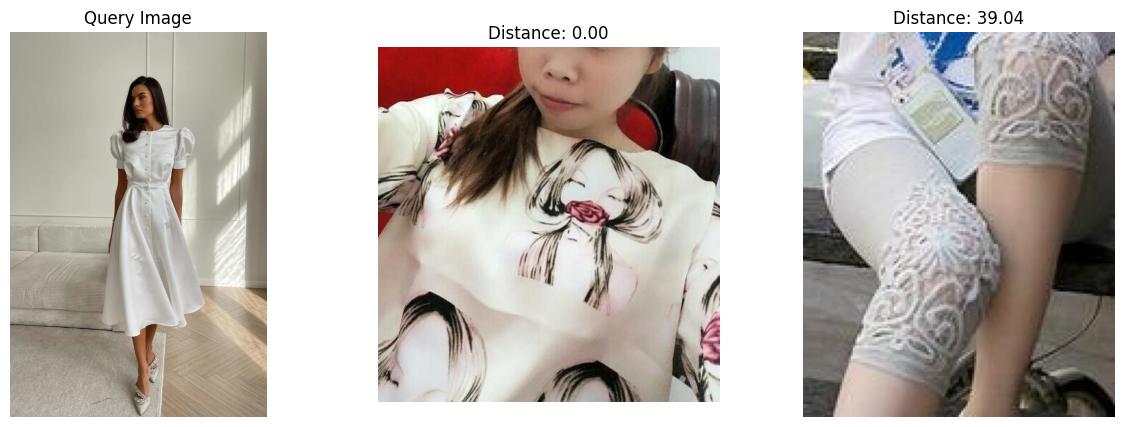

[('/content/drive/MyDrive/Colab/crops/002342_cls0_conf0.39_0.jpg',
  np.float32(0.0)),
 ('/content/drive/MyDrive/Colab/crops/028300_cls5_conf0.38_1.jpg',
  np.float32(39.03624))]

In [ ]:
new_image = '/content/drive/MyDrive/Colab/crops/test_dress.jpg'
search_similar(new_image, 2)